In [154]:
import pandas as pd

In [155]:
#raw = pd.read_csv("report_data_raw.csv")
raw = pd.read_csv("full_report_all_files.csv")

In [156]:
raw

filename                                        report_text
0    100.xml  \n\nRecord date: 2106-02-12\n\nCampbell Orthop...
1    101.xml  \n\nRecord date: 2079-05-12\n\n\n\n\n\nMERCY C...
2    102.xml  \n\nRecord date: 2120-09-19\n\nPersonal Data a...
3    103.xml  \n\nRecord date: 2067-11-24\n\n               ...
4    104.xml  \n\nRecord date: 2094-02-16\n\nJENNIFER BOOKER...
..       ...                                                ...
197  392.xml  \n\nRecord date: 2111-09-26\n\nCC:  Ear pain, ...
198  393.xml  \n\nRecord date: 2081-02-10\n\nGI Fellow Consu...
199  395.xml  \n\nRecord date: 2104-11-10\n\n               ...
200  397.xml  \n\nRecord date: 2076-06-19\n\nPhysical exam -...
201  398.xml  \n\nRecord date: 2105-12-15\n\nMr. Bryan comes...

[202 rows x 2 columns]

In [157]:
import spacy
nlp = spacy.load("en_core_web_md")

In [196]:
# Preprocess report text
import tqdm
import re

def split_in_sentences(text):
    doc = nlp(text)
    return [str(sent).strip() for sent in doc.sents if len(str(sent).strip())>0 ]

def remove_special_characters_except(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s.]' if not remove_digits else r'[^a-zA-Z\s.]'
    text = re.sub(pattern, '', text)
    return text

def clean_report_text(text):
    text = text.translate(text.maketrans("\n\t\r", "   "))
    text = remove_special_characters_except(text, remove_digits=True)
    return text

def remove_multiple_spaces(text):
    text = re.sub(' +', ' ', text)
    return text

def remove_multiple_dots(text):
    consequitivedots = re.compile(r'\.{2,}')
    text = consequitivedots.sub('', text).strip()
    return text

def report_to_sentences(text):
    text = clean_report_text(text)
    text = remove_multiple_dots(text)
    text = remove_multiple_spaces(text)
    return split_in_sentences(text)

#Can be used only for a dataset (collection) of text
def report_corpus_pre_processor(text_coll):
    norm_corpus = []
    for doc in tqdm.tqdm(text_coll):
        norm_corpus.extend(report_to_sentences(doc))
    return norm_corpus



In [197]:
sentence_data = report_corpus_pre_processor(raw.report_text)

100%|████████████████████████████████████████████████████████████████████████████████| 202/202 [00:21<00:00,  9.39it/s]


In [198]:
clean_report = pd.DataFrame({'report_text_sent':sentence_data})

In [199]:
len(sentence_data)

9903

In [200]:
sentence_data

['Record date Campbell Orthopedic Associates Madera Circle Omak GA Habib Valenzuela M.D. Valdez Harlan Jr.',
 'February Har is a year old pound gentleman who is referred for consultation by Dr. Harlan Oneil.',
 'About a week ago he slipped on the driveway at home and sustained an injury to his left ankle.',
 'He was seen at TriCity Hospital and was told he had a fracture.',
 'He was placed in an air splint and advised to be partial weight bearing and he is using a cane.',
 'He is here for routine followup.',
 'Past medical history is notable for no ankle injuries previously.',
 'He has a history of diabetes and sleep apnea.',
 'He takes Prozac Cardizem Glucophage and Amaryl.',
 'He is also followed by Dr. Harold Nutter for an arrhythmia.',
 'He does not smoke.',
 'He drinks minimally.',
 'He is a set designer at Columbia Pictures.',
 'On examination today he has slight tenderness of the left ankle about four fingerbreadths above the malleolus.',
 'The malleolus is nontender medially or

## EDA sentences

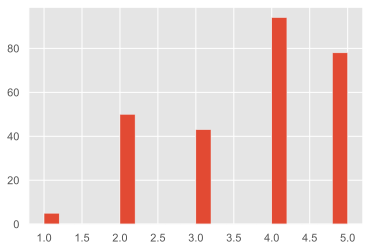

In [201]:
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


#Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([len(s) for s in clean_report['report_text_sent'] if(len(s) <= 5)], bins=20)
plt.show()

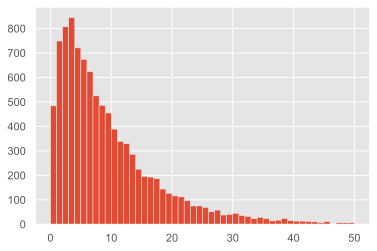

In [202]:
#sent.count(' ')

#Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([s.count(' ') for s in clean_report['report_text_sent'] if(s.count(' ') <= 50)], bins=50)
plt.show()

In [203]:
#Lets find out the longest sentence length in the dataset
maxlen = max([len(s) for s in clean_report['report_text_sent']])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 1255


In [204]:
#Lets find out the shortest sentence length in the dataset
minlen = min([len(s) for s in clean_report['report_text_sent']])
print ('Minimum sentence length:', minlen)

Minimum sentence length: 1


In [214]:
lst = [sent for sent in clean_report['report_text_sent'] if(len(sent)) <= 3]
print(lst)
print(len(lst))

['g.a', 'HTN', 'q.d', 'BUN', 'PVD', 'Hct', 'p.o', 'Abd', 'BP', 'BPH', 'Wt', 'q.h', 'lbs', 'hct', 'q.d', 'q.d', 'q.d', 'Wt', 'SIG', 'fu', 'p.o', 'p.o', 'q.d', 'p.o', 'q.d', 'p.o', 'p.o', 'INF', 'IVS', 'REL', 'AC', 'q.d', 'HCT', 'PTT', 'BMI', 'CAD', 'PAD', 'p.o', 'QRS', 'QT', 'q.d', 'q.d', 'Wt', 'to', 'QRS', 'QT', 'VS', 'CK', 'M.D', 'MG', 'WBC', 'PTT', 'HTN', 'CAD', 'Cor', 'CAD', 'DP', 'PT', 'M.D', 'q.d', 'q.d', 'q.d', 'W.', 'CAD', 'Hgb', 'PTT', 'DJD', 'BPH', 'q.d', 'Glu', 'WBC', 'Hgb', 'q.d', 'PMH', 'HGB', 'PT', 'HMG', 'TP', 'Wt', 'q.d', 'Mg', 'FEV', 'On', 'q.d', 'FBS', 'M.D', 'lbs', 'Pos', 'PVC', 'in', 'and', 'q.d', 'AP', 'HGB', 'AOx']
95


In [206]:
[sent for sent in clean_report['report_text_sent'] if(sent.count(' ')) < 1]

['Hyperlipidemia.',
 'g.a.',
 'hx.',
 'MEDICATIONS',
 'MEDICATIONS',
 'ALLERGIES',
 'DOB',
 'q.d.',
 'RACHEL',
 'CARR',
 'HTN',
 'COMPLAINT',
 'ALLERGIES',
 'NECK',
 'COMPLAINT',
 'MEDICATIONS',
 'THERAPY',
 'RENDEREDCOURSE',
 'DATE',
 'COMPLAINT',
 'LUNGS',
 'Widowed.',
 'COMPLAINT',
 'LUNGS',
 'ABDOMEN',
 'Lipitor',
 'mg',
 'b.i.d.',
 'Extremities',
 'Assessment',
 'OMOvaught',
 'HEENT',
 'UASRBC',
 'QD',
 'LUNGS',
 'ALLERGIES',
 'MEDICATIONS',
 'mg',
 'HPI',
 'Hypertension.',
 'Hypercholesterolemia.',
 'Nonsmoker.',
 'PhosLo',
 'Widow.',
 'H',
 'HEENT',
 'Depression.',
 'p.o.',
 'daily.',
 'MEDICATIONS',
 'ALLERGIES',
 'Hypertension.',
 'Costochondritis.',
 'Obesity.',
 'MEDICATIONS',
 'Skin',
 'q.h.s.',
 'PERRLA.',
 'COMPLAINT',
 'THERAPY',
 'RENDEREDCOURSE',
 'Anusperin.',
 'DISPOSITION',
 'Extremities',
 'Attending',
 'Hypertension.',
 'Hyperlipidemia.',
 'b.i.d.',
 'daily.',
 'daily.',
 'COMPLAINT',
 'MEDICATIONS',
 'ALLERGIES',
 'b.i.d.',
 'MALEATE',
 'Diabetes.',
 'Dysuria.',


In [207]:
clean_report.loc[(clean_report['report_text_sent'].str.len() <= 3)]

report_text_sent
92                hx.
263               DOB
385               HTN
628                mg
923                QD
...               ...
9443               qd
9498                .
9600               cc
9892               p.
9893               rr

[98 rows x 1 columns]

In [208]:
lst = [sent for sent in clean_report['report_text_sent'] if(len(sent)) <= 4]
print(lst)
print(len(lst))

['g.a.', 'hx.', 'DOB', 'q.d.', 'CARR', 'HTN', 'NECK', 'DATE', 'mg', 'QD', 'mg', 'HPI', 'H', 'p.o.', 'Skin', 'x .', 'EXAM', 'Abd.', 'BP .', 'BPH.', 'Wt .', 'O', 'afeb', 'q.h.', 'lbs.', 'qd', 'mg', 'mcg', 'qd', 'qd', 'q.d.', 'q.d.', 'q.d.', 'or', 'PS', 'qd', 'GU', 'Ht.', 'Wt .', 'and', 'qd', 'CATH', 'AND', 'SIG.', 'fu .', 'mg.', 'p.o.', 'p.o.', 'q.d.', 'p.o.', 'q.d.', 'p.o.', 'p.o.', 'TV.', 'RA.', 'VC.', 'PV.', 'INF.', 'PA.', 'IVS.', 'qd', 'REL.', 'AC .', 'q.d.', 'mg.', 'H', '.H', '.L', 'and', 'HCL', '.', 'CAD.', 'PAD.', 'mg', 'qd', 'mg', 'mg', 'mg', 'qd', 'qd', 'mg', 'Skin', 'p.o.', 'QT .', 'mg', 'q.d.', 'q.d.', 'rpm', 'Wt .', 'No', 'rg.', 'Hg.', 'to .', 'mg', 'QT .', 'NECK', 'Ext', 'VS .', 'mmm', 'EOMI', 'CK .', 'M.D.', 'DATE', 'MG .', 'Skin', 'qd', 'mg', 'qd', 'CAD.', 'Cor.', 'CAD.', 'DP .', 'PT .', 'M.D.', 'SR', 'CNIS', 'q.d.', 'q.d.', 'q.d.', 'W. .', 'CAD.', 'Endo', 'mg', 'mg', 'mg', 'REST', 'ECG', 'mg', 'mg', 'qd', 'WDWN', 'sec', 'DJD.', 'BPH.', 'mg', 'q.d.', 'ho', 'q.d.', 'Wt.', '

## Remove leading and trailing spaces from sentences. This will not remove internal spaces. 

In [209]:
clean_report['report_text_sent'] = clean_report['report_text_sent'].apply(lambda x: x.strip())

## Drop sentences with length less than 3

In [211]:
clean_report.drop(clean_report.loc[(clean_report['report_text_sent'].str.len() <= 3)].index, inplace = True)

In [212]:
clean_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9902
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   report_text_sent  9805 non-null   object
dtypes: object(1)
memory usage: 153.2+ KB


## Remove leading and trailing dots from sentences. This will not remove internal dots.¶

In [213]:
clean_report['report_text_sent'] = clean_report['report_text_sent'].apply(lambda x: x.strip('.').strip())

In [215]:
clean_report.to_csv("clean_report_text_sent_April.csv")

In [216]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_md")

In [217]:
reports = pd.read_csv("clean_report_text_sent_April.csv")

In [218]:
reports.head()

Unnamed: 0                                   report_text_sent
0           0  Record date Campbell Orthopedic Associates Mad...
1           1  February Har is a year old pound gentleman who...
2           2  About a week ago he slipped on the driveway at...
3           3  He was seen at TriCity Hospital and was told h...
4           4  He was placed in an air splint and advised to ...

In [220]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9805 entries, 0 to 9804
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9805 non-null   int64 
 1   report_text_sent  9805 non-null   object
dtypes: int64(1), object(1)
memory usage: 153.3+ KB


In [59]:
#reports['report_text_sent'] = reports['report_text_sent'].fillna('')

In [221]:
rpt_sentences = reports['report_text_sent']

In [224]:
import mysql.connector as mysqlCon
import mysql.connector

import pickle as pkl


def get_connection():
    conn = connect_umls('aasha', '24H=1day', 'localhost', 'umls')
    return conn


def connect_umls(uname, password, host, database):
    connection = mysqlCon.connect(user=uname, password=password,
                                  host=host, database=database)
    return connection


def close_connection(connection):
    connection.close()


def get_entity(string):
    """ get definitions/descriptions for the given string """
    try:
        # Get descritpions
        sql_select_Query = "select * from mrconso where STR like '" + string + "';"
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute(sql_select_Query)
        # get all records
        return cursor.fetchone()
    except mysql.connector.Error as e:
        print(e.msg)
        return ""
    finally:
        close_connection(conn)


def symantic_type_lookup(string):
    """ get definitions/descriptions for the given string """
    """ Get Semantic Typ for a given string """
    try:
        # Get descritpions
        # sql_select_Query = "select * from mrconso where STR like '" + string + "';"
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute("SELECT sty FROM MRCONSO a, MRSTY b WHERE a.cui = b.cui AND str = %s; ", (string,))
        # get all records
        next_user = cursor.fetchone()
        if next_user is not None:
            user_blah = next_user[0]
        else:
            user_blah = ''
        return user_blah
    except mysql.connector.Error as e:
        print(e.msg)
        return ""
    finally:
        close_connection(conn)


def is_symantic_type_found(string):
    """ find whether any semantic type available for the given string """
    """ return True if semantic type is available otherwise return False """
    try:
        sem_type_list = symantic_type_lookup(string)
        if not sem_type_list:
            return False
        else:
            return True
    except Exception as e:
        print(e)
        return False


def cui_lookup(string):
    """ get definitions/descriptions for the given string """
    """ Get Semantic Typ for a given string """
    try:
        # Get descritpions
        # sql_select_Query = "select * from mrconso where STR like '" + string + "';"
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute("SELECT cui FROM MRCONSO WHERE str = %s;", (string,))
        #row = cursor.fetchone()
        next_user = cursor.fetchone()
        if next_user is not None:
            user_blah = next_user[0]
        else:
            user_blah = ''
        return user_blah
    except mysql.connector.Error as e:
        print(e.msg)
        return ""
    finally:
        close_connection(conn)


def is_cui_found(string):
    """ find whether any semantic type available for the given string """
    """ return True if semantic type is available otherwise return False """
    try:
        sem_type_list = cui_lookup(string)
        if not sem_type_list:
            return False
        else:
            return True
    except Exception as e:
        print(e)
        return False


In [225]:
def get_parent_token(doc, token_text):
    for chunk in doc.noun_chunks:
        if str(chunk).find(token_text) != -1:
            return chunk.root.head
        

def get_features_sentence(sentence, i):
    #G1 = pd.DataFrame(columns = ['word', 'prev_word', 'next_word', 'word_length', 'prev_2_words', 'next_2_words',
    #                            'word_POS_tag','prev_POS_tag', 'next_POS_tag', 'lemmatized', 'parent',
    #                             'bigram', 'trigram', 'reverse_bigram'])
    
    features = []
    
    doc = nlp(sentence)
    doc_len = len(doc) - 1
    
    for token in doc:
        current_word = token.text.lower()
        
        word_length = len(current_word)
        BOS = False
        EOS = False
        
        if(word_length == 0):
            continue;
        
        token_index = token.i
        
        if(token_index == 0):
            BOS = True
            
        if(token_index == doc_len):
            EOS = True
        
        if(token_index == 0):
            prev_word = "*"
        else:
            prev_token = doc[token_index - 1]
            prev_word = prev_token.text
        
        
        if(token_index < doc_len):
            next_token = doc[token_index + 1]
            next_word = next_token.text
        else:
            next_word = "*"
        
        if(token_index > 1):
            prev_2_words = doc[token_index - 2].text + ' ' + doc[token_index - 1].text
        elif (token_index == 1):
            prev_2_words = doc[token_index - 1].text 
        else:
            prev_2_words = "*"
        
        if(token_index < (doc_len - 2)):
            next_2_words = doc[token_index + 1].text + ' ' + doc[token_index + 2].text
        elif(token_index == (doc_len - 1)):
            next_2_words = doc[token_index + 1].text 
        else:
            next_2_words = "*"
            
        word_POS_tag = token.pos_
        
        if(token_index == 0):
            prev_POS_tag = ''
        else:
            prev_POS_tag = prev_token.pos_
            
        if(token_index < doc_len):
            next_POS_tag = next_token.pos_
        else:
            next_POS_tag = ''
        
        lemma = token.lemma_
        
        parent = get_parent_token(doc, current_word)
        if(type(parent) == type(None)):
            parent_text = ''
        else:
            parent_text = parent.text
        #Parent node's chunk is not very accurate. So may be excluded when using it in learning CRF
        
        bigram = current_word + ' ' + next_word
        trigram = prev_word + ' ' + current_word + ' ' + next_word
        reverse_bigram = prev_word + ' ' + current_word
        
               
        ## UMLS Features to Dict
        sty_word = symantic_type_lookup(current_word)
        sty_prev_word = symantic_type_lookup(prev_word)
        sty_next_word = symantic_type_lookup(next_word)
        match_bigram = is_cui_found(bigram)
        match_trigram = is_cui_found(trigram)
        match_reverse_bigram = is_cui_found(reverse_bigram)
        CIU_word = cui_lookup(current_word)
        
        feat_dict = {'sent':i,'word':current_word, 'prev_word':prev_word, 'next_word':next_word,
                     'word_length':word_length, 'prev_2_words':prev_2_words, 'next_2_words':next_2_words,
                     'word_POS_tag':word_POS_tag,'prev_POS_tag':prev_POS_tag, 'next_POS_tag':next_POS_tag, 
                     'lemmatized':lemma, 'parent':parent_text, 'bigram':bigram, 'trigram':trigram,
                     'reverse_bigram':reverse_bigram, 'BOS': BOS, 'EOS': EOS,
                     'sty_word': sty_word, 'sty_prev_word': sty_prev_word, 'sty_next_word': sty_next_word,
                     'match_bigram': match_bigram, 'match_trigram': match_trigram, 'match_reverse_bigram': match_reverse_bigram,
                     'CIU_word': CIU_word}
        
        features.append(feat_dict)
    return features

def get_features_corpus(report_sentences):
    corpus = []
    for i, each_sentence in enumerate(tqdm.tqdm(report_sentences)):
        print(each_sentence, ' - ', i)
        corpus.append(get_features_sentence(each_sentence, i))
    return corpus


In [203]:
rpt_sentences_1000 = rpt_sentences[:999]

In [100]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9904 entries, 0 to 10018
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9904 non-null   int64 
 1   report_text_sent  9904 non-null   object
dtypes: int64(1), object(1)
memory usage: 232.1+ KB


In [92]:
reports['report_text_sent']

0        Record date Campbell Orthopedic Associates Mad...
1        February Har is a year old pound gentleman who...
2        About a week ago he slipped on the driveway at...
3        He was seen at TriCity Hospital and was told h...
4        He was placed in an air splint and advised to ...
                               ...                        
10014     PROBLEMS Hypertension increase captopril to bid.
10015    SP total hip replacement Shoemaker stable Diab...
10016                                    loss check hgbAC.
10017                       Eye exam OK earlier this year.
10018    Basal cell carcinoma no new ones visible Varic...
Name: report_text_sent, Length: 10019, dtype: object

In [226]:
features = get_features_corpus(rpt_sentences)

  0%|                                                                                         | 0/9805 [00:00<?, ?it/s]

Record date Campbell Orthopedic Associates Madera Circle Omak GA Habib Valenzuela M.D. Valdez Harlan Jr  -  0


  0%|                                                                              | 1/9805 [00:06<16:51:48,  6.19s/it]

February Har is a year old pound gentleman who is referred for consultation by Dr. Harlan Oneil  -  1


  0%|                                                                              | 2/9805 [00:13<17:29:27,  6.42s/it]

About a week ago he slipped on the driveway at home and sustained an injury to his left ankle  -  2


  0%|                                                                              | 3/9805 [00:21<18:42:41,  6.87s/it]

He was seen at TriCity Hospital and was told he had a fracture  -  3


  0%|                                                                              | 4/9805 [00:26<17:20:46,  6.37s/it]

He was placed in an air splint and advised to be partial weight bearing and he is using a cane  -  4


  0%|                                                                              | 5/9805 [00:34<19:05:20,  7.01s/it]

He is here for routine followup  -  5


  0%|                                                                              | 6/9805 [00:37<15:20:56,  5.64s/it]

Past medical history is notable for no ankle injuries previously  -  6


  0%|                                                                              | 7/9805 [00:41<14:10:11,  5.21s/it]

He has a history of diabetes and sleep apnea  -  7


  0%|                                                                              | 8/9805 [00:45<13:05:54,  4.81s/it]

He takes Prozac Cardizem Glucophage and Amaryl  -  8


  0%|                                                                              | 9/9805 [00:48<11:32:44,  4.24s/it]

He is also followed by Dr. Harold Nutter for an arrhythmia  -  9


  0%|                                                                             | 10/9805 [00:52<11:32:01,  4.24s/it]

He does not smoke  -  10


  0%|                                                                              | 11/9805 [00:53<9:08:55,  3.36s/it]

He drinks minimally  -  11


  0%|                                                                              | 12/9805 [00:54<7:14:40,  2.66s/it]

He is a set designer at Columbia Pictures  -  12


  0%|                                                                              | 13/9805 [00:57<7:29:46,  2.76s/it]

On examination today he has slight tenderness of the left ankle about four fingerbreadths above the malleolus  -  13


  0%|                                                                             | 14/9805 [01:03<10:13:41,  3.76s/it]

The malleolus is nontender medially or laterally with no ligamentous tenderness either  -  14


  0%|                                                                             | 15/9805 [01:08<10:31:58,  3.87s/it]

Dorsal flexion and plantar flexion is without pain  -  15


  0%|▏                                                                             | 16/9805 [01:10<9:45:28,  3.59s/it]

There is no significant swelling  -  16


  0%|▏                                                                             | 17/9805 [01:12<8:23:31,  3.09s/it]

There are no some skin changes with some small abrasions proximally  -  17


  0%|▏                                                                             | 18/9805 [01:16<9:06:32,  3.35s/it]

There is no fibular tenderness proximally  -  18


  0%|▏                                                                             | 19/9805 [01:19<8:10:09,  3.01s/it]

No anterior pain is noted  -  19


  0%|▏                                                                             | 20/9805 [01:20<7:04:57,  2.61s/it]

No hindfoot midfoot or forefoot tenderness is noted  -  20


  0%|▏                                                                             | 21/9805 [01:23<7:18:15,  2.69s/it]

I would like him to use a tube sock with his air cast  -  21


  0%|▏                                                                             | 22/9805 [01:28<8:55:55,  3.29s/it]

He is using a cane for ambulation  -  22


  0%|▏                                                                             | 23/9805 [01:30<8:17:53,  3.05s/it]

His xrays do not show a notable fracture pattern today and we will await the Radiology opinion  -  23


  0%|▏                                                                            | 24/9805 [01:36<10:52:37,  4.00s/it]

I would like him to stay in the air splint with the sock  -  24


  0%|▏                                                                            | 25/9805 [01:41<11:25:45,  4.21s/it]

I will see him back in six weeks for review at the Boxborough office  -  25


  0%|▏                                                                            | 26/9805 [01:46<12:00:50,  4.42s/it]

Diagnosis Left ankle fracture  -  26


  0%|▏                                                                             | 27/9805 [01:48<9:34:37,  3.53s/it]

Habib Valenzuela M.D  -  27


  0%|▏                                                                             | 28/9805 [01:49<7:36:34,  2.80s/it]

HVkuntz Mmedical cc Harlan Oneil M.D  -  28


  0%|▏                                                                             | 29/9805 [01:51<7:03:33,  2.60s/it]

Harold Nutter M.D. Doctors Hospital North Bruce St Omak GA Habib Valenzuela M.D. DD DT DV Not reviewed by Attending Physician  -  29


  0%|▏                                                                            | 30/9805 [01:58<11:04:22,  4.08s/it]

Record date MERCY CARE CENTER Mercy Internal Medicine Associates Newburgh Street Terrell AR Russell Donna Ms. Russell comes in for further evaluation  -  30


  0%|▏                                                                            | 31/9805 [02:06<13:58:18,  5.15s/it]

She has been in Rhode Island for six months  -  31


  0%|▎                                                                            | 32/9805 [02:09<12:17:20,  4.53s/it]

Her complaint is that she has heaviness in the chest  -  32


  0%|▎                                                                            | 33/9805 [02:13<11:33:42,  4.26s/it]

She does not have any palpitations  -  33


  0%|▎                                                                             | 34/9805 [02:15<9:54:46,  3.65s/it]

She does not note that this is associated with exertion  -  34


  0%|▎                                                                             | 35/9805 [02:18<9:47:11,  3.61s/it]

She does have diaphoresis associated with it  -  35


  0%|▎                                                                             | 36/9805 [02:21<8:43:18,  3.21s/it]

She does not have any shortness of breath  -  36


  0%|▎                                                                             | 37/9805 [02:24<8:28:04,  3.12s/it]

This heaviness has been in her chest on and off for the last six weeks  -  37


  0%|▎                                                                            | 38/9805 [02:29<10:26:47,  3.85s/it]

She is quite concerned  -  38


  0%|▎                                                                             | 39/9805 [02:31<8:27:26,  3.12s/it]

She has a history of hypothyroidism and hypertension  -  39


  0%|▎                                                                             | 40/9805 [02:34<8:21:18,  3.08s/it]

She also has hyperlipidemia and is being treated with Lipitor  -  40


  0%|▎                                                                             | 41/9805 [02:37<8:48:01,  3.24s/it]

Her health maintenance has been in order  -  41


  0%|▎                                                                             | 42/9805 [02:40<8:17:32,  3.06s/it]

She has just had a hysterectomy  -  42


  0%|▎                                                                             | 43/9805 [02:42<7:35:15,  2.80s/it]

She needs to have a followup mammogram done  -  43


  0%|▎                                                                             | 44/9805 [02:45<7:34:16,  2.79s/it]

However today I am most concerned about her chest heaviness  -  44


  0%|▎                                                                             | 45/9805 [02:49<8:20:36,  3.08s/it]

PHYSICAL EXAMINATION  -  45


  0%|▎                                                                             | 46/9805 [02:49<6:30:15,  2.40s/it]

Her blood pressure is respiratory rate is and pulse is  -  46


  0%|▎                                                                             | 47/9805 [02:53<7:25:54,  2.74s/it]

Neck is supple  -  47


  0%|▍                                                                             | 48/9805 [02:54<6:06:34,  2.25s/it]

There is no lymphadenopathy  -  48


  0%|▍                                                                             | 49/9805 [02:55<5:22:59,  1.99s/it]

Chest is clear to both percussion and auscultation  -  49


  1%|▍                                                                             | 50/9805 [02:58<6:07:46,  2.26s/it]

Cardiac exam is regularly regular with no murmurs gallops or rubs  -  50


  1%|▍                                                                             | 51/9805 [03:02<7:36:59,  2.81s/it]

Abdomen is soft and nontender  -  51


  1%|▍                                                                             | 52/9805 [03:04<6:52:54,  2.54s/it]

There is no hepatosplenomegaly  -  52


  1%|▍                                                                             | 53/9805 [03:06<5:58:25,  2.21s/it]

Extremities are clear of cyanosis clubbing and edema  -  53


  1%|▍                                                                             | 54/9805 [03:09<6:39:21,  2.46s/it]

LABORATORY DATA  -  54


  1%|▍                                                                             | 55/9805 [03:09<5:16:40,  1.95s/it]

Her sodium is electrolytes are all otherwise within normal limits  -  55


  1%|▍                                                                             | 56/9805 [03:13<6:52:14,  2.54s/it]

TSH is LFTs are pending at this time  -  56


  1%|▍                                                                             | 57/9805 [03:16<7:12:48,  2.66s/it]

We sent her for an electrocardiogram which showed normal sinus rhythm with nonspecific STT wave changes  -  57


  1%|▍                                                                             | 58/9805 [03:22<9:53:31,  3.65s/it]

We also sent her for an exercise tolerance test with preliminary reports showing that she went to a maximum heart rate of she was on the protocol for minutes seconds  -  58


  1%|▍                                                                            | 59/9805 [03:33<15:43:55,  5.81s/it]

She had no evidence of ischemia  -  59


  1%|▍                                                                            | 60/9805 [03:35<12:53:18,  4.76s/it]

ASSESSMENT AND PLAN  -  60


  1%|▍                                                                             | 61/9805 [03:37<9:57:12,  3.68s/it]

Chest heaviness  -  61


  1%|▍                                                                             | 62/9805 [03:37<7:29:52,  2.77s/it]

I am not sure what is causing this  -  62


  1%|▌                                                                             | 63/9805 [03:40<7:40:38,  2.84s/it]

She may have a primary pulmonary problem  -  63


  1%|▌                                                                             | 64/9805 [03:43<7:28:20,  2.76s/it]

She will be following up with us in one week  -  64


  1%|▌                                                                             | 65/9805 [03:47<8:13:16,  3.04s/it]

It is heartening to see that she does not have an abnormal exercise tolerance test.  -  65


  1%|▌                                                                            | 66/9805 [03:52<10:28:31,  3.87s/it]

Hypothyroidism well controlled at the present time  -  66


  1%|▌                                                                             | 67/9805 [03:55<9:16:59,  3.43s/it]

Continue same dose of Synthroid.  -  67


  1%|▌                                                                             | 68/9805 [03:57<8:12:45,  3.04s/it]

Hypertension well controlled presently.  -  68


  1%|▌                                                                             | 69/9805 [03:59<7:09:31,  2.65s/it]

Hyperlipidemia  -  69


  1%|▌                                                                             | 70/9805 [03:59<5:19:25,  1.97s/it]

We will recheck this on her next visit  -  70


  1%|▌                                                                             | 71/9805 [04:02<6:02:59,  2.24s/it]

RE Russell Donna MRN  -  71


  1%|▌                                                                             | 72/9805 [04:03<5:18:18,  1.96s/it]

May Page We will also need to schedule a followup mammogram  -  72


  1%|▌                                                                             | 73/9805 [04:07<6:49:21,  2.52s/it]

Quinn Rutledge M.D. QRQR .doc  -  73


  1%|▌                                                                             | 74/9805 [04:09<6:06:31,  2.26s/it]

DD DT DV  -  74


  1%|▌                                                                             | 75/9805 [04:10<5:14:22,  1.94s/it]

Record date Personal Data and Overall Health Patient is a yr  -  75


  1%|▌                                                                             | 76/9805 [04:14<6:59:06,  2.58s/it]

old male who presents to Dr. Yager for multiple tooth extractions on  -  76


  1%|▌                                                                             | 77/9805 [04:18<8:28:53,  3.14s/it]

History of Present Illness  -  77


  1%|▌                                                                             | 78/9805 [04:20<7:14:22,  2.68s/it]

The patient complains of a hx. of tooth abscesses  -  78


  1%|▋                                                                             | 79/9805 [04:23<7:55:03,  2.93s/it]

Past Surgical History Prior surgery includes  -  79


  1%|▋                                                                             | 80/9805 [04:26<7:12:34,  2.67s/it]

excision l. neck mass for post l. neck lipoma under local no complications  -  80


  1%|▋                                                                             | 81/9805 [04:30<8:46:20,  3.25s/it]

bowel surgery yrs ago  -  81


  1%|▋                                                                             | 82/9805 [04:32<7:27:25,  2.76s/it]

g.a  -  82


  1%|▋                                                                             | 83/9805 [04:32<5:31:10,  2.04s/it]

no complications  -  83


  1%|▋                                                                             | 84/9805 [04:33<4:22:25,  1.62s/it]

hernia repair yrs ago GA  -  84


  1%|▋                                                                             | 85/9805 [04:35<4:29:09,  1.66s/it]

no complications  -  85


  1%|▋                                                                             | 86/9805 [04:35<3:43:10,  1.38s/it]

appendectomy yrs ago GA no complications  -  86


  1%|▋                                                                             | 87/9805 [04:37<4:17:47,  1.59s/it]

hemorroids per patient done under spinal had severe post spinal headache  -  87


  1%|▋                                                                             | 88/9805 [04:41<6:11:33,  2.29s/it]

Family History There in no family history of adverse reactions to general anesthesia  -  88


  1%|▋                                                                             | 89/9805 [04:46<8:11:41,  3.04s/it]

Past Medical History Current medical problems include  -  89


  1%|▋                                                                             | 90/9805 [04:49<7:44:50,  2.87s/it]

HTN  -  90


  1%|▋                                                                             | 91/9805 [04:49<5:44:17,  2.13s/it]

DMxyrs per patient glucose levels run range  -  91


  1%|▋                                                                             | 92/9805 [04:51<6:03:16,  2.24s/it]

of tooth abscesses  -  92


  1%|▋                                                                             | 93/9805 [04:52<5:04:41,  1.88s/it]

hypercholesterolemia Social History  -  93


  1%|▋                                                                             | 94/9805 [04:54<4:25:16,  1.64s/it]

Smoking no Alcohol use no history of excessive use Substance abuse none Review of Systems Medications insulin RN in am R in evening hctzmg  -  94


  1%|▋                                                                            | 95/9805 [05:03<10:23:19,  3.85s/it]

qd captopril mg xday  -  95


  1%|▊                                                                             | 96/9805 [05:04<8:33:31,  3.17s/it]

lipitor mgqd zyrtec prn ecasa  -  96


  1%|▊                                                                             | 97/9805 [05:06<7:22:49,  2.74s/it]

vit e Allergies shellfish Cardiovascular history of hypertension no MI denies CP DOE syncope ankle edema Respiratory no history of asthma or chronic lung disease denies unusual shortness of breath Neurological no history of neurological problems Gastrointestinal no history of PUD denies reflux Hepatobiliary no history of liver disease denies jaundice or hepatitis RenalGenitourinary no history of renal failure denies hematuria dysuria obstructive uropathy Musculoskeletal denies pain or limitation of movement Endocrinemetabolic history of diabetes last yrs hypercholesterolemia HemeOnc no history of bleeding blood diseases no history of malignancy chemotherapy or radiation therapy  -  97


  1%|▊                                                                            | 98/9805 [05:42<34:22:10, 12.75s/it]

Psychiatric no significant psychiatric problems Exam SaO RA Ht Wt BP P HEENT good range of motion no masses neck veins flat no bruits Airway Mallampatti Class I or II Teeth in good repair Lungs clear bilaterally Heart regular rhythm no murmurs SS  -  98


  1%|▊                                                                            | 99/9805 [05:58<36:52:47, 13.68s/it]

no gallop Assessment ASA Physical Status II Well prepared for surgery no unusual concerns related to medical problems  -  99


  1%|▊                                                                           | 100/9805 [06:05<31:17:05, 11.60s/it]

Plan Proposed Anesthetic general anesthesia Monitors standard Pain Management IVPCA Autologous blood none Premedication none Usual Medications take on day of surgery Medications to be held on day of surgery lipitor  -  100


  1%|▊                                                                           | 101/9805 [06:16<31:19:40, 11.62s/it]

Diabetic medications counseled to old am insulin regimen NSAIDS avoid for days before surgery Aspirin avoid for days before surgery NPO after midnight External Labs Not available  -  101


  1%|▊                                                                           | 102/9805 [06:26<29:48:31, 11.06s/it]

Attending Anesthesiologist Reassessment Note I have reviewed this preanesthetic assessment and concur with the assessment and recommended plan with the following exceptions  -  102


  1%|▊                                                                           | 103/9805 [06:34<27:24:04, 10.17s/it]

Yeomans Vertis K. M.D  -  103


  1%|▊                                                                           | 104/9805 [06:35<20:18:08,  7.53s/it]

Record date HUNTINGTON EMERGENCY DEPT VISIT THOMASYOSEFJULIA VISIT DATE  -  104


  1%|▊                                                                           | 105/9805 [06:39<16:49:24,  6.24s/it]

This patient was seen with Dr. Earley  -  105


  1%|▊                                                                           | 106/9805 [06:41<13:51:42,  5.15s/it]

The patient was interviewed and examined by me  -  106


  1%|▊                                                                           | 107/9805 [06:44<11:58:09,  4.44s/it]

Residents note reviewed and confirmed  -  107


  1%|▊                                                                            | 108/9805 [06:46<9:40:39,  3.59s/it]

The plan of care was discussed with the patient  -  108


  1%|▊                                                                            | 109/9805 [06:49<9:23:39,  3.49s/it]

Please see chart for details  -  109


  1%|▊                                                                            | 110/9805 [06:51<8:04:13,  3.00s/it]

HISTORY OF PRESENTING COMPLAINT  -  110


  1%|▊                                                                            | 111/9805 [06:52<6:51:36,  2.55s/it]

Briefly this is a yearold woman with a history of asthma and noninsulindependent diabetes mellitus who has had three weeks of progressive substernal chest pain radiating to the back with associated nausea vomiting shortness of breath and diaphoresis  -  111


  1%|▊                                                                           | 112/9805 [07:07<16:21:53,  6.08s/it]

The episodes of pain last minutes with exertion and at rest  -  112


  1%|▉                                                                           | 113/9805 [07:11<14:42:03,  5.46s/it]

PAST MEDICAL HISTORY Asthma hypothyroidism and recently diagnosed diabetes mellitus  -  113


  1%|▉                                                                           | 114/9805 [07:14<13:24:35,  4.98s/it]

MEDICATIONS  -  114


  1%|▉                                                                            | 115/9805 [07:15<9:42:20,  3.61s/it]

Levoxyl Albuterol Protonix Tums Flovent  -  115


  1%|▉                                                                            | 116/9805 [07:17<8:17:16,  3.08s/it]

SOCIAL HISTORY AND FAMILY HISTORY Remote history of smoking  -  116


  1%|▉                                                                            | 117/9805 [07:20<8:38:06,  3.21s/it]

Family history Coronary artery disease in father  -  117


  1%|▉                                                                            | 118/9805 [07:23<8:10:36,  3.04s/it]

PHYSICAL EXAMINATION GENERAL APPEARANCE  -  118


  1%|▉                                                                            | 119/9805 [07:24<7:00:03,  2.60s/it]

No acute distress painfree  -  119


  1%|▉                                                                            | 120/9805 [07:26<6:03:03,  2.25s/it]

VITAL SIGNS Afebrile  -  120


  1%|▉                                                                            | 121/9805 [07:27<5:09:08,  1.92s/it]

Pulse  -  121


  1%|▉                                                                            | 122/9805 [07:27<3:54:03,  1.45s/it]

Respirations  -  122


  1%|▉                                                                            | 123/9805 [07:28<2:59:22,  1.11s/it]

Blood pressure  -  123


  1%|▉                                                                            | 124/9805 [07:29<2:44:28,  1.02s/it]

Pulse oximetry is on room air  -  124


  1%|▉                                                                            | 125/9805 [07:31<3:37:31,  1.35s/it]

CARDIAC Regular rate and rhythm  -  125


  1%|▉                                                                            | 126/9805 [07:32<3:56:05,  1.46s/it]

Normal S and S  -  126


  1%|▉                                                                            | 127/9805 [07:34<3:51:43,  1.44s/it]

No murmurs gallops or rubs  -  127


  1%|█                                                                            | 128/9805 [07:35<4:04:18,  1.51s/it]

NECK JVP cm  -  128


  1%|█                                                                            | 129/9805 [07:36<3:40:38,  1.37s/it]

LUNGS Clear  -  129


  1%|█                                                                            | 130/9805 [07:37<3:10:57,  1.18s/it]

Breathing is unlabored  -  130


  1%|█                                                                            | 131/9805 [07:38<3:08:43,  1.17s/it]

ABDOMEN Soft nontender and nondistended with active bowel sounds  -  131


  1%|█                                                                            | 132/9805 [07:42<4:49:46,  1.80s/it]

EXTREMITIES No clubbing cyanosis or edema  -  132


  1%|█                                                                            | 133/9805 [07:44<5:09:58,  1.92s/it]

LABORATORY EVALUATION  -  133


  1%|█                                                                            | 134/9805 [07:45<4:09:46,  1.55s/it]

The EKG shows a normal sinus rhythm with lateral Twave inversions and question of old septal myocardial infarction  -  134


  1%|█                                                                            | 135/9805 [07:51<8:04:10,  3.00s/it]

Chest xray shows no acute cardiopulmonary disease  -  135


  1%|█                                                                            | 136/9805 [07:53<7:42:01,  2.87s/it]

FINAL DIAGNOSIS Chest pain multiple cardiac risk factors abnormal electrocardiogram currently painfree without evidence of congestive heart failure  -  136


  1%|█                                                                           | 137/9805 [08:00<10:47:24,  4.02s/it]

DISPOSITION including condition upon discharge The plan is aspirin Lopressor and admission to telemetry  -  137


  1%|█                                                                           | 138/9805 [08:06<11:51:33,  4.42s/it]

The patient was admitted to the hospital in stable condition  -  138


  1%|█                                                                           | 139/9805 [08:09<11:19:06,  4.22s/it]

VA MARVIN UTECHT M.D. MU D T Dictated by MARVIN UTECHT M.D. MU Not reviewed by Attending Physician  -  139


  1%|█                                                                           | 140/9805 [08:16<13:01:27,  4.85s/it]

Record date JENNIFER BOOKER LC Unit No NASHUA MEMORIAL HOSPITAL  -  140


  1%|█                                                                           | 141/9805 [08:19<12:04:48,  4.50s/it]

ADULT MEDICINE Date February Addin visit for this yearold patient of Dr. Tapia complaining of one day of urinary urgency frequency and suprapubic discomfort and chills  -  141


  1%|█                                                                           | 142/9805 [08:29<16:14:36,  6.05s/it]

States was hospitalized last year for pyelonephritis  -  142


  1%|█                                                                           | 143/9805 [08:32<13:27:08,  5.01s/it]

MEDICATIONS  -  143


  1%|█▏                                                                           | 144/9805 [08:32<9:43:31,  3.62s/it]

Cozaar Synthroid Wellbutrin Tegretol Humulin units q.a.m  -  144


  1%|█▏                                                                           | 145/9805 [08:34<8:43:32,  3.25s/it]

units q. p.m  -  145


  1%|█▏                                                                           | 146/9805 [08:35<6:53:48,  2.57s/it]

Allergies to Sulfur and Codeine  -  146


  1%|█▏                                                                           | 147/9805 [08:37<6:17:03,  2.34s/it]

The patient states has low hip discomfort  -  147


  2%|█▏                                                                           | 148/9805 [08:40<6:25:27,  2.39s/it]

This is not the back pain that she had last year with pilo  -  148


  2%|█▏                                                                           | 149/9805 [08:44<8:23:34,  3.13s/it]

Urine WBC RBCs  -  149


  2%|█▏                                                                           | 150/9805 [08:46<6:42:40,  2.50s/it]

Moderate bacteria  -  150


  2%|█▏                                                                           | 151/9805 [08:46<5:18:42,  1.98s/it]

Many squamous cells  -  151


  2%|█▏                                                                           | 152/9805 [08:47<4:31:29,  1.69s/it]

T. .  -  152


  2%|█▏                                                                           | 153/9805 [08:48<3:43:30,  1.39s/it]

Back with no vertebral tenderness  -  153


  2%|█▏                                                                           | 154/9805 [08:50<4:05:42,  1.53s/it]

No flank tenderness  -  154


  2%|█▏                                                                           | 155/9805 [08:51<3:43:11,  1.39s/it]

Tender over right SI joint  -  155


  2%|█▏                                                                           | 156/9805 [08:53<4:10:23,  1.56s/it]

AP Probable UTI in diabetic with history of pilo and cirrhosis  -  156


  2%|█▏                                                                           | 157/9805 [08:57<6:07:33,  2.29s/it]

Consult with Dr. Mcfarland  -  157


  2%|█▏                                                                           | 158/9805 [08:58<5:24:37,  2.02s/it]

Will treat with Cipro mg b.i.d  -  158


  2%|█▏                                                                           | 159/9805 [09:00<5:37:23,  2.10s/it]

X days  -  159


  2%|█▎                                                                           | 160/9805 [09:01<4:34:32,  1.71s/it]

The patient encouraged to increase fluids  -  160


  2%|█▎                                                                           | 161/9805 [09:03<4:52:08,  1.82s/it]

Return for fever chills or back pain  -  161


  2%|█▎                                                                           | 162/9805 [09:06<5:34:54,  2.08s/it]

Right hip pain  -  162


  2%|█▎                                                                           | 163/9805 [09:07<4:52:57,  1.82s/it]

Does not seem related to UTI  -  163


  2%|█▎                                                                           | 164/9805 [09:09<5:07:11,  1.91s/it]

Naprosyn mg b.i.d  -  164


  2%|█▎                                                                           | 165/9805 [09:10<4:27:22,  1.66s/it]

with no refill  -  165


  2%|█▎                                                                           | 166/9805 [09:12<3:59:47,  1.49s/it]

Return to clinic as scheduled  -  166


  2%|█▎                                                                           | 167/9805 [09:14<4:23:25,  1.64s/it]

Diane Ullah RNC ANP DUtyreeludwig  -  167


  2%|█▎                                                                           | 168/9805 [09:15<4:29:36,  1.68s/it]

Record date August Dr. Mabel Duvall Medicine Department Bellflower Doctors Hospital RE TUTTLE Sandy MR DOB January  -  168


  2%|█▎                                                                           | 169/9805 [09:21<7:58:12,  2.98s/it]

Dear Dr. Duvall Thank you for referring Mr. Sandy Tuttle to our Neurology Department  -  169


  2%|█▎                                                                           | 170/9805 [09:26<9:30:07,  3.55s/it]

I understand that he is referred here for evaluation of polyneuropathy  -  170


  2%|█▎                                                                           | 171/9805 [09:30<9:55:52,  3.71s/it]

Mr. Tuttle is a yearold righthanded diabetic man who has developed numbness of his lower extremities since  -  171


  2%|█▎                                                                          | 172/9805 [09:37<11:57:52,  4.47s/it]

The numbness started in his toes and gradually spread proximally up to the level of the knees  -  172


  2%|█▎                                                                          | 173/9805 [09:43<13:29:06,  5.04s/it]

In the numbness started to affect his hands  -  173


  2%|█▎                                                                          | 174/9805 [09:46<11:42:55,  4.38s/it]

In the patient noted atrophy of the first dorsal interosseous muscles of both hands left worse than right  -  174


  2%|█▎                                                                          | 175/9805 [09:52<13:23:48,  5.01s/it]

The patient denies any pain in his legs or feet  -  175


  2%|█▎                                                                          | 176/9805 [09:56<12:18:26,  4.60s/it]

He has a five year history of localized low back pain and neck pain radiating to his left upper extremity all the way down to his hands  -  176


  2%|█▎                                                                          | 177/9805 [10:06<16:48:51,  6.29s/it]

In the patient fell down a ladder from a height of about feet  -  177


  2%|█▍                                                                          | 178/9805 [10:11<15:26:37,  5.78s/it]

According to the patient he herniated a cervical disk but surgery was not indicated  -  178


  2%|█▍                                                                          | 179/9805 [10:16<14:51:26,  5.56s/it]

He remembers having pain in his left elbow and neck after the fall  -  179


  2%|█▍                                                                          | 180/9805 [10:21<14:19:44,  5.36s/it]

The patient developed impotence and constipation in  -  180


  2%|█▍                                                                          | 181/9805 [10:23<12:04:50,  4.52s/it]

In he started to have symptoms of orthostatic hypotension which he described as feeling lightheaded darkening of vision upon standing  -  181


  2%|█▍                                                                          | 182/9805 [10:30<14:09:39,  5.30s/it]

The patient also noted gait imbalance in prior to his retirement in  -  182


  2%|█▍                                                                          | 183/9805 [10:35<13:20:50,  4.99s/it]

PAST MEDICAL HISTORY  -  183


  2%|█▍                                                                          | 184/9805 [10:36<10:12:55,  3.82s/it]

Insulin dependent diabetes since hypertension hypercholesterolemia constipation impotence macular degeneration of the eyes retinopathy sp laser treatments history of neck pain and low back pain as mentioned above history of gastroesophageal reflux disease skin problems using a number of steroid creams penile implant in  -  184


  2%|█▍                                                                          | 185/9805 [10:52<20:07:35,  7.53s/it]

CURRENT MEDICATIONS Atenolol Diltiazem Zestril Mevacor steroid creams Colace metoclopramide Naprosyn insulin  -  185


  2%|█▍                                                                          | 186/9805 [10:56<17:37:52,  6.60s/it]

ALLERGIES  -  186


  2%|█▍                                                                          | 187/9805 [10:57<12:38:44,  4.73s/it]

No known drug allergies  -  187


  2%|█▍                                                                           | 188/9805 [10:58<9:56:39,  3.72s/it]

SOCIAL HISTORY  -  188


  2%|█▍                                                                           | 189/9805 [10:59<7:29:36,  2.81s/it]

The patient is married he has two daughters and years of age  -  189


  2%|█▍                                                                           | 190/9805 [11:03<8:34:05,  3.21s/it]

He used to work as a Legal Secretary until he retired in December of  -  190


  2%|█▍                                                                           | 191/9805 [11:08<9:48:37,  3.67s/it]

The patient quit smoking in  -  191


  2%|█▌                                                                           | 192/9805 [11:09<8:19:50,  3.12s/it]

He denies any history of alcohol or drug abuse  -  192


  2%|█▌                                                                           | 193/9805 [11:12<8:15:25,  3.09s/it]

FAMILY HISTORY Father died of unclear cause at the age of  -  193


  2%|█▌                                                                           | 194/9805 [11:16<8:36:27,  3.22s/it]

His father was diabetic and had heart problems  -  194


  2%|█▌                                                                           | 195/9805 [11:19<8:14:59,  3.09s/it]

Mother died in her s  -  195


  2%|█▌                                                                           | 196/9805 [11:20<7:02:33,  2.64s/it]

The patient does not know the cause of death  -  196


  2%|█▌                                                                           | 197/9805 [11:23<7:10:37,  2.69s/it]

The patient had one brother who died in his s from diabetic complications  -  197


  2%|█▌                                                                           | 198/9805 [11:28<8:37:36,  3.23s/it]

He had two sister who died of diabetic complications  -  198


  2%|█▌                                                                           | 199/9805 [11:31<8:33:24,  3.21s/it]

Of his two living sisters one of them is also a diabetic  -  199


  2%|█▌                                                                           | 200/9805 [11:35<9:21:15,  3.51s/it]

The patients daughters are not diabetic  -  200


  2%|█▌                                                                           | 201/9805 [11:37<8:05:58,  3.04s/it]

There is no known family history of neuromuscular disorders  -  201


  2%|█▌                                                                           | 202/9805 [11:40<8:17:53,  3.11s/it]

PHYSICAL EXAMINATION Range of motion of the neck is limited  -  202


  2%|█▌                                                                           | 203/9805 [11:44<8:42:19,  3.26s/it]

Head turning degrees to either side  -  203


  2%|█▌                                                                           | 204/9805 [11:46<7:47:40,  2.92s/it]

Limited neck extension  -  204


  2%|█▌                                                                           | 205/9805 [11:47<6:18:03,  2.36s/it]

Negative straightleg raising  -  205


  2%|█▌                                                                           | 206/9805 [11:48<5:20:12,  2.00s/it]

Negative spine tenderness  -  206


  2%|█▋                                                                           | 207/9805 [11:49<4:34:41,  1.72s/it]

Regular cardiac rhythm no heart murmur  -  207


  2%|█▋                                                                           | 208/9805 [11:52<5:03:33,  1.90s/it]

Negative carotid bruits  -  208


  2%|█▋                                                                           | 209/9805 [11:53<4:25:22,  1.66s/it]

In the supine position blood pressure heart rate and regular  -  209


  2%|█▋                                                                           | 210/9805 [11:57<6:10:24,  2.32s/it]

Upon standing blood pressure dropped to heart rate remained  -  210


  2%|█▋                                                                           | 211/9805 [12:00<7:04:29,  2.65s/it]

The patient was asymptomatic  -  211


  2%|█▋                                                                           | 212/9805 [12:01<6:05:08,  2.28s/it]

NEUROLOGICAL EXAMINATION Mental status Alert coherent and appropriate  -  212


  2%|█▋                                                                           | 213/9805 [12:04<6:39:58,  2.50s/it]

The patient knows the name of his physician Dr. Duvall Dr. Villagomez and Dr. Goldberg at Pioneer Home  -  213


  2%|█▋                                                                           | 214/9805 [12:11<9:35:56,  3.60s/it]

Cranial nerves Visual fields full  -  214


  2%|█▋                                                                           | 215/9805 [12:12<8:11:08,  3.07s/it]

Visual acuity with reading glasses on the right on the left  -  215


  2%|█▋                                                                           | 216/9805 [12:16<8:53:40,  3.34s/it]

Extraocular movements full  -  216


  2%|█▋                                                                           | 217/9805 [12:18<7:07:59,  2.68s/it]

No nystagmus  -  217


  2%|█▋                                                                           | 218/9805 [12:18<5:34:25,  2.09s/it]

Pupils sluggishly reactive to light  -  218


  2%|█▋                                                                           | 219/9805 [12:20<5:22:38,  2.02s/it]

Optic discs flat bilaterally  -  219


  2%|█▋                                                                           | 220/9805 [12:22<4:55:50,  1.85s/it]

No facial asymmetry  -  220


  2%|█▋                                                                           | 221/9805 [12:23<4:18:38,  1.62s/it]

The tongue and soft palate move symmetrically  -  221


  2%|█▋                                                                           | 222/9805 [12:25<5:06:52,  1.92s/it]

Motor examination Atrophy of the first dorsal interosseous and ADM worse on the left hand  -  222


  2%|█▊                                                                           | 223/9805 [12:31<7:46:50,  2.92s/it]

No atrophy of the abductor pollicis brevis  -  223


  2%|█▊                                                                           | 224/9805 [12:33<7:25:17,  2.79s/it]

Negative arm drift  -  224


  2%|█▊                                                                           | 225/9805 [12:34<6:08:58,  2.31s/it]

Motor strength testing in all muscles of both upper extremities except for weakness of the first dorsal interosseous and abductor digiti minimi bilaterally  -  225


  2%|█▊                                                                          | 226/9805 [12:43<10:59:39,  4.13s/it]

No weakness of the abductor pollicis brevis on either hand  -  226


  2%|█▊                                                                          | 227/9805 [12:46<10:40:56,  4.02s/it]

Motor strength testing of the lower extremities except for mild weakness of toe extensors bilaterally  -  227


  2%|█▊                                                                          | 228/9805 [12:52<11:42:20,  4.40s/it]

The patient was able to walk on his toes and heels while holding onto the examiner  -  228


  2%|█▊                                                                          | 229/9805 [12:57<12:43:01,  4.78s/it]

Deep tendon reflexes bilaterally at the biceps triceps and knees  -  229


  2%|█▊                                                                          | 230/9805 [13:01<11:49:00,  4.44s/it]

Absent ankle jerks bilaterally  -  230


  2%|█▊                                                                           | 231/9805 [13:02<9:29:08,  3.57s/it]

Toes downgoing  -  231


  2%|█▊                                                                           | 232/9805 [13:03<7:08:24,  2.69s/it]

No spasticity of the lower extremities  -  232


  2%|█▊                                                                           | 233/9805 [13:05<6:49:35,  2.57s/it]

Sensory examination Significant for absent pin prick sensation in both feet up to the level of the knees  -  233


  2%|█▊                                                                          | 234/9805 [13:12<10:14:03,  3.85s/it]

Pin prick sensation is diminished in the dorsal aspect of all fingers and the palmar aspect of both hands  -  234


  2%|█▊                                                                          | 235/9805 [13:19<12:42:21,  4.78s/it]

Vibratory sensation absent in the toes intact at the ankles and knees bilaterally  -  235


  2%|█▊                                                                          | 236/9805 [13:24<12:48:43,  4.82s/it]

Intact vibratory sensation in the upper extremities  -  236


  2%|█▊                                                                          | 237/9805 [13:27<10:55:08,  4.11s/it]

Romberg test significant for body swaying  -  237


  2%|█▊                                                                           | 238/9805 [13:29<9:23:52,  3.54s/it]

but the patient did not fall  -  238


  2%|█▉                                                                           | 239/9805 [13:31<8:17:57,  3.12s/it]

Tandem gait was poor but improved when holding the examiner  -  239


  2%|█▉                                                                           | 240/9805 [13:35<8:46:37,  3.30s/it]

No limb ataxia  -  240


  2%|█▉                                                                           | 241/9805 [13:36<7:06:58,  2.68s/it]

LABORATORY DATA Review of previous laboratory tests of May BUN creatinine  -  241


  2%|█▉                                                                           | 242/9805 [13:40<8:17:19,  3.12s/it]

glucose  -  242


  2%|█▉                                                                           | 243/9805 [13:40<6:05:54,  2.30s/it]

December TSH normal  -  243


  2%|█▉                                                                           | 244/9805 [13:41<5:06:23,  1.92s/it]

October B normal  -  244


  2%|█▉                                                                           | 245/9805 [13:42<4:23:16,  1.65s/it]

Negative RPR  -  245


  3%|█▉                                                                           | 246/9805 [13:43<3:38:08,  1.37s/it]

The patient said he was tested negative for HIV in and  -  246


  3%|█▉                                                                           | 247/9805 [13:47<5:53:41,  2.22s/it]

MRI of the brain in and revealed bilateral white matter changes in the cerebral hemisphere without any intracranial mass lesion  -  247


  3%|█▉                                                                           | 248/9805 [13:55<9:55:36,  3.74s/it]

ASSESSMENT AND PLAN  -  248


  3%|█▉                                                                           | 249/9805 [13:56<7:47:25,  2.93s/it]

In summary we have a yearold diabetic man who appears to have significant sensorimotor polyneuropathy with autonomic involvement  -  249


  3%|█▉                                                                          | 250/9805 [14:02<10:49:51,  4.08s/it]

He does have constipation and impotence as well as orthostatic hypotension  -  250


  3%|█▉                                                                          | 251/9805 [14:07<10:52:17,  4.10s/it]

As we discussed on the phone his antihypertensive medications need to be adjusted and the patient will be following up with you regarding this  -  251


  3%|█▉                                                                          | 252/9805 [14:15<14:30:10,  5.47s/it]

He may benefit from Jobst stockings to reduce his symptoms of orthostatic hypotension  -  252


  3%|█▉                                                                          | 253/9805 [14:20<13:57:04,  5.26s/it]

I will be ordering an EMG to assess his polyneuropathy and look for any evidence of superimposed ulnar neuropathy or cervical radiculopathy on the left  -  253


  3%|█▉                                                                          | 254/9805 [14:29<17:07:13,  6.45s/it]

The EMG should also include RR interval variations and sympathetic skin responses  -  254


  3%|█▉                                                                          | 255/9805 [14:34<15:36:56,  5.89s/it]

MRI of the cervical spine was also ordered to rule out any cord compression which may also contribute to loss of sensation in the legs  -  255


  3%|█▉                                                                          | 256/9805 [14:43<18:14:22,  6.88s/it]

The patient does have a history of traumatic cervical herniated disk in  -  256


  3%|█▉                                                                          | 257/9805 [14:47<16:14:39,  6.12s/it]

He may also have had a left elbow injury at this time which can make him prone to develop tardy ulnar palsy  -  257


  3%|█▉                                                                          | 258/9805 [14:55<17:49:45,  6.72s/it]

The patient will return for a followup visit after the above tests  -  258


  3%|██                                                                          | 259/9805 [15:00<16:00:35,  6.04s/it]

Thank you again for referring Mr. Sandy Tuttle to our Neurology Department  -  259


  3%|██                                                                          | 260/9805 [15:04<14:38:38,  5.52s/it]

Sincerely Stanly Lang M.D. cc Dr. T. VillagomezInternal Medicine F Bellflower Doctors Hospital DD DT QY  -  260


  3%|██                                                                          | 261/9805 [15:10<15:00:22,  5.66s/it]

Record date NORTHWEST IOWA HEALTH CENTER Date November RACINE MAINE Name Quiana Justus NIHC PROGRESS NOTE  -  261


  3%|██                                                                          | 262/9805 [15:16<15:12:50,  5.74s/it]

Quiana is a yearold woman who comes in for followup of her hypertension  -  262


  3%|██                                                                          | 263/9805 [15:21<14:30:02,  5.47s/it]

Please see her current medication list  -  263


  3%|██                                                                          | 264/9805 [15:23<11:49:19,  4.46s/it]

She also has a history of diabetes  -  264


  3%|██                                                                          | 265/9805 [15:26<10:14:11,  3.86s/it]

Over the past few weeks to one month she has been having intermittent right shoulder pain  -  265


  3%|██                                                                          | 266/9805 [15:31<11:51:13,  4.47s/it]

It is worse with lifting  -  266


  3%|██                                                                           | 267/9805 [15:33<9:37:02,  3.63s/it]

The pain is in her deltoid muscle and radiates a little bit across her upper back  -  267


  3%|██                                                                          | 268/9805 [15:39<11:26:26,  4.32s/it]

It is worse if she actually lies on her shoulder at night  -  268


  3%|██                                                                          | 269/9805 [15:43<11:23:58,  4.30s/it]

There is no history of trauma no neck pain  -  269


  3%|██                                                                          | 270/9805 [15:47<10:43:22,  4.05s/it]

no upper extremity numbness or weakness except for occasional left thumb numbness  -  270


  3%|██                                                                          | 271/9805 [15:51<10:52:59,  4.11s/it]

The thumb numbness resolves if she shakes her hand  -  271


  3%|██                                                                          | 272/9805 [15:54<10:10:13,  3.84s/it]

She is also having bilateral knee pain when she walks  -  272


  3%|██▏                                                                          | 273/9805 [15:58<9:49:36,  3.71s/it]

There is no swelling or effusion or heat in her knees  -  273


  3%|██                                                                          | 274/9805 [16:02<10:02:09,  3.79s/it]

She had been on Vioxx for her spinal stenosis but stopped it because it was not helping her spinal stenosis pain  -  274


  3%|██▏                                                                         | 275/9805 [16:09<12:46:12,  4.82s/it]

Instead for her shoulder pain she has been taking Advil mg and up to per day  -  275


  3%|██▏                                                                         | 276/9805 [16:15<13:27:08,  5.08s/it]

She takes the Advil with food or milk and is not having any GI upset from it  -  276


  3%|██▏                                                                         | 277/9805 [16:20<14:05:06,  5.32s/it]

She is having a lot of stresses with her husband whom she feels may have some early memory problems  -  277


  3%|██▏                                                                         | 278/9805 [16:27<15:06:32,  5.71s/it]

His minimental status on his last exam was a  -  278


  3%|██▏                                                                         | 279/9805 [16:30<12:59:47,  4.91s/it]

However he makes according to her arbitrary decisions does not complete projects he starts and not as taskoriented as he used to be  -  279


  3%|██▏                                                                         | 280/9805 [16:38<15:20:22,  5.80s/it]

He does not complete tasks or shopping errands that she would like him to do  -  280


  3%|██▏                                                                         | 281/9805 [16:43<14:45:06,  5.58s/it]

We discussed that he should make a followup appointment to see me to repeat his minimental status exam but that some of these problems are not likely to be easily resolvable and that she might benefit from finding ways to manage her anxiety and stress level  -  281


  3%|██▏                                                                         | 282/9805 [16:58<22:11:00,  8.39s/it]

She does get very anxious and upset at times  -  282


  3%|██▏                                                                         | 283/9805 [17:01<17:58:00,  6.79s/it]

She had been considering taking Ativan p.r.n  -  283


  3%|██▏                                                                         | 284/9805 [17:03<14:31:10,  5.49s/it]

when she gets very upset and frustrated  -  284


  3%|██▏                                                                         | 285/9805 [17:06<12:06:27,  4.58s/it]

She is also having stressors with her grandson who lives next door and has a problem with substance abuse and questionable money issues  -  285


  3%|██▏                                                                         | 286/9805 [17:14<14:58:03,  5.66s/it]

She denies chest pain PND orthopnea or edema  -  286


  3%|██▏                                                                         | 287/9805 [17:17<12:51:30,  4.86s/it]

She is on her diabetes medication  -  287


  3%|██▏                                                                         | 288/9805 [17:19<10:42:04,  4.05s/it]

She likes going to work because that gets her out of the house  -  288


  3%|██▏                                                                         | 289/9805 [17:24<11:06:19,  4.20s/it]

ON EXAMINATION  -  289


  3%|██▎                                                                          | 290/9805 [17:24<8:17:40,  3.14s/it]

She is a pleasant animated woman in no acute distress  -  290


  3%|██▎                                                                          | 291/9805 [17:28<8:48:04,  3.33s/it]

Her blood pressure initially was  -  291


  3%|██▎                                                                          | 292/9805 [17:30<7:35:29,  2.87s/it]

After discussing her situation with her husband her blood pressure was  -  292


  3%|██▎                                                                          | 293/9805 [17:34<8:15:12,  3.12s/it]

Neck supple without JVD or bruits  -  293


  3%|██▎                                                                          | 294/9805 [17:36<7:29:34,  2.84s/it]

Lungs are clear without rales or rhonchi  -  294


  3%|██▎                                                                          | 295/9805 [17:38<7:09:30,  2.71s/it]

Cardiac exam shows a regular rate and rhythm and normal S S without S S or murmurs  -  295


  3%|██▎                                                                          | 296/9805 [17:45<9:56:50,  3.77s/it]

She has no peripheral edema  -  296


  3%|██▎                                                                          | 297/9805 [17:47<8:31:40,  3.23s/it]

ASSESSMENT AND PLAN Hypertension poor control  -  297


  3%|██▎                                                                          | 298/9805 [17:49<7:38:55,  2.90s/it]

Will increase her Zestril to mg p.o  -  298


  3%|██▎                                                                          | 299/9805 [17:51<7:20:06,  2.78s/it]

q.d  -  299


  3%|██▎                                                                          | 300/9805 [17:52<5:24:55,  2.05s/it]

Her daughter Iyanna Field who is a registered nurse will continue to monitor her blood pressure  -  300


  3%|██▎                                                                          | 301/9805 [17:57<8:24:22,  3.18s/it]

Right shoulder pain  -  301


  3%|██▎                                                                          | 302/9805 [17:59<6:47:13,  2.57s/it]

On exam she has good range of motion of her shoulder and her muscle strength and reflexes are intact  -  302


  3%|██▍                                                                          | 303/9805 [18:05<9:59:00,  3.78s/it]

She can continue the Advil p.r.n  -  303


  3%|██▍                                                                          | 304/9805 [18:07<8:32:46,  3.24s/it]

but should take it with antacids or something to protect her stomach  -  304


  3%|██▍                                                                          | 305/9805 [18:11<9:25:04,  3.57s/it]

Adultonset diabetes  -  305


  3%|██▍                                                                          | 306/9805 [18:12<7:03:24,  2.67s/it]

We will check her Hemoglobin Ac  -  306


  3%|██▍                                                                          | 307/9805 [18:14<6:35:21,  2.50s/it]

She will follow up for her complete physical in May  -  307


  3%|██▍                                                                          | 308/9805 [18:18<7:22:55,  2.80s/it]

Ida Xayachack M.D. IXdelarosaaustin  -  308


  3%|██▍                                                                          | 309/9805 [18:19<6:14:21,  2.37s/it]

Record date EDVISITROOT PERCYCARR  -  309


  3%|██▍                                                                          | 310/9805 [18:20<5:34:03,  2.11s/it]

RACHEL  -  310


  3%|██▍                                                                          | 311/9805 [18:21<4:09:33,  1.58s/it]

The patient was seen in conjunction with resident Dr. Anderson  -  311


  3%|██▍                                                                          | 312/9805 [18:24<5:48:15,  2.20s/it]

PAs note was reviewed  -  312


  3%|██▍                                                                          | 313/9805 [18:26<5:06:50,  1.94s/it]

The patient was seen and examined by me  -  313


  3%|██▍                                                                          | 314/9805 [18:29<5:43:57,  2.17s/it]

Please see the PAs note for details of the patients past medical social family history review of systems and physical exam  -  314


  3%|██▍                                                                          | 315/9805 [18:36<9:52:38,  3.75s/it]

CHIEF COMPLAINT Rash on legs  -  315


  3%|██▍                                                                          | 316/9805 [18:38<8:28:19,  3.21s/it]

HISTORY OF PRESENT ILLNESS  -  316


  3%|██▍                                                                          | 317/9805 [18:39<7:10:47,  2.72s/it]

A yearold man brought in by his family complaining of a pruritic rash on his bilateral ankles and today both ankles are slightly more swollen than usual  -  317


  3%|██▍                                                                         | 318/9805 [18:49<12:50:20,  4.87s/it]

He has no difficulty breathing no chest pain  -  318


  3%|██▍                                                                         | 319/9805 [18:52<11:22:26,  4.32s/it]

The patient used to live in England days ago arrived in Frankenmuth to live now permanently with his family here  -  319


  3%|██▍                                                                         | 320/9805 [18:59<13:27:24,  5.11s/it]

He has a history of heart problems for which he is taking Lasix enalapril and amlodipine and is compliant with these medications  -  320


  3%|██▍                                                                         | 321/9805 [19:08<15:54:44,  6.04s/it]

He says initially his legs were not swollen  -  321


  3%|██▍                                                                         | 322/9805 [19:10<13:13:17,  5.02s/it]

It was only today that the family happened to notice as he was complaining of a rash that he had slightly increased swelling of these ankles bilaterally  -  322


  3%|██▌                                                                         | 323/9805 [19:19<16:15:54,  6.18s/it]

The patients daughter reports that she bought him new long underwear and noticed that the rash began where the underwear elastic band hit his ankles in that similar distribution there is pruritus with evidence of excoriation  -  323


  3%|██▌                                                                         | 324/9805 [19:30<20:24:23,  7.75s/it]

He also does have evidence of chronic venous stasis changes in his legs  -  324


  3%|██▌                                                                         | 325/9805 [19:35<17:31:06,  6.65s/it]

The leg swelling is equal bilaterally does not extend to the calf and is minimal  -  325


  3%|██▌                                                                         | 326/9805 [19:39<15:53:35,  6.04s/it]

The patient reports that he coughs when he is out in the cold Frankenmuth air but does not produce any sputum  -  326


  3%|██▌                                                                         | 327/9805 [19:46<16:18:23,  6.19s/it]

Has baseline orthopnea and PND of pillows which has not changed  -  327


  3%|██▌                                                                         | 328/9805 [19:49<14:15:48,  5.42s/it]

He has had no worsening shortness of breath and no chest pain  -  328


  3%|██▌                                                                         | 329/9805 [19:53<13:00:46,  4.94s/it]

PAST MEDICAL HISTORY Significant for hypertension TIA  -  329


  3%|██▌                                                                         | 330/9805 [19:55<10:53:20,  4.14s/it]

He has no history of DVT  -  330


  3%|██▌                                                                          | 331/9805 [19:57<9:09:03,  3.48s/it]

PAST SURGICAL HISTORY  -  331


  3%|██▌                                                                          | 332/9805 [19:58<7:08:30,  2.71s/it]

No significant surgical procedures  -  332


  3%|██▌                                                                          | 333/9805 [20:00<6:03:42,  2.30s/it]

SOCIAL HISTORY  -  333


  3%|██▌                                                                          | 334/9805 [20:00<4:45:46,  1.81s/it]

He is a past smoker does not drink or use drugs  -  334


  3%|██▋                                                                          | 335/9805 [20:04<6:13:03,  2.36s/it]

Lives with his family  -  335


  3%|██▋                                                                          | 336/9805 [20:05<5:23:04,  2.05s/it]

FAMILY HISTORY Noncontributory  -  336


  3%|██▋                                                                          | 337/9805 [20:06<4:32:26,  1.73s/it]

REVIEW OF SYSTEMS Otherwise negative  -  337


  3%|██▋                                                                          | 338/9805 [20:08<4:23:36,  1.67s/it]

ALLERGIES Has no allergies  -  338


  3%|██▋                                                                          | 339/9805 [20:09<4:01:52,  1.53s/it]

PHYSICAL EXAMINATION  -  339


  3%|██▋                                                                          | 340/9805 [20:10<3:16:47,  1.25s/it]

He is awake alert in no distress afebrile  -  340


  3%|██▋                                                                          | 341/9805 [20:12<4:13:23,  1.61s/it]

Normal and stable vital signs saturating on room air  -  341


  3%|██▋                                                                          | 342/9805 [20:15<5:10:49,  1.97s/it]

His exam is unremarkable except for excoriation to the bilateral ankles with chronic venous stasis changes bilaterally and trace edema bilaterally equal and the ankles only down to the mid foot  -  342


  3%|██▋                                                                         | 343/9805 [20:24<11:07:16,  4.23s/it]

He has strong and equal dorsalis pedis pulses in the feet  -  343


  4%|██▋                                                                         | 344/9805 [20:27<10:11:57,  3.88s/it]

The rest of his examination is unremarkable with clear lungs and breath sounds  -  344


  4%|██▋                                                                         | 345/9805 [20:32<10:21:50,  3.94s/it]

EMERGENCY DEPARTMENT COURSE  -  345


  4%|██▋                                                                          | 346/9805 [20:32<8:00:11,  3.05s/it]

The patient said has no plans to get a doctor in America  -  346


  4%|██▋                                                                          | 347/9805 [20:36<8:40:15,  3.30s/it]

He filled out an application for Frankenmuth Care on arrival to the Emergency Department  -  347


  4%|██▋                                                                          | 348/9805 [20:41<9:43:52,  3.70s/it]

I spoke with him and his family at length about the need to immediately get a primary care doctor  -  348


  4%|██▋                                                                         | 349/9805 [20:47<11:21:34,  4.32s/it]

He was given the numbers for the Tobey Hospital and Heritage Residence  -  349


  4%|██▋                                                                         | 350/9805 [20:50<10:40:48,  4.07s/it]

He has about weeks of his medications left and he is told that he will need to see  -  350


  4%|██▋                                                                         | 351/9805 [20:55<11:29:08,  4.37s/it]

The family understands the urgency of this situation  -  351


  4%|██▊                                                                          | 352/9805 [20:58<9:49:00,  3.74s/it]

PRIMARY DIAGNOSIS Today is dermatitis  -  352


  4%|██▊                                                                          | 353/9805 [20:59<8:01:15,  3.05s/it]

He is told to continue his medications as prescribed to elevate the feet to decrease the swelling  -  353


  4%|██▊                                                                          | 354/9805 [21:04<9:30:06,  3.62s/it]

DISPOSITION Discharged in satisfactory condition to follow up with the primary care physician  -  354


  4%|██▊                                                                          | 355/9805 [21:08<9:36:50,  3.66s/it]

CARR  -  355


  4%|██▊                                                                          | 356/9805 [21:08<6:57:37,  2.65s/it]

RACHEL M.D  -  356


  4%|██▊                                                                          | 357/9805 [21:09<5:18:02,  2.02s/it]

D T Dictated By  -  357


  4%|██▊                                                                          | 358/9805 [21:10<4:37:39,  1.76s/it]

CARR RACHEL eScription document IFFocus Not reviewed by Attending Physician  -  358


  4%|██▊                                                                          | 359/9805 [21:13<5:25:16,  2.07s/it]

Record date Jensen Clinic Greenfield Drive y.o  -  359


  4%|██▊                                                                          | 360/9805 [21:15<5:22:25,  2.05s/it]

here infection on arm  -  360


  4%|██▊                                                                          | 361/9805 [21:16<4:40:48,  1.78s/it]

Two days ago injured forearm on sharp corner of counter  -  361


  4%|██▊                                                                          | 362/9805 [21:19<5:31:51,  2.11s/it]

Thin flap of skin lifted up  -  362


  4%|██▊                                                                          | 363/9805 [21:20<5:12:13,  1.98s/it]

Self treated with irrigation and comporession  -  363


  4%|██▊                                                                          | 364/9805 [21:22<5:00:18,  1.91s/it]

Noted redness last night and today  -  364


  4%|██▊                                                                          | 365/9805 [21:24<4:48:35,  1.83s/it]

No fever or chills  -  365


  4%|██▊                                                                          | 366/9805 [21:25<4:20:56,  1.66s/it]

Medications Asa ACETYLSALICYLIC Acid MG PO QD Albuterol Inhaler PUFF INH QID PRN shortness of breath Premarin CONJUGATED  -  366


  4%|██▉                                                                          | 367/9805 [21:30<7:09:27,  2.73s/it]

Estrogens .MG  -  367


  4%|██▉                                                                          | 368/9805 [21:31<5:27:18,  2.08s/it]

Tablets PO QOD Kdur KCL Slow Rel  -  368


  4%|██▉                                                                          | 369/9805 [21:33<5:24:15,  2.06s/it]

MEQ Tablets PO QD Take as directed Lipitor  -  369


  4%|██▉                                                                          | 370/9805 [21:35<5:34:19,  2.13s/it]

ATORVASTATIN MG Tablets PO QD Hctz HYDROCHLOROTHIAZIDE MG Tablets PO QD LISINOPRIL MG Tablets PO QD Take as directed Synthroid LEVOTHYROXINE Sodium MCG Tablets PO QD Celexa CITALOPRAM  -  370


  4%|██▉                                                                         | 371/9805 [21:44<10:48:45,  4.13s/it]

MG Tablets PO QD Allergies Halothane Gas Unknown liver Social Hx widowed lives alone  -  371


  4%|██▉                                                                         | 372/9805 [21:48<11:11:03,  4.27s/it]

tob ppd x began quit etoh none no exercise hobbies none TV friends ROS no polyuriapolydipsia Exam T well appearing nontoxic pleasant affect  -  372


  4%|██▉                                                                         | 373/9805 [21:56<13:58:13,  5.33s/it]

oriented x cooperative Chest cta spine nontender CV rrr  -  373


  4%|██▉                                                                         | 374/9805 [22:00<12:32:52,  4.79s/it]

nl s s Ext no cce  -  374


  4%|██▉                                                                         | 375/9805 [22:02<10:25:55,  3.98s/it]

R arm with lipoma no change in size distal pulses derm shallow ulcer L foream curvilinear shape sx shallow ulcer surrounding erythema x cm diameter  -  375


  4%|██▉                                                                         | 376/9805 [22:11<14:44:25,  5.63s/it]

no red streaks no lad Data tsh wnl Oct ldl glucose mgdl Oct tsh qns to run AssessmentPlan  -  376


  4%|██▉                                                                         | 377/9805 [22:17<15:01:01,  5.73s/it]

cellulitis sp abrasion  -  377


  4%|██▉                                                                         | 378/9805 [22:18<11:19:08,  4.32s/it]

No foreign bodies  -  378


  4%|██▉                                                                          | 379/9805 [22:19<8:40:49,  3.32s/it]

Treat with Keflex qid x days  -  379


  4%|██▉                                                                          | 380/9805 [22:21<7:43:53,  2.95s/it]

rtc wk to reassess  -  380


  4%|██▉                                                                          | 381/9805 [22:23<6:35:01,  2.52s/it]

Td booster given today as patient cannot recall last booster  -  381


  4%|██▉                                                                          | 382/9805 [22:27<7:34:12,  2.89s/it]

Believes it is more than years maybe longer ago than which is the estimate in the chart.  -  382


  4%|██▉                                                                         | 383/9805 [22:33<10:12:32,  3.90s/it]

Tolerating lisinopril mg po qd.  -  383


  4%|███                                                                          | 384/9805 [22:35<8:41:39,  3.32s/it]

hypothyroid stable dose. recheck TSH  -  384


  4%|███                                                                          | 385/9805 [22:37<7:39:28,  2.93s/it]

obesity reviewed options to cut calories increase exercise Eric A. Morgan M.D  -  385


  4%|███                                                                          | 386/9805 [22:41<8:25:30,  3.22s/it]

Record date Mr. Villegas is seen today  -  386


  4%|███                                                                          | 387/9805 [22:43<7:42:05,  2.94s/it]

I have not seen him since November  -  387


  4%|███                                                                          | 388/9805 [22:45<7:08:24,  2.73s/it]

About three weeks ago he stopped his Prednisone on his own because he was gaining weight  -  388


  4%|███                                                                          | 389/9805 [22:50<9:02:28,  3.46s/it]

He does feel that his shoulders are definitely improved  -  389


  4%|███                                                                          | 390/9805 [22:53<8:34:02,  3.28s/it]

It is unclear what he is actually taking but I think based on the color of his pills and the timing of the medication that he continues taking his Atenolol for hypertension and Hydroxychloroquine tablet  -  390


  4%|███                                                                         | 391/9805 [23:05<14:54:15,  5.70s/it]

He is concerned because of the relatively recent onset of difficulties turning his head to the right  -  391


  4%|███                                                                         | 392/9805 [23:10<14:46:02,  5.65s/it]

When he does this he will note that he feels as though he is going to pass out although this has not actually happened  -  392


  4%|███                                                                         | 393/9805 [23:18<16:22:31,  6.26s/it]

This only occurs when he turns to the right and not to the left  -  393


  4%|███                                                                         | 394/9805 [23:23<15:19:08,  5.86s/it]

He has no visual changes otherwise and denies any headache or other cranial complaints  -  394


  4%|███                                                                         | 395/9805 [23:28<14:31:48,  5.56s/it]

On examination today BP  -  395


  4%|███                                                                         | 396/9805 [23:29<11:08:41,  4.26s/it]

He has no bruits over the carotid  -  396


  4%|███                                                                          | 397/9805 [23:31<9:34:53,  3.67s/it]

He has no tenderness in this region either  -  397


  4%|███▏                                                                         | 398/9805 [23:34<8:46:33,  3.36s/it]

He has good peripheral pulses at the arms  -  398


  4%|███▏                                                                         | 399/9805 [23:37<8:16:06,  3.16s/it]

His joint examination is much improved with better ROM of the shoulders and no peripheral joint synovitis  -  399


  4%|███                                                                         | 400/9805 [23:42<10:04:53,  3.86s/it]

Clinical Impression Inflammatory arthritis possibly RA with response noted to Hydroxychloroquine along with Prednisone  -  400


  4%|███                                                                         | 401/9805 [23:46<10:21:35,  3.97s/it]

He has stopped the Prednisone and I would not restart it yet  -  401


  4%|███                                                                         | 402/9805 [23:50<10:04:45,  3.86s/it]

New onset of symptoms suspicious for rightsided carotid disease  -  402


  4%|███▏                                                                         | 403/9805 [23:53<9:13:28,  3.53s/it]

Will arrange for carotid ultrasound studies  -  403


  4%|███▏                                                                         | 404/9805 [23:54<7:47:00,  2.98s/it]

Patient advised to call me if he develops any worsening symptoms  -  404


  4%|███▏                                                                         | 405/9805 [23:58<8:03:38,  3.09s/it]

He has been taking aspirin per day prophylaxis longterm and I stressed that he continue to do so  -  405


  4%|███▏                                                                        | 406/9805 [24:03<10:05:50,  3.87s/it]

He will followup with me shortly after the ultrasound study  -  406


  4%|███▏                                                                         | 407/9805 [24:06<9:24:36,  3.60s/it]

Xzavian G. Tavares M.D. XGTholmes DD DT DV Approved but not reviewed by Attending Provider  -  407


  4%|███▏                                                                        | 408/9805 [24:11<10:06:48,  3.87s/it]

Record date SILVER RIDGE  -  408


  4%|███▏                                                                         | 409/9805 [24:12<8:02:22,  3.08s/it]

EMERGENCY DEPT VISIT OROZCOKYLE VISIT DATE PRESENTING COMPLAINT Groin abscess  -  409


  4%|███▏                                                                         | 410/9805 [24:15<7:58:25,  3.06s/it]

HISTORY OF PRESENTING  -  410


  4%|███▏                                                                         | 411/9805 [24:16<6:14:43,  2.39s/it]

COMPLAINT  -  411


  4%|███▏                                                                         | 412/9805 [24:16<4:35:14,  1.76s/it]

This is a yearold male who had a renal catheterization via the right groin for renal artery stenosis on who now comes in with progressive redness swelling and some drainage over the last two days  -  412


  4%|███▏                                                                        | 413/9805 [24:27<11:38:53,  4.46s/it]

Some low grade fever no chills no rigors no cough no chest pain  -  413


  4%|███▏                                                                        | 414/9805 [24:31<11:32:39,  4.43s/it]

PAST MEDICAL HISTORY Angioplasty of his renal artery insulin dependent diabetes mellitus hypertension  -  414


  4%|███▏                                                                        | 415/9805 [24:36<11:33:26,  4.43s/it]

MEDICATIONS Zestril Zocor hydrochlorothiazide insulin  -  415


  4%|███▎                                                                         | 416/9805 [24:37<9:19:34,  3.58s/it]

ALLERGIES  -  416


  4%|███▎                                                                         | 417/9805 [24:38<6:47:05,  2.60s/it]

No known drug allergies  -  417


  4%|███▎                                                                         | 418/9805 [24:39<5:55:36,  2.27s/it]

PHYSICAL EXAMINATION  -  418


  4%|███▎                                                                         | 419/9805 [24:40<4:44:00,  1.82s/it]

This is a wellnourished welldeveloped male  -  419


  4%|███▎                                                                         | 420/9805 [24:42<4:46:47,  1.83s/it]

SKIN Warm and dry without rash or diaphoresis  -  420


  4%|███▎                                                                         | 421/9805 [24:45<5:44:33,  2.20s/it]

HEENT Normocephalic atraumatic pupils are equal round and reactive to light  -  421


  4%|███▎                                                                         | 422/9805 [24:49<7:09:30,  2.75s/it]

NECK  -  422


  4%|███▎                                                                         | 423/9805 [24:49<5:15:28,  2.02s/it]

Supple full range of motion  -  423


  4%|███▎                                                                         | 424/9805 [24:51<4:50:12,  1.86s/it]

LUNGS Clear  -  424


  4%|███▎                                                                         | 425/9805 [24:51<3:50:35,  1.47s/it]

HEART Regular rate and rhythm  -  425


  4%|███▎                                                                         | 426/9805 [24:53<3:50:04,  1.47s/it]

ABDOMEN Soft and nontender  -  426


  4%|███▎                                                                         | 427/9805 [24:54<3:35:01,  1.38s/it]

The right groin has a purulent abscess which is extremely tender  -  427


  4%|███▎                                                                         | 428/9805 [24:57<5:09:25,  1.98s/it]

It is not pulsatile  -  428


  4%|███▎                                                                         | 429/9805 [24:58<4:30:55,  1.73s/it]

There is purulent drainage from it  -  429


  4%|███▍                                                                         | 430/9805 [25:00<4:31:35,  1.74s/it]

There is some surrounding erythema that extends on to the testicles  -  430


  4%|███▍                                                                         | 431/9805 [25:03<5:43:35,  2.20s/it]

The testicles are nontender  -  431


  4%|███▍                                                                         | 432/9805 [25:04<4:51:06,  1.86s/it]

CONSULTATIONS including PCP I have discussed the case with the primary care physician  -  432


  4%|███▍                                                                         | 433/9805 [25:08<6:29:15,  2.49s/it]

FINAL DIAGNOSIS Groin abscess  -  433


  4%|███▍                                                                         | 434/9805 [25:10<5:26:00,  2.09s/it]

DISPOSITION including condition upon discharge The patient is admitted to the operating room in stable condition  -  434


  4%|███▍                                                                         | 435/9805 [25:14<7:37:31,  2.93s/it]

XW FILBERT BRIGHT M.D. FB D T Dictated by FILBERT BRIGHT M.D. FB Not reviewed by Attending Physician  -  435


  4%|███▍                                                                         | 436/9805 [25:20<9:23:28,  3.61s/it]

Record date BCH EMERGENCY DEPT VISIT HESSCLARENCE H VISIT DATE HISTORY OF PRESENTING  -  436


  4%|███▍                                                                         | 437/9805 [25:24<9:40:31,  3.72s/it]

COMPLAINT  -  437


  4%|███▍                                                                         | 438/9805 [25:24<7:00:51,  2.70s/it]

The patient is a year old male with complaints of chest pain and throat tightness  -  438


  4%|███▍                                                                         | 439/9805 [25:28<8:18:58,  3.20s/it]

The patient reported that he was stuck in traffic for about hours last night and apparently got very tense  -  439


  4%|███▍                                                                         | 440/9805 [25:33<9:41:46,  3.73s/it]

He felt some heat from his car thought that it was overheating and then developed some chest pain and throat tightness  -  440


  4%|███▍                                                                        | 441/9805 [25:39<11:08:40,  4.28s/it]

He really described what seems to be fleeting chest tightness and no diaphoresis no shortness of breath and no arm numbness or tingling  -  441


  5%|███▍                                                                        | 442/9805 [25:45<12:33:03,  4.83s/it]

However he did have one associated symptom of some throat tightness  -  442


  5%|███▍                                                                        | 443/9805 [25:48<11:02:27,  4.25s/it]

PAST MEDICAL HISTORY  -  443


  5%|███▍                                                                         | 444/9805 [25:49<8:20:47,  3.21s/it]

The patient has had a stress test one year ago that was normal  -  444


  5%|███▍                                                                         | 445/9805 [25:52<8:32:31,  3.29s/it]

He had an echocardiogram at that time that was also normal  -  445


  5%|███▌                                                                         | 446/9805 [25:55<8:12:36,  3.16s/it]

MEDICATIONS  -  446


  5%|███▌                                                                         | 447/9805 [25:55<5:57:36,  2.29s/it]

Claritin Proventil and cimetidine  -  447


  5%|███▌                                                                         | 448/9805 [25:56<4:59:14,  1.92s/it]

ALLERGIES Morphine sulfate  -  448


  5%|███▌                                                                         | 449/9805 [25:57<4:08:37,  1.59s/it]

PHYSICAL EXAMINATION VITAL SIGNS  -  449


  5%|███▌                                                                         | 450/9805 [25:58<3:44:11,  1.44s/it]

The patient is afebrile  -  450


  5%|███▌                                                                         | 451/9805 [25:59<3:25:33,  1.32s/it]

Vital signs are normal  -  451


  5%|███▌                                                                         | 452/9805 [26:00<3:15:55,  1.26s/it]

HEENT Normal  -  452


  5%|███▌                                                                         | 453/9805 [26:01<2:43:47,  1.05s/it]

NECK Supple  -  453


  5%|███▌                                                                         | 454/9805 [26:02<2:23:01,  1.09it/s]

LUNGS Clear bilaterally  -  454


  5%|███▌                                                                         | 455/9805 [26:02<2:17:02,  1.14it/s]

CARDIAC Regular rate and rhythm without murmur  -  455


  5%|███▌                                                                         | 456/9805 [26:04<3:08:58,  1.21s/it]

ABDOMEN Soft and nontender  -  456


  5%|███▌                                                                         | 457/9805 [26:05<3:05:06,  1.19s/it]

EXTREMITIES Negative  -  457


  5%|███▌                                                                         | 458/9805 [26:06<2:37:16,  1.01s/it]

No CVA tenderness  -  458


  5%|███▌                                                                         | 459/9805 [26:07<2:33:11,  1.02it/s]

LABORATORY EVALUATION EKG shows normal sinus rhythm  -  459


  5%|███▌                                                                         | 460/9805 [26:09<3:20:34,  1.29s/it]

There is no change in his electrocardiogram  -  460


  5%|███▌                                                                         | 461/9805 [26:11<3:53:16,  1.50s/it]

Chest xray is clear  -  461


  5%|███▋                                                                         | 462/9805 [26:12<3:38:42,  1.40s/it]

CK is  -  462


  5%|███▋                                                                         | 463/9805 [26:13<2:59:48,  1.15s/it]

Troponin is Electrolytes are normal  -  463


  5%|███▋                                                                         | 464/9805 [26:14<3:14:32,  1.25s/it]

BUN and creatinine are and Hematocrit is white count normal  -  464


  5%|███▋                                                                         | 465/9805 [26:17<4:26:59,  1.72s/it]

THERAPY  -  465


  5%|███▋                                                                         | 466/9805 [26:17<3:22:28,  1.30s/it]

RENDEREDCOURSE  -  466


  5%|███▋                                                                         | 467/9805 [26:18<2:36:28,  1.01s/it]

IN ED The patient is a year old male with a fleeting episode of chest pain and throat tightness while stuck in traffic  -  467


  5%|███▋                                                                         | 468/9805 [26:24<7:05:32,  2.73s/it]

He was seen at Southwest Texas Medical Center and then sent here appearing somewhat anxious with a normal physical examination normal EKG normal chest xray and normal metabolic panel  -  468


  5%|███▋                                                                        | 469/9805 [26:33<11:48:58,  4.56s/it]

Most likely low probability for ischemia  -  469


  5%|███▋                                                                         | 470/9805 [26:35<9:34:36,  3.69s/it]

Risk factors are also very low  -  470


  5%|███▋                                                                         | 471/9805 [26:37<7:59:59,  3.09s/it]

DISPOSITION including condition upon discharge The patient is going to be admitted to the Short Stay Unit for a rule out MI protocol and possibly for another ETT  -  471


  5%|███▋                                                                        | 472/9805 [26:44<11:18:46,  4.36s/it]

NE VICTOR T. BONNER M.D  -  472


  5%|███▋                                                                         | 473/9805 [26:45<9:02:08,  3.49s/it]

VB D T Dictated by  -  473


  5%|███▋                                                                         | 474/9805 [26:47<7:23:16,  2.85s/it]

VICTOR T. BONNER M.D. VB Not reviewed by Attending Physician  -  474


  5%|███▋                                                                         | 475/9805 [26:49<7:11:25,  2.77s/it]

Record date DAMERON EMERGENCY  -  475


  5%|███▋                                                                         | 476/9805 [26:50<5:51:29,  2.26s/it]

DEPT VISIT VALENZUELABRIAN VISIT  -  476


  5%|███▋                                                                         | 477/9805 [26:51<4:54:59,  1.90s/it]

DATE  -  477


  5%|███▊                                                                         | 478/9805 [26:52<3:39:56,  1.41s/it]

The patient was seen by me in the emergency department on with the resident  -  478


  5%|███▊                                                                         | 479/9805 [26:55<5:22:46,  2.08s/it]

The residents notes were reviewed and the patient interviewed was examined by me  -  479


  5%|███▊                                                                         | 480/9805 [26:59<6:23:18,  2.47s/it]

The patients complete history is limited by change in mental status and multiple sclerosis  -  480


  5%|███▊                                                                         | 481/9805 [27:02<7:24:21,  2.86s/it]

The patient was transferred from an Ellijay home  -  481


  5%|███▊                                                                         | 482/9805 [27:05<6:48:23,  2.63s/it]

PRESENTING COMPLAINT Nausea and vomiting  -  482


  5%|███▊                                                                         | 483/9805 [27:06<5:50:18,  2.25s/it]

HISTORY OF PRESENTING  -  483


  5%|███▊                                                                         | 484/9805 [27:07<4:43:31,  1.83s/it]

COMPLAINT  -  484


  5%|███▊                                                                         | 485/9805 [27:07<3:31:00,  1.36s/it]

The patient is a yearold with nausea and vomiting for the past hours rigid abdomen and no bowel sounds  -  485


  5%|███▊                                                                         | 486/9805 [27:12<6:22:16,  2.46s/it]

He has had some feculent emesis over the last day  -  486


  5%|███▊                                                                         | 487/9805 [27:15<6:28:22,  2.50s/it]

REVIEW OF SYSTEMS  -  487


  5%|███▊                                                                         | 488/9805 [27:15<5:09:11,  1.99s/it]

No fevers or chills no bright red blood per rectum or melena but did have liquid stool earlier today  -  488


  5%|███▊                                                                         | 489/9805 [27:21<7:31:19,  2.91s/it]

PAST MEDICAL HISTORY Hypertension multiple sclerosis and anemia  -  489


  5%|███▊                                                                         | 490/9805 [27:23<6:56:24,  2.68s/it]

PHYSICAL EXAMINATION GENERAL  -  490


  5%|███▊                                                                         | 491/9805 [27:24<5:30:18,  2.13s/it]

The patient is awake  -  491


  5%|███▊                                                                         | 492/9805 [27:25<4:40:26,  1.81s/it]

LUNGS  -  492


  5%|███▊                                                                         | 493/9805 [27:25<3:28:54,  1.35s/it]

Scattered rhonchi otherwise clear  -  493


  5%|███▉                                                                         | 494/9805 [27:26<3:15:19,  1.26s/it]

HEART Regular rate and rhythm  -  494


  5%|███▉                                                                         | 495/9805 [27:27<3:18:41,  1.28s/it]

ABDOMEN Distended with absent bowel sounds nontender  -  495


  5%|███▉                                                                         | 496/9805 [27:29<3:45:43,  1.45s/it]

NEUROLOGICAL Nonfocal  -  496


  5%|███▉                                                                         | 497/9805 [27:30<3:02:20,  1.18s/it]

LABORATORY EVALUATION Remarkable for a glucose of BUN creatinine  -  497


  5%|███▉                                                                         | 498/9805 [27:32<4:00:00,  1.55s/it]

sodium potassium  -  498


  5%|███▉                                                                         | 499/9805 [27:33<3:14:03,  1.25s/it]

chloride bicarb lipase calcium White count  -  499


  5%|███▉                                                                         | 500/9805 [27:34<3:30:43,  1.36s/it]

hematocrit platelet count  -  500


  5%|███▉                                                                         | 501/9805 [27:35<3:04:56,  1.19s/it]

KUB reviewed by me shows distended small bowel and large bowel consistent with a large bowel obstruction versus an ileus  -  501


  5%|███▉                                                                         | 502/9805 [27:40<6:15:06,  2.42s/it]

THERAPY RENDEREDCOURSE  -  502


  5%|███▉                                                                         | 503/9805 [27:41<4:47:22,  1.85s/it]

IN ED A nasogastric tube was placed  -  503


  5%|███▉                                                                         | 504/9805 [27:43<4:48:55,  1.86s/it]

CONSULTATIONS including PCP Surgery  -  504


  5%|███▉                                                                         | 505/9805 [27:44<4:13:02,  1.63s/it]

FINAL DIAGNOSIS Large bowel obstruction  -  505


  5%|███▉                                                                         | 506/9805 [27:45<3:58:57,  1.54s/it]

DISPOSITION including condition upon discharge The patient will be admitted  -  506


  5%|███▉                                                                         | 507/9805 [27:48<4:50:24,  1.87s/it]

Surgery was consulted  -  507


  5%|███▉                                                                         | 508/9805 [27:49<4:00:37,  1.55s/it]

The patient was admitted in stable condition  -  508


  5%|███▉                                                                         | 509/9805 [27:50<4:13:08,  1.63s/it]

GJ HAROLD OSBORNE M.D. HO D T Dictated by HAROLD OSBORNE M.D. HO Not reviewed by Attending Physician  -  509


  5%|████                                                                         | 510/9805 [27:55<6:34:46,  2.55s/it]

Record date Personal Data and Overall Health year old right handed man with pure motor hemiparesis synrdrome on right from L IC stroke in  -  510


  5%|████                                                                         | 511/9805 [28:02<9:35:45,  3.72s/it]

History of Present Illness Mr. Slater comes to the stroke clinic today for an initial visit and second opinion for leftsided weakness starting in  -  511


  5%|███▉                                                                        | 512/9805 [28:08<11:33:16,  4.48s/it]

He was golfing at the time and suddenly developed weakness with no sensory changes  -  512


  5%|███▉                                                                        | 513/9805 [28:11<10:55:47,  4.23s/it]

The weakness involved the face arm and leg on the left side only  -  513


  5%|███▉                                                                        | 514/9805 [28:15<10:16:23,  3.98s/it]

He went to Gilmore Hospital where they checked his blood pressure and found it to be per his report  -  514


  5%|███▉                                                                        | 515/9805 [28:20<11:01:29,  4.27s/it]

A CT scan was performed and he was informed that it was normal  -  515


  5%|███▉                                                                        | 516/9805 [28:23<10:24:19,  4.03s/it]

He became frustrated with the ER there and signed out AMA  -  516


  5%|████                                                                         | 517/9805 [28:26<9:32:47,  3.70s/it]

He went to the HCH at Easton days later his BP was still elevated and they started him on clonidine  -  517


  5%|████                                                                        | 518/9805 [28:31<10:43:38,  4.16s/it]

They attempted to arrange for a renal angiogram to work up his hypertension but he declined  -  518


  5%|████                                                                        | 519/9805 [28:36<10:45:23,  4.17s/it]

No further strokeTIA workup was performed  -  519


  5%|████                                                                         | 520/9805 [28:37<8:44:13,  3.39s/it]

He comes to me for a second opinion regarding his workup  -  520


  5%|████                                                                         | 521/9805 [28:40<8:17:42,  3.22s/it]

His weakness has greatly improved but not back to normal  -  521


  5%|████                                                                         | 522/9805 [28:43<7:50:28,  3.04s/it]

He has never had sensory changes and no speech difficulties anosognosia neglect or gait instability  -  522


  5%|████                                                                         | 523/9805 [28:47<8:39:15,  3.36s/it]

He did have flashing lights in both eyes for fifteen minutes at the onset of the symptoms on the golf course but none since then  -  523


  5%|████                                                                        | 524/9805 [28:53<11:07:36,  4.32s/it]

He has never had transient monocular blindness diplopia or suddenly blurry vision  -  524


  5%|████                                                                        | 525/9805 [28:56<10:14:41,  3.97s/it]

Past Medical History Hypertension  -  525


  5%|████▏                                                                        | 526/9805 [28:58<8:00:01,  3.10s/it]

He is being worked up for possible renal artery stenosis  -  526


  5%|████▏                                                                        | 527/9805 [29:00<7:37:12,  2.96s/it]

He has not had his cholesterol checked  -  527


  5%|████▏                                                                        | 528/9805 [29:02<6:44:37,  2.62s/it]

Medications PROPRANOLOL PROPRANOLOL  -  528


  5%|████▏                                                                        | 529/9805 [29:03<5:20:30,  2.07s/it]

HCL MG PO BID Start Date HCTZ HYDROCHLOROTHIAZIDE .MG  -  529


  5%|████▏                                                                        | 530/9805 [29:05<5:39:18,  2.19s/it]

PO QD Start Date CLONIDINE HCL .MG  -  530


  5%|████▏                                                                        | 531/9805 [29:07<5:24:01,  2.10s/it]

PO BID Start Date ZESTRIL LISINOPRIL  -  531


  5%|████▏                                                                        | 532/9805 [29:09<5:01:13,  1.95s/it]

MG PO QD  -  532


  5%|████▏                                                                        | 533/9805 [29:10<4:09:29,  1.61s/it]

Start Date ASA ACETYLSALICYLIC ACID  -  533


  5%|████▏                                                                        | 534/9805 [29:11<3:56:14,  1.53s/it]

MG PO QD Start Date Allergies NKDA Social History lives in Avenal  -  534


  5%|████▏                                                                        | 535/9805 [29:14<5:11:39,  2.02s/it]

Retired journalist  -  535


  5%|████▏                                                                        | 536/9805 [29:15<4:02:56,  1.57s/it]

Widowed  -  536


  5%|████▏                                                                        | 537/9805 [29:15<3:02:35,  1.18s/it]

quit smoking in June former ppd x years  -  537


  5%|████▏                                                                        | 538/9805 [29:17<3:46:47,  1.47s/it]

EtOH couple of drinks times per week  -  538


  5%|████▏                                                                        | 539/9805 [29:19<4:05:36,  1.59s/it]

Family History HTN in mother aunt  -  539


  6%|████▏                                                                        | 540/9805 [29:20<4:07:38,  1.60s/it]

Father died of cancer  -  540


  6%|████▏                                                                        | 541/9805 [29:22<3:43:42,  1.45s/it]

No stroke Review of Systems denies chest pain SOB palpitations  -  541


  6%|████▎                                                                        | 542/9805 [29:24<4:41:04,  1.82s/it]

Exam HEENT NCAT OP clear  -  542


  6%|████▎                                                                        | 543/9805 [29:26<4:18:05,  1.67s/it]

Neck supple no bruits  -  543


  6%|████▎                                                                        | 544/9805 [29:27<3:53:53,  1.52s/it]

Lungs CTA bilaterally  -  544


  6%|████▎                                                                        | 545/9805 [29:28<3:21:43,  1.31s/it]

CV RRR no MRG  -  545


  6%|████▎                                                                        | 546/9805 [29:29<3:10:15,  1.23s/it]

Abd soft NTND BS  -  546


  6%|████▎                                                                        | 547/9805 [29:30<3:01:37,  1.18s/it]

EXT no CCE Neuro A Ox  -  547


  6%|████▎                                                                        | 548/9805 [29:31<3:21:24,  1.31s/it]

Speech fluent nondysarthric  -  548


  6%|████▎                                                                        | 549/9805 [29:32<2:57:22,  1.15s/it]

Naming repetition intact  -  549


  6%|████▎                                                                        | 550/9805 [29:33<2:42:05,  1.05s/it]

STM at min  -  550


  6%|████▎                                                                        | 551/9805 [29:34<2:32:27,  1.01it/s]

Follows step RL commands  -  551


  6%|████▎                                                                        | 552/9805 [29:35<2:34:57,  1.00s/it]

CN VFFTC EOMI without nystagmus  -  552


  6%|████▎                                                                        | 553/9805 [29:36<2:49:25,  1.10s/it]

PERRL facial sensation symmetry and strength intact  -  553


  6%|████▎                                                                        | 554/9805 [29:38<3:23:11,  1.32s/it]

Hearing intact bilaterally  -  554


  6%|████▎                                                                        | 555/9805 [29:39<2:58:20,  1.16s/it]

Palate moves symmetrically  -  555


  6%|████▎                                                                        | 556/9805 [29:39<2:41:18,  1.05s/it]

SCM strength full bilaterally  -  556


  6%|████▎                                                                        | 557/9805 [29:41<2:40:42,  1.04s/it]

Tongue midline  -  557


  6%|████▍                                                                        | 558/9805 [29:41<2:17:54,  1.12it/s]

Motor nl bulk and tone  -  558


  6%|████▍                                                                        | 559/9805 [29:42<2:37:39,  1.02s/it]

Power throughout  -  559


  6%|████▍                                                                        | 560/9805 [29:43<2:15:10,  1.14it/s]

No drift  -  560


  6%|████▍                                                                        | 561/9805 [29:43<2:00:01,  1.28it/s]

Sensation intact to LT PP temp vib PS throughout  -  561


  6%|████▍                                                                        | 562/9805 [29:46<3:13:35,  1.26s/it]

Coord nl FNF HKS bilaterally  -  562


  6%|████▍                                                                        | 563/9805 [29:47<3:15:52,  1.27s/it]

Gait normalbased good toe heel and tandem walk  -  563


  6%|████▍                                                                        | 564/9805 [29:49<3:54:39,  1.52s/it]

DTRs throughout toes downgoing  -  564


  6%|████▍                                                                        | 565/9805 [29:50<3:34:27,  1.39s/it]

Plan I have reviewed Mr. Slaters CT scan  -  565


  6%|████▍                                                                        | 566/9805 [29:52<4:07:01,  1.60s/it]

and he has a lacunar infarct of the left posterior internal capsule which explains his pure motor hemiparesis syndrome  -  566


  6%|████▍                                                                        | 567/9805 [29:57<6:42:35,  2.61s/it]

I have counseled him that most likely the best treatment for this type of stroke is to control his hypertension and to use antiplatelet agents  -  567


  6%|████▍                                                                        | 568/9805 [30:04<9:45:08,  3.80s/it]

I have asked that he increase his dose of ASA to mg per day  -  568


  6%|████▍                                                                        | 569/9805 [30:08<9:38:31,  3.76s/it]

In addition he needs a work up  -  569


  6%|████▍                                                                        | 570/9805 [30:10<8:12:44,  3.20s/it]

I have arranged for him to have CNIS hour  -  570


  6%|████▍                                                                        | 571/9805 [30:12<7:33:01,  2.94s/it]

Holter monitoring and TTE with bubble study  -  571


  6%|████▍                                                                        | 572/9805 [30:14<6:42:25,  2.62s/it]

Additionally we should check fasting lipids  -  572


  6%|████▍                                                                        | 573/9805 [30:15<5:52:35,  2.29s/it]

He wishes to have a PCP at FPC and I have requested that he have the next available appointment with Dr. Harry Tolliver of the cardiology department who could also be instrumental in adjusting his hypertension meds  -  573


  6%|████▍                                                                       | 574/9805 [30:25<11:40:25,  4.55s/it]

He will return to clinic in months and is to page me immediately with any new symptoms or concerns  -  574


  6%|████▍                                                                       | 575/9805 [30:30<11:59:45,  4.68s/it]

CC Dr. Harry Tolliver FPC cardiology unit  -  575


  6%|████▌                                                                        | 576/9805 [30:32<9:48:05,  3.82s/it]

Record date AH EMERGENCY DEPT VISIT BRANCHEARNEST VISIT DATE HISTORY OF PRESENTING  -  576


  6%|████▌                                                                        | 577/9805 [30:35<9:26:24,  3.68s/it]

COMPLAINT  -  577


  6%|████▌                                                                        | 578/9805 [30:36<6:49:02,  2.66s/it]

This patient was examined and treated in conjunction with a resident  -  578


  6%|████▌                                                                        | 579/9805 [30:38<6:58:59,  2.72s/it]

Briefly the history is as follows The patient is a year old male with end stage renal disease on hemodialysis who was referred for abdominal discomfort and fever  -  579


  6%|████▍                                                                       | 580/9805 [30:46<10:41:57,  4.18s/it]

His abdominal discomfort had begun within the preceding hours and had gradually worsened  -  580


  6%|████▌                                                                       | 581/9805 [30:49<10:11:09,  3.98s/it]

He had pain in the left lower quadrant radiating to the rectal area  -  581


  6%|████▌                                                                        | 582/9805 [30:53<9:47:03,  3.82s/it]

He did have one diarrheal bowel movement  -  582


  6%|████▌                                                                        | 583/9805 [30:55<8:13:42,  3.21s/it]

He specifically denied bleeding  -  583


  6%|████▌                                                                        | 584/9805 [30:56<6:33:47,  2.56s/it]

PHYSICAL EXAMINATION GENERAL APPEARANCE  -  584


  6%|████▌                                                                        | 585/9805 [30:57<5:25:44,  2.12s/it]

The patient was awake and alert although somewhat sluggish and apparently uncomfortable  -  585


  6%|████▌                                                                        | 586/9805 [31:00<6:24:07,  2.50s/it]

VITAL SIGNS Blood pressure was pulse initial temperature  -  586


  6%|████▌                                                                        | 587/9805 [31:02<6:06:55,  2.39s/it]

respiratory rate  -  587


  6%|████▌                                                                        | 588/9805 [31:03<4:42:08,  1.84s/it]

HEENT Pupils were equal  -  588


  6%|████▋                                                                        | 589/9805 [31:04<4:05:47,  1.60s/it]

Sclerae were anicteric  -  589


  6%|████▋                                                                        | 590/9805 [31:05<3:28:07,  1.36s/it]

The oropharynx showed normal architecture  -  590


  6%|████▋                                                                        | 591/9805 [31:06<3:27:26,  1.35s/it]

NECK Supple  -  591


  6%|████▋                                                                        | 592/9805 [31:07<2:50:04,  1.11s/it]

CARDIOVASCULAR Regular rate and rhythm  -  592


  6%|████▋                                                                        | 593/9805 [31:08<3:00:01,  1.17s/it]

LUNGS  -  593


  6%|████▋                                                                        | 594/9805 [31:08<2:18:23,  1.11it/s]

The breath sounds were essentially clear  -  594


  6%|████▋                                                                        | 595/9805 [31:10<2:48:14,  1.10s/it]

ABDOMEN  -  595


  6%|████▋                                                                        | 596/9805 [31:10<2:11:12,  1.17it/s]

There was mild to moderate diffuse tenderness  -  596


  6%|████▋                                                                        | 597/9805 [31:12<2:56:12,  1.15s/it]

No definite mass can be appreciated  -  597


  6%|████▋                                                                        | 598/9805 [31:14<3:17:22,  1.29s/it]

Bowel sounds were diminished  -  598


  6%|████▋                                                                        | 599/9805 [31:15<3:06:18,  1.21s/it]

RECTAL Stool is guaiacnegative per the residents examination  -  599


  6%|████▋                                                                        | 600/9805 [31:17<3:48:01,  1.49s/it]

EXTREMITIES Examination of the left thigh showed slight drainage at a recent surgical incision site  -  600


  6%|████▋                                                                        | 601/9805 [31:21<5:42:03,  2.23s/it]

LABORATORY EVALUATION Electrolytes showed sodium potassium  -  601


  6%|████▋                                                                        | 602/9805 [31:22<5:15:28,  2.06s/it]

chloride CO BUN creatinine  -  602


  6%|████▋                                                                        | 603/9805 [31:23<4:30:51,  1.77s/it]

glucose  -  603


  6%|████▋                                                                        | 604/9805 [31:24<3:22:38,  1.32s/it]

White blood cell count was hematocrit  -  604


  6%|████▊                                                                        | 605/9805 [31:25<3:35:34,  1.41s/it]

Chest xray showed no definite infiltrate  -  605


  6%|████▊                                                                        | 606/9805 [31:27<3:51:51,  1.51s/it]

Abdominal xray showed dilated loops of small bowel  -  606


  6%|████▊                                                                        | 607/9805 [31:29<4:27:30,  1.75s/it]

EKG showed no change from previous tracings  -  607


  6%|████▊                                                                        | 608/9805 [31:31<4:40:32,  1.83s/it]

THERAPY RENDEREDCOURSE  -  608


  6%|████▊                                                                        | 609/9805 [31:32<3:40:26,  1.44s/it]

IN ED The assessment and plan were reviewed with the resident  -  609


  6%|████▊                                                                        | 610/9805 [31:35<4:57:47,  1.94s/it]

FINAL DIAGNOSIS I confirm the provisional diagnosis of abdominal pain with question of deep venous thrombosis versus sepsis from as yet unidentified source  -  610


  6%|████▊                                                                        | 611/9805 [31:42<8:50:23,  3.46s/it]

DISPOSITION including condition upon discharge The care plan was reviewed  -  611


  6%|████▊                                                                        | 612/9805 [31:45<8:22:24,  3.28s/it]

The patient was started on antibiotics and ultimately admitted to the hospital for definitive evaluation and further care  -  612


  6%|████▊                                                                        | 613/9805 [31:50<9:40:33,  3.79s/it]

RD FRANK E. BENDER M.D. FB D T Dictated by FRANK E. BENDER M.D. FB Not reviewed by Attending Physician  -  613


  6%|████▊                                                                       | 614/9805 [31:55<10:59:42,  4.31s/it]

Record date Melissa Cummings HGH Unit No SAINT VINCENT HOSPITAL ADULT MEDICINE Date September Weight  -  614


  6%|████▊                                                                       | 615/9805 [31:59<10:51:10,  4.25s/it]

The patient returns from Paraguay  -  615


  6%|████▊                                                                        | 616/9805 [32:01<8:38:07,  3.38s/it]

States while there had problems with her stomach  -  616


  6%|████▊                                                                        | 617/9805 [32:03<7:37:25,  2.99s/it]

Was treated by MD there with what sounds like GERD but was attempted to be treated for H. pylori  -  617


  6%|████▊                                                                        | 618/9805 [32:08<9:04:36,  3.56s/it]

Brings in medicines all of which she took for one week  -  618


  6%|████▊                                                                        | 619/9805 [32:11<8:33:02,  3.35s/it]

They are Flagyl mg b.i.d  -  619


  6%|████▊                                                                        | 620/9805 [32:12<7:01:15,  2.75s/it]

Metoclopramide mg q.i.d  -  620


  6%|████▉                                                                        | 621/9805 [32:13<5:30:39,  2.16s/it]

PC Patoprazol mg q.d  -  621


  6%|████▉                                                                        | 622/9805 [32:14<4:40:00,  1.83s/it]

All have been completed  -  622


  6%|████▉                                                                        | 623/9805 [32:15<4:03:27,  1.59s/it]

CURRENT MEDICATIONS  -  623


  6%|████▉                                                                        | 624/9805 [32:15<3:14:32,  1.27s/it]

Lipitor  -  624


  6%|████▉                                                                        | 625/9805 [32:16<2:28:31,  1.03it/s]

b.i.d  -  625


  6%|████▉                                                                        | 626/9805 [32:16<1:55:31,  1.32it/s]

atenolol mg b.i.d  -  626


  6%|████▉                                                                        | 627/9805 [32:17<1:57:39,  1.30it/s]

Zestril mg q.d  -  627


  6%|████▉                                                                        | 628/9805 [32:18<1:58:39,  1.29it/s]

Glyburide mg tablets tabs b.i.d  -  628


  6%|████▉                                                                        | 629/9805 [32:19<2:21:48,  1.08it/s]

Patient occasionally does not take pills at supper as she is still fearful of hypoglycemia clonazepam mg b.i.d  -  629


  6%|████▉                                                                        | 630/9805 [32:24<5:16:14,  2.07s/it]

NTG p.r.n  -  630


  6%|████▉                                                                        | 631/9805 [32:24<4:04:52,  1.60s/it]

Bayer aspirin and eye drops  -  631


  6%|████▉                                                                        | 632/9805 [32:25<3:51:25,  1.51s/it]

Abdominal pain Off medicine  -  632


  6%|████▉                                                                        | 633/9805 [32:26<3:31:50,  1.39s/it]

Symptoms have resolved  -  633


  6%|████▉                                                                        | 634/9805 [32:27<3:04:03,  1.20s/it]

Currently on no treatment for GI symptoms  -  634


  6%|████▉                                                                        | 635/9805 [32:29<3:33:13,  1.40s/it]

Diabetes mellitus FBS  -  635


  6%|████▉                                                                        | 636/9805 [32:30<3:05:19,  1.21s/it]

p.m. p.m. p.m.  -  636


  6%|█████                                                                        | 637/9805 [32:31<2:44:51,  1.08s/it]

The patient does not check prior to supper  -  637


  7%|█████                                                                        | 638/9805 [32:33<3:31:24,  1.38s/it]

States she is fearful she will die during night if sugar gets too low therefore occasionally does not take pills before supper and gets higher readings at night in the s to s  -  638


  7%|█████                                                                        | 639/9805 [32:41<8:56:57,  3.51s/it]

Generally avoids sweets in diet  -  639


  7%|█████                                                                        | 640/9805 [32:42<7:15:02,  2.85s/it]

Takes evening pills with dinner at approximately or  -  640


  7%|█████                                                                        | 641/9805 [32:45<6:38:17,  2.61s/it]

RHCM Was scheduled Dr. Yelverton for a sigmoidoscopy  -  641


  7%|█████                                                                        | 642/9805 [32:47<6:22:07,  2.50s/it]

Apparently is office called and cancelled it and patient is waiting to be rescheduled  -  642


  7%|█████                                                                        | 643/9805 [32:50<7:13:06,  2.84s/it]

HTN No chest pain shortness of breath or palpations  -  643


  7%|█████                                                                        | 644/9805 [32:53<6:53:05,  2.71s/it]

PE Blood pressure right arm  -  644


  7%|█████                                                                        | 645/9805 [32:54<5:52:59,  2.31s/it]

Chest is clear  -  645


  7%|█████                                                                        | 646/9805 [32:55<4:44:42,  1.87s/it]

Cardiac regular rhythm at no murmur or gallop  -  646


  7%|█████                                                                        | 647/9805 [32:57<4:54:31,  1.93s/it]

Extremities  -  647


  7%|█████                                                                        | 648/9805 [32:57<3:38:49,  1.43s/it]

No edema  -  648


  7%|█████                                                                        | 649/9805 [32:58<2:57:49,  1.17s/it]

Labs from Hemoglobin AC  -  649


  7%|█████                                                                        | 650/9805 [32:59<2:52:31,  1.13s/it]

BUN creatinine . lytes normal SGOT normal  -  650


  7%|█████                                                                        | 651/9805 [33:01<3:25:07,  1.34s/it]

CBC normal  -  651


  7%|█████                                                                        | 652/9805 [33:01<2:47:54,  1.10s/it]

Melissa Cummings HGH Unit No SAINT VINCENT HOSPITAL ADULT MEDICINE Date September Page AP Diabetes mellitus Irregular control secondary to patient s selfadjustment of medicine  -  652


  7%|█████▏                                                                       | 653/9805 [33:08<6:54:47,  2.72s/it]

Have asked patient to check blood sugar prebreakfastpredinner  -  653


  7%|█████▏                                                                       | 654/9805 [33:10<6:25:16,  2.53s/it]

If sugar below predinner may decrease Glyburide evening dose  -  654


  7%|█████▏                                                                       | 655/9805 [33:12<6:16:13,  2.47s/it]

If sugar or greater continue the mg dose with supper  -  655


  7%|█████▏                                                                       | 656/9805 [33:15<6:22:55,  2.51s/it]

HTN Reasonable control  -  656


  7%|█████▏                                                                       | 657/9805 [33:16<5:03:58,  1.99s/it]

Continue current treatment  -  657


  7%|█████▏                                                                       | 658/9805 [33:16<4:09:10,  1.63s/it]

Epigastric pain Currently stable monitor  -  658


  7%|█████▏                                                                       | 659/9805 [33:18<3:55:01,  1.54s/it]

Routine health maintenance UTD  -  659


  7%|█████▏                                                                       | 660/9805 [33:19<3:32:16,  1.39s/it]

Mammogram normal  -  660


  7%|█████▏                                                                       | 661/9805 [33:19<2:55:10,  1.15s/it]

Return to clinic in three months to Dr. Eng  -  661


  7%|█████▏                                                                       | 662/9805 [33:22<3:48:14,  1.50s/it]

Kimberly I Kidd RNC ANP KIespinozanolen  -  662


  7%|█████▏                                                                       | 663/9805 [33:23<3:50:05,  1.51s/it]

Record date July Jacob Bautista M.D. Eldorado Circle Coeburn WA  -  663


  7%|█████▏                                                                       | 664/9805 [33:26<4:38:00,  1.82s/it]

Re Umstead Kenneth MR Dear Jac I saw your patient Kenneth Umstead in the Cardiology office today and he seems to be doing very well from a cardiovascular perspective  -  664


  7%|█████▏                                                                       | 665/9805 [33:33<8:57:21,  3.53s/it]

Apparently he has had guaiac positive stools and has undergone a colonoscopy with the identification of four polyps  -  665


  7%|█████▏                                                                       | 666/9805 [33:38<9:48:27,  3.86s/it]

Three have been removed and he then had a GI bleed  -  666


  7%|█████▏                                                                       | 667/9805 [33:41<9:00:02,  3.55s/it]

This has been reevaluated and he has been stable  -  667


  7%|█████▏                                                                       | 668/9805 [33:43<8:03:15,  3.17s/it]

The fourth polyp will need to be removed at a later time  -  668


  7%|█████▎                                                                       | 669/9805 [33:46<8:00:53,  3.16s/it]

At this point his aspirin has been discontinued for a number of days and the Lopid was also discontinued apparently because of increased liver function tests  -  669


  7%|█████▏                                                                      | 670/9805 [33:53<10:46:56,  4.25s/it]

His current medications therefore include Lasix mg per day Metoprolol mg qd  -  670


  7%|█████▎                                                                       | 671/9805 [33:56<9:55:17,  3.91s/it]

Nifedipine XL  -  671


  7%|█████▎                                                                       | 672/9805 [33:57<7:20:44,  2.90s/it]

mg qd  -  672


  7%|█████▎                                                                       | 673/9805 [33:57<5:32:46,  2.19s/it]

He is aware of a belching and burping sensation after eating but otherwise no exertional or other related symptoms  -  673


  7%|█████▎                                                                       | 674/9805 [34:02<7:42:01,  3.04s/it]

He is reasonably active but somewhat limited by his claudication  -  674


  7%|█████▎                                                                       | 675/9805 [34:05<7:19:31,  2.89s/it]

On exam today he is comfortable with a blood pressure of a heart rate of and regular  -  675


  7%|█████▎                                                                       | 676/9805 [34:09<8:29:16,  3.35s/it]

Head and neck were unremarkable  -  676


  7%|█████▎                                                                       | 677/9805 [34:10<6:55:00,  2.73s/it]

Chest is clear  -  677


  7%|█████▎                                                                       | 678/9805 [34:11<5:27:18,  2.15s/it]

Cardiac exam showed no jugular venous distension at degrees  -  678


  7%|█████▎                                                                       | 679/9805 [34:14<5:34:06,  2.20s/it]

PMI is normal  -  679


  7%|█████▎                                                                       | 680/9805 [34:14<4:30:18,  1.78s/it]

S and S are normal with a physiologic split  -  680


  7%|█████▎                                                                       | 681/9805 [34:17<4:54:45,  1.94s/it]

There is an S and a IVI systolic ejection murmur at the left sternal border  -  681


  7%|█████▎                                                                       | 682/9805 [34:21<6:25:51,  2.54s/it]

Abdominal exam was unremarkable  -  682


  7%|█████▎                                                                       | 683/9805 [34:22<5:17:08,  2.09s/it]

Extremities showed no edema or cyanosis  -  683


  7%|█████▎                                                                       | 684/9805 [34:23<4:55:21,  1.94s/it]

His resting lead electrocardiogram demonstrates normal sinus rhythm with left axis deviation and a nonspecific left intraventricular conduction delay  -  684


  7%|█████▍                                                                       | 685/9805 [34:28<7:11:45,  2.84s/it]

Jacob Bautista M.D  -  685


  7%|█████▍                                                                       | 686/9805 [34:29<5:37:29,  2.22s/it]

Re Umstead Kenneth July Page I think Mr. Umstead is basically doing quite well  -  686


  7%|█████▍                                                                       | 687/9805 [34:33<6:41:56,  2.64s/it]

It would be of value to repeat an exercise test since he has not had one since  -  687


  7%|█████▍                                                                       | 688/9805 [34:37<8:02:32,  3.18s/it]

He had minimal ischemia at that time  -  688


  7%|█████▍                                                                       | 689/9805 [34:39<7:01:00,  2.77s/it]

There are no symptoms that would prompt cardiac catheterization at this point and we will see how he does on the exercise test with the objective findings  -  689


  7%|█████▎                                                                      | 690/9805 [34:46<10:14:11,  4.04s/it]

If any problems develop please dont hesitate to contact me  -  690


  7%|█████▍                                                                       | 691/9805 [34:49<9:23:29,  3.71s/it]

Thank you very much for allowing me to help with his care  -  691


  7%|█████▍                                                                       | 692/9805 [34:52<8:56:35,  3.53s/it]

Kindest personal regards  -  692


  7%|█████▍                                                                       | 693/9805 [34:53<6:51:01,  2.71s/it]

Sincerely yours Marshall O. Lehman M.D. DD DT DV MOLtroutman WILSON MEDICAL CENTER Pinecrest Rd  -  693


  7%|█████▍                                                                       | 694/9805 [34:57<7:47:35,  3.08s/it]

Tonkawa WA Approved but not reviewed by Attending Provider  -  694


  7%|█████▍                                                                       | 695/9805 [34:59<7:14:07,  2.86s/it]

Record date Ocampo NathanOliver HDH INTERNAL MEDICINE ASSOCIATES  -  695


  7%|█████▍                                                                       | 696/9805 [35:01<6:39:19,  2.63s/it]

This y.o  -  696


  7%|█████▍                                                                       | 697/9805 [35:02<5:03:13,  2.00s/it]

white male with hypertension and hypercholesterolemia returns for followup  -  697


  7%|█████▍                                                                       | 698/9805 [35:04<5:18:53,  2.10s/it]

His cardiovascular review of systems and other review of systems is entirely negative  -  698


  7%|█████▍                                                                       | 699/9805 [35:07<6:21:10,  2.51s/it]

He takes Niacin SR  -  699


  7%|█████▍                                                                       | 700/9805 [35:08<5:14:38,  2.07s/it]

mg po BID and Enalapril mg po BID  -  700


  7%|█████▌                                                                       | 701/9805 [35:11<5:21:39,  2.12s/it]

He has no complaints  -  701


  7%|█████▌                                                                       | 702/9805 [35:12<4:35:34,  1.82s/it]

On examination today his weight is lbs BP is HEENT exam is unremarkable chest is clear heart shows a soft flow murmur abdominal examination is benign rectal is guaiac negative without masses  -  702


  7%|█████▌                                                                       | 703/9805 [35:20<9:38:14,  3.81s/it]

Assessment  -  703


  7%|█████▌                                                                       | 704/9805 [35:21<6:58:28,  2.76s/it]

The patient is in good stable health  -  704


  7%|█████▌                                                                       | 705/9805 [35:22<6:18:58,  2.50s/it]

I will draw some blood tests and write him a letter  -  705


  7%|█████▌                                                                       | 706/9805 [35:25<6:34:10,  2.60s/it]

I will see him in about nine months  -  706


  7%|█████▌                                                                       | 707/9805 [35:27<6:09:09,  2.43s/it]

Kenneth X. Sylvester M.D. DD DT DV  -  707


  7%|█████▌                                                                       | 708/9805 [35:29<5:40:04,  2.24s/it]

Record date PROBLEMS Diabetes mellitus Hypertension Psoriasis Hysterectomy due to bleeding Gastrectomy partial PUD PVD iliac disease compensated distally MEDICATIONS one touch test strips ATENOLOL MG Tablets PO QD days GLYBURIDE MG  -  708


  7%|█████▍                                                                      | 709/9805 [35:37<10:18:47,  4.08s/it]

Tablets PO QD yo returns for med refills after yr hiatus  -  709


  7%|█████▌                                                                       | 710/9805 [35:40<9:23:26,  3.72s/it]

Has not kept up with routine care  -  710


  7%|█████▌                                                                       | 711/9805 [35:42<7:56:03,  3.14s/it]

Says her FBS are well controlled and feels well  -  711


  7%|█████▌                                                                       | 712/9805 [35:44<7:18:21,  2.89s/it]

Has continued to see Dr.Hodge annually to review PVD but has not quit smoking  -  712


  7%|█████▌                                                                       | 713/9805 [35:48<8:01:35,  3.18s/it]

Had eyes checked at SNC mths agoshe says no diabetic changes  -  713


  7%|█████▌                                                                       | 714/9805 [35:51<7:45:42,  3.07s/it]

tobac ppd PE wgt BP HR lungs Clear to AP cor RRR A. HTN DM smoker PVD compensated wpc P. mammogram hemoccults refuses sigmoidoscopy  -  714


  7%|█████▌                                                                      | 715/9805 [35:57<10:10:51,  4.03s/it]

HgbAc chol BUN CBC microalbumen  -  715


  7%|█████▌                                                                       | 716/9805 [35:59<8:06:02,  3.21s/it]

Scedule PE  -  716


  7%|█████▋                                                                       | 717/9805 [35:59<6:07:05,  2.42s/it]

and consider additon of ACEI then  -  717


  7%|█████▋                                                                       | 718/9805 [36:01<5:30:12,  2.18s/it]

Record date RACHAEL G. OBRYAN M.D. VALLEJO GENERAL HOSPITAL ENDOCRINOLOGY DIVISION Workman Edwin Lunar Lane Brookshire  -  718


  7%|█████▋                                                                       | 719/9805 [36:05<6:59:07,  2.77s/it]

MO Referring Physician Dr. Kenyon Dr. Elmer Ure Vallejo General Cardiology  -  719


  7%|█████▋                                                                       | 720/9805 [36:08<7:06:00,  2.81s/it]

Referring Diagnosis Status post cardiac transplant  -  720


  7%|█████▋                                                                       | 721/9805 [36:10<6:10:34,  2.45s/it]

Rule out osteoporosis  -  721


  7%|█████▋                                                                       | 722/9805 [36:10<4:56:01,  1.96s/it]

HPI Patient is a yearold gentleman with a history of lymphoma diagnosed in when he presented with left axillary enlargement  -  722


  7%|█████▋                                                                       | 723/9805 [36:16<7:22:41,  2.92s/it]

At the time he was staged by bone marrow transplant which was negative  -  723


  7%|█████▋                                                                       | 724/9805 [36:19<7:44:20,  3.07s/it]

Whether this was a Hodgkins or nonHodgkis lymphoma is unclear to us but he was treated with bleomycin adriamycin and prednisone for approximately weeks  -  724


  7%|█████▌                                                                      | 725/9805 [36:25<10:09:55,  4.03s/it]

At that point he was believed to be in remission and stayed in remission since then  -  725


  7%|█████▋                                                                      | 726/9805 [36:29<10:14:43,  4.06s/it]

In the patient was first diagnosed with diabetes mellitus when he presented with polyuria polydipsia and blurred vision  -  726


  7%|█████▋                                                                      | 727/9805 [36:34<10:42:18,  4.25s/it]

Subsequently he was treated with oral hypoglycemic agents for one to two years and since that time has been on insulin therapy currently on units of NPH and six of regular in the morning with NPH and six of regular presupper  -  727


  7%|█████▋                                                                      | 728/9805 [36:45<15:35:15,  6.18s/it]

He currently checks his blood sugars four times a day and runs in the range with average being about and is followed by Dr. Nicodemus Paz of Queenstown WI his primary care doctor for this  -  728


  7%|█████▋                                                                      | 729/9805 [36:54<17:48:53,  7.07s/it]

The patients complications of diabetes mellitus are possibly nonexistent  -  729


  7%|█████▋                                                                      | 730/9805 [36:56<14:15:56,  5.66s/it]

There is no peripheral neuropathy  -  730


  7%|█████▋                                                                      | 731/9805 [36:58<11:01:52,  4.38s/it]

There is no autonomic neuropathy  -  731


  7%|█████▋                                                                       | 732/9805 [36:59<8:43:39,  3.46s/it]

No retinal disease  -  732


  7%|█████▊                                                                       | 733/9805 [37:00<6:46:30,  2.69s/it]

However the patient does have renal disease with baseline creatinine currently of Recently the patient developed congestive heart failure with initial symptoms in the early s  -  733


  7%|█████▋                                                                      | 734/9805 [37:07<10:11:08,  4.04s/it]

By June of the patient had fairly severe symptoms requiring hospitalizations and in the period of July to June of the patient apparently had myocardial infarctions  -  734


  7%|█████▋                                                                      | 735/9805 [37:14<12:29:12,  4.96s/it]

In June the patient underwent orthotopic cardiac transplant here at the VGH under the care of Dr. Quentin Fitzpatrick  -  735


  8%|█████▋                                                                      | 736/9805 [37:19<12:40:38,  5.03s/it]

Since that time the patient has done very well without evidence of rejection with relatively good exercise tolerance and with basically a minimum degree of symptoms  -  736


  8%|█████▋                                                                      | 737/9805 [37:26<13:57:30,  5.54s/it]

The patients current medications include cyclosporine mg  -  737


  8%|█████▋                                                                      | 738/9805 [37:28<11:16:12,  4.47s/it]

twice a day prednisone mg  -  738


  8%|█████▊                                                                       | 739/9805 [37:29<8:55:43,  3.55s/it]

a day  -  739


  8%|█████▊                                                                       | 740/9805 [37:30<6:41:20,  2.66s/it]

Azathioprine mg  -  740


  8%|█████▊                                                                       | 741/9805 [37:31<5:06:35,  2.03s/it]

a day Axid mg  -  741


  8%|█████▊                                                                       | 742/9805 [37:32<4:24:20,  1.75s/it]

twice a day Cardizem mg  -  742


  8%|█████▊                                                                       | 743/9805 [37:33<4:13:14,  1.68s/it]

a day baby aspirin once a day  -  743


  8%|█████▊                                                                       | 744/9805 [37:35<4:34:15,  1.82s/it]

Cardura mg  -  744


  8%|█████▊                                                                       | 745/9805 [37:36<3:42:05,  1.47s/it]

once a day and amitriptyline mg  -  745


  8%|█████▊                                                                       | 746/9805 [37:38<3:57:25,  1.57s/it]

a day for cramping in his legs  -  746


  8%|█████▊                                                                       | 747/9805 [37:40<4:20:41,  1.73s/it]

Review of Systems Has had one fracture of his right ring finger that was from a trauma some years ago  -  747


  8%|█████▊                                                                       | 748/9805 [37:46<7:33:22,  3.00s/it]

Other past medical history includes history of sleep apnea and depression and the things mentioned  -  748


  8%|█████▉                                                                       | 749/9805 [37:50<8:27:19,  3.36s/it]

RACHAEL G. OBRYAN M.D. VALLEJO GENERAL HOSPITAL ENDOCRINOLOGY DIVISION Workman Edwin Lunar Lane Brookshire MO Page Family History His sister aged and mother have osteoporosis with his mother having fairly severe osteoporosis with a normal of vertebral collapses and some nerve damage  -  749


  8%|█████▊                                                                      | 750/9805 [38:01<14:31:54,  5.78s/it]

His father and mother have had diabetes mellitus his father dying of heart disease  -  750


  8%|█████▊                                                                      | 751/9805 [38:05<12:57:53,  5.15s/it]

There is a yearold daughter who has a history of migraines  -  751


  8%|█████▊                                                                      | 752/9805 [38:08<11:18:06,  4.49s/it]

There is no history of thyroid disease in the family  -  752


  8%|█████▉                                                                       | 753/9805 [38:11<9:57:17,  3.96s/it]

Social History  -  753


  8%|█████▉                                                                       | 754/9805 [38:11<7:22:26,  2.93s/it]

He currently works at Belkin and has a desk job there  -  754


  8%|█████▉                                                                       | 755/9805 [38:14<7:16:33,  2.89s/it]

He quit smoking and drinking years ago  -  755


  8%|█████▉                                                                       | 756/9805 [38:16<6:27:13,  2.57s/it]

He has been married for over years  -  756


  8%|█████▉                                                                       | 757/9805 [38:18<5:53:59,  2.35s/it]

His review of symptoms revealed the absence of GI symptoms  -  757


  8%|█████▉                                                                       | 758/9805 [38:20<6:05:17,  2.42s/it]

There were no orthostatic symptoms no angina  -  758


  8%|█████▉                                                                       | 759/9805 [38:22<5:37:49,  2.24s/it]

Normal sexual function  -  759


  8%|█████▉                                                                       | 760/9805 [38:23<4:31:50,  1.80s/it]

He denied any skin problems or rashes  -  760


  8%|█████▉                                                                       | 761/9805 [38:25<4:34:15,  1.82s/it]

He denied numbness and tingling in his feet etc  -  761


  8%|█████▉                                                                       | 762/9805 [38:27<4:57:56,  1.98s/it]

There is a history of hypertension  -  762


  8%|█████▉                                                                       | 763/9805 [38:29<4:41:11,  1.87s/it]

Other review of systems His height has been stable at tall  -  763


  8%|█████▉                                                                       | 764/9805 [38:32<5:27:14,  2.17s/it]

Physical Examination Blood pressure  -  764


  8%|██████                                                                       | 765/9805 [38:33<4:38:09,  1.85s/it]

Heart rate  -  765


  8%|██████                                                                       | 766/9805 [38:33<3:38:57,  1.45s/it]

The patient is a wellappearing gentleman somewhat obese  -  766


  8%|██████                                                                       | 767/9805 [38:35<4:08:02,  1.65s/it]

His height is  -  767


  8%|██████                                                                       | 768/9805 [38:36<3:28:53,  1.39s/it]

Weight lbs  -  768


  8%|██████                                                                       | 769/9805 [38:37<2:49:58,  1.13s/it]

which is apparently steadily been increasing  -  769


  8%|██████                                                                       | 770/9805 [38:38<3:10:28,  1.26s/it]

He has a mild Cushingoid appearance with a little bit of posterior cervical and supraclavicular fat  -  770


  8%|██████                                                                       | 771/9805 [38:42<5:21:13,  2.13s/it]

Retina appeared without lesions  -  771


  8%|██████                                                                       | 772/9805 [38:43<4:31:50,  1.81s/it]

Normal extraocular movements  -  772


  8%|██████                                                                       | 773/9805 [38:44<3:46:37,  1.51s/it]

His oral mucosa was moist without evidence of thrush  -  773


  8%|██████                                                                       | 774/9805 [38:47<4:28:22,  1.78s/it]

Neck exam He had a supple neck with no carotid bruits  -  774


  8%|██████                                                                       | 775/9805 [38:50<5:19:02,  2.12s/it]

Normal thyroid  -  775


  8%|██████                                                                       | 776/9805 [38:50<4:07:38,  1.65s/it]

His chest exam revealed clear lung fields with normal excretion  -  776


  8%|██████                                                                       | 777/9805 [38:53<4:54:27,  1.96s/it]

There was no bony tenderness or abnormalities on his back  -  777


  8%|██████                                                                       | 778/9805 [38:56<5:25:37,  2.16s/it]

His cardiac exam He had a soft S S. Cardiac exam otherwise unremarkable  -  778


  8%|██████                                                                       | 779/9805 [38:59<6:22:25,  2.54s/it]

His abdomen was soft  -  779


  8%|██████▏                                                                      | 780/9805 [39:00<5:15:11,  2.10s/it]

He had some evidence of insulin injections but no significant hypertrophy  -  780


  8%|██████▏                                                                      | 781/9805 [39:03<6:01:08,  2.40s/it]

He injects both in his abdomen and rotates with his arms  -  781


  8%|██████▏                                                                      | 782/9805 [39:06<6:21:59,  2.54s/it]

His extremities revealed minimal stasis dermatitis normal pulses and were symmetric  -  782


  8%|██████▏                                                                      | 783/9805 [39:09<6:39:25,  2.66s/it]

No edema  -  783


  8%|██████▏                                                                      | 784/9805 [39:09<5:05:24,  2.03s/it]

Neurologically he was diffusely hyporeflexic  -  784


  8%|██████▏                                                                      | 785/9805 [39:11<4:33:21,  1.82s/it]

He had normal to slightly decreased vibratory sensation in his big toes  -  785


  8%|██████▏                                                                      | 786/9805 [39:14<5:32:59,  2.22s/it]

Laboratory Exam Most recent laboratories that I could find were February  -  786


  8%|██████▏                                                                      | 787/9805 [39:17<6:05:26,  2.43s/it]

Sodium  -  787


  8%|██████▏                                                                      | 788/9805 [39:17<4:28:10,  1.78s/it]

K . chloride  -  788


  8%|██████▏                                                                      | 789/9805 [39:18<3:43:42,  1.49s/it]

Bicarb  -  789


  8%|██████▏                                                                      | 790/9805 [39:18<2:48:20,  1.12s/it]

BUN  -  790


  8%|██████▏                                                                      | 791/9805 [39:18<2:09:57,  1.16it/s]

Creatinine  -  791


  8%|██████▏                                                                      | 792/9805 [39:19<1:42:59,  1.46it/s]

glucose  -  792


  8%|██████▏                                                                      | 793/9805 [39:19<1:24:33,  1.78it/s]

His CK was  -  793


  8%|██████▏                                                                      | 794/9805 [39:20<1:34:41,  1.59it/s]

Calcium Albumin  -  794


  8%|██████▏                                                                      | 795/9805 [39:20<1:31:54,  1.63it/s]

phosphate Alkaline phosphatase was  -  795


  8%|██████▎                                                                      | 796/9805 [39:21<1:52:13,  1.34it/s]

Uric acid  -  796


  8%|██████▎                                                                      | 797/9805 [39:22<1:42:03,  1.47it/s]

magnesium TSH was Cholesterol  -  797


  8%|██████▎                                                                      | 798/9805 [39:23<2:01:14,  1.24it/s]

Triglycerides  -  798


  8%|██████▎                                                                      | 799/9805 [39:23<1:36:35,  1.55it/s]

His cyclosporine level was in the therapeutic range at  -  799


  8%|██████▎                                                                      | 800/9805 [39:26<2:54:12,  1.16s/it]

His CBC revealed a hematocrit of and a white count of  -  800


  8%|██████▎                                                                      | 801/9805 [39:29<4:12:21,  1.68s/it]

thousand with a normal differential  -  801


  8%|██████▎                                                                      | 802/9805 [39:30<3:57:41,  1.58s/it]

Assessment and Plan  -  802


  8%|██████▎                                                                      | 803/9805 [39:31<3:21:52,  1.35s/it]

This is a yearold gentleman with a history of multiple medical problems  -  803


  8%|██████▎                                                                      | 804/9805 [39:34<4:43:00,  1.89s/it]

The ones most pertinent to us currently are  -  804


  8%|██████▎                                                                      | 805/9805 [39:36<4:55:30,  1.97s/it]

RACHAEL G. OBRYAN M.D  -  805


  8%|██████▎                                                                      | 806/9805 [39:37<4:13:42,  1.69s/it]

VALLEJO GENERAL HOSPITAL ENDOCRINOLOGY DIVISION Workman Edwin Lunar Lane Brookshire MO Page the fact that he is posttransplant has several risk factors for osteoporosis including prednisone use and a family history of osteoporosis  -  806


  8%|██████▎                                                                      | 807/9805 [39:46<9:28:23,  3.79s/it]

The total amount of exposure to prednisone sounds like it is about a yearandahalf or so with half a year during his chemotherapy years ago and then about a year since his transplant  -  807


  8%|██████▎                                                                     | 808/9805 [39:54<13:05:31,  5.24s/it]

The patients history of never having had fractures no bone pain  -  808


  8%|██████▎                                                                     | 809/9805 [39:57<11:22:01,  4.55s/it]

no height loss and his body habitus are consistent with someone who might be somewhat more resistant to osteoporosis than many transplant patients  -  809


  8%|██████▎                                                                     | 810/9805 [40:03<12:28:33,  4.99s/it]

However getting a bone density study in the patient like this makes sense  -  810


  8%|██████▎                                                                     | 811/9805 [40:07<11:16:35,  4.51s/it]

We will therefore schedule a spinal bone density on his follow up visit since he cannot have one today for scheduling reasons  -  811


  8%|██████▎                                                                     | 812/9805 [40:13<12:23:57,  4.96s/it]

We will also check vitamin D levels given patients history of renal failure and the fact that the one thing that we might be able to do for him is to give him vitamin D  -  812


  8%|██████▎                                                                     | 813/9805 [40:22<15:33:46,  6.23s/it]

His calcium intake was estimated to be about mg  -  813


  8%|██████▎                                                                     | 814/9805 [40:24<12:40:04,  5.07s/it]

a day including one cup of milk green leafy vegetables and one cup of ice cream each day  -  814


  8%|██████▎                                                                     | 815/9805 [40:29<12:27:48,  4.99s/it]

We would be a little reticent about starting higher doses of calcium given his renal failure without more information about this patient  -  815


  8%|██████▎                                                                     | 816/9805 [40:35<13:01:35,  5.22s/it]

The patients diabetes seems to be in pretty good repair at the moment with blood sugars under fairly good control sounding like they are in the range although we dont have access to hemoglobin AC  -  816


  8%|██████▎                                                                     | 817/9805 [40:44<16:10:02,  6.48s/it]

Given the fact that it sounds like he has got pretty good care by Dr. Paz we will not pursue this at the current time unless asked and we will focus primarily on the bone situation  -  817


  8%|██████▎                                                                     | 818/9805 [40:54<18:16:42,  7.32s/it]

Otherwise we will see the patient back or at least talk to RACHAEL G. OBRYAN M.D. VALLEJO GENERAL HOSPITAL ENDOCRINOLOGY DIVISION Workman Edwin Lunar Lane Brookshire  -  818


  8%|██████▎                                                                     | 819/9805 [41:00<17:47:47,  7.13s/it]

MO Page the patient after we get a bone density and decide when he next needs to be seen  -  819


  8%|██████▎                                                                     | 820/9805 [41:05<16:19:58,  6.54s/it]

Rachael Obryan M.D. Edwin Foss M.D. cc Nicodemus Paz M.D  -  820


  8%|██████▎                                                                     | 821/9805 [41:08<13:23:54,  5.37s/it]

Queenstown WI Kevin Kenyon M.D. Cardiology Vallejo General Hospital Pheasant Lane Brookshire MO Elmer Ure M.D. Cardiology Vallejo General Hospital Pheasant Lane Brookshire  -  821


  8%|██████▎                                                                     | 822/9805 [41:14<13:51:53,  5.56s/it]

MO WJKY DD DT DV Approved but not reviewed by Attending Provider  -  822


  8%|██████▍                                                                     | 823/9805 [41:17<12:07:53,  4.86s/it]

Record date July Dr. Keys REFair  -  823


  8%|██████▍                                                                      | 824/9805 [41:19<9:38:15,  3.86s/it]

Bill MR Dear Dr. Keys Dr. Oates and I saw Bill Fair today with regard to his troublesome right knee  -  824


  8%|██████▍                                                                     | 825/9805 [41:24<10:38:43,  4.27s/it]

As you are aware he is a year old man who is a convenience store manager  -  825


  8%|██████▍                                                                     | 826/9805 [41:28<10:35:48,  4.25s/it]

He has had a lot of trouble with his right knee over the years mainly related to sports injuries  -  826


  8%|██████▍                                                                     | 827/9805 [41:33<11:08:09,  4.47s/it]

He has had in particular years of pain now in his right knee  -  827


  8%|██████▍                                                                     | 828/9805 [41:37<10:25:57,  4.18s/it]

It got so bad months ago that he required large amounts of ibuprofen to relieve that  -  828


  8%|██████▍                                                                     | 829/9805 [41:41<10:27:00,  4.19s/it]

It has slowly got better since then  -  829


  8%|██████▌                                                                      | 830/9805 [41:43<8:40:43,  3.48s/it]

At present his main problem is pain in the knee which mainly occurs with activity but he also has rest and night pain  -  830


  8%|██████▍                                                                     | 831/9805 [41:49<10:34:55,  4.25s/it]

He has a restricted walking distance  -  831


  8%|██████▌                                                                      | 832/9805 [41:50<8:35:08,  3.44s/it]

With regard to function he is able to carry out his work with difficulty and requires periods of rest in the evening on returning home from work  -  832


  8%|██████▍                                                                     | 833/9805 [41:57<11:19:20,  4.54s/it]

He has noticed his knee is becoming slowly more bowed  -  833


  9%|██████▌                                                                      | 834/9805 [42:00<9:54:46,  3.98s/it]

With regard to treatment he has is taking regular analgesia in the form of Tylenol but has recently noticed blood in his stool for which he is going to have a colonoscopy in the near future  -  834


  9%|██████▍                                                                     | 835/9805 [42:10<14:00:19,  5.62s/it]

He has not tried any canes and has not had any physical therapy as yet  -  835


  9%|██████▍                                                                     | 836/9805 [42:14<12:44:44,  5.12s/it]

On examination I note he has bilateral varus knees worse on the right than the left  -  836


  9%|██████▍                                                                     | 837/9805 [42:18<12:02:46,  4.84s/it]

He has an antalgic gait and marked varus thrust  -  837


  9%|██████▍                                                                     | 838/9805 [42:20<10:10:05,  4.08s/it]

He has a marked effusion that does not have any gross swelling indicative of arthritis  -  838


  9%|██████▌                                                                     | 839/9805 [42:24<10:02:15,  4.03s/it]

He has a degree fixed flexion deformity and flexes up to degrees  -  839


  9%|██████▌                                                                      | 840/9805 [42:27<9:21:20,  3.76s/it]

His varus deformity is not fully correctable  -  840


  9%|██████▌                                                                      | 841/9805 [42:29<7:54:25,  3.18s/it]

He has grade quadriceps power  -  841


  9%|██████▌                                                                      | 842/9805 [42:30<6:33:51,  2.64s/it]

Xrays reveal marked degenerative changes in his right knee with complete obliteration of joint space on the right side  -  842


  9%|██████▌                                                                      | 843/9805 [42:35<8:19:38,  3.35s/it]

I note he also has changes in his left knee indicative of medial compartment arthritis but his left knee is currently asymptomatic  -  843


  9%|██████▌                                                                     | 844/9805 [42:41<10:07:47,  4.07s/it]

We have discussed the operative options for him which consist of high tibial osteotomy a unicompartmental knee replacement and a total knee replacement  -  844


  9%|██████▌                                                                     | 845/9805 [42:47<11:34:43,  4.65s/it]

At present neither he not Dr. Oates feels that his symptoms are severe enough to warrant operative intervention  -  845


  9%|██████▌                                                                     | 846/9805 [42:52<11:39:48,  4.69s/it]

We would certainly reconsider should he run into trouble in the next few months aspirating his knee instilling some corticosteroids  -  846


  9%|██████▌                                                                     | 847/9805 [42:57<12:03:50,  4.85s/it]

We have advised him that this will only provide him with short term relief but may allow him enough relief to begin some walking and fitness in an attempt to lose some weight  -  847


  9%|██████▌                                                                     | 848/9805 [43:06<15:06:13,  6.07s/it]

We have organized to see him again in months time at which stage we will reassess him  -  848


  9%|██████▌                                                                     | 849/9805 [43:11<13:59:24,  5.62s/it]

Should he run into trouble in the meantime he cal certainly ring up and make an appointment to come and see us and we will aspirate the knee and instill some corticosteroid  -  849


  9%|██████▌                                                                     | 850/9805 [43:19<16:19:22,  6.56s/it]

With kind regards  -  850


  9%|██████▌                                                                     | 851/9805 [43:20<12:01:07,  4.83s/it]

Yours sincerely Oliver M. Oates M.D. DD DT DV Dictated by Xavier Embry M.D. for Oliver M. Oates M.D  -  851


  9%|██████▌                                                                     | 852/9805 [43:25<12:23:02,  4.98s/it]

OMOvaught  -  852


  9%|██████▋                                                                      | 853/9805 [43:26<8:52:19,  3.57s/it]

RJdkyfbv Not reviewed by Attending Physician  -  853


  9%|██████▋                                                                      | 854/9805 [43:27<7:24:03,  2.98s/it]

Record date Internal Medicine Medical Student Admit Note Patient Xavier S. Kaufman CCH Unit Number Date of Admission September Attending Physician  -  854


  9%|██████▋                                                                      | 855/9805 [43:33<9:25:44,  3.79s/it]

Patrick Yeates Code Status Full Source Patient and chart Chief Complaint Shortness of breath History of The Present Illness Mr. Kaufman is a year old man with a history of Insulinrequiring DM HTN chronic renal failure and Hepatitis C presents with a chief complaint of acute onset shortness of breath  -  855


  9%|██████▋                                                                     | 856/9805 [43:47<16:47:26,  6.75s/it]

He was in his usual state of health when one week PTA he decided to abruptly discontinue his Fentanyl patch which he had for three years at mg for pain associated with peripheral neuropathy and gastroparesis  -  856


  9%|██████▋                                                                     | 857/9805 [43:56<18:57:13,  7.63s/it]

He recently decided he no longer wanted to wear the patch because he was concerned about personality changes and side effects of the medication  -  857


  9%|██████▋                                                                     | 858/9805 [44:03<18:19:06,  7.37s/it]

His PCP instructed him to taper the medication switching him to a mg patch but Mr. Kaufman removed the patch without a taper  -  858


  9%|██████▋                                                                     | 859/9805 [44:09<17:30:38,  7.05s/it]

He felt fine for a few days but began to experience pain in his feet LE edema insomnia and rhinorrhea  -  859


  9%|██████▋                                                                     | 860/9805 [44:15<16:19:15,  6.57s/it]

On the day of admission he was watching television when he experienced the acute onset of shortness of breath and chest tightness  -  860


  9%|██████▋                                                                     | 861/9805 [44:21<15:49:01,  6.37s/it]

He described the chest tightness as like someone sitting on his R chest below his shoulder with a bandlike distribution across his upper chest intermittent nonradiating and somewhat relieved by moving his R shoulder  -  861


  9%|██████▋                                                                     | 862/9805 [44:30<18:04:13,  7.27s/it]

This pain lasted minutes but his shortness of breath persisted  -  862


  9%|██████▋                                                                     | 863/9805 [44:33<14:47:34,  5.96s/it]

The shortness of breath was worse with exertion not improved with rest and caused his to take rapid shallow breaths  -  863


  9%|██████▋                                                                     | 864/9805 [44:38<14:26:58,  5.82s/it]

He also began to have a nonproductive cough this same day  -  864


  9%|██████▋                                                                     | 865/9805 [44:41<12:20:48,  4.97s/it]

This was the first time he has ever experienced this chest discomfort and shortness of breath  -  865


  9%|██████▋                                                                     | 866/9805 [44:46<11:55:23,  4.80s/it]

He denies nausea vomiting diaphoresis acid reflux sensation PND orthopnea fever or sick contacts  -  866


  9%|██████▋                                                                     | 867/9805 [44:50<11:26:27,  4.61s/it]

ED Course Vitals T  -  867


  9%|██████▊                                                                      | 868/9805 [44:51<8:51:27,  3.57s/it]

BP HR RR Sat on RA Interventions L NS Kayexcelate mg PO ASA mg  -  868


  9%|██████▊                                                                      | 869/9805 [44:55<9:21:02,  3.77s/it]

Norvasc mg PO Nexium mg PO Toprol mg PO Lopressor mg IV Morphine sulfate mg IV MSO mg IV Studies K. AM EKG see Data section CXR see Data section Past MedicalSurgical History Diabetes Mellitus dx years ago used Insulin in past has only used for weeks in past year last HgbAc  -  869


  9%|██████▋                                                                     | 870/9805 [45:13<19:50:46,  8.00s/it]

complications include peripheral neuropathy retinal disease gastroparesis and numerous LE ulcers Hypertension initially labeled as labile hypertension SBPs often in ss on multiple medical regimens in past Chronic renal failure creatinine  -  870


  9%|██████▊                                                                     | 871/9805 [45:25<22:15:29,  8.97s/it]

starting in Hepatitis C viral load in thought to be acquired through sexual contact denies IV drug use Allergies Reglan dystonia Medications HCTZ mg PO QD  -  871


  9%|██████▊                                                                     | 872/9805 [45:34<22:38:26,  9.12s/it]

Lisinopril mg PO QD Toprol XL mg PO QD  -  872


  9%|██████▊                                                                     | 873/9805 [45:37<18:10:31,  7.33s/it]

Norvasc mg PO BID Neurontin  -  873


  9%|██████▊                                                                     | 874/9805 [45:39<13:57:31,  5.63s/it]

mg PO QD  -  874


  9%|██████▊                                                                     | 875/9805 [45:40<10:22:51,  4.18s/it]

Protonix mg PO QD Insulin pt states he hasnt taken Insulin in months Social History Lives in Altavista VA with wife and their two children ages and  -  875


  9%|██████▊                                                                     | 876/9805 [45:50<15:03:28,  6.07s/it]

Retired as statistical programmer at Electronic Data after DM diagnosis years ago  -  876


  9%|██████▊                                                                     | 877/9805 [45:55<13:56:02,  5.62s/it]

No smoking history heavy drinking history stopped years ago remote drug history of acid and speed use  -  877


  9%|██████▊                                                                     | 878/9805 [46:01<14:28:53,  5.84s/it]

Family History Father had MI age Review of Systems Please see pertinent positives and negatives in HPI  -  878


  9%|██████▊                                                                     | 879/9805 [46:07<14:55:48,  6.02s/it]

Physical Examination Vitals upon arriving on floor T  -  879


  9%|██████▊                                                                     | 880/9805 [46:10<12:38:46,  5.10s/it]

BP HR RR Sat on L General appears stated  -  880


  9%|██████▊                                                                     | 881/9805 [46:14<11:17:03,  4.55s/it]

age wellnourished increased work of breathing NAD  -  881


  9%|██████▉                                                                      | 882/9805 [46:16<9:46:30,  3.94s/it]

HEENT  -  882


  9%|██████▉                                                                      | 883/9805 [46:17<7:08:45,  2.88s/it]

NCAT PERRL moist mucous membranes dentures upper palate NeckNodes no cervical or supraclavicular LAD no carotid bruits JVP cm Pulmonary crackles at R base good air movement bilaterally Cardiac regular rate and rhythm normal S physiologic splitting of S  -  883


  9%|██████▊                                                                     | 884/9805 [46:31<15:22:49,  6.21s/it]

no murmurs Abdomen nondistended bowel sounds present soft nontender  -  884


  9%|██████▊                                                                     | 885/9805 [46:34<13:01:17,  5.26s/it]

no HSM no HJR Skin numerous lesions on LEs in various stages of healing fibroma on upper back Extremities no cyanosis or clubbing trace edema in LEs bilaterally pedal pulses on R pedal pulses on L Neurology alert oriented and appropriate occasionally tangential decreased vibration sense on R to lower calf vibration sense intact on L Data Chemistry Plasma Sodium mmolL Plasma Potassium  -  885


  9%|██████▊                                                                     | 886/9805 [46:55<25:21:56, 10.24s/it]

mmolL Plasma Chloride H mmolL Plasma Carbon Dioxide  -  886


  9%|██████▉                                                                     | 887/9805 [46:58<19:49:34,  8.00s/it]

L mmolL Plasma Urea Nitrogen H mgdl Plasma Creatinine  -  887


  9%|██████▉                                                                     | 888/9805 [47:02<16:28:43,  6.65s/it]

H mgdl Cardiac Enzymes CK H CKMB  -  888


  9%|██████▉                                                                     | 889/9805 [47:04<13:18:04,  5.37s/it]

H .H  -  889


  9%|██████▉                                                                      | 890/9805 [47:05<9:48:29,  3.96s/it]

CKMBRI . .  -  890


  9%|██████▉                                                                      | 891/9805 [47:06<7:31:50,  3.04s/it]

TROPT .H  -  891


  9%|███████                                                                      | 892/9805 [47:06<5:44:06,  2.32s/it]

H .H  -  892


  9%|███████                                                                      | 893/9805 [47:07<4:26:31,  1.79s/it]

Hematology WBC  -  893


  9%|███████                                                                      | 894/9805 [47:08<3:42:51,  1.50s/it]

H thcmm HCT  -  894


  9%|███████                                                                      | 895/9805 [47:09<3:18:21,  1.34s/it]

L PLT thcumm MCV fl MCH  -  895


  9%|███████                                                                      | 896/9805 [47:11<3:55:03,  1.58s/it]

pgrbc MCHC  -  896


  9%|███████                                                                      | 897/9805 [47:12<3:15:26,  1.32s/it]

gdl RDW  -  897


  9%|███████                                                                      | 898/9805 [47:12<2:47:15,  1.13s/it]

H Poly H Lymphs L Monos EOS Basos Absolute Neuts  -  898


  9%|███████                                                                      | 899/9805 [47:16<4:29:37,  1.82s/it]

H thcmm Absolute Lymphs  -  899


  9%|███████                                                                      | 900/9805 [47:17<4:05:07,  1.65s/it]

thcmm Absolute Monos  -  900


  9%|███████                                                                      | 901/9805 [47:18<3:28:30,  1.41s/it]

H thcmm Absolute EOS  -  901


  9%|███████                                                                      | 902/9805 [47:19<3:18:26,  1.34s/it]

thcmm Absolute Basos  -  902


  9%|███████                                                                      | 903/9805 [47:20<2:59:19,  1.21s/it]

thcmm Urine UAGLUC  -  903


  9%|███████                                                                      | 904/9805 [47:21<2:50:10,  1.15s/it]

Negative UAKET Negative UASPGR  -  904


  9%|███████                                                                      | 905/9805 [47:22<3:01:36,  1.22s/it]

UABLD see detail UAPH  -  905


  9%|███████                                                                      | 906/9805 [47:24<3:09:16,  1.28s/it]

UAALB UANIT Negative UAWBC Negative MICSED Completed HCAST None GCAST  -  906


  9%|███████                                                                      | 907/9805 [47:27<4:35:39,  1.86s/it]

UASRBC  -  907


  9%|███████▏                                                                     | 908/9805 [47:27<3:28:22,  1.41s/it]

UASWBC UASBACT Negative UASSQHI Negative Radiology CXR IMPRESSION MILD INCREASE IN LINEAR OPACITIES LIKELY SECONDARY TO INTERSTITIAL EDEMA  -  908


  9%|███████▏                                                                     | 909/9805 [47:34<7:10:45,  2.91s/it]

Cardiogram EKG BPM NSR nonspecific T wave abnormalities consisting of inverted T waves in aVL unchanged from previous EKG no evidence of ischemic changes AssessmentPlan  -  909


  9%|███████                                                                     | 910/9805 [47:43<12:11:01,  4.93s/it]

In summary Mr. Kaufman is a year old man with a history of insulinrequiring DM hypertension chronic renal failure and Hepatitis C who presents with acute onset shortness of breath and chest tightness in the setting of opioid withdrawal  -  910


  9%|███████                                                                     | 911/9805 [47:57<19:00:34,  7.69s/it]

His initial cardiac markers were positive but are hard to interpret as a sign of ischemia in the setting of renal failure  -  911


  9%|███████                                                                     | 912/9805 [48:06<19:30:07,  7.89s/it]

He has clinical evidence of pulmonary edema and findings on CXR suggestive of interstitial edema  -  912


  9%|███████                                                                     | 913/9805 [48:11<17:50:26,  7.22s/it]

However his JVP was not elevated and he only presented with mild LE edema  -  913


  9%|███████                                                                     | 914/9805 [48:17<16:36:20,  6.72s/it]

His symptoms of shortness of breath are consistent with leftsided heart failure possibly caused by an ischemic event  -  914


  9%|███████                                                                     | 915/9805 [48:24<16:37:02,  6.73s/it]

His acute renal failure has multiple possible etiologies some of which could occur concurrently including CHF drug toxicity lisinopril and NSAIDs DMassociated nephropathy chronic hypertension and renal artery stenosis  -  915


  9%|███████                                                                     | 916/9805 [48:36<20:39:15,  8.36s/it]

Problem List and Plan SOBChest tightness continue to cycle enzymes for RO CXR AP and lateral to assess presence of pulmonary edema TTE diuresis with Lasix  -  916


  9%|███████                                                                     | 917/9805 [48:46<21:56:53,  8.89s/it]

mg IV Hydralazine mg QID Isosorbide dinitrate mg PO TID dc Lisinopril continue O at L monitor  -  917


  9%|███████                                                                     | 918/9805 [48:53<20:29:49,  8.30s/it]

O sat monitor ins and outs daily weights obtain lipid panel to assess CAD risk factors and need for statin Renal failure acute over chronic baseline nephropathy due to DM and HTN history of protein in urine urine sediment spun no signs of active sediment urinary electrolytes to measure FENa dc Lisinopril dose Neurontin according to renal function consider ruling out renal artery stenosis obtain urinary eosinophils to evaluate for interstitial nephritis Hypertension hypertensive emergency considered but determined to be unlikely due to chronity of elevated SBP at similar values under treatment continue Toprol XL mg  -  918


  9%|███████                                                                     | 919/9805 [49:30<42:00:02, 17.02s/it]

Norvasc mg BID add Hydralazine mg QID Isosorbide  -  919


  9%|███████▏                                                                    | 920/9805 [49:33<31:45:02, 12.86s/it]

dinitrate mg PO TID monitor BP and signs and symptoms of target organ damage closely Opioid withdrawalpain management Morphine PRN consult pain service DM sliding scale insulin obtain Insulin and C peptide levels because unclear if currently taking Insulin Prophylaxis mg Nexium PO QD Heparin units SC BID  -  920


  9%|███████▏                                                                    | 921/9805 [49:53<36:29:22, 14.79s/it]

Udo O. Zeitler GMS III Pager  -  921


  9%|███████▏                                                                    | 922/9805 [49:55<27:07:58, 11.00s/it]

Record date BOWNE EMERGENCY DEPT  -  922


  9%|███████▏                                                                    | 923/9805 [49:57<20:31:40,  8.32s/it]

VISIT GODWINYAIR VISIT DATE  -  923


  9%|███████▏                                                                    | 924/9805 [49:58<15:22:17,  6.23s/it]

This patient was evaluated and treated in conjunction with a resident  -  924


  9%|███████▏                                                                    | 925/9805 [50:02<13:49:41,  5.61s/it]

I confirm the history and physical findings as documented on the handwritten record  -  925


  9%|███████▏                                                                    | 926/9805 [50:08<13:31:16,  5.48s/it]

HISTORY OF PRESENTING COMPLAINT  -  926


  9%|███████▏                                                                    | 927/9805 [50:09<10:33:18,  4.28s/it]

Briefly this is a yearold patient with a history of mild weakness and easy fatigability who was thought to be anemic with a hematocrit of on evaluation at an outside facility  -  927


  9%|███████▏                                                                    | 928/9805 [50:21<16:17:18,  6.61s/it]

He was referred here for further evaluation  -  928


  9%|███████▏                                                                    | 929/9805 [50:24<13:27:23,  5.46s/it]

PHYSICAL EXAMINATION GENERAL APPEARANCE  -  929


  9%|███████▏                                                                    | 930/9805 [50:25<10:28:07,  4.25s/it]

The patient is awake alert and in no acute distress  -  930


  9%|███████▏                                                                    | 931/9805 [50:30<10:30:49,  4.27s/it]

VITAL SIGNS Normal with the exception of a low grade temperature of HEENT Benign  -  931


 10%|███████▏                                                                    | 932/9805 [50:35<11:34:42,  4.70s/it]

LUNGS  -  932


 10%|███████▎                                                                     | 933/9805 [50:36<8:21:47,  3.39s/it]

The breath sounds are clear  -  933


 10%|███████▎                                                                     | 934/9805 [50:38<7:25:54,  3.02s/it]

ABDOMEN Soft nontender  -  934


 10%|███████▎                                                                     | 935/9805 [50:39<6:09:41,  2.50s/it]

LABORATORY EVALUATION Hematocrit is determined to be  -  935


 10%|███████▎                                                                     | 936/9805 [50:42<6:26:48,  2.62s/it]

EKG is normal  -  936


 10%|███████▎                                                                     | 937/9805 [50:43<5:23:57,  2.19s/it]

Chest xray shows no evident abnormality  -  937


 10%|███████▎                                                                     | 938/9805 [50:46<5:30:49,  2.24s/it]

CONSULTATIONS including PCP The patient is seen in the emergency department by the LMC physician as well  -  938


 10%|███████▎                                                                     | 939/9805 [50:52<8:46:42,  3.56s/it]

FINAL DIAGNOSIS Mild progressive unexplained fatigue  -  939


 10%|███████▍                                                                     | 940/9805 [50:55<7:53:03,  3.20s/it]

DISPOSITION including condition upon discharge The patient is ultimately discharged with followup for further investigation as an outpatient  -  940


 10%|███████▎                                                                    | 941/9805 [51:02<10:48:17,  4.39s/it]

Condition upon discharge is stable  -  941


 10%|███████▍                                                                     | 942/9805 [51:04<8:54:19,  3.62s/it]

JZ HECTOR V. OBRYAN M.D. HO D T Dictated by HECTOR V. OBRYAN M.D. HO Not reviewed by Attending Physician  -  942


 10%|███████▎                                                                    | 943/9805 [51:11<11:32:31,  4.69s/it]

Record date Patient Name YOUNT PATRICIA MRN Dictated at by BRANDON VICENTE M.D  -  943


 10%|███████▎                                                                    | 944/9805 [51:16<11:40:50,  4.75s/it]

RENAL CONSULT NOTE  -  944


 10%|███████▍                                                                     | 945/9805 [51:17<9:05:04,  3.69s/it]

It is a pleasure seeing seeing Ms. Yount in consultation  -  945


 10%|███████▍                                                                     | 946/9805 [51:21<9:21:52,  3.81s/it]

She was referred to us by Dr. Michael  -  946


 10%|███████▍                                                                     | 947/9805 [51:24<8:48:12,  3.58s/it]

Ms. Yount has a history of diabetes mellitus for the last seven years  -  947


 10%|███████▎                                                                    | 948/9805 [51:29<10:03:36,  4.09s/it]

She also has a long history of hypertension  -  948


 10%|███████▍                                                                     | 949/9805 [51:33<9:24:36,  3.83s/it]

She retired from IBM in after working there for many years  -  949


 10%|███████▍                                                                     | 950/9805 [51:37<9:54:47,  4.03s/it]

Her last posting was as a electrical mechanic  -  950


 10%|███████▍                                                                     | 951/9805 [51:40<9:04:55,  3.69s/it]

She is feeling well  -  951


 10%|███████▍                                                                     | 952/9805 [51:41<7:29:05,  3.04s/it]

She denies headaches nausea vomiting abdominal pain  -  952


 10%|███████▍                                                                     | 953/9805 [51:44<7:24:26,  3.01s/it]

She also denies shortness of breath or complex partial seizures  -  953


 10%|███████▍                                                                     | 954/9805 [51:48<8:03:16,  3.28s/it]

She denies swelling and presence of dysuria fever chills  -  954


 10%|███████▍                                                                     | 955/9805 [51:52<8:08:48,  3.31s/it]

She is taking her medications regularly  -  955


 10%|███████▌                                                                     | 956/9805 [51:54<7:25:46,  3.02s/it]

ALLERGIES  -  956


 10%|███████▌                                                                     | 957/9805 [51:54<5:29:44,  2.24s/it]

No known drug allergies  -  957


 10%|███████▌                                                                     | 958/9805 [51:56<4:56:45,  2.01s/it]

PAST MEDICAL HISTORY  -  958


 10%|███████▌                                                                     | 959/9805 [51:57<4:18:15,  1.75s/it]

Diabetes mellitus for about seven years.  -  959


 10%|███████▌                                                                     | 960/9805 [52:00<5:04:19,  2.06s/it]

Hypertension.  -  960


 10%|███████▌                                                                     | 961/9805 [52:01<4:02:18,  1.64s/it]

PVD  -  961


 10%|███████▌                                                                     | 962/9805 [52:01<3:07:00,  1.27s/it]

Hypercholesterolemia SOCIAL HISTORY  -  962


 10%|███████▌                                                                     | 963/9805 [52:02<3:02:43,  1.24s/it]

She denies smoking or drinking  -  963


 10%|███████▌                                                                     | 964/9805 [52:04<3:32:17,  1.44s/it]

She has one son living with her  -  964


 10%|███████▌                                                                     | 965/9805 [52:07<4:24:28,  1.80s/it]

FAMILY HISTORY  -  965


 10%|███████▌                                                                     | 966/9805 [52:07<3:42:47,  1.51s/it]

Positive for diabetes  -  966


 10%|███████▌                                                                     | 967/9805 [52:09<3:28:33,  1.42s/it]

MEDICATIONS  -  967


 10%|███████▌                                                                     | 968/9805 [52:09<2:42:26,  1.10s/it]

Norvasc mg q. day  -  968


 10%|███████▌                                                                     | 969/9805 [52:11<3:01:48,  1.23s/it]

Glucophage mg twice a day Glucotrol mg twice a day Avandia  -  969


 10%|███████▌                                                                     | 970/9805 [52:15<5:06:04,  2.08s/it]

q. day she had incresed skin itching with attempts to increase the dose Lipitor mg q. day  -  970


 10%|███████▋                                                                     | 971/9805 [52:21<8:29:05,  3.46s/it]

Aspirin mg a day she is not taking aspirin  -  971


 10%|███████▋                                                                     | 972/9805 [52:25<8:32:49,  3.48s/it]

REVIEW OF SYSTEMS Ms. Yount denies any recent visual change headaches  -  972


 10%|███████▋                                                                     | 973/9805 [52:29<9:10:45,  3.74s/it]

She denies chest pain shortness of breath nausea vomiting abdominal pain diarrhea constipation dysuria fever chills  -  973


 10%|███████▌                                                                    | 974/9805 [52:35<11:01:08,  4.49s/it]

PHYSICAL EXAM Ms. Yount looks well  -  974


 10%|███████▋                                                                     | 975/9805 [52:38<9:22:08,  3.82s/it]

Blood pressure is  -  975


 10%|███████▋                                                                     | 976/9805 [52:39<7:27:14,  3.04s/it]

Body weight is  -  976


 10%|███████▋                                                                     | 977/9805 [52:40<6:08:14,  2.50s/it]

Repeat blood pressure is  -  977


 10%|███████▋                                                                     | 978/9805 [52:42<5:32:57,  2.26s/it]

On examination of head and neck no absolutely  -  978


 10%|███████▋                                                                     | 979/9805 [52:45<6:15:59,  2.56s/it]

Thyroid is soft nontender no nodules  -  979


 10%|███████▋                                                                     | 980/9805 [52:47<6:02:46,  2.47s/it]

Chest is clear to percussion and auscultation  -  980


 10%|███████▋                                                                     | 981/9805 [52:50<6:12:40,  2.53s/it]

Heart regular rate and rhythm no S. Abdomen is soft bowel sounds present  -  981


 10%|███████▋                                                                     | 982/9805 [52:55<8:04:36,  3.30s/it]

Extremities trace edema  -  982


 10%|███████▋                                                                     | 983/9805 [52:56<6:26:10,  2.63s/it]

LABORATORY Pending  -  983


 10%|███████▋                                                                     | 984/9805 [52:57<5:02:27,  2.06s/it]

IMPRESSION Ms. Yount has diabetes and hypertension with a mildly elevated creatinine  -  984


 10%|███████▋                                                                     | 985/9805 [53:02<7:06:18,  2.90s/it]

Her urine shows presence of protein which suggests diabetic nephropathy  -  985


 10%|███████▋                                                                     | 986/9805 [53:06<7:44:19,  3.16s/it]

Upon review of her medications she is on a very good medication control and her blood pressure has been well controlled  -  986


 10%|███████▋                                                                    | 987/9805 [53:13<11:09:49,  4.56s/it]

However today the blood pressure is running higher  -  987


 10%|███████▋                                                                    | 988/9805 [53:16<10:03:25,  4.11s/it]

I will see her in about two to three months  -  988


 10%|███████▊                                                                     | 989/9805 [53:20<9:49:23,  4.01s/it]

If her blood pressure continues to be high we should try to increase her dose of ARB  -  989


 10%|███████▋                                                                    | 990/9805 [53:27<11:51:46,  4.84s/it]

I also explained to Ms. Yount the importance of taking aspirin and that she should continue her daily aspirin  -  990


 10%|███████▋                                                                    | 991/9805 [53:34<13:39:36,  5.58s/it]

Brandon Vicente M.D. DD DT JM  -  991


 10%|███████▋                                                                    | 992/9805 [53:37<11:14:37,  4.59s/it]

Record date Shes doing much better from her painful R facial weakness Ramsay Hunt syndrome  -  992


 10%|███████▋                                                                    | 993/9805 [53:43<12:32:13,  5.12s/it]

She di dnot take tegretol but rather increased her amytriptiline and added some darvocet acutely now off these meds  -  993


 10%|███████▋                                                                    | 994/9805 [53:50<14:12:44,  5.81s/it]

Her R eye tears a lot at no particular time ie not necessarily when shes masticating and occasionally it burnsbut she has not developed conjunctivitis or ocular redness or discharge  -  994


 10%|███████▋                                                                    | 995/9805 [54:02<18:33:55,  7.59s/it]

She has difficulty chewing opn the R side of her mouth and finds shepockets food in her R cheek she manages by chewing on L and swallowing frequently especially taking extra liquids  -  995


 10%|███████▋                                                                    | 996/9805 [54:14<21:48:30,  8.91s/it]

The pain has receded she now only gets a twinge now and then  -  996


 10%|███████▋                                                                    | 997/9805 [54:19<18:40:41,  7.63s/it]

Husband has noticed shes not hearing quite as well  -  997


 10%|███████▋                                                                    | 998/9805 [54:22<15:48:17,  6.46s/it]

Her current meds include amitryptiline hs mevacor procardia bid furosemide x isosorbide qd allopurinol qd  -  998


 10%|███████▋                                                                    | 999/9805 [54:28<15:25:48,  6.31s/it]

Shes releived to learn the results of her recent blood work including BUN Creat  -  999


 10%|███████▋                                                                   | 1000/9805 [54:35<15:47:37,  6.46s/it]

Hct  -  1000


 10%|███████▋                                                                   | 1001/9805 [54:36<11:18:16,  4.62s/it]

On exam she has gained weight since I last saw her she comes in okon wheelchair but is able to take a few steps with her straight cane and climb onto the examining tabloe with only contact guard  -  1001


 10%|███████▋                                                                   | 1002/9805 [54:50<18:32:27,  7.58s/it]

Dense catarcts fundi not visualized EOMS full without ptosis or nystagmus  -  1002


 10%|███████▋                                                                   | 1003/9805 [54:54<15:54:15,  6.50s/it]

Cornelas are brisk pilaterally  -  1003


 10%|███████▋                                                                   | 1004/9805 [54:56<12:12:33,  4.99s/it]

but she has decreased sensationon the R lower facial segments V V excellent masseter and temporalis strength  -  1004


 10%|███████▋                                                                   | 1005/9805 [55:02<13:23:34,  5.48s/it]

R lower facial weakness with less evident weakness of orbicularis oculi he manages to close the eyelid almost completely Bells phenomenon  -  1005


 10%|███████▋                                                                   | 1006/9805 [55:10<15:14:33,  6.24s/it]

She hears finger rub at cm on R cm on L Weber lateralizes to the R but Rinne positive bilatyerally ie ACBC AU  -  1006


 10%|███████▋                                                                   | 1007/9805 [55:19<17:00:41,  6.96s/it]

Tongue midline  -  1007


 10%|███████▋                                                                   | 1008/9805 [55:20<12:26:53,  5.09s/it]

Modulates voice well  -  1008


 10%|███████▊                                                                    | 1009/9805 [55:21<9:29:00,  3.88s/it]

TMs opaque but EACs clear  -  1009


 10%|███████▊                                                                    | 1010/9805 [55:23<8:10:19,  3.35s/it]

She has a marked polyneuropathy with decreased vibration from knuckles to elbows bilaterally Hyporeflexia throughout but symmetrical  -  1010


 10%|███████▋                                                                   | 1011/9805 [55:29<10:23:25,  4.25s/it]

Strength remains well conserved  -  1011


 10%|███████▊                                                                    | 1012/9805 [55:30<8:19:48,  3.41s/it]

IMP improving R Bells  -  1012


 10%|███████▊                                                                    | 1013/9805 [55:32<6:50:31,  2.80s/it]

MRI showed much motion but no gross abnormalities Plan continue with current management  -  1013


 10%|███████▊                                                                    | 1014/9805 [55:37<8:24:11,  3.44s/it]

Id welcome the oportunity of seeing her again in about months.  -  1014


 10%|███████▊                                                                    | 1015/9805 [55:42<9:29:27,  3.89s/it]

Hatfield Orvin L. M.D  -  1015


 10%|███████▉                                                                    | 1016/9805 [55:43<7:41:52,  3.15s/it]

Record date Mae Paul LMC LMC SURGERY CLINIC NOTE October CC Consult for hemorrhoids  -  1016


 10%|███████▉                                                                    | 1017/9805 [55:48<9:10:39,  3.76s/it]

This is a yearold female  -  1017


 10%|███████▉                                                                    | 1018/9805 [55:50<7:56:40,  3.25s/it]

Five to sixyear history constant anal protrusion and bloody discharge and mucus nearly constantly wears a pad  -  1018


 10%|███████▊                                                                   | 1019/9805 [55:57<10:10:10,  4.17s/it]

No anal pain  -  1019


 10%|███████▉                                                                    | 1020/9805 [55:58<8:09:46,  3.35s/it]

Usually has BMs a day solid or liquid her chronic pattern  -  1020


 10%|███████▉                                                                    | 1021/9805 [56:03<9:00:41,  3.69s/it]

No abdominal pain or weight loss  -  1021


 10%|███████▉                                                                    | 1022/9805 [56:05<8:13:54,  3.37s/it]

No history STD  -  1022


 10%|███████▉                                                                    | 1023/9805 [56:06<6:35:53,  2.70s/it]

No rectal surgery  -  1023


 10%|███████▉                                                                    | 1024/9805 [56:08<5:26:14,  2.23s/it]

Status post left and right kidney transplants and which have failed  -  1024


 10%|███████▉                                                                    | 1025/9805 [56:12<6:47:59,  2.79s/it]

Status post supracervical hysterectomy no BSO for benign disease  -  1025


 10%|███████▉                                                                    | 1026/9805 [56:15<7:10:12,  2.94s/it]

Status post appendectomy  -  1026


 10%|███████▉                                                                    | 1027/9805 [56:16<5:55:55,  2.43s/it]

underwent left salpingooophorectomy for serous cyst Dr. Sutton  -  1027


 10%|███████▉                                                                    | 1028/9805 [56:20<6:40:56,  2.74s/it]

No other abdominal OPs  -  1028


 10%|███████▉                                                                    | 1029/9805 [56:21<5:58:08,  2.45s/it]

she was treated for CMV colitis  -  1029


 11%|███████▉                                                                    | 1030/9805 [56:24<6:07:54,  2.52s/it]

No FH colon neoplasms  -  1030


 11%|███████▉                                                                    | 1031/9805 [56:26<5:57:52,  2.45s/it]

PFSH Chronic renal failure from glomerulonephritis  -  1031


 11%|███████▉                                                                    | 1032/9805 [56:29<5:58:10,  2.45s/it]

Has had two failed transplants as above  -  1032


 11%|████████                                                                    | 1033/9805 [56:31<6:00:19,  2.46s/it]

Now on dialysis every Monday Wednesday and Friday  -  1033


 11%|████████                                                                    | 1034/9805 [56:34<6:21:05,  2.61s/it]

On waiting list for another transplant at EHCC  -  1034


 11%|████████                                                                    | 1035/9805 [56:38<6:50:26,  2.81s/it]

Hypertension  -  1035


 11%|████████                                                                    | 1036/9805 [56:38<5:04:32,  2.08s/it]

Spinal stenosis and sciatica  -  1036


 11%|████████                                                                    | 1037/9805 [56:39<4:40:40,  1.92s/it]

Lower extremity PVD  -  1037


 11%|████████                                                                    | 1038/9805 [56:41<4:05:30,  1.68s/it]

This was shown on angio Dr. Xayasane  -  1038


 11%|████████                                                                    | 1039/9805 [56:43<4:43:26,  1.94s/it]

but she denies claudication  -  1039


 11%|████████                                                                    | 1040/9805 [56:45<4:22:38,  1.80s/it]

Right footdrop due to shingles  -  1040


 11%|████████                                                                    | 1041/9805 [56:47<4:39:20,  1.91s/it]

Hypercholesterolemia  -  1041


 11%|████████                                                                    | 1042/9805 [56:47<3:34:55,  1.47s/it]

Ectopic beats as below  -  1042


 11%|████████                                                                    | 1043/9805 [56:49<3:35:22,  1.47s/it]

Nonsmoker  -  1043


 11%|████████                                                                    | 1044/9805 [56:49<2:48:53,  1.16s/it]

She takes Pravachol mg q.p.m  -  1044


 11%|████████                                                                    | 1045/9805 [56:51<3:19:12,  1.36s/it]

PhosLo  -  1045


 11%|████████                                                                    | 1046/9805 [56:51<2:37:09,  1.08s/it]

mg t.i.d.q.i.d  -  1046


 11%|████████                                                                    | 1047/9805 [56:52<2:20:50,  1.04it/s]

Sensipar mg daily for calcium Restoril mg q.h.s  -  1047


 11%|████████                                                                    | 1048/9805 [56:55<3:57:57,  1.63s/it]

Neurontin mg every Monday Wednesday Friday Norvasc  -  1048


 11%|████████▏                                                                   | 1049/9805 [56:58<4:37:06,  1.90s/it]

mg b.i.d  -  1049


 11%|████████▏                                                                   | 1050/9805 [56:58<3:42:54,  1.53s/it]

Nephrocaps one tablet daily plus vitamins  -  1050


 11%|████████▏                                                                   | 1051/9805 [57:01<4:09:27,  1.71s/it]

No allergies  -  1051


 11%|████████▏                                                                   | 1052/9805 [57:01<3:28:26,  1.43s/it]

Retired Mathematician at Vassar  -  1052


 11%|████████▏                                                                   | 1053/9805 [57:03<3:33:50,  1.47s/it]

Widow  -  1053


 11%|████████▏                                                                   | 1054/9805 [57:03<2:46:44,  1.14s/it]

Lives alone  -  1054


 11%|████████▏                                                                   | 1055/9805 [57:04<2:26:27,  1.00s/it]

Has daughter in the area an surgeon  -  1055


 11%|████████▏                                                                   | 1056/9805 [57:07<3:47:36,  1.56s/it]

PE Appears a little frail  -  1056


 11%|████████▏                                                                   | 1057/9805 [57:09<4:06:59,  1.69s/it]

No neck masses or bruits  -  1057


 11%|████████▏                                                                   | 1058/9805 [57:11<4:11:27,  1.72s/it]

Chest clear  -  1058


 11%|████████▏                                                                   | 1059/9805 [57:12<3:34:20,  1.47s/it]

Heart Frequent ectopic beats  -  1059


 11%|████████▏                                                                   | 1060/9805 [57:13<3:46:26,  1.55s/it]

systolic murmur  -  1060


 11%|████████▏                                                                   | 1061/9805 [57:14<3:20:14,  1.37s/it]

Mild abdominal adiposity  -  1061


 11%|████████▏                                                                   | 1062/9805 [57:15<3:09:37,  1.30s/it]

Palpable LLQ kidney  -  1062


 11%|████████▏                                                                   | 1063/9805 [57:16<3:02:42,  1.25s/it]

No other masses or organomegaly  -  1063


 11%|████████▏                                                                   | 1064/9805 [57:18<3:34:59,  1.48s/it]

Groins normal  -  1064


 11%|████████▎                                                                   | 1065/9805 [57:19<3:06:27,  1.28s/it]

No pedal edema  -  1065


 11%|████████▎                                                                   | 1066/9805 [57:21<3:05:58,  1.28s/it]

femoral pulses with nothing below  -  1066


 11%|████████▎                                                                   | 1067/9805 [57:22<3:31:26,  1.45s/it]

Large nonthrombosed permanently prolapsed right anterior internal hemorrhoid and associated large external hemorrhoid  -  1067


 11%|████████▎                                                                   | 1068/9805 [57:27<6:04:52,  2.51s/it]

Moderate external hemorrhoids elsewhere  -  1068


 11%|████████▎                                                                   | 1069/9805 [57:29<5:24:54,  2.23s/it]

Digital rectal exam normal  -  1069


 11%|████████▎                                                                   | 1070/9805 [57:31<5:07:04,  2.11s/it]

Anoscopy shows large internal hemorrhoids  -  1070


 11%|████████▎                                                                   | 1071/9805 [57:33<5:03:27,  2.08s/it]

Mae Paul LMC Flexible sigmoidoscopy to cm sigmoid normal except mild diverticulosis  -  1071


 11%|████████▎                                                                   | 1072/9805 [57:38<7:05:17,  2.92s/it]

IMPRESSION Large symptomatic hemorrhoids  -  1072


 11%|████████▎                                                                   | 1073/9805 [57:39<6:14:30,  2.57s/it]

They are too big for office treatment  -  1073


 11%|████████▎                                                                   | 1074/9805 [57:42<6:18:53,  2.60s/it]

Therefore discussed the option of hemorrhoidectomy which would probably give her a nice result  -  1074


 11%|████████▎                                                                   | 1075/9805 [57:47<8:09:06,  3.36s/it]

She wishes to think about it for now however which is fine  -  1075


 11%|████████▎                                                                   | 1076/9805 [57:52<9:11:38,  3.79s/it]

In the meantime gave her info brochure plus instructions in conservative RX hemorrhoids  -  1076


 11%|████████▏                                                                  | 1077/9805 [57:57<10:03:46,  4.15s/it]

Thomas Y. Ontiveros M.D. cc Jack John M.D  -  1077


 11%|████████▎                                                                   | 1078/9805 [58:00<9:17:33,  3.83s/it]

LMC Harvey Ethridge M.D  -  1078


 11%|████████▎                                                                   | 1079/9805 [58:02<7:32:53,  3.11s/it]

LMC E. K. Sutton M.D. LMC Herman Lemus  -  1079


 11%|████████▎                                                                   | 1080/9805 [58:04<7:16:04,  3.00s/it]

M.D. EHCC TYOellington .doc  -  1080


 11%|████████▍                                                                   | 1081/9805 [58:06<6:07:03,  2.52s/it]

Record date August Aiden Geiger M.D. Friendship Villa Care Center Hyannis Street Sioux City FL RE Vivian Lea Jorgenson MR Dear Dr. Geiger Thank you for referring your patient Victoria Carina Jorgenson to me for a preoperative evaluation for thyroidectomy on September  -  1081


 11%|████████▎                                                                  | 1082/9805 [58:22<15:46:38,  6.51s/it]

As you know she is a year old woman with hypertension hyperlipidemia and a positive family history of coronary disease  -  1082


 11%|████████▎                                                                  | 1083/9805 [58:29<16:38:32,  6.87s/it]

She noticed a nodule in her neck in April or May of this year and brought it to the attention of her doctors and given that it has increased in size it is felt to be a potential malignancy and she is currently scheduled to undergo thyroidectomy in September of this year  -  1083


 11%|████████▎                                                                  | 1084/9805 [58:49<26:21:12, 10.88s/it]

In terms of her cardiac history she was well until four years ago when she developed acute shortness of breath and was admitted to Lake Park Hospital for congestive heart failure  -  1084


 11%|████████▎                                                                  | 1085/9805 [59:01<27:10:06, 11.22s/it]

At that time she had an exercise Thallium scan which revealed a low work load at only minutes stopping secondary to shortness of breath with a large fixed anterolateral defect and a dilated left ventricle  -  1085


 11%|████████▎                                                                  | 1086/9805 [59:15<28:56:37, 11.95s/it]

In addition she had an echo in June of which shows an ejection fraction of with mitral regurgitation left atrial enlargement and diastolic dysfunction  -  1086


 11%|████████▎                                                                  | 1087/9805 [59:24<26:59:29, 11.15s/it]

She has never been hospitalized since that time for her congestive heart failure and has been treated medically with good result  -  1087


 11%|████████▎                                                                  | 1088/9805 [59:32<24:41:15, 10.20s/it]

She currently denies any orthopnea PND angina or claudication  -  1088


 11%|████████▎                                                                  | 1089/9805 [59:36<19:45:38,  8.16s/it]

She does have chronic mild lower extremity edema  -  1089


 11%|████████▎                                                                  | 1090/9805 [59:39<16:06:46,  6.66s/it]

In fact she has never had chest pain or chest pressure to her recollection  -  1090


 11%|████████▎                                                                  | 1091/9805 [59:44<15:13:47,  6.29s/it]

She is able to walk up the stairs to her house and can unload groceries from her car up those stairs  -  1091


 11%|████████▎                                                                  | 1092/9805 [59:52<16:04:11,  6.64s/it]

She is able to shop walk through the grocery store without difficulty from chest Jorgenson Vivian Lea MR August pains or shortness of breath although she occasionally stops secondary to fatigue  -  1092


 11%|████████▏                                                                | 1093/9805 [1:00:04<20:11:59,  8.35s/it]

Her past medical history includes hypertension hyperlipidemia CHF chronic anxiety and this thyroid nodule  -  1093


 11%|████████▏                                                                | 1094/9805 [1:00:10<18:13:50,  7.53s/it]

She has never had surgery  -  1094


 11%|████████▏                                                                | 1095/9805 [1:00:12<13:59:22,  5.78s/it]

Her family history is significant for a mother who died of myocardial infarction at the age of  -  1095


 11%|████████▏                                                                | 1096/9805 [1:00:18<14:49:46,  6.13s/it]

Her social history she smoked packs of cigarettes a day for years and quit four years ago  -  1096


 11%|████████▏                                                                | 1097/9805 [1:00:25<14:48:49,  6.12s/it]

She denies alcohol intravenous drugs or cocaine use  -  1097


 11%|████████▏                                                                | 1098/9805 [1:00:28<12:43:18,  5.26s/it]

She lives with her husband and briefly worked in Amys Baking Company but for the past years is an electrical engineer  -  1098


 11%|████████▏                                                                | 1099/9805 [1:00:36<14:46:35,  6.11s/it]

She has no known drug allergies  -  1099


 11%|████████▏                                                                | 1100/9805 [1:00:38<11:56:25,  4.94s/it]

Her current medications include Labetalol mg po BID Captopril po TID Digoxin .mg  -  1100


 11%|████████▏                                                                | 1101/9805 [1:00:43<12:08:19,  5.02s/it]

po QD  -  1101


 11%|████████▎                                                                 | 1102/9805 [1:00:44<8:58:14,  3.71s/it]

Coumadin po QD  -  1102


 11%|████████▎                                                                 | 1103/9805 [1:00:45<7:09:23,  2.96s/it]

Lipitor po QD  -  1103


 11%|████████▎                                                                 | 1104/9805 [1:00:46<5:47:21,  2.40s/it]

Lasix po QD Coreg  -  1104


 11%|████████▎                                                                 | 1105/9805 [1:00:48<5:03:47,  2.10s/it]

po BID Nitroglycerin patch daily and Gemfibrozil mg BID  -  1105


 11%|████████▎                                                                 | 1106/9805 [1:00:51<6:08:09,  2.54s/it]

On physical exam in my office her blood pressure was in her left arm and in her right  -  1106


 11%|████████▎                                                                 | 1107/9805 [1:00:58<9:30:14,  3.93s/it]

Her heart rate was when I saw her although it was on her EKG today  -  1107


 11%|████████▏                                                                | 1108/9805 [1:01:05<11:04:47,  4.59s/it]

Her JVP was centimeters  -  1108


 11%|████████▎                                                                 | 1109/9805 [1:01:06<8:55:37,  3.70s/it]

Her carotids were brisk upstrokes without carotid bruits  -  1109


 11%|████████▍                                                                 | 1110/9805 [1:01:10<8:42:47,  3.61s/it]

Her chest is clear to auscultation without crackles  -  1110


 11%|████████▍                                                                 | 1111/9805 [1:01:13<8:28:28,  3.51s/it]

Her heart has a non displaced PMI with a regular rate and rhythm with occasional ectopic beats  -  1111


 11%|████████▎                                                                | 1112/9805 [1:01:20<10:45:49,  4.46s/it]

She has a normal S and S with a systolic ejection murmur at the left upper sternal border without radiation  -  1112


 11%|████████▎                                                                | 1113/9805 [1:01:27<13:19:28,  5.52s/it]

Her abdomen is soft with positive bowel sounds  -  1113


 11%|████████▎                                                                | 1114/9805 [1:01:31<11:49:59,  4.90s/it]

Her extremities have distal pulses and trace peripheral edema  -  1114


 11%|████████▎                                                                | 1115/9805 [1:01:34<10:46:12,  4.46s/it]

Her EKG today is normal sinus rhythm at a rate of  -  1115


 11%|████████▎                                                                | 1116/9805 [1:01:39<10:50:05,  4.49s/it]

She has a diffuse ST and T wave abnormality consistent with Digoxin effects  -  1116


 11%|████████▎                                                                | 1117/9805 [1:01:44<11:12:51,  4.65s/it]

She has poor R wave progression consistent with an old anterior septal MI but no acute ischemic changes  -  1117


 11%|████████▎                                                                | 1118/9805 [1:01:51<12:48:37,  5.31s/it]

In summary Ms. Jorgenson is a year old woman with hypertension hyperlipidemia and a positive family history of coronary disease with congestive heart failure with an ejection fraction of likely secondary to coronary disease from an anterior myocardial infarction although she has never undergone heart catheterization  -  1118


 11%|████████▎                                                                | 1119/9805 [1:02:09<21:59:29,  9.11s/it]

She is currently undergoing evaluation for a thyroidectomy for a thyroid nodule  -  1119


 11%|████████▎                                                                | 1120/9805 [1:02:14<19:01:19,  7.88s/it]

Jorgenson Vivian Lea MR August Issue number one preoperative cardiovascular risk assessment given that she has not had an assessment of her ischemic burden since I have scheduled her for a repeat exercise test with imaging  -  1120


 11%|████████▎                                                                | 1121/9805 [1:02:27<23:10:53,  9.61s/it]

If this is similar to her previous study showing only fixed defects and no reversible ischemia then I feel that she will be of low to moderate risk for surgery for perioperative myocardial infarction and that her congestive heart failure is well treated and therefore will not preclude her from having surgery  -  1121


 11%|████████▎                                                                | 1122/9805 [1:02:48<31:23:34, 13.02s/it]

Issue number two is her anticoagulation for low ejection fraction  -  1122


 11%|████████▎                                                                | 1123/9805 [1:02:53<24:58:07, 10.35s/it]

She is currently on Coumadin for low ejection fraction  -  1123


 11%|████████▎                                                                | 1124/9805 [1:02:56<19:48:00,  8.21s/it]

As far as I know she has never had atrial fibrillation and she has never been told that she had an irregular rate or rhythm  -  1124


 11%|████████▍                                                                | 1125/9805 [1:03:06<20:58:24,  8.70s/it]

Therefore I recommend that she stop her Coumadin days prior to surgery and it can be restarted several days after surgery without Heparin overlap at the discretion of the surgeons as to how may days she should wait after surgery before restarting that medication  -  1125


 11%|████████▍                                                                | 1126/9805 [1:03:22<26:39:03, 11.05s/it]

She will otherwise remain on her current medical regimen as determined by her cardiologist and primary care physician Dr. Charles Van  -  1126


 11%|████████▍                                                                | 1127/9805 [1:03:31<25:00:56, 10.38s/it]

If her stress test is without reversible defects she need not follow up with me for further evaluation  -  1127


 12%|████████▍                                                                | 1128/9805 [1:03:39<23:06:29,  9.59s/it]

Thank you for referring this interesting patient  -  1128


 12%|████████▍                                                                | 1129/9805 [1:03:42<18:12:58,  7.56s/it]

She was seen and examined with Dr. Voss  -  1129


 12%|████████▍                                                                | 1130/9805 [1:03:45<14:54:02,  6.18s/it]

Sincerely Pamela Imperial M.D  -  1130


 12%|████████▍                                                                | 1131/9805 [1:03:46<11:28:02,  4.76s/it]

PIwaldron cc Charles Van M.D  -  1131


 12%|████████▌                                                                 | 1132/9805 [1:03:48<9:19:50,  3.87s/it]

Jordan FL Not reviewed by Attending Physician  -  1132


 12%|████████▌                                                                 | 1133/9805 [1:03:50<8:28:08,  3.52s/it]

Record date PCC Internal Medicine PRIMARY CARE  -  1133


 12%|████████▌                                                                 | 1134/9805 [1:03:54<8:19:13,  3.45s/it]

Poliquin Drive Asmara PA  -  1134


 12%|████████▌                                                                 | 1135/9805 [1:03:55<6:59:31,  2.90s/it]

RE Jarvis Amador PCC January Reason for visit Mr. Jarvis comes to follow up on his hypertension hyperglycemia renal insufficiency and elevated PSA  -  1135


 12%|████████▍                                                                | 1136/9805 [1:04:07<13:18:36,  5.53s/it]

HISTORY OF PRESENT ILLNESS  -  1136


 12%|████████▍                                                                | 1137/9805 [1:04:09<10:25:35,  4.33s/it]

He has seen Dr. Jose Quirk and a prostate biopsy has been recommended  -  1137


 12%|████████▍                                                                | 1138/9805 [1:04:14<10:55:34,  4.54s/it]

This is scheduled for next week and Mr. Jarvis is quite anxious about it  -  1138


 12%|████████▍                                                                | 1139/9805 [1:04:19<11:54:12,  4.94s/it]

He began the Captopril and HCTZ or Maxide and has noted good blood pressure control as checked at BH  -  1139


 12%|████████▍                                                                | 1140/9805 [1:04:28<14:45:28,  6.13s/it]

At first he developed a considerable cough but in the last two weeks this has largely resolved  -  1140


 12%|████████▍                                                                | 1141/9805 [1:04:35<15:06:46,  6.28s/it]

He states that the cough is productive of thick phlegm and may reflect a respiratory infection rather than the Captopril itself  -  1141


 12%|████████▌                                                                | 1142/9805 [1:04:43<16:20:26,  6.79s/it]

His blood sugars when checked at home have averaged between the to range fasting  -  1142


 12%|████████▌                                                                | 1143/9805 [1:04:49<15:30:38,  6.45s/it]

On one occasion a three hour postprandial was  -  1143


 12%|████████▌                                                                | 1144/9805 [1:04:52<13:02:48,  5.42s/it]

He has had no attacks of gout or gout like arthritis in the past six weeks and is quite pleased about this  -  1144


 12%|████████▌                                                                | 1145/9805 [1:05:00<15:19:09,  6.37s/it]

He has continued actively managing production and is planning a trip to Italy next month  -  1145


 12%|████████▌                                                                | 1146/9805 [1:05:06<15:00:13,  6.24s/it]

PHYSICAL EXAMINATION  -  1146


 12%|████████▌                                                                | 1147/9805 [1:05:07<11:06:29,  4.62s/it]

On examination today he looks well and comfortable  -  1147


 12%|████████▋                                                                 | 1148/9805 [1:05:10<9:49:50,  4.09s/it]

His blood pressure is right arm sitting with regular pulse of  -  1148


 12%|████████▌                                                                | 1149/9805 [1:05:14<10:01:30,  4.17s/it]

His weight is stable  -  1149


 12%|████████▋                                                                 | 1150/9805 [1:05:16<8:08:40,  3.39s/it]

IMPRESSION Doing reasonably well on the new blood pressure program  -  1150


 12%|████████▋                                                                 | 1151/9805 [1:05:20<8:34:29,  3.57s/it]

Since the cough is resolving it would seem reasonable to continue the present program  -  1151


 12%|████████▌                                                                | 1152/9805 [1:05:25<10:08:30,  4.22s/it]

We will look forward to seeing the results of the prostate biopsy and we will check glucose and glycosylated hemoglobin today  -  1152


 12%|████████▌                                                                | 1153/9805 [1:05:33<12:46:32,  5.32s/it]

He will return in four months for follow up  -  1153


 12%|████████▌                                                                | 1154/9805 [1:05:37<11:25:24,  4.75s/it]

Orvell Oliver M.D. Labs Hemolyzed sample shows K of Will check re HCTZ vs Maxide  -  1154


 12%|████████▌                                                                | 1155/9805 [1:05:43<12:20:00,  5.13s/it]

If the latter will change it  -  1155


 12%|████████▌                                                                | 1156/9805 [1:05:45<10:13:14,  4.25s/it]

O Plasma Sodium mmolL Plasma Potassium  -  1156


 12%|████████▋                                                                 | 1157/9805 [1:05:47<8:52:35,  3.70s/it]

mmolL Result Text HEMOLYZED Plasma Chloride L mmolL Plasma Carbon Dioxide  -  1157


 12%|████████▋                                                                 | 1158/9805 [1:05:52<9:27:04,  3.93s/it]

mmolL Plasma Urea Nitrogen H mgdl Plasma Creatinine  -  1158


 12%|████████▋                                                                 | 1159/9805 [1:05:55<8:47:43,  3.66s/it]

H mgdl Plasma Glucose H mgdl TransaminaseSGOT UL  -  1159


 12%|████████▊                                                                 | 1160/9805 [1:05:58<8:14:23,  3.43s/it]

Record date NAME Fonsea Lydia MRN  -  1160


 12%|████████▊                                                                 | 1161/9805 [1:06:00<7:27:40,  3.11s/it]

The patient is a yearold white female who presents in follow up of type diabetes mellitus  -  1161


 12%|████████▊                                                                 | 1162/9805 [1:06:07<9:54:53,  4.13s/it]

REVIEW OF SYSTEMS Review of systems is positive for mild nocturia and negative for chest pain dyspnea bleeding heat or cold intolerance  -  1162


 12%|████████▋                                                                | 1163/9805 [1:06:16<13:31:33,  5.63s/it]

HOME BLOOD GLUCOSE MONITORING Semicompliant  -  1163


 12%|████████▋                                                                | 1164/9805 [1:06:18<11:00:14,  4.58s/it]

DIET Semicompliant with lowsalt ADA  -  1164


 12%|████████▊                                                                 | 1165/9805 [1:06:20<9:07:01,  3.80s/it]

ACTIVITY LEVEL METS  -  1165


 12%|████████▊                                                                 | 1166/9805 [1:06:21<7:21:03,  3.06s/it]

PHYSICAL EXAMINATION  -  1166


 12%|████████▊                                                                 | 1167/9805 [1:06:22<5:44:47,  2.39s/it]

Vital signs Blood pressure  -  1167


 12%|████████▊                                                                 | 1168/9805 [1:06:24<5:11:30,  2.16s/it]

Weight pounds  -  1168


 12%|████████▊                                                                 | 1169/9805 [1:06:24<4:07:55,  1.72s/it]

Heart rate  -  1169


 12%|████████▊                                                                 | 1170/9805 [1:06:25<3:28:51,  1.45s/it]

Respiratory rate  -  1170


 12%|████████▊                                                                 | 1171/9805 [1:06:26<2:56:00,  1.22s/it]

General appearance Overweight  -  1171


 12%|████████▊                                                                 | 1172/9805 [1:06:27<2:55:20,  1.22s/it]

HEENT  -  1172


 12%|████████▊                                                                 | 1173/9805 [1:06:28<2:19:14,  1.03it/s]

No retinal bleeding  -  1173


 12%|████████▊                                                                 | 1174/9805 [1:06:29<2:26:09,  1.02s/it]

Neck No JVD no bruits no masses  -  1174


 12%|████████▊                                                                 | 1175/9805 [1:06:31<3:30:41,  1.46s/it]

Heart Heart sounds normal  -  1175


 12%|████████▉                                                                 | 1176/9805 [1:06:33<3:41:15,  1.54s/it]

Lungs Clear  -  1176


 12%|████████▉                                                                 | 1177/9805 [1:06:34<3:06:24,  1.30s/it]

Extremities No peripheral edema  -  1177


 12%|████████▉                                                                 | 1178/9805 [1:06:35<3:23:53,  1.42s/it]

ASSESSMENT AND PLAN Type diabetes mellitus  -  1178


 12%|████████▉                                                                 | 1179/9805 [1:06:38<4:06:05,  1.71s/it]

I suspect the control is not adequate  -  1179


 12%|████████▉                                                                 | 1180/9805 [1:06:40<4:50:39,  2.02s/it]

The last hemoglobin AC was . on  -  1180


 12%|████████▉                                                                 | 1181/9805 [1:06:43<5:20:52,  2.23s/it]

Plan Repeat hemoglobin AC  -  1181


 12%|████████▉                                                                 | 1182/9805 [1:06:45<4:43:31,  1.97s/it]

Diet and increase activity level  -  1182


 12%|████████▉                                                                 | 1183/9805 [1:06:47<4:48:14,  2.01s/it]

She most likely is going to need a second nighttime injection  -  1183


 12%|████████▉                                                                 | 1184/9805 [1:06:51<6:39:18,  2.78s/it]

Depression  -  1184


 12%|████████▉                                                                 | 1185/9805 [1:06:52<4:57:23,  2.07s/it]

Plan Continue the same medications  -  1185


 12%|████████▉                                                                 | 1186/9805 [1:06:54<4:51:39,  2.03s/it]

Mild diabetic nephropathy  -  1186


 12%|████████▉                                                                 | 1187/9805 [1:06:55<4:16:22,  1.78s/it]

Plan Check urine microalbumin  -  1187


 12%|████████▉                                                                 | 1188/9805 [1:06:56<4:01:33,  1.68s/it]

Blood pressure is excellent today  -  1188


 12%|████████▉                                                                 | 1189/9805 [1:06:58<4:19:37,  1.81s/it]

Health maintenance  -  1189


 12%|████████▉                                                                 | 1190/9805 [1:06:59<3:37:58,  1.52s/it]

The patient will need a lipid profile and flu vaccine  -  1190


 12%|████████▉                                                                 | 1191/9805 [1:07:03<5:17:15,  2.21s/it]

The patient will follow up in one month  -  1191


 12%|████████▉                                                                 | 1192/9805 [1:07:06<5:56:51,  2.49s/it]

Austin Jaeger M.D. AJyeungupdegraff  -  1192


 12%|█████████                                                                 | 1193/9805 [1:07:08<5:14:16,  2.19s/it]

Record date Shelby Dental Care Center Oldham Lane PRESTON FRANCES Cozad OK HISTORY OF PRESENT ILLNESS  -  1193


 12%|█████████                                                                 | 1194/9805 [1:07:14<8:07:49,  3.40s/it]

The patient is a yearold woman who comes to SDCC to initiate longitudinal care and for follow up of medical problems  -  1194


 12%|████████▉                                                                | 1195/9805 [1:07:22<11:39:47,  4.88s/it]

PROBLEMS Hypertension  -  1195


 12%|█████████                                                                 | 1196/9805 [1:07:23<8:44:24,  3.65s/it]

She has a long history of hypertension  -  1196


 12%|█████████                                                                 | 1197/9805 [1:07:26<8:12:32,  3.43s/it]

She has not seen a doctor in a year  -  1197


 12%|█████████                                                                 | 1198/9805 [1:07:29<8:06:05,  3.39s/it]

She is currently taking  -  1198


 12%|█████████                                                                 | 1199/9805 [1:07:31<6:47:08,  2.84s/it]

Amlodipine mg p.o  -  1199


 12%|█████████                                                                 | 1200/9805 [1:07:32<5:36:35,  2.35s/it]

daily.  -  1200


 12%|█████████                                                                 | 1201/9805 [1:07:33<4:29:34,  1.88s/it]

Lisinopril mg daily.  -  1201


 12%|█████████                                                                 | 1202/9805 [1:07:34<4:06:03,  1.72s/it]

Hydrochlorothiazide mg  -  1202


 12%|█████████                                                                 | 1203/9805 [1:07:35<3:20:19,  1.40s/it]

p.o  -  1203


 12%|█████████                                                                 | 1204/9805 [1:07:35<2:34:19,  1.08s/it]

daily  -  1204


 12%|█████████                                                                 | 1205/9805 [1:07:35<2:02:19,  1.17it/s]

MEDICATIONS  -  1205


 12%|█████████                                                                 | 1206/9805 [1:07:36<1:45:17,  1.36it/s]

As noted above  -  1206


 12%|█████████                                                                 | 1207/9805 [1:07:37<2:03:10,  1.16it/s]

ALLERGIES  -  1207


 12%|█████████                                                                 | 1208/9805 [1:07:37<1:44:28,  1.37it/s]

No known allergies to any medications  -  1208


 12%|█████████                                                                 | 1209/9805 [1:07:40<2:57:38,  1.24s/it]

SOCIAL HISTORY  -  1209


 12%|█████████▏                                                                | 1210/9805 [1:07:41<2:37:00,  1.10s/it]

She moved here one year ago from Big Pine Key  -  1210


 12%|█████████▏                                                                | 1211/9805 [1:07:44<4:33:16,  1.91s/it]

Has not had medical care here  -  1211


 12%|█████████▏                                                                | 1212/9805 [1:07:47<4:51:06,  2.03s/it]

REVIEW OF SYMPTOMS Notable for chest pain episodic leftsided anterior for many months  -  1212


 12%|█████████▏                                                                | 1213/9805 [1:07:52<6:56:33,  2.91s/it]

No significant weight change febrile signs or symptoms headache blurred vision tinnitus cough shortness of breath nausea abdominal pain nightsweats diarrhea dysuria polyuria skin rash bruising joint pain or focal weakness  -  1213


 12%|█████████                                                                | 1214/9805 [1:08:05<14:13:48,  5.96s/it]

PHYSICAL EXAMINATION  -  1214


 12%|█████████                                                                | 1215/9805 [1:08:06<10:31:52,  4.41s/it]

The patient is in no acute distress  -  1215


 12%|█████████▏                                                                | 1216/9805 [1:08:08<9:26:14,  3.96s/it]

Blood pressure by nurse by me weight pounds height  -  1216


 12%|█████████▏                                                                | 1217/9805 [1:08:12<9:12:20,  3.86s/it]

inches BMI Skin exam No rash  -  1217


 12%|█████████▏                                                                | 1218/9805 [1:08:15<8:10:54,  3.43s/it]

Head and neck Normal  -  1218


 12%|█████████▏                                                                | 1219/9805 [1:08:16<6:51:39,  2.88s/it]

Chest Clear to percussion and auscultation  -  1219


 12%|█████████▏                                                                | 1220/9805 [1:08:19<6:35:44,  2.77s/it]

There is focal tenderness over two leftsided mid costochondral junctions which reproduced chief complaint  -  1220


 12%|█████████▏                                                                | 1221/9805 [1:08:24<8:28:18,  3.55s/it]

Cardiovascular exam No extra sounds or murmurs  -  1221


 12%|█████████▏                                                                | 1222/9805 [1:08:27<8:00:13,  3.36s/it]

Abdominal exam No masses tenderness or organomegaly  -  1222


 12%|█████████▏                                                                | 1223/9805 [1:08:29<7:25:28,  3.11s/it]

Musculoskeletal exam Full range or motion without tenderness all joints in both upper extremities and lower extremities no pedal edema  -  1223


 12%|█████████                                                                | 1224/9805 [1:08:37<10:36:03,  4.45s/it]

ASSESSMENT AND PLAN  -  1224


 12%|█████████▏                                                                | 1225/9805 [1:08:38<8:12:36,  3.44s/it]

Hypertension  -  1225


 13%|█████████▎                                                                | 1226/9805 [1:08:39<6:01:28,  2.53s/it]

Currently she is not in good control despite three medications  -  1226


 13%|█████████▎                                                                | 1227/9805 [1:08:42<6:50:41,  2.87s/it]

She reports taking medications today but about an hour ago  -  1227


 13%|█████████▎                                                                | 1228/9805 [1:08:46<7:18:08,  3.07s/it]

Will make no changes today but follow up in one week  -  1228


 13%|█████████▎                                                                | 1229/9805 [1:08:50<7:52:23,  3.31s/it]

She uses alot of salt which I adviced her not to do  -  1229


 13%|█████████▎                                                                | 1230/9805 [1:08:54<8:25:57,  3.54s/it]

Costochondritis  -  1230


 13%|█████████▎                                                                | 1231/9805 [1:08:54<6:09:36,  2.59s/it]

No intervention necessary.  -  1231


 13%|█████████▎                                                                | 1232/9805 [1:08:55<5:17:16,  2.22s/it]

Obesity  -  1232


 13%|█████████▎                                                                | 1233/9805 [1:08:56<3:58:04,  1.67s/it]

This will be the subject of future discussions.  -  1233


 13%|█████████▎                                                                | 1234/9805 [1:08:59<4:58:18,  2.09s/it]

Adult health maintenance  -  1234


 13%|█████████▎                                                                | 1235/9805 [1:09:00<4:13:21,  1.77s/it]

The patient will return for fasting lipids and other blood work  -  1235


 13%|█████████▎                                                                | 1236/9805 [1:09:04<5:43:48,  2.41s/it]

I will see her in one week for a comprehensive exam  -  1236


 13%|█████████▎                                                                | 1237/9805 [1:09:08<6:52:24,  2.89s/it]

Louis P Barron M.D. M.Sc  -  1237


 13%|█████████▎                                                                | 1238/9805 [1:09:10<6:03:29,  2.55s/it]

eScription document MEeScription DD DT DV  -  1238


 13%|█████████▎                                                                | 1239/9805 [1:09:12<5:46:15,  2.43s/it]

Record date ZELDA UPHAM SMC Unit No MOLLY STARK HOSPITAL ADULT MEDICINE Date May yearold female first visit to MSH AMED  -  1239


 13%|█████████▎                                                                | 1240/9805 [1:09:19<9:11:25,  3.86s/it]

MEDICATIONS  -  1240


 13%|█████████▎                                                                | 1241/9805 [1:09:19<6:41:29,  2.81s/it]

Ibuprofen mg p.o  -  1241


 13%|█████████▎                                                                | 1242/9805 [1:09:20<5:27:08,  2.29s/it]

b.i.d. has taken for years  -  1242


 13%|█████████▍                                                                | 1243/9805 [1:09:22<5:15:08,  2.21s/it]

Selfdcd meclizine unclear status on H blocker  -  1243


 13%|█████████▍                                                                | 1244/9805 [1:09:25<5:23:20,  2.27s/it]

ALLERGIES Percocet codeine sulfa  -  1244


 13%|█████████▍                                                                | 1245/9805 [1:09:26<4:45:34,  2.00s/it]

PMH Includes fibromyalgia with chronic pain osteoarthritis recurrent vertigo cervical spondylosis lumbar spondylosis carpal tunnel syndrome myofascial pain dizziness syncope chest pain of unclear etiology sinusitis DJD  -  1245


 13%|█████████▎                                                               | 1246/9805 [1:09:36<10:07:34,  4.26s/it]

Status post laminectomy  -  1246


 13%|█████████▍                                                                | 1247/9805 [1:09:37<7:50:34,  3.30s/it]

S yearold female accompanied by daughter Qazi here to initiate primary care closer to home  -  1247


 13%|█████████▍                                                                | 1248/9805 [1:09:42<9:07:19,  3.84s/it]

Previously followed by Dr. Faust but daughter needs closer PCP  -  1248


 13%|█████████▍                                                                | 1249/9805 [1:09:45<8:47:09,  3.70s/it]

In addition patient followed in arthritis clinic by Dr. Solomon and has received injections per patient report from severe muscle spasms of both arms  -  1249


 13%|█████████▎                                                               | 1250/9805 [1:09:53<12:02:23,  5.07s/it]

Also seen by pain clinic  -  1250


 13%|█████████▍                                                                | 1251/9805 [1:09:55<9:40:55,  4.07s/it]

Main issue is continued lower back pain and primary care  -  1251


 13%|█████████▍                                                                | 1252/9805 [1:09:59<9:15:33,  3.90s/it]

Of concern is patient reveals an unclear history of chest pain which was thought to be arthritis but is accompanied by episodes of syncope witnessed in a grocery store  -  1252


 13%|█████████▎                                                               | 1253/9805 [1:10:09<13:38:59,  5.75s/it]

Patient has not had to her knowledge a cardiac workup for this  -  1253


 13%|█████████▎                                                               | 1254/9805 [1:10:13<12:28:34,  5.25s/it]

Also had some vascular studies done at that time and was told they were normal  -  1254


 13%|█████████▎                                                               | 1255/9805 [1:10:18<12:23:36,  5.22s/it]

The patient is unclear on status of recent pelvic exam  -  1255


 13%|█████████▎                                                               | 1256/9805 [1:10:21<11:07:24,  4.68s/it]

GYN G P still with uterus but not sexually active  -  1256


 13%|█████████▎                                                               | 1257/9805 [1:10:25<10:16:27,  4.33s/it]

Denies any change in bowels  -  1257


 13%|█████████▍                                                                | 1258/9805 [1:10:27<8:26:10,  3.55s/it]

Denies any change in appetite  -  1258


 13%|█████████▌                                                                | 1259/9805 [1:10:28<7:04:15,  2.98s/it]

The patient has been complaining of animals crawling across her chest  -  1259


 13%|█████████▌                                                                | 1260/9805 [1:10:32<7:36:06,  3.20s/it]

States she used a cream for week with resolution but now feels the animals are back and she has been using a pesticide agent which sounds like a Kwell agent to resolve these  -  1260


 13%|█████████▍                                                               | 1261/9805 [1:10:43<13:20:55,  5.62s/it]

Recent testing Lspine films confirm grade anterospondylolisthesis LL with disc space changes at LL  -  1261


 13%|█████████▍                                                               | 1262/9805 [1:10:48<12:44:57,  5.37s/it]

Negative allergy testing  -  1262


 13%|█████████▌                                                                | 1263/9805 [1:10:49<9:40:22,  4.08s/it]

immune globulin testing significant for an IgG of and positive ANA at and  -  1263


 13%|█████████▍                                                               | 1264/9805 [1:10:54<10:01:13,  4.22s/it]

MRI of spine shows degenerative changes of lumbar spine  -  1264


 13%|█████████▌                                                                | 1265/9805 [1:10:57<9:11:39,  3.88s/it]

No evidence of disc herniation or canal stenosis  -  1265


 13%|█████████▌                                                                | 1266/9805 [1:11:00<8:26:08,  3.56s/it]

Paranasal sinus films show no evidence of sinusitis  -  1266


 13%|█████████▌                                                                | 1267/9805 [1:11:02<7:54:00,  3.33s/it]

Mammo WNL  -  1267


 13%|█████████▌                                                                | 1268/9805 [1:11:03<6:00:22,  2.53s/it]

Carotid ultrasound done shows minimal disease of right and left carotid bifurcations  -  1268


 13%|█████████▌                                                                | 1269/9805 [1:11:07<7:07:41,  3.01s/it]

TCDs suggest a stenosis of the left vertebral artery with an RVA WNL  -  1269


 13%|█████████▌                                                                | 1270/9805 [1:11:12<8:08:46,  3.44s/it]

Velocity suggests a mild stenosis  -  1270


 13%|█████████▌                                                                | 1271/9805 [1:11:13<6:56:19,  2.93s/it]

EKG shows sinus brad with an LAE  -  1271


 13%|█████████▌                                                                | 1272/9805 [1:11:16<6:31:46,  2.75s/it]

No other significant changes  -  1272


 13%|█████████▌                                                                | 1273/9805 [1:11:17<5:35:29,  2.36s/it]

Nonspecific ST changes  -  1273


 13%|█████████▌                                                                | 1274/9805 [1:11:18<4:38:37,  1.96s/it]

O HEENT Unremarkable  -  1274


 13%|█████████▌                                                                | 1275/9805 [1:11:19<3:57:59,  1.67s/it]

Skin  -  1275


 13%|█████████▋                                                                | 1276/9805 [1:11:20<3:02:00,  1.28s/it]

No obvious sign of rash or infection where she states the animals are present  -  1276


 13%|█████████▋                                                                | 1277/9805 [1:11:24<5:34:29,  2.35s/it]

CV BP is  -  1277


 13%|█████████▋                                                                | 1278/9805 [1:11:25<4:39:40,  1.97s/it]

RR at  -  1278


 13%|█████████▋                                                                | 1279/9805 [1:11:26<3:45:45,  1.59s/it]

No murmurs gallops rubs present  -  1279


 13%|█████████▋                                                                | 1280/9805 [1:11:28<3:51:30,  1.63s/it]

Lungs Clear to PA  -  1280


 13%|█████████▋                                                                | 1281/9805 [1:11:29<3:42:34,  1.57s/it]

B was  -  1281


 13%|█████████▋                                                                | 1282/9805 [1:11:30<3:05:38,  1.31s/it]

Attempted Pap smear  -  1282


 13%|█████████▋                                                                | 1283/9805 [1:11:31<2:55:51,  1.24s/it]

External genitalia unremarkable  -  1283


 13%|█████████▋                                                                | 1284/9805 [1:11:32<2:47:17,  1.18s/it]

Vaginal introitus is very small  -  1284


 13%|█████████▋                                                                | 1285/9805 [1:11:34<3:10:39,  1.34s/it]

Patient got very cold and clammy and nervous throughout the tried Pap smear so Pap smear attempt was terminated at that time  -  1285


 13%|█████████▋                                                                | 1286/9805 [1:11:41<7:31:21,  3.18s/it]

Consent was obtained to conduct Pap smear  -  1286


 13%|█████████▋                                                                | 1287/9805 [1:11:44<7:00:27,  2.96s/it]

Lungs Clear to PA  -  1287


 13%|█████████▋                                                                | 1288/9805 [1:11:45<5:52:29,  2.48s/it]

AP Dizziness of unclear etiology  -  1288


 13%|█████████▋                                                                | 1289/9805 [1:11:47<5:22:22,  2.27s/it]

Neuro consult had been done when the patient was hospitalized and meclizine has not been of any benefit  -  1289


 13%|█████████▋                                                                | 1290/9805 [1:11:53<8:05:24,  3.42s/it]

Will refer patient to Vascular to ascertain whether the TCD findings are related  -  1290


 13%|█████████▋                                                                | 1291/9805 [1:11:57<8:47:49,  3.72s/it]

Report of syncope  -  1291


 13%|█████████▊                                                                | 1292/9805 [1:11:58<6:54:46,  2.92s/it]

Will obtain stress test  -  1292


 13%|█████████▊                                                                | 1293/9805 [1:12:00<5:48:39,  2.46s/it]

Chronic NSAID usage  -  1293


 13%|█████████▊                                                                | 1294/9805 [1:12:01<4:48:04,  2.03s/it]

Add ranitidine HCL mg to p.o  -  1294


 13%|█████████▊                                                                | 1295/9805 [1:12:03<4:52:16,  2.06s/it]

q.h.s  -  1295


 13%|█████████▊                                                                | 1296/9805 [1:12:03<3:39:09,  1.55s/it]

to regime  -  1296


 13%|█████████▊                                                                | 1297/9805 [1:12:04<3:01:56,  1.28s/it]

Patient will follow up with Dr. Helen Whitehead as her new PCP  -  1297


 13%|█████████▊                                                                | 1298/9805 [1:12:08<5:02:51,  2.14s/it]

Frieda Nadeau RN ANP FNwarrenforbes  -  1298


 13%|█████████▊                                                                | 1299/9805 [1:12:10<4:44:57,  2.01s/it]

Record date CARDIOLOGY PREAKNESS HEALTHCARE CENTER Interval History Roger Easterling M.D  -  1299


 13%|█████████▊                                                                | 1300/9805 [1:12:14<5:59:37,  2.54s/it]

Caroll St Bluefield ME Dear Dr. Easterling I had the pleasure of seeing Mr. Brian Martin in the Cardiology Service on  -  1300


 13%|█████████▊                                                                | 1301/9805 [1:12:21<9:17:38,  3.93s/it]

He has a history of chest pain and was evaluated at Klickitat Valley Hospital for the same by you and I believe Dr. Inglis  -  1301


 13%|█████████▋                                                               | 1302/9805 [1:12:29<12:26:17,  5.27s/it]

He reportedly had an echo and a treadmill test that were unconcerning  -  1302


 13%|█████████▋                                                               | 1303/9805 [1:12:33<11:38:06,  4.93s/it]

His episodes of chest pain are interesting  -  1303


 13%|█████████▊                                                                | 1304/9805 [1:12:36<9:54:47,  4.20s/it]

He feels a sharp pain for maybe a second or two in his chest followed by rapid palpitations associated with some jaw aching  -  1304


 13%|█████████▋                                                               | 1305/9805 [1:12:44<12:36:02,  5.34s/it]

The palpitations are of sudden onset as well as sudden offset  -  1305


 13%|█████████▋                                                               | 1306/9805 [1:12:46<10:33:23,  4.47s/it]

They were occurring up to one time per day through his hospitalization at Klickitat Valley a couple of weeks ago and now have occurred on two occasions since discharge  -  1306


 13%|█████████▋                                                               | 1307/9805 [1:12:53<11:49:46,  5.01s/it]

He is otherwise in fairly good health  -  1307


 13%|█████████▊                                                                | 1308/9805 [1:12:54<9:18:34,  3.94s/it]

Past medical history Nonalcoholic steatotic hepatosis Palpitations Rotator cuff surgery in Allergies No known drug allergy Medications Confirmed aspirin  -  1308


 13%|█████████▉                                                                | 1309/9805 [1:12:58<9:33:00,  4.05s/it]

mg po daily penicillin VK mg po x day Family history Mother died at age of a heart attack  -  1309


 13%|█████████▉                                                                | 1310/9805 [1:13:03<9:46:46,  4.14s/it]

He has four siblings all in good health  -  1310


 13%|█████████▉                                                                | 1311/9805 [1:13:04<8:05:41,  3.43s/it]

Social history  -  1311


 13%|█████████▉                                                                | 1312/9805 [1:13:05<5:59:42,  2.54s/it]

He is married with two sons age and both of whom are in good health  -  1312


 13%|█████████▉                                                                | 1313/9805 [1:13:08<6:29:34,  2.75s/it]

He works as an Revenue Officer for Springfield Armory Inc in Picture Rocks Maine  -  1313


 13%|█████████▉                                                                | 1314/9805 [1:13:11<6:39:28,  2.82s/it]

Habits He has never used street drugs  -  1314


 13%|█████████▉                                                                | 1315/9805 [1:13:13<5:48:58,  2.47s/it]

He does not smoke tobacco  -  1315


 13%|█████████▉                                                                | 1316/9805 [1:13:15<5:28:12,  2.32s/it]

He drinks beersalcohol per week and cups of coffee per day  -  1316


 13%|█████████▉                                                                | 1317/9805 [1:13:19<6:57:46,  2.95s/it]

Review of systems Negative in detail as detailed on his questionnaire and confirmed during the office visit  -  1317


 13%|█████████▉                                                                | 1318/9805 [1:13:24<8:26:49,  3.58s/it]

Physical examination BP Pulse BPM regular resp  -  1318


 13%|█████████▉                                                                | 1319/9805 [1:13:26<7:16:19,  3.09s/it]

rate unlabored Skin without lesions or nodules  -  1319


 13%|█████████▉                                                                | 1320/9805 [1:13:28<6:26:15,  2.73s/it]

HEENT EOMI  -  1320


 13%|█████████▉                                                                | 1321/9805 [1:13:29<4:53:07,  2.07s/it]

PERRLA  -  1321


 13%|█████████▉                                                                | 1322/9805 [1:13:29<3:36:59,  1.53s/it]

Sclerae are anicteric  -  1322


 13%|█████████▉                                                                | 1323/9805 [1:13:30<3:07:02,  1.32s/it]

Conjunctivae noninjected  -  1323


 14%|█████████▉                                                                | 1324/9805 [1:13:30<2:34:11,  1.09s/it]

Mucous membranes moist  -  1324


 14%|██████████                                                                | 1325/9805 [1:13:31<2:22:59,  1.01s/it]

No oropharyngeal lesions  -  1325


 14%|██████████                                                                | 1326/9805 [1:13:32<2:15:56,  1.04it/s]

Neck carotids without bruits jugular venous pressure lt cm of water thyroid without nodules trachea midline  -  1326


 14%|██████████                                                                | 1327/9805 [1:13:36<4:40:05,  1.98s/it]

Chest lungs clear to auscultation resonant to percussion and symmetric in expansion  -  1327


 14%|██████████                                                                | 1328/9805 [1:13:39<5:29:20,  2.33s/it]

Cardiac regular with a normal SS no murmurs rubs or gallops  -  1328


 14%|██████████                                                                | 1329/9805 [1:13:42<5:50:49,  2.48s/it]

Abdomen soft nontender without organomegaly or other masses  -  1329


 14%|██████████                                                                | 1330/9805 [1:13:44<5:31:16,  2.35s/it]

Extremities no clubbing cyanosis or edema  -  1330


 14%|██████████                                                                | 1331/9805 [1:13:46<4:58:38,  2.11s/it]

Neuro reflexes were cranial nerves were intact motor and sensory modalities were intact in all four extremities  -  1331


 14%|██████████                                                                | 1332/9805 [1:13:50<6:38:54,  2.82s/it]

EKG Sinus bradycardia  -  1332


 14%|██████████                                                                | 1333/9805 [1:13:51<5:12:34,  2.21s/it]

Otherwise the tracing is within normal limits  -  1333


 14%|██████████                                                                | 1334/9805 [1:13:53<4:54:20,  2.08s/it]

Assessment and plan Mr. Martin has episodic palpitations associated with some chest discomfort  -  1334


 14%|██████████                                                                | 1335/9805 [1:13:56<5:50:28,  2.48s/it]

Sometimes it is difficult for patients to distinguish between palpitations and chest pain per se  -  1335


 14%|██████████                                                                | 1336/9805 [1:14:00<6:50:59,  2.91s/it]

It may also be that his palpitations raise his heart rate to the point where he becomes ischemic notwithstanding the negative stress test that he had in the past  -  1336


 14%|█████████▉                                                               | 1337/9805 [1:14:08<10:05:17,  4.29s/it]

We will request the records of the echo and the stress test so we can have them for our files here and I have asked him to complete a day event recording and follow up with me after that has been completed  -  1337


 14%|█████████▉                                                               | 1338/9805 [1:14:19<14:39:13,  6.23s/it]

I will certainly keep you informed about how things progress  -  1338


 14%|█████████▉                                                               | 1339/9805 [1:14:21<12:00:24,  5.11s/it]

Yours truly Norman C. Ivers M.D  -  1339


 14%|██████████                                                                | 1340/9805 [1:14:23<9:29:21,  4.04s/it]

Norman C. Ivers MD Transcribed by Nina Uresti Signed electronically by Norman C. Ivers MD Document Status Final  -  1340


 14%|██████████                                                                | 1341/9805 [1:14:27<9:50:35,  4.19s/it]

Record date SRH EMERGENCY DEPT VISIT JONESURIEL VISIT DATE HISTORY OF PRESENTING  -  1341


 14%|██████████▏                                                               | 1342/9805 [1:14:30<9:03:16,  3.85s/it]

COMPLAINT  -  1342


 14%|██████████▏                                                               | 1343/9805 [1:14:30<6:31:20,  2.77s/it]

The patient is a year old gentleman with a past medical history of hypertension asthma hypercholesteremia and hypertension who presents complaining of chest pain  -  1343


 14%|██████████▏                                                               | 1344/9805 [1:14:37<9:02:44,  3.85s/it]

The patient was seen in conjunction with the resident Dr. Simmons  -  1344


 14%|██████████▏                                                               | 1345/9805 [1:14:40<8:25:45,  3.59s/it]

Please see her note for explicit details of the visit  -  1345


 14%|██████████▏                                                               | 1346/9805 [1:14:42<7:45:54,  3.30s/it]

The patient was in his usual state of health until yesterday when he noticed increasing shortness of breath with exertion dyspnea and diaphoresis and had an episode of chest pain radiating to his left neck  -  1346


 14%|██████████                                                               | 1347/9805 [1:14:52<12:33:36,  5.35s/it]

The episode recurred this morning  -  1347


 14%|██████████▏                                                               | 1348/9805 [1:14:54<9:41:47,  4.13s/it]

The patient presented to his primary care physician who referred him to the Emergency Department for evaluation  -  1348


 14%|██████████                                                               | 1349/9805 [1:14:58<10:06:43,  4.31s/it]

Upon presented to the Emergency Department the patient was painfree and symptomfree denying shortness of breath fevers chills nausea or vomiting  -  1349


 14%|██████████                                                               | 1350/9805 [1:15:04<11:11:02,  4.76s/it]

PHYSICAL EXAMINATION VITAL SIGNS Normal  -  1350


 14%|██████████▏                                                               | 1351/9805 [1:15:06<8:47:34,  3.74s/it]

HEENT Normocephalic atraumatic  -  1351


 14%|██████████▏                                                               | 1352/9805 [1:15:06<6:41:53,  2.85s/it]

NECK Supple  -  1352


 14%|██████████▏                                                               | 1353/9805 [1:15:07<5:03:15,  2.15s/it]

CHEST Clear  -  1353


 14%|██████████▏                                                               | 1354/9805 [1:15:08<3:54:57,  1.67s/it]

ABDOMEN Soft  -  1354


 14%|██████████▏                                                               | 1355/9805 [1:15:08<3:07:41,  1.33s/it]

LABORATORY EVALUATION EKG showed no significant changes when compared to old EKGs  -  1355


 14%|██████████▏                                                               | 1356/9805 [1:15:11<4:21:41,  1.86s/it]

There was some confusion regarding ST elevations but they were due to lead placement  -  1356


 14%|██████████▏                                                               | 1357/9805 [1:15:15<5:34:38,  2.38s/it]

Troponin was CPK was  -  1357


 14%|██████████▏                                                               | 1358/9805 [1:15:16<4:39:19,  1.98s/it]

THERAPY  -  1358


 14%|██████████▎                                                               | 1359/9805 [1:15:16<3:25:53,  1.46s/it]

RENDEREDCOURSE  -  1359


 14%|██████████▎                                                               | 1360/9805 [1:15:16<2:34:32,  1.10s/it]

IN ED  -  1360


 14%|██████████▎                                                               | 1361/9805 [1:15:17<2:10:55,  1.07it/s]

The patient received oxygen nitropaste aspirin and mg of morphine in the Emergency Department with complete resolution of his symptoms  -  1361


 14%|██████████▎                                                               | 1362/9805 [1:15:22<5:10:53,  2.21s/it]

FINAL DIAGNOSIS Rule out MI  -  1362


 14%|██████████▎                                                               | 1363/9805 [1:15:23<4:32:10,  1.93s/it]

DISPOSITION including condition upon discharge The patient will be admitted to the hospital  -  1363


 14%|██████████▎                                                               | 1364/9805 [1:15:27<5:29:36,  2.34s/it]

Condition upon admission is good  -  1364


 14%|██████████▎                                                               | 1365/9805 [1:15:28<4:44:32,  2.02s/it]

BE ULICES ZAMUDIO  -  1365


 14%|██████████▎                                                               | 1366/9805 [1:15:29<3:51:54,  1.65s/it]

M.D. UZ D T Dictated by  -  1366


 14%|██████████▎                                                               | 1367/9805 [1:15:30<3:46:54,  1.61s/it]

ULICES ZAMUDIO  -  1367


 14%|██████████▎                                                               | 1368/9805 [1:15:31<3:00:27,  1.28s/it]

M.D. UZ Not reviewed by Attending Physician  -  1368


 14%|██████████▎                                                               | 1369/9805 [1:15:33<3:22:46,  1.44s/it]

Record date Attending History and Physical HPI  -  1369


 14%|██████████▎                                                               | 1370/9805 [1:15:34<3:37:42,  1.55s/it]

This is a year old PMP G who presents for evaluation and management of vulvar lesion  -  1370


 14%|██████████▎                                                               | 1371/9805 [1:15:38<5:15:29,  2.24s/it]

The patient reports a longstanding ho a vulvar lesion in the same location  -  1371


 14%|██████████▎                                                               | 1372/9805 [1:15:41<5:51:11,  2.50s/it]

It was removed and the pathology revealed a sebaceous cyst  -  1372


 14%|██████████▎                                                               | 1373/9805 [1:15:44<5:48:10,  2.48s/it]

The patient reports feeling discomfort only with rubbing  -  1373


 14%|██████████▎                                                               | 1374/9805 [1:15:46<5:26:16,  2.32s/it]

No other skin changes  -  1374


 14%|██████████▍                                                               | 1375/9805 [1:15:47<4:31:41,  1.93s/it]

She desires surgical management at this time  -  1375


 14%|██████████▍                                                               | 1376/9805 [1:15:48<4:20:57,  1.86s/it]

Problems Diverticulitis multiple surgeries Hypertension Bronchiectasis Migraine headache Osteopenia Lactose intolerance Fibromyalgia Raynauds disease Mullerian Anomaly infantile uterus per patient  -  1376


 14%|██████████▍                                                               | 1377/9805 [1:15:53<6:25:49,  2.75s/it]

Procedures Laparotomy multiple Tonsillectomy Appendectomy Interstitial lung disease right middle lobe of lung removed Medications Nortriptyline MG MG CAPSULE take PO HS  -  1377


 14%|██████████▍                                                               | 1378/9805 [1:15:58<8:07:26,  3.47s/it]

Prilosec OMEPRAZOLE MG MG CAPSULE DR take PO QD Colace DOCUSATE SODIUM  -  1378


 14%|██████████▍                                                               | 1379/9805 [1:16:01<7:40:55,  3.28s/it]

MG take PO QD  -  1379


 14%|██████████▍                                                               | 1380/9805 [1:16:02<6:01:26,  2.57s/it]

Inderal LA PROPRANOLOLLA MG MG CAP.SR H take PO QD  -  1380


 14%|██████████▍                                                               | 1381/9805 [1:16:04<5:51:01,  2.50s/it]

Estradiol MG MG TABLET take PO QD  -  1381


 14%|██████████▍                                                               | 1382/9805 [1:16:06<5:16:44,  2.26s/it]

Medroxyprogesterone MG MG TABLET take PO QD Vitamin C ASCORBIC ACID  -  1382


 14%|██████████▍                                                               | 1383/9805 [1:16:09<5:28:34,  2.34s/it]

MG MG TABLET take PO BID Vitamin E TOCOPHEROLDLALPHA UNITS UML LIQUID take ML PO QD  -  1383


 14%|██████████▍                                                               | 1384/9805 [1:16:13<6:34:58,  2.81s/it]

Multivitamins TAB PO QD  -  1384


 14%|██████████▍                                                               | 1385/9805 [1:16:14<5:18:05,  2.27s/it]

Imitrex SUMATRIPTAN  -  1385


 14%|██████████▍                                                               | 1386/9805 [1:16:14<4:03:18,  1.73s/it]

MG MG TABLET take PO x PRN headache  -  1386


 14%|██████████▍                                                               | 1387/9805 [1:16:16<4:10:53,  1.79s/it]

Fioricet BUTALBITALAPAPCAFFEINE TAB PO QH PRN headache  -  1387


 14%|██████████▍                                                               | 1388/9805 [1:16:18<4:03:55,  1.74s/it]

Allergies percocetdarvon GI upset Sulfa Unknown Codeine GI upset ACETAMINOPHEN migraines  -  1388


 14%|██████████▍                                                               | 1389/9805 [1:16:20<4:39:26,  1.99s/it]

Demerol Unknown METRONIDAZOLE Unknown LEVOFLOXACIN Rash Hives or Other Rash AZITHROMYCIN Hives or Other Rash Vital signs BP P Ht in Wt  -  1389


 14%|██████████▍                                                               | 1390/9805 [1:16:26<6:59:53,  2.99s/it]

lb LMP pmp Physical Exam General Appearance NL Habitus  -  1390


 14%|██████████▍                                                               | 1391/9805 [1:16:28<6:26:22,  2.76s/it]

thin in nad Orientation Time Place Person Mood and Affect Normal Breasts Rectal defered Ext  -  1391


 14%|██████████▌                                                               | 1392/9805 [1:16:31<6:59:05,  2.99s/it]

Genitalia Abnormal  -  1392


 14%|██████████▌                                                               | 1393/9805 [1:16:32<5:12:57,  2.23s/it]

cm cyst on right labia minor very close to clitoris  -  1393


 14%|██████████▌                                                               | 1394/9805 [1:16:34<5:18:32,  2.27s/it]

Appears to be consistent with a sebaceous cyst  -  1394


 14%|██████████▌                                                               | 1395/9805 [1:16:36<5:04:36,  2.17s/it]

No other skin changes are noted Ureth Meatus Normal Bladder Normal Vaginapelv  -  1395


 14%|██████████▌                                                               | 1396/9805 [1:16:39<5:40:15,  2.43s/it]

supp Normal Cervix Uterus Adnexaparam  -  1396


 14%|██████████▌                                                               | 1397/9805 [1:16:40<4:49:14,  2.06s/it]

Anusperin  -  1397


 14%|██████████▌                                                               | 1398/9805 [1:16:41<3:32:34,  1.52s/it]

defered Lungs CTA AP bilaterally CV RR SS wnl no mgr Abd soft nt no masses BS Ext warm no cce Labs APThis is a year old PMP G with multiple medical problems who presents for evaluation of vulvar lesion  -  1398


 14%|██████████▌                                                               | 1399/9805 [1:16:50<8:59:34,  3.85s/it]

Physical exam reveals findings cw sebaceous cyst  -  1399


 14%|██████████▌                                                               | 1400/9805 [1:16:51<7:24:22,  3.17s/it]

Surgical removal was recommended do to the increase in size and recurrance of this lesion  -  1400


 14%|██████████▌                                                               | 1401/9805 [1:16:55<7:39:31,  3.28s/it]

Spinal vs epidural anesthesia was reveiwed  -  1401


 14%|██████████▌                                                               | 1402/9805 [1:16:56<6:19:00,  2.71s/it]

Possibility of abnormal pathology discussed  -  1402


 14%|██████████▌                                                               | 1403/9805 [1:16:57<5:14:45,  2.25s/it]

The patient states she understands and desires surgical treatment  -  1403


 14%|██████████▌                                                               | 1404/9805 [1:17:00<5:15:24,  2.25s/it]

Consent was signed  -  1404


 14%|██████████▌                                                               | 1405/9805 [1:17:00<4:09:51,  1.78s/it]

HP done  -  1405


 14%|██████████▌                                                               | 1406/9805 [1:17:01<3:15:47,  1.40s/it]

Anesthesia consult and preoperative labs ordered  -  1406


 14%|██████████▌                                                               | 1407/9805 [1:17:02<3:13:36,  1.38s/it]

NPO after MN discussed  -  1407


 14%|██████████▋                                                               | 1408/9805 [1:17:03<2:56:28,  1.26s/it]

Faithe W. Flynn M.D  -  1408


 14%|██████████▋                                                               | 1409/9805 [1:17:04<2:41:30,  1.15s/it]

Record date FORT WASHINGTON HOSPITAL June RE Francis Lydia PAH SUBJECTIVE Lydia has been doing well since her right total hip arthroplasty in January of  -  1409


 14%|██████████▋                                                               | 1410/9805 [1:17:10<6:02:36,  2.59s/it]

She still has pain in the right hip and the left hip which is likely due to osteoarthritis  -  1410


 14%|██████████▋                                                               | 1411/9805 [1:17:15<7:18:59,  3.14s/it]

She has been taking Percocet for pain control  -  1411


 14%|██████████▋                                                               | 1412/9805 [1:17:17<6:31:11,  2.80s/it]

Fortunately she is not having problems with constipation as she is taking a stool softener  -  1412


 14%|██████████▋                                                               | 1413/9805 [1:17:20<6:53:43,  2.96s/it]

She is taking calcitonin and Evista for her osteoporosis  -  1413


 14%|██████████▋                                                               | 1414/9805 [1:17:22<6:18:14,  2.70s/it]

In addition she has had a history of right tibial osteomyelitis and is taking prophylactic Levaquin without evidence of GI upset or antibioticassociated diarrhea  -  1414


 14%|██████████▋                                                               | 1415/9805 [1:17:27<8:04:50,  3.47s/it]

She is taking Cozaar for her blood pressure control and is also taking Neurontin for pain control  -  1415


 14%|██████████▋                                                               | 1416/9805 [1:17:31<8:21:07,  3.58s/it]

At home she is wearing a firm brace that Dr. Younce has prescribed  -  1416


 14%|██████████▋                                                               | 1417/9805 [1:17:34<7:50:53,  3.37s/it]

In addition she is using a walker for ambulation when outside the house and a cane when inside the house  -  1417


 14%|██████████▋                                                               | 1418/9805 [1:17:38<8:22:55,  3.60s/it]

She comes today for her appointment with her son  -  1418


 14%|██████████▋                                                               | 1419/9805 [1:17:40<7:13:33,  3.10s/it]

She arrived in a wheelchair  -  1419


 14%|██████████▋                                                               | 1420/9805 [1:17:41<5:50:09,  2.51s/it]

On examination her blood pressure today is with a pulse of and a respiratory rate of  -  1420


 14%|██████████▋                                                               | 1421/9805 [1:17:45<6:34:07,  2.82s/it]

She is afebrile  -  1421


 15%|██████████▋                                                               | 1422/9805 [1:17:45<5:03:42,  2.17s/it]

Cardiac exam is a regular rate and rhythm S S without murmurs  -  1422


 15%|██████████▋                                                               | 1423/9805 [1:17:48<5:22:19,  2.31s/it]

Her neck is supple although she does have paracervical pain to palpation  -  1423


 15%|██████████▋                                                               | 1424/9805 [1:17:51<5:37:40,  2.42s/it]

Her lungs are clear to auscultation  -  1424


 15%|██████████▊                                                               | 1425/9805 [1:17:52<4:49:59,  2.08s/it]

She has pain throughout the paraspinal muscles in the thoracic and lumbosacral area  -  1425


 15%|██████████▊                                                               | 1426/9805 [1:17:55<5:23:46,  2.32s/it]

She has some pain with flexion at the hip with limited motion at both hips  -  1426


 15%|██████████▊                                                               | 1427/9805 [1:17:58<6:09:14,  2.64s/it]

She has no evidence of lower extremity erythema or edema  -  1427


 15%|██████████▊                                                               | 1428/9805 [1:18:01<5:54:49,  2.54s/it]

Her peripheral pulses are intact  -  1428


 15%|██████████▊                                                               | 1429/9805 [1:18:02<4:53:47,  2.10s/it]

Her patellar reflexes are absent  -  1429


 15%|██████████▊                                                               | 1430/9805 [1:18:03<4:11:38,  1.80s/it]

She has good pedal pulses  -  1430


 15%|██████████▊                                                               | 1431/9805 [1:18:04<3:40:17,  1.58s/it]

She denies depression and overall is encouraged  -  1431


 15%|██████████▊                                                               | 1432/9805 [1:18:06<3:49:25,  1.64s/it]

She plans a trip to Peru soon  -  1432


 15%|██████████▊                                                               | 1433/9805 [1:18:07<3:50:11,  1.65s/it]

Medications are updated in LMR  -  1433


 15%|██████████▊                                                               | 1434/9805 [1:18:08<3:27:17,  1.49s/it]

DISPOSITION  -  1434


 15%|██████████▊                                                               | 1435/9805 [1:18:09<2:35:15,  1.11s/it]

She will follow up with me for a complete physical examination in November of this year and she will be fasting at that time  -  1435


 15%|██████████▊                                                               | 1436/9805 [1:18:14<5:34:24,  2.40s/it]

Yonathan Turk M.D. Fort Washington Hospital KVMD DD DT  -  1436


 15%|██████████▊                                                               | 1437/9805 [1:18:16<5:15:55,  2.27s/it]

Record date August  -  1437


 15%|██████████▊                                                               | 1438/9805 [1:18:17<4:09:59,  1.79s/it]

Billie Givens M.D  -  1438


 15%|██████████▊                                                               | 1439/9805 [1:18:17<3:21:14,  1.44s/it]

Cross Street Juana Diaz CT  -  1439


 15%|██████████▊                                                               | 1440/9805 [1:18:18<3:04:20,  1.32s/it]

Re Horn Gregory BCC Unit Dear Dr. Givens  -  1440


 15%|██████████▉                                                               | 1441/9805 [1:18:20<3:23:46,  1.46s/it]

I had the pleasure of seeing your patient Mr. Horn in followup regarding possible interstitial lung disease  -  1441


 15%|██████████▉                                                               | 1442/9805 [1:18:24<4:56:01,  2.12s/it]

He has managed to lose lbs  -  1442


 15%|██████████▉                                                               | 1443/9805 [1:18:25<4:22:27,  1.88s/it]

on his own personal diet plan and feels his diabetes is coming under slightly better control  -  1443


 15%|██████████▉                                                               | 1444/9805 [1:18:28<5:27:59,  2.35s/it]

His cough is virtually gone and now has only rare cough with a little bit of phlegm grading it as out of vs. out of to which his wife agrees  -  1444


 15%|██████████▉                                                               | 1445/9805 [1:18:35<8:23:51,  3.62s/it]

They both attribute it to the Prilosec  -  1445


 15%|██████████▉                                                               | 1446/9805 [1:18:37<6:53:54,  2.97s/it]

He now sleeps well and does not use his wedge  -  1446


 15%|██████████▉                                                               | 1447/9805 [1:18:39<6:18:05,  2.71s/it]

He has no snoring daytime hypersomnolence or morning headaches no longer falls asleep at work  -  1447


 15%|██████████▉                                                               | 1448/9805 [1:18:42<6:47:52,  2.93s/it]

Allergies and nasal congestion are not evident  -  1448


 15%|██████████▉                                                               | 1449/9805 [1:18:44<5:49:16,  2.51s/it]

No lower extremity edema swollen glands or fevers  -  1449


 15%|██████████▉                                                               | 1450/9805 [1:18:45<5:23:47,  2.33s/it]

Mildly less prominent exertional breathlessness He now occasionally has to go up one flight of stairs without stopping  -  1450


 15%|██████████▉                                                               | 1451/9805 [1:18:49<6:31:28,  2.81s/it]

On examination he is well appearing  -  1451


 15%|██████████▉                                                               | 1452/9805 [1:18:51<5:28:13,  2.36s/it]

Respiratory rate and unlabored  -  1452


 15%|██████████▉                                                               | 1453/9805 [1:18:52<4:28:42,  1.93s/it]

Blood pressure with a small cuff  -  1453


 15%|██████████▉                                                               | 1454/9805 [1:18:53<4:05:25,  1.76s/it]

Conjunctivae are clear  -  1454


 15%|██████████▉                                                               | 1455/9805 [1:18:54<3:21:20,  1.45s/it]

Oropharynx is clear  -  1455


 15%|██████████▉                                                               | 1456/9805 [1:18:54<2:50:25,  1.22s/it]

Trachea is midline no goiter or adenopathy  -  1456


 15%|██████████▉                                                               | 1457/9805 [1:18:56<3:06:19,  1.34s/it]

Back Normal configuration  -  1457


 15%|███████████                                                               | 1458/9805 [1:18:57<2:40:27,  1.15s/it]

Chest Normal percussion note good air movement bilaterally fine expiratory crackles at the lateral bases  -  1458


 15%|███████████                                                               | 1459/9805 [1:19:00<4:07:48,  1.78s/it]

Cardiac Faint left parasternal impulse mildly prominent P normal S S without murmur rub or gallop  -  1459


 15%|███████████                                                               | 1460/9805 [1:19:03<5:16:41,  2.28s/it]

JVP is cm with borderline HJR  -  1460


 15%|███████████                                                               | 1461/9805 [1:19:05<4:36:00,  1.98s/it]

Abdomen Soft nontender no hepatosplenomegaly or mass  -  1461


 15%|███████████                                                               | 1462/9805 [1:19:06<4:22:35,  1.89s/it]

Extremities  -  1462


 15%|███████████                                                               | 1463/9805 [1:19:07<3:13:36,  1.39s/it]

No cyanosis or edema borderline clubbing  -  1463


 15%|███████████                                                               | 1464/9805 [1:19:08<3:13:49,  1.39s/it]

Pulmonary function tests today show very stable values per spirometry a slight down in total lung capacity but still approximately predicted and DLCO stable in the predicted range  -  1464


 15%|███████████                                                               | 1465/9805 [1:19:14<6:39:38,  2.88s/it]

My review of CT scan of the chest shows faint peripheral subpleural reticular pattern with cyst formation and no significant nodules  -  1465


 15%|███████████                                                               | 1466/9805 [1:19:19<7:54:30,  3.41s/it]

Impression  -  1466


 15%|███████████                                                               | 1467/9805 [1:19:19<5:41:41,  2.46s/it]

Interstitial lung disease Mild objective impairment by functional status  -  1467


 15%|███████████                                                               | 1468/9805 [1:19:21<5:27:50,  2.36s/it]

Pulmonary function tests Overall these were stable and the CT scan is quite suggestive of pulmonary fibrosis  -  1468


 15%|███████████                                                               | 1469/9805 [1:19:25<6:28:23,  2.80s/it]

However as I reviewed with the patient and his wife it is well established that of the time another disorder such as occult hypersensitivity pneumonitis or nonspecific interstitial pneumonitis can be found on lung biopsy  -  1469


 15%|███████████                                                               | 1470/9805 [1:19:33<9:43:22,  4.20s/it]

There is no evidence of a rheumatologic disorder nor any evidence of chronic aspiration other than that associated with GE reflux to explain his lung disease  -  1470


 15%|██████████▉                                                              | 1471/9805 [1:19:39<11:00:04,  4.75s/it]

He would be a very reasonable candidate for gamma interferon although this likely would necessitate lowdose steroids the latter treatment would certainly have an impact on his diabetes.  -  1471


 15%|██████████▉                                                              | 1472/9805 [1:19:45<12:05:37,  5.22s/it]

GE reflux  -  1472


 15%|███████████                                                               | 1473/9805 [1:19:46<8:47:05,  3.80s/it]

This is the main source of his cough and is well established to be associated with pulmonary fibrosis  -  1473


 15%|███████████                                                               | 1474/9805 [1:19:50<8:56:12,  3.86s/it]

If he is able to lose weight and change his lifestyle he can have very good control of this.  -  1474


 15%|███████████▏                                                              | 1475/9805 [1:19:54<9:21:11,  4.04s/it]

Possible mild pulmonary hypertension related to the pulmonary fibrosis.  -  1475


 15%|███████████▏                                                              | 1476/9805 [1:19:56<8:07:30,  3.51s/it]

Possible sleep disorder Currently is entirely without symptoms now that his reflux is well controlled.  -  1476


 15%|███████████▏                                                              | 1477/9805 [1:20:00<8:04:06,  3.49s/it]

Chronic cough.  -  1477


 15%|███████████▏                                                              | 1478/9805 [1:20:00<6:07:51,  2.65s/it]

Diabetes Better controlled.  -  1478


 15%|███████████▏                                                              | 1479/9805 [1:20:01<4:54:57,  2.13s/it]

Obesity He continues to need aggressive weight loss program  -  1479


 15%|███████████▏                                                              | 1480/9805 [1:20:03<4:52:17,  2.11s/it]

As I mentioned to him he would not be a candidate for lung transplantation evaluation while he is at such as weight but he is starting to make some progress  -  1480


 15%|███████████▏                                                              | 1481/9805 [1:20:10<7:58:59,  3.45s/it]

Recommendations  -  1481


 15%|███████████▏                                                              | 1482/9805 [1:20:10<5:44:38,  2.48s/it]

Continue proton pump inhibitor at b.i.d  -  1482


 15%|███████████▏                                                              | 1483/9805 [1:20:12<4:57:23,  2.14s/it]

dosing as well as lifestyle modifications including marked decrease in caffeine intake.  -  1483


 15%|███████████▏                                                              | 1484/9805 [1:20:14<5:28:17,  2.37s/it]

Referral to Dr. Harry Yerger for VATS lung biopsy.  -  1484


 15%|███████████▏                                                              | 1485/9805 [1:20:17<5:20:00,  2.31s/it]

Cardiovascular evaluation by you prior to his surgery would be appreciated  -  1485


 15%|███████████▏                                                              | 1486/9805 [1:20:19<5:23:33,  2.33s/it]

It has been a pleasure to participate in his care  -  1486


 15%|███████████▏                                                              | 1487/9805 [1:20:21<5:18:13,  2.30s/it]

Please feel free to call with any questions or comments  -  1487


 15%|███████████▏                                                              | 1488/9805 [1:20:23<5:11:11,  2.25s/it]

Sincerely Paul N. Tam M.D. PNTivesteryanez  -  1488


 15%|███████████▏                                                              | 1489/9805 [1:20:25<4:30:51,  1.95s/it]

Record date March  -  1489


 15%|███████████▏                                                              | 1490/9805 [1:20:25<3:39:30,  1.58s/it]

Dear Dr. Quentin Carlson Ms. Shari Etheridge was admitted to Parkview Memorial Hospital  -  1490


 15%|███████████▎                                                              | 1491/9805 [1:20:28<4:27:07,  1.93s/it]

I have included a brief hospital summary below  -  1491


 15%|███████████▎                                                              | 1492/9805 [1:20:30<4:20:04,  1.88s/it]

A full discharge summary should be sent to you shortly  -  1492


 15%|███████████▎                                                              | 1493/9805 [1:20:32<4:27:47,  1.93s/it]

Parkview Memorial Hospital Admission DateMarch Discharge Date March General Medicine Service Etheridge Shari year old woman with history of COPD HTN NIDDM who presented with shortness of breath and bilateral pedal edema  -  1493


 15%|███████████▎                                                              | 1494/9805 [1:20:39<8:00:10,  3.47s/it]

Ms. Etheridge was given lasix with a good response  -  1494


 15%|███████████▎                                                              | 1495/9805 [1:20:41<6:59:33,  3.03s/it]

Her shortness of breath resolved  -  1495


 15%|███████████▎                                                              | 1496/9805 [1:20:42<5:40:16,  2.46s/it]

Her EKG was normal and her cardiac enzymes were flat  -  1496


 15%|███████████▎                                                              | 1497/9805 [1:20:44<5:34:34,  2.42s/it]

It was felt that she had tracheobronchitis with sputum production and consequently treated with azithromycin  -  1497


 15%|███████████▎                                                              | 1498/9805 [1:20:48<6:15:29,  2.71s/it]

She will continue on her nebulization and steroid taper for her underlying COPD  -  1498


 15%|███████████▎                                                              | 1499/9805 [1:20:51<6:19:12,  2.74s/it]

Mr. Etheridge was discharged on March Follow Up Outpatient ECHO Thank you for allowing us to take care of your patient  -  1499


 15%|███████████▎                                                              | 1500/9805 [1:20:55<7:31:11,  3.26s/it]

Sincerely Yours Frankie Echols MD PMHPromptcare Hospitalist  -  1500


 15%|███████████▎                                                              | 1501/9805 [1:20:57<6:18:51,  2.74s/it]

Attending  -  1501


 15%|███████████▎                                                              | 1502/9805 [1:20:57<4:34:50,  1.99s/it]

Record date NAME Vines Stephen MRN Mr. Vines comes in today  -  1502


 15%|███████████▎                                                              | 1503/9805 [1:20:59<4:51:37,  2.11s/it]

He has been feeling pretty well though he is distressed at his pound weight gain  -  1503


 15%|███████████▎                                                              | 1504/9805 [1:21:03<5:41:30,  2.47s/it]

His sugars were in the s before starting the insulin  -  1504


 15%|███████████▎                                                              | 1505/9805 [1:21:05<5:30:54,  2.39s/it]

Since he started the insulin his sugars have come down nicely  -  1505


 15%|███████████▎                                                              | 1506/9805 [1:21:07<5:27:54,  2.37s/it]

His fasting sugars have been in the s  -  1506


 15%|███████████▎                                                              | 1507/9805 [1:21:09<5:03:03,  2.19s/it]

His afternoon sugars have been in the s  -  1507


 15%|███████████▍                                                              | 1508/9805 [1:21:10<4:39:38,  2.02s/it]

He had a few hypoglycemic episodes early on but has not had some in almost a month  -  1508


 15%|███████████▍                                                              | 1509/9805 [1:21:14<5:49:31,  2.53s/it]

Other than that he really has no new complaints  -  1509


 15%|███████████▍                                                              | 1510/9805 [1:21:16<5:28:01,  2.37s/it]

He is still not smoking  -  1510


 15%|███████████▍                                                              | 1511/9805 [1:21:17<4:36:07,  2.00s/it]

He is still on the patch  -  1511


 15%|███████████▍                                                              | 1512/9805 [1:21:19<4:07:45,  1.79s/it]

His neuropathy has not gotten any worse  -  1512


 15%|███████████▍                                                              | 1513/9805 [1:21:20<3:55:55,  1.71s/it]

and he thinks he can stop the Neurontin now  -  1513


 15%|███████████▍                                                              | 1514/9805 [1:21:22<4:06:16,  1.78s/it]

He has not had any shortness of breath cough or edema  -  1514


 15%|███████████▍                                                              | 1515/9805 [1:21:25<4:34:09,  1.98s/it]

REVIEW OF SYSTEMS  -  1515


 15%|███████████▍                                                              | 1516/9805 [1:21:25<3:39:53,  1.59s/it]

As above  -  1516


 15%|███████████▍                                                              | 1517/9805 [1:21:26<2:54:14,  1.26s/it]

No GI symptoms no GU symptoms and no new skin symptoms no arthritic complaints  -  1517


 15%|███████████▍                                                              | 1518/9805 [1:21:29<4:09:53,  1.81s/it]

HABITS Not smoking or drinking  -  1518


 15%|███████████▍                                                              | 1519/9805 [1:21:30<3:40:53,  1.60s/it]

Not getting much exercise now  -  1519


 16%|███████████▍                                                              | 1520/9805 [1:21:31<3:19:18,  1.44s/it]

PHYSICAL EXAM  -  1520


 16%|███████████▍                                                              | 1521/9805 [1:21:31<2:39:20,  1.15s/it]

His blood pressure is on the left on the right  -  1521


 16%|███████████▍                                                              | 1522/9805 [1:21:34<3:25:11,  1.49s/it]

His pulse is and regular  -  1522


 16%|███████████▍                                                              | 1523/9805 [1:21:35<3:08:29,  1.37s/it]

Respirations are  -  1523


 16%|███████████▌                                                              | 1524/9805 [1:21:35<2:30:14,  1.09s/it]

Lungs are clear  -  1524


 16%|███████████▌                                                              | 1525/9805 [1:21:36<2:13:53,  1.03it/s]

Heart Regular rate and rhythm negative MRG  -  1525


 16%|███████████▌                                                              | 1526/9805 [1:21:37<2:37:55,  1.14s/it]

No bruits heard  -  1526


 16%|███████████▌                                                              | 1527/9805 [1:21:38<2:19:42,  1.01s/it]

Nasopharynx unremarkable  -  1527


 16%|███████████▌                                                              | 1528/9805 [1:21:39<1:57:13,  1.18it/s]

Abdomen is benign  -  1528


 16%|███████████▌                                                              | 1529/9805 [1:21:39<1:50:52,  1.24it/s]

He has diminished pulses but good capillary refill in the feet  -  1529


 16%|███████████▌                                                              | 1530/9805 [1:21:42<2:55:29,  1.27s/it]

The cellulitis on the left ankle is completely resolved  -  1530


 16%|███████████▌                                                              | 1531/9805 [1:21:44<3:26:21,  1.50s/it]

He has some neuropathy of the feet with decreased sense to vibration in both feet but his sensation to monofilament is intact on both feet  -  1531


 16%|███████████▌                                                              | 1532/9805 [1:21:49<6:05:29,  2.65s/it]

ASSESSMENT AND PLAN Diabetes  -  1532


 16%|███████████▌                                                              | 1533/9805 [1:21:50<4:51:27,  2.11s/it]

Will check his hemoglobin Ac today  -  1533


 16%|███████████▌                                                              | 1534/9805 [1:21:51<4:23:04,  1.91s/it]

It may still be a little bit high as he has undergone a rather brisk change since starting his insulin  -  1534


 16%|███████████▌                                                              | 1535/9805 [1:21:56<6:06:19,  2.66s/it]

I encouraged him to check his sugars a couple times a week especially in the afternoon  -  1535


 16%|███████████▌                                                              | 1536/9805 [1:21:59<6:38:57,  2.89s/it]

If he continues to get low sugars will cut back on his morning insulin to units  -  1536


 16%|███████████▌                                                              | 1537/9805 [1:22:03<7:06:20,  3.09s/it]

He is going to bring in a form for custom shoes given his neuropathy and is followed closely by Podiatry  -  1537


 16%|███████████▌                                                              | 1538/9805 [1:22:07<7:59:30,  3.48s/it]

He had an eye exam earlier this year with Dr. Yousif  -  1538


 16%|███████████▌                                                              | 1539/9805 [1:22:10<7:13:46,  3.15s/it]

Hypertension  -  1539


 16%|███████████▌                                                              | 1540/9805 [1:22:10<5:14:36,  2.28s/it]

Will increase his Mavik to mg a day  -  1540


 16%|███████████▋                                                              | 1541/9805 [1:22:12<4:55:16,  2.14s/it]

Hyperlipidemia  -  1541


 16%|███████████▋                                                              | 1542/9805 [1:22:12<3:37:49,  1.58s/it]

Recheck lipids and SGOT today  -  1542


 16%|███████████▋                                                              | 1543/9805 [1:22:13<3:18:24,  1.44s/it]

CAD prevention  -  1543


 16%|███████████▋                                                              | 1544/9805 [1:22:14<2:40:07,  1.16s/it]

He cant take aspirin  -  1544


 16%|███████████▋                                                              | 1545/9805 [1:22:15<2:40:46,  1.17s/it]

so we will start Plavix mg a day  -  1545


 16%|███████████▋                                                              | 1546/9805 [1:22:16<3:06:27,  1.35s/it]

Statuspost splenectomy  -  1546


 16%|███████████▋                                                              | 1547/9805 [1:22:17<2:28:55,  1.08s/it]

He needs a Pneumovax booster  -  1547


 16%|███████████▋                                                              | 1548/9805 [1:22:18<2:28:54,  1.08s/it]

cc was given in the left deltoid  -  1548


 16%|███████████▋                                                              | 1549/9805 [1:22:20<2:51:29,  1.25s/it]

Scott Phipps M.D. SPironsquang  -  1549


 16%|███████████▋                                                              | 1550/9805 [1:22:20<2:34:02,  1.12s/it]

Record date PMH INTERNAL MEDICINE ASSOCIATES WestynNuel Kelli HPI Patient is a year old who has a history or active issues significant for hypertension first diagnosed on visit of  -  1550


 16%|███████████▋                                                              | 1551/9805 [1:22:27<6:11:29,  2.70s/it]

She is currently maintained on furosemide mg  -  1551


 16%|███████████▋                                                              | 1552/9805 [1:22:28<5:26:12,  2.37s/it]

PO q.d  -  1552


 16%|███████████▋                                                              | 1553/9805 [1:22:29<4:07:44,  1.80s/it]

nifedipine XL mg  -  1553


 16%|███████████▋                                                              | 1554/9805 [1:22:30<3:21:23,  1.46s/it]

PO q.d. and potassium chloride ml. equivalents PO q.d  -  1554


 16%|███████████▋                                                              | 1555/9805 [1:22:32<4:01:32,  1.76s/it]

Patient comes in today for a routine follow up of her blood pressure as well as routine baseline examinations  -  1555


 16%|███████████▋                                                              | 1556/9805 [1:22:36<5:39:20,  2.47s/it]

On her last visit her blood pressure was and on check today it was  -  1556


 16%|███████████▊                                                              | 1557/9805 [1:22:39<6:03:25,  2.64s/it]

We discussed the possibility that she continue her saltrestricted diet  -  1557


 16%|███████████▊                                                              | 1558/9805 [1:22:41<5:41:21,  2.48s/it]

We also discussed that she continue her own exercise both of which she does faithfully and we also discussed the possibility of her trying to gradually lose weight  -  1558


 16%|███████████▊                                                              | 1559/9805 [1:22:48<8:14:35,  3.60s/it]

She currently weighs lbs. and stands approximately tall  -  1559


 16%|███████████▊                                                              | 1560/9805 [1:22:49<7:04:55,  3.09s/it]

As far as longterm prognosis my current plan is to evaluate her blood pressure on another subsequent visit in the next weeks and at that time if it is elevated we will consider either going up on her nifedipine XL dose or going up on her furosemide medicine seeing if we can possibly gain some better control or possibly adding another agent  -  1560


 16%|███████████▌                                                             | 1561/9805 [1:23:03<14:13:52,  6.21s/it]

However at this point she seems to be doing much better with this new blood pressure and this is significant improvement maintenance from her previous blood pressure on her first admission which was systolic blood pressures in the ss  -  1561


 16%|███████████▋                                                             | 1562/9805 [1:23:11<15:35:06,  6.81s/it]

Her family situation which was somewhat unstable at her first presentation now appears to be much more stable  -  1562


 16%|███████████▋                                                             | 1563/9805 [1:23:15<13:34:06,  5.93s/it]

She is currently living with her mother and she says that she she is enjoying her new sense of feeling good about her self with regard to exercise and maintenance of her diet  -  1563


 16%|███████████▋                                                             | 1564/9805 [1:23:22<14:19:43,  6.26s/it]

PHYSICAL EXAM BP Lungs clear bilaterally  -  1564


 16%|███████████▋                                                             | 1565/9805 [1:23:23<10:55:42,  4.77s/it]

Heart RRR no murmurs  -  1565


 16%|███████████▊                                                              | 1566/9805 [1:23:24<8:17:57,  3.63s/it]

Abdomen distended obese no evidence of HSM or any focal tenderness  -  1566


 16%|███████████▊                                                              | 1567/9805 [1:23:27<7:29:24,  3.27s/it]

She had good pulses distally with no evidence of trace swelling bilaterally at the ankles  -  1567


 16%|███████████▊                                                              | 1568/9805 [1:23:30<7:31:44,  3.29s/it]

Breast exam no evidence of masses or lumps  -  1568


 16%|███████████▊                                                              | 1569/9805 [1:23:32<6:29:41,  2.84s/it]

She will follow up with me in weeks at which time she will have a mammogram performed as well as a Pap smear cholesterol test and stool guaiacs  -  1569


 16%|███████████▊                                                              | 1570/9805 [1:23:38<8:49:34,  3.86s/it]

Advance directives were not discussed and it is not a pertinent issue at this point  -  1570


 16%|███████████▊                                                              | 1571/9805 [1:23:41<8:24:32,  3.68s/it]

Quinton Lovett M.D. EFAW DD DT DV Approved but not reviewed by Attending Provider  -  1571


 16%|███████████▊                                                              | 1572/9805 [1:23:44<7:57:19,  3.48s/it]

Record date New Patient Visit Chief Complaint of nd opinion History of Present Illness yo M who comes to the office in search of a second opinion about his care at the Boaz Nursing Home in Lynden  -  1572


 16%|███████████▋                                                             | 1573/9805 [1:23:52<11:06:04,  4.85s/it]

He has a hx of prostate CA diagnosed in at the BNH and had an RRP shortly thereafter at the BNH  -  1573


 16%|███████████▋                                                             | 1574/9805 [1:23:57<10:46:23,  4.71s/it]

Apparently his pathology showed extraprostatic extension and he received postop XRT  -  1574


 16%|███████████▉                                                              | 1575/9805 [1:23:59<9:04:40,  3.97s/it]

Apparently he has remained disease free since this time until a PSA was checked this past October which was He states that he had not had his PSA checked for a few years before this admittedly perhaps because he had missed appointments  -  1575


 16%|███████████▋                                                             | 1576/9805 [1:24:08<12:21:15,  5.40s/it]

The Urologists at the BNH have since checked a bone scan and abdominal CT scan all of which were negative  -  1576


 16%|███████████▋                                                             | 1577/9805 [1:24:12<11:39:52,  5.10s/it]

He has the reports here with him  -  1577


 16%|███████████▉                                                              | 1578/9805 [1:24:14<9:08:35,  4.00s/it]

The bone scan does show an abnormality at L but with data from plain films this appears to not be consistent with a met lesion  -  1578


 16%|███████████▊                                                             | 1579/9805 [1:24:19<10:01:06,  4.38s/it]

He also has had recurrent problems with bleeding from hemorrhagic radiation cystitis  -  1579


 16%|███████████▉                                                              | 1580/9805 [1:24:22<8:48:03,  3.85s/it]

This occurs once every few months or so and is not currently bothering him  -  1580


 16%|███████████▉                                                              | 1581/9805 [1:24:25<8:12:31,  3.59s/it]

He states that he is scheduled to have a cystoscopy at the BNH next week however is unsure if he has had a urine cytology done  -  1581


 16%|███████████▉                                                              | 1582/9805 [1:24:30<9:41:10,  4.24s/it]

Impression In reviewing the patients limited records that he brings and his history it appears that he has had the appropriate care at the BNH  -  1582


 16%|███████████▊                                                             | 1583/9805 [1:24:36<10:24:07,  4.55s/it]

I have reassured him of this and have indicated that he should just make sure that a urine cytology is also checked and that a repeat PSA be performed in the near future  -  1583


 16%|███████████▊                                                             | 1584/9805 [1:24:43<12:10:56,  5.33s/it]

I also informed him that he will likely need antiandrogen therapy in the future for further treatment of his prostate CA  -  1584


 16%|███████████▊                                                             | 1585/9805 [1:24:47<11:41:27,  5.12s/it]

He may follow up with me if he has questions in the future  -  1585


 16%|███████████▊                                                             | 1586/9805 [1:24:50<10:07:01,  4.43s/it]

Quinton H. Welch MD Urology Laurens Memorial Hospital Berkley Medical School  -  1586


 16%|███████████▉                                                              | 1587/9805 [1:24:53<8:41:03,  3.80s/it]

Record date Reason for Visit Annual physical exam  -  1587


 16%|███████████▉                                                              | 1588/9805 [1:24:54<7:17:20,  3.19s/it]

Problems breast carcinoma S  -  1588


 16%|███████████▉                                                              | 1589/9805 [1:24:55<5:44:42,  2.52s/it]

The pt  -  1589


 16%|████████████                                                              | 1590/9805 [1:24:56<4:21:36,  1.91s/it]

is five years SP modified radical mastectomy with of nodes involved with a poorly differentiated intraductal carcinoma  -  1590


 16%|████████████                                                              | 1591/9805 [1:24:59<5:33:47,  2.44s/it]

Shes been on Tamoxifen mg  -  1591


 16%|████████████                                                              | 1592/9805 [1:25:01<4:48:28,  2.11s/it]

b.i.d  -  1592


 16%|████████████                                                              | 1593/9805 [1:25:01<3:31:04,  1.54s/it]

since that time and is being followed by Dr. Quy Cherry  -  1593


 16%|████████████                                                              | 1594/9805 [1:25:03<4:07:11,  1.81s/it]

For the past several years she has been on mg. of Tamoxifen b.i.d  -  1594


 16%|████████████                                                              | 1595/9805 [1:25:06<4:58:10,  2.18s/it]

O Wellhealed L modified radical mastectomy  -  1595


 16%|████████████                                                              | 1596/9805 [1:25:08<4:24:11,  1.93s/it]

No axillary notes noted  -  1596


 16%|████████████                                                              | 1597/9805 [1:25:09<3:43:18,  1.63s/it]

R breast appears normal  -  1597


 16%|████████████                                                              | 1598/9805 [1:25:10<3:15:18,  1.43s/it]

Pt. gets routine mammograms on the R breast  -  1598


 16%|████████████                                                              | 1599/9805 [1:25:12<3:40:11,  1.61s/it]

A SP left radical mastectomy for ca. of the breast with no evidence of recurrence  -  1599


 16%|████████████                                                              | 1600/9805 [1:25:15<5:01:53,  2.21s/it]

P No further therapy indicated  -  1600


 16%|████████████                                                              | 1601/9805 [1:25:16<4:18:01,  1.89s/it]

Osteoarthritis S Pt. takes Indocin intermittently for pain in her hips and hands  -  1601


 16%|████████████                                                              | 1602/9805 [1:25:20<5:08:39,  2.26s/it]

She has a long history of osteoarthritis  -  1602


 16%|████████████                                                              | 1603/9805 [1:25:21<4:41:29,  2.06s/it]

O Minimal degenerative joint disease changes in hands and legs with some distortion of the knees  -  1603


 16%|████████████                                                              | 1604/9805 [1:25:25<5:39:05,  2.48s/it]

A Mild OA  -  1604


 16%|████████████                                                              | 1605/9805 [1:25:25<4:27:10,  1.95s/it]

P Indocin was renewed  -  1605


 16%|████████████                                                              | 1606/9805 [1:25:26<3:44:31,  1.64s/it]

Hypertensive heart disease S Pt. has been treated for hypertension since  -  1606


 16%|████████████▏                                                             | 1607/9805 [1:25:29<4:28:12,  1.96s/it]

When she came to me in shed been on Accupril mg  -  1607


 16%|████████████▏                                                             | 1608/9805 [1:25:31<4:48:42,  2.11s/it]

a day  -  1608


 16%|████████████▏                                                             | 1609/9805 [1:25:32<3:42:12,  1.63s/it]

but her BP was  -  1609


 16%|████████████▏                                                             | 1610/9805 [1:25:33<3:11:07,  1.40s/it]

Since that time despite the administration of a variety of antihypertensives her BP has rarely been normal and she insists that her BP is a function of having come to the doctor  -  1610


 16%|████████████▏                                                             | 1611/9805 [1:25:40<7:01:16,  3.08s/it]

O BP  -  1611


 16%|████████████▏                                                             | 1612/9805 [1:25:40<5:14:32,  2.30s/it]

Heart is NSR without murmurs gallops clicks or ectopy  -  1612


 16%|████████████▏                                                             | 1613/9805 [1:25:42<5:00:05,  2.20s/it]

EKG shows no LVH  -  1613


 16%|████████████▏                                                             | 1614/9805 [1:25:43<4:08:34,  1.82s/it]

Fundi show some narrowing of the arterioles  -  1614


 16%|████████████▏                                                             | 1615/9805 [1:25:45<3:56:03,  1.73s/it]

A White coat hypertension P Pt. told that we felt it was important to lower her BP  -  1615


 16%|████████████▏                                                             | 1616/9805 [1:25:49<5:30:04,  2.42s/it]

She is on Accupril mg  -  1616


 16%|████████████▏                                                             | 1617/9805 [1:25:50<4:37:37,  2.03s/it]

and Atican mg  -  1617


 17%|████████████▏                                                             | 1618/9805 [1:25:51<3:41:01,  1.62s/it]

daily  -  1618


 17%|████████████▏                                                             | 1619/9805 [1:25:51<2:44:35,  1.21s/it]

She finally accepted our medication to double her medication to Atican and Accupril mg  -  1619


 17%|████████████▏                                                             | 1620/9805 [1:25:54<3:58:17,  1.75s/it]

daily  -  1620


 17%|████████████▏                                                             | 1621/9805 [1:25:54<2:56:13,  1.29s/it]

We will check her BP in three weeks  -  1621


 17%|████████████▏                                                             | 1622/9805 [1:25:56<3:14:54,  1.43s/it]

Vital Signs Pulse Weight Pounds Height Inches Blood Pressure Physical Exam HEENT Bilateral arcus cornealis  -  1622


 17%|████████████▏                                                             | 1623/9805 [1:25:59<4:31:01,  1.99s/it]

Pupils react to light  -  1623


 17%|████████████▎                                                             | 1624/9805 [1:26:00<3:46:37,  1.66s/it]

Fundi show mild narrowing of the arterioles  -  1624


 17%|████████████▎                                                             | 1625/9805 [1:26:02<3:42:59,  1.64s/it]

Pharynx is clear  -  1625


 17%|████████████▎                                                             | 1626/9805 [1:26:02<3:05:09,  1.36s/it]

Pt. has upper and lower dentures  -  1626


 17%|████████████▎                                                             | 1627/9805 [1:26:04<3:14:25,  1.43s/it]

Ears negative  -  1627


 17%|████████████▎                                                             | 1628/9805 [1:26:04<2:35:21,  1.14s/it]

Neck No adenopathy or thyromegaly  -  1628


 17%|████████████▎                                                             | 1629/9805 [1:26:05<2:37:55,  1.16s/it]

No bruits  -  1629


 17%|████████████▎                                                             | 1630/9805 [1:26:06<2:09:25,  1.05it/s]

Breast R breast is free of nodules or nodes  -  1630


 17%|████████████▎                                                             | 1631/9805 [1:26:08<2:49:49,  1.25s/it]

Axillae free of notes  -  1631


 17%|████████████▎                                                             | 1632/9805 [1:26:09<2:33:38,  1.13s/it]

She has a L modified radical mastectomy with wellhealed scar  -  1632


 17%|████████████▎                                                             | 1633/9805 [1:26:11<3:19:52,  1.47s/it]

Chest Chest is clear to PA  -  1633


 17%|████████████▎                                                             | 1634/9805 [1:26:12<3:17:11,  1.45s/it]

CorCardiac Heart is NSR without murmurs gallops clicks or ectopy at per minute  -  1634


 17%|████████████▎                                                             | 1635/9805 [1:26:15<4:14:27,  1.87s/it]

Abdomen No liver spleen or other organs or masses  -  1635


 17%|████████████▎                                                             | 1636/9805 [1:26:17<4:24:22,  1.94s/it]

No tenderness or guarding  -  1636


 17%|████████████▎                                                             | 1637/9805 [1:26:18<3:41:01,  1.62s/it]

Extremity Minimal DJD changes in her knees and hands  -  1637


 17%|████████████▎                                                             | 1638/9805 [1:26:20<3:54:07,  1.72s/it]

Good peripheral pulses  -  1638


 17%|████████████▎                                                             | 1639/9805 [1:26:21<3:11:11,  1.40s/it]

No cyanosis or clubbing  -  1639


 17%|████████████▍                                                             | 1640/9805 [1:26:22<2:53:25,  1.27s/it]

Neurological Station and gait cranial nerves and DTRs are all within normal limits  -  1640


 17%|████████████▍                                                             | 1641/9805 [1:26:25<3:58:46,  1.75s/it]

Disposition and Plans Blood drawn for CBC full profile and TSH  -  1641


 17%|████████████▍                                                             | 1642/9805 [1:26:27<4:25:16,  1.95s/it]

Urinalysis shows a large amount of white cells this was sent for culture  -  1642


 17%|████████████▍                                                             | 1643/9805 [1:26:30<5:03:23,  2.23s/it]

EKG is WNL at per minute  -  1643


 17%|████████████▍                                                             | 1644/9805 [1:26:31<4:30:32,  1.99s/it]

Pt. is to return in three weeks for a BP check  -  1644


 17%|████████████▍                                                             | 1645/9805 [1:26:34<5:01:21,  2.22s/it]

Record date WMH EMERGENCY DEPT  -  1645


 17%|████████████▍                                                             | 1646/9805 [1:26:35<4:15:10,  1.88s/it]

VISIT JOHNSONPEPPER E. VISIT DATE PRESENTING  -  1646


 17%|████████████▍                                                             | 1647/9805 [1:26:37<3:52:23,  1.71s/it]

COMPLAINT  -  1647


 17%|████████████▍                                                             | 1648/9805 [1:26:37<2:53:23,  1.28s/it]

This patient is a yearold male that presents to Wausau Memorial Hospital Department of Emergency Medicine with complaints of noticing a small amount of blood on his underwear this a.m. HISTORY OF PRESENTING COMPLAINT He also noted a similar effect at hours today while at work  -  1648


 17%|████████████▍                                                             | 1649/9805 [1:26:47<8:59:02,  3.97s/it]

He denies any fevers chills he denies any burning or urgency on urination he denies having a new sexual partner  -  1649


 17%|████████████▍                                                             | 1650/9805 [1:26:51<9:15:24,  4.09s/it]

He denies of having a past medical history of this problem  -  1650


 17%|████████████▍                                                             | 1651/9805 [1:26:54<8:03:39,  3.56s/it]

PAST MEDICAL HISTORY Diabetes since  -  1651


 17%|████████████▍                                                             | 1652/9805 [1:26:55<6:21:51,  2.81s/it]

MEDICATIONS  -  1652


 17%|████████████▍                                                             | 1653/9805 [1:26:55<4:38:18,  2.05s/it]

Insulin for diabetes  -  1653


 17%|████████████▍                                                             | 1654/9805 [1:26:56<3:43:10,  1.64s/it]

ALLERGIES  -  1654


 17%|████████████▍                                                             | 1655/9805 [1:26:56<2:46:31,  1.23s/it]

None known  -  1655


 17%|████████████▍                                                             | 1656/9805 [1:26:57<2:16:27,  1.00s/it]

PHYSICAL EXAMINATION  -  1656


 17%|████████████▌                                                             | 1657/9805 [1:26:57<1:54:48,  1.18it/s]

HEENT Normocephalic atraumatic  -  1657


 17%|████████████▌                                                             | 1658/9805 [1:26:58<1:46:32,  1.27it/s]

Pupils Equal round reactive  -  1658


 17%|████████████▌                                                             | 1659/9805 [1:26:59<1:49:59,  1.23it/s]

Fundi positive for AV nicking  -  1659


 17%|████████████▌                                                             | 1660/9805 [1:27:00<2:02:35,  1.11it/s]

Neck was supple no JVD  -  1660


 17%|████████████▌                                                             | 1661/9805 [1:27:01<2:13:49,  1.01it/s]

Chest was clear to auscultation and percussion no rales wheeze or rhonchi  -  1661


 17%|████████████▌                                                             | 1662/9805 [1:27:04<3:23:13,  1.50s/it]

Heart Normal S S no S S no murmur  -  1662


 17%|████████████▌                                                             | 1663/9805 [1:27:06<3:45:08,  1.66s/it]

Abdomen was soft benign nontender without masses guarding rebound or organomegaly  -  1663


 17%|████████████▌                                                             | 1664/9805 [1:27:08<4:11:36,  1.85s/it]

Extremities Grossly within normal limits  -  1664


 17%|████████████▌                                                             | 1665/9805 [1:27:09<3:42:50,  1.64s/it]

The patient was noted to have negative flank pain  -  1665


 17%|████████████▌                                                             | 1666/9805 [1:27:11<3:54:49,  1.73s/it]

Examination of the penis noted a circumcised male there were no abrasions erosions or penile discharge noted  -  1666


 17%|████████████▌                                                             | 1667/9805 [1:27:15<5:16:47,  2.34s/it]

There was no tenderness noted  -  1667


 17%|████████████▌                                                             | 1668/9805 [1:27:16<4:25:51,  1.96s/it]

There was no blood noted at the meatus  -  1668


 17%|████████████▌                                                             | 1669/9805 [1:27:18<4:16:45,  1.89s/it]

LABORATORY EVALUATION  -  1669


 17%|████████████▌                                                             | 1670/9805 [1:27:18<3:18:56,  1.47s/it]

The patient had a UA done in the ED  -  1670


 17%|████████████▌                                                             | 1671/9805 [1:27:20<3:41:30,  1.63s/it]

The UA was noted to be negative  -  1671


 17%|████████████▌                                                             | 1672/9805 [1:27:22<3:37:31,  1.60s/it]

However it was positive for glucose but it was negative for blood  -  1672


 17%|████████████▋                                                             | 1673/9805 [1:27:24<4:20:23,  1.92s/it]

The patient also had a set of electrolytes done to monitor kidney function and he was found to have a glucose of BUN creatinine of . sodium of potassium . chloride and a CO of  -  1673


 17%|████████████▋                                                             | 1674/9805 [1:27:32<8:13:17,  3.64s/it]

FINAL DIAGNOSIS Gross hematuria resolved  -  1674


 17%|████████████▋                                                             | 1675/9805 [1:27:33<6:33:06,  2.90s/it]

DISPOSITION including condition upon discharge The plan is to discharge the patient home to place him on Bactrim tab p.o  -  1675


 17%|████████████▋                                                             | 1677/9805 [1:27:38<5:24:58,  2.40s/it]

b.i.d  -  1676
and have him followed up by his PMD  -  1677


 17%|████████████▋                                                             | 1678/9805 [1:27:39<4:57:57,  2.20s/it]

Condition on discharge is satisfactory  -  1678


 17%|████████████▋                                                             | 1679/9805 [1:27:40<4:14:25,  1.88s/it]

MQ H. U. HEBERT M.D. UH D T Dictated by H. U. HEBERT  -  1679


 17%|████████████▋                                                             | 1680/9805 [1:27:43<4:49:36,  2.14s/it]

M.D. UH Not reviewed by Attending Physician  -  1680


 17%|████████████▋                                                             | 1681/9805 [1:27:45<4:23:42,  1.95s/it]

Record date yo fu VS wt  -  1681


 17%|████████████▋                                                             | 1682/9805 [1:27:46<3:59:06,  1.77s/it]

OBESITY he feels his weight is down a little  -  1682


 17%|████████████▋                                                             | 1683/9805 [1:27:48<4:11:49,  1.86s/it]

He has been trying to eat mainly meat and vegetables but he is stupid sometimes and cheats.  -  1683


 17%|████████████▋                                                             | 1684/9805 [1:27:52<5:25:21,  2.40s/it]

HYPERTENSION in good range  -  1684


 17%|████████████▋                                                             | 1685/9805 [1:27:53<4:24:38,  1.96s/it]

He has been making an effort to avoid Na.  -  1685


 17%|████████████▋                                                             | 1686/9805 [1:27:55<4:30:29,  2.00s/it]

PROTEINURIA he has been off Naprosyn for about weeks has appt scheduled with Dr. Fry  -  1686


 17%|████████████▋                                                             | 1687/9805 [1:27:58<5:20:39,  2.37s/it]

Will plan to repeat hr urine for protein towards the end of next week  -  1687


 17%|████████████▋                                                             | 1688/9805 [1:28:01<5:48:47,  2.58s/it]

His pedal edema has improved considerably so possibly his albumin is better.  -  1688


 17%|████████████▋                                                             | 1689/9805 [1:28:04<6:01:05,  2.67s/it]

DJD Ultam is helpful but not as good as Naprosyn  -  1689


 17%|████████████▊                                                             | 1690/9805 [1:28:06<5:38:49,  2.51s/it]

Knees and ankles are stiff and painful especially if he is active and then sits still for a while  -  1690


 17%|████████████▊                                                             | 1691/9805 [1:28:10<6:43:33,  2.98s/it]

Also has some pain in left grointhigh cw tendonitis  -  1691


 17%|████████████▊                                                             | 1692/9805 [1:28:12<6:04:55,  2.70s/it]

Medications FOLIC ACID Tablets PO VIT C ASCORBIC ACID Capsules PO VIT E TOCOPHEROLDLALPHA Capsules PO VIT B CYANOCOBALAMIN Tablets PO VITAMIN B PYRIDOXINE HCL Tablets PO NIFEDIPINE EXTENDED RELEASE  -  1692


 17%|████████████▊                                                             | 1693/9805 [1:28:19<8:40:21,  3.85s/it]

MG Tablets PO QD CARDURA DOXAZOSIN MG Tablets PO QD  -  1693


 17%|████████████▊                                                             | 1694/9805 [1:28:21<7:30:41,  3.33s/it]

LASIX FUROSEMIDE MG Tablets PO BID ALLOPURINOL  -  1694


 17%|████████████▊                                                             | 1695/9805 [1:28:22<6:18:05,  2.80s/it]

MG Tablets PO QD  -  1695


 17%|████████████▊                                                             | 1696/9805 [1:28:23<4:58:48,  2.21s/it]

NAPROSYN NAPROXEN MG Tablets PO BID ULTRAM MG Tablets PO BID Take as directed VASOTEC ENALAPRIL  -  1696


 17%|████████████▊                                                             | 1697/9805 [1:28:27<5:50:57,  2.60s/it]

MALEATE  -  1697


 17%|████████████▊                                                             | 1698/9805 [1:28:27<4:14:55,  1.89s/it]

MG Tablets PO QD fu months  -  1698


 17%|████████████▊                                                             | 1699/9805 [1:28:28<3:53:48,  1.73s/it]

Record date This patient was seen with Dr. Nabor Jacoby  -  1699


 17%|████████████▊                                                             | 1700/9805 [1:28:31<4:11:09,  1.86s/it]

HISTORY OF PRESENT ILLNESS  -  1700


 17%|████████████▊                                                             | 1701/9805 [1:28:31<3:33:56,  1.58s/it]

This is a year old woman with diabetes and obesity  -  1701


 17%|████████████▊                                                             | 1702/9805 [1:28:34<4:02:27,  1.80s/it]

Her problems are as follows  -  1702


 17%|████████████▊                                                             | 1703/9805 [1:28:35<3:33:54,  1.58s/it]

Diabetes  -  1703


 17%|████████████▊                                                             | 1704/9805 [1:28:35<2:38:32,  1.17s/it]

She was sent to me from OBGYN because of her high glucose and she was put on insulin by me  -  1704


 17%|████████████▊                                                             | 1705/9805 [1:28:40<4:51:26,  2.16s/it]

Xitlali Xia followed her in order to get her on a good dose but then she was lost to follow up as she did not come to her appointments and did not return phone calls  -  1705


 17%|████████████▉                                                             | 1706/9805 [1:28:47<8:33:50,  3.81s/it]

She finally comes back and I am relieved but she has not brought any list of her blood sugars  -  1706


 17%|████████████▉                                                             | 1707/9805 [1:28:51<8:48:31,  3.92s/it]

She says she does take them about twice a day and she did write them down but her daughter ripped them up and threw them away  -  1707


 17%|████████████▉                                                             | 1708/9805 [1:28:57<9:52:58,  4.39s/it]

She says that they never go higher than that they usually are about  -  1708


 17%|████████████▉                                                             | 1709/9805 [1:29:00<8:44:47,  3.89s/it]

It was this morning before breakfast she says  -  1709


 17%|████████████▉                                                             | 1710/9805 [1:29:01<7:17:02,  3.24s/it]

She says it does get as low as and five or six times it has been below  -  1710


 17%|████████████▉                                                             | 1711/9805 [1:29:05<7:33:08,  3.36s/it]

She does say she eats three regular meals but then later in the morning when I asked her if she had eaten breakfast she said no  -  1711


 17%|████████████▉                                                             | 1712/9805 [1:29:10<8:54:34,  3.96s/it]

She is seeing a nutritionist this morning  -  1712


 17%|████████████▉                                                             | 1713/9805 [1:29:12<7:18:13,  3.25s/it]

I will check a hemoglobin AC today  -  1713


 17%|████████████▉                                                             | 1714/9805 [1:29:14<6:12:41,  2.76s/it]

I expressed to her again how important it is that she eat three regular meals but not sweets  -  1714


 17%|████████████▉                                                             | 1715/9805 [1:29:17<6:54:39,  3.08s/it]

She had been eating a lot of chocolate  -  1715


 18%|████████████▉                                                             | 1716/9805 [1:29:19<5:58:44,  2.66s/it]

She says she has gotten off of a lot of this although she does have cravings for it and eats it then  -  1716


 18%|████████████▉                                                             | 1717/9805 [1:29:24<7:17:15,  3.24s/it]

She is going to a nutritionist today and I hope that she will help her with her diet  -  1717


 18%|████████████▉                                                             | 1718/9805 [1:29:28<7:44:03,  3.44s/it]

If her diet does get better maybe we can wean her off the insulin and try Micronase  -  1718


 18%|████████████▉                                                             | 1719/9805 [1:29:31<7:53:43,  3.52s/it]

I explained to her too that if she both had a good diet and lost some weight that we might be able to get her off the insulin  -  1719


 18%|████████████▉                                                             | 1720/9805 [1:29:37<9:37:30,  4.29s/it]

This seemed to be something that she would like to do  -  1720


 18%|████████████▉                                                             | 1721/9805 [1:29:40<8:17:38,  3.69s/it]

Hopefully the nutritionist can help  -  1721


 18%|████████████▉                                                             | 1722/9805 [1:29:41<6:32:48,  2.92s/it]

I also told her that in order to find out what was going on that I need her to take her blood sugar before breakfast lunch dinner and sleep and then come back in a week and a half so that we can see what was really going on and whether they are getting too low  -  1722


 18%|████████████▊                                                            | 1723/9805 [1:29:53<12:40:11,  5.64s/it]

She denies any kind of symptoms with even as low a blood sugar as  -  1723


 18%|████████████▊                                                            | 1724/9805 [1:29:56<10:57:44,  4.88s/it]

I am wondering if she is remembering all these blood sugars correctly  -  1724


 18%|█████████████                                                             | 1725/9805 [1:29:58<9:25:08,  4.20s/it]

She had no shakiness no loss of consciousness no dizziness no nothing  -  1725


 18%|█████████████                                                             | 1726/9805 [1:30:01<8:25:41,  3.76s/it]

She felt totally normal  -  1726


 18%|█████████████                                                             | 1727/9805 [1:30:02<6:31:02,  2.90s/it]

So hopefully she will really record these and we will get a better idea  -  1727


 18%|█████████████                                                             | 1728/9805 [1:30:05<6:34:46,  2.93s/it]

She said this always happens in the morning  -  1728


 18%|█████████████                                                             | 1729/9805 [1:30:07<5:44:38,  2.56s/it]

She kept contradicting herself and had no documentation  -  1729


 18%|█████████████                                                             | 1730/9805 [1:30:09<5:12:24,  2.32s/it]

I went over with her the symptoms of hypoglycemia  -  1730


 18%|█████████████                                                             | 1731/9805 [1:30:11<4:59:52,  2.23s/it]

Once she had a low blood sugar by fingerstick  -  1731


 18%|█████████████                                                             | 1732/9805 [1:30:13<4:53:02,  2.18s/it]

She does drink juice but I went over the symptoms again with her  -  1732


 18%|█████████████                                                             | 1733/9805 [1:30:15<5:15:39,  2.35s/it]

She will call me if she does have any.  -  1733


 18%|█████████████                                                             | 1734/9805 [1:30:18<5:07:48,  2.29s/it]

Left ankle pain  -  1734


 18%|█████████████                                                             | 1735/9805 [1:30:18<4:06:59,  1.84s/it]

I sent her to the orthopedist as she requested  -  1735


 18%|█████████████                                                             | 1736/9805 [1:30:20<4:12:07,  1.87s/it]

She said that she may do some surgery on her.  -  1736


 18%|█████████████                                                             | 1737/9805 [1:30:23<4:31:11,  2.02s/it]

Dysuria  -  1737


 18%|█████████████                                                             | 1738/9805 [1:30:23<3:20:54,  1.49s/it]

She says this is totally resolved after giving her the Bactrim.  -  1738


 18%|█████████████                                                             | 1739/9805 [1:30:25<4:02:51,  1.81s/it]

Yeast infection  -  1739


 18%|█████████████▏                                                            | 1740/9805 [1:30:26<3:11:13,  1.42s/it]

She said this has also resolved.  -  1740


 18%|█████████████▏                                                            | 1741/9805 [1:30:27<3:13:06,  1.44s/it]

She complains of headache  -  1741


 18%|█████████████▏                                                            | 1742/9805 [1:30:28<2:51:52,  1.28s/it]

She says these have been going on for two or three months that light and noise bother her when she has some  -  1742


 18%|█████████████▏                                                            | 1743/9805 [1:30:33<5:09:21,  2.30s/it]

She has had nausea and vomited once  -  1743


 18%|█████████████▏                                                            | 1744/9805 [1:30:35<4:41:10,  2.09s/it]

This happened pretty much every day and it can be at any time of the day  -  1744


 18%|█████████████▏                                                            | 1745/9805 [1:30:38<5:36:54,  2.51s/it]

Tylenol and Advil did not help  -  1745


 18%|█████████████▏                                                            | 1746/9805 [1:30:39<4:47:44,  2.14s/it]

She knows she is going to have a headache because it starts in the back of her left ear very faintly and then it spreads from there  -  1746


 18%|█████████████▏                                                            | 1747/9805 [1:30:45<7:22:24,  3.29s/it]

But she has no further prodrome  -  1747


 18%|█████████████▏                                                            | 1748/9805 [1:30:47<6:03:33,  2.71s/it]

She says it is a banging kind of pain that is rhythmic  -  1748


 18%|█████████████▏                                                            | 1749/9805 [1:30:49<6:05:33,  2.72s/it]

She also says she does see stars in front of her eyes when it happens  -  1749


 18%|█████████████▏                                                            | 1750/9805 [1:30:53<6:23:37,  2.86s/it]

I asked her if she had any hearing loss and she said that she hears voices but people are not there sometimes  -  1750


 18%|█████████████▏                                                            | 1751/9805 [1:30:57<7:38:56,  3.42s/it]

It has been happening for a couple of weeks  -  1751


 18%|█████████████▏                                                            | 1752/9805 [1:30:59<6:39:37,  2.98s/it]

I discussed this with Dr. Jacoby and we both agreed that these do sound like migraines  -  1752


 18%|█████████████▏                                                            | 1753/9805 [1:31:03<6:56:21,  3.10s/it]

I will not image her head now as there is no evidence that this would be something to do with brain tumor  -  1753


 18%|█████████████▏                                                            | 1754/9805 [1:31:08<8:05:17,  3.62s/it]

Her neuro exam was totally normal  -  1754


 18%|█████████████▏                                                            | 1755/9805 [1:31:09<6:32:35,  2.93s/it]

Cranial nerves IIXII were checked and intact  -  1755


 18%|█████████████▎                                                            | 1756/9805 [1:31:10<5:35:36,  2.50s/it]

Her gait was normal  -  1756


 18%|█████████████▎                                                            | 1757/9805 [1:31:11<4:30:36,  2.02s/it]

Light touch was touched  -  1757


 18%|█████████████▎                                                            | 1758/9805 [1:31:12<3:44:57,  1.68s/it]

Her toes were downgoing  -  1758


 18%|█████████████▎                                                            | 1759/9805 [1:31:13<3:12:10,  1.43s/it]

Her reflexes were symmetric bilaterally  -  1759


 18%|█████████████▎                                                            | 1760/9805 [1:31:14<2:57:43,  1.33s/it]

Her disks were sharp  -  1760


 18%|█████████████▎                                                            | 1761/9805 [1:31:15<2:38:58,  1.19s/it]

EOMI PERRL  -  1761


 18%|█████████████▎                                                            | 1762/9805 [1:31:15<2:08:21,  1.04it/s]

I gave her a prescription for Motrin mg PO t.i.d. and told her to take one the minute she got the pain behind her left ear  -  1762


 18%|█████████████▎                                                            | 1763/9805 [1:31:21<5:29:50,  2.46s/it]

I will see her in a week and a half to reassess this.  -  1763


 18%|█████████████▎                                                            | 1764/9805 [1:31:24<5:53:56,  2.64s/it]

Health maintenance  -  1764


 18%|█████████████▎                                                            | 1765/9805 [1:31:25<4:26:10,  1.99s/it]

I thought that since she is diabetic and obese that she might benefit from a flu shot  -  1765


 18%|█████████████▎                                                            | 1766/9805 [1:31:28<5:33:13,  2.49s/it]

She has no interest in this at all  -  1766


 18%|█████████████▎                                                            | 1767/9805 [1:31:30<5:06:22,  2.29s/it]

Her blood pressure was in the left arm with a thigh cuff  -  1767


 18%|█████████████▎                                                            | 1768/9805 [1:31:33<5:25:53,  2.43s/it]

Her pulse was  -  1768


 18%|█████████████▎                                                            | 1769/9805 [1:31:34<4:14:40,  1.90s/it]

Her blood sugar was and her weight was  -  1769


 18%|█████████████▎                                                            | 1770/9805 [1:31:36<4:10:16,  1.87s/it]

Xitlali Crane M.D. CCLFG DD DT DV Approved but not reviewed by Attending Provider  -  1770


 18%|█████████████▎                                                            | 1771/9805 [1:31:39<4:59:28,  2.24s/it]

Record date UHEROLGA CARDIOLOGY OFFICE NOTE NOTE  -  1771


 18%|█████████████▎                                                            | 1772/9805 [1:31:40<4:30:14,  2.02s/it]

Ms. Uher returns after a year hiatus  -  1772


 18%|█████████████▍                                                            | 1773/9805 [1:31:42<4:10:17,  1.87s/it]

She is now and has longstanding insulin dependant diabetes with a ho retinopathy OS possible peripheral neuropathy but not known nephropathy  -  1773


 18%|█████████████▍                                                            | 1774/9805 [1:31:46<6:05:02,  2.73s/it]

She had a maximal negative exercise test in and has felt generally well since that time  -  1774


 18%|█████████████▍                                                            | 1775/9805 [1:31:50<6:29:30,  2.91s/it]

Over the past year she has not been as careful as previously with her diet and has not been checking her sugars regularly  -  1775


 18%|█████████████▍                                                            | 1776/9805 [1:31:55<7:48:01,  3.50s/it]

A random cholesterol wi the past year was over  -  1776


 18%|█████████████▍                                                            | 1777/9805 [1:31:57<6:45:30,  3.03s/it]

She has intermittently had sharp brief discomforts of the anterior chest lasting only seconds and not accompanied by dyspnea diaphoresis or lightheadedness  -  1777


 18%|█████████████▍                                                            | 1778/9805 [1:32:01<7:54:59,  3.55s/it]

There has not been any reduction in her physical capacity in fact she feels stronger than a year ago and is working fulltime  -  1778


 18%|█████████████▍                                                            | 1779/9805 [1:32:06<8:50:41,  3.97s/it]

There has been no orthopnea PND or peripheral edema  -  1779


 18%|█████████████▍                                                            | 1780/9805 [1:32:08<7:35:55,  3.41s/it]

She is interested in increasing her physical activity program  -  1780


 18%|█████████████▍                                                            | 1781/9805 [1:32:10<6:38:48,  2.98s/it]

Cardiac risk factors include remote smoking stopped by age hypercholesterolemia and family history in that her father developed coronary disease possibly in his s  -  1781


 18%|█████████████▍                                                            | 1782/9805 [1:32:16<8:10:03,  3.66s/it]

She is perimenopausal and has discussed later estrogen usage with her gynecologist Dr. Bradley Brandt  -  1782


 18%|█████████████▍                                                            | 1783/9805 [1:32:19<7:51:20,  3.53s/it]

Her only medication is lente insulin taken twice per day  -  1783


 18%|█████████████▍                                                            | 1784/9805 [1:32:21<6:58:14,  3.13s/it]

EXAM  -  1784


 18%|█████████████▍                                                            | 1785/9805 [1:32:21<5:01:14,  2.25s/it]

She is comfortable at rest  -  1785


 18%|█████████████▍                                                            | 1786/9805 [1:32:22<4:17:24,  1.93s/it]

BP HR and reg  -  1786


 18%|█████████████▍                                                            | 1787/9805 [1:32:23<3:36:43,  1.62s/it]

No JVD  -  1787


 18%|█████████████▍                                                            | 1788/9805 [1:32:24<2:51:57,  1.29s/it]

Carotids full wo bruits  -  1788


 18%|█████████████▌                                                            | 1789/9805 [1:32:25<2:34:49,  1.16s/it]

Chest clr  -  1789


 18%|█████████████▌                                                            | 1790/9805 [1:32:25<2:07:20,  1.05it/s]

Cardiac exam shows normal heart sounds wo gallop or murmur  -  1790


 18%|█████████████▌                                                            | 1791/9805 [1:32:27<2:58:23,  1.34s/it]

Abd  -  1791


 18%|█████████████▌                                                            | 1792/9805 [1:32:28<2:13:57,  1.00s/it]

soft wo organomegaly  -  1792


 18%|█████████████▌                                                            | 1793/9805 [1:32:28<1:59:49,  1.11it/s]

No peripheral edema  -  1793


 18%|█████████████▌                                                            | 1794/9805 [1:32:29<1:54:42,  1.16it/s]

Resting EKG shows sinus rhythm with normal intervals and axis and is a normal tracing  -  1794


 18%|█████████████▌                                                            | 1795/9805 [1:32:32<3:36:07,  1.62s/it]

For further evaluation of her chest discomforts and to help gauge her exercise program an exercise treadmill test was performed using the standard bruce protocol  -  1795


 18%|█████████████▌                                                            | 1796/9805 [1:32:38<6:10:35,  2.78s/it]

She exercised for minutes seconds and stopped because of knee discomfort but not because of chest pain or inordinate dyspnea  -  1796


 18%|█████████████▌                                                            | 1797/9805 [1:32:42<7:17:07,  3.28s/it]

Peak heart rate was maximal predicted with an appropriate rise in systolic pressure  -  1797


 18%|█████████████▌                                                            | 1798/9805 [1:32:45<7:06:06,  3.19s/it]

There were no diagnostic changes of ischemia at this good work load  -  1798


 18%|█████████████▌                                                            | 1799/9805 [1:32:48<6:46:43,  3.05s/it]

Compared to the test of she exercised minute seconds longer  -  1799


 18%|█████████████▌                                                            | 1800/9805 [1:32:50<6:10:41,  2.78s/it]

IMPRESSION  -  1800


 18%|█████████████▌                                                            | 1801/9805 [1:32:50<4:28:59,  2.02s/it]

No evidence of clinical coronary disease at this time  -  1801


 18%|█████████████▌                                                            | 1802/9805 [1:32:52<4:29:34,  2.02s/it]

She has major risk factors of insulin dependant diabetes hypercholesterolemia family ho coronary disease and a perimenopausal state  -  1802


 18%|█████████████▌                                                            | 1803/9805 [1:32:56<5:48:45,  2.62s/it]

She will be seeing Dr. David Yun as her primary care provider and would urge that a fasting lipid profile be obtained and that dietarypharmacologic therapy be PAGE UHEROLGA instituted to achieve an LDL cholesterol  -  1803


 18%|█████████████▌                                                            | 1804/9805 [1:33:04<9:07:13,  4.10s/it]

From a cardiac standpoint postmenopausal estrogen therapy would be desired  -  1804


 18%|█████████████▌                                                            | 1805/9805 [1:33:06<7:51:31,  3.54s/it]

Low dose aspirin therapy could also be considered  -  1805


 18%|█████████████▋                                                            | 1806/9805 [1:33:08<6:39:57,  3.00s/it]

I would be happy to see Ms. Uher for additional cardiac evaluation as needed in the future  -  1806


 18%|█████████████▋                                                            | 1807/9805 [1:33:12<7:07:08,  3.20s/it]

REFERRING MD cc David Yun M.D  -  1807


 18%|█████████████▋                                                            | 1808/9805 [1:33:13<5:49:04,  2.62s/it]

Ivan M. Ing M.D. DD DT DV Approved but not reviewed by Attending Provider  -  1808


 18%|█████████████▋                                                            | 1809/9805 [1:33:16<5:59:55,  2.70s/it]

Record date October Thomas  -  1809


 18%|█████████████▋                                                            | 1810/9805 [1:33:17<4:47:47,  2.16s/it]

You M.D. Gilson Road Vernon ME RE Jaquante Xuereb SRI Dear Dr. You Thank you for asking me to consult in the care of this complex patient  -  1810


 18%|█████████████▋                                                            | 1811/9805 [1:33:22<7:12:47,  3.25s/it]

Mr. Xuereb is a yearold white male who presents with an ischemic right foot  -  1811


 18%|█████████████▋                                                            | 1812/9805 [1:33:26<7:06:58,  3.21s/it]

He has a longstanding history of lower extremity occlusive disease and has worked as a high school principle  -  1812


 18%|█████████████▋                                                            | 1813/9805 [1:33:30<7:37:21,  3.43s/it]

He has undergone previous right SFA angioplasty in previous left SFA angioplasty and stent placement in previous right fempop aboveknee bypass grafting in February previous left leg fempop bypass grafting with saphenous vein in April and a redo right fem belowknee popliteal bypass graft with a bifid saphenous vein performed in September  -  1813


 19%|█████████████▌                                                           | 1814/9805 [1:33:41<12:41:41,  5.72s/it]

After this last procedure the patient at the time of followup office visit was noted to have a nonfunctioning graft with an ischemic right lower extremity  -  1814


 19%|█████████████▌                                                           | 1815/9805 [1:33:46<12:42:55,  5.73s/it]

He denies any history of trauma  -  1815


 19%|█████████████▋                                                            | 1816/9805 [1:33:48<9:48:38,  4.42s/it]

He is a former smoker  -  1816


 19%|█████████████▋                                                            | 1817/9805 [1:33:49<7:39:22,  3.45s/it]

He denies any history of hypercoagulable states or history of significant coronary disease  -  1817


 19%|█████████████▋                                                            | 1818/9805 [1:33:52<7:13:11,  3.25s/it]

He does have longstanding noninsulin dependent diabetes mellitus as well as hypertension and COPD  -  1818


 19%|█████████████▋                                                            | 1819/9805 [1:33:55<7:11:07,  3.24s/it]

Past surgical history is as above  -  1819


 19%|█████████████▋                                                            | 1820/9805 [1:33:56<5:55:38,  2.67s/it]

Medications include Glucophage Lopid Prilosec Norvasc hydrochlorothiazide  -  1820


 19%|█████████████▋                                                            | 1821/9805 [1:33:58<5:11:44,  2.34s/it]

Lipitor Effexor Plavix mg q.d. aspirin albuterol Serevent Nasacort and Pulmicort  -  1821


 19%|█████████████▊                                                            | 1822/9805 [1:34:01<5:27:32,  2.46s/it]

No known drug allergies  -  1822


 19%|█████████████▊                                                            | 1823/9805 [1:34:01<4:26:27,  2.00s/it]

Review of systems is positive for diabetes asthma and hypertension  -  1823


 19%|█████████████▊                                                            | 1824/9805 [1:34:04<4:40:23,  2.11s/it]

All other review of systems is negative as per HP sheet  -  1824


 19%|█████████████▊                                                            | 1825/9805 [1:34:06<4:57:44,  2.24s/it]

Habits he is a former tobacco smoker  -  1825


 19%|█████████████▊                                                            | 1826/9805 [1:34:08<4:30:16,  2.03s/it]

He denies alcohol use  -  1826


 19%|█████████████▊                                                            | 1827/9805 [1:34:09<3:45:26,  1.70s/it]

Family history is positive for MI stroke and cancer  -  1827


 19%|█████████████▊                                                            | 1828/9805 [1:34:11<4:05:35,  1.85s/it]

On physical exam the patient is a welldeveloped and wellnourished male in moderate discomfort  -  1828


 19%|█████████████▊                                                            | 1829/9805 [1:34:14<4:58:09,  2.24s/it]

Respiratory rate is  -  1829


 19%|█████████████▊                                                            | 1830/9805 [1:34:15<3:56:18,  1.78s/it]

Pulse is and regular  -  1830


 19%|█████████████▊                                                            | 1831/9805 [1:34:16<3:20:31,  1.51s/it]

Weight is pounds  -  1831


 19%|█████████████▊                                                            | 1832/9805 [1:34:16<2:47:45,  1.26s/it]

Blood pressure is in the right arm in the left  -  1832


 19%|█████████████▊                                                            | 1833/9805 [1:34:19<3:29:08,  1.57s/it]

No jugular venous distention  -  1833


 19%|█████████████▊                                                            | 1834/9805 [1:34:20<3:02:45,  1.38s/it]

Normal respiratory effort  -  1834


 19%|█████████████▊                                                            | 1835/9805 [1:34:20<2:35:51,  1.17s/it]

Lungs are clear to auscultation  -  1835


 19%|█████████████▊                                                            | 1836/9805 [1:34:22<2:33:52,  1.16s/it]

Heart regular rate and rhythm  -  1836


 19%|█████████████▊                                                            | 1837/9805 [1:34:23<2:32:13,  1.15s/it]

No murmur or bruit  -  1837


 19%|█████████████▊                                                            | 1838/9805 [1:34:24<2:23:32,  1.08s/it]

He has no palpable abdominal aortic aneurysm  -  1838


 19%|█████████████▉                                                            | 1839/9805 [1:34:25<2:42:08,  1.22s/it]

He has normal carotid brachial radial and femoral pulses bilaterally  -  1839


 19%|█████████████▉                                                            | 1840/9805 [1:34:27<3:20:36,  1.51s/it]

Absent pedal pulses on the right with Doppler signals which are monophasic  -  1840


 19%|█████████████▉                                                            | 1841/9805 [1:34:30<4:01:41,  1.82s/it]

On the left side he has adequately perfused foot with normal capillary refill and Doppler signals  -  1841


 19%|█████████████▉                                                            | 1842/9805 [1:34:33<5:06:09,  2.31s/it]

He has moderate edema in the right lower extremity  -  1842


 19%|█████████████▉                                                            | 1843/9805 [1:34:35<4:57:30,  2.24s/it]

No varicosities  -  1843


 19%|█████████████▉                                                            | 1844/9805 [1:34:36<3:48:26,  1.72s/it]

He does have dependent rubor cyanosis of the right forefoot and purplish discoloration of the tips of the right second to fifth toes  -  1844


 19%|█████████████▉                                                            | 1845/9805 [1:34:41<5:57:50,  2.70s/it]

The right great toe is blanched  -  1845


 19%|█████████████▉                                                            | 1846/9805 [1:34:42<5:02:22,  2.28s/it]

He has no abdominal masses tenderness or hepatosplenomegaly  -  1846


 19%|█████████████▉                                                            | 1847/9805 [1:34:44<4:43:48,  2.14s/it]

He has grossly intact musculoskeletal tone and strength with no dermatitis ulcers or sores  -  1847


 19%|█████████████▉                                                            | 1848/9805 [1:34:47<5:29:34,  2.49s/it]

He is alert and oriented to person place and time with slightly depressed affect  -  1848


 19%|█████████████▉                                                            | 1849/9805 [1:34:50<5:52:46,  2.66s/it]

Assessment and Plan  -  1849


 19%|█████████████▉                                                            | 1850/9805 [1:34:51<4:32:48,  2.06s/it]

Ischemic right lower extremity consistent with thrombosed bypass graft  -  1850


 19%|█████████████▉                                                            | 1851/9805 [1:34:53<4:29:09,  2.03s/it]

We will plan to admit the patient for treatment with intravenous heparin and plan to schedule him for an urgent arteriogram within the next hours  -  1851


 19%|█████████████▉                                                            | 1852/9805 [1:34:58<6:42:00,  3.03s/it]

We will attempt to identify any possible way to reestablish flow with either thrombolysis andor angioplasty and stenting  -  1852


 19%|█████████████▉                                                            | 1853/9805 [1:35:02<7:14:51,  3.28s/it]

If this is unsuccessful he will ultimately require redo fempop bypass graft.  -  1853


 19%|█████████████▉                                                            | 1854/9805 [1:35:05<6:54:48,  3.13s/it]

Tobacco abuse  -  1854


 19%|██████████████                                                            | 1855/9805 [1:35:05<5:10:32,  2.34s/it]

The patient needs to continue to remain abstinent from smoking.  -  1855


 19%|██████████████                                                            | 1856/9805 [1:35:08<5:11:23,  2.35s/it]

Hypertension Moderately controlled on current medications  -  1856


 19%|██████████████                                                            | 1857/9805 [1:35:09<4:32:24,  2.06s/it]

His previous angiogram did not reveal any evidence of any hemodynamically significant renal artery stenosis  -  1857


 19%|██████████████                                                            | 1858/9805 [1:35:13<5:22:15,  2.43s/it]

We will adjust him as appropriate from a medical standpoint.  -  1858


 19%|██████████████                                                            | 1859/9805 [1:35:15<5:21:14,  2.43s/it]

Noninsulin dependent diabetes mellitus  -  1859


 19%|██████████████                                                            | 1860/9805 [1:35:16<4:21:09,  1.97s/it]

The patients blood sugars are currently under good control on Glucophage which we will need to hold post arteriogram  -  1860


 19%|██████████████                                                            | 1861/9805 [1:35:20<5:46:03,  2.61s/it]

I will keep you informed as to the status of this very nice patient  -  1861


 19%|██████████████                                                            | 1862/9805 [1:35:23<6:02:18,  2.74s/it]

Thank you for allowing me to participate in his management  -  1862


 19%|██████████████                                                            | 1863/9805 [1:35:25<5:42:28,  2.59s/it]

If I can be of any further assistance and management of this or any of your patients with cerebrovascular aortic renovascular or low peripheral vascular disease particularly those in need of a minimally invasive vascular procedure please feel free to contact me directly  -  1863


 19%|█████████████▉                                                           | 1864/9805 [1:35:34<10:07:02,  4.59s/it]

Sincerely Shane R. Herring M.D. cc Dirk O. Reece M.D  -  1864


 19%|██████████████                                                            | 1865/9805 [1:35:37<8:25:44,  3.82s/it]

PCP Pune ME SRHvaldovinos .doc  -  1865


 19%|██████████████                                                            | 1866/9805 [1:35:38<6:38:10,  3.01s/it]

Record date ASSOCIATED ARTHRITIS SPECIALISTS CENTER Quijano Baylee Identification Patient is a year old markedly obese female complaining of bilateral weight knee pain  -  1866


 19%|██████████████                                                            | 1867/9805 [1:35:43<8:04:23,  3.66s/it]

She denies any morning stiffness any jelling phenomena  -  1867


 19%|██████████████                                                            | 1868/9805 [1:35:45<6:46:24,  3.07s/it]

She has had no trauma or effusions in the knee  -  1868


 19%|██████████████                                                            | 1869/9805 [1:35:47<6:16:03,  2.84s/it]

She had noted on xray many years ago that she had had a chipped bone in the right knee and some mild osteoarthritis but it has bothered her only intermittently until this year  -  1869


 19%|██████████████                                                            | 1870/9805 [1:35:54<8:56:21,  4.06s/it]

Last year she did go to Briggs Stratton and dropped to lb  -  1870


 19%|██████████████                                                            | 1871/9805 [1:35:56<7:57:00,  3.61s/it]

at which point her knees felt better but currently she is back up to over lb  -  1871


 19%|██████████████▏                                                           | 1872/9805 [1:36:00<7:48:07,  3.54s/it]

and at her height of ft. in  -  1872


 19%|██████████████▏                                                           | 1873/9805 [1:36:01<6:35:11,  2.99s/it]

she is in pain  -  1873


 19%|██████████████▏                                                           | 1874/9805 [1:36:02<5:16:02,  2.39s/it]

She has not visited a physician  -  1874


 19%|██████████████▏                                                           | 1875/9805 [1:36:04<4:32:01,  2.06s/it]

She has no internist who currently checks on her general medical health but she does report that the occasional Advil she takes does produce some dyspepsia  -  1875


 19%|██████████████▏                                                           | 1876/9805 [1:36:09<6:52:54,  3.12s/it]

She has no history of gout no history of psoriasis no history of pseudogout or any rash alopecia headaches shoulder or hip discomfort  -  1876


 19%|██████████████▏                                                           | 1877/9805 [1:36:15<8:34:53,  3.90s/it]

She does not complain of back pain but does have difficult walking yards because of the knee pain  -  1877


 19%|██████████████▏                                                           | 1878/9805 [1:36:19<8:39:32,  3.93s/it]

Allergies None  -  1878


 19%|██████████████▏                                                           | 1879/9805 [1:36:19<6:22:48,  2.90s/it]

Medications Occasional Advil  -  1879


 19%|██████████████▏                                                           | 1880/9805 [1:36:20<4:55:53,  2.24s/it]

Past Surgical History Cholecystectomy  -  1880


 19%|██████████████▏                                                           | 1881/9805 [1:36:21<4:03:19,  1.84s/it]

Two csections  -  1881


 19%|██████████████▏                                                           | 1882/9805 [1:36:22<3:08:57,  1.43s/it]

Past Medical History Negative for hypertension diabetes cancer stroke tuberculosis hepatitis asthma heart disease  -  1882


 19%|██████████████▏                                                           | 1883/9805 [1:36:25<4:21:48,  1.98s/it]

Family History Mother is alive and well with no medical problems  -  1883


 19%|██████████████▏                                                           | 1884/9805 [1:36:27<4:41:04,  2.13s/it]

Father is alive and well with no medical problems  -  1884


 19%|██████████████▏                                                           | 1885/9805 [1:36:29<4:31:48,  2.06s/it]

She has siblings  -  1885


 19%|██████████████▏                                                           | 1886/9805 [1:36:30<3:36:14,  1.64s/it]

One sibling died of pneumonia at a young age  -  1886


 19%|██████████████▏                                                           | 1887/9805 [1:36:32<3:54:22,  1.78s/it]

Another sibling has asthma  -  1887


 19%|██████████████▏                                                           | 1888/9805 [1:36:33<3:20:33,  1.52s/it]

Physical Examination  -  1888


 19%|██████████████▎                                                           | 1889/9805 [1:36:33<2:39:47,  1.21s/it]

She is a markedly obese female no apparent distress  -  1889


 19%|██████████████▎                                                           | 1890/9805 [1:36:35<3:13:13,  1.46s/it]

She is ft. in. and weighs lb  -  1890


 19%|██████████████▎                                                           | 1891/9805 [1:36:37<3:34:46,  1.63s/it]

Examination of joints No evidence of active synovitis or pain in her DIPs PIPs MCPs wrists elbows shoulders  -  1891


 19%|██████████████▎                                                           | 1892/9805 [1:36:41<5:11:43,  2.36s/it]

Bilateral hips are limited in internal external rotation but not because of pain due to obesity bilateral knees have crepitus but no warmth or swelling  -  1892


 19%|██████████████▎                                                           | 1893/9805 [1:36:47<7:18:43,  3.33s/it]

There is some pain at extremes of flexion on the left of degrees  -  1893


 19%|██████████████▎                                                           | 1894/9805 [1:36:50<7:02:32,  3.20s/it]

Ankles and toes within normal limits  -  1894


 19%|██████████████▎                                                           | 1895/9805 [1:36:51<5:48:18,  2.64s/it]

Please note above in the clinical history that she does not complain of back pain but does have difficult walking yards because of the knee pain  -  1895


 19%|██████████████▎                                                           | 1896/9805 [1:36:57<7:52:00,  3.58s/it]

The blood pressure could not be taken secondary to the fact that the large blood pressure cuff did not fit around her right arm  -  1896


 19%|██████████████▎                                                           | 1897/9805 [1:37:02<8:58:48,  4.09s/it]

Impression  -  1897


 19%|██████████████▎                                                           | 1898/9805 [1:37:03<6:25:56,  2.93s/it]

Probable bilateral osteoarthritis  -  1898


 19%|██████████████▎                                                           | 1899/9805 [1:37:03<4:57:30,  2.26s/it]

I will obtain plain films and have prescribed Disalcid gm  -  1899


 19%|██████████████▎                                                           | 1900/9805 [1:37:05<4:53:53,  2.23s/it]

a day p.r.n  -  1900


 19%|██████████████▎                                                           | 1901/9805 [1:37:06<3:53:18,  1.77s/it]

GI and renal side effects explained.  -  1901


 19%|██████████████▎                                                           | 1902/9805 [1:37:08<3:45:10,  1.71s/it]

We discussed seriously the need for weight loss  -  1902


 19%|██████████████▎                                                           | 1903/9805 [1:37:09<3:47:37,  1.73s/it]

She will be referred to the nutritionist to get on a weight loss program  -  1903


 19%|██████████████▎                                                           | 1904/9805 [1:37:13<4:43:26,  2.15s/it]

She will seriously entertain a weight loss program  -  1904


 19%|██████████████▍                                                           | 1905/9805 [1:37:14<4:25:47,  2.02s/it]

Patient will return in a few months unless she has any further problems.  -  1905


 19%|██████████████▍                                                           | 1906/9805 [1:37:17<5:03:27,  2.31s/it]

I have referred her to an Internal Medicine doctor for health maintenance since she does not have one as yet  -  1906


 19%|██████████████▍                                                           | 1907/9805 [1:37:22<6:21:20,  2.90s/it]

Ada R. Kruger M.D. FKSK DD DT DV  -  1907


 19%|██████████████▍                                                           | 1908/9805 [1:37:23<5:36:02,  2.55s/it]

Record date May  -  1908


 19%|██████████████▍                                                           | 1909/9805 [1:37:24<4:22:34,  2.00s/it]

Yesenia Olive M.D. Jeremy Place Antioch KY RE Gerald Marion MRN DOV Dear Dr. Olive Thanks for asking me to see Marion Gerald who I saw on May  -  1909


 19%|██████████████▍                                                           | 1910/9805 [1:37:30<6:59:35,  3.19s/it]

She is referred for either fibromyalgia or polymyalgia  -  1910


 19%|██████████████▍                                                           | 1911/9805 [1:37:32<6:04:17,  2.77s/it]

The patient states she is currently but was in her usual state of good health until when she developed diffuse chest wall pain and tingling  -  1911


 20%|██████████████▍                                                           | 1912/9805 [1:37:37<7:50:43,  3.58s/it]

This continued to bother her and she eventually was treated with steroids  -  1912


 20%|██████████████▍                                                           | 1913/9805 [1:37:40<7:10:52,  3.28s/it]

I am not sure she had a diagnosis of PMR or fibromyalgia  -  1913


 20%|██████████████▍                                                           | 1914/9805 [1:37:43<6:52:20,  3.14s/it]

She then was switched to ibuprofen which did not work particularly well  -  1914


 20%|██████████████▍                                                           | 1915/9805 [1:37:45<6:31:45,  2.98s/it]

Over this time she would have intermittent episodes with nocturnal discomfort and most recently has increasing pain in her palms back neck low back legs and into her arms  -  1915


 20%|██████████████▍                                                           | 1916/9805 [1:37:51<8:41:00,  3.96s/it]

She was seen by Dr. Zink at Barr Clinic and no blood studies were obtained but she states she had shots of steroids  -  1916


 20%|██████████████▍                                                           | 1917/9805 [1:37:56<9:22:12,  4.28s/it]

She denies any hot or swollen joints  -  1917


 20%|██████████████▍                                                           | 1918/9805 [1:37:58<7:32:33,  3.44s/it]

She has had occasional arm swelling but this has resolved  -  1918


 20%|██████████████▍                                                           | 1919/9805 [1:38:00<6:43:32,  3.07s/it]

Extensive ROS reveals no photosensitivity but she does have some oral ulcers and Raynauds  -  1919


 20%|██████████████▍                                                           | 1920/9805 [1:38:03<6:44:16,  3.08s/it]

She has urgency regarding her bladder and has been evaluated but not particularly well  -  1920


 20%|██████████████▍                                                           | 1921/9805 [1:38:06<6:39:37,  3.04s/it]

She has continued to be concerned about that  -  1921


 20%|██████████████▌                                                           | 1922/9805 [1:38:08<5:47:22,  2.64s/it]

She has had fevers or chills but no temperature elevation  -  1922


 20%|██████████████▌                                                           | 1923/9805 [1:38:10<5:26:58,  2.49s/it]

She has intermittent abdominal pain but has had a colonoscopy two years ago and was evaluated for this  -  1923


 20%|██████████████▌                                                           | 1924/9805 [1:38:14<6:27:00,  2.95s/it]

She has morning stiffness of about an hour and nocturnal pain through the night  -  1924


 20%|██████████████▌                                                           | 1925/9805 [1:38:17<6:31:48,  2.98s/it]

Family history is otherwise remarkable for diabetes in her father  -  1925


 20%|██████████████▌                                                           | 1926/9805 [1:38:20<6:08:03,  2.80s/it]

Mother is  -  1926


 20%|██████████████▌                                                           | 1927/9805 [1:38:20<4:36:33,  2.11s/it]

Two sons alive and well  -  1927


 20%|██████████████▌                                                           | 1928/9805 [1:38:21<3:59:39,  1.83s/it]

Two siblings alive and well except for hypertension and hypercholesterolemia  -  1928


 20%|██████████████▌                                                           | 1929/9805 [1:38:23<4:13:06,  1.93s/it]

Past medical history is pertinent for above  -  1929


 20%|██████████████▌                                                           | 1930/9805 [1:38:25<3:56:53,  1.80s/it]

She has had a partial hysterectomy cholecystectomy and fracture of her wrist  -  1930


 20%|██████████████▌                                                           | 1931/9805 [1:38:28<4:33:11,  2.08s/it]

Medications include for hypertension diabetes and hypercholesterolemia the following metformin b.i.d  -  1931


 20%|██████████████▌                                                           | 1932/9805 [1:38:30<4:46:49,  2.19s/it]

verapamil b.i.d  -  1932


 20%|██████████████▌                                                           | 1933/9805 [1:38:31<3:38:55,  1.67s/it]

Avapro q.d  -  1933


 20%|██████████████▌                                                           | 1934/9805 [1:38:31<2:50:32,  1.30s/it]

Pravachol mg q.d  -  1934


 20%|██████████████▌                                                           | 1935/9805 [1:38:32<2:26:59,  1.12s/it]

Bumex q.d  -  1935


 20%|██████████████▌                                                           | 1936/9805 [1:38:32<1:59:52,  1.09it/s]

cyclobenzaprine q.d  -  1936


 20%|██████████████▌                                                           | 1937/9805 [1:38:33<1:41:32,  1.29it/s]

Prilosec q.d  -  1937


 20%|██████████████▋                                                           | 1938/9805 [1:38:33<1:28:42,  1.48it/s]

and Allegra  -  1938


 20%|██████████████▋                                                           | 1939/9805 [1:38:33<1:19:41,  1.65it/s]

No smoking or drinking history  -  1939


 20%|██████████████▋                                                           | 1940/9805 [1:38:35<1:42:42,  1.28it/s]

No allergies  -  1940


 20%|██████████████▋                                                           | 1941/9805 [1:38:35<1:29:54,  1.46it/s]

No other medical problems  -  1941


 20%|██████████████▋                                                           | 1942/9805 [1:38:36<1:40:10,  1.31it/s]

Social history is pertinent in that she lives in Elizabethtown  -  1942


 20%|██████████████▋                                                           | 1943/9805 [1:38:38<2:36:35,  1.20s/it]

She works as a midwife and director of Iowa Birth Clinic  -  1943


 20%|██████████████▋                                                           | 1944/9805 [1:38:41<3:25:37,  1.57s/it]

Her husband is a Broadcast Technician  -  1944


 20%|██████████████▋                                                           | 1945/9805 [1:38:42<3:15:15,  1.49s/it]

They have traveled quite a bit because of this  -  1945


 20%|██████████████▋                                                           | 1946/9805 [1:38:44<3:31:20,  1.61s/it]

Yesenia Olive M.D. RE Gerald Marion MRN Page Physical reveals a very pleasant woman in no distress  -  1946


 20%|██████████████▋                                                           | 1947/9805 [1:38:48<5:08:33,  2.36s/it]

Weight  -  1947


 20%|██████████████▋                                                           | 1948/9805 [1:38:48<3:44:40,  1.72s/it]

BP  -  1948


 20%|██████████████▋                                                           | 1949/9805 [1:38:48<2:47:15,  1.28s/it]

She had a respiratory rate of  -  1949


 20%|██████████████▋                                                           | 1950/9805 [1:38:50<2:52:07,  1.31s/it]

She had full range of motion of all of her joints with tenderness in epicondyles greater trochanters and cervical and lumbar area  -  1950


 20%|██████████████▋                                                           | 1951/9805 [1:38:55<5:09:02,  2.36s/it]

Otherwise no active synovitis or skin lesions  -  1951


 20%|██████████████▋                                                           | 1952/9805 [1:38:56<4:43:05,  2.16s/it]

No oral ulcerations  -  1952


 20%|██████████████▋                                                           | 1953/9805 [1:38:57<3:45:10,  1.72s/it]

Good salivary pool  -  1953


 20%|██████████████▋                                                           | 1954/9805 [1:38:58<3:03:57,  1.41s/it]

No lymphadenopathy thyromegaly or axillary adenopathy  -  1954


 20%|██████████████▊                                                           | 1955/9805 [1:38:59<3:01:29,  1.39s/it]

Chest clear to AP  -  1955


 20%|██████████████▊                                                           | 1956/9805 [1:39:00<2:43:49,  1.25s/it]

No carotid bruits  -  1956


 20%|██████████████▊                                                           | 1957/9805 [1:39:01<2:22:34,  1.09s/it]

Vascular exam normal  -  1957


 20%|██████████████▊                                                           | 1958/9805 [1:39:01<2:07:46,  1.02it/s]

Cardiac exam quiet precordium without murmur or gallop  -  1958


 20%|██████████████▊                                                           | 1959/9805 [1:39:03<2:36:21,  1.20s/it]

Abdominal exam nontender without hepatosplenomegaly  -  1959


 20%|██████████████▊                                                           | 1960/9805 [1:39:04<2:32:22,  1.17s/it]

Extremities without edema  -  1960


 20%|██████████████▊                                                           | 1961/9805 [1:39:05<2:15:05,  1.03s/it]

I suspect she has fibromyalgia  -  1961


 20%|██████████████▊                                                           | 1962/9805 [1:39:06<2:15:03,  1.03s/it]

I do not really know the place of steroids in this setting  -  1962


 20%|██████████████▊                                                           | 1963/9805 [1:39:09<3:15:52,  1.50s/it]

I will obtain chemistry profile including CPK LFTs TSH CBC ESR as well as a urine ANA CRP and RF  -  1963


 20%|██████████████▊                                                           | 1964/9805 [1:39:13<5:13:13,  2.40s/it]

I will see her back in four to six weeks  -  1964


 20%|██████████████▊                                                           | 1965/9805 [1:39:15<5:04:42,  2.33s/it]

She will get old records for me to review  -  1965


 20%|██████████████▊                                                           | 1966/9805 [1:39:17<4:49:23,  2.22s/it]

We will talk about what therapeutic interventions we may take at that time but I really need to have more information because at this point her symptoms are rather benign  -  1966


 20%|██████████████▊                                                           | 1967/9805 [1:39:24<7:31:40,  3.46s/it]

I will be in touch with her regarding these results as they come in  -  1967


 20%|██████████████▊                                                           | 1968/9805 [1:39:27<7:13:16,  3.32s/it]

Sincerely yours  -  1968


 20%|██████████████▊                                                           | 1969/9805 [1:39:27<5:19:52,  2.45s/it]

Miguel H. Ames M.D  -  1969


 20%|██████████████▊                                                           | 1970/9805 [1:39:28<4:16:39,  1.97s/it]

cc Gerald Yan M.D. PROMPTCARE DD DT DV maldonado  -  1970


 20%|██████████████▉                                                           | 1971/9805 [1:39:30<4:17:40,  1.97s/it]

Record date COLIN RAMEY CHH Unit  -  1971


 20%|██████████████▉                                                           | 1972/9805 [1:39:31<3:51:24,  1.77s/it]

No MISSOURI PACIFIC HOSPITAL ADULT MEDICINE Date October yearold male who comes in for followup of his high blood pressure  -  1972


 20%|██████████████▉                                                           | 1973/9805 [1:39:36<5:38:42,  2.59s/it]

He denies having any chest pain any shortness of breath or any difficulty sleeping at night  -  1973


 20%|██████████████▉                                                           | 1974/9805 [1:39:39<6:16:12,  2.88s/it]

His brotherinlaw lives with him  -  1974


 20%|██████████████▉                                                           | 1975/9805 [1:39:40<5:05:06,  2.34s/it]

He reports no change in Mr. Ramey at all and no concerns  -  1975


 20%|██████████████▉                                                           | 1976/9805 [1:39:43<5:21:45,  2.47s/it]

PAST MEDICAL HISTORY Mental retardation  -  1976


 20%|██████████████▉                                                           | 1977/9805 [1:39:44<4:30:23,  2.07s/it]

Hypertension  -  1977


 20%|██████████████▉                                                           | 1978/9805 [1:39:44<3:19:45,  1.53s/it]

A history of anemia  -  1978


 20%|██████████████▉                                                           | 1979/9805 [1:39:45<2:58:29,  1.37s/it]

BPH  -  1979


 20%|██████████████▉                                                           | 1980/9805 [1:39:46<2:14:03,  1.03s/it]

History of peptic ulcer disease diagnosed by upper endoscopy in  -  1980


 20%|██████████████▉                                                           | 1981/9805 [1:39:48<2:56:51,  1.36s/it]

MEDICATIONS  -  1981


 20%|██████████████▉                                                           | 1982/9805 [1:39:48<2:12:50,  1.02s/it]

Hydrochlorothiazide mg  -  1982


 20%|██████████████▉                                                           | 1983/9805 [1:39:48<1:52:45,  1.16it/s]

q.d. and atenolol mg q.d  -  1983


 20%|██████████████▉                                                           | 1984/9805 [1:39:50<2:09:08,  1.01it/s]

ALLERGIES TO MEDICATION  -  1984


 20%|██████████████▉                                                           | 1985/9805 [1:39:50<1:58:05,  1.10it/s]

None  -  1985


 20%|██████████████▉                                                           | 1986/9805 [1:39:51<1:32:52,  1.40it/s]

SOCIAL HISTORY  -  1986


 20%|██████████████▉                                                           | 1987/9805 [1:39:51<1:22:46,  1.57it/s]

He doesnt smoke  -  1987


 20%|███████████████                                                           | 1988/9805 [1:39:52<1:31:20,  1.43it/s]

PHYSICAL EXAM Weight unchanged  -  1988


 20%|███████████████                                                           | 1989/9805 [1:39:53<1:39:02,  1.32it/s]

Blood pressure  -  1989


 20%|███████████████                                                           | 1990/9805 [1:39:53<1:28:38,  1.47it/s]

Pulse  -  1990


 20%|███████████████                                                           | 1991/9805 [1:39:54<1:11:27,  1.82it/s]

Lungs clear  -  1991


 20%|███████████████                                                           | 1992/9805 [1:39:54<1:06:51,  1.95it/s]

No crackles or wheezing  -  1992


 20%|███████████████                                                           | 1993/9805 [1:39:55<1:25:07,  1.53it/s]

Cardiac Regular rate and rhythm  -  1993


 20%|███████████████                                                           | 1994/9805 [1:39:56<1:41:48,  1.28it/s]

S S. His abdomen is soft nontender  -  1994


 20%|███████████████                                                           | 1995/9805 [1:39:58<2:13:19,  1.02s/it]

Extremities trace edema at the ankles  -  1995


 20%|███████████████                                                           | 1996/9805 [1:39:59<2:25:07,  1.12s/it]

ASSESSMENT AND PLAN Hypertension which appears to be stable  -  1996


 20%|███████████████                                                           | 1997/9805 [1:40:01<2:59:56,  1.38s/it]

Continue present regimen  -  1997


 20%|███████████████                                                           | 1998/9805 [1:40:02<2:32:21,  1.17s/it]

Will check a potassium BUN and creatinine  -  1998


 20%|███████████████                                                           | 1999/9805 [1:40:03<2:51:19,  1.32s/it]

History of normocytic anemia  -  1999


 20%|███████████████                                                           | 2000/9805 [1:40:04<2:36:31,  1.20s/it]

His last hematocrit in was at normal MCV  -  2000


 20%|███████████████                                                           | 2001/9805 [1:40:06<3:00:53,  1.39s/it]

At his next visit he will need a recheck of this as well as of B level  -  2001


 20%|███████████████                                                           | 2002/9805 [1:40:10<4:25:55,  2.04s/it]

History of borderline sugars although his glucose today is  -  2002


 20%|███████████████                                                           | 2003/9805 [1:40:12<4:25:01,  2.04s/it]

Routine health maintenance  -  2003


 20%|███████████████                                                           | 2004/9805 [1:40:12<3:30:06,  1.62s/it]

Flu vaccine given to his left deltoid IM  -  2004


 20%|███████████████▏                                                          | 2005/9805 [1:40:14<3:34:17,  1.65s/it]

He will need Hemoccult cards at his next visit  -  2005


 20%|███████████████▏                                                          | 2006/9805 [1:40:16<3:46:23,  1.74s/it]

Follow up in months or sooner as needed  -  2006


 20%|███████████████▏                                                          | 2007/9805 [1:40:18<3:47:56,  1.75s/it]

Xavier Combs M.D  -  2007


 20%|███████████████▏                                                          | 2008/9805 [1:40:19<3:05:05,  1.42s/it]

XColivasfinn  -  2008


 20%|███████████████▏                                                          | 2009/9805 [1:40:19<2:17:42,  1.06s/it]

Record date Stephens Memorial Hospital Anesthesiology Preanesthetic Assessment Traci Y. Mills M.D  -  2009


 20%|███████████████▏                                                          | 2010/9805 [1:40:21<3:13:57,  1.49s/it]

Associate Medical Director April Medical Record Number Victor Lujan Procedure  -  2010


 21%|███████████████▏                                                          | 2011/9805 [1:40:23<3:41:23,  1.70s/it]

The patient is a year old male scheduled for AV fistula left forearm  -  2011


 21%|███████████████▏                                                          | 2012/9805 [1:40:26<4:30:26,  2.08s/it]

Surgery is scheduled on  -  2012


 21%|███████████████▏                                                          | 2013/9805 [1:40:27<3:44:30,  1.73s/it]

Chief Complaint Present Illness chronic renal failure secondary to diabetes creatinine  -  2013


 21%|███████████████▏                                                          | 2014/9805 [1:40:30<4:14:51,  1.96s/it]

BUN potassium Patient has been troubled recently by increasing fatigue and shortness of breathno PND but has peripheral edema  -  2014


 21%|███████████████▏                                                          | 2015/9805 [1:40:34<5:40:27,  2.62s/it]

Past Surgical History Prior surgery includes right shoulder arthroscopy General anesthesia without any known problems bilateral carpal tunnel releaselocal surgery OS for bleedinglocal no old record available but requested Family History There is no family history of adverse reactions to general anesthesia  -  2015


 21%|███████████████▏                                                          | 2016/9805 [1:40:43<9:58:00,  4.61s/it]

Medications Epogen bupropion mg Zaroxylin  -  2016


 21%|███████████████▏                                                          | 2017/9805 [1:40:44<7:45:50,  3.59s/it]

mg Demodex mg  -  2017


 21%|███████████████▏                                                          | 2018/9805 [1:40:45<5:52:11,  2.71s/it]

Norvasc mg  -  2018


 21%|███████████████▏                                                          | 2019/9805 [1:40:46<4:25:05,  2.04s/it]

Neurontin mg  -  2019


 21%|███████████████▏                                                          | 2020/9805 [1:40:46<3:23:10,  1.57s/it]

b.i.d  -  2020


 21%|███████████████▎                                                          | 2021/9805 [1:40:46<2:31:13,  1.17s/it]

ranitidine mg insulin NPH units in the a.m. units in the p.m. plus humalog on a sliding scale Allergies iodine causes convulsions Social History  -  2021


 21%|███████████████▎                                                          | 2022/9805 [1:40:52<5:13:45,  2.42s/it]

Smoking none Alcohol use none Substance Abuse none Allergen Exposure within Monthsblood productspregnancy none Review of Systems HEENT status post recent surgery  -  2022


 21%|███████████████▎                                                          | 2023/9805 [1:40:56<6:49:22,  3.16s/it]

OS Cardiovascular hypertension peripheral vascular disease syncopal episode secondary to antihypertensive medication Zestril atypical chest pain prompted stress test Mets equal negative for ischemia myocardial scan is normal  -  2023


 21%|███████████████▎                                                          | 2024/9805 [1:41:03<8:49:20,  4.08s/it]

Echo EF percent RV and LV okay trace MR TI PI  -  2024


 21%|███████████████▎                                                          | 2025/9805 [1:41:05<7:42:38,  3.57s/it]

Carotid ultrasounds normal  -  2025


 21%|███████████████▎                                                          | 2026/9805 [1:41:06<5:50:30,  2.70s/it]

Respiratory patient has noted onset of cough and chest congestion Renal present problem Hepatobiliary negative Neurological peripheral neuropathy from knees down to feet bilaterally plus edema bilateral carpal tunnel Gastrointestinal positive reflux Hematological anemiahematocrit  -  2026


 21%|███████████████▎                                                          | 2027/9805 [1:41:13<8:53:44,  4.12s/it]

WBC .platelets  -  2027


 21%|███████████████▎                                                          | 2028/9805 [1:41:14<6:30:42,  3.01s/it]

Endocrinemetabolic diabetes for the past yearsalways on insulinblood sugar this a.m  -  2028


 21%|███████████████▎                                                          | 2029/9805 [1:41:16<6:05:43,  2.82s/it]

MusculoskeletalSkin weakness of hands Psychiatric depressionno suicide Obstetrical negative Vital Signs BP mm  -  2029


 21%|███████████████▎                                                          | 2030/9805 [1:41:19<6:08:48,  2.85s/it]

Hg P bpm Resp rpm SaO  -  2030


 21%|███████████████▎                                                          | 2031/9805 [1:41:20<5:08:00,  2.38s/it]

Temp  -  2031


 21%|███████████████▎                                                          | 2032/9805 [1:41:20<3:45:43,  1.74s/it]

degrees F Ht inches  -  2032


 21%|███████████████▎                                                          | 2033/9805 [1:41:21<3:12:12,  1.48s/it]

Wt  -  2033


 21%|███████████████▎                                                          | 2034/9805 [1:41:22<2:23:50,  1.11s/it]

pounds Exam HEENT good range of motion no bruits Airway Mallampatti Class II Teeth none Lungs end expiratory squeaks and wheezes left lung fields  -  2034


 21%|███████████████▎                                                          | 2035/9805 [1:41:27<5:05:25,  2.36s/it]

Heart regular rhythm no murmurs  -  2035


 21%|███████████████▎                                                          | 2036/9805 [1:41:28<4:14:40,  1.97s/it]

Assessment ASA Physical Status IIIpatients will see Dr. Elliotts nurse today for treatment for bronchitis please check chest film  -  2036


 21%|███████████████▎                                                          | 2037/9805 [1:41:32<5:32:40,  2.57s/it]

Please check old anesthesia record for any problems  -  2037


 21%|███████████████▍                                                          | 2038/9805 [1:41:34<5:00:27,  2.32s/it]

Plan Proposed Anesthetic MACgeneral anesthesia Monitors standard Pain Management PO Autologous blood none Premedication none Usual Medications in a.m. of surgery Medications to be held on day of surgery  -  2038


 21%|███████████████▍                                                          | 2039/9805 [1:41:40<7:42:38,  3.57s/it]

no regular insulin Diabetic medications NPH unitsno regular NSAIDS none Aspirin none NPO after midnight  -  2039


 21%|███████████████▍                                                          | 2040/9805 [1:41:44<7:36:52,  3.53s/it]

Ancillary Studies EKGnormal sinus rhythm LAE  -  2040


 21%|███████████████▍                                                          | 2041/9805 [1:41:45<6:10:28,  2.86s/it]

Chest film pending Traci Mills M.D  -  2041


 21%|███████████████▍                                                          | 2042/9805 [1:41:46<5:10:56,  2.40s/it]

Record date MICHAEL NOLAND FWH Unit No MINERAL SPRINGS CLINIC ADULT MEDICINE  -  2042


 21%|███████████████▍                                                          | 2043/9805 [1:41:49<5:20:27,  2.48s/it]

Date September yearold male presenting for follow up of his blood pressure  -  2043


 21%|███████████████▍                                                          | 2044/9805 [1:41:51<5:26:20,  2.52s/it]

Since his last visit a month ago he has been exercising going out for walks every other day compliant with medications  -  2044


 21%|███████████████▍                                                          | 2045/9805 [1:41:56<6:46:06,  3.14s/it]

No new complaints for today  -  2045


 21%|███████████████▍                                                          | 2046/9805 [1:41:57<5:27:29,  2.53s/it]

PAST MEDICAL HISTORY Obesity  -  2046


 21%|███████████████▍                                                          | 2047/9805 [1:41:58<4:26:09,  2.06s/it]

Hypertension  -  2047


 21%|███████████████▍                                                          | 2048/9805 [1:41:58<3:16:45,  1.52s/it]

History of glucose intolerance  -  2048


 21%|███████████████▍                                                          | 2049/9805 [1:41:59<2:54:29,  1.35s/it]

Mild hyperlipidemia  -  2049


 21%|███████████████▍                                                          | 2050/9805 [1:42:00<2:21:12,  1.09s/it]

MEDICATIONS  -  2050


 21%|███████████████▍                                                          | 2051/9805 [1:42:00<1:47:50,  1.20it/s]

Lisinopril mg q.d  -  2051


 21%|███████████████▍                                                          | 2052/9805 [1:42:01<1:40:45,  1.28it/s]

Procardia XL  -  2052


 21%|███████████████▍                                                          | 2053/9805 [1:42:01<1:26:59,  1.49it/s]

mg q.d  -  2053


 21%|███████████████▌                                                          | 2054/9805 [1:42:02<1:17:07,  1.68it/s]

PHYSICAL EXAMINATION Blood pressure today initially  -  2054


 21%|███████████████▌                                                          | 2055/9805 [1:42:03<1:49:12,  1.18it/s]

Subsequently  -  2055


 21%|███████████████▌                                                          | 2056/9805 [1:42:03<1:25:08,  1.52it/s]

Rest of exam was deferred as he had an exam a month ago  -  2056


 21%|███████████████▌                                                          | 2057/9805 [1:42:06<2:52:19,  1.33s/it]

ASSESSMENT PLAN Hypertension  -  2057


 21%|███████████████▌                                                          | 2058/9805 [1:42:07<2:28:02,  1.15s/it]

Outpatient readings support todays reading as the patient as an automatic blood pressure machine  -  2058


 21%|███████████████▌                                                          | 2059/9805 [1:42:10<3:43:01,  1.73s/it]

Will add hydrochlorothiazide mg q.d. and come back in days  -  2059


 21%|███████████████▌                                                          | 2060/9805 [1:42:12<4:07:45,  1.92s/it]

A recent urinalysis showed protein  -  2060


 21%|███████████████▌                                                          | 2061/9805 [1:42:13<3:38:08,  1.69s/it]

He will come back to check an early AM urinalysis to reassess for presence of protein  -  2061


 21%|███████████████▌                                                          | 2062/9805 [1:42:17<4:46:14,  2.22s/it]

Follow up at next visit  -  2062


 21%|███████████████▌                                                          | 2063/9805 [1:42:18<4:03:28,  1.89s/it]

History of glucose intolerance  -  2063


 21%|███████████████▌                                                          | 2064/9805 [1:42:19<3:27:05,  1.61s/it]

However he had a normal fasting sugar of and a hemoglobin AC of Mean glucose of  -  2064


 21%|███████████████▌                                                          | 2065/9805 [1:42:23<4:44:52,  2.21s/it]

History of mild hyperlipidemia  -  2065


 21%|███████████████▌                                                          | 2066/9805 [1:42:23<3:55:03,  1.82s/it]

However cholesterol now of HDL LDL  -  2066


 21%|███████████████▌                                                          | 2067/9805 [1:42:25<3:37:43,  1.69s/it]

Cardiac risk ratio Continue with weight loss  -  2067


 21%|███████████████▌                                                          | 2068/9805 [1:42:26<3:33:14,  1.65s/it]

Quince Ezell M.D  -  2068


 21%|███████████████▌                                                          | 2069/9805 [1:42:27<2:55:23,  1.36s/it]

QEmcclainnewsom  -  2069


 21%|███████████████▌                                                          | 2070/9805 [1:42:27<2:11:24,  1.02s/it]

Record date S  -  2070


 21%|███████████████▋                                                          | 2071/9805 [1:42:28<1:59:10,  1.08it/s]

co congestion sinus pressure green nasal dc x wk ho sinus probs  -  2071


 21%|███████████████▋                                                          | 2072/9805 [1:42:31<3:09:34,  1.47s/it]

co nocturia x some daytime polyuria  -  2072


 21%|███████████████▋                                                          | 2073/9805 [1:42:32<3:05:53,  1.44s/it]

x wks no ho DM non smoker in good health  -  2073


 21%|███████████████▋                                                          | 2074/9805 [1:42:34<3:37:04,  1.68s/it]

afeb  -  2074


 21%|███████████████▋                                                          | 2075/9805 [1:42:35<2:40:38,  1.25s/it]

no resp distress R frontal and max sinus tenderness orobenign no adenopathy chest clear UA glucose ow neg WBG AP.sinusitis amox TID x  -  2075


 21%|███████████████▋                                                          | 2076/9805 [1:42:40<5:11:08,  2.42s/it]

d fluids steam acetaminophen  -  2076


 21%|███████████████▋                                                          | 2077/9805 [1:42:41<4:13:37,  1.97s/it]

new dx NIDDM handout given to call PCP  -  2077


 21%|███████████████▋                                                          | 2078/9805 [1:42:43<4:08:22,  1.93s/it]

Record date RANKIN GENERAL HOSPITAL Arthritis Center Autumn Glen Circle Rivers Ida Brazzaville UT  -  2078


 21%|███████████████▋                                                          | 2079/9805 [1:42:46<5:02:25,  2.35s/it]

Sjogrens.  -  2079


 21%|███████████████▋                                                          | 2080/9805 [1:42:46<3:48:24,  1.77s/it]

Diabetes  -  2080


 21%|███████████████▋                                                          | 2081/9805 [1:42:47<2:50:39,  1.33s/it]

CURRENT MEDICATIONS Insulin estrogens Tears  -  2081


 21%|███████████████▋                                                          | 2082/9805 [1:42:48<2:45:01,  1.28s/it]

HPI Is noting a dry cough  -  2082


 21%|███████████████▋                                                          | 2083/9805 [1:42:49<2:49:52,  1.32s/it]

Has noted it over the last couple of months  -  2083


 21%|███████████████▋                                                          | 2084/9805 [1:42:51<3:13:08,  1.50s/it]

It has been intermittent  -  2084


 21%|███████████████▋                                                          | 2085/9805 [1:42:52<2:48:24,  1.31s/it]

No fever  -  2085


 21%|███████████████▋                                                          | 2086/9805 [1:42:52<2:17:24,  1.07s/it]

Using artificial tears  -  2086


 21%|███████████████▊                                                          | 2087/9805 [1:42:53<2:02:31,  1.05it/s]

Not using Saliva  -  2087


 21%|███████████████▊                                                          | 2088/9805 [1:42:54<1:51:40,  1.15it/s]

Diabetes she reports under excellent control  -  2088


 21%|███████████████▊                                                          | 2089/9805 [1:42:55<2:10:28,  1.01s/it]

However is beginning to lose weight  -  2089


 21%|███████████████▊                                                          | 2090/9805 [1:42:57<2:24:15,  1.12s/it]

No extraglandular symptoms now  -  2090


 21%|███████████████▊                                                          | 2091/9805 [1:42:57<2:16:51,  1.06s/it]

PHYSICAL EXAMINATION Weight  -  2091


 21%|███████████████▊                                                          | 2092/9805 [1:42:58<2:02:52,  1.05it/s]

Oral cavity dry  -  2092


 21%|███████████████▊                                                          | 2093/9805 [1:42:59<1:53:14,  1.14it/s]

Neck supple without adenopathy  -  2093


 21%|███████████████▊                                                          | 2094/9805 [1:43:00<1:51:22,  1.15it/s]

Lungs clear  -  2094


 21%|███████████████▊                                                          | 2095/9805 [1:43:00<1:35:50,  1.34it/s]

Cardiac exam no murmurs  -  2095


 21%|███████████████▊                                                          | 2096/9805 [1:43:01<1:41:32,  1.27it/s]

Abdomen soft nontender without spleen tip  -  2096


 21%|███████████████▊                                                          | 2097/9805 [1:43:02<2:03:05,  1.04it/s]

Joints no active synovitis  -  2097


 21%|███████████████▊                                                          | 2098/9805 [1:43:03<2:01:51,  1.05it/s]

Proximal muscle strength normal  -  2098


 21%|███████████████▊                                                          | 2099/9805 [1:43:04<2:02:17,  1.05it/s]

ASSESSMENT  -  2099


 21%|███████████████▊                                                          | 2100/9805 [1:43:05<1:35:01,  1.35it/s]

Primary Sjogrens stable.  -  2100


 21%|███████████████▊                                                          | 2101/9805 [1:43:05<1:39:10,  1.29it/s]

Diabetes  -  2101


 21%|███████████████▊                                                          | 2102/9805 [1:43:06<1:19:41,  1.61it/s]

PLAN  -  2102


 21%|███████████████▊                                                          | 2103/9805 [1:43:06<1:04:41,  1.98it/s]

Tears and Saliva.  -  2103


 21%|███████████████▉                                                          | 2104/9805 [1:43:07<1:19:06,  1.62it/s]

Dietary intake encouraged.  -  2104


 21%|███████████████▉                                                          | 2105/9805 [1:43:08<1:28:26,  1.45it/s]

Bone density because she is at risk for osteoporosis.  -  2105


 21%|███████████████▉                                                          | 2106/9805 [1:43:10<2:29:26,  1.16s/it]

Calcium and estrogens.  -  2106


 21%|███████████████▉                                                          | 2107/9805 [1:43:11<2:20:11,  1.09s/it]

If cough persists see Primary Physician for chest xray.  -  2107


 21%|███████████████▉                                                          | 2108/9805 [1:43:13<3:01:07,  1.41s/it]

Followup months  -  2108


 22%|███████████████▉                                                          | 2109/9805 [1:43:13<2:22:51,  1.11s/it]

but she will call me after bone density to review results  -  2109


 22%|███████████████▉                                                          | 2110/9805 [1:43:16<3:12:44,  1.50s/it]

Richard F. Vidal M.D. VDIP DD DT DV Not reviewed by Attending Physician  -  2110


 22%|███████████████▉                                                          | 2111/9805 [1:43:19<4:02:09,  1.89s/it]

Record date Gregg Lloyd OFFICE NOTE  -  2111


 22%|███████████████▉                                                          | 2112/9805 [1:43:20<3:39:45,  1.71s/it]

Address Burrit St Marlborough WI First visit for this yearold white male.  -  2112


 22%|███████████████▉                                                          | 2113/9805 [1:43:23<4:17:13,  2.01s/it]

Gout  -  2113


 22%|███████████████▉                                                          | 2114/9805 [1:43:23<3:10:09,  1.48s/it]

This has been present for years  -  2114


 22%|███████████████▉                                                          | 2115/9805 [1:43:24<3:03:12,  1.43s/it]

Evaluated at Mary by Dr. Farrar  -  2115


 22%|███████████████▉                                                          | 2116/9805 [1:43:25<2:58:33,  1.39s/it]

Treated with Colchicine  -  2116


 22%|███████████████▉                                                          | 2117/9805 [1:43:26<2:31:12,  1.18s/it]

He cut down the amount of organ meats and red meat that he had been eating at the time  -  2117


 22%|███████████████▉                                                          | 2118/9805 [1:43:30<4:25:41,  2.07s/it]

He has not had any alcohol for years  -  2118


 22%|███████████████▉                                                          | 2119/9805 [1:43:32<4:11:13,  1.96s/it]

Strong family history in his father and all his brothers  -  2119


 22%|████████████████                                                          | 2120/9805 [1:43:34<4:23:20,  2.06s/it]

Continues to have or relatively mild flares a year which are frequently attributable to forgetting to take the Colchicine  -  2120


 22%|████████████████                                                          | 2121/9805 [1:43:38<5:42:22,  2.67s/it]

PMH Tonsillectomy  -  2121


 22%|████████████████                                                          | 2122/9805 [1:43:39<4:16:31,  2.00s/it]

Cervical radiculitis  -  2122


 22%|████████████████                                                          | 2123/9805 [1:43:39<3:17:01,  1.54s/it]

He is a recovering alcoholic  -  2123


 22%|████████████████                                                          | 2124/9805 [1:43:40<3:01:23,  1.42s/it]

No alcohol for years  -  2124


 22%|████████████████                                                          | 2125/9805 [1:43:41<2:44:23,  1.28s/it]

Hypertension when he was drinking  -  2125


 22%|████████████████                                                          | 2126/9805 [1:43:42<2:37:07,  1.23s/it]

Hidradenitis  -  2126


 22%|████████████████                                                          | 2127/9805 [1:43:43<1:59:49,  1.07it/s]

Meds Colchicine  -  2127


 22%|████████████████                                                          | 2128/9805 [1:43:43<1:42:50,  1.24it/s]

mg q.d  -  2128


 22%|████████████████                                                          | 2129/9805 [1:43:44<1:30:37,  1.41it/s]

ALL None  -  2129


 22%|████████████████                                                          | 2130/9805 [1:43:44<1:24:11,  1.52it/s]

FH Father died at from an MI  -  2130


 22%|████████████████                                                          | 2131/9805 [1:43:46<2:01:49,  1.05it/s]

Mother at in her sleep  -  2131


 22%|████████████████                                                          | 2132/9805 [1:43:47<2:07:43,  1.00it/s]

Brothers have gout one has hypertension  -  2132


 22%|████████████████                                                          | 2133/9805 [1:43:48<2:20:50,  1.10s/it]

SH Married for the second time  -  2133


 22%|████████████████                                                          | 2134/9805 [1:43:50<2:30:05,  1.17s/it]

His wife is Emily Ippolito another patient of mine  -  2134


 22%|████████████████                                                          | 2135/9805 [1:43:52<3:00:16,  1.41s/it]

They will have been married for one year in May  -  2135


 22%|████████████████                                                          | 2136/9805 [1:43:54<3:28:48,  1.63s/it]

He works as a Patternmaker for McCall in Enid  -  2136


 22%|████████████████▏                                                         | 2137/9805 [1:43:56<3:42:28,  1.74s/it]

He averages packs of cigarettes a day for the last years  -  2137


 22%|████████████████▏                                                         | 2138/9805 [1:43:58<4:05:27,  1.92s/it]

No alcohol  -  2138


 22%|████████████████▏                                                         | 2139/9805 [1:43:59<3:12:31,  1.51s/it]

No drugs or HIV exposure  -  2139


 22%|████████████████▏                                                         | 2140/9805 [1:44:00<2:58:45,  1.40s/it]

ROS Bifocals  -  2140


 22%|████████████████▏                                                         | 2141/9805 [1:44:00<2:23:33,  1.12s/it]

Slightly decreased hearing in the left ear  -  2141


 22%|████████████████▏                                                         | 2142/9805 [1:44:02<2:42:20,  1.27s/it]

No chest pain  -  2142


 22%|████████████████▏                                                         | 2143/9805 [1:44:03<2:25:18,  1.14s/it]

Has a chronic AM cough bringing up cup of phlegm daily  -  2143


 22%|████████████████▏                                                         | 2144/9805 [1:44:05<3:18:55,  1.56s/it]

He occasionally plays tennis and bicycles  -  2144


 22%|████████████████▏                                                         | 2145/9805 [1:44:07<3:08:01,  1.47s/it]

He believes his cholesterol was  -  2145


 22%|████████████████▏                                                         | 2146/9805 [1:44:08<2:54:40,  1.37s/it]

Does like high cholesterol food but has cut back because his wife has a problem  -  2146


 22%|████████████████▏                                                         | 2147/9805 [1:44:11<4:11:34,  1.97s/it]

He uses seat belts  -  2147


 22%|████████████████▏                                                         | 2148/9805 [1:44:12<3:28:01,  1.63s/it]

On physical examination he is a very pleasant large white male  -  2148


 22%|████████████████▏                                                         | 2149/9805 [1:44:14<3:58:42,  1.87s/it]

His weight is lbs  -  2149


 22%|████████████████▏                                                         | 2150/9805 [1:44:15<3:21:39,  1.58s/it]

blood pressure heart rate  -  2150


 22%|████████████████▏                                                         | 2151/9805 [1:44:16<2:58:04,  1.40s/it]

HEENT EOMI PERL fundi negative  -  2151


 22%|████████████████▏                                                         | 2152/9805 [1:44:17<2:46:03,  1.30s/it]

Cerumen impacted against the TMs  -  2152


 22%|████████████████▏                                                         | 2153/9805 [1:44:18<2:39:35,  1.25s/it]

Benign oral cavity examination  -  2153


 22%|████████████████▎                                                         | 2154/9805 [1:44:19<2:26:43,  1.15s/it]

No lymphadenopathy or thyromegaly  -  2154


 22%|████████████████▎                                                         | 2155/9805 [1:44:20<2:19:54,  1.10s/it]

Lungs clear  -  2155


 22%|████████████████▎                                                         | 2156/9805 [1:44:21<1:55:31,  1.10it/s]

No murmurs or gallops  -  2156


 22%|████████████████▎                                                         | 2157/9805 [1:44:22<1:53:14,  1.13it/s]

No hepatosplenomegaly  -  2157


 22%|████████████████▎                                                         | 2158/9805 [1:44:22<1:36:25,  1.32it/s]

No testicular masses or hernias  -  2158


 22%|████████████████▎                                                         | 2159/9805 [1:44:23<1:47:59,  1.18it/s]

Normal prostate guaiac negative stool  -  2159


 22%|████████████████▎                                                         | 2160/9805 [1:44:24<2:01:48,  1.05it/s]

Absent distal pulses  -  2160


 22%|████████████████▎                                                         | 2161/9805 [1:44:25<1:51:20,  1.14it/s]

femoral pulses without any bruits. reflexes  -  2161


 22%|████████████████▎                                                         | 2162/9805 [1:44:27<2:15:13,  1.06s/it]

No swelling or tenderness over the first MTPs  -  2162


 22%|████████████████▎                                                         | 2163/9805 [1:44:28<2:43:20,  1.28s/it]

Neurologic exam shows hearing decreased to watch tick bilaterally  -  2163


 22%|████████████████▎                                                         | 2164/9805 [1:44:30<3:08:39,  1.48s/it]

Air conduction is greater than bone  -  2164


 22%|████████████████▎                                                         | 2165/9805 [1:44:32<3:05:22,  1.46s/it]

Weber is not lateralized  -  2165


 22%|████████████████▎                                                         | 2166/9805 [1:44:33<2:42:39,  1.28s/it]

Impressions and plans  -  2166


 22%|████████████████▎                                                         | 2167/9805 [1:44:33<2:19:03,  1.09s/it]

Gout  -  2167


 22%|████████████████▎                                                         | 2168/9805 [1:44:33<1:47:29,  1.18it/s]

It sounds like this is really not much of a problem when he remembers to take the Colchicine  -  2168


 22%|████████████████▎                                                         | 2169/9805 [1:44:37<3:43:30,  1.76s/it]

I encouraged him to make this a regular habit  -  2169


 22%|████████████████▍                                                         | 2170/9805 [1:44:39<3:50:57,  1.82s/it]

We will check a random uric acid level.  -  2170


 22%|████████████████▍                                                         | 2171/9805 [1:44:41<3:55:54,  1.85s/it]

Cardiac risk factors  -  2171


 22%|████████████████▍                                                         | 2172/9805 [1:44:42<3:10:14,  1.50s/it]

He is a male with a very positive family history who is a smoker  -  2172


 22%|████████████████▍                                                         | 2173/9805 [1:44:45<4:18:38,  2.03s/it]

He has significant cardiac risk factors  -  2173


 22%|████████████████▍                                                         | 2174/9805 [1:44:47<3:52:07,  1.83s/it]

We spent a long time talking about smoking today  -  2174


 22%|████████████████▍                                                         | 2175/9805 [1:44:49<4:00:27,  1.89s/it]

At his request I gave him a prescription for Nicoderm patches  -  2175


 22%|████████████████▍                                                         | 2176/9805 [1:44:51<4:21:48,  2.06s/it]

He will start at mg for six weeks and then move to mg for weeks and mg for weeks  -  2176


 22%|████████████████▍                                                         | 2177/9805 [1:44:55<5:38:20,  2.66s/it]

We will check a cholesterol and he should be less than given his risk factors  -  2177


 22%|████████████████▍                                                         | 2178/9805 [1:44:58<6:02:14,  2.85s/it]

I pointed out to him his evidence by history of chronic bronchitis and of peripheral vascular disease  -  2178


 22%|████████████████▍                                                         | 2179/9805 [1:45:02<6:35:44,  3.11s/it]

I think he found this sobering.  -  2179


 22%|████████████████▍                                                         | 2180/9805 [1:45:04<5:33:34,  2.62s/it]

General health  -  2180


 22%|████████████████▍                                                         | 2181/9805 [1:45:04<4:11:31,  1.98s/it]

We discussed exercise cholesterol and seat belts  -  2181


 22%|████████████████▍                                                         | 2182/9805 [1:45:06<3:54:29,  1.85s/it]

We also discussed the use of QTips which I think may also be a significant contributing factor to his decreased hearing and the impaction of cerumen  -  2182


 22%|████████████████▍                                                         | 2183/9805 [1:45:11<6:18:01,  2.98s/it]

I recommended ear drops  -  2183


 22%|████████████████▍                                                         | 2184/9805 [1:45:12<4:59:53,  2.36s/it]

We can have him tested formally when he becomes interested in intervention  -  2184


 22%|████████████████▍                                                         | 2185/9805 [1:45:15<5:09:49,  2.44s/it]

Xzavior C. Welch M.D. DD DT DV XCWerwin  -  2185


 22%|████████████████▍                                                         | 2186/9805 [1:45:17<4:43:50,  2.24s/it]

Record date CHIEF COMPLAINT Cough and followup of diabetes  -  2186


 22%|████████████████▌                                                         | 2187/9805 [1:45:19<4:36:42,  2.18s/it]

SUBJECTIVE  -  2187


 22%|████████████████▌                                                         | 2188/9805 [1:45:19<3:23:06,  1.60s/it]

The patient is a yearold woman with weeks of dry cough  -  2188


 22%|████████████████▌                                                         | 2189/9805 [1:45:21<3:56:18,  1.86s/it]

It is occurring in spasms  -  2189


 22%|████████████████▌                                                         | 2190/9805 [1:45:22<3:27:05,  1.63s/it]

No phlegm  -  2190


 22%|████████████████▌                                                         | 2191/9805 [1:45:23<2:44:09,  1.29s/it]

Her daughter had a bad cold  -  2191


 22%|████████████████▌                                                         | 2192/9805 [1:45:24<2:47:41,  1.32s/it]

Her diabetes has been managed with insulin and oral hypoglycemics  -  2192


 22%|████████████████▌                                                         | 2193/9805 [1:45:26<3:21:56,  1.59s/it]

She takes units of Humulin she is not sure what kind in the morning and she also has been taking Glucovance once or twice a day mg  -  2193


 22%|████████████████▌                                                         | 2194/9805 [1:45:32<6:03:58,  2.87s/it]

She states that values recently have gone around the level at home  -  2194


 22%|████████████████▌                                                         | 2195/9805 [1:45:35<5:52:48,  2.78s/it]

OBJECTIVE Unremarkable pharynx  -  2195


 22%|████████████████▌                                                         | 2196/9805 [1:45:36<4:34:15,  2.16s/it]

Normal TMs  -  2196


 22%|████████████████▌                                                         | 2197/9805 [1:45:36<3:31:37,  1.67s/it]

Lungs Clear  -  2197


 22%|████████████████▌                                                         | 2198/9805 [1:45:37<2:46:05,  1.31s/it]

Normal heart sounds  -  2198


 22%|████████████████▌                                                         | 2199/9805 [1:45:37<2:22:22,  1.12s/it]

Benign abdomen  -  2199


 22%|████████████████▌                                                         | 2200/9805 [1:45:38<1:57:53,  1.08it/s]

ASSESSMENT  -  2200


 22%|████████████████▌                                                         | 2201/9805 [1:45:38<1:31:09,  1.39it/s]

Cough possibly viral syndrome.  -  2201


 22%|████████████████▌                                                         | 2202/9805 [1:45:39<1:45:53,  1.20it/s]

Diabetes  -  2202


 22%|████████████████▋                                                         | 2203/9805 [1:45:39<1:23:49,  1.51it/s]

PLAN  -  2203


 22%|████████████████▋                                                         | 2204/9805 [1:45:40<1:08:06,  1.86it/s]

Chest xray if not better in hours.  -  2204


 22%|████████████████▋                                                         | 2205/9805 [1:45:41<1:54:59,  1.10it/s]

Robitussin AC ounces take cc p.o  -  2205


 23%|████████████████▋                                                         | 2207/9805 [1:45:43<1:38:31,  1.29it/s]

q.h  -  2206
p.r.n  -  2207


 23%|████████████████▋                                                         | 2208/9805 [1:45:43<1:17:10,  1.64it/s]

Refills to be called in for her insulin and Glucovance  -  2208


 23%|████████████████▋                                                         | 2209/9805 [1:45:45<2:18:30,  1.09s/it]

William K. Joslin M.D. M.P.H. WKJedge FI DD DT  -  2209


 23%|████████████████▋                                                         | 2210/9805 [1:45:47<2:48:31,  1.33s/it]

Record date This patient wants to transfer his care from the McCook Erie Clinic to me  -  2210


 23%|████████████████▋                                                         | 2211/9805 [1:45:51<4:07:44,  1.96s/it]

He got my name from a nurse who works in the hospital  -  2211


 23%|████████████████▋                                                         | 2212/9805 [1:45:53<4:34:15,  2.17s/it]

HE is a year old white male retired Transportation Manager with a number of issues  -  2212


 23%|████████████████▋                                                         | 2213/9805 [1:45:57<5:16:31,  2.50s/it]

He had a cyst or a mass enlarge in his R submental region which was excised at the McCook Erie Clinic  -  2213


 23%|████████████████▋                                                         | 2214/9805 [1:46:01<6:38:01,  3.15s/it]

Note from his surgeon there said the path showed nonkaziating granuloma  -  2214


 23%|████████████████▋                                                         | 2215/9805 [1:46:04<6:07:36,  2.91s/it]

I hope cultures are pending  -  2215


 23%|████████████████▋                                                         | 2216/9805 [1:46:05<4:59:16,  2.37s/it]

The patient does volunteer at a homeless shelter so could certainly be exposed to TB or atypical mycobacteria  -  2216


 23%|████████████████▋                                                         | 2217/9805 [1:46:09<6:01:29,  2.86s/it]

The patient has know mitral valve prolapse mitral regurgitation followed at the MEC by a cardiologist  -  2217


 23%|████████████████▋                                                         | 2218/9805 [1:46:12<6:26:15,  3.05s/it]

He had a stress test in the last year that was benign  -  2218


 23%|████████████████▋                                                         | 2219/9805 [1:46:15<6:09:01,  2.92s/it]

Never had CHF or endocarditis  -  2219


 23%|████████████████▊                                                         | 2220/9805 [1:46:16<5:01:52,  2.39s/it]

Social situation  -  2220


 23%|████████████████▊                                                         | 2221/9805 [1:46:16<3:47:41,  1.80s/it]

The patient is a sober alcoholic and sober for the last years however he went through divorce probably because of his alcoholism years ago and took early retirement from Brookdale Metro Systems because of his alcoholism  -  2221


 23%|████████████████▊                                                         | 2222/9805 [1:46:24<7:30:03,  3.56s/it]

He stays sober by going to meetings and also volunteering at the McCook Clinic  -  2222


 23%|████████████████▊                                                         | 2223/9805 [1:46:27<7:08:02,  3.39s/it]

He lives with a woman  -  2223


 23%|████████████████▊                                                         | 2224/9805 [1:46:28<5:42:41,  2.71s/it]

He has good relations with his grown children and his grand children  -  2224


 23%|████████████████▊                                                         | 2225/9805 [1:46:31<5:36:03,  2.66s/it]

His woman friend is very supportive and the patient is now feeling good enough about himself that he is ready to try and get work full time  -  2225


 23%|████████████████▊                                                         | 2226/9805 [1:46:36<7:33:33,  3.59s/it]

Previous attempts to do so have resulted in failure because of his Hx of alcoholism and his premature retirement  -  2226


 23%|████████████████▊                                                         | 2227/9805 [1:46:41<7:53:27,  3.75s/it]

Family Hx  -  2227


 23%|████████████████▊                                                         | 2228/9805 [1:46:41<5:48:55,  2.76s/it]

Father died at age of Altzheimers and some kind of cancer throat cancer  -  2228


 23%|████████████████▊                                                         | 2229/9805 [1:46:44<5:55:34,  2.82s/it]

His mother had diabetes and coronary artery disease and she died of colon cancer  -  2229


 23%|████████████████▊                                                         | 2230/9805 [1:46:47<6:12:18,  2.95s/it]

The patient himself had a colonoscopy within the last year and it was normal  -  2230


 23%|████████████████▊                                                         | 2231/9805 [1:46:50<6:19:40,  3.01s/it]

One brother and sisters one of the sisters also has mitral valve disease  -  2231


 23%|████████████████▊                                                         | 2232/9805 [1:46:53<6:11:33,  2.94s/it]

Past medical Hx the alcoholism and he was stabbed in the L hand I think in and that was repaired  -  2232


 23%|████████████████▊                                                         | 2233/9805 [1:46:57<7:02:11,  3.35s/it]

He also had a TNA in childhood  -  2233


 23%|████████████████▊                                                         | 2234/9805 [1:46:59<5:53:45,  2.80s/it]

He has no known allergies to medications  -  2234


 23%|████████████████▊                                                         | 2235/9805 [1:47:01<5:07:38,  2.44s/it]

The only medication he takes is Lisinopril mg for blood pressure  -  2235


 23%|████████████████▉                                                         | 2236/9805 [1:47:03<5:10:42,  2.46s/it]

He was only started on this in the last year  -  2236


 23%|████████████████▉                                                         | 2237/9805 [1:47:05<4:58:26,  2.37s/it]

He also takes a vitamin a day  -  2237


 23%|████████████████▉                                                         | 2238/9805 [1:47:07<4:29:46,  2.14s/it]

His other significant medical complaint is erectile dysfunction  -  2238


 23%|████████████████▉                                                         | 2239/9805 [1:47:09<4:19:33,  2.06s/it]

He has normal libido and good sexual drive however he tends to lose erection after he has gone for a few minutes  -  2239


 23%|████████████████▉                                                         | 2240/9805 [1:47:14<6:02:23,  2.87s/it]

He can achieve vaginal penetration  -  2240


 23%|████████████████▉                                                         | 2241/9805 [1:47:15<4:55:18,  2.34s/it]

His live in lover has been supportive but she would like him to have better performance and so would he  -  2241


 23%|████████████████▉                                                         | 2242/9805 [1:47:19<6:03:45,  2.89s/it]

He does wake up in the morning frequently with erections  -  2242


 23%|████████████████▉                                                         | 2243/9805 [1:47:21<5:32:53,  2.64s/it]

He has no known Hx of diabetes  -  2243


 23%|████████████████▉                                                         | 2244/9805 [1:47:22<4:53:34,  2.33s/it]

No prolonged hypertension or vascular disease  -  2244


 23%|████████████████▉                                                         | 2245/9805 [1:47:24<4:17:13,  2.04s/it]

Social Hx  -  2245


 23%|████████████████▉                                                         | 2246/9805 [1:47:24<3:16:35,  1.56s/it]

The patient eats fairly well  -  2246


 23%|████████████████▉                                                         | 2247/9805 [1:47:25<2:57:36,  1.41s/it]

He walks usually a mile or so a day  -  2247


 23%|████████████████▉                                                         | 2248/9805 [1:47:27<3:20:14,  1.59s/it]

He does not do any aerobic activity  -  2248


 23%|████████████████▉                                                         | 2249/9805 [1:47:29<3:19:09,  1.58s/it]

He does smoke to a pack a day and has for many many years  -  2249


 23%|████████████████▉                                                         | 2250/9805 [1:47:32<4:13:48,  2.02s/it]

He does wear seat belts when he drives and does not do any elicit drugs  -  2250


 23%|████████████████▉                                                         | 2251/9805 [1:47:35<4:57:47,  2.37s/it]

On system review Weight stable  -  2251


 23%|████████████████▉                                                         | 2252/9805 [1:47:36<4:12:18,  2.00s/it]

No change in skin  -  2252


 23%|█████████████████                                                         | 2253/9805 [1:47:37<3:35:43,  1.71s/it]

He always had a very gravelly voice  -  2253


 23%|█████████████████                                                         | 2254/9805 [1:47:39<3:29:39,  1.67s/it]

He has had no change in his vision  -  2254


 23%|█████████████████                                                         | 2255/9805 [1:47:41<3:36:00,  1.72s/it]

He is very deaf in the L ear  -  2255


 23%|█████████████████                                                         | 2256/9805 [1:47:42<3:38:18,  1.74s/it]

He has a morning cough no hemoptysis  -  2256


 23%|█████████████████                                                         | 2257/9805 [1:47:44<3:31:14,  1.68s/it]

Cough is about a teaspoon of whitegray sputum  -  2257


 23%|█████████████████                                                         | 2258/9805 [1:47:46<3:30:31,  1.67s/it]

He has no dyspnea on exertion  -  2258


 23%|█████████████████                                                         | 2259/9805 [1:47:47<3:19:04,  1.58s/it]

He has no angina  -  2259


 23%|█████████████████                                                         | 2260/9805 [1:47:48<2:52:39,  1.37s/it]

No palpitations  -  2260


 23%|█████████████████                                                         | 2261/9805 [1:47:48<2:19:12,  1.11s/it]

No presyncope or syncope  -  2261


 23%|█████████████████                                                         | 2262/9805 [1:47:49<2:14:26,  1.07s/it]

NO claudication  -  2262


 23%|█████████████████                                                         | 2263/9805 [1:47:50<1:51:46,  1.12it/s]

He has no dysphagia  -  2263


 23%|█████████████████                                                         | 2264/9805 [1:47:51<1:52:17,  1.12it/s]

He has no epigastric discomfort  -  2264


 23%|█████████████████                                                         | 2265/9805 [1:47:52<1:59:09,  1.05it/s]

No change in his bowel movements and no rectal bleeding  -  2265


 23%|█████████████████                                                         | 2266/9805 [1:47:54<2:49:37,  1.35s/it]

He has no claudication  -  2266


 23%|█████████████████                                                         | 2267/9805 [1:47:55<2:31:58,  1.21s/it]

No edema and no joint pains  -  2267


 23%|█████████████████                                                         | 2268/9805 [1:47:56<2:38:02,  1.26s/it]

No headaches and no low back pain  -  2268


 23%|█████████████████                                                         | 2269/9805 [1:47:58<2:53:45,  1.38s/it]

No long bone pain  -  2269


 23%|█████████████████▏                                                        | 2270/9805 [1:47:59<2:37:09,  1.25s/it]

He has no heat or cold intolerance  -  2270


 23%|█████████████████▏                                                        | 2271/9805 [1:48:01<2:51:48,  1.37s/it]

He has no easy bruisability  -  2271


 23%|█████████████████▏                                                        | 2272/9805 [1:48:02<2:40:36,  1.28s/it]

PE shows him to  -  2272


 23%|█████████████████▏                                                        | 2273/9805 [1:48:03<2:27:02,  1.17s/it]

lbs  -  2273


 23%|█████████████████▏                                                        | 2274/9805 [1:48:03<1:51:39,  1.12it/s]

Skin benign  -  2274


 23%|█████████████████▏                                                        | 2275/9805 [1:48:03<1:36:42,  1.30it/s]

Nails do show some early clubbing  -  2275


 23%|█████████████████▏                                                        | 2276/9805 [1:48:05<1:57:04,  1.07it/s]

No cyanosis  -  2276


 23%|█████████████████▏                                                        | 2277/9805 [1:48:05<1:43:21,  1.21it/s]

Normal no AV knicking  -  2277


 23%|█████████████████▏                                                        | 2278/9805 [1:48:06<1:45:06,  1.19it/s]

Flat disks  -  2278


 23%|█████████████████▏                                                        | 2279/9805 [1:48:07<1:30:32,  1.39it/s]

Pupils equally round and reactive to light and accommodation at mm  -  2279


 23%|█████████████████▏                                                        | 2280/9805 [1:48:09<2:33:13,  1.22s/it]

Nares normal  -  2280


 23%|█████████████████▏                                                        | 2281/9805 [1:48:09<2:05:53,  1.00s/it]

TMs normal  -  2281


 23%|█████████████████▏                                                        | 2282/9805 [1:48:10<1:45:01,  1.19it/s]

Hearing is markedly diminished in the L ear  -  2282


 23%|█████████████████▏                                                        | 2283/9805 [1:48:12<2:22:37,  1.14s/it]

Head is normal cephalic  -  2283


 23%|█████████████████▏                                                        | 2284/9805 [1:48:13<2:14:17,  1.07s/it]

Thyroid not enlarged  -  2284


 23%|█████████████████▏                                                        | 2285/9805 [1:48:13<2:00:03,  1.04it/s]

There is the scar at the site of his excision under the mandible  -  2285


 23%|█████████████████▎                                                        | 2286/9805 [1:48:16<3:10:52,  1.52s/it]

No associated adenopathy on either R or L neck or axilla or the supraclavicular region  -  2286


 23%|█████████████████▎                                                        | 2287/9805 [1:48:19<4:17:16,  2.05s/it]

He is hyperesonant to percussion  -  2287


 23%|█████████████████▎                                                        | 2288/9805 [1:48:21<3:38:58,  1.75s/it]

He has distant breath sounds  -  2288


 23%|█████████████████▎                                                        | 2289/9805 [1:48:22<3:15:20,  1.56s/it]

No rales rhonchi or wheezes  -  2289


 23%|█████████████████▎                                                        | 2290/9805 [1:48:23<3:01:54,  1.45s/it]

He has normal S. Normal S and holosystolic blowing mid systolic murmur radiates best to the axilla  -  2290


 23%|█████████████████▎                                                        | 2291/9805 [1:48:26<4:24:55,  2.12s/it]

No radiation to the clavicles  -  2291


 23%|█████████████████▎                                                        | 2292/9805 [1:48:28<3:48:10,  1.82s/it]

No carotid bruits  -  2292


 23%|█████████████████▎                                                        | 2293/9805 [1:48:28<3:03:52,  1.47s/it]

Jugular venous pulsation to sonometers  -  2293


 23%|█████████████████▎                                                        | 2294/9805 [1:48:29<2:48:37,  1.35s/it]

Abdomen is soft and non tender  -  2294


 23%|█████████████████▎                                                        | 2295/9805 [1:48:31<2:49:39,  1.36s/it]

There is no enlargement of the liver  -  2295


 23%|█████████████████▎                                                        | 2296/9805 [1:48:32<2:58:34,  1.43s/it]

No adeventitious masses  -  2296


 23%|█████████████████▎                                                        | 2297/9805 [1:48:33<2:28:46,  1.19s/it]

There is a L inguinal weakness without frank hernia  -  2297


 23%|█████████████████▎                                                        | 2298/9805 [1:48:35<3:00:53,  1.45s/it]

Phallus uncircumsized  -  2298


 23%|█████████████████▎                                                        | 2299/9805 [1:48:35<2:23:03,  1.14s/it]

Testes normal  -  2299


 23%|█████████████████▎                                                        | 2300/9805 [1:48:36<1:59:12,  1.05it/s]

Prostate is a little difficult feel because he has a band around the anal sphincter which makes it difficult for me to get beyond  -  2300


 23%|█████████████████▎                                                        | 2301/9805 [1:48:41<4:39:37,  2.24s/it]

but I felt probably half of his prostate and it was normal and smooth  -  2301


 23%|█████████████████▎                                                        | 2302/9805 [1:48:44<5:13:01,  2.50s/it]

Stool was guac negative  -  2302


 23%|█████████████████▍                                                        | 2303/9805 [1:48:45<4:13:52,  2.03s/it]

Reflexes and equal throughout and normal vibratory sense and touch  -  2303


 23%|█████████████████▍                                                        | 2304/9805 [1:48:47<4:19:12,  2.07s/it]

Normal gait and station  -  2304


 24%|█████████████████▍                                                        | 2305/9805 [1:48:48<3:34:48,  1.72s/it]

Assessment and Plan Recent rapidly growing mass under the R mandible showing nonkaziating granuloma  -  2305


 24%|█████████████████▍                                                        | 2306/9805 [1:48:51<4:25:59,  2.13s/it]

Culture is pending and we will plant a PPD and control early next week  -  2306


 24%|█████████████████▍                                                        | 2307/9805 [1:48:54<5:02:46,  2.42s/it]

I will have him tracked down the report of this from the MEC and get culture reports and will get chest xray today both for his COPD to rule out a cavitary lesion  -  2307


 24%|█████████████████▍                                                        | 2308/9805 [1:49:01<7:53:21,  3.79s/it]

Alcoholism now sober  -  2308


 24%|█████████████████▍                                                        | 2309/9805 [1:49:02<5:55:56,  2.85s/it]

Erectile dysfunction try Viagra  -  2309


 24%|█████████████████▍                                                        | 2310/9805 [1:49:03<4:43:15,  2.27s/it]

He was given appropriate warnings and instructions  -  2310


 24%|█████████████████▍                                                        | 2311/9805 [1:49:05<4:15:26,  2.05s/it]

I gave him mg  -  2311


 24%|█████████████████▍                                                        | 2312/9805 [1:49:05<3:33:28,  1.71s/it]

Mitral valve prolapse by auscultation followed by cardiologist at the MEC  -  2312


 24%|█████████████████▍                                                        | 2313/9805 [1:49:08<4:01:09,  1.93s/it]

We spent a long time talking about smoking cessation  -  2313


 24%|█████████████████▍                                                        | 2314/9805 [1:49:10<4:02:20,  1.94s/it]

He has some Wellbutrin at home from when he was depressed while getting sober and I encouraged him to take b.i.d  -  2314


 24%|█████████████████▍                                                        | 2315/9805 [1:49:14<5:37:54,  2.71s/it]

and we made a plan for him to try and quit  -  2315


 24%|█████████████████▍                                                        | 2316/9805 [1:49:17<5:24:09,  2.60s/it]

I will see patient again next week to plant a PPD and then see him again in about a month to see how he is doing  -  2316


 24%|█████████████████▍                                                        | 2317/9805 [1:49:22<7:14:49,  3.48s/it]

We will certainly check the chest xray to make sure he did not have active cavitary disease  -  2317


 24%|█████████████████▍                                                        | 2318/9805 [1:49:26<7:20:58,  3.53s/it]

Leroy X. Oshea M.D. Not reviewed by Attending Physician  -  2318


 24%|█████████████████▌                                                        | 2319/9805 [1:49:28<6:20:22,  3.05s/it]

Record date Ito HPI yo F RH presents with traumatic brain injury sp being struck by car  -  2319


 24%|█████████████████▌                                                        | 2320/9805 [1:49:32<6:47:29,  3.27s/it]

struck head  -  2320


 24%|█████████████████▌                                                        | 2321/9805 [1:49:32<5:02:02,  2.42s/it]

LOC now recovered  -  2321


 24%|█████████████████▌                                                        | 2322/9805 [1:49:33<3:56:49,  1.90s/it]

The patient denies any associated history of weakness parasthesias diplopiablurry vision loss of visual field hearing losstinnitus vertigo nauseavomiting  -  2322


 24%|█████████████████▌                                                        | 2323/9805 [1:49:37<5:21:33,  2.58s/it]

PMH denies All NKDA Meds denies Exam Gen WDWN woman in NAD  -  2323


 24%|█████████████████▌                                                        | 2324/9805 [1:49:40<5:25:07,  2.61s/it]

HEENT  -  2324


 24%|█████████████████▌                                                        | 2325/9805 [1:49:40<3:56:09,  1.89s/it]

NCAT MMM OP clear Neck Supple FROM Neuro Alert responsive  -  2325


 24%|█████████████████▌                                                        | 2326/9805 [1:49:42<4:06:40,  1.98s/it]

Oriented to person place time  -  2326


 24%|█████████████████▌                                                        | 2327/9805 [1:49:43<3:35:47,  1.73s/it]

Behavior perseverative with obvious shortterm memory loss repetitive questions  -  2327


 24%|█████████████████▌                                                        | 2328/9805 [1:49:45<3:42:23,  1.78s/it]

Speech fluent spontaneous  -  2328


 24%|█████████████████▌                                                        | 2329/9805 [1:49:46<3:00:41,  1.45s/it]

Comprehension naming repetition normal  -  2329


 24%|█████████████████▌                                                        | 2330/9805 [1:49:47<2:42:30,  1.30s/it]

Cranial Nerves VFFTC PERL EOMI mild left NL flattening TML Motor normal bulk and tone no atrophy fasciculations tremor  -  2330


 24%|█████████████████▌                                                        | 2331/9805 [1:49:51<4:27:25,  2.15s/it]

Moves upper extremities to command full strength  -  2331


 24%|█████████████████▌                                                        | 2332/9805 [1:49:52<4:03:29,  1.95s/it]

No drift  -  2332


 24%|█████████████████▌                                                        | 2333/9805 [1:49:53<3:09:07,  1.52s/it]

Moves lower extremities to command full strength Reflex Bi BR Knee Ankle Babinski C C L S R down L down Sensory Bilateral upper lower extremities intact to light touch  -  2333


 24%|█████████████████▌                                                        | 2334/9805 [1:49:59<6:18:48,  3.04s/it]

Labs wbc  -  2334


 24%|█████████████████▌                                                        | 2335/9805 [1:50:00<4:41:44,  2.26s/it]

hct  -  2335


 24%|█████████████████▋                                                        | 2336/9805 [1:50:00<3:25:51,  1.65s/it]

plts coags ua glu lytes notable for glu ucg neg CTI mm left subdural with adjacent SAH Impression yo female with nonoperative traumatic brain injury  -  2336


 24%|█████████████████▋                                                        | 2337/9805 [1:50:05<5:42:27,  2.75s/it]

Exam consistent with postconcussive symptoms  -  2337


 24%|█████████████████▋                                                        | 2338/9805 [1:50:06<4:39:26,  2.25s/it]

Continue to monitor neurologic exam CT scan immediately if mental status or neurologic exam changes Plan for repeat CT scan in AM  -  2338


 24%|█████████████████▋                                                        | 2339/9805 [1:50:11<6:20:26,  3.06s/it]

Dilantin load  -  2339


 24%|█████████████████▋                                                        | 2340/9805 [1:50:12<4:42:37,  2.27s/it]

g x dose IV then mg PO TID  -  2340


 24%|█████████████████▋                                                        | 2341/9805 [1:50:14<4:27:21,  2.15s/it]

Continue for days  -  2341


 24%|█████████████████▋                                                        | 2342/9805 [1:50:14<3:31:16,  1.70s/it]

Upon discharge the patient should follow up with Missouri River Manor by calling for an appointment in one month with a repeat head CT  -  2342


 24%|█████████████████▋                                                        | 2343/9805 [1:50:20<5:44:49,  2.77s/it]

The Hospital De Distrito will follow during this admission  -  2343


 24%|█████████████████▋                                                        | 2344/9805 [1:50:22<5:12:36,  2.51s/it]

Case discussed with Dr. Michael Glenn  -  2344


 24%|█████████████████▋                                                        | 2345/9805 [1:50:23<4:26:20,  2.14s/it]

Thank you for this consult  -  2345


 24%|█████████████████▋                                                        | 2346/9805 [1:50:24<3:46:18,  1.82s/it]

Paul T. Quinby MD PhD NGH Neurosurgery x  -  2346


 24%|█████████████████▋                                                        | 2347/9805 [1:50:26<3:43:32,  1.80s/it]

Record date Patient Name LAGNSTON SHERMAN I. MRN Dictated at by GARY J. HUGHES MD FOLLOW UP NOTE  -  2347


 24%|█████████████████▋                                                        | 2348/9805 [1:50:29<4:58:28,  2.40s/it]

DIAGNOSIS Renal cell carcinoma presumably metastatic to T. Interval since conformal radiation therapy to vertebra T to a dose of  -  2348


 24%|█████████████████▋                                                        | 2349/9805 [1:50:34<6:15:54,  3.03s/it]

gray Three months  -  2349


 24%|█████████████████▋                                                        | 2350/9805 [1:50:35<4:47:39,  2.32s/it]

TUMOR STATUS Not available  -  2350


 24%|█████████████████▋                                                        | 2351/9805 [1:50:35<3:54:37,  1.89s/it]

NORMAL TISSUE STATUS  -  2351


 24%|█████████████████▊                                                        | 2352/9805 [1:50:36<3:10:06,  1.53s/it]

No difficulty  -  2352


 24%|█████████████████▊                                                        | 2353/9805 [1:50:37<2:32:00,  1.22s/it]

INTERVAL HISTORY Mr. Lagnston is generally doing well with no deterioration and some improvement in his symptomatology  -  2353


 24%|█████████████████▊                                                        | 2354/9805 [1:50:40<4:01:15,  1.94s/it]

He now has occasionally tingling in his feet and hands which is possibly similar to before or less so  -  2354


 24%|█████████████████▊                                                        | 2355/9805 [1:50:44<5:21:56,  2.59s/it]

He also has some posterior neck tingling probably related to some position or activity and with lifting weight  -  2355


 24%|█████████████████▊                                                        | 2356/9805 [1:50:49<6:19:18,  3.06s/it]

He has no weakness in any extremities  -  2356


 24%|█████████████████▊                                                        | 2357/9805 [1:50:50<5:22:33,  2.60s/it]

His nocturia has decreased from three to one  -  2357


 24%|█████████████████▊                                                        | 2358/9805 [1:50:52<4:52:00,  2.35s/it]

His hands feel a little fuzzy  -  2358


 24%|█████████████████▊                                                        | 2359/9805 [1:50:53<4:14:13,  2.05s/it]

The trembles which he has had for some time are possibly better or the same still a little worse on the left hand than the right  -  2359


 24%|█████████████████▊                                                        | 2360/9805 [1:50:59<6:29:51,  3.14s/it]

PHYSICAL EXAMINATION  -  2360


 24%|█████████████████▊                                                        | 2361/9805 [1:50:59<4:50:17,  2.34s/it]

On physical examination he looks well  -  2361


 24%|█████████████████▊                                                        | 2362/9805 [1:51:01<4:12:02,  2.03s/it]

His weight is up to pounds  -  2362


 24%|█████████████████▊                                                        | 2363/9805 [1:51:02<3:48:40,  1.84s/it]

He has no percussible bony tenderness throughout  -  2363


 24%|█████████████████▊                                                        | 2364/9805 [1:51:04<3:36:46,  1.75s/it]

His abdomen is entirely negative so is his incision  -  2364


 24%|█████████████████▊                                                        | 2365/9805 [1:51:06<3:46:44,  1.83s/it]

IMPRESSION Clinically possibly slightly improved certainly no evidence of progression  -  2365


 24%|█████████████████▊                                                        | 2366/9805 [1:51:08<4:02:18,  1.95s/it]

PLAN I will obtain a repeat chest and thoracic spine CT as well as a bone scan  -  2366


 24%|█████████████████▊                                                        | 2367/9805 [1:51:12<5:13:36,  2.53s/it]

Assuming that these are not indicative of further progression I plan to see him in routine follow up in four to six months  -  2367


 24%|█████████████████▊                                                        | 2368/9805 [1:51:17<6:42:26,  3.25s/it]

Dr. Levine would like some blood tests drawn on him which I will happy to arrange when I hear exactly what they are  -  2368


 24%|█████████████████▉                                                        | 2369/9805 [1:51:21<7:40:49,  3.72s/it]

Dr. Sweet is still seeing him frequently and giving him Norvasc and Atenolol for his blood pressure  -  2369


 24%|█████████████████▉                                                        | 2370/9805 [1:51:25<7:42:11,  3.73s/it]

GARY J. HUGHES MD cc IZEYAH SWEET MD HUNTUR IVERSON  -  2370


 24%|█████████████████▉                                                        | 2371/9805 [1:51:27<6:42:20,  3.25s/it]

MD THOMAS  -  2371


 24%|█████████████████▉                                                        | 2372/9805 [1:51:28<4:57:39,  2.40s/it]

EARL MD Isaac Ortega M.D. KYLE LEVINE MD DD DT GW  -  2372


 24%|█████████████████▉                                                        | 2373/9805 [1:51:30<4:56:06,  2.39s/it]

Record date July Vincent Ventura M.D  -  2373


 24%|█████████████████▉                                                        | 2374/9805 [1:51:31<4:15:29,  2.06s/it]

Edmatteric Drive Cheney TX RE Peggy Tinsley MR Dear Dr. Ventura Peggy Tinsley was seen in the renal clinic today  -  2374


 24%|█████████████████▉                                                        | 2375/9805 [1:51:36<5:35:57,  2.71s/it]

This patient with end stage renal disease secondary to diabetes was initiated on hemodialysis weeks ago in MH  -  2375


 24%|█████████████████▉                                                        | 2376/9805 [1:51:40<6:18:38,  3.06s/it]

She has been doing well except for the complaint of fevers and rigors intermittently for the past week  -  2376


 24%|█████████████████▉                                                        | 2377/9805 [1:51:43<6:44:11,  3.26s/it]

There is no history of cough dyspnea or chest pain  -  2377


 24%|█████████████████▉                                                        | 2378/9805 [1:51:46<6:14:21,  3.02s/it]

She denies any dysuria urgency or frequency  -  2378


 24%|█████████████████▉                                                        | 2379/9805 [1:51:47<5:19:52,  2.58s/it]

Her blood sugars at home have been between and  -  2379


 24%|█████████████████▉                                                        | 2380/9805 [1:51:49<4:59:17,  2.42s/it]

Her current medications include Tums to tabs with meals Erythropoietin Premarin and Provera Nephrox mg tid insulin NPH units qam  -  2380


 24%|█████████████████▉                                                        | 2381/9805 [1:51:54<6:10:56,  3.00s/it]

On July after hemodialysis Ms. Tinsley was given a partial dose of Vancomycin and developed pruritus  -  2381


 24%|█████████████████▉                                                        | 2382/9805 [1:51:57<6:34:10,  3.19s/it]

CBC at the time revealed a white count of  -  2382


 24%|█████████████████▉                                                        | 2383/9805 [1:51:59<5:47:18,  2.81s/it]

with a hematocrit of Blood cultures were sent  -  2383


 24%|█████████████████▉                                                        | 2384/9805 [1:52:01<5:07:44,  2.49s/it]

On examination today this lady appeared well with a BP of and a pulse of  -  2384


 24%|██████████████████                                                        | 2385/9805 [1:52:04<5:36:48,  2.72s/it]

She was afebrile  -  2385


 24%|██████████████████                                                        | 2386/9805 [1:52:05<4:19:37,  2.10s/it]

Head and neck examination was unremarkable and chest was clear to IPPA  -  2386


 24%|██████████████████                                                        | 2387/9805 [1:52:08<4:39:55,  2.26s/it]

On cardiovascular examination JVP was at the sternal angle and there was no peripheral edema  -  2387


 24%|██████████████████                                                        | 2388/9805 [1:52:11<5:19:49,  2.59s/it]

Heart sounds were normal  -  2388


 24%|██████████████████                                                        | 2389/9805 [1:52:12<4:18:39,  2.09s/it]

Urinalysis did not reveal and white cells and contained protein and glucose  -  2389


 24%|██████████████████                                                        | 2390/9805 [1:52:14<4:39:30,  2.26s/it]

Miss Tinsley should be followed up at her dialysis center  -  2390


 24%|██████████████████                                                        | 2391/9805 [1:52:17<4:35:09,  2.23s/it]

There does not appear to be any evidence of a graft infection  -  2391


 24%|██████████████████                                                        | 2392/9805 [1:52:19<4:52:20,  2.37s/it]

She should also have a urine sent for culture to rule out urinary tract infection  -  2392


 24%|██████████████████                                                        | 2393/9805 [1:52:23<5:26:51,  2.65s/it]

Because of her early satiety she has been eating poorly and we might suggest that she be started on a gastroprokinetic agent such as Cisapride mg qid  -  2393


 24%|██████████████████                                                        | 2394/9805 [1:52:28<7:20:35,  3.57s/it]

Vincent Ventura M.D. RE Peggy Tinsley MR Thank you for allowing us to be involved in the care of this patient  -  2394


 24%|██████████████████                                                        | 2395/9805 [1:52:33<7:54:30,  3.84s/it]

Yours sincerely Martin Y. Pruitt M.D  -  2395


 24%|██████████████████                                                        | 2396/9805 [1:52:34<6:16:49,  3.05s/it]

Renal Fellow Y. Quinton Xanders M.D  -  2396


 24%|██████████████████                                                        | 2397/9805 [1:52:35<5:11:21,  2.52s/it]

Attending Physician DD DT DV bradford cc Dr. Uriel Palmer  -  2397


 24%|██████████████████                                                        | 2398/9805 [1:52:38<5:00:06,  2.43s/it]

Dr. Isaac Upson Cheney TX  -  2398


 24%|██████████████████                                                        | 2399/9805 [1:52:39<4:08:25,  2.01s/it]

Record date HEARTHSTONE EMERGENCY  -  2399


 24%|██████████████████                                                        | 2400/9805 [1:52:39<3:28:22,  1.69s/it]

DEPT VISIT LEVINELYDIA VISIT DATE HISTORY OF PRESENTING  -  2400


 24%|██████████████████                                                        | 2401/9805 [1:52:41<3:29:56,  1.70s/it]

COMPLAINT  -  2401


 24%|██████████████████▏                                                       | 2402/9805 [1:52:41<2:36:24,  1.27s/it]

This patient is a year old female who while working at home two days ago noticed pain and swelling of the left fifth finger  -  2402


 25%|██████████████████▏                                                       | 2403/9805 [1:52:47<5:08:37,  2.50s/it]

The patient was also noted to complain of pain erythema and a slight amount of pus of the fifth finger of the left hand  -  2403


 25%|██████████████████▏                                                       | 2404/9805 [1:52:52<6:51:47,  3.34s/it]

She denies any other complaints  -  2404


 25%|██████████████████▏                                                       | 2405/9805 [1:52:53<5:27:44,  2.66s/it]

There is no fever no chills no nausea or vomiting  -  2405


 25%|██████████████████▏                                                       | 2406/9805 [1:52:56<5:20:16,  2.60s/it]

PAST MEDICAL HISTORY  -  2406


 25%|██████████████████▏                                                       | 2407/9805 [1:52:56<4:10:17,  2.03s/it]

She has a history of insulin dependent diabetes mellitus  -  2407


 25%|██████████████████▏                                                       | 2408/9805 [1:52:59<4:14:23,  2.06s/it]

MEDICATIONS  -  2408


 25%|██████████████████▏                                                       | 2409/9805 [1:52:59<3:07:00,  1.52s/it]

Insulin for her diabetes  -  2409


 25%|██████████████████▏                                                       | 2410/9805 [1:53:00<2:43:31,  1.33s/it]

ALLERGIES  -  2410


 25%|██████████████████▏                                                       | 2411/9805 [1:53:00<2:02:47,  1.00it/s]

No known allergies  -  2411


 25%|██████████████████▏                                                       | 2412/9805 [1:53:01<1:52:06,  1.10it/s]

PHYSICAL EXAMINATION Temperature of pulse of respiratory rate of blood pressure is  -  2412


 25%|██████████████████▏                                                       | 2413/9805 [1:53:03<3:01:56,  1.48s/it]

Examination of the fifth finger noted pus and erythema of the extensor surface of the fifth finger of the left hand  -  2413


 25%|██████████████████▏                                                       | 2414/9805 [1:53:08<4:55:29,  2.40s/it]

She was noted to have full range of motion of the fifth finger of the left hand  -  2414


 25%|██████████████████▏                                                       | 2415/9805 [1:53:12<5:42:28,  2.78s/it]

THERAPY RENDEREDCOURSE  -  2415


 25%|██████████████████▏                                                       | 2416/9805 [1:53:12<4:16:15,  2.08s/it]

IN ED Pus was drained from the wound approximately cc of pus  -  2416


 25%|██████████████████▏                                                       | 2417/9805 [1:53:15<4:32:57,  2.22s/it]

The patient was given Ancef gram IV piggyback  -  2417


 25%|██████████████████▏                                                       | 2418/9805 [1:53:16<4:14:42,  2.07s/it]

DISPOSITION including condition upon discharge She was discharged home on Keflex mg p.o  -  2418


 25%|██████████████████▎                                                       | 2419/9805 [1:53:19<4:42:17,  2.29s/it]

q.i.d  -  2419


 25%|██████████████████▎                                                       | 2420/9805 [1:53:19<3:25:32,  1.67s/it]

x seven days  -  2420


 25%|██████████████████▎                                                       | 2421/9805 [1:53:20<2:48:13,  1.37s/it]

She was also given a tetanus shot  -  2421


 25%|██████████████████▎                                                       | 2422/9805 [1:53:22<2:57:09,  1.44s/it]

Condition on discharge stable  -  2422


 25%|██████████████████▎                                                       | 2423/9805 [1:53:23<2:38:23,  1.29s/it]

JD D. EMON DUBOIS M.D. ED D T Dictated by D. EMON DUBOIS M.D. ED Not reviewed by Attending Physician  -  2423


 25%|██████████████████▎                                                       | 2424/9805 [1:53:27<4:28:44,  2.18s/it]

Record date November Stuart J. Long M.D  -  2424


 25%|██████████████████▎                                                       | 2425/9805 [1:53:28<4:04:50,  1.99s/it]

Glenn Helen Medical Group Glenn Helen Infirmary Algoma CO RE Roberta Vincent MR  -  2425


 25%|██████████████████▎                                                       | 2426/9805 [1:53:31<4:36:00,  2.24s/it]

Dear Dr. Long Thank you for referring Ms. Roberta Vincent to the Renal Services Clinic  -  2426


 25%|██████████████████▎                                                       | 2427/9805 [1:53:34<5:11:21,  2.53s/it]

I had the pleasure of seeing her on November  -  2427


 25%|██████████████████▎                                                       | 2428/9805 [1:53:36<4:50:11,  2.36s/it]

Please allow me to summarize her history for our records  -  2428


 25%|██████████████████▎                                                       | 2429/9805 [1:53:39<4:43:48,  2.31s/it]

Ms. Vincent is a yearold mother of eight with chronic renal failure of unknown etiology  -  2429


 25%|██████████████████▎                                                       | 2430/9805 [1:53:42<5:25:21,  2.65s/it]

She is six years status post hysterectomy for endometriosis during which an occult leiomyosarcoma was discovered  -  2430


 25%|██████████████████▎                                                       | 2431/9805 [1:53:46<5:59:40,  2.93s/it]

She has an extensive history of hidradenitis obesity and hypertension  -  2431


 25%|██████████████████▎                                                       | 2432/9805 [1:53:48<5:36:23,  2.74s/it]

She had one stillborn infant one premature infant and three spontaneous abortions  -  2432


 25%|██████████████████▎                                                       | 2433/9805 [1:53:50<5:29:52,  2.68s/it]

SFOC records are unavailable at this time  -  2433


 25%|██████████████████▎                                                       | 2434/9805 [1:53:52<4:48:37,  2.35s/it]

Her medications include Premarin  -  2434


 25%|██████████████████▍                                                       | 2435/9805 [1:53:53<3:54:39,  1.91s/it]

Diltiazem qd furosemide  -  2435


 25%|██████████████████▍                                                       | 2436/9805 [1:53:54<3:10:43,  1.55s/it]

qd Mevacor mg qd Calcitriol  -  2436


 25%|██████████████████▍                                                       | 2437/9805 [1:53:55<2:56:36,  1.44s/it]

Niferex mg  -  2437


 25%|██████████████████▍                                                       | 2438/9805 [1:53:55<2:19:25,  1.14s/it]

Vitamin E units qd fish oil qd and Keflex mg qid  -  2438


 25%|██████████████████▍                                                       | 2439/9805 [1:53:58<3:10:06,  1.55s/it]

On physical examination Ms. Vincent is a yearold woman in no distress  -  2439


 25%|██████████████████▍                                                       | 2440/9805 [1:54:00<3:47:45,  1.86s/it]

Her weight is . kilograms or lbs  -  2440


 25%|██████████████████▍                                                       | 2441/9805 [1:54:02<3:32:29,  1.73s/it]

Temperature is normal  -  2441


 25%|██████████████████▍                                                       | 2442/9805 [1:54:02<2:55:24,  1.43s/it]

Pulse is beats per minute  -  2442


 25%|██████████████████▍                                                       | 2443/9805 [1:54:04<2:43:46,  1.33s/it]

Blood pressure is  -  2443


 25%|██████████████████▍                                                       | 2444/9805 [1:54:04<2:20:58,  1.15s/it]

There is striking hirsutism and moon facies  -  2444


 25%|██████████████████▍                                                       | 2445/9805 [1:54:06<2:34:56,  1.26s/it]

There is a buffalo hump  -  2445


 25%|██████████████████▍                                                       | 2446/9805 [1:54:07<2:29:31,  1.22s/it]

The lungs show scattered wheezing  -  2446


 25%|██████████████████▍                                                       | 2447/9805 [1:54:08<2:26:08,  1.19s/it]

Cardiovascular exam is normal  -  2447


 25%|██████████████████▍                                                       | 2448/9805 [1:54:09<2:16:58,  1.12s/it]

There are discolorations of the skin across the neck upper extremities and trunk which are hyperpigmented but not raised  -  2448


 25%|██████████████████▍                                                       | 2449/9805 [1:54:13<4:07:32,  2.02s/it]

The abdomen is obese without palpable masses  -  2449


 25%|██████████████████▍                                                       | 2450/9805 [1:54:15<3:49:55,  1.88s/it]

There is a ventral hernia deep in the lower part of the abdomen  -  2450


 25%|██████████████████▍                                                       | 2451/9805 [1:54:18<4:30:06,  2.20s/it]

The extremities show trace edema  -  2451


 25%|██████████████████▌                                                       | 2452/9805 [1:54:19<3:50:22,  1.88s/it]

There are several areas of superficial petechiae  -  2452


 25%|██████████████████▌                                                       | 2453/9805 [1:54:20<3:37:30,  1.78s/it]

In summary this yearold woman has chronic renal failure of unclear etiology  -  2453


 25%|██████████████████▌                                                       | 2454/9805 [1:54:23<4:08:27,  2.03s/it]

She does report an episode of lower extremity swelling in association with an episode of hidradenitis  -  2454


 25%|██████████████████▌                                                       | 2455/9805 [1:54:26<4:56:45,  2.42s/it]

ThisRoberta Vincent MR November raises the possibility of a postinfectious glomerulonephritis now in a chronic phase  -  2455


 25%|██████████████████▌                                                       | 2456/9805 [1:54:30<5:35:27,  2.74s/it]

Other diagnostic possibilities include other forms of chronic glomerulonephritis including systemic lupus erythematosus given the history of spontaneous abortions  -  2456


 25%|██████████████████▌                                                       | 2457/9805 [1:54:34<6:28:51,  3.18s/it]

Nevertheless I agree that kidney biopsy is not indicated at this time given the advanced nature of her disease and the increased risk due to her body habitus  -  2457


 25%|██████████████████▌                                                       | 2458/9805 [1:54:40<8:16:57,  4.06s/it]

I discussed several options in renal replacement therapy with Ms. Vincent  -  2458


 25%|██████████████████▌                                                       | 2459/9805 [1:54:42<7:15:13,  3.55s/it]

Although she has no medical conditions which would preclude livingrelated or cadaveric kidney transplantation her obesity and glucose intolerance along with the history of hidradenitis make transplantation a less attractive option  -  2459


 25%|██████████████████▌                                                       | 2460/9805 [1:54:50<9:25:36,  4.62s/it]

I have encouraged Ms. Vincent to attempt a gradual weight loss program in order to improve her fitness prior to either dialysis or transplantation  -  2460


 25%|██████████████████▌                                                       | 2461/9805 [1:54:55<9:50:16,  4.82s/it]

Nevertheless her appearance is quite reminiscent of Cushings disease and this should be worked up if it has not been performed previously  -  2461


 25%|██████████████████▌                                                       | 2462/9805 [1:54:59<9:44:30,  4.78s/it]

I have arranged an iothalamate GFR to more closely approximate her kidney function and a followup appointment in two months time to meet with Helen Uren and consider creation of a native AV fistula or placement of a graft  -  2462


 25%|██████████████████▎                                                      | 2463/9805 [1:55:08<12:02:32,  5.90s/it]

Thank you once again for your kind referral  -  2463


 25%|██████████████████▌                                                       | 2464/9805 [1:55:10<9:28:01,  4.64s/it]

Respectfully Elias Q. Mercado M.D. S. Quenton Jolley M.D  -  2464


 25%|██████████████████▌                                                       | 2465/9805 [1:55:12<7:45:28,  3.80s/it]

Glenn Helen Medical Group Whitney St Algoma CO DD DT DV joshi cc Edward Xanthos M.D  -  2465


 25%|██████████████████▌                                                       | 2466/9805 [1:55:15<7:33:28,  3.71s/it]

Saint Francis Outpatient Center Greatstone Drive Boulder CO  -  2466


 25%|██████████████████▌                                                       | 2467/9805 [1:55:17<6:21:13,  3.12s/it]

Record date TRIBAL INTERNAL MEDICINE ASSOCIATES Hart Matthew History of Present Illness  -  2467


 25%|██████████████████▋                                                       | 2468/9805 [1:55:19<6:02:52,  2.97s/it]

This was the first Internal Medicine clinic visit for this yearold black male with a history of noninsulin dependent diabetes diagnosed a year ago maintained on Diabeta mg  -  2468


 25%|██████████████████▋                                                       | 2469/9805 [1:55:25<7:47:24,  3.82s/it]

q.d  -  2469


 25%|██████████████████▋                                                       | 2470/9805 [1:55:25<5:35:06,  2.74s/it]

Also with a history of borderline hypertension previously on hydrochlorothiazide mg  -  2470


 25%|██████████████████▋                                                       | 2471/9805 [1:55:28<5:25:45,  2.67s/it]

q.d  -  2471


 25%|██████████████████▋                                                       | 2472/9805 [1:55:28<3:55:53,  1.93s/it]

for the last year which he discontinued last Sunday who now comes in because over the last two to three weeks he has been having trouble with increased dizziness and headaches and he is afraid that his sugar is up  -  2472


 25%|██████████████████▋                                                       | 2473/9805 [1:55:37<7:54:37,  3.88s/it]

He states that over the last two or three weeks he gets stars and floaters and sometimes halos of light followed by mild headaches  -  2473


 25%|██████████████████▋                                                       | 2474/9805 [1:55:42<8:40:29,  4.26s/it]

He says that the visual changes are usually accompanied by the headache and the headache is usually relieved with Excedrin in minutes to an hour  -  2474


 25%|██████████████████▋                                                       | 2475/9805 [1:55:47<9:19:57,  4.58s/it]

He does admit to a history of migraines but states that in the past his migraines have been much more severe than this though the visual aura is very similar to his previous migraine aura  -  2475


 25%|██████████████████▍                                                      | 2476/9805 [1:55:55<11:11:14,  5.50s/it]

He states that he was seen in the emergency room on at which time they did a finger stick which was about and they told him to come to this appointment at this time  -  2476


 25%|██████████████████▍                                                      | 2477/9805 [1:56:02<12:19:31,  6.06s/it]

He denies any fevers  -  2477


 25%|██████████████████▋                                                       | 2478/9805 [1:56:03<9:08:50,  4.49s/it]

He does have a recent lb weight gain and he admits to new nocturia of times a night over the last three weeks  -  2478


 25%|██████████████████▋                                                       | 2479/9805 [1:56:08<9:31:29,  4.68s/it]

He also has been complaining of diarrhea two or three times a week over the last two to three weeks which is watery in nature without any blood  -  2479


 25%|██████████████████▍                                                      | 2480/9805 [1:56:14<10:24:34,  5.12s/it]

He has no nausea or vomiting or any fever and he has never had problems with diarrhea like this in the past  -  2480


 25%|██████████████████▍                                                      | 2481/9805 [1:56:19<10:19:54,  5.08s/it]

His past medical history is otherwise benign  -  2481


 25%|██████████████████▋                                                       | 2482/9805 [1:56:21<8:11:35,  4.03s/it]

Habits He does have a history of cocaine abuse and while he was free basing about one year ago he came into the emergency room with chest pain and was told that this was secondary to lack of oxygen to his heart from the cocaine since which time he has been using cocaine much less frequently  -  2482


 25%|██████████████████▍                                                      | 2483/9805 [1:56:33<13:10:56,  6.48s/it]

He denies any tobacco use and he drinks alcohol socially  -  2483


 25%|██████████████████▍                                                      | 2484/9805 [1:56:35<10:33:43,  5.19s/it]

He is currently unemployed and lives with his mother  -  2484


 25%|██████████████████▊                                                       | 2485/9805 [1:56:37<8:37:46,  4.24s/it]

He is sexually active with one sexual partner and denies any other risk factors  -  2485


 25%|██████████████████▊                                                       | 2486/9805 [1:56:40<7:54:31,  3.89s/it]

Family History His family history is notable for a grandmother with diabetes and hypertension mother with heart disease and father with history of breast CA who is currently getting radiation therapy here  -  2486


 25%|██████████████████▊                                                       | 2487/9805 [1:56:47<9:58:51,  4.91s/it]

His oldest brother died of street violence and his younger brother is alive and well without any medical problems  -  2487


 25%|██████████████████▊                                                       | 2488/9805 [1:56:52<9:31:56,  4.69s/it]

Physical Examination  -  2488


 25%|██████████████████▊                                                       | 2489/9805 [1:56:52<6:57:51,  3.43s/it]

He is a mildly obese black male in no acute distress with weight of lbs  -  2489


 25%|██████████████████▊                                                       | 2490/9805 [1:56:55<6:53:38,  3.39s/it]

Blood pressure in the right arm and in the left arm  -  2490


 25%|██████████████████▊                                                       | 2491/9805 [1:56:58<6:19:31,  3.11s/it]

Pulse regular at about  -  2491


 25%|██████████████████▊                                                       | 2492/9805 [1:56:59<4:58:38,  2.45s/it]

HEENT was notable for normal fundi without any evidence of diabetic retinopathy or hypertensive retinopathy  -  2492


 25%|██████████████████▊                                                       | 2493/9805 [1:57:02<5:33:06,  2.73s/it]

Oropharynx was clear  -  2493


 25%|██████████████████▊                                                       | 2494/9805 [1:57:03<4:18:15,  2.12s/it]

He had no thyromegaly  -  2494


 25%|██████████████████▊                                                       | 2495/9805 [1:57:04<3:35:57,  1.77s/it]

His chest was clear  -  2495


 25%|██████████████████▊                                                       | 2496/9805 [1:57:05<3:04:24,  1.51s/it]

His breasts showed no masses or discharge and his heart sounds were normal  -  2496


 25%|██████████████████▊                                                       | 2497/9805 [1:57:08<3:54:56,  1.93s/it]

His abdomen was obese soft nontender without any hepatosplenomegaly  -  2497


 25%|██████████████████▊                                                       | 2498/9805 [1:57:10<3:54:05,  1.92s/it]

Genitalia normal with bilaterally descended testes and his rectal exam was normal tone with brown trace heme positive stool  -  2498


 25%|██████████████████▊                                                       | 2499/9805 [1:57:14<5:14:56,  2.59s/it]

Neurologic exam was intact  -  2499


 25%|██████████████████▊                                                       | 2500/9805 [1:57:15<4:11:16,  2.06s/it]

Assessment and Plan  -  2500


 26%|██████████████████▉                                                       | 2501/9805 [1:57:15<3:20:59,  1.65s/it]

Noninsulin dependent diabetes with possible symptoms of increased sugar at this time  -  2501


 26%|██████████████████▉                                                       | 2502/9805 [1:57:18<3:59:17,  1.97s/it]

Will check a fasting blood sugar tomorrow morning as well as a hemoglobin AC and may increase his Diabeta to mg  -  2502


 26%|██████████████████▉                                                       | 2503/9805 [1:57:23<5:40:02,  2.79s/it]

q.d  -  2503


 26%|██████████████████▉                                                       | 2504/9805 [1:57:23<4:05:57,  2.02s/it]

He will be referred to a nutritionist for diet control as well.  -  2504


 26%|██████████████████▉                                                       | 2505/9805 [1:57:26<4:31:15,  2.23s/it]

Hypertension borderline hypertension at this time off meds  -  2505


 26%|██████████████████▉                                                       | 2506/9805 [1:57:27<4:12:39,  2.08s/it]

I will recheck his blood pressure in a week to two weeks and if it is still borderline at that time will follow only with a lowsalt diet.  -  2506


 26%|██████████████████▉                                                       | 2507/9805 [1:57:34<6:52:48,  3.39s/it]

Trace heme positive stool may be from his diarrhea  -  2507


 26%|██████████████████▉                                                       | 2508/9805 [1:57:36<6:02:01,  2.98s/it]

I will get a stool culture and OP since the diarrhea is persistent for two to three weeks and follow it at this time.  -  2508


 26%|██████████████████▉                                                       | 2509/9805 [1:57:41<7:31:21,  3.71s/it]

Patient requesting HIV test and HIV counseling was given at this point and a test will be drawn and I will give him the result when it is back though I feel that he is very low risk at this time  -  2509


 26%|██████████████████▋                                                      | 2510/9805 [1:57:50<10:41:12,  5.27s/it]

Cadence Barton M.D  -  2510


 26%|██████████████████▉                                                       | 2511/9805 [1:57:51<7:51:42,  3.88s/it]

FLRP DD DT DV  -  2511


 26%|██████████████████▉                                                       | 2512/9805 [1:57:52<6:04:44,  3.00s/it]

Record date Franciscan Health Center Emergency Department Record Patient CALDWELL FRANK MRN DOB Sex M Registration DateTime PM  -  2512


 26%|██████████████████▉                                                       | 2513/9805 [1:57:56<6:40:02,  3.29s/it]

Provider TERESA LAMB Time Patient Seen p Chief Complaint UNABLE TO AMBULATE X DAYS HPI male comes in complaining of severe pain in his left hip and thigh with difficulty w ambulate  -  2513


 26%|██████████████████▉                                                       | 2514/9805 [1:58:03<8:52:14,  4.38s/it]

States the pain is so bad he is unable to walk  -  2514


 26%|██████████████████▉                                                       | 2515/9805 [1:58:05<7:42:10,  3.80s/it]

He has a history for prostate cancer with probable metastases to the lung  -  2515


 26%|██████████████████▉                                                       | 2516/9805 [1:58:08<7:11:20,  3.55s/it]

Was seen by his PCP this week as well as by neurology he has been set up for an MRI for next Thursday but the pain is much worse today he comes here for evaluation  -  2516


 26%|██████████████████▉                                                       | 2517/9805 [1:58:16<9:38:29,  4.76s/it]

He denies any bladder or bowel dysfunction he denies any trauma to his back or legs. has had lb wt loss recently PMHx DM elevated cholesterol hypertension PSurHx AAA repair prostate cancer lung lobectomy renal stones cataract surgery Meds Lipitor glyburide lisinopril  -  2517


 26%|██████████████████▋                                                      | 2518/9805 [1:58:25<12:28:40,  6.16s/it]

aspirin Allergy None ROS Constitutional  -  2518


 26%|███████████████████                                                       | 2519/9805 [1:58:26<9:26:54,  4.67s/it]

No major weight loss or gain fatigue fever chills  -  2519


 26%|███████████████████                                                       | 2520/9805 [1:58:28<7:56:45,  3.93s/it]

HeadEyes No visual changes lesions headaches  -  2520


 26%|███████████████████                                                       | 2521/9805 [1:58:30<6:23:30,  3.16s/it]

ENTNeck  -  2521


 26%|███████████████████                                                       | 2522/9805 [1:58:30<4:36:39,  2.28s/it]

No hearing loss tinnitus vertigo rhinorrhea hoarseness difficulty swallowing oral lesions stiffness ChestRespiratory  -  2522


 26%|███████████████████                                                       | 2523/9805 [1:58:33<5:02:32,  2.49s/it]

No coughing wheezing dyspnea  -  2523


 26%|███████████████████                                                       | 2524/9805 [1:58:34<4:07:53,  2.04s/it]

Cardiovascular No chest pain palpitations PND orthopnea  -  2524


 26%|███████████████████                                                       | 2525/9805 [1:58:36<3:54:32,  1.93s/it]

MusculoskeletalExtrBack See HPI Skin  -  2525


 26%|███████████████████                                                       | 2526/9805 [1:58:37<3:17:11,  1.63s/it]

No rashes itching Neuro  -  2526


 26%|███████████████████                                                       | 2527/9805 [1:58:38<2:53:07,  1.43s/it]

No paralysis paraesthesias Physical Exam General nad alert oriented Constitutional SEE nursing notes ChestRespiratory Clear to auscultation and percussion no crackles wheezes  -  2527


 26%|███████████████████                                                       | 2528/9805 [1:58:42<4:57:23,  2.45s/it]

rhonchi Cardiovascular Regular rate and rhythm normal S S  -  2528


 26%|███████████████████                                                       | 2529/9805 [1:58:44<4:43:09,  2.33s/it]

no murmurs gallops or rubs GIAbdomen soft nontender Musculoskeletal Back exam no tenderness able to do forward flexion to DEG lat flexion to DEG unable to heel toe walk on L leg circulationsensation to legs intact dtrs thru out SLR neg unable to wt bear on L leg due to hipthigh pain rectal exam nl tone and sensation  -  2529


 26%|██████████████████▊                                                      | 2530/9805 [1:58:57<11:02:49,  5.47s/it]

WILKES Skin  -  2530


 26%|███████████████████                                                       | 2531/9805 [1:58:58<8:00:43,  3.97s/it]

No rash no lesions of significance  -  2531


 26%|███████████████████                                                       | 2532/9805 [1:58:59<6:27:50,  3.20s/it]

Xray Interpretation hip pelvis plain films L hip femur pelvis LS spine prelim read no fractureWILKES ImpressionPlan L leg pain discussed with attending hx and exam suggest radiculopathy  -  2532


 26%|███████████████████                                                       | 2533/9805 [1:59:05<8:17:51,  4.11s/it]

Pain controlled in the ER with morphine and ibuprofen  -  2533


 26%|███████████████████                                                       | 2534/9805 [1:59:07<7:03:13,  3.49s/it]

He reports he would not tolerate a closed MRI tonight even with suggestion  -  2534


 26%|███████████████████▏                                                      | 2535/9805 [1:59:10<6:38:02,  3.29s/it]

There are no red flags tonight for cauda equina and will discharge with pain medication and follow up with his schedule LS spine MRI in open machine on Thursday  -  2535


 26%|███████████████████▏                                                      | 2536/9805 [1:59:17<8:32:46,  4.23s/it]

WILKES Consults Teresa Law ED Attending Physician Note HPI See NP note for full details  -  2536


 26%|███████████████████▏                                                      | 2537/9805 [1:59:20<7:57:13,  3.94s/it]

Briefly this patient has history of back pain L buttock and leg pain for which he has been scheduled for an outpt open MRI next week  -  2537


 26%|███████████████████▏                                                      | 2538/9805 [1:59:26<9:02:32,  4.48s/it]

The pain was worse in the last few days such that he has had difficulty walking due to pain  -  2538


 26%|███████████████████▏                                                      | 2539/9805 [1:59:30<8:47:03,  4.35s/it]

He does not have any weakness or numbness no loss of control of bowel or bladder  -  2539


 26%|███████████████████▏                                                      | 2540/9805 [1:59:33<8:20:19,  4.13s/it]

No feverschills  -  2540


 26%|███████████████████▏                                                      | 2541/9805 [1:59:34<6:05:44,  3.02s/it]

Has hx of prostate CA which certainly puts him at risk for spine mets  -  2541


 26%|███████████████████▏                                                      | 2542/9805 [1:59:37<6:02:00,  2.99s/it]

ROS otherwise neg Vitals See Nursing Notes PE See NP note for full exam  -  2542


 26%|███████████████████▏                                                      | 2543/9805 [1:59:40<6:01:31,  2.99s/it]

Neurologic exam  -  2543


 26%|███████████████████▏                                                      | 2544/9805 [1:59:40<4:29:13,  2.22s/it]

A O x CN intact motor all ext sensation intact to light touch throughout nl gait normal fingertonose bilaterally neg pronator drift  -  2544


 26%|███████████████████▏                                                      | 2545/9805 [1:59:45<6:06:03,  3.03s/it]

Pt reports that after having received pain medication he is now able to walk whereas he wasnt earlier this evening when he first arrived because he was in too much pain  -  2545


 26%|███████████████████▏                                                      | 2546/9805 [1:59:52<8:28:59,  4.21s/it]

Medical Decision Making ED Course M wacute on chronic low back and left buttock pain now improved after pain medication in the ED  -  2546


 26%|███████████████████▏                                                      | 2547/9805 [1:59:57<9:02:36,  4.49s/it]

The patient has no neurologic deficits at this time and is able to walk without assistance  -  2547


 26%|███████████████████▏                                                      | 2548/9805 [2:00:00<8:23:00,  4.16s/it]

Given the patients history of prostate CA he certainly needs further radiographic evaluation of his spine to evaluate for mets and should undergo MRI to assess for disc disease as well  -  2548


 26%|███████████████████▏                                                      | 2549/9805 [2:00:07<9:57:18,  4.94s/it]

Pt was offered MRI today however he is certain he cannot tolerate a traditional closed MRI he has tried before with medications  -  2549


 26%|███████████████████▏                                                      | 2550/9805 [2:00:12<9:58:39,  4.95s/it]

Given that the patient does not have any neurologic deficits it is safe for him to be discharged home on an improved pain regimen with stool softeners as well and fu with his already scheduled outpt open MRI next week  -  2550


 26%|██████████████████▉                                                      | 2551/9805 [2:00:21<12:16:00,  6.09s/it]

Pt and family understand to return if pt develops any neurologic symptoms  -  2551


 26%|███████████████████                                                      | 2552/9805 [2:00:24<10:11:34,  5.06s/it]

Condition on Discharge Stable Diagnoses Back pain Review Comments I have personally seen and examined the patient and confirmed the residents examination reviewed and agree with the residents documentation of history and discussed the evaluation plan of care and disposition of the patient with the resident  -  2552


 26%|███████████████████                                                      | 2553/9805 [2:00:34<13:08:53,  6.53s/it]

This note has been electronically signed by TERESA LAMB MD PM Clinical staff documenting in the ED note include AttendingNurse Practitionerss TERESA LAMB MD BRIANNA WILKES NP VETRA MOON NP  -  2553


 26%|███████████████████                                                      | 2554/9805 [2:00:40<13:03:03,  6.48s/it]

Record date Personal Data and Overall Health year old male scheduled for surgery on February th  -  2554


 26%|███████████████████                                                      | 2555/9805 [2:00:43<11:16:06,  5.60s/it]

Chief Complaint  -  2555


 26%|███████████████████▎                                                      | 2556/9805 [2:00:44<8:09:22,  4.05s/it]

The patient is scheduled for left total hip replacement  -  2556


 26%|███████████████████▎                                                      | 2557/9805 [2:00:46<7:01:37,  3.49s/it]

History of Present Illness  -  2557


 26%|███████████████████▎                                                      | 2558/9805 [2:00:47<5:26:44,  2.71s/it]

The patient complains of pain of left hip secondary to osteoarthritis  -  2558


 26%|███████████████████▎                                                      | 2559/9805 [2:00:49<5:19:51,  2.65s/it]

Past Surgical History Prior surgery includes none Family History There in no family history of adverse reactions to general anesthesia  -  2559


 26%|███████████████████▎                                                      | 2560/9805 [2:00:54<6:25:52,  3.20s/it]

Past Medical History Current medical problems include obesity Social History Smoking no Alcohol use beersday Substance abuse none Allergen Exposure within Months bloodpregnancysurgery none Review of Systems Medications Celebrex Vicodin Allergies penicillin cause swelling and difficulty breathing Cardiovascular no history of hypertension no MI denies CP DOE syncope ankle edema Respiratory no history of asthma or chronic lung disease denies unusual shortness of breath Neurological no history of neurological problems Gastrointestinal no history of PUD denies reflux Hepatobiliary no history of liver disease denies jaundice or hepatitis RenalGenitourinary no history of renal failure denies hematuria dysuria obstructive uropathy Musculoskeletal pain of left hip Endocrinemetabolic no history of diabetes no endocrinopathy HemeOnc no history of bleeding blood diseases no history of malignancy chemotherapy or radiation therapy  -  2560


 26%|███████████████████                                                      | 2561/9805 [2:01:22<21:33:00, 10.71s/it]

Psychiatric no significant psychiatric problems Exam SaO Ht Wt BP P HEENT good range of motion no masses neck veins flat no bruits Airway Mallampatti Class II Teeth in good repair Lungs clear bilaterally Heart regular rhythm no murmurs SS  -  2561


 26%|███████████████████                                                      | 2562/9805 [2:01:31<20:24:44, 10.15s/it]

no gallop Abdomen not examined Extremities not examined  -  2562


 26%|███████████████████                                                      | 2563/9805 [2:01:33<15:18:43,  7.61s/it]

Assessment ASA Physical Status II  -  2563


 26%|███████████████████                                                      | 2564/9805 [2:01:34<11:25:14,  5.68s/it]

Well prepared for surgery no unusual concerns related to medical problems  -  2564


 26%|███████████████████▎                                                      | 2565/9805 [2:01:36<9:29:58,  4.72s/it]

Plan Proposed Anesthetic spinal or general anesthesia Monitors standard Pain Management IVPCA Autologous blood none Premedication none Usual Medications take on day of surgery Medications to be held on day of surgery  -  2565


 26%|███████████████████                                                      | 2566/9805 [2:01:44<10:57:18,  5.45s/it]

none Diabetic medications not applicable NSAIDS avoid for days before surgery Aspirin avoid for days before surgery NPO after midnight External Labs Not available Attending Anesthesiologist Reassessment  -  2566


 26%|███████████████████                                                      | 2567/9805 [2:01:49<11:10:43,  5.56s/it]

Note I have reviewed this preanesthetic assessment and concur with the assessment and recommended plan with the following exceptions  -  2567


 26%|███████████████████                                                      | 2568/9805 [2:01:53<10:11:11,  5.07s/it]

Patton Chong M.D  -  2568


 26%|███████████████████▍                                                      | 2569/9805 [2:01:54<7:31:01,  3.74s/it]

Record date PARK VIEW HOSPITAL February Dr. Nunes Oppintong or Lambertville RE Craft Lloyd MRN  -  2569


 26%|███████████████████▍                                                      | 2570/9805 [2:01:57<7:13:12,  3.59s/it]

Dear Dr. Nunes Thank you for asking me to see Mr. Craft  -  2570


 26%|███████████████████▍                                                      | 2571/9805 [2:02:00<6:35:27,  3.28s/it]

Patient says he was diagnosed as having neuropsychiatric lupus in at the Vermilion Hospital by Dr. Parker Xian and was treated with steroids at the time  -  2571


 26%|███████████████████▍                                                      | 2572/9805 [2:02:05<8:00:10,  3.98s/it]

Its not clear what CNS or neuropsychiatric manifestation he had at the time  -  2572


 26%|███████████████████▍                                                      | 2573/9805 [2:02:08<7:17:55,  3.63s/it]

Because of complex partial seizures he was seen by Dr. Arce at the Livingstone Homes who referred him to Dr. Hoffman at the Livingstone Homes who said that his estradiol level was in the s. His testosterone was up but available testosterone was down  -  2573


 26%|███████████████████▏                                                     | 2574/9805 [2:02:18<10:47:01,  5.37s/it]

so he was put on Clomid and testolactone which he said turned off the lupus and turned off his seizures  -  2574


 26%|███████████████████▏                                                     | 2575/9805 [2:02:22<10:06:25,  5.03s/it]

Said he was doing fine until around weeks ago when he felt that his lupus recurred  -  2575


 26%|███████████████████▍                                                      | 2576/9805 [2:02:25<9:05:11,  4.53s/it]

He said his neck felt full and warm  -  2576


 26%|███████████████████▍                                                      | 2577/9805 [2:02:27<7:23:50,  3.68s/it]

His head felt like it was going to explode  -  2577


 26%|███████████████████▍                                                      | 2578/9805 [2:02:29<6:20:04,  3.16s/it]

He had tinnitus excess saliva he felt that his lower jaw was vibrating and when he lay on his pillow his neck felt like it wasnt right  -  2578


 26%|███████████████████▍                                                      | 2579/9805 [2:02:35<8:04:23,  4.02s/it]

Also about the time he developed a cold with runny nose and postnasal drip  -  2579


 26%|███████████████████▍                                                      | 2580/9805 [2:02:38<7:29:12,  3.73s/it]

Lab work on February showed a normal CBC urine and antiDNA in his ANA was positive at but I dont have any other results  -  2580


 26%|███████████████████▍                                                      | 2581/9805 [2:02:43<8:31:47,  4.25s/it]

Hes had no fevers no rashes other than a folliculitis on his legs  -  2581


 26%|███████████████████▍                                                      | 2582/9805 [2:02:47<7:58:33,  3.98s/it]

No new problem with head ears eyes nose throat teeth or gum except that he has to wear his glasses  -  2582


 26%|███████████████████▍                                                      | 2583/9805 [2:02:51<8:16:12,  4.12s/it]

Recently had some teeth removed  -  2583


 26%|███████████████████▌                                                      | 2584/9805 [2:02:52<6:26:02,  3.21s/it]

Has a postnasal drip with a little bit of a cough  -  2584


 26%|███████████████████▌                                                      | 2585/9805 [2:02:55<5:58:48,  2.98s/it]

No other cardiorespiratory problems but takes Altace for mild hypertension  -  2585


 26%|███████████████████▌                                                      | 2586/9805 [2:02:57<5:26:50,  2.72s/it]

No GI problems  -  2586


 26%|███████████████████▌                                                      | 2587/9805 [2:02:57<4:13:07,  2.10s/it]

Has urinary frequency due to nocturia ever hours due to benign prostatic hypertrophy and recently had a TUR  -  2587


 26%|███████████████████▌                                                      | 2588/9805 [2:03:01<5:20:01,  2.66s/it]

Dr. Nunes RE Craft Lloyd MRN February Page A PSA has been normal  -  2588


 26%|███████████████████▌                                                      | 2589/9805 [2:03:04<5:27:47,  2.73s/it]

Past history of kidney stones  -  2589


 26%|███████████████████▌                                                      | 2590/9805 [2:03:05<4:30:55,  2.25s/it]

Hes allergic to penicillin Lozol allopurinol and bee venom  -  2590


 26%|███████████████████▌                                                      | 2591/9805 [2:03:08<4:30:31,  2.25s/it]

Has a past history of diagnosis of gout versus pseudogout  -  2591


 26%|███████████████████▌                                                      | 2592/9805 [2:03:10<4:28:20,  2.23s/it]

Sleeps fine  -  2592


 26%|███████████████████▌                                                      | 2593/9805 [2:03:10<3:23:29,  1.69s/it]

No history of fractures  -  2593


 26%|███████████████████▌                                                      | 2594/9805 [2:03:11<2:57:58,  1.48s/it]

Only operation is a total knee replacement on the left for arthritis and appendectomy  -  2594


 26%|███████████████████▌                                                      | 2595/9805 [2:03:14<3:59:09,  1.99s/it]

Bruises easily frequently has headaches  -  2595


 26%|███████████████████▌                                                      | 2596/9805 [2:03:16<3:26:14,  1.72s/it]

Has been diagnosed as being bipolar  -  2596


 26%|███████████████████▌                                                      | 2597/9805 [2:03:17<3:11:40,  1.60s/it]

Exercises  -  2597


 26%|███████████████████▌                                                      | 2598/9805 [2:03:17<2:22:49,  1.19s/it]

Recent MRI consistent with a vasculopathy  -  2598


 27%|███████████████████▌                                                      | 2599/9805 [2:03:18<2:28:42,  1.24s/it]

Family history  -  2599


 27%|███████████████████▌                                                      | 2600/9805 [2:03:19<2:02:22,  1.02s/it]

Mother died of colon cancer at smoked  -  2600


 27%|███████████████████▋                                                      | 2601/9805 [2:03:21<2:25:17,  1.21s/it]

Father died at of heart attack stroke and insulin dependent diabetes also smoked  -  2601


 27%|███████████████████▋                                                      | 2602/9805 [2:03:24<3:27:39,  1.73s/it]

He is an only child  -  2602


 27%|███████████████████▋                                                      | 2603/9805 [2:03:25<3:05:20,  1.54s/it]

Social history  -  2603


 27%|███████████████████▋                                                      | 2604/9805 [2:03:25<2:26:01,  1.22s/it]

Doesnt smoke  -  2604


 27%|███████████████████▋                                                      | 2605/9805 [2:03:26<2:06:35,  1.05s/it]

When hes depressed he becomes a binge drinker  -  2605


 27%|███████████████████▋                                                      | 2606/9805 [2:03:28<2:40:45,  1.34s/it]

Exercises when hes not depressed  -  2606


 27%|███████████████████▋                                                      | 2607/9805 [2:03:29<2:38:33,  1.32s/it]

Hes retired since  -  2607


 27%|███████████████████▋                                                      | 2608/9805 [2:03:30<2:22:21,  1.19s/it]

Was a stage manager  -  2608


 27%|███████████████████▋                                                      | 2609/9805 [2:03:31<2:13:57,  1.12s/it]

Physical exam  -  2609


 27%|███████████████████▋                                                      | 2610/9805 [2:03:31<1:50:49,  1.08it/s]

Somewhat overweight gentleman  -  2610


 27%|███████████████████▋                                                      | 2611/9805 [2:03:32<1:41:29,  1.18it/s]

Blood pressure was  -  2611


 27%|███████████████████▋                                                      | 2612/9805 [2:03:33<1:37:26,  1.23it/s]

Pulse was and regular  -  2612


 27%|███████████████████▋                                                      | 2613/9805 [2:03:34<1:39:54,  1.20it/s]

Skin a hint of livedo reticularis on forearms and a couple of infected hair follicles around his knees  -  2613


 27%|███████████████████▋                                                      | 2614/9805 [2:03:38<3:30:21,  1.76s/it]

One small node in the left side of his neck  -  2614


 27%|███████████████████▋                                                      | 2615/9805 [2:03:40<3:46:35,  1.89s/it]

Mouth and throat was clear  -  2615


 27%|███████████████████▋                                                      | 2616/9805 [2:03:41<3:18:41,  1.66s/it]

Bilateral nasal polyp more on the right than left  -  2616


 27%|███████████████████▊                                                      | 2617/9805 [2:03:43<3:30:28,  1.76s/it]

Ear drums fine  -  2617


 27%|███████████████████▊                                                      | 2618/9805 [2:03:44<2:52:03,  1.44s/it]

Hearing fine tuning fork in the middle of the forehead was heard in the forehead  -  2618


 27%|███████████████████▊                                                      | 2619/9805 [2:03:47<3:56:31,  1.97s/it]

Chest clear  -  2619


 27%|███████████████████▊                                                      | 2620/9805 [2:03:47<3:02:17,  1.52s/it]

No CVA tenderness  -  2620


 27%|███████████████████▊                                                      | 2621/9805 [2:03:48<2:34:14,  1.29s/it]

Heart No murmurs  -  2621


 27%|███████████████████▊                                                      | 2622/9805 [2:03:49<2:12:12,  1.10s/it]

Abdomen no organs masses tenderness but obese  -  2622


 27%|███████████████████▊                                                      | 2623/9805 [2:03:50<2:27:18,  1.23s/it]

Extremity joint exam fine  -  2623


 27%|███████████████████▊                                                      | 2624/9805 [2:03:51<2:14:23,  1.12s/it]

Neurological fine  -  2624


 27%|███████████████████▊                                                      | 2625/9805 [2:03:52<1:50:02,  1.09it/s]

I do not think that his lupus has acted up but think most of his current symptoms could be explained by an upper respiratory tract infection  -  2625


 27%|███████████████████▊                                                      | 2626/9805 [2:03:57<4:41:17,  2.35s/it]

However I suspect he might have the antiphospholipid antibody syndrome and therefore have tested him for that and also for complement level to also exclude lupus and vasculitis  -  2626


 27%|███████████████████▊                                                      | 2627/9805 [2:04:03<6:52:30,  3.45s/it]

Basically I told him to take Flonase twice a day until his ringing in the ear cleared up and postnasal drip cleared up  -  2627


 27%|███████████████████▊                                                      | 2628/9805 [2:04:08<7:43:35,  3.88s/it]

In the meantime continue on the Lamictal mg twice a day as a stabilizer Risperdal  -  2628


 27%|███████████████████▊                                                      | 2629/9805 [2:04:11<7:24:07,  3.71s/it]

mg per day as a mood stabilizer the testolactone mg times a day to increase the availability of testosterone the Clomid clomiphene citrate mg per day to decrease estradiol Levoxyl mcg twice a day Altace mg twice a day regarding hypertension and ibuprofen mg twice a day for low back pain  -  2629


 27%|███████████████████▌                                                     | 2630/9805 [2:04:23<11:56:07,  5.99s/it]

Patient also gave me pages of notes similar to what he had including comments regarding increased appetite decreased memory Dr. Nunes RE Craft Lloyd MRN February Page decreased cognitive function decreased balance fatigue decreased hearing a history of carotid sinus hypersensitivity question of cholinergic transmission problems  -  2630


 27%|███████████████████▌                                                     | 2631/9805 [2:04:33<14:17:41,  7.17s/it]

Also should be noted that a lot of his symptoms coincided with taking Aricept to improve his memory  -  2631


 27%|███████████████████▌                                                     | 2632/9805 [2:04:37<12:20:50,  6.20s/it]

Took it for days and hasnt taken it for weeks but his symptoms persisted  -  2632


 27%|███████████████████▌                                                     | 2633/9805 [2:04:40<10:32:43,  5.29s/it]

Thank you again for asking me to see him  -  2633


 27%|███████████████████▉                                                      | 2634/9805 [2:04:42<8:29:53,  4.27s/it]

Please let me know if I can be of further assistance  -  2634


 27%|███████████████████▉                                                      | 2635/9805 [2:04:44<7:24:51,  3.72s/it]

Sincerely yours Richard Aviles M.D  -  2635


 27%|███████████████████▉                                                      | 2636/9805 [2:04:45<5:53:51,  2.96s/it]

If you could give me some information of what evidence there was that he had systemic lupus and neuropsychiatric lupus back in at the Vermilion Hospital for instance the discharge summary from the Vermilion Hospital that would be appreciated  -  2636


 27%|███████████████████▉                                                      | 2637/9805 [2:04:54<9:08:10,  4.59s/it]

JPBT DD DT  -  2637


 27%|███████████████████▉                                                      | 2638/9805 [2:04:54<6:48:59,  3.42s/it]

Record date INTERNAL MEDICINE ASSOCIATES OCHILTREE GENERAL HOSPITAL History of present illness  -  2638


 27%|███████████████████▉                                                      | 2639/9805 [2:04:57<6:20:58,  3.19s/it]

The patient is a yearold male returns for diabetes and evaluation of swelling in his right testicle  -  2639


 27%|███████████████████▉                                                      | 2640/9805 [2:05:01<6:42:56,  3.37s/it]

He was seen on given Levaquin for orchitis versus epididymis  -  2640


 27%|███████████████████▉                                                      | 2641/9805 [2:05:03<6:00:04,  3.02s/it]

The patient took the medicine and was seen by Urology  -  2641


 27%|███████████████████▉                                                      | 2642/9805 [2:05:05<5:29:15,  2.76s/it]

By the time he saw Urology on the swelling had mostly resolved  -  2642


 27%|███████████████████▉                                                      | 2643/9805 [2:05:08<5:23:27,  2.71s/it]

The patient has no pain nor urinary symptoms  -  2643


 27%|███████████████████▉                                                      | 2644/9805 [2:05:10<4:54:00,  2.46s/it]

Urine culture was negative  -  2644


 27%|███████████████████▉                                                      | 2645/9805 [2:05:11<3:56:14,  1.98s/it]

He feels fine at this time  -  2645


 27%|███████████████████▉                                                      | 2646/9805 [2:05:12<3:30:01,  1.76s/it]

No polyuria or polydipsia  -  2646


 27%|███████████████████▉                                                      | 2647/9805 [2:05:13<3:02:21,  1.53s/it]

No chest pain or shortness of breath  -  2647


 27%|███████████████████▉                                                      | 2648/9805 [2:05:14<3:03:45,  1.54s/it]

Major Problems Impotence Degenerative arthritis Hyperlipidemia Diabetes mellitus adult onset Change in therapies and Renewals Viagra PRN Avandia  -  2648


 27%|███████████████████▉                                                      | 2649/9805 [2:05:18<4:32:28,  2.28s/it]

mg tab qd  -  2649


 27%|████████████████████                                                      | 2650/9805 [2:05:19<3:34:53,  1.80s/it]

Naprosyn mg bid PRN Pravachol mg  -  2650


 27%|████████████████████                                                      | 2651/9805 [2:05:20<3:16:04,  1.64s/it]

QD aspirin  -  2651


 27%|████████████████████                                                      | 2652/9805 [2:05:21<2:34:26,  1.30s/it]

mg tab  -  2652


 27%|████████████████████                                                      | 2653/9805 [2:05:21<2:03:02,  1.03s/it]

Levaquin  -  2653


 27%|████████████████████                                                      | 2654/9805 [2:05:21<1:34:53,  1.26it/s]

mg po qd xd QTY Refills Start End Inactivated Physical examination Blood pressure  -  2654


 27%|████████████████████                                                      | 2655/9805 [2:05:24<2:52:23,  1.45s/it]

Weight pounds General appearance  -  2655


 27%|████████████████████                                                      | 2656/9805 [2:05:25<2:33:07,  1.29s/it]

No acute distress Chest Lungs clear Cor Regular rhythm  -  2656


 27%|████████████████████                                                      | 2657/9805 [2:05:27<2:58:57,  1.50s/it]

S and S normal  -  2657


 27%|████████████████████                                                      | 2658/9805 [2:05:28<2:39:34,  1.34s/it]

No murmur S or S Abdomen Soft and nontender  -  2658


 27%|████████████████████                                                      | 2659/9805 [2:05:30<3:04:20,  1.55s/it]

No masses Genitalia Testicles normal sized bilaterally  -  2659


 27%|████████████████████                                                      | 2660/9805 [2:05:32<3:03:20,  1.54s/it]

No pain or no swelling  -  2660


 27%|████████████████████                                                      | 2661/9805 [2:05:33<2:51:48,  1.44s/it]

No hernia Extrem  -  2661


 27%|████████████████████                                                      | 2662/9805 [2:05:34<2:25:34,  1.22s/it]

No edema Assessment and plan Epididymis  -  2662


 27%|████████████████████                                                      | 2663/9805 [2:05:35<2:31:43,  1.27s/it]

Resolved  -  2663


 27%|████████████████████                                                      | 2664/9805 [2:05:35<1:55:19,  1.03it/s]

Return if symptoms recur Type diabetes mellitus  -  2664


 27%|████████████████████                                                      | 2665/9805 [2:05:37<2:17:05,  1.15s/it]

Check hemoglobin Ac  -  2665


 27%|████████████████████                                                      | 2666/9805 [2:05:38<2:03:00,  1.03s/it]

Continue Avandia Hyperlipidemia  -  2666


 27%|████████████████████▏                                                     | 2667/9805 [2:05:38<1:50:44,  1.07it/s]

Continue Pravachol Disposition Return in three months  -  2667


 27%|████████████████████▏                                                     | 2668/9805 [2:05:40<2:13:12,  1.12s/it]

Note transcribed by outside service Transcription errors may be present  -  2668


 27%|████████████████████▏                                                     | 2669/9805 [2:05:42<2:47:16,  1.41s/it]

Signed electronically by Steven Thomson on Mar  -  2669


 27%|████████████████████▏                                                     | 2670/9805 [2:05:44<2:51:33,  1.44s/it]

Record date Willow Gardens Care Columbus Barnesdale Follow up htn and diabetes  -  2670


 27%|████████████████████▏                                                     | 2671/9805 [2:05:46<3:33:25,  1.80s/it]

Feels well  -  2671


 27%|████████████████████▏                                                     | 2672/9805 [2:05:47<2:45:57,  1.40s/it]

Occassional bilat hand numbness in ams or if leans on elbows watching TV  -  2672


 27%|████████████████████▏                                                     | 2673/9805 [2:05:50<3:37:34,  1.83s/it]

No motor deficits no clumsy hand  -  2673


 27%|████████████████████▏                                                     | 2674/9805 [2:05:51<3:20:40,  1.69s/it]

No speech difficulty nor gait difficulty  -  2674


 27%|████████████████████▏                                                     | 2675/9805 [2:05:52<3:07:19,  1.58s/it]

Tolerating meds below  -  2675


 27%|████████████████████▏                                                     | 2676/9805 [2:05:53<2:35:08,  1.31s/it]

Problems actinic keratoses Eczema CAD BPH Tinea corporis Hypertension Diabetes Hearing impairment Medications ATENOLOL  -  2676


 27%|████████████████████▏                                                     | 2677/9805 [2:05:56<3:44:01,  1.89s/it]

MG Tablets PO QD LISINOPRIL MG Tablets PO QD DYAZIDE CAPSULE PO QD METFORMIN MG Tablets PO QD  -  2677


 27%|████████████████████▏                                                     | 2678/9805 [2:06:00<4:57:26,  2.50s/it]

GLYBURIDE MG Tablets PO QD ASA ACETYLSALICYLIC ACID  -  2678


 27%|████████████████████▏                                                     | 2679/9805 [2:06:02<4:29:44,  2.27s/it]

MG Tablets PO QD CLOBETASOL  -  2679


 27%|████████████████████▏                                                     | 2680/9805 [2:06:03<3:46:27,  1.91s/it]

CREAM  -  2680


 27%|████████████████████▏                                                     | 2681/9805 [2:06:03<2:47:48,  1.41s/it]

TOP BID Allergies NKDA Vital Signs  -  2681


 27%|████████████████████▏                                                     | 2682/9805 [2:06:04<2:45:35,  1.39s/it]

HR Neck bilat carotid upstroke no carotid bruits CV distant RRR no mrg Chest distant cta Ext no foot ulcers hands without Tinel sign good grip strength sensory intact Data K  -  2682


 27%|████████████████████▏                                                     | 2683/9805 [2:06:11<5:57:08,  3.01s/it]

last visit  -  2683


 27%|████████████████████▎                                                     | 2684/9805 [2:06:12<4:25:41,  2.24s/it]

Hasnt repeated since then creat borderline high AssessmentPlan  -  2684


 27%|████████████████████▎                                                     | 2685/9805 [2:06:14<4:15:29,  2.15s/it]

diabetes fairly good control  -  2685


 27%|████████████████████▎                                                     | 2686/9805 [2:06:15<3:31:56,  1.79s/it]

HbAC today and glucose sent  -  2686


 27%|████████████████████▎                                                     | 2687/9805 [2:06:16<3:09:17,  1.60s/it]

cw current meds  -  2687


 27%|████████████████████▎                                                     | 2688/9805 [2:06:16<2:35:55,  1.31s/it]

htn good control  -  2688


 27%|████████████████████▎                                                     | 2689/9805 [2:06:17<2:12:22,  1.12s/it]

cw current meds  -  2689


 27%|████████████████████▎                                                     | 2690/9805 [2:06:18<1:54:52,  1.03it/s]

Check chem today may need to avoid bananas averages qday  -  2690


 27%|████████████████████▎                                                     | 2691/9805 [2:06:20<2:37:12,  1.33s/it]

Monitor creat.  -  2691


 27%|████████████████████▎                                                     | 2692/9805 [2:06:20<2:12:31,  1.12s/it]

hand numbness most likely carpal tunnel  -  2692


 27%|████████████████████▎                                                     | 2693/9805 [2:06:22<2:19:04,  1.17s/it]

Explained that has some risk for carotid disease but simultaneous bilat symptoms makes carotid disease less likely explanation for hand numbness  -  2693


 27%|████████████████████▎                                                     | 2694/9805 [2:06:26<4:15:51,  2.16s/it]

Advised wrist splints  -  2694


 27%|████████████████████▎                                                     | 2695/9805 [2:06:27<3:21:39,  1.70s/it]

Call office immediately if ever clumsy hand or if accompanies by speechgait difficulty.  -  2695


 27%|████████████████████▎                                                     | 2696/9805 [2:06:30<4:07:33,  2.09s/it]

HM Physical in months  -  2696


 28%|████████████████████▎                                                     | 2697/9805 [2:06:31<3:25:05,  1.73s/it]

fu optho Dr. Quon next week  -  2697


 28%|████████████████████▎                                                     | 2698/9805 [2:06:32<3:08:51,  1.59s/it]

Record date Chief Complaint AAA History of Present Illness  -  2698


 28%|████████████████████▎                                                     | 2699/9805 [2:06:34<3:23:09,  1.72s/it]

The patient is a y.o. male with AAA who is scheduled for endovascular repair of AAA on August with Dr. Carter Horne  -  2699


 28%|████████████████████▍                                                     | 2700/9805 [2:06:39<5:15:49,  2.67s/it]

Pt. was having problems with tingling in right foot and ankle  -  2700


 28%|████████████████████▍                                                     | 2701/9805 [2:06:42<5:14:46,  2.66s/it]

He went to his PCP who as part of the workup did and ultrasound and pt  -  2701


 28%|████████████████████▍                                                     | 2702/9805 [2:06:45<5:41:38,  2.89s/it]

AAA was discovered  -  2702


 28%|████████████████████▍                                                     | 2703/9805 [2:06:46<4:23:31,  2.23s/it]

Pt. had no symptoms then and has no symptoms now related to this aneurysm  -  2703


 28%|████████████████████▍                                                     | 2704/9805 [2:06:49<5:01:44,  2.55s/it]

CRF include ho hyperchoseterolemia HTN smoking male gender  -  2704


 28%|████████████████████▍                                                     | 2705/9805 [2:06:51<4:35:07,  2.32s/it]

The aorta gram showed an infrarenal AAA which measures  -  2705


 28%|████████████████████▍                                                     | 2706/9805 [2:06:53<4:22:49,  2.22s/it]

cm at the maximum dimension  -  2706


 28%|████████████████████▍                                                     | 2707/9805 [2:06:54<3:45:24,  1.91s/it]

Past Medical History HTN Hypercholesterolemia ho ETOH abuse remote past years ago PVD Past Surgical History Left CEA done at Vanderbilt University Hospital Left cataract removal Bleeding Ulcer repaired by surgery Denies any difficulties with anesthesia  -  2707


 28%|████████████████████▍                                                     | 2708/9805 [2:07:02<7:15:39,  3.68s/it]

Medications LIPITOR ATORVASTATIN MG PO QD Start Date ASA ENTERIC COATED ASPIRIN ENTERIC COATED MG PO QD  -  2708


 28%|████████████████████▍                                                     | 2709/9805 [2:07:06<7:20:12,  3.72s/it]

Start Date Stopped taking on ATENOLOL  -  2709


 28%|████████████████████▍                                                     | 2710/9805 [2:07:07<5:56:37,  3.02s/it]

MG PO QD Start Date VALIUM DIAZEPAM  -  2710


 28%|████████████████████▍                                                     | 2711/9805 [2:07:08<5:05:53,  2.59s/it]

MG PO PRN ANXIETY USUALLY QD Start Date SECOND BP MEDICATION PT  -  2711


 28%|████████████████████▍                                                     | 2712/9805 [2:07:11<5:12:23,  2.64s/it]

DOES NOT KNOW NAME  -  2712


 28%|████████████████████▍                                                     | 2713/9805 [2:07:12<4:10:03,  2.12s/it]

Start Date Allergies NKDA Family History Father deceased DM  -  2713


 28%|████████████████████▍                                                     | 2714/9805 [2:07:14<4:06:54,  2.09s/it]

There is no family history of adverse reactions to general anesthesia  -  2714


 28%|████████████████████▍                                                     | 2715/9805 [2:07:17<4:23:17,  2.23s/it]

Social History Smoking ppd X recently cut back from ppd Alcohol None ho ETOH abuses Substance Abuse no history of substance abuse Exercise  -  2715


 28%|████████████████████▍                                                     | 2716/9805 [2:07:22<6:03:51,  3.08s/it]

no exercise routine Occupation Retired Air Pilot for S Graphics Marital Status married Review of Systems General no history of fatigue weight change loss of appetite or weakness  -  2716


 28%|████████████████████▌                                                     | 2717/9805 [2:07:28<7:58:53,  4.05s/it]

HEENT SP LEFT CATARACT REMOVAL  -  2717


 28%|████████████████████▌                                                     | 2718/9805 [2:07:29<6:14:52,  3.17s/it]

no history of head injury glaucoma tinnitus vertigo motion sickness sinus infection hearing loss  -  2718


 28%|████████████████████▌                                                     | 2719/9805 [2:07:33<6:21:27,  3.23s/it]

Cardiovascular HTN HYPERCHOLESTEROLEMIA no history of hypertension hypercholesterolemia murmur rheumatic fever MI angina syncope palpitations edema dyspnea  -  2719


 28%|████████████████████▌                                                     | 2720/9805 [2:07:37<6:47:59,  3.46s/it]

Respiratory no history of asthma COPD TB URI sleep apnea SOB  -  2720


 28%|████████████████████▌                                                     | 2721/9805 [2:07:39<6:18:49,  3.21s/it]

GI HO BLEEDING ULCER DENIES  -  2721


 28%|████████████████████▌                                                     | 2722/9805 [2:07:40<5:05:32,  2.59s/it]

REFLUX no history of GERD bleeding change in bowel habits  -  2722


 28%|████████████████████▌                                                     | 2723/9805 [2:07:43<4:55:56,  2.51s/it]

Hepatobiliary no history of jaudice hepatits colic  -  2723


 28%|████████████████████▌                                                     | 2724/9805 [2:07:44<4:22:24,  2.22s/it]

no history of CRF hematuria obstruction colicstones UTI  -  2724


 28%|████████████████████▌                                                     | 2725/9805 [2:07:46<4:08:17,  2.10s/it]

Musculoskeletal no history of arthritis joint pain limitation of ROM  -  2725


 28%|████████████████████▌                                                     | 2726/9805 [2:07:48<4:18:15,  2.19s/it]

Neuro TINGLING IN LEFT ANKLE RELATED TO PVD OR  -  2726


 28%|████████████████████▌                                                     | 2727/9805 [2:07:50<4:11:49,  2.13s/it]

AAA no history of seizures stroke TIAs migraine radiculopathy  -  2727


 28%|████████████████████▌                                                     | 2728/9805 [2:07:53<4:11:54,  2.14s/it]

Peripheral Vascular HO PVD no history of claudication DVT varicosities cramps ulcers  -  2728


 28%|████████████████████▌                                                     | 2729/9805 [2:07:55<4:31:21,  2.30s/it]

Endocrine no history of endocrinopathy or diabetes mellitus  -  2729


 28%|████████████████████▌                                                     | 2731/9805 [2:07:57<3:05:21,  1.57s/it]

HemeOnc  -  2730
no history of bruising bleeding anemia lymphadenopathy chemotherapy or radiation therapy  -  2731


 28%|████████████████████▌                                                     | 2732/9805 [2:08:00<3:41:29,  1.88s/it]

Psych ANXIETY TAKES MEDICATION  -  2732


 28%|████████████████████▋                                                     | 2733/9805 [2:08:01<3:08:14,  1.60s/it]

no history of anxiety panic attacks depression or psychosis  -  2733


 28%|████████████████████▋                                                     | 2734/9805 [2:08:03<3:26:52,  1.76s/it]

Skin no history of rash abnormal pigmentation pruritis  -  2734


 28%|████████████████████▋                                                     | 2735/9805 [2:08:05<3:32:08,  1.80s/it]

Physical Exam SaO Resp Temp  -  2735


 28%|████████████████████▋                                                     | 2736/9805 [2:08:06<3:07:14,  1.59s/it]

Wt  -  2736


 28%|████████████████████▋                                                     | 2737/9805 [2:08:06<2:19:29,  1.18s/it]

BP AP General well developed well nourished elderly gentleman slightly anxious HEENT well healed incision on left lateral neck in the area of the carotid normocephalic PERRL EOMs normal no icterus thyroid not palpable neck veins flat no bruits good range of motion  -  2737


 28%|████████████████████▋                                                     | 2738/9805 [2:08:16<7:09:35,  3.65s/it]

Airway Mallampatti Class I Teeth in good repair  -  2738


 28%|████████████████████▋                                                     | 2739/9805 [2:08:17<6:03:10,  3.08s/it]

Chest clear to auscultation  -  2739


 28%|████████████████████▋                                                     | 2740/9805 [2:08:18<4:46:36,  2.43s/it]

Heart regular rhythm normal rate no murmurs rubs or gallops SS  -  2740


 28%|████████████████████▋                                                     | 2741/9805 [2:08:21<4:47:57,  2.45s/it]

Breast no palpable masses discharge nipple retraction  -  2741


 28%|████████████████████▋                                                     | 2742/9805 [2:08:22<4:14:33,  2.16s/it]

Abdomen well healed midline abdominal incision with slight bulging around middle of incision easily palpable pulsitile mass midline superior to umbilicus soft nontender  -  2742


 28%|████████████████████▋                                                     | 2743/9805 [2:08:27<5:52:06,  2.99s/it]

no distended normal bowel sounds no organomegaly  -  2743


 28%|████████████████████▋                                                     | 2744/9805 [2:08:29<5:03:04,  2.58s/it]

GURectal no CVA tenderness no hernias  -  2744


 28%|████████████████████▋                                                     | 2745/9805 [2:08:30<4:18:32,  2.20s/it]

Lymphatics no lymphadenopathy  -  2745


 28%|████████████████████▋                                                     | 2746/9805 [2:08:31<3:25:03,  1.74s/it]

Peripheral Vascular carotids bil no bruits radials bil femoral bil ant tibial bil dorsalis pedis bil Neuro cranial nervesII thru XII intact sensoryno deficit motornormal strength  -  2746


 28%|████████████████████▋                                                     | 2747/9805 [2:08:36<5:36:56,  2.86s/it]

reflexesnormal Musculoskeletal normal range of motion  -  2747


 28%|████████████████████▋                                                     | 2748/9805 [2:08:38<4:44:05,  2.42s/it]

Skin no ulcers or obvious rashes  -  2748


 28%|████████████████████▋                                                     | 2749/9805 [2:08:39<4:07:44,  2.11s/it]

Assessment ASA Physical Status III y.o male with AAA scheduled for endovascular repair on  -  2749


 28%|████████████████████▊                                                     | 2750/9805 [2:08:42<4:41:51,  2.40s/it]

His CRF include HTN elevated cholesterol smoking male gender  -  2750


 28%|████████████████████▊                                                     | 2751/9805 [2:08:44<4:30:37,  2.30s/it]

He denies S S of cardiac ischemia no ho MI  -  2751


 28%|████████████████████▊                                                     | 2752/9805 [2:08:47<4:33:35,  2.33s/it]

BP systolic elevated initially and pt  -  2752


 28%|████████████████████▊                                                     | 2753/9805 [2:08:48<3:56:09,  2.01s/it]

states it is usually runs  -  2753


 28%|████████████████████▊                                                     | 2754/9805 [2:08:49<3:26:08,  1.75s/it]

To have epidural with sedation though pt. would prefer to be just groggy rather than asleep  -  2754


 28%|████████████████████▊                                                     | 2755/9805 [2:08:53<4:32:30,  2.32s/it]

Plan Anesthesia regional anesthesia Monitors arterial line Autologous Blood none Pain Management IVPCA  -  2755


 28%|████████████████████▊                                                     | 2756/9805 [2:08:56<4:54:24,  2.51s/it]

Premedication none Medications atenolol and other BP medication Medications to be held none Aspirin discontinue week prior to surgery NSAIDS discontinue days prior to surgery  -  2756


 28%|████████████████████▊                                                     | 2757/9805 [2:09:01<6:43:01,  3.43s/it]

Fasting NPO after midnight Attending Surgeon Reassessment Note I have reviewed the above history and physical exam and agree with the findings  -  2757


 28%|████████████████████▊                                                     | 2758/9805 [2:09:06<7:28:06,  3.82s/it]

Additional comments signed Attending Anesthesiologist Reassessment Note I have reviewed the above history and physical exam and agree with the findings  -  2758


 28%|████████████████████▊                                                     | 2759/9805 [2:09:10<7:52:47,  4.03s/it]

Additional comments signed Araujo Ursula XNP  -  2759


 28%|████████████████████▊                                                     | 2760/9805 [2:09:12<6:15:30,  3.20s/it]

Record date PONTIAC INTERNAL MEDICINE ASSOCIATES Sherman Andrew History of Present Illness  -  2760


 28%|████████████████████▊                                                     | 2761/9805 [2:09:14<5:55:04,  3.02s/it]

The patient returns one week after being seen here initially in Internal Medicine clinic  -  2761


 28%|████████████████████▊                                                     | 2762/9805 [2:09:17<5:55:08,  3.03s/it]

On the last visit he was having chest pain and was therefore sent to the Emergency Room for a further evaluation  -  2762


 28%|████████████████████▊                                                     | 2763/9805 [2:09:22<6:52:31,  3.51s/it]

At that time he had EKGs which did not demonstrate any ischemia during his chest pain and a chest xray which was unremarkable  -  2763


 28%|████████████████████▊                                                     | 2764/9805 [2:09:27<7:48:02,  3.99s/it]

The Emergency Room physicians contacted his doctors at Humbert Hospital and obtained a history that the patient had a cardiomyopathy in the past with a decreased LV function  -  2764


 28%|████████████████████▊                                                     | 2765/9805 [2:09:33<9:05:09,  4.65s/it]

However repeat echo within the past months demonstrated good LV function and they were in the process of performing further cardiac testing when the patient left the Humbert Hospital against medical advice  -  2765


 28%|████████████████████▌                                                    | 2766/9805 [2:09:40<10:19:51,  5.28s/it]

After being evaluated in the Emergency Room at Pontiac State he now returns to be tied in with the Internal Medicine clinic  -  2766


 28%|████████████████████▌                                                    | 2767/9805 [2:09:45<10:00:46,  5.12s/it]

Medications  -  2767


 28%|████████████████████▉                                                     | 2768/9805 [2:09:45<7:08:57,  3.66s/it]

His medications since his Emergency Room visit include Carafate gm  -  2768


 28%|████████████████████▉                                                     | 2769/9805 [2:09:47<6:17:06,  3.22s/it]

PO q.i.d  -  2769


 28%|████████████████████▉                                                     | 2770/9805 [2:09:48<4:40:29,  2.39s/it]

Prinivil mg  -  2770


 28%|████████████████████▉                                                     | 2771/9805 [2:09:48<3:33:27,  1.82s/it]

PO q.d  -  2771


 28%|████████████████████▉                                                     | 2772/9805 [2:09:49<2:44:15,  1.40s/it]

Tenormin mg  -  2772


 28%|████████████████████▉                                                     | 2773/9805 [2:09:49<2:10:37,  1.11s/it]

PO q.d  -  2773


 28%|████████████████████▉                                                     | 2774/9805 [2:09:49<1:46:18,  1.10it/s]

Motrin mg  -  2774


 28%|████████████████████▉                                                     | 2775/9805 [2:09:50<1:30:30,  1.29it/s]

t.i.d  -  2775


 28%|████████████████████▉                                                     | 2776/9805 [2:09:50<1:11:50,  1.63it/s]

p.r.n  -  2776


 28%|█████████████████████▌                                                      | 2777/9805 [2:09:50<58:33,  2.00it/s]

and Nitrostat tablets p.r.n  -  2777


 28%|████████████████████▉                                                     | 2778/9805 [2:09:51<1:11:01,  1.65it/s]

His insulin dosing consists of units of NPH q.a.m  -  2778


 28%|████████████████████▉                                                     | 2779/9805 [2:09:53<2:00:02,  1.03s/it]

units q.p.m. and regular insulin units q.a.m  -  2779


 28%|████████████████████▉                                                     | 2780/9805 [2:09:55<2:23:49,  1.23s/it]

On return to my office today he states that the frequency of his chest pain is much diminished but that he has gained some weight since discontinuing his Lasix per order of the Emergency Room physicians  -  2780


 28%|████████████████████▉                                                     | 2781/9805 [2:10:03<6:13:40,  3.19s/it]

Physical Exam  -  2781


 28%|████████████████████▉                                                     | 2782/9805 [2:10:03<4:36:37,  2.36s/it]

On exam his blood pressure is with a heart rate of  -  2782


 28%|█████████████████████                                                     | 2783/9805 [2:10:06<4:45:14,  2.44s/it]

He is not in any acute distress  -  2783


 28%|█████████████████████                                                     | 2784/9805 [2:10:07<4:13:38,  2.17s/it]

His chest is clear to auscultation  -  2784


 28%|█████████████████████                                                     | 2785/9805 [2:10:09<3:45:02,  1.92s/it]

His cardiac exam demonstrates S gallop and distant heart sounds  -  2785


 28%|█████████████████████                                                     | 2786/9805 [2:10:11<3:56:30,  2.02s/it]

His abdominal exam is benign except for massive obesity  -  2786


 28%|█████████████████████                                                     | 2787/9805 [2:10:13<3:55:13,  2.01s/it]

His rectal exam is guaiac negative  -  2787


 28%|█████████████████████                                                     | 2788/9805 [2:10:14<3:31:01,  1.80s/it]

His extremities exam demonstrates pitting edema to the shins and his neurologic exam is unremarkable  -  2788


 28%|█████████████████████                                                     | 2789/9805 [2:10:17<4:23:52,  2.26s/it]

Assessment and Plan  -  2789


 28%|█████████████████████                                                     | 2790/9805 [2:10:18<3:27:52,  1.78s/it]

Cardiac  -  2790


 28%|█████████████████████                                                     | 2791/9805 [2:10:18<2:33:46,  1.32s/it]

The patient will be scheduled for an ETT thallium study to rule out ischemia.  -  2791


 28%|█████████████████████                                                     | 2792/9805 [2:10:22<3:42:04,  1.90s/it]

Hypertension  -  2792


 28%|█████████████████████                                                     | 2793/9805 [2:10:22<2:44:22,  1.41s/it]

His Prinivil will be increased to mg  -  2793


 28%|█████████████████████                                                     | 2794/9805 [2:10:24<2:51:19,  1.47s/it]

q.d.  -  2794


 29%|█████████████████████                                                     | 2795/9805 [2:10:24<2:15:00,  1.16s/it]

Diabetes  -  2795


 29%|█████████████████████                                                     | 2796/9805 [2:10:24<1:44:12,  1.12it/s]

His sugars have been running to by fingerstick checks at home and he will continue his present regimen.  -  2796


 29%|█████████████████████                                                     | 2797/9805 [2:10:28<3:36:08,  1.85s/it]

The patient will be referred to ophthalmology for the evaluation of his eyes given his history of hypertension and diabetes.  -  2797


 29%|█████████████████████                                                     | 2798/9805 [2:10:33<5:12:33,  2.68s/it]

General  -  2798


 29%|█████████████████████                                                     | 2799/9805 [2:10:33<3:46:36,  1.94s/it]

The patient will see me shortly after completion of an ETT thallium study for further discussion of his cardiac status  -  2799


 29%|█████████████████████▏                                                    | 2800/9805 [2:10:37<5:03:34,  2.60s/it]

Michael Holman M.D. rinKZDDDTDV  -  2800


 29%|█████████████████████▏                                                    | 2801/9805 [2:10:38<4:02:04,  2.07s/it]

Record date Reason for Visit chemotherapy DiagnosisTreatment Summary EGD Griffin Hospital long partiallyobstructing distal esophageal well differentiated invasive adenoCa from cm from Barretts  -  2801


 29%|█████████████████████▏                                                    | 2802/9805 [2:10:43<5:45:27,  2.96s/it]

Rare mucin production  -  2802


 29%|█████████████████████▏                                                    | 2803/9805 [2:10:44<4:26:16,  2.28s/it]

CT chestabd prominent thickening distal esophagus  -  2803


 29%|█████████████████████▏                                                    | 2804/9805 [2:10:45<3:56:34,  2.03s/it]

CT chest LLL mm nodule Rsided pleural thickening  -  2804


 29%|█████████████████████▏                                                    | 2805/9805 [2:10:47<3:47:53,  1.95s/it]

Upper EUS large esophageal mass extending cm mm thickness partially obstructing suggest invasion muscularis propria  -  2805


 29%|█████████████████████▏                                                    | 2806/9805 [2:10:50<4:34:13,  2.35s/it]

Porta hepatis LAD LN largest mm  -  2806


 29%|█████████████████████▏                                                    | 2807/9805 [2:10:52<3:56:46,  2.03s/it]

FNA LN porta hepatis no malignancy esophagectomy pTN  -  2807


 29%|█████████████████████▏                                                    | 2808/9805 [2:10:53<3:47:46,  1.95s/it]

three positive nodes adjuvant chemotherapy with FULCV Interval History Received week adjuvant chemo last week  -  2808


 29%|█████████████████████▏                                                    | 2809/9805 [2:10:57<4:30:27,  2.32s/it]

He is able to maintain weight  -  2809


 29%|█████████████████████▏                                                    | 2810/9805 [2:10:58<3:56:46,  2.03s/it]

He has had some vomiting associated with food getting stuck  -  2810


 29%|█████████████████████▏                                                    | 2811/9805 [2:11:00<4:00:35,  2.06s/it]

He is due for a dilation on  -  2811


 29%|█████████████████████▏                                                    | 2812/9805 [2:11:02<3:44:14,  1.92s/it]

He had diarrhea X last night did not need anything to resolve it  -  2812


 29%|█████████████████████▏                                                    | 2813/9805 [2:11:05<4:18:12,  2.22s/it]

He had mild mouth sores on his bottom lip and tongue  -  2813


 29%|█████████████████████▏                                                    | 2814/9805 [2:11:07<4:25:38,  2.28s/it]

Presents today for chemotherapy PMHPSH GERD past yrs HTN DM type II Partially blocked L carotid Hypercholesterolemia Chronic bronchitis AAA repair x Cardiac stent Medications were reviewed today Aspirin ACETYLSALICYLIC ACID  -  2814


 29%|█████████████████████▏                                                    | 2815/9805 [2:11:14<7:03:28,  3.64s/it]

MG MG TABLET take PO QD  -  2815


 29%|█████████████████████▎                                                    | 2816/9805 [2:11:15<5:43:32,  2.95s/it]

Caltrate D TAB PO BID Centrum SILVER MULTIVITAMINS TAB PO QD  -  2816


 29%|█████████████████████▎                                                    | 2817/9805 [2:11:18<5:24:36,  2.79s/it]

Isosorbide  -  2817


 29%|█████████████████████▎                                                    | 2818/9805 [2:11:18<3:55:33,  2.02s/it]

MG TAB PO bid  -  2818


 29%|█████████████████████▎                                                    | 2819/9805 [2:11:19<3:14:37,  1.67s/it]

Lipitor ATORVASTATIN MG MG TABLET take PO QHS  -  2819


 29%|█████████████████████▎                                                    | 2820/9805 [2:11:20<3:18:30,  1.71s/it]

Lisinopril MG MG TABLET take PO QD  -  2820


 29%|█████████████████████▎                                                    | 2821/9805 [2:11:22<3:13:03,  1.66s/it]

Metoprolol MG PO QD Plavix CLOPIDOGREL MG MG TABLET take PO QD  -  2821


 29%|█████████████████████▎                                                    | 2822/9805 [2:11:25<3:45:49,  1.94s/it]

Prilosec OMEPRAZOLE MG MG CAPSULE DR take PO QD Tricor FENOFIBRATE  -  2822


 29%|█████████████████████▎                                                    | 2823/9805 [2:11:27<4:03:25,  2.09s/it]

TRICOR MG MG TABLET take PO QD Vitamin C ASCORBIC ACID  -  2823


 29%|█████████████████████▎                                                    | 2824/9805 [2:11:30<4:17:48,  2.22s/it]

MG PO qd Vitamin E TOCOPHEROLDLALPHA UNITS PO QD  -  2824


 29%|█████████████████████▎                                                    | 2825/9805 [2:11:31<4:09:00,  2.14s/it]

Glyburide  -  2825


 29%|█████████████████████▎                                                    | 2826/9805 [2:11:32<3:03:26,  1.58s/it]

mg qd  -  2826


 29%|█████████████████████▎                                                    | 2827/9805 [2:11:32<2:23:58,  1.24s/it]

Allergies Adhesive taperash SHFH Marital status lives w wife Children grown healthy adult children Job retired Producer for National Radio and Access America  -  2827


 29%|█████████████████████▎                                                    | 2828/9805 [2:11:37<4:34:19,  2.36s/it]

Smoking hx ppd x yrs quit ETOH rare social Illicit drugs no Environmental exposure battery chemicals such as zinc chloride manganese dioxide carbon and chemicals for dye production Exercise generally walks several times a week and plays golf once a week  -  2828


 29%|█████████████████████▎                                                    | 2829/9805 [2:11:46<8:23:27,  4.33s/it]

Able to climb flt stairs without sob  -  2829


 29%|█████████████████████▎                                                    | 2830/9805 [2:11:48<6:45:13,  3.49s/it]

Mother died age MI Father died age multip organ failure Siblings older brother and younger sister no ca Review of Systems General stable weight after losing weight postoperatively fatigue stable no fevers no chills no change in appetite Respiratory chronic intermit cough no SOB no DOE no hemoptysis  -  2830


 29%|█████████████████████                                                    | 2831/9805 [2:11:58<11:00:55,  5.69s/it]

no wheezing HEENT  -  2831


 29%|█████████████████████▎                                                    | 2832/9805 [2:11:59<8:05:51,  4.18s/it]

No neck swelling no neck stiffness slight hoarseness significant hearing loss primarily on the left  -  2832


 29%|█████████████████████▍                                                    | 2833/9805 [2:12:02<7:35:48,  3.92s/it]

Cardiac No chest pain  -  2833


 29%|█████████████████████▍                                                    | 2834/9805 [2:12:03<5:54:52,  3.05s/it]

no palpitations no arrythmias no valve disease  -  2834


 29%|█████████████████████▍                                                    | 2835/9805 [2:12:05<5:03:27,  2.61s/it]

Gastrointestinal  -  2835


 29%|█████████████████████▍                                                    | 2836/9805 [2:12:05<3:40:32,  1.90s/it]

No nausea no vomiting no diarrhea no constipation no bleeding eating by mouth with dysphagia  -  2836


 29%|█████████████████████▍                                                    | 2837/9805 [2:12:09<4:37:47,  2.39s/it]

Neurologic  -  2837


 29%|█████████████████████▍                                                    | 2838/9805 [2:12:09<3:22:18,  1.74s/it]

No seizures occas headache no weakness no numbness tingling Lymph nodes No enlarged lymph nodes Musculoskeletal chronic intermit back pain no neck pain  -  2838


 29%|█████████████████████▍                                                    | 2839/9805 [2:12:14<5:21:56,  2.77s/it]

no leg pain no arm pain  -  2839


 29%|█████████████████████▍                                                    | 2840/9805 [2:12:16<4:33:41,  2.36s/it]

Urologic  -  2840


 29%|█████████████████████▍                                                    | 2841/9805 [2:12:16<3:19:51,  1.72s/it]

No hematuria no dysuria or no obstruction Endocrine  -  2841


 29%|█████████████████████▍                                                    | 2842/9805 [2:12:18<3:24:55,  1.77s/it]

No adrenal no thyroid or no parathyroid disease Hematologic  -  2842


 29%|█████████████████████▍                                                    | 2843/9805 [2:12:20<3:30:54,  1.82s/it]

No bruising no clotting no bleeding Toxicities Shortness of Breath Nausea Vomiting x  -  2843


 29%|█████████████████████▍                                                    | 2844/9805 [2:12:23<4:12:18,  2.17s/it]

Diarrhea Renal Toxicity Dysphagia Esophagitis x Rash Neutropenic Fever NonNeutropenic Infection Sensory Neuropathy Motor Neuropathy PE DVT Physical Examination Vital Signs BP P RR Temp  -  2844


 29%|█████████████████████▍                                                    | 2845/9805 [2:12:28<6:15:05,  3.23s/it]

F Ht . in Wt  -  2845


 29%|█████████████████████▍                                                    | 2846/9805 [2:12:29<5:01:00,  2.60s/it]

lb PAIN LEVEL FATIGUE PS Neck no nodes palpable HEENTgrade mucositis lower lip EOMI PERRL anicteric  -  2846


 29%|█████████████████████▍                                                    | 2847/9805 [2:12:33<5:41:17,  2.94s/it]

Skin no rash Ext without edema clubbing cyanosis Cor S S no mrg Chest clear lungs without wheezing or crackles no dullness to percussion incisions have healed well Abdomen soft NT no HSM Gtube site is clean Nodes no cervical supraclavicular axillary or inguinal adenopathy Neuro grossly nonfocal Data laboratory and radiographs pathology report does above showed a TN cancer with three positive nodes CBC and chemistries were reviewed Assessment and Plan locally advanced esophageal cancer status post esophagectomy with negative margins he has node positive disease and therefore we recommended adjuvant chemotherapy and radiation  -  2847


 29%|█████████████████████▏                                                   | 2848/9805 [2:12:54<16:14:15,  8.40s/it]

Week FU leukovorin today dilation with Dr. Everson  -  2848


 29%|█████████████████████▏                                                   | 2849/9805 [2:12:56<12:21:08,  6.39s/it]

all questions were answered  -  2849


 29%|█████████████████████▌                                                    | 2850/9805 [2:12:57<9:09:21,  4.74s/it]

Pauline Victoria XenosNP  -  2850


 29%|█████████████████████▌                                                    | 2851/9805 [2:12:58<6:48:09,  3.52s/it]

Record date May Brandon Ponce MD Parkhurst Drive Peculiar NE  -  2851


 29%|█████████████████████▌                                                    | 2852/9805 [2:13:00<6:00:35,  3.11s/it]

Re Jarome DEJESUS  -  2852


 29%|█████████████████████▌                                                    | 2853/9805 [2:13:00<4:35:40,  2.38s/it]

ECI Dear Dr. Ponce I had the pleasure of caring for Mr. Dejesus during his ECI admission  -  2853


 29%|█████████████████████▌                                                    | 2854/9805 [2:13:04<5:20:22,  2.77s/it]

He is a yearold man with CAD SP diagnostic cath one week ago at SCMHC found to have a moderately tight lesion in the LAD without significant disease in the left circumflex or RCA  -  2854


 29%|█████████████████████▌                                                    | 2855/9805 [2:13:12<8:03:11,  4.17s/it]

Because of the recent onset of angina and a stress test showing anterior ischemia he was brought to ECI where Dr. Yoseph Flint stented the LAD lesion with a .mm by mm Taxus drugeluting stent with zero percent residual  -  2855


 29%|█████████████████████▎                                                   | 2856/9805 [2:13:20<10:32:16,  5.46s/it]

The right femoral arteriotomy was closed with an Angioseal and there were no complications  -  2856


 29%|█████████████████████▌                                                    | 2857/9805 [2:13:23<9:09:42,  4.75s/it]

He spent an uneventful evening without complaints ambulating without difficulty  -  2857


 29%|█████████████████████▌                                                    | 2858/9805 [2:13:25<7:37:13,  3.95s/it]

His left groin was soft without hematoma or bruit and extremities were warm and well perfused  -  2858


 29%|█████████████████████▌                                                    | 2859/9805 [2:13:29<7:22:50,  3.83s/it]

Morning labs included a BUN of creatinine  -  2859


 29%|█████████████████████▌                                                    | 2860/9805 [2:13:30<6:03:59,  3.14s/it]

hematocrit platelets and flat cardiac enzymes  -  2860


 29%|█████████████████████▌                                                    | 2861/9805 [2:13:32<5:01:38,  2.61s/it]

He was discharged home on Plavix  -  2861


 29%|█████████████████████▌                                                    | 2862/9805 [2:13:33<4:17:15,  2.22s/it]

mg po qd for a minimum of six months entericcoated aspirin mg po  -  2862


 29%|█████████████████████▌                                                    | 2863/9805 [2:13:36<4:41:55,  2.44s/it]

digoxin .mg  -  2863


 29%|█████████████████████▌                                                    | 2864/9805 [2:13:36<3:32:33,  1.84s/it]

po qd  -  2864


 29%|█████████████████████▌                                                    | 2865/9805 [2:13:37<2:44:55,  1.43s/it]

glyburide mg po bid metoprolol mg po bid Lipitor  -  2865


 29%|█████████████████████▋                                                    | 2866/9805 [2:13:39<3:04:43,  1.60s/it]

mg po qd  -  2866


 29%|█████████████████████▋                                                    | 2867/9805 [2:13:39<2:31:43,  1.31s/it]

Tikosyn mcg po bid Glucophage to be resumed at mg po bid in two days and Coumadin to be resumed tonight  -  2867


 29%|█████████████████████▋                                                    | 2868/9805 [2:13:44<4:25:10,  2.29s/it]

He has PTINR check arranged in several days  -  2868


 29%|█████████████████████▋                                                    | 2869/9805 [2:13:46<4:03:45,  2.11s/it]

He will follow up with you in the next two weeks and will see his PMD Dr. Paige in the near future  -  2869


 29%|█████████████████████▋                                                    | 2870/9805 [2:13:50<5:32:28,  2.88s/it]

Thank you for allowing us to participate in his care  -  2870


 29%|█████████████████████▋                                                    | 2871/9805 [2:13:53<5:06:59,  2.66s/it]

Please call if you have questions  -  2871


 29%|█████████████████████▋                                                    | 2872/9805 [2:13:54<4:19:17,  2.24s/it]

Sincerely Barbara A. Rhoades MD BARpham cc RobertJoseph Paige MD Paxton Terrace Peculiar NE  -  2872


 29%|█████████████████████▋                                                    | 2873/9805 [2:13:57<4:44:44,  2.46s/it]

Record date Reason for Visit Comprehensive physical exam and ongoing management of multiple medical problems  -  2873


 29%|█████████████████████▋                                                    | 2874/9805 [2:14:00<5:13:38,  2.72s/it]

Problems Congestive heart failure He had admission to MCH with CHF  -  2874


 29%|█████████████████████▋                                                    | 2875/9805 [2:14:03<5:06:04,  2.65s/it]

He was started on Carvedilol and Spironolactone during that visit  -  2875


 29%|█████████████████████▋                                                    | 2876/9805 [2:14:05<4:51:03,  2.52s/it]

He was aggressively diuresed with marked improvement in his symptoms  -  2876


 29%|█████████████████████▋                                                    | 2877/9805 [2:14:07<4:36:29,  2.39s/it]

Beta blocker was reduced during that admission as well  -  2877


 29%|█████████████████████▋                                                    | 2878/9805 [2:14:09<4:22:35,  2.27s/it]

Most recent echo from showed severely depressed LV systolic function EF global hypokinesis with anteroapical akinesis  -  2878


 29%|█████████████████████▋                                                    | 2879/9805 [2:14:12<5:01:35,  2.61s/it]

Moderate LV margin  -  2879


 29%|█████████████████████▋                                                    | 2880/9805 [2:14:13<3:55:09,  2.04s/it]

Mild concentric LVH and mild L atrial enlargement mm Dilated aortic loop  -  2880


 29%|█████████████████████▋                                                    | 2881/9805 [2:14:16<4:17:34,  2.23s/it]

Normal RV size and function  -  2881


 29%|█████████████████████▊                                                    | 2882/9805 [2:14:17<3:40:57,  1.91s/it]

Mild aortic insufficiency and trace MR  -  2882


 29%|█████████████████████▊                                                    | 2883/9805 [2:14:18<3:22:09,  1.75s/it]

He is now doing exceedingly well on his current regimen and denies any symptoms of SOB orthopnea or pedal edema  -  2883


 29%|█████████████████████▊                                                    | 2884/9805 [2:14:23<4:53:42,  2.55s/it]

He continues to be followed regularly by regularly by Dr. Cook for his ischemic cardiomyopathyCHF  -  2884


 29%|█████████████████████▊                                                    | 2885/9805 [2:14:26<5:17:05,  2.75s/it]

coronary artery disease After his admission for CHF he underwent dolbutamine stress test on which revealed a small area of ischemia in midanterior and a moderate to largesized area of ischemia inferiorly  -  2885


 29%|█████████████████████▊                                                    | 2886/9805 [2:14:33<7:46:45,  4.05s/it]

and there was moderate LV dilatation following stress  -  2886


 29%|█████████████████████▊                                                    | 2887/9805 [2:14:35<6:26:43,  3.35s/it]

Based on this he was admitted to MCH and underwent cardiac catheterization  -  2887


 29%|█████████████████████▊                                                    | 2888/9805 [2:14:37<6:01:54,  3.14s/it]

he underwent stenting X of L circumflex coronary artery and third obtuse marginal branch  -  2888


 29%|█████████████████████▊                                                    | 2889/9805 [2:14:40<5:58:53,  3.11s/it]

Notably his cath also revealed a dominant RCA which was occluded proximately and was collateralized from the LAD which was supplied by the L internal mammary artery  -  2889


 29%|█████████████████████▊                                                    | 2890/9805 [2:14:46<7:35:49,  3.96s/it]

The L main had no significant lesions  -  2890


 29%|█████████████████████▊                                                    | 2891/9805 [2:14:48<6:14:08,  3.25s/it]

The LAD had a lesion just before the first diagonal and the midLAD was occluded  -  2891


 29%|█████████████████████▊                                                    | 2892/9805 [2:14:51<6:14:24,  3.25s/it]

He had successful stenting with very good angiographic results and he received adjuvant intravenous therapy  -  2892


 30%|█████████████████████▊                                                    | 2893/9805 [2:14:54<6:14:38,  3.25s/it]

He was discharged the following day without complications  -  2893


 30%|█████████████████████▊                                                    | 2894/9805 [2:14:56<5:21:51,  2.79s/it]

Although his current activity level is somewhat limited by his DJD see below he is exercising regularly in the pool and he currently denies any symptoms of angina  -  2894


 30%|█████████████████████▊                                                    | 2895/9805 [2:15:02<7:14:07,  3.77s/it]

pacemaker SP DDD pacemaker for sick sinus syndrome and doing well  -  2895


 30%|█████████████████████▊                                                    | 2896/9805 [2:15:05<6:28:12,  3.37s/it]

Continues followup with Dr. WhitlockCook  -  2896


 30%|█████████████████████▊                                                    | 2897/9805 [2:15:06<5:07:40,  2.67s/it]

SP CARDIAC ARREST  -  2897


 30%|█████████████████████▊                                                    | 2898/9805 [2:15:06<4:00:40,  2.09s/it]

DEVELOPED  -  2898


 30%|█████████████████████▉                                                    | 2899/9805 [2:15:07<2:56:09,  1.53s/it]

EXERTIONAL ANGINA POSITIVE ETT  -  2899


 30%|█████████████████████▉                                                    | 2900/9805 [2:15:08<2:34:52,  1.35s/it]

CATH  -  2900


 30%|█████████████████████▉                                                    | 2901/9805 [2:15:08<1:56:52,  1.02s/it]

AT NEDH REVEALED THREEVESSEL CAD  -  2901


 30%|█████████████████████▉                                                    | 2902/9805 [2:15:09<2:00:56,  1.05s/it]

AWAITING CABG WHEN SUFFERED CARDIAC ARREST  -  2902


 30%|█████████████████████▉                                                    | 2903/9805 [2:15:10<2:11:22,  1.14s/it]

FOUND TO BE IN VT HAD RECURRENT VT  -  2903


 30%|█████████████████████▉                                                    | 2904/9805 [2:15:12<2:34:20,  1.34s/it]

TRANSFERRED TO MCH AND UNDERWENT CABG AND AICD  -  2904


 30%|█████████████████████▉                                                    | 2905/9805 [2:15:14<2:48:31,  1.47s/it]

Nov He is doing well SP ICD implantation in with revisions in and in  -  2905


 30%|█████████████████████▉                                                    | 2906/9805 [2:15:17<3:45:58,  1.97s/it]

hypertension BP is slightly high today but we will recheck at next visit  -  2906


 30%|█████████████████████▉                                                    | 2907/9805 [2:15:20<4:14:41,  2.22s/it]

If it remains elevated would consider increasing Carvedilol diabetes mellitus He continues on Glyburide and although he checks fasting sugars infrequently they are typically in the s and he denies any symptoms of hypoglycemia  -  2907


 30%|█████████████████████▉                                                    | 2908/9805 [2:15:27<7:10:45,  3.75s/it]

He has not seen a podiatrist regularly and I have encouraged him to begin this process  -  2908


 30%|█████████████████████▉                                                    | 2909/9805 [2:15:31<7:01:55,  3.67s/it]

Will check FBS HBAC and urine for microalbumin today  -  2909


 30%|█████████████████████▉                                                    | 2910/9805 [2:15:33<6:02:52,  3.16s/it]

hypercholesterolemia  -  2910


 30%|█████████████████████▉                                                    | 2911/9805 [2:15:33<4:22:58,  2.29s/it]

He has had virtual normalization of his lipid profile with Lipitor  -  2911


 30%|█████████████████████▉                                                    | 2912/9805 [2:15:35<4:26:33,  2.32s/it]

We will check fasting lipids and LFTs today  -  2912


 30%|█████████████████████▉                                                    | 2913/9805 [2:15:37<4:06:11,  2.14s/it]

nephropathy SP renal biopsy for severe proteinuria which was consistent with diabetic nephropathy  -  2913


 30%|█████████████████████▉                                                    | 2914/9805 [2:15:40<4:33:05,  2.38s/it]

As noted above a hour urine recently revealed gm of protein  -  2914


 30%|██████████████████████                                                    | 2915/9805 [2:15:42<4:35:40,  2.40s/it]

He is on new maximal doses of ACEIs  -  2915


 30%|██████████████████████                                                    | 2916/9805 [2:15:44<4:11:19,  2.19s/it]

Jun Recheck BUN and creatinine today  -  2916


 30%|██████████████████████                                                    | 2917/9805 [2:15:45<3:42:35,  1.94s/it]

peripheral vascular disease He has bilateral femoral bruits and diminished peripheral pulses but because of his limited walking ability currently has no symptoms of claudication  -  2917


 30%|██████████████████████                                                    | 2918/9805 [2:15:51<5:44:30,  3.00s/it]

RECTAL FISTULA SINCE LAST VISIT HE WAS SEEN BY DR  -  2918


 30%|██████████████████████                                                    | 2919/9805 [2:15:53<5:17:01,  2.76s/it]

JENSON  -  2919


 30%|██████████████████████                                                    | 2920/9805 [2:15:53<3:49:21,  2.00s/it]

UNDERWENT A FLEXIBLE  -  2920


 30%|██████████████████████                                                    | 2921/9805 [2:15:54<3:04:52,  1.61s/it]

SIG  -  2921


 30%|██████████████████████                                                    | 2922/9805 [2:15:54<2:17:33,  1.20s/it]

HE HAD A SINUS OPENING IN THE LEFT POSTERIOR PERIANAL AREA  -  2922


 30%|██████████████████████                                                    | 2923/9805 [2:15:57<3:00:47,  1.58s/it]

HE FELT THAT TO FULLY EVALUATE THIS TO SEE WHETHER IT WAS AN ANAL FISTULA OR  -  2923


 30%|██████████████████████                                                    | 2924/9805 [2:16:00<4:06:45,  2.15s/it]

A PILONIDAL CYST THAT EXAM UNDER ANESTHESIA WITH UNROOFING OF THE LESION WAS INDICATED  -  2924


 30%|██████████████████████                                                    | 2925/9805 [2:16:03<4:34:43,  2.40s/it]

PT SO FAR HAS DECLINED THIS  -  2925


 30%|██████████████████████                                                    | 2926/9805 [2:16:04<3:56:58,  2.07s/it]

BUT WILL LET DR  -  2926


 30%|██████████████████████                                                    | 2927/9805 [2:16:05<3:17:13,  1.72s/it]

JENSON KNOW IF HE RECONSIDERS  -  2927


 30%|██████████████████████                                                    | 2928/9805 [2:16:06<2:54:29,  1.52s/it]

CURRENTLY HE IS WILLING TO LIVE WITH HIS SYMPTOMS  -  2928


 30%|██████████████████████                                                    | 2929/9805 [2:16:08<3:07:48,  1.64s/it]

OSTEOARTHRITIS  -  2929


 30%|██████████████████████                                                    | 2930/9805 [2:16:09<2:20:13,  1.22s/it]

He has had recent significant worsening in his L knee pain  -  2930


 30%|██████████████████████                                                    | 2931/9805 [2:16:11<3:05:17,  1.62s/it]

It has now gotten to the point where it limits his ability to walk so that he can only limp less than a block and has difficulty with stairs  -  2931


 30%|██████████████████████▏                                                   | 2932/9805 [2:16:17<5:42:15,  2.99s/it]

Given that he has done well from a cardiac standpoint since his admissions in the spring he is interested in pursuing a L TKR replacement if Cardiology feels it would be feasible  -  2932


 30%|██████████████████████▏                                                   | 2933/9805 [2:16:24<7:55:42,  4.15s/it]

Will refer him to Dr. Robles for initial evaluation  -  2933


 30%|██████████████████████▏                                                   | 2934/9805 [2:16:26<6:39:16,  3.49s/it]

Carotid stenosis  -  2934


 30%|██████████████████████▏                                                   | 2935/9805 [2:16:27<4:55:35,  2.58s/it]

According to Dr. Cooks records a carotid artery duplex scan from showed to stenosis of the RICA but I do not find those records of PCIS  -  2935


 30%|██████████████████████▏                                                   | 2936/9805 [2:16:32<6:41:05,  3.50s/it]

Apparently he is scheduled for a repeat study before he follows up with Dr. Cook  -  2936


 30%|██████████████████████▏                                                   | 2937/9805 [2:16:35<6:32:57,  3.43s/it]

He is SP R cerebellar CVA back in and has had stable minor neurologic deficits since that time and currently denies any new neurologic symptoms  -  2937


 30%|██████████████████████▏                                                   | 2938/9805 [2:16:41<7:42:33,  4.04s/it]

Review of Systems Small lesion on his R ear  -  2938


 30%|██████████████████████▏                                                   | 2939/9805 [2:16:43<6:32:37,  3.43s/it]

Recent R groin infection which required treatment with antiobiotics by Dr. Valentine in  -  2939


 30%|██████████████████████▏                                                   | 2940/9805 [2:16:46<6:18:55,  3.31s/it]

Nocturia X. Denies symptoms of hypoglycemia  -  2940


 30%|██████████████████████▏                                                   | 2941/9805 [2:16:47<5:12:47,  2.73s/it]

No neurologic symptoms  -  2941


 30%|██████████████████████▏                                                   | 2942/9805 [2:16:48<4:03:51,  2.13s/it]

Denies palpitations SOB chest pain lightheadedness or syncope  -  2942


 30%|██████████████████████▏                                                   | 2943/9805 [2:16:50<3:53:47,  2.04s/it]

Denies peripheral edema  -  2943


 30%|██████████████████████▏                                                   | 2944/9805 [2:16:51<3:08:42,  1.65s/it]

No abdominal pain or change in his bowels  -  2944


 30%|██████████████████████▏                                                   | 2945/9805 [2:16:53<3:18:03,  1.73s/it]

He does have chronic rectal fistula and continues to have intermittent hematochezia and discharge but he is able to selftreat this and declines surgery  -  2945


 30%|██████████████████████▏                                                   | 2946/9805 [2:16:58<5:20:19,  2.80s/it]

No melena  -  2946


 30%|██████████████████████▏                                                   | 2947/9805 [2:16:58<4:02:36,  2.12s/it]

Vital Signs Weight Pounds Blood Pressure Pulse Regular Physical Exam General Appearance Well appearing  -  2947


 30%|██████████████████████▏                                                   | 2948/9805 [2:17:02<4:37:10,  2.43s/it]

Skin Extensive sun damage with several actinicappearing lesions over scalp forehead and pinna  -  2948


 30%|██████████████████████▎                                                   | 2949/9805 [2:17:04<4:47:45,  2.52s/it]

There is also one small pustule on his R pinna  -  2949


 30%|██████████████████████▎                                                   | 2950/9805 [2:17:06<4:33:13,  2.39s/it]

HEENT Oropharynx edentulous  -  2950


 30%|██████████████████████▎                                                   | 2951/9805 [2:17:07<3:34:08,  1.87s/it]

No lesions  -  2951


 30%|██████████████████████▎                                                   | 2952/9805 [2:17:08<2:46:59,  1.46s/it]

Neck Neck is supple without thyromegaly  -  2952


 30%|██████████████████████▎                                                   | 2953/9805 [2:17:09<2:43:30,  1.43s/it]

Chest Lungs are clear to AP  -  2953


 30%|██████████████████████▎                                                   | 2954/9805 [2:17:10<2:40:05,  1.40s/it]

Cor RRR  -  2954


 30%|██████████████████████▎                                                   | 2955/9805 [2:17:11<2:07:50,  1.12s/it]

Normal SS  -  2955


 30%|██████████████████████▎                                                   | 2956/9805 [2:17:11<1:47:21,  1.06it/s]

No JVD  -  2956


 30%|██████████████████████▎                                                   | 2957/9805 [2:17:12<1:31:28,  1.25it/s]

Carotids bilaterally with very soft bruits  -  2957


 30%|██████████████████████▎                                                   | 2958/9805 [2:17:13<1:48:25,  1.05it/s]

IVI HSM at the apex without change  -  2958


 30%|██████████████████████▎                                                   | 2959/9805 [2:17:14<2:08:21,  1.12s/it]

No S appreciated  -  2959


 30%|██████████████████████▎                                                   | 2960/9805 [2:17:15<1:54:43,  1.01s/it]

Abdomen ICD in place  -  2960


 30%|██████████████████████▎                                                   | 2961/9805 [2:17:16<1:53:09,  1.01it/s]

No abdominal masses  -  2961


 30%|██████████████████████▎                                                   | 2962/9805 [2:17:17<1:43:10,  1.11it/s]

Nontender  -  2962


 30%|██████████████████████▎                                                   | 2963/9805 [2:17:17<1:19:56,  1.43it/s]

No bruits  -  2963


 30%|██████████████████████▎                                                   | 2964/9805 [2:17:18<1:11:40,  1.59it/s]

Rectal Exam Fistula present without evidence of erythema or drainage  -  2964


 30%|██████████████████████▍                                                   | 2965/9805 [2:17:20<2:07:56,  1.12s/it]

No rectal masses  -  2965


 30%|██████████████████████▍                                                   | 2966/9805 [2:17:20<1:51:50,  1.02it/s]

Prostate diffusely enlarged without discrete nodules  -  2966


 30%|██████████████████████▍                                                   | 2967/9805 [2:17:22<2:02:44,  1.08s/it]

Stool is brown but trace guaiacpositive  -  2967


 30%|██████████████████████▍                                                   | 2968/9805 [2:17:23<2:11:45,  1.16s/it]

GenitoUrinary Testes without masses  -  2968


 30%|██████████████████████▍                                                   | 2969/9805 [2:17:24<2:02:35,  1.08s/it]

No inguinal hernias  -  2969


 30%|██████████████████████▍                                                   | 2970/9805 [2:17:25<1:50:22,  1.03it/s]

No evidence of recent R groin infection  -  2970


 30%|██████████████████████▍                                                   | 2971/9805 [2:17:26<2:12:00,  1.16s/it]

Extremity No CCE  -  2971


 30%|██████████████████████▍                                                   | 2972/9805 [2:17:27<1:56:34,  1.02s/it]

Diminished peripheral pulses  -  2972


 30%|██████████████████████▍                                                   | 2973/9805 [2:17:28<1:44:20,  1.09it/s]

Disposition and Plans Follow up in spring of recheck BP  -  2973


 30%|██████████████████████▍                                                   | 2974/9805 [2:17:30<2:28:36,  1.31s/it]

increase Carvedilol  -  2974


 30%|██████████████████████▍                                                   | 2975/9805 [2:17:30<2:00:19,  1.06s/it]

Guaiacpositive stool  -  2975


 30%|██████████████████████▍                                                   | 2976/9805 [2:17:31<1:40:19,  1.13it/s]

Recent negative sig  -  2976


 30%|██████████████████████▍                                                   | 2977/9805 [2:17:32<1:33:57,  1.21it/s]

Will obtain barium enema  -  2977


 30%|██████████████████████▍                                                   | 2978/9805 [2:17:33<1:38:37,  1.15it/s]

Warm compresses and Bacitracin to pustule on R ear  -  2978


 30%|██████████████████████▍                                                   | 2979/9805 [2:17:35<2:18:46,  1.22s/it]

If worsening pt. to call  -  2979


 30%|██████████████████████▍                                                   | 2980/9805 [2:17:36<2:23:03,  1.26s/it]

Referral to Dr. ThomasDermatology for a full skin evaluation  -  2980


 30%|██████████████████████▍                                                   | 2981/9805 [2:17:38<2:48:03,  1.48s/it]

Referral to Dr. Robles for left TKR  -  2981


 30%|██████████████████████▌                                                   | 2982/9805 [2:17:39<2:48:57,  1.49s/it]

Referral to Podiatry  -  2982


 30%|██████████████████████▌                                                   | 2983/9805 [2:17:40<2:20:41,  1.24s/it]

Ongoing followup with Cardiology  -  2983


 30%|██████████████████████▌                                                   | 2984/9805 [2:17:41<2:08:20,  1.13s/it]

Needs pneumovax and flu vaccine in the winter  -  2984


 30%|██████████████████████▌                                                   | 2985/9805 [2:17:43<2:30:26,  1.32s/it]

cc Keith Cook M.D.Cardiology EUD K. Alex Whitlock M.D.Cardiology NOU Vincent Thomas M.D.Dermatology AUX Owen Robles M.D.Orthopedics KMZ  -  2985


 30%|██████████████████████▌                                                   | 2986/9805 [2:17:46<3:51:16,  2.04s/it]

Record date CCU Resident Transfer Note Patient Name George Quinn MR Date of admission November PCP  -  2986


 30%|██████████████████████▌                                                   | 2987/9805 [2:17:50<4:44:50,  2.51s/it]

Michael Quakenbush Fellow Unknown Ivory Attending Inglis Code Status  -  2987


 30%|██████████████████████▌                                                   | 2988/9805 [2:17:52<4:26:43,  2.35s/it]

FULL Contact Wife Tammy Quinn Please see admit note for details of patients presentation  -  2988


 30%|██████████████████████▌                                                   | 2989/9805 [2:17:55<4:48:39,  2.54s/it]

Briefly Pt is a yo man with the following CV risk factors smoker HTN who presents with L sided chest pain and found to have inf STEMI no w sp baremetal stent x placement awaiting repeat catherization for L Circ PCI  -  2989


 30%|██████████████████████▌                                                   | 2990/9805 [2:18:04<8:32:28,  4.51s/it]

CCU course by problem Cardiac Ischemia Pt presented with L sided Chest pain EKG showed mm STE in I aVL and STD in V. Cardiac catherization showed tight LCx lesion no intervention distal RCA thrombotic lesion with distal PLV that were ballooned and bare metal stents in distal RCA distal vision  -  2990


 31%|██████████████████████▎                                                  | 2991/9805 [2:18:15<12:19:11,  6.51s/it]

x and prox and distal PLV minivision  -  2991


 31%|██████████████████████▌                                                   | 2992/9805 [2:18:17<9:28:40,  5.01s/it]

Post cath he was chest pain free with resolution of his STE  -  2992


 31%|██████████████████████▌                                                   | 2993/9805 [2:18:19<8:07:05,  4.29s/it]

At cath he was loaded with plavix at cath and received integrillin  -  2993


 31%|██████████████████████▌                                                   | 2994/9805 [2:18:22<7:07:48,  3.77s/it]

Post procedure he was B blocked with lopressor HR in s given ASA plavix and lipitor and started on captopril  -  2994


 31%|██████████████████████▌                                                   | 2995/9805 [2:18:26<7:31:47,  3.98s/it]

Presently plan per cardiology is for repeat cath for PCI of L circ  -  2995


 31%|██████████████████████▌                                                   | 2996/9805 [2:18:29<6:54:56,  3.66s/it]

LDL was on mg QD lipitor  -  2996


 31%|██████████████████████▌                                                   | 2997/9805 [2:18:31<5:36:20,  2.96s/it]

Pt expressed desire to quit smoking smoking cessation consult pending  -  2997


 31%|██████████████████████▋                                                   | 2998/9805 [2:18:33<5:10:05,  2.73s/it]

Cardiac Pump Echo done on showed an EF of with no RV or LV dysfunction no WMA and no valvular abnormalities  -  2998


 31%|██████████████████████▋                                                   | 2999/9805 [2:18:37<6:11:01,  3.27s/it]

Pt did not demonstrate evidence of volume overload  -  2999


 31%|██████████████████████▋                                                   | 3000/9805 [2:18:39<5:19:50,  2.82s/it]

he was hemodynamically stable  -  3000


 31%|██████████████████████▋                                                   | 3001/9805 [2:18:40<4:13:46,  2.24s/it]

Cardiac Rhythym Pt had junctional rhythym precatherization with no further episodes  -  3001


 31%|██████████████████████▋                                                   | 3002/9805 [2:18:42<4:19:21,  2.29s/it]

Currently sinus bradycardia well tolerated  -  3002


 31%|██████████████████████▋                                                   | 3003/9805 [2:18:44<3:39:41,  1.94s/it]

Medications on admission Motrin tid  -  3003


 31%|██████████████████████▋                                                   | 3004/9805 [2:18:45<3:14:52,  1.72s/it]

Lisinopril qd  -  3004


 31%|██████████████████████▋                                                   | 3005/9805 [2:18:45<2:33:26,  1.35s/it]

Vit B injections Medications on Transfer Lipitor mg  -  3005


 31%|██████████████████████▋                                                   | 3006/9805 [2:18:47<2:53:28,  1.53s/it]

QD ASA mg  -  3006


 31%|██████████████████████▋                                                   | 3007/9805 [2:18:48<2:23:57,  1.27s/it]

QD Plavix mg QD  -  3007


 31%|██████████████████████▋                                                   | 3008/9805 [2:18:49<2:11:11,  1.16s/it]

Lovenox mg BID Lopressor  -  3008


 31%|██████████████████████▋                                                   | 3009/9805 [2:18:50<2:01:42,  1.07s/it]

TID Captopril  -  3009


 31%|██████████████████████▋                                                   | 3010/9805 [2:18:50<1:40:08,  1.13it/s]

TID Colace Senna Nexium Allergies NKDA Exam Hemodynamically stable please see today s progress note for exam  -  3010


 31%|██████████████████████▋                                                   | 3011/9805 [2:18:54<3:17:18,  1.74s/it]

Eric Donovan MD PhD PGY Pager  -  3011


 31%|██████████████████████▋                                                   | 3012/9805 [2:18:55<3:01:51,  1.61s/it]

Record date Reason for Visit Issues Today CAD Doing well no chest pain or dyspnea with exercise going to card rehab xwk and County Sports Club other days  -  3012


 31%|██████████████████████▋                                                   | 3013/9805 [2:19:02<5:43:15,  3.03s/it]

To see Dr. Ishmael in  -  3013


 31%|██████████████████████▋                                                   | 3014/9805 [2:19:03<4:37:43,  2.45s/it]

Still on plavix  -  3014


 31%|██████████████████████▊                                                   | 3015/9805 [2:19:03<3:37:18,  1.92s/it]

BPH Saw Dr. Maddox win last wks PSA . had been in  -  3015


 31%|██████████████████████▊                                                   | 3016/9805 [2:19:06<4:00:23,  2.12s/it]

Flomax was making him sick with dry heaves when took in am better now hes taking qhs  -  3016


 31%|██████████████████████▊                                                   | 3017/9805 [2:19:10<4:59:07,  2.64s/it]

HTNpast tobaccoelev chol no changes in meds  -  3017


 31%|██████████████████████▊                                                   | 3018/9805 [2:19:11<4:21:59,  2.32s/it]

SHx he and sisters moved from house of yrs to new apartment complex in Lima with pool likes it  -  3018


 31%|██████████████████████▊                                                   | 3019/9805 [2:19:15<5:21:59,  2.85s/it]

Problems Hyperlipidemia Past smoking ppd  -  3019


 31%|██████████████████████▊                                                   | 3020/9805 [2:19:17<4:25:34,  2.35s/it]

x yrs HTN Elevated cholesterol CAD SP MIPTCAStent RCA LAD  -  3020


 31%|██████████████████████▊                                                   | 3021/9805 [2:19:19<4:22:04,  2.32s/it]

LCX Elevated PSA bx CVA lacunar L BG BPH Medications  -  3021


 31%|██████████████████████▊                                                   | 3022/9805 [2:19:21<4:20:29,  2.30s/it]

Lipitor ATORVASTATIN MG Tablets PO QD LISINOPRIL MG Tablets PO QD ATENOLOL  -  3022


 31%|██████████████████████▊                                                   | 3023/9805 [2:19:24<4:32:47,  2.41s/it]

MG Tablets PO QD Ecasa ASPIRIN Enteric Coated MG PO QD Flomax TAMSULOSIN .MG  -  3023


 31%|██████████████████████▊                                                   | 3024/9805 [2:19:27<4:52:19,  2.59s/it]

Capsules PO QHS Plavix CLOPIDOGREL MG PO QD  -  3024


 31%|██████████████████████▊                                                   | 3025/9805 [2:19:28<4:23:01,  2.33s/it]

Allergies Penicillins Unknown Review of Systems occasional bruising on plavix and aspirin  -  3025


 31%|██████████████████████▊                                                   | 3026/9805 [2:19:31<4:34:17,  2.43s/it]

nocturia  -  3026


 31%|██████████████████████▊                                                   | 3027/9805 [2:19:31<3:20:27,  1.77s/it]

x stable  -  3027


 31%|██████████████████████▊                                                   | 3028/9805 [2:19:32<2:36:51,  1.39s/it]

Denies fever chills night sweats or weight loss  -  3028


 31%|██████████████████████▊                                                   | 3029/9805 [2:19:34<2:53:31,  1.54s/it]

No nausea vomiting active heartburn or dysphagia  -  3029


 31%|██████████████████████▊                                                   | 3030/9805 [2:19:36<3:01:04,  1.60s/it]

No diarrhea constipation blood per rectum or melena  -  3030


 31%|██████████████████████▉                                                   | 3031/9805 [2:19:38<3:15:43,  1.73s/it]

No urinary frequency or dysuria  -  3031


 31%|██████████████████████▉                                                   | 3032/9805 [2:19:39<2:55:53,  1.56s/it]

No joint or muscle pains or swelling  -  3032


 31%|██████████████████████▉                                                   | 3033/9805 [2:19:40<2:55:36,  1.56s/it]

No visual or hearing loss  -  3033


 31%|██████████████████████▉                                                   | 3034/9805 [2:19:41<2:42:05,  1.44s/it]

Physical Exam General well appearing male no distress  -  3034


 31%|██████████████████████▉                                                   | 3035/9805 [2:19:43<2:55:34,  1.56s/it]

HEENT pupils equal reative to light occular movements full  -  3035


 31%|██████████████████████▉                                                   | 3036/9805 [2:19:45<3:09:12,  1.68s/it]

oropharynx clear without erythema  -  3036


 31%|██████████████████████▉                                                   | 3037/9805 [2:19:46<2:43:43,  1.45s/it]

no sinus tenderness  -  3037


 31%|██████████████████████▉                                                   | 3038/9805 [2:19:47<2:19:14,  1.23s/it]

tympanic membranes obsured by cerumen LR  -  3038


 31%|██████████████████████▉                                                   | 3039/9805 [2:19:48<2:21:44,  1.26s/it]

Neck supple without lymphadenopathy or thyromegaly  -  3039


 31%|██████████████████████▉                                                   | 3040/9805 [2:19:49<2:22:28,  1.26s/it]

No bruits heard  -  3040


 31%|██████████████████████▉                                                   | 3041/9805 [2:19:50<2:03:00,  1.09s/it]

CV regular rate and rhythm normal heart sounds no murmurs or rubs heard  -  3041


 31%|██████████████████████▉                                                   | 3042/9805 [2:19:53<3:06:06,  1.65s/it]

jugular venous pressure normal  -  3042


 31%|██████████████████████▉                                                   | 3043/9805 [2:19:54<2:42:23,  1.44s/it]

Pulm clear to auscultation posteriorly without wheezes ronchi or rales  -  3043


 31%|██████████████████████▉                                                   | 3044/9805 [2:19:56<3:08:05,  1.67s/it]

Abd soft and nontender without distension or rebound  -  3044


 31%|██████████████████████▉                                                   | 3045/9805 [2:19:58<3:09:14,  1.68s/it]

normoactive bowel sounds no organomegaly  -  3045


 31%|██████████████████████▉                                                   | 3046/9805 [2:19:59<2:50:56,  1.52s/it]

Back without spinal or costovertebral angle tenderness  -  3046


 31%|██████████████████████▉                                                   | 3047/9805 [2:20:01<2:51:54,  1.53s/it]

Extremities warm and well perfused with DP pulses  -  3047


 31%|███████████████████████                                                   | 3048/9805 [2:20:02<2:58:41,  1.59s/it]

no edema. clubbing chronic of fingers  -  3048


 31%|███████████████████████                                                   | 3049/9805 [2:20:04<3:00:03,  1.60s/it]

Skin without suspicious moles  -  3049


 31%|███████████████████████                                                   | 3050/9805 [2:20:05<2:36:03,  1.39s/it]

Prostate deferred as done by urologist wks ago  -  3050


 31%|███████████████████████                                                   | 3051/9805 [2:20:07<2:47:13,  1.49s/it]

Laboratory Data chol ldl hdl tg sgot ck hgb Ac  -  3051


 31%|███████████████████████                                                   | 3052/9805 [2:20:09<3:15:49,  1.74s/it]

mean glucose Assessment and Plan  -  3052


 31%|███████████████████████                                                   | 3053/9805 [2:20:10<2:55:13,  1.56s/it]

CAD excellent control of sx on current regimen  -  3053


 31%|███████████████████████                                                   | 3054/9805 [2:20:12<3:04:38,  1.64s/it]

May be able to stop Plavix at next visit with Dr. Ishmael.  -  3054


 31%|███████████████████████                                                   | 3055/9805 [2:20:15<3:39:16,  1.95s/it]

Chol recheck fasting lipids in  -  3055


 31%|███████████████████████                                                   | 3056/9805 [2:20:16<3:12:31,  1.71s/it]

Cont lipitor  -  3056


 31%|███████████████████████                                                   | 3057/9805 [2:20:16<2:30:10,  1.34s/it]

BPH stable on flomax  -  3057


 31%|███████████████████████                                                   | 3058/9805 [2:20:17<2:14:42,  1.20s/it]

qhs. . elevated Ac in recheck today.  -  3058


 31%|███████████████████████                                                   | 3059/9805 [2:20:19<2:40:55,  1.43s/it]

ceruminosis left ear irrigated by RN.  -  3059


 31%|███████████████████████                                                   | 3060/9805 [2:20:21<2:44:56,  1.47s/it]

fu  -  3060


 31%|███████████████████████                                                   | 3061/9805 [2:20:21<2:03:26,  1.10s/it]

Record date MAMARONECK INTERNAL MEDICINE ASSOCIATES Orta Phil HPI Mr. Orta is a yearold AfricanAmerican man who has been treated for the five past years by LBH at Edgefield  -  3061


 31%|███████████████████████                                                   | 3062/9805 [2:20:27<4:55:30,  2.63s/it]

He was seen in MHC clinic prior to that  -  3062


 31%|███████████████████████                                                   | 3063/9805 [2:20:29<4:29:39,  2.40s/it]

His LBH physician was Dr. Jaeger and his phone number is  -  3063


 31%|███████████████████████                                                   | 3064/9805 [2:20:31<4:31:07,  2.41s/it]

Patient was last seen one year ago due to the fact that he lost his job and his insurance with LBH and states that he has not seen a physician in the past year  -  3064


 31%|███████████████████████▏                                                  | 3065/9805 [2:20:39<7:12:45,  3.85s/it]

His medical problems include  -  3065


 31%|███████████████████████▏                                                  | 3066/9805 [2:20:39<5:32:27,  2.96s/it]

Coronary artery disease with angioplasty in  -  3066


 31%|███████████████████████▏                                                  | 3067/9805 [2:20:41<4:38:03,  2.48s/it]

It is unclear which vessels were plastied.  -  3067


 31%|███████████████████████▏                                                  | 3068/9805 [2:20:42<4:11:40,  2.24s/it]

Hypercholesterolemia treated in the past with gemfibrozil and niacin for coexistent hypertriglyceridemia  -  3068


 31%|███████████████████████▏                                                  | 3069/9805 [2:20:45<4:27:12,  2.38s/it]

However he has not taken any niacin or gemfibrozil for the past year as well.  -  3069


 31%|███████████████████████▏                                                  | 3070/9805 [2:20:49<5:11:37,  2.78s/it]

Anxiety.  -  3070


 31%|███████████████████████▏                                                  | 3071/9805 [2:20:49<3:54:11,  2.09s/it]

Condyloma last fall  -  3071


 31%|███████████████████████▏                                                  | 3072/9805 [2:20:50<3:07:12,  1.67s/it]

Medications enteric coated aspirin mg q.d  -  3072


 31%|███████████████████████▏                                                  | 3073/9805 [2:20:51<2:57:28,  1.58s/it]

lorazepam  -  3073


 31%|███████████████████████▏                                                  | 3074/9805 [2:20:52<2:13:33,  1.19s/it]

mg PO q.h.s  -  3074


 31%|███████████████████████▏                                                  | 3075/9805 [2:20:52<1:55:21,  1.03s/it]

prescribed by Dr. Guadalupe Thacker at LBH  -  3075


 31%|███████████████████████▏                                                  | 3076/9805 [2:20:54<2:12:20,  1.18s/it]

Patient also had nitroglycerin tablets at home  -  3076


 31%|███████████████████████▏                                                  | 3077/9805 [2:20:55<2:24:25,  1.29s/it]

Patient used to use diltiazem mg PO t.i.d  -  3077


 31%|███████████████████████▏                                                  | 3078/9805 [2:20:57<2:42:35,  1.45s/it]

however that was stopped a year ago when he lost his insurance  -  3078


 31%|███████████████████████▏                                                  | 3079/9805 [2:21:00<3:22:51,  1.81s/it]

He does not have any history of hypertension in the past  -  3079


 31%|███████████████████████▏                                                  | 3080/9805 [2:21:02<3:44:50,  2.01s/it]

Social history  -  3080


 31%|███████████████████████▎                                                  | 3081/9805 [2:21:03<2:52:15,  1.54s/it]

He is currently not working  -  3081


 31%|███████████████████████▎                                                  | 3082/9805 [2:21:04<2:37:54,  1.41s/it]

He has been unemployed for a month and a half  -  3082


 31%|███████████████████████▎                                                  | 3083/9805 [2:21:06<3:00:27,  1.61s/it]

He used to be a social worker which did not involve any heavy lifting  -  3083


 31%|███████████████████████▎                                                  | 3084/9805 [2:21:09<3:49:22,  2.05s/it]

He did community services managment  -  3084


 31%|███████████████████████▎                                                  | 3085/9805 [2:21:10<3:16:30,  1.75s/it]

He lives with his mother and his sister and has never been married  -  3085


 31%|███████████████████████▎                                                  | 3086/9805 [2:21:13<3:52:21,  2.07s/it]

Review of systems Patient states that he has very infrequent episodes of chest pains over the last years  -  3086


 31%|███████████████████████▎                                                  | 3087/9805 [2:21:17<4:51:54,  2.61s/it]

However he does say that his last chest pain was approximately a week and a half ago  -  3087


 31%|███████████████████████▎                                                  | 3088/9805 [2:21:21<5:31:24,  2.96s/it]

When asked where the pain was he put his hand over this midepigastrium and stated that the pain was very similar to the pain he used to have prior to his angioplasty  -  3088


 32%|███████████████████████▎                                                  | 3089/9805 [2:21:28<7:44:57,  4.15s/it]

He took two sublingual nitroglycerins and the pain was relieved within a few minutes of the second nitroglycerin tablet  -  3089


 32%|███████████████████████▎                                                  | 3090/9805 [2:21:32<7:47:40,  4.18s/it]

At the time he was just sitting on his couch watching television  -  3090


 32%|███████████████████████▎                                                  | 3091/9805 [2:21:34<6:54:44,  3.71s/it]

He has no history of exertional angina over the last several years  -  3091


 32%|███████████████████████▎                                                  | 3092/9805 [2:21:37<6:20:01,  3.40s/it]

However this complaint of chest pain at rest is very worrisome for unstable angina  -  3092


 32%|███████████████████████▎                                                  | 3093/9805 [2:21:40<6:14:25,  3.35s/it]

He currently does not complain of any shortness of breath dyspnea on exertion palpitation or presyncope  -  3093


 32%|███████████████████████▎                                                  | 3094/9805 [2:21:44<6:21:30,  3.41s/it]

On physical examination Mr. Orta is a middleaged black male in no apparent distress  -  3094


 32%|███████████████████████▎                                                  | 3095/9805 [2:21:47<6:13:21,  3.34s/it]

Temperature was afebrile  -  3095


 32%|███████████████████████▎                                                  | 3096/9805 [2:21:48<4:44:02,  2.54s/it]

Heart rate was and regular  -  3096


 32%|███████████████████████▎                                                  | 3097/9805 [2:21:49<3:56:59,  2.12s/it]

Blood pressure was in the right arm in a sitting position  -  3097


 32%|███████████████████████▍                                                  | 3098/9805 [2:21:51<4:07:59,  2.22s/it]

HEENT was within normal limits  -  3098


 32%|███████████████████████▍                                                  | 3099/9805 [2:21:52<3:29:00,  1.87s/it]

Lungs were clear bilaterally  -  3099


 32%|███████████████████████▍                                                  | 3100/9805 [2:21:53<2:54:17,  1.56s/it]

Heart exam was regular rate and rhythm with no murmurs rubs or gallops  -  3100


 32%|███████████████████████▍                                                  | 3101/9805 [2:21:56<3:37:24,  1.95s/it]

Abdomen was benign  -  3101


 32%|███████████████████████▍                                                  | 3102/9805 [2:21:57<2:53:34,  1.55s/it]

Extremities were without edema or lesions  -  3102


 32%|███████████████████████▍                                                  | 3103/9805 [2:21:58<2:47:59,  1.50s/it]

MHC INTERNAL MEDICINE ASSOCIATES Orta Phil Page Assessment and Plan  -  3103


 32%|███████████████████████▍                                                  | 3104/9805 [2:22:00<3:10:01,  1.70s/it]

Cardiovascular  -  3104


 32%|███████████████████████▍                                                  | 3105/9805 [2:22:00<2:21:04,  1.26s/it]

Patient clearly has coronary artery disease given his past history of angioplasty and his recent complaint of chest pain at rest is worrisome for unstable angina  -  3105


 32%|███████████████████████▍                                                  | 3106/9805 [2:22:06<4:56:10,  2.65s/it]

Given that he is on no current cardiac medication except for aspirin I will decide to initiate therapy with diltiazem CD mg PO q.d. in an attempt to control his blood pressure and heart rate  -  3106


 32%|███████████████████████▍                                                  | 3107/9805 [2:22:14<8:00:00,  4.30s/it]

I also encouraged him to continue his aspirin daily and gave him a fresh bottle of nitroglycerin tablets for use with any chest pain in the near future  -  3107


 32%|███████████████████████▍                                                  | 3108/9805 [2:22:21<9:05:02,  4.88s/it]

The plan will be to get the patient on stable dose of diltiazem and maximize the dose for his heart and blood pressure control  -  3108


 32%|███████████████████████▍                                                  | 3109/9805 [2:22:26<9:19:02,  5.01s/it]

After he has been on a stable dose for several days we will perform an outpatient stress test to evaluate whether the patient has any evidence of ischemia at this time  -  3109


 32%|███████████████████████▏                                                 | 3110/9805 [2:22:33<10:19:31,  5.55s/it]

If he does we will recommend a cardiac catheterization to treat any potential lesions which may be causing syms of rest angina  -  3110


 32%|███████████████████████▍                                                  | 3111/9805 [2:22:38<9:54:31,  5.33s/it]

The case was discussed with any cardiacs that are on call.  -  3111


 32%|███████████████████████▍                                                  | 3112/9805 [2:22:40<8:20:33,  4.49s/it]

Given the patients history of coronary artery disease I sent an SMA level off to assess for hypercholesterolemia which he does have with a cholesterol of and hypertriglyceridemia which he also has at a level of  -  3112


 32%|███████████████████████▏                                                 | 3113/9805 [2:22:48<10:22:36,  5.58s/it]

He has been taking gemfibrozil and niacin in the past however he has not been taking it for the last year  -  3113


 32%|███████████████████████▌                                                  | 3114/9805 [2:22:53<9:48:55,  5.28s/it]

I instructed him to decrease the amount of cholesterol and fats in his diet and explained which food contain those products  -  3114


 32%|███████████████████████▌                                                  | 3115/9805 [2:22:57<9:21:08,  5.03s/it]

I will also initiate treatment with a HMG CoA inhibitor which should decrease both his cholesterol as well as the triglycerides  -  3115


 32%|███████████████████████▌                                                  | 3116/9805 [2:23:02<9:07:48,  4.91s/it]

We will start him off on simvastatin mg PO q.d  -  3116


 32%|███████████████████████▌                                                  | 3117/9805 [2:23:04<7:37:18,  4.10s/it]

later this week.  -  3117


 32%|███████████████████████▌                                                  | 3118/9805 [2:23:05<5:48:23,  3.13s/it]

Daily anxiety  -  3118


 32%|███████████████████████▌                                                  | 3119/9805 [2:23:06<4:21:30,  2.35s/it]

Will continue the patients Ativan in an attempt to control his daily anxiety which he says is well controlled without Ativan.  -  3119


 32%|███████████████████████▌                                                  | 3120/9805 [2:23:10<5:44:09,  3.09s/it]

History of condyloma in his genital area from last year  -  3120


 32%|███████████████████████▌                                                  | 3121/9805 [2:23:13<5:15:14,  2.83s/it]

Patient states that he currently has several lesions which we will examine on his next visit  -  3121


 32%|███████████████████████▌                                                  | 3122/9805 [2:23:16<5:33:20,  2.99s/it]

If he does we will refer him to dermatology for liquid nitrogen treatment to remove the lesions  -  3122


 32%|███████████████████████▌                                                  | 3123/9805 [2:23:20<5:57:25,  3.21s/it]

MHC INTERNAL MEDICINE ASSOCIATES Orta Phil Page  -  3123


 32%|███████████████████████▌                                                  | 3124/9805 [2:23:21<5:00:17,  2.70s/it]

Patient is now applying for free care at Mamaroneck Health Center status post losing his job and LBH insurance last year  -  3124


 32%|███████████████████████▌                                                  | 3125/9805 [2:23:26<6:01:52,  3.25s/it]

The patients home phone number is  -  3125


 32%|███████████████████████▌                                                  | 3126/9805 [2:23:27<4:55:18,  2.65s/it]

Oscar Allen M.D. LFXS DD DT DV  -  3126


 32%|███████████████████████▌                                                  | 3127/9805 [2:23:29<4:18:41,  2.32s/it]

Record date Chief Complaint  -  3127


 32%|███████████████████████▌                                                  | 3128/9805 [2:23:29<3:32:02,  1.91s/it]

The patient presents for ongoing care of her diabetes and leg pain  -  3128


 32%|███████████████████████▌                                                  | 3129/9805 [2:23:32<3:59:48,  2.16s/it]

History of Present Illness Ms Barrera is an yo woman accompanied by her daughter Uhura  -  3129


 32%|███████████████████████▌                                                  | 3130/9805 [2:23:35<4:37:08,  2.49s/it]

She has a ho DM HTN GERD LBP and CAD  -  3130


 32%|███████████████████████▋                                                  | 3131/9805 [2:23:38<4:30:07,  2.43s/it]

She was formerly followed by Dr. Laura Link and is transferring her care  -  3131


 32%|███████████████████████▋                                                  | 3132/9805 [2:23:41<4:41:49,  2.53s/it]

She has not had any CP or SOB her ETT MIBI in revealed mild ischemia in the inferior wall and EF of  -  3132


 32%|███████████████████████▋                                                  | 3133/9805 [2:23:45<5:55:55,  3.20s/it]

She has had not diabetic complications  -  3133


 32%|███████████████████████▋                                                  | 3134/9805 [2:23:47<4:52:48,  2.63s/it]

Her last AC was  -  3134


 32%|███████████████████████▋                                                  | 3135/9805 [2:23:48<3:54:54,  2.11s/it]

in February  -  3135


 32%|███████████████████████▋                                                  | 3136/9805 [2:23:48<3:00:20,  1.62s/it]

She reports significant RL LE pain that limits her mobilitiy  -  3136


 32%|███████████████████████▋                                                  | 3137/9805 [2:23:50<3:17:22,  1.78s/it]

This has been ongoing for some time but is getting worse  -  3137


 32%|███████████████████████▋                                                  | 3138/9805 [2:23:52<3:33:04,  1.92s/it]

No pain at rest only with walking  -  3138


 32%|███████████████████████▋                                                  | 3139/9805 [2:23:54<3:26:57,  1.86s/it]

She rarely takes anything for the pain  -  3139


 32%|███████████████████████▋                                                  | 3140/9805 [2:23:56<3:17:06,  1.77s/it]

She wonders if she needs to monitor her glucose  -  3140


 32%|███████████████████████▋                                                  | 3141/9805 [2:23:58<3:25:27,  1.85s/it]

PMH as above  -  3141


 32%|███████████████████████▋                                                  | 3142/9805 [2:23:58<2:47:09,  1.51s/it]

Habits no exercise  -  3142


 32%|███████████████████████▋                                                  | 3143/9805 [2:23:59<2:20:47,  1.27s/it]

No tobacco or EtOH FH non contributory SH lives alone in an apartment in a senior home  -  3143


 32%|███████████████████████▋                                                  | 3144/9805 [2:24:03<3:40:33,  1.99s/it]

Daughter involved in her care  -  3144


 32%|███████████████████████▋                                                  | 3145/9805 [2:24:04<3:10:01,  1.71s/it]

Medications ECASA MG PO QD ATENOLOL MG PO QD  -  3145


 32%|███████████████████████▋                                                  | 3146/9805 [2:24:06<3:21:38,  1.82s/it]

GLYBURIDE .MG  -  3146


 32%|███████████████████████▊                                                  | 3147/9805 [2:24:06<2:36:53,  1.41s/it]

PO QD HCTZ MG PO QD LISINOPRIL MG PO QD ZOCOR  -  3147


 32%|███████████████████████▊                                                  | 3148/9805 [2:24:09<3:08:09,  1.70s/it]

MG PO QHS KCL IMMEDIATE REL  -  3148


 32%|███████████████████████▊                                                  | 3149/9805 [2:24:10<2:55:57,  1.59s/it]

MEQ Capsules PO QD  -  3149


 32%|███████████████████████▊                                                  | 3150/9805 [2:24:11<2:31:28,  1.37s/it]

NORVASC AMLODIPINE MG Tablets PO QD  -  3150


 32%|███████████████████████▊                                                  | 3151/9805 [2:24:12<2:29:56,  1.35s/it]

OSCALD CALCIUM CARBONATE  -  3151


 32%|███████████████████████▊                                                  | 3152/9805 [2:24:13<2:09:17,  1.17s/it]

VIT DTABLE PO BID TYLENOL ACETAMINOPHEN MG Capsules PO QH Physical Exam WDWN F NAD R L P  -  3152


 32%|███████████████████████▊                                                  | 3153/9805 [2:24:17<3:46:58,  2.05s/it]

R Chest CTAP Cor RRR S S No MRG Abd Soft NT. BS  -  3153


 32%|███████████████████████▊                                                  | 3154/9805 [2:24:20<4:21:56,  2.36s/it]

No HSM Ext No CCE no focal tenderness BL lateral thigh pain with internal rotation of hips  -  3154


 32%|███████████████████████▊                                                  | 3155/9805 [2:24:24<5:05:54,  2.76s/it]

Assessment  -  3155


 32%|███████████████████████▊                                                  | 3156/9805 [2:24:24<3:41:26,  2.00s/it]

DM wellcontrolled  -  3156


 32%|███████████████████████▊                                                  | 3157/9805 [2:24:25<2:49:36,  1.53s/it]

check AC  -  3157


 32%|███████████████████████▊                                                  | 3158/9805 [2:24:25<2:13:32,  1.21s/it]

On acei  -  3158


 32%|███████████████████████▊                                                  | 3159/9805 [2:24:25<1:48:39,  1.02it/s]

up to date with optho and podiatry no indication for home BS monitoring at this time.  -  3159


 32%|███████████████████████▊                                                  | 3160/9805 [2:24:29<3:20:49,  1.81s/it]

HTN will increase lisinopril from to mg qd check lytes  -  3160


 32%|███████████████████████▊                                                  | 3161/9805 [2:24:31<3:34:57,  1.94s/it]

Hip pain likely OA. will obtain hip films and prescribe tylenol mg qhrs prn.  -  3161


 32%|███████████████████████▊                                                  | 3162/9805 [2:24:35<4:28:30,  2.43s/it]

constipation using senekot and metamucil with good results.  -  3162


 32%|███████████████████████▊                                                  | 3163/9805 [2:24:37<4:12:03,  2.28s/it]

Lipids LDL HDL in February  -  3163


 32%|███████████████████████▉                                                  | 3164/9805 [2:24:38<3:35:30,  1.95s/it]

Continue zocor.  -  3164


 32%|███████████████████████▉                                                  | 3165/9805 [2:24:39<2:52:24,  1.56s/it]

HCMUTD  -  3165


 32%|███████████████████████▉                                                  | 3166/9805 [2:24:39<2:07:44,  1.15s/it]

The patient will fu with me in weeks or sooner prn  -  3166


 32%|███████████████████████▉                                                  | 3167/9805 [2:24:41<2:49:09,  1.53s/it]

Xenakis Tracy T. M.D  -  3167


 32%|███████████████████████▉                                                  | 3168/9805 [2:24:42<2:26:00,  1.32s/it]

Record date April Quadarius Kirk M.D. Carrizoza Health Center Westfield St Clifton Forge WI RE Parrish Christopher SFC Dear Dr. Kirk I had the pleasure of seeing your patient Christopher Parrish in follow up today  -  3168


 32%|███████████████████████▉                                                  | 3169/9805 [2:24:50<6:04:09,  3.29s/it]

He is a yearold righthanded man who was admitted to the Sutton Family Care on December with left arm weakness ataxia and dysarthria  -  3169


 32%|███████████████████████▉                                                  | 3170/9805 [2:24:55<7:05:34,  3.85s/it]

The impression at that time was for lacunar stroke  -  3170


 32%|███████████████████████▉                                                  | 3171/9805 [2:24:57<6:03:22,  3.29s/it]

An MRI showed a larger area of infarct in the right corona radiata  -  3171


 32%|███████████████████████▉                                                  | 3172/9805 [2:25:00<5:51:05,  3.18s/it]

The patient had worsening weakness on the night of admission despite being heparinized  -  3172


 32%|███████████████████████▉                                                  | 3173/9805 [2:25:03<5:37:21,  3.05s/it]

The following day he had a flaccid hemiparesis of the left side  -  3173


 32%|███████████████████████▉                                                  | 3174/9805 [2:25:06<5:24:06,  2.93s/it]

Further workup included a magnetic resonance angiogram that showed irregularity of the proximal middle cerebral arteries bilaterally  -  3174


 32%|███████████████████████▉                                                  | 3175/9805 [2:25:09<5:47:10,  3.14s/it]

There was no critical carotid stenosis  -  3175


 32%|███████████████████████▉                                                  | 3176/9805 [2:25:11<4:48:06,  2.61s/it]

He had an embolic workup which consisted of an echocardiogram showing a preserved ejection fraction dilated left atrium very mild inferior hypokinesis and no patent foramen ovale  -  3176


 32%|███████████████████████▉                                                  | 3177/9805 [2:25:16<6:38:22,  3.61s/it]

He had a Holter monitor which did not reveal any dysrhythmias  -  3177


 32%|███████████████████████▉                                                  | 3178/9805 [2:25:19<5:55:43,  3.22s/it]

His cholesterol level was with an HDL of  -  3178


 32%|███████████████████████▉                                                  | 3179/9805 [2:25:21<5:10:32,  2.81s/it]

It was felt that his stroke was most likely due to atherosclerosis of the middle cerebral artery involving either one or possibly several lenticulostriate arteries  -  3179


 32%|████████████████████████                                                  | 3180/9805 [2:25:26<6:36:06,  3.59s/it]

He did not have any evidence of a flow limiting MCA stenosis  -  3180


 32%|████████████████████████                                                  | 3181/9805 [2:25:29<6:03:18,  3.29s/it]

He had been on aspirin prior Plavix was added to his regimen  -  3181


 32%|████████████████████████                                                  | 3182/9805 [2:25:31<5:41:03,  3.09s/it]

Since his discharge from the hospital he has been in rehabilitation for the last two months  -  3182


 32%|████████████████████████                                                  | 3183/9805 [2:25:35<5:52:48,  3.20s/it]

He has had no further episodes of weakness numbness tingling ataxia dysarthria or dysphagia  -  3183


 32%|████████████████████████                                                  | 3184/9805 [2:25:38<5:53:15,  3.20s/it]

He has no symptoms of aphasia  -  3184


 32%|████████████████████████                                                  | 3185/9805 [2:25:39<4:52:52,  2.65s/it]

He has been left with some dysarthria from his initial event which he feels has improved  -  3185


 32%|████████████████████████                                                  | 3186/9805 [2:25:43<5:16:10,  2.87s/it]

I would agree with him  -  3186


 33%|████████████████████████                                                  | 3187/9805 [2:25:44<4:16:45,  2.33s/it]

He also has regained some strength in the left leg and is currently working on using a walker with assistance  -  3187


 33%|████████████████████████                                                  | 3188/9805 [2:25:48<5:23:44,  2.94s/it]

Unfortunately he has not regained any use of the left arm  -  3188


 33%|████████████████████████                                                  | 3189/9805 [2:25:51<5:06:43,  2.78s/it]

He has not had any problems with spasms  -  3189


 33%|████████████████████████                                                  | 3190/9805 [2:25:52<4:32:20,  2.47s/it]

His past medical history is significant for hypertension and type II diabetes mellitus  -  3190


 33%|████████████████████████                                                  | 3191/9805 [2:25:55<4:52:29,  2.65s/it]

He had an inferior myocardial infarction in  -  3191


 33%|████████████████████████                                                  | 3192/9805 [2:25:57<4:16:51,  2.33s/it]

He had a quadruple bypass in  -  3192


 33%|████████████████████████                                                  | 3193/9805 [2:25:58<3:42:36,  2.02s/it]

His last stress test in showed moderate inferolateral ischemia in the region of a prior myocardial infarct  -  3193


 33%|████████████████████████                                                  | 3194/9805 [2:26:02<4:38:02,  2.52s/it]

He has pulmonary disease due to asbestosis  -  3194


 33%|████████████████████████                                                  | 3195/9805 [2:26:03<4:06:23,  2.24s/it]

He has chronic renal failure and neuropathy secondary to his diabetes  -  3195


 33%|████████████████████████                                                  | 3196/9805 [2:26:06<4:11:46,  2.29s/it]

He has also had laser surgery for diabetic retinopathy  -  3196


 33%|████████████████████████▏                                                 | 3197/9805 [2:26:08<4:02:57,  2.21s/it]

His medications currently include clonidine  -  3197


 33%|████████████████████████▏                                                 | 3198/9805 [2:26:09<3:28:21,  1.89s/it]

p.o  -  3198


 33%|████████████████████████▏                                                 | 3199/9805 [2:26:09<2:33:16,  1.39s/it]

b.i.d  -  3199


 33%|████████████████████████▏                                                 | 3200/9805 [2:26:09<1:54:30,  1.04s/it]

Plavix mg  -  3200


 33%|████████████████████████▏                                                 | 3202/9805 [2:26:10<1:14:37,  1.47it/s]

p.o  -  3201
q.d  -  3202


 33%|████████████████████████▊                                                   | 3203/9805 [2:26:10<59:47,  1.84it/s]

aspirin mg  -  3203


 33%|████████████████████████▊                                                   | 3205/9805 [2:26:11<46:57,  2.34it/s]

p.o  -  3204
q.d  -  3205


 33%|████████████████████████▊                                                   | 3206/9805 [2:26:11<40:02,  2.75it/s]

Neurontin mg  -  3206


 33%|████████████████████████▊                                                   | 3207/9805 [2:26:12<42:43,  2.57it/s]

p.o  -  3207


 33%|████████████████████████▊                                                   | 3208/9805 [2:26:12<36:55,  2.98it/s]

q.h.s  -  3208


 33%|████████████████████████▊                                                   | 3209/9805 [2:26:12<33:06,  3.32it/s]

Gemfibrozil mg  -  3209


 33%|████████████████████████▉                                                   | 3210/9805 [2:26:13<38:05,  2.89it/s]

p.o  -  3210


 33%|████████████████████████▉                                                   | 3211/9805 [2:26:13<33:49,  3.25it/s]

b.i.d  -  3211


 33%|████████████████████████▉                                                   | 3212/9805 [2:26:13<30:48,  3.57it/s]

Isordil and Lasix  -  3212


 33%|████████████████████████▉                                                   | 3213/9805 [2:26:14<43:18,  2.54it/s]

He had been on Captopril earlier  -  3213


 33%|████████████████████████▎                                                 | 3214/9805 [2:26:15<1:14:48,  1.47it/s]

but he has since been taken off that medicine  -  3214


 33%|████████████████████████▎                                                 | 3215/9805 [2:26:17<1:55:25,  1.05s/it]

He was managed with insulin during his prior admission  -  3215


 33%|████████████████████████▎                                                 | 3216/9805 [2:26:19<2:26:56,  1.34s/it]

I assume he is still on this medicine although he did not specifically state so  -  3216


 33%|████████████████████████▎                                                 | 3217/9805 [2:26:22<3:28:55,  1.90s/it]

He has an allergy to sulfa drugs  -  3217


 33%|████████████████████████▎                                                 | 3218/9805 [2:26:24<3:18:15,  1.81s/it]

The patient lives with a friend who works at Marble Slab Creamery  -  3218


 33%|████████████████████████▎                                                 | 3219/9805 [2:26:26<3:44:45,  2.05s/it]

The patient quit smoking years ago and only rarely drinks alcohol on social occasions  -  3219


 33%|████████████████████████▎                                                 | 3220/9805 [2:26:29<4:16:36,  2.34s/it]

There is a history of coronary artery disease in his father and at least one of his brothers but no family history of stroke  -  3220


 33%|████████████████████████▎                                                 | 3221/9805 [2:26:35<6:00:35,  3.29s/it]

On examination he was a pleasant gentleman in no apparent distress  -  3221


 33%|████████████████████████▎                                                 | 3222/9805 [2:26:37<5:34:27,  3.05s/it]

His blood pressure was  -  3222


 33%|████████████████████████▎                                                 | 3223/9805 [2:26:38<4:26:08,  2.43s/it]

His language was intact  -  3223


 33%|████████████████████████▎                                                 | 3224/9805 [2:26:39<3:35:32,  1.97s/it]

His speech was somewhat dysarthric although this was improved from his admission  -  3224


 33%|████████████████████████▎                                                 | 3225/9805 [2:26:42<3:55:01,  2.14s/it]

He was alert and oriented  -  3225


 33%|████████████████████████▎                                                 | 3226/9805 [2:26:43<3:21:03,  1.83s/it]

His conversation was appropriate  -  3226


 33%|████████████████████████▎                                                 | 3227/9805 [2:26:44<2:49:56,  1.55s/it]

The visual fields were full  -  3227


 33%|████████████████████████▎                                                 | 3228/9805 [2:26:45<2:35:24,  1.42s/it]

The pupils were equal and reactive at mm  -  3228


 33%|████████████████████████▎                                                 | 3229/9805 [2:26:47<2:51:25,  1.56s/it]

Facial sensation was normal  -  3229


 33%|████████████████████████▍                                                 | 3230/9805 [2:26:48<2:29:12,  1.36s/it]

There was an upper motor neuron left facial droop  -  3230


 33%|████████████████████████▍                                                 | 3231/9805 [2:26:50<2:49:30,  1.55s/it]

The tongue and palate were midline  -  3231


 33%|████████████████████████▍                                                 | 3232/9805 [2:26:51<2:43:04,  1.49s/it]

The patient had flaccid hemiplegia of the left arm  -  3232


 33%|████████████████████████▍                                                 | 3233/9805 [2:26:53<3:00:48,  1.65s/it]

There was atrophy of the left biceps  -  3233


 33%|████████████████████████▍                                                 | 3234/9805 [2:26:55<2:57:10,  1.62s/it]

There was full range of motion of the joints  -  3234


 33%|████████████████████████▍                                                 | 3235/9805 [2:26:57<3:16:59,  1.80s/it]

The patient had left iliopsoas hip extensors left quadriceps left ankle dorsiflexors and ankle plantar flexors  -  3235


 33%|████████████████████████▍                                                 | 3236/9805 [2:27:00<4:12:01,  2.30s/it]

The tone in the lower extremities was not increased  -  3236


 33%|████████████████████████▍                                                 | 3237/9805 [2:27:02<4:00:49,  2.20s/it]

His right side was  -  3237


 33%|████████████████████████▍                                                 | 3238/9805 [2:27:03<3:18:15,  1.81s/it]

He had hyperreflexia of the left side and an equivocal toe  -  3238


 33%|████████████████████████▍                                                 | 3239/9805 [2:27:06<3:37:36,  1.99s/it]

His right toe was downgoing  -  3239


 33%|████████████████████████▍                                                 | 3240/9805 [2:27:07<3:07:03,  1.71s/it]

Sensation was intact to light touch and pinprick  -  3240


 33%|████████████████████████▍                                                 | 3241/9805 [2:27:08<3:08:28,  1.72s/it]

I could not find any evidence to pinprick of his neuropathy  -  3241


 33%|████████████████████████▍                                                 | 3242/9805 [2:27:11<3:30:46,  1.93s/it]

Vibration sense was very mildly reduced at the toes  -  3242


 33%|████████████████████████▍                                                 | 3243/9805 [2:27:13<3:32:30,  1.94s/it]

He was in a wheelchair and his gait was not assessed  -  3243


 33%|████████████████████████▍                                                 | 3244/9805 [2:27:15<3:49:39,  2.10s/it]

Mr. Parrishs recovery is progressing  -  3244


 33%|████████████████████████▍                                                 | 3245/9805 [2:27:16<3:16:48,  1.80s/it]

He has regained some strength in his left leg and his goal is to be able to walk on his own with either a cane or walker  -  3245


 33%|████████████████████████▍                                                 | 3246/9805 [2:27:22<5:29:58,  3.02s/it]

I hope that this will be the case  -  3246


 33%|████████████████████████▌                                                 | 3247/9805 [2:27:24<4:46:58,  2.63s/it]

Unfortunately his left arm has remained flaccid and he has no movement  -  3247


 33%|████████████████████████▌                                                 | 3248/9805 [2:27:27<4:48:08,  2.64s/it]

I told him that his left arm will most likely remain with severe weakness  -  3248


 33%|████████████████████████▌                                                 | 3249/9805 [2:27:30<5:04:03,  2.78s/it]

His stroke was most likely related to atheroma of the middle cerebral artery and lenticulostriate arteries  -  3249


 33%|████████████████████████▌                                                 | 3250/9805 [2:27:33<5:27:09,  2.99s/it]

I would encourage his blood pressure to be controlled as has been done and to continue an anticholesterol agent  -  3250


 33%|████████████████████████▌                                                 | 3251/9805 [2:27:37<6:05:04,  3.34s/it]

I believe he has been on Gemfibrozil for a while  -  3251


 33%|████████████████████████▌                                                 | 3252/9805 [2:27:40<5:27:39,  3.00s/it]

The literature suggests benefit for the statin drugs in primary prevention of stroke in patients with elevated cholesterol  -  3252


 33%|████████████████████████▌                                                 | 3253/9805 [2:27:44<5:59:09,  3.29s/it]

I do not think that gemfibrozil has been studied in the same way  -  3253


 33%|████████████████████████▌                                                 | 3254/9805 [2:27:46<5:43:06,  3.14s/it]

However since he has been on this medicine so long it may be worthwhile to continue using it if it is controlling his total cholesterol well  -  3254


 33%|████████████████████████▌                                                 | 3255/9805 [2:27:52<7:03:30,  3.88s/it]

He should continue on an aspirin a day  -  3255


 33%|████████████████████████▌                                                 | 3256/9805 [2:27:54<5:51:47,  3.22s/it]

He states that he is having difficulty obtaining Plavix due to the cost  -  3256


 33%|████████████████████████▌                                                 | 3257/9805 [2:27:56<5:37:38,  3.09s/it]

I recommended to him that in the experience of the Stroke Service at Sutton Family Care patients in his situation do benefit from being on Plavix for a period of time after a stroke of this type  -  3257


 33%|████████████████████████▌                                                 | 3258/9805 [2:28:05<8:24:15,  4.62s/it]

We recommended to him that he continue on Plavix for another six months because of this  -  3258


 33%|████████████████████████▌                                                 | 3259/9805 [2:28:08<7:43:26,  4.25s/it]

This should give adequate time for any ulcerated or unstable plaque in his middle cerebral artery to heal  -  3259


 33%|████████████████████████▌                                                 | 3260/9805 [2:28:12<7:33:24,  4.16s/it]

After six months if he has had no further clinical events it would be reasonable to assume that his atheroma is stable and that he could be adequately treated with aspirin  -  3260


 33%|████████████████████████▌                                                 | 3261/9805 [2:28:19<8:55:54,  4.91s/it]

I will see him again in clinic in approximately six months  -  3261


 33%|████████████████████████▌                                                 | 3262/9805 [2:28:21<7:32:02,  4.15s/it]

I will arrange for carotid noninvasives and anterior transcranial Dopplers to evaluate his carotid and middle cerebral artery in approximately one years time  -  3262


 33%|████████████████████████▋                                                 | 3263/9805 [2:28:26<7:58:26,  4.39s/it]

The patient was seen and examined by Dr. Laith Greene of the Sutton Family Care Stroke Service who was present for all relevant portions of the history and physical examination  -  3263


 33%|████████████████████████▋                                                 | 3264/9805 [2:28:32<9:08:51,  5.03s/it]

Sincerely Johnathan Kiefer M. D. DD DT AL  -  3264


 33%|████████████████████████▋                                                 | 3265/9805 [2:28:34<7:22:06,  4.06s/it]

Record date Mr Gallegos comes into clinic to followup on his multiple medical problems EtOH last drink Hepatitis C Htn HO hepatitis B years ago after episode of jaundice with HCV two years ago HO drug abuse IV drug user stopped heroin years  -  3265


 33%|████████████████████████▎                                                | 3266/9805 [2:28:44<10:17:34,  5.67s/it]

agomethadone mg per day  -  3266


 33%|████████████████████████▋                                                 | 3267/9805 [2:28:45<7:44:16,  4.26s/it]

fracture thumb age Hernia repair bilateral inguinal hernia repair Obesity abnormal SPEP could be from Hep C but needs fol esp in light of periph neuropathy repeat in mos Type diabetesinsulin He is accompanied by his wife  -  3267


 33%|████████████████████████▋                                                 | 3268/9805 [2:28:53<9:52:19,  5.44s/it]

He states that he stopped using insulin  -  3268


 33%|████████████████████████▋                                                 | 3269/9805 [2:28:54<7:45:18,  4.27s/it]

He stopped for the past month  -  3269


 33%|████████████████████████▋                                                 | 3270/9805 [2:28:56<6:07:48,  3.38s/it]

His blood sugars run low of to a high of fasting after meals to  -  3270


 33%|████████████████████████▋                                                 | 3271/9805 [2:28:59<6:00:24,  3.31s/it]

He has not had an eye exam as of yet  -  3271


 33%|████████████████████████▋                                                 | 3272/9805 [2:29:01<5:25:09,  2.99s/it]

His hemoglobin Ac was in June  -  3272


 33%|████████████████████████▋                                                 | 3273/9805 [2:29:02<4:33:10,  2.51s/it]

His urine is negative for protein  -  3273


 33%|████████████████████████▋                                                 | 3274/9805 [2:29:04<3:56:57,  2.18s/it]

He also continues in his methadone maintenance program on mg per day  -  3274


 33%|████████████████████████▋                                                 | 3275/9805 [2:29:06<4:10:03,  2.30s/it]

He is substance free  -  3275


 33%|████████████████████████▋                                                 | 3276/9805 [2:29:07<3:23:33,  1.87s/it]

He has a history of hepatitis C  -  3276


 33%|████████████████████████▋                                                 | 3277/9805 [2:29:09<3:15:56,  1.80s/it]

No abdominal pain nausea or vomiting  -  3277


 33%|████████████████████████▋                                                 | 3278/9805 [2:29:11<3:10:33,  1.75s/it]

No change in bowel movements  -  3278


 33%|████████████████████████▋                                                 | 3279/9805 [2:29:12<2:51:59,  1.58s/it]

He did not have his ultrasound  -  3279


 33%|████████████████████████▊                                                 | 3280/9805 [2:29:13<2:43:13,  1.50s/it]

He smokes one pack of cigarettes per day  -  3280


 33%|████████████████████████▊                                                 | 3281/9805 [2:29:15<2:51:00,  1.57s/it]

He notes that over the past month specifically over the past two weeks he has had dyspnea on exertion and chest pain with exertion  -  3281


 33%|████████████████████████▊                                                 | 3282/9805 [2:29:20<4:53:18,  2.70s/it]

He notes that the chest pain is substernal  -  3282


 33%|████████████████████████▊                                                 | 3283/9805 [2:29:22<4:22:17,  2.41s/it]

It stops with rest  -  3283


 33%|████████████████████████▊                                                 | 3284/9805 [2:29:23<3:33:27,  1.96s/it]

He feels slightly weak when the chest pain occurs  -  3284


 34%|████████████████████████▊                                                 | 3285/9805 [2:29:25<3:35:11,  1.98s/it]

He denies any palpitations or presyncope  -  3285


 34%|████████████████████████▊                                                 | 3286/9805 [2:29:26<3:15:24,  1.80s/it]

He has no other complaints  -  3286


 34%|████████████████████████▊                                                 | 3287/9805 [2:29:27<2:56:22,  1.62s/it]

Exam Vital Signs BP  -  3287


 34%|████████████████████████▊                                                 | 3288/9805 [2:29:28<2:32:08,  1.40s/it]

Wt lb Recheck blood pressure  -  3288


 34%|████████████████████████▊                                                 | 3289/9805 [2:29:29<2:22:05,  1.31s/it]

Heart rate regular  -  3289


 34%|████████████████████████▊                                                 | 3290/9805 [2:29:30<2:02:32,  1.13s/it]

Normal S and S  -  3290


 34%|████████████████████████▊                                                 | 3291/9805 [2:29:31<1:54:54,  1.06s/it]

No murmurs rubs gallops  -  3291


 34%|████████████████████████▊                                                 | 3292/9805 [2:29:32<1:49:47,  1.01s/it]

Lungs clear bilaterally  -  3292


 34%|████████████████████████▊                                                 | 3293/9805 [2:29:33<1:38:45,  1.10it/s]

Lower extremities no edema  -  3293


 34%|████████████████████████▊                                                 | 3294/9805 [2:29:34<1:40:14,  1.08it/s]

Weight stable  -  3294


 34%|████████████████████████▊                                                 | 3295/9805 [2:29:34<1:26:24,  1.26it/s]

ECG Flip T waves in aVF no ST elevation or depression  -  3295


 34%|████████████████████████▉                                                 | 3296/9805 [2:29:37<2:26:46,  1.35s/it]

Assessment and plan  -  3296


 34%|████████████████████████▉                                                 | 3297/9805 [2:29:37<2:04:34,  1.15s/it]

Question unstable angina Patient not presently with chest pain in the office however his history is concerning  -  3297


 34%|████████████████████████▉                                                 | 3298/9805 [2:29:41<3:30:34,  1.94s/it]

His ECG is abnormal  -  3298


 34%|████████████████████████▉                                                 | 3299/9805 [2:29:42<2:57:32,  1.64s/it]

I have reviewed this with Dr. Fenton who agrees  -  3299


 34%|████████████████████████▉                                                 | 3300/9805 [2:29:44<3:06:30,  1.72s/it]

I have made the recommendation to patient to go to the emergency unit for cardiac evaluation stressed to him that type diabetes sometimes masks chest pain  -  3300


 34%|████████████████████████▉                                                 | 3301/9805 [2:29:50<5:16:31,  2.92s/it]

He is a strong positive family history of CAD father died age  -  3301


 34%|████████████████████████▉                                                 | 3302/9805 [2:29:53<5:12:30,  2.88s/it]

Brother may have CAD  -  3302


 34%|████████████████████████▉                                                 | 3303/9805 [2:29:53<4:06:42,  2.28s/it]

Patient did not agree with my recommendation at first however after speaking to brother and wife again he agreed to go to emergency unit for evaluation tonight  -  3303


 34%|████████████████████████▉                                                 | 3304/9805 [2:29:59<6:00:55,  3.33s/it]

He was sent via ALS ambulance in stable condition.  -  3304


 34%|████████████████████████▉                                                 | 3305/9805 [2:30:01<5:25:07,  3.00s/it]

Type diabetes Patient has stopped insulin  -  3305


 34%|████████████████████████▉                                                 | 3306/9805 [2:30:03<4:32:25,  2.52s/it]

Blood sugar is slightly on the high side  -  3306


 34%|████████████████████████▉                                                 | 3307/9805 [2:30:05<4:10:59,  2.32s/it]

Have recheck hemoglobin Ac. was in June  -  3307


 34%|████████████████████████▉                                                 | 3308/9805 [2:30:06<3:54:37,  2.17s/it]

No proteinuria  -  3308


 34%|████████████████████████▉                                                 | 3309/9805 [2:30:07<3:00:21,  1.67s/it]

Will readdress after hospitalization  -  3309


 34%|████████████████████████▉                                                 | 3310/9805 [2:30:08<2:33:33,  1.42s/it]

He needs ophthalmology exam.  -  3310


 34%|████████████████████████▉                                                 | 3311/9805 [2:30:09<2:22:58,  1.32s/it]

Hypertension Recheck post hospitalization  -  3311


 34%|████████████████████████▉                                                 | 3312/9805 [2:30:10<2:09:49,  1.20s/it]

Patient has not been taking Lopressor as prescribed.  -  3312


 34%|█████████████████████████                                                 | 3313/9805 [2:30:12<2:33:59,  1.42s/it]

Hepatitis C Have checked LFTsamylase  -  3313


 34%|█████████████████████████                                                 | 3314/9805 [2:30:13<2:25:29,  1.34s/it]

Reordered abdominal ultrasound  -  3314


 34%|█████████████████████████                                                 | 3315/9805 [2:30:14<2:04:55,  1.15s/it]

Patient to return to clinic in one to two weeks  -  3315


 34%|█████████████████████████                                                 | 3316/9805 [2:30:16<2:37:49,  1.46s/it]

Record date CCU JAR Admission Note Name Urban Russell MRN Date of Admission PCP Georgia Cards ward ID yo man transferred to CCU for wide complex tachyarrhythmia HPI yo man with no PMH and cardiac risk factors of smoking and family history father died of MI at age who presented to the ED with chest pain  -  3316


 34%|█████████████████████████                                                 | 3317/9805 [2:30:28<8:26:02,  4.68s/it]

He had an ETT per patient report in Georgia which was neg for ischemia years ago  -  3317


 34%|█████████████████████████                                                 | 3318/9805 [2:30:31<7:46:30,  4.31s/it]

He claims excellent exercise tolerance can run at least miles without SOB or CP but does not exercise regularly  -  3318


 34%|█████████████████████████                                                 | 3319/9805 [2:30:35<7:32:06,  4.18s/it]

At concert on day of admission he was sitting at rest when he had sudden onset of crushing substernal chest pain no radiation associated with mild SOB and marked diaphoresis  -  3319


 34%|█████████████████████████                                                 | 3320/9805 [2:30:42<8:53:29,  4.94s/it]

Pt reported some associated back pain with onset like I was being crushed like a sandwich  -  3320


 34%|█████████████████████████                                                 | 3321/9805 [2:30:46<8:14:34,  4.58s/it]

Was not eating at time not like heartburn no fevers chills cough or chest trauma  -  3321


 34%|█████████████████████████                                                 | 3322/9805 [2:30:49<7:38:45,  4.25s/it]

EMT was called SL ntg relieved pain was given ASA  -  3322


 34%|█████████████████████████                                                 | 3323/9805 [2:30:51<6:33:40,  3.64s/it]

On arrival to the ED he was chest pain free  -  3323


 34%|█████████████████████████                                                 | 3324/9805 [2:30:54<5:46:57,  3.21s/it]

His HR was in normal sinus rhythm  -  3324


 34%|█████████████████████████                                                 | 3325/9805 [2:30:55<4:56:37,  2.75s/it]

On hindsight EKG showed sinus bradycardia with mm STE in III mm aVF mm STD in I aVL with biphasic T in I TWI in aVL  -  3325


 34%|█████████████████████████                                                 | 3326/9805 [2:31:01<6:29:12,  3.60s/it]

He received ASA and SLTNG Cardiac RF include tobacco ppd x yrs and early family hx Dad died of MI first MI at  -  3326


 34%|█████████████████████████                                                 | 3327/9805 [2:31:06<7:18:14,  4.06s/it]

No known HTN DM or hyperlipidemia  -  3327


 34%|█████████████████████████                                                 | 3328/9805 [2:31:07<5:52:39,  3.27s/it]

Course on floor Seen for initial HP when patient came to CCU  -  3328


 34%|█████████████████████████                                                 | 3329/9805 [2:31:10<5:32:54,  3.08s/it]

During exam patient became acutely diaphoretic appeared uncomfortable still complaining of CP with some mild back pain  -  3329


 34%|█████████████████████████▏                                                | 3330/9805 [2:31:14<5:56:02,  3.30s/it]

BP L arm R arm  -  3330


 34%|█████████████████████████▏                                                | 3331/9805 [2:31:15<4:47:15,  2.66s/it]

rpt BPs were equal on both arms within mm  -  3331


 34%|█████████████████████████▏                                                | 3332/9805 [2:31:17<4:24:23,  2.45s/it]

Hg HR bradycardia in high s sat L. Tele demonstrated sinus brady then several runs of bt wide QRS tachyarrythmia which spontaneously resolved back to sinus bradycardia  -  3332


 34%|█████████████████████████▏                                                | 3333/9805 [2:31:23<6:16:51,  3.49s/it]

Pt was symptomatic during these episodes and appeared acutely SOB diaphoretic  -  3333


 34%|█████████████████████████▏                                                | 3334/9805 [2:31:25<5:39:04,  3.14s/it]

Nursing supervisor and medical senior stat paged ld EKG repeated pt was given mg IV magnesium and mg of lidocaine started on nonbreather  -  3334


 34%|█████████████████████████▏                                                | 3335/9805 [2:31:30<6:42:56,  3.74s/it]

Heparin was ordered and pt was transferred to the CCU  -  3335


 34%|█████████████████████████▏                                                | 3336/9805 [2:31:33<5:53:59,  3.28s/it]

On arrival to CCU pt was lethargic and diaphoretic  -  3336


 34%|█████████████████████████▏                                                | 3337/9805 [2:31:35<5:07:57,  2.86s/it]

He denied chest pain shortness of breath nausea  -  3337


 34%|█████████████████████████▏                                                | 3338/9805 [2:31:37<4:41:13,  2.61s/it]

SDU Course For ventricular ectopy likely AIVR in setting of ischemia pt was transitioned to Amiodarone  -  3338


 34%|█████████████████████████▏                                                | 3339/9805 [2:31:40<5:09:16,  2.87s/it]

This was tapered off and he had no further ectopy  -  3339


 34%|█████████████████████████▏                                                | 3340/9805 [2:31:42<4:48:58,  2.68s/it]

Echo was performed normal completed only if abn  -  3340


 34%|█████████████████████████▏                                                | 3341/9805 [2:31:44<4:17:47,  2.39s/it]

MITRAL VALVE NORM SEGMENT BASE  -  3341


 34%|█████████████████████████▏                                                | 3342/9805 [2:31:45<3:37:32,  2.02s/it]

MID APEX LEFT ATRIUM NORM LA AV. A. LVOT NORM AO anterior LEFT VENT  -  3342


 34%|█████████████████████████▏                                                | 3343/9805 [2:31:48<4:16:58,  2.39s/it]

ABN LVIDd ant.sep  -  3343


 34%|█████████████████████████▏                                                | 3344/9805 [2:31:49<3:20:36,  1.86s/it]

NORM LVIDs mid.sep  -  3344


 34%|█████████████████████████▏                                                | 3345/9805 [2:31:50<2:40:43,  1.49s/it]

INF  -  3345


 34%|█████████████████████████▎                                                | 3346/9805 [2:31:50<2:00:27,  1.12s/it]

NORM PWT inf.sep  -  3346


 34%|█████████████████████████▎                                                | 3347/9805 [2:31:51<1:44:55,  1.03it/s]

RIGHT VENT  -  3347


 34%|█████████████████████████▎                                                | 3348/9805 [2:31:51<1:28:33,  1.22it/s]

ABN IVS inferior IAS  -  3348


 34%|█████████████████████████▎                                                | 3349/9805 [2:31:52<1:31:23,  1.18it/s]

IVS  -  3349


 34%|█████████████████████████▎                                                | 3350/9805 [2:31:52<1:11:44,  1.50it/s]

NORM inf.pos  -  3350


 34%|█████████████████████████▎                                                | 3351/9805 [2:31:53<1:04:03,  1.68it/s]

COMPLEX CHD EF pos.lat  -  3351


 34%|█████████████████████████▎                                                | 3352/9805 [2:31:53<1:12:42,  1.48it/s]

CORONARIES lateral PERICARDIUM NORM MITRAL VALVE  -  3352


 34%|█████████████████████████▎                                                | 3353/9805 [2:31:55<1:33:49,  1.15it/s]

There is no evidence of mitral valve prolapse  -  3353


 34%|█████████████████████████▎                                                | 3354/9805 [2:31:57<2:05:36,  1.17s/it]

There is trace mitral regurgitation by color and spectral Doppler  -  3354


 34%|█████████████████████████▎                                                | 3355/9805 [2:31:59<2:39:31,  1.48s/it]

LEFT ATRIUM There is no evidence of left atrial dilatation  -  3355


 34%|█████████████████████████▎                                                | 3356/9805 [2:32:01<3:06:07,  1.73s/it]

AORTIC VALVE AORTA LVOT  -  3356


 34%|█████████████████████████▎                                                | 3357/9805 [2:32:02<2:39:03,  1.48s/it]

There is no evidence of valvular aortic stenosis  -  3357


 34%|█████████████████████████▎                                                | 3358/9805 [2:32:04<2:50:25,  1.59s/it]

The aortic valve is tricuspid  -  3358


 34%|█████████████████████████▎                                                | 3359/9805 [2:32:05<2:34:52,  1.44s/it]

There is no evidence of aortic insufficiency by color or spectral Doppler  -  3359


 34%|█████████████████████████▎                                                | 3360/9805 [2:32:08<3:15:09,  1.82s/it]

LEFT VENTRICLE  -  3360


 34%|█████████████████████████▎                                                | 3361/9805 [2:32:08<2:31:16,  1.41s/it]

The left ventricular cavity size is normal  -  3361


 34%|█████████████████████████▎                                                | 3362/9805 [2:32:10<2:37:11,  1.46s/it]

The left ventricular systolic function is impaired  -  3362


 34%|█████████████████████████▍                                                | 3363/9805 [2:32:11<2:38:21,  1.47s/it]

The left ventricle is diffusely hypokinetic with regional variation  -  3363


 34%|█████████████████████████▍                                                | 3364/9805 [2:32:13<2:52:06,  1.60s/it]

The Inferior wall is akinetic  -  3364


 34%|█████████████████████████▍                                                | 3365/9805 [2:32:14<2:34:55,  1.44s/it]

The estimated ejection fraction is  -  3365


 34%|█████████████████████████▍                                                | 3366/9805 [2:32:15<2:23:54,  1.34s/it]

TRICUSPID VALVE IVC SVC  -  3366


 34%|█████████████████████████▍                                                | 3367/9805 [2:32:16<2:09:38,  1.21s/it]

There is color and spectral Doppler evidence of trace tricuspid insufficiency  -  3367


 34%|█████████████████████████▍                                                | 3368/9805 [2:32:19<2:48:24,  1.57s/it]

RIGHT VENTRICLE  -  3368


 34%|█████████████████████████▍                                                | 3369/9805 [2:32:19<2:12:43,  1.24s/it]

The right ventricle is not dilated  -  3369


 34%|█████████████████████████▍                                                | 3370/9805 [2:32:20<2:15:33,  1.26s/it]

The right ventricle is diffusely hypokinetic  -  3370


 34%|█████████████████████████▍                                                | 3371/9805 [2:32:22<2:15:06,  1.26s/it]

PERICARDIAL DISEASE AND EXTRACARDIAC MASSES  -  3371


 34%|█████████████████████████▍                                                | 3372/9805 [2:32:23<2:09:21,  1.21s/it]

There is no evidence of pericardial effusion  -  3372


 34%|█████████████████████████▍                                                | 3373/9805 [2:32:24<2:22:18,  1.33s/it]

Pt was taken to the cath lab where his RHC showed RA PA PCWP CO  -  3373


 34%|█████████████████████████▍                                                | 3374/9805 [2:32:28<3:26:43,  1.93s/it]

Mild LAD disease circumflex stenosis RCA occlusion stented x with dissection of RCA during procedure  -  3374


 34%|█████████████████████████▍                                                | 3375/9805 [2:32:31<4:11:53,  2.35s/it]

He also had transient reocclusion during procedure  -  3375


 34%|█████████████████████████▍                                                | 3376/9805 [2:32:32<3:42:34,  2.08s/it]

TIMI II flow after IC adenosine  -  3376


 34%|█████████████████████████▍                                                | 3377/9805 [2:32:34<3:21:00,  1.88s/it]

IABP and temp wire for profound bradycardia were placed during procedure  -  3377


 34%|█████████████████████████▍                                                | 3378/9805 [2:32:36<3:33:43,  2.00s/it]

Vgram showed basal inferior AK and anterolateral HK EF approximately  -  3378


 34%|█████████████████████████▌                                                | 3379/9805 [2:32:38<3:38:02,  2.04s/it]

His peak CK were  -  3379


 34%|█████████████████████████▌                                                | 3380/9805 [2:32:39<3:02:07,  1.70s/it]

Because his initial echo showed low EF out of proportion to his ischemic event other causes of low EF were investigated  -  3380


 34%|█████████████████████████▌                                                | 3381/9805 [2:32:44<4:34:52,  2.57s/it]

His serum Fe was slightly low TSH was normal SPEP had several low Igs but no evidence of myeloma  -  3381


 34%|█████████████████████████▌                                                | 3382/9805 [2:32:48<5:36:07,  3.14s/it]

Lipid profile showed Cholesterol Trig HDL LDL  -  3382


 35%|█████████████████████████▌                                                | 3383/9805 [2:32:50<4:45:00,  2.66s/it]

HgbAc was Because of reocclusion during cath hypercoag workup was sent and was negative including lupus anticoagulant hypercoag panel HIT  -  3383


 35%|█████████████████████████▌                                                | 3384/9805 [2:32:54<5:38:18,  3.16s/it]

He continued to have some chest pain postcath with mild increase of CK likely dt distal embolization  -  3384


 35%|█████████████████████████▌                                                | 3385/9805 [2:32:58<5:59:26,  3.36s/it]

He has now been persistently painfree  -  3385


 35%|█████████████████████████▌                                                | 3386/9805 [2:32:59<4:53:02,  2.74s/it]

His IABP was dced  -  3386


 35%|█████████████████████████▌                                                | 3387/9805 [2:33:00<3:53:35,  2.18s/it]

He was continued on ASA Plavix Lipitor and Bblocker Captopril were added and can be titrated up  -  3387


 35%|█████████████████████████▌                                                | 3388/9805 [2:33:04<4:42:32,  2.64s/it]

PMH None per patient  -  3388


 35%|█████████████████████████▌                                                | 3389/9805 [2:33:05<3:48:30,  2.14s/it]

FamHx Father as above  -  3389


 35%|█████████████████████████▌                                                | 3390/9805 [2:33:06<3:09:50,  1.78s/it]

Mother no signific hx  -  3390


 35%|█████████████████████████▌                                                | 3391/9805 [2:33:07<2:42:58,  1.52s/it]

SocHx Married originally from Nicaragua lives in Citrus Ridge now  -  3391


 35%|█████████████████████████▌                                                | 3392/9805 [2:33:09<3:03:57,  1.72s/it]

Works as professional  -  3392


 35%|█████████████████████████▌                                                | 3393/9805 [2:33:10<2:31:46,  1.42s/it]

HRB Tob ppd x yrs  -  3393


 35%|█████████████████████████▌                                                | 3394/9805 [2:33:11<2:22:42,  1.34s/it]

EtOH Scarce  -  3394


 35%|█████████████████████████▌                                                | 3395/9805 [2:33:11<1:54:14,  1.07s/it]

Drugs None MedicationsDoses None Medications at Transfer Lipitor  -  3395


 35%|█████████████████████████▋                                                | 3396/9805 [2:33:13<2:19:09,  1.30s/it]

mg po qd  -  3396


 35%|█████████████████████████▋                                                | 3397/9805 [2:33:14<1:58:42,  1.11s/it]

ASA mg po qd  -  3397


 35%|█████████████████████████▋                                                | 3398/9805 [2:33:15<1:50:27,  1.03s/it]

Plavix  -  3398


 35%|█████████████████████████▋                                                | 3399/9805 [2:33:15<1:24:54,  1.26it/s]

mg po qd  -  3399


 35%|█████████████████████████▋                                                | 3400/9805 [2:33:15<1:19:33,  1.34it/s]

Fragmin U sc  -  3400


 35%|█████████████████████████▋                                                | 3401/9805 [2:33:16<1:18:33,  1.36it/s]

Captopril mg po TID Lopressor mg po TID Nicotine patch mcgd q hrs Allergies NKDA Review of Systems negative unless checked General Fatigue fevers appetite weight lossgain heatcold intolerance diaphoresis chills sweats travel sick contacts HEENT acute visual changes acute hearing changes dizziness HA trauma sore throat rhinorrhea facial pain Respiratory SOB cough hemoptysis wheezing sputum CV CP x vomiting pain diarrhea constipation  -  3401


 35%|█████████████████████████▋                                                | 3402/9805 [2:33:30<8:29:11,  4.77s/it]

melenaBRBPR hematemesis diff swallow GU dysuria urgency frequency hematuria discharge STD burning discharge Musculoskeltalneuro weakness pain tremor sensation skin rashes  -  3402


 35%|█████████████████████████▋                                                | 3403/9805 [2:33:35<8:23:15,  4.72s/it]

Please see todays note for exam and data  -  3403


 35%|█████████████████████████▋                                                | 3404/9805 [2:33:37<6:47:44,  3.82s/it]

Imp yo man with CRFs smoking and family history sp RCA stent x sp IABP now titrating up meds  -  3404


 35%|█████████████████████████▋                                                | 3405/9805 [2:33:41<7:00:07,  3.94s/it]

Plan  -  3405


 35%|█████████████████████████▋                                                | 3406/9805 [2:33:41<5:01:13,  2.82s/it]

Ischemia ASA Plavix BBlocker Captopril titrate up as tolerated.  -  3406


 35%|█████████████████████████▋                                                | 3407/9805 [2:33:43<4:38:43,  2.61s/it]

Pump EF improved on LV gram at cath  -  3407


 35%|█████████████████████████▋                                                | 3408/9805 [2:33:45<4:11:31,  2.36s/it]

Diurese prn plan echo in months to assess recovery  -  3408


 35%|█████████████████████████▋                                                | 3409/9805 [2:33:47<3:59:57,  2.25s/it]

If persistent low EF may need further wu for additional causes of cardiomyopathy.  -  3409


 35%|█████████████████████████▋                                                | 3410/9805 [2:33:50<4:25:38,  2.49s/it]

Rhythm no ectopy now off Amiodarone  -  3410


 35%|█████████████████████████▋                                                | 3411/9805 [2:33:51<3:49:42,  2.16s/it]

Replete K Mg.  -  3411


 35%|█████████████████████████▊                                                | 3412/9805 [2:33:52<3:08:48,  1.77s/it]

Prophylaxis Fragmin Nexium Louise Eisenberg MD pgr  -  3412


 35%|█████████████████████████▊                                                | 3413/9805 [2:33:54<3:01:45,  1.71s/it]

Record date INTERNAL MEDICINE ASSOCIATES SAN FERNANDO HOSPITAL Reason for visit Annual Examination Problem List reviewed Diabetes mellitus MAJOR Hypertension MAJOR Myocardial infarction MAJOR STATUS POST Pleural effusion MAJOR Weight loss MAJOR Health maintenance MAJOR Pulmonary embolism  -  3413


 35%|█████████████████████████▊                                                | 3414/9805 [2:34:02<6:30:57,  3.67s/it]

MAJOR Torticollis Blindness Congestive heart failure Chronic renal insufficiency Ventricular tachyarrhythmia Major Problems Diabetes mellitus Hypertension cont in good range  -  3414


 35%|█████████████████████████▊                                                | 3415/9805 [2:34:07<6:57:12,  3.92s/it]

P Check lyts CR today on diuretic  -  3415


 35%|█████████████████████████▊                                                | 3416/9805 [2:34:08<5:42:47,  3.22s/it]

Myocardial infarction STATUS POST Other Problems Chronic renal insufficiency Ventricular tachyarrhythmia AICD  -  3416


 35%|█████████████████████████▊                                                | 3417/9805 [2:34:11<5:28:09,  3.08s/it]

Dr. Lacy from CCH Active Medications nph insulin u hs dose will changestarted QTY bottle Refills Insulin syringes ultra fine insulin syringe U boxof refills Ecotrin mg PO QD  -  3417


 35%|█████████████████████████▊                                                | 3418/9805 [2:34:17<7:11:57,  4.06s/it]

Prinivil mg po qd  -  3418


 35%|█████████████████████████▊                                                | 3419/9805 [2:34:18<5:29:20,  3.09s/it]

Norvasc mg po qd  -  3419


 35%|█████████████████████████▊                                                | 3420/9805 [2:34:19<4:17:28,  2.42s/it]

Lipitor mg po qd vitamin e multivitamins Glucotrol xl .mg  -  3420


 35%|█████████████████████████▊                                                | 3421/9805 [2:34:21<4:10:38,  2.36s/it]

po qd tabs am tab pm metoprolol mg po tid  -  3421


 35%|█████████████████████████▊                                                | 3422/9805 [2:34:23<4:06:43,  2.32s/it]

Lasix mg po qd  -  3422


 35%|█████████████████████████▊                                                | 3423/9805 [2:34:24<3:20:21,  1.88s/it]

isosorbide dinitrate  -  3423


 35%|█████████████████████████▊                                                | 3424/9805 [2:34:25<2:35:31,  1.46s/it]

mg po tid digoxin  -  3424


 35%|█████████████████████████▊                                                | 3425/9805 [2:34:26<2:17:59,  1.30s/it]

mg po qd  -  3425


 35%|█████████████████████████▊                                                | 3426/9805 [2:34:26<1:56:41,  1.10s/it]

folic acid mg po qd  -  3426


 35%|█████████████████████████▊                                                | 3427/9805 [2:34:27<1:55:50,  1.09s/it]

One touch strips use bid REFILL Change in therapies and Renewals nph insulin u hs QTY  -  3427


 35%|█████████████████████████▊                                                | 3428/9805 [2:34:31<3:14:06,  1.83s/it]

bottle Refills Start dose will changestarted Insulin syringes Family history mother died of unclear reasons in s and father in s of Alz  -  3428


 35%|█████████████████████████▉                                                | 3429/9805 [2:34:36<4:55:33,  2.78s/it]

Social history Lives with sister not married  -  3429


 35%|█████████████████████████▉                                                | 3430/9805 [2:34:37<4:16:52,  2.42s/it]

Walks milesday  -  3430


 35%|█████████████████████████▉                                                | 3431/9805 [2:34:38<3:13:55,  1.83s/it]

Retired baker Review of systems  -  3431


 35%|█████████████████████████▉                                                | 3432/9805 [2:34:39<2:51:14,  1.61s/it]

No SOB Gi or GU issues  -  3432


 35%|█████████████████████████▉                                                | 3433/9805 [2:34:40<2:44:56,  1.55s/it]

Upset about Left abdominal mass old AICD  -  3433


 35%|█████████████████████████▉                                                | 3434/9805 [2:34:42<2:44:50,  1.55s/it]

Physical examination Pulse and regular Blood pressure Respiratory rate Weight General appearance Well developed well nourished no acute distress  -  3434


 35%|█████████████████████████▉                                                | 3435/9805 [2:34:47<4:20:34,  2.45s/it]

Chest CTA B wo cwr  -  3435


 35%|█████████████████████████▉                                                | 3436/9805 [2:34:48<3:37:34,  2.05s/it]

No dullness to precussion no egophony  -  3436


 35%|█████████████████████████▉                                                | 3437/9805 [2:34:49<3:15:33,  1.84s/it]

Cor Reg rate no murmur Abdomen NTND  -  3437


 35%|█████████████████████████▉                                                | 3438/9805 [2:34:51<3:07:44,  1.77s/it]

no HSM  -  3438


 35%|█████████████████████████▉                                                | 3439/9805 [2:34:51<2:25:43,  1.37s/it]

Normal active bowel sounds  -  3439


 35%|█████████████████████████▉                                                | 3440/9805 [2:34:52<2:09:48,  1.22s/it]

Extrem  -  3440


 35%|█████████████████████████▉                                                | 3441/9805 [2:34:52<1:37:43,  1.09it/s]

No clubbing cyanosis mild edema Rectal exam guaiac negative nl tone  -  3441


 35%|█████████████████████████▉                                                | 3442/9805 [2:34:55<2:27:58,  1.40s/it]

Prostate without nodules and large size  -  3442


 35%|█████████████████████████▉                                                | 3443/9805 [2:34:56<2:26:22,  1.38s/it]

Genitalia descended testes bilaterally no masses  -  3443


 35%|█████████████████████████▉                                                | 3444/9805 [2:34:57<2:25:26,  1.37s/it]

Assessment and plan Hypertension  -  3444


 35%|██████████████████████████                                                | 3445/9805 [2:34:58<2:09:59,  1.23s/it]

Good control on current medication Type diabetes mellitus  -  3445


 35%|██████████████████████████                                                | 3446/9805 [2:35:00<2:30:38,  1.42s/it]

I urged to have an annual eye examination for his fasting blood sugar  -  3446


 35%|██████████████████████████                                                | 3447/9805 [2:35:03<3:18:48,  1.88s/it]

His fingerstick today is quite good  -  3447


 35%|██████████████████████████                                                | 3448/9805 [2:35:04<3:01:05,  1.71s/it]

We will check a hemoglobin Ac  -  3448


 35%|██████████████████████████                                                | 3449/9805 [2:35:06<2:51:42,  1.62s/it]

AICD checked  -  3449


 35%|██████████████████████████                                                | 3450/9805 [2:35:06<2:14:35,  1.27s/it]

Reviewed lipids BPHPSA Disposition RTC months  -  3450


 35%|██████████████████████████                                                | 3451/9805 [2:35:08<2:15:29,  1.28s/it]

Signed electronically by Gary O Xa MD on Aug  -  3451


 35%|██████████████████████████                                                | 3452/9805 [2:35:09<2:36:58,  1.48s/it]

Record date Results GLUPOC GLUPOC HGBAC  -  3452


 35%|██████████████████████████                                                | 3453/9805 [2:35:11<2:31:04,  1.43s/it]

Spanish Dan Chan OSWALDO AUSTIN HENRY Angels City NH HISTORY OF PRESENT ILLNESS  -  3453


 35%|██████████████████████████                                                | 3454/9805 [2:35:14<3:12:50,  1.82s/it]

Mr. Austin is a year old Ecuadorian gentleman with known Diabetes and history of cerebellar CVA but no HO CAD who returned from Ecuador days ago  -  3454


 35%|██████████████████████████                                                | 3455/9805 [2:35:19<5:17:23,  3.00s/it]

He left Angels City after I saw him in January when he was free of angina  -  3455


 35%|██████████████████████████                                                | 3456/9805 [2:35:23<5:32:40,  3.14s/it]

While taking an afternoon walk in Quito during early June he experienced fairly severe midsternal pain without diaphoresis pain radiated to the left upper arm and patient discribed it as sharp burning pressure  -  3456


 35%|██████████████████████████                                                | 3457/9805 [2:35:30<7:40:23,  4.35s/it]

He went back home and rest releived the pain he estimates within minutes  -  3457


 35%|██████████████████████████                                                | 3458/9805 [2:35:33<6:52:27,  3.90s/it]

There days later pain reccurred again it lasted about minutes but this time he went to ED  -  3458


 35%|██████████████████████████                                                | 3459/9805 [2:35:36<6:42:45,  3.81s/it]

An EKG was normal and he was discharged on NG  -  3459


 35%|██████████████████████████                                                | 3460/9805 [2:35:39<5:52:46,  3.34s/it]

Approximately one week later he experienced another episode of CP similar to the previous ones he was taken to another hospital and he was hospitalized  -  3460


 35%|██████████████████████████                                                | 3461/9805 [2:35:44<6:56:25,  3.94s/it]

On July st he was catheterized and found to have diffuse CAD involving several vessels  -  3461


 35%|██████████████████████████▏                                               | 3462/9805 [2:35:47<6:34:30,  3.73s/it]

Stent placement was not attempted  -  3462


 35%|██████████████████████████▏                                               | 3463/9805 [2:35:48<5:11:26,  2.95s/it]

His LV EF was and he was transferred to a medical ward  -  3463


 35%|██████████████████████████▏                                               | 3464/9805 [2:35:51<5:02:41,  2.86s/it]

A day later on July rd he was readmitted to the ICU because of CP he was stabilized and eventually discharged on July on the following medication ASA mg Plavix  -  3464


 35%|██████████████████████████▏                                               | 3465/9805 [2:35:57<6:57:00,  3.95s/it]

mg po qd  -  3465


 35%|██████████████████████████▏                                               | 3466/9805 [2:35:58<5:13:32,  2.97s/it]

Bisoprolol mg po qd  -  3466


 35%|██████████████████████████▏                                               | 3467/9805 [2:35:59<4:07:17,  2.34s/it]

Isosorbide mg one po in am po in pm  -  3467


 35%|██████████████████████████▏                                               | 3468/9805 [2:36:01<3:56:35,  2.24s/it]

Ranitidine  -  3468


 35%|██████████████████████████▏                                               | 3469/9805 [2:36:01<2:53:14,  1.64s/it]

mg po qd  -  3469


 35%|██████████████████████████▏                                               | 3470/9805 [2:36:02<2:22:04,  1.35s/it]

Lipitor mg  -  3470


 35%|██████████████████████████▏                                               | 3471/9805 [2:36:02<1:53:57,  1.08s/it]

po qd  -  3471


 35%|██████████████████████████▏                                               | 3472/9805 [2:36:03<1:33:15,  1.13it/s]

A sleeping medication  -  3472


 35%|██████████████████████████▏                                               | 3473/9805 [2:36:03<1:27:27,  1.21it/s]

mg Lexotan one po hs Metformin  -  3473


 35%|██████████████████████████▏                                               | 3474/9805 [2:36:05<1:41:41,  1.04it/s]

mg po bid Mr. Austin has been pain free since his discharge until today when he was readying himself to come to the hospital  -  3474


 35%|██████████████████████████▏                                               | 3475/9805 [2:36:10<3:54:16,  2.22s/it]

He then experienced a brief episode of pain in mid sternum without radiation to the left shoulder which had been present during previous episodes  -  3475


 35%|██████████████████████████▏                                               | 3476/9805 [2:36:15<5:32:22,  3.15s/it]

It is worth noting that ETT here in was suggestive of CAD but stress echocardiogram was was read as not suggestive of ischemia  -  3476


 35%|██████████████████████████▏                                               | 3477/9805 [2:36:20<6:33:20,  3.73s/it]

Testing performed STRESS ECHO DOPPLER COLOR DOPPLER MMode D Quality Conclusion  -  3477


 35%|██████████████████████████▏                                               | 3478/9805 [2:36:23<5:52:29,  3.34s/it]

Patient exercised min sec on a standard Bruce treadmill protocol reaching stage and stopped secondary to fatigue  -  3478


 35%|██████████████████████████▎                                               | 3479/9805 [2:36:27<6:06:38,  3.48s/it]

No chest pain was reported  -  3479


 35%|██████████████████████████▎                                               | 3480/9805 [2:36:28<4:54:09,  2.79s/it]

Maximal heart rate attained was bpm of maximum HR predicted for age and BP at peak exercise was  -  3480


 36%|██████████████████████████▎                                               | 3481/9805 [2:36:32<5:32:31,  3.15s/it]

The maximum ratepressure product was See exercise report for full ECG details  -  3481


 36%|██████████████████████████▎                                               | 3482/9805 [2:36:34<5:15:45,  3.00s/it]

Baseline resting ECG is normal sinus rhythm  -  3482


 36%|██████████████████████████▎                                               | 3483/9805 [2:36:36<4:33:24,  2.59s/it]

There were mm horizontalupsloping ST depressions in leads V and lead II at peak exercise Baseline resting echocardiogram reveals Normal left ventricular size and systolic function  -  3483


 36%|██████████████████████████▎                                               | 3484/9805 [2:36:42<6:11:14,  3.52s/it]

Estimated resting ejection fraction is  -  3484


 36%|██████████████████████████▎                                               | 3485/9805 [2:36:43<4:54:19,  2.79s/it]

No resting segmental wall motion abnormalities  -  3485


 36%|██████████████████████████▎                                               | 3486/9805 [2:36:44<4:09:01,  2.36s/it]

Trace mitral regurgitation Echocardiographic images obtained immediately following peak exercise reveal Normal increase in overall systolic function with an estimated ejection fraction of gt  -  3486


 36%|██████████████████████████▎                                               | 3487/9805 [2:36:50<5:44:19,  3.27s/it]

All segments augment normally without inducible wall motion abnormalities  -  3487


 36%|██████████████████████████▎                                               | 3488/9805 [2:36:52<5:02:19,  2.87s/it]

SUMMARY  -  3488


 36%|██████████████████████████▎                                               | 3489/9805 [2:36:52<3:38:59,  2.08s/it]

No echocardiogrphic evidence of infarct or inducible ischemia atslightly less than target heart rate which decreases the sensitivity of thisexam  -  3489


 36%|██████████████████████████▎                                               | 3490/9805 [2:36:56<4:48:36,  2.74s/it]

ATTENDING STAFF WINSTONLATASHA V.M.D.PH.D  -  3490


 36%|██████████████████████████▎                                               | 3491/9805 [2:36:57<3:48:39,  2.17s/it]

Mr. Austin has Type II diabetes on oral hypoglycemics and ho CVA in which resulted in right hemiparesis now fully resolved who was last seen in January  -  3491


 36%|██████████████████████████▎                                               | 3492/9805 [2:37:03<5:46:15,  3.29s/it]

At that time he denied any symptoms suggestive of angina  -  3492


 36%|██████████████████████████▎                                               | 3493/9805 [2:37:05<5:13:16,  2.98s/it]

Glycemic control ahs been variable  -  3493


 36%|██████████████████████████▎                                               | 3494/9805 [2:37:06<4:14:09,  2.42s/it]

Last HGBAC in was Lately there has been an increase in fating levels  -  3494


 36%|██████████████████████████▍                                               | 3495/9805 [2:37:09<4:25:32,  2.52s/it]

Today BG  -  3495


 36%|██████████████████████████▍                                               | 3496/9805 [2:37:09<3:20:56,  1.91s/it]

Last week at home  -  3496


 36%|██████████████████████████▍                                               | 3497/9805 [2:37:10<2:49:57,  1.62s/it]

He is no longer exercising  -  3497


 36%|██████████████████████████▍                                               | 3498/9805 [2:37:11<2:34:56,  1.47s/it]

Has nocturia X but without dysuria  -  3498


 36%|██████████████████████████▍                                               | 3499/9805 [2:37:13<2:32:07,  1.45s/it]

Denies polyuria polydipsia nause chills and fever  -  3499


 36%|██████████████████████████▍                                               | 3500/9805 [2:37:14<2:36:50,  1.49s/it]

Appetite normal  -  3500


 36%|██████████████████████████▍                                               | 3501/9805 [2:37:15<2:06:06,  1.20s/it]

He has residual right shoulder pain after a fall in Dec which was significantly improved by steroid injections  -  3501


 36%|██████████████████████████▍                                               | 3502/9805 [2:37:19<3:35:55,  2.06s/it]

Episode of bilateral lowpitched ringing in his ears has abated  -  3502


 36%|██████████████████████████▍                                               | 3503/9805 [2:37:21<3:38:29,  2.08s/it]

Uses two pillows  -  3503


 36%|██████████████████████████▍                                               | 3504/9805 [2:37:22<2:52:42,  1.64s/it]

No PND orthopnea and leg edema  -  3504


 36%|██████████████████████████▍                                               | 3505/9805 [2:37:23<2:43:42,  1.56s/it]

Denies vision changes.  -  3505


 36%|██████████████████████████▍                                               | 3506/9805 [2:37:24<2:20:35,  1.34s/it]

Denies episodes of lightheadedness or vertigo  -  3506


 36%|██████████████████████████▍                                               | 3507/9805 [2:37:25<2:23:15,  1.36s/it]

PMHx HO diabetes mellitus type ho poorly controlled diabetes which improved and then deteriorated  -  3507


 36%|██████████████████████████▍                                               | 3508/9805 [2:37:28<3:17:44,  1.88s/it]

Cataracts  -  3508


 36%|██████████████████████████▍                                               | 3509/9805 [2:37:29<2:25:23,  1.39s/it]

He was seen by Ophthalmology and was told insurance does not cover cataract surgery which he needs  -  3509


 36%|██████████████████████████▍                                               | 3510/9805 [2:37:32<3:37:09,  2.07s/it]

Vital Signs BP P Temp  -  3510


 36%|██████████████████████████▍                                               | 3511/9805 [2:37:34<3:08:46,  1.80s/it]

F Wt lb GEN wellappearing thin elderly gentleman HEENT Hazing of left lens no arcus senilis  -  3511


 36%|██████████████████████████▌                                               | 3512/9805 [2:37:37<4:03:26,  2.32s/it]

PERRLA CARD nl S S. No mrg  -  3512


 36%|██████████████████████████▌                                               | 3513/9805 [2:37:39<3:40:11,  2.10s/it]

JVP ltcm  -  3513


 36%|██████████████████████████▌                                               | 3514/9805 [2:37:39<2:48:06,  1.60s/it]

RESP CTAB Abdomen soft normal BS  -  3514


 36%|██████████████████████████▌                                               | 3515/9805 [2:37:41<2:41:52,  1.54s/it]

No hepatomegaly no masses  -  3515


 36%|██████████████████████████▌                                               | 3516/9805 [2:37:41<2:22:49,  1.36s/it]

EXT WWP  -  3516


 36%|██████████████████████████▌                                               | 3517/9805 [2:37:42<1:54:10,  1.09s/it]

Pedal pulses bilaterally  -  3517


 36%|██████████████████████████▌                                               | 3518/9805 [2:37:43<1:40:22,  1.04it/s]

No evidence of foot ulcers or calluses multiple varicose veins  -  3518


 36%|██████████████████████████▌                                               | 3519/9805 [2:37:45<2:20:08,  1.34s/it]

ASSESSMENT AND PLAN A yearold gentleman with a history of adultonset diabetes and CVA who has new onset of exertional angina who was catheterized in Quito weeks ago  -  3519


 36%|██████████████████████████▌                                               | 3520/9805 [2:37:51<4:39:29,  2.67s/it]

Findings difuse severe multi vessel disease weith well preserved LVF  -  3520


 36%|██████████████████████████▌                                               | 3521/9805 [2:37:53<4:20:22,  2.49s/it]

LAD Critical stenosis at origen and bad distal bed LCX obstructed disttally Good marginal obtuse branch with stenosis medproximal RCA Normal origen difuse disease stenosis  -  3521


 36%|██████████████████████████▌                                               | 3522/9805 [2:37:58<5:53:35,  3.38s/it]

Plan Consult Cardiology ASAP meanwhile check BP Lipids CBC TSH MA and alt ast  -  3522


 36%|██████████████████████████▌                                               | 3523/9805 [2:38:01<5:48:07,  3.32s/it]

Nitroglycerine prescription renewed  -  3523


 36%|██████████████████████████▌                                               | 3524/9805 [2:38:02<4:24:20,  2.53s/it]

Continue present regimen  -  3524


 36%|██████████████████████████▌                                               | 3525/9805 [2:38:03<3:26:36,  1.97s/it]

Patient instructed to call and come to ED if he experiences CP  -  3525


 36%|██████████████████████████▌                                               | 3526/9805 [2:38:05<3:47:24,  2.17s/it]

However he lives in Chardon and driving in can take some time  -  3526


 36%|██████████████████████████▌                                               | 3527/9805 [2:38:08<4:02:27,  2.32s/it]

Harry BernardMoyer M.D. Health Maintenance CholesterolHDL CholesterolLDL  -  3527


 36%|██████████████████████████▋                                               | 3528/9805 [2:38:09<3:36:25,  2.07s/it]

Cholesterol GFR estimated  -  3528


 36%|██████████████████████████▋                                               | 3529/9805 [2:38:10<2:53:42,  1.66s/it]

Abnormal if lt mLmin.mIf patient is black multiply by  -  3529


 36%|██████████████████████████▋                                               | 3530/9805 [2:38:12<3:04:20,  1.76s/it]

HbAc  -  3530


 36%|██████████████████████████▋                                               | 3531/9805 [2:38:12<2:16:11,  1.30s/it]

Hct Hematocrit  -  3531


 36%|██████████████████████████▋                                               | 3532/9805 [2:38:13<1:49:11,  1.04s/it]

Hgb Hemoglobin  -  3532


 36%|██████████████████████████▋                                               | 3533/9805 [2:38:13<1:32:28,  1.13it/s]

Influenza Vaccine Manufaturer SanDisk Malbcreat ratio  -  3533


 36%|██████████████████████████▋                                               | 3534/9805 [2:38:15<1:45:32,  1.01s/it]

Units mg Albg Cre Microalbumin  -  3534


 36%|██████████████████████████▋                                               | 3535/9805 [2:38:16<1:49:18,  1.05s/it]

Pneumovax expiration PSA  -  3535


 36%|██████████████████████████▋                                               | 3536/9805 [2:38:16<1:38:33,  1.06it/s]

Triglycerides TSH  -  3536


 36%|██████████████████████████▋                                               | 3537/9805 [2:38:17<1:24:42,  1.23it/s]

UAProtein NEG Immunization Influenza Vaccine Pneumovax  -  3537


 36%|██████████████████████████▋                                               | 3538/9805 [2:38:18<1:41:32,  1.03it/s]

Record date Routine FU Vital signs Blood Pressure Left Arm Sitting Weight Pounds Medications GLUCOPHAGE METFORMIN Variable PO ZESTRIL LISINOPRIL  -  3538


 36%|██████████████████████████▋                                               | 3539/9805 [2:38:23<3:34:51,  2.06s/it]

MG Tablets PO QD NPH HUMULIN INSULIN INSULIN NPH HUMAN Variable SC TOPROL XL METOPROLOL SUST  -  3539


 36%|██████████████████████████▋                                               | 3540/9805 [2:38:26<4:19:02,  2.48s/it]

REL  -  3540


 36%|██████████████████████████▋                                               | 3541/9805 [2:38:27<3:08:23,  1.80s/it]

MG Tablets PO QD ISOSORBIDE MONONIT.SR MG Tablets PO QD ASA ACETYLSALICYLIC ACID  -  3541


 36%|██████████████████████████▋                                               | 3542/9805 [2:38:29<3:39:54,  2.11s/it]

MG Tablets PO QD LIPITOR ATORVASTATIN MG Tablets PO QHS  -  3542


 36%|██████████████████████████▋                                               | 3543/9805 [2:38:31<3:40:19,  2.11s/it]

Issues CADNow sp CABG  -  3543


 36%|██████████████████████████▋                                               | 3544/9805 [2:38:32<3:02:01,  1.74s/it]

Sx preop were DOE now no longer dyspnic even going up flight stairs  -  3544


 36%|██████████████████████████▊                                               | 3545/9805 [2:38:35<3:37:47,  2.09s/it]

doing cardiac rehab  -  3545


 36%|██████████████████████████▊                                               | 3546/9805 [2:38:36<2:52:58,  1.66s/it]

tolerating well early in course doing almost miles min already  -  3546


 36%|██████████████████████████▊                                               | 3547/9805 [2:38:38<3:08:16,  1.81s/it]

Tachcardia on ToprolXL still at rest with exertion by design  -  3547


 36%|██████████████████████████▊                                               | 3548/9805 [2:38:40<3:21:27,  1.93s/it]

Advised that pulse may fall as conditioning improves  -  3548


 36%|██████████████████████████▊                                               | 3549/9805 [2:38:42<3:15:43,  1.88s/it]

Wt decreased since last visit  -  3549


 36%|██████████████████████████▊                                               | 3550/9805 [2:38:43<2:51:02,  1.64s/it]

DM Notes BGs post rehab at am s at HS FBG or less  -  3550


 36%|██████████████████████████▊                                               | 3551/9805 [2:38:46<3:36:08,  2.07s/it]

On metformin NPH qamqHS  -  3551


 36%|██████████████████████████▊                                               | 3552/9805 [2:38:47<3:00:32,  1.73s/it]

Discussed rational and controll  -  3552


 36%|██████████████████████████▊                                               | 3553/9805 [2:38:48<2:32:28,  1.46s/it]

AC  -  3553


 36%|██████████████████████████▊                                               | 3554/9805 [2:38:48<1:54:11,  1.10s/it]

above . goal  -  3554


 36%|██████████████████████████▊                                               | 3555/9805 [2:38:49<1:40:16,  1.04it/s]

Recc checking bg at pm as well change am NPH to am to cover lunch and dinner and would increase U q days watching tidqid BGs and adjusting HS dose downward if FBGs  -  3555


 36%|██████████████████████████▊                                               | 3556/9805 [2:38:56<4:54:10,  2.82s/it]

Goal is no BGs most  -  3556


 36%|██████████████████████████▊                                               | 3557/9805 [2:38:57<4:01:49,  2.32s/it]

Reduce frequ of increases as levels approach goals  -  3557


 36%|██████████████████████████▊                                               | 3558/9805 [2:38:59<3:44:11,  2.15s/it]

Lipids well controlled ldl Claudication seems to be improving with exercise training  -  3558


 36%|██████████████████████████▊                                               | 3559/9805 [2:39:02<4:00:27,  2.31s/it]

Advised to continue  -  3559


 36%|██████████████████████████▊                                               | 3560/9805 [2:39:02<3:08:42,  1.81s/it]

Consideration for bypass only if limiting longterm progress  -  3560


 36%|██████████████████████████▉                                               | 3561/9805 [2:39:04<3:05:10,  1.78s/it]

HTN well controlled  -  3561


 36%|██████████████████████████▉                                               | 3562/9805 [2:39:05<2:30:18,  1.44s/it]

of minute visit counseling  -  3562


 36%|██████████████████████████▉                                               | 3563/9805 [2:39:06<2:12:59,  1.28s/it]

RTC Months call if concerning DM control  -  3563


 36%|██████████████████████████▉                                               | 3564/9805 [2:39:07<2:22:08,  1.37s/it]

Note printed for pt  -  3564


 36%|██████████████████████████▉                                               | 3565/9805 [2:39:08<2:08:25,  1.23s/it]

Fontenot Leon M.D  -  3565


 36%|██████████████████████████▉                                               | 3566/9805 [2:39:09<1:49:44,  1.06s/it]

Record date January Matthew Wyatt M.D. Notre Dame Nursing Home New Street Hyannis NV  -  3566


 36%|██████████████████████████▉                                               | 3567/9805 [2:39:12<2:51:41,  1.65s/it]

Re William Potts MR Dear Matt I had the pleasure of seeing Mr. Potts in follow up today  -  3567


 36%|██████████████████████████▉                                               | 3568/9805 [2:39:16<4:03:28,  2.34s/it]

As you know he recently had a complicated hospital course  -  3568


 36%|██████████████████████████▉                                               | 3569/9805 [2:39:18<3:54:58,  2.26s/it]

He underwent cardiac catheterization which revealed serial stenoses of the LAD including and stenoses  -  3569


 36%|██████████████████████████▉                                               | 3570/9805 [2:39:21<4:19:26,  2.50s/it]

The first marginal branch had a ostial stenosis  -  3570


 36%|██████████████████████████▉                                               | 3571/9805 [2:39:23<3:57:53,  2.29s/it]

The right coronary artery had and stenoses respectively  -  3571


 36%|██████████████████████████▉                                               | 3572/9805 [2:39:24<3:40:10,  2.12s/it]

The PDA had a narrowing  -  3572


 36%|██████████████████████████▉                                               | 3573/9805 [2:39:25<3:09:22,  1.82s/it]

Given his very significant wish not to have bypass surgery it was decided to proceed with angioplasty of the right coronary artery as well as the obtuse marginal  -  3573


 36%|██████████████████████████▉                                               | 3574/9805 [2:39:31<5:17:29,  3.06s/it]

It was felt that the LAD was a small vessel and not worth going after at this time  -  3574


 36%|██████████████████████████▉                                               | 3575/9805 [2:39:35<5:43:48,  3.31s/it]

The RCA was successfully stented but was complicated by occlusion of the posterior left ventricular branch  -  3575


 36%|██████████████████████████▉                                               | 3576/9805 [2:39:39<5:47:26,  3.35s/it]

By the end of the procedure flow had been restored to some degree to the posterior left ventricular branch but Mr. Potts rule in for a small subendocardial myocardial infarction  -  3576


 36%|██████████████████████████▉                                               | 3577/9805 [2:39:45<7:25:48,  4.29s/it]

Due to the closure of the left posterior ventricular branch the obtuse marginal branch was not dilated  -  3577


 36%|███████████████████████████                                               | 3578/9805 [2:39:49<7:07:00,  4.11s/it]

Mr. Potts underwent two exercise tests post procedure  -  3578


 37%|███████████████████████████                                               | 3579/9805 [2:39:51<5:53:57,  3.41s/it]

The second exercise test was performed with MIBI imaging  -  3579


 37%|███████████████████████████                                               | 3580/9805 [2:39:53<5:09:12,  2.98s/it]

He exercised for nine minutes on a submaximal Bruce protocol and experienced chest pain  -  3580


 37%|███████████████████████████                                               | 3581/9805 [2:39:56<5:13:50,  3.03s/it]

He had a maximal blood pressure of and a heart rate of  -  3581


 37%|███████████████████████████                                               | 3582/9805 [2:39:59<5:04:19,  2.93s/it]

MIBI images revealed a small nontransmural myocardial infarction of the basal of the inferior wall  -  3582


 37%|███████████████████████████                                               | 3583/9805 [2:40:02<5:12:38,  3.01s/it]

There was moderate to severe ischemia of the inferolateral territory in the territory of the RCA  -  3583


 37%|███████████████████████████                                               | 3584/9805 [2:40:05<5:24:00,  3.12s/it]

Given these findings it was highly recommended that Mr. Potts undergo bypass surgery  -  3584


 37%|███████████████████████████                                               | 3585/9805 [2:40:08<5:11:05,  3.00s/it]

Mr. Potts was discharged on aspirin Ticlid  -  3585


 37%|███████████████████████████                                               | 3586/9805 [2:40:09<4:25:05,  2.56s/it]

mg b.i.d  -  3586


 37%|███████████████████████████                                               | 3587/9805 [2:40:10<3:20:35,  1.94s/it]

Atorvastatin mg q.h.s  -  3587


 37%|███████████████████████████                                               | 3588/9805 [2:40:10<2:40:37,  1.55s/it]

Atenolol mg b.i.d  -  3588


 37%|███████████████████████████                                               | 3589/9805 [2:40:11<2:13:26,  1.29s/it]

Imdur mg  -  3589


 37%|███████████████████████████                                               | 3590/9805 [2:40:12<1:47:15,  1.04s/it]

q.d  -  3590


 37%|███████████████████████████                                               | 3591/9805 [2:40:12<1:21:48,  1.27it/s]

He also takes vitamin E and a multivitamin  -  3591


 37%|███████████████████████████                                               | 3592/9805 [2:40:14<1:54:22,  1.10s/it]

Of note is that Mr. Potts has been under quite a bit of stress recently  -  3592


 37%|███████████████████████████                                               | 3593/9805 [2:40:17<3:00:35,  1.74s/it]

His yearold mother has been at Whitehead recovering William Potts MR January from a hip fracture  -  3593


 37%|███████████████████████████                                               | 3594/9805 [2:40:21<3:58:43,  2.31s/it]

He is having difficulty arranging the appropriate insurance to cover her medications  -  3594


 37%|███████████████████████████▏                                              | 3595/9805 [2:40:23<4:06:41,  2.38s/it]

Mr. Potts has been experiencing chest pain since discharge  -  3595


 37%|███████████████████████████▏                                              | 3596/9805 [2:40:25<3:55:30,  2.28s/it]

This occurs with increased activity and is relief with either rest andor nitroglycerin  -  3596


 37%|███████████████████████████▏                                              | 3597/9805 [2:40:28<4:13:52,  2.45s/it]

He has decreased his work level considerably and is relatively sedentary  -  3597


 37%|███████████████████████████▏                                              | 3598/9805 [2:40:30<4:11:05,  2.43s/it]

On physical exam he was well appearing and in no distress  -  3598


 37%|███████████████████████████▏                                              | 3599/9805 [2:40:33<4:13:57,  2.46s/it]

He had a blood pressure of with a heart rate of  -  3599


 37%|███████████████████████████▏                                              | 3600/9805 [2:40:35<4:16:18,  2.48s/it]

His weight was pounds  -  3600


 37%|███████████████████████████▏                                              | 3601/9805 [2:40:36<3:27:29,  2.01s/it]

Chest was clear to auscultation and percussion  -  3601


 37%|███████████████████████████▏                                              | 3602/9805 [2:40:38<3:13:43,  1.87s/it]

Cardiac exam revealed a flat JVP of degrees a nondisplaced PMI with a normal S and S without murmurs rubs or gallops  -  3602


 37%|███████████████████████████▏                                              | 3603/9805 [2:40:43<4:46:27,  2.77s/it]

Carotids are bilaterally without bruits  -  3603


 37%|███████████████████████████▏                                              | 3604/9805 [2:40:44<3:53:09,  2.26s/it]

His abdomen is soft nontender  -  3604


 37%|███████████████████████████▏                                              | 3605/9805 [2:40:45<3:20:09,  1.94s/it]

There is no organomegaly and no hepatojugular reflux  -  3605


 37%|███████████████████████████▏                                              | 3606/9805 [2:40:47<3:19:55,  1.94s/it]

Extremities are without edema  -  3606


 37%|███████████████████████████▏                                              | 3607/9805 [2:40:48<2:49:50,  1.64s/it]

Electrocardiogram reveals a normal sinus rhythm with a rate of  -  3607


 37%|███████████████████████████▏                                              | 3608/9805 [2:40:50<3:11:13,  1.85s/it]

Intervals are with an axis of degrees  -  3608


 37%|███████████████████████████▏                                              | 3609/9805 [2:40:52<3:01:42,  1.76s/it]

There are flipped Twaves in III and AVF  -  3609


 37%|███████████████████████████▏                                              | 3610/9805 [2:40:53<3:01:03,  1.75s/it]

I did not have an old electrocardiogram here for comparison  -  3610


 37%|███████████████████████████▎                                              | 3611/9805 [2:40:56<3:14:28,  1.88s/it]

Therefore Mr. Potts returns today still experiencing angina with mild exertion  -  3611


 37%|███████████████████████████▎                                              | 3612/9805 [2:40:58<3:29:43,  2.03s/it]

He has agreed to undergo coronary artery bypass surgery  -  3612


 37%|███████████████████████████▎                                              | 3613/9805 [2:41:00<3:29:07,  2.03s/it]

He has found out that if he is cleared to go back to work by his physicians that the Screen Actors Guild will make a good case for this  -  3613


 37%|███████████████████████████▎                                              | 3614/9805 [2:41:06<5:41:00,  3.30s/it]

There has been precedent for those who have had bypass surgery to return to work as an actor  -  3614


 37%|███████████████████████████▎                                              | 3615/9805 [2:41:10<6:00:05,  3.49s/it]

Given Mr. Pottss current feeling I will make an appointment with Dr. Earl Jacob as soon as possible for him to be seen prior to scheduling bypass surgery  -  3615


 37%|███████████████████████████▎                                              | 3616/9805 [2:41:16<7:19:17,  4.26s/it]

It is somewhat worrisome that Mr. Potts will be caring for his yearold mother at home along with his wife  -  3616


 37%|███████████████████████████▎                                              | 3617/9805 [2:41:21<7:20:24,  4.27s/it]

His mother currently uses a walker and I have warned Mr. Potts that he really cannot exert himself to any great degree in terms of helping his mother in the house  -  3617


 37%|███████████████████████████▎                                              | 3618/9805 [2:41:27<8:39:16,  5.04s/it]

He understands this and if his chest pain should become more frequent intense or prolonged he will immediately call me  -  3618


 37%|███████████████████████████▎                                              | 3619/9805 [2:41:32<8:19:31,  4.85s/it]

If Mr. Potts is not scheduled for surgery I will see him in two weeks at NDNH  -  3619


 37%|███████████████████████████▎                                              | 3620/9805 [2:41:35<7:40:23,  4.47s/it]

With best regards  -  3620


 37%|███████████████████████████▎                                              | 3621/9805 [2:41:36<5:43:23,  3.33s/it]

Sincerely Olivia Xing M.D  -  3621


 37%|███████████████████████████▎                                              | 3622/9805 [2:41:37<4:26:16,  2.58s/it]

Monmouth Medical Center Clergy Street Casper NV William Potts MR January DD DT DV cc Earl Jacob M.D. Cardiac Surgery Laurel Regional Hospital Clergy Street Casper NV Approved but not reviewed by Attending Provider  -  3622


 37%|███████████████████████████▎                                              | 3623/9805 [2:41:44<6:53:33,  4.01s/it]

Record date Narrative History yo woman who presents for fu Seen in Cardiac rehab locally last week and BP  -  3623


 37%|███████████████████████████▎                                              | 3624/9805 [2:41:48<6:55:10,  4.03s/it]

They called us and we increased her HCTZ to mg from  -  3624


 37%|███████████████████████████▎                                              | 3625/9805 [2:41:51<6:01:14,  3.51s/it]

States her BPs were fine there since  -  3625


 37%|███████████████████████████▎                                              | 3626/9805 [2:41:52<4:59:01,  2.90s/it]

Saw Dr Oakley she was happy with results of ETT at Clarkfield  -  3626


 37%|███████████████████████████▎                                              | 3627/9805 [2:41:55<4:50:12,  2.82s/it]

To fu  -  3627


 37%|███████████████████████████▍                                              | 3628/9805 [2:41:55<3:37:29,  2.11s/it]

No CPs since last admit  -  3628


 37%|███████████████████████████▍                                              | 3629/9805 [2:41:56<3:07:21,  1.82s/it]

Back to work and starting to walk  -  3629


 37%|███████████████████████████▍                                              | 3630/9805 [2:41:58<2:58:31,  1.73s/it]

No wt loss and discouraged by this but just starting to exercise  -  3630


 37%|███████████████████████████▍                                              | 3631/9805 [2:42:00<3:23:52,  1.98s/it]

No smoking for months now Still with hotflashes wakes her up at night  -  3631


 37%|███████████████████████████▍                                              | 3632/9805 [2:42:03<3:50:00,  2.24s/it]

Problems FH breast cancer yo s FH myocardial infarction mother died yo Hypertension Uterine fibroids us  -  3632


 37%|███████████████████████████▍                                              | 3633/9805 [2:42:07<4:33:04,  2.65s/it]

Smoking hyperlipidemia CRF mild chol cigs HTN Fhx and known hx CAD in pt  -  3633


 37%|███████████████████████████▍                                              | 3634/9805 [2:42:10<4:45:18,  2.77s/it]

borderline diabetes mellitus follow hgbaic VPB ETT showed freq PVC coronary artery disease sp ant SEMI stent LAD Dr Oakley thyroid nodule hot follow TSH  -  3634


 37%|███████████████████████████▍                                              | 3635/9805 [2:42:15<6:10:02,  3.60s/it]

Medications NORVASC AMLODIPINE MG Tablets PO QD  -  3635


 37%|███████████████████████████▍                                              | 3636/9805 [2:42:17<5:08:34,  3.00s/it]

PLAVIX CLOPIDOGREL  -  3636


 37%|███████████████████████████▍                                              | 3637/9805 [2:42:18<3:50:58,  2.25s/it]

MG PO QD ATENOLOL  -  3637


 37%|███████████████████████████▍                                              | 3638/9805 [2:42:18<3:08:48,  1.84s/it]

MG Tablets PO QD ASA ACETYLSALICYLIC ACID  -  3638


 37%|███████████████████████████▍                                              | 3639/9805 [2:42:20<2:58:42,  1.74s/it]

MG Tablets PO QD ZESTRIL LISINOPRIL MG Tablets PO QD  -  3639


 37%|███████████████████████████▍                                              | 3640/9805 [2:42:22<3:11:15,  1.86s/it]

LIPITOR ATORVASTATIN MG Tablets PO QD HCTZ HYDROCHLOROTHIAZIDE MG Tablets PO QD NITROGLYCERIN  -  3640


 37%|███████████████████████████▍                                              | 3641/9805 [2:42:25<3:40:44,  2.15s/it]

MG TAB SL x PRN prn CP Allergies CECLOR CEFACLOR  -  3641


 37%|███████████████████████████▍                                              | 3642/9805 [2:42:27<3:44:11,  2.18s/it]

Rash Vital Signs BLOOD PRESSURESITTING repeat HR reg WT lbs Physical Exam Looks well  -  3642


 37%|███████████████████████████▍                                              | 3643/9805 [2:42:30<4:13:25,  2.47s/it]

Lungs clear CVS RRRss Ext no edema Assessment and Plan  -  3643


 37%|███████████████████████████▌                                              | 3644/9805 [2:42:33<4:06:59,  2.41s/it]

HM Pe next appt in few months  -  3644


 37%|███████████████████████████▌                                              | 3645/9805 [2:42:34<3:42:48,  2.17s/it]

Overdue for mammo will need to stress this.  -  3645


 37%|███████████████████████████▌                                              | 3646/9805 [2:42:36<3:38:57,  2.13s/it]

CAD cont with cardiac rehab exercise Dr Oakley but doing well.  -  3646


 37%|███████████████████████████▌                                              | 3647/9805 [2:42:39<3:53:42,  2.28s/it]

BP better on increased HCTZ  -  3647


 37%|███████████████████████████▌                                              | 3648/9805 [2:42:40<3:18:37,  1.94s/it]

Check labs next visit good K recently and on ACEI.  -  3648


 37%|███████████████████████████▌                                              | 3649/9805 [2:42:42<3:31:42,  2.06s/it]

Cigs great  -  3649


 37%|███████████████████████████▌                                              | 3650/9805 [2:42:43<2:42:12,  1.58s/it]

Hot flashes doesnt want to try any other meds will try to put up with it.  -  3650


 37%|███████████████████████████▌                                              | 3651/9805 [2:42:47<4:03:54,  2.38s/it]

Hot thyroid nodule recheck TSH next visit.  -  3651


 37%|███████████████████████████▌                                              | 3652/9805 [2:42:49<3:45:30,  2.20s/it]

Borderline glc ok hgbac .  -  3652


 37%|███████████████████████████▌                                              | 3653/9805 [2:42:50<3:13:11,  1.88s/it]

Chol ok fasting on next visit  -  3653


 37%|███████████████████████████▌                                              | 3654/9805 [2:42:51<2:54:40,  1.70s/it]

Record date Team Intern Admission Note Name Younger T Eugene MR Att Dr. Gilbert Cards Dr. Ullrich Neuro Dr. Donovan Date of Admission CC Lightheadedness vertigo and presyncopal sx x several episodes HPI  -  3654


 37%|███████████████████████████▌                                              | 3655/9805 [2:42:59<5:47:15,  3.39s/it]

yoM w significant PMH for CAD HTN GERD and past cerebral embolism presents w hour history of vertiginous symptoms dizziness lightheadedness and feeling like he was going to pass out  -  3655


 37%|███████████████████████████▌                                              | 3656/9805 [2:43:05<7:23:40,  4.33s/it]

The pt recalls waking and getting ready for work  -  3656


 37%|███████████████████████████▌                                              | 3657/9805 [2:43:07<6:11:02,  3.62s/it]

He then began having short episodes of vertiginous attacks in which he felt the room was constantly going out of focus and inability to lock in on any one thing  -  3657


 37%|███████████████████████████▌                                              | 3658/9805 [2:43:13<7:35:44,  4.45s/it]

The pt had several episodes of these presyncopal attacks wo LOC  -  3658


 37%|███████████████████████████▌                                              | 3659/9805 [2:43:16<6:32:03,  3.83s/it]

The pt had no associated CP or palpitations however noted some increased rate of breathing  -  3659


 37%|███████████████████████████▌                                              | 3660/9805 [2:43:19<6:18:24,  3.69s/it]

The pt also noted some reflux sx  -  3660


 37%|███████████████████████████▋                                              | 3661/9805 [2:43:21<5:11:49,  3.05s/it]

aw attacks  -  3661


 37%|███████████████████████████▋                                              | 3662/9805 [2:43:21<3:52:10,  2.27s/it]

He denies fc ns dc diplopliaphotophobia  -  3662


 37%|███████████████████████████▋                                              | 3663/9805 [2:43:23<3:22:35,  1.98s/it]

Had associated nausea without vomiting as well as tinnitus which he usually has  -  3663


 37%|███████████████████████████▋                                              | 3664/9805 [2:43:26<3:57:42,  2.32s/it]

Attacks began to affect driving so he presented to EW  -  3664


 37%|███████████████████████████▋                                              | 3665/9805 [2:43:28<4:03:21,  2.38s/it]

Pt has one prior episode similar to this experience in for which he received imaging studies including CT of the head MRIMRA TCDs which revealed no infarcts but poor flow in the midbasilar artery  -  3665


 37%|███████████████████████████▋                                              | 3666/9805 [2:43:36<6:46:32,  3.97s/it]

TTE at that time showed an intraatrial septal aneurysm  -  3666


 37%|███████████████████████████▋                                              | 3667/9805 [2:43:38<5:45:38,  3.38s/it]

ROS tinnitus weaknesschange in sensation ataxia auralike  -  3667


 37%|███████████████████████████▋                                              | 3668/9805 [2:43:39<4:52:18,  2.86s/it]

sx postepisode confusion anorexia nausea PMH CAD PTCA w Angioplasty to LAD Stress rev  -  3668


 37%|███████████████████████████▋                                              | 3669/9805 [2:43:43<5:03:09,  2.96s/it]

anterolateral ischemia Cath v disease RCA LAD mid distal D D and LCx OM  -  3669


 37%|███████████████████████████▋                                              | 3670/9805 [2:43:46<5:13:43,  3.07s/it]

HTN Hypercholesterolemia GERD HO cerebral embolism HO intraarterial septal aneurysm Meds Atenolol mg  -  3670


 37%|███████████████████████████▋                                              | 3671/9805 [2:43:49<5:09:30,  3.03s/it]

qAMqPM ASA mg  -  3671


 37%|███████████████████████████▋                                              | 3672/9805 [2:43:50<3:57:22,  2.32s/it]

qD Prilosec mg qD  -  3672


 37%|███████████████████████████▋                                              | 3673/9805 [2:43:51<3:12:56,  1.89s/it]

Lipitor mg  -  3673


 37%|███████████████████████████▋                                              | 3674/9805 [2:43:51<2:29:01,  1.46s/it]

qD NTG sl prn last used several months ago as a test ALL NKDA Intolerance to Inderal FHx HTN mother brother DM mother MI father Soc Hx Lives by himself separated  -  3674


 37%|███████████████████████████▋                                              | 3675/9805 [2:43:58<5:15:29,  3.09s/it]

Works as Economist  -  3675


 37%|███████████████████████████▋                                              | 3676/9805 [2:43:59<4:02:32,  2.37s/it]

EtOH beerswk tobacco PE  -  3676


 38%|███████████████████████████▊                                              | 3677/9805 [2:43:59<3:18:03,  1.94s/it]

VS Gen Wellnourished male NAD HEENT MMM OP clear Neck JVP about cm  -  3677


 38%|███████████████████████████▊                                              | 3678/9805 [2:44:02<3:45:26,  2.21s/it]

Chest Clear to ausc  -  3678


 38%|███████████████████████████▊                                              | 3679/9805 [2:44:03<3:04:19,  1.81s/it]

BL CV S S regular  -  3679


 38%|███████████████████████████▊                                              | 3680/9805 [2:44:04<2:44:48,  1.61s/it]

S Extremity warm wellperfused Neuro AAO x CNIs lateral beating nystagmus  -  3680


 38%|███████████████████████████▊                                              | 3681/9805 [2:44:07<3:08:55,  1.85s/it]

Motorstrength grossly intact  -  3681


 38%|███████████████████████████▊                                              | 3682/9805 [2:44:07<2:32:03,  1.49s/it]

Good Rapid alteranting movements  -  3682


 38%|███████████████████████████▊                                              | 3683/9805 [2:44:08<2:12:55,  1.30s/it]

FtN intact  -  3683


 38%|███████████████████████████▊                                              | 3684/9805 [2:44:09<1:46:41,  1.05s/it]

Negative rombegs sight  -  3684


 38%|███████████████████████████▊                                              | 3685/9805 [2:44:09<1:35:10,  1.07it/s]

LABS LytesRenalGlucose Sodium mmolL H Potassium  -  3685


 38%|███████████████████████████▊                                              | 3686/9805 [2:44:11<1:49:39,  1.08s/it]

mmolL Chloride mmolL Carbon Dioxide  -  3686


 38%|███████████████████████████▊                                              | 3687/9805 [2:44:12<1:50:56,  1.09s/it]

mmolL .H  -  3687


 38%|███████████████████████████▊                                              | 3688/9805 [2:44:12<1:31:00,  1.12it/s]

Blood Urea Nitro mgdl Creatinine  -  3688


 38%|███████████████████████████▊                                              | 3689/9805 [2:44:14<1:40:26,  1.01it/s]

mgdl Glucose H mgdl H General Chemistries Calcium  -  3689


 38%|███████████████████████████▊                                              | 3690/9805 [2:44:15<2:06:32,  1.24s/it]

mgdl Phosphorus .L  -  3690


 38%|███████████████████████████▊                                              | 3691/9805 [2:44:16<1:48:56,  1.07s/it]

mgdl .L  -  3691


 38%|███████████████████████████▊                                              | 3692/9805 [2:44:16<1:29:11,  1.14it/s]

Magnesium  -  3692


 38%|███████████████████████████▊                                              | 3693/9805 [2:44:17<1:10:10,  1.45it/s]

meqL Total Protein .H gdl .H  -  3693


 38%|███████████████████████████▉                                              | 3694/9805 [2:44:18<1:28:17,  1.15it/s]

Albumin  -  3694


 38%|███████████████████████████▉                                              | 3695/9805 [2:44:18<1:09:35,  1.46it/s]

gdl Globulin .H  -  3695


 38%|███████████████████████████▉                                              | 3696/9805 [2:44:19<1:09:45,  1.46it/s]

gdl .H  -  3696


 38%|███████████████████████████▉                                              | 3697/9805 [2:44:19<1:01:42,  1.65it/s]

ALT SGPT UL H AST SGOT UL H Alkaline Phospha UL Total Bilirubin .  -  3697


 38%|███████████████████████████▉                                              | 3698/9805 [2:44:22<2:15:59,  1.34s/it]

mgdl Direct Bilirubin .  -  3698


 38%|███████████████████████████▉                                              | 3699/9805 [2:44:23<2:01:20,  1.19s/it]

mgdl Bili Conjugated .  -  3699


 38%|███████████████████████████▉                                              | 3700/9805 [2:44:24<1:51:05,  1.09s/it]

mgdl Bili Unconjugate .  -  3700


 38%|███████████████████████████▉                                              | 3701/9805 [2:44:25<1:43:30,  1.02s/it]

mgdl Cardiac Tests CPK UL CKMB QUANT  -  3701


 38%|███████████████████████████▉                                              | 3702/9805 [2:44:26<1:58:19,  1.16s/it]

ngml LDH H UL H TroponinI NEGATIVE NEG TroponinT  -  3702


 38%|███████████████████████████▉                                              | 3703/9805 [2:44:28<2:23:32,  1.41s/it]

ngml Lipid Tests Cholesterol mgdl  -  3703


 38%|███████████████████████████▉                                              | 3704/9805 [2:44:30<2:15:50,  1.34s/it]

Triglycerides H mgdl H HDL mgdl L LDL mgdl LDL Ultra DESIRABLE Cardiac Risk Rat .  -  3704


 38%|███████████████████████████▉                                              | 3705/9805 [2:44:33<3:22:21,  1.99s/it]

Lipoprotein a LESS THAN MG Thyroid Studies TSH  -  3705


 38%|███████████████████████████▉                                              | 3706/9805 [2:44:35<3:17:52,  1.95s/it]

uUml Chemistry Miscellaneous Hematology Complete Blood Count WBC  -  3706


 38%|███████████████████████████▉                                              | 3707/9805 [2:44:37<3:13:56,  1.91s/it]

thcmm .L  -  3707


 38%|███████████████████████████▉                                              | 3708/9805 [2:44:37<2:28:37,  1.46s/it]

HCT  -  3708


 38%|███████████████████████████▉                                              | 3709/9805 [2:44:37<1:51:04,  1.09s/it]

MHCT M F HGB  -  3709


 38%|████████████████████████████                                              | 3710/9805 [2:44:38<1:45:26,  1.04s/it]

gmdl .L RBC  -  3710


 38%|████████████████████████████                                              | 3711/9805 [2:44:39<1:34:12,  1.08it/s]

milcm .L  -  3711


 38%|████████████████████████████                                              | 3712/9805 [2:44:39<1:19:09,  1.28it/s]

PLT thcumm MCV fl L MCH  -  3712


 38%|████████████████████████████                                              | 3713/9805 [2:44:41<1:37:33,  1.04it/s]

pgrbc MCHC  -  3713


 38%|████████████████████████████                                              | 3714/9805 [2:44:41<1:21:40,  1.24it/s]

gdl RDW  -  3714


 38%|████████████████████████████                                              | 3715/9805 [2:44:42<1:10:57,  1.43it/s]

Blood Differential Differential Req RECEIVED Diff Method Auto Neutrophils  -  3715


 38%|████████████████████████████                                              | 3716/9805 [2:44:44<1:50:11,  1.09s/it]

Lymphocytes Monocytes Eosinophils Basophils  -  3716


 38%|████████████████████████████                                              | 3717/9805 [2:44:45<1:45:23,  1.04s/it]

Neutrophils Au Lymphocytes Au L L Monocytes Auto Eosinophils Au Basophils Auto Neutrophils Ma Lymphocytes Ma Monocytes Manu Eosinophils Ma Basophils Manu Blood Diff Absolute Abs Neuts  -  3717


 38%|████████████████████████████                                              | 3718/9805 [2:44:51<4:18:16,  2.55s/it]

thcmm Abs Lymphs  -  3718


 38%|████████████████████████████                                              | 3719/9805 [2:44:51<3:19:51,  1.97s/it]

thcmm Abs Monos  -  3719


 38%|████████████████████████████                                              | 3720/9805 [2:44:52<2:40:09,  1.58s/it]

thcmm Abs Eos  -  3720


 38%|████████████████████████████                                              | 3721/9805 [2:44:53<2:12:44,  1.31s/it]

thcmm Abs Basos  -  3721


 38%|████████████████████████████                                              | 3722/9805 [2:44:53<1:52:13,  1.11s/it]

thcmm Routine Coagulation PT  -  3722


 38%|████████████████████████████                                              | 3723/9805 [2:44:54<1:47:24,  1.06s/it]

sec PTINR  -  3723


 38%|████████████████████████████                                              | 3724/9805 [2:44:55<1:29:15,  1.14it/s]

PTT  -  3724


 38%|████████████████████████████                                              | 3725/9805 [2:44:55<1:09:14,  1.46it/s]

sec EKG Sinus brady w LAD ICVD  -  3725


 38%|████████████████████████████                                              | 3726/9805 [2:44:57<1:36:41,  1.05it/s]

QRS NS StT wave changes  -  3726


 38%|████████████████████████████▏                                             | 3727/9805 [2:44:58<1:41:04,  1.00it/s]

Stable eDk CXR Pending Impression yo male w significant CAD past cerebral emboli presents w sx cw VBI vs. peripheral vertio  -  3727


 38%|████████████████████████████▏                                             | 3728/9805 [2:45:02<3:30:17,  2.08s/it]

Would like to ro progression of atheroscleroticnew embolic disease in posterior circulation giver clinical exam and history  -  3728


 38%|████████████████████████████▏                                             | 3729/9805 [2:45:06<4:19:55,  2.57s/it]

Plan  -  3729


 38%|████████████████████████████▏                                             | 3730/9805 [2:45:06<3:08:47,  1.86s/it]

Vertigo Clinically peripheral disease  -  3730


 38%|████████████████████████████▏                                             | 3731/9805 [2:45:07<2:39:39,  1.58s/it]

If central would not expect to be affected by motion be able to be eextinguished etc  -  3731


 38%|████████████████████████████▏                                             | 3732/9805 [2:45:10<3:33:11,  2.11s/it]

Fall precautions Ro cardiac ischemia Troponins monitor etc Consult neurology Dr. Donovan in am to evaluate pt Ordered MRA TCDs and other noninvasive studies of circulation Cont ASA mg qD  -  3732


 38%|████████████████████████████▏                                             | 3733/9805 [2:45:17<5:47:08,  3.43s/it]

CAD Cont ASA Bblockade with parameters and statin  -  3733


 38%|████████████████████████████▏                                             | 3734/9805 [2:45:19<4:55:16,  2.92s/it]

Restart ARB per Dr. Ullrich.  -  3734


 38%|████████████████████████████▏                                             | 3735/9805 [2:45:20<4:06:20,  2.43s/it]

HTN controlled w above  -  3735


 38%|████████████████████████████▏                                             | 3736/9805 [2:45:21<3:19:48,  1.98s/it]

General care Nexium pt ambulating Full diet cardiac prudent  -  3736


 38%|████████████████████████████▏                                             | 3737/9805 [2:45:23<3:21:03,  1.99s/it]

Betty Kaitlin Wood MD  -  3737


 38%|████████████████████████████▏                                             | 3738/9805 [2:45:24<2:47:00,  1.65s/it]

Record date RAH EMERGENCY DEPT  -  3738


 38%|████████████████████████████▏                                             | 3739/9805 [2:45:25<2:31:02,  1.49s/it]

VISIT DUVALLBRADY C VISIT DATE PRESENTING COMPLAINT and HISTORY OF PRESENTING  -  3739


 38%|████████████████████████████▏                                             | 3740/9805 [2:45:27<3:01:05,  1.79s/it]

COMPLAINT  -  3740


 38%|████████████████████████████▏                                             | 3741/9805 [2:45:28<2:13:15,  1.32s/it]

The patient is a yearold gentleman who presents to the Emergency Department  -  3741


 38%|████████████████████████████▏                                             | 3742/9805 [2:45:30<2:54:44,  1.73s/it]

He reports nightly fevers  -  3742


 38%|████████████████████████████▏                                             | 3743/9805 [2:45:31<2:28:39,  1.47s/it]

He is two week status post AICD replacement  -  3743


 38%|████████████████████████████▎                                             | 3744/9805 [2:45:33<2:39:00,  1.57s/it]

He feels this is a malaria exacerbation  -  3744


 38%|████████████████████████████▎                                             | 3745/9805 [2:45:34<2:36:19,  1.55s/it]

The patient had malaria in Cambodia and reports he did not have treatment  -  3745


 38%|████████████████████████████▎                                             | 3746/9805 [2:45:37<3:17:14,  1.95s/it]

His past medical history is also positive for noninsulindependent diabetes mellitus aortic valve replacement with a porcine valve and ventricular fibrillation  -  3746


 38%|████████████████████████████▎                                             | 3747/9805 [2:45:42<4:43:07,  2.80s/it]

He is on Glucophage and aspirin  -  3747


 38%|████████████████████████████▎                                             | 3748/9805 [2:45:44<3:59:53,  2.38s/it]

He has no known drug allergies  -  3748


 38%|████████████████████████████▎                                             | 3749/9805 [2:45:45<3:29:24,  2.07s/it]

The patient feels well  -  3749


 38%|████████████████████████████▎                                             | 3750/9805 [2:45:46<2:54:03,  1.72s/it]

He says that each night he gets fever up to degrees F. although it is not that high each night  -  3750


 38%|████████████████████████████▎                                             | 3751/9805 [2:45:50<4:10:39,  2.48s/it]

The patients past medical history is also significant for CAD with an MI in and ventricular tachycardia in  -  3751


 38%|████████████████████████████▎                                             | 3752/9805 [2:45:54<4:57:53,  2.95s/it]

His AICD was redone two weeks ago  -  3752


 38%|████████████████████████████▎                                             | 3753/9805 [2:45:56<4:14:31,  2.52s/it]

He had a tripleA repair in  -  3753


 38%|████████████████████████████▎                                             | 3754/9805 [2:45:57<3:41:30,  2.20s/it]

He has a history of gout  -  3754


 38%|████████████████████████████▎                                             | 3755/9805 [2:45:58<3:14:51,  1.93s/it]

PHYSICAL EXAMINATION  -  3755


 38%|████████████████████████████▎                                             | 3756/9805 [2:45:59<2:30:39,  1.49s/it]

The patient is wellappearing now with a temperature of degrees F. a pulse of a respiratory rate of and unlabored a blood pressure of and a room air saturation of  -  3756


 38%|████████████████████████████▎                                             | 3757/9805 [2:46:06<5:07:43,  3.05s/it]

The HEENT examination is negative  -  3757


 38%|████████████████████████████▎                                             | 3758/9805 [2:46:07<4:10:29,  2.49s/it]

The lungs are clear  -  3758


 38%|████████████████████████████▎                                             | 3759/9805 [2:46:08<3:21:56,  2.00s/it]

The heart has a regular rhythm  -  3759


 38%|████████████████████████████▍                                             | 3760/9805 [2:46:09<3:02:52,  1.82s/it]

The abdomen is soft and nontender  -  3760


 38%|████████████████████████████▍                                             | 3761/9805 [2:46:10<2:48:25,  1.67s/it]

The patient appears quite well  -  3761


 38%|████████████████████████████▍                                             | 3762/9805 [2:46:11<2:30:56,  1.50s/it]

LABORATORY EVALUATION Blood cultures are done  -  3762


 38%|████████████████████████████▍                                             | 3763/9805 [2:46:13<2:25:58,  1.45s/it]

THERAPY RENDEREDCOURSE  -  3763


 38%|████████████████████████████▍                                             | 3764/9805 [2:46:13<1:56:06,  1.15s/it]

IN ED The patients primary care physician is contacted and will follow up with the patient  -  3764


 38%|████████████████████████████▍                                             | 3765/9805 [2:46:17<3:07:18,  1.86s/it]

the patients white blood cell count is  -  3765


 38%|████████████████████████████▍                                             | 3766/9805 [2:46:18<2:57:52,  1.77s/it]

His hematocrit is  -  3766


 38%|████████████████████████████▍                                             | 3767/9805 [2:46:19<2:24:15,  1.43s/it]

His potassium is  -  3767


 38%|████████████████████████████▍                                             | 3768/9805 [2:46:20<2:02:05,  1.21s/it]

his BUN and his creatinine The urinalysis is negative for infection  -  3768


 38%|████████████████████████████▍                                             | 3769/9805 [2:46:22<2:38:59,  1.58s/it]

He has no pulmonary infection evident  -  3769


 38%|████████████████████████████▍                                             | 3770/9805 [2:46:23<2:33:06,  1.52s/it]

There are no ischemic changes on his EKG  -  3770


 38%|████████████████████████████▍                                             | 3771/9805 [2:46:25<2:40:07,  1.59s/it]

The patient appears to be doing well after the AICD replacement  -  3771


 38%|████████████████████████████▍                                             | 3772/9805 [2:46:28<3:02:16,  1.81s/it]

The AICD has not had to fire  -  3772


 38%|████████████████████████████▍                                             | 3773/9805 [2:46:29<2:53:24,  1.72s/it]

FINAL DIAGNOSIS Nightly fevers etiology uncertain  -  3773


 38%|████████████████████████████▍                                             | 3774/9805 [2:46:30<2:42:51,  1.62s/it]

DISPOSITION including condition upon discharge The patient is discharged in good condition to careful outpatient followup  -  3774


 39%|████████████████████████████▍                                             | 3775/9805 [2:46:34<3:40:00,  2.19s/it]

IL IKECHUKWU SPEARS M.D. IS D T Dictated by IKECHUKWU SPEARS M.D. IS Not reviewed by Attending Physician  -  3775


 39%|████████████████████████████▍                                             | 3776/9805 [2:46:38<4:32:38,  2.71s/it]

Record date March Gage Yingling M.D  -  3776


 39%|████████████████████████████▌                                             | 3777/9805 [2:46:39<3:50:25,  2.29s/it]

Protestant Home Hospital Chinook Drive Whiteville AL RE Adler Imogene MRN  -  3777


 39%|████████████████████████████▌                                             | 3778/9805 [2:46:42<3:54:23,  2.33s/it]

Dear Dr. Yingling Thank you for referring your patient Imogene Adler for her problem of coronary ischemia  -  3778


 39%|████████████████████████████▌                                             | 3779/9805 [2:46:45<4:34:56,  2.74s/it]

As you know Ms. Adler is a year old woman with four years of essential hypertension and mild dyslipidemia who is postmenopausal and has noticed increasing symptoms of chest tightness associated with exertion  -  3779


 39%|████████████████████████████▌                                             | 3780/9805 [2:46:53<6:54:31,  4.13s/it]

A stress MIBI SPECT study ordered by you demonstrated inferolateral mid and basal inferior ischemia consistent with a left circumflex distribution  -  3780


 39%|████████████████████████████▌                                             | 3781/9805 [2:46:57<7:08:58,  4.27s/it]

The details of the study include an exercise protocol for which the patient exercised for minutes and seconds for . mets with an increase in heart rate from to which is of predicted peak heart rate and increase in blood pressure from to with a rate pressure product of  -  3781


 39%|████████████████████████████▏                                            | 3782/9805 [2:47:08<10:25:23,  6.23s/it]

The test was stopped due to fatigue and moderately severe chest pain  -  3782


 39%|████████████████████████████▌                                             | 3783/9805 [2:47:11<8:43:57,  5.22s/it]

EKG demonstrated .mm of upsloping depression in II III F and VV and there were no noted arrhythmias  -  3783


 39%|████████████████████████████▌                                             | 3784/9805 [2:47:15<8:06:31,  4.85s/it]

Her past medical history is otherwise unremarkable and her current medications include estrogen Premarin Provera and verapamil mg q.d  -  3784


 39%|████████████████████████████▌                                             | 3785/9805 [2:47:19<7:49:16,  4.68s/it]

A recent lipid panel demonstrated a total cholesterol of LDL of and an HDL of  -  3785


 39%|████████████████████████████▌                                             | 3786/9805 [2:47:23<7:08:42,  4.27s/it]

On physical examination she is comfortable well appearing woman with a weight of pounds pulse beats per minute and regular blood pressure in the left arm  -  3786


 39%|████████████████████████████▌                                             | 3787/9805 [2:47:28<7:52:51,  4.71s/it]

Jugular venous pressure was approximately cm of water  -  3787


 39%|████████████████████████████▌                                             | 3788/9805 [2:47:30<6:25:37,  3.85s/it]

Carotids demonstrates normal upstroke with no bruits  -  3788


 39%|████████████████████████████▌                                             | 3789/9805 [2:47:32<5:18:10,  3.17s/it]

Chest examination was clear to auscultation  -  3789


 39%|████████████████████████████▌                                             | 3790/9805 [2:47:33<4:24:25,  2.64s/it]

Heart examination demonstrated a normal S positive S physiologically split S no murmurs or rubs  -  3790


 39%|████████████████████████████▌                                             | 3791/9805 [2:47:37<4:48:28,  2.88s/it]

Abdominal examination was RE Adler Imogene MRN  -  3791


 39%|████████████████████████████▌                                             | 3792/9805 [2:47:38<4:07:54,  2.47s/it]

Page March unremarkable  -  3792


 39%|████████████████████████████▋                                             | 3793/9805 [2:47:39<3:14:00,  1.94s/it]

Peripheral examination demonstrated no peripheral examination and bilateral peripheral pulses  -  3793


 39%|████████████████████████████▋                                             | 3794/9805 [2:47:41<3:20:50,  2.00s/it]

EKG demonstrated normal sinus rhythm and otherwise normal EKG  -  3794


 39%|████████████████████████████▋                                             | 3795/9805 [2:47:43<3:22:30,  2.02s/it]

I reviewed the findings suggestive of an obstructive coronary lesion in the left circumflex distribution and the probability of her having single vessel coronary artery disease as the culprit for her chest pain  -  3795


 39%|████████████████████████████▋                                             | 3796/9805 [2:47:50<6:01:34,  3.61s/it]

We reviewed the options which include medical therapy andor coronary angiography and possible angioplasty  -  3796


 39%|████████████████████████████▋                                             | 3797/9805 [2:47:53<5:48:06,  3.48s/it]

I made no solid recommendations for her but suggested that the angioplasty approach was a relatively low risk approach which may lead to curing the obstructive lesion as opposed to medical therapy which would also be a well supported decision and I reviewed the evidence to suggest medical treatment of single vessel disease does not shorten ones life span and only affects the quality of life depending on the symptom tolerance  -  3797


 39%|████████████████████████████▎                                            | 3798/9805 [2:48:09<11:48:12,  7.07s/it]

She and her husband are going to reflect on these recommendations and get back to me by the end of the week  -  3798


 39%|████████████████████████████▎                                            | 3799/9805 [2:48:14<10:39:56,  6.39s/it]

If she does decide to undergo coronary angiography and possible angioplasty we will schedule her immediately in Cardiology  -  3799


 39%|████████████████████████████▋                                             | 3800/9805 [2:48:18<9:25:07,  5.65s/it]

I have scheduled followup in one month regardless to see her in the office  -  3800


 39%|████████████████████████████▋                                             | 3801/9805 [2:48:21<8:08:18,  4.88s/it]

Please do not hesitate to contact me if I can be of any further assistance  -  3801


 39%|████████████████████████████▋                                             | 3802/9805 [2:48:24<7:23:31,  4.43s/it]

With warm regards William Gomes M.D  -  3802


 39%|████████████████████████████▋                                             | 3803/9805 [2:48:25<5:48:39,  3.49s/it]

WGanderson Not reviewed by Attending Physician  -  3803


 39%|████████████████████████████▋                                             | 3804/9805 [2:48:27<4:43:45,  2.84s/it]

Record date CARDIOLOGY OXFORD DELTA CLINIC Reason for visit Chest pain shortness of breath Interval History Cardiology Admission for Dr. Paulson y.o  -  3804


 39%|████████████████████████████▋                                             | 3805/9805 [2:48:32<5:47:31,  3.48s/it]

male with a history of HTN hyperlipidemia DM CAD and CABG September presents today to ODC ED with progressively worsening shortness of breath and intermittent left jaw pain  -  3805


 39%|████████████████████████████▋                                             | 3806/9805 [2:48:38<7:12:04,  4.32s/it]

The patient reports having undergone CABG in September at WMMC after developing jaw pain and shortness of breath  -  3806


 39%|████████████████████████████▋                                             | 3807/9805 [2:48:42<7:04:26,  4.25s/it]

He was told at that time that there might be a problem with one of the grafts  -  3807


 39%|████████████████████████████▋                                             | 3808/9805 [2:48:46<6:54:26,  4.15s/it]

Surgery otherwise uneventful  -  3808


 39%|████████████████████████████▋                                             | 3809/9805 [2:48:47<5:11:49,  3.12s/it]

He was discharged home and developed recurrent symptoms  -  3809


 39%|████████████████████████████▊                                             | 3810/9805 [2:48:48<4:32:48,  2.73s/it]

Cardiac catheterization was performed in early Jan at BS which by his report showed one occluded graft  -  3810


 39%|████████████████████████████▊                                             | 3811/9805 [2:48:52<5:05:11,  3.06s/it]

He underwent POBA of likely diffusely diseased intramyocardial LAD but never really improved  -  3811


 39%|████████████████████████████▊                                             | 3812/9805 [2:48:55<4:57:27,  2.98s/it]

Relook coronary angiography was performed about weeks later showing no change  -  3812


 39%|████████████████████████████▊                                             | 3813/9805 [2:48:58<4:43:01,  2.83s/it]

He saw Dr. Paulson for nd opinion about months ago  -  3813


 39%|████████████████████████████▊                                             | 3814/9805 [2:49:00<4:24:15,  2.65s/it]

His review of angio from Jan SVG to mid RCA patent LIMA to nd diagonal patent SVG to LAD not seen and extensive LAD disease  -  3814


 39%|████████████████████████████▊                                             | 3815/9805 [2:49:06<5:57:26,  3.58s/it]

LAD intramyocardial  -  3815


 39%|████████████████████████████▊                                             | 3816/9805 [2:49:06<4:23:45,  2.64s/it]

LV function normal  -  3816


 39%|████████████████████████████▊                                             | 3817/9805 [2:49:07<3:25:53,  2.06s/it]

Ranexa was added however he has not noted any improvement in jaw pain  -  3817


 39%|████████████████████████████▊                                             | 3818/9805 [2:49:10<3:55:26,  2.36s/it]

He has progressively worsening dyspnea on exertion and intermittent exertional left jaw pain partially relieved by s.l. TNG  -  3818


 39%|████████████████████████████▊                                             | 3819/9805 [2:49:14<4:54:52,  2.96s/it]

Despite greatly curtailing his activities he is having daily symptoms  -  3819


 39%|████████████████████████████▊                                             | 3820/9805 [2:49:16<4:32:22,  2.73s/it]

He has been enrolled at cardiac rehab but can only bicycle . mins  -  3820


 39%|████████████████████████████▊                                             | 3821/9805 [2:49:19<4:35:46,  2.77s/it]

He phoned Dr. Paulsons office today and was advised to come to the ODC ED for evaluation  -  3821


 39%|████████████████████████████▊                                             | 3822/9805 [2:49:23<5:05:04,  3.06s/it]

In the ED he appears comfortable and painfree  -  3822


 39%|████████████████████████████▊                                             | 3823/9805 [2:49:25<4:24:06,  2.65s/it]

Did note some left jaw pain earlier  -  3823


 39%|████████████████████████████▊                                             | 3824/9805 [2:49:26<3:53:42,  2.34s/it]

HR SR BP O sat RA  -  3824


 39%|████████████████████████████▊                                             | 3825/9805 [2:49:28<3:26:13,  2.07s/it]

ECG showed NSR rate incomplete RBBB with LAFB LAE TWI  -  3825


 39%|████████████████████████████▉                                             | 3826/9805 [2:49:30<3:29:54,  2.11s/it]

VVno important change cw prior tracing  -  3826


 39%|████████████████████████████▉                                             | 3827/9805 [2:49:31<3:07:16,  1.88s/it]

BNP CKMB and TnT normal  -  3827


 39%|████████████████████████████▉                                             | 3828/9805 [2:49:32<2:45:11,  1.66s/it]

CXR shows clear lungs  -  3828


 39%|████████████████████████████▉                                             | 3829/9805 [2:49:33<2:21:58,  1.43s/it]

In light of his history of CAD CABG prior PCI and progressive symptoms admitted for further evaluation  -  3829


 39%|████████████████████████████▉                                             | 3830/9805 [2:49:37<3:33:02,  2.14s/it]

Meds does not know doses list needs verification with his wife Imdur Plavix  -  3830


 39%|████████████████████████████▉                                             | 3831/9805 [2:49:40<3:53:08,  2.34s/it]

mg daily ASA mg daily Lopressor  -  3831


 39%|████████████████████████████▉                                             | 3832/9805 [2:49:41<3:23:37,  2.05s/it]

mg TID Lipitor mg  -  3832


 39%|████████████████████████████▉                                             | 3833/9805 [2:49:42<2:48:30,  1.69s/it]

daily  -  3833


 39%|████████████████████████████▉                                             | 3834/9805 [2:49:42<2:04:24,  1.25s/it]

Norvasc mg daily Lexapro Lasix  -  3834


 39%|████████████████████████████▉                                             | 3835/9805 [2:49:43<2:00:52,  1.21s/it]

mg on Sat and Wednesday  -  3835


 39%|████████████████████████████▉                                             | 3836/9805 [2:49:45<1:58:27,  1.19s/it]

Protonix mg daily  -  3836


 39%|████████████████████████████▉                                             | 3837/9805 [2:49:45<1:42:27,  1.03s/it]

Glipizide Ranexa mg bid s.l  -  3837


 39%|████████████████████████████▉                                             | 3838/9805 [2:49:46<1:45:20,  1.06s/it]

TNG PRN  -  3838


 39%|████████████████████████████▉                                             | 3839/9805 [2:49:47<1:27:29,  1.14it/s]

Past medical history DM HTN Hyperlipidemia Remote tobacco use CAD Echo LVEF gt mild MR aortic wall atheroma CABG x September WMMC LIMA to D SVG to RCA SVG to LAD PCI prox LAD Jan ETT mins HR  -  3839


 39%|████████████████████████████▉                                             | 3840/9805 [2:49:55<5:16:04,  3.18s/it]

no jaw pain no ST changes GERD sp H pylori eradication several years ago Left rotator cuff injury sp CABG Anxiety hernia repair Changes to Allergies Unknown reaction reviewed Family history Father CAD Social history Lives with wife in LagrangeKS  -  3840


 39%|████████████████████████████▉                                             | 3841/9805 [2:50:04<8:11:00,  4.94s/it]

Retired  -  3841


 39%|████████████████████████████▉                                             | 3842/9805 [2:50:05<5:50:19,  3.53s/it]

Former heavy smokerquit x yrs  -  3842


 39%|█████████████████████████████                                             | 3843/9805 [2:50:06<4:37:09,  2.79s/it]

Rare ETOH  -  3843


 39%|█████████████████████████████                                             | 3844/9805 [2:50:06<3:27:01,  2.08s/it]

Review of systems No CVA migraine syncope presyncope lightheadedness dizziness No lung disease  -  3844


 39%|█████████████████████████████                                             | 3845/9805 [2:50:09<3:55:22,  2.37s/it]

COPD PND orthopnea wheeze  -  3845


 39%|█████████████████████████████                                             | 3846/9805 [2:50:10<3:12:14,  1.94s/it]

No ulcers BRBPR  -  3846


 39%|█████████████████████████████                                             | 3847/9805 [2:50:11<2:33:59,  1.55s/it]

GERD controlled with Protonix No claudication  -  3847


 39%|█████████████████████████████                                             | 3848/9805 [2:50:12<2:28:55,  1.50s/it]

LE post op still on Lasix  -  3848


 39%|█████████████████████████████                                             | 3849/9805 [2:50:13<2:24:49,  1.46s/it]

No bleeding clotting abnormalities Limited L shoulder ROM post op with new rotator cuff problem Physical examination BP Pulse reg resp  -  3849


 39%|█████████████████████████████                                             | 3850/9805 [2:50:18<4:00:24,  2.42s/it]

rate weight lbs  -  3850


 39%|█████████████████████████████                                             | 3851/9805 [2:50:19<3:09:17,  1.91s/it]

height in  -  3851


 39%|█████████████████████████████                                             | 3852/9805 [2:50:19<2:27:00,  1.48s/it]

BMI  -  3852


 39%|█████████████████████████████                                             | 3853/9805 [2:50:20<1:50:31,  1.11s/it]

Overweight moderate risk General Very pleasant wellappearing male NAD Skin  -  3853


 39%|█████████████████████████████                                             | 3854/9805 [2:50:22<2:25:34,  1.47s/it]

Warm dry HEENT Normocephalic anicteric Neck carotid pulses with normal upstrokes no bruits JVP cm Chest  -  3854


 39%|█████████████████████████████                                             | 3855/9805 [2:50:26<3:28:51,  2.11s/it]

Slightly diminished breath sounds throughout with few scattered crackles no wheeze  -  3855


 39%|█████████████████████████████                                             | 3856/9805 [2:50:28<3:38:00,  2.20s/it]

Wellhealed midline sternotomy Cardiac RRR S S normally split no murmur rub or gallop PMI nondisplaced Abdomen Soft NT NT BS no masses or bruits Extremities femoral pulses bilaterally no bruit  -  3856


 39%|█████████████████████████████                                             | 3857/9805 [2:50:35<5:54:28,  3.58s/it]

PT pulses bilaterally Selected recent labs Metabolic Date NA K BUN CRE GLU .  -  3857


 39%|█████████████████████████████                                             | 3858/9805 [2:50:38<5:42:31,  3.46s/it]

Cardiac enzymes  -  3858


 39%|█████████████████████████████                                             | 3859/9805 [2:50:38<4:13:59,  2.56s/it]

Date CKMB TROPI NTBNP NEGATIVE NEGATIVE Hematology Date HCT WBC PLT .  -  3859


 39%|█████████████████████████████▏                                            | 3860/9805 [2:50:41<4:16:13,  2.59s/it]

Coagulation Date PT PTINR PTT . .  -  3860


 39%|█████████████████████████████▏                                            | 3861/9805 [2:50:43<3:46:07,  2.28s/it]

other Date HGB  -  3861


 39%|█████████████████████████████▏                                            | 3862/9805 [2:50:43<3:00:33,  1.82s/it]

Impression y.o  -  3862


 39%|█████████████████████████████▏                                            | 3863/9805 [2:50:44<2:20:01,  1.41s/it]

male with multiple CRFs CABG x September with known occlusion of SVG to D and severely disease native LAD admitted now with progressive dyspnea on exertion and some intermittent jaw pain  -  3863


 39%|█████████████████████████████▏                                            | 3864/9805 [2:50:51<5:11:11,  3.14s/it]

Initial cardiac markers negative ECG unchanged CXR shows clear lungs  -  3864


 39%|█████████████████████████████▏                                            | 3865/9805 [2:50:53<4:44:40,  2.88s/it]

In light of progressive symptoms refractory to medical therapy will proceed with cardiac catheterization corgraft angiography RHC PCI Tues pm with Dr. Yehuda Quijas  -  3865


 39%|█████████████████████████████▏                                            | 3866/9805 [2:50:58<5:55:08,  3.59s/it]

Need to clarify meds wwife Continue beta blocker ASA Plavix statin nitrates Will consider stopping Ranexa in absence of symptomatic improvement Cycle cardiac enzymes Further plans per Dr. Weber covering for Dr. Paulson Dessie Frantz NP Signed electronically by Dessie Frantz NP Document Status Final  -  3866


 39%|█████████████████████████████▏                                            | 3867/9805 [2:51:08<8:57:45,  5.43s/it]

Record date HIGHLAND HOSITAL VISIT PT Ellen Law date of visit CC fu cards htn hyperlipidemia DM HPI  -  3867


 39%|█████████████████████████████▏                                            | 3868/9805 [2:51:12<8:18:32,  5.04s/it]

Since our last visit saw Cardiology re her neck  -  3868


 39%|█████████████████████████████▏                                            | 3869/9805 [2:51:14<6:48:34,  4.13s/it]

jaw pain w exertion Dr. Uphoff who feels that she has stable angina  -  3869


 39%|█████████████████████████████▏                                            | 3870/9805 [2:51:17<6:13:45,  3.78s/it]

he recommended that she optimize her medical management by increasing her BB and CCB  -  3870


 39%|█████████████████████████████▏                                            | 3871/9805 [2:51:20<5:51:38,  3.56s/it]

At this point she has increased her BB to pills x per day  -  3871


 39%|█████████████████████████████▏                                            | 3872/9805 [2:51:23<5:33:13,  3.37s/it]

she feels ok on this  -  3872


 40%|█████████████████████████████▏                                            | 3873/9805 [2:51:24<4:26:03,  2.69s/it]

no lightheadedness or dizziness  -  3873


 40%|█████████████████████████████▏                                            | 3874/9805 [2:51:25<3:36:17,  2.19s/it]

She is also going to start nitrates as soon as they arriveimdur  -  3874


 40%|█████████████████████████████▏                                            | 3875/9805 [2:51:28<3:49:19,  2.32s/it]

mg qd. still having intermittenly jaw discomfort walking up stairs  -  3875


 40%|█████████████████████████████▎                                            | 3876/9805 [2:51:30<3:53:10,  2.36s/it]

no chest pressure or jaw discomfort at rest  -  3876


 40%|█████████████████████████████▎                                            | 3877/9805 [2:51:32<3:36:39,  2.19s/it]

she has not gained any wt. however has not been able to increase her lantus bc she was not sent the correct amount and would run out if she increaesd to previously recommended dose. also started pravastain since our last visit. has not noticed any muscle aches or generalized weakness  -  3877


 40%|█████████████████████████████▎                                            | 3878/9805 [2:51:44<8:12:38,  4.99s/it]

has only been on this for weeks though  -  3878


 40%|█████████████████████████████▎                                            | 3879/9805 [2:51:46<6:36:39,  4.02s/it]

no hypoglycemia good energy feeling well overall. describes feeling pressure fullness in left ear slight decrease in hearing  -  3879


 40%|█████████████████████████████▎                                            | 3880/9805 [2:51:50<6:43:29,  4.09s/it]

Problems Diabetes mellitus Malignant tumor of urinary bladder stage now sp bcg treatment followed by urology Hypertensive disorder Obesity Retinal detachment sp repair  -  3880


 40%|█████████████████████████████▎                                            | 3881/9805 [2:51:55<7:09:21,  4.35s/it]

Dr. Cleveland Medications Aspirin ACETYLSALICYLIC ACID  -  3881


 40%|█████████████████████████████▎                                            | 3882/9805 [2:51:56<5:40:45,  3.45s/it]

MG MG TABLET Take PO QD  -  3882


 40%|█████████████████████████████▎                                            | 3883/9805 [2:51:57<4:39:09,  2.83s/it]

Tablets Cozaar LOSARTAN  -  3883


 40%|█████████████████████████████▎                                            | 3884/9805 [2:51:58<3:36:18,  2.19s/it]

MG MG TABLET Take PO BID Member ID Tablets  -  3884


 40%|█████████████████████████████▎                                            | 3885/9805 [2:52:00<3:31:16,  2.14s/it]

Hydrochlorothiazide MG MG TABLET Take PO QD Member ID  -  3885


 40%|█████████████████████████████▎                                            | 3886/9805 [2:52:02<3:24:43,  2.08s/it]

Tablets Imdur ER ISOSORBIDE MONONITRATE SR MG MG TAB.SR H Take PO QD  -  3886


 40%|█████████████████████████████▎                                            | 3887/9805 [2:52:05<3:51:25,  2.35s/it]

TAB.SR Lantus INSULIN GLARGINE UML VIAL ML SC AS DIRECTED U before breakfast and units at night  -  3887


 40%|█████████████████████████████▎                                            | 3888/9805 [2:52:09<4:37:18,  2.81s/it]

Member ID Months Supply Metformin  -  3888


 40%|█████████████████████████████▎                                            | 3889/9805 [2:52:10<3:48:48,  2.32s/it]

MG MG TABLET Take PO BID Tablets Metoprolol TARTRATE MG MG TABLET Take PO QD  -  3889


 40%|█████████████████████████████▎                                            | 3890/9805 [2:52:13<4:18:00,  2.62s/it]

AS DIRECTED PO QAM AND PO QPM Tablets Norvasc AMLODIPINE MG MG TABLET Take PO QD x days Tablets Novolog flexpens SC AC  -  3890


 40%|█████████████████████████████▎                                            | 3891/9805 [2:52:19<5:32:10,  3.37s/it]

AS DIRECTED U before breakfast U before lunch U before dinner prefilled pens One touch ultra test strips SC BID Months Supply Pravastatin MG MG TABLET Take PO QHS Tablets Solostar prefilled disposable lantus insulin pen UNITS SC  -  3891


 40%|█████████████████████████████▎                                            | 3892/9805 [2:52:27<8:01:51,  4.89s/it]

qd Member ID Months Supply Zostavax ZOSTER VACCINE LIVE PF VIAL SC X  -  3892


 40%|█████████████████████████████▍                                            | 3893/9805 [2:52:30<7:05:16,  4.32s/it]

x days  -  3893


 40%|█████████████████████████████▍                                            | 3894/9805 [2:52:30<5:10:40,  3.15s/it]

Reconstitute and inject vial  -  3894


 40%|█████████████████████████████▍                                            | 3895/9805 [2:52:31<4:03:07,  2.47s/it]

Subcutaneous upper arm.  -  3895


 40%|█████████████████████████████▍                                            | 3896/9805 [2:52:32<3:18:01,  2.01s/it]

Please document vaccine administration in the LMR immunization module or notify the practice in writing if no LMR access  -  3896


 40%|█████████████████████████████▍                                            | 3897/9805 [2:52:37<4:24:20,  2.68s/it]

vial Allergies AZITHROMYCIN Unknown Ace Inhibitor cough TOB quit smoked  -  3897


 40%|█████████████████████████████▍                                            | 3898/9805 [2:52:39<4:15:01,  2.59s/it]

ppd x yrs ETOH none IVDUillict drugs none SH originally from Mt. Married for years to Friedman describes marriage as good safe  -  3898


 40%|█████████████████████████████▍                                            | 3899/9805 [2:52:44<5:22:08,  3.27s/it]

Has children and grandchildren  -  3899


 40%|█████████████████████████████▍                                            | 3900/9805 [2:52:45<4:13:10,  2.57s/it]

Has daugthers lives in hartsville and in nukualofa  -  3900


 40%|█████████████████████████████▍                                            | 3901/9805 [2:52:47<3:53:15,  2.37s/it]

no pets. fulltime author  -  3901


 40%|█████████████████████████████▍                                            | 3902/9805 [2:52:48<3:16:21,  2.00s/it]

husband has hp prostate CA  -  3902


 40%|█████████████████████████████▍                                            | 3903/9805 [2:52:49<2:51:42,  1.75s/it]

FH no known ho sudden death hyperlipidemia Dm in father dxd in his mgm w stroke CHF in ther mother mUncles x with MIs s no known ho endometrial ovarian thyroid melanoma breast prostate colon cancer in her mother dxd yo  -  3903


 40%|█████████████████████████████▍                                            | 3904/9805 [2:52:58<6:36:49,  4.03s/it]

no known ho osteoporosispremature bone loss no known ho colon polyp dysplasic nevi no known ho pe DVT miscarriages bleeding disorders ho glaucoma in mUncle  -  3904


 40%|█████████████████████████████▍                                            | 3905/9805 [2:53:04<7:22:00,  4.50s/it]

no known ho depression suicide schizophrenia dementia in her mother alcoholis in muncles bipolar do in grandson VS  -  3905


 40%|█████████████████████████████▍                                            | 3906/9805 [2:53:08<7:11:29,  4.39s/it]

RA lbs  -  3906


 40%|█████████████████████████████▍                                            | 3907/9805 [2:53:08<5:15:15,  3.21s/it]

general well appearing F in NAD HEENT anicteric PERRL  -  3907


 40%|█████████████████████████████▍                                            | 3908/9805 [2:53:10<4:40:54,  2.86s/it]

EOMI mmm difficult to assess JVP L TM w nearly obstructing cerumen R w nl TM and light reflex  -  3908


 40%|█████████████████████████████▌                                            | 3909/9805 [2:53:15<5:18:17,  3.24s/it]

PULM CTAB w good air movement  -  3909


 40%|█████████████████████████████▌                                            | 3910/9805 [2:53:16<4:22:28,  2.67s/it]

no wheezes rhonchi or crackles COR rrr nlss  -  3910


 40%|█████████████████████████████▌                                            | 3911/9805 [2:53:18<3:55:54,  2.40s/it]

no mrg EXT wwp no edema AP yo F with PMH of HTN hyperlipidemia DM obesity bladder cancer presenting for fu of multiple medical issues  -  3911


 40%|█████████████████████████████▌                                            | 3912/9805 [2:53:23<5:30:45,  3.37s/it]

DM Dxd cb diabetic retinopathy sp laser tx and likely neuropathy  -  3912


 40%|█████████████████████████████▌                                            | 3913/9805 [2:53:26<5:00:05,  3.06s/it]

Most recent HgbAc  -  3913


 40%|█████████████████████████████▌                                            | 3914/9805 [2:53:26<3:48:42,  2.33s/it]

very near goal of lt. and improving compared to  -  3914


 40%|█████████████████████████████▌                                            | 3915/9805 [2:53:29<3:45:16,  2.29s/it]

since increase in lantus dose  -  3915


 40%|█████████████████████████████▌                                            | 3916/9805 [2:53:30<3:11:13,  1.95s/it]

Did not bring FS log today but continues to report that her fasting glucose in AM still often above goal and that her largest meal and need for novolg is at dinner  -  3916


 40%|█████████████████████████████▌                                            | 3917/9805 [2:53:36<5:34:29,  3.41s/it]

Previously recommended starting BID dosing of lantus and adding units in PM but not able to obtain yet from pfizer discussed that for some individuals it dose not last for hours adn that they get better glucose control w BID dosing  -  3917


 40%|█████████████████████████████▌                                            | 3918/9805 [2:53:45<8:15:41,  5.05s/it]

Discussed that she will likely need to decrease her PM dose of novolog recheck hgbac continue metformin  -  3918


 40%|█████████████████████████████▌                                            | 3919/9805 [2:53:49<7:35:26,  4.64s/it]

mg BID lantus units qam and novolog but also adding units of lantus in PM continue glucose monitoring for likely need for further adjustments to regimen urine microalbumincrt . above goal of lt have made changes to BP regimen and BP now within goal will recheck u microalbcrt in OPTHO followd by dr arias reports uptodate PODIOTRY pt w likely diabetic neuropathy and eo oncychomycosis referrred to podiotry for further care and monitoring at previous visit BP within goal on HCTZ Cozzar metoprolol and norvasc LDL above goal of lt not on statin started simvastatin which was dcd myalgias and generalized weakness nl LFTS and CK pt has started pravastain and appears to be doing well on this Gabriella Yockey discussed nutrition referral pt declined but plans on joining south beach diet discussed importance of wt loss pt to try south beach diet PNEUMOVAX Flu shotHN flu shot uptodate receiving hn today HTN Dxd in  -  3919


 40%|█████████████████████████████▏                                           | 3920/9805 [2:54:23<21:54:21, 13.40s/it]

BP very near goal today on current regimen of HCTZ mg qd  -  3920


 40%|█████████████████████████████▏                                           | 3921/9805 [2:54:26<16:38:24, 10.18s/it]

cozaar mg BId metoprolol mg BID and  -  3921


 40%|█████████████████████████████▏                                           | 3922/9805 [2:54:27<12:24:15,  7.59s/it]

norvasc mg qd which appears to be welltolerated  -  3922


 40%|█████████████████████████████▌                                            | 3923/9805 [2:54:29<9:32:50,  5.84s/it]

Will not make any additional changes since pt is planning on adding imdur mg as soon as she received it from Pfizer  -  3923


 40%|█████████████████████████████▌                                            | 3924/9805 [2:54:34<9:05:54,  5.57s/it]

chem renal fxn ca wnl  -  3924


 40%|█████████████████████████████▌                                            | 3925/9805 [2:54:35<6:55:30,  4.24s/it]

encouraged low na diet wt loss continue HCTZ mg qd  -  3925


 40%|█████████████████████████████▋                                            | 3926/9805 [2:54:37<5:58:44,  3.66s/it]

cozaar mg BId and metoprolol mg BID and norvasc  -  3926


 40%|█████████████████████████████▋                                            | 3927/9805 [2:54:39<5:09:33,  3.16s/it]

mg qd reviewed sisxs for which she should seek immediate medical attention dyslipidemia LDL above goal of lt given DM and likely CAD  -  3927


 40%|█████████████████████████████▋                                            | 3928/9805 [2:54:44<6:08:41,  3.76s/it]

Pt w brief week trial of simvastatin selfdcd myalgias and generalized weakness but nl LFTSCKGFR  -  3928


 40%|█████████████████████████████▋                                            | 3929/9805 [2:54:48<6:01:19,  3.69s/it]

Pt now on pravastatin x weeks and appears to be welltolerated thus far  -  3929


 40%|█████████████████████████████▋                                            | 3930/9805 [2:54:51<5:38:26,  3.46s/it]

Again reviewed possible side effects and she knows to call w any concerns or questions continue pravastatin  -  3930


 40%|█████████████████████████████▋                                            | 3931/9805 [2:54:55<5:46:05,  3.54s/it]

mg qhs reivwed possible side effects and instructed to call w concerns pt instructed that she will need repeat lipids and LFTS in weeks after starting pravasatin will check at next visit recommended low cholesterol diet Likely stable anginaCAD now sp Cardiology consult w Dr. Uphoff who feels that clinical presentation cw stable anginaCAD and has recommended trial of optimizing medical management w nitrates and BBCCB for now  -  3931


 40%|█████████████████████████████▎                                           | 3932/9805 [2:55:09<11:16:20,  6.91s/it]

Reviewed consult recs with patient  -  3932


 40%|█████████████████████████████▋                                            | 3933/9805 [2:55:10<8:25:19,  5.16s/it]

however if this does not work will consider possible cathstress test  -  3933


 40%|█████████████████████████████▋                                            | 3934/9805 [2:55:13<7:03:53,  4.33s/it]

pt appears to be tolerating increase in BB and has not yet started imdur  -  3934


 40%|█████████████████████████████▋                                            | 3935/9805 [2:55:16<6:27:15,  3.96s/it]

recent LDL above goal but just restarted statin so will need fu measurement in weeks  -  3935


 40%|█████████████████████████████▋                                            | 3936/9805 [2:55:19<6:07:13,  3.75s/it]

continue asa  -  3936


 40%|█████████████████████████████▋                                            | 3937/9805 [2:55:20<4:30:07,  2.76s/it]

mg qd increased metoprolol  -  3937


 40%|█████████████████████████████▋                                            | 3938/9805 [2:55:21<3:37:16,  2.22s/it]

mg BID ARB and pravastatin mg qhs fu appt w dr uphoff in week pt to add imdur  -  3938


 40%|█████████████████████████████▋                                            | 3939/9805 [2:55:25<4:32:00,  2.78s/it]

mg as soon as arrives from pharmacy Left ear impaction Left TM w nearly completely obstructing cerumen  -  3939


 40%|█████████████████████████████▋                                            | 3940/9805 [2:55:28<5:01:36,  3.09s/it]

Irrigated ear w full removal and visualizatino of nl TM post irrigation  -  3940


 40%|█████████████████████████████▋                                            | 3941/9805 [2:55:31<4:46:39,  2.93s/it]

Pt confirms complete resolution of sxs w return of nl hearing  -  3941


 40%|█████████████████████████████▊                                            | 3942/9805 [2:55:33<4:28:37,  2.75s/it]

pt felt well post irrigation w no dizziness  -  3942


 40%|█████████████████████████████▊                                            | 3943/9805 [2:55:35<3:58:08,  2.44s/it]

disucsed possible dizziness and she will sit in waiting room for a while and make sure that she does not experience  -  3943


 40%|█████████████████████████████▊                                            | 3944/9805 [2:55:40<5:00:43,  3.08s/it]

HCM recevied flu shot will give hn today will give tdap today To DO fu on mammogram continue to discuss colonscopy Pt to RTc in mos or sooner if needed  -  3944


 40%|█████████████████████████████▊                                            | 3945/9805 [2:55:46<6:44:24,  4.14s/it]

Record date May Usha Gibbons M.D. CIMA Cooley Dickinson Hospital Pinehaven Dr. Schuyler FL RE Wonda Benitez MR Dear Usha I had the pleasure of seeing one of your clinic patients Ms. Benitez in my cardiovascular clinic for followup for palpitations hypertension and status post coronary artery bypass surgery  -  3945


 40%|█████████████████████████████▊                                            | 3946/9805 [2:55:57<9:56:58,  6.11s/it]

As you know she has been complaining of leg cramps mostly at night  -  3946


 40%|█████████████████████████████▊                                            | 3947/9805 [2:56:00<8:17:11,  5.09s/it]

She has been taking quinine for this however develops palpitations whenever she takes the quinine  -  3947


 40%|█████████████████████████████▊                                            | 3948/9805 [2:56:03<7:23:26,  4.54s/it]

She has not been taking this since the initial two doses  -  3948


 40%|█████████████████████████████▊                                            | 3949/9805 [2:56:05<6:19:34,  3.89s/it]

I suspect that her leg cramps are probably secondary to intermittent passing fluxes  -  3949


 40%|█████████████████████████████▊                                            | 3950/9805 [2:56:08<5:51:21,  3.60s/it]

I have told her to eat a banana during the evening and possibly this would avoid leg cramps in the evening  -  3950


 40%|█████████████████████████████▊                                            | 3951/9805 [2:56:13<6:21:42,  3.91s/it]

In the meantime her EKG showed sinus bradycardia at a rate of per minute  -  3951


 40%|█████████████████████████████▊                                            | 3952/9805 [2:56:16<6:03:33,  3.73s/it]

There is borderline first degree AV block and anterolateral infarct by EKG which is unchanged from previous tracing  -  3952


 40%|█████████████████████████████▊                                            | 3953/9805 [2:56:20<6:10:56,  3.80s/it]

We will continue her on Vasotec mg bid as well as Lopressor  -  3953


 40%|█████████████████████████████▊                                            | 3954/9805 [2:56:23<5:35:19,  3.44s/it]

mg bid  -  3954


 40%|█████████████████████████████▊                                            | 3955/9805 [2:56:23<4:07:20,  2.54s/it]

She will see me in followup in three months time  -  3955


 40%|█████████████████████████████▊                                            | 3956/9805 [2:56:25<3:59:31,  2.46s/it]

Again thank you for referring this patient to my cardiovascular clinic  -  3956


 40%|█████████████████████████████▊                                            | 3957/9805 [2:56:28<3:58:42,  2.45s/it]

With warm regards  -  3957


 40%|█████████████████████████████▊                                            | 3958/9805 [2:56:29<3:06:03,  1.91s/it]

Sincerely Gordon Q. Iniguez M.D. DD DT DV Approved but not reviewed by Attending Provider  -  3958


 40%|█████████████████████████████▉                                            | 3959/9805 [2:56:32<3:47:22,  2.33s/it]

Record date VASCULAR SURGERY  -  3959


 40%|█████████████████████████████▉                                            | 3960/9805 [2:56:33<3:07:19,  1.92s/it]

HP Ulysses Richard May Service Mosley Attending Snyder  -  3960


 40%|█████████████████████████████▉                                            | 3961/9805 [2:56:35<3:03:48,  1.89s/it]

Fellow Allison Senior Fulton Junior Benitez Mr Richard is an year old gentleman with a longstanding history of peripheral vascular disease who presents with progressive rest pain and ischemic ulceration of his right foot  -  3961


 40%|█████████████████████████████▉                                            | 3962/9805 [2:56:42<5:47:46,  3.57s/it]

He underwent angiography but no lesions amenable to percutaneous intervention were identified  -  3962


 40%|█████████████████████████████▉                                            | 3963/9805 [2:56:45<5:21:58,  3.31s/it]

He presents now in anticipation of a distal bypass procedure  -  3963


 40%|█████████████████████████████▉                                            | 3964/9805 [2:56:47<4:56:26,  3.05s/it]

PMH CAD HTN CRI Cr  -  3964


 40%|█████████████████████████████▉                                            | 3965/9805 [2:56:48<4:02:59,  2.50s/it]

at baseline DM PVD sp left fempop failed and redo left fempopperoneal CAS sp endarterectomy CHF Atrial Fibrillation Nephrolithiasis Spinal Stenosis Meds Norvasc Glyburide BID Labetalol BID Lisinopril BID ASA Plavix Doxazosin Aciphex BID Zocor NitroDur .mghr  -  3965


 40%|█████████████████████████████▉                                            | 3966/9805 [2:56:57<6:51:48,  4.23s/it]

Ativan  -  3966


 40%|█████████████████████████████▉                                            | 3967/9805 [2:56:57<4:54:41,  3.03s/it]

PRN Lasix PRN Vicodin PRN Tylenol PRN Zantac PRN  -  3967


 40%|█████████████████████████████▉                                            | 3968/9805 [2:56:59<4:23:15,  2.71s/it]

Coumadin Allergies ASA SH never smoked widower PE Afebrile SR RA NAD Chest CTAB  -  3968


 40%|█████████████████████████████▉                                            | 3969/9805 [2:57:02<4:36:43,  2.84s/it]

Heart Irreg IIVI  -  3969


 40%|█████████████████████████████▉                                            | 3970/9805 [2:57:03<3:32:45,  2.19s/it]

SEM Abd soft RLE with ischemic but clean ulceration  -  3970


 40%|█████████████████████████████▉                                            | 3971/9805 [2:57:05<3:27:02,  2.13s/it]

LLE warm without lesions Vasc Car Rad Fem Pop DP PT R L D EKG Afeb PVR pulsatile on L flat on R CXR  -  3971


 41%|█████████████████████████████▉                                            | 3972/9805 [2:57:10<5:02:38,  3.11s/it]

No acute processes Impression RLE limb ischemia  -  3972


 41%|█████████████████████████████▉                                            | 3973/9805 [2:57:12<4:17:13,  2.65s/it]

Plan OR in AM for Femdistal bypass IV Heparin overnight Consent obtained Richard Benitez MD MPH Resident in Surgery  -  3973


 41%|█████████████████████████████▉                                            | 3974/9805 [2:57:16<5:05:30,  3.14s/it]

Record date CARDIOLOGY COQUILLE VALLEY HOSPITAL Reason for visit Evaluation for cardiac catheterization with Dr. Irvin Vitale  -  3974


 41%|██████████████████████████████                                            | 3975/9805 [2:57:20<5:21:22,  3.31s/it]

Interval History Multiple risk factors for CAD including DM HTN CRI  -  3975


 41%|██████████████████████████████                                            | 3976/9805 [2:57:22<4:57:21,  3.06s/it]

Now with complaints of exertional dyspnea and fatigue  -  3976


 41%|██████████████████████████████                                            | 3977/9805 [2:57:24<4:22:14,  2.70s/it]

Progressed and she was evaluated by Bonnie Eaves  -  3977


 41%|██████████████████████████████                                            | 3978/9805 [2:57:26<3:53:36,  2.41s/it]

Bruce protocol was postive at minutes PMHR  -  3978


 41%|██████████████████████████████                                            | 3979/9805 [2:57:27<3:29:13,  2.15s/it]

Complaints of dyspnea  -  3979


 41%|██████████████████████████████                                            | 3980/9805 [2:57:28<2:47:39,  1.73s/it]

EKG with borderline changes  -  3980


 41%|██████████████████████████████                                            | 3981/9805 [2:57:29<2:23:16,  1.48s/it]

Nuclear images with moderate sized defect of anteroapical zone with partial reperfusion  -  3981


 41%|██████████████████████████████                                            | 3982/9805 [2:57:32<2:56:58,  1.82s/it]

Some scar  -  3982


 41%|██████████████████████████████                                            | 3983/9805 [2:57:32<2:17:38,  1.42s/it]

Mild LV dysfunction with EF and apical dyskinesis  -  3983


 41%|██████████████████████████████                                            | 3984/9805 [2:57:34<2:27:17,  1.52s/it]

Arranged for elective cardiac catheterization with Dr Vitale  -  3984


 41%|██████████████████████████████                                            | 3985/9805 [2:57:36<2:34:39,  1.59s/it]

Past medical history CVA of left PCA territory  -  3985


 41%|██████████████████████████████                                            | 3986/9805 [2:57:37<2:41:08,  1.66s/it]

No residual  -  3986


 41%|██████████████████████████████                                            | 3987/9805 [2:57:38<2:06:23,  1.30s/it]

Rx with ASA folate niaspan IDDM diagnosed yrs ago CRI with creat baseline  -  3987


 41%|██████████████████████████████                                            | 3988/9805 [2:57:41<2:51:45,  1.77s/it]

followed by Orlando Ernst and recent eval by Dr Ratliff for transplant  -  3988


 41%|██████████████████████████████                                            | 3989/9805 [2:57:43<3:17:36,  2.04s/it]

proteinuria with nephrotic syndrome  -  3989


 41%|██████████████████████████████                                            | 3990/9805 [2:57:44<2:45:44,  1.71s/it]

Donor kidney lined up  -  3990


 41%|██████████████████████████████                                            | 3991/9805 [2:57:45<2:22:38,  1.47s/it]

HTN High cholesterol Diabetic retinopathy Anemia Medications Toprol QD Diovan QD  -  3991


 41%|██████████████████████████████▏                                           | 3992/9805 [2:57:48<2:54:21,  1.80s/it]

Norvasc QD Lasix QD Plavix QD ASA QD MVI Insulin pump Vytorin QD Family history Mom AW in her s with HTN  -  3992


 41%|██████████████████████████████▏                                           | 3993/9805 [2:57:53<4:37:01,  2.86s/it]

Dad AW  -  3993


 41%|██████████████████████████████▏                                           | 3994/9805 [2:57:54<3:27:42,  2.14s/it]

Social history Works as Patternmaker at IMN  -  3994


 41%|██████████████████████████████▏                                           | 3995/9805 [2:57:55<3:13:08,  1.99s/it]

volunteer firefighter  -  3995


 41%|██████████████████████████████▏                                           | 3996/9805 [2:57:56<2:29:17,  1.54s/it]

Single and lives with her parents  -  3996


 41%|██████████████████████████████▏                                           | 3997/9805 [2:57:57<2:25:51,  1.51s/it]

Never smoked  -  3997


 41%|██████████████████████████████▏                                           | 3998/9805 [2:57:58<1:56:18,  1.20s/it]

No ETOH  -  3998


 41%|██████████████████████████████▏                                           | 3999/9805 [2:57:58<1:35:36,  1.01it/s]

Review of systems no peripheral edema currently but had it in the past  -  3999


 41%|██████████████████████████████▏                                           | 4000/9805 [2:58:01<2:34:35,  1.60s/it]

No fever chills sweating  -  4000


 41%|██████████████████████████████▏                                           | 4001/9805 [2:58:02<2:15:40,  1.40s/it]

Problems with gastroparesis and is planning to have a gastric pacemaker inserted has been having delayed spikes in insulin  -  4001


 41%|██████████████████████████████▏                                           | 4002/9805 [2:58:06<3:38:33,  2.26s/it]

Physical examination BP L R Pulse resp  -  4002


 41%|██████████████████████████████▏                                           | 4003/9805 [2:58:08<3:20:09,  2.07s/it]

rate weight BMI General appearance No acute distress  -  4003


 41%|██████████████████████████████▏                                           | 4004/9805 [2:58:10<3:15:58,  2.03s/it]

Skin No rashes anicteric  -  4004


 41%|██████████████████████████████▏                                           | 4005/9805 [2:58:11<2:42:47,  1.68s/it]

Heent Unremarkable Neck Carotids without bruits  -  4005


 41%|██████████████████████████████▏                                           | 4006/9805 [2:58:12<2:32:28,  1.58s/it]

JVP no jugular venous distention Chest Clear to auscultation and percussion  -  4006


 41%|██████████████████████████████▏                                           | 4007/9805 [2:58:15<2:57:57,  1.84s/it]

Cardiac Left ventricular impulse discrete and nondisplaced  -  4007


 41%|██████████████████████████████▏                                           | 4008/9805 [2:58:16<2:48:10,  1.74s/it]

Regular rate and rhythm normal S and S with no S or S  -  4008


 41%|██████████████████████████████▎                                           | 4009/9805 [2:58:19<3:23:07,  2.10s/it]

There were no murmurs clicks or rubs  -  4009


 41%|██████████████████████████████▎                                           | 4010/9805 [2:58:21<3:05:46,  1.92s/it]

Abdomen Normal bowel sounds soft and nontender with no hepatosplenomegaly or masses appreciated  -  4010


 41%|██████████████████████████████▎                                           | 4011/9805 [2:58:24<3:35:44,  2.23s/it]

Extremities  -  4011


 41%|██████████████████████████████▎                                           | 4012/9805 [2:58:24<2:37:21,  1.63s/it]

No cyanosis clubbing or edema  -  4012


 41%|██████████████████████████████▎                                           | 4013/9805 [2:58:25<2:25:01,  1.50s/it]

femoral pulses without bruits  -  4013


 41%|██████████████████████████████▎                                           | 4014/9805 [2:58:26<2:07:04,  1.32s/it]

pedal pulses  -  4014


 41%|██████████████████████████████▎                                           | 4015/9805 [2:58:26<1:41:57,  1.06s/it]

Neuro AO x CN grossly intact  -  4015


 41%|██████████████████████████████▎                                           | 4016/9805 [2:58:28<1:49:03,  1.13s/it]

Reflexes and symmetric x extremities  -  4016


 41%|██████████████████████████████▎                                           | 4017/9805 [2:58:29<1:48:14,  1.12s/it]

Toes B downgoing  -  4017


 41%|██████████████████████████████▎                                           | 4018/9805 [2:58:29<1:36:17,  1.00it/s]

EKG Selected recent labs WBC  -  4018


 41%|██████████████████████████████▎                                           | 4019/9805 [2:58:31<1:39:22,  1.03s/it]

Crit  -  4019


 41%|██████████████████████████████▎                                           | 4020/9805 [2:58:31<1:16:18,  1.26it/s]

Plts  -  4020


 41%|██████████████████████████████▎                                           | 4021/9805 [2:58:31<1:00:09,  1.60it/s]

INR Na K  -  4021


 41%|██████████████████████████████▎                                           | 4022/9805 [2:58:32<1:04:47,  1.49it/s]

Creat ASTALT  -  4022


 41%|███████████████████████████████▏                                            | 4023/9805 [2:58:32<57:51,  1.67it/s]

Assessment and plan y.o  -  4023


 41%|██████████████████████████████▎                                           | 4024/9805 [2:58:33<1:06:21,  1.45it/s]

with multiple risk factors for CAD  -  4024


 41%|██████████████████████████████▍                                           | 4025/9805 [2:58:34<1:26:39,  1.11it/s]

HTN high chol IDDM  -  4025


 41%|██████████████████████████████▍                                           | 4026/9805 [2:58:35<1:26:34,  1.11it/s]

Now with progressive angina and a positive ETT  -  4026


 41%|██████████████████████████████▍                                           | 4027/9805 [2:58:37<1:49:54,  1.14s/it]

Plan for cath  -  4027


 41%|██████████████████████████████▍                                           | 4028/9805 [2:58:38<1:35:25,  1.01it/s]

She will probably end up on dialysis given severe renal failure  -  4028


 41%|██████████████████████████████▍                                           | 4029/9805 [2:58:40<2:14:35,  1.40s/it]

Pretreated with musomyst  -  4029


 41%|██████████████████████████████▍                                           | 4030/9805 [2:58:41<1:53:04,  1.17s/it]

Give bicarb in holding room  -  4030


 41%|██████████████████████████████▍                                           | 4031/9805 [2:58:42<1:51:50,  1.16s/it]

Impression Further plan per Dr Vitale and Dr Rollins  -  4031


 41%|██████████████████████████████▍                                           | 4032/9805 [2:58:44<2:16:12,  1.42s/it]

Follow up with Dr Bonnie Eaves  -  4032


 41%|██████████████████████████████▍                                           | 4033/9805 [2:58:45<2:17:43,  1.43s/it]

Frances Travis Potts NP Signed electronically by Frances T Potts NP on Aug  -  4033


 41%|██████████████████████████████▍                                           | 4034/9805 [2:58:48<3:03:59,  1.91s/it]

Record date HSP Cardiovascular Division CVD MR Fitzpatrick Circle SERGIOSTEVEN FRANCESCA  -  4034


 41%|██████████████████████████████▍                                           | 4035/9805 [2:58:51<3:16:20,  2.04s/it]

Adrian TN REFERRING PHYSICIAN  -  4035


 41%|██████████████████████████████▍                                           | 4036/9805 [2:58:52<2:44:06,  1.71s/it]

Armando Newton M.D  -  4036


 41%|██████████████████████████████▍                                           | 4037/9805 [2:58:52<2:13:43,  1.39s/it]

Mrs. Francesca SergioSteven is a yearold Hispanic female who presents with a newonset acute MI  -  4037


 41%|██████████████████████████████▍                                           | 4038/9805 [2:58:56<3:11:42,  1.99s/it]

She has no known prior manifestations of coronary disease but has a long history of insulindependent diabetes mellitus and hypertension  -  4038


 41%|██████████████████████████████▍                                           | 4039/9805 [2:59:00<4:25:53,  2.77s/it]

She had been in her usual state of health until about weeks ago when she began to have episodes of chest discomfort  -  4039


 41%|██████████████████████████████▍                                           | 4040/9805 [2:59:05<5:25:43,  3.39s/it]

She has only had two such episodes until the morning of admission when she developed severe episode of chest pain at rest associated with shortness of breath  -  4040


 41%|██████████████████████████████▍                                           | 4041/9805 [2:59:11<6:43:51,  4.20s/it]

She presented to the emergency room here where she was found to have newonset STsegment elevation in the inferior leads with a coving morphology involving the lateral leads as well  -  4041


 41%|██████████████████████████████▌                                           | 4042/9805 [2:59:18<7:52:22,  4.92s/it]

There was also poor Rwave progression V through V  -  4042


 41%|██████████████████████████████▌                                           | 4043/9805 [2:59:20<6:27:44,  4.04s/it]

She was taken urgently to the cardiac catheterization laboratory where she was found to have a markedly elevated wedge pressure at mmHg with a normal cardiac index and blood pressure  -  4043


 41%|██████████████████████████████▌                                           | 4044/9805 [2:59:26<7:43:46,  4.83s/it]

She had mid inferior wall and lateral wall akinesis initially with mitral regurgitation  -  4044


 41%|██████████████████████████████▌                                           | 4045/9805 [2:59:29<6:46:39,  4.24s/it]

There was severe diffuse coronary disease with diffuse LAD disease and total occlusion of the proximal circumflex  -  4045


 41%|██████████████████████████████▌                                           | 4046/9805 [2:59:33<6:33:03,  4.10s/it]

The right coronary artery was small with a proximal stenosis  -  4046


 41%|██████████████████████████████▌                                           | 4047/9805 [2:59:35<5:40:50,  3.55s/it]

The occluded circumflex was crossed with a wire and was stented with a Cypher drugeluting stent  -  4047


 41%|██████████████████████████████▌                                           | 4048/9805 [2:59:39<5:36:37,  3.51s/it]

She had an excellent result with the wedge also decreasing to mmHg  -  4048


 41%|██████████████████████████████▌                                           | 4049/9805 [2:59:41<5:11:51,  3.25s/it]

She had an estimated ejection fraction despite the inferior and lateral akinesis  -  4049


 41%|██████████████████████████████▌                                           | 4050/9805 [2:59:44<4:55:49,  3.08s/it]

Cardiac index was . with SVR of  -  4050


 41%|██████████████████████████████▌                                           | 4051/9805 [2:59:46<4:12:10,  2.63s/it]

She was then brought to the coronary care unit for further evaluation  -  4051


 41%|██████████████████████████████▌                                           | 4052/9805 [2:59:48<4:12:28,  2.63s/it]

Her past medical history is notable for hypertension for which she takes lisinopril mg q.d. and atenolol mg q.d  -  4052


 41%|██████████████████████████████▌                                           | 4053/9805 [2:59:53<5:06:59,  3.20s/it]

She also has insulindependent diabetes mellitus and takes insulin  -  4053


 41%|██████████████████████████████▌                                           | 4054/9805 [2:59:55<4:33:30,  2.85s/it]

Past medical history is also notable for a hysterectomy  -  4054


 41%|██████████████████████████████▌                                           | 4055/9805 [2:59:57<4:12:00,  2.63s/it]

Social history is notable for no cigarette or alcohol use  -  4055


 41%|██████████████████████████████▌                                           | 4056/9805 [2:59:59<4:03:26,  2.54s/it]

She is from Paraguay and has recently arrived in this country  -  4056


 41%|██████████████████████████████▌                                           | 4057/9805 [3:00:02<4:01:18,  2.52s/it]

Review of systems show no fever chills nausea or vomiting  -  4057


 41%|██████████████████████████████▋                                           | 4058/9805 [3:00:04<3:56:10,  2.47s/it]

On exam she is comfortable with a blood pressure initially with a heart rate of and regular  -  4058


 41%|██████████████████████████████▋                                           | 4059/9805 [3:00:08<4:38:26,  2.91s/it]

Followup pressure with a heart rate of beats per minute  -  4059


 41%|██████████████████████████████▋                                           | 4060/9805 [3:00:10<4:20:34,  2.72s/it]

Head and neck were unremarkable  -  4060


 41%|██████████████████████████████▋                                           | 4061/9805 [3:00:12<3:35:02,  2.25s/it]

Chest is clear  -  4061


 41%|██████████████████████████████▋                                           | 4062/9805 [3:00:12<2:50:31,  1.78s/it]

Cardiac exam shows no jugular venous distention at degrees  -  4062


 41%|██████████████████████████████▋                                           | 4063/9805 [3:00:14<2:58:36,  1.87s/it]

PMI is normal  -  4063


 41%|██████████████████████████████▋                                           | 4064/9805 [3:00:15<2:25:29,  1.52s/it]

S and S were normal with a physiological split  -  4064


 41%|██████████████████████████████▋                                           | 4065/9805 [3:00:17<2:39:42,  1.67s/it]

There is an S and a systolic ejection murmur as well as a to holosystolic murmur and mitral regurgitation at the left lower sternal border  -  4065


 41%|██████████████████████████████▋                                           | 4066/9805 [3:00:23<4:31:42,  2.84s/it]

There is no S. Abdominal exam was unremarkable without organomegaly  -  4066


 41%|██████████████████████████████▋                                           | 4067/9805 [3:00:25<4:14:26,  2.66s/it]

Bowel sounds are normal  -  4067


 41%|██████████████████████████████▋                                           | 4068/9805 [3:00:26<3:24:49,  2.14s/it]

Extremities showed no edema or cyanosis  -  4068


 41%|██████████████████████████████▋                                           | 4069/9805 [3:00:27<3:05:59,  1.95s/it]

Calf site is clean without bruits  -  4069


 42%|██████████████████████████████▋                                           | 4070/9805 [3:00:29<2:49:30,  1.77s/it]

Distal pulse is decreased but palpable  -  4070


 42%|██████████████████████████████▋                                           | 4071/9805 [3:00:30<2:37:14,  1.65s/it]

Her resting lead electrocardiogram shows evidence of her evolving inferolateral MI  -  4071


 42%|██████████████████████████████▋                                           | 4072/9805 [3:00:32<3:02:50,  1.91s/it]

Other lab values included creatinine  -  4072


 42%|██████████████████████████████▋                                           | 4073/9805 [3:00:34<2:43:04,  1.71s/it]

with normal electrolytes hematocrit is  -  4073


 42%|██████████████████████████████▋                                           | 4074/9805 [3:00:35<2:28:36,  1.56s/it]

white blood cell count  -  4074


 42%|██████████████████████████████▊                                           | 4075/9805 [3:00:36<2:10:57,  1.37s/it]

with platelets  -  4075


 42%|██████████████████████████████▊                                           | 4076/9805 [3:00:36<1:44:55,  1.10s/it]

Liver function tests are normal  -  4076


 42%|██████████████████████████████▊                                           | 4077/9805 [3:00:37<1:46:51,  1.12s/it]

A portable chest xray shows pulmonary edema  -  4077


 42%|██████████████████████████████▊                                           | 4078/9805 [3:00:39<2:02:39,  1.28s/it]

Mrs. SergioSteven clearly has evidence of an inferoposterior MI initially with a very high filling pressure and pulmonary edema and mitral regurgitation  -  4078


 42%|██████████████████████████████▊                                           | 4079/9805 [3:00:44<3:43:06,  2.34s/it]

She has had her circumflex which is a very large vessel well treated now with a drugeluting stent and her wedge has come down and her mitral regurgitation is substantially improved  -  4079


 42%|██████████████████████████████▊                                           | 4080/9805 [3:00:51<5:57:49,  3.75s/it]

At this point we will bring her to the coronary care unit for careful management with aspirin Plavix heparin continue the Integrilin as well as Lasix and nitrates  -  4080


 42%|██████████████████████████████▊                                           | 4081/9805 [3:00:57<7:07:12,  4.48s/it]

We will plan to initiate afterload reduction as soon as tolerated and also plan betablockade to limit her myocardial oxygen demands  -  4081


 42%|██████████████████████████████▊                                           | 4082/9805 [3:01:02<7:08:35,  4.49s/it]

She certainly has coexistent quite substantial coronary disease including primarily the right coronary artery degree and to some degree the LAD  -  4082


 42%|██████████████████████████████▊                                           | 4083/9805 [3:01:06<7:09:06,  4.50s/it]

At this point if she were to have developed recurrent ischemia we would proceed to consideration of bypass surgery  -  4083


 42%|██████████████████████████████▊                                           | 4084/9805 [3:01:10<6:59:29,  4.40s/it]

Yakov Ferris MD Dictated By Yakov Ferris eScription document BFFocus DD DT DV  -  4084


 42%|██████████████████████████████▊                                           | 4085/9805 [3:01:13<6:15:34,  3.94s/it]

Record date Narrative History  -  4085


 42%|██████████████████████████████▊                                           | 4086/9805 [3:01:14<4:48:50,  3.03s/it]

The patient is here today for the following issues  -  4086


 42%|██████████████████████████████▊                                           | 4087/9805 [3:01:16<4:18:45,  2.72s/it]

Patient is scheduled for gastric bypass surgery July nd  -  4087


 42%|██████████████████████████████▊                                           | 4088/9805 [3:01:18<3:59:52,  2.52s/it]

She is leaving for vacation  -  4088


 42%|██████████████████████████████▊                                           | 4089/9805 [3:01:19<3:17:46,  2.08s/it]

She wants to make sure she is cleared for her surgery  -  4089


 42%|██████████████████████████████▊                                           | 4090/9805 [3:01:22<3:28:59,  2.19s/it]

Patient completed Vit  -  4090


 42%|██████████████████████████████▉                                           | 4091/9805 [3:01:22<2:45:48,  1.74s/it]

D supplementation and her new VIT D level is up from .  -  4091


 42%|██████████████████████████████▉                                           | 4092/9805 [3:01:25<3:12:27,  2.02s/it]

Patient complaining of persistent chest pain she saw Dr. Uzzell who feels she is cleared for surgery from a cardiac perspective.  -  4092


 42%|██████████████████████████████▉                                           | 4093/9805 [3:01:30<4:36:34,  2.91s/it]

Patient has persistednt recurrent LE edema.  -  4093


 42%|██████████████████████████████▉                                           | 4094/9805 [3:01:32<3:57:38,  2.50s/it]

She complaining of occasional shortness of breath and has a pulmonary appointment in July prior to her surgery.  -  4094


 42%|██████████████████████████████▉                                           | 4095/9805 [3:01:36<4:48:32,  3.03s/it]

Patient saw Dr. Newkirk who is still awaiting some bloodwork but feels she is cleared for surgery  -  4095


 42%|██████████████████████████████▉                                           | 4096/9805 [3:01:40<5:07:29,  3.23s/it]

Her hct most recently was .  -  4096


 42%|██████████████████████████████▉                                           | 4097/9805 [3:01:41<4:12:05,  2.65s/it]

OSA feels she does awake in the middle of the night with sob.  -  4097


 42%|██████████████████████████████▉                                           | 4098/9805 [3:01:44<4:19:56,  2.73s/it]

Patient gets an occasional leg cramp on the right question related to LBP  -  4098


 42%|██████████████████████████████▉                                           | 4099/9805 [3:01:47<4:23:29,  2.77s/it]

K normal on June rd  -  4099


 42%|██████████████████████████████▉                                           | 4100/9805 [3:01:48<3:36:55,  2.28s/it]

Will follow up after surgery  -  4100


 42%|██████████████████████████████▉                                           | 4101/9805 [3:01:49<3:05:14,  1.95s/it]

No weakness or numbness  -  4101


 42%|██████████████████████████████▉                                           | 4102/9805 [3:01:50<2:37:32,  1.66s/it]

Problems Diabetes mellitus SP Abortion SPONTANEOUS Chlamydia CERVICITISTREATED  -  4102


 42%|██████████████████████████████▉                                           | 4103/9805 [3:01:52<2:43:56,  1.73s/it]

HO Abnormal pap test Positive PPD  -  4103


 42%|██████████████████████████████▉                                           | 4104/9805 [3:01:53<2:35:19,  1.63s/it]

NEG CXR  -  4104


 42%|██████████████████████████████▉                                           | 4105/9805 [3:01:54<2:01:59,  1.28s/it]

PARONYCHIAL INFECTION LEFT HAND  -  4105


 42%|██████████████████████████████▉                                           | 4106/9805 [3:01:55<1:52:34,  1.19s/it]

Ectopic pregnancy Coronary artery disease Anemia Shortness of breath Hypertension Gastroesophageal reflux disease Elevated cholesterol Hyperthyroidism Obesity Review of Systems Unless mentioned in the history above the following ROS were asked and are negative ConstitutionalRespiratory Cardiac GI above Heme above Endocrine GYN Musculoskeletal Psych and Neuro  -  4106


 42%|██████████████████████████████▉                                           | 4107/9805 [3:02:05<6:20:22,  4.01s/it]

Medications ATENOLOL  -  4107


 42%|███████████████████████████████                                           | 4108/9805 [3:02:06<4:40:02,  2.95s/it]

MG Tablets PO QD ASA ACETYLSALICYLIC ACID  -  4108


 42%|███████████████████████████████                                           | 4109/9805 [3:02:07<4:01:27,  2.54s/it]

MG Tablets PO QD LIPITOR ATORVASTATIN MG Tablets PO QD INSULIN HUMAN SEE BELOW SC ID  -  4109


 42%|███████████████████████████████                                           | 4110/9805 [3:02:11<4:36:44,  2.92s/it]

IMDUR ISOSORBIDE MONONIT.SR MG Tablets PO QD  -  4110


 42%|███████████████████████████████                                           | 4111/9805 [3:02:13<3:59:13,  2.52s/it]

NEXIUM  -  4111


 42%|███████████████████████████████                                           | 4112/9805 [3:02:13<2:54:20,  1.84s/it]

ESOMEPRAZOLE MG Capsules PO BID KLONOPIN CLONAZEPAM .MG  -  4112


 42%|███████████████████████████████                                           | 4113/9805 [3:02:15<2:52:03,  1.81s/it]

Tablets PO TID ZESTRIL LISINOPRIL MG Tablets PO QD ZANTAC  -  4113


 42%|███████████████████████████████                                           | 4114/9805 [3:02:17<3:03:42,  1.94s/it]

RANITIDINE  -  4114


 42%|███████████████████████████████                                           | 4115/9805 [3:02:17<2:15:58,  1.43s/it]

MG Tablets PO QD VITAMIN D ERGOCALCIFEROL U IM  -  4115


 42%|███████████████████████████████                                           | 4116/9805 [3:02:19<2:34:37,  1.63s/it]

q HOURS days MECLIZINE HCL MG Tablets PO TID days  -  4116


 42%|███████████████████████████████                                           | 4117/9805 [3:02:21<2:50:48,  1.80s/it]

Allergies NKDA Physical Exam GENERAL obese female EXT  -  4117


 42%|███████████████████████████████                                           | 4118/9805 [3:02:23<2:50:46,  1.80s/it]

No edema LABS reviewed  -  4118


 42%|███████████████████████████████                                           | 4119/9805 [3:02:24<2:27:40,  1.56s/it]

Assessment and Plan  -  4119


 42%|███████████████████████████████                                           | 4120/9805 [3:02:25<2:02:53,  1.30s/it]

Gastric Bypass Will proceed to preop evaluation and hopeful surgery on July nd  -  4120


 42%|███████████████████████████████                                           | 4121/9805 [3:02:28<2:47:41,  1.77s/it]

Dr. Rivers will be consulted to assist with sugar management.  -  4121


 42%|███████████████████████████████                                           | 4122/9805 [3:02:30<3:06:43,  1.97s/it]

Vit D deficiency Corrected with Vit D supplementation  -  4122


 42%|███████████████████████████████                                           | 4123/9805 [3:02:32<3:01:26,  1.92s/it]

LE edema will likely improve with weight loss  -  4123


 42%|███████████████████████████████                                           | 4124/9805 [3:02:34<3:00:11,  1.90s/it]

Follow up after surgery.  -  4124


 42%|███████████████████████████████▏                                          | 4125/9805 [3:02:35<2:38:58,  1.68s/it]

CAD followed by Dr. Uzzell  -  4125


 42%|███████████████████████████████▏                                          | 4126/9805 [3:02:36<2:23:17,  1.51s/it]

shortness of breath Likely mostly secondary to deconditioning and weight but will be evaluated by pulmonary.  -  4126


 42%|███████████████████████████████▏                                          | 4127/9805 [3:02:40<3:27:47,  2.20s/it]

OSA sees pulmonary in July  -  4127


 42%|███████████████████████████████▏                                          | 4128/9805 [3:02:41<2:56:59,  1.87s/it]

appointment time minutes Discussed with patient at lenght surgery and what to expect after  -  4128


 42%|███████████████████████████████▏                                          | 4129/9805 [3:02:44<3:33:43,  2.26s/it]

She seems motivated to lose weight  -  4129


 42%|███████████████████████████████▏                                          | 4130/9805 [3:02:46<3:09:20,  2.00s/it]

Record date CARDIOLOGY BEAUREGARD MEMORIAL HOSPITAL Nathan J Fernandes M.D. College Station NC  -  4130


 42%|███████████████████████████████▏                                          | 4131/9805 [3:02:49<3:39:39,  2.32s/it]

Dear Dr. Fernandes Dr. Nunes and I had the pleasure to see your patient Mr. Christian Mullen this morning in the office for a routine vascular followup  -  4131


 42%|███████████████████████████████▏                                          | 4132/9805 [3:02:55<5:22:31,  3.41s/it]

It has been nearly months since his last visit here and in the interim time has been having discomfort involving both of his hips thighs and calves  -  4132


 42%|███████████████████████████████▏                                          | 4133/9805 [3:03:01<6:32:38,  4.15s/it]

As you well know Mr. Mullen is a delightful yearold gentleman with history of hypertension hyperlipidemia coronary artery disease type diabetes mellitus and peripheral arterial disease who previously underwent left common femoral and left popliteal artery revascularization November followed by right external right internal and right common femoral artery revascularization in February  -  4133


 42%|███████████████████████████████▏                                          | 4134/9805 [3:03:12<9:51:06,  6.25s/it]

Despite the technical success of both procedures he continued to have bilateral hip claudication symptoms  -  4134


 42%|███████████████████████████████▏                                          | 4135/9805 [3:03:15<8:28:52,  5.38s/it]

When we had last evaluated him in November we had considered moving forward with CT angiography to assess the patency of his aortoiliac anatomy  -  4135


 42%|███████████████████████████████▏                                          | 4136/9805 [3:03:20<8:26:50,  5.36s/it]

At the time he favored moving on a conservative course with improved walking regimen and weight loss  -  4136


 42%|███████████████████████████████▏                                          | 4137/9805 [3:03:24<7:40:20,  4.87s/it]

Unfortunately despite these measures he feels quite disabled and limited by his claudication symptoms  -  4137


 42%|███████████████████████████████▏                                          | 4138/9805 [3:03:27<6:50:05,  4.34s/it]

Symptoms are noticeable between and yards distance occurring in the hip area as well as extending down in to his thigh and occasionally the calves  -  4138


 42%|███████████████████████████████▏                                          | 4139/9805 [3:03:33<7:23:52,  4.70s/it]

Symptoms resolve with sitting and resting for approximately  -  4139


 42%|███████████████████████████████▏                                          | 4140/9805 [3:03:35<5:59:49,  3.81s/it]

minutes  -  4140


 42%|███████████████████████████████▎                                          | 4141/9805 [3:03:35<4:18:46,  2.74s/it]

He notes that symptoms will improve with standing still however sitting symptoms resolve much quicker  -  4141


 42%|███████████████████████████████▎                                          | 4142/9805 [3:03:38<4:31:33,  2.88s/it]

He does not necessarily notice any change with inclines or going up stairs in fact he is actually able to climb stairs to his office without limitation  -  4142


 42%|███████████████████████████████▎                                          | 4143/9805 [3:03:44<5:57:28,  3.79s/it]

From the cardiac perspective Mr. Mullen has been free of any symptoms of exertional chest tightness pressure or shortness of breath  -  4143


 42%|███████████████████████████████▎                                          | 4144/9805 [3:03:48<6:19:00,  4.02s/it]

We understand that you are following him in closely in this regard and now requesting up coming chemical stress test given that has been nearly years from his coronary artery bypass surgery  -  4144


 42%|███████████████████████████████▎                                          | 4145/9805 [3:03:55<7:39:37,  4.87s/it]

Past medical history Hypertension  -  4145


 42%|███████████████████████████████▎                                          | 4146/9805 [3:03:56<5:48:02,  3.69s/it]

Hyperlipidemia  -  4146


 42%|███████████████████████████████▎                                          | 4147/9805 [3:03:56<4:10:59,  2.66s/it]

CAD  -  4147


 42%|███████████████████████████████▎                                          | 4148/9805 [3:03:57<3:03:50,  1.95s/it]

PAD  -  4148


 42%|███████████████████████████████▎                                          | 4149/9805 [3:03:57<2:16:26,  1.45s/it]

Prior tobacco use  -  4149


 42%|███████████████████████████████▎                                          | 4150/9805 [3:03:58<1:55:25,  1.22s/it]

Obesity  -  4150


 42%|███████████████████████████████▎                                          | 4151/9805 [3:03:58<1:27:31,  1.08it/s]

Type diabetes mellitus  -  4151


 42%|███████████████████████████████▎                                          | 4152/9805 [3:03:59<1:22:28,  1.14it/s]

Depressive disorder  -  4152


 42%|███████████████████████████████▎                                          | 4153/9805 [3:03:59<1:10:14,  1.34it/s]

Cervical spine disease  -  4153


 42%|███████████████████████████████▎                                          | 4154/9805 [3:04:00<1:09:30,  1.35it/s]

Congenital hypospadias  -  4154


 42%|███████████████████████████████▎                                          | 4155/9805 [3:04:00<1:02:12,  1.51it/s]

Prostatitis  -  4155


 42%|████████████████████████████████▏                                           | 4156/9805 [3:04:01<50:42,  1.86it/s]

Hemorrhoids  -  4156


 42%|████████████████████████████████▏                                           | 4157/9805 [3:04:01<42:09,  2.23it/s]

Colonic polyps  -  4157


 42%|████████████████████████████████▏                                           | 4158/9805 [3:04:01<42:35,  2.21it/s]

Chronic normocytic anemia  -  4158


 42%|████████████████████████████████▏                                           | 4159/9805 [3:04:02<50:36,  1.86it/s]

Medications Confirmed aspirin  -  4159


 42%|████████████████████████████████▏                                           | 4160/9805 [3:04:03<54:54,  1.71it/s]

Atacand mg qd doxepin glyburide Lipitor  -  4160


 42%|███████████████████████████████▍                                          | 4161/9805 [3:04:04<1:18:42,  1.20it/s]

qd Lopid mg  -  4161


 42%|███████████████████████████████▍                                          | 4162/9805 [3:04:05<1:13:53,  1.27it/s]

BID Toprol XL  -  4162


 42%|███████████████████████████████▍                                          | 4163/9805 [3:04:06<1:11:14,  1.32it/s]

qd Wellbutrin Physical examination Pulse and regular General Mr. Mullen is well appearing in no apparent distress Heent Benign Neck Carotids are without bruits Chest Lungs are clear to auscultation bilaterally without any wheezes rhonchi or rubs Cardiac Discloses regular rhythm with a rate of approximately beats per minute  -  4163


 42%|███████████████████████████████▍                                          | 4164/9805 [3:04:16<5:54:36,  3.77s/it]

S and S  -  4164


 42%|███████████████████████████████▍                                          | 4165/9805 [3:04:17<4:26:47,  2.84s/it]

There is no murmur rub or gallop Abdomen Obese nontender and nondistended  -  4165


 42%|███████████████████████████████▍                                          | 4166/9805 [3:04:20<4:22:51,  2.80s/it]

There are no masses or bruits appreciated Extremities Reveals right femoral pulse with audible bruits  -  4166


 42%|███████████████████████████████▍                                          | 4167/9805 [3:04:23<4:37:21,  2.95s/it]

Trace to left femoral pulse with audible bruit  -  4167


 43%|███████████████████████████████▍                                          | 4168/9805 [3:04:25<4:02:00,  2.58s/it]

Distal pulses are without any evidence of edema skin breakdown or ulceration BP on the right Other Data Threevessel coronary artery bypass surgery  -  4168


 43%|███████████████████████████████▍                                          | 4169/9805 [3:04:30<5:15:05,  3.35s/it]

Status post CC disk surgery  -  4169


 43%|███████████████████████████████▍                                          | 4170/9805 [3:04:31<4:12:40,  2.69s/it]

Hypospadias repair in childhood  -  4170


 43%|███████████████████████████████▍                                          | 4171/9805 [3:04:32<3:23:28,  2.17s/it]

Assessment and plan Mr. Christian Mullen is a delightful yearold gentleman with history of coronary artery disease hypertension hyperlipidemia type diabetes mellitus peripheral arterial disease with prior bilateral aortoiliac revascularization here for a vascular followup with symptoms of bilateral hip buttock thigh and claudication  -  4171


 43%|███████████████████████████████▍                                          | 4172/9805 [3:04:42<7:03:28,  4.51s/it]

Mr. Mullens symptoms at present are suggestive of vascular claudication and in the sense that they are exertionally related  -  4172


 43%|███████████████████████████████▍                                          | 4173/9805 [3:04:46<6:57:14,  4.45s/it]

Interestingly he has had these symptoms dating back to immediately following his revascularization procedures in and  -  4173


 43%|███████████████████████████████▌                                          | 4174/9805 [3:04:50<6:31:50,  4.18s/it]

On examination today his femoral pulses are certainly not robust and may suggest the presence of restenosis  -  4174


 43%|███████████████████████████████▌                                          | 4175/9805 [3:04:54<6:18:15,  4.03s/it]

We discussed with Mr. Mullen the potential of going forward with lower extremity noninvasive studies however these revealed supranormal ABIs in the past secondary to his diabetes  -  4175


 43%|███████████████████████████████▌                                          | 4176/9805 [3:04:59<7:11:26,  4.60s/it]

Likewise we discussed the possibility of moving forward with a noninvasive imaging study i.e. CT angiogram however this would not provide the option of therapeutic intervention if indeed narrowings were noted  -  4176


 43%|███████████████████████████████▌                                          | 4177/9805 [3:05:06<8:12:32,  5.25s/it]

Accordingly Mr. Mullen is in favor of proceeding forward with diagnostic peripheral angiography plusminus therapeutic intervention if restenosis of his aortoiliac segments are noted  -  4177


 43%|███████████████████████████████▌                                          | 4178/9805 [3:05:12<8:13:58,  5.27s/it]

It is indeed possible that there is a contributing factor of spinal stenosis in that Mr. Mullens symptoms are relieved more quickly in the sitting position  -  4178


 43%|███████████████████████████████▌                                          | 4179/9805 [3:05:17<8:24:09,  5.38s/it]

Likewise he has noted improvement upon leaning forward and against a tree  -  4179


 43%|███████████████████████████████▌                                          | 4180/9805 [3:05:20<7:06:33,  4.55s/it]

We understand that Mr. Mullen is being considered for an upcoming chemical stress test to assess the patency for any silent coronary ischemia  -  4180


 43%|███████████████████████████████▌                                          | 4181/9805 [3:05:25<7:20:50,  4.70s/it]

He is quite reticent to go forward with the chemical stress test though we did broach the subject of performing coronary catheterization at the time of his peripheral angiogram given that we are actually going to be in there  -  4181


 43%|███████████████████████████████▌                                          | 4182/9805 [3:05:33<9:07:59,  5.85s/it]

He has actually requested this as opposed to going forward with the chemical stress test  -  4182


 43%|███████████████████████████████▌                                          | 4183/9805 [3:05:37<7:57:02,  5.09s/it]

With your permission we will perform both coronary catheterization to assess the patency of his grafts in addition to his peripheral angiogram plusminus therapeutic intervention of his lower extremities  -  4183


 43%|███████████████████████████████▌                                          | 4184/9805 [3:05:43<8:31:54,  5.46s/it]

Paramount to his ongoing cardiovascular fitness we certainly recommend blood pressure of or below and LDL cholesterol or below and ongoing exercise and weight loss  -  4184


 43%|███████████████████████████████▌                                          | 4185/9805 [3:05:49<8:34:49,  5.50s/it]

We will plan to schedule his procedure in the upcoming weeks and he is to notify us if symptoms are progressed in the interim time  -  4185


 43%|███████████████████████████████▌                                          | 4186/9805 [3:05:54<8:37:01,  5.52s/it]

Changes to Medications this visit glyburide Toprol XL  -  4186


 43%|███████████████████████████████▌                                          | 4187/9805 [3:05:56<6:51:27,  4.39s/it]

Atacand mg  -  4187


 43%|███████████████████████████████▌                                          | 4188/9805 [3:05:56<5:02:05,  3.23s/it]

Lipitor  -  4188


 43%|███████████████████████████████▌                                          | 4189/9805 [3:05:57<3:37:58,  2.33s/it]

qd Lopid mg  -  4189


 43%|███████████████████████████████▌                                          | 4190/9805 [3:05:57<2:50:56,  1.83s/it]

BID aspirin  -  4190


 43%|███████████████████████████████▋                                          | 4191/9805 [3:05:58<2:13:34,  1.43s/it]

mg qd Wellbutrin doxepin Thank you for allowing us to participate in his care  -  4191


 43%|███████████████████████████████▋                                          | 4192/9805 [3:06:01<3:01:12,  1.94s/it]

If you indeed have any questions regarding his visit here today or upcoming procedure please do not hesitate to contact us  -  4192


 43%|███████████████████████████████▋                                          | 4193/9805 [3:06:06<4:15:20,  2.73s/it]

Sincerely Sharon Oglesby PA I saw this patient and personally obtained the history of present illness  -  4193


 43%|███████████████████████████████▋                                          | 4194/9805 [3:06:09<4:35:52,  2.95s/it]

I also reviewed and confirmed the PMH medications social and family history and detailed ROS  -  4194


 43%|███████████████████████████████▋                                          | 4195/9805 [3:06:12<4:45:42,  3.06s/it]

I personally performed a comprehensive cardiovascular examination including assessment of VS auscultation of carotid arteries lungs heart and abdomen palpation of carotid arteries evaluation of jugular venous pressure palpation of abdominal aorta and lower extremity pulses and perfusion and neurologic examination for focal deficits  -  4195


 43%|███████████████████████████████▋                                          | 4196/9805 [3:06:22<7:54:49,  5.08s/it]

I interpreted the EKG and other pertinent laboratory data  -  4196


 43%|███████████████████████████████▋                                          | 4197/9805 [3:06:24<6:30:16,  4.18s/it]

I discussed findings with the patient and personally developed the management strategy and plans  -  4197


 43%|███████████████████████████████▋                                          | 4198/9805 [3:06:27<5:55:56,  3.81s/it]

My findings and plans are elaborated on the note above with which I concur  -  4198


 43%|███████████████████████████████▋                                          | 4199/9805 [3:06:30<5:32:59,  3.56s/it]

Guy Nunes M.D. Guyton Nunes MD pager Signed electronically by Sharon Oglesby PA Guyton Nunes MD pager Document Status Final  -  4199


 43%|███████████████████████████████▋                                          | 4200/9805 [3:06:34<5:55:28,  3.81s/it]

Record date New office visit Referring Physician Dr. Ebert BMC PCP  -  4200


 43%|███████████████████████████████▋                                          | 4201/9805 [3:06:37<5:15:56,  3.38s/it]

Dr.Bryan Edmondson BMC CHIEF PAIN COMPLAINT I have pain in the back radiating down my legs  -  4201


 43%|███████████████████████████████▋                                          | 4202/9805 [3:06:41<5:27:05,  3.50s/it]

PAIN HISTORY  -  4202


 43%|███████████████████████████████▋                                          | 4203/9805 [3:06:41<4:01:28,  2.59s/it]

The patients pain started spontaneously about two years ago  -  4203


 43%|███████████████████████████████▋                                          | 4204/9805 [3:06:43<3:43:19,  2.39s/it]

It is located in the lower back radiating to the back of the legs to the level of the knees  -  4204


 43%|███████████████████████████████▋                                          | 4205/9805 [3:06:48<4:44:50,  3.05s/it]

The pain is brought on by walking and made better by stopping or sitting down  -  4205


 43%|███████████████████████████████▋                                          | 4206/9805 [3:06:51<4:55:57,  3.17s/it]

Bending over forward also helps the pain  -  4206


 43%|███████████████████████████████▊                                          | 4207/9805 [3:06:53<4:12:31,  2.71s/it]

There is no numbness or weakness associated with the pain  -  4207


 43%|███████████████████████████████▊                                          | 4208/9805 [3:06:55<3:58:57,  2.56s/it]

The pain is better at night than during the day  -  4208


 43%|███████████████████████████████▊                                          | 4209/9805 [3:06:57<3:49:45,  2.46s/it]

The patient has separate pain complaint which is burning pain in her feet is worse at night than during the day  -  4209


 43%|███████████████████████████████▊                                          | 4210/9805 [3:07:02<4:54:37,  3.16s/it]

Patient denies bowel or bladder changes  -  4210


 43%|███████████████████████████████▊                                          | 4211/9805 [3:07:03<4:03:08,  2.61s/it]

The patient has tried Celebrex Vioxx and Motrin but has not found any relief for her pain  -  4211


 43%|███████████████████████████████▊                                          | 4212/9805 [3:07:07<4:34:19,  2.94s/it]

She currently does not take any pain medications  -  4212


 43%|███████████████████████████████▊                                          | 4213/9805 [3:07:09<4:00:44,  2.58s/it]

She denies a history of heartburn gastric or duodenal ulcers or GI bleeds  -  4213


 43%|███████████████████████████████▊                                          | 4214/9805 [3:07:12<4:13:21,  2.72s/it]

She has trouble falling asleep and staying asleep because of the burning pain in her feet  -  4214


 43%|███████████████████████████████▊                                          | 4215/9805 [3:07:15<4:36:59,  2.97s/it]

She is being referred to us by Dr. Ebert from Neurosurgery after an MRI scan showed spinal stenosis at LS and at L as well as spondylolithiasis between L and L. She had been reluctant to undergo surgery and was therefore referred to see if epidural steroid injections could help  -  4215


 43%|███████████████████████████████▊                                          | 4216/9805 [3:07:26<8:22:27,  5.39s/it]

PAST MEDICAL HISTORY Diabetes hypertension coronary artery disease with myocardial infarction four years ago  -  4216


 43%|███████████████████████████████▊                                          | 4217/9805 [3:07:30<7:21:14,  4.74s/it]

PAST SURGICAL HISTORY Coronary stent placement times two in December  -  4217


 43%|███████████████████████████████▊                                          | 4218/9805 [3:07:32<6:11:03,  3.98s/it]

CURRENT MEDICATIONS  -  4218


 43%|███████████████████████████████▊                                          | 4219/9805 [3:07:32<4:32:00,  2.92s/it]

Metformin mg  -  4219


 43%|███████████████████████████████▊                                          | 4220/9805 [3:07:33<3:25:19,  2.21s/it]

q. day  -  4220


 43%|███████████████████████████████▊                                          | 4221/9805 [3:07:33<2:36:38,  1.68s/it]

Monopril mg q. day baby aspirin mg q. day HCTZ  -  4221


 43%|███████████████████████████████▊                                          | 4222/9805 [3:07:35<2:50:45,  1.84s/it]

mg q. day  -  4222


 43%|███████████████████████████████▊                                          | 4223/9805 [3:07:36<2:17:19,  1.48s/it]

Norvasc mg q. day and Pravachol mg q. day  -  4223


 43%|███████████████████████████████▉                                          | 4224/9805 [3:07:38<2:30:11,  1.61s/it]

Social History  -  4224


 43%|███████████████████████████████▉                                          | 4225/9805 [3:07:39<1:59:18,  1.28s/it]

She does not smoke does smoke does not drink and does not use drugs  -  4225


 43%|███████████████████████████████▉                                          | 4226/9805 [3:07:42<2:47:59,  1.81s/it]

She came from Bermuda four years ago  -  4226


 43%|███████████████████████████████▉                                          | 4227/9805 [3:07:43<2:40:32,  1.73s/it]

She is married and retired  -  4227


 43%|███████████████████████████████▉                                          | 4228/9805 [3:07:44<2:24:17,  1.55s/it]

Allergies NKDA Review of systems  -  4228


 43%|███████████████████████████████▉                                          | 4229/9805 [3:07:45<2:12:07,  1.42s/it]

Constitutional Denies fever recent weight change fatigue or anxiety  -  4229


 43%|███████████████████████████████▉                                          | 4230/9805 [3:07:47<2:28:48,  1.60s/it]

Neurological Denies confusion double vision lightheadedness  -  4230


 43%|███████████████████████████████▉                                          | 4231/9805 [3:07:49<2:23:55,  1.55s/it]

HEENT  -  4231


 43%|███████████████████████████████▉                                          | 4232/9805 [3:07:49<1:47:13,  1.15s/it]

No symptoms  -  4232


 43%|███████████████████████████████▉                                          | 4233/9805 [3:07:50<1:28:38,  1.05it/s]

Respiratory Nonsmoker  -  4233


 43%|███████████████████████████████▉                                          | 4234/9805 [3:07:50<1:14:32,  1.25it/s]

No dyspnea bronchospasm cough COPD  -  4234


 43%|███████████████████████████████▉                                          | 4235/9805 [3:07:51<1:26:20,  1.08it/s]

Cardiac No palpitations syncope  -  4235


 43%|███████████████████████████████▉                                          | 4236/9805 [3:07:52<1:27:21,  1.06it/s]

Gastrointestinal Denies N V heartburn constipation diarrhea bleeding  -  4236


 43%|███████████████████████████████▉                                          | 4237/9805 [3:07:54<1:54:27,  1.23s/it]

Renal No history of renal problems  -  4237


 43%|███████████████████████████████▉                                          | 4238/9805 [3:07:55<1:59:02,  1.28s/it]

No dysuria urgency or frequency  -  4238


 43%|███████████████████████████████▉                                          | 4239/9805 [3:07:57<1:55:16,  1.24s/it]

Skin  -  4239


 43%|████████████████████████████████                                          | 4240/9805 [3:07:57<1:27:46,  1.06it/s]

No recent changes  -  4240


 43%|████████████████████████████████                                          | 4241/9805 [3:07:58<1:20:18,  1.15it/s]

Musculoskeletal Denies muscle pain positive for leg cramps cramps arthritis  -  4241


 43%|████████████████████████████████                                          | 4242/9805 [3:08:00<2:02:31,  1.32s/it]

Hematologic Pt denies spontaneous nose bleeds or easy bruising  -  4242


 43%|████████████████████████████████                                          | 4243/9805 [3:08:02<2:22:29,  1.54s/it]

Physical examination Vital signs BP P VAS SCORE HEENT Normal  -  4243


 43%|████████████████████████████████                                          | 4244/9805 [3:08:04<2:45:18,  1.78s/it]

Lungs CTA B Heart RRR S S  -  4244


 43%|████████████████████████████████                                          | 4245/9805 [3:08:06<2:39:17,  1.72s/it]

no murmurs Abdomen Soft nontender bowel sounds present Extremities  -  4245


 43%|████████████████████████████████                                          | 4246/9805 [3:08:08<2:48:22,  1.82s/it]

No cyanosis clubbing or edema  -  4246


 43%|████████████████████████████████                                          | 4247/9805 [3:08:09<2:29:14,  1.61s/it]

Targeted examination showed an age appropriate woman in no apparent distress  -  4247


 43%|████████████████████████████████                                          | 4248/9805 [3:08:12<2:54:55,  1.89s/it]

Mental Status  -  4248


 43%|████████████████████████████████                                          | 4249/9805 [3:08:12<2:15:29,  1.46s/it]

She was fully awake and alert  -  4249


 43%|████████████████████████████████                                          | 4250/9805 [3:08:13<2:11:44,  1.42s/it]

Her mood was appropriate  -  4250


 43%|████████████████████████████████                                          | 4251/9805 [3:08:14<1:57:30,  1.27s/it]

There was mild sensory loss in a stocking distribution over the lets as well as in a glove distribution over the hands  -  4251


 43%|████████████████████████████████                                          | 4252/9805 [3:08:19<3:37:39,  2.35s/it]

There was no frank allodynia of the feet  -  4252


 43%|████████████████████████████████                                          | 4253/9805 [3:08:21<3:22:38,  2.19s/it]

Patellar and ankle reflexes were retained  -  4253


 43%|████████████████████████████████                                          | 4254/9805 [3:08:22<2:59:09,  1.94s/it]

Toe response was flexor  -  4254


 43%|████████████████████████████████                                          | 4255/9805 [3:08:23<2:30:36,  1.63s/it]

The patient could walk including heel and toe walk  -  4255


 43%|████████████████████████████████                                          | 4256/9805 [3:08:25<2:38:44,  1.72s/it]

There was no pain on straight leg raising  -  4256


 43%|████████████████████████████████▏                                         | 4257/9805 [3:08:27<2:43:23,  1.77s/it]

There was no local tenderness over the back however a moderate degree of muscle spasm over the lower back  -  4257


 43%|████████████████████████████████▏                                         | 4258/9805 [3:08:31<3:55:13,  2.54s/it]

IMPRESSION  -  4258


 43%|████████████████████████████████▏                                         | 4259/9805 [3:08:32<2:50:48,  1.85s/it]

Spinal stenosis.  -  4259


 43%|████████████████████████████████▏                                         | 4260/9805 [3:08:32<2:17:35,  1.49s/it]

Diabetic neuropathy  -  4260


 43%|████████████████████████████████▏                                         | 4261/9805 [3:08:33<1:49:24,  1.18s/it]

PLAN  -  4261


 43%|████████████████████████████████▏                                         | 4262/9805 [3:08:33<1:23:20,  1.11it/s]

Start Neurontin with a target dose of mg t.i.d  -  4262


 43%|████████████████████████████████▏                                         | 4263/9805 [3:08:35<1:54:49,  1.24s/it]

for now  -  4263


 43%|████████████████████████████████▏                                         | 4264/9805 [3:08:36<1:32:31,  1.00s/it]

If tolerated we will increase to mg t.i.d.  -  4264


 43%|████████████████████████████████▏                                         | 4265/9805 [3:08:37<1:59:07,  1.29s/it]

One week after Neurontin start Zanaflex mg  -  4265


 44%|████████████████████████████████▏                                         | 4266/9805 [3:08:39<2:05:47,  1.36s/it]

p.o  -  4266


 44%|████████████████████████████████▏                                         | 4267/9805 [3:08:39<1:34:20,  1.02s/it]

q.h.s  -  4267


 44%|████████████████████████████████▏                                         | 4268/9805 [3:08:39<1:12:27,  1.27it/s]

to be titrate up to mg after one week.  -  4268


 44%|████████████████████████████████▏                                         | 4269/9805 [3:08:42<1:50:54,  1.20s/it]

Lumbar epidural steroid injection at L or LS  -  4269


 44%|████████████████████████████████▏                                         | 4270/9805 [3:08:44<2:10:12,  1.41s/it]

If treatment with injections is unsuccessful we will ask the patient to be reevaluate by Neurosurgery  -  4270


 44%|████████████████████████████████▏                                         | 4271/9805 [3:08:47<3:18:13,  2.15s/it]

Ila Easter M.D  -  4271


 44%|████████████████████████████████▏                                         | 4272/9805 [3:08:48<2:37:21,  1.71s/it]

Record date July Paul Arteaga  -  4272


 44%|████████████████████████████████▏                                         | 4273/9805 [3:08:49<2:20:57,  1.53s/it]

M.D. Loma Linda Community Hospital Caldwell Road Shady Cove NY RE Christine Olivier MR Dear Dr. Arteaga Mrs. Olivier presented to the office today for a second opinion regarding her current cardiac condition  -  4273


 44%|████████████████████████████████▎                                         | 4274/9805 [3:08:56<4:55:39,  3.21s/it]

As her history is well known to you I will repeat it briefly for our records  -  4274


 44%|████████████████████████████████▎                                         | 4275/9805 [3:09:00<5:03:28,  3.29s/it]

Mrs. Olivier is a yearold woman with a longstanding history of coronary artery disease  -  4275


 44%|████████████████████████████████▎                                         | 4276/9805 [3:09:03<4:59:46,  3.25s/it]

After several catheterizations in the s which failed to document significant coronary artery disease done for evaluation of chest pain angiogram in July of showed moderate circumflex coronary artery disease for which she was managed medically  -  4276


 44%|████████████████████████████████▎                                         | 4277/9805 [3:09:11<7:13:09,  4.70s/it]

However she suffered a nonQ wave myocardial infarction on February of at which time she underwent cardiac catheterization now showing progressive coronary artery disease and therefore underwent a multivessel coronary bypass graft operation including a left internal mammary artery to her LAD and reverse saphenous vein grafts to her PDA D and obtuse marginal branch  -  4277


 44%|███████████████████████████████▊                                         | 4278/9805 [3:09:23<10:42:42,  6.98s/it]

She underwent repeat catheterization in February of at the Comfrey Clinic which showed diffuse native disease but apparently no significant bypass graft pathology  -  4278


 44%|████████████████████████████████▎                                         | 4279/9805 [3:09:29<9:53:09,  6.44s/it]

She underwent repeat cardiac catheterization in May of because of a current angina and at this time she had evidence for a proximal LAD stenosis a proximal severe circumflex artery stenosis with no occlusion at the origin at a first obtuse marginal branch and a stenosis in the mid right coronary artery  -  4279


 44%|███████████████████████████████▊                                         | 4280/9805 [3:09:40<12:19:47,  8.03s/it]

The saphenous vein graft to the diagonal branch was patent with a significant stenosis at its distal and astigmatic site a saphenous vein graft to the second obtuse marginal branch was patent as was the saphenous vein graft to the posterolateral branch  -  4280


 44%|███████████████████████████████▊                                         | 4281/9805 [3:09:50<13:00:52,  8.48s/it]

The left intramammary artery to the LAD was a small vessel without discrete stenoses  -  4281


 44%|███████████████████████████████▉                                         | 4282/9805 [3:09:53<10:33:54,  6.89s/it]

Left ventriculogram demonstrated a moderate area of posterior basal akinesis with a global ejection fraction of  -  4282


 44%|████████████████████████████████▎                                         | 4283/9805 [3:09:56<9:00:39,  5.87s/it]

She therefore was transferred to the Midwest Eire Center in early June where she underwent successful PTCA of her vein graft to her diagonal artery  -  4283


 44%|████████████████████████████████▎                                         | 4284/9805 [3:10:02<8:50:25,  5.76s/it]

She tolerated this uneventfully and was Olivier Christine MR July discharged and since then has not had significant exertional chest discomfort  -  4284


 44%|████████████████████████████████▎                                         | 4285/9805 [3:10:07<8:19:08,  5.43s/it]

Her primary complaint is one of fatigue and mild exertional dyspnea  -  4285


 44%|████████████████████████████████▎                                         | 4286/9805 [3:10:09<7:02:05,  4.59s/it]

She has undergone extensive pulmonary evaluation in the past including pulmonary function tests which have revealed an FEV of . which is predicted and an FVC of . which is also predicted giving her a pattern consistent with restrictive rather than obstructive pulmonary disease  -  4286


 44%|████████████████████████████████▎                                         | 4287/9805 [3:10:19<9:25:16,  6.15s/it]

In addition she has a history of a seizure disorder diabetes hypertension and a nonspecific peripheral neuropathy  -  4287


 44%|████████████████████████████████▎                                         | 4288/9805 [3:10:23<8:26:14,  5.51s/it]

Medications at present NPH insulin units sub q qAM CZI insulin units sub q qAM NPH insulin units sub q qPM enteric coated aspirin one tab po q.d  -  4288


 44%|████████████████████████████████▎                                         | 4289/9805 [3:10:29<8:44:36,  5.71s/it]

atenolol mg po b.i.d  -  4289


 44%|████████████████████████████████▍                                         | 4290/9805 [3:10:30<6:32:45,  4.27s/it]

Captopril mg  -  4290


 44%|████████████████████████████████▍                                         | 4291/9805 [3:10:31<4:48:19,  3.14s/it]

po t.i.d  -  4291


 44%|████████████████████████████████▍                                         | 4292/9805 [3:10:31<3:33:51,  2.33s/it]

amlodipine mg po q.d  -  4292


 44%|████████████████████████████████▍                                         | 4293/9805 [3:10:32<2:53:32,  1.89s/it]

simvastatin mg po q.d. nitroglycerin prn Nitropatch  -  4293


 44%|████████████████████████████████▍                                         | 4294/9805 [3:10:34<2:50:47,  1.86s/it]

mg for twelve hours of a twentyfour hour period Neurontin mg one tab po t.i.d  -  4294


 44%|████████████████████████████████▍                                         | 4295/9805 [3:10:37<3:33:13,  2.32s/it]

Trusopt one drop ou q.d  -  4295


 44%|████████████████████████████████▍                                         | 4296/9805 [3:10:38<2:59:43,  1.96s/it]

Alantin one drop ou q.h.s. and albuterol inhalers two puffs q.i.d. prn  -  4296


 44%|████████████████████████████████▍                                         | 4297/9805 [3:10:41<3:30:47,  2.30s/it]

Cigarettes none at present  -  4297


 44%|████████████████████████████████▍                                         | 4298/9805 [3:10:42<2:52:47,  1.88s/it]

Physical exam reveals a wellnourished mildly overweight woman in no acute distress  -  4298


 44%|████████████████████████████████▍                                         | 4299/9805 [3:10:45<3:15:16,  2.13s/it]

Blood pressure right arm sitting heart rate and regular respirations and unlabored weight pounds  -  4299


 44%|████████████████████████████████▍                                         | 4300/9805 [3:10:48<3:47:49,  2.48s/it]

The neck is supple  -  4300


 44%|████████████████████████████████▍                                         | 4301/9805 [3:10:49<3:03:25,  2.00s/it]

JVP flat  -  4301


 44%|████████████████████████████████▍                                         | 4302/9805 [3:10:50<2:21:02,  1.54s/it]

Carotids are without significant bruits  -  4302


 44%|████████████████████████████████▍                                         | 4303/9805 [3:10:51<2:10:52,  1.43s/it]

Chest is clear with a trace right basilar rhonchi  -  4303


 44%|████████████████████████████████▍                                         | 4304/9805 [3:10:53<2:29:16,  1.63s/it]

Cardiac exam shows a normal S physiologically split S and a IIIVI systolic ejection murmur radiating from the apex to the base no significant diastolic murmur or rub  -  4304


 44%|████████████████████████████████▍                                         | 4305/9805 [3:10:59<4:37:42,  3.03s/it]

The abdomen is benign with bowel sounds well heard  -  4305


 44%|████████████████████████████████▍                                         | 4306/9805 [3:11:01<4:09:56,  2.73s/it]

Extremities without appreciable edema  -  4306


 44%|████████████████████████████████▌                                         | 4307/9805 [3:11:02<3:21:38,  2.20s/it]

Peripheral pulses are intact  -  4307


 44%|████████████████████████████████▌                                         | 4308/9805 [3:11:03<2:44:25,  1.79s/it]

There is bipedal edema  -  4308


 44%|████████████████████████████████▌                                         | 4309/9805 [3:11:04<2:19:58,  1.53s/it]

Electrocardiogram shows sinus rhythm at a rate of  -  4309


 44%|████████████████████████████████▌                                         | 4310/9805 [3:11:06<2:30:37,  1.64s/it]

PR interval of  -  4310


 44%|████████████████████████████████▌                                         | 4311/9805 [3:11:07<2:05:37,  1.37s/it]

QRS  -  4311


 44%|████████████████████████████████▌                                         | 4312/9805 [3:11:07<1:34:16,  1.03s/it]

QT  -  4312


 44%|████████████████████████████████▌                                         | 4313/9805 [3:11:07<1:12:25,  1.26it/s]

axis degrees  -  4313


 44%|████████████████████████████████▌                                         | 4314/9805 [3:11:07<1:03:39,  1.44it/s]

There is evidence of a left atrial abnormality and poor R wave progression in leads V through V. Impression Mrs. Olivier is a yearold woman with significant atherosclerosis diabetes and now a chief complaint of modest exertional dyspnea and fatigue  -  4314


 44%|████████████████████████████████▌                                         | 4315/9805 [3:11:17<4:52:08,  3.19s/it]

She denies any active chest discomfort and apparently her recent angioplasty was successful at alleviating the chest pain syndrome  -  4315


 44%|████████████████████████████████▌                                         | 4316/9805 [3:11:21<5:25:17,  3.56s/it]

The records available to me indicate that there is no continued efforts to diminish her beta blocker therapy however in the past this had lead to an exacerbation of her angina  -  4316


 44%|████████████████████████████████▌                                         | 4317/9805 [3:11:28<6:55:07,  4.54s/it]

However now that she is status post her PTCA  -  4317


 44%|████████████████████████████████▌                                         | 4318/9805 [3:11:30<5:47:19,  3.80s/it]

it is possible she now again will tolerate beta blocker reduction and therefore I suggested she decrease her atenolol to mg po q.d  -  4318


 44%|████████████████████████████████▌                                         | 4319/9805 [3:11:35<6:24:18,  4.20s/it]

She will have her blood pressure checked within the next several days and assuming she remains asymptomatic I will Olivier Christine MR July also try diminishing her amlodipine in part because of peripheral edema and in part because she may no longer need this  -  4319


 44%|████████████████████████████████▌                                         | 4320/9805 [3:11:45<9:02:38,  5.94s/it]

Otherwise I have made no specific alterations to her medical regimen except to encourage her to continue her aerobic activity level as best she can and watch her saturated fat and cholesterol intake and stay in close contact with you should her chest pain syndrome at all recur  -  4320


 44%|████████████████████████████████▏                                        | 4321/9805 [3:11:56<11:15:30,  7.39s/it]

I would be happy to assist in her management in any way you deem appropriate  -  4321


 44%|████████████████████████████████▌                                         | 4322/9805 [3:11:59<9:24:08,  6.17s/it]

Sincerely yours  -  4322


 44%|████████████████████████████████▋                                         | 4323/9805 [3:11:59<6:46:44,  4.45s/it]

Irineo Tovar M.D  -  4323


 44%|████████████████████████████████▋                                         | 4324/9805 [3:12:00<5:03:24,  3.32s/it]

Vereen Memorial Hospital Waverly St Colorado City NY DD DT DV outlaw  -  4324


 44%|████████████████████████████████▋                                         | 4325/9805 [3:12:03<4:46:00,  3.13s/it]

Approved but not reviewed by Attending Provider  -  4325


 44%|████████████████████████████████▋                                         | 4326/9805 [3:12:04<4:02:56,  2.66s/it]

Record date ID yo m recent NQWMI and newly diagnosed CHF  -  4326


 44%|████████████████████████████████▋                                         | 4327/9805 [3:12:07<4:00:25,  2.63s/it]

HPI yo m c ho htn heavy EtOH use and smoking who presented on to LGH c CP  -  4327


 44%|████████████████████████████████▋                                         | 4328/9805 [3:12:11<4:37:58,  3.05s/it]

BP on admit was  -  4328


 44%|████████████████████████████████▋                                         | 4329/9805 [3:12:12<3:38:27,  2.39s/it]

Pt ruled in c peak CK c MB fraction of  -  4329


 44%|████████████████████████████████▋                                         | 4330/9805 [3:12:14<3:36:35,  2.37s/it]

no EKG changes  -  4330


 44%|████████████████████████████████▋                                         | 4331/9805 [3:12:15<2:51:30,  1.88s/it]

Echo revealed ef  -  4331


 44%|████████████████████████████████▋                                         | 4332/9805 [3:12:16<2:18:19,  1.52s/it]

Pt was started on ecasa atenolol lasix lisinopril amlodipine and taken off HCTZ and terazosin however contd to take terazosin  -  4332


 44%|████████████████████████████████▋                                         | 4333/9805 [3:12:20<3:39:50,  2.41s/it]

Cath revealed minimal RCA stenoses  -  4333


 44%|████████████████████████████████▋                                         | 4334/9805 [3:12:21<3:04:05,  2.02s/it]

Since then has had no more CP  -  4334


 44%|████████████████████████████████▋                                         | 4335/9805 [3:12:23<2:53:07,  1.90s/it]

co DOE after block of walking where mos ago he was able to walk blocks  -  4335


 44%|████████████████████████████████▋                                         | 4336/9805 [3:12:26<3:37:29,  2.39s/it]

pillow orthopnea PND LE swelling  -  4336


 44%|████████████████████████████████▋                                         | 4337/9805 [3:12:27<3:03:46,  2.02s/it]

Has stopped drinking EtOH and cut down on cigs  -  4337


 44%|████████████████████████████████▋                                         | 4338/9805 [3:12:30<3:04:49,  2.03s/it]

BP by CDH and PMH htn EtOH cigs COPD BPH Alls none Meds Atenolol qd ECASA qd  -  4338


 44%|████████████████████████████████▋                                         | 4339/9805 [3:12:33<3:55:12,  2.58s/it]

Lasix  -  4339


 44%|████████████████████████████████▊                                         | 4340/9805 [3:12:34<2:50:53,  1.88s/it]

qd lisinopril qd amlodipine qd terazosin qd MVI thiamine folate PE JVP RRR S S no S minimal bibasilar rales distended abd but says has not changed recently no fluid waveorganomegaly  -  4340


 44%|████████████████████████████████▊                                         | 4341/9805 [3:12:41<5:10:52,  3.41s/it]

NT no LE swelling warm and well perfused AP yo m  -  4341


 44%|████████████████████████████████▊                                         | 4342/9805 [3:12:43<4:47:00,  3.15s/it]

c ho htn heavy EtOH use and smoking who presented c CHF in setting of NQWMI  -  4342


 44%|████████████████████████████████▊                                         | 4343/9805 [3:12:47<5:04:41,  3.35s/it]

Most likely had background of EtOHic CMP acutely worsened by decreased cardiac function secopndary to NQWMI  -  4343


 44%|████████████████████████████████▊                                         | 4344/9805 [3:12:51<5:12:04,  3.43s/it]

contd BB ACEi ECASA Lasix and amlodipine advised pt to stop taking alpha block checking BMP today to monitor renal function and k c recent addition of ACEi and lasix will hold off titrating up until results are back  -  4344


 44%|████████████████████████████████▊                                         | 4345/9805 [3:12:59<7:37:14,  5.02s/it]

checking LFTs and lipid panel. started pt on zocor  -  4345


 44%|████████████████████████████████▊                                         | 4346/9805 [3:13:02<6:22:00,  4.20s/it]

referral to nutrition for advice re salt and fluid intake referral to cardiac rehab stressed improtance of smoking cessation and continued avoidance of EtOH declined nicotine patch Pt will fu c Dr. E. Bird and Dr. Everson in one week  -  4346


 44%|████████████████████████████████▊                                         | 4347/9805 [3:13:11<8:34:32,  5.66s/it]

Kitchen Willie M.D. Preceptors Note yo with recent NQWMI and  -  4347


 44%|████████████████████████████████▊                                         | 4348/9805 [3:13:13<6:57:15,  4.59s/it]

dx cmp also ho tob copd bph htn  -  4348


 44%|████████████████████████████████▊                                         | 4349/9805 [3:13:15<5:42:41,  3.77s/it]

Since MI has been doing well on atenolol asa lasix lisinopril and amlidopine  -  4349


 44%|████████████████████████████████▊                                         | 4350/9805 [3:13:18<5:18:06,  3.50s/it]

BP hr  -  4350


 44%|████████████████████████████████▊                                         | 4351/9805 [3:13:18<3:55:47,  2.59s/it]

Still smoking  -  4351


 44%|████████████████████████████████▊                                         | 4352/9805 [3:13:18<2:58:02,  1.96s/it]

Counseled re smoking cessation  -  4352


 44%|████████████████████████████████▊                                         | 4353/9805 [3:13:19<2:29:28,  1.64s/it]

Will check lipids as pt likely to benefit from statin  -  4353


 44%|████████████████████████████████▊                                         | 4354/9805 [3:13:22<2:47:29,  1.84s/it]

Check lytes  -  4354


 44%|████████████████████████████████▊                                         | 4355/9805 [3:13:22<2:09:25,  1.42s/it]

Refer to cardiac rehab  -  4355


 44%|████████████████████████████████▉                                         | 4356/9805 [3:13:23<1:54:40,  1.26s/it]

Had been taking terazosin will stop that  -  4356


 44%|████████████████████████████████▉                                         | 4357/9805 [3:13:25<2:03:18,  1.36s/it]

He will fu next week if bp up can increase atenolol  -  4357


 44%|████████████████████████████████▉                                         | 4358/9805 [3:13:27<2:35:08,  1.71s/it]

Kylee Compton  -  4358


 44%|████████████████████████████████▉                                         | 4359/9805 [3:13:28<2:00:32,  1.33s/it]

Record date BARROW MEDICAL CENTER Johnsonville Family Clinic Governors Lane Oroville AL Osborne Mattison  -  4359


 44%|████████████████████████████████▉                                         | 4360/9805 [3:13:31<2:50:18,  1.88s/it]

This patient is seen here in followup of the following medical problems PROBLEMS  -  4360


 44%|████████████████████████████████▉                                         | 4361/9805 [3:13:34<3:18:49,  2.19s/it]

Coronary artery disease status post coronary artery bypass saphenous vein in .  -  4361


 44%|████████████████████████████████▉                                         | 4362/9805 [3:13:36<3:33:37,  2.35s/it]

Pulmonary embolus .  -  4362


 44%|████████████████████████████████▉                                         | 4363/9805 [3:13:37<2:48:12,  1.85s/it]

Idiopathic hypertension  -  4363


 45%|████████████████████████████████▉                                         | 4364/9805 [3:13:38<2:10:08,  1.44s/it]

SUBJECTIVE  -  4364


 45%|████████████████████████████████▉                                         | 4365/9805 [3:13:38<1:37:28,  1.08s/it]

He is entirely asymptomatic  -  4365


 45%|████████████████████████████████▉                                         | 4366/9805 [3:13:39<1:31:34,  1.01s/it]

He has no complaint  -  4366


 45%|████████████████████████████████▉                                         | 4367/9805 [3:13:40<1:29:59,  1.01it/s]

REVIEW OF SYSTEMS Negative  -  4367


 45%|████████████████████████████████▉                                         | 4368/9805 [3:13:41<1:28:37,  1.02it/s]

There is no chest pain shortness of breath cough peripheral edema orthopnea or PND  -  4368


 45%|████████████████████████████████▉                                         | 4369/9805 [3:13:44<2:34:03,  1.70s/it]

All the other review of systems is negative as well  -  4369


 45%|████████████████████████████████▉                                         | 4370/9805 [3:13:46<2:46:57,  1.84s/it]

MEDICATIONS  -  4370


 45%|████████████████████████████████▉                                         | 4371/9805 [3:13:46<2:02:54,  1.36s/it]

He continues on lisinopril mg q.d  -  4371


 45%|████████████████████████████████▉                                         | 4372/9805 [3:13:48<2:01:21,  1.34s/it]

hydrochlorothiazide  -  4372


 45%|█████████████████████████████████                                         | 4373/9805 [3:13:48<1:31:55,  1.02s/it]

q.d  -  4373


 45%|█████████████████████████████████                                         | 4374/9805 [3:13:48<1:10:31,  1.28it/s]

atenolol mg q.d. and Plavix mg q.d  -  4374


 45%|█████████████████████████████████                                         | 4375/9805 [3:13:50<1:36:57,  1.07s/it]

OBJECTIVE  -  4375


 45%|█████████████████████████████████                                         | 4376/9805 [3:13:50<1:14:30,  1.21it/s]

On examination today the patient appears well  -  4376


 45%|█████████████████████████████████                                         | 4377/9805 [3:13:52<1:34:55,  1.05s/it]

He is cheerful and feisty  -  4377


 45%|█████████████████████████████████                                         | 4378/9805 [3:13:53<1:36:09,  1.06s/it]

Blood pressure in the left arm sitting  -  4378


 45%|█████████████████████████████████                                         | 4379/9805 [3:13:54<1:52:33,  1.24s/it]

Weight pounds  -  4379


 45%|█████████████████████████████████                                         | 4380/9805 [3:13:55<1:31:34,  1.01s/it]

Apical pulse rate  -  4380


 45%|█████████████████████████████████                                         | 4381/9805 [3:13:56<1:23:03,  1.09it/s]

Cardiac rhythm is regular without murmur gallop rub or click  -  4381


 45%|█████████████████████████████████                                         | 4382/9805 [3:13:58<1:58:36,  1.31s/it]

Breath sounds are clear to percussion and auscultation  -  4382


 45%|█████████████████████████████████                                         | 4383/9805 [3:14:00<2:11:27,  1.45s/it]

No jugular venous distension  -  4383


 45%|█████████████████████████████████                                         | 4384/9805 [3:14:01<1:57:30,  1.30s/it]

No peripheral edema  -  4384


 45%|█████████████████████████████████                                         | 4385/9805 [3:14:01<1:41:00,  1.12s/it]

ASSESSMENT  -  4385


 45%|█████████████████████████████████                                         | 4386/9805 [3:14:02<1:17:28,  1.17it/s]

New York Heart Association functional classI ISHD status post CABG.  -  4386


 45%|█████████████████████████████████                                         | 4387/9805 [3:14:04<2:01:36,  1.35s/it]

Wellcontrolled hypertension  -  4387


 45%|█████████████████████████████████                                         | 4388/9805 [3:14:04<1:38:18,  1.09s/it]

PLAN  -  4388


 45%|█████████████████████████████████                                         | 4389/9805 [3:14:05<1:15:24,  1.20it/s]

Current regimen.  -  4389


 45%|█████████████████████████████████▏                                        | 4390/9805 [3:14:05<1:11:06,  1.27it/s]

Please note that Lipitor was added to his regimen at his last visit for hypercholesterolemia  -  4390


 45%|█████████████████████████████████▏                                        | 4391/9805 [3:14:09<2:19:54,  1.55s/it]

Repeat cholesterol which had been is now  -  4391


 45%|█████████████████████████████████▏                                        | 4392/9805 [3:14:10<2:21:21,  1.57s/it]

He will continue the Lipitor as well.  -  4392


 45%|█████████████████████████████████▏                                        | 4393/9805 [3:14:12<2:28:05,  1.64s/it]

He is to return prior to his planned winter sojourn in the United Kingdom in December  -  4393


 45%|█████████████████████████████████▏                                        | 4394/9805 [3:14:16<3:19:08,  2.21s/it]

Oscar Nall M.D. ONfairchild.docDDDTDV  -  4394


 45%|█████████████████████████████████▏                                        | 4395/9805 [3:14:17<2:43:00,  1.81s/it]

Record date Potomac Valley Hospital Preadmission Testing Area History Physical Examination and Anesthesia Assessment Yvonne Easton N.P. Jenna Corona N.P. Xochitl Narvaez N.P  -  4395


 45%|█████████████████████████████████▏                                        | 4396/9805 [3:14:22<4:13:06,  2.81s/it]

Frederick Q. Valladares M.D. Medical Director January Medical Record Number Francisco Xue Procedure The patient is a yearold Spanishspeaking female scheduled for laparoscopic cholecystectomy  -  4396


 45%|█████████████████████████████████▏                                        | 4397/9805 [3:14:27<5:22:19,  3.58s/it]

Surgery is scheduled on January by Dr. Xavier Israel kenneth Xenos  -  4397


 45%|█████████████████████████████████▏                                        | 4398/9805 [3:14:30<4:51:50,  3.24s/it]

Chief Complaint Present Illness Patient briefly evaluated on as part of preoperative evaluation for a laparoscopic cholecystectomy then scheduled for  -  4398


 45%|█████████████████████████████████▏                                        | 4399/9805 [3:14:34<5:27:56,  3.64s/it]

Over the past year patient has had difficulty with right upper quadrant pain as well as epigastric pain  -  4399


 45%|█████████████████████████████████▏                                        | 4400/9805 [3:14:38<5:37:26,  3.75s/it]

These episodes tend to happen more frequently after she has had a rich meal  -  4400


 45%|█████████████████████████████████▏                                        | 4401/9805 [3:14:41<5:21:48,  3.57s/it]

Other symptoms that occurred include nausea and vomiting  -  4401


 45%|█████████████████████████████████▏                                        | 4402/9805 [3:14:43<4:39:02,  3.10s/it]

Patient denies jaundice  -  4402


 45%|█████████████████████████████████▏                                        | 4403/9805 [3:14:44<3:33:03,  2.37s/it]

Today patient states that she still has some abdominal tenderness greatest at the right costal margin and radiating into right flank  -  4403


 45%|█████████████████████████████████▏                                        | 4404/9805 [3:14:49<4:39:52,  3.11s/it]

At the time of evaluation on patients had symptoms of URI and LRI  -  4404


 45%|█████████████████████████████████▏                                        | 4405/9805 [3:14:52<4:34:06,  3.05s/it]

She reported backgreen sputum mild shortness of breath and increased use of her grandsons inhaler  -  4405


 45%|█████████████████████████████████▎                                        | 4406/9805 [3:14:55<4:42:20,  3.14s/it]

After consultation with Dr. Valladares it was decided that patient should be evaluated by her primary care provider for further treatment of her respiratory tract infection and then followup with surgeon to reschedule her surgery  -  4406


 45%|█████████████████████████████████▎                                        | 4407/9805 [3:15:03<6:49:28,  4.55s/it]

Patient reports that she went to University Hospital  -  4407


 45%|█████████████████████████████████▎                                        | 4408/9805 [3:15:05<5:33:38,  3.71s/it]

and there they treated her with antibiotics and inhaler  -  4408


 45%|█████████████████████████████████▎                                        | 4409/9805 [3:15:07<4:46:03,  3.18s/it]

Unfortunately patient is unable to recall the name of the antibiotic or the inhaler  -  4409


 45%|█████████████████████████████████▎                                        | 4410/9805 [3:15:10<4:46:35,  3.19s/it]

Currently she denies any symptoms of sputum production cough shortness of breath or wheezing  -  4410


 45%|█████████████████████████████████▎                                        | 4411/9805 [3:15:13<4:48:31,  3.21s/it]

Also denies fever chills nausea vomiting and diarrhea  -  4411


 45%|█████████████████████████████████▎                                        | 4412/9805 [3:15:15<4:16:03,  2.85s/it]

Patient does have a history of coronary artery disease  -  4412


 45%|█████████████████████████████████▎                                        | 4413/9805 [3:15:17<3:56:02,  2.63s/it]

She is status post an MI  -  4413


 45%|█████████████████████████████████▎                                        | 4414/9805 [3:15:19<3:24:54,  2.28s/it]

Patient had cardiac catheterization at OSH that reportedly showed a critical mid right lesion and a mild left main and left anterior descending lesion  -  4414


 45%|█████████████████████████████████▎                                        | 4415/9805 [3:15:24<4:49:04,  3.22s/it]

patient underwent cardiac catheterization at PVH and a PTCA was done  -  4415


 45%|█████████████████████████████████▎                                        | 4416/9805 [3:15:26<4:27:23,  2.98s/it]

Patient did well until when she was admitted to PVH with symptoms of chest tenderness left arm pain tachycardia palpitations diaphoresis dry mouth shortness of breath dizziness and darkening of revision  -  4416


 45%|█████████████████████████████████▎                                        | 4417/9805 [3:15:33<6:14:40,  4.17s/it]

Patient did rule out for MI by serial enzymes and there are no changes seen on her ECG  -  4417


 45%|█████████████████████████████████▎                                        | 4418/9805 [3:15:37<6:09:37,  4.12s/it]

Patient denies any difficulty with chest pain or left arm pain since that time  -  4418


 45%|█████████████████████████████████▎                                        | 4419/9805 [3:15:41<5:44:47,  3.84s/it]

She has had episodes of shortness of breath with exertion however these seem more related to her respiratory status rather than her cardiac disease  -  4419


 45%|█████████████████████████████████▎                                        | 4420/9805 [3:15:46<6:23:23,  4.27s/it]

Stress test done showed a normal exercise capacity METS ECG nondiagnostic for ischemia and the perfusion images were suggestive of anterior ischemia although body habitus limited the interpretation  -  4420


 45%|█████████████████████████████████▎                                        | 4421/9805 [3:15:52<7:19:12,  4.89s/it]

Past Medical History Significant medical problems include  -  4421


 45%|█████████████████████████████████▎                                        | 4422/9805 [3:15:54<5:50:14,  3.90s/it]

Hypertension  -  4422


 45%|█████████████████████████████████▍                                        | 4423/9805 [3:15:54<4:12:35,  2.82s/it]

CAD status post MI status post PTCA  -  4423


 45%|█████████████████████████████████▍                                        | 4424/9805 [3:15:56<3:40:11,  2.46s/it]

Asthma no hospitalizations or intubations  -  4424


 45%|█████████████████████████████████▍                                        | 4425/9805 [3:15:57<3:06:37,  2.08s/it]

Arthritis  -  4425


 45%|█████████████████████████████████▍                                        | 4426/9805 [3:15:57<2:17:44,  1.54s/it]

Systemic Lupus Erythematosus with clinical manifestations of arthralgia TTP and a high urine titer  -  4426


 45%|█████████████████████████████████▍                                        | 4427/9805 [3:16:00<3:01:11,  2.02s/it]

Chronic low back pain history of herniated discs  -  4427


 45%|█████████████████████████████████▍                                        | 4428/9805 [3:16:02<2:58:00,  1.99s/it]

Depression  -  4428


 45%|█████████████████████████████████▍                                        | 4429/9805 [3:16:02<2:11:19,  1.47s/it]

Past Surgical History Prior surgery includes  -  4429


 45%|█████████████████████████████████▍                                        | 4430/9805 [3:16:04<2:08:16,  1.43s/it]

Status post cardiac catheterization and PTCA  -  4430


 45%|█████████████████████████████████▍                                        | 4431/9805 [3:16:05<2:07:56,  1.43s/it]

Status post DC secondary to prolonged menstrual bleeding  -  4431


 45%|█████████████████████████████████▍                                        | 4432/9805 [3:16:07<2:18:23,  1.55s/it]

Status post tubal ligation  -  4432


 45%|█████████████████████████████████▍                                        | 4433/9805 [3:16:08<2:01:11,  1.35s/it]

Status post TA Family History There is no family history of adverse reactions to general anesthesia  -  4433


 45%|█████████████████████████████████▍                                        | 4434/9805 [3:16:12<3:05:20,  2.07s/it]

Brother alive CAD Brother alive kidney disease brothers both alive diabetes  -  4434


 45%|█████████████████████████████████▍                                        | 4435/9805 [3:16:14<3:17:36,  2.21s/it]

Sister deceased age breast CA Medications paxil mg  -  4435


 45%|█████████████████████████████████▍                                        | 4436/9805 [3:16:16<3:09:32,  2.12s/it]

q.d  -  4436


 45%|█████████████████████████████████▍                                        | 4437/9805 [3:16:16<2:18:43,  1.55s/it]

atenolol mg q.d  -  4437


 45%|█████████████████████████████████▍                                        | 4438/9805 [3:16:17<1:55:01,  1.29s/it]

prednisone mg q.d  -  4438


 45%|█████████████████████████████████▌                                        | 4439/9805 [3:16:18<1:38:23,  1.10s/it]

hydroxychloroquine q.d  -  4439


 45%|█████████████████████████████████▌                                        | 4440/9805 [3:16:18<1:21:41,  1.09it/s]

nifedipine XR mg q.d  -  4440


 45%|█████████████████████████████████▌                                        | 4441/9805 [3:16:19<1:21:28,  1.10it/s]

isosorbide  -  4441


 45%|█████████████████████████████████▌                                        | 4442/9805 [3:16:19<1:04:00,  1.40it/s]

mg t.i.d  -  4442


 45%|██████████████████████████████████▍                                         | 4443/9805 [3:16:20<56:52,  1.57it/s]

asthma inhaler patient unable to recall name aspirin Allergies NKA denies food and environmental allergies Social History Smoking denies Alcohol use denies Substance Abuse denies Allergen Exposure blood productspregnancy none in last months  -  4443


 45%|█████████████████████████████████▌                                        | 4444/9805 [3:16:27<4:03:38,  2.73s/it]

Exercise going up and down stairs usually shortness of breath expanses released when she rests at the top of the stair and drinks water able to do light housework Occupation Firefighter Marital Status divorced four children Review of Systems General negative HEENT currently LRI symptoms have resolved and patient feels much better Cardiovascular see HPI Respiratory patient reports a diagnosis of asthma however her primary care provider Dr. Younker X who has seen patient for two years does not recall patient having any diagnosis of asthma Neurological patient admitted to PVH with thrombocytopenia purpura  -  4444


 45%|█████████████████████████████████                                        | 4445/9805 [3:16:49<12:24:31,  8.33s/it]

Suffered a cerebral thrombus with infarction  -  4445


 45%|█████████████████████████████████▌                                        | 4446/9805 [3:16:50<9:18:57,  6.26s/it]

Symptoms at the time of admission were severe headache facial numbness and facial droop as well as mutism  -  4446


 45%|█████████████████████████████████▌                                        | 4447/9805 [3:16:54<8:19:12,  5.59s/it]

Patients underwent plasma phosphor uses and became acutely hypoxic and hypotensive requiring emergent intubation  -  4447


 45%|█████████████████████████████████▌                                        | 4448/9805 [3:16:57<7:11:33,  4.83s/it]

Was felt that patients symptoms or secondary to a transfusion reaction  -  4448


 45%|█████████████████████████████████▌                                        | 4449/9805 [3:17:00<6:09:31,  4.14s/it]

No residual symptoms  -  4449


 45%|█████████████████████████████████▌                                        | 4450/9805 [3:17:01<4:38:05,  3.12s/it]

Gastrointestinal negative Hepatobiliary negative RenalGenitourinary negative Musculoskeletal arthritis affecting hands and hips knees ankles and elbows Peripheral Vascular negative Endocrinemetabolic history of SLE HemeOnc negative Psychiatric negative Skin negative Vital Signs BP mm  -  4450


 45%|█████████████████████████████████▌                                        | 4451/9805 [3:17:08<6:31:42,  4.39s/it]

Hg P bpm SaO Temp  -  4451


 45%|█████████████████████████████████▌                                        | 4452/9805 [3:17:09<5:02:59,  3.40s/it]

degrees F Resp  -  4452


 45%|█████████████████████████████████▌                                        | 4453/9805 [3:17:10<3:49:56,  2.58s/it]

Ht inches  -  4453


 45%|█████████████████████████████████▌                                        | 4454/9805 [3:17:10<2:52:30,  1.93s/it]

Wt  -  4454


 45%|█████████████████████████████████▌                                        | 4455/9805 [3:17:10<2:07:07,  1.43s/it]

pounds Exam General well developed well nourished female HEENT buffalo hump fair range of motion no masses neck veins flat no bruits  -  4455


 45%|█████████████████████████████████▋                                        | 4456/9805 [3:17:15<3:41:19,  2.48s/it]

Airway Mallampatti Class I Teeth in good repair Lungs clear to auscultation Heart regular rhythm no murmurs SS  -  4456


 45%|█████████████████████████████████▋                                        | 4457/9805 [3:17:19<4:26:25,  2.99s/it]

no gallop Abdomen diffuse abdominal tenderness with increased tenderness to palpation at costal margin right upper quadrant and radiating into flank soft not distended normal bowel sounds no organomegaly or palpable masses GURectal  -  4457


 45%|█████████████████████████████████▋                                        | 4458/9805 [3:17:27<6:25:20,  4.32s/it]

no CVA tenderness Lymphatics no lymphadenopathy Peripheral Vascular carotids bilateral no bruits radials bilateral Neurological cranial nerves IIXII grossly intact Extremities no edema lower extremities Skin no ulcers or rashes observed Assessment ASA Physical Status II yearold female with a history of CAD SLE hypertension arthritis asthma and chronic low back pain presents for laparoscopic cholecystectomy  -  4458


 45%|█████████████████████████████████▏                                       | 4459/9805 [3:17:40<10:12:24,  6.87s/it]

Patient originally scheduled for surgery on however because of LRI surgery was postponed  -  4459


 45%|█████████████████████████████████▋                                        | 4460/9805 [3:17:43<8:22:28,  5.64s/it]

Patient much improved lungs clear no wheezing no shortness of breath  -  4460


 45%|█████████████████████████████████▋                                        | 4461/9805 [3:17:45<6:56:29,  4.68s/it]

It has only been threeweek since her infection and therefore increased airway reactivity may be an issue  -  4461


 46%|█████████████████████████████████▋                                        | 4462/9805 [3:17:49<6:31:47,  4.40s/it]

Dr. Hoffman explained this to patient  -  4462


 46%|█████████████████████████████████▋                                        | 4463/9805 [3:17:50<5:08:17,  3.46s/it]

Dr. Hoffman also reviewed with patient medications to take prior to surgery  -  4463


 46%|█████████████████████████████████▋                                        | 4464/9805 [3:17:53<4:49:18,  3.25s/it]

Currently patient denies any symptoms of cardiac ischemia  -  4464


 46%|█████████████████████████████████▋                                        | 4465/9805 [3:17:55<4:10:32,  2.82s/it]

Does have chronic chest paintenderness which is reproducible by palpation  -  4465


 46%|█████████████████████████████████▋                                        | 4466/9805 [3:17:57<3:55:36,  2.65s/it]

Patient states that this is not her cardiac pain  -  4466


 46%|█████████████████████████████████▋                                        | 4467/9805 [3:17:59<3:40:35,  2.48s/it]

Plan Proposed Anesthetic general Monitors standard Pain Management oral Autologous blood none Premedication stress steroid dosing Usual Medications paxil atenolol prednisone hydroxychloroquine nifedipine Naprosyn isosorbide asthma inhaler aspirin Medications to be held on day of surgery  -  4467


 46%|█████████████████████████████████▋                                        | 4468/9805 [3:18:07<6:05:03,  4.10s/it]

hydroxychloroquine Naprosyn aspirin Diabetic medications not applicable NSAIDS will stop as of Aspirin will stop as of NPO after midnight the evening before surgery  -  4468


 46%|█████████████████████████████████▋                                        | 4469/9805 [3:18:12<6:39:33,  4.49s/it]

Ancillary Studies Pending Jenna Q. Corona MSN RN CS PATA  -  4469


 46%|█████████████████████████████████▋                                        | 4470/9805 [3:18:14<5:39:07,  3.81s/it]

Medical Director Note I have reviewed this preanesthetic assessment and concur with the assessment and recommended plan with the following exceptions signed Attending Surgeon Reassessment Note I have reviewed the above history and physical exam and agree with the findings  -  4470


 46%|█████████████████████████████████▋                                        | 4471/9805 [3:18:23<7:50:44,  5.30s/it]

Additional comments signed  -  4471


 46%|█████████████████████████████████▊                                        | 4472/9805 [3:18:24<5:48:05,  3.92s/it]

Record date MOUNTAIN SIDE INTERN ACCEPT NOTE  -  4472


 46%|█████████████████████████████████▊                                        | 4473/9805 [3:18:25<4:44:58,  3.21s/it]

Patient Isenberg Michael MRN Date of Admission March PCP Dr. Charles Uher DSH Attending Julian QuintelaMicheal Leyva CC Chest pain HPIFor full details please see SDU Admission Note of and SDU transfer note of  -  4473


 46%|█████████████████████████████████▊                                        | 4474/9805 [3:18:33<6:40:17,  4.51s/it]

In brief the patient is a yo man with CRI Type II DM and hypertension who was in his USOH until Thursday evening when he developed substernal chest pain around pm associated with dyspnea but no radiation diaphoresis nausea vomiting  -  4474


 46%|█████████████████████████████████▊                                        | 4475/9805 [3:18:42<8:47:45,  5.94s/it]

The pain lasted approximately minutes  -  4475


 46%|█████████████████████████████████▊                                        | 4476/9805 [3:18:43<6:38:43,  4.49s/it]

EMS was called who brought him to the HCC ED where he was found to be tachypneic with an O of  -  4476


 46%|█████████████████████████████████▊                                        | 4477/9805 [3:18:51<7:57:40,  5.38s/it]

His pain was alleviated with IV NTG and BiPap improved his O saturation  -  4477


 46%|█████████████████████████████████▊                                        | 4478/9805 [3:18:56<7:47:47,  5.27s/it]

He was found to have an interventricular conduction delay and a positive troponin  -  4478


 46%|█████████████████████████████████▊                                        | 4479/9805 [3:19:01<7:47:28,  5.27s/it]

He was begun on aspirin lopressor lasix heparin and integrelin and sent to the cath lab where he was found to have vessel disease not amenable to percutaneous interventions  -  4479


 46%|█████████████████████████████████▎                                       | 4480/9805 [3:19:12<10:26:15,  7.06s/it]

He was sent to the SDU where he was started on lasix IV BID and a CABG preop workup was begun  -  4480


 46%|█████████████████████████████████▎                                       | 4481/9805 [3:19:20<10:47:47,  7.30s/it]

Since admission to the SDU he has been stable with excellent RA sats  -  4481


 46%|█████████████████████████████████▊                                        | 4482/9805 [3:19:25<9:49:48,  6.65s/it]

His TroponinT peaked at  -  4482


 46%|█████████████████████████████████▊                                        | 4483/9805 [3:19:27<7:34:42,  5.13s/it]

and was slow to return to normal  -  4483


 46%|█████████████████████████████████▊                                        | 4484/9805 [3:19:30<6:34:07,  4.44s/it]

on last draw today  -  4484


 46%|█████████████████████████████████▊                                        | 4485/9805 [3:19:31<5:16:01,  3.56s/it]

He was diuresed aggressively and transferred to the floor with no oxygen requirement having no chest pain  -  4485


 46%|█████████████████████████████████▊                                        | 4486/9805 [3:19:38<6:44:10,  4.56s/it]

On the floor he was stable but had a beat selflimited run of MMVT his BP was  -  4486


 46%|█████████████████████████████████▊                                        | 4487/9805 [3:19:45<7:34:09,  5.12s/it]

and he was asymptomatic with no chest pain or dyspnea  -  4487


 46%|█████████████████████████████████▊                                        | 4488/9805 [3:19:49<7:05:39,  4.80s/it]

He was given gm iv of MgSO mEq of KCL  -  4488


 46%|█████████████████████████████████▉                                        | 4489/9805 [3:19:53<6:42:59,  4.55s/it]

Repeat cardiac enzymes drawn at the time were significant for a troponinT of  -  4489


 46%|█████████████████████████████████▉                                        | 4490/9805 [3:19:58<7:03:20,  4.78s/it]

but with a CK of and CKMB of  -  4490


 46%|█████████████████████████████████▉                                        | 4491/9805 [3:20:01<6:16:18,  4.25s/it]

Past Medical History CAD CHF EF on TTE on HTNTook Lisinopril before admission DMIITakes Glyburide before admission CRI Baseline Pcr is between Medications on transfer Lopressor  -  4491


 46%|█████████████████████████████████▉                                        | 4492/9805 [3:20:11<8:52:15,  6.01s/it]

mg PO BID Captopril  -  4492


 46%|█████████████████████████████████▉                                        | 4493/9805 [3:20:13<6:56:44,  4.71s/it]

mg PO BID Lipitor mg PO qd Zantac mg IV qh Colace mg PO TID Insulin SS ASA mg PO QD  -  4493


 46%|█████████████████████████████████▉                                        | 4494/9805 [3:20:21<8:21:49,  5.67s/it]

Lasix mg IV QD Heparin IV SS  -  4494


 46%|█████████████████████████████████▉                                        | 4495/9805 [3:20:23<7:07:02,  4.83s/it]

ALL NKDA SH Patient quit tobacco years ago smoked  -  4495


 46%|█████████████████████████████████▉                                        | 4496/9805 [3:20:27<6:36:50,  4.49s/it]

ppd x yrs  -  4496


 46%|█████████████████████████████████▉                                        | 4497/9805 [3:20:28<5:10:15,  3.51s/it]

Denies EtOHillicits  -  4497


 46%|█████████████████████████████████▉                                        | 4498/9805 [3:20:29<3:58:26,  2.70s/it]

Retired theatre designer lives in Altoona with wife  -  4498


 46%|█████████████████████████████████▉                                        | 4499/9805 [3:20:32<4:09:04,  2.82s/it]

FH Father died at Mother at  -  4499


 46%|█████████████████████████████████▉                                        | 4500/9805 [3:20:35<3:58:30,  2.70s/it]

sisters brother alive one brother dead  -  4500


 46%|█████████████████████████████████▉                                        | 4501/9805 [3:20:37<3:49:05,  2.59s/it]

No known CAD sudden cardiac death CHF  -  4501


 46%|█████████████████████████████████▉                                        | 4502/9805 [3:20:40<4:00:54,  2.73s/it]

Physical Exam T  -  4502


 46%|█████████████████████████████████▉                                        | 4503/9805 [3:20:41<3:19:02,  2.25s/it]

po P BP RR O RA Gen Pleasant man sitting up in bed in NAD HEENT  -  4503


 46%|█████████████████████████████████▉                                        | 4504/9805 [3:20:47<4:54:07,  3.33s/it]

PERRL EOMI sclera anicteric  -  4504


 46%|██████████████████████████████████                                        | 4505/9805 [3:20:48<3:55:50,  2.67s/it]

Neck Supple no thyromegaly  -  4505


 46%|██████████████████████████████████                                        | 4506/9805 [3:20:50<3:20:54,  2.27s/it]

no carotid bruits JVP flat Nodes No cervical or supraclavicular LAN Cor RRR S S nl  -  4506


 46%|██████████████████████████████████                                        | 4507/9805 [3:20:56<4:59:49,  3.40s/it]

IVI SM LUSB  -  4507


 46%|██████████████████████████████████                                        | 4508/9805 [3:20:57<4:01:32,  2.74s/it]

No S S. Occasional premature beats  -  4508


 46%|██████████████████████████████████                                        | 4509/9805 [3:20:59<3:53:11,  2.64s/it]

Chest Bibasilar crackles that clear with coughing clear to auscultation otherwise  -  4509


 46%|██████████████████████████████████                                        | 4510/9805 [3:21:03<4:35:27,  3.12s/it]

Abdomen BS Soft NT ND  -  4510


 46%|██████████████████████████████████                                        | 4511/9805 [3:21:05<4:04:30,  2.77s/it]

No HSM No CVA tenderness  -  4511


 46%|██████████████████████████████████                                        | 4512/9805 [3:21:07<3:38:41,  2.48s/it]

Foley in place  -  4512


 46%|██████████████████████████████████                                        | 4513/9805 [3:21:08<3:03:43,  2.08s/it]

Ext Femoral catheterization site CDI  -  4513


 46%|██████████████████████████████████                                        | 4514/9805 [3:21:10<3:03:04,  2.08s/it]

No CCE Skin No rashes  -  4514


 46%|██████████████████████████████████                                        | 4515/9805 [3:21:12<2:59:13,  2.03s/it]

Neuro A oriented to name Michael Isenberg date March place  -  4515


 46%|██████████████████████████████████                                        | 4516/9805 [3:21:16<3:55:14,  2.67s/it]

Heartland County Clinic  -  4516


 46%|██████████████████████████████████                                        | 4517/9805 [3:21:18<3:16:09,  2.23s/it]

Knows the president Gregory serial s  -  4517


 46%|██████████████████████████████████                                        | 4518/9805 [3:21:20<3:14:53,  2.21s/it]

PERRL EOMI smile symmetric tongue midline  -  4518


 46%|██████████████████████████████████                                        | 4519/9805 [3:21:22<3:19:44,  2.27s/it]

Strength in both UE and LE sensation grossly intact to light touch  -  4519


 46%|██████████████████████████████████                                        | 4520/9805 [3:21:27<4:31:23,  3.08s/it]

Hyperreflexic at quadriceps otherwise toes bilaterally downgoing  -  4520


 46%|██████████████████████████████████                                        | 4521/9805 [3:21:30<4:17:42,  2.93s/it]

Labs WBC .  -  4521


 46%|██████████████████████████████████▏                                       | 4522/9805 [3:21:31<3:31:03,  2.40s/it]

RBC .  -  4522


 46%|██████████████████████████████████▏                                       | 4523/9805 [3:21:32<2:45:14,  1.88s/it]

HGB .L .L  -  4523


 46%|██████████████████████████████████▏                                       | 4524/9805 [3:21:33<2:23:16,  1.63s/it]

HCT .L .L  -  4524


 46%|██████████████████████████████████▏                                       | 4525/9805 [3:21:34<2:05:57,  1.43s/it]

MCV MCH .  -  4525


 46%|██████████████████████████████████▏                                       | 4526/9805 [3:21:35<1:59:28,  1.36s/it]

MCHC .  -  4526


 46%|██████████████████████████████████▏                                       | 4527/9805 [3:21:36<1:42:43,  1.17s/it]

PLT RDW  -  4527


 46%|██████████████████████████████████▏                                       | 4528/9805 [3:21:36<1:30:03,  1.02s/it]

H .H  -  4528


 46%|██████████████████████████████████▏                                       | 4529/9805 [3:21:37<1:21:45,  1.08it/s]

NA K .  -  4529


 46%|██████████████████████████████████▏                                       | 4530/9805 [3:21:38<1:26:35,  1.02it/s]

CL L L CO .  -  4530


 46%|██████████████████████████████████▏                                       | 4531/9805 [3:21:40<1:52:25,  1.28s/it]

BUN H H H CRE .H .H .H  -  4531


 46%|██████████████████████████████████▏                                       | 4532/9805 [3:21:43<2:31:25,  1.72s/it]

GLU H H CA .  -  4532


 46%|██████████████████████████████████▏                                       | 4533/9805 [3:21:44<2:28:23,  1.69s/it]

PHOS .  -  4533


 46%|██████████████████████████████████▏                                       | 4534/9805 [3:21:45<2:01:09,  1.38s/it]

MG .  -  4534


 46%|██████████████████████████████████▏                                       | 4535/9805 [3:21:46<1:43:49,  1.18s/it]

CK H CKMB .H .H  -  4535


 46%|██████████████████████████████████▏                                       | 4536/9805 [3:21:48<2:00:39,  1.37s/it]

CKMBRI  -  4536


 46%|██████████████████████████████████▏                                       | 4537/9805 [3:21:48<1:33:27,  1.06s/it]

H .H  -  4537


 46%|██████████████████████████████████▏                                       | 4538/9805 [3:21:49<1:21:39,  1.07it/s]

TROPT .H .H  -  4538


 46%|██████████████████████████████████▎                                       | 4539/9805 [3:21:50<1:23:34,  1.05it/s]

CHOL T TRIG H HDL LDL T CHOLHDL .T PT .H  -  4539


 46%|██████████████████████████████████▎                                       | 4540/9805 [3:21:54<2:50:20,  1.94s/it]

PTINR  -  4540


 46%|██████████████████████████████████▎                                       | 4541/9805 [3:21:54<2:08:56,  1.47s/it]

PTT .H .H .  -  4541


 46%|██████████████████████████████████▎                                       | 4542/9805 [3:21:56<2:07:51,  1.46s/it]

Echo The left ventricular cavity size is normal  -  4542


 46%|██████████████████████████████████▎                                       | 4543/9805 [3:21:58<2:36:13,  1.78s/it]

The left ventricular systolic function is impaired  -  4543


 46%|██████████████████████████████████▎                                       | 4544/9805 [3:22:00<2:37:45,  1.80s/it]

The left ventricle is diffusely hypokinetic with regional variation the mid ventricule and the apex are most involved  -  4544


 46%|██████████████████████████████████▎                                       | 4545/9805 [3:22:04<3:36:36,  2.47s/it]

Function is best preserved at the base  -  4545


 46%|██████████████████████████████████▎                                       | 4546/9805 [3:22:06<3:12:49,  2.20s/it]

There is aneurysmal dilatation of the LV apex  -  4546


 46%|██████████████████████████████████▎                                       | 4547/9805 [3:22:07<3:01:29,  2.07s/it]

The transmitral velocity filling patterns are cw delayed relaxation  -  4547


 46%|██████████████████████████████████▎                                       | 4548/9805 [3:22:09<2:58:23,  2.04s/it]

The estimated ejection fraction is .Mild  -  4548


 46%|██████████████████████████████████▎                                       | 4549/9805 [3:22:11<2:39:51,  1.82s/it]

MR mild TR septal hypertrophy CXR EXTENSIVE BILATERAL PULMONARY EDEMA AND BILATERAL SMALL PLEURAL EFFUSIONS  -  4549


 46%|██████████████████████████████████▎                                       | 4550/9805 [3:22:14<3:22:36,  2.31s/it]

RIGHT GREATER THAN LEFT WITH ASSOCIATED RELAXATION  -  4550


 46%|██████████████████████████████████▎                                       | 4551/9805 [3:22:16<3:01:05,  2.07s/it]

ATELECTASIS COMPATIBLE WITH RADIOGRAPHIC APPEARANCE OF CHF  -  4551


 46%|██████████████████████████████████▎                                       | 4552/9805 [3:22:17<2:48:28,  1.92s/it]

SUBSEGMENTAL ATELECTASIS AT THE RIGHT BASE  -  4552


 46%|██████████████████████████████████▎                                       | 4553/9805 [3:22:19<2:33:35,  1.75s/it]

Cardiac Cath LAD proximal stenosis Cx stenosis distal RCA with wedge of mm  -  4553


 46%|██████████████████████████████████▎                                       | 4554/9805 [3:22:21<3:03:32,  2.10s/it]

EKG Sinus rhythm left anterior hemiblock ST elevations in V unchanged from previous EKGs  -  4554


 46%|██████████████████████████████████▍                                       | 4555/9805 [3:22:25<3:30:15,  2.40s/it]

AP yo man with a history of DM HTN CRI who presented with a NSTEMI and CHF  -  4555


 46%|██████████████████████████████████▍                                       | 4556/9805 [3:22:28<4:07:10,  2.83s/it]

He had a cardiac catheterization with significant threevessel disease not amenable to percutaneous intervention and will now get evaluation for CABG  -  4556


 46%|██████████████████████████████████▍                                       | 4557/9805 [3:22:33<4:59:35,  3.43s/it]

he has just experienced a beat run of MMVT  -  4557


 46%|██████████████████████████████████▍                                       | 4558/9805 [3:22:35<4:21:56,  3.00s/it]

Cardiovascular Rhythm  -  4558


 46%|██████████████████████████████████▍                                       | 4559/9805 [3:22:36<3:15:12,  2.23s/it]

He apparently had no known episodes of dysrhythmias in the SDU  -  4559


 47%|██████████████████████████████████▍                                       | 4560/9805 [3:22:38<3:20:46,  2.30s/it]

His arrhythmia is likely due to reentrant circuits due to scars and fibrosis due to his MI  -  4560


 47%|██████████████████████████████████▍                                       | 4561/9805 [3:22:42<4:00:09,  2.75s/it]

Will increase betablocker dose to mg po qh titrate up aggressively as tolerated  -  4561


 47%|██████████████████████████████████▍                                       | 4562/9805 [3:22:45<4:04:30,  2.80s/it]

On cardiac telemetry Will replete K Mg to goals of . and respectively Pt awaiting CABG but is on the borderline of criteria for AICD placement if CABG doesn t happen  -  4562


 47%|██████████████████████████████████▍                                       | 4563/9805 [3:22:52<6:03:25,  4.16s/it]

Will consider amiodarone if further runs of VT will move to ICU care Ischemia Has CRI and just had a NSTEMI with a Troponin peak at  -  4563


 47%|██████████████████████████████████▍                                       | 4564/9805 [3:22:58<6:40:46,  4.59s/it]

on but now with an increase to He has significant vessel disease on catheterization  -  4564


 47%|██████████████████████████████████▍                                       | 4565/9805 [3:23:01<6:01:10,  4.14s/it]

Will continue ASABBStatinHeparin  -  4565


 47%|██████████████████████████████████▍                                       | 4566/9805 [3:23:01<4:29:29,  3.09s/it]

Will hold Plavix for planned CABG  -  4566


 47%|██████████████████████████████████▍                                       | 4567/9805 [3:23:03<3:43:48,  2.56s/it]

Cardiology Cardiac Surgery following Will cycle cardiac biomarkers x Pump  -  4567


 47%|██████████████████████████████████▍                                       | 4568/9805 [3:23:05<3:35:52,  2.47s/it]

He was in florid pulmonary edema on presentation LV diffusely hypokinetic with an EF  -  4568


 47%|██████████████████████████████████▍                                       | 4569/9805 [3:23:08<3:54:11,  2.68s/it]

Will continue Lasix mg iv bid  -  4569


 47%|██████████████████████████████████▍                                       | 4570/9805 [3:23:10<3:20:39,  2.30s/it]

Started on lowdose of captopril he has DM so will continue unless CRI worsens significantly CHF Presented with acute CHF with Sp of in ED  -  4570


 47%|██████████████████████████████████▍                                       | 4571/9805 [3:23:15<4:43:51,  3.25s/it]

Now asymptomatic and stable Sp sp diuresis  -  4571


 47%|██████████████████████████████████▌                                       | 4572/9805 [3:23:17<3:59:18,  2.74s/it]

Will continue iv Lasix mg bid  -  4572


 47%|██████████████████████████████████▌                                       | 4573/9805 [3:23:18<3:23:46,  2.34s/it]

CRI Likely due to DM HTN Will continue ACEi Neuro  -  4573


 47%|██████████████████████████████████▌                                       | 4574/9805 [3:23:20<3:19:40,  2.29s/it]

He is a little confused at baseline and has the risk factors of advanced age DM and HTN for neurocognitive dysfunction after CABG  -  4574


 47%|██████████████████████████████████▌                                       | 4575/9805 [3:23:25<4:35:38,  3.16s/it]

Will get Neurology consult Will check Carotid Doppler studies  -  4575


 47%|██████████████████████████████████▌                                       | 4576/9805 [3:23:27<4:03:45,  2.80s/it]

FEN Tolerating Cardiac diet  -  4576


 47%|██████████████████████████████████▌                                       | 4577/9805 [3:23:28<3:13:55,  2.23s/it]

DM RISS Prophylaxis Will dc iv Zantac start Nexium  -  4577


 47%|██████████████████████████████████▌                                       | 4578/9805 [3:23:30<3:13:21,  2.22s/it]

On Heparin  -  4578


 47%|██████████████████████████████████▌                                       | 4579/9805 [3:23:31<2:26:56,  1.69s/it]

Goals of Hospitalization To treat his dysrhythmia and optimize his management before CABG Name Willie Calhoun MD PhD Pager PGY  -  4579


 47%|██████████████████████████████████▌                                       | 4580/9805 [3:23:35<3:38:51,  2.51s/it]

Record date MAH CANCER CENTER April Ulises  -  4580


 47%|██████████████████████████████████▌                                       | 4581/9805 [3:23:37<3:15:19,  2.24s/it]

Lopez M.D. Mount Ascutney Hospital RE Danny Nielson MAH  -  4581


 47%|██████████████████████████████████▌                                       | 4582/9805 [3:23:39<3:07:22,  2.15s/it]

Dear Dr. Lopez Thanks very much for referring Mr. Nielson to see me for evaluation of his lymphadenopathy  -  4582


 47%|██████████████████████████████████▌                                       | 4583/9805 [3:23:43<3:55:37,  2.71s/it]

I will review his history for you  -  4583


 47%|██████████████████████████████████▌                                       | 4584/9805 [3:23:44<3:26:49,  2.38s/it]

Mr. Nielson is a yearold gentleman who states that approximately three months ago he had some increased swelling of his left leg  -  4584


 47%|██████████████████████████████████▌                                       | 4585/9805 [3:23:49<4:30:22,  3.11s/it]

About three to four weeks ago this became increasingly evident and the patient was evaluated at Elders Home in Brandon Indiana  -  4585


 47%|██████████████████████████████████▌                                       | 4586/9805 [3:23:54<5:12:35,  3.59s/it]

At that point a CT scan was performed  -  4586


 47%|██████████████████████████████████▌                                       | 4587/9805 [3:23:56<4:26:53,  3.07s/it]

CT scan of the abdomen revealed significant adenopathy in the retroperitoneal space with a . cm node between the IVC in aorta and a  -  4587


 47%|██████████████████████████████████▋                                       | 4588/9805 [3:24:01<5:27:55,  3.77s/it]

cm node just posterior to that also a  -  4588


 47%|██████████████████████████████████▋                                       | 4589/9805 [3:24:03<4:35:36,  3.17s/it]

cm retrocrural node was seen  -  4589


 47%|██████████████████████████████████▋                                       | 4590/9805 [3:24:04<3:41:40,  2.55s/it]

CT scan of the pelvis performed on the same day revealed a chain of retrocrural nodes in front of the aorta and vena cava extending to about . to  -  4590


 47%|██████████████████████████████████▋                                       | 4591/9805 [3:24:11<5:25:40,  3.75s/it]

cm below the bifurcation as well as bulky adenopathy in the external iliac chain with an iliac mass measuring  -  4591


 47%|██████████████████████████████████▋                                       | 4592/9805 [3:24:15<5:39:48,  3.91s/it]

to  -  4592


 47%|██████████████████████████████████▋                                       | 4593/9805 [3:24:15<4:03:52,  2.81s/it]

cm in diameter on the left side  -  4593


 47%|██████████████████████████████████▋                                       | 4594/9805 [3:24:17<3:32:54,  2.45s/it]

The largest node in the inguinal area measures approximately  -  4594


 47%|██████████████████████████████████▋                                       | 4595/9805 [3:24:19<3:19:05,  2.29s/it]

cm in diameter  -  4595


 47%|██████████████████████████████████▋                                       | 4596/9805 [3:24:19<2:37:38,  1.82s/it]

The patient was then seen by Dr. Lopez on April th who noted firm edema in the left leg and referred him to me for evaluation  -  4596


 47%|██████████████████████████████████▋                                       | 4597/9805 [3:24:25<4:21:51,  3.02s/it]

PAST MEDICAL HISTORY Wegener s granulomatosis initially diagnosed in  -  4597


 47%|██████████████████████████████████▋                                       | 4598/9805 [3:24:27<3:55:46,  2.72s/it]

The patient says at that point he came to the Hilton Head Medical Center with severe photophobia and was diagnosed with scleritis  -  4598


 47%|██████████████████████████████████▋                                       | 4599/9805 [3:24:32<4:58:13,  3.44s/it]

This recurred in  -  4599


 47%|██████████████████████████████████▋                                       | 4600/9805 [3:24:33<3:46:00,  2.61s/it]

He has been treated intermittently with lowdose azathioprine and steroids  -  4600


 47%|██████████████████████████████████▋                                       | 4601/9805 [3:24:35<3:35:14,  2.48s/it]

He is currently on a minimal dose of steroids  -  4601


 47%|██████████████████████████████████▋                                       | 4602/9805 [3:24:37<3:23:57,  2.35s/it]

status post bilateral knee repair status post rightsided hip repair history of diabetes mellitus type II hiatal hernia history of asbestos exposure coronary artery disease renal transplant donor sp left nephrectomy in the s CURRENT MEDICATIONS  -  4602


 47%|██████████████████████████████████▋                                       | 4603/9805 [3:24:45<5:55:26,  4.10s/it]

Micronase  -  4603


 47%|██████████████████████████████████▋                                       | 4604/9805 [3:24:46<4:14:21,  2.93s/it]

mg po q day Lipitor mg  -  4604


 47%|██████████████████████████████████▊                                       | 4605/9805 [3:24:47<3:34:47,  2.48s/it]

po q day Lasix mg po q day multivitamin prednisone mg po q day Tylenol PM qhs and the patient is currently off of aspirin  -  4605


 47%|██████████████████████████████████▊                                       | 4606/9805 [3:24:53<5:03:50,  3.51s/it]

ALLERGIES  -  4606


 47%|██████████████████████████████████▊                                       | 4607/9805 [3:24:53<3:38:25,  2.52s/it]

No known drug allergies  -  4607


 47%|██████████████████████████████████▊                                       | 4608/9805 [3:24:54<2:56:20,  2.04s/it]

No food allergies  -  4608


 47%|██████████████████████████████████▊                                       | 4609/9805 [3:24:55<2:20:32,  1.62s/it]

REVIEW OF SYSTEMS  -  4609


 47%|██████████████████████████████████▊                                       | 4610/9805 [3:24:56<1:56:10,  1.34s/it]

The patient denies fevers or night sweats  -  4610


 47%|██████████████████████████████████▊                                       | 4611/9805 [3:24:57<2:00:29,  1.39s/it]

Does report to pound weight loss over the last year  -  4611


 47%|██████████████████████████████████▊                                       | 4612/9805 [3:24:59<2:21:43,  1.64s/it]

Reports increasing fatigue for the last year  -  4612


 47%|██████████████████████████████████▊                                       | 4613/9805 [3:25:01<2:19:38,  1.61s/it]

Denies heat or cold intolerance  -  4613


 47%|██████████████████████████████████▊                                       | 4614/9805 [3:25:02<2:07:53,  1.48s/it]

Reports his vision has been progressively worse especially his near vision over the last six to eight months  -  4614


 47%|██████████████████████████████████▊                                       | 4615/9805 [3:25:06<3:10:36,  2.20s/it]

His hearing is quite poor especially in his left ear however has not changed recently  -  4615


 47%|██████████████████████████████████▊                                       | 4616/9805 [3:25:09<3:40:40,  2.55s/it]

Has had no effect of sense of smell for the last many years  -  4616


 47%|██████████████████████████████████▊                                       | 4617/9805 [3:25:12<3:49:30,  2.65s/it]

Denies trouble chewing or swallowing but does gag when he drinks water intermittently  -  4617


 47%|██████████████████████████████████▊                                       | 4618/9805 [3:25:15<3:54:35,  2.71s/it]

Denies wheezing  -  4618


 47%|██████████████████████████████████▊                                       | 4619/9805 [3:25:15<2:55:57,  2.04s/it]

Does report an intermittent dry cough secondary to nasal drip for the last two weeks  -  4619


 47%|██████████████████████████████████▊                                       | 4620/9805 [3:25:19<3:29:15,  2.42s/it]

Reports a runny nose for the last two weeks  -  4620


 47%|██████████████████████████████████▉                                       | 4621/9805 [3:25:21<3:14:30,  2.25s/it]

Increase in shortness of breath over the last month  -  4621


 47%|██████████████████████████████████▉                                       | 4622/9805 [3:25:23<3:09:13,  2.19s/it]

No muscle pain or muscle aches  -  4622


 47%|██████████████████████████████████▉                                       | 4623/9805 [3:25:24<2:51:59,  1.99s/it]

Denies chest pain  -  4623


 47%|██████████████████████████████████▉                                       | 4624/9805 [3:25:25<2:18:18,  1.60s/it]

Does report a sensation of burning pressure over his chest lasting approximately to minutes at a time with exertion this happens at least once a week sometimes twice a week it resolves quickly when he rests  -  4624


 47%|██████████████████████████████████▉                                       | 4625/9805 [3:25:33<5:09:54,  3.59s/it]

Denies palpitations  -  4625


 47%|██████████████████████████████████▉                                       | 4626/9805 [3:25:34<3:49:02,  2.65s/it]

Does report that he has been bruising more easily over the last several months  -  4626


 47%|██████████████████████████████████▉                                       | 4627/9805 [3:25:37<3:58:41,  2.77s/it]

No abdominal pain nausea or vomiting  -  4627


 47%|██████████████████████████████████▉                                       | 4628/9805 [3:25:38<3:28:29,  2.42s/it]

Intermittent constipation  -  4628


 47%|██████████████████████████████████▉                                       | 4629/9805 [3:25:39<2:38:09,  1.83s/it]

No diarrhea  -  4629


 47%|██████████████████████████████████▉                                       | 4630/9805 [3:25:39<2:05:49,  1.46s/it]

No weakness numbness or changes in his mood or affect  -  4630


 47%|██████████████████████████████████▉                                       | 4631/9805 [3:25:41<2:25:13,  1.68s/it]

SOCIAL HISTORY  -  4631


 47%|██████████████████████████████████▉                                       | 4632/9805 [3:25:42<1:52:44,  1.31s/it]

The patient lives at home in Bisbee Indiana with his wife  -  4632


 47%|██████████████████████████████████▉                                       | 4633/9805 [3:25:44<2:22:55,  1.66s/it]

His wife is wheelchair bound and he is her sole caregiver  -  4633


 47%|██████████████████████████████████▉                                       | 4634/9805 [3:25:47<2:43:13,  1.89s/it]

He has four sons and two daughters  -  4634


 47%|██████████████████████████████████▉                                       | 4635/9805 [3:25:48<2:32:44,  1.77s/it]

He has grandchildren four boys and four girls  -  4635


 47%|██████████████████████████████████▉                                       | 4636/9805 [3:25:50<2:30:52,  1.75s/it]

The patient was the long time Chief of Security for Cisco  -  4636


 47%|██████████████████████████████████▉                                       | 4637/9805 [3:25:52<2:49:19,  1.97s/it]

This job is currently held by his son  -  4637


 47%|███████████████████████████████████                                       | 4638/9805 [3:25:54<2:44:44,  1.91s/it]

He smoked about a pack a day from age to age quitting about years ago  -  4638


 47%|███████████████████████████████████                                       | 4639/9805 [3:25:58<3:21:55,  2.35s/it]

Did drink significantly in the past but usually only on the weekends but did not drink everyday  -  4639


 47%|███████████████████████████████████                                       | 4640/9805 [3:26:01<3:56:36,  2.75s/it]

FAMILY HISTORY  -  4640


 47%|███████████████████████████████████                                       | 4641/9805 [3:26:02<2:58:39,  2.08s/it]

The patient s father had colon cancer which was apparently cured and died at age of old age  -  4641


 47%|███████████████████████████████████                                       | 4642/9805 [3:26:06<3:51:53,  2.69s/it]

The patient s mother had breast cancer which was cured and died at age of old age  -  4642


 47%|███████████████████████████████████                                       | 4643/9805 [3:26:10<4:19:43,  3.02s/it]

The patient s brother had some sort of new cancer in his armpit the exact histology is unknown  -  4643


 47%|███████████████████████████████████                                       | 4644/9805 [3:26:14<4:45:39,  3.32s/it]

PHYSICAL EXAMINATION Weight of pounds temperature of . blood pressure of pulse of and respiratory rate of  -  4644


 47%|███████████████████████████████████                                       | 4645/9805 [3:26:18<4:59:27,  3.48s/it]

General A wellappearing welldeveloped gentleman in no apparent distress accompanied by his son today  -  4645


 47%|███████████████████████████████████                                       | 4646/9805 [3:26:21<4:50:50,  3.38s/it]

Head is normocephalic and atraumatic thinning head of grey hair  -  4646


 47%|███████████████████████████████████                                       | 4647/9805 [3:26:23<4:18:47,  3.01s/it]

Pupils are equal round and reactive to light and accommodation  -  4647


 47%|███████████████████████████████████                                       | 4648/9805 [3:26:25<3:58:52,  2.78s/it]

Extraocular muscles are intact  -  4648


 47%|███████████████████████████████████                                       | 4649/9805 [3:26:26<3:10:02,  2.21s/it]

Oropharynx is moist  -  4649


 47%|███████████████████████████████████                                       | 4650/9805 [3:26:27<2:31:32,  1.76s/it]

No mucositis pharyngitis thrush or increased lymphoid tissue is seen  -  4650


 47%|███████████████████████████████████                                       | 4651/9805 [3:26:29<2:46:36,  1.94s/it]

The patient has a scar in the inside of his left buccal mucosa  -  4651


 47%|███████████████████████████████████                                       | 4652/9805 [3:26:32<3:14:35,  2.27s/it]

He has numerous actinic keratoses over his scalp and behind his left ear  -  4652


 47%|███████████████████████████████████                                       | 4653/9805 [3:26:35<3:27:25,  2.42s/it]

Otherwise skin reveals no jaundice rash or suspicious lesions  -  4653


 47%|███████████████████████████████████                                       | 4654/9805 [3:26:37<3:20:21,  2.33s/it]

Tongue is midline and well papillated  -  4654


 47%|███████████████████████████████████▏                                      | 4655/9805 [3:26:38<2:54:40,  2.04s/it]

The patient has a hearing aid in his right ear  -  4655


 47%|███████████████████████████████████▏                                      | 4656/9805 [3:26:41<3:02:11,  2.12s/it]

Neck is supple and somewhat full  -  4656


 47%|███████████████████████████████████▏                                      | 4657/9805 [3:26:42<2:41:30,  1.88s/it]

No jugular venous distention or thyromegaly is visible  -  4657


 48%|███████████████████████████████████▏                                      | 4658/9805 [3:26:44<2:40:11,  1.87s/it]

Lungs Slightly decreased breath sounds throughout and clear to auscultation  -  4658


 48%|███████████████████████████████████▏                                      | 4659/9805 [3:26:46<2:50:11,  1.98s/it]

No wheezes rales or rhonchi  -  4659


 48%|███████████████████████████████████▏                                      | 4660/9805 [3:26:47<2:28:58,  1.74s/it]

Back No costovertebral angle or vertebral body tenderness  -  4660


 48%|███████████████████████████████████▏                                      | 4661/9805 [3:26:49<2:31:06,  1.76s/it]

There is a very old healed scar in the left posterior flank consistent with prior nephrectomy  -  4661


 48%|███████████████████████████████████▏                                      | 4662/9805 [3:26:53<3:18:08,  2.31s/it]

Heart Soft systolic ejection murmur no gallops or rubs intermittent skipped beats otherwise regular rate and rhythm S and S normal  -  4662


 48%|███████████████████████████████████▏                                      | 4663/9805 [3:26:57<4:19:53,  3.03s/it]

Abdomen is obese soft nontender and nondistended  -  4663


 48%|███████████████████████████████████▏                                      | 4664/9805 [3:26:59<3:41:50,  2.59s/it]

Positive bowel sounds  -  4664


 48%|███████████████████████████████████▏                                      | 4665/9805 [3:27:00<2:53:40,  2.03s/it]

No hepatosplenomegaly is palpable  -  4665


 48%|███████████████████████████████████▏                                      | 4666/9805 [3:27:01<2:25:40,  1.70s/it]

Extremities edema on the right and on the left pitting  -  4666


 48%|███████████████████████████████████▏                                      | 4667/9805 [3:27:03<2:39:33,  1.86s/it]

Lymph node exam No anterior or posterior auricular no anterior or posterior cervical no submandibular submental infraclavicular or supraclavicular lymphadenopathy  -  4667


 48%|███████████████████████████████████▏                                      | 4668/9805 [3:27:07<3:45:44,  2.64s/it]

The patient has a . cm lymph node deep in the right axilla  -  4668


 48%|███████████████████████████████████▏                                      | 4669/9805 [3:27:10<3:54:01,  2.73s/it]

No epitrochlear lymphadenopathy  -  4669


 48%|███████████████████████████████████▏                                      | 4670/9805 [3:27:11<3:02:39,  2.13s/it]

Inguinal region A . to  -  4670


 48%|███████████████████████████████████▎                                      | 4671/9805 [3:27:12<2:37:46,  1.84s/it]

cm left inguinal lymph node mass is palpated  -  4671


 48%|███████████████████████████████████▎                                      | 4672/9805 [3:27:14<2:38:34,  1.85s/it]

Neurologic exam Cranial nerves II through XII intact to specific examination  -  4672


 48%|███████████████████████████████████▎                                      | 4673/9805 [3:27:16<2:53:14,  2.03s/it]

Strength bilateral grip bicep triceps deltoids knee flexion and extension  -  4673


 48%|███████████████████████████████████▎                                      | 4674/9805 [3:27:19<2:58:45,  2.09s/it]

Sensory exam intact to light touch bilateral upper extremities and decreased sensation to light touch in the left lower extremity  -  4674


 48%|███████████████████████████████████▎                                      | 4675/9805 [3:27:23<4:00:55,  2.82s/it]

LABORATORY STUDIES  -  4675


 48%|███████████████████████████████████▎                                      | 4676/9805 [3:27:24<3:00:24,  2.11s/it]

Recent laboratory values from April th reveals a creatinine of  -  4676


 48%|███████████████████████████████████▎                                      | 4677/9805 [3:27:26<3:03:14,  2.14s/it]

glucose of and calcium of  -  4677


 48%|███████████████████████████████████▎                                      | 4678/9805 [3:27:27<2:37:57,  1.85s/it]

Liver function tests are within normal limits  -  4678


 48%|███████████████████████████████████▎                                      | 4679/9805 [3:27:29<2:31:26,  1.77s/it]

Hemoglobin Ac is  -  4679


 48%|███████████████████████████████████▎                                      | 4680/9805 [3:27:29<2:07:48,  1.50s/it]

White count of  -  4680


 48%|███████████████████████████████████▎                                      | 4681/9805 [3:27:30<1:49:23,  1.28s/it]

hematocrit of . with an MCV of and a platelet count of  -  4681


 48%|███████████████████████████████████▎                                      | 4682/9805 [3:27:33<2:26:15,  1.71s/it]

IMAGING STUDIES  -  4682


 48%|███████████████████████████████████▎                                      | 4683/9805 [3:27:33<1:53:31,  1.33s/it]

The patient has a PETCT scan which was performed this morning and has not been read  -  4683


 48%|███████████████████████████████████▎                                      | 4684/9805 [3:27:37<2:49:04,  1.98s/it]

To my initial evaluation there is notable PET avid lymphadenopathy both in the retroperitoneal space as well as in the left inguinal region  -  4684


 48%|███████████████████████████████████▎                                      | 4685/9805 [3:27:42<4:10:12,  2.93s/it]

ASSESSMENT AND PLAN  -  4685


 48%|███████████████████████████████████▎                                      | 4686/9805 [3:27:43<3:12:16,  2.25s/it]

Mr. Danny Nielson is a yearold gentleman with notable lymphadenopathy both by report from the outside hospital as well as by my initial evaluation of his CT scan from Mount Ascutney Hospital  -  4686


 48%|███████████████████████████████████▎                                      | 4687/9805 [3:27:50<5:18:38,  3.74s/it]

This is very likely to be consistent with lymphoma  -  4687


 48%|███████████████████████████████████▍                                      | 4688/9805 [3:27:52<4:34:32,  3.22s/it]

I discussed lymphoma in general terms with the patient and his son  -  4688


 48%|███████████████████████████████████▍                                      | 4689/9805 [3:27:55<4:20:25,  3.05s/it]

I informed them that many lymphomas were treatable and some of them would indeed be curable  -  4689


 48%|███████████████████████████████████▍                                      | 4690/9805 [3:27:58<4:29:29,  3.16s/it]

This would all depend on the exact histology that was revealed by biopsy  -  4690


 48%|███████████████████████████████████▍                                      | 4691/9805 [3:28:01<4:22:27,  3.08s/it]

These sites of biopsy would be the left inguinal region  -  4691


 48%|███████████████████████████████████▍                                      | 4692/9805 [3:28:03<4:00:07,  2.82s/it]

I informed them that the treatments that would be considered would include either antibodies chemotherapy or radiation and these would depend significantly on the type of lymphoma that was found  -  4692


 48%|███████████████████████████████████▍                                      | 4693/9805 [3:28:10<5:35:26,  3.94s/it]

The fact that there are no B symptoms and that he feels relatively well might indicate that this is a lowgrade lymphoma  -  4693


 48%|███████████████████████████████████▍                                      | 4694/9805 [3:28:15<5:59:47,  4.22s/it]

However the relatively rapid onset of his leg swelling in the left leg may be more consistent with a highergrade process  -  4694


 48%|███████████████████████████████████▍                                      | 4695/9805 [3:28:19<6:09:22,  4.34s/it]

I feel that his leftsided edema is very likely due to decreased lymphatic drainage from the left leg  -  4695


 48%|███████████████████████████████████▍                                      | 4696/9805 [3:28:23<6:00:29,  4.23s/it]

However further discussion of his lymphoma will have to wait final pathology  -  4696


 48%|███████████████████████████████████▍                                      | 4697/9805 [3:28:26<5:21:05,  3.77s/it]

I introduced the patient to Dr. Victor Ashley who is scheduled to perform a core needle lymph node biopsy later this afternoon.  -  4697


 48%|███████████████████████████████████▍                                      | 4698/9805 [3:28:31<5:59:14,  4.22s/it]

Cardiovascular I am very concerned about the patient s history of intermittent burning chest pressure  -  4698


 48%|███████████████████████████████████▍                                      | 4699/9805 [3:28:34<5:32:55,  3.91s/it]

If he will be diagnosed with an aggressive lymphoma and will need anthracycline it would be important to have Cardiology on board  -  4699


 48%|███████████████████████████████████▍                                      | 4700/9805 [3:28:39<5:55:34,  4.18s/it]

He has a significant murmur and his symptoma are suggestive of angina  -  4700


 48%|███████████████████████████████████▍                                      | 4701/9805 [3:28:42<5:18:30,  3.74s/it]

The patient will be evaluated by Dr. Square Turk later this week  -  4701


 48%|███████████████████████████████████▍                                      | 4702/9805 [3:28:44<4:49:46,  3.41s/it]

In followup Mr. Nielson will see me back in clinic next Sunday six days from now  -  4702


 48%|███████████████████████████████████▍                                      | 4703/9805 [3:28:48<4:56:32,  3.49s/it]

At that point we should have a firm and final biopsy report in hand and the staging studies also have been completed  -  4703


 48%|███████████████████████████████████▌                                      | 4704/9805 [3:28:53<5:28:11,  3.86s/it]

At that point we will be able to discuss therapy in a meaningful way  -  4704


 48%|███████████████████████████████████▌                                      | 4705/9805 [3:28:56<5:09:16,  3.64s/it]

The patient will call me back if problems arise in the meantime  -  4705


 48%|███████████████████████████████████▌                                      | 4706/9805 [3:28:59<4:44:17,  3.35s/it]

Sincerely Gene Quadri M.D  -  4706


 48%|███████████████████████████████████▌                                      | 4707/9805 [3:29:00<3:41:16,  2.60s/it]

GQNVwhalenwhalen .doc  -  4707


 48%|███████████████████████████████████▌                                      | 4708/9805 [3:29:00<2:45:47,  1.95s/it]

Record date Patient Name LILLY LARRY MRN Dictated on by ANDREISRAEL SANTIAGO M.D  -  4708


 48%|███████████████████████████████████▌                                      | 4709/9805 [3:29:03<3:08:51,  2.22s/it]

DIAGNOSIS Bilateral right greater than left carpal tunnel syndrome  -  4709


 48%|███████████████████████████████████▌                                      | 4710/9805 [3:29:05<3:04:33,  2.17s/it]

HISTORY  -  4710


 48%|███████████████████████████████████▌                                      | 4711/9805 [3:29:05<2:15:35,  1.60s/it]

This is a first office visit for this yearold righthanddominant founder of Bed Bath and Beyond who comes for evaluation of right greater than left hand and wrist pain  -  4711


 48%|███████████████████████████████████▌                                      | 4712/9805 [3:29:12<4:19:50,  3.06s/it]

The patient reports having a longstanding history of greater than four months of worsening pain paresthesias and numbness on the right worse than left hand  -  4712


 48%|███████████████████████████████████▌                                      | 4713/9805 [3:29:17<5:23:08,  3.81s/it]

This is worse at night and does occasionally wake him up from sleep  -  4713


 48%|███████████████████████████████████▌                                      | 4714/9805 [3:29:20<5:00:39,  3.54s/it]

Also bothers him during prolonged activity  -  4714


 48%|███████████████████████████████████▌                                      | 4715/9805 [3:29:21<4:04:06,  2.88s/it]

He also reports recently over the past few months noting difficulty with the key pinch grasp and fine motor function  -  4715


 48%|███████████████████████████████████▌                                      | 4716/9805 [3:29:26<4:40:40,  3.31s/it]

Previous evaluation consisted of cervical spine MRI as well as EMG nerve conduction studies demonstrating findings significant for severe compression neuropathy of the median nerve at the level of wrist  -  4716


 48%|███████████████████████████████████▌                                      | 4717/9805 [3:29:33<6:13:37,  4.41s/it]

He now comes for evaluation for potential carpal tunnel surgery release  -  4717


 48%|███████████████████████████████████▌                                      | 4718/9805 [3:29:35<5:23:20,  3.81s/it]

PAST MEDICAL HISTORY Glucose intolerance history of previous CVA status post CABG hypertension GER  -  4718


 48%|███████████████████████████████████▌                                      | 4719/9805 [3:29:38<5:09:28,  3.65s/it]

MEDICATIONS  -  4719


 48%|███████████████████████████████████▌                                      | 4720/9805 [3:29:39<3:42:23,  2.62s/it]

Lopressor Zocor Ecotrin Effexor and Nexium  -  4720


 48%|███████████████████████████████████▋                                      | 4721/9805 [3:29:40<3:09:23,  2.24s/it]

ALLERGIES None  -  4721


 48%|███████████████████████████████████▋                                      | 4722/9805 [3:29:40<2:24:57,  1.71s/it]

PHYSICAL EXAMINATION  -  4722


 48%|███████████████████████████████████▋                                      | 4723/9805 [3:29:41<1:53:43,  1.34s/it]

On examination today he is very pleasant well appearing in no apparent distress  -  4723


 48%|███████████████████████████████████▋                                      | 4724/9805 [3:29:44<2:30:26,  1.78s/it]

Examination of the right hand demonstrates marked thenar atrophy  -  4724


 48%|███████████████████████████████████▋                                      | 4725/9805 [3:29:46<2:35:27,  1.84s/it]

There is no active abductor pollicis brevis and very weak opponens  -  4725


 48%|███████████████████████████████████▋                                      | 4726/9805 [3:29:48<2:51:29,  2.03s/it]

He has a positive Tinels positive Phalens and positive median nerve compression test at the wrist  -  4726


 48%|███████████████████████████████████▋                                      | 4727/9805 [3:29:52<3:29:42,  2.48s/it]

His interossei and extensors are full  -  4727


 48%|███████████████████████████████████▋                                      | 4728/9805 [3:29:53<3:00:07,  2.13s/it]

Sensation is intact throughout  -  4728


 48%|███████████████████████████████████▋                                      | 4729/9805 [3:29:54<2:29:48,  1.77s/it]

EMG studies from performed here at Folsom Convalescent Hospital significant for right worse than left median nerve compression neuropathy at the wrists  -  4729


 48%|███████████████████████████████████▋                                      | 4730/9805 [3:29:59<3:50:21,  2.72s/it]

IMPRESSION The patient is seen and examined with Dr. Santiago  -  4730


 48%|███████████████████████████████████▋                                      | 4731/9805 [3:30:01<3:36:25,  2.56s/it]

At this time we feel that Larry has indeed a significant right worse than left bilateral carpal tunnel syndrome  -  4731


 48%|███████████████████████████████████▋                                      | 4732/9805 [3:30:05<4:16:36,  3.03s/it]

Given the amount of weakness and thenar wasting he has difficulty with abductor pollicis we have recommended proceeding with both carpal tunnel release as well as possible FTS of ring finger to thumb tendon transfer  -  4732


 48%|███████████████████████████████████▋                                      | 4733/9805 [3:30:13<6:13:27,  4.42s/it]

We discussed with Larry the risks and benefits of this procedure and he is in agreement of the plan  -  4733


 48%|███████████████████████████████████▋                                      | 4734/9805 [3:30:17<6:07:19,  4.35s/it]

We will try to schedule him to proceed with surgery at some point in the near future  -  4734


 48%|███████████████████████████████████▋                                      | 4735/9805 [3:30:21<5:50:09,  4.14s/it]

We filled out both history and physical as well as a surgical consent form today in the office  -  4735


 48%|███████████████████████████████████▋                                      | 4736/9805 [3:30:25<5:42:52,  4.06s/it]

AndreIsrael Santiago M.D. CC Stephen Mccullough M.D. Folsom Convalescent Dictated by DD DT CH  -  4736


 48%|███████████████████████████████████▊                                      | 4737/9805 [3:30:28<5:17:47,  3.76s/it]

Record date December Xan Dillon M.D  -  4737


 48%|███████████████████████████████████▊                                      | 4738/9805 [3:30:29<4:15:12,  3.02s/it]

Guilford Lane Nouakchott GA RE Urania Yerger MR Dear Dr. Dillon I had the pleasure of seeing Urania Yerger today for the first time in Titonka Care Center in followup of her coronary artery disease and coronary artery bypass grafting in October of this year  -  4738


 48%|███████████████████████████████████▊                                      | 4739/9805 [3:30:39<7:15:11,  5.15s/it]

Though you know her history  -  4739


 48%|███████████████████████████████████▊                                      | 4740/9805 [3:30:40<5:31:29,  3.93s/it]

well I will recount it for the purposes of record keeping  -  4740


 48%|███████████████████████████████████▊                                      | 4741/9805 [3:30:43<4:53:25,  3.48s/it]

Ms. Yerger is presently years old  -  4741


 48%|███████████████████████████████████▊                                      | 4742/9805 [3:30:44<3:58:48,  2.83s/it]

Her vascular risk factors include diabetes hypertension dyslipidemia  -  4742


 48%|███████████████████████████████████▊                                      | 4743/9805 [3:30:46<3:34:13,  2.54s/it]

She had no prior diagnosis of coronary disease until she presented in early October with flash pulmonary edema after which she ruled in for a small nonST elevation myocardial infarction  -  4743


 48%|███████████████████████████████████▊                                      | 4744/9805 [3:30:53<5:26:32,  3.87s/it]

Coronary angiography at the Titonka revealed complex diffuse disease of the proximal LAD thrombotic lesion of the proximal circumflex with subsequent complete occlusion and a complex lesion of the first large marginal as well as a osteal stenosis of a large PLV  -  4744


 48%|███████████████████████████████████▊                                      | 4745/9805 [3:31:02<7:45:35,  5.52s/it]

Angiography also revealed a left renal artery stenosis  -  4745


 48%|███████████████████████████████████▊                                      | 4746/9805 [3:31:04<6:12:08,  4.41s/it]

The patient underwent subsequent successful stenting of her right renal artery followed by coronary artery bypass grafting by Dr. Susan Abreu  -  4746


 48%|███████████████████████████████████▊                                      | 4747/9805 [3:31:08<6:16:11,  4.46s/it]

SVG to ramus OM RCA and LIMA to LAD  -  4747


 48%|███████████████████████████████████▊                                      | 4748/9805 [3:31:10<5:12:56,  3.71s/it]

Ms. Yergers postoperative course was notable for persistent pleural effusion and transient episode of atrial fibrillation  -  4748


 48%|███████████████████████████████████▊                                      | 4749/9805 [3:31:14<5:10:07,  3.68s/it]

Since her discharge she has been slowly increasing her level of activity experiencing mild dyspnea on exertion while on extending shopping trips  -  4749


 48%|███████████████████████████████████▊                                      | 4750/9805 [3:31:19<5:39:07,  4.03s/it]

Overall these symptoms have continued to improve  -  4750


 48%|███████████████████████████████████▊                                      | 4751/9805 [3:31:20<4:35:51,  3.28s/it]

She denies orthopnea PND or shortness of breath at rest  -  4751


 48%|███████████████████████████████████▊                                      | 4752/9805 [3:31:23<4:11:56,  2.99s/it]

She has had persistent mild ankle edema on the site of her saphenous vein graft harvesting  -  4752


 48%|███████████████████████████████████▊                                      | 4753/9805 [3:31:26<4:26:50,  3.17s/it]

She denies palpitations presyncope TIA CVA symptoms or claudication  -  4753


 48%|███████████████████████████████████▉                                      | 4754/9805 [3:31:28<3:59:29,  2.84s/it]

Detailed review of all other pertinent systems is negative  -  4754


 48%|███████████████████████████████████▉                                      | 4755/9805 [3:31:31<3:44:57,  2.67s/it]

Ms. Yerger tells me that she has recently had an erythematous rash on her upper and lower extremities that you have been managing as a possible viral exanthem  -  4755


 49%|███████████████████████████████████▉                                      | 4756/9805 [3:31:37<5:13:33,  3.73s/it]

Yerger Urania MR December Past medical history is notable for chronic renal insufficiency baseline creatinine vascular risk factors as delineated and prior right knee replacement  -  4756


 49%|███████████████████████████████████▉                                      | 4757/9805 [3:31:42<5:59:28,  4.27s/it]

Her current medications include enteric coated aspirin mg po q. day  -  4757


 49%|███████████████████████████████████▉                                      | 4758/9805 [3:31:45<5:10:06,  3.69s/it]

Lasix mg po q. day  -  4758


 49%|███████████████████████████████████▉                                      | 4759/9805 [3:31:46<4:04:15,  2.90s/it]

Glipizide mg po q. day Lisinopril mg  -  4759


 49%|███████████████████████████████████▉                                      | 4760/9805 [3:31:47<3:30:03,  2.50s/it]

po q. day Lopressor mg po t.i.d  -  4760


 49%|███████████████████████████████████▉                                      | 4761/9805 [3:31:49<3:04:16,  2.19s/it]

atorvastatin  -  4761


 49%|███████████████████████████████████▉                                      | 4762/9805 [3:31:49<2:15:33,  1.61s/it]

po q. day Avandia multivitamins Protonix and Nystatin cream  -  4762


 49%|███████████████████████████████████▉                                      | 4763/9805 [3:31:51<2:24:49,  1.72s/it]

Social History  -  4763


 49%|███████████████████████████████████▉                                      | 4764/9805 [3:31:52<1:52:57,  1.34s/it]

The patient lives alone but has many family members in the area  -  4764


 49%|███████████████████████████████████▉                                      | 4765/9805 [3:31:54<2:27:25,  1.76s/it]

She is currently staying with her daughter  -  4765


 49%|███████████████████████████████████▉                                      | 4766/9805 [3:31:56<2:22:20,  1.69s/it]

At baseline she has been able to ambulate slowly with a cane but is limited by chronic knee pain  -  4766


 49%|███████████████████████████████████▉                                      | 4767/9805 [3:32:00<3:31:03,  2.51s/it]

She denies alcohol or tobacco use  -  4767


 49%|███████████████████████████████████▉                                      | 4768/9805 [3:32:02<3:01:56,  2.17s/it]

Her father died of a myocardial infarction at age  -  4768


 49%|███████████████████████████████████▉                                      | 4769/9805 [3:32:04<3:00:53,  2.16s/it]

On physical exam Ms. Yerger looks extremely well today  -  4769


 49%|████████████████████████████████████                                      | 4770/9805 [3:32:06<2:55:49,  2.10s/it]

She is comfortable seated on the exam table  -  4770


 49%|████████████████████████████████████                                      | 4771/9805 [3:32:07<2:47:12,  1.99s/it]

Her skin is warm and dry  -  4771


 49%|████████████████████████████████████                                      | 4772/9805 [3:32:09<2:31:11,  1.80s/it]

She has a diffuse erythematous macular papular rash predominantly on her extremities  -  4772


 49%|████████████████████████████████████                                      | 4773/9805 [3:32:11<2:53:32,  2.07s/it]

Her blood pressure is her heart rate is in the s  -  4773


 49%|████████████████████████████████████                                      | 4774/9805 [3:32:14<3:06:51,  2.23s/it]

She has no jugular venous distention  -  4774


 49%|████████████████████████████████████                                      | 4775/9805 [3:32:15<2:44:16,  1.96s/it]

Her carotids are without bruits  -  4775


 49%|████████████████████████████████████                                      | 4776/9805 [3:32:16<2:21:51,  1.69s/it]

Her chest reveals decreased breath sounds at the left base  -  4776


 49%|████████████████████████████████████                                      | 4777/9805 [3:32:19<2:35:54,  1.86s/it]

There are no crackles or wheezes  -  4777


 49%|████████████████████████████████████                                      | 4778/9805 [3:32:20<2:23:26,  1.71s/it]

Cardiac exam reveals a nondisplaced PMI with regular rate and rhythm S S and S is present and P is slightly increased  -  4778


 49%|████████████████████████████████████                                      | 4779/9805 [3:32:25<3:44:15,  2.68s/it]

There was a grade IIVI holosystolic murmur radiating toward the apex  -  4779


 49%|████████████████████████████████████                                      | 4780/9805 [3:32:27<3:37:18,  2.59s/it]

Her abdomen is soft and nontender  -  4780


 49%|████████████████████████████████████                                      | 4781/9805 [3:32:29<3:06:22,  2.23s/it]

Her extremities are free of cyanosis or clubbing  -  4781


 49%|████████████████████████████████████                                      | 4782/9805 [3:32:31<3:00:41,  2.16s/it]

Distal pulses are  -  4782


 49%|████████████████████████████████████                                      | 4783/9805 [3:32:31<2:22:10,  1.70s/it]

She has mild edema of the left lower extremity  -  4783


 49%|████████████████████████████████████                                      | 4784/9805 [3:32:33<2:27:22,  1.76s/it]

Her ECG reveals sinus rhythm beats per minute normal axis and intervals persistent deep anterior T wave inversions  -  4784


 49%|████████████████████████████████████                                      | 4785/9805 [3:32:37<3:26:11,  2.46s/it]

Overall Ms. Yerger continues on a steady course of recovery after her nonST elevation MI and coronary artery bypass grafting in mid October  -  4785


 49%|████████████████████████████████████                                      | 4786/9805 [3:32:42<4:27:16,  3.20s/it]

Her persistent dyspnea on exertion may be related to persistent pleural effusion  -  4786


 49%|████████████████████████████████████▏                                     | 4787/9805 [3:32:45<4:15:37,  3.06s/it]

We will reevaluate today with a repeat chest xray  -  4787


 49%|████████████████████████████████████▏                                     | 4788/9805 [3:32:47<3:51:26,  2.77s/it]

In the meantime I think that we should continue her oral diuretic regimen  -  4788


 49%|████████████████████████████████████▏                                     | 4789/9805 [3:32:50<3:59:22,  2.86s/it]

It is possible that her persistent rash is related to her Lasix  -  4789


 49%|████████████████████████████████████▏                                     | 4790/9805 [3:32:53<3:55:47,  2.82s/it]

Although not certain to be successful we have made a change to Bumex mg po q. day today in the hopes that if Lasix is responsible for her rash this may resolve  -  4790


 49%|████████████████████████████████████▏                                     | 4791/9805 [3:33:00<5:39:29,  4.06s/it]

I have made no other changes to her medical regimen  -  4791


 49%|████████████████████████████████████▏                                     | 4792/9805 [3:33:02<4:54:36,  3.53s/it]

We will continue aspirin beta blockade ACE inhibition and statin for secondary prevention  -  4792


 49%|████████████████████████████████████▏                                     | 4793/9805 [3:33:05<4:39:30,  3.35s/it]

I look forward to seeing her again in approximately eight to twelve weeks  -  4793


 49%|████████████████████████████████████▏                                     | 4794/9805 [3:33:08<4:25:28,  3.18s/it]

In addition she will follow up with Dr. Abreu for possible thoracentesis  -  4794


 49%|████████████████████████████████████▏                                     | 4795/9805 [3:33:11<4:11:24,  3.01s/it]

if she has a persistent pleural effusion that may be contributing to her symptoms  -  4795


 49%|████████████████████████████████████▏                                     | 4796/9805 [3:33:14<4:14:30,  3.05s/it]

Yerger Urania MR December It is a pleasure being involved in Ms. Yergers care  -  4796


 49%|████████████████████████████████████▏                                     | 4797/9805 [3:33:17<4:16:01,  3.07s/it]

Please do not hesitate to contact me with any questions  -  4797


 49%|████████████████████████████████████▏                                     | 4798/9805 [3:33:19<3:54:38,  2.81s/it]

Sincerely yours  -  4798


 49%|████████████████████████████████████▏                                     | 4799/9805 [3:33:19<2:54:53,  2.10s/it]

Vaughn A. Xander M.D. DD DT DV voigt Not reviewed by Attending Physician  -  4799


 49%|████████████████████████████████████▏                                     | 4800/9805 [3:33:22<3:14:17,  2.33s/it]

Record date November Benjamin Taylor M.D. Cathedral Circle Three Rivers NM RE Kathy Joshi ILC Dear Dr. Taylor Mrs. Joshi returns after a one year hiatus  -  4800


 49%|████████████████████████████████████▏                                     | 4801/9805 [3:33:28<4:41:14,  3.37s/it]

She continues to complain of rare retrosternal chest discomfort only occasionally secondary to exertion  -  4801


 49%|████████████████████████████████████▏                                     | 4802/9805 [3:33:31<4:38:13,  3.34s/it]

These episodes occur on a roughly once a month basis lasting anywhere from seconds to several minutes  -  4802


 49%|████████████████████████████████████▏                                     | 4803/9805 [3:33:35<4:47:41,  3.45s/it]

Addition of long acting nitrates to her medical regimen has had no effect on the frequency or severity of this syndrome and she does not take Nitroglycerin for it  -  4803


 49%|████████████████████████████████████▎                                     | 4804/9805 [3:33:41<6:01:51,  4.34s/it]

A stress test performed last January showed Mrs. Joshi exercising for minutes and seconds of a Bruce protocol stopping at a peak heart rate of peak blood pressure of secondary to dyspnea  -  4804


 49%|████████████████████████████████████▎                                     | 4805/9805 [3:33:49<7:11:51,  5.18s/it]

She had no ischemic EKG changes noted however a simultaneously obtained SestaMIBI scan revealed a minor fixed anterior wall defect as well as a small surrounding area of transient ischemia  -  4805


 49%|████████████████████████████████████▎                                     | 4806/9805 [3:33:55<7:50:07,  5.64s/it]

In addition there was a moderately severe fixed inferior wall defect again with peri infarct mild ischemia  -  4806


 49%|████████████████████████████████████▎                                     | 4807/9805 [3:33:59<7:03:12,  5.08s/it]

Of note her last serum cholesterol was with an HDL of and an LDL of  -  4807


 49%|████████████████████████████████████▎                                     | 4808/9805 [3:34:02<6:20:19,  4.57s/it]

She remains on a regimen of Isosorbide mononitrate mg p.o  -  4808


 49%|████████████████████████████████████▎                                     | 4809/9805 [3:34:05<5:22:55,  3.88s/it]

q.d. aspirin tab p.o  -  4809


 49%|████████████████████████████████████▎                                     | 4810/9805 [3:34:06<4:13:52,  3.05s/it]

q.d Metoprolol mg p.o  -  4810


 49%|████████████████████████████████████▎                                     | 4811/9805 [3:34:07<3:19:37,  2.40s/it]

b.i.d  -  4811


 49%|████████████████████████████████████▎                                     | 4812/9805 [3:34:07<2:25:17,  1.75s/it]

NPH units S.C  -  4812


 49%|████████████████████████████████████▎                                     | 4813/9805 [3:34:08<1:58:20,  1.42s/it]

q a.m. with units CZI S.C  -  4813


 49%|████████████████████████████████████▎                                     | 4814/9805 [3:34:09<1:55:24,  1.39s/it]

q a.m. and units NPH S.C. q p.m Physical exam reveals a well nourished overweight woman in no acute distress  -  4814


 49%|████████████████████████████████████▎                                     | 4815/9805 [3:34:13<3:12:09,  2.31s/it]

Blood pressure right arm sitting heart rate and regular respirations and unlabored weight pounds which is six pounds above her weight of one year ago  -  4815


 49%|████████████████████████████████████▎                                     | 4816/9805 [3:34:19<4:36:07,  3.32s/it]

The neck is supple  -  4816


 49%|████████████████████████████████████▎                                     | 4817/9805 [3:34:20<3:35:36,  2.59s/it]

JVP flat  -  4817


 49%|████████████████████████████████████▎                                     | 4818/9805 [3:34:20<2:42:01,  1.95s/it]

Carotids are without bruits  -  4818


 49%|████████████████████████████████████▎                                     | 4819/9805 [3:34:21<2:14:35,  1.62s/it]

Chest Page Kathy Joshi ILC remains clear  -  4819


 49%|████████████████████████████████████▍                                     | 4820/9805 [3:34:23<2:11:45,  1.59s/it]

Cardiac exam reveals normal S physiologically split S and a soft IVI systolic ejection murmur  -  4820


 49%|████████████████████████████████████▍                                     | 4821/9805 [3:34:26<2:53:59,  2.09s/it]

The abdomen is benign  -  4821


 49%|████████████████████████████████████▍                                     | 4822/9805 [3:34:27<2:24:35,  1.74s/it]

Extremities without appreciable edema  -  4822


 49%|████████████████████████████████████▍                                     | 4823/9805 [3:34:28<2:04:12,  1.50s/it]

Electrocardiogram shows sinus rhythm at a rate of PR interval  -  4823


 49%|████████████████████████████████████▍                                     | 4824/9805 [3:34:30<2:29:23,  1.80s/it]

QRS  -  4824


 49%|████████████████████████████████████▍                                     | 4825/9805 [3:34:31<1:49:55,  1.32s/it]

QT  -  4825


 49%|████████████████████████████████████▍                                     | 4826/9805 [3:34:31<1:22:10,  1.01it/s]

axis degrees  -  4826


 49%|████████████████████████████████████▍                                     | 4827/9805 [3:34:31<1:09:13,  1.20it/s]

There are isolated atrial premature depolarizations noted along with first degree AV block and a prior inferior posterior myocardial infarction with minor nonspecific ST and T wave changes  -  4827


 49%|████████████████████████████████████▍                                     | 4828/9805 [3:34:38<3:23:17,  2.45s/it]

Compared to his last electrocardiogram there has been no significant change  -  4828


 49%|████████████████████████████████████▍                                     | 4829/9805 [3:34:40<3:23:40,  2.46s/it]

Impression Mrs. Joshi continues to have evidence of mild stable angina  -  4829


 49%|████████████████████████████████████▍                                     | 4830/9805 [3:34:42<3:24:12,  2.46s/it]

I have asked her to begin Simvastatin at mg p.o  -  4830


 49%|████████████████████████████████████▍                                     | 4831/9805 [3:34:45<3:18:22,  2.39s/it]

q h.s  -  4831


 49%|████████████████████████████████████▍                                     | 4832/9805 [3:34:45<2:30:06,  1.81s/it]

for her significant hyperlipidemia  -  4832


 49%|████████████████████████████████████▍                                     | 4833/9805 [3:34:46<2:08:32,  1.55s/it]

and I strongly encouraged her to more aggressively try to lower her caloric intake and increase her aerobic activity level  -  4833


 49%|████████████████████████████████████▍                                     | 4834/9805 [3:34:51<3:22:24,  2.44s/it]

In addition I have asked her to obtain her blood pressure at least two or three more times on an ambulatory basis and told her that if she remained reliably above then I would consider initiating pharmacologic antihypertensive therapy  -  4834


 49%|████████████████████████████████████▍                                     | 4835/9805 [3:34:59<5:54:09,  4.28s/it]

In addition as long as she remains active and asymptomatic I will plan on repeating her exercise MIBI stress test in one to one and a half years time  -  4835


 49%|████████████████████████████████████▍                                     | 4836/9805 [3:35:06<6:50:08,  4.95s/it]

Beyond this I have not altered her present regimen  -  4836


 49%|████████████████████████████████████▌                                     | 4837/9805 [3:35:08<5:36:26,  4.06s/it]

Of course I thank you for allowing me to assist in her care  -  4837


 49%|████████████████████████████████████▌                                     | 4838/9805 [3:35:11<5:07:34,  3.72s/it]

Respectfully yours Brandon W. Neilson M.D. DD DT DV wise Crete Municipal Hospital Auburn Street Rehoboth NM Not reviewed by Attending Physician  -  4838


 49%|████████████████████████████████████▌                                     | 4839/9805 [3:35:15<5:33:27,  4.03s/it]

Record date OFFICE NOTE  -  4839


 49%|████████████████████████████████████▌                                     | 4840/9805 [3:35:16<4:15:30,  3.09s/it]

Andrew Conner MRN September Problems  -  4840


 49%|████████████████████████████████████▌                                     | 4841/9805 [3:35:17<3:25:12,  2.48s/it]

Diabetes mellitus  -  4841


 49%|████████████████████████████████████▌                                     | 4842/9805 [3:35:18<2:36:24,  1.89s/it]

He continues on Glucotrol and Glucophage  -  4842


 49%|████████████████████████████████████▌                                     | 4843/9805 [3:35:19<2:21:45,  1.71s/it]

Blood sugars appear to be in pretty good range  -  4843


 49%|████████████████████████████████████▌                                     | 4844/9805 [3:35:21<2:27:30,  1.78s/it]

Last AC was respectable  -  4844


 49%|████████████████████████████████████▌                                     | 4845/9805 [3:35:22<2:03:53,  1.50s/it]

To be repeated today.  -  4845


 49%|████████████████████████████████████▌                                     | 4846/9805 [3:35:23<1:54:26,  1.38s/it]

Hyperlipidemia  -  4846


 49%|████████████████████████████████████▌                                     | 4847/9805 [3:35:23<1:26:54,  1.05s/it]

Lipids are pending.  -  4847


 49%|████████████████████████████████████▌                                     | 4848/9805 [3:35:24<1:22:42,  1.00s/it]

Angina  -  4848


 49%|████████████████████████████████████▌                                     | 4849/9805 [3:35:24<1:04:17,  1.28it/s]

Previous stress test showed positive EKG changes equivocal scan  -  4849


 49%|████████████████████████████████████▌                                     | 4850/9805 [3:35:27<1:36:39,  1.17s/it]

Mild angina  -  4850


 49%|████████████████████████████████████▌                                     | 4851/9805 [3:35:27<1:19:30,  1.04it/s]

Started on trans derm nitro  -  4851


 49%|████████████████████████████████████▌                                     | 4852/9805 [3:35:28<1:21:49,  1.01it/s]

Totally must quit all cigars  -  4852


 49%|████████████████████████████████████▋                                     | 4853/9805 [3:35:29<1:25:02,  1.03s/it]

Lipids to be repeated.  -  4853


 50%|████████████████████████████████████▋                                     | 4854/9805 [3:35:30<1:30:45,  1.10s/it]

Hypertension  -  4854


 50%|████████████████████████████████████▋                                     | 4855/9805 [3:35:31<1:10:17,  1.17it/s]

On captopril atenolol and transderm nitro  -  4855


 50%|████████████████████████████████████▋                                     | 4856/9805 [3:35:32<1:23:27,  1.01s/it]

Blood pressure pulse and regular COR normal  -  4856


 50%|████████████████████████████████████▋                                     | 4857/9805 [3:35:34<1:40:20,  1.22s/it]

Impression Good control.  -  4857


 50%|████████████████████████████████████▋                                     | 4858/9805 [3:35:35<1:32:10,  1.12s/it]

Weight  -  4858


 50%|████████████████████████████████████▋                                     | 4859/9805 [3:35:35<1:11:11,  1.16it/s]

His weight is should be  -  4859


 50%|████████████████████████████████████▋                                     | 4860/9805 [3:35:36<1:17:21,  1.07it/s]

Discussed  -  4860


 50%|█████████████████████████████████████▋                                      | 4861/9805 [3:35:36<59:40,  1.38it/s]

Overall he has got things he can do to improve and these were all discussed in detail with the patient and his wife  -  4861


 50%|████████████████████████████████████▋                                     | 4862/9805 [3:35:41<2:46:25,  2.02s/it]

Brandon Walls M.D. DictatedNot read BWyamamoto  -  4862


 50%|████████████████████████████████████▋                                     | 4863/9805 [3:35:43<2:28:00,  1.80s/it]

Record date MIDLAND EMERGENCY  -  4863


 50%|████████████████████████████████████▋                                     | 4864/9805 [3:35:44<2:06:12,  1.53s/it]

DEPT VISIT NOONANFRANKIE VISIT DATE  -  4864


 50%|████████████████████████████████████▋                                     | 4865/9805 [3:35:45<1:55:03,  1.40s/it]

The patient was interviewed and examined by myself along with the resident Dr. Welsh  -  4865


 50%|████████████████████████████████████▋                                     | 4866/9805 [3:35:48<2:35:20,  1.89s/it]

Please see his note for full details  -  4866


 50%|████████████████████████████████████▋                                     | 4867/9805 [3:35:49<2:26:09,  1.78s/it]

HISTORY OF PRESENTING  -  4867


 50%|████████████████████████████████████▋                                     | 4868/9805 [3:35:50<1:59:22,  1.45s/it]

COMPLAINT  -  4868


 50%|████████████████████████████████████▋                                     | 4869/9805 [3:35:50<1:29:08,  1.08s/it]

In brief a yearold male complaining of shortness of breath  -  4869


 50%|████████████████████████████████████▊                                     | 4870/9805 [3:35:52<1:58:26,  1.44s/it]

Ran out of his Lasix about days ago and now is with increasing lower extremity edema orthopnea PND  -  4870


 50%|████████████████████████████████████▊                                     | 4871/9805 [3:35:56<3:02:11,  2.22s/it]

Denies fever chills nausea or vomiting  -  4871


 50%|████████████████████████████████████▊                                     | 4872/9805 [3:35:58<2:41:07,  1.96s/it]

Sent here for evaluation by his PCP today  -  4872


 50%|████████████████████████████████████▊                                     | 4873/9805 [3:36:00<2:38:04,  1.92s/it]

REVIEW OF SYSTEMS  -  4873


 50%|████████████████████████████████████▊                                     | 4874/9805 [3:36:00<2:07:29,  1.55s/it]

No palpitations no diaphoresis  -  4874


 50%|████████████████████████████████████▊                                     | 4875/9805 [3:36:01<1:53:28,  1.38s/it]

PAST MEDICAL HISTORY  -  4875


 50%|████████████████████████████████████▊                                     | 4876/9805 [3:36:02<1:36:32,  1.18s/it]

Insulin dependent diabetes mellitus hypertension coronary artery disease and atrial fibrillation  -  4876


 50%|████████████████████████████████████▊                                     | 4878/9805 [3:36:05<1:37:21,  1.19s/it]

MEDICATIONS  -  4877
Insulin Glucophage Verapamil Lasix Relafen and Coumadin  -  4878


 50%|████████████████████████████████████▊                                     | 4879/9805 [3:36:06<1:47:09,  1.31s/it]

ALLERGIES  -  4879


 50%|████████████████████████████████████▊                                     | 4880/9805 [3:36:07<1:20:25,  1.02it/s]

No known drug allergies  -  4880


 50%|████████████████████████████████████▊                                     | 4881/9805 [3:36:08<1:19:27,  1.03it/s]

SOCIAL HISTORY AND FAMILY HISTORY Does not drink does not smoke  -  4881


 50%|████████████████████████████████████▊                                     | 4882/9805 [3:36:10<1:56:11,  1.42s/it]

PHYSICAL EXAMINATION VITAL SIGNS Blood pressure O saturation percent heart rate temperature GENERAL Welldeveloped wellnourished male in no apparent distress denying chest pain at this time  -  4882


 50%|████████████████████████████████████▊                                     | 4883/9805 [3:36:16<3:53:49,  2.85s/it]

HEENT Normocephalic atraumatic  -  4883


 50%|████████████████████████████████████▊                                     | 4884/9805 [3:36:17<2:59:17,  2.19s/it]

Pupils were equal round and reactive to light  -  4884


 50%|████████████████████████████████████▊                                     | 4885/9805 [3:36:19<2:49:16,  2.06s/it]

Extraocular muscles full  -  4885


 50%|████████████████████████████████████▉                                     | 4886/9805 [3:36:19<2:14:56,  1.65s/it]

NECK  -  4886


 50%|████████████████████████████████████▉                                     | 4887/9805 [3:36:20<1:40:59,  1.23s/it]

No evidence of jugular venous distension  -  4887


 50%|████████████████████████████████████▉                                     | 4888/9805 [3:36:21<1:43:32,  1.26s/it]

Supple  -  4888


 50%|████████████████████████████████████▉                                     | 4889/9805 [3:36:21<1:18:07,  1.05it/s]

LUNGS Clear to auscultation  -  4889


 50%|████████████████████████████████████▉                                     | 4890/9805 [3:36:22<1:17:14,  1.06it/s]

HEART Regular rate and rhythm  -  4890


 50%|████████████████████████████████████▉                                     | 4891/9805 [3:36:23<1:21:56,  1.00s/it]

Normal S and S  -  4891


 50%|████████████████████████████████████▉                                     | 4892/9805 [3:36:24<1:20:10,  1.02it/s]

No murmurs rubs or gallops  -  4892


 50%|████████████████████████████████████▉                                     | 4893/9805 [3:36:25<1:24:14,  1.03s/it]

ABDOMEN Soft nontender and nondistended  -  4893


 50%|████████████████████████████████████▉                                     | 4894/9805 [3:36:26<1:26:50,  1.06s/it]

Active bowel sounds  -  4894


 50%|████████████████████████████████████▉                                     | 4895/9805 [3:36:27<1:18:09,  1.05it/s]

EXTREMITIES pedal edema  -  4895


 50%|████████████████████████████████████▉                                     | 4896/9805 [3:36:28<1:12:31,  1.13it/s]

NEUROLOGIC Cranial nerves  -  4896


 50%|████████████████████████████████████▉                                     | 4897/9805 [3:36:28<1:07:13,  1.22it/s]

IIXII grossly intact  -  4897


 50%|████████████████████████████████████▉                                     | 4898/9805 [3:36:29<1:02:49,  1.30it/s]

Alert and oriented times three  -  4898


 50%|████████████████████████████████████▉                                     | 4899/9805 [3:36:30<1:16:49,  1.06it/s]

Motor  -  4899


 50%|█████████████████████████████████████▉                                      | 4900/9805 [3:36:31<59:28,  1.37it/s]

Sensation intact to light touch throughout  -  4900


 50%|████████████████████████████████████▉                                     | 4901/9805 [3:36:32<1:14:58,  1.09it/s]

LABORATORY EVALUATION  -  4901


 50%|████████████████████████████████████▉                                     | 4902/9805 [3:36:33<1:04:32,  1.27it/s]

Basic labs included a white count of . hematocrit BUN and creatinine of and  -  4902


 50%|█████████████████████████████████████                                     | 4903/9805 [3:36:36<1:59:02,  1.46s/it]

with a potassium of CK was troponin Amylase was  -  4903


 50%|█████████████████████████████████████                                     | 4904/9805 [3:36:38<2:15:37,  1.66s/it]

Blood sugar was  -  4904


 50%|█████████████████████████████████████                                     | 4905/9805 [3:36:38<1:51:58,  1.37s/it]

Chest xray showed cardiomegaly  -  4905


 50%|█████████████████████████████████████                                     | 4906/9805 [3:36:39<1:40:23,  1.23s/it]

EKG showed atrial fibrillation at about  -  4906


 50%|█████████████████████████████████████                                     | 4907/9805 [3:36:41<1:44:43,  1.28s/it]

Nonspecific STT wave changes  -  4907


 50%|█████████████████████████████████████                                     | 4908/9805 [3:36:42<1:34:31,  1.16s/it]

THERAPY RENDEREDCOURSE  -  4908


 50%|█████████████████████████████████████                                     | 4909/9805 [3:36:42<1:17:21,  1.05it/s]

IN ED Differential of his shortness of breath includes congestive heart failure ischemia  -  4909


 50%|█████████████████████████████████████                                     | 4910/9805 [3:36:45<2:06:56,  1.56s/it]

He was admitted to the hospital for training of his congestive heart failure regimen  -  4910


 50%|█████████████████████████████████████                                     | 4911/9805 [3:36:48<2:49:03,  2.07s/it]

His primary M.D. was notified  -  4911


 50%|█████████████████████████████████████                                     | 4912/9805 [3:36:49<2:26:16,  1.79s/it]

FINAL DIAGNOSIS  -  4912


 50%|█████████████████████████████████████                                     | 4913/9805 [3:36:50<1:54:18,  1.40s/it]

Shortness of breath.  -  4913


 50%|█████████████████████████████████████                                     | 4914/9805 [3:36:51<1:41:46,  1.25s/it]

Congestive heart failure  -  4914


 50%|█████████████████████████████████████                                     | 4915/9805 [3:36:52<1:29:18,  1.10s/it]

DISPOSITION including condition upon discharge He was admitted in stable condition  -  4915


 50%|█████████████████████████████████████                                     | 4916/9805 [3:36:54<2:02:19,  1.50s/it]

CQ ROSE R. WALSH M.D. RW D T Dictated by ROSE R. WALSH M.D. RW Not reviewed by Attending Physician  -  4916


 50%|█████████████████████████████████████                                     | 4917/9805 [3:36:58<3:11:41,  2.35s/it]

Record date HPI yo F with MMP comes to establish primary care as she is unhappy with the cre she is geting at CityMemorial  -  4917


 50%|█████████████████████████████████████                                     | 4918/9805 [3:37:04<4:26:46,  3.28s/it]

She was mislate to her appt and time was limited  -  4918


 50%|█████████████████████████████████████                                     | 4919/9805 [3:37:06<4:00:44,  2.96s/it]

She has multiple medical problems for which she is on a variety of medications none o which she has taken x month as she ran out of refills.  -  4919


 50%|█████████████████████████████████████▏                                    | 4920/9805 [3:37:12<5:26:29,  4.01s/it]

CVAShe reports mos ago she had a stroke she was told there was a clot in her brain which left the L side of her face paralyzed and some residual weakness in her LUE  -  4920


 50%|█████████████████████████████████████▏                                    | 4921/9805 [3:37:20<6:52:46,  5.07s/it]

She also notes her handwriting has completely changed since  -  4921


 50%|█████████████████████████████████████▏                                    | 4922/9805 [3:37:22<5:36:37,  4.14s/it]

Since the stroke she has had multiple episodes during which her tongue becomes very heavy and she has difficulty speaking distinctly different from her now mildly imapired baseline At these times she feel somewhat confused and her L vison seems blurry  -  4922


 50%|█████████████████████████████████████▏                                    | 4923/9805 [3:37:31<7:36:54,  5.62s/it]

This has happened times and lasts all day  -  4923


 50%|█████████████████████████████████████▏                                    | 4924/9805 [3:37:33<6:02:41,  4.46s/it]

er family has encouraged her to seek medical care  -  4924


 50%|█████████████████████████████████████▏                                    | 4925/9805 [3:37:35<5:03:19,  3.73s/it]

but she has refused bc she did not think they would do antyhing for her  -  4925


 50%|█████████████████████████████████████▏                                    | 4926/9805 [3:37:38<4:51:23,  3.58s/it]

Of note pt has not been on ASA as it was dcd when she changed to celebrex  -  4926


 50%|█████████████████████████████████████▏                                    | 4927/9805 [3:37:42<4:53:23,  3.61s/it]

Pt also co memory loss that started even before the CVA.  -  4927


 50%|█████████████████████████████████████▏                                    | 4928/9805 [3:37:44<4:29:30,  3.32s/it]

CADShe reports a ho multiple MIs incl cardiac cath x unknown if she had intevention she thinks the last was about yr ago  -  4928


 50%|█████████████████████████████████████▏                                    | 4929/9805 [3:37:49<5:14:10,  3.87s/it]

She has stable pillow orthopnea  -  4929


 50%|█████████████████████████████████████▏                                    | 4930/9805 [3:37:51<4:06:29,  3.03s/it]

She becomes SOB when she climbs steps and gets SOB sometimes when she walks which resolves ith rest  -  4930


 50%|█████████████████████████████████████▏                                    | 4931/9805 [3:37:54<4:26:18,  3.28s/it]

but she is able to walk a fair amt still cannot pin down how much  -  4931


 50%|█████████████████████████████████████▏                                    | 4932/9805 [3:37:58<4:33:24,  3.37s/it]

She denies CP with exertion did have CP with her MIs  -  4932


 50%|█████████████████████████████████████▏                                    | 4933/9805 [3:38:00<4:09:49,  3.08s/it]

She says smx she has lower and upper extremity edema  -  4933


 50%|█████████████████████████████████████▏                                    | 4934/9805 [3:38:03<3:48:47,  2.82s/it]

She has not had a recent ETT.  -  4934


 50%|█████████████████████████████████████▏                                    | 4935/9805 [3:38:04<3:22:53,  2.50s/it]

DMPt has been on glucophage and Humulin U in am and in pm but has not been monitoring her BS or taking insulin for the past month  -  4935


 50%|█████████████████████████████████████▎                                    | 4936/9805 [3:38:10<4:47:28,  3.54s/it]

She has all the necessary equipment  -  4936


 50%|█████████████████████████████████████▎                                    | 4937/9805 [3:38:12<3:55:20,  2.90s/it]

She says she tries o monior her carb intake  -  4937


 50%|█████████████████████████████████████▎                                    | 4938/9805 [3:38:14<3:31:33,  2.61s/it]

She has been gaining weight bout lbs in the past mos and notes polydypsia and polyuria fo the past weeks.  -  4938


 50%|█████████████████████████████████████▎                                    | 4939/9805 [3:38:18<4:20:19,  3.21s/it]

HTNhas not been taking Zestoretic or Atenolol x mo  -  4939


 50%|█████████████████████████████████████▎                                    | 4940/9805 [3:38:20<3:52:09,  2.86s/it]

DepressionPt has ho depression for which she has been medicated in the past  -  4940


 50%|█████████████████████████████████████▎                                    | 4941/9805 [3:38:23<3:52:35,  2.87s/it]

She currently feels she has very depressed mood apathy trouble sleeping and with memory tasks  -  4941


 50%|█████████████████████████████████████▎                                    | 4942/9805 [3:38:26<4:02:21,  2.99s/it]

She denies SIHIAH.  -  4942


 50%|█████████████████████████████████████▎                                    | 4943/9805 [3:38:27<3:10:05,  2.35s/it]

In terms of health maintenance her last PAP was yrs ago as was her last Mammo  -  4943


 50%|█████████████████████████████████████▎                                    | 4944/9805 [3:38:31<3:45:04,  2.78s/it]

Her last HgAC is fr as are her lipids  -  4944


 50%|█████████████████████████████████████▎                                    | 4945/9805 [3:38:33<3:24:32,  2.53s/it]

PMH HTN IRDM CAD HX OF GASTRITIS BY UGIS H PYLORI SP TAH FIBROIDS Depression CVA MEDS ATENOLOL  -  4945


 50%|█████████████████████████████████████▎                                    | 4946/9805 [3:38:38<4:13:52,  3.13s/it]

MG PO QD x days Azmacort Inh PUFF AER BID x days Insulin HUMAN U SC QAM x days GLUCOPHAGE MG PO BID x days Claritin D MG PO QD x days  -  4946


 50%|█████████████████████████████████████▎                                    | 4947/9805 [3:38:45<5:48:27,  4.30s/it]

LIPITOR MG PO QD x days CELEBREX MG PO QD x days Humulin UNITS qpm x days Zestoretic LISINOPRILHYDROCHLOROTHIAZIDE  -  4947


 50%|█████████████████████████████████████▎                                    | 4948/9805 [3:38:49<5:49:49,  4.32s/it]

Tablets PO QD x days Ranitidine Hcl MG Tablets PO BID x days  -  4948


 50%|█████████████████████████████████████▎                                    | 4949/9805 [3:38:52<5:17:57,  3.93s/it]

Ecasa ASPIRIN Enteric Coated MG Tablets PO QD x day ALLERGIES NKDA FAMILY HISTORY Defered SOCIAL HISTORY Currrently unemployed Sexual History defered ETOHDrugsTabdenies  -  4949


 50%|█████████████████████████████████████▎                                    | 4950/9805 [3:38:57<5:46:39,  4.28s/it]

Quit tab yrs ago Nutrition tries to eat low carb diet Exercise walking  -  4950


 50%|█████████████████████████████████████▎                                    | 4951/9805 [3:39:00<5:14:21,  3.89s/it]

PHYSICAL EXAM VS BP HR Wt lbs FS General Pleasant in NAD facial asymmetry HEENT  -  4951


 51%|█████████████████████████████████████▎                                    | 4952/9805 [3:39:03<5:01:36,  3.73s/it]

PERRL  -  4952


 51%|█████████████████████████████████████▍                                    | 4953/9805 [3:39:04<3:36:17,  2.67s/it]

EOMI  -  4953


 51%|█████████████████████████████████████▍                                    | 4954/9805 [3:39:04<2:36:32,  1.94s/it]

Oropharynx clear  -  4954


 51%|█████████████████████████████████████▍                                    | 4955/9805 [3:39:04<2:00:37,  1.49s/it]

TMs intact  -  4955


 51%|█████████████████████████████████████▍                                    | 4956/9805 [3:39:05<1:36:01,  1.19s/it]

Fundi could not be visualized  -  4956


 51%|█████████████████████████████████████▍                                    | 4957/9805 [3:39:06<1:33:39,  1.16s/it]

Neck No JVD  -  4957


 51%|█████████████████████████████████████▍                                    | 4958/9805 [3:39:07<1:23:38,  1.04s/it]

No thyromegaly  -  4958


 51%|█████████████████████████████████████▍                                    | 4959/9805 [3:39:07<1:09:05,  1.17it/s]

No LAD  -  4959


 51%|██████████████████████████████████████▍                                     | 4960/9805 [3:39:08<59:16,  1.36it/s]

No carotid bruits  -  4960


 51%|██████████████████████████████████████▍                                     | 4961/9805 [3:39:08<57:06,  1.41it/s]

Cor RRR nl SS sys M at LUSB Lungs CTA  -  4961


 51%|█████████████████████████████████████▍                                    | 4962/9805 [3:39:10<1:35:36,  1.18s/it]

bl no rales rhonchi or wheezes Abd Soft NTND  -  4962


 51%|█████████████████████████████████████▍                                    | 4963/9805 [3:39:13<1:56:44,  1.45s/it]

Normal active bowel sounds  -  4963


 51%|█████████████████████████████████████▍                                    | 4964/9805 [3:39:13<1:44:55,  1.30s/it]

No hepatosplenomegaly  -  4964


 51%|█████████████████████████████████████▍                                    | 4965/9805 [3:39:14<1:25:34,  1.06s/it]

BreastGYN defered  -  4965


 51%|█████████████████████████████████████▍                                    | 4966/9805 [3:39:14<1:10:11,  1.15it/s]

No clubbing cyanosis or edema  -  4966


 51%|█████████████████████████████████████▍                                    | 4967/9805 [3:39:16<1:19:26,  1.01it/s]

Distal pulses present and symmetric  -  4967


 51%|█████████████████████████████████████▍                                    | 4968/9805 [3:39:17<1:22:00,  1.02s/it]

Neuro  -  4968


 51%|█████████████████████████████████████▌                                    | 4969/9805 [3:39:17<1:02:53,  1.28it/s]

A O x. Cranial nerve exam sig for L sided facial hemiparesis unable to smile or raise eyebrow  -  4969


 51%|█████████████████████████████████████▌                                    | 4970/9805 [3:39:21<2:21:50,  1.76s/it]

ow cn II III IV VI intact VIIVIII intact IX XXI intact  -  4970


 51%|█████████████████████████████████████▌                                    | 4971/9805 [3:39:24<2:42:58,  2.02s/it]

Tongue deviates to R. Strength throughout except LUE extensors  -  4971


 51%|█████████████████████████████████████▌                                    | 4972/9805 [3:39:26<2:41:32,  2.01s/it]

Sensation intact to light touch and temp throughout  -  4972


 51%|█████████████████████████████████████▌                                    | 4973/9805 [3:39:27<2:36:19,  1.94s/it]

DTRs throughout Babinski difficult to interpret very strong withdrawal response ticklish  -  4973


 51%|█████████████████████████████████████▌                                    | 4974/9805 [3:39:30<2:50:41,  2.12s/it]

No nystagmus  -  4974


 51%|█████████████████████████████████████▌                                    | 4975/9805 [3:39:30<2:11:27,  1.63s/it]

Normal gait  -  4975


 51%|█████████████████████████████████████▌                                    | 4976/9805 [3:39:31<1:44:05,  1.29s/it]

AP yo F with MMP incl recent CVA CAD HTN DM Depression pt transfer her primary care.  -  4976


 51%|█████████████████████████████████████▌                                    | 4977/9805 [3:39:35<2:54:00,  2.16s/it]

Neuroho recent CVA per pt report with residual L facial hemiparesis and LUE weakness no records available  -  4977


 51%|█████████████████████████████████████▌                                    | 4978/9805 [3:39:39<3:31:26,  2.63s/it]

Concern that she continues to have TIAs is high risk for another CVA  -  4978


 51%|█████████████████████████████████████▌                                    | 4979/9805 [3:39:42<3:36:50,  2.70s/it]

head MRI ECASA mg  -  4979


 51%|█████████████████████████████████████▌                                    | 4980/9805 [3:39:43<2:54:40,  2.17s/it]

qd referal to Neurology instructed pt to present to ER if she notes neurologic sx.  -  4980


 51%|█████████████████████████████████████▌                                    | 4981/9805 [3:39:46<3:28:43,  2.60s/it]

CVCADho MI and cardiac caths per pt stable othopnea exertional dyspnea wich may be aginal equivalent  -  4981


 51%|█████████████████████████████████████▌                                    | 4982/9805 [3:39:50<3:52:47,  2.90s/it]

HTN poorly conrolled but has not been taking meds  -  4982


 51%|█████████████████████████████████████▌                                    | 4983/9805 [3:39:52<3:28:47,  2.60s/it]

Will try to obtain records fr  -  4983


 51%|█████████████████████████████████████▌                                    | 4984/9805 [3:39:53<2:58:01,  2.22s/it]

OSH of caths check EKG check lipid profile and LFTs Add ECASA cont Lipitor Atenolol LisinoprilHCTZ Monitor BP closely Will need ETT in the future  -  4984


 51%|█████████████████████████████████████▌                                    | 4985/9805 [3:39:59<4:17:46,  3.21s/it]

EndocrineDM FS today very lrge insulin requirement but pt has been extremely noncompliant with insulin regimen  -  4985


 51%|█████████████████████████████████████▋                                    | 4986/9805 [3:40:02<4:24:47,  3.30s/it]

Cont glucophage Humulin cut in half to in am and in pm for now  -  4986


 51%|█████████████████████████████████████▋                                    | 4987/9805 [3:40:05<4:21:35,  3.26s/it]

Instructed pt to take her fasting BS in am and before dinner and keep a careful record  -  4987


 51%|█████████████████████████████████████▋                                    | 4988/9805 [3:40:09<4:35:09,  3.43s/it]

She will increase her Humulin if her BS remains very high  -  4988


 51%|█████████████████████████████████████▋                                    | 4989/9805 [3:40:12<4:11:05,  3.13s/it]

Reinforced importance of tight glucose control and low carb diet  -  4989


 51%|█████████████████████████████████████▋                                    | 4990/9805 [3:40:14<3:51:49,  2.89s/it]

nutrition referal for diabetic teaching referal to Bridget Jamieson NP for diabetic teaching and close follow up of BS will check HgAC microalbuminuria chem pt will need optho and podiatry referal at next visit  -  4990


 51%|█████████████████████████████████████▋                                    | 4991/9805 [3:40:21<5:43:03,  4.28s/it]

DepressionPt has sx and history of depression  -  4991


 51%|█████████████████████████████████████▋                                    | 4992/9805 [3:40:23<4:38:58,  3.48s/it]

Will start Celexa mg qd and follow closely  -  4992


 51%|█████████████████████████████████████▋                                    | 4993/9805 [3:40:25<3:58:07,  2.97s/it]

Health maintwill refer for mammo at next visit  -  4993


 51%|█████████████████████████████████████▋                                    | 4994/9805 [3:40:27<3:29:10,  2.61s/it]

Will perform PAP and full breast exam at next visit as wel as obtain close sexual history  -  4994


 51%|█████████████████████████████████████▋                                    | 4995/9805 [3:40:31<4:03:32,  3.04s/it]

Will check lipids as above.  -  4995


 51%|█████████████████████████████████████▋                                    | 4996/9805 [3:40:32<3:22:18,  2.52s/it]

Fu in mo  -  4996


 51%|█████████████████████████████████████▋                                    | 4997/9805 [3:40:33<2:38:27,  1.98s/it]

Ione Kerr M.D. Preceptors Note I saw and evaluated the patient and agree with Dr Kerrs findings and plan as documented in her note  -  4997


 51%|█████████████████████████████████████▋                                    | 4998/9805 [3:40:38<3:57:09,  2.96s/it]

Ursula Olivia Oconnell M.D  -  4998


 51%|█████████████████████████████████████▋                                    | 4999/9805 [3:40:39<3:06:00,  2.32s/it]

Record date Neurology ED Consult Note Patient Klein Michelle MRN Date Time p.m  -  4999


 51%|█████████████████████████████████████▋                                    | 5000/9805 [3:40:42<3:18:53,  2.48s/it]

PCP Whitney Keller M.D. Reason for consult garbled speech HPI Patient is a yo RH woman with history of HTN hyperlipidemia CAD sp LAD stent who was in her USOH until this afternoon at p.m. when she experienced sudden onset of garbled speech and difficulty expressing myself while cooking lunch for she and her husband  -  5000


 51%|█████████████████████████████████████▋                                    | 5001/9805 [3:40:54<7:17:09,  5.46s/it]

This episode was accompanied shortly thereafter by a dull L frontotemporal headache that persisted for several hours  -  5001


 51%|█████████████████████████████████████▊                                    | 5002/9805 [3:40:58<6:36:10,  4.95s/it]

She states she did not have wordfinding difficulties but simply had trouble articulating herself  -  5002


 51%|█████████████████████████████████████▊                                    | 5003/9805 [3:41:01<5:49:07,  4.36s/it]

The episode came on suddenly and lasted hours before she resolved back to baseline  -  5003


 51%|█████████████████████████████████████▊                                    | 5004/9805 [3:41:04<5:18:30,  3.98s/it]

In addition to headache associated symptoms included generalized weakness feeling cold and mildly nauseated  -  5004


 51%|█████████████████████████████████████▊                                    | 5005/9805 [3:41:07<4:58:35,  3.73s/it]

She denied visual changes chest pain sob palpitations lightheadedness vertigo difficulty with swallowing coordination or gait  -  5005


 51%|█████████████████████████████████████▊                                    | 5006/9805 [3:41:11<4:57:29,  3.72s/it]

She describes having a glass of orange juice with the thought that her sugar might be low without apparent effect  -  5006


 51%|█████████████████████████████████████▊                                    | 5007/9805 [3:41:15<5:12:28,  3.91s/it]

She recalls one similar episode years ago at which time she had her husband drive her home and she went to bed  -  5007


 51%|█████████████████████████████████████▊                                    | 5008/9805 [3:41:20<5:34:01,  4.18s/it]

The speech difficulty had resolved by morning and she apparently never told her physician or had any further workup  -  5008


 51%|█████████████████████████████████████▊                                    | 5009/9805 [3:41:24<5:31:41,  4.15s/it]

She has no known history of seizures  -  5009


 51%|█████████████████████████████████████▊                                    | 5010/9805 [3:41:25<4:31:08,  3.39s/it]

Migraines occur xyear preceeded by scintillating scotoma associated with nausea photophobia relieved by sleep  -  5010


 51%|█████████████████████████████████████▊                                    | 5011/9805 [3:41:29<4:25:23,  3.32s/it]

No recent fevers chills weight loss or weight gain cough abd pain diarrhea  -  5011


 51%|█████████████████████████████████████▊                                    | 5012/9805 [3:41:32<4:23:16,  3.30s/it]

Reports regular exercise including this morning stationary bicycle  -  5012


 51%|█████████████████████████████████████▊                                    | 5013/9805 [3:41:34<3:46:11,  2.83s/it]

Time of onsetLast seen normal pm Witnessed onset  -  5013


 51%|█████████████████████████████████████▊                                    | 5014/9805 [3:41:35<3:22:14,  2.53s/it]

yes Onset acute Mode of arrival walkin  -  5014


 51%|█████████████████████████████████████▊                                    | 5015/9805 [3:41:37<2:59:34,  2.25s/it]

Clinical Course improving Premorbid neurological status independent Code status  -  5015


 51%|█████████████████████████████████████▊                                    | 5016/9805 [3:41:39<2:52:50,  2.17s/it]

full code PMHx HTN Hyperlipidemia CAD sp LAD stent Migraines as above Familial tremor Nephrolithiasis Sp appendectomy Sp mastoid surgery as a child borderline dm per patient Meds Lipitor Atenolol ASA Protonix HCTZ Vitamins BB MVI Ginko All Sulfa hives SocHx Lives with husband in Sherman  -  5016


 51%|█████████████████████████████████████▊                                    | 5017/9805 [3:41:49<6:09:08,  4.63s/it]

Mother of children  -  5017


 51%|█████████████████████████████████████▊                                    | 5018/9805 [3:41:50<4:34:29,  3.44s/it]

Very active at baseline secretary of her methodist church  -  5018


 51%|█████████████████████████████████████▉                                    | 5019/9805 [3:41:52<4:00:04,  3.01s/it]

Tob active for several years quit years ago ETOH denies Illicit denies FamHx Father with vascular disease asbestosis  -  5019


 51%|█████████████████████████████████████▉                                    | 5020/9805 [3:41:56<4:22:01,  3.29s/it]

VS  -  5020


 51%|█████████████████████████████████████▉                                    | 5021/9805 [3:41:56<3:09:17,  2.37s/it]

RA PE Gen Pleasant woman appears younger than stated age resting comfortably  -  5021


 51%|█████████████████████████████████████▉                                    | 5022/9805 [3:41:59<3:15:39,  2.45s/it]

NAD HEENT NCAT op clr  -  5022


 51%|█████████████████████████████████████▉                                    | 5023/9805 [3:42:00<2:43:13,  2.05s/it]

Neck supple no LAD no carotid or vertebral bruits CV rr nl ss no mrg Chest CTA bl no wrr anteriorly Abd soft ntnd nabs Ext  -  5023


 51%|█████████████████████████████████████▉                                    | 5024/9805 [3:42:06<4:13:07,  3.18s/it]

no cce distal pulses no rash Neurologic Exam MS AOx appropriately interactive  -  5024


 51%|█████████████████████████████████████▉                                    | 5025/9805 [3:42:08<4:01:42,  3.03s/it]

normal affect Attention DOW MOY backwards  -  5025


 51%|█████████████████████████████████████▉                                    | 5026/9805 [3:42:10<3:20:49,  2.52s/it]

Speech fluent wo paraphasic errors repetition naming reading writing intact Memory at minutes with prompting Calculations serial s LR confusion No LR confusion Praxis Able to mimic saluting the flag brushing teeth with either hand  -  5026


 51%|█████████████████████████████████████▉                                    | 5027/9805 [3:42:18<5:26:42,  4.10s/it]

CN Inot tested IIIIIPupils equal  -  5027


 51%|█████████████████████████████████████▉                                    | 5028/9805 [3:42:19<4:13:59,  3.19s/it]

bl VFFC optic discs sharp  -  5028


 51%|█████████████████████████████████████▉                                    | 5029/9805 [3:42:20<3:23:52,  2.56s/it]

IIIIVVIEOMI no nystagmus no ptosis Vsensation intact bilaterally to LTPPtempvibration masseters strong bilaterally VIIface symmetric without weakness VIIIhears finger rub bilaterally IXXvoice normal palate elevates symmetrically voluntary cough XISCMtrapezii XIItongue protrudes midline no atrophy or fasciculation Motor Normal bulk and tone postural tremor no rigidity cogwheeling or bradykinesia  -  5029


 51%|█████████████████████████████████████▉                                    | 5030/9805 [3:42:31<6:45:32,  5.10s/it]

No pronator drift  -  5030


 51%|█████████████████████████████████████▉                                    | 5031/9805 [3:42:31<4:59:09,  3.76s/it]

Strength  -  5031


 51%|█████████████████████████████████████▉                                    | 5032/9805 [3:42:32<3:35:08,  2.70s/it]

Record date CARDIOLOGY ELIZABETHTOWN STATE HOSPITAL RE I had the pleasure of seeing Verna Cantu in consultation today for management of coronary artery disease and aortic stenosis  -  5032


 51%|█████████████████████████████████████▉                                    | 5033/9805 [3:42:38<4:57:13,  3.74s/it]

Dear Dr. Levon Nichols  -  5033


 51%|█████████████████████████████████████▉                                    | 5034/9805 [3:42:39<3:48:06,  2.87s/it]

She is a very pleasant year old female with cardiovascular risk factors of noninsulin dependent diabetes mellitus hypertension peripheral arterial disease and prior tobacco abuse  -  5034


 51%|██████████████████████████████████████                                    | 5035/9805 [3:42:44<4:54:58,  3.71s/it]

She has no prior history of myocardial infarction arrhythmia or congestive heart failure  -  5035


 51%|██████████████████████████████████████                                    | 5036/9805 [3:42:47<4:40:07,  3.52s/it]

About years ago she underwent an ETT for evaluation of exertional lightheadedness which by her reports was unremarkable  -  5036


 51%|██████████████████████████████████████                                    | 5037/9805 [3:42:51<4:51:30,  3.67s/it]

She has an extensive vascular history sp right popliteal PTAStent and left common femoral endarterectomy for which she has been receiving regular care from Dr. Nichols  -  5037


 51%|██████████████████████████████████████                                    | 5038/9805 [3:42:57<5:39:39,  4.28s/it]

She has a history of mixed connective tissue disease with Raynauds for which she has been followed by Dr. Lucille Jackson  -  5038


 51%|██████████████████████████████████████                                    | 5039/9805 [3:43:02<5:47:54,  4.38s/it]

She reports that for the past year she has had dyspnea on exertion which typically manifests itself when she is trying to climb the  -  5039


 51%|██████████████████████████████████████                                    | 5040/9805 [3:43:07<6:08:45,  4.64s/it]

flights of stairs that she has at home  -  5040


 51%|██████████████████████████████████████                                    | 5041/9805 [3:43:09<5:00:09,  3.78s/it]

She feels shortness of breath requiring her to stop when she gets to the top  -  5041


 51%|██████████████████████████████████████                                    | 5042/9805 [3:43:12<4:47:08,  3.62s/it]

She denies exertional chest pain or lightheadedness  -  5042


 51%|██████████████████████████████████████                                    | 5043/9805 [3:43:14<4:00:33,  3.03s/it]

She denies orthopnea paroxysmal nocturnal dyspnea or edema  -  5043


 51%|██████████████████████████████████████                                    | 5044/9805 [3:43:16<3:32:31,  2.68s/it]

She denies lightheadedness dizziness palpitations or syncope  -  5044


 51%|██████████████████████████████████████                                    | 5045/9805 [3:43:17<3:08:18,  2.37s/it]

Currently she reports no symptoms of claudication  -  5045


 51%|██████████████████████████████████████                                    | 5046/9805 [3:43:19<2:50:53,  2.15s/it]

No regular exercise  -  5046


 51%|██████████████████████████████████████                                    | 5047/9805 [3:43:20<2:15:55,  1.71s/it]

A couple of times a day  -  5047


 51%|██████████████████████████████████████                                    | 5048/9805 [3:43:21<2:06:51,  1.60s/it]

Bowls on Sunday night with no shortness of breath  -  5048


 51%|██████████████████████████████████████                                    | 5049/9805 [3:43:23<2:16:49,  1.73s/it]

She has also been noted to have a systolic murmur on previous exams  -  5049


 52%|██████████████████████████████████████                                    | 5050/9805 [3:43:26<2:43:49,  2.07s/it]

An echocardiogram in revealed aortic valve leaflet thickening but did not report significant aortic stenosis though this was a technically difficult study by report  -  5050


 52%|██████████████████████████████████████                                    | 5051/9805 [3:43:31<4:03:37,  3.07s/it]

For evaluation of these symptoms she underwent an ETTMIBI which was notable for poor exercise capacity drop in blood pressure exercise induced LBBB and perfusion abnormality suggesting distal LAD territory ischemia  -  5051


 52%|██████████████████████████████████████▏                                   | 5052/9805 [3:43:38<5:33:25,  4.21s/it]

Past medical history  -  5052


 52%|██████████████████████████████████████▏                                   | 5053/9805 [3:43:39<4:09:49,  3.15s/it]

Diabetes Mellitus  -  5053


 52%|██████████████████████████████████████▏                                   | 5054/9805 [3:43:39<3:06:36,  2.36s/it]

On oral medications for years Retinopathy both eyes yrs ago no nephropathy. neuropathy  -  5054


 52%|██████████████████████████████████████▏                                   | 5055/9805 [3:43:42<3:25:11,  2.59s/it]

Hypertension controlled on medication yrs requiring frequent adjustments of meds  -  5055


 52%|██████████████████████████████████████▏                                   | 5056/9805 [3:43:45<3:16:55,  2.49s/it]

Peripheral arterial disease  -  5056


 52%|██████████████████████████████████████▏                                   | 5057/9805 [3:43:45<2:34:00,  1.95s/it]

Status post left common femoral endarterectomy by Dr. Vanover .  -  5057


 52%|██████████████████████████████████████▏                                   | 5058/9805 [3:43:47<2:39:48,  2.02s/it]

Carotid artery disease  -  5058


 52%|██████████████████████████████████████▏                                   | 5059/9805 [3:43:48<2:07:36,  1.61s/it]

Mild bilateral internal carotid artery stenoses duplex ultrasound .  -  5059


 52%|██████████████████████████████████████▏                                   | 5060/9805 [3:43:50<2:16:29,  1.73s/it]

Mixed connective tissue disease with Raynauds  -  5060


 52%|██████████████████████████████████████▏                                   | 5061/9805 [3:43:51<2:06:35,  1.60s/it]

Followed by Dr. Lucille Jackson  -  5061


 52%|██████████████████████████████████████▏                                   | 5062/9805 [3:43:53<1:54:16,  1.45s/it]

In was having leg pains.  -  5062


 52%|██████████████████████████████████████▏                                   | 5063/9805 [3:43:54<1:52:20,  1.42s/it]

Melanoma involving right thigh  -  5063


 52%|██████████████████████████████████████▏                                   | 5064/9805 [3:43:55<1:41:27,  1.28s/it]

sp surgical resection years ago  -  5064


 52%|██████████████████████████████████████▏                                   | 5065/9805 [3:43:56<1:37:31,  1.23s/it]

Arthritis primarily of hands Prior surgeries tonsillectomy melanoma resection  -  5065


 52%|██████████████████████████████████████▏                                   | 5066/9805 [3:43:58<1:56:51,  1.48s/it]

Supplements Calcium with Vit  -  5066


 52%|██████████████████████████████████████▏                                   | 5067/9805 [3:43:59<1:43:24,  1.31s/it]

D. Changes to Allergies NKA  -  5067


 52%|██████████████████████████████████████▏                                   | 5068/9805 [3:44:00<1:38:14,  1.24s/it]

No Known Allergies reaction reviewed Family history Mother had rheumatic heart disease had valve surgeries  -  5068


 52%|██████████████████████████████████████▎                                   | 5069/9805 [3:44:03<2:30:50,  1.91s/it]

Died at the age of from complications of a urinary infection in the setting of stroke  -  5069


 52%|██████████████████████████████████████▎                                   | 5070/9805 [3:44:07<3:12:40,  2.44s/it]

Father had cirrhosis and died at the age of alcoholic  -  5070


 52%|██████████████████████████████████████▎                                   | 5071/9805 [3:44:09<3:08:01,  2.38s/it]

Sister alive and well  -  5071


 52%|██████████████████████████████████████▎                                   | 5072/9805 [3:44:10<2:32:34,  1.93s/it]

There is no family history of premature coronary artery disease cardiomyopathy or arrhythmia  -  5072


 52%|██████████████████████████████████████▎                                   | 5073/9805 [3:44:13<2:54:55,  2.22s/it]

Social history Works as Broadcast Technician NPR for years  -  5073


 52%|██████████████████████████████████████▎                                   | 5074/9805 [3:44:15<2:49:11,  2.15s/it]

Tobacco quit years ago  -  5074


 52%|██████████████████████████████████████▎                                   | 5075/9805 [3:44:16<2:19:19,  1.77s/it]

ppd for years  -  5075


 52%|██████████████████████████████████████▎                                   | 5076/9805 [3:44:17<1:53:37,  1.44s/it]

EtoH none Lives with husband and son  -  5076


 52%|██████████████████████████████████████▎                                   | 5077/9805 [3:44:18<1:56:58,  1.48s/it]

Review of systems  -  5077


 52%|██████████████████████████████████████▎                                   | 5078/9805 [3:44:19<1:38:15,  1.25s/it]

No bright red blood per rectum or melena  -  5078


 52%|██████████████████████████████████████▎                                   | 5079/9805 [3:44:21<1:55:39,  1.47s/it]

No transient ischemic attack or stroke  -  5079


 52%|██████████████████████████████████████▎                                   | 5080/9805 [3:44:22<1:54:21,  1.45s/it]

She reports some left forearm muscle tightness with usual activities  -  5080


 52%|██████████████████████████████████████▎                                   | 5081/9805 [3:44:25<2:12:15,  1.68s/it]

Relieved with rest for the past one year  -  5081


 52%|██████████████████████████████████████▎                                   | 5082/9805 [3:44:26<2:14:25,  1.71s/it]

Physical examination BMI  -  5082


 52%|██████████████████████████████████████▎                                   | 5083/9805 [3:44:27<1:51:19,  1.41s/it]

Overweight moderate risk Pulse reg resp  -  5083


 52%|██████████████████████████████████████▎                                   | 5084/9805 [3:44:29<1:51:18,  1.41s/it]

rate height in  -  5084


 52%|██████████████████████████████████████▍                                   | 5085/9805 [3:44:29<1:34:10,  1.20s/it]

weight lbs  -  5085


 52%|██████████████████████████████████████▍                                   | 5086/9805 [3:44:30<1:20:56,  1.03s/it]

General appearance overweight pleasant in no distress Skin  -  5086


 52%|██████████████████████████████████████▍                                   | 5087/9805 [3:44:32<1:42:46,  1.31s/it]

No rashes  -  5087


 52%|██████████████████████████████████████▍                                   | 5088/9805 [3:44:32<1:22:28,  1.05s/it]

No jaundice  -  5088


 52%|██████████████████████████████████████▍                                   | 5089/9805 [3:44:33<1:08:46,  1.14it/s]

HEENT Conjunctivae clear oropharynx benign  -  5089


 52%|██████████████████████████████████████▍                                   | 5090/9805 [3:44:34<1:14:12,  1.06it/s]

Upper and lower dentures Neck Neck is supple  -  5090


 52%|██████████████████████████████████████▍                                   | 5091/9805 [3:44:36<1:34:53,  1.21s/it]

Bilateral carotid upstrokes are diminished in volume and delayed in timing with radiation of aortic murmur  -  5091


 52%|██████████████████████████████████████▍                                   | 5092/9805 [3:44:39<2:29:52,  1.91s/it]

JVP is normal and estimated at cm H with no hepatojugular reflux  -  5092


 52%|██████████████████████████████████████▍                                   | 5093/9805 [3:44:42<2:50:06,  2.17s/it]

There is no cervical adenopathy or thyromegaly  -  5093


 52%|██████████████████████████████████████▍                                   | 5094/9805 [3:44:43<2:35:21,  1.98s/it]

Chest Mild bibasilar rales at the bases  -  5094


 52%|██████████████████████████████████████▍                                   | 5095/9805 [3:44:45<2:26:15,  1.86s/it]

No rhonchi or wheezes  -  5095


 52%|██████████████████████████████████████▍                                   | 5096/9805 [3:44:46<2:05:06,  1.59s/it]

Cardiac Regular soft S There is a IIIVI late peaking  -  5096


 52%|██████████████████████████████████████▍                                   | 5097/9805 [3:44:48<2:23:47,  1.83s/it]

crescendodecrescendo murmur at the base which radiates to the carotids and throughout the precordium and left thorax  -  5097


 52%|██████████████████████████████████████▍                                   | 5098/9805 [3:44:52<3:10:29,  2.43s/it]

P is preserved and heard towards the apex  -  5098


 52%|██████████████████████████████████████▍                                   | 5099/9805 [3:44:54<2:55:49,  2.24s/it]

No RV heave  -  5099


 52%|██████████████████████████████████████▍                                   | 5100/9805 [3:44:55<2:19:45,  1.78s/it]

PMI does not feel displaced  -  5100


 52%|██████████████████████████████████████▍                                   | 5101/9805 [3:44:56<2:03:39,  1.58s/it]

Abdomen Soft nontender nondistended with normal bowel sounds  -  5101


 52%|██████████████████████████████████████▌                                   | 5102/9805 [3:44:58<2:09:56,  1.66s/it]

abdominal bruit over epigastric area  -  5102


 52%|██████████████████████████████████████▌                                   | 5103/9805 [3:44:59<1:56:37,  1.49s/it]

No hepatosplenomegaly  -  5103


 52%|██████████████████████████████████████▌                                   | 5104/9805 [3:44:59<1:33:41,  1.20s/it]

Extremities No cyanosis clubbing or edema  -  5104


 52%|██████████████████████████████████████▌                                   | 5105/9805 [3:45:01<1:39:16,  1.27s/it]

femoral pulses with a left bruit  -  5105


 52%|██████████████████████████████████████▌                                   | 5106/9805 [3:45:02<1:41:30,  1.30s/it]

pedal pulses  -  5106


 52%|██████████████████████████████████████▌                                   | 5107/9805 [3:45:03<1:21:12,  1.04s/it]

High pitched bruits appreciated while measuring brachial blood pressure in both arms  -  5107


 52%|██████████████████████████████████████▌                                   | 5108/9805 [3:45:05<1:57:16,  1.50s/it]

Neuro Alert and oriented x  -  5108


 52%|██████████████████████████████████████▌                                   | 5109/9805 [3:45:06<1:46:39,  1.36s/it]

Normal gait BP RA LA EKG Normal sinus rhythm at bpm  -  5109


 52%|██████████████████████████████████████▌                                   | 5110/9805 [3:45:09<2:12:18,  1.69s/it]

Left anterior fascicular block  -  5110


 52%|██████████████████████████████████████▌                                   | 5111/9805 [3:45:10<1:53:26,  1.45s/it]

Compared with prior from there has been no significant change  -  5111


 52%|██████████████████████████████████████▌                                   | 5112/9805 [3:45:12<2:11:19,  1.68s/it]

Selected recent labs Metabolic Date  -  5112


 52%|██████████████████████████████████████▌                                   | 5113/9805 [3:45:13<1:58:08,  1.51s/it]

Record date Urgent visit yo man with CAD anemia  -  5113


 52%|██████████████████████████████████████▌                                   | 5114/9805 [3:45:15<2:12:11,  1.69s/it]

Just hospitalized while I was away on vacation with DOE and cath showed multivessel CAD  -  5114


 52%|██████████████████████████████████████▌                                   | 5115/9805 [3:45:18<2:48:16,  2.15s/it]

Had PTCA of his RCA and was transfused for worse anemia  -  5115


 52%|██████████████████████████████████████▌                                   | 5116/9805 [3:45:21<2:56:18,  2.26s/it]

Feels less dyspneic  -  5116


 52%|██████████████████████████████████████▌                                   | 5117/9805 [3:45:21<2:18:24,  1.77s/it]

It has been difficult to arrange a colonoscopy  -  5117


 52%|██████████████████████████████████████▋                                   | 5118/9805 [3:45:23<2:18:28,  1.77s/it]

Noted to have some afib but not anticoagulated secondary to anemia  -  5118


 52%|██████████████████████████████████████▋                                   | 5119/9805 [3:45:26<2:34:20,  1.98s/it]

Has some low back pain radiating into his thighs when he walks very far  -  5119


 52%|██████████████████████████████████████▋                                   | 5120/9805 [3:45:29<3:03:10,  2.35s/it]

His wife is concerned about the amount of alcohol he was drinking and Dr. Estrella at the Newton Hosp has ordered a strict limit of oz  -  5120


 52%|██████████████████████████████████████▋                                   | 5121/9805 [3:45:35<4:26:35,  3.41s/it]

Medications ASPIRIN MG PO QD GLUCOTROL PO LISINOPRIL LASIX  -  5121


 52%|██████████████████████████████████████▋                                   | 5122/9805 [3:45:37<3:55:11,  3.01s/it]

AMBIEN ZOLPIDEM TARTRATE  -  5122


 52%|██████████████████████████████████████▋                                   | 5123/9805 [3:45:37<3:02:00,  2.33s/it]

MG PO HS PRN  -  5123


 52%|██████████████████████████████████████▋                                   | 5124/9805 [3:45:38<2:28:13,  1.90s/it]

PROCARDIA XL  -  5124


 52%|██████████████████████████████████████▋                                   | 5125/9805 [3:45:39<1:54:12,  1.46s/it]

MG PO QD LIPITOR CLOPIDOGREL ALLERGIES None  -  5125


 52%|██████████████████████████████████████▋                                   | 5126/9805 [3:45:40<1:57:24,  1.51s/it]

FAMILY HISTORY Noncontributory  -  5126


 52%|██████████████████████████████████████▋                                   | 5127/9805 [3:45:41<1:38:25,  1.26s/it]

SOCIAL HISTORY Married  -  5127


 52%|██████████████████████████████████████▋                                   | 5128/9805 [3:45:42<1:24:28,  1.08s/it]

Retired  -  5128


 52%|██████████████████████████████████████▋                                   | 5129/9805 [3:45:42<1:04:50,  1.20it/s]

No cigarettes  -  5129


 52%|███████████████████████████████████████▊                                    | 5130/9805 [3:45:43<56:39,  1.38it/s]

ROS Back pain  -  5130


 52%|███████████████████████████████████████▊                                    | 5131/9805 [3:45:43<58:52,  1.32it/s]

Thigh aching  -  5131


 52%|███████████████████████████████████████▊                                    | 5132/9805 [3:45:44<51:54,  1.50it/s]

Fatigue  -  5132


 52%|███████████████████████████████████████▊                                    | 5133/9805 [3:45:44<42:56,  1.81it/s]

Rest of ROS is negative  -  5133


 52%|███████████████████████████████████████▊                                    | 5134/9805 [3:45:45<58:07,  1.34it/s]

PE Looks less fatigued  -  5134


 52%|██████████████████████████████████████▊                                   | 5135/9805 [3:45:46<1:01:32,  1.26it/s]

irreg irreg HEENT  -  5135


 52%|███████████████████████████████████████▊                                    | 5136/9805 [3:45:47<58:12,  1.34it/s]

EOMI  -  5136


 52%|███████████████████████████████████████▊                                    | 5137/9805 [3:45:47<45:53,  1.70it/s]

No scleral icterus  -  5137


 52%|███████████████████████████████████████▊                                    | 5138/9805 [3:45:48<49:36,  1.57it/s]

Lungs Clear Cor irreg irreg  -  5138


 52%|██████████████████████████████████████▊                                   | 5139/9805 [3:45:49<1:00:21,  1.29it/s]

No audible murmurs or gallops  -  5139


 52%|██████████████████████████████████████▊                                   | 5140/9805 [3:45:50<1:07:43,  1.15it/s]

Abd Obese  -  5140


 52%|███████████████████████████████████████▊                                    | 5141/9805 [3:45:50<57:49,  1.34it/s]

Non tender  -  5141


 52%|███████████████████████████████████████▊                                    | 5142/9805 [3:45:51<50:47,  1.53it/s]

Ext No edema  -  5142


 52%|███████████████████████████████████████▊                                    | 5143/9805 [3:45:52<52:06,  1.49it/s]

Trace DP pulses  -  5143


 52%|███████████████████████████████████████▊                                    | 5144/9805 [3:45:52<52:27,  1.48it/s]

Problems ANEMIA We need to work this up quickly as his hematocrit dropped further  -  5144


 52%|██████████████████████████████████████▊                                   | 5145/9805 [3:45:55<1:50:26,  1.42s/it]

He has a chronic hx of mild anemia in the past  -  5145


 52%|██████████████████████████████████████▊                                   | 5146/9805 [3:45:58<2:16:02,  1.75s/it]

Our endoscopy service is overwhelmed at this point  -  5146


 52%|██████████████████████████████████████▊                                   | 5147/9805 [3:46:00<2:16:35,  1.76s/it]

Referred to the Fairfield  -  5147


 53%|██████████████████████████████████████▊                                   | 5148/9805 [3:46:01<1:55:59,  1.49s/it]

HYPERTENSION Has had some cough  -  5148


 53%|██████████████████████████████████████▊                                   | 5149/9805 [3:46:02<1:48:30,  1.40s/it]

Will switch back to Cozaar  -  5149


 53%|██████████████████████████████████████▊                                   | 5150/9805 [3:46:03<1:42:51,  1.33s/it]

DIABETES FOLLOWED AT CLAIBORNE Brings an AC of Continue Actos and Glucotrol  -  5150


 53%|██████████████████████████████████████▉                                   | 5151/9805 [3:46:06<2:14:24,  1.73s/it]

PROSTATE CA Stable  -  5151


 53%|██████████████████████████████████████▉                                   | 5152/9805 [3:46:06<1:50:45,  1.43s/it]

ALCOHOL Reiterate the importance of keeping limit on alcohol  -  5152


 53%|██████████████████████████████████████▉                                   | 5153/9805 [3:46:08<2:03:08,  1.59s/it]

BACKTHIGH PAIN Probable spinal stenosis  -  5153


 53%|██████████████████████████████████████▉                                   | 5154/9805 [3:46:09<1:52:28,  1.45s/it]

Would not advocate surgery  -  5154


 53%|██████████████████████████████████████▉                                   | 5155/9805 [3:46:10<1:39:26,  1.28s/it]

AF Will check EKG today  -  5155


 53%|██████████████████████████████████████▉                                   | 5156/9805 [3:46:11<1:36:03,  1.24s/it]

This has been sporadic in the past  -  5156


 53%|██████████████████████████████████████▉                                   | 5157/9805 [3:46:13<1:43:02,  1.33s/it]

CAD Doing well after angioplasty  -  5157


 53%|██████████████████████████████████████▉                                   | 5158/9805 [3:46:14<1:39:50,  1.29s/it]

Add lead EKG in the office shows him to be in AF at with PRWP and T wave abnormalities  -  5158


 53%|██████████████████████████████████████▉                                   | 5159/9805 [3:46:19<2:49:40,  2.19s/it]

We will need to expedite his GI wu so we can start anticoagulation  -  5159


 53%|██████████████████████████████████████▉                                   | 5160/9805 [3:46:21<3:04:46,  2.39s/it]

Jacobson Isaiah Peter M.D  -  5160


 53%|██████████████████████████████████████▉                                   | 5161/9805 [3:46:22<2:28:31,  1.92s/it]

Record date VALLEY LANE EMERGENCY DEPT VISIT VISIT DATE  -  5161


 53%|██████████████████████████████████████▉                                   | 5162/9805 [3:46:24<2:29:32,  1.93s/it]

The patient was seen and examined in the emergency department on  -  5162


 53%|██████████████████████████████████████▉                                   | 5163/9805 [3:46:27<2:41:25,  2.09s/it]

The patient was seen with Dr. Jarman  -  5163


 53%|██████████████████████████████████████▉                                   | 5164/9805 [3:46:28<2:27:28,  1.91s/it]

I have discussed management with the resident physician reviewed the medical record  -  5164


 53%|██████████████████████████████████████▉                                   | 5165/9805 [3:46:31<2:49:08,  2.19s/it]

PRESENTING COMPLAINT Possible seizure  -  5165


 53%|██████████████████████████████████████▉                                   | 5166/9805 [3:46:32<2:19:29,  1.80s/it]

HISTORY OF PRESENTING  -  5166


 53%|███████████████████████████████████████                                   | 5168/9805 [3:46:33<1:24:41,  1.10s/it]

COMPLAINT  -  5167
This is a yearold gentleman who was brought in after having an episode of being unresponsive per his wife  -  5168


 53%|███████████████████████████████████████                                   | 5169/9805 [3:46:37<2:40:59,  2.08s/it]

He seemed to have his eyes roll back in his head  -  5169


 53%|███████████████████████████████████████                                   | 5170/9805 [3:46:40<2:49:26,  2.19s/it]

There was no definite tonicclonic movement  -  5170


 53%|███████████████████████████████████████                                   | 5171/9805 [3:46:41<2:30:39,  1.95s/it]

His wife relates the fact that he had seizures in the past although she does not know if this was a seizure  -  5171


 53%|███████████████████████████████████████                                   | 5172/9805 [3:46:46<3:38:42,  2.83s/it]

Patient denied chest pain shortness of breath or abdominal pain  -  5172


 53%|███████████████████████████████████████                                   | 5173/9805 [3:46:48<3:27:46,  2.69s/it]

No history of trauma  -  5173


 53%|███████████████████████████████████████                                   | 5174/9805 [3:46:49<2:48:13,  2.18s/it]

REVIEW OF SYSTEMS Patient denies fever or chills otherwise negative  -  5174


 53%|███████████████████████████████████████                                   | 5175/9805 [3:46:52<2:53:46,  2.25s/it]

PAST MEDICAL HISTORY Diabetes CABG seizure disorder  -  5175


 53%|███████████████████████████████████████                                   | 5176/9805 [3:46:53<2:39:34,  2.07s/it]

SOCIAL HISTORY AND FAMILY HISTORY Patient is a past smoker  -  5176


 53%|███████████████████████████████████████                                   | 5177/9805 [3:46:56<2:45:08,  2.14s/it]

PHYSICAL EXAMINATION GENERAL Patient is comfortable awake alert but not oriented to date in no acute distress  -  5177


 53%|███████████████████████████████████████                                   | 5178/9805 [3:46:59<3:24:35,  2.65s/it]

HEENT Normocephalic atraumatic  -  5178


 53%|███████████████████████████████████████                                   | 5179/9805 [3:47:00<2:37:54,  2.05s/it]

CHEST Clear  -  5179


 53%|███████████████████████████████████████                                   | 5180/9805 [3:47:01<2:00:53,  1.57s/it]

HEART Regular rate  -  5180


 53%|███████████████████████████████████████                                   | 5181/9805 [3:47:01<1:40:48,  1.31s/it]

ABDOMEN Soft nontender  -  5181


 53%|███████████████████████████████████████                                   | 5182/9805 [3:47:02<1:26:45,  1.13s/it]

EXTREMITIES Nontender  -  5182


 53%|███████████████████████████████████████                                   | 5183/9805 [3:47:02<1:10:52,  1.09it/s]

LABORATORY EVALUATION White count  -  5183


 53%|███████████████████████████████████████                                   | 5184/9805 [3:47:03<1:11:02,  1.08it/s]

hematocrit  -  5184


 53%|████████████████████████████████████████▏                                   | 5185/9805 [3:47:04<55:39,  1.38it/s]

creatinine  -  5185


 53%|████████████████████████████████████████▏                                   | 5186/9805 [3:47:04<44:35,  1.73it/s]

CK  -  5186


 53%|████████████████████████████████████████▏                                   | 5187/9805 [3:47:04<37:23,  2.06it/s]

EKG shows peak Twaves anteriorly Twaves are peak compared to old  -  5187


 53%|███████████████████████████████████████▏                                  | 5188/9805 [3:47:06<1:22:18,  1.07s/it]

THERAPY RENDEREDCOURSE  -  5188


 53%|███████████████████████████████████████▏                                  | 5189/9805 [3:47:07<1:07:57,  1.13it/s]

IN ED This gentleman had a syncopal episode which may represent seizure activity  -  5189


 53%|███████████████████████████████████████▏                                  | 5190/9805 [3:47:10<1:55:17,  1.50s/it]

Also with his EKG changes plan is for hospital admission for telemetry for observation and will also get neurologic consultation  -  5190


 53%|███████████████████████████████████████▏                                  | 5191/9805 [3:47:14<3:02:57,  2.38s/it]

CONSULTATIONS including PCP Neurology  -  5191


 53%|███████████████████████████████████████▏                                  | 5192/9805 [3:47:15<2:27:49,  1.92s/it]

FINAL DIAGNOSIS DISPOSITION including condition upon discharge The patient is in stable condition  -  5192


 53%|███████████████████████████████████████▏                                  | 5193/9805 [3:47:18<2:51:15,  2.23s/it]

KW ANDREW TANG M.D  -  5193


 53%|███████████████████████████████████████▏                                  | 5194/9805 [3:47:19<2:19:23,  1.81s/it]

AT D T Dictated by ANDREW TANG  -  5194


 53%|███████████████████████████████████████▏                                  | 5195/9805 [3:47:21<2:15:25,  1.76s/it]

M.D  -  5195


 53%|███████████████████████████████████████▏                                  | 5196/9805 [3:47:21<1:39:35,  1.30s/it]

AT Not reviewed by Attending Physician  -  5196


 53%|███████████████████████████████████████▏                                  | 5197/9805 [3:47:22<1:40:25,  1.31s/it]

Record date Problems Diabetes mellitus Taking meds below HbAC not incontrol at last measure  -  5197


 53%|███████████████████████████████████████▏                                  | 5198/9805 [3:47:25<2:22:46,  1.86s/it]

Hypertension On meds below feels tired  -  5198


 53%|███████████████████████████████████████▏                                  | 5199/9805 [3:47:27<2:10:38,  1.70s/it]

Coronary artery disease No chest pain  -  5199


 53%|███████████████████████████████████████▏                                  | 5200/9805 [3:47:28<2:06:58,  1.65s/it]

Had both exercise stress test and dobutamine echo showing borderline inferior thinning  -  5200


 53%|███████████████████████████████████████▎                                  | 5201/9805 [3:47:31<2:36:27,  2.04s/it]

Seeing Dr. Ily Light  -  5201


 53%|███████████████████████████████████████▎                                  | 5202/9805 [3:47:32<2:09:57,  1.69s/it]

Had episode of A flutter last month in setting of chest pain and snow shovelling  -  5202


 53%|███████████████████████████████████████▎                                  | 5203/9805 [3:47:35<2:51:16,  2.23s/it]

Easily converted in hospital  -  5203


 53%|███████████████████████████████████████▎                                  | 5204/9805 [3:47:36<2:20:25,  1.83s/it]

Now on Coumadin for another wks  -  5204


 53%|███████████████████████████████████████▎                                  | 5205/9805 [3:47:38<2:08:45,  1.68s/it]

Atrial flutter Converted to NSR See above  -  5205


 53%|███████████████████████████████████████▎                                  | 5206/9805 [3:47:39<2:06:47,  1.65s/it]

Hyperlipidemia Syndrome X Low HDL high triglycerides abd obesity Type DM  -  5206


 53%|███████████████████████████████████████▎                                  | 5207/9805 [3:47:42<2:26:47,  1.92s/it]

Now starting to exercise regularly and diet  -  5207


 53%|███████████████████████████████████████▎                                  | 5208/9805 [3:47:43<2:17:28,  1.79s/it]

Medications ALLOPURINOL  -  5208


 53%|███████████████████████████████████████▎                                  | 5209/9805 [3:47:44<1:47:50,  1.41s/it]

MG Tablets PO QD x days Potassium Citrate  -  5209


 53%|███████████████████████████████████████▎                                  | 5210/9805 [3:47:46<1:59:14,  1.56s/it]

MG PO TID PRN kidney stones Takes usually for days Asa ACETYLSALICYLIC Acid MG Tablets PO QD  -  5210


 53%|███████████████████████████████████████▎                                  | 5211/9805 [3:47:50<2:51:33,  2.24s/it]

Viagra SILDENAFIL MG Tablets PO x Zestril LISINOPRIL MG Tablets PO QD x days Micronase GLYBURIDE MG  -  5211


 53%|███████████████████████████████████████▎                                  | 5212/9805 [3:47:53<3:27:20,  2.71s/it]

Tablets PO BID x days  -  5212


 53%|███████████████████████████████████████▎                                  | 5213/9805 [3:47:54<2:50:31,  2.23s/it]

Glucophage METFORMIN MG Tablets PO BID x days ATENOLOL MG  -  5213


 53%|███████████████████████████████████████▎                                  | 5214/9805 [3:47:57<2:51:44,  2.24s/it]

Tablets PO QD x days Coumadin WARFARIN Sodium MG  -  5214


 53%|███████████████████████████████████████▎                                  | 5215/9805 [3:47:59<2:48:19,  2.20s/it]

Tablets PO QPM x days Lopid GEMFIBROZIL  -  5215


 53%|███████████████████████████████████████▎                                  | 5216/9805 [3:48:00<2:33:59,  2.01s/it]

MG Tablets PO BID x days Narrative History Here for monitoring of above  -  5216


 53%|███████████████████████████████████████▎                                  | 5217/9805 [3:48:03<2:52:50,  2.26s/it]

Got event monitor from Ilya Light for occ palps  -  5217


 53%|███████████████████████████████████████▍                                  | 5218/9805 [3:48:05<2:46:18,  2.18s/it]

Past Medical History L Bells saw Dr. Quint L eye still tears  -  5218


 53%|███████████████████████████████████████▍                                  | 5219/9805 [3:48:08<2:58:06,  2.33s/it]

Umbilical hernia  -  5219


 53%|███████████████████████████████████████▍                                  | 5220/9805 [3:48:08<2:15:59,  1.78s/it]

Saw Dr. Umstead said to just watch it  -  5220


 53%|███████████████████████████████████████▍                                  | 5221/9805 [3:48:10<2:14:08,  1.76s/it]

Records received from Dr. Alcala via Dr. Adams  -  5221


 53%|███████████████████████████████████████▍                                  | 5222/9805 [3:48:12<2:13:09,  1.74s/it]

value for HbAC was  -  5222


 53%|███████████████████████████████████████▍                                  | 5223/9805 [3:48:13<1:53:16,  1.48s/it]

BP was  -  5223


 53%|███████████████████████████████████████▍                                  | 5224/9805 [3:48:13<1:29:51,  1.18s/it]

EKG WNL  -  5224


 53%|███████████████████████████████████████▍                                  | 5225/9805 [3:48:14<1:13:44,  1.04it/s]

Records from Dr. Quint and Dr. Faust re Bells and stones  -  5225


 53%|███████████████████████████████████████▍                                  | 5226/9805 [3:48:16<1:45:39,  1.38s/it]

On Urocit and allopurinol  -  5226


 53%|███████████████████████████████████████▍                                  | 5227/9805 [3:48:17<1:34:01,  1.23s/it]

Health Maintenance Cholesterol DESIRABLE Rectal exam Prostate normal size and consistency  -  5227


 53%|███████████████████████████████████████▍                                  | 5228/9805 [3:48:19<2:03:56,  1.62s/it]

No masses or tenderness  -  5228


 53%|███████████████████████████████████████▍                                  | 5229/9805 [3:48:20<1:48:34,  1.42s/it]

Malbcreat ratio  -  5229


 53%|███████████████████████████████████████▍                                  | 5230/9805 [3:48:21<1:26:10,  1.13s/it]

PERFORMED AT HOLLY MANOR NURSING HOME NOTEReference Range  -  5230


 53%|███████████████████████████████████████▍                                  | 5231/9805 [3:48:23<1:41:43,  1.33s/it]

mgg creatinine EKG RBBB otherwise normal UAProtein NEGATIVE Ophthal Exam Done elsewhere HBAC  -  5231


 53%|███████████████████████████████████████▍                                  | 5232/9805 [3:48:26<2:17:40,  1.81s/it]

Microalbumin  -  5232


 53%|███████████████████████████████████████▍                                  | 5233/9805 [3:48:26<1:41:21,  1.33s/it]

PERFORMED AT HOLLY MANOR NURSING HOME  -  5233


 53%|███████████████████████████████████████▌                                  | 5234/9805 [3:48:27<1:43:25,  1.36s/it]

NOTEReference Range Random urine  -  5234


 53%|███████████████████████████████████████▌                                  | 5235/9805 [3:48:28<1:33:40,  1.23s/it]

mgdL hr urine mg hr  -  5235


 53%|███████████████████████████████████████▌                                  | 5236/9805 [3:48:29<1:32:00,  1.21s/it]

Allergies Penicillins Rash  -  5236


 53%|███████████████████████████████████████▌                                  | 5237/9805 [3:48:30<1:23:29,  1.10s/it]

Social History Married  -  5237


 53%|███████████████████████████████████████▌                                  | 5238/9805 [3:48:31<1:13:53,  1.03it/s]

Lives with wife  -  5238


 53%|███████████████████████████████████████▌                                  | 5239/9805 [3:48:31<1:06:44,  1.14it/s]

Sexually active usually needs Viagra  -  5239


 53%|███████████████████████████████████████▌                                  | 5240/9805 [3:48:33<1:12:12,  1.05it/s]

Communications senior manager marketing worked for Brinker International now Facebook  -  5240


 53%|███████████████████████████████████████▌                                  | 5241/9805 [3:48:35<1:39:45,  1.31s/it]

Then Twitter  -  5241


 53%|███████████████████████████████████████▌                                  | 5242/9805 [3:48:35<1:19:47,  1.05s/it]

Now about to start job as securities investment dealer  -  5242


 53%|███████████████████████████████████████▌                                  | 5243/9805 [3:48:37<1:41:11,  1.33s/it]

Review of Systems General Neg Eyes see above Ears ext ear infs from swimming wears wax earplugs Mouth Neg Heart and Lungs Had chest pain stress test done at Delnor neg  -  5243


 53%|███████████████████████████████████████▌                                  | 5244/9805 [3:48:44<3:52:29,  3.06s/it]

Occ feels skipped beat  -  5244


 53%|███████████████████████████████████████▌                                  | 5245/9805 [3:48:45<3:01:56,  2.39s/it]

Adm in Feb for A flutter see above  -  5245


 54%|███████████████████████████████████████▌                                  | 5246/9805 [3:48:47<2:49:19,  2.23s/it]

GI Neg GU impotence needs Viagra  -  5246


 54%|███████████████████████████████████████▌                                  | 5247/9805 [3:48:48<2:30:11,  1.98s/it]

Muscskel elbows bother him at times after lifting  -  5247


 54%|███████████████████████████████████████▌                                  | 5248/9805 [3:48:50<2:25:16,  1.91s/it]

Skin legs stasis dermatitis has cream that helps  -  5248


 54%|███████████████████████████████████████▌                                  | 5249/9805 [3:48:52<2:23:02,  1.88s/it]

Steroid  -  5249


 54%|███████████████████████████████████████▌                                  | 5250/9805 [3:48:52<1:45:28,  1.39s/it]

Neuro Bells in past  -  5250


 54%|███████████████████████████████████████▋                                  | 5251/9805 [3:48:53<1:34:17,  1.24s/it]

Emotional Neg Endocrine DM Hematologic Neg Vital Signs BLOOD PRESSURE PULSE TEMPERATURE  -  5251


 54%|███████████████████████████████████████▋                                  | 5252/9805 [3:48:56<2:09:05,  1.70s/it]

WEIGHT lb  -  5252


 54%|███████████████████████████████████████▋                                  | 5253/9805 [3:48:56<1:41:41,  1.34s/it]

Physical Exam Skin stasis dermatitis changes tr edema both lower legs  -  5253


 54%|███████████████████████████████████████▋                                  | 5254/9805 [3:48:59<2:09:44,  1.71s/it]

Neck no adenopathy thy normal carotids without bruit  -  5254


 54%|███████████████████████████████████████▋                                  | 5255/9805 [3:49:01<2:13:37,  1.76s/it]

JVP cm  -  5255


 54%|███████████████████████████████████████▋                                  | 5256/9805 [3:49:01<1:44:29,  1.38s/it]

Lungs clear to PA  -  5256


 54%|███████████████████████████████████████▋                                  | 5257/9805 [3:49:02<1:39:00,  1.31s/it]

Heart SS normal no murmur rub gallop  -  5257


 54%|███████████████████████████████████████▋                                  | 5258/9805 [3:49:04<1:47:15,  1.42s/it]

Abd BS normal  -  5258


 54%|███████████████████████████████████████▋                                  | 5259/9805 [3:49:05<1:31:44,  1.21s/it]

No LSKK masses hernias tenderness aneurysm  -  5259


 54%|███████████████████████████████████████▋                                  | 5260/9805 [3:49:06<1:34:45,  1.25s/it]

Feet no sores  -  5260


 54%|███████████████████████████████████████▋                                  | 5261/9805 [3:49:07<1:21:27,  1.08s/it]

Assessment DM not well controlled in past  -  5261


 54%|███████████████████████████████████████▋                                  | 5262/9805 [3:49:08<1:34:00,  1.24s/it]

CAD stable  -  5262


 54%|███████████████████████████████████████▋                                  | 5263/9805 [3:49:09<1:17:16,  1.02s/it]

Atr flutter resolved  -  5263


 54%|███████████████████████████████████████▋                                  | 5264/9805 [3:49:10<1:09:26,  1.09it/s]

PVCs  -  5264


 54%|████████████████████████████████████████▊                                   | 5265/9805 [3:49:10<54:21,  1.39it/s]

Hchol  -  5265


 54%|████████████████████████████████████████▊                                   | 5266/9805 [3:49:10<43:05,  1.76it/s]

Counseling On DM care importance of controlling blood sugar wt reduction need for regular followup to work on controlling above  -  5266


 54%|███████████████████████████████████████▊                                  | 5267/9805 [3:49:15<2:11:08,  1.73s/it]

Plan Ret mo  -  5267


 54%|███████████████████████████████████████▊                                  | 5268/9805 [3:49:15<1:47:41,  1.42s/it]

PTINR lipids AST HbAC  -  5268


 54%|███████████████████████████████████████▊                                  | 5269/9805 [3:49:16<1:36:15,  1.27s/it]

Continue above meds  -  5269


 54%|███████████████████████████████████████▊                                  | 5270/9805 [3:49:17<1:22:28,  1.09s/it]

Record date Personal Data and Overall Health year old white female scheduled for surgery on July st  -  5270


 54%|███████████████████████████████████████▊                                  | 5271/9805 [3:49:21<2:24:51,  1.92s/it]

Chief Complaint  -  5271


 54%|███████████████████████████████████████▊                                  | 5272/9805 [3:49:21<1:51:19,  1.47s/it]

The patient is scheduled for bonemuscle graft from the fibula to the right arm  -  5272


 54%|███████████████████████████████████████▊                                  | 5273/9805 [3:49:24<2:30:09,  1.99s/it]

History of Present Illness  -  5273


 54%|███████████████████████████████████████▊                                  | 5274/9805 [3:49:25<2:05:47,  1.67s/it]

The patient complains of a nonunion fx of the right arm in January  -  5274


 54%|███████████████████████████████████████▊                                  | 5275/9805 [3:49:28<2:35:08,  2.05s/it]

Past Surgical History Prior surgery includes procedurews on the right arm colectomy brain tumor  -  5275


 54%|███████████████████████████████████████▊                                  | 5276/9805 [3:49:31<3:03:29,  2.43s/it]

General anesthesia for all procedures without problems  -  5276


 54%|███████████████████████████████████████▊                                  | 5277/9805 [3:49:33<2:44:59,  2.19s/it]

Family History There in no family history of adverse reactions to general anesthesia  -  5277


 54%|███████████████████████████████████████▊                                  | 5278/9805 [3:49:36<3:04:21,  2.44s/it]

Past Medical History Current medical problems include diabetes mellitus pituitary adenoma CAD meningitis fibromyalgia severe fatty liver see attached problem list  -  5278


 54%|███████████████████████████████████████▊                                  | 5279/9805 [3:49:41<3:59:15,  3.17s/it]

Social History Smoking stopped years ago  -  5279


 54%|███████████████████████████████████████▊                                  | 5280/9805 [3:49:42<3:15:31,  2.59s/it]

Alcohol use no history of excessive use Substance abuse none Review of Systems Medications  -  5280


 54%|███████████████████████████████████████▊                                  | 5281/9805 [3:49:45<3:26:00,  2.73s/it]

Prilosec Vasotec Serzone Diflucan Lipitor Reglan Bactrim  -  5281


 54%|███████████████████████████████████████▊                                  | 5282/9805 [3:49:47<2:59:11,  2.38s/it]

Synthroid Permpro Prednisone  -  5282


 54%|███████████████████████████████████████▊                                  | 5283/9805 [3:49:48<2:21:26,  1.88s/it]

mg QD  -  5283


 54%|███████████████████████████████████████▉                                  | 5284/9805 [3:49:48<1:50:17,  1.46s/it]

Valium Lancet Humulin NPH units BID Allergies none  -  5284


 54%|███████████████████████████████████████▉                                  | 5285/9805 [3:49:50<1:58:52,  1.58s/it]

Cardiovascular no history of hypertension no MI hx of well controlled angina uses NTG rarely very little exercise no ankle edema syncope  -  5285


 54%|███████████████████████████████████████▉                                  | 5286/9805 [3:49:55<3:20:29,  2.66s/it]

Respiratory no history of asthma or chronic lung disease denies unusual shortness of breath recent productive cough following URI started on Levaquin  -  5286


 54%|███████████████████████████████████████▉                                  | 5287/9805 [3:50:00<4:12:49,  3.36s/it]

Neurological hx of pituitary adenoma with hypophysectomy in no stroke Gastrointestinal no history of PUD denies reflux but is on Prilosec Hepatobiliary history of liver disease with fatty liver LFTs are normal at this time except for hypoalbuminemia denies jaundice or hepatitis RenalGenitourinary  -  5287


 54%|███████████████████████████████████████▉                                  | 5288/9805 [3:50:10<6:39:29,  5.31s/it]

no history of renal failure denies hematuria dysuria obstructive uropathy Musculoskeletal see PI Endocrinemetabolic history of diabetes since hypophysectomy in BS endocrinopathy with pan hypopit T is low  -  5288


 54%|███████████████████████████████████████▉                                  | 5289/9805 [3:50:16<7:06:37,  5.67s/it]

HemeOnc  -  5289


 54%|███████████████████████████████████████▉                                  | 5290/9805 [3:50:17<5:03:21,  4.03s/it]

no history of bleeding blood diseases no history of malignancy chemotherapy or radiation therapy  -  5290


 54%|███████████████████████████████████████▉                                  | 5291/9805 [3:50:20<4:48:30,  3.83s/it]

Psychiatric no significant psychiatric problems Exam Ht Wt BP P SaO HEENT good range of motion no masses neck veins flat no bruits  -  5291


 54%|███████████████████████████████████████▉                                  | 5292/9805 [3:50:25<5:18:18,  4.23s/it]

Airway Mallampatti Class I or II Teeth dentures Lungs coarse rhonchi bilaterally Heart regular rhythm no murmurs SS  -  5292


 54%|███████████████████████████████████████▉                                  | 5293/9805 [3:50:29<5:13:56,  4.17s/it]

no gallop Abdomen not examined Extremities not examined  -  5293


 54%|███████████████████████████████████████▉                                  | 5294/9805 [3:50:31<4:22:33,  3.49s/it]

Assessment ASA Physical Status III  -  5294


 54%|███████████████████████████████████████▉                                  | 5295/9805 [3:50:32<3:29:14,  2.78s/it]

Well prepared for surgery subacute respiratory infection is being treated with Levaquin  -  5295


 54%|███████████████████████████████████████▉                                  | 5296/9805 [3:50:35<3:24:52,  2.73s/it]

Consider delaying surgery if not improved by time of surgery  -  5296


 54%|███████████████████████████████████████▉                                  | 5297/9805 [3:50:37<3:10:12,  2.53s/it]

Plan Proposed Anesthetic general anesthesia Monitors standard Pain Management IVPCA Autologous blood none Premedication none Usual Medications take on day of surgery Medications to be held on day of surgery none Diabetic medications units NPH on am of surgery NSAIDS avoid for days before surgery Aspirin avoid for days before surgery NPO after midnight Consider steroid supplement  -  5297


 54%|███████████████████████████████████████▉                                  | 5298/9805 [3:50:50<7:01:27,  5.61s/it]

Consider insulin infusion  -  5298


 54%|███████████████████████████████████████▉                                  | 5299/9805 [3:50:50<5:11:22,  4.15s/it]

External Labs She has had a stress test  -  5299


 54%|████████████████████████████████████████                                  | 5300/9805 [3:50:52<4:19:21,  3.45s/it]

I will try to get results from PCP  -  5300


 54%|████████████████████████████████████████                                  | 5301/9805 [3:50:54<3:41:24,  2.95s/it]

Attending Anesthesiologist Reassessment Note I have reviewed this preanesthetic assessment and concur with the assessment and recommended plan with the following exceptions Hunt Xavier I. MD  -  5301


 54%|████████████████████████████████████████                                  | 5302/9805 [3:51:00<4:37:43,  3.70s/it]

Record date DOUGLAS EMERGENCY DEPT VISIT  -  5302


 54%|████████████████████████████████████████                                  | 5303/9805 [3:51:01<3:43:40,  2.98s/it]

DODDSTEVEN VISIT DATE  -  5303


 54%|████████████████████████████████████████                                  | 5304/9805 [3:51:01<2:50:43,  2.28s/it]

This patient was evaluated in conjunction with a resident and I confirmed the history and physical findings as documented in the handwritten record  -  5304


 54%|████████████████████████████████████████                                  | 5305/9805 [3:51:07<3:53:28,  3.11s/it]

HISTORY OF PRESENTING  -  5305


 54%|████████████████████████████████████████                                  | 5306/9805 [3:51:07<2:58:43,  2.38s/it]

COMPLAINT  -  5306


 54%|████████████████████████████████████████                                  | 5307/9805 [3:51:07<2:10:27,  1.74s/it]

This patient is a year old gentleman with underlying diabetes and congestive failure as well as extensive coronary artery disease now presenting with worsening fatigue and shortness of breath over the preceding few days  -  5307


 54%|████████████████████████████████████████                                  | 5308/9805 [3:51:15<4:18:12,  3.45s/it]

PHYSICAL EXAMINATION  -  5308


 54%|████████████████████████████████████████                                  | 5309/9805 [3:51:15<3:10:46,  2.55s/it]

Physical examination is suggestive of congestive failure  -  5309


 54%|████████████████████████████████████████                                  | 5310/9805 [3:51:17<2:47:08,  2.23s/it]

LABORATORY EVALUATION Electrolytes are normal  -  5310


 54%|████████████████████████████████████████                                  | 5311/9805 [3:51:18<2:23:49,  1.92s/it]

Electrocardiogram shows no definite ischemic change  -  5311


 54%|████████████████████████████████████████                                  | 5312/9805 [3:51:19<2:10:37,  1.74s/it]

Chest xray is a limited study due to body habitus  -  5312


 54%|████████████████████████████████████████                                  | 5313/9805 [3:51:22<2:22:10,  1.90s/it]

THERAPY  -  5313


 54%|████████████████████████████████████████                                  | 5315/9805 [3:51:22<1:17:54,  1.04s/it]

RENDEREDCOURSE  -  5314
IN ED  -  5315


 54%|████████████████████████████████████████                                  | 5316/9805 [3:51:22<1:04:47,  1.15it/s]

The patient was treated with diuretics and ultimately admitted to the hospital for further care  -  5316


 54%|████████████████████████████████████████▏                                 | 5317/9805 [3:51:26<1:57:41,  1.57s/it]

FINAL DIAGNOSIS Congestive heart failure  -  5317


 54%|████████████████████████████████████████▏                                 | 5318/9805 [3:51:27<1:47:59,  1.44s/it]

DISPOSITION including condition upon discharge The patient was admitted to the hospital in stable condition  -  5318


 54%|████████████████████████████████████████▏                                 | 5319/9805 [3:51:30<2:31:23,  2.02s/it]

TO VIRGIL L. IVERY M.D. VI D T Dictated by VIRGIL L. IVERY M.D. VI Not reviewed by Attending Physician  -  5319


 54%|████████████████████████████████████████▏                                 | 5320/9805 [3:51:35<3:21:50,  2.70s/it]

Record date RHINELAND EMERGENCY  -  5320


 54%|████████████████████████████████████████▏                                 | 5321/9805 [3:51:35<2:40:54,  2.15s/it]

DEPT VISIT PIERREEDEN VISIT  -  5321


 54%|████████████████████████████████████████▏                                 | 5322/9805 [3:51:36<2:12:44,  1.78s/it]

DATE  -  5322


 54%|████████████████████████████████████████▏                                 | 5323/9805 [3:51:37<1:37:57,  1.31s/it]

The patient was evaluated by me with a resident  -  5323


 54%|████████████████████████████████████████▏                                 | 5324/9805 [3:51:39<1:53:59,  1.53s/it]

The residents history was reviewed and the patient interviewed and examined  -  5324


 54%|████████████████████████████████████████▏                                 | 5325/9805 [3:51:41<2:13:15,  1.78s/it]

Briefly history is as follows  -  5325


 54%|████████████████████████████████████████▏                                 | 5326/9805 [3:51:42<1:58:35,  1.59s/it]

HISTORY OF PRESENTING  -  5326


 54%|████████████████████████████████████████▏                                 | 5327/9805 [3:51:43<1:37:55,  1.31s/it]

COMPLAINT  -  5327


 54%|████████████████████████████████████████▏                                 | 5328/9805 [3:51:43<1:13:49,  1.01it/s]

This patient is a yearold female complaining of chest tightness lasting approximately minutes after climbing stairs at home  -  5328


 54%|████████████████████████████████████████▏                                 | 5329/9805 [3:51:47<2:20:38,  1.89s/it]

She reports she has been having increasing bouts of shortness of breath over the preceding week  -  5329


 54%|████████████████████████████████████████▏                                 | 5330/9805 [3:51:50<2:54:34,  2.34s/it]

She denies diaphoresis palpitations or radiations  -  5330


 54%|████████████████████████████████████████▏                                 | 5331/9805 [3:51:52<2:31:50,  2.04s/it]

REVIEW OF SYSTEMS  -  5331


 54%|████████████████████████████████████████▏                                 | 5332/9805 [3:51:52<2:01:20,  1.63s/it]

There is chest pain as noted above and shortness of breath as noted above  -  5332


 54%|████████████████████████████████████████▏                                 | 5333/9805 [3:51:55<2:35:08,  2.08s/it]

All other systems are negative except as noted  -  5333


 54%|████████████████████████████████████████▎                                 | 5334/9805 [3:51:57<2:28:49,  2.00s/it]

PAST MEDICAL HISTORY Previous myocardial infarction and hypothyroidism  -  5334


 54%|████████████████████████████████████████▎                                 | 5335/9805 [3:51:59<2:24:08,  1.93s/it]

MEDICATIONS See nursing note  -  5335


 54%|████████████████████████████████████████▎                                 | 5336/9805 [3:52:00<2:00:45,  1.62s/it]

ALLERGIES Morphine sulfate  -  5336


 54%|████████████████████████████████████████▎                                 | 5337/9805 [3:52:01<1:40:44,  1.35s/it]

SOCIAL HISTORY AND FAMILY HISTORY  -  5337


 54%|████████████████████████████████████████▎                                 | 5338/9805 [3:52:02<1:35:31,  1.28s/it]

The patient is a past smoker and a nondrinker who lives alone  -  5338


 54%|████████████████████████████████████████▎                                 | 5339/9805 [3:52:04<2:06:12,  1.70s/it]

Family history is noncontributory  -  5339


 54%|████████████████████████████████████████▎                                 | 5340/9805 [3:52:05<1:49:23,  1.47s/it]

PHYSICAL EXAMINATION GENERAL Awake alert and in no acute distress  -  5340


 54%|████████████████████████████████████████▎                                 | 5341/9805 [3:52:08<2:07:35,  1.71s/it]

VITAL SIGNS Stable and normal  -  5341


 54%|████████████████████████████████████████▎                                 | 5342/9805 [3:52:09<1:53:53,  1.53s/it]

HEENT Benign  -  5342


 54%|████████████████████████████████████████▎                                 | 5343/9805 [3:52:09<1:29:39,  1.21s/it]

NECK Supple  -  5343


 55%|████████████████████████████████████████▎                                 | 5344/9805 [3:52:10<1:13:22,  1.01it/s]

LUNGS Breath sounds showed left lower lobar rales and rhonchi  -  5344


 55%|████████████████████████████████████████▎                                 | 5345/9805 [3:52:12<1:39:26,  1.34s/it]

HEART Regular rate and rhythm  -  5345


 55%|████████████████████████████████████████▎                                 | 5346/9805 [3:52:13<1:34:14,  1.27s/it]

ABDOMEN Soft and nontender  -  5346


 55%|████████████████████████████████████████▎                                 | 5347/9805 [3:52:14<1:25:47,  1.15s/it]

LABORATORY EVALUATION Electrolytes were normal  -  5347


 55%|████████████████████████████████████████▎                                 | 5348/9805 [3:52:15<1:26:03,  1.16s/it]

Cardiac enzymes were negative  -  5348


 55%|████████████████████████████████████████▎                                 | 5349/9805 [3:52:16<1:20:16,  1.08s/it]

CBC was normal  -  5349


 55%|████████████████████████████████████████▍                                 | 5350/9805 [3:52:17<1:10:58,  1.05it/s]

EKG showed sinus rhythm with nonspecific STT wave changes  -  5350


 55%|████████████████████████████████████████▍                                 | 5351/9805 [3:52:19<1:33:09,  1.25s/it]

Chest xray showed mild cardiomegaly without other abnormality  -  5351


 55%|████████████████████████████████████████▍                                 | 5352/9805 [3:52:20<1:46:24,  1.43s/it]

THERAPY  -  5352


 55%|████████████████████████████████████████▍                                 | 5353/9805 [3:52:21<1:19:52,  1.08s/it]

RENDEREDCOURSE  -  5353


 55%|████████████████████████████████████████▍                                 | 5354/9805 [3:52:21<1:00:47,  1.22it/s]

IN ED  -  5354


 55%|█████████████████████████████████████████▌                                  | 5355/9805 [3:52:21<52:48,  1.40it/s]

The patient was treated with aspirin beta blockers and oxygen  -  5355


 55%|████████████████████████████████████████▍                                 | 5356/9805 [3:52:24<1:26:16,  1.16s/it]

Ultimately she was admitted to the hospital for definitive evaluation and further care following consultation with the DHD cardiologist  -  5356


 55%|████████████████████████████████████████▍                                 | 5357/9805 [3:52:28<2:29:14,  2.01s/it]

See residents note for further details  -  5357


 55%|████████████████████████████████████████▍                                 | 5358/9805 [3:52:29<2:12:41,  1.79s/it]

DISPOSITION including condition upon discharge Admitted in stable condition  -  5358


 55%|████████████████████████████████████████▍                                 | 5359/9805 [3:52:31<2:20:54,  1.90s/it]

FT ORLANDO R. PIERRE M.D. OP D T Dictated by ORLANDO R. PIERRE M.D. OP Not reviewed by Attending Physician  -  5359


 55%|████████████████████████████████████████▍                                 | 5360/9805 [3:52:35<3:13:23,  2.61s/it]

Record date ST VINCENT EMERGENCY DEPT VISIT LAUHELEN M. VISIT DATE PRESENTING COMPLAINT Syncope  -  5360


 55%|████████████████████████████████████████▍                                 | 5361/9805 [3:52:38<3:22:34,  2.74s/it]

History and Physical reviewed  -  5361


 55%|████████████████████████████████████████▍                                 | 5362/9805 [3:52:39<2:41:21,  2.18s/it]

Patient examined with the Medicine Resident and medical student  -  5362


 55%|████████████████████████████████████████▍                                 | 5363/9805 [3:52:41<2:36:13,  2.11s/it]

HISTORY OF PRESENTING COMPLAINT  -  5363


 55%|████████████████████████████████████████▍                                 | 5364/9805 [3:52:42<2:09:25,  1.75s/it]

Briefly this is a year old female with a history of coronary artery disease and syncope in the past who presents with two syncopal episodes today while in the Orthopedic Clinic  -  5364


 55%|████████████████████████████████████████▍                                 | 5365/9805 [3:52:49<4:08:03,  3.35s/it]

The patient was in the Orthopedic Clinic having her trigger finger evaluated and had a digital block done with Lidocaine  -  5365


 55%|████████████████████████████████████████▍                                 | 5366/9805 [3:52:54<4:34:06,  3.71s/it]

As she was walking out of the Clinic she slumped to the chair hit her head on the table and was out for a few minutes  -  5366


 55%|████████████████████████████████████████▌                                 | 5367/9805 [3:52:59<5:17:37,  4.29s/it]

Patient felt a pressure like sensation in the left chest with radiation to the neck some shortness of breath and diaphoresis immediately preceding the event  -  5367


 55%|████████████████████████████████████████▌                                 | 5368/9805 [3:53:05<5:40:56,  4.61s/it]

When patient came to was slightly disoriented and approximately five minutes later felt the same light headedness and again lost consciousness while sitting in the chair  -  5368


 55%|████████████████████████████████████████▌                                 | 5369/9805 [3:53:10<6:02:09,  4.90s/it]

Patient had no fever chills or recent illness  -  5369


 55%|████████████████████████████████████████▌                                 | 5370/9805 [3:53:12<4:54:53,  3.99s/it]

Past Medical History Current Medications Social History Allergies all per Residents note  -  5370


 55%|████████████████████████████████████████▌                                 | 5371/9805 [3:53:15<4:25:11,  3.59s/it]

REVIEW OF SYSTEMS Per HPI otherwise negative  -  5371


 55%|████████████████████████████████████████▌                                 | 5372/9805 [3:53:16<3:40:15,  2.98s/it]

PHYSICAL EXAMINATION Patients temperature was  -  5372


 55%|████████████████████████████████████████▌                                 | 5373/9805 [3:53:17<2:58:43,  2.42s/it]

Pulse Blood Pressure Respirations Oxygen saturation  -  5373


 55%|████████████████████████████████████████▌                                 | 5374/9805 [3:53:19<2:35:15,  2.10s/it]

General Well developed elderly female in no apparent distress sitting on the gurney  -  5374


 55%|████████████████████████████████████████▌                                 | 5375/9805 [3:53:22<2:52:17,  2.33s/it]

HEENT Is unremarkable  -  5375


 55%|████████████████████████████████████████▌                                 | 5376/9805 [3:53:22<2:14:51,  1.83s/it]

Neck Supple  -  5376


 55%|████████████████████████████████████████▌                                 | 5377/9805 [3:53:23<1:44:40,  1.42s/it]

Chest Is clear  -  5377


 55%|████████████████████████████████████████▌                                 | 5378/9805 [3:53:23<1:28:04,  1.19s/it]

Heart Is regular rate and rhythm  -  5378


 55%|████████████████████████████████████████▌                                 | 5379/9805 [3:53:25<1:30:26,  1.23s/it]

Abdomen Is soft nontender  -  5379


 55%|████████████████████████████████████████▌                                 | 5380/9805 [3:53:26<1:22:42,  1.12s/it]

Extremities No clubbing cyanosis or edema  -  5380


 55%|████████████████████████████████████████▌                                 | 5381/9805 [3:53:27<1:29:28,  1.21s/it]

Neurologic exam Patient is alert and oriented x three cranial nerves are intact motor sensation intact throughout  -  5381


 55%|████████████████████████████████████████▌                                 | 5382/9805 [3:53:31<2:26:01,  1.98s/it]

LABORATORY EVALUATION EKG shows normal sinus rhythm with no acute changes  -  5382


 55%|████████████████████████████████████████▋                                 | 5383/9805 [3:53:33<2:37:46,  2.14s/it]

CPK was troponin pending  -  5383


 55%|████████████████████████████████████████▋                                 | 5384/9805 [3:53:34<2:10:32,  1.77s/it]

Other labs were unremarkable  -  5384


 55%|████████████████████████████████████████▋                                 | 5385/9805 [3:53:35<1:51:58,  1.52s/it]

FINAL DIAGNOSIS Syncopal episode with chest pressure  -  5385


 55%|████████████████████████████████████████▋                                 | 5386/9805 [3:53:37<1:53:31,  1.54s/it]

DISPOSITION including condition upon discharge Patient will be admitted to the Hospital for rule out MI Short Stay Unit for further work up and care  -  5386


 55%|████████████████████████████████████████▋                                 | 5387/9805 [3:53:42<3:20:58,  2.73s/it]

Condition on admission stable  -  5387


 55%|████████████████████████████████████████▋                                 | 5388/9805 [3:53:43<2:40:03,  2.17s/it]

XD IVAN UHER M.D. IU D T Dictated by  -  5388


 55%|████████████████████████████████████████▋                                 | 5389/9805 [3:53:45<2:35:22,  2.11s/it]

IVAN UHER M.D. IU Approved but not reviewed by Attending Provider  -  5389


 55%|████████████████████████████████████████▋                                 | 5390/9805 [3:53:47<2:39:58,  2.17s/it]

Record date Vi K. Xayarath M.D  -  5390


 55%|████████████████████████████████████████▋                                 | 5391/9805 [3:53:49<2:20:48,  1.91s/it]

Ph.D. Resident Phoenix Neurology Neurology ED Consult Date Thursday February PCP Rhonda Riddle called by  -  5391


 55%|████████████████████████████████████████▋                                 | 5392/9805 [3:53:52<2:49:30,  2.30s/it]

Valerie Xian Patient Garrison Sexton HDH Record Chief Complaint dizzy slurred speech History of Present Illness year old RH gentleman with Hx notable for HTN and CASHD was working on taxes and making barbecued chicken this afternoon when at am he had the sudden onset of feeling dizzy disoriented and having slurred speech  -  5392


 55%|████████████████████████████████████████▋                                 | 5393/9805 [3:54:03<6:09:12,  5.02s/it]

He reports that he couldnt remember what I was trying to say and that his words both sounded like I was drunk  -  5393


 55%|████████████████████████████████████████▋                                 | 5394/9805 [3:54:08<6:05:31,  4.97s/it]

He also stated that at times when he would try to talk nothing would come out  -  5394


 55%|████████████████████████████████████████▋                                 | 5395/9805 [3:54:12<5:31:00,  4.50s/it]

He walked downstairs with difficulty and his wife noticed that in the hallway he was bumping into items on falling to his right  -  5395


 55%|████████████████████████████████████████▋                                 | 5396/9805 [3:54:16<5:39:27,  4.62s/it]

Denies weakness paresthesias pain  -  5396


 55%|████████████████████████████████████████▋                                 | 5397/9805 [3:54:17<4:18:30,  3.52s/it]

EMTs report that when asked the Presidents name pt responded Chrysler Dodge  -  5397


 55%|████████████████████████████████████████▋                                 | 5398/9805 [3:54:20<3:57:09,  3.23s/it]

Brought initially to OSH symptoms mostly resolved within minutes  -  5398


 55%|████████████████████████████████████████▋                                 | 5399/9805 [3:54:22<3:27:58,  2.83s/it]

I CT at OSH negative  -  5399


 55%|████████████████████████████████████████▊                                 | 5400/9805 [3:54:23<2:51:33,  2.34s/it]

Pt transferred to HDH ED at suggestion of covering PCP  -  5400


 55%|████████████████████████████████████████▊                                 | 5401/9805 [3:54:25<2:49:04,  2.30s/it]

Past Medical Hx HTN Coronary artery disease sp angioplasty and atherectomy sp CABG x in diabetes mellitus prostate ca sp radical retropubic prostatectomy negative nodes and margins obesity  -  5401


 55%|████████████████████████████████████████▊                                 | 5402/9805 [3:54:32<4:19:35,  3.54s/it]

Bladder suspension  -  5402


 55%|████████████████████████████████████████▊                                 | 5403/9805 [3:54:32<3:12:06,  2.62s/it]

Baseline bradycardia s average  -  5403


 55%|████████████████████████████████████████▊                                 | 5404/9805 [3:54:33<2:34:24,  2.10s/it]

Allergies Hydrochlorothiazide furosemide gemfibrozil  -  5404


 55%|████████████████████████████████████████▊                                 | 5405/9805 [3:54:34<2:08:18,  1.75s/it]

amoxicillin hydrocodone oxycodone Medicines Isosorbide qid Cardizem HCM qD Atenolol qD ECASA qD Atorvastatin qD Glucophage bid Avapro qD Bumetanide qD Claritin qD Family History Mom with stroke in her s Social History Married years  -  5405


 55%|████████████████████████████████████████▊                                 | 5406/9805 [3:54:42<4:17:43,  3.52s/it]

Pastor still practicing  -  5406


 55%|████████████████████████████████████████▊                                 | 5407/9805 [3:54:42<3:14:02,  2.65s/it]

No cigarettes  -  5407


 55%|████████████████████████████████████████▊                                 | 5408/9805 [3:54:43<2:26:35,  2.00s/it]

EtOH glass winemonth  -  5408


 55%|████████████████████████████████████████▊                                 | 5409/9805 [3:54:43<1:56:57,  1.60s/it]

Review of Systems Mild frontal HA no tinnitus no CPSOBabdom pain  -  5409


 55%|████████████████████████████████████████▊                                 | 5410/9805 [3:54:46<2:17:43,  1.88s/it]

diplopia occasionally this AM horizontal no dysuria  -  5410


 55%|████████████████████████████████████████▊                                 | 5411/9805 [3:54:48<2:12:56,  1.82s/it]

Examination Gen Pleasant yo RH gentleman NAD P R RRR No carotidoccipital bruits  -  5411


 55%|████████████████████████████████████████▊                                 | 5412/9805 [3:54:51<2:37:01,  2.14s/it]

Neurologic exam MS Alert interactive NAD  -  5412


 55%|████████████████████████████████████████▊                                 | 5413/9805 [3:54:52<2:18:41,  1.89s/it]

Fully oriented  -  5413


 55%|████████████████████████████████████████▊                                 | 5414/9805 [3:54:52<1:46:33,  1.46s/it]

Accurate describes stroke card scene  -  5414


 55%|████████████████████████████████████████▊                                 | 5415/9805 [3:54:53<1:38:59,  1.35s/it]

Speech Articulate appropriate  -  5415


 55%|████████████████████████████████████████▉                                 | 5416/9805 [3:54:54<1:23:37,  1.14s/it]

Reading and repetition intact  -  5416


 55%|████████████████████████████████████████▉                                 | 5417/9805 [3:54:55<1:17:58,  1.07s/it]

Naming all items on stroke card couch when asked for alternative chair  -  5417


 55%|████████████████████████████████████████▉                                 | 5418/9805 [3:54:57<1:51:12,  1.52s/it]

Several hesitancies of speech occasional phonemic paraphasic error recognized  -  5418


 55%|████████████████████████████████████████▉                                 | 5419/9805 [3:54:59<1:59:44,  1.64s/it]

CN PERRL bilaterally EOMI VFFtC facial sensation intact eyes shut tight smile symmetric hearing intact palate elevates symmetrically shoulder shrug strong tongue midline  -  5419


 55%|████████████████████████████████████████▉                                 | 5420/9805 [3:55:04<3:09:22,  2.59s/it]

Motor strength UELE bilaterally proximally and distally  -  5420


 55%|████████████████████████████████████████▉                                 | 5421/9805 [3:55:06<2:44:22,  2.25s/it]

Normal tonebulk  -  5421


 55%|████████████████████████████████████████▉                                 | 5422/9805 [3:55:06<2:05:40,  1.72s/it]

No fasciculations noted  -  5422


 55%|████████████████████████████████████████▉                                 | 5423/9805 [3:55:07<1:43:23,  1.42s/it]

No drift  -  5423


 55%|████████████████████████████████████████▉                                 | 5424/9805 [3:55:07<1:21:46,  1.12s/it]

Rapid finger movements slightly slower on R dominant side than L. Sensory Pinprick temperature light touch vibration proprioception intact  -  5424


 55%|████████████████████████████████████████▉                                 | 5425/9805 [3:55:11<2:27:37,  2.02s/it]

Reflexes BT bilaterally. patellar ankle reflexes  -  5425


 55%|████████████████████████████████████████▉                                 | 5426/9805 [3:55:13<2:15:40,  1.86s/it]

R toe up L toe down could not repeat hour later  -  5426


 55%|████████████████████████████████████████▉                                 | 5427/9805 [3:55:15<2:26:56,  2.01s/it]

Coordination FNF intact  -  5427


 55%|████████████████████████████████████████▉                                 | 5428/9805 [3:55:16<1:57:03,  1.60s/it]

Rapid alternating movements intact  -  5428


 55%|████████████████████████████████████████▉                                 | 5429/9805 [3:55:17<1:40:17,  1.38s/it]

Gait Normal  -  5429


 55%|████████████████████████████████████████▉                                 | 5430/9805 [3:55:17<1:20:58,  1.11s/it]

Tandems well  -  5430


 55%|████████████████████████████████████████▉                                 | 5431/9805 [3:55:18<1:06:18,  1.10it/s]

Romberg negative  -  5431


 55%|██████████████████████████████████████████                                  | 5432/9805 [3:55:18<56:36,  1.29it/s]

CXR pending CT from OSH mild cortical atrophy with mild hydrocephalus ex vacuo  -  5432


 55%|█████████████████████████████████████████                                 | 5433/9805 [3:55:21<1:42:09,  1.40s/it]

Basilar artery is prominent though not severely hyperdense  -  5433


 55%|█████████████████████████████████████████                                 | 5434/9805 [3:55:23<1:48:46,  1.49s/it]

Labs NA K  -  5434


 55%|█████████████████████████████████████████                                 | 5435/9805 [3:55:23<1:32:10,  1.27s/it]

CL CO  -  5435


 55%|█████████████████████████████████████████                                 | 5436/9805 [3:55:24<1:15:27,  1.04s/it]

BUN CRE  -  5436


 55%|█████████████████████████████████████████                                 | 5437/9805 [3:55:24<1:03:07,  1.15it/s]

GLU CA  -  5437


 55%|██████████████████████████████████████████▏                                 | 5438/9805 [3:55:25<54:14,  1.34it/s]

PHOS  -  5438


 55%|██████████████████████████████████████████▏                                 | 5439/9805 [3:55:25<42:51,  1.70it/s]

MG  -  5439


 55%|██████████████████████████████████████████▏                                 | 5440/9805 [3:55:25<35:31,  2.05it/s]

WBC  -  5440


 55%|██████████████████████████████████████████▏                                 | 5441/9805 [3:55:26<29:50,  2.44it/s]

HCT .L  -  5441


 56%|██████████████████████████████████████████▏                                 | 5442/9805 [3:55:26<30:03,  2.42it/s]

HGB .L  -  5442


 56%|██████████████████████████████████████████▏                                 | 5443/9805 [3:55:26<30:22,  2.39it/s]

PLT MCV RDW  -  5443


 56%|██████████████████████████████████████████▏                                 | 5444/9805 [3:55:27<35:18,  2.06it/s]

NEUT LYMPH MONO EOS BASO PT  -  5444


 56%|██████████████████████████████████████████▏                                 | 5445/9805 [3:55:28<54:11,  1.34it/s]

PTT  -  5445


 56%|██████████████████████████████████████████▏                                 | 5446/9805 [3:55:29<43:04,  1.69it/s]

Impression year old gentleman with multiple stroke risk factors onset of dysarthria aphasia dizziness ataxia at today  -  5446


 56%|█████████████████████████████████████████                                 | 5447/9805 [3:55:33<1:55:12,  1.59s/it]

Symptoms improving over first minutes but residual RUE drift dysarthria and initally upgoing R toe  -  5447


 56%|█████████████████████████████████████████                                 | 5448/9805 [3:55:36<2:30:25,  2.07s/it]

Suspicious for L MCA cortical event  -  5448


 56%|█████████████████████████████████████████                                 | 5449/9805 [3:55:37<2:13:42,  1.84s/it]

L ICA stenosis andor embolic event fetal left PCA possible concerns cortical vs vb etiology of dizziness  -  5449


 56%|█████████████████████████████████████████▏                                | 5450/9805 [3:55:41<2:54:59,  2.41s/it]

Cannot obtain CTA secondary to elevated creatinine  -  5450


 56%|█████████████████████████████████████████▏                                | 5451/9805 [3:55:43<2:41:13,  2.22s/it]

Plan  -  5451


 56%|█████████████████████████████████████████▏                                | 5452/9805 [3:55:43<1:57:28,  1.62s/it]

Admit to RDA  -  5452


 56%|█████████████████████████████████████████▏                                | 5453/9805 [3:55:43<1:36:30,  1.33s/it]

MRIMRA  -  5453


 56%|█████████████████████████████████████████▏                                | 5454/9805 [3:55:44<1:12:20,  1.00it/s]

MR Perfusion study if L ICA stenosis or suggestion of intracranial stenosis.  -  5454


 56%|█████████████████████████████████████████▏                                | 5455/9805 [3:55:47<1:53:59,  1.57s/it]

As event occurred on ASA provide heparin PTT continue ASA at decreased dose qD. Watch platelets as pt starting with platelets  -  5455


 56%|█████████████████████████████████████████▏                                | 5456/9805 [3:55:51<3:01:02,  2.50s/it]

Hold antihypertensive but continue isosorbide for known cardiac ischemic history.  -  5456


 56%|█████████████████████████████████████████▏                                | 5457/9805 [3:55:54<2:57:36,  2.45s/it]

Echo Holter for known bradycardia eval for events with HR .  -  5457


 56%|█████████████████████████████████████████▏                                | 5458/9805 [3:55:56<2:55:30,  2.42s/it]

PTspeech therapy.  -  5458


 56%|█████████████████████████████████████████▏                                | 5459/9805 [3:55:57<2:17:08,  1.89s/it]

Careful glycemic control holding metformin  -  5459


 56%|█████████████████████████████████████████▏                                | 5460/9805 [3:55:58<1:59:54,  1.66s/it]

Vi K. Xayarath M.D. Ph.D. Resident Phoenix Neurology  -  5460


 56%|█████████████████████████████████████████▏                                | 5461/9805 [3:55:59<2:00:55,  1.67s/it]

Record date Date am Medical Record Number Jorgenson Andrew  -  5461


 56%|█████████████████████████████████████████▏                                | 5462/9805 [3:56:01<2:07:53,  1.77s/it]

Procedure The patient is a year old male scheduled for a right femoral BPG  -  5462


 56%|█████████████████████████████████████████▏                                | 5463/9805 [3:56:04<2:35:14,  2.15s/it]

Surgery is to be performed on by Dr. Ximenez  -  5463


 56%|█████████████████████████████████████████▏                                | 5464/9805 [3:56:06<2:31:41,  2.10s/it]

Chief Complaint Present Illness Patient has a history of diabetic peripheral vascular disease  -  5464


 56%|█████████████████████████████████████████▏                                | 5465/9805 [3:56:09<2:48:53,  2.33s/it]

He has bilateral claudication after block  -  5465


 56%|█████████████████████████████████████████▎                                | 5466/9805 [3:56:11<2:26:51,  2.03s/it]

Claudication has been present for many years but has become worse since summer  -  5466


 56%|█████████████████████████████████████████▎                                | 5467/9805 [3:56:13<2:42:01,  2.24s/it]

Initally he was planning on surgery but had MI and underwent CABG  -  5467


 56%|█████████████████████████████████████████▎                                | 5468/9805 [3:56:16<2:51:41,  2.38s/it]

He developed lesions to the top of his th toes bilaterally  -  5468


 56%|█████████████████████████████████████████▎                                | 5469/9805 [3:56:18<2:51:18,  2.37s/it]

Lesions became worse and were treated with cream which have since improved  -  5469


 56%|█████████████████████████████████████████▎                                | 5470/9805 [3:56:21<2:55:00,  2.42s/it]

The lesions are healing but toes remain painful  -  5470


 56%|█████████████████████████████████████████▎                                | 5471/9805 [3:56:23<2:38:22,  2.19s/it]

Claudication has not improved since CABG  -  5471


 56%|█████████████████████████████████████████▎                                | 5472/9805 [3:56:24<2:18:38,  1.92s/it]

Past Medical History  -  5472


 56%|█████████████████████████████████████████▎                                | 5473/9805 [3:56:25<1:51:44,  1.55s/it]

HTN  -  5473


 56%|█████████████████████████████████████████▎                                | 5474/9805 [3:56:25<1:23:27,  1.16s/it]

Non insulin dependent diabetes  -  5474


 56%|█████████████████████████████████████████▎                                | 5475/9805 [3:56:26<1:19:09,  1.10s/it]

Rheumatoid arthritis affects shoulders arms hips neck  -  5475


 56%|█████████████████████████████████████████▎                                | 5476/9805 [3:56:27<1:29:47,  1.24s/it]

CAD sp CABG sp MI Past Surgical History  -  5476


 56%|█████████████████████████████████████████▎                                | 5477/9805 [3:56:29<1:43:30,  1.43s/it]

CABG x  -  5477


 56%|█████████████████████████████████████████▎                                | 5478/9805 [3:56:30<1:24:13,  1.17s/it]

Stent placement  -  5478


 56%|█████████████████████████████████████████▎                                | 5479/9805 [3:56:30<1:09:06,  1.04it/s]

Esopahgeal hiatal hernia with Schotzsky ring  -  5479


 56%|█████████████████████████████████████████▎                                | 5480/9805 [3:56:32<1:15:57,  1.05s/it]

Double hernia  -  5480


 56%|█████████████████████████████████████████▎                                | 5481/9805 [3:56:32<1:02:27,  1.15it/s]

Appendectomy  -  5481


 56%|██████████████████████████████████████████▍                                 | 5482/9805 [3:56:32<49:00,  1.47it/s]

Lithotripsy calcific stones  -  5482


 56%|██████████████████████████████████████████▍                                 | 5483/9805 [3:56:33<48:23,  1.49it/s]

Cataract surgery Denies problems with general anesthesia Family History There is no family history if adverse reactions to general anesthesia  -  5483


 56%|█████████████████████████████████████████▍                                | 5484/9805 [3:56:37<2:13:09,  1.85s/it]

Medications prednisone mg qam mg qpm plaquenil mg bid folic mgqam methotrexate q Wednesday  -  5484


 56%|█████████████████████████████████████████▍                                | 5485/9805 [3:56:41<2:39:48,  2.22s/it]

mg fosamax  -  5485


 56%|█████████████████████████████████████████▍                                | 5486/9805 [3:56:41<2:01:06,  1.68s/it]

mg Sat metformin mg  -  5486


 56%|█████████████████████████████████████████▍                                | 5487/9805 [3:56:42<1:44:11,  1.45s/it]

bid actos mg qam plavix mgd stopped yesterday lopressor mg bid protonix mg  -  5487


 56%|█████████████████████████████████████████▍                                | 5488/9805 [3:56:45<2:12:15,  1.84s/it]

qhs provachol mg qhs ASA mgqam stopped yesterday multivitamin colace  -  5488


 56%|█████████████████████████████████████████▍                                | 5489/9805 [3:56:47<2:20:44,  1.96s/it]

Allergies glucovance  -  5489


 56%|█████████████████████████████████████████▍                                | 5490/9805 [3:56:47<1:48:29,  1.51s/it]

hypoglycemiahyperglycemia Social History Smoking quit smoked ppd years Alcohol use beersd until years ago for years Substance abuse none Allergen Exposure transfusionpregnancy none in last months  -  5490


 56%|█████████████████████████████████████████▍                                | 5491/9805 [3:56:53<3:24:04,  2.84s/it]

Exercise cardiac rehab until can carry lb dog from basement to upper floor flights without SOB Occupation retired Marital Status married Review of Systems General Independent with ADL well developed well nourished  -  5491


 56%|█████████████████████████████████████████▍                                | 5492/9805 [3:57:00<4:51:01,  4.05s/it]

Lost lb prior to CABG has regained lb HEENTHistory of cataract surgery  -  5492


 56%|█████████████████████████████████████████▍                                | 5493/9805 [3:57:03<4:21:21,  3.64s/it]

No history of head injury glaucoma eye redness eyenosethroat pain earaches ear infections nose bleeds excessive tearing eyeear discharge vision changes including double vision spot specks or flashing lights tinnitus vertigo motion sickness sinus infection or hearing loss  -  5493


 56%|█████████████████████████████████████████▍                                | 5494/9805 [3:57:12<6:10:59,  5.16s/it]

Respiratory Denies cough sputum hemoptysis wheezing asthma bronchitis emphysema pneumonia tuberculosis COPD sleep apnea or pleurisy  -  5494


 56%|█████████████████████████████████████████▍                                | 5495/9805 [3:57:15<5:40:37,  4.74s/it]

Cardiovascular History of HTN and hypercholesterolemia  -  5495


 56%|█████████████████████████████████████████▍                                | 5496/9805 [3:57:17<4:26:40,  3.71s/it]

History of MI  -  5496


 56%|█████████████████████████████████████████▍                                | 5497/9805 [3:57:17<3:21:11,  2.80s/it]

States was outside painting and did not feel well  -  5497


 56%|█████████████████████████████████████████▍                                | 5498/9805 [3:57:19<3:02:17,  2.54s/it]

Rested on couch for hours with chest pain which later radiated to right arm without SOB nausea or diaphoresis  -  5498


 56%|█████████████████████████████████████████▌                                | 5499/9805 [3:57:24<3:40:11,  3.07s/it]

Went for cath at Ocilla Hospital then to Marquette for surgery  -  5499


 56%|█████████████████████████████████████████▌                                | 5500/9805 [3:57:26<3:26:08,  2.87s/it]

Had CABG x with LIMA  -  5500


 56%|█████████████████████████████████████████▌                                | 5501/9805 [3:57:27<2:48:48,  2.35s/it]

Has not had any symptoms or taken NTG since surgery  -  5501


 56%|█████████████████████████████████████████▌                                | 5502/9805 [3:57:29<2:45:02,  2.30s/it]

Echocardiogram shows trace MR mild dilation of aortic root no wall motion abnormalities LVEF  -  5502


 56%|█████████████████████████████████████████▌                                | 5503/9805 [3:57:32<3:01:28,  2.53s/it]

Stress test after CABG was indeterminate for ischemia due to baselkine EKG abnormality  -  5503


 56%|█████████████████████████████████████████▌                                | 5504/9805 [3:57:35<3:08:23,  2.63s/it]

No history of rheumatic fever syncope palpitations edema dyspnea chest pain orthopnea or paroxysmal nocturnal dyspnea  -  5504


 56%|█████████████████████████████████████████▌                                | 5505/9805 [3:57:39<3:34:00,  2.99s/it]

GI History of hiatal hernia  -  5505


 56%|█████████████████████████████████████████▌                                | 5506/9805 [3:57:40<2:55:01,  2.44s/it]

History of rectal bleeding pre CABG  -  5506


 56%|█████████████████████████████████████████▌                                | 5507/9805 [3:57:42<2:31:21,  2.11s/it]

Had HCT of and went on iron after surgery  -  5507


 56%|█████████████████████████████████████████▌                                | 5508/9805 [3:57:44<2:28:55,  2.08s/it]

Colonoscpy and endocscopy were negative for bleeding  -  5508


 56%|█████████████████████████████████████████▌                                | 5509/9805 [3:57:45<2:16:59,  1.91s/it]

No history of GERD PUD changes in bowel habits difficulty swallowing appetite changes nausea vomiting constipation diarrhea abdominal pain food intolerance excessive belching or gas  -  5509


 56%|█████████████████████████████████████████▌                                | 5511/9805 [3:57:51<2:42:09,  2.27s/it]

Hepatobiliary  -  5510
No history of jaundice hepatitis or colic  -  5511


 56%|█████████████████████████████████████████▌                                | 5512/9805 [3:57:53<2:29:37,  2.09s/it]

GU History of kidney stones  -  5512


 56%|█████████████████████████████████████████▌                                | 5513/9805 [3:57:54<2:08:22,  1.79s/it]

No history of CRF hematuria obstruction colic UTI polyuria nocturia decreased caliber or force of urinary stream hesitancy incontinence or frequency of urination  -  5513


 56%|█████████████████████████████████████████▌                                | 5514/9805 [3:57:59<3:20:28,  2.80s/it]

Musculoskeletal History of rheumatoid arthritis diagnosed  -  5514


 56%|█████████████████████████████████████████▌                                | 5515/9805 [3:58:01<2:49:43,  2.37s/it]

Presently taking prednisone plaquenil folic acid methotrexate and fosamax  -  5515


 56%|█████████████████████████████████████████▋                                | 5516/9805 [3:58:03<2:41:31,  2.26s/it]

No history of muscle pain joint pain stiffness gout or limitations with ROM  -  5516


 56%|█████████████████████████████████████████▋                                | 5518/9805 [3:58:06<2:08:53,  1.80s/it]

Neuro  -  5517
No history of seizures stroke TIAs migraine fainting weakness paralysis numbness tingling tremors or other involuntary movements  -  5518


 56%|█████████████████████████████████████████▋                                | 5519/9805 [3:58:10<2:54:27,  2.44s/it]

Peripheral Vascular History of bilateral claudication  -  5519


 56%|█████████████████████████████████████████▋                                | 5520/9805 [3:58:11<2:30:47,  2.11s/it]

History of ischemic ulcers to th toes  -  5520


 56%|█████████████████████████████████████████▋                                | 5521/9805 [3:58:13<2:17:53,  1.93s/it]

No history of DVT varicosities cramps  -  5521


 56%|█████████████████████████████████████████▋                                | 5522/9805 [3:58:14<2:05:58,  1.76s/it]

Endocrine History of non insulin dependent diabetes diagnosed  -  5522


 56%|█████████████████████████████████████████▋                                | 5523/9805 [3:58:16<2:06:50,  1.78s/it]

Checks BS QD or QOD  -  5523


 56%|█████████████████████████████████████████▋                                | 5524/9805 [3:58:17<1:51:59,  1.57s/it]

BS usually run qam  -  5524


 56%|█████████████████████████████████████████▋                                | 5525/9805 [3:58:18<1:36:38,  1.35s/it]

No history of thyroid problems heat or cold intolerance excessive sweating excessive thirst HemeOnc History of anemia pre CABG easy bruising  -  5525


 56%|█████████████████████████████████████████▋                                | 5526/9805 [3:58:23<2:51:01,  2.40s/it]

No history of bleeding lymphadenopathy chemotherapy or radiation  -  5526


 56%|█████████████████████████████████████████▋                                | 5527/9805 [3:58:24<2:40:19,  2.25s/it]

Psychiatric No history of anxiety panic attacks depression or psychosis  -  5527


 56%|█████████████████████████████████████████▋                                | 5528/9805 [3:58:27<2:43:57,  2.30s/it]

Skin  -  5528


 56%|█████████████████████████████████████████▋                                | 5529/9805 [3:58:27<2:00:24,  1.69s/it]

No history of rash abnormal pigmentation prutitis lumps or sores  -  5529


 56%|█████████████████████████████████████████▋                                | 5530/9805 [3:58:29<2:13:36,  1.88s/it]

Physical Exam SaO Resp Temp  -  5530


 56%|█████████████████████████████████████████▋                                | 5531/9805 [3:58:31<1:59:13,  1.67s/it]

Ht Wt  -  5531


 56%|█████████████████████████████████████████▊                                | 5532/9805 [3:58:31<1:33:04,  1.31s/it]

BP AP General Well developed well nourished HEENT Normocephalic cranium intact without depressions  -  5532


 56%|█████████████████████████████████████████▊                                | 5533/9805 [3:58:34<2:05:01,  1.76s/it]

no icterus thyroid nonpalpable neck veins flat carotids palpable without bruits no swelling lumps masses tenderness or visible pulsations  -  5533


 56%|█████████████████████████████████████████▊                                | 5534/9805 [3:58:38<2:57:31,  2.49s/it]

Movement symmetrical with limited range of motion upon extension to degrees  -  5534


 56%|█████████████████████████████████████████▊                                | 5535/9805 [3:58:41<2:55:17,  2.46s/it]

Frontal and maxillary sinuses nontender  -  5535


 56%|█████████████████████████████████████████▊                                | 5536/9805 [3:58:42<2:25:51,  2.05s/it]

Airway Mallampatti Class III opens fingerbreadths wide can protrude jaw Teeth upper plate crown to lower left molar  -  5536


 56%|█████████████████████████████████████████▊                                | 5537/9805 [3:58:46<3:06:44,  2.63s/it]

Chest Breath sounds clear  -  5537


 56%|█████████████████████████████████████████▊                                | 5538/9805 [3:58:46<2:29:18,  2.10s/it]

No abnormal retraction or impairment of lower interspaces during inspiration  -  5538


 56%|█████████████████████████████████████████▊                                | 5539/9805 [3:58:49<2:34:42,  2.18s/it]

Symmetrical even respiratory movement  -  5539


 57%|█████████████████████████████████████████▊                                | 5540/9805 [3:58:50<2:08:12,  1.80s/it]

Heart Regular rhythm normal rate no murmurs rubs or gallops SS  -  5540


 57%|█████████████████████████████████████████▊                                | 5541/9805 [3:58:52<2:22:49,  2.01s/it]

Abdomen Soft nontender with scars no distention normal bowel sounds no organomegaly or palpable masses  -  5541


 57%|█████████████████████████████████████████▊                                | 5542/9805 [3:58:56<2:50:39,  2.40s/it]

Contour flat symmetrical without lesions striae or dilated veins  -  5542


 57%|█████████████████████████████████████████▊                                | 5543/9805 [3:58:57<2:40:25,  2.26s/it]

No visible peristalsis or pulsations  -  5543


 57%|█████████████████████████████████████████▊                                | 5544/9805 [3:58:59<2:15:48,  1.91s/it]

GURectal No CVA tenderness or hernias  -  5544


 57%|█████████████████████████████████████████▊                                | 5545/9805 [3:59:00<2:02:53,  1.73s/it]

Lymphatics  -  5545


 57%|█████████████████████████████████████████▊                                | 5546/9805 [3:59:00<1:31:04,  1.28s/it]

No lymphadenopathy Peripheral Vascular  -  5546


 57%|█████████████████████████████████████████▊                                | 5547/9805 [3:59:01<1:23:04,  1.17s/it]

No edema varicosities or prominent veins  -  5547


 57%|█████████████████████████████████████████▊                                | 5548/9805 [3:59:02<1:27:17,  1.23s/it]

Carotids Radials Femorals not palpated Anterior tibial to right not palpable to left Dorsalis pedis to right not palpable to left Neuro CNII Visual Acuity Able to read newspaper with glasses  -  5548


 57%|█████████████████████████████████████████▉                                | 5549/9805 [3:59:09<3:20:13,  2.82s/it]

Visual fields full to confrontation  -  5549


 57%|█████████████████████████████████████████▉                                | 5550/9805 [3:59:10<2:42:28,  2.29s/it]

Decreased periphral to vision bilaterally CN III IV and VI EOMs intact parallel no ptosis.sp cataract surgery to right CN V VII Intact  -  5550


 57%|█████████████████████████████████████████▉                                | 5551/9805 [3:59:15<3:42:26,  3.14s/it]

Temporal and masseter muscle contractions equal in symmetry and strength  -  5551


 57%|█████████████████████████████████████████▉                                | 5552/9805 [3:59:17<3:21:49,  2.85s/it]

Equal sensation to sharp stimulus to forehead cheek and jaws  -  5552


 57%|█████████████████████████████████████████▉                                | 5553/9805 [3:59:19<3:07:42,  2.65s/it]

CNVIII Intact  -  5553


 57%|█████████████████████████████████████████▉                                | 5554/9805 [3:59:20<2:20:24,  1.98s/it]

No loss of hearing to either ear via whisper test  -  5554


 57%|█████████████████████████████████████████▉                                | 5555/9805 [3:59:22<2:26:50,  2.07s/it]

CN IX X Intact  -  5555


 57%|█████████████████████████████████████████▉                                | 5556/9805 [3:59:23<2:00:57,  1.71s/it]

Voice without hoarseness or nasal quality  -  5556


 57%|█████████████████████████████████████████▉                                | 5557/9805 [3:59:24<1:53:35,  1.60s/it]

Uvula midline  -  5557


 57%|█████████████████████████████████████████▉                                | 5558/9805 [3:59:25<1:29:31,  1.26s/it]

CN XI Intact  -  5558


 57%|█████████████████████████████████████████▉                                | 5559/9805 [3:59:26<1:16:36,  1.08s/it]

Equal strength and contraction to trapezii and sternomastoid muscle  -  5559


 57%|█████████████████████████████████████████▉                                | 5560/9805 [3:59:27<1:35:06,  1.34s/it]

CN XII Intact  -  5560


 57%|█████████████████████████████████████████▉                                | 5561/9805 [3:59:28<1:19:40,  1.13s/it]

Tongue movement symmetrical without deviations or protrusions  -  5561


 57%|█████████████████████████████████████████▉                                | 5562/9805 [3:59:30<1:30:00,  1.27s/it]

No atropy or fasciculations as tongue lies on floor of mouth  -  5562


 57%|█████████████████████████████████████████▉                                | 5563/9805 [3:59:32<1:54:04,  1.61s/it]

Mental Status Oriented x  -  5563


 57%|█████████████████████████████████████████▉                                | 5564/9805 [3:59:33<1:37:33,  1.38s/it]

Appearance neat and clean  -  5564


 57%|██████████████████████████████████████████                                | 5565/9805 [3:59:34<1:26:47,  1.23s/it]

Pt pleasant and cooperative for exam  -  5565


 57%|██████████████████████████████████████████                                | 5566/9805 [3:59:35<1:29:12,  1.26s/it]

Able to answer questions appropriately and clearly  -  5566


 57%|██████████████████████████████████████████                                | 5567/9805 [3:59:37<1:33:47,  1.33s/it]

Able to articulate own thoughts and questions logically and coherently  -  5567


 57%|██████████████████████████████████████████                                | 5568/9805 [3:59:39<1:48:59,  1.54s/it]

Coordination Gait steady without ataxia  -  5568


 57%|██████████████████████████████████████████                                | 5569/9805 [3:59:40<1:40:06,  1.42s/it]

Strength and Tone Tone and strength intact to upper and lower extremities  -  5569


 57%|██████████████████████████████████████████                                | 5570/9805 [3:59:42<2:04:49,  1.77s/it]

Sensory Intact  -  5570


 57%|██████████████████████████████████████████                                | 5571/9805 [3:59:43<1:36:10,  1.36s/it]

Reflexes not tested Extremities No clubbing or cyanosis  -  5571


 57%|██████████████████████████████████████████                                | 5572/9805 [3:59:45<1:46:38,  1.51s/it]

Musculoskeletal Normal range of motion  -  5572


 57%|██████████████████████████████████████████                                | 5573/9805 [3:59:46<1:38:51,  1.40s/it]

Skin sores to right th toe and left th rd and th  -  5573


 57%|██████████████████████████████████████████                                | 5574/9805 [3:59:48<2:04:48,  1.77s/it]

Warm and dry to touch  -  5574


 57%|██████████████████████████████████████████                                | 5575/9805 [3:59:50<1:50:14,  1.56s/it]

Color consistent  -  5575


 57%|██████████████████████████████████████████                                | 5576/9805 [3:59:50<1:27:14,  1.24s/it]

No rashes or edema  -  5576


 57%|██████████████████████████████████████████                                | 5577/9805 [3:59:51<1:22:13,  1.17s/it]

Assessment ASA physical status III  -  5577


 57%|██████████████████████████████████████████                                | 5578/9805 [3:59:52<1:21:21,  1.15s/it]

Pateint is a year old male scheduled for a right femoral popliteal BPG  -  5578


 57%|██████████████████████████████████████████                                | 5579/9805 [3:59:55<1:57:06,  1.66s/it]

Patient has history of HTN CAD SP CABG X hypercholesterolemia non insulin dependent diabete hiatal hernia and rheumatoid arthritis  -  5579


 57%|██████████████████████████████████████████                                | 5580/9805 [3:59:59<2:54:05,  2.47s/it]

He denies problems with general anesthesia  -  5580


 57%|██████████████████████████████████████████                                | 5581/9805 [4:00:01<2:29:07,  2.12s/it]

Anesthesia consent form reviewed and explained  -  5581


 57%|██████████████████████████████████████████▏                               | 5582/9805 [4:00:02<2:11:38,  1.87s/it]

Patient requests to sign anesthesia consent form day of surgery  -  5582


 57%|██████████████████████████████████████████▏                               | 5583/9805 [4:00:04<2:18:43,  1.97s/it]

Plan Proposed anesthetic epidural possible general Monitors standard arterial line possible CVP PA line Pain Management IVPCA Autologous Blood none  -  5583


 57%|██████████████████████████████████████████▏                               | 5584/9805 [4:00:09<3:14:14,  2.76s/it]

Premedication stress dose steroids Usual Medications prednisone mg qam mg qpm plaquenil mg bid folic acid  -  5584


 57%|██████████████████████████████████████████▏                               | 5585/9805 [4:00:12<3:30:16,  2.99s/it]

mgqam methotrexate q Wednesday  -  5585


 57%|██████████████████████████████████████████▏                               | 5586/9805 [4:00:13<2:45:54,  2.36s/it]

mg fosamax  -  5586


 57%|██████████████████████████████████████████▏                               | 5587/9805 [4:00:14<2:05:16,  1.78s/it]

mg Sat metformin mg  -  5587


 57%|██████████████████████████████████████████▏                               | 5588/9805 [4:00:14<1:46:40,  1.52s/it]

bid actos mg qam plavix mgd stopped yesterday lopressor mg bid protonix mg qhs pravachol mg qhs ASA mgqam stopped yesterday multivitamin colace Medications to be held on day of surgery plaquenil to be stopped days before surgery folic acidactos methotrexate metformin to be stopped after morning dose pravachol to be stopped days before surgery colcace and multivitamin to be stopped week before surgery Diabetic Medications actos metformin to be held after morning dose  -  5588


 57%|██████████████████████████████████████████▏                               | 5589/9805 [4:00:30<6:50:52,  5.85s/it]

NSAIDS Avoid for three days prior to surgery Aspirin  -  5589


 57%|██████████████████████████████████████████▏                               | 5590/9805 [4:00:32<5:28:20,  4.67s/it]

Avoid for one week prior to surgery  -  5590


 57%|██████████████████████████████████████████▏                               | 5591/9805 [4:00:34<4:20:13,  3.71s/it]

NPO after midnight Ancillary Studies Bloodwork and urinalysis pending  -  5591


 57%|██████████████████████████████████████████▏                               | 5592/9805 [4:00:36<3:42:46,  3.17s/it]

EKG shows sinus bradycardia T wave inversions II V V V V V. Similar to previous EKG from cardiologist office  -  5592


 57%|██████████████████████████████████████████▏                               | 5593/9805 [4:00:40<4:08:58,  3.55s/it]

Formal reading pending  -  5593


 57%|██████████████████████████████████████████▏                               | 5594/9805 [4:00:41<3:07:56,  2.68s/it]

Martha Tharp MSN RNC  -  5594


 57%|██████████████████████████████████████████▏                               | 5595/9805 [4:00:42<2:29:12,  2.13s/it]

Record date Uriah Oliver NYSH Medications Colace mg bid Relafen mg qd PRN fosinopril mg  -  5595


 57%|██████████████████████████████████████████▏                               | 5596/9805 [4:00:45<2:53:39,  2.48s/it]

Glucophage mg bid glyburide mg bid metoprolol mg bid  -  5596


 57%|██████████████████████████████████████████▏                               | 5597/9805 [4:00:47<2:43:28,  2.33s/it]

Ecotrin mg  -  5597


 57%|██████████████████████████████████████████▏                               | 5598/9805 [4:00:47<2:03:56,  1.77s/it]

qd hydrochlorothiazide  -  5598


 57%|██████████████████████████████████████████▎                               | 5599/9805 [4:00:48<1:36:45,  1.38s/it]

Darvocet N. Viagra mg Coumadin followed at ANRC Patient is here for followup.  -  5599


 57%|██████████████████████████████████████████▎                               | 5600/9805 [4:00:51<2:16:13,  1.94s/it]

Basal cell carcinoma  -  5600


 57%|██████████████████████████████████████████▎                               | 5601/9805 [4:00:52<1:50:24,  1.58s/it]

Status post recent excision.  -  5601


 57%|██████████████████████████████████████████▎                               | 5602/9805 [4:00:53<1:40:33,  1.44s/it]

CAD  -  5602


 57%|██████████████████████████████████████████▎                               | 5603/9805 [4:00:53<1:16:28,  1.09s/it]

Patient hospitalized at Atlantic North Rehabilitation in midDecember after apparently experiencing some chest pain and being found to have an abnormal EKG  -  5603


 57%|██████████████████████████████████████████▎                               | 5604/9805 [4:00:58<2:33:35,  2.19s/it]

He apparently had cardiac catheterization and an initial stent was placed following this he had a stress test which showed some continued changes and a second catheterization showed a second blocked vessel and a second stent was placed  -  5604


 57%|██████████████████████████████████████████▎                               | 5605/9805 [4:01:06<4:37:54,  3.97s/it]

Medical regimen was adjusted  -  5605


 57%|██████████████████████████████████████████▎                               | 5606/9805 [4:01:07<3:32:13,  3.03s/it]

I do not have any further details of this hospitalization and the above details are based on patient history  -  5606


 57%|██████████████████████████████████████████▎                               | 5607/9805 [4:01:11<3:54:29,  3.35s/it]

He was started on Coumadin which she was told he would have to take for a limited period  -  5607


 57%|██████████████████████████████████████████▎                               | 5608/9805 [4:01:15<4:05:59,  3.52s/it]

This is monitored from the ANRC.  -  5608


 57%|██████████████████████████████████████████▎                               | 5609/9805 [4:01:16<3:23:16,  2.91s/it]

Diabetes  -  5609


 57%|██████████████████████████████████████████▎                               | 5610/9805 [4:01:17<2:27:49,  2.11s/it]

Last HgbAc was in October and was  -  5610


 57%|██████████████████████████████████████████▎                               | 5611/9805 [4:01:18<2:15:19,  1.94s/it]

which is a moderate improvement for him  -  5611


 57%|██████████████████████████████████████████▎                               | 5612/9805 [4:01:20<2:07:08,  1.82s/it]

Reports compliance with his regimen  -  5612


 57%|██████████████████████████████████████████▎                               | 5613/9805 [4:01:21<1:52:21,  1.61s/it]

Physical Exam Patient is in no apparent distress  -  5613


 57%|██████████████████████████████████████████▎                               | 5614/9805 [4:01:23<1:58:17,  1.69s/it]

Weight pounds Blood Pressure Neck supple without thyroidomegaly  -  5614


 57%|██████████████████████████████████████████▍                               | 5615/9805 [4:01:25<2:01:07,  1.73s/it]

Lungs Clear  -  5615


 57%|██████████████████████████████████████████▍                               | 5616/9805 [4:01:25<1:33:37,  1.34s/it]

Cor  -  5616


 57%|██████████████████████████████████████████▍                               | 5617/9805 [4:01:25<1:10:41,  1.01s/it]

S S without gallops rubs or murmurs  -  5617


 57%|██████████████████████████████████████████▍                               | 5618/9805 [4:01:27<1:21:14,  1.16s/it]

Abdomen nontenderwithout organomegaly  -  5618


 57%|██████████████████████████████████████████▍                               | 5619/9805 [4:01:27<1:10:53,  1.02s/it]

Extremities without edema  -  5619


 57%|██████████████████████████████████████████▍                               | 5620/9805 [4:01:28<1:04:22,  1.08it/s]

Assessment and Plan  -  5620


 57%|███████████████████████████████████████████▌                                | 5621/9805 [4:01:29<59:11,  1.18it/s]

CAD  -  5621


 57%|███████████████████████████████████████████▌                                | 5622/9805 [4:01:29<47:32,  1.47it/s]

Need more details of recent hospitalization  -  5622


 57%|██████████████████████████████████████████▍                               | 5623/9805 [4:01:31<1:03:48,  1.09it/s]

Will center Atlantic North Rehabilitation Center for recent medical record  -  5623


 57%|██████████████████████████████████████████▍                               | 5624/9805 [4:01:33<1:28:45,  1.27s/it]

For now he will continue on his current regimen  -  5624


 57%|██████████████████████████████████████████▍                               | 5625/9805 [4:01:35<1:42:27,  1.47s/it]

He denies any recurrence of chest pain.  -  5625


 57%|██████████████████████████████████████████▍                               | 5626/9805 [4:01:36<1:49:25,  1.57s/it]

Diabetes  -  5626


 57%|██████████████████████████████████████████▍                               | 5627/9805 [4:01:37<1:21:41,  1.17s/it]

Continue current regimen  -  5627


 57%|██████████████████████████████████████████▍                               | 5628/9805 [4:01:37<1:10:41,  1.02s/it]

I will see him for followup in two months  -  5628


 57%|██████████████████████████████████████████▍                               | 5629/9805 [4:01:39<1:30:10,  1.30s/it]

Kevin Patterson M.D. Typed with voice recognition software please excuse any transcription errors  -  5629


 57%|██████████████████████████████████████████▍                               | 5630/9805 [4:01:42<2:00:43,  1.73s/it]

Record date Novolog Lantus at hs Xuan  -  5630


 57%|██████████████████████████████████████████▍                               | 5631/9805 [4:01:44<1:57:20,  1.69s/it]

Wendy Neoral mg bid CellCept mg bid Lopressor  -  5631


 57%|██████████████████████████████████████████▌                               | 5632/9805 [4:01:45<1:58:22,  1.70s/it]

mg bid Lipitor mg  -  5632


 57%|██████████████████████████████████████████▌                               | 5633/9805 [4:01:46<1:40:01,  1.44s/it]

qd Neurontin mg  -  5633


 57%|██████████████████████████████████████████▌                               | 5634/9805 [4:01:47<1:23:24,  1.20s/it]

tid Tums mg ii bid Prilosec mg bid MVI i bid ASA mg qd Quinine Sulfate mg at hs Bilberry to help with night vision from acupuncturist Flax Seed Oil ii qd October Interim History Comes to review her medical problems  -  5634


 57%|██████████████████████████████████████████▌                               | 5635/9805 [4:01:56<4:04:31,  3.52s/it]

Has been feeling well  -  5635


 57%|██████████████████████████████████████████▌                               | 5636/9805 [4:01:57<3:09:03,  2.72s/it]

Home Blood Tests Records downloaded from meter with little detail and somewhat scattered BS  -  5636


 57%|██████████████████████████████████████████▌                               | 5637/9805 [4:02:00<3:15:11,  2.81s/it]

B L S HS No food records  -  5637


 58%|██████████████████████████████████████████▌                               | 5638/9805 [4:02:01<2:50:42,  2.46s/it]

No severe hypoglycemia  -  5638


 58%|██████████████████████████████████████████▌                               | 5639/9805 [4:02:02<2:14:33,  1.94s/it]

Has had a couple of nocturnal reactions  -  5639


 58%|██████████████████████████████████████████▌                               | 5640/9805 [4:02:04<2:05:48,  1.81s/it]

There are not enough data points to determine whether the Lantus dose is appropriate  -  5640


 58%|██████████████████████████████████████████▌                               | 5641/9805 [4:02:06<2:28:52,  2.15s/it]

Retinopathy Saw Dr. Aragon over the spring  -  5641


 58%|██████████████████████████████████████████▌                               | 5642/9805 [4:02:08<2:15:26,  1.95s/it]

Has had extensive laser in the past and had some last year OS after her surgery  -  5642


 58%|██████████████████████████████████████████▌                               | 5643/9805 [4:02:11<2:47:43,  2.42s/it]

Nephropathy Her creatinine was stable at  -  5643


 58%|██████████████████████████████████████████▌                               | 5644/9805 [4:02:13<2:25:58,  2.11s/it]

in July Neuropathy Feet are not bothering her  -  5644


 58%|██████████████████████████████████████████▌                               | 5645/9805 [4:02:15<2:18:27,  2.00s/it]

Sometimes has a peculiar diffuse tingling sensation precipitated by motion  -  5645


 58%|██████████████████████████████████████████▌                               | 5646/9805 [4:02:17<2:22:24,  2.05s/it]

Cardiac No chest pain  -  5646


 58%|██████████████████████████████████████████▌                               | 5647/9805 [4:02:18<2:01:40,  1.76s/it]

No unusual dyspnea on exertion  -  5647


 58%|██████████████████████████████████████████▋                               | 5648/9805 [4:02:19<1:48:25,  1.57s/it]

Has been able to exercise in the gym twice a week walking steadily at a pretty fast pace for an hour  -  5648


 58%|██████████████████████████████████████████▋                               | 5649/9805 [4:02:24<2:50:35,  2.46s/it]

Vascular  -  5649


 58%|██████████████████████████████████████████▋                               | 5650/9805 [4:02:24<2:04:07,  1.79s/it]

No claudication  -  5650


 58%|██████████████████████████████████████████▋                               | 5651/9805 [4:02:24<1:37:19,  1.41s/it]

Past Medical History Medications  -  5651


 58%|██████████████████████████████████████████▋                               | 5652/9805 [4:02:25<1:26:12,  1.25s/it]

no significant changes Immunizations  -  5652


 58%|██████████████████████████████████████████▋                               | 5653/9805 [4:02:26<1:18:09,  1.13s/it]

Has not had flu shot yet this year  -  5653


 58%|██████████████████████████████████████████▋                               | 5654/9805 [4:02:28<1:29:58,  1.30s/it]

Had the second of hepatitis A series in L deltoid today  -  5654


 58%|██████████████████████████████████████████▋                               | 5655/9805 [4:02:30<1:57:50,  1.70s/it]

Review of Systems above Breast Saw Dr. Bruce a few weeks ago  -  5655


 58%|██████████████████████████████████████████▋                               | 5656/9805 [4:02:33<2:16:01,  1.97s/it]

Ultrasound showed what is being interpreted as a stable slightly enlarge intramammary lymph node  -  5656


 58%|██████████████████████████████████████████▋                               | 5657/9805 [4:02:36<2:37:55,  2.28s/it]

She find the lower part of the sternotomy scar to be very uncomfortable in most bras and wants to consider whether it can be improved  -  5657


 58%|██████████████████████████████████████████▋                               | 5658/9805 [4:02:41<3:42:41,  3.22s/it]

Gyn Overdue to see Yareli Kilgore she will make the appointment  -  5658


 58%|██████████████████████████████████████████▋                               | 5659/9805 [4:02:44<3:23:01,  2.94s/it]

Skin Has noted some crusting lesions on her scalp  -  5659


 58%|██████████████████████████████████████████▋                               | 5660/9805 [4:02:46<3:03:27,  2.66s/it]

Physical Exam Looks well  -  5660


 58%|██████████████████████████████████████████▋                               | 5661/9805 [4:02:47<2:27:36,  2.14s/it]

In very good spirits  -  5661


 58%|██████████████████████████████████████████▋                               | 5662/9805 [4:02:47<2:03:04,  1.78s/it]

Jake is with her  -  5662


 58%|██████████████████████████████████████████▋                               | 5663/9805 [4:02:48<1:46:10,  1.54s/it]

BP P Seated BP P Standing Wt without shoes stable HEENT Anicteric  -  5663


 58%|██████████████████████████████████████████▋                               | 5664/9805 [4:02:51<2:10:35,  1.89s/it]

Carotids Normal pulses without bruits Chest Clear to percussion and auscultation There is a small keloid at the inferior portion of the median sternotomy scar Heart Normal S physiologic S  -  5664


 58%|██████████████████████████████████████████▊                               | 5665/9805 [4:02:58<3:48:51,  3.32s/it]

No gallops  -  5665


 58%|██████████████████████████████████████████▊                               | 5666/9805 [4:02:58<2:49:57,  2.46s/it]

systolic ejection murmur Abdomen No hepatosplenomegaly  -  5666


 58%|██████████████████████████████████████████▊                               | 5667/9805 [4:03:00<2:26:51,  2.13s/it]

No masses  -  5667


 58%|██████████████████████████████████████████▊                               | 5668/9805 [4:03:00<1:51:35,  1.62s/it]

No tenderness  -  5668


 58%|██████████████████████████████████████████▊                               | 5669/9805 [4:03:01<1:27:15,  1.27s/it]

No palpable AAA  -  5669


 58%|██████████████████████████████████████████▊                               | 5670/9805 [4:03:01<1:14:23,  1.08s/it]

Extremities No edema  -  5670


 58%|██████████████████████████████████████████▊                               | 5671/9805 [4:03:02<1:06:59,  1.03it/s]

DP  -  5671


 58%|███████████████████████████████████████████▉                                | 5672/9805 [4:03:02<51:38,  1.33it/s]

PT  -  5672


 58%|███████████████████████████████████████████▉                                | 5673/9805 [4:03:02<41:24,  1.66it/s]

No open areas of feet  -  5673


 58%|███████████████████████████████████████████▉                                | 5674/9805 [4:03:03<51:37,  1.33it/s]

Has several toe deformities dystrophic nails and probable onychomycosis  -  5674


 58%|██████████████████████████████████████████▊                               | 5675/9805 [4:03:05<1:16:35,  1.11s/it]

Skin Crusting lesion on scalp Impressions and Plan Hard to assess control  -  5675


 58%|██████████████████████████████████████████▊                               | 5676/9805 [4:03:08<1:48:33,  1.58s/it]

She is reluctant to keep hand records  -  5676


 58%|██████████████████████████████████████████▊                               | 5677/9805 [4:03:10<1:47:57,  1.57s/it]

Will try to add an ACE inhibitor again  -  5677


 58%|██████████████████████████████████████████▊                               | 5678/9805 [4:03:11<1:52:05,  1.63s/it]

Start captopril  -  5678


 58%|██████████████████████████████████████████▊                               | 5679/9805 [4:03:12<1:28:34,  1.29s/it]

mg bid and increase the  -  5679


 58%|██████████████████████████████████████████▊                               | 5680/9805 [4:03:13<1:24:20,  1.23s/it]

mg bid if tolerated  -  5680


 58%|██████████████████████████████████████████▉                               | 5681/9805 [4:03:14<1:16:26,  1.11s/it]

Check BP at home  -  5681


 58%|██████████████████████████████████████████▉                               | 5682/9805 [4:03:15<1:13:13,  1.07s/it]

She would like to consider treatment for onychomycosis  -  5682


 58%|██████████████████████████████████████████▉                               | 5683/9805 [4:03:17<1:27:24,  1.27s/it]

Would suggest that Dr. Xie send a paring for fungal culture before we consider it  -  5683


 58%|██████████████████████████████████████████▉                               | 5684/9805 [4:03:20<2:07:00,  1.85s/it]

Also LFTs were slightly abnormal in July and will need to be repeated  -  5684


 58%|██████████████████████████████████████████▉                               | 5685/9805 [4:03:23<2:26:14,  2.13s/it]

Finally would have to check medication incompatibilities before proceeding  -  5685


 58%|██████████████████████████████████████████▉                               | 5686/9805 [4:03:24<2:21:27,  2.06s/it]

Refer to Dr. xia for consideration of modification of her sternotomy scar  -  5686


 58%|██████████████████████████████████████████▉                               | 5687/9805 [4:03:27<2:32:01,  2.22s/it]

Warned her that he may not feel that it is a good idea either on pure surgical grounds on because of her immunosuppression but it is worth asking his opinion  -  5687


 58%|██████████████████████████████████████████▉                               | 5688/9805 [4:03:34<4:01:40,  3.52s/it]

Refer to Dr. Keeler for evaluation of scalp lesions  -  5688


 58%|██████████████████████████████████████████▉                               | 5689/9805 [4:03:35<3:28:34,  3.04s/it]

Flu shot R deltoid with usual preamble  -  5689


 58%|██████████████████████████████████████████▉                               | 5690/9805 [4:03:37<2:57:25,  2.59s/it]

Aventis Fluzone Lot LYR  -  5690


 58%|██████████████████████████████████████████▉                               | 5691/9805 [4:03:38<2:21:36,  2.07s/it]

Exp.  -  5691


 58%|██████████████████████████████████████████▉                               | 5692/9805 [4:03:38<1:48:20,  1.58s/it]

Ac SGOT SGPT alkaline phosphatase Bili TD Electrolytes BUNCreatinine Electrolytes BUNCreatinine again in month if she is taking captopril at that time  -  5692


 58%|██████████████████████████████████████████▉                               | 5693/9805 [4:03:43<2:57:00,  2.58s/it]

Appointments cc Xavier Dotson M.D  -  5693


 58%|██████████████████████████████████████████▉                               | 5694/9805 [4:03:44<2:25:07,  2.12s/it]

Yael Keeler M.D. Ysidro Xia  -  5694


 58%|██████████████████████████████████████████▉                               | 5695/9805 [4:03:45<2:02:44,  1.79s/it]

M.D  -  5695


 58%|██████████████████████████████████████████▉                               | 5696/9805 [4:03:45<1:30:06,  1.32s/it]

Transplant Associates Yacob T. Kane M.D. Ph.D  -  5696


 58%|██████████████████████████████████████████▉                               | 5697/9805 [4:03:48<1:44:39,  1.53s/it]

Record date History of Present Illness ID yo AMI sp LAD intervention HPI episode mild CP radiating to both arms and DOE  -  5697


 58%|███████████████████████████████████████████                               | 5698/9805 [4:03:52<2:53:54,  2.54s/it]

ETT HR CP SOB EKG normal occ PAC rare PVC no imaging SL TNG prescribed but not used Did well able to cont walking mile or more a day and daily exercise routine of jumping rope and pushups weeks ago intermittent angina SSCPpressure to bilat arm with dyspnea nausea cold sweat dizziness with inclinespushing relieved by rest lasting up to several mins but denies nocturnal rest or prolonged episodes decreasing exercise tolerance awoke AM with stuttering angina took SL TNG expired with transient relief AM to RDC ER CP EKG RB Q V TWI  -  5698


 58%|███████████████████████████████████████████                               | 5699/9805 [4:04:13<9:06:38,  7.99s/it]

IIIV biphasic V ILV  -  5699


 58%|███████████████████████████████████████████                               | 5700/9805 [4:04:14<6:39:32,  5.84s/it]

mm STE neg rt sided leads rx SL TNG ASA IV Heparin improved CP but nausea resolved with addition of IV Lopressor Aggrastat Mylanta painfree by AM CK Troponin T  -  5700


 58%|███████████████████████████████████████████                               | 5701/9805 [4:04:21<6:57:28,  6.10s/it]

some confusion and visual halluc reported seeing red spots on daughters face and green lines on wall transiently after Ativan mg IV for anxiety at RDC and Fentanyl mcgVersed  -  5701


 58%|███████████████████████████████████████████                               | 5702/9805 [4:04:27<7:03:26,  6.19s/it]

mg at LMH cath right dom distal RCA collat to dist LAD OM bifurcation lesion proxsevere long mid LAD sp PTCAstent X AVE Bestent proximal PTCA mid with prolonged inflations  -  5702


 58%|███████████████████████████████████████████                               | 5703/9805 [4:04:34<7:10:05,  6.29s/it]

resid small dissection middistal Integrelin and cc dye CP on arrival to lab pm persistent CP with nausea dyspnea since arrival in holding area pm EKG with V mm STE unchanged from preprocedure and sl more prominent V painfree with SL TNG CRF HTN DM Chol FH Uncle MI extob X yrs avg  -  5703


 58%|███████████████████████████████████████████                               | 5704/9805 [4:04:45<9:01:09,  7.92s/it]

ppd X yrs prior pt states started age  -  5704


 58%|███████████████████████████████████████████                               | 5705/9805 [4:04:47<6:55:36,  6.08s/it]

Past Medical History asbestos exposure no known pulm dx arthritis fingers iritis  -  5705


 58%|███████████████████████████████████████████                               | 5706/9805 [4:04:50<5:49:26,  5.12s/it]

Past Surgical History sp left thumb surgery sp skin  -  5706


 58%|███████████████████████████████████████████                               | 5707/9805 [4:04:52<4:44:35,  4.17s/it]

Ca excisioncryotherapy back face Medications HOME Pts. family to bring meds in ASA mg qd Glipizide XL  -  5707


 58%|███████████████████████████████████████████                               | 5708/9805 [4:04:56<4:41:28,  4.12s/it]

mg q AM Guaifenesin tabs bid Metamucil q PM  -  5708


 58%|███████████████████████████████████████████                               | 5709/9805 [4:04:58<3:57:14,  3.48s/it]

Natural tears ou qid  -  5709


 58%|███████████████████████████████████████████                               | 5710/9805 [4:04:59<3:03:16,  2.69s/it]

Lubricating eye ointment hs MVI qd  -  5710


 58%|███████████████████████████████████████████                               | 5711/9805 [4:05:00<2:36:24,  2.29s/it]

Ibuprofen mg prn joint pain sleep few timesweek HOSP IV Aggrastat cchr IV TNG incr to mcgmin Allergies Tylenolrash  -  5711


 58%|███████████████████████████████████████████                               | 5712/9805 [4:05:04<3:15:10,  2.86s/it]

Social History lives alone divorced children sons in same town medical care at Rusk State Hospital Habits ETOH Caffeine tea Diet lowfat NAS glasses HOday Family History HTN DM CVA Mo Aplastic anemia  -  5712


 58%|███████████████████████████████████████████                               | 5713/9805 [4:05:12<4:45:26,  4.19s/it]

Bro leukemia Review of Systems intermittent right foot numbness bilat elbow numbness EMG mos ago at RSH revealed nerve damage per pt no etiology discussed or rx given per pt URI mos ago with small amt blood in nasal discharge attrib to dry nose  -  5713


 58%|███████████████████████████████████████████                               | 5714/9805 [4:05:21<6:41:07,  5.88s/it]

no signif nosebleeds chronic nocturia X and recent nl PSAprostate exam occas constipation controlled with fiber otherwise negative in detail Physical Exam T  -  5714


 58%|███████████████████████████████████████████▏                              | 5715/9805 [4:05:27<6:25:41,  5.66s/it]

no ect RR BP sat  -  5715


 58%|███████████████████████████████████████████▏                              | 5716/9805 [4:05:28<4:53:58,  4.31s/it]

L L Ht Wt per pt General Appearance elderly white male in bed  -  5716


 58%|███████████████████████████████████████████▏                              | 5717/9805 [4:05:31<4:28:19,  3.94s/it]

NAD fair historian Neurological PERL left  -  5717


 58%|███████████████████████████████████████████▏                              | 5718/9805 [4:05:32<3:34:15,  3.15s/it]

right mm brisk EOMI  -  5718


 58%|███████████████████████████████████████████▏                              | 5719/9805 [4:05:33<2:47:49,  2.46s/it]

no nystagmus no droop or ptosis MAE slightly lethargic but easily arousable to voice O X speech clear and appropriate Neck carotids no bruit JVP CorCardiac  -  5719


 58%|███████████████████████████████████████████▏                              | 5720/9805 [4:05:39<3:54:39,  3.45s/it]

RRR SS  -  5720


 58%|███████████████████████████████████████████▏                              | 5721/9805 [4:05:39<2:53:16,  2.55s/it]

no murmurrubgallop Chest Lungs clear anteriorly Abdomen Large soft NTND nl BS  -  5721


 58%|███████████████████████████████████████████▏                              | 5722/9805 [4:05:42<2:54:42,  2.57s/it]

no hepatomegalymassbruit Extremity right fem AV sheaths in no hemeooze left fem  -  5722


 58%|███████████████████████████████████████████▏                              | 5723/9805 [4:05:44<2:55:53,  2.59s/it]

no bruit feet warm DPPT  -  5723


 58%|███████████████████████████████████████████▏                              | 5724/9805 [4:05:45<2:24:38,  2.13s/it]

no edema External Labs Lab EKG NSR nl axis bord AVB RB Q V STT changes as described in HPI CXR RDC NAD Plan CAD yo ruling in for MI sp LAD intervention Ischemia angina resolved with nitrates reviewed EKG with Dr. Espinosa in to examine pt and discussed with Dr. Espinosa and Jessup will keep sheaths in overnight restart Hep no bolus when PTT down cont Integrelin ASAPlavix initiate Zantac prophylaxis and guiaic stools NPO after midnight in case relook indicated cont IV TNG Pump will obtain echo no LV gram done monitor IO diurese if CHF sx sat lowish but no JVDcrackles baseline pulm dz cont post cath hydration and check creat in AM cc dye consider initiating AceI hold on Ibuprofen for now Rhythm suboptimal rate control cont Lopressor mg qid change to bid dosing once tolerance better evaluated watch for wheeze or ectopy DM Accucheck bid check HGbAc resume Glipizide in AM unless relook cath initiate Lipitor for LDL defer PTdietary consults for now ID low grade temp and mild WBC elevation on

 58%|██████████████████████████████████████████▌                              | 5725/9805 [4:06:32<17:35:32, 15.52s/it]

Record date NAME Hendrickson Ora MRN  -  5725


 58%|██████████████████████████████████████████▋                              | 5726/9805 [4:06:34<12:45:09, 11.26s/it]

This patient is here for a followup  -  5726


 58%|███████████████████████████████████████████▏                              | 5727/9805 [4:06:35<9:27:14,  8.35s/it]

She was seen with a very complete evaluation by Ida Oquinn for her recurrent urinary tract infections  -  5727


 58%|███████████████████████████████████████████▏                              | 5728/9805 [4:06:39<7:52:57,  6.96s/it]

She submitted a urine sample initially that appeared fairly clean but then after straight cathing her urine Ida was able to obtain cloudy foul smelling urine  -  5728


 58%|███████████████████████████████████████████▏                              | 5729/9805 [4:06:44<7:23:27,  6.53s/it]

A fair amount retained as postvoid residual  -  5729


 58%|███████████████████████████████████████████▏                              | 5730/9805 [4:06:46<5:42:31,  5.04s/it]

Ms. Hendrickson completed her days of Levaquin with resolution of her symptoms but now over the past few days she has noticed an odor and cloudiness to her urine again without fevers of dysuria or urinary urgency  -  5730


 58%|███████████████████████████████████████████▎                              | 5731/9805 [4:06:54<6:47:19,  6.00s/it]

She has anxiety associated with the possible reasons why she should have recurrent infections  -  5731


 58%|███████████████████████████████████████████▎                              | 5732/9805 [4:06:57<5:45:58,  5.10s/it]

She is most concerned about having cancer  -  5732


 58%|███████████████████████████████████████████▎                              | 5733/9805 [4:06:59<4:33:18,  4.03s/it]

She is scheduled to see Dr. Quezada March th  -  5733


 58%|███████████████████████████████████████████▎                              | 5734/9805 [4:07:01<3:51:00,  3.40s/it]

The patient reports increased anxiety of late as there have been issues going around the housing projects  -  5734


 58%|███████████████████████████████████████████▎                              | 5735/9805 [4:07:04<3:57:04,  3.50s/it]

A yearold girl was raped and one week later an individual was climbing a tree to try to get into her apartment  -  5735


 59%|███████████████████████████████████████████▎                              | 5736/9805 [4:07:09<4:22:04,  3.86s/it]

She ended up combating him with a broom and he ran away  -  5736


 59%|███████████████████████████████████████████▎                              | 5737/9805 [4:07:12<3:54:34,  3.46s/it]

She did not file a police report  -  5737


 59%|███████████████████████████████████████████▎                              | 5738/9805 [4:07:13<3:14:59,  2.88s/it]

As a result of this she has had more problems with her anxiety  -  5738


 59%|███████████████████████████████████████████▎                              | 5739/9805 [4:07:16<3:15:14,  2.88s/it]

She reports compliance with all her medications except that she ran out of her Lasix approximately one week ago  -  5739


 59%|███████████████████████████████████████████▎                              | 5740/9805 [4:07:20<3:40:26,  3.25s/it]

She had been taking mg onehalf to one tablet sporadically but not on a regular basis  -  5740


 59%|███████████████████████████████████████████▎                              | 5741/9805 [4:07:24<3:44:43,  3.32s/it]

She denies any chest pressure or palpitations  -  5741


 59%|███████████████████████████████████████████▎                              | 5742/9805 [4:07:25<3:08:42,  2.79s/it]

She denies any shortness of breath  -  5742


 59%|███████████████████████████████████████████▎                              | 5743/9805 [4:07:26<2:38:12,  2.34s/it]

She denies any problems with pain in her right foot or increased swelling of her left ankle  -  5743


 59%|███████████████████████████████████████████▎                              | 5744/9805 [4:07:30<3:10:00,  2.81s/it]

PHYSICAL EXAM Blood pressure is  -  5744


 59%|███████████████████████████████████████████▎                              | 5745/9805 [4:07:31<2:36:30,  2.31s/it]

Heart is regular rate and rhythm  -  5745


 59%|███████████████████████████████████████████▎                              | 5746/9805 [4:07:33<2:15:45,  2.01s/it]

No murmurs gallops or rubs  -  5746


 59%|███████████████████████████████████████████▎                              | 5747/9805 [4:07:34<1:57:54,  1.74s/it]

UA reveals positive nitrate and leukocytes  -  5747


 59%|███████████████████████████████████████████▍                              | 5748/9805 [4:07:35<1:49:55,  1.63s/it]

Her ankle reveals trace edema on the left  -  5748


 59%|███████████████████████████████████████████▍                              | 5749/9805 [4:07:37<1:53:32,  1.68s/it]

Her right extremity is warm to palpation  -  5749


 59%|███████████████████████████████████████████▍                              | 5750/9805 [4:07:39<1:50:38,  1.64s/it]

ASSESSMENT AND PLAN Hypertension  -  5750


 59%|███████████████████████████████████████████▍                              | 5751/9805 [4:07:39<1:35:43,  1.42s/it]

Blood pressure has been high over the past two visits  -  5751


 59%|███████████████████████████████████████████▍                              | 5752/9805 [4:07:42<1:52:21,  1.66s/it]

This may be due to the fact that she has not been taking her Lasix  -  5752


 59%|███████████████████████████████████████████▍                              | 5753/9805 [4:07:45<2:22:16,  2.11s/it]

I have restarted her on the Lasix mg to take onehalf tablet q.d  -  5753


 59%|███████████████████████████████████████████▍                              | 5754/9805 [4:07:48<2:36:37,  2.32s/it]

on a regular basis  -  5754


 59%|███████████████████████████████████████████▍                              | 5755/9805 [4:07:49<2:07:43,  1.89s/it]

Anxiety  -  5755


 59%|███████████████████████████████████████████▍                              | 5756/9805 [4:07:49<1:35:18,  1.41s/it]

I will write a letter for her to the Rupert Housing Council to try to get her moved out of this current housing project to a safer environment  -  5756


 59%|███████████████████████████████████████████▍                              | 5757/9805 [4:07:55<3:08:38,  2.80s/it]

Recurrent urinary tract infections  -  5757


 59%|███████████████████████████████████████████▍                              | 5758/9805 [4:07:56<2:29:46,  2.22s/it]

She had a urine culture submitted today  -  5758


 59%|███████████████████████████████████████████▍                              | 5759/9805 [4:07:57<2:16:38,  2.03s/it]

She was given another prescription for Levaquin mg one PO q.d  -  5759


 59%|███████████████████████████████████████████▍                              | 5760/9805 [4:08:00<2:23:37,  2.13s/it]

She will stay on this until her appointment with Dr. Quezada  -  5760


 59%|███████████████████████████████████████████▍                              | 5761/9805 [4:08:02<2:26:38,  2.18s/it]

I attempted to reassure her that it is unlikely that cancer is the cause for her current recurrent infections  -  5761


 59%|███████████████████████████████████████████▍                              | 5762/9805 [4:08:06<3:05:33,  2.75s/it]

It is more likely due to her cystocele  -  5762


 59%|███████████████████████████████████████████▍                              | 5763/9805 [4:08:08<2:45:06,  2.45s/it]

Peripheral vascular disease  -  5763


 59%|███████████████████████████████████████████▌                              | 5764/9805 [4:08:09<2:09:19,  1.92s/it]

This appears stable  -  5764


 59%|███████████████████████████████████████████▌                              | 5765/9805 [4:08:09<1:43:05,  1.53s/it]

She remains off the cigarettes  -  5765


 59%|███████████████████████████████████████████▌                              | 5766/9805 [4:08:10<1:33:18,  1.39s/it]

ASCVD  -  5766


 59%|███████████████████████████████████████████▌                              | 5767/9805 [4:08:10<1:09:59,  1.04s/it]

She remains without symptoms  -  5767


 59%|███████████████████████████████████████████▌                              | 5768/9805 [4:08:11<1:06:11,  1.02it/s]

GERD  -  5768


 59%|████████████████████████████████████████████▋                               | 5769/9805 [4:08:12<51:17,  1.31it/s]

She remains on the Prilosec  -  5769


 59%|████████████████████████████████████████████▋                               | 5770/9805 [4:08:13<57:22,  1.17it/s]

Hyperlipidemia  -  5770


 59%|████████████████████████████████████████████▋                               | 5771/9805 [4:08:13<45:19,  1.48it/s]

She remains on Lipitor  -  5771


 59%|████████████████████████████████████████████▋                               | 5772/9805 [4:08:14<48:40,  1.38it/s]

She should have a repeat cholesterol obtained with a new primary care physician in the fall  -  5772


 59%|███████████████████████████████████████████▌                              | 5773/9805 [4:08:17<1:45:13,  1.57s/it]

Borderline high sugar  -  5773


 59%|███████████████████████████████████████████▌                              | 5774/9805 [4:08:18<1:27:47,  1.31s/it]

The patient should also have this rechecked with the new physician in the fall  -  5774


 59%|███████████████████████████████████████████▌                              | 5775/9805 [4:08:21<2:01:45,  1.81s/it]

Mary Isham M.D. MIusseryechols  -  5775


 59%|███████████████████████████████████████████▌                              | 5776/9805 [4:08:22<1:41:32,  1.51s/it]

Record date EDVISITZASTROW IRENECONNER VICKIE  -  5776


 59%|███████████████████████████████████████████▌                              | 5777/9805 [4:08:23<1:32:37,  1.38s/it]

The residents history physical examination and evaluation reviewed by me and I concur  -  5777


 59%|███████████████████████████████████████████▌                              | 5778/9805 [4:08:26<2:02:54,  1.83s/it]

In addition I personally interviewed and examined this patient  -  5778


 59%|███████████████████████████████████████████▌                              | 5779/9805 [4:08:28<2:04:51,  1.86s/it]

HISTORY OF PRESENT ILLNESS  -  5779


 59%|███████████████████████████████████████████▌                              | 5780/9805 [4:08:28<1:45:36,  1.57s/it]

This is a yearold female who presents for evaluation of chest pain  -  5780


 59%|███████████████████████████████████████████▋                              | 5781/9805 [4:08:32<2:14:22,  2.00s/it]

The patient had no history of coronary artery disease until the last week  -  5781


 59%|███████████████████████████████████████████▋                              | 5782/9805 [4:08:34<2:33:00,  2.28s/it]

She was apparently in Pennsylvania where she had been for the last week  -  5782


 59%|███████████████████████████████████████████▋                              | 5783/9805 [4:08:37<2:42:36,  2.43s/it]

She had been having days of epigastric and substernal discomfort  -  5783


 59%|███████████████████████████████████████████▋                              | 5784/9805 [4:08:39<2:35:55,  2.33s/it]

She considered it to be indigestion and have been taking Tums  -  5784


 59%|███████████████████████████████████████████▋                              | 5785/9805 [4:08:42<2:36:17,  2.33s/it]

After approximately days while in Pennsylvania she felt that the discomfort was not improving  -  5785


 59%|███████████████████████████████████████████▋                              | 5786/9805 [4:08:45<2:49:45,  2.53s/it]

She did feel like that she had less energy for her usual activity  -  5786


 59%|███████████████████████████████████████████▋                              | 5787/9805 [4:08:48<2:58:26,  2.66s/it]

She went to a hospital there in her land of Pennsylvania where she was noted to have a positive troponin  -  5787


 59%|███████████████████████████████████████████▋                              | 5788/9805 [4:08:52<3:36:29,  3.23s/it]

She underwent a diagnostic catheterization that did show multivessel disease with an occluded LAD  -  5788


 59%|███████████████████████████████████████████▋                              | 5789/9805 [4:08:55<3:33:04,  3.18s/it]

She subsequently underwent a therapeutic PCI with stenting of her LAD  -  5789


 59%|███████████████████████████████████████████▋                              | 5790/9805 [4:08:58<3:17:34,  2.95s/it]

She did have recurrent chest pain today after catheterization which was much more severe sharper in nature per her description  -  5790


 59%|███████████████████████████████████████████▋                              | 5791/9805 [4:09:02<3:47:03,  3.39s/it]

She was told in the hospital in Pennsylvania that this was due to reperfusion  -  5791


 59%|███████████████████████████████████████████▋                              | 5792/9805 [4:09:05<3:38:30,  3.27s/it]

She returned home today called her primary care physician and was advised to come to the Emergency Department for evaluation  -  5792


 59%|███████████████████████████████████████████▋                              | 5793/9805 [4:09:09<3:59:02,  3.57s/it]

She does state that since discharge from the hospital in Pennsylvania earlier this week she has had intermittent episodes of more severe left anterior chest pain which she describes as somewhat more sharp than the indigestion feeling she was experiencing before  -  5793


 59%|███████████████████████████████████████████▋                              | 5794/9805 [4:09:18<5:47:00,  5.19s/it]

It is not always associated with exertion  -  5794


 59%|███████████████████████████████████████████▋                              | 5795/9805 [4:09:20<4:32:53,  4.08s/it]

It sometimes radiates to her left shoulder  -  5795


 59%|███████████████████████████████████████████▋                              | 5796/9805 [4:09:21<3:41:27,  3.31s/it]

It is not pleuritic in nature  -  5796


 59%|███████████████████████████████████████████▊                              | 5797/9805 [4:09:23<3:00:31,  2.70s/it]

It seems to be intermittent although she does have a low level of dull aching pain which has been fairly constant since her discharge from Pennsylvania  -  5797


 59%|███████████████████████████████████████████▊                              | 5798/9805 [4:09:28<3:59:17,  3.58s/it]

She denies any shortness of breath  -  5798


 59%|███████████████████████████████████████████▊                              | 5799/9805 [4:09:30<3:14:40,  2.92s/it]

She is able to lie flat  -  5799


 59%|███████████████████████████████████████████▊                              | 5800/9805 [4:09:31<2:44:24,  2.46s/it]

Denies any lower extremity edema  -  5800


 59%|███████████████████████████████████████████▊                              | 5801/9805 [4:09:32<2:18:19,  2.07s/it]

PAST MEDICAL HISTORY  -  5801


 59%|███████████████████████████████████████████▊                              | 5802/9805 [4:09:33<1:50:53,  1.66s/it]

Positive for type diabetes which is fairly brittle per her report  -  5802


 59%|███████████████████████████████████████████▊                              | 5803/9805 [4:09:35<2:05:46,  1.89s/it]

She is status post MI within the last week  -  5803


 59%|███████████████████████████████████████████▊                              | 5804/9805 [4:09:37<2:07:34,  1.91s/it]

She also has a remote history of PE in the past and is no longer on Coumadin  -  5804


 59%|███████████████████████████████████████████▊                              | 5805/9805 [4:09:41<2:45:45,  2.49s/it]

SOCIAL HISTORY  -  5805


 59%|███████████████████████████████████████████▊                              | 5806/9805 [4:09:41<2:04:23,  1.87s/it]

She does not smoke  -  5806


 59%|███████████████████████████████████████████▊                              | 5807/9805 [4:09:42<1:44:39,  1.57s/it]

She lives with her husband and has recently returned from Pennsylvania  -  5807


 59%|███████████████████████████████████████████▊                              | 5808/9805 [4:09:45<1:59:17,  1.79s/it]

FAMILY HISTORY Reviewed and is also positive for CAD  -  5808


 59%|███████████████████████████████████████████▊                              | 5809/9805 [4:09:47<2:04:14,  1.87s/it]

REVIEW OF SYSTEMS  -  5809


 59%|███████████████████████████████████████████▊                              | 5810/9805 [4:09:47<1:40:51,  1.51s/it]

All other systems are reviewed and are also negative except per the HPI  -  5810


 59%|███████████████████████████████████████████▊                              | 5811/9805 [4:09:50<2:08:18,  1.93s/it]

MEDICATIONS Include insulin Plavix aspirin Nexium Lipitor and atenolol  -  5811


 59%|███████████████████████████████████████████▊                              | 5812/9805 [4:09:52<2:11:23,  1.97s/it]

ALLERGIES  -  5812


 59%|███████████████████████████████████████████▊                              | 5813/9805 [4:09:53<1:36:12,  1.45s/it]

The patient has allergies to iodine and Indocin  -  5813


 59%|███████████████████████████████████████████▉                              | 5814/9805 [4:09:54<1:42:15,  1.54s/it]

PHYSICAL EXAMINATION  -  5814


 59%|███████████████████████████████████████████▉                              | 5815/9805 [4:09:55<1:21:21,  1.22s/it]

Her temperature is  -  5815


 59%|███████████████████████████████████████████▉                              | 5816/9805 [4:09:56<1:10:53,  1.07s/it]

her pulse respirations and blood pressure  -  5816


 59%|███████████████████████████████████████████▉                              | 5817/9805 [4:09:57<1:16:12,  1.15s/it]

The patient is awake alert pleasant female who is reclining in no acute distress  -  5817


 59%|███████████████████████████████████████████▉                              | 5818/9805 [4:10:00<1:55:21,  1.74s/it]

Her head examination is normocephalic and atraumatic  -  5818


 59%|███████████████████████████████████████████▉                              | 5819/9805 [4:10:01<1:50:25,  1.66s/it]

Her pupils are equal and reactive to light  -  5819


 59%|███████████████████████████████████████████▉                              | 5820/9805 [4:10:03<1:51:57,  1.69s/it]

Her sclerae are anicteric  -  5820


 59%|███████████████████████████████████████████▉                              | 5821/9805 [4:10:04<1:34:50,  1.43s/it]

Her conjunctivae are pink and moist  -  5821


 59%|███████████████████████████████████████████▉                              | 5822/9805 [4:10:05<1:31:08,  1.37s/it]

She has moist mucous membranes and appears well hydrated  -  5822


 59%|███████████████████████████████████████████▉                              | 5823/9805 [4:10:07<1:42:08,  1.54s/it]

Her neck is supple and nontender with full range of motion  -  5823


 59%|███████████████████████████████████████████▉                              | 5824/9805 [4:10:10<1:59:18,  1.80s/it]

The JVP is not elevated  -  5824


 59%|███████████████████████████████████████████▉                              | 5825/9805 [4:10:11<1:44:50,  1.58s/it]

Her lungs are clear to auscultation bilaterally with equal breath sounds no respiratory distress  -  5825


 59%|███████████████████████████████████████████▉                              | 5826/9805 [4:10:14<2:14:21,  2.03s/it]

No accessory muscle use and no chest wall tenderness  -  5826


 59%|███████████████████████████████████████████▉                              | 5827/9805 [4:10:16<2:12:59,  2.01s/it]

Her cardiac examination is regular rate and rhythm with no murmur rub or gallop  -  5827


 59%|███████████████████████████████████████████▉                              | 5828/9805 [4:10:19<2:33:36,  2.32s/it]

Her abdomen is nondistended soft and nontender  -  5828


 59%|███████████████████████████████████████████▉                              | 5829/9805 [4:10:20<2:17:46,  2.08s/it]

No guarding no peritoneal signs and no organomegaly  -  5829


 59%|████████████████████████████████████████████                              | 5830/9805 [4:10:22<2:11:21,  1.98s/it]

Her skin is intact warm dry and slightly pale  -  5830


 59%|████████████████████████████████████████████                              | 5831/9805 [4:10:24<2:11:46,  1.99s/it]

There are no rashes  -  5831


 59%|████████████████████████████████████████████                              | 5832/9805 [4:10:25<1:50:32,  1.67s/it]

Her back is nontender with full range of motion  -  5832


 59%|████████████████████████████████████████████                              | 5833/9805 [4:10:27<1:56:29,  1.76s/it]

Extremities reveal no cyanosis clubbing or edema  -  5833


 60%|████████████████████████████████████████████                              | 5834/9805 [4:10:29<1:53:51,  1.72s/it]

Her calves are soft and nontender with no palpable cords and full range of motion with normal strength and tone  -  5834


 60%|████████████████████████████████████████████                              | 5835/9805 [4:10:33<2:48:39,  2.55s/it]

She is alert and oriented x very pleasant  -  5835


 60%|████████████████████████████████████████████                              | 5836/9805 [4:10:35<2:32:55,  2.31s/it]

Cranial nerves are intact and there is no motor or sensory deficit  -  5836


 60%|████████████████████████████████████████████                              | 5837/9805 [4:10:37<2:40:02,  2.42s/it]

Rectal examination performed by the resident reveals hemenegative stool with normal tone  -  5837


 60%|████████████████████████████████████████████                              | 5838/9805 [4:10:40<2:44:03,  2.48s/it]

EMERGENCY DEPARTMENT COURSE  -  5838


 60%|████████████████████████████████████████████                              | 5839/9805 [4:10:41<2:08:27,  1.94s/it]

The patient was placed on a cardiac monitor  -  5839


 60%|████████████████████████████████████████████                              | 5840/9805 [4:10:43<2:05:27,  1.90s/it]

IV access was maintained  -  5840


 60%|████████████████████████████████████████████                              | 5841/9805 [4:10:43<1:44:37,  1.58s/it]

Laboratory studies were sent and EKG was also ordered  -  5841


 60%|████████████████████████████████████████████                              | 5842/9805 [4:10:45<1:51:53,  1.69s/it]

Her prior records from Pennsylvania were reviewed  -  5842


 60%|████████████████████████████████████████████                              | 5843/9805 [4:10:47<1:49:11,  1.65s/it]

Her white blood cell count is  -  5843


 60%|████████████████████████████████████████████                              | 5844/9805 [4:10:48<1:44:48,  1.59s/it]

hematocrit and platelets  -  5844


 60%|████████████████████████████████████████████                              | 5845/9805 [4:10:49<1:27:27,  1.33s/it]

Her electrolytes are within normal limits  -  5845


 60%|████████████████████████████████████████████                              | 5846/9805 [4:10:50<1:28:54,  1.35s/it]

Her BUN is creatinine . and glucose  -  5846


 60%|████████████████████████████████████████████▏                             | 5847/9805 [4:10:52<1:32:12,  1.40s/it]

Her CK here returned normal at  -  5847


 60%|████████████████████████████████████████████▏                             | 5848/9805 [4:10:53<1:32:48,  1.41s/it]

Her MB was Her troponin returned elevated at This is in comparison to the troponin from her records of Pennsylvania which was Her ddimer is less than  -  5848


 60%|████████████████████████████████████████████▏                             | 5849/9805 [4:10:59<2:59:37,  2.72s/it]

Her INR is The patient had an EKG which showed evidence of a new Twave inversions present on prior EKG from this hospital  -  5849


 60%|████████████████████████████████████████████▏                             | 5850/9805 [4:11:04<3:45:27,  3.42s/it]

She was started on heparin for concern of unstable angina status post MI remained hemodynamically stable and is admitted to the Cardiac Service  -  5850


 60%|████████████████████████████████████████████▏                             | 5851/9805 [4:11:09<4:18:19,  3.92s/it]

DIAGNOSIS Chest pain rule out unstable angina  -  5851


 60%|████████████████████████████████████████████▏                             | 5852/9805 [4:11:11<3:31:42,  3.21s/it]

CONNER VICKIE M.D  -  5852


 60%|████████████████████████████████████████████▏                             | 5853/9805 [4:11:12<2:40:11,  2.43s/it]

D T Dictated By CONNER VICKIE eScription document BFFocus Not reviewed by Attending Physician  -  5853


 60%|████████████████████████████████████████████▏                             | 5854/9805 [4:11:15<2:51:40,  2.61s/it]

Record date History of Present Illness IDAdmitted from cardiac cath lab  -  5854


 60%|████████████████████████████████████████████▏                             | 5855/9805 [4:11:17<2:47:16,  2.54s/it]

HPIMr  -  5855


 60%|████████████████████████████████████████████▏                             | 5856/9805 [4:11:17<2:01:24,  1.84s/it]

Doty is a y.o  -  5856


 60%|████████████████████████████████████████████▏                             | 5857/9805 [4:11:18<1:42:46,  1.56s/it]

male with ho HTN DM PVD elevated cholesterol who presents with month ho chest and upper extremity discomfort on exertion along with SOB  -  5857


 60%|████████████████████████████████████████████▏                             | 5858/9805 [4:11:23<2:50:17,  2.59s/it]

He has limited his activities to prevent symptoms  -  5858


 60%|████████████████████████████████████████████▏                             | 5859/9805 [4:11:25<2:33:11,  2.33s/it]

He also has had a few episodes at rest in bed  -  5859


 60%|████████████████████████████████████████████▏                             | 5860/9805 [4:11:27<2:35:44,  2.37s/it]

Stress test at BII showed inferoposterior ischemia at low workload minutes HR and bp  -  5860


 60%|████████████████████████████████████████████▏                             | 5861/9805 [4:11:31<2:53:27,  2.64s/it]

LV EF  -  5861


 60%|████████████████████████████████████████████▏                             | 5862/9805 [4:11:31<2:09:33,  1.97s/it]

He presents today for cardiac cath  -  5862


 60%|████████████████████████████████████████████▏                             | 5863/9805 [4:11:32<1:55:18,  1.76s/it]

Full cath report not available  -  5863


 60%|████████████████████████████████████████████▎                             | 5864/9805 [4:11:33<1:42:16,  1.56s/it]

but dw Dr. Diamond states no intervention needed  -  5864


 60%|████████████████████████████████████████████▎                             | 5865/9805 [4:11:35<1:46:01,  1.61s/it]

Case complicated by back discomfort and urge to void Foley insertion requiring Coude  -  5865


 60%|████████████████████████████████████████████▎                             | 5866/9805 [4:11:38<2:11:12,  2.00s/it]

He will stay overnight and receive Abx. prophylaxis  -  5866


 60%|████████████████████████████████████████████▎                             | 5867/9805 [4:11:40<2:09:39,  1.98s/it]

He is pain free currently  -  5867


 60%|████████████████████████████████████████████▎                             | 5868/9805 [4:11:41<1:54:00,  1.74s/it]

Son with patient  -  5868


 60%|████████████████████████████████████████████▎                             | 5869/9805 [4:11:42<1:32:33,  1.41s/it]

CRF HTN DM Chol FH Tob none over years Past Medical History DM HTN High cholesterol PVD L SFA disease claudication at mile  -  5869


 60%|████████████████████████████████████████████▎                             | 5870/9805 [4:11:47<2:46:46,  2.54s/it]

CNIS  -  5870


 60%|████████████████████████████████████████████▎                             | 5871/9805 [4:11:47<2:00:49,  1.84s/it]

no significant obstruction plague  -  5871


 60%|████████████████████████████████████████████▎                             | 5872/9805 [4:11:48<1:43:11,  1.57s/it]

Past Surgical History Denies Medications At home Atenolol qd Lipitor qd Avandia qd  -  5872


 60%|████████████████████████████████████████████▎                             | 5873/9805 [4:11:51<2:07:45,  1.95s/it]

Lisinopril qd Omeprazole qd  -  5873


 60%|████████████████████████████████████████████▎                             | 5874/9805 [4:11:52<1:46:44,  1.63s/it]

Metformin qid  -  5874


 60%|████████████████████████████████████████████▎                             | 5875/9805 [4:11:52<1:23:51,  1.28s/it]

Imdur qd  -  5875


 60%|████████████████████████████████████████████▎                             | 5876/9805 [4:11:53<1:06:51,  1.02s/it]

Vit E C B ASA x weeks  -  5876


 60%|████████████████████████████████████████████▎                             | 5877/9805 [4:11:54<1:18:14,  1.20s/it]

Allergies NKDA Social History Lives alone in St. Michael  -  5877


 60%|████████████████████████████████████████████▎                             | 5878/9805 [4:11:56<1:33:05,  1.42s/it]

Cooks for self  -  5878


 60%|████████████████████████████████████████████▎                             | 5879/9805 [4:11:57<1:18:02,  1.19s/it]

Family supportive Retiredhad catering business sons running now  -  5879


 60%|████████████████████████████████████████████▍                             | 5880/9805 [4:11:59<1:28:29,  1.35s/it]

Helps out occasionally  -  5880


 60%|████████████████████████████████████████████▍                             | 5881/9805 [4:11:59<1:14:42,  1.14s/it]

Wife deceased from cancer Habits ETOH one drink weekly Caffeine cup qd  -  5881


 60%|████████████████████████████████████████████▍                             | 5882/9805 [4:12:02<1:44:09,  1.59s/it]

Diet cooks well balanced meals daily Exercise golf daily Family History na Review of Systems Negatvie in detail except as above Physical Exam SR BP Ht Wt General Appearance Lying in bed NAD conversing appropriately with staff  -  5882


 60%|████████████████████████████████████████████▍                             | 5883/9805 [4:12:10<3:52:41,  3.56s/it]

Good historian  -  5883


 60%|████████████████████████████████████████████▍                             | 5884/9805 [4:12:10<2:51:22,  2.62s/it]

Neurological CN II XII intact speech clear Neck Supple no JVP carotid pulse with bruits  -  5884


 60%|████████████████████████████████████████████▍                             | 5885/9805 [4:12:14<3:04:44,  2.83s/it]

CorCardiac RRR S S murmur Chest Clear anteriorly bl Abdomen bowel sounds x abd. soft NTND  -  5885


 60%|████████████████████████████████████████████▍                             | 5886/9805 [4:12:17<3:21:58,  3.09s/it]

no guardingmassesHSM Extremity Femoral  -  5886


 60%|████████████████████████████████████████████▍                             | 5887/9805 [4:12:18<2:38:50,  2.43s/it]

Right no hematoma bruit  -  5887


 60%|████████████████████████████████████████████▍                             | 5888/9805 [4:12:19<2:08:50,  1.97s/it]

Left brout DP trace left right no edema  -  5888


 60%|████████████████████████████████████████████▍                             | 5889/9805 [4:12:21<2:04:58,  1.91s/it]

External Labs Lab EKG Plan y.o  -  5889


 60%|████████████████████████████████████████████▍                             | 5890/9805 [4:12:22<1:54:03,  1.75s/it]

male with co angina stress test sp cath with no intervention needed  -  5890


 60%|████████████████████████████████████████████▍                             | 5891/9805 [4:12:25<2:14:43,  2.07s/it]

PVD with claudication  -  5891


 60%|████████████████████████████████████████████▍                             | 5892/9805 [4:12:26<1:47:01,  1.64s/it]

CV Continue home medications  -  5892


 60%|████████████████████████████████████████████▍                             | 5893/9805 [4:12:27<1:32:51,  1.42s/it]

Speak with Dr. Diamond regarding ASA he has only taken x weeks  -  5893


 60%|████████████████████████████████████████████▍                             | 5894/9805 [4:12:29<1:55:16,  1.77s/it]

PV to return in a few weeks for PV intervention  -  5894


 60%|████████████████████████████████████████████▍                             | 5895/9805 [4:12:32<2:05:32,  1.93s/it]

Endo Hold glucophage  -  5895


 60%|████████████████████████████████████████████▍                             | 5896/9805 [4:12:32<1:40:43,  1.55s/it]

Start avandia in am  -  5896


 60%|████████████████████████████████████████████▌                             | 5897/9805 [4:12:33<1:27:50,  1.35s/it]

Follow bid finger sticks and use sliding scale insulin prn  -  5897


 60%|████████████████████████████████████████████▌                             | 5898/9805 [4:12:35<1:45:05,  1.61s/it]

Further plans per Dr. Diamond  -  5898


 60%|████████████████████████████████████████████▌                             | 5899/9805 [4:12:36<1:34:09,  1.45s/it]

Adriana Buckley NP b  -  5899


 60%|████████████████████████████████████████████▌                             | 5900/9805 [4:12:37<1:23:37,  1.28s/it]

Record date BCH EMERGENCY  -  5900


 60%|████████████████████████████████████████████▌                             | 5901/9805 [4:12:38<1:16:12,  1.17s/it]

DEPT VISIT HOLCOMBDENNIS VISIT DATE  -  5901


 60%|████████████████████████████████████████████▌                             | 5902/9805 [4:12:39<1:13:44,  1.13s/it]

This patient was seen interviewed and examined by myself as well as Dr. Petty whose I have reviewed and whose findings I have confirmed  -  5902


 60%|████████████████████████████████████████████▌                             | 5903/9805 [4:12:44<2:31:28,  2.33s/it]

HISTORY OF PRESENTING  -  5903


 60%|████████████████████████████████████████████▌                             | 5904/9805 [4:12:45<1:59:43,  1.84s/it]

COMPLAINT  -  5904


 60%|████████████████████████████████████████████▌                             | 5905/9805 [4:12:45<1:28:19,  1.36s/it]

This is a yearold male who presents with complaints of palpitations shortness of breath and a general feeling of weakness  -  5905


 60%|████████████████████████████████████████████▌                             | 5906/9805 [4:12:50<2:31:45,  2.34s/it]

The patient states he has been feeling unwell for the past three days and has noticed his heart racing  -  5906


 60%|████████████████████████████████████████████▌                             | 5907/9805 [4:12:54<3:06:41,  2.87s/it]

He actually has had his significant other take his heart rate and blood pressure while he was at home and his readings have been in the teens to s  -  5907


 60%|████████████████████████████████████████████▌                             | 5908/9805 [4:13:01<4:15:52,  3.94s/it]

The patient has had a decreased appetite with vomiting and nausea as well as chest tightness in his midchest  -  5908


 60%|████████████████████████████████████████████▌                             | 5909/9805 [4:13:05<4:23:49,  4.06s/it]

The patient felt himself get worse and he therefore presents to the emergency department  -  5909


 60%|████████████████████████████████████████████▌                             | 5910/9805 [4:13:08<4:02:32,  3.74s/it]

REVIEW OF SYSTEMS  -  5910


 60%|████████████████████████████████████████████▌                             | 5911/9805 [4:13:09<3:02:41,  2.82s/it]

As per the written note  -  5911


 60%|████████████████████████████████████████████▌                             | 5912/9805 [4:13:10<2:29:21,  2.30s/it]

PAST MEDICAL HISTORY Insulin dependent diabetes mellitus  -  5912


 60%|████████████████████████████████████████████▋                             | 5913/9805 [4:13:11<2:17:25,  2.12s/it]

MEDICATIONS Insulin  -  5913


 60%|████████████████████████████████████████████▋                             | 5914/9805 [4:13:12<1:45:05,  1.62s/it]

ALLERGIES  -  5914


 60%|████████████████████████████████████████████▋                             | 5915/9805 [4:13:12<1:17:46,  1.20s/it]

No known drug allergies  -  5915


 60%|████████████████████████████████████████████▋                             | 5916/9805 [4:13:13<1:12:13,  1.11s/it]

SOCIAL HISTORY AND FAMILY HISTORY  -  5916


 60%|████████████████████████████████████████████▋                             | 5917/9805 [4:13:14<1:12:27,  1.12s/it]

As per the written note  -  5917


 60%|████████████████████████████████████████████▋                             | 5918/9805 [4:13:15<1:12:36,  1.12s/it]

PHYSICAL EXAMINATION  -  5918


 60%|█████████████████████████████████████████████▉                              | 5919/9805 [4:13:16<59:57,  1.08it/s]

This is a welldeveloped wellnourished male in moderate distress  -  5919


 60%|████████████████████████████████████████████▋                             | 5920/9805 [4:13:18<1:22:03,  1.27s/it]

Pulse respiratory rate blood pressure is oxygen saturation is on room air  -  5920


 60%|████████████████████████████████████████████▋                             | 5921/9805 [4:13:20<1:50:47,  1.71s/it]

NECK Supple full range of motion no jugular venous distension  -  5921


 60%|████████████████████████████████████████████▋                             | 5922/9805 [4:13:23<2:00:55,  1.87s/it]

CARDIAC Regular tachycardic no murmur is auscultated clear S and S. LUNGS Positive rales at the bases otherwise clear good air movement  -  5922


 60%|████████████████████████████████████████████▋                             | 5924/9805 [4:13:28<2:08:02,  1.98s/it]

tachypneic  -  5923
NEURO Alert and oriented x follows all commands appropriate  -  5924


 60%|████████████████████████████████████████████▋                             | 5925/9805 [4:13:30<2:07:11,  1.97s/it]

Further details of the exam are as per the written note  -  5925


 60%|████████████████████████████████████████████▋                             | 5926/9805 [4:13:32<2:17:30,  2.13s/it]

LABORATORY EVALUATION Labs are significant for a glucose of BUN of creatinine of . bicarbonate of CK of MB of  -  5926


 60%|████████████████████████████████████████████▋                             | 5927/9805 [4:13:37<3:03:13,  2.83s/it]

troponin of  -  5927


 60%|████████████████████████████████████████████▋                             | 5928/9805 [4:13:37<2:16:53,  2.12s/it]

calcium of White count of  -  5928


 60%|████████████████████████████████████████████▋                             | 5929/9805 [4:13:38<1:58:03,  1.83s/it]

hematocrit of  -  5929


 60%|████████████████████████████████████████████▊                             | 5930/9805 [4:13:39<1:31:21,  1.41s/it]

platelets of  -  5930


 60%|████████████████████████████████████████████▊                             | 5931/9805 [4:13:39<1:12:36,  1.12s/it]

PT of  -  5931


 60%|████████████████████████████████████████████▊                             | 5932/9805 [4:13:40<1:00:08,  1.07it/s]

PTT of EKG shows wide complex regular tachycardia  -  5932


 61%|████████████████████████████████████████████▊                             | 5933/9805 [4:13:41<1:16:12,  1.18s/it]

THERAPY  -  5933


 61%|██████████████████████████████████████████████                              | 5935/9805 [4:13:42<44:41,  1.44it/s]

RENDEREDCOURSE  -  5934
IN ED  -  5935


 61%|██████████████████████████████████████████████                              | 5936/9805 [4:13:42<40:01,  1.61it/s]

The patient was seen interviewed and examined in the emergency department with labs obtained and as documented above  -  5936


 61%|████████████████████████████████████████████▊                             | 5937/9805 [4:13:46<1:42:41,  1.59s/it]

In addition to the above studies the patient had a chest xray which shows increased pulmonary vasculature  -  5937


 61%|████████████████████████████████████████████▊                             | 5938/9805 [4:13:50<2:23:28,  2.23s/it]

The patients EKG along with his history is concerning for a ventricular tachycardia  -  5938


 61%|████████████████████████████████████████████▊                             | 5939/9805 [4:13:53<2:36:34,  2.43s/it]

The patient therefore initially received amiodarone  -  5939


 61%|████████████████████████████████████████████▊                             | 5940/9805 [4:13:54<2:14:26,  2.09s/it]

The amiodarone affected no change in the patients heart rate  -  5940


 61%|████████████████████████████████████████████▊                             | 5941/9805 [4:13:56<2:18:02,  2.14s/it]

The patient remained tachypneic and tachycardic and generally well appearing  -  5941


 61%|████████████████████████████████████████████▊                             | 5942/9805 [4:13:58<2:16:16,  2.12s/it]

The decision was made to proceed with cardioversion  -  5942


 61%|████████████████████████████████████████████▊                             | 5943/9805 [4:14:00<2:08:34,  2.00s/it]

The patient received morphine and Ativan and had a synchronized cardioversion once at volts with immediate change to sinus tachycardia in the teens  -  5943


 61%|████████████████████████████████████████████▊                             | 5944/9805 [4:14:05<3:09:39,  2.95s/it]

The patient stated that his chest tightness resolved immediately following cardioversion  -  5944


 61%|████████████████████████████████████████████▊                             | 5945/9805 [4:14:08<2:58:28,  2.77s/it]

The patient received aspirin betablockers oxygen and heparin while in the emergency department  -  5945


 61%|████████████████████████████████████████████▉                             | 5946/9805 [4:14:10<3:01:17,  2.82s/it]

He is on amiodarone drip  -  5946


 61%|████████████████████████████████████████████▉                             | 5947/9805 [4:14:12<2:27:51,  2.30s/it]

Individuals from the Cardiac Service were contacted regarding possibly getting the patient to the catheterization lab especially in light of his ruling in for a myocardial infarction  -  5947


 61%|████████████████████████████████████████████▉                             | 5948/9805 [4:14:17<3:32:25,  3.30s/it]

The plan at this time is for the patient to be admitted to the CCU be observed and then to proceed to cardiac catheterization thereafter  -  5948


 61%|████████████████████████████████████████████▉                             | 5949/9805 [4:14:22<4:10:13,  3.89s/it]

CONSULTATIONS including PCP Cardiac Service  -  5949


 61%|████████████████████████████████████████████▉                             | 5950/9805 [4:14:24<3:16:23,  3.06s/it]

FINAL DIAGNOSES  -  5950


 61%|████████████████████████████████████████████▉                             | 5951/9805 [4:14:24<2:26:05,  2.27s/it]

Myocardial infarction.  -  5951


 61%|████████████████████████████████████████████▉                             | 5952/9805 [4:14:25<1:55:12,  1.79s/it]

Ventricular tachycardia  -  5952


 61%|████████████████████████████████████████████▉                             | 5953/9805 [4:14:25<1:30:27,  1.41s/it]

DISPOSITION including condition upon discharge The patient is admitted in satisfactory condition  -  5953


 61%|████████████████████████████████████████████▉                             | 5954/9805 [4:14:28<1:53:22,  1.77s/it]

Critical care time is minutes  -  5954


 61%|████████████████████████████████████████████▉                             | 5955/9805 [4:14:29<1:40:09,  1.56s/it]

PY KATHLEEN IRELAND  -  5955


 61%|████████████████████████████████████████████▉                             | 5956/9805 [4:14:30<1:23:36,  1.30s/it]

M.D. KI D T Dictated by KATHLEEN IRELAND  -  5956


 61%|████████████████████████████████████████████▉                             | 5957/9805 [4:14:31<1:34:23,  1.47s/it]

M.D. KI Not reviewed by Attending Physician  -  5957


 61%|████████████████████████████████████████████▉                             | 5958/9805 [4:14:33<1:34:40,  1.48s/it]

Record date y o female pt dr olivas at home  -  5958


 61%|████████████████████████████████████████████▉                             | 5959/9805 [4:14:35<1:50:28,  1.72s/it]

special visit to prepare meds for the week end  -  5959


 61%|████████████████████████████████████████████▉                             | 5960/9805 [4:14:37<1:54:01,  1.78s/it]

unfortunately pt does not know why she does not yet have new meds  -  5960


 61%|████████████████████████████████████████████▉                             | 5961/9805 [4:14:40<2:13:40,  2.09s/it]

expects family to deliver them to her later today  -  5961


 61%|████████████████████████████████████████████▉                             | 5962/9805 [4:14:42<2:10:50,  2.04s/it]

Has not taken meds today and does not have lasix neurontin protonix  -  5962


 61%|█████████████████████████████████████████████                             | 5963/9805 [4:14:44<2:20:11,  2.19s/it]

very anxious worried about having to be placed in nursing home because cannot do own med preparation test fingersticks  -  5963


 61%|█████████████████████████████████████████████                             | 5964/9805 [4:14:49<3:05:12,  2.89s/it]

says she is having some sob at rest  -  5964


 61%|█████████████████████████████████████████████                             | 5965/9805 [4:14:51<2:45:27,  2.59s/it]

but no doe orthop pnd cp  -  5965


 61%|█████████████████████████████████████████████                             | 5966/9805 [4:14:52<2:21:25,  2.21s/it]

ankle swelling is also a little more  -  5966


 61%|█████████████████████████████████████████████                             | 5967/9805 [4:14:54<2:09:57,  2.03s/it]

Allergies Haldol Unknown Medications Asa CHILDRENS ACETYLSALICYLIC Acid C  -  5967


 61%|█████████████████████████████████████████████                             | 5968/9805 [4:14:56<2:10:39,  2.04s/it]

MG Tablets PO QD Mvi MULTIVITAMINS CAPSULE PO QD Pericolace DOCUSATE Wcasanthranol CAPSULE PO QD AMIODARONE MG Tablets PO QD Lasix FUROSEMIDE MG Tablets PO BID  -  5968


 61%|█████████████████████████████████████████████                             | 5969/9805 [4:15:01<3:19:27,  3.12s/it]

Premarin CONJUGATED Estrogens .MG  -  5969


 61%|█████████████████████████████████████████████                             | 5970/9805 [4:15:02<2:36:33,  2.45s/it]

Tablets PO QD  -  5970


 61%|█████████████████████████████████████████████                             | 5971/9805 [4:15:03<2:02:00,  1.91s/it]

Provera MEDROXYPROGESTERONE .MG  -  5971


 61%|█████████████████████████████████████████████                             | 5972/9805 [4:15:04<1:38:07,  1.54s/it]

Tablets PO QD Celexa CITALOPRAM  -  5972


 61%|█████████████████████████████████████████████                             | 5973/9805 [4:15:05<1:28:33,  1.39s/it]

MG Tablets PO QD  -  5973


 61%|█████████████████████████████████████████████                             | 5974/9805 [4:15:06<1:18:13,  1.23s/it]

ATENOLOL MG Tablets PO QD Tylenol ACETAMINOPHEN  -  5974


 61%|█████████████████████████████████████████████                             | 5975/9805 [4:15:07<1:23:50,  1.31s/it]

MG Tablets PO TID PRN arthritis pain Advil IBUPROFEN MG Tablets PO BID PRN pain not relieved by tylenol Protonix PANTOPRAZOLE  -  5975


 61%|█████████████████████████████████████████████                             | 5976/9805 [4:15:12<2:30:01,  2.35s/it]

MG Tablets PO QD PRN  -  5976


 61%|█████████████████████████████████████████████                             | 5977/9805 [4:15:13<2:06:20,  1.98s/it]

Glucophage METFORMIN MG Tablets PO BID Neurontin GABAPENTIN MG Capsules  -  5977


 61%|█████████████████████████████████████████████                             | 5978/9805 [4:15:15<2:10:54,  2.05s/it]

PO TID Problems Hypertension Osteoarthritis Dizziness amputation  -  5978


 61%|█████████████████████████████████████████████                             | 5979/9805 [4:15:17<2:03:27,  1.94s/it]

rd left toe Depression with psychotic features Lumbar disc disease sp discectomy Cholecystectomy sp open procedure HO Atrial fibrillation vs. atrial tachycardia sp cardioversion Diabetes mellitus type Pulmonary embolism bilateral txd at Buzan Chiropractic Clinic Myocardial infarction NQWMI with inferolateralapical depressions at Buzan County Clinic no cath or fu ETT done there as pt requested conservative management O bp r sitting  -  5979


 61%|█████████████████████████████████████████████▏                            | 5980/9805 [4:15:31<5:47:47,  5.46s/it]

hr reg rr . chest clear cor no MRG ext edema callus on heal improved no open areas infection  -  5980


 61%|█████████████████████████████████████████████▏                            | 5981/9805 [4:15:35<5:24:11,  5.09s/it]

AP call to castro message left with daughter re need to get lasix and add to med boxes asap no message machine working and no answer with alanizs number. will return days to check on situation with meds  -  5981


 61%|█████████████████████████████████████████████▏                            | 5982/9805 [4:15:43<6:27:25,  6.08s/it]

castro will check on patient daily over that time  -  5982


 61%|█████████████████████████████████████████████▏                            | 5983/9805 [4:15:45<5:07:29,  4.83s/it]

Kay K. EdgeRNCANP  -  5983


 61%|█████████████████████████████████████████████▏                            | 5984/9805 [4:15:46<3:47:05,  3.57s/it]

Record date OFFICE NOTE  -  5984


 61%|█████████████████████████████████████████████▏                            | 5985/9805 [4:15:47<2:55:56,  2.76s/it]

Esposito Perla November Has had no exertional chest pains  -  5985


 61%|█████████████████████████████████████████████▏                            | 5986/9805 [4:15:49<2:40:41,  2.52s/it]

Urinates two to three times a night but not very frequently during the day  -  5986


 61%|█████████████████████████████████████████████▏                            | 5987/9805 [4:15:52<2:50:07,  2.67s/it]

Ran out of her Lopressor yesterday  -  5987


 61%|█████████████████████████████████████████████▏                            | 5988/9805 [4:15:53<2:23:39,  2.26s/it]

Continues to have some discomfort in her right buttock radiating down the side of her leg  -  5988


 61%|█████████████████████████████████████████████▏                            | 5989/9805 [4:15:56<2:46:55,  2.62s/it]

Not happy with the orthotics that were given her for her arch pain because she can only use them with bulkier shoes  -  5989


 61%|█████████████████████████████████████████████▏                            | 5990/9805 [4:16:01<3:27:15,  3.26s/it]

Has had some right shoulder discomfort  -  5990


 61%|█████████████████████████████████████████████▏                            | 5991/9805 [4:16:02<2:50:18,  2.68s/it]

Meds Procardia XL mg  -  5991


 61%|█████████████████████████████████████████████▏                            | 5992/9805 [4:16:03<2:15:59,  2.14s/it]

q.d  -  5992


 61%|█████████████████████████████████████████████▏                            | 5993/9805 [4:16:03<1:39:07,  1.56s/it]

Aspirin mg  -  5993


 61%|██████████████████████████████████████████████▍                             | 5995/9805 [4:16:04<58:36,  1.08it/s]

q.d  -  5994
Lopressor mg  -  5995


 61%|██████████████████████████████████████████████▍                             | 5996/9805 [4:16:05<49:13,  1.29it/s]

b.i.d  -  5996


 61%|██████████████████████████████████████████████▍                             | 5997/9805 [4:16:05<38:36,  1.64it/s]

Micronase mg  -  5997


 61%|██████████████████████████████████████████████▍                             | 5999/9805 [4:16:05<28:20,  2.24it/s]

q.d  -  5998
W.  -  5999


 61%|██████████████████████████████████████████████▌                             | 6000/9805 [4:16:06<23:59,  2.64it/s]

in the left arm in the right.  -  6000


 61%|██████████████████████████████████████████████▌                             | 6001/9805 [4:16:07<51:09,  1.24it/s]

Good range of motion of the right shoulder  -  6001


 61%|█████████████████████████████████████████████▎                            | 6002/9805 [4:16:09<1:09:02,  1.09s/it]

There is some crepitance over the AC joint  -  6002


 61%|█████████████████████████████████████████████▎                            | 6003/9805 [4:16:11<1:22:02,  1.29s/it]

No subdeltoid or bicipital tendon tenderness  -  6003


 61%|█████████████████████████████████████████████▎                            | 6004/9805 [4:16:12<1:23:19,  1.32s/it]

Full range of motion  -  6004


 61%|█████████████████████████████████████████████▎                            | 6005/9805 [4:16:13<1:15:19,  1.19s/it]

Lungs are clear  -  6005


 61%|█████████████████████████████████████████████▎                            | 6006/9805 [4:16:14<1:05:03,  1.03s/it]

Soft positive S. No pedal edema.  -  6006


 61%|█████████████████████████████████████████████▎                            | 6007/9805 [4:16:15<1:16:05,  1.20s/it]

CAD  -  6007


 61%|██████████████████████████████████████████████▌                             | 6008/9805 [4:16:16<58:39,  1.08it/s]

Doing well without angina.  -  6008


 61%|█████████████████████████████████████████████▎                            | 6009/9805 [4:16:17<1:01:43,  1.02it/s]

Hypertension  -  6009


 61%|██████████████████████████████████████████████▌                             | 6010/9805 [4:16:17<48:08,  1.31it/s]

I renewed her Lopressor  -  6010


 61%|██████████████████████████████████████████████▌                             | 6011/9805 [4:16:18<50:05,  1.26it/s]

Will recheck this after she has been taking both medications faithfully.  -  6011


 61%|█████████████████████████████████████████████▎                            | 6012/9805 [4:16:21<1:22:44,  1.31s/it]

Diabetes  -  6012


 61%|█████████████████████████████████████████████▍                            | 6013/9805 [4:16:21<1:02:48,  1.01it/s]

Will check a glucose today  -  6013


 61%|█████████████████████████████████████████████▍                            | 6014/9805 [4:16:22<1:05:59,  1.04s/it]

and I renewed her Micronase.  -  6014


 61%|█████████████████████████████████████████████▍                            | 6015/9805 [4:16:23<1:10:29,  1.12s/it]

Question right sciatica  -  6015


 61%|█████████████████████████████████████████████▍                            | 6016/9805 [4:16:24<1:02:28,  1.01it/s]

She is not interested in any invasive therapy so we will not pursue imaging at this time  -  6016


 61%|█████████████████████████████████████████████▍                            | 6017/9805 [4:16:28<1:53:49,  1.80s/it]

She had a negative CT in  -  6017


 61%|█████████████████████████████████████████████▍                            | 6018/9805 [4:16:29<1:46:26,  1.69s/it]

I put her on mg. of Motrin three times a day.  -  6018


 61%|█████████████████████████████████████████████▍                            | 6019/9805 [4:16:32<2:11:23,  2.08s/it]

Arch pain  -  6019


 61%|█████████████████████████████████████████████▍                            | 6020/9805 [4:16:33<1:42:34,  1.63s/it]

This is clearly not that bothersome that she feels that it is more important to wear lighter shoes.  -  6020


 61%|█████████████████████████████████████████████▍                            | 6021/9805 [4:16:37<2:28:36,  2.36s/it]

Right shoulder pain  -  6021


 61%|█████████████████████████████████████████████▍                            | 6022/9805 [4:16:37<1:58:23,  1.88s/it]

She may have some mild rotator cuff tendinitis  -  6022


 61%|█████████████████████████████████████████████▍                            | 6023/9805 [4:16:39<1:55:54,  1.84s/it]

We discussed the importance of not overusing this shoulder and avoiding lifting anything heavier than a coffee cup  -  6023


 61%|█████████████████████████████████████████████▍                            | 6024/9805 [4:16:43<2:34:45,  2.46s/it]

Motrin mg  -  6024


 61%|█████████████████████████████████████████████▍                            | 6025/9805 [4:16:44<1:56:51,  1.85s/it]

t.i.d  -  6025


 61%|█████████████████████████████████████████████▍                            | 6026/9805 [4:16:44<1:26:15,  1.37s/it]

on a full stomach  -  6026


 61%|█████████████████████████████████████████████▍                            | 6027/9805 [4:16:45<1:17:22,  1.23s/it]

I showed her some range of motion exercises  -  6027


 61%|█████████████████████████████████████████████▍                            | 6028/9805 [4:16:46<1:27:52,  1.40s/it]

Ulises J. Kelley M.D. dalton Esposito Perla November DD DT DV Approved but not reviewed by Attending Provider  -  6028


 61%|█████████████████████████████████████████████▌                            | 6029/9805 [4:16:51<2:20:10,  2.23s/it]

Record date CARDIOLOGY GRETNA COUNTY CENTER Reason for visit STEMI Interval History  -  6029


 61%|█████████████████████████████████████████████▌                            | 6030/9805 [4:16:53<2:24:31,  2.30s/it]

This is a year old female veterinarian who works for Calista Corporation in Wrightwood AL who has been complaining of right shoulder pain for some time and was admitted to the GCC yesterday for same day arthroscopic surgery to treat adhesive capsulitis of the right shoulder  -  6030


 62%|█████████████████████████████████████████████▌                            | 6031/9805 [4:17:03<4:48:45,  4.59s/it]

The surgery went well without complications but the patient awoke at home today with chest pain and diaphoresis  -  6031


 62%|█████████████████████████████████████████████▌                            | 6032/9805 [4:17:07<4:37:06,  4.41s/it]

She called and was found with inferior ST elevation and CP that continued to worsen to chest pain in the West Memorial Infirmary ER  -  6032


 62%|█████████████████████████████████████████████▌                            | 6033/9805 [4:17:12<4:53:30,  4.67s/it]

The ECG began to evolve reciprical changes but the RV leads were negative for infarction  -  6033


 62%|█████████████████████████████████████████████▌                            | 6034/9805 [4:17:15<4:25:55,  4.23s/it]

The patient was transferred emergently directly to the GCC catheterization lab  -  6034


 62%|█████████████████████████████████████████████▌                            | 6035/9805 [4:17:18<3:50:29,  3.67s/it]

PAST MEDICAL HISTORY Adhesive capsulitis of the right shoulder Calcific tendonitis of R supraspinatus GERD  -  6035


 62%|█████████████████████████████████████████████▌                            | 6036/9805 [4:17:21<3:42:55,  3.55s/it]

PAST SURGICAL HISTORY PROCEDURE  -  6036


 62%|█████████████████████████████████████████████▌                            | 6037/9805 [4:17:22<2:52:52,  2.75s/it]

Right shoulder arthroscopic acromioplasty debridement and resection of calcific mass on at GCC  -  6037


 62%|█████████████████████████████████████████████▌                            | 6038/9805 [4:17:25<2:55:22,  2.79s/it]

Partial hysterectomy SBO ALLERGIES Augmentin HOME MEDICATIONS  -  6038


 62%|█████████████████████████████████████████████▌                            | 6039/9805 [4:17:26<2:31:34,  2.41s/it]

Prilosec mg bid estrogen patch TOP qweek TRANSFER MEDICATIONS  -  6039


 62%|█████████████████████████████████████████████▌                            | 6040/9805 [4:17:29<2:25:38,  2.32s/it]

ASA mg  -  6040


 62%|█████████████████████████████████████████████▌                            | 6041/9805 [4:17:29<1:50:52,  1.77s/it]

x Morphine Integrilin gtt Nitroglycerine gtt Heparin gtt FAMILY HISTORY Positive for colonic CA on mothers side  -  6041


 62%|█████████████████████████████████████████████▌                            | 6042/9805 [4:17:33<2:28:26,  2.37s/it]

SOCIAL HISTORY Lives in Lodi with her children  -  6042


 62%|█████████████████████████████████████████████▌                            | 6043/9805 [4:17:34<2:14:16,  2.14s/it]

Veterinarian at Calista Corporation  -  6043


 62%|█████████████████████████████████████████████▌                            | 6044/9805 [4:17:35<1:50:53,  1.77s/it]

Smokes about of a pack a day and has done so for over thirty years  -  6044


 62%|█████████████████████████████████████████████▌                            | 6045/9805 [4:17:39<2:18:47,  2.21s/it]

Denies alcohol abuse  -  6045


 62%|█████████████████████████████████████████████▋                            | 6046/9805 [4:17:39<1:50:23,  1.76s/it]

Review of systems General  -  6046


 62%|█████████████████████████████████████████████▋                            | 6047/9805 [4:17:40<1:33:48,  1.50s/it]

No FCSweatsWeaknessFatigueWeight loss HEENT  -  6047


 62%|█████████████████████████████████████████████▋                            | 6048/9805 [4:17:41<1:23:12,  1.33s/it]

No vision problemshearing problemsnose bleedteeth or gum problems Card No DOEOrthopneaPNDLE edemaPalpitations CP and diaphoresis Pulm  -  6048


 62%|█████████████████████████████████████████████▋                            | 6049/9805 [4:17:45<2:04:21,  1.99s/it]

No SOBPleursyWheezingCoughCOPDAsthma Abd No painNVDChematemasishematocheziamelena MS  -  6049


 62%|█████████████████████████████████████████████▋                            | 6050/9805 [4:17:46<1:51:57,  1.79s/it]

No decreased ROMjoint achesmuscle aches PVS  -  6050


 62%|█████████████████████████████████████████████▋                            | 6051/9805 [4:17:47<1:42:01,  1.63s/it]

No claudicationcold extremitiesvaricose veins Hemo  -  6051


 62%|█████████████████████████████████████████████▋                            | 6052/9805 [4:17:48<1:31:32,  1.46s/it]

No anemiaeasy bruising or bleeding  -  6052


 62%|█████████████████████████████████████████████▋                            | 6053/9805 [4:17:49<1:25:06,  1.36s/it]

Urinary No increased frequencyurgencyburning of urination  -  6053


 62%|█████████████████████████████████████████████▋                            | 6054/9805 [4:17:51<1:23:47,  1.34s/it]

Endo  -  6054


 62%|█████████████████████████████████████████████▋                            | 6055/9805 [4:17:51<1:03:10,  1.01s/it]

No heatcold sensitivitypolyuriapolydipsiapolyphagia Neuro No loss of sensationnumbnesstinglingweak muscle strength Psych  -  6055


 62%|█████████████████████████████████████████████▋                            | 6056/9805 [4:17:53<1:28:13,  1.41s/it]

No anxietydepression Physical examination BMI  -  6056


 62%|█████████████████████████████████████████████▋                            | 6057/9805 [4:17:54<1:22:45,  1.32s/it]

Normal low risk Pulse resp  -  6057


 62%|█████████████████████████████████████████████▋                            | 6058/9805 [4:17:56<1:20:12,  1.28s/it]

rate height in  -  6058


 62%|█████████████████████████████████████████████▋                            | 6059/9805 [4:17:56<1:09:22,  1.11s/it]

weight kg  -  6059


 62%|██████████████████████████████████████████████▉                             | 6060/9805 [4:17:57<57:44,  1.08it/s]

General appearance  -  6060


 62%|██████████████████████████████████████████████▉                             | 6061/9805 [4:17:57<49:12,  1.27it/s]

No acute distress  -  6061


 62%|██████████████████████████████████████████████▉                             | 6062/9805 [4:17:58<48:11,  1.29it/s]

HEENT Unremarkable Neck JVP no jugular venous distention Chest Clear to auscultation bilaterally by anterior exam  -  6062


 62%|█████████████████████████████████████████████▊                            | 6063/9805 [4:18:01<1:37:36,  1.56s/it]

Cardiac Left ventricular impulse discrete and nondisplaced  -  6063


 62%|█████████████████████████████████████████████▊                            | 6064/9805 [4:18:03<1:35:57,  1.54s/it]

Regular rate and rhythm normal S and S with no S or S  -  6064


 62%|█████████████████████████████████████████████▊                            | 6065/9805 [4:18:06<2:01:47,  1.95s/it]

There were no murmurs clicks or rubs  -  6065


 62%|█████████████████████████████████████████████▊                            | 6066/9805 [4:18:07<1:52:01,  1.80s/it]

Abdomen Normal bowel sounds soft and nontender with no hepatosplenomegaly or masses appreciated  -  6066


 62%|█████████████████████████████████████████████▊                            | 6067/9805 [4:18:10<2:12:36,  2.13s/it]

Extremities  -  6067


 62%|█████████████████████████████████████████████▊                            | 6068/9805 [4:18:10<1:36:54,  1.56s/it]

No cyanosis clubbing or edema  -  6068


 62%|█████████████████████████████████████████████▊                            | 6069/9805 [4:18:11<1:29:06,  1.43s/it]

pedal pulses  -  6069


 62%|█████████████████████████████████████████████▊                            | 6070/9805 [4:18:12<1:10:29,  1.13s/it]

Neuro AampO x BP Selected recent labs Bainbridge State Hospital ER K  -  6070


 62%|█████████████████████████████████████████████▊                            | 6071/9805 [4:18:15<1:38:27,  1.58s/it]

BUN Cr  -  6071


 62%|█████████████████████████████████████████████▊                            | 6072/9805 [4:18:15<1:18:51,  1.27s/it]

Glu WBC Hct  -  6072


 62%|█████████████████████████████████████████████▊                            | 6073/9805 [4:18:16<1:07:26,  1.08s/it]

Hgb  -  6073


 62%|███████████████████████████████████████████████                             | 6074/9805 [4:18:16<51:32,  1.21it/s]

Plt PT  -  6074


 62%|███████████████████████████████████████████████                             | 6075/9805 [4:18:16<44:52,  1.39it/s]

PTT  -  6075


 62%|███████████████████████████████████████████████                             | 6076/9805 [4:18:17<35:43,  1.74it/s]

Assessment and plan This is a yo WF with no cardiac history and only the risk factor of cigarette smoking presenting to the GCC cath lab emergently today with an STEMI while recovering at home from arthroscopic surgery on the right shoulder yesterday  -  6076


 62%|█████████████████████████████████████████████▊                            | 6077/9805 [4:18:26<3:20:10,  3.22s/it]

PLAN NPO for urgent cardiac catheterization Admit to the service of Dr. Salas Prehydration Preprocedural labs Lytes CBC coags LFTs cardiac enzymes to be drawn in cath lab  -  6077


 62%|█████████████████████████████████████████████▊                            | 6078/9805 [4:18:32<4:15:33,  4.11s/it]

Continue current transfer medications for ACS  -  6078


 62%|█████████████████████████████████████████████▉                            | 6079/9805 [4:18:34<3:23:57,  3.28s/it]

Anxiolytic x prn anxiety Smoking cessation consult Further plans per Dr. Salas Pablo Mendez MPH MS PAC Pager Phone Pablo Y. Mendez PA Signed electronically by Pablo Y. Mendez PA Document Status Final  -  6079


 62%|█████████████████████████████████████████████▉                            | 6080/9805 [4:18:41<4:36:08,  4.45s/it]

Record date GRANITE EMERGENCY DEPT VISIT BIRDTERRI VISIT DATE PRESENTING COMPLAINT HISTORY OF PRESENTING  -  6080


 62%|█████████████████████████████████████████████▉                            | 6082/9805 [4:18:44<2:58:53,  2.88s/it]

COMPLAINT  -  6081
The patient is a year old female with long past medical history of medical problems including abdominal aortic aneurysm repair chronic pneumonia chronic wound infection history of chronic urinary tract infections change in mental status peripheral vascular disease hypertension and coronary artery disease  -  6082


 62%|█████████████████████████████████████████████▉                            | 6083/9805 [4:18:54<5:03:29,  4.89s/it]

The patient was in her usual state of poor health when she was noticed by caregivers to be confused and lethargic  -  6083


 62%|█████████████████████████████████████████████▉                            | 6084/9805 [4:18:58<4:55:41,  4.77s/it]

The patient was transferred to the emergency room department  -  6084


 62%|█████████████████████████████████████████████▉                            | 6085/9805 [4:19:00<4:02:18,  3.91s/it]

REVIEW OF SYSTEMS PAST MEDICAL HISTORY MEDICATIONS  -  6085


 62%|█████████████████████████████████████████████▉                            | 6086/9805 [4:19:02<3:18:34,  3.20s/it]

Unknown medications at this time  -  6086


 62%|█████████████████████████████████████████████▉                            | 6087/9805 [4:19:03<2:41:50,  2.61s/it]

ALLERGIES Sulfa and penicillin  -  6087


 62%|█████████████████████████████████████████████▉                            | 6088/9805 [4:19:04<2:09:39,  2.09s/it]

Aspirin and all cephalosporins  -  6088


 62%|█████████████████████████████████████████████▉                            | 6089/9805 [4:19:05<1:46:56,  1.73s/it]

SOCIAL HISTORY AND FAMILY HISTORY PHYSICAL EXAMINATION Temperature  -  6089


 62%|█████████████████████████████████████████████▉                            | 6090/9805 [4:19:06<1:49:18,  1.77s/it]

degrees pulse respiratory rate blood pressure room air saturation  -  6090


 62%|█████████████████████████████████████████████▉                            | 6091/9805 [4:19:08<1:54:18,  1.85s/it]

HEENT Normocephalic atraumatic  -  6091


 62%|█████████████████████████████████████████████▉                            | 6092/9805 [4:19:09<1:31:28,  1.48s/it]

Pupils equal round and reactive to light and accommodation  -  6092


 62%|█████████████████████████████████████████████▉                            | 6093/9805 [4:19:11<1:40:58,  1.63s/it]

Neck supple and nontender  -  6093


 62%|█████████████████████████████████████████████▉                            | 6094/9805 [4:19:12<1:27:05,  1.41s/it]

Chest Bibasilar crackles  -  6094


 62%|██████████████████████████████████████████████                            | 6095/9805 [4:19:13<1:13:09,  1.18s/it]

Left sided rhonchi  -  6095


 62%|██████████████████████████████████████████████                            | 6096/9805 [4:19:13<1:03:37,  1.03s/it]

Abdomen Obvious infected wound  -  6096


 62%|██████████████████████████████████████████████                            | 6097/9805 [4:19:14<1:01:22,  1.01it/s]

Minimally tender  -  6097


 62%|███████████████████████████████████████████████▎                            | 6098/9805 [4:19:15<50:52,  1.21it/s]

Extremities Negative  -  6098


 62%|███████████████████████████████████████████████▎                            | 6099/9805 [4:19:15<44:15,  1.40it/s]

Neurologic Symmetric  -  6099


 62%|███████████████████████████████████████████████▎                            | 6100/9805 [4:19:15<38:57,  1.59it/s]

Alert and oriented times two  -  6100


 62%|███████████████████████████████████████████████▎                            | 6101/9805 [4:19:17<47:32,  1.30it/s]

Reflexes normal strength normal  -  6101


 62%|███████████████████████████████████████████████▎                            | 6102/9805 [4:19:17<50:12,  1.23it/s]

LABORATORY EVALUATION WBC  -  6102


 62%|███████████████████████████████████████████████▎                            | 6103/9805 [4:19:18<48:13,  1.28it/s]

THERAPY  -  6103


 62%|███████████████████████████████████████████████▎                            | 6104/9805 [4:19:18<38:26,  1.60it/s]

RENDEREDCOURSE  -  6104


 62%|███████████████████████████████████████████████▎                            | 6105/9805 [4:19:19<30:44,  2.01it/s]

IN ED  -  6105


 62%|███████████████████████████████████████████████▎                            | 6106/9805 [4:19:19<30:22,  2.03it/s]

The patient was given IV antibiotics and will be admitted to the medical service for workup  -  6106


 62%|██████████████████████████████████████████████                            | 6107/9805 [4:19:23<1:25:39,  1.39s/it]

PROCEDURES CONSULTATIONS including PCP FINAL DIAGNOSIS Urosepsis  -  6107


 62%|██████████████████████████████████████████████                            | 6108/9805 [4:19:24<1:28:51,  1.44s/it]

DISPOSITION including condition upon discharge She was admitted in poor condition  -  6108


 62%|██████████████████████████████████████████████                            | 6109/9805 [4:19:27<1:46:31,  1.73s/it]

ZD D T Dictated by RUBEN ZACARIAS M.D. RZ Not reviewed by Attending Physician  -  6109


 62%|██████████████████████████████████████████████                            | 6110/9805 [4:19:30<2:11:01,  2.13s/it]

Record date CARDIOLOGY SABINE MEDICAL CENTER Reason for visit Follow up NSVT and history of VF Arrest Interval History Mr. Quijano returned for followup today  -  6110


 62%|██████████████████████████████████████████████                            | 6111/9805 [4:19:35<3:10:45,  3.10s/it]

His last visit was in December following which he had a routine stress test  -  6111


 62%|██████████████████████████████████████████████▏                           | 6112/9805 [4:19:38<3:10:13,  3.09s/it]

He had been planning to do some skiing over January and we wanted to give him clearance to do so  -  6112


 62%|██████████████████████████████████████████████▏                           | 6113/9805 [4:19:42<3:31:47,  3.44s/it]

His stress test was done on and revealed mild apical ischemia  -  6113


 62%|██████████████████████████████████████████████▏                           | 6114/9805 [4:19:45<3:13:35,  3.15s/it]

He completed METs and had no symptoms during the test  -  6114


 62%|██████████████████████████████████████████████▏                           | 6115/9805 [4:19:47<2:56:18,  2.87s/it]

Based on these findings we did not change any medications and encouraged him to continue with his usual activities  -  6115


 62%|██████████████████████████████████████████████▏                           | 6116/9805 [4:19:51<3:17:41,  3.22s/it]

Unfortunatley he was never able to ski over January anyway due to a bout with pneumonia  -  6116


 62%|██████████████████████████████████████████████▏                           | 6117/9805 [4:19:55<3:22:26,  3.29s/it]

He had also reported a vague sensation of shortness of breath that was occurring rarely but was correlated with the consumption of alcohol  -  6117


 62%|██████████████████████████████████████████████▏                           | 6118/9805 [4:19:59<3:52:00,  3.78s/it]

The frequency of these episodes has increased to times per week  -  6118


 62%|██████████████████████████████████████████████▏                           | 6119/9805 [4:20:02<3:25:46,  3.35s/it]

He says it is not really shortness of breath but an awareness that something feels different  -  6119


 62%|██████████████████████████████████████████████▏                           | 6120/9805 [4:20:05<3:26:55,  3.37s/it]

He is able to continue his usual activities including his aerobics and pilates classes without difficulty  -  6120


 62%|██████████████████████████████████████████████▏                           | 6121/9805 [4:20:08<3:25:33,  3.35s/it]

He denies any chest discomfort palpitations rapid heart action dizziness or syncope  -  6121


 62%|██████████████████████████████████████████████▏                           | 6122/9805 [4:20:11<3:13:54,  3.16s/it]

Past medical history DMII CAD sp CABG VF Arrest Hypercholesterolemia st Degree AV block  -  6122


 62%|██████████████████████████████████████████████▏                           | 6123/9805 [4:20:14<3:13:28,  3.15s/it]

RBBB NSVT Medications Confirmed Dalmane  -  6123


 62%|██████████████████████████████████████████████▏                           | 6124/9805 [4:20:15<2:34:35,  2.52s/it]

mg glyburide .mg  -  6124


 62%|██████████████████████████████████████████████▏                           | 6125/9805 [4:20:16<2:01:08,  1.98s/it]

po qd  -  6125


 62%|██████████████████████████████████████████████▏                           | 6126/9805 [4:20:17<1:33:11,  1.52s/it]

Lipitor mg  -  6126


 62%|██████████████████████████████████████████████▏                           | 6127/9805 [4:20:17<1:13:11,  1.19s/it]

lisinopril mg po qd metformin hydrochloride  -  6127


 62%|██████████████████████████████████████████████▏                           | 6128/9805 [4:20:18<1:16:18,  1.25s/it]

Nexium  -  6128


 63%|███████████████████████████████████████████████▌                            | 6129/9805 [4:20:19<57:29,  1.07it/s]

mg po qd  -  6129


 63%|███████████████████████████████████████████████▌                            | 6130/9805 [4:20:19<51:37,  1.19it/s]

Physical examination BP Pulse General  -  6130


 63%|███████████████████████████████████████████████▌                            | 6131/9805 [4:20:20<57:10,  1.07it/s]

No acute distress  -  6131


 63%|███████████████████████████████████████████████▌                            | 6132/9805 [4:20:21<53:27,  1.15it/s]

Skin No rashes anicteric  -  6132


 63%|███████████████████████████████████████████████▌                            | 6133/9805 [4:20:22<53:30,  1.14it/s]

Heent Unremarkable Neck Carotids without bruits  -  6133


 63%|███████████████████████████████████████████████▌                            | 6134/9805 [4:20:23<59:36,  1.03it/s]

JVP no jugular venous distention  -  6134


 63%|██████████████████████████████████████████████▎                           | 6135/9805 [4:20:24<1:01:11,  1.00s/it]

Chest Clear to auscultation  -  6135


 63%|███████████████████████████████████████████████▌                            | 6136/9805 [4:20:25<59:29,  1.03it/s]

Cardiac Left ventricular impulse discrete and nondisplaced  -  6136


 63%|██████████████████████████████████████████████▎                           | 6137/9805 [4:20:27<1:08:45,  1.12s/it]

Regular rate and rhythm normal S and S with no S or S  -  6137


 63%|██████████████████████████████████████████████▎                           | 6138/9805 [4:20:30<1:42:18,  1.67s/it]

There were no murmurs clicks or rubs  -  6138


 63%|██████████████████████████████████████████████▎                           | 6139/9805 [4:20:31<1:40:25,  1.64s/it]

Abdomen Normal bowel sounds soft and nontender with no hepatosplenomegaly or masses appreciated  -  6139


 63%|██████████████████████████████████████████████▎                           | 6140/9805 [4:20:34<2:04:06,  2.03s/it]

Extremities  -  6140


 63%|██████████████████████████████████████████████▎                           | 6141/9805 [4:20:34<1:30:47,  1.49s/it]

No cyanosis clubbing or edema  -  6141


 63%|██████████████████████████████████████████████▎                           | 6142/9805 [4:20:35<1:24:55,  1.39s/it]

pedal pulses  -  6142


 63%|██████████████████████████████████████████████▎                           | 6143/9805 [4:20:36<1:07:37,  1.11s/it]

EKG Sinus Bradycardia bpm st degree AV block PR ms RBBB  -  6143


 63%|██████████████████████████████████████████████▎                           | 6144/9805 [4:20:38<1:34:15,  1.54s/it]

Compared to previous EKGs PR interval is slightly longer  -  6144


 63%|██████████████████████████████████████████████▍                           | 6145/9805 [4:20:40<1:42:16,  1.68s/it]

Assessment and plan Mr. Quijanno is doing well with the exception of these brief episodes of shortness of breath  -  6145


 63%|██████████████████████████████████████████████▍                           | 6146/9805 [4:20:44<2:25:33,  2.39s/it]

I am encouraged that these events do not inhibit him from exercise  -  6146


 63%|██████████████████████████████████████████████▍                           | 6147/9805 [4:20:47<2:31:41,  2.49s/it]

We have fitted him with a holter monitor today to further sort out any arrhythmogenic etiology of his symptoms  -  6147


 63%|██████████████████████████████████████████████▍                           | 6148/9805 [4:20:52<3:06:09,  3.05s/it]

We will discuss the findings over the phone on Wednesday of this week  -  6148


 63%|██████████████████████████████████████████████▍                           | 6149/9805 [4:20:54<3:01:04,  2.97s/it]

The above plan was discussed with Dr. Kilian Middleton who is in agreement  -  6149


 63%|██████████████████████████████████████████████▍                           | 6150/9805 [4:20:57<2:58:03,  2.92s/it]

Ximena Mays N.P. and Kilian Middleton M.D. Changes to Medications this visit Lipitor mg  -  6150


 63%|██████████████████████████████████████████████▍                           | 6151/9805 [4:21:00<2:56:57,  2.91s/it]

QTY Refills Start tab po qd lisinopril mg po qd  -  6151


 63%|██████████████████████████████████████████████▍                           | 6152/9805 [4:21:02<2:43:31,  2.69s/it]

QTY Refills Start Nexium  -  6152


 63%|██████████████████████████████████████████████▍                           | 6153/9805 [4:21:03<2:09:43,  2.13s/it]

po qd  -  6153


 63%|██████████████████████████████████████████████▍                           | 6154/9805 [4:21:03<1:38:09,  1.61s/it]

QTY Refills Start glyburide .mg  -  6154


 63%|██████████████████████████████████████████████▍                           | 6155/9805 [4:21:05<1:28:07,  1.45s/it]

po qd  -  6155


 63%|██████████████████████████████████████████████▍                           | 6156/9805 [4:21:05<1:09:01,  1.14s/it]

QTY Refills Start metformin hydrochloride  -  6156


 63%|██████████████████████████████████████████████▍                           | 6157/9805 [4:21:06<1:08:32,  1.13s/it]

QTY Refills year Start tabs po bid Dalmane mg  -  6157


 63%|██████████████████████████████████████████████▍                           | 6158/9805 [4:21:08<1:23:36,  1.38s/it]

QTY Refills Start take at hs prn Signed electronically by Ximena A Mays NP on Jun  -  6158


 63%|██████████████████████████████████████████████▍                           | 6159/9805 [4:21:11<2:01:20,  2.00s/it]

Record date EHLERS ULYSSES DATE OF ADMISSION PRIMARY CARE PHYSICIAN Noah E. Galvan M.D  -  6159


 63%|██████████████████████████████████████████████▍                           | 6160/9805 [4:21:14<2:19:28,  2.30s/it]

Saint John River District Hospital Kingston Drive Caro MO REFERRING PHYSICIAN Richard L. Mckenzie M.D. San Luis Obispo County General Hospital Pittsburg Street Euite Baxter Springs MO HISTORY Mr. Ehlers is referred for evaluation of extensive coronary disease status  -  6160


 63%|██████████████████████████████████████████████▍                           | 6161/9805 [4:21:23<4:07:29,  4.08s/it]

He has history of several risk factors and a history of hypertension hypercholesterolemia and a history of cigarette smoking  -  6161


 63%|██████████████████████████████████████████████▌                           | 6162/9805 [4:21:27<4:09:58,  4.12s/it]

He has a prior history of peripheral arterial disease with a known abdominal aortic aneurysm  -  6162


 63%|██████████████████████████████████████████████▌                           | 6163/9805 [4:21:30<3:56:49,  3.90s/it]

He also has a history of bicuspid aortic valve with mildtomoderate stenosis on recent echos and paroxysmal atrial fibrillation  -  6163


 63%|██████████████████████████████████████████████▌                           | 6164/9805 [4:21:34<4:01:27,  3.98s/it]

He is status post a posterolateral MI in and had an adenosine MIBI in January with an old inferior MI and periinfarct ischemia  -  6164


 63%|██████████████████████████████████████████████▌                           | 6165/9805 [4:21:40<4:24:24,  4.36s/it]

He presented with increasing angina with exertion where he is able to do most activities and climb stairs and walk his dog but does have about one episode of angina a week while raking leaves that last about minutes and resolves with rest  -  6165


 63%|██████████████████████████████████████████████▌                           | 6166/9805 [4:21:49<5:53:43,  5.83s/it]

He has not had any rest pain  -  6166


 63%|██████████████████████████████████████████████▌                           | 6167/9805 [4:21:51<4:36:21,  4.56s/it]

For his increasing angina he had an attempted cardiac catheterization done last month but they are unable to advance the guidewire pass the iliac artery and an MRI was able to determine that he has an occluded aorta  -  6167


 63%|██████████████████████████████████████████████▌                           | 6168/9805 [4:21:59<5:43:19,  5.66s/it]

He then had a left brachial artery  -  6168


 63%|██████████████████████████████████████████████▌                           | 6169/9805 [4:22:00<4:28:35,  4.43s/it]

Cardiac catheterization that revealed extensive coronary disease with a distal left main stenosis and severe disease of the LAD and circumflex with minimal flow and a subtotal occlusion of the proximal right coronary with collateralization from the LAD territory  -  6169


 63%|██████████████████████████████████████████████▌                           | 6170/9805 [4:22:09<5:41:03,  5.63s/it]

There was an anomalous circumflex that appeared to emerge from the right coronary and there was a question of his anomalus LAD with a separate ostium superior to the left main but the documentation of this was not clear  -  6170


 63%|██████████████████████████████████████████████▌                           | 6171/9805 [4:22:17<6:28:47,  6.42s/it]

With the complexity of his anatomy he is referred for further evaluation  -  6171


 63%|██████████████████████████████████████████████▌                           | 6172/9805 [4:22:19<5:16:10,  5.22s/it]

He has otherwise a history of cigarette smoking and quit three months ago does not drink alcohol  -  6172


 63%|██████████████████████████████████████████████▌                           | 6173/9805 [4:22:23<4:48:55,  4.77s/it]

He is married and lives in Missouri  -  6173


 63%|██████████████████████████████████████████████▌                           | 6174/9805 [4:22:25<3:50:08,  3.80s/it]

MEDICATIONS  -  6174


 63%|██████████████████████████████████████████████▌                           | 6175/9805 [4:22:25<2:45:33,  2.74s/it]

His baseline medicines include aspirin mg a day has included warfarin ramipril mg a day Lopressor mg twice a day Lipitor mg a day and Zetia mg a day  -  6175


 63%|██████████████████████████████████████████████▌                           | 6176/9805 [4:22:31<3:52:52,  3.85s/it]

PHYSICAL EXAMINATION  -  6176


 63%|██████████████████████████████████████████████▌                           | 6177/9805 [4:22:32<2:51:35,  2.84s/it]

A wellappearing man in no acute distress  -  6177


 63%|██████████████████████████████████████████████▋                           | 6178/9805 [4:22:33<2:29:23,  2.47s/it]

Blood pressure of pulse of and room air sat of  -  6178


 63%|██████████████████████████████████████████████▋                           | 6179/9805 [4:22:36<2:25:28,  2.41s/it]

He had no jugular venous distention  -  6179


 63%|██████████████████████████████████████████████▋                           | 6180/9805 [4:22:37<2:06:14,  2.09s/it]

Chest was clear  -  6180


 63%|██████████████████████████████████████████████▋                           | 6181/9805 [4:22:38<1:40:32,  1.66s/it]

Heart had normal S and S. No S or S. There is a systolic ejection murmur along the left sternal border  -  6181


 63%|██████████████████████████████████████████████▋                           | 6182/9805 [4:22:42<2:33:32,  2.54s/it]

His abdomen was benign  -  6182


 63%|██████████████████████████████████████████████▋                           | 6183/9805 [4:22:43<2:03:04,  2.04s/it]

Extremities showed no peripheral edema but very faint distal pulses that were audible by Doppler  -  6183


 63%|██████████████████████████████████████████████▋                           | 6184/9805 [4:22:47<2:27:16,  2.44s/it]

IMAGING STUDIES  -  6184


 63%|██████████████████████████████████████████████▋                           | 6185/9805 [4:22:47<1:50:55,  1.84s/it]

His electrocardiogram showed sinus rhythm with left anterior fascicular block and was otherwise unremarkable  -  6185


 63%|██████████████████████████████████████████████▋                           | 6186/9805 [4:22:50<2:16:53,  2.27s/it]

His labs showed a BUNcreatinine of  -  6186


 63%|██████████████████████████████████████████████▋                           | 6187/9805 [4:22:52<1:59:51,  1.99s/it]

glucose and hematocrit of  -  6187


 63%|██████████████████████████████████████████████▋                           | 6188/9805 [4:22:53<1:40:33,  1.67s/it]

IMPRESSION Mr. Ehlers presents with extensive vascular disease including left main and threevessel disease  -  6188


 63%|██████████████████████████████████████████████▋                           | 6189/9805 [4:22:56<2:03:59,  2.06s/it]

We will try and define better his actual anatomy and likely do act angiogram to try and identify the locations of any anomalus vessels and then have a surgical consults regarding bypass surgery for his left main extensive disease  -  6189


 63%|██████████████████████████████████████████████▋                           | 6190/9805 [4:23:04<3:59:06,  3.97s/it]

We will also get an echocardiogram to reevaluate carefully the aortic valve  -  6190


 63%|██████████████████████████████████████████████▋                           | 6191/9805 [4:23:07<3:38:22,  3.63s/it]

We will also likely consult the vascular surgeons to discuss management of the occluded aorta  -  6191


 63%|██████████████████████████████████████████████▋                           | 6192/9805 [4:23:10<3:30:53,  3.50s/it]

Edward L Echevarria M.D  -  6192


 63%|██████████████████████████████████████████████▋                           | 6193/9805 [4:23:11<2:43:03,  2.71s/it]

eScription document SFFocus DD DT DV  -  6193


 63%|██████████████████████████████████████████████▋                           | 6194/9805 [4:23:12<2:18:10,  2.30s/it]

Record date Heritage Of Bridgeport Preadmission Testing Area History Physical Examination and Anesthesia Assessment Willean Gabriella Yamamoto N.P. Idamae Elliot N.P. Lisa CarterN.P. Diane Younce N.P. Michael Voorhees M.D. Medical Director Date January Procedure This year old male with Cervical Herniation is scheduled for a Cervical Laminectomy with Fusion on Jan. by Dr. Noah Blanchard Chief Complaint History of Present Illness This year old gentleman has been disabled assistance and wheelchair bound since when he suffered a compression fracture in a fall from a ladder at an amusement park  -  6194


 63%|██████████████████████████████████████████████▊                           | 6195/9805 [4:23:31<7:24:56,  7.40s/it]

He has been disabled but has managed to stand and get himself in and out of the wheelchair  -  6195


 63%|██████████████████████████████████████████████▊                           | 6196/9805 [4:23:35<6:20:45,  6.33s/it]

He began noticing cramps and tingling of both his upper extremities and they felt the same as before he had his cervical laminectomy in  -  6196


 63%|██████████████████████████████████████████████▊                           | 6197/9805 [4:23:40<5:58:23,  5.96s/it]

He was unable to grip his cup and began dropping objects  -  6197


 63%|██████████████████████████████████████████████▊                           | 6198/9805 [4:23:43<4:51:28,  4.85s/it]

Nerve conduction studies were done in September the conclusion is that he has bilateral evidence of cervical polyradiculopathy right greater than the left  -  6198


 63%|██████████████████████████████████████████████▊                           | 6199/9805 [4:23:48<4:52:29,  4.87s/it]

evidence of sensory poly neuropathy there is also evidence to suggest a mild mean neuropathy at the wrists bilaterally Past Medical History  -  6199


 63%|██████████████████████████████████████████████▊                           | 6200/9805 [4:23:52<4:52:06,  4.86s/it]

Paraplegia secondary to Compression fracture in Amusement Park accident in  -  6200


 63%|██████████████████████████████████████████████▊                           | 6201/9805 [4:23:55<4:03:58,  4.06s/it]

cervical spondylosis  -  6201


 63%|██████████████████████████████████████████████▊                           | 6202/9805 [4:23:55<2:58:40,  2.98s/it]

COPD uses prn Albuterol MDI  -  6202


 63%|██████████████████████████████████████████████▊                           | 6203/9805 [4:23:56<2:25:56,  2.43s/it]

CAD SP CABG X in catheterization done in March  -  6203


 63%|██████████████████████████████████████████████▊                           | 6204/9805 [4:23:58<2:19:15,  2.32s/it]

Recent stress done in May History of CABG known hypercholesterolemia hypertension dyspnea on exertion cancer smoking  -  6204


 63%|██████████████████████████████████████████████▊                           | 6205/9805 [4:24:02<2:42:22,  2.71s/it]

SP BL CEA Cath occluded SVG to Cx patent LIMA  -  6205


 63%|██████████████████████████████████████████████▊                           | 6206/9805 [4:24:04<2:32:13,  2.54s/it]

patent SVG to RCA  -  6206


 63%|██████████████████████████████████████████████▊                           | 6207/9805 [4:24:05<2:01:28,  2.03s/it]

Admitted with L sided chest pain ruled out for MI by enzymes  -  6207


 63%|██████████████████████████████████████████████▊                           | 6208/9805 [4:24:08<2:16:11,  2.27s/it]

Ruled out for aortic dissection by CT  -  6208


 63%|██████████████████████████████████████████████▊                           | 6209/9805 [4:24:09<2:02:37,  2.05s/it]

Last AdenoMIBI posterior wall MI Negative for ischemia  -  6209


 63%|██████████████████████████████████████████████▊                           | 6210/9805 [4:24:11<1:58:20,  1.98s/it]

PURPOSES Diagnosis of ischemia  -  6210


 63%|██████████████████████████████████████████████▉                           | 6211/9805 [4:24:12<1:38:41,  1.65s/it]

DIAGNOSES Primary diagnosis is chestpain  -  6211


 63%|██████████████████████████████████████████████▉                           | 6212/9805 [4:24:13<1:29:02,  1.49s/it]

Additional diagnoses include hypercholesterolemia coronary artery disease hypertension diabetes hyperlipidemia  -  6212


 63%|██████████████████████████████████████████████▉                           | 6213/9805 [4:24:15<1:42:55,  1.72s/it]

MEDICATIONS Albuterol ECASA Furosemide Lopressor Losartan  -  6213


 63%|██████████████████████████████████████████████▉                           | 6214/9805 [4:24:17<1:35:32,  1.60s/it]

PROCEDURE  -  6214


 63%|██████████████████████████████████████████████▉                           | 6215/9805 [4:24:17<1:11:44,  1.20s/it]

The patient underwent an adenosine stress test with exercise  -  6215


 63%|██████████████████████████████████████████████▉                           | 6216/9805 [4:24:19<1:27:08,  1.46s/it]

Maximum adenosine dose ucgkgmin  -  6216


 63%|██████████████████████████████████████████████▉                           | 6217/9805 [4:24:20<1:16:16,  1.28s/it]

Supplemental arm exercise x minsec  -  6217


 63%|██████████████████████████████████████████████▉                           | 6218/9805 [4:24:21<1:14:35,  1.25s/it]

lb hand held weight MBq mTc sestamibi were injected intravenously following infusion of adenosine with exercise and tomographic imaging data acquired  -  6218


 63%|██████████████████████████████████████████████▉                           | 6219/9805 [4:24:26<2:13:49,  2.24s/it]

Additional data were acquired following intravenous injection of another MBq mTc sestamibi at rest on the same day  -  6219


 63%|██████████████████████████████████████████████▉                           | 6220/9805 [4:24:29<2:44:11,  2.75s/it]

Global LVEF was computed and qualitative assessment of regional systolic function was made  -  6220


 63%|██████████████████████████████████████████████▉                           | 6221/9805 [4:24:32<2:47:23,  2.80s/it]

STRESS TEST RESULTS  -  6221


 63%|██████████████████████████████████████████████▉                           | 6222/9805 [4:24:33<2:10:00,  2.18s/it]

DURATION MAX DOSE minsec HR RESTMAX PREDICTED BP INITIALPEAK MINIMUM x PEAK DOUBLE PRODUCT ENDPOINTS  -  6222


 63%|██████████████████████████████████████████████▉                           | 6223/9805 [4:24:36<2:29:07,  2.50s/it]

The protocol was completed  -  6223


 63%|██████████████████████████████████████████████▉                           | 6224/9805 [4:24:37<1:59:50,  2.01s/it]

Chest pain did not occur  -  6224


 63%|██████████████████████████████████████████████▉                           | 6225/9805 [4:24:38<1:45:28,  1.77s/it]

REST  -  6225


 63%|██████████████████████████████████████████████▉                           | 6226/9805 [4:24:39<1:17:54,  1.31s/it]

The rest electrocardiogram revealed nonspecific ST segment and Twave abnormalities  -  6226


 64%|██████████████████████████████████████████████▉                           | 6227/9805 [4:24:41<1:32:45,  1.56s/it]

Sinus bradycardia min  -  6227


 64%|███████████████████████████████████████████████                           | 6228/9805 [4:24:41<1:17:19,  1.30s/it]

First degree AVB STRESS ECG No ST segment changes were observed during this test  -  6228


 64%|███████████████████████████████████████████████                           | 6229/9805 [4:24:45<1:50:24,  1.85s/it]

Arrhythmias None STRESS TEST COMMENTS Negative for ischemia  -  6229


 64%|███████████████████████████████████████████████                           | 6230/9805 [4:24:46<1:50:23,  1.85s/it]

However the sensitivity of Adenosineinduced ST segment changes for detecting significant CAD is limited  -  6230


 64%|███████████████████████████████████████████████                           | 6231/9805 [4:24:50<2:15:41,  2.28s/it]

SCAN RESULTS  -  6231


 64%|███████████████████████████████████████████████                           | 6232/9805 [4:24:50<1:43:14,  1.73s/it]

The left ventricle is normal in size  -  6232


 64%|███████████████████████████████████████████████                           | 6233/9805 [4:24:52<1:41:14,  1.70s/it]

There is a moderate reduction in tracer activity in the posterobasal wall of the left ventricle which persists after reinjection at rest  -  6233


 64%|███████████████████████████████████████████████                           | 6234/9805 [4:24:57<2:37:43,  2.65s/it]

The left ventricular ejection fraction was on the stress study  -  6234


 64%|███████████████████████████████████████████████                           | 6235/9805 [4:24:59<2:29:34,  2.51s/it]

Regional wall motion abnormalities were noted in the posterior wall on the stress study  -  6235


 64%|███████████████████████████████████████████████                           | 6236/9805 [4:25:02<2:36:51,  2.64s/it]

CONCLUSIONS The ECG response to pharmacological stress was negative for ischemia  -  6236


 64%|███████████████████████████████████████████████                           | 6237/9805 [4:25:04<2:34:04,  2.59s/it]

The myocardial scans show posterobasal infarction without ischemiaLVEF.  -  6237


 64%|███████████████████████████████████████████████                           | 6238/9805 [4:25:06<2:20:50,  2.37s/it]

Ileoloop complicated by pyelo X neurogenic bladder  -  6238


 64%|███████████████████████████████████████████████                           | 6239/9805 [4:25:08<2:05:52,  2.12s/it]

TIA s did have bilateral Carotid endarterectomies  -  6239


 64%|███████████████████████████████████████████████                           | 6240/9805 [4:25:09<1:56:04,  1.95s/it]

Hypercholesterolemia  -  6240


 64%|███████████████████████████████████████████████                           | 6241/9805 [4:25:10<1:25:40,  1.44s/it]

IDDM now on Glyburide mgm po bid and bid dosing of NPH units in am and units in the pm  -  6241


 64%|███████████████████████████████████████████████                           | 6242/9805 [4:25:14<2:18:01,  2.32s/it]

his blood sugars can range from and HgAC is approx  -  6242


 64%|███████████████████████████████████████████████                           | 6243/9805 [4:25:16<2:15:57,  2.29s/it]

Disc Herniation L L S Decreased hearing and tinnitus  -  6243


 64%|███████████████████████████████████████████████                           | 6244/9805 [4:25:18<2:11:41,  2.22s/it]

UGI bleed in unit PRBCs negative endoscopy in September.  -  6244


 64%|███████████████████████████████████████████████▏                          | 6245/9805 [4:25:20<2:10:52,  2.21s/it]

Hemorrhoids  -  6245


 64%|███████████████████████████████████████████████▏                          | 6246/9805 [4:25:21<1:36:06,  1.62s/it]

Candida Infection Ileal Conduit  -  6246


 64%|███████████████████████████████████████████████▏                          | 6247/9805 [4:25:22<1:23:26,  1.41s/it]

Fx. left Tibia  -  6247


 64%|███████████████████████████████████████████████▏                          | 6248/9805 [4:25:22<1:14:39,  1.26s/it]

Acute depression after his injury he was very depressed and self destructive sought counseling and was hospitalized after cutting his wrists and trying to inhale gas  -  6248


 64%|███████████████████████████████████████████████▏                          | 6249/9805 [4:25:28<2:34:30,  2.61s/it]

He has been on various antidepressants and currently lives with his wife on no medication  -  6249


 64%|███████████████████████████████████████████████▏                          | 6250/9805 [4:25:32<2:48:56,  2.85s/it]

His sxs have improved since becoming sober in  -  6250


 64%|███████████████████████████████████████████████▏                          | 6251/9805 [4:25:33<2:27:53,  2.50s/it]

Past Surgical History CC Right Foraminectomy in Mar. Debredement of the cervical surgical area in July right arm weakness CABG X  -  6251


 64%|███████████████████████████████████████████████▏                          | 6252/9805 [4:25:38<3:04:37,  3.12s/it]

May cardiac catheterization in March Bilateral carotid Endartercetomies in Laminectomy L and LS in ORIF left tibia Mar. Medications  -  6252


 64%|███████████████████████████████████████████████▏                          | 6253/9805 [4:25:42<3:23:04,  3.43s/it]

ASA mgm po qd  -  6253


 64%|███████████████████████████████████████████████▏                          | 6254/9805 [4:25:43<2:36:28,  2.64s/it]

Lopressor mgm po bid  -  6254


 64%|███████████████████████████████████████████████▏                          | 6255/9805 [4:25:44<2:05:02,  2.11s/it]

Norvasc mgm po qd  -  6255


 64%|███████████████████████████████████████████████▏                          | 6256/9805 [4:25:45<1:42:09,  1.73s/it]

Lasix  -  6256


 64%|███████████████████████████████████████████████▏                          | 6257/9805 [4:25:45<1:15:37,  1.28s/it]

mgm po qd  -  6257


 64%|███████████████████████████████████████████████▏                          | 6258/9805 [4:25:45<1:03:36,  1.08s/it]

Lescol mgm po at hs  -  6258


 64%|███████████████████████████████████████████████▏                          | 6259/9805 [4:25:46<1:04:13,  1.09s/it]

Albuterol MDI puffs qid  -  6259


 64%|███████████████████████████████████████████████▏                          | 6260/9805 [4:25:47<1:00:38,  1.03s/it]

Glyburide mgm po bid  -  6260


 64%|████████████████████████████████████████████████▌                           | 6261/9805 [4:25:48<58:35,  1.01it/s]

NPH Insulin units q am and units qpm Allergies No Known drug allergies although muscle relaxants and amitriptyline caused increased muscle weakness no allergies to foods environmental or Latex Social history Smoking discontinued in after smoking PPD for years  -  6261


 64%|███████████████████████████████████████████████▎                          | 6262/9805 [4:25:57<3:12:07,  3.25s/it]

Alcohol Use remote use in the past quite all alcohol in Allergen Exposure none known no blood transfusions in the past three months Exercise wheelchair bound Occupation retired Marital statusMarried Review of Systems General wheelchair dependent HEENT tinnitus and hard of hearing full ROM neck CardiovascularCADHTN HyperlipidemiaIDDM Has had symptomatic bradycardia episodic nature secondary to stimulation of the carotid sinus with neck brace Respiratory COPD  -  6262


 64%|███████████████████████████████████████████████▎                          | 6263/9805 [4:26:11<6:26:03,  6.54s/it]

Neurologic Sensation decreased below nipple line Gastrointestinal UGI bleeding in duodenal ulcers X transfused units PRBCs abdominal wall hernia uses Dulcolax suppository every other day for rectal bowel evacuation Hepatobiliary remote history of alcohol abuse RenalGenitourinary ileal conduit complicated with frequent pyelonephritis from recurrent nephrotomy tube with left nephrolithiasis removed in neurogenic bladder LMP NA Peripheral Vascular denies blood clot occasional dependant edema edema Musculoskeletal Paraparesis secondary to T compression cervical spondylosis lumbar fusion left tibia fracture after a fall in HemeOnc denies blood disorders or cancer radiation or chemotherapy  -  6263


 64%|██████████████████████████████████████████████▋                          | 6264/9805 [4:26:31<10:23:42, 10.57s/it]

Psychiatric depression see notes in old chart he had self destructive behavior cutting wrists and gas inhalation he was hospitalized at Texas Medical Center Skin acute candida around ileal conduit stoma uses lotrisone now resolved Vital signs Bp mm  -  6264


 64%|███████████████████████████████████████████████▎                          | 6265/9805 [4:26:40<9:49:22,  9.99s/it]

Hg P bpm SaO Temp  -  6265


 64%|███████████████████████████████████████████████▎                          | 6266/9805 [4:26:41<7:12:36,  7.33s/it]

degrees F Resp Ht inches  -  6266


 64%|███████████████████████████████████████████████▎                          | 6267/9805 [4:26:42<5:21:12,  5.45s/it]

Wt pounds Exam General well developed well nourished obese male sitting in wheelchair good trunk balance HEENT good range of motion no masses neck veins flat no bruits bilateral carotid surgery scars  -  6267


 64%|███████████████████████████████████████████████▎                          | 6268/9805 [4:26:49<5:52:10,  5.97s/it]

Airway Mallampatti Class II Teeth lower rigfht lateral loose and obvious gum recession Lungs Clear to auscultation Heart regular rhythm no murmurs  -  6268


 64%|███████████████████████████████████████████████▎                          | 6269/9805 [4:26:54<5:31:17,  5.62s/it]

SS no gallop Abdomen soft non tendernon distendednormal bowel sounds no organomegaly or palpable masses GURectalileal conduit right upper quad no rash noted Extremities no clubbing or cyanosis Skin no ulcers or rashes Lymphatics  -  6269


 64%|███████████████████████████████████████████████▎                          | 6270/9805 [4:27:01<6:01:56,  6.14s/it]

no lymphadenopathy Neurological Cranial Nerves  -  6270


 64%|███████████████████████████████████████████████▎                          | 6271/9805 [4:27:02<4:32:47,  4.63s/it]

IIXII grossly intact Sensorydiminished Motor lower extremity atrophy Reflexes diminished Gait wheelchair bound Speech articulates well clear and focused hard of hearing Assessment ASA Physical Status year old male with cervical disc herniation scheduled for Cervical Laminectomy with fusion on Jan. by Dr Blanchard  -  6271


 64%|███████████████████████████████████████████████▎                          | 6272/9805 [4:27:12<5:58:26,  6.09s/it]

He has co morbid diseases IDDM HTN Hyperlipidemia COPD Paraplegia Hx of uti and depression  -  6272


 64%|███████████████████████████████████████████████▎                          | 6273/9805 [4:27:15<5:11:27,  5.29s/it]

His last surgery was in ORIF left Tibia IV sedation with spinal anesthesia no complication noted in anesthesai record There has been difficulty placing the IV pt said this happens a lot  -  6273


 64%|███████████████████████████████████████████████▎                          | 6274/9805 [4:27:22<5:42:17,  5.82s/it]

According to note from anesthesia for previous cervical Laminectomy Rapid sequence induction MAC  -  6274


 64%|███████████████████████████████████████████████▎                          | 6275/9805 [4:27:25<4:49:45,  4.93s/it]

ETT easy intubation  -  6275


 64%|███████████████████████████████████████████████▎                          | 6276/9805 [4:27:26<3:33:47,  3.63s/it]

Pt was a smoker for years occasionally uses Albuterol with a spacer suggested he use it pre op  -  6276


 64%|███████████████████████████████████████████████▎                          | 6277/9805 [4:27:30<3:38:30,  3.72s/it]

He had a stress test done in May and it was negative for ischemia and a LVEF was  -  6277


 64%|███████████████████████████████████████████████▍                          | 6278/9805 [4:27:34<3:44:29,  3.82s/it]

Report in this note under Medical Problems  -  6278


 64%|███████████████████████████████████████████████▍                          | 6279/9805 [4:27:35<3:03:35,  3.12s/it]

He was admitted for chest pain in May and he no longer is using the NTG sl or the Nitropace  -  6279


 64%|███████████████████████████████████████████████▍                          | 6280/9805 [4:27:40<3:26:30,  3.52s/it]

He was told the pains he feels is most likely from his CABG CABG X Grafts to RCA patentoccluded at circumflex LIMA patent and the post sternal pain  -  6280


 64%|███████████████████████████████████████████████▍                          | 6281/9805 [4:27:46<4:12:12,  4.29s/it]

The stress test was done during this admission as well as a CAT scan to ro aortic dissection. also negative his biggest problem seems to be his not very well controlled diabetes  -  6281


 64%|███████████████████████████████████████████████▍                          | 6282/9805 [4:27:53<5:05:29,  5.20s/it]

There is a note from the May admission that he was to receive a trial of Nexium to see if his chest pain was epigastric but pt and wife said he never received this medication  -  6282


 64%|███████████████████████████████████████████████▍                          | 6283/9805 [4:28:01<5:49:25,  5.95s/it]

He denies any GERD or chest pain since may  -  6283


 64%|███████████████████████████████████████████████▍                          | 6284/9805 [4:28:03<4:40:01,  4.77s/it]

He recognizes his hypoglycemia sxs and also his hyper glycemia sxs blurred vision when his blood sugar is  -  6284


 64%|███████████████████████████████████████████████▍                          | 6285/9805 [4:28:07<4:25:25,  4.52s/it]

He will not take his Glyburide the night before surgery and the morning of He will take dose of Insulin the morning of untis NPH  -  6285


 64%|███████████████████████████████████████████████▍                          | 6286/9805 [4:28:12<4:40:20,  4.78s/it]

He denies any medication allergies but staes that muscle relaxants cause his legs to become flaccid  -  6286


 64%|███████████████████████████████████████████████▍                          | 6287/9805 [4:28:15<4:15:33,  4.36s/it]

Plan Proposed Anesthetic general endotracheal Monitors standard arterial line Pain Management IVPCA Autologous Bloodnone Premedication none Usual Medications Lopressor Norvasc Medications to be held before surgery Glyburide Diabetic Medications units of NPH Insulin morning of surgery NSAIDS avoid for three days prior to surgery Aspirin avoid for one week prior to surgery NPO after midnight  -  6287


 64%|███████████████████████████████████████████████▍                          | 6288/9805 [4:28:27<6:30:08,  6.66s/it]

Ancillary Studies Labs Pending EKG formal reading pending CXR pending Willean Gabriella Yamamoto MSN RNCNP PATA  -  6288


 64%|███████████████████████████████████████████████▍                          | 6289/9805 [4:28:31<5:36:18,  5.74s/it]

Medical directorstaff anesthesiologist I have reviewed this preanesthetic assessment and concur with the assessment and recommended plan with the following exceptions signed Attending Surgeon Reassessment Note I have reviewed the above history and physical exam and agree with the findings  -  6289


 64%|███████████████████████████████████████████████▍                          | 6290/9805 [4:28:39<6:23:46,  6.55s/it]

Additional comments signed  -  6290


 64%|███████████████████████████████████████████████▍                          | 6291/9805 [4:28:40<4:39:40,  4.78s/it]

Record date Youssef Null Ludlow Medical Center Manatee Street Post IN Dear Dr. Null I had the pleasure of seeing Nick Hall in WSH cardiology clinic today in followup of his recent admission to the ICMA  -  6291


 64%|███████████████████████████████████████████████▍                          | 6292/9805 [4:28:48<5:35:42,  5.73s/it]

While I know that you are familiar with his history please allow me to briefly review it for my records  -  6292


 64%|███████████████████████████████████████████████▍                          | 6293/9805 [4:28:53<5:14:18,  5.37s/it]

He is a lovely year old gentleman whose history is remarkable for Hodgkins status post mantle radiation in the early s coronary artery disease status postPCI to the LAD and RCA in and respectively and recently diagnosed squamous cell lung cancer  -  6293


 64%|███████████████████████████████████████████████▌                          | 6294/9805 [4:29:02<6:17:15,  6.45s/it]

MIBI done at LMC showed normal EF without perfusion defects no scar or ischemia he exercised on a standard Bruce iwthout symptoms  -  6294


 64%|███████████████████████████████████████████████▌                          | 6295/9805 [4:29:06<5:49:13,  5.97s/it]

He was admitted for elective left upper lobectomy for his squamous cell lung cancer ASA was stopped week prior to surgery he was not on plavix preop in PACU following resection he had a VTVF arrest and was taken emergently to the cardiac catheterization lab where he was found to have a massive volume of thrombus extending throughout his RCA  -  6295


 64%|███████████████████████████████████████████████▌                          | 6296/9805 [4:29:19<7:53:14,  8.09s/it]

After extensive suction catheter use and POBA a good angiographic result was obtained no stents were placed due to the heightened thrombotic state that he was in  -  6296


 64%|███████████████████████████████████████████████▌                          | 6297/9805 [4:29:25<7:12:53,  7.40s/it]

Remarkably echocardiogram revealed normal LV systolic function with basal inferoposterior HK noted  -  6297


 64%|███████████████████████████████████████████████▌                          | 6298/9805 [4:29:28<5:48:10,  5.96s/it]

His peak TnI was  -  6298


 64%|███████████████████████████████████████████████▌                          | 6299/9805 [4:29:29<4:19:01,  4.43s/it]

his peak CK was and his peak MB was He had a relatively unremarkable course postcatheterization plavix initiation was delayed until his chest tube was removed after which it was started without incident  -  6299


 64%|███████████████████████████████████████████████▌                          | 6300/9805 [4:29:36<5:09:50,  5.30s/it]

He was discharged and returns today for routine followup  -  6300


 64%|███████████████████████████████████████████████▌                          | 6301/9805 [4:29:38<4:10:01,  4.28s/it]

Regarding his squamous cell lung cancer it is my understanding that he had no evidence of metastatic disease and that margins were negative he is not currently planned for any adjuvant therapy but will be closely followed  -  6301


 64%|███████████████████████████████████████████████▌                          | 6302/9805 [4:29:46<5:17:29,  5.44s/it]

Regarding his remote history of Hodgkins he is followed at RFPC and is due for an annual visit there in the next months  -  6302


 64%|███████████████████████████████████████████████▌                          | 6303/9805 [4:29:51<5:08:18,  5.28s/it]

He has been walking outside for the past weeks since the weather improved walking about miles in around minutes  -  6303


 64%|███████████████████████████████████████████████▌                          | 6304/9805 [4:29:55<4:46:03,  4.90s/it]

He feels well and has had no problems  -  6304


 64%|███████████████████████████████████████████████▌                          | 6305/9805 [4:29:57<3:51:27,  3.97s/it]

He notes some mild dyspnea with increased exertion climbing hills but denies any unusual dyspnea  -  6305


 64%|███████████████████████████████████████████████▌                          | 6306/9805 [4:30:00<3:38:19,  3.74s/it]

He denies chest pain SOB at rest orthopnea stable pillow use PND edema palpitaitons or claudication  -  6306


 64%|███████████████████████████████████████████████▌                          | 6307/9805 [4:30:04<3:36:37,  3.72s/it]

He brings with him a handwritten record of his recent hemodynamics his BP runs in the ss with rare systolics in the s  -  6307


 64%|███████████████████████████████████████████████▌                          | 6308/9805 [4:30:09<3:57:50,  4.08s/it]

His heart rate has been in the s. His past medical history includes CAD sp IMI totally occluded RCA with good collaterals revascularized with stents to the RCA MI LAD stent inferior STEMI as above sp POBA VF arrest in setting of STEMI Hodgkins splenectomy XRT  -  6308


 64%|███████████████████████████████████████████████▌                          | 6309/9805 [4:30:19<5:40:50,  5.85s/it]

LUL squamous cell cancer sp L upper lobectomy hyperlipidemia low HDL and high LDL tried niaspan in the past without much benefit hypothyroid basal cell skin  -  6309


 64%|███████████████████████████████████████████████▌                          | 6310/9805 [4:30:24<5:39:07,  5.82s/it]

CA nephrolithiasis  -  6310


 64%|███████████████████████████████████████████████▋                          | 6311/9805 [4:30:25<4:05:35,  4.22s/it]

His medications include Lipitor mg Plavix  -  6311


 64%|███████████████████████████████████████████████▋                          | 6312/9805 [4:30:26<3:15:15,  3.35s/it]

mg ASA mg po QD  -  6312


 64%|███████████████████████████████████████████████▋                          | 6313/9805 [4:30:27<2:35:34,  2.67s/it]

Lopressor mg po BID Prilosec  -  6313


 64%|███████████████████████████████████████████████▋                          | 6314/9805 [4:30:28<2:07:36,  2.19s/it]

He has a history of intolerance dizziness with lisinopril  -  6314


 64%|███████████████████████████████████████████████▋                          | 6315/9805 [4:30:31<2:07:32,  2.19s/it]

His family history is notable for hyperlipidemia and hypertension but negative for CAD  -  6315


 64%|███████████████████████████████████████████████▋                          | 6316/9805 [4:30:33<2:20:35,  2.42s/it]

He works in consulting and travels around the Midwest as part of his job  -  6316


 64%|███████████████████████████████████████████████▋                          | 6317/9805 [4:30:36<2:30:59,  2.60s/it]

He is now back at work  -  6317


 64%|███████████████████████████████████████████████▋                          | 6318/9805 [4:30:38<2:09:12,  2.22s/it]

He is married and lives in Lincoln City  -  6318


 64%|███████████████████████████████████████████████▋                          | 6319/9805 [4:30:40<2:00:34,  2.08s/it]

He and his wife have children ages they have no pets  -  6319


 64%|███████████████████████████████████████████████▋                          | 6320/9805 [4:30:42<2:06:04,  2.17s/it]

He has never smoked cigarettes  -  6320


 64%|███████████████████████████████████████████████▋                          | 6321/9805 [4:30:43<1:47:09,  1.85s/it]

He drinks glasses of wineweek and a cup of coffee qam  -  6321


 64%|███████████████████████████████████████████████▋                          | 6322/9805 [4:30:45<1:57:50,  2.03s/it]

On physical exam today he has a heart rate of and a blood pressure of  -  6322


 64%|███████████████████████████████████████████████▋                          | 6323/9805 [4:30:49<2:23:39,  2.48s/it]

He is a well developed well nourished gentleman in no apparent distress  -  6323


 64%|███████████████████████████████████████████████▋                          | 6324/9805 [4:30:52<2:29:04,  2.57s/it]

His JVP is flat sitting at degrees and he has no carotid bruits  -  6324


 65%|███████████████████████████████████████████████▋                          | 6325/9805 [4:30:55<2:33:48,  2.65s/it]

His lungs are clear to auscultation bilaterally  -  6325


 65%|███████████████████████████████████████████████▋                          | 6326/9805 [4:30:56<2:13:49,  2.31s/it]

He has a regular rate and rhythm with a normal S S and no murmurs rubs or gallups  -  6326


 65%|███████████████████████████████████████████████▊                          | 6327/9805 [4:31:00<2:43:11,  2.82s/it]

His abdomen is benign  -  6327


 65%|███████████████████████████████████████████████▊                          | 6328/9805 [4:31:01<2:09:52,  2.24s/it]

He is warm and well perfused peripherally without significant edema and with PT pulses bilaterally  -  6328


 65%|███████████████████████████████████████████████▊                          | 6329/9805 [4:31:04<2:26:03,  2.52s/it]

His EKG in clinic today is NSR at with possible LAE a nonspeciifc IVCD and inferior Q waves in IIIF consistent with an inferior MI  -  6329


 65%|███████████████████████████████████████████████▊                          | 6330/9805 [4:31:10<3:18:37,  3.43s/it]

He has increased voltages consistent with LVH  -  6330


 65%|███████████████████████████████████████████████▊                          | 6331/9805 [4:31:11<2:44:38,  2.84s/it]

His recent cardiac tests include echo EF basal inferoposterior HK normal atrai no significant valvular disease cath right dominant system patent LAD stent proximal LCx proximal thrombotic RCA occlusion instent with ostial RPDA thrombotic lesion sp AngiojetPOBA with TIMI excellent angiographic result In summary this is a year old man who had a VF arrest in the setting of perioperative inferior STEMI status post extensive angiojet and POBA of acute instent thrombosis of presumed bare metal stents in his RCA  -  6331


 65%|███████████████████████████████████████████████▊                          | 6332/9805 [4:31:29<6:55:29,  7.18s/it]

He is asymptomatic from a cardiovascular standpoint and somewhat remarkably did not take a large myocardial hit from this lifethreatening event  -  6332


 65%|███████████████████████████████████████████████▊                          | 6333/9805 [4:31:33<6:10:14,  6.40s/it]

Our attention now shifts to the prevention of future events  -  6333


 65%|███████████████████████████████████████████████▊                          | 6334/9805 [4:31:35<4:54:08,  5.08s/it]

Given the degree of thrombus burden in his RCA at the time of cath he is someone for whom we would strongly advise lifelong plavix and aspirin  -  6334


 65%|███████████████████████████████████████████████▊                          | 6335/9805 [4:31:41<5:06:03,  5.29s/it]

Furthermore he is not someone for whom I would be comfortable with even temporary discontinuation of one of these agents we would advise that ANY future procedures be done on aspirin and plavix  -  6335


 65%|███████████████████████████████████████████████▊                          | 6336/9805 [4:31:48<5:35:52,  5.81s/it]

His blood pressure and heart rate are well controlled on his current regimen as demonstrated by his home records  -  6336


 65%|███████████████████████████████████████████████▊                          | 6337/9805 [4:31:52<5:08:48,  5.34s/it]

I have taken the liberty today of changing him from lopressor bid to toprol bid to minimize any ups and downs in his beta blockade but otherwise would not make any changes to his regimen at this time  -  6337


 65%|███████████████████████████████████████████████▊                          | 6338/9805 [4:32:00<5:55:59,  6.16s/it]

We will check a full set of labs today but I suspect that no further changes will be required at this time  -  6338


 65%|███████████████████████████████████████████████▊                          | 6339/9805 [4:32:05<5:31:37,  5.74s/it]

Given his history of Hodgkins as well as his known CAD he is clearly at risk for future events and I suspect that we will take a rather aggressive stance in terms of monitoring for ischemia  -  6339


 65%|███████████████████████████████████████████████▊                          | 6340/9805 [4:32:13<6:06:38,  6.35s/it]

Certainly if he has any concerning symptoms we would have a low threshold to pursue an aggressive course  -  6340


 65%|███████████████████████████████████████████████▊                          | 6341/9805 [4:32:17<5:24:13,  5.62s/it]

At present however I am delighted with how well he is doing  -  6341


 65%|███████████████████████████████████████████████▊                          | 6342/9805 [4:32:19<4:31:44,  4.71s/it]

It was a pleasure to see Mr. Hall in cardiology clinic today  -  6342


 65%|███████████████████████████████████████████████▊                          | 6343/9805 [4:32:22<3:55:47,  4.09s/it]

I will plan to see him in followup in months time but he knows to call sooner should he have any problems or concerns  -  6343


 65%|███████████████████████████████████████████████▉                          | 6344/9805 [4:32:27<4:12:25,  4.38s/it]

Regards Florence Heather Gil M.D. Ph.D. CC Dr. Nick Golden Thoracic Surgery Wytheville South Hospital Dr. Paul Reilly Riverside Family Practice Center  -  6344


 65%|███████████████████████████████████████████████▉                          | 6345/9805 [4:32:32<4:20:34,  4.52s/it]

Record date Vascular Surgery Admit HP Name Nathan Vieira Medical Record Date of Evaluation Attending Dr. Atwood CC L legfoot pain History of Present Illness Pt is a yo M sp bilateral fempop BPG s by Dr. Atwood who had been previously asymptomatic walking up to five miles without claudication after his R BPG in Feb and L BPG in April of this year  -  6345


 65%|███████████████████████████████████████████████▉                          | 6346/9805 [4:32:46<7:04:55,  7.37s/it]

He in fact saw Dr. Atwood on and had a good DP pulse at that time on the left  -  6346


 65%|███████████████████████████████████████████████▉                          | 6347/9805 [4:32:50<6:11:15,  6.44s/it]

However one week ago he sat on the floor for hours doing electrical work flexed at the hip and slightly flexed at the knee and that night he began to have calf and dorsal foot pain on the L side  -  6347


 65%|███████████████████████████████████████████████▉                          | 6348/9805 [4:32:59<6:50:21,  7.12s/it]

This lasted for hours  -  6348


 65%|███████████████████████████████████████████████▉                          | 6349/9805 [4:33:00<5:01:38,  5.24s/it]

He went to his PCP who was concerned that he may have compromised his graft given he had a diminished DP pulse on the L and also had developed an area of erythema on the L lateral calf which the PCP suspected to be cellulitis  -  6349


 65%|███████████████████████████████████████████████▉                          | 6350/9805 [4:33:10<6:21:33,  6.63s/it]

He was prescribed keflex by his PCP which he started on and the patient reports his erythema has improved since starting the abx  -  6350


 65%|███████████████████████████████████████████████▉                          | 6351/9805 [4:33:14<5:51:49,  6.11s/it]

He then revisited Dr. Atwood who found diminished trace DP pulse on the L possibly secondary to graft kinking andor thrombosis and advised the patient to be admitted today for likely angiogram and possible thrombolysis in the AM  -  6351


 65%|███████████████████████████████████████████████▉                          | 6352/9805 [4:33:23<6:27:09,  6.73s/it]

On ROS he has had no FCNVDabd painback pain  -  6352


 65%|███████████████████████████████████████████████▉                          | 6353/9805 [4:33:25<5:06:46,  5.33s/it]

Past Medical History Diabetes PVD CAD sp PTCA HTN Dyslipidemia Urinary retention from hypotonic bladder self caths and abx prophylaxis Former smoker GERD psoriasis sp phototx Past Surgical History Bilateral femoral Endarterectomies L fempop BPG PTFE  -  6353


 65%|███████████████████████████████████████████████▉                          | 6354/9805 [4:33:33<5:56:01,  6.19s/it]

SFA Angioplasty Dr Atwood Right Fem pop BPG with mm TFE Ring Dr Henry Atwood Left Shoulder surg Cystoscopy TUR Allergies NKDA Medications  -  6354


 65%|███████████████████████████████████████████████▉                          | 6355/9805 [4:33:38<5:35:38,  5.84s/it]

Lipitor qpm Zetia mg qpm ASA qam Altace qam Atenolol qam Glyburide .mg  -  6355


 65%|███████████████████████████████████████████████▉                          | 6356/9805 [4:33:41<4:45:01,  4.96s/it]

BID Nitrofurantoin  -  6356


 65%|███████████████████████████████████████████████▉                          | 6357/9805 [4:33:41<3:27:06,  3.60s/it]

Taclonex mg cream Keflex qid x days  -  6357


 65%|███████████████████████████████████████████████▉                          | 6358/9805 [4:33:43<2:51:15,  2.98s/it]

Physical Exam T. P SR Bp RR RA General  -  6358


 65%|███████████████████████████████████████████████▉                          | 6359/9805 [4:33:45<2:36:06,  2.72s/it]

WDWN  -  6359


 65%|████████████████████████████████████████████████                          | 6360/9805 [4:33:45<1:52:51,  1.97s/it]

NAD Neck supple Carotids no bruits  -  6360


 65%|████████████████████████████████████████████████                          | 6361/9805 [4:33:46<1:42:49,  1.79s/it]

Lungs CTAB CV RRR S S Abd soft NTND BS  -  6361


 65%|████████████████████████████████████████████████                          | 6362/9805 [4:33:49<1:49:31,  1.91s/it]

no masses Bruits none Pulses Carotids L R Radial L R  -  6362


 65%|████████████████████████████████████████████████                          | 6363/9805 [4:33:51<1:57:51,  2.05s/it]

Femoral L R Pop L NP R NP DP L Dopplerable R Dopplerable PT L Not Dopplerable R Dopplerable Grafts L Dopplerable R Dopplerable Wound L lateral thigh small x area of erythema mildly tender nonindurated  -  6363


 65%|████████████████████████████████████████████████                          | 6364/9805 [4:33:59<3:35:41,  3.76s/it]

Recent studies Labs Test Description Result Flags Ref  -  6364


 65%|████████████████████████████████████████████████                          | 6365/9805 [4:34:00<3:00:17,  3.14s/it]

Range Units Plasma Sodium mmolL Plasma Potassium  -  6365


 65%|████████████████████████████████████████████████                          | 6366/9805 [4:34:02<2:33:54,  2.69s/it]

mmolL Plasma Chloride mmolL Plasma Carbon Dioxide  -  6366


 65%|████████████████████████████████████████████████                          | 6367/9805 [4:34:04<2:14:00,  2.34s/it]

mmolL Calcium  -  6367


 65%|████████████████████████████████████████████████                          | 6368/9805 [4:34:04<1:41:51,  1.78s/it]

mgdl Phosphorus  -  6368


 65%|████████████████████████████████████████████████                          | 6369/9805 [4:34:05<1:18:41,  1.37s/it]

mgdl Magnesium  -  6369


 65%|████████████████████████████████████████████████                          | 6370/9805 [4:34:05<1:03:10,  1.10s/it]

meqL Plasma Urea Nitrogen mgdl Plasma Creatinine  -  6370


 65%|████████████████████████████████████████████████                          | 6371/9805 [4:34:07<1:11:55,  1.26s/it]

mgdl Plasma Glucose H mgdl Total Protein  -  6371


 65%|████████████████████████████████████████████████                          | 6372/9805 [4:34:08<1:17:49,  1.36s/it]

gdl Albumin  -  6372


 65%|████████████████████████████████████████████████                          | 6373/9805 [4:34:09<1:02:04,  1.09s/it]

gdl Globulin  -  6373


 65%|█████████████████████████████████████████████████▍                          | 6374/9805 [4:34:09<51:32,  1.11it/s]

gdl Direct Bilirubin .  -  6374


 65%|█████████████████████████████████████████████████▍                          | 6375/9805 [4:34:10<50:21,  1.14it/s]

mgdl Total Bilirubin  -  6375


 65%|█████████████████████████████████████████████████▍                          | 6376/9805 [4:34:11<46:27,  1.23it/s]

mgdl Alkaline Phosphatase H UL TransaminaseSGPT UL Amylase unitsL Lipase  -  6376


 65%|████████████████████████████████████████████████▏                         | 6377/9805 [4:34:13<1:11:08,  1.25s/it]

Udl TransaminaseSGOT UL WBC  -  6377


 65%|████████████████████████████████████████████████▏                         | 6378/9805 [4:34:14<1:04:10,  1.12s/it]

thcmm HCT  -  6378


 65%|█████████████████████████████████████████████████▍                          | 6379/9805 [4:34:14<52:20,  1.09it/s]

L HGB  -  6379


 65%|█████████████████████████████████████████████████▍                          | 6380/9805 [4:34:15<44:35,  1.28it/s]

gmdl RBC  -  6380


 65%|█████████████████████████████████████████████████▍                          | 6381/9805 [4:34:15<38:35,  1.48it/s]

L milcmm PLT thcumm MCV fl MCH  -  6381


 65%|█████████████████████████████████████████████████▍                          | 6382/9805 [4:34:17<53:49,  1.06it/s]

pgrbc MCHC  -  6382


 65%|█████████████████████████████████████████████████▍                          | 6383/9805 [4:34:17<45:09,  1.26it/s]

H gdl RDW  -  6383


 65%|█████████████████████████████████████████████████▍                          | 6384/9805 [4:34:18<43:19,  1.32it/s]

DIFFERENTIAL REQUEST RECEIVED Diff Method PEND PT . sec PTINR  -  6384


 65%|████████████████████████████████████████████████▏                         | 6385/9805 [4:34:20<1:07:55,  1.19s/it]

APTT  -  6385


 65%|█████████████████████████████████████████████████▍                          | 6386/9805 [4:34:20<51:49,  1.10it/s]

Impression yo M sp bilateral fempop BPG s who now presents with new LLE pain likely secondary to graft kinking andor thrombosis  -  6386


 65%|████████████████████████████████████████████████▏                         | 6387/9805 [4:34:25<1:58:36,  2.08s/it]

Recommendations OR in AM for angiogram and possible LLE thrombolysis  -  6387


 65%|████████████████████████████████████████████████▏                         | 6388/9805 [4:34:27<1:59:58,  2.11s/it]

Unasyn IV for cellulitis Preop labs as above UA pending  -  6388


 65%|████████████████████████████████████████████████▏                         | 6389/9805 [4:34:29<2:02:33,  2.15s/it]

EKG WNL L axis deviation  -  6389


 65%|████████████████████████████████████████████████▏                         | 6390/9805 [4:34:31<1:47:27,  1.89s/it]

CXR clear BL  -  6390


 65%|████████████████████████████████████████████████▏                         | 6391/9805 [4:34:31<1:26:41,  1.52s/it]

Type and Screen BB sample received  -  6391


 65%|████████████████████████████████████████████████▏                         | 6392/9805 [4:34:33<1:23:01,  1.46s/it]

NPO p MN IVF p MN Pt consented for procedure consent in chart  -  6392


 65%|████████████████████████████████████████████████▏                         | 6393/9805 [4:34:36<1:48:17,  1.90s/it]

Mucomystbicarb protocol for renal protection prior to angio  -  6393


 65%|████████████████████████████████████████████████▎                         | 6394/9805 [4:34:37<1:45:00,  1.85s/it]

Patient discussed with Dr. Vernon Barrera vascular fellow  -  6394


 65%|████████████████████████████████████████████████▎                         | 6395/9805 [4:34:39<1:42:42,  1.81s/it]

Deborah Ash Vascular Surgery Junior Resident Pager  -  6395


 65%|████████████████████████████████████████████████▎                         | 6396/9805 [4:34:41<1:38:13,  1.73s/it]

Record date MARTHA JEFFERSON HOSPITAL Stephen A.N. Xayachack M.D  -  6396


 65%|████████████████████████████████████████████████▎                         | 6397/9805 [4:34:43<1:41:09,  1.78s/it]

Will St Vicente Kadeem Sandpoint MI CK HPI Kadeem Vicente comes in today for a followup office visit  -  6397


 65%|████████████████████████████████████████████████▎                         | 6398/9805 [4:34:47<2:19:38,  2.46s/it]

The patient was seen by me approximately one month ago as a new patient and whose primary medical concerns a history of coronary artery disease for which he suffered a silent heart attack many years ago a history of benign prostatic hypertrophy as well as hypertension and GERD  -  6398


 65%|████████████████████████████████████████████████▎                         | 6399/9805 [4:34:57<4:35:41,  4.86s/it]

As it turns out the patient had been on Zantac for many many years the beneficial effects of which were unknown  -  6399


 65%|████████████████████████████████████████████████▎                         | 6400/9805 [4:35:02<4:32:12,  4.80s/it]

We had decided as of our last meeting to stop this drug and find out if he became symptomatic  -  6400


 65%|████████████████████████████████████████████████▎                         | 6401/9805 [4:35:06<4:19:59,  4.58s/it]

The patient reports today that he is not symptomatic and thus we will continue to discontinue this medicine  -  6401


 65%|████████████████████████████████████████████████▎                         | 6402/9805 [4:35:10<4:07:31,  4.36s/it]

At this point the patient does not need the addition of a proton pump inhibitor such as Prilosec  -  6402


 65%|████████████████████████████████████████████████▎                         | 6403/9805 [4:35:13<3:59:16,  4.22s/it]

With regard to the patients symptoms of benign prostatic hypertrophy the patient said that he only has taken one dose of the Hytrin since he wanted to use up all his Minipress which he tool up until nights ago  -  6403


 65%|████████████████████████████████████████████████▎                         | 6404/9805 [4:35:22<5:08:40,  5.45s/it]

Thus it is too early to assess the efficacy of this medication  -  6404


 65%|████████████████████████████████████████████████▎                         | 6405/9805 [4:35:24<4:19:47,  4.58s/it]

It is noted that his blood pressure was which is better than it was the last time he was here which the systolic range was and diastolic was  -  6405


 65%|████████████████████████████████████████████████▎                         | 6406/9805 [4:35:30<4:45:42,  5.04s/it]

The patient reports no new symptomatology other than occasional fatigue from which he will have to rest  -  6406


 65%|████████████████████████████████████████████████▎                         | 6407/9805 [4:35:34<4:24:33,  4.67s/it]

The patient has no symptoms of congestive heart failure no shortness of breath no ankle edema no JVD by observation and his laboratory results are remarkably normal given his medical complaints  -  6407


 65%|████████████████████████████████████████████████▎                         | 6408/9805 [4:35:41<5:02:59,  5.35s/it]

The patients cholesterol is with a slightly above average triglycerides  -  6408


 65%|████████████████████████████████████████████████▎                         | 6409/9805 [4:35:43<4:09:27,  4.41s/it]

Review of systems otherwise negative  -  6409


 65%|████████████████████████████████████████████████▍                         | 6410/9805 [4:35:44<3:12:49,  3.41s/it]

Physical exam is not performed at this time  -  6410


 65%|████████████████████████████████████████████████▍                         | 6411/9805 [4:35:46<2:44:38,  2.91s/it]

Blood pressure was on the right on the left temperature was . respirations and unlabored and pulse was  -  6411


 65%|████████████████████████████████████████████████▍                         | 6412/9805 [4:35:50<3:00:25,  3.19s/it]

ASSESSMENTPLAN  -  6412


 65%|████████████████████████████████████████████████▍                         | 6413/9805 [4:35:50<2:09:48,  2.30s/it]

This is a year old man with multiple medical problems coming in for followup.  -  6413


 65%|████████████████████████████████████████████████▍                         | 6414/9805 [4:35:54<2:26:20,  2.59s/it]

Hypertension the patient will stay on his Zestril and will use Hytrin now both for his hypertension as well as benign prostatic hypertrophy  -  6414


 65%|████████████████████████████████████████████████▍                         | 6415/9805 [4:35:59<3:07:45,  3.32s/it]

The patient does speak of some nocturnal dribbling and he said he also has urge incontinence particularly while standing  -  6415


 65%|████████████████████████████████████████████████▍                         | 6416/9805 [4:36:03<3:19:54,  3.54s/it]

The patient was told that after a trial of Hytrin which hopefully can help with his symptoms of benign prostatic hypertrophy that this urge incontinency will also be helped  -  6416


 65%|████████████████████████████████████████████████▍                         | 6417/9805 [4:36:09<4:04:27,  4.33s/it]

If the patients symptoms continue beyond this he will be referred to Urology for possible TUNA procedure.  -  6417


 65%|████████████████████████████████████████████████▍                         | 6418/9805 [4:36:13<3:58:10,  4.22s/it]

BPH please see above  -  6418


 65%|████████████████████████████████████████████████▍                         | 6419/9805 [4:36:14<3:00:50,  3.20s/it]

The patient will stay on Hytrin for now.  -  6419


 65%|████████████████████████████████████████████████▍                         | 6420/9805 [4:36:16<2:39:13,  2.82s/it]

coronary artery disease the patients cholesterol is with a slightly above average triglycerides which is more than acceptable for this gentleman  -  6420


 65%|████████████████████████████████████████████████▍                         | 6421/9805 [4:36:20<3:09:10,  3.35s/it]

I do not have an HDL in which to judge his ratio  -  6421


 65%|████████████████████████████████████████████████▍                         | 6422/9805 [4:36:23<2:57:16,  3.14s/it]

but I was by the patient before that it runs in the high s MARTHA JEFFERSON HOSPITAL  -  6422


 66%|████████████████████████████████████████████████▍                         | 6423/9805 [4:36:26<3:05:40,  3.29s/it]

Stephen A.N. Xayachack M.D. Will St Vicente Kadeem Sandpoint MI CK PAGE or low s  -  6423


 66%|████████████████████████████████████████████████▍                         | 6424/9805 [4:36:30<3:06:17,  3.31s/it]

Therefore this will be an acceptable ratio without therapy  -  6424


 66%|████████████████████████████████████████████████▍                         | 6425/9805 [4:36:32<2:43:16,  2.90s/it]

I will get a fasting lipid on the patient probably in about months and if there is any derangement in his profile he will be put on an antilipid drug.  -  6425


 66%|████████████████████████████████████████████████▍                         | 6426/9805 [4:36:38<3:47:04,  4.03s/it]

GI at this point his GERD symptoms have not returned and what I will attempt to do is to keep him off his H blockers at this point  -  6426


 66%|████████████████████████████████████████████████▌                         | 6427/9805 [4:36:45<4:22:09,  4.66s/it]

Should his symptoms return the patient most likely will be placed on Prilosec  -  6427


 66%|████████████████████████████████████████████████▌                         | 6428/9805 [4:36:47<3:52:11,  4.13s/it]

I will seen him in one month for followup primarily for evaluation of his use of Hytrin  -  6428


 66%|████████████████████████████████████████████████▌                         | 6429/9805 [4:36:51<3:48:15,  4.06s/it]

Stephen A.N. Xayachack M.D  -  6429


 66%|████████████████████████████████████████████████▌                         | 6430/9805 [4:36:52<2:53:37,  3.09s/it]

KTTR DD DT DV Approved but not reviewed by Attending Provider  -  6430


 66%|████████████████████████████████████████████████▌                         | 6431/9805 [4:36:55<2:42:39,  2.89s/it]

Record date FREDERICK  -  6431


 66%|████████████████████████████████████████████████▌                         | 6432/9805 [4:36:55<2:05:02,  2.22s/it]

JEFFERSON KRMC Unit No ZUCKER HILLSIDE HOSPITAL ADULT MEDICINE Date December yearold male for follow up of a recent hospitalization last weekend  -  6432


 66%|████████████████████████████████████████████████▌                         | 6433/9805 [4:37:00<2:48:55,  3.01s/it]

Apparently had some mild congestive heart failure after eating some pizza  -  6433


 66%|████████████████████████████████████████████████▌                         | 6434/9805 [4:37:02<2:39:00,  2.83s/it]

Apparently he ruled out he was only in the hospital for hours  -  6434


 66%|████████████████████████████████████████████████▌                         | 6435/9805 [4:37:05<2:34:49,  2.76s/it]

Since discharge he has been doing well  -  6435


 66%|████████████████████████████████████████████████▌                         | 6436/9805 [4:37:07<2:13:51,  2.38s/it]

He feels perhaps a slight tickle in his throat and occasional cough but no PND orthopnea dyspnea on exertion or chest pain  -  6436


 66%|████████████████████████████████████████████████▌                         | 6437/9805 [4:37:12<2:59:27,  3.20s/it]

There were no changes of his medication  -  6437


 66%|████████████████████████████████████████████████▌                         | 6438/9805 [4:37:13<2:31:29,  2.70s/it]

PAST MEDICAL HISTORY CAD with CHF EF of  -  6438


 66%|████████████████████████████████████████████████▌                         | 6439/9805 [4:37:15<2:16:47,  2.44s/it]

Hypertension  -  6439


 66%|████████████████████████████████████████████████▌                         | 6440/9805 [4:37:15<1:40:03,  1.78s/it]

Peripheral vascular disease  -  6440


 66%|████████████████████████████████████████████████▌                         | 6441/9805 [4:37:16<1:21:21,  1.45s/it]

Gout  -  6441


 66%|█████████████████████████████████████████████████▉                          | 6443/9805 [4:37:16<46:04,  1.22it/s]

DJD  -  6442
Renal insufficiency  -  6443


 66%|█████████████████████████████████████████████████▉                          | 6444/9805 [4:37:17<39:52,  1.40it/s]

Hyperlipidemia  -  6444


 66%|█████████████████████████████████████████████████▉                          | 6445/9805 [4:37:17<32:06,  1.74it/s]

BPH  -  6445


 66%|█████████████████████████████████████████████████▉                          | 6446/9805 [4:37:17<26:34,  2.11it/s]

MEDICATIONS  -  6446


 66%|█████████████████████████████████████████████████▉                          | 6448/9805 [4:37:18<19:17,  2.90it/s]

Lasix  -  6447
mg b.i.d  -  6448


 66%|█████████████████████████████████████████████████▉                          | 6449/9805 [4:37:18<20:32,  2.72it/s]

digoxin  -  6449


 66%|█████████████████████████████████████████████████▉                          | 6450/9805 [4:37:18<18:54,  2.96it/s]

mg q.o.d  -  6450


 66%|██████████████████████████████████████████████████                          | 6451/9805 [4:37:19<20:21,  2.75it/s]

Colchicine  -  6451


 66%|██████████████████████████████████████████████████                          | 6452/9805 [4:37:19<18:36,  3.00it/s]

mg q.o.d  -  6452


 66%|██████████████████████████████████████████████████                          | 6453/9805 [4:37:20<19:52,  2.81it/s]

Metoprolol mg twice a day prednisone mg q.d  -  6453


 66%|██████████████████████████████████████████████████                          | 6454/9805 [4:37:21<44:45,  1.25it/s]

Coumadin as per Anticoag Clinic hydralazine  -  6454


 66%|██████████████████████████████████████████████████                          | 6455/9805 [4:37:23<54:32,  1.02it/s]

mg q.i.d  -  6455


 66%|██████████████████████████████████████████████████                          | 6456/9805 [4:37:23<45:12,  1.23it/s]

Isordil mg t.i.d  -  6456


 66%|██████████████████████████████████████████████████                          | 6457/9805 [4:37:24<42:18,  1.32it/s]

KDUR meq q.d  -  6457


 66%|██████████████████████████████████████████████████                          | 6458/9805 [4:37:25<40:10,  1.39it/s]

Hydroxychloroquine mg q.d  -  6458


 66%|██████████████████████████████████████████████████                          | 6459/9805 [4:37:25<38:54,  1.43it/s]

calcium and vitamin D twice a day allopurinol  -  6459


 66%|██████████████████████████████████████████████████                          | 6461/9805 [4:37:27<45:19,  1.23it/s]

q.d  -  6460
Celebrex mg q.d  -  6461


 66%|██████████████████████████████████████████████████                          | 6462/9805 [4:37:28<43:10,  1.29it/s]

and Azulfidine mg taken x per week  -  6462


 66%|██████████████████████████████████████████████████                          | 6463/9805 [4:37:30<55:57,  1.00s/it]

PHYSICAL EXAM Weight down pounds from November  -  6463


 66%|████████████████████████████████████████████████▊                         | 6464/9805 [4:37:31<1:05:55,  1.18s/it]

His blood pressure today is  -  6464


 66%|████████████████████████████████████████████████▊                         | 6465/9805 [4:37:32<1:05:35,  1.18s/it]

His pulse is in the s and slightly irregular  -  6465


 66%|████████████████████████████████████████████████▊                         | 6466/9805 [4:37:34<1:18:32,  1.41s/it]

Neck cm JVD  -  6466


 66%|████████████████████████████████████████████████▊                         | 6467/9805 [4:37:35<1:06:50,  1.20s/it]

Lungs Although diminished breath sounds clear  -  6467


 66%|████████████████████████████████████████████████▊                         | 6468/9805 [4:37:36<1:08:10,  1.23s/it]

Cardiac Regularly irregular S S. Abdomen Soft and nontender  -  6468


 66%|████████████████████████████████████████████████▊                         | 6469/9805 [4:37:38<1:20:18,  1.44s/it]

Extremities  -  6469


 66%|██████████████████████████████████████████████████▏                         | 6470/9805 [4:37:38<59:52,  1.08s/it]

No edema on the right  -  6470


 66%|████████████████████████████████████████████████▊                         | 6471/9805 [4:37:40<1:01:37,  1.11s/it]

Trace ankle edema on the left  -  6471


 66%|████████████████████████████████████████████████▊                         | 6472/9805 [4:37:41<1:04:56,  1.17s/it]

AP Status post episode of congestive heart failure due to dietary noncompliance Appears to be stable now with decrease in his weight  -  6472


 66%|████████████████████████████████████████████████▊                         | 6473/9805 [4:37:46<2:07:11,  2.29s/it]

Continue present medical regimen  -  6473


 66%|████████████████████████████████████████████████▊                         | 6474/9805 [4:37:47<1:43:06,  1.86s/it]

We had a discussion on the importance of diet compliance  -  6474


 66%|████████████████████████████████████████████████▊                         | 6475/9805 [4:37:49<1:49:15,  1.97s/it]

Avoid salt products  -  6475


 66%|████████████████████████████████████████████████▉                         | 6476/9805 [4:37:50<1:27:04,  1.57s/it]

Will otherwise see Mrs. Kang later this month in December and I will see him again in January  -  6476


 66%|████████████████████████████████████████████████▉                         | 6477/9805 [4:37:53<2:04:19,  2.24s/it]

David Hale M.D. DHquigglenielsen  -  6477


 66%|████████████████████████████████████████████████▉                         | 6478/9805 [4:37:54<1:40:43,  1.82s/it]

Record date ST LUCIA EMERGENCY DEPT VISIT VUONGXOCHILT R VISIT DATE PRESENTING COMPLAINT Bleeding  -  6478


 66%|████████████████████████████████████████████████▉                         | 6479/9805 [4:37:57<2:01:28,  2.19s/it]

HISTORY OF PRESENTING  -  6479


 66%|████████████████████████████████████████████████▉                         | 6481/9805 [4:37:58<1:10:55,  1.28s/it]

COMPLAINT  -  6480
This year old female status post cardiac cath stent placement and then later EP study states that she was doing well until last night when she started to ooze from the groin site  -  6481


 66%|████████████████████████████████████████████████▉                         | 6482/9805 [4:38:05<2:46:57,  3.01s/it]

She did not apply any pressure  -  6482


 66%|████████████████████████████████████████████████▉                         | 6483/9805 [4:38:06<2:18:12,  2.50s/it]

She states that she was bleeding through the night did not want to bother her brother called Dr. Aponte today who told her to come in  -  6483


 66%|████████████████████████████████████████████████▉                         | 6484/9805 [4:38:12<3:07:04,  3.38s/it]

She states that she did not know where the site was  -  6484


 66%|████████████████████████████████████████████████▉                         | 6485/9805 [4:38:14<2:48:48,  3.05s/it]

She could not see it and she did not apply pressure  -  6485


 66%|████████████████████████████████████████████████▉                         | 6486/9805 [4:38:17<2:36:39,  2.83s/it]

She has no chest pain no shortness of breath  -  6486


 66%|████████████████████████████████████████████████▉                         | 6487/9805 [4:38:19<2:25:23,  2.63s/it]

She is not dizzy  -  6487


 66%|████████████████████████████████████████████████▉                         | 6488/9805 [4:38:20<1:56:26,  2.11s/it]

She is on Lovenox and Coumadin both  -  6488


 66%|████████████████████████████████████████████████▉                         | 6489/9805 [4:38:21<1:46:12,  1.92s/it]

She has not had her PT checked  -  6489


 66%|████████████████████████████████████████████████▉                         | 6490/9805 [4:38:23<1:39:47,  1.81s/it]

The rest of the systems were reviewed and are negative  -  6490


 66%|████████████████████████████████████████████████▉                         | 6491/9805 [4:38:25<1:45:32,  1.91s/it]

PAST MEDICAL HISTORY Depression cardiac cath hypothyroidism  -  6491


 66%|████████████████████████████████████████████████▉                         | 6492/9805 [4:38:26<1:40:25,  1.82s/it]

MEDICATIONS Taken from the chart  -  6492


 66%|█████████████████████████████████████████████████                         | 6493/9805 [4:38:27<1:28:16,  1.60s/it]

ALLERGIES Taken from the chart  -  6493


 66%|█████████████████████████████████████████████████                         | 6494/9805 [4:38:28<1:18:34,  1.42s/it]

SOCIAL HISTORY  -  6494


 66%|█████████████████████████████████████████████████                         | 6495/9805 [4:38:29<1:02:38,  1.14s/it]

She lives with her brother  -  6495


 66%|█████████████████████████████████████████████████                         | 6496/9805 [4:38:30<1:03:40,  1.15s/it]

PHYSICAL EXAMINATION  -  6496


 66%|██████████████████████████████████████████████████▎                         | 6497/9805 [4:38:31<52:28,  1.05it/s]

Her heart rate was her temperature is  -  6497


 66%|█████████████████████████████████████████████████                         | 6498/9805 [4:38:32<1:03:24,  1.15s/it]

degrees blood pressure is  -  6498


 66%|██████████████████████████████████████████████████▎                         | 6499/9805 [4:38:33<59:23,  1.08s/it]

This is a welldeveloped female alert oriented  -  6499


 66%|█████████████████████████████████████████████████                         | 6500/9805 [4:38:35<1:07:20,  1.22s/it]

HEENT exam is atraumatic normocephalic  -  6500


 66%|█████████████████████████████████████████████████                         | 6501/9805 [4:38:36<1:04:48,  1.18s/it]

Neck is soft and supple  -  6501


 66%|█████████████████████████████████████████████████                         | 6502/9805 [4:38:37<1:03:24,  1.15s/it]

Mouth and throat are normal  -  6502


 66%|█████████████████████████████████████████████████                         | 6503/9805 [4:38:38<1:04:11,  1.17s/it]

Wellhydrated moist mucosa  -  6503


 66%|██████████████████████████████████████████████████▍                         | 6504/9805 [4:38:39<55:34,  1.01s/it]

Conjunctiva are clear  -  6504


 66%|██████████████████████████████████████████████████▍                         | 6505/9805 [4:38:39<50:04,  1.10it/s]

Sclerae are nonicteric  -  6505


 66%|██████████████████████████████████████████████████▍                         | 6506/9805 [4:38:40<45:24,  1.21it/s]

There is no jugular venous distention  -  6506


 66%|██████████████████████████████████████████████████▍                         | 6507/9805 [4:38:41<54:20,  1.01it/s]

Heart had a regular rate and rhythm  -  6507


 66%|█████████████████████████████████████████████████                         | 6508/9805 [4:38:43<1:04:01,  1.17s/it]

The lungs were clear to auscultation bilaterally  -  6508


 66%|█████████████████████████████████████████████████                         | 6509/9805 [4:38:44<1:09:30,  1.27s/it]

The abdomen was soft nontender  -  6509


 66%|█████████████████████████████████████████████████▏                        | 6510/9805 [4:38:46<1:07:19,  1.23s/it]

No guarding  -  6510


 66%|██████████████████████████████████████████████████▍                         | 6511/9805 [4:38:46<54:43,  1.00it/s]

No hepatosplenomegaly  -  6511


 66%|██████████████████████████████████████████████████▍                         | 6512/9805 [4:38:46<45:35,  1.20it/s]

There is a hematoma at the right groin  -  6512


 66%|█████████████████████████████████████████████████▏                        | 6513/9805 [4:38:48<1:02:21,  1.14s/it]

The cath site was about cm and closed but there was some small oozing from the site  -  6513


 66%|█████████████████████████████████████████████████▏                        | 6514/9805 [4:38:52<1:46:43,  1.95s/it]

It stopped with pressure  -  6514


 66%|█████████████████████████████████████████████████▏                        | 6515/9805 [4:38:53<1:28:11,  1.61s/it]

The patient was covered in blood and blood clots  -  6515


 66%|█████████████████████████████████████████████████▏                        | 6516/9805 [4:38:55<1:34:11,  1.72s/it]

The old dressing was removed  -  6516


 66%|█████████████████████████████████████████████████▏                        | 6517/9805 [4:38:56<1:23:42,  1.53s/it]

All the dried blood and blood clots were removed  -  6517


 66%|█████████████████████████████████████████████████▏                        | 6518/9805 [4:38:58<1:30:36,  1.65s/it]

The patient was cleaned up by myself  -  6518


 66%|█████████████████████████████████████████████████▏                        | 6519/9805 [4:38:59<1:28:02,  1.61s/it]

Then the nurses put her in the hospital gown  -  6519


 66%|█████████████████████████████████████████████████▏                        | 6520/9805 [4:39:01<1:33:44,  1.71s/it]

LABORATORY EVALUATION PT PTT CBC were obtained  -  6520


 67%|█████████████████████████████████████████████████▏                        | 6521/9805 [4:39:03<1:31:27,  1.67s/it]

THERAPY RENDEREDCOURSE  -  6521


 67%|█████████████████████████████████████████████████▏                        | 6522/9805 [4:39:03<1:11:02,  1.30s/it]

IN ED After speaking with the patient at length it seems that she lives with her older brother  -  6522


 67%|█████████████████████████████████████████████████▏                        | 6523/9805 [4:39:07<1:54:18,  2.09s/it]

She is caring for him and is a bit overwhelmed with this  -  6523


 67%|█████████████████████████████████████████████████▏                        | 6524/9805 [4:39:10<2:02:42,  2.24s/it]

Obviously her medical knowledge base is not adequately prepared to deal with this problem  -  6524


 67%|█████████████████████████████████████████████████▏                        | 6525/9805 [4:39:13<2:14:54,  2.47s/it]

She will be admitted to the Observation Area through the day for nurse training  -  6525


 67%|█████████████████████████████████████████████████▎                        | 6526/9805 [4:39:16<2:24:27,  2.64s/it]

Social Services will be consulted to arrange for a home visiting nurse  -  6526


 67%|█████████████████████████████████████████████████▎                        | 6527/9805 [4:39:19<2:23:44,  2.63s/it]

Dr. Aponte was called  -  6527


 67%|█████████████████████████████████████████████████▎                        | 6528/9805 [4:39:19<1:54:29,  2.10s/it]

CONSULTATIONS including PCP Social Services and Dr. Aponte  -  6528


 67%|█████████████████████████████████████████████████▎                        | 6529/9805 [4:39:21<1:48:26,  1.99s/it]

FINAL DIAGNOSIS Bleeding from cath site and knowledge deficit  -  6529


 67%|█████████████████████████████████████████████████▎                        | 6530/9805 [4:39:23<1:48:23,  1.99s/it]

DISPOSITION including condition upon discharge See the chart for disposition  -  6530


 67%|█████████████████████████████████████████████████▎                        | 6531/9805 [4:39:25<1:50:57,  2.03s/it]

OO NATHAN PLATT M.D. NP D T Dictated by NATHAN PLATT M.D  -  6531


 67%|█████████████████████████████████████████████████▎                        | 6532/9805 [4:39:28<1:59:52,  2.20s/it]

NP cc OWEN R. APONTE M.D. OA Not reviewed by Attending Physician  -  6532


 67%|█████████████████████████████████████████████████▎                        | 6533/9805 [4:39:31<2:07:53,  2.35s/it]

Record date CHIEF COMPLAINT BP CHECK HISTORY OF PRESENT ILLNESS  -  6533


 67%|█████████████████████████████████████████████████▎                        | 6534/9805 [4:39:33<2:02:56,  2.26s/it]

The patient presents to the office for followup of hypertension  -  6534


 67%|█████████████████████████████████████████████████▎                        | 6535/9805 [4:39:35<2:00:53,  2.22s/it]

The patient presents to the office for followup of anemia  -  6535


 67%|█████████████████████████████████████████████████▎                        | 6536/9805 [4:39:37<1:58:45,  2.18s/it]

He saw Dr willis and has an appt fdor colonoscopy in Nov. PAST MEDICAL HISTORY Entered Byostrowski On PMH significant for HTN  -  6536


 67%|█████████████████████████████████████████████████▎                        | 6537/9805 [4:39:42<2:41:43,  2.97s/it]

PAST SURGICAL HISTORY Entered Byostrowski On tonsillectomy  -  6537


 67%|█████████████████████████████████████████████████▎                        | 6538/9805 [4:39:43<2:16:56,  2.52s/it]

FAMILY HISTORY Entered Byostrowski On Father deceaced Alsheimers Mother NIDDM HTN CVA Nephrogenic DI  -  6538


 67%|█████████████████████████████████████████████████▎                        | 6539/9805 [4:39:46<2:24:53,  2.66s/it]

SOCIAL HISTORY Entered Byostrowski On EtOH rare use  -  6539


 67%|█████████████████████████████████████████████████▎                        | 6540/9805 [4:39:48<2:08:44,  2.37s/it]

Drugs no drug abuse  -  6540


 67%|█████████████████████████████████████████████████▎                        | 6541/9805 [4:39:49<1:45:51,  1.95s/it]

Tobacco none  -  6541


 67%|█████████████████████████████████████████████████▎                        | 6542/9805 [4:39:49<1:21:50,  1.50s/it]

Family single  -  6542


 67%|█████████████████████████████████████████████████▍                        | 6543/9805 [4:39:50<1:05:07,  1.20s/it]

Work Senior Manager of Goods Production  -  6543


 67%|█████████████████████████████████████████████████▍                        | 6544/9805 [4:39:51<1:06:39,  1.23s/it]

REVIEW OF SYSTEMS Constitution Constitution good general health no fever no change in weight  -  6544


 67%|█████████████████████████████████████████████████▍                        | 6545/9805 [4:39:54<1:38:08,  1.81s/it]

Cardiovascular no palpitations no chest pain or dyspnea  -  6545


 67%|█████████████████████████████████████████████████▍                        | 6546/9805 [4:39:56<1:40:16,  1.85s/it]

Respiratory no cough no wheezing or dyspnea  -  6546


 67%|█████████████████████████████████████████████████▍                        | 6547/9805 [4:39:58<1:37:43,  1.80s/it]

Urinary no dysuria or frequent urination Gastrointestinal no abdominal pain no diarrhea no constipation no nausea or vomiting  -  6547


 67%|█████████████████████████████████████████████████▍                        | 6548/9805 [4:40:02<2:19:13,  2.56s/it]

Endocrine no temperature intolerance or weight changes  -  6548


 67%|█████████████████████████████████████████████████▍                        | 6549/9805 [4:40:04<2:03:45,  2.28s/it]

VITAL SIGNS DateTime PM  -  6549


 67%|█████████████████████████████████████████████████▍                        | 6550/9805 [4:40:05<1:41:04,  1.86s/it]

ostrowski Pulse bpm Blood Pressure mmHg Weight . lbs  -  6550


 67%|█████████████████████████████████████████████████▍                        | 6551/9805 [4:40:07<1:43:44,  1.91s/it]

EXAMINATION Neck supple no lymphadenopathy or thyromegaly CV regular rate no murmurs rubs or gallops no heave carotid and pedal pulses normal and Respiratory clear breath sounds bilaterally no accessory muscle use normal percussion  -  6551


 67%|█████████████████████████████████████████████████▍                        | 6552/9805 [4:40:14<3:14:05,  3.58s/it]

CONSTITUTIONAL  -  6552


 67%|█████████████████████████████████████████████████▍                        | 6553/9805 [4:40:14<2:19:12,  2.57s/it]

The patient appears severely obese  -  6553


 67%|█████████████████████████████████████████████████▍                        | 6554/9805 [4:40:15<1:54:15,  2.11s/it]

Appears properly developed for stated age in no apparent distress  -  6554


 67%|█████████████████████████████████████████████████▍                        | 6555/9805 [4:40:18<1:55:12,  2.13s/it]

OTHER HB  -  6555


 67%|█████████████████████████████████████████████████▍                        | 6556/9805 [4:40:18<1:28:58,  1.64s/it]

IMPRESSION Hypertension Obesity Minimal anemia but with drop over past months  -  6556


 67%|█████████████████████████████████████████████████▍                        | 6557/9805 [4:40:21<1:42:16,  1.89s/it]

ALLERGIES No Known Drug Allergies ostrowski MEDICATIONS Lidex cream  -  6557


 67%|█████████████████████████████████████████████████▍                        | 6558/9805 [4:40:23<1:43:43,  1.92s/it]

No Match bid prn up to week ACT ostrowski  -  6558


 67%|█████████████████████████████████████████████████▌                        | 6559/9805 [4:40:24<1:44:04,  1.92s/it]

Script Amt grams Refill Date ostrowski HCTZ mg qd  -  6559


 67%|█████████████████████████████████████████████████▌                        | 6560/9805 [4:40:26<1:44:50,  1.94s/it]

ACT ostrowski  -  6560


 67%|█████████████████████████████████████████████████▌                        | 6561/9805 [4:40:27<1:20:11,  1.48s/it]

Script Amt Refill Date ostrowski KDur MEQ qod ACT ostrowski  -  6561


 67%|█████████████████████████████████████████████████▌                        | 6562/9805 [4:40:29<1:29:34,  1.66s/it]

Script Amt Refill Date ostrowski Zestril MG qd  -  6562


 67%|█████████████████████████████████████████████████▌                        | 6563/9805 [4:40:31<1:32:16,  1.71s/it]

ACT ostrowski Script Amt Refill Date ostrowski PROBLEMS CARE  -  6563


 67%|█████████████████████████████████████████████████▌                        | 6564/9805 [4:40:33<1:35:15,  1.76s/it]

PLANS Problem problem Code  -  6564


 67%|█████████████████████████████████████████████████▌                        | 6565/9805 [4:40:34<1:20:57,  1.50s/it]

Anemia unspecified Careplan GI consult for endoscopy  -  6565


 67%|█████████████████████████████████████████████████▌                        | 6566/9805 [4:40:35<1:22:51,  1.53s/it]

Email sent to Dr Willis requesting expedite proceedure in view of lower HCT  -  6566


 67%|█████████████████████████████████████████████████▌                        | 6567/9805 [4:40:38<1:43:08,  1.91s/it]

Problem problem Code  -  6567


 67%|█████████████████████████████████████████████████▌                        | 6568/9805 [4:40:39<1:22:30,  1.53s/it]

Hypertension Careplan Diet low sodium and low cholesterol  -  6568


 67%|█████████████████████████████████████████████████▌                        | 6569/9805 [4:40:40<1:28:02,  1.63s/it]

weight loss increse exercise  -  6569


 67%|█████████████████████████████████████████████████▌                        | 6570/9805 [4:40:41<1:16:18,  1.42s/it]

ASA QD Refill meds FU mo  -  6570


 67%|█████████████████████████████████████████████████▌                        | 6571/9805 [4:40:43<1:14:39,  1.39s/it]

EM Codes THIS IS A COPY PRODUCED FOR THE LMR  -  6571


 67%|█████████████████████████████████████████████████▌                        | 6572/9805 [4:40:45<1:27:27,  1.62s/it]

THE ORGINAL IS STORED ON THE COMPENDIA SERVER  -  6572


 67%|█████████████████████████████████████████████████▌                        | 6573/9805 [4:40:47<1:29:50,  1.67s/it]

AT SMI KESSEL GROUP  -  6573


 67%|█████████████████████████████████████████████████▌                        | 6574/9805 [4:40:48<1:17:48,  1.44s/it]

HOME AND IN PRINT IN THE PATIENTS SMI PAPER RECORD  -  6574


 67%|█████████████████████████████████████████████████▌                        | 6575/9805 [4:40:50<1:31:46,  1.70s/it]

Record date Office Note Bobbie Albert Tuesday October Reason for visit Mr. Albert is a yearold American man status post bilateral lung transplantation due to cystic fibrosis and a history of HCV  -  6575


 67%|█████████████████████████████████████████████████▋                        | 6576/9805 [4:40:57<3:00:31,  3.35s/it]

He now presents with rising creatinine over the past three months and is referred by Dr. Benjamin Earnest  -  6576


 67%|█████████████████████████████████████████████████▋                        | 6577/9805 [4:41:01<3:06:37,  3.47s/it]

Previous History and HPI CKD Normal renal function until transplantation in Crea  -  6577


 67%|█████████████████████████████████████████████████▋                        | 6578/9805 [4:41:04<2:53:54,  3.23s/it]

weight lb  -  6578


 67%|█████████████████████████████████████████████████▋                        | 6579/9805 [4:41:04<2:09:38,  2.41s/it]

ARF during transplant admission peak Crea Posttx Creatinine  -  6579


 67%|█████████████████████████████████████████████████▋                        | 6580/9805 [4:41:06<1:58:51,  2.21s/it]

Slow rise to  -  6580


 67%|█████████████████████████████████████████████████▋                        | 6581/9805 [4:41:06<1:33:53,  1.75s/it]

in then episode of low blood pressure and fatigue  -  6581


 67%|█████████████████████████████████████████████████▋                        | 6582/9805 [4:41:09<1:40:22,  1.87s/it]

Cellcept and Norvasc were stopped  -  6582


 67%|█████████████████████████████████████████████████▋                        | 6583/9805 [4:41:10<1:27:16,  1.63s/it]

Crea rise from . to  -  6583


 67%|█████████████████████████████████████████████████▋                        | 6584/9805 [4:41:11<1:18:11,  1.46s/it]

yesterday  -  6584


 67%|███████████████████████████████████████████████████                         | 6585/9805 [4:41:11<58:12,  1.08s/it]

No foamy urine noted  -  6585


 67%|███████████████████████████████████████████████████                         | 6586/9805 [4:41:12<55:30,  1.03s/it]

Since receives Parmidronate IV qmonths  -  6586


 67%|███████████████████████████████████████████████████                         | 6587/9805 [4:41:13<56:00,  1.04s/it]

Estimated creatinine clearance mlmin  -  6587


 67%|███████████████████████████████████████████████████                         | 6588/9805 [4:41:14<54:05,  1.01s/it]

Cystic fibrosis ho multiple pneumonia also aspergillus pneumonia  -  6588


 67%|█████████████████████████████████████████████████▋                        | 6589/9805 [4:41:16<1:06:34,  1.24s/it]

During admission for transplantation MRSA sinusitis  -  6589


 67%|███████████████████████████████████████████████████                         | 6591/9805 [4:41:17<50:53,  1.05it/s]

pneumomedistinum  -  6590
HCV postive since then negative x Hypertension  -  6591


 67%|█████████████████████████████████████████████████▊                        | 6592/9805 [4:41:19<1:01:04,  1.14s/it]

Hypercholesterolemia Gout for several years several attacks responding to Colchizine Obstructive sleep apnea on Bipap Obesity lb peak post transplant now lb AVN right knee and hip Allergies  -  6592


 67%|█████████████████████████████████████████████████▊                        | 6593/9805 [4:41:25<2:22:32,  2.66s/it]

NKDA Medications Neoral bid Prednison qod Bactrim SS tiw Acyclovir bid Lipitor Atenolol MgGluconate tid Ca bid Vit D Reglan tid  -  6593


 67%|█████████████████████████████████████████████████▊                        | 6594/9805 [4:41:30<2:53:48,  3.25s/it]

Pamidronate IV qmonths Social Work and Family History Married with other lung transplant recipient tx years ago  -  6594


 67%|█████████████████████████████████████████████████▊                        | 6595/9805 [4:41:33<3:04:30,  3.45s/it]

No family history of renal disease  -  6595


 67%|█████████████████████████████████████████████████▊                        | 6596/9805 [4:41:35<2:31:59,  2.84s/it]

Nonsmoker Marketing Manager  -  6596


 67%|█████████████████████████████████████████████████▊                        | 6597/9805 [4:41:36<1:56:32,  2.18s/it]

ROS Good appetite no skin itching  -  6597


 67%|█████████████████████████████████████████████████▊                        | 6598/9805 [4:41:37<1:45:10,  1.97s/it]

Drinks little according to wife  -  6598


 67%|█████████████████████████████████████████████████▊                        | 6599/9805 [4:41:38<1:31:32,  1.71s/it]

Poor energy level  -  6599


 67%|█████████████████████████████████████████████████▊                        | 6600/9805 [4:41:39<1:15:11,  1.41s/it]

Heart lung GI system without abnormal finding  -  6600


 67%|█████████████████████████████████████████████████▊                        | 6601/9805 [4:41:40<1:18:32,  1.47s/it]

No renal stones no recurrent UTIs urine amount unchanged  -  6601


 67%|█████████████████████████████████████████████████▊                        | 6602/9805 [4:41:42<1:27:57,  1.65s/it]

Occasional cramping while walking  -  6602


 67%|█████████████████████████████████████████████████▊                        | 6603/9805 [4:41:43<1:15:29,  1.41s/it]

Exercises in fitness studio  -  6603


 67%|█████████████████████████████████████████████████▊                        | 6604/9805 [4:41:44<1:07:05,  1.26s/it]

Physical Exam BP R L HR weight lbs  -  6604


 67%|█████████████████████████████████████████████████▊                        | 6605/9805 [4:41:46<1:16:30,  1.43s/it]

FS limited due to cataract  -  6605


 67%|█████████████████████████████████████████████████▊                        | 6606/9805 [4:41:47<1:12:00,  1.35s/it]

Moon facies short neck  -  6606


 67%|█████████████████████████████████████████████████▊                        | 6607/9805 [4:41:48<1:04:48,  1.22s/it]

OC moist tongue  -  6607


 67%|███████████████████████████████████████████████████▏                        | 6608/9805 [4:41:49<56:32,  1.06s/it]

JVP cm  -  6608


 67%|███████████████████████████████████████████████████▏                        | 6609/9805 [4:41:49<46:59,  1.13it/s]

No bruit neckabdomen  -  6609


 67%|███████████████████████████████████████████████████▏                        | 6610/9805 [4:41:50<44:03,  1.21it/s]

distant heart sounds  -  6610


 67%|███████████████████████████████████████████████████▏                        | 6611/9805 [4:41:51<41:54,  1.27it/s]

Lungs clear  -  6611


 67%|███████████████████████████████████████████████████▎                        | 6612/9805 [4:41:51<36:38,  1.45it/s]

Abdomen soft spleen not palpated liver cm  -  6612


 67%|███████████████████████████████████████████████████▎                        | 6613/9805 [4:41:53<51:02,  1.04it/s]

Trace edema  -  6613


 67%|███████████████████████████████████████████████████▎                        | 6614/9805 [4:41:53<43:30,  1.22it/s]

Appeared oriented appropriate concerns  -  6614


 67%|███████████████████████████████████████████████████▎                        | 6615/9805 [4:41:54<43:52,  1.21it/s]

Speaks slowly  -  6615


 67%|███████████████████████████████████████████████████▎                        | 6616/9805 [4:41:55<37:31,  1.42it/s]

Laboratory Values Na K  -  6616


 67%|███████████████████████████████████████████████████▎                        | 6617/9805 [4:41:55<41:35,  1.28it/s]

Cl Co BUN Crea  -  6617


 67%|███████████████████████████████████████████████████▎                        | 6618/9805 [4:41:56<44:18,  1.20it/s]

Glu  -  6618


 68%|███████████████████████████████████████████████████▎                        | 6619/9805 [4:41:57<34:37,  1.53it/s]

AlbtProt Ca  -  6619


 68%|███████████████████████████████████████████████████▎                        | 6620/9805 [4:41:57<31:24,  1.69it/s]

Phos  -  6620


 68%|███████████████████████████████████████████████████▎                        | 6621/9805 [4:41:57<25:38,  2.07it/s]

Mg AP  -  6621


 68%|███████████████████████████████████████████████████▎                        | 6622/9805 [4:41:58<25:59,  2.04it/s]

WBC  -  6622


 68%|███████████████████████████████████████████████████▎                        | 6623/9805 [4:41:58<22:01,  2.41it/s]

Hgb  -  6623


 68%|███████████████████████████████████████████████████▎                        | 6624/9805 [4:41:58<18:57,  2.80it/s]

PLT CyA  -  6624


 68%|███████████████████████████████████████████████████▎                        | 6625/9805 [4:41:59<19:55,  2.66it/s]

TGL Chol LDL HDL  -  6625


 68%|███████████████████████████████████████████████████▎                        | 6626/9805 [4:42:00<28:19,  1.87it/s]

Today UA P. Sed one cast with dense pigmented inclusion cellsotherwise bland  -  6626


 68%|██████████████████████████████████████████████████                        | 6627/9805 [4:42:02<1:00:20,  1.14s/it]

Impression and Plan Mr Albert has progressive renal insufficiency he does currently not require renal replacement therapy  -  6627


 68%|██████████████████████████████████████████████████                        | 6628/9805 [4:42:06<1:40:49,  1.90s/it]

Contributors may be Cyclosporine toxicity and intermittent dehydration  -  6628


 68%|██████████████████████████████████████████████████                        | 6629/9805 [4:42:08<1:38:53,  1.87s/it]

However the recent more rapid rise makes biphosphonate toxicity or HCVassociated renal disease a worthy consideration  -  6629


 68%|██████████████████████████████████████████████████                        | 6630/9805 [4:42:11<2:03:40,  2.34s/it]

Bobbie also has uncontrolled hypertension and anemia  -  6630


 68%|██████████████████████████████████████████████████                        | 6631/9805 [4:42:13<1:50:54,  2.10s/it]

I took the liberty to order a hour urine collection a kidney US as well as SPEP UPEP  -  6631


 68%|██████████████████████████████████████████████████                        | 6632/9805 [4:42:17<2:21:24,  2.67s/it]

cryoglobulin level Festudies  -  6632


 68%|██████████████████████████████████████████████████                        | 6633/9805 [4:42:17<1:49:02,  2.06s/it]

Norvasc mg PO qd was also returned to his regiment  -  6633


 68%|██████████████████████████████████████████████████                        | 6634/9805 [4:42:19<1:51:03,  2.10s/it]

For now I suggest to hold further infusions of Parmidronate until more data is available  -  6634


 68%|██████████████████████████████████████████████████                        | 6635/9805 [4:42:23<2:08:24,  2.43s/it]

Bobbie will have a blood pressure check in weeks when he is in Nappanee for another appointment and I will see him in four weeks  -  6635


 68%|██████████████████████████████████████████████████                        | 6636/9805 [4:42:28<2:55:46,  3.33s/it]

At that point he will be evaluated for EpogenAranesp  -  6636


 68%|██████████████████████████████████████████████████                        | 6637/9805 [4:42:30<2:35:40,  2.95s/it]

Thomas Yockey MD  -  6637


 68%|██████████████████████████████████████████████████                        | 6638/9805 [4:42:31<1:59:31,  2.26s/it]

Renal Fellow for Dr. Yousef Pugh CC Dr Benjamin Earnest  -  6638


 68%|██████████████████████████████████████████████████                        | 6639/9805 [4:42:33<1:56:54,  2.22s/it]

Record date Beaumont Hospital Physician Group Crowley Avenue Rhodes Yajaira Rutland FL SUBJECTIVE  -  6639


 68%|██████████████████████████████████████████████████                        | 6640/9805 [4:42:36<2:06:22,  2.40s/it]

The patient returns  -  6640


 68%|██████████████████████████████████████████████████                        | 6641/9805 [4:42:36<1:38:43,  1.87s/it]

She has had three operations on her back finally ending with a fusion of LL and a laminectomy in that area for recurrent disk disease at LL  -  6641


 68%|██████████████████████████████████████████████████▏                       | 6642/9805 [4:42:42<2:41:12,  3.06s/it]

She still is having severe pain going down her right leg and anterior knee which is unchanged or perhaps somewhat better  -  6642


 68%|██████████████████████████████████████████████████▏                       | 6643/9805 [4:42:47<3:05:48,  3.53s/it]

She sees Dr. Herring with regularity  -  6643


 68%|██████████████████████████████████████████████████▏                       | 6644/9805 [4:42:48<2:30:51,  2.86s/it]

She has seen Dr. Oscar Riggs  -  6644


 68%|██████████████████████████████████████████████████▏                       | 6645/9805 [4:42:50<2:07:30,  2.42s/it]

She has nothing wrong with her hips and she has had multiple CT scans showing the numerous operations and fusion  -  6645


 68%|██████████████████████████████████████████████████▏                       | 6646/9805 [4:42:54<2:37:57,  3.00s/it]

MEDICATIONS  -  6646


 68%|██████████████████████████████████████████████████▏                       | 6647/9805 [4:42:54<1:54:16,  2.17s/it]

Lipitor mg q.d.  -  6647


 68%|██████████████████████████████████████████████████▏                       | 6648/9805 [4:42:55<1:33:33,  1.78s/it]

Glynase  -  6648


 68%|██████████████████████████████████████████████████▏                       | 6649/9805 [4:42:55<1:09:02,  1.31s/it]

mg b.i.d.  -  6649


 68%|███████████████████████████████████████████████████▌                        | 6650/9805 [4:42:56<58:16,  1.11s/it]

Trandate mg q.d.  -  6650


 68%|███████████████████████████████████████████████████▌                        | 6651/9805 [4:42:57<54:15,  1.03s/it]

Tegretol mg in a.m  -  6651


 68%|███████████████████████████████████████████████████▌                        | 6652/9805 [4:42:58<52:03,  1.01it/s]

mg in the p.m.  -  6652


 68%|███████████████████████████████████████████████████▌                        | 6653/9805 [4:42:58<49:33,  1.06it/s]

Premarin  -  6653


 68%|███████████████████████████████████████████████████▌                        | 6654/9805 [4:42:59<38:26,  1.37it/s]

mg days a month.  -  6654


 68%|███████████████████████████████████████████████████▌                        | 6655/9805 [4:43:00<44:12,  1.19it/s]

Provera mg days a month.  -  6655


 68%|███████████████████████████████████████████████████▌                        | 6656/9805 [4:43:01<50:41,  1.04it/s]

Entericcoated aspirin mg q.d.  -  6656


 68%|███████████████████████████████████████████████████▌                        | 6657/9805 [4:43:02<52:32,  1.00s/it]

Calcium mg  -  6657


 68%|███████████████████████████████████████████████████▌                        | 6659/9805 [4:43:03<34:18,  1.53it/s]

q.d  -  6658
She is in physiotherapy presently  -  6659


 68%|███████████████████████████████████████████████████▌                        | 6660/9805 [4:43:04<41:57,  1.25it/s]

She is not smoking nor drinking  -  6660


 68%|███████████████████████████████████████████████████▋                        | 6661/9805 [4:43:05<49:34,  1.06it/s]

She has been eating and has gained considerable weight  -  6661


 68%|██████████████████████████████████████████████████▎                       | 6662/9805 [4:43:07<1:05:26,  1.25s/it]

She has no cardiopulmonary GI or GU complaints  -  6662


 68%|██████████████████████████████████████████████████▎                       | 6663/9805 [4:43:09<1:13:57,  1.41s/it]

She is to see Dr. Bruce Godfreys replacement in August and to get a mammogram at that time  -  6663


 68%|██████████████████████████████████████████████████▎                       | 6664/9805 [4:43:13<1:54:40,  2.19s/it]

Hopefully she will be able to lie on the table when that occurs  -  6664


 68%|██████████████████████████████████████████████████▎                       | 6665/9805 [4:43:16<2:02:40,  2.34s/it]

She is now able to drive a car but walks with a cane and cannot lie down with any degree of ease  -  6665


 68%|██████████████████████████████████████████████████▎                       | 6666/9805 [4:43:21<2:44:54,  3.15s/it]

PHYSICAL EXAMINATION  -  6666


 68%|██████████████████████████████████████████████████▎                       | 6667/9805 [4:43:21<2:02:31,  2.34s/it]

She weighs lbs stripped and her blood pressure is in the left arm standing pulse is and regular  -  6667


 68%|██████████████████████████████████████████████████▎                       | 6668/9805 [4:43:25<2:28:05,  2.83s/it]

She appears as a well developed overweight white female in pain having to hold on while standing easily weeping but pleasant  -  6668


 68%|██████████████████████████████████████████████████▎                       | 6669/9805 [4:43:30<2:57:06,  3.39s/it]

There is no icterus cyanosis or edema  -  6669


 68%|██████████████████████████████████████████████████▎                       | 6670/9805 [4:43:32<2:30:14,  2.88s/it]

The eyes reveal arcus  -  6670


 68%|██████████████████████████████████████████████████▎                       | 6671/9805 [4:43:32<1:58:10,  2.26s/it]

Pupils are round reactive and equal  -  6671


 68%|██████████████████████████████████████████████████▎                       | 6672/9805 [4:43:34<1:42:46,  1.97s/it]

Nose and throat examination is unremarkable  -  6672


 68%|██████████████████████████████████████████████████▎                       | 6673/9805 [4:43:35<1:33:10,  1.78s/it]

Neck veins are flat  -  6673


 68%|██████████████████████████████████████████████████▎                       | 6674/9805 [4:43:36<1:19:12,  1.52s/it]

Carotids are and equal and without bruit  -  6674


 68%|██████████████████████████████████████████████████▍                       | 6675/9805 [4:43:37<1:18:41,  1.51s/it]

Thyroid small and smooth  -  6675


 68%|██████████████████████████████████████████████████▍                       | 6676/9805 [4:43:38<1:08:53,  1.32s/it]

Lungs are clear to PA  -  6676


 68%|██████████████████████████████████████████████████▍                       | 6677/9805 [4:43:39<1:06:15,  1.27s/it]

The heart is not enlarged  -  6677


 68%|██████████████████████████████████████████████████▍                       | 6678/9805 [4:43:41<1:03:48,  1.22s/it]

There is a regular sinus rhythm and no significant murmurs  -  6678


 68%|██████████████████████████████████████████████████▍                       | 6679/9805 [4:43:43<1:19:15,  1.52s/it]

S and S are normal  -  6679


 68%|██████████████████████████████████████████████████▍                       | 6680/9805 [4:43:44<1:13:08,  1.40s/it]

Liver and spleen cannot be felt  -  6680


 68%|██████████████████████████████████████████████████▍                       | 6681/9805 [4:43:45<1:16:15,  1.46s/it]

She has good peripheral pulses  -  6681


 68%|██████████████████████████████████████████████████▍                       | 6682/9805 [4:43:47<1:09:50,  1.34s/it]

IMPRESSION  -  6682


 68%|███████████████████████████████████████████████████▊                        | 6683/9805 [4:43:47<52:34,  1.01s/it]

Diabetes mellitus type  -  6683


 68%|███████████████████████████████████████████████████▊                        | 6684/9805 [4:43:47<48:10,  1.08it/s]

She has had an eye exam at Mitchel Memorial Hospital this past year but her diabetes is poorly controlled as her blood sugars have been in the range  -  6684


 68%|██████████████████████████████████████████████████▍                       | 6685/9805 [4:43:54<2:09:36,  2.49s/it]

I have told her to increase her Glynase to mg twice a day until she is able to diet.  -  6685


 68%|██████████████████████████████████████████████████▍                       | 6686/9805 [4:43:58<2:38:43,  3.05s/it]

LL disk with fusion.  -  6686


 68%|██████████████████████████████████████████████████▍                       | 6687/9805 [4:43:59<2:07:29,  2.45s/it]

Mild hypertension on no medication  -  6687


 68%|██████████████████████████████████████████████████▍                       | 6688/9805 [4:44:00<1:48:06,  2.08s/it]

Will not start any until she loses weight  -  6688


 68%|██████████████████████████████████████████████████▍                       | 6689/9805 [4:44:02<1:43:05,  1.99s/it]

Brett F. Rutherford M.D. CC eScription document DD DT DV  -  6689


 68%|██████████████████████████████████████████████████▍                       | 6690/9805 [4:44:04<1:46:47,  2.06s/it]

Record date Personal Data and Overall Health obeise english speaking female with HTN IDDM GERD and Right Breast CA for Right Breast Lumpectomy and axillary node dissectionbx on Chief Complaint The patient is scheduled for History of Present Illness  -  6690


 68%|██████████████████████████████████████████████████▍                       | 6691/9805 [4:44:13<3:25:40,  3.96s/it]

The patient complains of Past Surgical History Prior surgery includes lap chole TAHBSO and CS GA wo problems Family History There in no family history of adverse reactions to general anesthesia  -  6691


 68%|██████████████████████████████████████████████████▌                       | 6692/9805 [4:44:20<4:10:19,  4.82s/it]

Past Medical History Current medical problems include HTN IDDM GERD and HPI Social History Smoking quit tobac  -  6692


 68%|██████████████████████████████████████████████████▌                       | 6693/9805 [4:44:23<3:52:21,  4.48s/it]

x yrs min amt smoked Alcohol use no history of excessive use  -  6693


 68%|██████████████████████████████████████████████████▌                       | 6694/9805 [4:44:26<3:24:49,  3.95s/it]

Substance abuse none Review of Systems Medications NPH Insulin u QAM u QPM Atenolol and other antihypertensive Zantac Allergies none Cardiovascular HTN  -  6694


 68%|██████████████████████████████████████████████████▌                       | 6695/9805 [4:44:31<3:42:15,  4.29s/it]

no MI denies CP DOE syncope ankle edema Pt. performs house work wo problems stress test Negative Respiratory no history of asthma or chronic lung disease denies unusual shortness of breath CHEST CT  -  6695


 68%|██████████████████████████████████████████████████▌                       | 6696/9805 [4:44:39<4:34:50,  5.30s/it]

MULTI PULMONARY NODULES Neurological no history of neurological problems Gastrointestinal GERD  -  6696


 68%|██████████████████████████████████████████████████▌                       | 6697/9805 [4:44:41<3:48:24,  4.41s/it]

no ho PUD Hepatobiliary no history of liver disease denies jaundice or hepatitis RenalGenitourinary no history of renal failure denies hematuria dysuria obstructive uropathy Musculoskeletal LBP and B Knee pain BONE SCAN ABNORMALITY L Endocrinemetabolic IDDM  -  6697


 68%|██████████████████████████████████████████████████▌                       | 6698/9805 [4:44:49<4:47:33,  5.55s/it]

x yrs no endocrinopathy HemeOnc no history of bleeding blood diseases HPI  -  6698


 68%|██████████████████████████████████████████████████▌                       | 6699/9805 [4:44:52<4:03:51,  4.71s/it]

No Chemo or XRT  -  6699


 68%|██████████████████████████████████████████████████▌                       | 6700/9805 [4:44:53<3:04:43,  3.57s/it]

Psychiatric no significant psychiatric problems Exam SaO Ht  -  6700


 68%|██████████████████████████████████████████████████▌                       | 6701/9805 [4:44:55<2:36:47,  3.03s/it]

BP P HEENT good range of motion no masses neck veins flat no bruits  -  6701


 68%|██████████████████████████████████████████████████▌                       | 6702/9805 [4:44:58<2:39:09,  3.08s/it]

Airway Mallampatti Class I or II Teeth Upper dentures lower in good repair Lungs clear bilaterally Heart regular rhythm no murmurs SS  -  6702


 68%|██████████████████████████████████████████████████▌                       | 6703/9805 [4:45:03<3:06:17,  3.60s/it]

no gallop Abdomen OBEISE Extremities not examined  -  6703


 68%|██████████████████████████████████████████████████▌                       | 6704/9805 [4:45:04<2:33:10,  2.96s/it]

Assessment ASA Physical Status III  -  6704


 68%|██████████████████████████████████████████████████▌                       | 6705/9805 [4:45:05<2:04:37,  2.41s/it]

Well prepared for surgery Pt to take half of NPH dose in am and have IV started early upon arrival to SDP and drink clear lq juice if she is feeling as if her BS is low Daughter to accompany pt  -  6705


 68%|██████████████████████████████████████████████████▌                       | 6706/9805 [4:45:14<3:43:52,  4.33s/it]

for translation purposes Plan Proposed Anesthetic GETA with RSI Monitors standard  -  6706


 68%|██████████████████████████████████████████████████▌                       | 6707/9805 [4:45:16<3:12:46,  3.73s/it]

Pain Management IVPCA Autologous blood none Premedication none Usual Medications take on day of surgery Medications to be held on day of surgery none Diabetic medications of NPH in AM NSAIDS avoid for days before surgery Aspirin avoid for days before surgery NPO after midnight External Labs Not available  -  6707


 68%|██████████████████████████████████████████████████▋                       | 6708/9805 [4:45:27<5:00:53,  5.83s/it]

Attending Anesthesiologist Reassessment  -  6708


 68%|██████████████████████████████████████████████████▋                       | 6709/9805 [4:45:28<3:40:24,  4.27s/it]

Note I have reviewed this preanesthetic assessment and concur with the assessment and recommended plan with the following exceptions Whitt Qiana  -  6709


 68%|██████████████████████████████████████████████████▋                       | 6710/9805 [4:45:32<3:45:23,  4.37s/it]

Record date MICU Intern Admit Note Internal Medicine name Goins Jacob MR Transfer from Linden Health Care Center Date of Admission Full code Contact information CCHPI yo male from Cedar Hill Lakes Nevada w history of insulinrequiring DM previously followed at Cottage Sanatorium admitted to Linden Health Care Center after becoming unresponsive during a visit to his sister in Maryland  -  6710


 68%|██████████████████████████████████████████████████▋                       | 6711/9805 [4:45:45<5:56:59,  6.92s/it]

By report patient was sitting on the couch at his sisters house slumped to the floor and had seizure activity x seconds that was witnessed by EMS sevices  -  6711


 68%|██████████████████████████████████████████████████▋                       | 6712/9805 [4:45:51<5:44:39,  6.69s/it]

Accuchecks done at that time were and attempts at intubation were unsuccessful  -  6712


 68%|██████████████████████████████████████████████████▋                       | 6713/9805 [4:45:54<4:40:58,  5.45s/it]

He was transported to ER where additional attempts to secure his airway were also unsuccessful by physicians  -  6713


 68%|██████████████████████████████████████████████████▋                       | 6714/9805 [4:45:57<4:11:48,  4.89s/it]

There appeared to be some sot of stricture in the upper airway not obvious on CT scan  -  6714


 68%|██████████████████████████████████████████████████▋                       | 6715/9805 [4:46:01<3:53:22,  4.53s/it]

However pt had witnessed emesis and was placed on nonrebreather mask with Versed and propofol for sedation with adequate O saturation  -  6715


 68%|██████████████████████████████████████████████████▋                       | 6716/9805 [4:46:06<3:54:51,  4.56s/it]

A xray confirmed dependent lung infiltrates consistent with aspiration pneumonia and pt was started on Clindamycin  -  6716


 69%|██████████████████████████████████████████████████▋                       | 6717/9805 [4:46:09<3:39:17,  4.26s/it]

On arrival to the ER patient was also found to have a blood pressure of  -  6717


 69%|██████████████████████████████████████████████████▋                       | 6718/9805 [4:46:13<3:25:22,  3.99s/it]

He received mg dose of labetolol in the ER as well as several additional doses in the ICU  -  6718


 69%|██████████████████████████████████████████████████▋                       | 6719/9805 [4:46:17<3:24:16,  3.97s/it]

In the ICU patient did not have any further witnessed seizure activity  -  6719


 69%|██████████████████████████████████████████████████▋                       | 6720/9805 [4:46:19<3:03:04,  3.56s/it]

A Head CT demonstrated no focal lesion IC hemorrhage or other abnormality  -  6720


 69%|██████████████████████████████████████████████████▋                       | 6721/9805 [4:46:22<2:53:11,  3.37s/it]

Pt was treated with dilantin and IV insulin infusion  -  6721


 69%|██████████████████████████████████████████████████▋                       | 6722/9805 [4:46:24<2:33:27,  2.99s/it]

Serum ketones were negative  -  6722


 69%|██████████████████████████████████████████████████▋                       | 6723/9805 [4:46:25<2:01:34,  2.37s/it]

Additional workup revealed LVH by EKG criteria as well as renal insufficiency Cr Urine tox was positive for benzos but was otherwise negative  -  6723


 69%|██████████████████████████████████████████████████▋                       | 6724/9805 [4:46:30<2:46:06,  3.23s/it]

Patient also developed leukoytosis WBC with temp of degrees  -  6724


 69%|██████████████████████████████████████████████████▊                       | 6725/9805 [4:46:32<2:24:50,  2.82s/it]

Although he had minimal neck stiffness by neurology consult exam he underwent a lumbar puncture that demonstrated a colorless clear fluid with glucose of TP  -  6725


 69%|██████████████████████████████████████████████████▊                       | 6726/9805 [4:46:38<3:05:32,  3.62s/it]

Grams stain was negative  -  6726


 69%|██████████████████████████████████████████████████▊                       | 6727/9805 [4:46:39<2:23:23,  2.80s/it]

Tube contained RBCs and WBCs with a diff of PMNs and lymphs  -  6727


 69%|██████████████████████████████████████████████████▊                       | 6728/9805 [4:46:41<2:20:21,  2.74s/it]

CSF cultures and blood cultures were also done and are pending  -  6728


 69%|██████████████████████████████████████████████████▊                       | 6729/9805 [4:46:44<2:15:36,  2.65s/it]

During his hospital course patient maintained adequate oxygenation with nasal trumpet in place  -  6729


 69%|██████████████████████████████████████████████████▊                       | 6730/9805 [4:46:47<2:19:47,  2.73s/it]

ABG on am was .PCO  -  6730


 69%|██████████████████████████████████████████████████▊                       | 6731/9805 [4:46:48<1:55:44,  2.26s/it]

PO with bicarb of and sats  -  6731


 69%|██████████████████████████████████████████████████▊                       | 6732/9805 [4:46:49<1:41:52,  1.99s/it]

His FIO was subsequently weaned  -  6732


 69%|██████████████████████████████████████████████████▊                       | 6733/9805 [4:46:50<1:29:38,  1.75s/it]

He remained hemodynamically stable with BP MAP HR RR on cannula  -  6733


 69%|██████████████████████████████████████████████████▊                       | 6734/9805 [4:46:53<1:41:42,  1.99s/it]

Cardiac enzymes were negative  -  6734


 69%|██████████████████████████████████████████████████▊                       | 6735/9805 [4:46:54<1:24:50,  1.66s/it]

After patients mother arrived from Georgia she requested transfer to BMH  -  6735


 69%|██████████████████████████████████████████████████▊                       | 6736/9805 [4:46:56<1:36:20,  1.88s/it]

Had no reported history of hypertension or seizure disorders  -  6736


 69%|██████████████████████████████████████████████████▊                       | 6737/9805 [4:46:58<1:39:19,  1.94s/it]

Mother reports patient having occasional spells in the past lasting minutes where patient would become non communicative associated with elevated glucose  -  6737


 69%|██████████████████████████████████████████████████▊                       | 6739/9805 [4:47:03<1:38:53,  1.94s/it]

PMH  -  6738
Insulin dependent DM diagnosed age  -  6739


 69%|██████████████████████████████████████████████████▊                       | 6740/9805 [4:47:04<1:26:12,  1.69s/it]

Was followed at Cottage Sanatorium but has not had PCP or regular care for some time  -  6740


 69%|██████████████████████████████████████████████████▉                       | 6741/9805 [4:47:07<1:52:50,  2.21s/it]

Medications On Admission  -  6741


 69%|██████████████████████████████████████████████████▉                       | 6742/9805 [4:47:08<1:29:00,  1.74s/it]

Labetolol mg IV qhr PRN MAP  -  6742


 69%|██████████████████████████████████████████████████▉                       | 6743/9805 [4:47:09<1:23:04,  1.63s/it]

Ativan mg IV qh PRN  -  6743


 69%|██████████████████████████████████████████████████▉                       | 6744/9805 [4:47:10<1:14:29,  1.46s/it]

Insulin gtt currently uhr  -  6744


 69%|██████████████████████████████████████████████████▉                       | 6745/9805 [4:47:11<1:06:05,  1.30s/it]

Clindamycin mg IV qh for aspiration pneumonitis  -  6745


 69%|██████████████████████████████████████████████████▉                       | 6746/9805 [4:47:13<1:11:07,  1.40s/it]

Pepcid mg IV QD  -  6746


 69%|██████████████████████████████████████████████████▉                       | 6747/9805 [4:47:14<1:03:13,  1.24s/it]

Dilantin mg IV qh  -  6747


 69%|████████████████████████████████████████████████████▎                       | 6748/9805 [4:47:15<57:20,  1.13s/it]

IV NTG mcgmin during transfer Allergies NKDA per OSH Soc Hx Lives with Mother in Waycross and works in a store unclear type  -  6748


 69%|██████████████████████████████████████████████████▉                       | 6749/9805 [4:47:20<1:56:09,  2.28s/it]

He leaves home for He does not smoke but does have drinking binges reported by his mother when he associates with several groups of friends  -  6749


 69%|██████████████████████████████████████████████████▉                       | 6750/9805 [4:47:25<2:42:42,  3.20s/it]

Mother is not aware of drug use but also cannot rule it out  -  6750


 69%|██████████████████████████████████████████████████▉                       | 6751/9805 [4:47:28<2:40:05,  3.15s/it]

FH HTN mother and father Exam VS T HR BP RR Osat FIO RA General Responds localizes pain moving all extremities  -  6751


 69%|██████████████████████████████████████████████████▉                       | 6752/9805 [4:47:33<3:05:41,  3.65s/it]

HEENT NCAT pupils small but reactive eyes conjugate Chest CTA B CVS S S S  -  6752


 69%|██████████████████████████████████████████████████▉                       | 6753/9805 [4:47:36<2:58:58,  3.52s/it]

no murmurs  -  6753


 69%|██████████████████████████████████████████████████▉                       | 6754/9805 [4:47:37<2:12:47,  2.61s/it]

Abd BS soft nontender nondistended  -  6754


 69%|██████████████████████████████████████████████████▉                       | 6755/9805 [4:47:38<1:49:27,  2.15s/it]

Subcutaneous indurated tissue mid Left upper abdomen xcm  -  6755


 69%|██████████████████████████████████████████████████▉                       | 6756/9805 [4:47:39<1:43:22,  2.03s/it]

Extr Normal bulktone  -  6756


 69%|██████████████████████████████████████████████████▉                       | 6757/9805 [4:47:40<1:22:30,  1.62s/it]

Multiple round dark lesions right arm indurated xcm subcutaneous areas on bilateral thighs anteriorly  -  6757


 69%|███████████████████████████████████████████████████                       | 6758/9805 [4:47:43<1:43:48,  2.04s/it]

No edema BLE DP  -  6758


 69%|███████████████████████████████████████████████████                       | 6759/9805 [4:47:44<1:27:29,  1.72s/it]

DATA  -  6759


 69%|███████████████████████████████████████████████████                       | 6760/9805 [4:47:44<1:05:04,  1.28s/it]

Unspecified pH  -  6760


 69%|████████████████████████████████████████████████████▍                       | 6761/9805 [4:47:45<53:29,  1.05s/it]

Unspecified PCO mmHg Unspecified PO mmHg WBC  -  6761


 69%|███████████████████████████████████████████████████                       | 6762/9805 [4:47:46<1:00:23,  1.19s/it]

H thcmm HCT  -  6762


 69%|████████████████████████████████████████████████████▍                       | 6763/9805 [4:47:47<52:19,  1.03s/it]

HGB  -  6763


 69%|████████████████████████████████████████████████████▍                       | 6764/9805 [4:47:47<40:05,  1.26it/s]

gmdl RBC  -  6764


 69%|████████████████████████████████████████████████████▍                       | 6765/9805 [4:47:48<34:30,  1.47it/s]

milcmm PLT H thcumm MCV fl MCH  -  6765


 69%|████████████████████████████████████████████████████▍                       | 6766/9805 [4:47:49<47:53,  1.06it/s]

pgrbc MCHC  -  6766


 69%|████████████████████████████████████████████████████▍                       | 6767/9805 [4:47:50<40:20,  1.26it/s]

gdl RDW  -  6767


 69%|████████████████████████████████████████████████████▍                       | 6768/9805 [4:47:50<34:32,  1.47it/s]

PT  -  6768


 69%|████████████████████████████████████████████████████▍                       | 6769/9805 [4:47:50<28:28,  1.78it/s]

H sec APTT  -  6769


 69%|████████████████████████████████████████████████████▍                       | 6770/9805 [4:47:51<30:04,  1.68it/s]

sec Poly H Lymphs L Monos EOS Basos Absolute Neuts  -  6770


 69%|████████████████████████████████████████████████████▍                       | 6771/9805 [4:47:53<55:42,  1.10s/it]

H thcmm Absolute Lymphs  -  6771


 69%|████████████████████████████████████████████████████▍                       | 6772/9805 [4:47:54<51:47,  1.02s/it]

thcmm Absolute Monos  -  6772


 69%|████████████████████████████████████████████████████▍                       | 6773/9805 [4:47:55<45:28,  1.11it/s]

H thcmm Absolute EOS  -  6773


 69%|████████████████████████████████████████████████████▌                       | 6774/9805 [4:47:56<43:53,  1.15it/s]

thcmm Absolute Basos  -  6774


 69%|████████████████████████████████████████████████████▌                       | 6775/9805 [4:47:56<39:49,  1.27it/s]

thcmm Aniso None NORMAL Hypo  -  6775


 69%|████████████████████████████████████████████████████▌                       | 6776/9805 [4:47:57<45:29,  1.11it/s]

None NORMAL Macrocytes None Microcytes None Sodium Stat Lab  -  6776


 69%|███████████████████████████████████████████████████▏                      | 6777/9805 [4:47:59<1:02:07,  1.23s/it]

mmolL Potassium Stat Lab  -  6777


 69%|████████████████████████████████████████████████████▌                       | 6778/9805 [4:48:00<56:35,  1.12s/it]

L mmolL Chloride Stat Lab H  -  6778


 69%|███████████████████████████████████████████████████▏                      | 6779/9805 [4:48:02<1:00:00,  1.19s/it]

mmolL CO Stat Lab  -  6779


 69%|████████████████████████████████████████████████████▌                       | 6780/9805 [4:48:03<55:27,  1.10s/it]

mmolL BUN Stat Lab mgdl Creatinine Stat Lab  -  6780


 69%|███████████████████████████████████████████████████▏                      | 6781/9805 [4:48:04<1:05:08,  1.29s/it]

H mgdl Glucose Stat Lab H mgdl Calcium  -  6781


 69%|███████████████████████████████████████████████████▏                      | 6782/9805 [4:48:06<1:13:08,  1.45s/it]

mgdl Phosphorus  -  6782


 69%|████████████████████████████████████████████████████▌                       | 6783/9805 [4:48:07<58:06,  1.15s/it]

L mgdl Plasma Lactic Acid  -  6783


 69%|████████████████████████████████████████████████████▌                       | 6784/9805 [4:48:08<57:49,  1.15s/it]

H mmolL Magnesium  -  6784


 69%|████████████████████████████████████████████████████▌                       | 6785/9805 [4:48:08<51:14,  1.02s/it]

H meqL Total Protein  -  6785


 69%|████████████████████████████████████████████████████▌                       | 6786/9805 [4:48:09<48:59,  1.03it/s]

gdl Albumin  -  6786


 69%|████████████████████████████████████████████████████▌                       | 6787/9805 [4:48:10<41:05,  1.22it/s]

L gdl Globulin  -  6787


 69%|████████████████████████████████████████████████████▌                       | 6788/9805 [4:48:10<38:57,  1.29it/s]

H gdl Direct Bilirubin .  -  6788


 69%|████████████████████████████████████████████████████▌                       | 6789/9805 [4:48:12<44:23,  1.13it/s]

mgdl Total Bilirubin  -  6789


 69%|████████████████████████████████████████████████████▋                       | 6790/9805 [4:48:12<40:52,  1.23it/s]

H mgdl Triglycerides mgdl Cholesterol mgdl High Density Lipoprotein mgdl Alkaline Phosphatase UL TransaminaseSGPT UL  -  6790


 69%|███████████████████████████████████████████████████▎                      | 6791/9805 [4:48:15<1:18:11,  1.56s/it]

Amylase H unitsL Lipase  -  6791


 69%|███████████████████████████████████████████████████▎                      | 6792/9805 [4:48:16<1:08:29,  1.36s/it]

Udl Creatine Kinase Isoenzymes  -  6792


 69%|███████████████████████████████████████████████████▎                      | 6793/9805 [4:48:17<1:01:26,  1.22s/it]

ngml CPK Isoenzymes Index  -  6793


 69%|████████████████████████████████████████████████████▋                       | 6794/9805 [4:48:18<56:06,  1.12s/it]

TroponinT  -  6794


 69%|████████████████████████████████████████████████████▋                       | 6795/9805 [4:48:18<42:30,  1.18it/s]

ngml TransaminaseSGOT H UL Creatine Kinase H UL Phenytoin Dilantin  -  6795


 69%|███████████████████████████████████████████████████▎                      | 6796/9805 [4:48:21<1:02:35,  1.25s/it]

mcgml UAColor AMBER YELLOW UATurbidity TURBID CLEAR UAGlucose NEG UABili  -  6796


 69%|███████████████████████████████████████████████████▎                      | 6797/9805 [4:48:23<1:15:16,  1.50s/it]

NEGATIVE NEG UAKetones Trace NEG UASpecific Gravity  -  6797


 69%|███████████████████████████████████████████████████▎                      | 6798/9805 [4:48:24<1:15:37,  1.51s/it]

UAOccult Blood NEG UApH  -  6798


 69%|███████████████████████████████████████████████████▎                      | 6799/9805 [4:48:25<1:06:10,  1.32s/it]

UAAlbumin NEG UAUrobilinogen NEGATIVE NEG UANitrite  -  6799


 69%|███████████████████████████████████████████████████▎                      | 6800/9805 [4:48:26<1:04:21,  1.28s/it]

NEGATIVE NEG UAWBC Screen  -  6800


 69%|████████████████████████████████████████████████████▋                       | 6801/9805 [4:48:27<57:37,  1.15s/it]

Trace NEG UASEDRBC PACKED hpf  -  6801


 69%|████████████████████████████████████████████████████▋                       | 6802/9805 [4:48:28<55:46,  1.11s/it]

UASEDWBC hpf UASEDBacteria Moderate NEG hpf Hyaline Cast lpf Squamous Cells Many NEG hpf  -  6802


 69%|███████████████████████████████████████████████████▎                      | 6803/9805 [4:48:31<1:26:53,  1.74s/it]

Uric Acid Crystals Many NEG hpf Microscopic Sediment Completed EKG NSR borderline LVH CXR  -  6803


 69%|███████████████████████████████████████████████████▎                      | 6804/9805 [4:48:34<1:46:26,  2.13s/it]

perihilar opacities ow clear  -  6804


 69%|███████████████████████████████████████████████████▎                      | 6805/9805 [4:48:35<1:26:38,  1.73s/it]

Assessment and Plan yo ho insulin dependent DM not medically followed pw witnessed seizure episode in context of severe hypertension.  -  6805


 69%|███████████████████████████████████████████████████▎                      | 6806/9805 [4:48:40<2:11:59,  2.64s/it]

Neuro seizure episode unresponsiveness with non localizing neuro exam  -  6806


 69%|███████████████████████████████████████████████████▎                      | 6807/9805 [4:48:42<2:01:11,  2.43s/it]

Concern for hypertensive encephalopathy  -  6807


 69%|███████████████████████████████████████████████████▍                      | 6808/9805 [4:48:43<1:38:07,  1.96s/it]

Pt had LP at outside hospital which did not suggest meningitis  -  6808


 69%|███████████████████████████████████████████████████▍                      | 6809/9805 [4:48:45<1:46:24,  2.13s/it]

Other possibilities include infarct encephalitis  -  6809


 69%|███████████████████████████████████████████████████▍                      | 6810/9805 [4:48:46<1:31:45,  1.84s/it]

Neurology consulted with recommendations for n EEG n MRI w susceptibility to evaluate for posterior leukoencephalopathy MRA headneck MRV brain n Dilantin continued from OSH n Check tox screen ammonia  -  6810


 69%|███████████████████████████████████████████████████▍                      | 6811/9805 [4:48:53<2:41:24,  3.23s/it]

Mother has brought in some unknown pills which we will try to identify.  -  6811


 69%|███████████████████████████████████████████████████▍                      | 6812/9805 [4:48:56<2:38:17,  3.17s/it]

ID increased WBC low grade temp sp LP  -  6812


 69%|███████████████████████████████████████████████████▍                      | 6813/9805 [4:48:58<2:17:59,  2.77s/it]

No bacterial source for now but CXR with opacities suspicious for pneumonia  -  6813


 69%|███████████████████████████████████████████████████▍                      | 6814/9805 [4:49:00<2:16:11,  2.73s/it]

Will start Vancomycin and cefepime empirically and narrow per culture results  -  6814


 70%|███████████████████████████████████████████████████▍                      | 6815/9805 [4:49:03<2:15:36,  2.72s/it]

Concern for encephalitis as HSV can present w HTN and seizures  -  6815


 70%|███████████████████████████████████████████████████▍                      | 6816/9805 [4:49:06<2:11:42,  2.64s/it]

Will ask Linden Health to add HSV PCR to CSF taken from LP prior to transfer  -  6816


 70%|███████████████████████████████████████████████████▍                      | 6817/9805 [4:49:09<2:26:03,  2.93s/it]

Start Acyclovir empirically in interim.  -  6817


 70%|███████████████████████████████████████████████████▍                      | 6818/9805 [4:49:11<2:02:23,  2.46s/it]

Resp sp multiple attempted intubations at OSH currently breathing adequately on RA with audible obstructive physiology  -  6818


 70%|███████████████████████████████████████████████████▍                      | 6819/9805 [4:49:14<2:16:53,  2.75s/it]

Given need for MRI may have to sedate and intubate  -  6819


 70%|███████████████████████████████████████████████████▍                      | 6820/9805 [4:49:16<2:08:16,  2.58s/it]

Will call anesthesia  -  6820


 70%|███████████████████████████████████████████████████▍                      | 6821/9805 [4:49:17<1:39:56,  2.01s/it]

Continue intubated until MS more alert for airway protection  -  6821


 70%|███████████████████████████████████████████████████▍                      | 6822/9805 [4:49:19<1:38:11,  1.98s/it]

Will start ARDSnet for criteria meeting low PaOFIO ratio and bilateral pulmonary infiltrates.  -  6822


 70%|███████████████████████████████████████████████████▍                      | 6823/9805 [4:49:22<1:53:38,  2.29s/it]

CV severe hypertension w evidence of potential end organ damage kidneybraincardiac  -  6823


 70%|███████████████████████████████████████████████████▌                      | 6824/9805 [4:49:24<1:56:20,  2.34s/it]

Will control BP w Nipride drip with addition of labetalol for HR control  -  6824


 70%|███████████████████████████████████████████████████▌                      | 6825/9805 [4:49:27<2:03:42,  2.49s/it]

Target goal decrease to SPB today and SBP the following day  -  6825


 70%|███████████████████████████████████████████████████▌                      | 6826/9805 [4:49:29<2:02:11,  2.46s/it]

Check CKTPNs  -  6826


 70%|███████████████████████████████████████████████████▌                      | 6827/9805 [4:49:30<1:33:35,  1.89s/it]

Continue IVF for potential rhabdo.  -  6827


 70%|███████████████████████████████████████████████████▌                      | 6828/9805 [4:49:31<1:25:07,  1.72s/it]

Renal Renal failure w Cr  -  6828


 70%|███████████████████████████████████████████████████▌                      | 6829/9805 [4:49:32<1:17:12,  1.56s/it]

unclear baseline  -  6829


 70%|███████████████████████████████████████████████████▌                      | 6830/9805 [4:49:33<1:00:42,  1.22s/it]

Suspect acute on chronic component given DM w poor followup  -  6830


 70%|███████████████████████████████████████████████████▌                      | 6831/9805 [4:49:35<1:15:09,  1.52s/it]

Will check Urine sediment lytes to evaluate  -  6831


 70%|███████████████████████████████████████████████████▌                      | 6832/9805 [4:49:37<1:14:31,  1.50s/it]

Reading by me is hyalinewaxy casts but no WBC or RBC casts  -  6832


 70%|███████████████████████████████████████████████████▌                      | 6833/9805 [4:49:39<1:29:37,  1.81s/it]

Kidney US pending also with Doppler to evaluate for RAS  -  6833


 70%|███████████████████████████████████████████████████▌                      | 6834/9805 [4:49:41<1:34:51,  1.92s/it]

Also check urine reninaldo and hr metanephrine for pheochromocytoma serum metanephrine and hr protein for nephritic syndrome in presence of HTN and hematuria.  -  6834


 70%|███████████████████████████████████████████████████▌                      | 6835/9805 [4:49:47<2:24:53,  2.93s/it]

Endo tight glucose control CZI drip for DM  -  6835


 70%|███████████████████████████████████████████████████▌                      | 6836/9805 [4:49:48<2:07:52,  2.58s/it]

Has gap but No ketones at OSH did not arrive in DKA  -  6836


 70%|███████████████████████████████████████████████████▌                      | 6837/9805 [4:49:51<2:08:42,  2.60s/it]

Will need reg insulin after drip DCd in future.  -  6837


 70%|███████████████████████████████████████████████████▌                      | 6838/9805 [4:49:53<2:01:54,  2.47s/it]

Access PIV  -  6838


 70%|███████████████████████████████████████████████████▌                      | 6839/9805 [4:49:54<1:31:49,  1.86s/it]

Prophylaxis nexium heparin SQ peridex HOB  -  6839


 70%|███████████████████████████████████████████████████▌                      | 6840/9805 [4:49:55<1:23:55,  1.70s/it]

Infant Ledford  -  6840


 70%|███████████████████████████████████████████████████▋                      | 6841/9805 [4:49:55<1:05:09,  1.32s/it]

Record date Neurology Resident Admit Note Date Patient Name Travis Peggy MRN PCP name Richard VerlinUrbina  -  6841


 70%|███████████████████████████████████████████████████▋                      | 6842/9805 [4:49:59<1:37:11,  1.97s/it]

Age Gender Female Chief Complaint Confusion Seizure HPI  -  6842


 70%|███████████████████████████████████████████████████▋                      | 6843/9805 [4:50:01<1:35:28,  1.93s/it]

This is a year old female with no known past medical history who was brought in via EMS presenting with confusion and right head deviation  -  6843


 70%|███████████████████████████████████████████████████▋                      | 6844/9805 [4:50:06<2:29:39,  3.03s/it]

According to mother Peggy was not acting right all day  -  6844


 70%|███████████████████████████████████████████████████▋                      | 6845/9805 [4:50:08<2:16:28,  2.77s/it]

She appeared more confused about her surroundings and certain usual daily activities such as using the remote control  -  6845


 70%|███████████████████████████████████████████████████▋                      | 6846/9805 [4:50:12<2:31:19,  3.07s/it]

At around PM her mother reports that she appeared to be repeatedly bending down to pick up something that wasnt there and she was not responding to voice  -  6846


 70%|███████████████████████████████████████████████████▋                      | 6847/9805 [4:50:18<3:16:31,  3.99s/it]

However when EMS arrived she was responding to their questions and appeared alert  -  6847


 70%|███████████████████████████████████████████████████▋                      | 6848/9805 [4:50:21<2:57:48,  3.61s/it]

At some point during transit her right head deviation began and her left arm weakness was noted  -  6848


 70%|███████████████████████████████████████████████████▋                      | 6849/9805 [4:50:25<3:00:06,  3.66s/it]

According to her mother and sister she had not been complaining of a headache or dizziness  -  6849


 70%|███████████████████████████████████████████████████▋                      | 6850/9805 [4:50:28<2:56:07,  3.58s/it]

She awoke this morning with bilateral foot tingling that quickly resolved  -  6850


 70%|███████████████████████████████████████████████████▋                      | 6851/9805 [4:50:31<2:39:50,  3.25s/it]

Also no recent illnesses or falls  -  6851


 70%|███████████████████████████████████████████████████▋                      | 6852/9805 [4:50:32<2:12:11,  2.69s/it]

Time of onset Around PM Witnessed onset  -  6852


 70%|███████████████████████████████████████████████████▋                      | 6853/9805 [4:50:34<1:55:04,  2.34s/it]

Yes Onset acute Mode of arrival ambulance Clinical Course improving Premorbid neurological status no disability Code status full code  -  6853


 70%|███████████████████████████████████████████████████▋                      | 6854/9805 [4:50:38<2:22:18,  2.89s/it]

Past Medical History None though she hasnt seen a physician in over years according to family Medications None Allergies NKDA Social and Family History Occupation Marital status Single Tobacco Never EtOH  -  6854


 70%|███████████████████████████████████████████████████▋                      | 6855/9805 [4:50:45<3:22:47,  4.12s/it]

Never Illicit drugs Never Home living situation Lives with mother Family medical history Mother with pacemaker Sister with palpitations Examination VS Temp HR reg BP RR O Sat on Lmin nasal canula General Appearance  -  6855


 70%|███████████████████████████████████████████████████▋                      | 6856/9805 [4:50:52<4:13:33,  5.16s/it]

WDWN Drowsy HEENT  -  6856


 70%|███████████████████████████████████████████████████▊                      | 6857/9805 [4:50:53<3:06:40,  3.80s/it]

NCAT MMM OP clear  -  6857


 70%|███████████████████████████████████████████████████▊                      | 6858/9805 [4:50:54<2:23:49,  2.93s/it]

Neck supple no thyromegaly no LAN  -  6858


 70%|███████████████████████████████████████████████████▊                      | 6859/9805 [4:50:55<2:00:27,  2.45s/it]

no bruits  -  6859


 70%|███████████████████████████████████████████████████▊                      | 6860/9805 [4:50:56<1:30:37,  1.85s/it]

Chest CTAB  -  6860


 70%|███████████████████████████████████████████████████▊                      | 6861/9805 [4:50:56<1:10:14,  1.43s/it]

CVS RRR no mrg Abd soft NT ND BS Ext no cce bilateral distal pulses strong severe acne on left upper back MS General Drowsy inattentive Orientation in tact x person place date situation  -  6861


 70%|███████████████████████████████████████████████████▊                      | 6862/9805 [4:51:03<2:37:04,  3.20s/it]

Attention Unable to name days of week or spell world backwards SpeechLang difficult to assess since not cooperating with exam and drowsy  -  6862


 70%|███████████████████████████████████████████████████▊                      | 6863/9805 [4:51:08<2:56:38,  3.60s/it]

Memory registered at minutes Calculations Not tested Neglect Left sensory neglect Praxis Not tested CN I Not tested  -  6863


 70%|███████████████████████████████████████████████████▊                      | 6864/9805 [4:51:12<3:00:32,  3.68s/it]

IIIII PERRLA VFFC IIIIVV  -  6864


 70%|███████████████████████████████████████████████████▊                      | 6865/9805 [4:51:13<2:18:22,  2.82s/it]

EOM full wo nystagmus no ptosis  -  6865


 70%|███████████████████████████████████████████████████▊                      | 6866/9805 [4:51:14<1:57:31,  2.40s/it]

Normal saccadespursuits V sensation intact to LTPP corneal reflex intact VII face symmetric without weakness  -  6866


 70%|███████████████████████████████████████████████████▊                      | 6867/9805 [4:51:17<2:11:15,  2.68s/it]

VIII hears finger rub bilaterally IXX voice normal palate elevates symmetrically XI SCMtrapezii XII tongue protrudes midline no atrophy or fasciculation Motor Normal bulk and tone no tremor rigidity or bradykinesia  -  6867


 70%|███████████████████████████████████████████████████▊                      | 6868/9805 [4:51:24<3:12:09,  3.93s/it]

Delt Bi Tri Grip IP Quad Hamst TibAnt EHL Gastroc C C C CT L L LS L L S R L Coord Unable to test Reflex No abnormal reflexes  -  6868


 70%|███████████████████████████████████████████████████▊                      | 6869/9805 [4:51:31<3:52:17,  4.75s/it]

Jaw jerk absent  -  6869


 70%|███████████████████████████████████████████████████▊                      | 6870/9805 [4:51:32<2:52:11,  3.52s/it]

No Hoffmans  -  6870


 70%|███████████████████████████████████████████████████▊                      | 6871/9805 [4:51:32<2:06:40,  2.59s/it]

Bi Tri Bra Pat An Plantar C C C L S R Flexor L Flexor Sens Left arm extinction to LT and painful stimuli  -  6871


 70%|███████████████████████████████████████████████████▊                      | 6872/9805 [4:51:37<2:47:07,  3.42s/it]

Gait Posture stance stride and armswing normal  -  6872


 70%|███████████████████████████████████████████████████▊                      | 6873/9805 [4:51:39<2:19:55,  2.86s/it]

Tandem gait intact  -  6873


 70%|███████████████████████████████████████████████████▉                      | 6874/9805 [4:51:40<1:47:15,  2.20s/it]

Able to walk on heels and toes  -  6874


 70%|███████████████████████████████████████████████████▉                      | 6875/9805 [4:51:41<1:37:30,  2.00s/it]

Romberg negative  -  6875


 70%|███████████████████████████████████████████████████▉                      | 6876/9805 [4:51:42<1:14:54,  1.53s/it]

NIHSS stroke patients Time of exam a b c x Laboratory Studies Results  -  6876


 70%|███████████████████████████████████████████████████▉                      | 6877/9805 [4:51:44<1:34:20,  1.93s/it]

NA K .CL  -  6877


 70%|███████████████████████████████████████████████████▉                      | 6878/9805 [4:51:45<1:16:25,  1.57s/it]

CO .BUN CRE .GLU  -  6878


 70%|███████████████████████████████████████████████████▉                      | 6879/9805 [4:51:46<1:06:38,  1.37s/it]

CA .PHOS  -  6879


 70%|█████████████████████████████████████████████████████▎                      | 6880/9805 [4:51:46<53:15,  1.09s/it]

HMG  -  6880


 70%|█████████████████████████████████████████████████████▎                      | 6881/9805 [4:51:47<40:40,  1.20it/s]

TBILI .DBILI  -  6881


 70%|█████████████████████████████████████████████████████▎                      | 6882/9805 [4:51:47<34:34,  1.41it/s]

TP  -  6882


 70%|█████████████████████████████████████████████████████▎                      | 6884/9805 [4:51:48<22:28,  2.17it/s]

HALB  -  6883
AMY LIPS  -  6884


 70%|█████████████████████████████████████████████████████▎                      | 6885/9805 [4:51:48<22:00,  2.21it/s]

ALTSGPT ASTSGOT ALKP  -  6885


 70%|█████████████████████████████████████████████████████▎                      | 6886/9805 [4:51:49<24:24,  1.99it/s]

TBILI .DBILI  -  6886


 70%|█████████████████████████████████████████████████████▍                      | 6887/9805 [4:51:49<23:03,  2.11it/s]

WBC .HCT .PLT  -  6887


 70%|█████████████████████████████████████████████████████▍                      | 6888/9805 [4:51:50<25:35,  1.90it/s]

NEUT HLYMPH LMONO LEOS BASO CXR IMPRESSION Normal portable chest radiograph  -  6888


 70%|█████████████████████████████████████████████████████▍                      | 6889/9805 [4:51:52<52:31,  1.08s/it]

Head CTCTA Patent vessels  -  6889


 70%|█████████████████████████████████████████████████████▍                      | 6890/9805 [4:51:53<49:32,  1.02s/it]

Chronic left frontalright frontal infarcts  -  6890


 70%|█████████████████████████████████████████████████████▍                      | 6891/9805 [4:51:54<50:42,  1.04s/it]

Right parietal frontal infarcts  -  6891


 70%|█████████████████████████████████████████████████████▍                      | 6892/9805 [4:51:55<47:29,  1.02it/s]

Impression year old female with acute right parietalfrontal infarcts  -  6892


 70%|████████████████████████████████████████████████████                      | 6893/9805 [4:51:57<1:01:30,  1.27s/it]

Plan  -  6893


 70%|█████████████████████████████████████████████████████▍                      | 6894/9805 [4:51:57<46:17,  1.05it/s]

CVR Allow BP to autoregulate Heparin Started with goal PTT Stroke wu including Holter and TTE Check cholesterol panel homocysteine lipoprotein a  -  6894


 70%|████████████████████████████████████████████████████                      | 6895/9805 [4:52:02<1:42:49,  2.12s/it]

Heme Hypercoagulation panel  -  6895


 70%|████████████████████████████████████████████████████                      | 6896/9805 [4:52:02<1:21:05,  1.67s/it]

SpeechSwallow OT PT evaluation  -  6896


 70%|████████████████████████████████████████████████████                      | 6897/9805 [4:52:03<1:10:22,  1.45s/it]

Prophylaxis Nexium pneumoboots  -  6897


 70%|█████████████████████████████████████████████████████▍                      | 6898/9805 [4:52:04<58:53,  1.22s/it]

Hue Calhoun MD Neurology Resident Patient is interested in hearing more about ongoing research protocols  -  6898


 70%|████████████████████████████████████████████████████                      | 6899/9805 [4:52:07<1:27:23,  1.80s/it]

Record date EDVISITKimbrough AmeliaKRIEGER  -  6899


 70%|████████████████████████████████████████████████████                      | 6900/9805 [4:52:08<1:13:23,  1.52s/it]

STEVEN  -  6900


 70%|█████████████████████████████████████████████████████▍                      | 6901/9805 [4:52:08<54:46,  1.13s/it]

I confirm that I have interviewed and examined the patient reviewed the residents documentation on the patients chart and discussed the evaluation plan of care and disposition with the patient and the resident Dr. Frantz  -  6901


 70%|████████████████████████████████████████████████████                      | 6902/9805 [4:52:16<2:25:53,  3.02s/it]

Please see his note for full details  -  6902


 70%|████████████████████████████████████████████████████                      | 6903/9805 [4:52:17<2:03:44,  2.56s/it]

HISTORY OF PRESENT ILLNESS  -  6903


 70%|████████████████████████████████████████████████████                      | 6904/9805 [4:52:18<1:39:55,  2.07s/it]

This is a yearold female who complains of shortness of breath and productive cough  -  6904


 70%|████████████████████████████████████████████████████                      | 6905/9805 [4:52:21<1:55:01,  2.38s/it]

She has had a history of diabetes high cholesterol depression renal disease GERD of nephrotic hypothyroidism and history of nephrotic syndrome secondary to minimal change disease and nephropathy  -  6905


 70%|████████████████████████████████████████████████████                      | 6906/9805 [4:52:28<2:51:52,  3.56s/it]

She presents with weeks of productive cough with shortness of breath began about weeks prior to presentation while in the Denmark days later she began having a productive cough with sputum that was green copious and malodorous at this time  -  6906


 70%|████████████████████████████████████████████████████▏                     | 6907/9805 [4:52:36<4:08:35,  5.15s/it]

She states that she is having fever chills shortness of breath epistaxis neck and back pain and edema  -  6907


 70%|████████████████████████████████████████████████████▏                     | 6908/9805 [4:52:41<3:53:45,  4.84s/it]

No nausea or diarrhea and no headache  -  6908


 70%|████████████████████████████████████████████████████▏                     | 6909/9805 [4:52:42<3:08:34,  3.91s/it]

PAST SURGICAL HISTORY  -  6909


 70%|████████████████████████████████████████████████████▏                     | 6910/9805 [4:52:43<2:21:13,  2.93s/it]

She has had a thyroidectomy  -  6910


 70%|████████████████████████████████████████████████████▏                     | 6911/9805 [4:52:44<1:54:58,  2.38s/it]

SOCIAL HISTORY  -  6911


 70%|████████████████████████████████████████████████████▏                     | 6912/9805 [4:52:44<1:26:45,  1.80s/it]

She denies tobacco ETOH or IV drugs  -  6912


 71%|████████████████████████████████████████████████████▏                     | 6913/9805 [4:52:46<1:23:14,  1.73s/it]

She lives with her family  -  6913


 71%|████████████████████████████████████████████████████▏                     | 6914/9805 [4:52:47<1:14:58,  1.56s/it]

MEDICATIONS  -  6914


 71%|█████████████████████████████████████████████████████▌                      | 6915/9805 [4:52:47<55:41,  1.16s/it]

She is on multiple medications  -  6915


 71%|█████████████████████████████████████████████████████▌                      | 6916/9805 [4:52:49<55:54,  1.16s/it]

Please see residents and nurses note for those  -  6916


 71%|████████████████████████████████████████████████████▏                     | 6917/9805 [4:52:50<1:06:14,  1.38s/it]

ALLERGIES  -  6917


 71%|█████████████████████████████████████████████████████▌                      | 6918/9805 [4:52:51<49:54,  1.04s/it]

She has an ACE inhibitor allergy  -  6918


 71%|█████████████████████████████████████████████████████▋                      | 6919/9805 [4:52:52<54:54,  1.14s/it]

PHYSICAL EXAMINATION  -  6919


 71%|█████████████████████████████████████████████████████▋                      | 6920/9805 [4:52:53<44:48,  1.07it/s]

She is awake alert and in mildtomoderate distress  -  6920


 71%|█████████████████████████████████████████████████████▋                      | 6921/9805 [4:52:54<56:25,  1.17s/it]

Temperature is pulse is respiratory rate blood pressure and saturations are  -  6921


 71%|████████████████████████████████████████████████████▏                     | 6922/9805 [4:52:57<1:15:42,  1.58s/it]

Pharynx is normal  -  6922


 71%|████████████████████████████████████████████████████▏                     | 6923/9805 [4:52:58<1:03:35,  1.32s/it]

Her neck is supple and nontender  -  6923


 71%|████████████████████████████████████████████████████▎                     | 6924/9805 [4:52:59<1:02:55,  1.31s/it]

She has decreased air movement with some wheezing bilaterally  -  6924


 71%|████████████████████████████████████████████████████▎                     | 6925/9805 [4:53:01<1:12:43,  1.52s/it]

Her heart is tachycardic without a murmur  -  6925


 71%|████████████████████████████████████████████████████▎                     | 6926/9805 [4:53:02<1:13:12,  1.53s/it]

Her abdomen is distended and nontender  -  6926


 71%|████████████████████████████████████████████████████▎                     | 6927/9805 [4:53:04<1:10:21,  1.47s/it]

Skin is intact  -  6927


 71%|█████████████████████████████████████████████████████▋                      | 6928/9805 [4:53:04<59:06,  1.23s/it]

She has pedal edema  -  6928


 71%|█████████████████████████████████████████████████████▋                      | 6929/9805 [4:53:05<54:50,  1.14s/it]

She is oriented x with normal neuro exam  -  6929


 71%|████████████████████████████████████████████████████▎                     | 6930/9805 [4:53:07<1:03:49,  1.33s/it]

LABORATORY DATA  -  6930


 71%|█████████████████████████████████████████████████████▋                      | 6931/9805 [4:53:08<51:10,  1.07s/it]

Her white count is her platelets are and hematocrit is  -  6931


 71%|████████████████████████████████████████████████████▎                     | 6932/9805 [4:53:10<1:07:12,  1.40s/it]

Sodium is and potassium is BUN is creatinine is . and glucose  -  6932


 71%|████████████████████████████████████████████████████▎                     | 6933/9805 [4:53:12<1:26:25,  1.81s/it]

Her calcium is Urine is pending  -  6933


 71%|████████████████████████████████████████████████████▎                     | 6934/9805 [4:53:14<1:19:37,  1.66s/it]

Her chest xray shows no pneumonia with an elevated left hemidiaphragm  -  6934


 71%|████████████████████████████████████████████████████▎                     | 6935/9805 [4:53:16<1:31:16,  1.91s/it]

PLAN  -  6935


 71%|████████████████████████████████████████████████████▎                     | 6936/9805 [4:53:16<1:06:58,  1.40s/it]

At this time the plan is for her to receive further laboratory analysis UA and EKG  -  6936


 71%|████████████████████████████████████████████████████▎                     | 6937/9805 [4:53:20<1:37:09,  2.03s/it]

We are going to contact her PCP and Renal and going to admit her  -  6937


 71%|████████████████████████████████████████████████████▎                     | 6938/9805 [4:53:23<1:50:30,  2.31s/it]

PRIMARY DIAGNOSES  -  6938


 71%|████████████████████████████████████████████████████▎                     | 6939/9805 [4:53:23<1:23:48,  1.75s/it]

Shortness of breath  -  6939


 71%|████████████████████████████████████████████████████▍                     | 6940/9805 [4:53:24<1:08:22,  1.43s/it]

Not reviewed by Attending Physician  -  6940


 71%|████████████████████████████████████████████████████▍                     | 6941/9805 [4:53:25<1:03:21,  1.33s/it]

Acute renal failure chronic renal insufficiency.  -  6941


 71%|████████████████████████████████████████████████████▍                     | 6942/9805 [4:53:27<1:06:31,  1.39s/it]

Hypokalemia.  -  6942


 71%|█████████████████████████████████████████████████████▊                      | 6943/9805 [4:53:27<53:21,  1.12s/it]

Hypocalcemia  -  6943


 71%|█████████████████████████████████████████████████████▊                      | 6944/9805 [4:53:27<41:00,  1.16it/s]

DISPOSITION  -  6944


 71%|█████████████████████████████████████████████████████▊                      | 6945/9805 [4:53:28<32:00,  1.49it/s]

She should be admitted  -  6945


 71%|█████████████████████████████████████████████████████▊                      | 6946/9805 [4:53:29<34:30,  1.38it/s]

CONDITION  -  6946


 71%|█████████████████████████████████████████████████████▊                      | 6947/9805 [4:53:29<27:35,  1.73it/s]

She is in satisfactory condition  -  6947


 71%|█████████████████████████████████████████████████████▊                      | 6948/9805 [4:53:30<37:08,  1.28it/s]

KRIEGER STEVEN M.D  -  6948


 71%|█████████████████████████████████████████████████████▊                      | 6949/9805 [4:53:31<35:23,  1.34it/s]

D T Dictated By KRIEGER STEVEN eScription document BFFocus  -  6949


 71%|█████████████████████████████████████████████████████▊                      | 6950/9805 [4:53:33<52:33,  1.10s/it]

Record date Mills returns with Urquiza and her husband  -  6950


 71%|████████████████████████████████████████████████████▍                     | 6951/9805 [4:53:35<1:04:22,  1.35s/it]

Hes been trying cut way back on sodas and chips  -  6951


 71%|████████████████████████████████████████████████████▍                     | 6952/9805 [4:53:37<1:18:07,  1.64s/it]

He walks every day really no complaints  -  6952


 71%|████████████████████████████████████████████████████▍                     | 6953/9805 [4:53:38<1:16:49,  1.62s/it]

His HbAC was up at No proteinuria  -  6953


 71%|████████████████████████████████████████████████████▍                     | 6954/9805 [4:53:40<1:17:05,  1.62s/it]

No complaints of foot numbness no visual sx  -  6954


 71%|████████████████████████████████████████████████████▍                     | 6955/9805 [4:53:42<1:19:48,  1.68s/it]

Lipids were fair HDL Trigs  -  6955


 71%|████████████████████████████████████████████████████▍                     | 6956/9805 [4:53:43<1:11:23,  1.50s/it]

Cost has become an issue on meds as Mills has been denied state insurance for arcane reasons his income is only .mo  -  6956


 71%|████████████████████████████████████████████████████▌                     | 6957/9805 [4:53:48<1:57:59,  2.49s/it]

RoS feels fine ROS neg  -  6957


 71%|████████████████████████████████████████████████████▌                     | 6958/9805 [4:53:49<1:37:37,  2.06s/it]

in detail  -  6958


 71%|████████████████████████████████████████████████████▌                     | 6959/9805 [4:53:49<1:14:50,  1.58s/it]

Habits no smoking or drinking.sober for years  -  6959


 71%|████████████████████████████████████████████████████▌                     | 6960/9805 [4:53:51<1:15:10,  1.59s/it]

Medications Glucophage METFORMIN MG TABLET take Tablets PO TID x days  -  6960


 71%|████████████████████████████████████████████████████▌                     | 6961/9805 [4:53:53<1:28:20,  1.86s/it]

Micronase GLYBURIDE MG MG TABLET take PO BID x days Tegretol CARBAMAZEPINE MG TABLET take Tablets PO TID x days Monopril FOSINOPRIL SODIUM MG TABLET take Tablets PO QD x days  -  6961


 71%|████████████████████████████████████████████████████▌                     | 6962/9805 [4:54:00<2:39:52,  3.37s/it]

Aspirin ACETYLSALICYLIC ACID MG TABLET CHEWABLE take Tablets PO QD Take as directed Lipitor ATORVASTATIN MG TABLET take Tablets PO QD Take as directed Hctz HYDROCHLOROTHIAZIDE MG TABLET take Tablets PO QD x days Take as  -  6962


 71%|████████████████████████████████████████████████████▌                     | 6963/9805 [4:54:08<3:43:13,  4.71s/it]

directed Allergies NKA Vital Signs  -  6963


 71%|████████████████████████████████████████████████████▌                     | 6964/9805 [4:54:09<2:51:35,  3.62s/it]

Wt lb Looks well though sunburnt  -  6964


 71%|████████████████████████████████████████████████████▌                     | 6965/9805 [4:54:10<2:18:17,  2.92s/it]

BP p. s reg clear RRR no edema no neurop  -  6965


 71%|████████████████████████████████████████████████████▌                     | 6966/9805 [4:54:13<2:09:23,  2.73s/it]

Problems Diabetes mellitus check FS glucose today  -  6966


 71%|████████████████████████████████████████████████████▌                     | 6967/9805 [4:54:14<1:53:05,  2.39s/it]

Eventually well need to teach Millsfamily how to do fingersticks  -  6967


 71%|████████████████████████████████████████████████████▌                     | 6968/9805 [4:54:16<1:49:08,  2.31s/it]

but we arent there yet  -  6968


 71%|████████████████████████████████████████████████████▌                     | 6969/9805 [4:54:18<1:33:57,  1.99s/it]

working hard on diet fu mo  -  6969


 71%|████████████████████████████████████████████████████▌                     | 6970/9805 [4:54:19<1:24:33,  1.79s/it]

He will need eye exam  -  6970


 71%|████████████████████████████████████████████████████▌                     | 6971/9805 [4:54:20<1:14:51,  1.58s/it]

Adding statin and Aspirin today  -  6971


 71%|████████████████████████████████████████████████████▌                     | 6972/9805 [4:54:21<1:08:26,  1.45s/it]

Hypertension add HCTZ mg qd  -  6972


 71%|████████████████████████████████████████████████████▋                     | 6973/9805 [4:54:22<1:04:20,  1.36s/it]

HO Seizure disorder  -  6973


 71%|██████████████████████████████████████████████████████                      | 6974/9805 [4:54:23<54:43,  1.16s/it]

Status post head trauma HO Alcohol abuse sober now  -  6974


 71%|████████████████████████████████████████████████████▋                     | 6975/9805 [4:54:25<1:07:48,  1.44s/it]

Health Maintenance Influenza Vaccine Cholesterol DESIRABLE Malbcreat ratio  -  6975


 71%|████████████████████████████████████████████████████▋                     | 6976/9805 [4:54:27<1:12:58,  1.55s/it]

UAProtein NEG Triglycerides CholesterolLDL  -  6976


 71%|████████████████████████████████████████████████████▋                     | 6977/9805 [4:54:28<1:03:05,  1.34s/it]

Calculated LDL is inaccuratewhen triglycerides exceed mgdl  -  6977


 71%|████████████████████████████████████████████████████▋                     | 6978/9805 [4:54:29<1:05:45,  1.40s/it]

Microalbumin  -  6978


 71%|██████████████████████████████████████████████████████                      | 6979/9805 [4:54:30<49:26,  1.05s/it]

Hct Hematocrit  -  6979


 71%|██████████████████████████████████████████████████████                      | 6980/9805 [4:54:30<42:10,  1.12it/s]

CholesterolHDL  -  6980


 71%|██████████████████████████████████████████████████████                      | 6981/9805 [4:54:30<33:13,  1.42it/s]

MHCT microHematocrit  -  6981


 71%|██████████████████████████████████████████████████████                      | 6982/9805 [4:54:31<29:18,  1.61it/s]

Hgb Hemoglobin  -  6982


 71%|██████████████████████████████████████████████████████▏                     | 6984/9805 [4:54:32<22:01,  2.13it/s]

HbAc  -  6983
Yechiel Kidd M.D  -  6984


 71%|██████████████████████████████████████████████████████▏                     | 6985/9805 [4:54:32<23:53,  1.97it/s]

Record date EDVISITWARE  -  6985


 71%|██████████████████████████████████████████████████████▏                     | 6987/9805 [4:54:33<21:02,  2.23it/s]

VINCENTZORN  -  6986
TYLER The patient is a yearold gentleman who presents complaining of shortness of breath weakness and fatigue  -  6987


 71%|████████████████████████████████████████████████████▋                     | 6988/9805 [4:54:37<1:07:00,  1.43s/it]

The patient was seen in conjunction with resident physician Ostrowski  -  6988


 71%|████████████████████████████████████████████████████▋                     | 6989/9805 [4:54:39<1:17:16,  1.65s/it]

Please see her note for details of the visit  -  6989


 71%|████████████████████████████████████████████████████▊                     | 6990/9805 [4:54:41<1:21:07,  1.73s/it]

Residents history was reviewed by me  -  6990


 71%|████████████████████████████████████████████████████▊                     | 6991/9805 [4:54:42<1:15:35,  1.61s/it]

The patient was interviewed and examined by me  -  6991


 71%|████████████████████████████████████████████████████▊                     | 6992/9805 [4:54:44<1:16:26,  1.63s/it]

PAST MEDICAL HISTORY Significant for nonHodgkin lymphoma diabetes and hypercholesterolemia  -  6992


 71%|████████████████████████████████████████████████████▊                     | 6993/9805 [4:54:46<1:25:05,  1.82s/it]

MEDICATIONS Metformin insulin aspirin and multivitamins  -  6993


 71%|████████████████████████████████████████████████████▊                     | 6994/9805 [4:54:47<1:19:20,  1.69s/it]

ALLERGIES  -  6994


 71%|██████████████████████████████████████████████████████▏                     | 6995/9805 [4:54:48<59:00,  1.26s/it]

The patient has no allergies  -  6995


 71%|██████████████████████████████████████████████████████▏                     | 6996/9805 [4:54:49<57:27,  1.23s/it]

FAMILY HISTORY Negative for chronic diseases  -  6996


 71%|██████████████████████████████████████████████████████▏                     | 6997/9805 [4:54:50<59:55,  1.28s/it]

SOCIAL HISTORY  -  6997


 71%|██████████████████████████████████████████████████████▏                     | 6998/9805 [4:54:51<48:27,  1.04s/it]

No alcohol tobacco or illicit substances  -  6998


 71%|██████████████████████████████████████████████████████▎                     | 6999/9805 [4:54:52<52:38,  1.13s/it]

HISTORY OF PRESENT ILLNESS  -  6999


 71%|██████████████████████████████████████████████████████▎                     | 7000/9805 [4:54:53<49:14,  1.05s/it]

The patient is followed by his hematologyoncologist for unexplainable anemia  -  7000


 71%|████████████████████████████████████████████████████▊                     | 7001/9805 [4:54:55<1:06:10,  1.42s/it]

The patient presents complaining of dyspnea  -  7001


 71%|████████████████████████████████████████████████████▊                     | 7002/9805 [4:54:57<1:05:07,  1.39s/it]

REVIEW OF SYSTEMS Significant for dyspnea on exertion weakness fatigue fever and shortness of breath negative for headache blurred vision chest pain  -  7002


 71%|████████████████████████████████████████████████████▊                     | 7003/9805 [4:55:02<1:55:19,  2.47s/it]

Other systems were reviewed and found to be negative unless noted positive on residents note  -  7003


 71%|████████████████████████████████████████████████████▊                     | 7004/9805 [4:55:05<2:06:04,  2.70s/it]

PHYSICAL EXAMINATION  -  7004


 71%|████████████████████████████████████████████████████▊                     | 7005/9805 [4:55:05<1:34:38,  2.03s/it]

I concur with documented residents note  -  7005


 71%|████████████████████████████████████████████████████▉                     | 7006/9805 [4:55:07<1:24:21,  1.81s/it]

Specifically abdomen was soft and nontender  -  7006


 71%|████████████████████████████████████████████████████▉                     | 7007/9805 [4:55:08<1:17:26,  1.66s/it]

Rectal Exam Guaiac negative normal tone and no masses  -  7007


 71%|████████████████████████████████████████████████████▉                     | 7008/9805 [4:55:10<1:23:20,  1.79s/it]

ASSESSMENT AND PLAN Laboratory studies remarkable for hematocrit of  -  7008


 71%|████████████████████████████████████████████████████▉                     | 7009/9805 [4:55:12<1:25:51,  1.84s/it]

EKG is unremarkable  -  7009


 71%|████████████████████████████████████████████████████▉                     | 7010/9805 [4:55:13<1:09:32,  1.49s/it]

Chest xray is negative  -  7010


 72%|████████████████████████████████████████████████████▉                     | 7011/9805 [4:55:14<1:01:17,  1.32s/it]

The patients management was discussed with Dr. Walsh oncology  -  7011


 72%|████████████████████████████████████████████████████▉                     | 7012/9805 [4:55:15<1:09:43,  1.50s/it]

The patient will be admitted to oncology hematology for workup  -  7012


 72%|████████████████████████████████████████████████████▉                     | 7013/9805 [4:55:18<1:18:27,  1.69s/it]

ZORN TYLER M.D  -  7013


 72%|████████████████████████████████████████████████████▉                     | 7014/9805 [4:55:18<1:03:27,  1.36s/it]

D T Dictated By ZORN TYLER eScription document IFFocus Not reviewed by Attending Physician  -  7014


 72%|████████████████████████████████████████████████████▉                     | 7015/9805 [4:55:21<1:26:53,  1.87s/it]

Record date ZHH EMERGENCY DEPT VISIT FINNEYINDIANA VISIT DATE PRESENTING COMPLAINT Chest pain  -  7015


 72%|████████████████████████████████████████████████████▉                     | 7016/9805 [4:55:24<1:41:42,  2.19s/it]

HISTORY OF PRESENTING COMPLAINT Ms. Finney is a yearold woman with type II diabetes who presents with new onset of palpitations and chest tightness  -  7016


 72%|████████████████████████████████████████████████████▉                     | 7017/9805 [4:55:29<2:25:11,  3.12s/it]

The episodes last minutes and mainly occur with exertion relieved by rest  -  7017


 72%|████████████████████████████████████████████████████▉                     | 7018/9805 [4:55:32<2:20:16,  3.02s/it]

These occurred at rest today and so she came to the hospital  -  7018


 72%|████████████████████████████████████████████████████▉                     | 7019/9805 [4:55:35<2:13:58,  2.89s/it]

She reports being ill lately with a cough for a long time  -  7019


 72%|████████████████████████████████████████████████████▉                     | 7020/9805 [4:55:37<2:10:41,  2.82s/it]

She has no history of coronary artery disease  -  7020


 72%|████████████████████████████████████████████████████▉                     | 7021/9805 [4:55:39<1:57:22,  2.53s/it]

She has had no fever  -  7021


 72%|████████████████████████████████████████████████████▉                     | 7022/9805 [4:55:40<1:37:36,  2.10s/it]

PAST MEDICAL HISTORY  -  7022


 72%|█████████████████████████████████████████████████████                     | 7023/9805 [4:55:41<1:18:02,  1.68s/it]

She had recent dental work and she was told she has a heart murmur  -  7023


 72%|█████████████████████████████████████████████████████                     | 7024/9805 [4:55:44<1:37:29,  2.10s/it]

MEDICATIONS Oral hypoglycemics  -  7024


 72%|█████████████████████████████████████████████████████                     | 7025/9805 [4:55:45<1:16:51,  1.66s/it]

ALLERGIES  -  7025


 72%|██████████████████████████████████████████████████████▍                     | 7026/9805 [4:55:45<57:02,  1.23s/it]

No known allergies  -  7026


 72%|██████████████████████████████████████████████████████▍                     | 7027/9805 [4:55:46<49:13,  1.06s/it]

SOCIAL HISTORY AND FAMILY HISTORY  -  7027


 72%|██████████████████████████████████████████████████████▍                     | 7028/9805 [4:55:47<50:09,  1.08s/it]

She does not smoke  -  7028


 72%|██████████████████████████████████████████████████████▍                     | 7029/9805 [4:55:48<47:10,  1.02s/it]

PHYSICAL EXAMINATION VITAL SIGNS Pulse temperature blood pressure  -  7029


 72%|██████████████████████████████████████████████████████▍                     | 7030/9805 [4:55:50<58:26,  1.26s/it]

GENERAL Alert calm and oriented  -  7030


 72%|██████████████████████████████████████████████████████▍                     | 7031/9805 [4:55:51<56:25,  1.22s/it]

In no distress  -  7031


 72%|██████████████████████████████████████████████████████▌                     | 7032/9805 [4:55:51<49:53,  1.08s/it]

NECK  -  7032


 72%|██████████████████████████████████████████████████████▌                     | 7033/9805 [4:55:52<38:23,  1.20it/s]

No adenopathy  -  7033


 72%|██████████████████████████████████████████████████████▌                     | 7034/9805 [4:55:52<33:07,  1.39it/s]

Thyroid was not palpable  -  7034


 72%|██████████████████████████████████████████████████████▌                     | 7035/9805 [4:55:53<35:13,  1.31it/s]

Oropharynx was normal  -  7035


 72%|██████████████████████████████████████████████████████▌                     | 7036/9805 [4:55:54<34:18,  1.35it/s]

CHEST Clear  -  7036


 72%|██████████████████████████████████████████████████████▌                     | 7037/9805 [4:55:54<30:22,  1.52it/s]

CARDIOVASCULAR Regular rate and rhythm  -  7037


 72%|██████████████████████████████████████████████████████▌                     | 7038/9805 [4:55:55<36:18,  1.27it/s]

ABDOMEN Soft and nontender  -  7038


 72%|██████████████████████████████████████████████████████▌                     | 7039/9805 [4:55:56<37:43,  1.22it/s]

EXTREMITIES  -  7039


 72%|██████████████████████████████████████████████████████▌                     | 7040/9805 [4:55:56<29:36,  1.56it/s]

No clubbing cyanosis or edema  -  7040


 72%|██████████████████████████████████████████████████████▌                     | 7041/9805 [4:55:58<37:50,  1.22it/s]

She had no rash  -  7041


 72%|██████████████████████████████████████████████████████▌                     | 7042/9805 [4:55:59<39:18,  1.17it/s]

LABORATORY EVALUATION Electrocardiogram showed mild ST segment change that was nondiagnostic and confirmed the tachycardia  -  7042


 72%|█████████████████████████████████████████████████████▏                    | 7043/9805 [4:56:02<1:13:16,  1.59s/it]

Laboratory evaluation is pending at the time of dictation  -  7043


 72%|█████████████████████████████████████████████████████▏                    | 7044/9805 [4:56:04<1:19:02,  1.72s/it]

Chest xray is pending and the results will be appended by my successor  -  7044


 72%|█████████████████████████████████████████████████████▏                    | 7045/9805 [4:56:07<1:33:30,  2.03s/it]

FINAL DIAGNOSIS Chest pain exertional type  -  7045


 72%|█████████████████████████████████████████████████████▏                    | 7046/9805 [4:56:08<1:25:37,  1.86s/it]

DISPOSITION including condition upon discharge Disposition will be appended by my successor  -  7046


 72%|█████████████████████████████████████████████████████▏                    | 7047/9805 [4:56:11<1:35:12,  2.07s/it]

Patient is currently in stable condition  -  7047


 72%|█████████████████████████████████████████████████████▏                    | 7048/9805 [4:56:12<1:24:44,  1.84s/it]

TJ YVES BLACKBURN M.D  -  7048


 72%|█████████████████████████████████████████████████████▏                    | 7049/9805 [4:56:13<1:10:29,  1.53s/it]

HB D T Dictated by YVES BLACKBURN M.D. HB Not reviewed by Attending Physician  -  7049


 72%|█████████████████████████████████████████████████████▏                    | 7050/9805 [4:56:16<1:31:36,  2.00s/it]

Record date yo male from Kazakhstan here for fu of GI mucor  -  7050


 72%|█████████████████████████████████████████████████████▏                    | 7051/9805 [4:56:19<1:40:20,  2.19s/it]

Briefly he was admitted with DKA and MSSA bacteremia  -  7051


 72%|█████████████████████████████████████████████████████▏                    | 7052/9805 [4:56:20<1:36:27,  2.10s/it]

He was found to have perirectal abscess sp CTguided drains as well as L hip infected prosthesis and abscess sp removal and drainage in OR on and by IR both sites positive for MSSA  -  7052


 72%|█████████████████████████████████████████████████████▏                    | 7053/9805 [4:56:28<2:49:39,  3.70s/it]

Hospital course cb GIB and was found to have free air with perforated duodenum sp exlap gastrectomy with partial large bowel resection splenectomy and primary anastamosis with path positive for mucormycosis without clean margins  -  7053


 72%|█████████████████████████████████████████████████████▏                    | 7054/9805 [4:56:35<3:41:52,  4.84s/it]

He also had VREklebsiella LUQ abscess sp IR drainage  -  7054


 72%|█████████████████████████████████████████████████████▏                    | 7055/9805 [4:56:37<3:01:14,  3.95s/it]

He was initially treated with nafcillin and ambisome but developed maculopapular rash on chest and arms thought to be secondary to nafcillin  -  7055


 72%|█████████████████████████████████████████████████████▎                    | 7056/9805 [4:56:42<3:13:16,  4.22s/it]

So he was switched to vancoambisomelinezolidmeropenemamikacin for LUQ abscess  -  7056


 72%|█████████████████████████████████████████████████████▎                    | 7057/9805 [4:56:44<2:41:50,  3.53s/it]

After weeks of highdose ambisome he was taken back to OR on for reexploration and was found to have some more necrosis around his esophagealjejunostomy site that surgeons scooped out as much as they could but were not able to get clean margins because of difficult anatomic restrictions  -  7057


 72%|█████████████████████████████████████████████████████▎                    | 7058/9805 [4:56:55<4:18:26,  5.65s/it]

Given the inability to completely enbloc resect Mr. Ethridges GI mucor despite a longtrial of Ambisome he was started on an investigational drug posaconazole provided by Emcor on a compassionate use basis  -  7058


 72%|█████████████████████████████████████████████████████▎                    | 7059/9805 [4:57:01<4:35:41,  6.02s/it]

This has had success of curing mucor as salvage therapy in small trials  -  7059


 72%|█████████████████████████████████████████████████████▎                    | 7060/9805 [4:57:04<3:51:25,  5.06s/it]

He was started on this drug on and has tolerated it well despite some nausea diarrhea  -  7060


 72%|█████████████████████████████████████████████████████▎                    | 7061/9805 [4:57:08<3:30:28,  4.60s/it]

He has been at EDUCAREFARGO reports increase in strength and improved ability to bear weight on his hip  -  7061


 72%|█████████████████████████████████████████████████████▎                    | 7062/9805 [4:57:12<3:21:45,  4.41s/it]

He walks with a walker  -  7062


 72%|█████████████████████████████████████████████████████▎                    | 7063/9805 [4:57:13<2:36:16,  3.42s/it]

He had repeat CT abdpelvix which showed no intraabdominal collection and stable L hip collection  -  7063


 72%|█████████████████████████████████████████████████████▎                    | 7064/9805 [4:57:16<2:34:48,  3.39s/it]

He had abd drains removed weeks ago but continues to have L hip drain without much output  -  7064


 72%|█████████████████████████████████████████████████████▎                    | 7065/9805 [4:57:20<2:37:12,  3.44s/it]

He was started on TPN week ago due to maltrition despite po intake  -  7065


 72%|█████████████████████████████████████████████████████▎                    | 7066/9805 [4:57:23<2:28:26,  3.25s/it]

He has been trying to eat but reports some nausea and diarrhea especially after he eats and since starting posaconazole  -  7066


 72%|█████████████████████████████████████████████████████▎                    | 7067/9805 [4:57:27<2:43:23,  3.58s/it]

He reports good glycemic control  -  7067


 72%|█████████████████████████████████████████████████████▎                    | 7068/9805 [4:57:28<2:08:31,  2.82s/it]

He denies feversabd painnightsweatschillsvisual changesHAmelenacoughSOB  -  7068


 72%|█████████████████████████████████████████████████████▎                    | 7069/9805 [4:57:29<1:44:45,  2.30s/it]

PMHx DM GI mucor sp total gastrectomy esophagojejunostomy distal pancreatectomy transverse colectomy sp splenectomy sp L THR years ago L hip MSSA abscess sp resection of arthroplasty and  -  7069


 72%|█████████████████████████████████████████████████████▎                    | 7070/9805 [4:57:35<2:40:41,  3.53s/it]

drainage perirectal abscess VREklebsiella LUQ subdiaphragmatic and esophageal hiatal abscess CRI HTN anemia neg HIV Meds posaconazole po QID liquid amlodipine qd metoprolol tid clonidine  -  7070


 72%|█████████████████████████████████████████████████████▎                    | 7071/9805 [4:57:41<3:06:26,  4.09s/it]

mg qweek niferex epogen U SQ qweek insulin CZI  -  7071


 72%|█████████████████████████████████████████████████████▎                    | 7072/9805 [4:57:43<2:36:15,  3.43s/it]

All nafcillin rash SH immigrated to UKRAINE years ago no relatives here all in Kazakhstan single lived in Alva previously Habits no EtOHcigIVDU FHx NC PE  -  7072


 72%|█████████████████████████████████████████████████████▍                    | 7073/9805 [4:57:48<3:07:24,  4.12s/it]

HEENT op clear no cervical LAD neck FROM mild icterus in sclera Lungs CTA CV rr s and s no mrg Abd soft NTND BS abd incisions wellhealed Ext L hip drain in place limited ROM on L hip but improved Skin no rash EKG QT  -  7073


 72%|█████████████████████████████████████████████████████▍                    | 7074/9805 [4:57:59<4:31:24,  5.96s/it]

no acute changes Imp yo male with DM sp long hospital course for DKA multiple infections in hip and abd and GI mucor sp resection x but with residual disease  -  7074


 72%|█████████████████████████████████████████████████████▍                    | 7075/9805 [4:58:05<4:39:32,  6.14s/it]

Currently on posaconazole and tolerating well but does have significant nausea somewhat controlled with zofran  -  7075


 72%|█████████████████████████████████████████████████████▍                    | 7076/9805 [4:58:09<3:59:47,  5.27s/it]

Diarrhea can be a component posaconazole side effect or due to dumping syndrome  -  7076


 72%|█████████████████████████████████████████████████████▍                    | 7077/9805 [4:58:12<3:28:21,  4.58s/it]

Plan continue posaconazole need to have ortho fu to evaluate L hip collection RTC in month at am to fu for posaconazole  -  7077


 72%|█████████████████████████████████████████████████████▍                    | 7078/9805 [4:58:16<3:30:21,  4.63s/it]

Will need EKG again at EDUCAREFARGO before transfer here  -  7078


 72%|█████████████████████████████████████████████████████▍                    | 7079/9805 [4:58:18<2:52:02,  3.79s/it]

Mr. Ethridge seen and examined with Dr. Roberts  -  7079


 72%|█████████████████████████████████████████████████████▍                    | 7080/9805 [4:58:20<2:23:37,  3.16s/it]

He is very slowly improving in terms of strength no doubt in part due to nocturnal TPN  -  7080


 72%|█████████████████████████████████████████████████████▍                    | 7081/9805 [4:58:24<2:31:40,  3.34s/it]

Hard to tease out the cause of his nausea although anatomic reasons are as likely as medication side effects  -  7081


 72%|█████████████████████████████████████████████████████▍                    | 7082/9805 [4:58:28<2:42:55,  3.59s/it]

On balance if his labs are ok Id favor continuing the posaconazole given most recent OR findings  -  7082


 72%|█████████████████████████████████████████████████████▍                    | 7083/9805 [4:58:32<2:49:36,  3.74s/it]

ECG without QTc prolongation  -  7083


 72%|█████████████████████████████████████████████████████▍                    | 7084/9805 [4:58:33<2:10:50,  2.89s/it]

Abdomen is bening  -  7084


 72%|█████████████████████████████████████████████████████▍                    | 7085/9805 [4:58:33<1:41:07,  2.23s/it]

Left hip still sore but more and more stable  -  7085


 72%|█████████████████████████████████████████████████████▍                    | 7086/9805 [4:58:35<1:37:41,  2.16s/it]

Brandon Gaines MD  -  7086


 72%|█████████████████████████████████████████████████████▍                    | 7087/9805 [4:58:36<1:17:03,  1.70s/it]

Record date PROMPTCARE INTERNAL MEDICINE  -  7087


 72%|█████████████████████████████████████████████████████▍                    | 7088/9805 [4:58:37<1:09:00,  1.52s/it]

ASSOCIATES Rutledge Eva HPI  -  7088


 72%|██████████████████████████████████████████████████████▉                     | 7089/9805 [4:58:38<59:59,  1.33s/it]

This is a regularly scheduled visit for this Eva Ruledge a year old woman with a history of hypertension and borderline obesity  -  7089


 72%|█████████████████████████████████████████████████████▌                    | 7090/9805 [4:58:43<1:47:52,  2.38s/it]

She was last here in February with no complaints but did have an elevated creatinine for which she was referred to the Internal Medicine for further evaluation  -  7090


 72%|█████████████████████████████████████████████████████▌                    | 7091/9805 [4:58:49<2:38:26,  3.50s/it]

The patient did not however present to the Internal Medicine as planned  -  7091


 72%|█████████████████████████████████████████████████████▌                    | 7092/9805 [4:58:52<2:28:05,  3.28s/it]

She states that she has been too busy  -  7092


 72%|█████████████████████████████████████████████████████▌                    | 7093/9805 [4:58:53<2:06:26,  2.80s/it]

Her only complaint today is of some right leg pain which she says is chronic and which is relieved to some extent by acetaminophen  -  7093


 72%|█████████████████████████████████████████████████████▌                    | 7094/9805 [4:58:59<2:40:33,  3.55s/it]

Eva continues to take Procardia XL mg  -  7094


 72%|█████████████████████████████████████████████████████▌                    | 7095/9805 [4:59:00<2:12:47,  2.94s/it]

PO q.day  -  7095


 72%|█████████████████████████████████████████████████████▌                    | 7096/9805 [4:59:01<1:39:11,  2.20s/it]

A noted in her ambulatory record the Procardia is prescribed as a b.i.d. drug however Eva believes it gives her headaches and refuses to take it other than on an almost p.r.n  -  7096


 72%|█████████████████████████████████████████████████████▌                    | 7097/9805 [4:59:08<2:44:45,  3.65s/it]

basis  -  7097


 72%|█████████████████████████████████████████████████████▌                    | 7098/9805 [4:59:08<1:58:08,  2.62s/it]

Review of systems is essentially normal  -  7098


 72%|█████████████████████████████████████████████████████▌                    | 7099/9805 [4:59:09<1:40:58,  2.24s/it]

Specifically she denies any headaches any chest pain any shortness of breath  -  7099


 72%|█████████████████████████████████████████████████████▌                    | 7100/9805 [4:59:12<1:47:17,  2.38s/it]

She also denies any symptoms or signs referable to her urinary tract  -  7100


 72%|█████████████████████████████████████████████████████▌                    | 7101/9805 [4:59:15<1:49:38,  2.43s/it]

She has no history of dysuria of frequent urinary tract infection or of hematuria  -  7101


 72%|█████████████████████████████████████████████████████▌                    | 7102/9805 [4:59:18<2:00:50,  2.68s/it]

Physical Examination  -  7102


 72%|█████████████████████████████████████████████████████▌                    | 7103/9805 [4:59:18<1:30:54,  2.02s/it]

She is robust appearing  -  7103


 72%|█████████████████████████████████████████████████████▌                    | 7104/9805 [4:59:19<1:15:37,  1.68s/it]

Vital signs are significant for a blood pressure of  -  7104


 72%|█████████████████████████████████████████████████████▌                    | 7105/9805 [4:59:21<1:20:53,  1.80s/it]

HEENT exam is unremarkable  -  7105


 72%|█████████████████████████████████████████████████████▋                    | 7106/9805 [4:59:22<1:08:10,  1.52s/it]

Lungs are clear  -  7106


 72%|███████████████████████████████████████████████████████                     | 7107/9805 [4:59:23<56:39,  1.26s/it]

Cardiac exam reveals a regular rate and rhythm a normal S S. No S is appreciated  -  7107


 72%|█████████████████████████████████████████████████████▋                    | 7108/9805 [4:59:26<1:27:34,  1.95s/it]

There are no murmurs or rubs  -  7108


 73%|█████████████████████████████████████████████████████▋                    | 7109/9805 [4:59:28<1:18:26,  1.75s/it]

Abdomen is slightly obese nontender and with normal bowel sounds  -  7109


 73%|█████████████████████████████████████████████████████▋                    | 7110/9805 [4:59:30<1:26:44,  1.93s/it]

No masses are appreciated  -  7110


 73%|█████████████████████████████████████████████████████▋                    | 7111/9805 [4:59:31<1:13:05,  1.63s/it]

Lower extremities are without edema and joint exam does not suggest effusion or limitation of her range of motion  -  7111


 73%|█████████████████████████████████████████████████████▋                    | 7112/9805 [4:59:35<1:48:31,  2.42s/it]

Indeed exam of her legs is entirely unremarkable  -  7112


 73%|█████████████████████████████████████████████████████▋                    | 7113/9805 [4:59:37<1:38:12,  2.19s/it]

Laboratory Will include a repeat creatinine a urinalysis and urine sediment and a urine creatinine  -  7113


 73%|█████████████████████████████████████████████████████▋                    | 7114/9805 [4:59:40<1:53:20,  2.53s/it]

Assessment and Plan  -  7114


 73%|█████████████████████████████████████████████████████▋                    | 7115/9805 [4:59:41<1:28:01,  1.96s/it]

Hypertension Eva has had persistently elevated blood pressure on her Procardia  -  7115


 73%|█████████████████████████████████████████████████████▋                    | 7116/9805 [4:59:43<1:35:10,  2.12s/it]

I have asked her to stop taking Procardia which she blames for headaches and to begin taking taking atenolol beginning at mg  -  7116


 73%|█████████████████████████████████████████████████████▋                    | 7117/9805 [4:59:48<2:10:43,  2.92s/it]

PO q.day  -  7117


 73%|█████████████████████████████████████████████████████▋                    | 7118/9805 [4:59:48<1:37:23,  2.17s/it]

I will see her in a few days in order to make sure that she is not having any difficulties with this drug and also to check her blood pressure once again.  -  7118


 73%|█████████████████████████████████████████████████████▋                    | 7119/9805 [4:59:56<2:44:05,  3.67s/it]

Right leg pain  -  7119


 73%|█████████████████████████████████████████████████████▋                    | 7120/9805 [4:59:56<2:05:16,  2.80s/it]

This would appear to be chronic and may well be related to her work which requires her to scuttle throughout the hospital at fairly high speed She is a Pulping Control Operator  -  7120


 73%|█████████████████████████████████████████████████████▋                    | 7121/9805 [5:00:03<3:00:22,  4.03s/it]

I have asked her to continue taking Tylenol and we will reevaluate her need for more powerful agents such as nonsteroidals if the need arises  -  7121


 73%|█████████████████████████████████████████████████████▊                    | 7122/9805 [5:00:09<3:16:37,  4.40s/it]

PROMPTCARE INTERNAL MEDICINE ASSOCIATES Rutledge Eva Page  -  7122


 73%|█████████████████████████████████████████████████████▊                    | 7123/9805 [5:00:10<2:37:08,  3.52s/it]

Elevated creatinine  -  7123


 73%|█████████████████████████████████████████████████████▊                    | 7124/9805 [5:00:10<1:56:04,  2.60s/it]

Unfortunately Eva has not kept her Renal appointment  -  7124


 73%|█████████████████████████████████████████████████████▊                    | 7125/9805 [5:00:12<1:43:58,  2.33s/it]

In order to prevent this from recurring a third time I have called and made an appointment for her with Dr. Eileen Xayavong  -  7125


 73%|█████████████████████████████████████████████████████▊                    | 7126/9805 [5:00:17<2:19:19,  3.12s/it]

She is to see him on the th of this month at p.m  -  7126


 73%|█████████████████████████████████████████████████████▊                    | 7127/9805 [5:00:20<2:15:23,  3.03s/it]

and I have also left a message on his E mail mentioning Eva to him  -  7127


 73%|█████████████████████████████████████████████████████▊                    | 7128/9805 [5:00:23<2:18:20,  3.10s/it]

Hopefully he can help ultrasound identify the etiology of this elevated creatinine before there is further loss of her kidney function.  -  7128


 73%|█████████████████████████████████████████████████████▊                    | 7129/9805 [5:00:28<2:39:07,  3.57s/it]

Health Maintenance  -  7129


 73%|█████████████████████████████████████████████████████▊                    | 7130/9805 [5:00:28<1:57:00,  2.62s/it]

The patient was scheduled to have a Pap smear today but again was too busy to stay that long  -  7130


 73%|█████████████████████████████████████████████████████▊                    | 7131/9805 [5:00:33<2:19:20,  3.13s/it]

She is to see me again shortly and a Pap smear will be done at that time  -  7131


 73%|█████████████████████████████████████████████████████▊                    | 7132/9805 [5:00:36<2:28:55,  3.34s/it]

Her February mammogram was essentially not suggestive of malignancy and will not be repeated until next year  -  7132


 73%|█████████████████████████████████████████████████████▊                    | 7133/9805 [5:00:40<2:32:40,  3.43s/it]

Ulysses Quijano M.D. TDPX DD DT DV Approved but not reviewed by Attending Provider  -  7133


 73%|█████████████████████████████████████████████████████▊                    | 7134/9805 [5:00:43<2:26:51,  3.30s/it]

Record date Kern Medical Center Preadmission Testing Area Department of Internal Medicine Preanesthetic Assessment Tina L. Purcell M.D  -  7134


 73%|█████████████████████████████████████████████████████▊                    | 7135/9805 [5:00:47<2:35:53,  3.50s/it]

Associate Medical Director March Medical Record Number Isabella T. Valle Procedure The patient is a year old female scheduled for parathyroidectomy  -  7135


 73%|█████████████████████████████████████████████████████▊                    | 7136/9805 [5:00:52<2:51:59,  3.87s/it]

Surgery is scheduled on  -  7136


 73%|█████████████████████████████████████████████████████▊                    | 7137/9805 [5:00:53<2:11:52,  2.97s/it]

Chief Complaint Present Illness hyperparathyroidismparathormone level resulting in spontaneous fractures  -  7137


 73%|█████████████████████████████████████████████████████▊                    | 7138/9805 [5:00:55<2:01:21,  2.73s/it]

Patient had previous semi total parathyroidectomy in  -  7138


 73%|█████████████████████████████████████████████████████▉                    | 7139/9805 [5:00:56<1:45:27,  2.37s/it]

Past Surgical History Prior surgery includes TAHBSO parathyroidectomy renal transplant recipient left nephrectomyeasy mask and intubation ventral hernia repair AV fistulas xgeneral anesthesia without any known problems Family History There is no family history of adverse reactions to general anesthesia  -  7139


 73%|█████████████████████████████████████████████████████▉                    | 7140/9805 [5:01:05<3:11:21,  4.31s/it]

Medications Neoral Lasix  -  7140


 73%|█████████████████████████████████████████████████████▉                    | 7141/9805 [5:01:06<2:22:37,  3.21s/it]

Norvasc mg b.i.d  -  7141


 73%|█████████████████████████████████████████████████████▉                    | 7142/9805 [5:01:07<1:48:54,  2.45s/it]

Lipitor  -  7142


 73%|███████████████████████████████████████████████████████▎                    | 7144/9805 [5:01:07<58:14,  1.31s/it]

b.i.d  -  7143
Cellcept  -  7144


 73%|███████████████████████████████████████████████████████▍                    | 7145/9805 [5:01:07<43:48,  1.01it/s]

mg q.i.d  -  7145


 73%|███████████████████████████████████████████████████████▍                    | 7146/9805 [5:01:08<36:19,  1.22it/s]

Bactrim Estrotab prednisone mg  -  7146


 73%|███████████████████████████████████████████████████████▍                    | 7147/9805 [5:01:08<37:17,  1.19it/s]

Epogen iron insulin NPH units plus regular units in a.m  -  7147


 73%|███████████████████████████████████████████████████████▍                    | 7148/9805 [5:01:11<56:21,  1.27s/it]

Allergies none Social History  -  7148


 73%|███████████████████████████████████████████████████████▍                    | 7149/9805 [5:01:12<51:57,  1.17s/it]

Smoking none Alcohol use rare Substance Abuse none Allergen Exposure within Monthsblood productspregnancy none Review of Systems HEENT negative Cardiovascular hypertension patient usually walks one mile per day and climbs one flight of stairs without any angina or shortness of breath Respiratory negative Renal polycystic renal disease diagnosed years ago resulting in renal transplant and now renal failure with elevated creatinine .no dialysis at present Hepatobiliary negative Neurological negative Gastrointestinal no reflux Hematological bruises easily anemialast hematocrit percent but has been as low as within the last year Endocrinemetabolic diabetes treated with insulinblood sugar MusculoskeletalSkin recent infection in left foot fourth toe left hip deterioration causing pain Psychiatric negative Obstetrical negative Vital Signs BP mm  -  7149


 73%|█████████████████████████████████████████████████████▉                    | 7150/9805 [5:01:37<6:12:44,  8.42s/it]

Hg P bpm Resp rpm SaO  -  7150


 73%|█████████████████████████████████████████████████████▉                    | 7151/9805 [5:01:38<4:38:26,  6.29s/it]

Temp  -  7151


 73%|█████████████████████████████████████████████████████▉                    | 7152/9805 [5:01:39<3:18:00,  4.48s/it]

degrees F Ht inches  -  7152


 73%|█████████████████████████████████████████████████████▉                    | 7153/9805 [5:01:39<2:30:10,  3.40s/it]

Wt  -  7153


 73%|█████████████████████████████████████████████████████▉                    | 7154/9805 [5:01:40<1:48:16,  2.45s/it]

pounds Exam HEENT good range of motion  -  7154


 73%|██████████████████████████████████████████████████████                    | 7155/9805 [5:01:41<1:36:22,  2.18s/it]

no bruits Airway Mallampatti Class II Teeth dentures Lungs clear to auscultation bilaterally Heart regular rhythm no murmurs Assessment ASA Physical Status III year old female with history of polycystic disease in renal failure status post renal transplant  -  7155


 73%|██████████████████████████████████████████████████████                    | 7156/9805 [5:01:50<2:58:34,  4.04s/it]

Patient has elevated parathormone level with resultant spontaneous fractures  -  7156


 73%|██████████████████████████████████████████████████████                    | 7157/9805 [5:01:52<2:30:36,  3.41s/it]

EKG today shows normal sinus rhythm with biphasic Twave in V and inverted Twave in V V. Discussed patient with Dr. UrenTwave changes are new since  -  7157


 73%|██████████████████████████████████████████████████████                    | 7158/9805 [5:01:57<2:59:41,  4.07s/it]

He will order a preoperative stress test  -  7158


 73%|██████████████████████████████████████████████████████                    | 7159/9805 [5:01:59<2:26:32,  3.32s/it]

Plan Proposed Anesthetic general endotracheal anesthesia Monitors standard Pain Management PCA Autologous blood none Premedication STRESS steroids Usual Medications in a.m. of surgery Medications to be held on day of surgery Lipitor DCd today Diabetic medications NPH units in a.m.no regular insulin NSAIDS DCd Aspirin none NPO after midnight  -  7159


 73%|██████████████████████████████████████████████████████                    | 7160/9805 [5:02:10<4:06:01,  5.58s/it]

Ancillary Studies EKGnormal sinus rhythm possible lateral ischemiaofficial reading pending  -  7160


 73%|██████████████████████████████████████████████████████                    | 7161/9805 [5:02:12<3:20:45,  4.56s/it]

Tina Purcell M.D  -  7161


 73%|██████████████████████████████████████████████████████                    | 7162/9805 [5:02:12<2:28:55,  3.38s/it]

Record date January Freeman Faust M.D. Evergreen Court Hospital Factory Street Haleyville MN RE Jacob Rodriquez M.D. MR Dear Dr. Faust Thank you for kindly referring your patient Jacob Rodriquez to the Internal Medicine for evaluation of pulmonary hypertension  -  7162


 73%|██████████████████████████████████████████████████████                    | 7163/9805 [5:02:21<3:34:10,  4.86s/it]

Although Im sure you are familiar with his history I will review it now for our records  -  7163


 73%|██████████████████████████████████████████████████████                    | 7164/9805 [5:02:25<3:20:49,  4.56s/it]

Dr. Rodriquez is a yearold retired Electrician at Wells Fargo who by his report has enjoyed excellent health until the past year  -  7164


 73%|██████████████████████████████████████████████████████                    | 7165/9805 [5:02:29<3:22:52,  4.61s/it]

He denies any prior history of hypertension coronary artery disease chest pains significant childhood illnesses or malignancy  -  7165


 73%|██████████████████████████████████████████████████████                    | 7166/9805 [5:02:33<3:13:28,  4.40s/it]

He describes his usual baseline health as excellent  -  7166


 73%|██████████████████████████████████████████████████████                    | 7167/9805 [5:02:35<2:38:20,  3.60s/it]

He is a religious walker walking multiple times each week as well as a woodwind and singing enthusiast  -  7167


 73%|██████████████████████████████████████████████████████                    | 7168/9805 [5:02:39<2:43:03,  3.71s/it]

Dr. Rodriquez states that in approximately April or Mayof the past year he was first diagnosed with hyperglycemia  -  7168


 73%|██████████████████████████████████████████████████████                    | 7169/9805 [5:02:43<2:44:28,  3.74s/it]

This was treated with Metformin  -  7169


 73%|██████████████████████████████████████████████████████                    | 7170/9805 [5:02:44<2:09:18,  2.94s/it]

Subsequently Hydrochlorothiazide and Zestril were added apparently for hypertension although the patient does not believe he has been diagnosed with hypertension  -  7170


 73%|██████████████████████████████████████████████████████                    | 7171/9805 [5:02:49<2:32:17,  3.47s/it]

He subsequently developed diarrhea which he felt was related to Glucophage which was subsequently reduced in dose  -  7171


 73%|██████████████████████████████████████████████████████▏                   | 7172/9805 [5:02:52<2:37:37,  3.59s/it]

In June of the past year the patient was noted to be anemic which was felt to be related to sulfa in his Hydrochlorothiazide  -  7172


 73%|██████████████████████████████████████████████████████▏                   | 7173/9805 [5:02:58<2:58:32,  4.07s/it]

At that time he also was found to have lower extremity edema which worsened with the discontinuation of the Hydrochlorothiazide  -  7173


 73%|██████████████████████████████████████████████████████▏                   | 7174/9805 [5:03:02<3:02:46,  4.17s/it]

The patient states in September of he traveled to trinidad and tobago  -  7174


 73%|██████████████████████████████████████████████████████▏                   | 7175/9805 [5:03:05<2:41:52,  3.69s/it]

While in trinidad and tobago he had a marked increase in his lower extremity edema to the point that he found it difficult to ambulate  -  7175


 73%|██████████████████████████████████████████████████████▏                   | 7176/9805 [5:03:10<3:03:59,  4.20s/it]

He denied any difficulty with chest pains or shortness of breath  -  7176


 73%|██████████████████████████████████████████████████████▏                   | 7177/9805 [5:03:12<2:39:46,  3.65s/it]

He had no hemoptysis and no focal unilateral leg swelling despite the long period of immobility during the trip  -  7177


 73%|██████████████████████████████████████████████████████▏                   | 7178/9805 [5:03:17<2:47:21,  3.82s/it]

He was seen by a Trinidad physician who prescribed an ethacrynic acid which reduced his lower extremity edema significantly  -  7178


 73%|██████████████████████████████████████████████████████▏                   | 7179/9805 [5:03:21<2:51:34,  3.92s/it]

However he subsequently developed diarrhea to this medication and it was stopped  -  7179


 73%|██████████████████████████████████████████████████████▏                   | 7180/9805 [5:03:23<2:34:07,  3.52s/it]

Subsequently his lower extremity has once again worsened and has been treated with increasing doses of Lasix and with the recent addition of Zaroxolyn  -  7180


 73%|██████████████████████████████████████████████████████▏                   | 7181/9805 [5:03:28<2:53:44,  3.97s/it]

At the present time Dr. Rodriquez states that he has no overt shortness of breath  -  7181


 73%|██████████████████████████████████████████████████████▏                   | 7182/9805 [5:03:32<2:46:51,  3.82s/it]

He still able to sing vigorously and to play woodwinds without any Page Freeman Faust M.D. RE Jacob Rodriquez M.D  -  7182


 73%|██████████████████████████████████████████████████████▏                   | 7183/9805 [5:03:36<2:52:55,  3.96s/it]

January limitation  -  7183


 73%|██████████████████████████████████████████████████████▏                   | 7184/9805 [5:03:37<2:06:39,  2.90s/it]

He does find ambulating difficult due to the swelling in his lower extremities  -  7184


 73%|██████████████████████████████████████████████████████▏                   | 7185/9805 [5:03:39<2:05:35,  2.88s/it]

He has no chest pain has no cough no sputum production no hemoptysis  -  7185


 73%|██████████████████████████████████████████████████████▏                   | 7186/9805 [5:03:42<2:07:38,  2.92s/it]

He has no fevers or chills  -  7186


 73%|██████████████████████████████████████████████████████▏                   | 7187/9805 [5:03:44<1:46:20,  2.44s/it]

He believes his weight is increased by pounds in the past several months  -  7187


 73%|██████████████████████████████████████████████████████▏                   | 7188/9805 [5:03:47<1:51:32,  2.56s/it]

He believes this is entirely due to edema accumulation  -  7188


 73%|██████████████████████████████████████████████████████▎                   | 7189/9805 [5:03:48<1:43:24,  2.37s/it]

He denies any difficulties with disrupted sleep although he does note that hes becoming increasingly fatigued during the day and is often napping in the reclining chair which is new for him  -  7189


 73%|██████████████████████████████████████████████████████▎                   | 7190/9805 [5:03:55<2:43:48,  3.76s/it]

He denies any history of snoring  -  7190


 73%|██████████████████████████████████████████████████████▎                   | 7191/9805 [5:03:57<2:11:59,  3.03s/it]

He has noted no new joint complaints although he has had a pruritic eruption on the anterior surface of his right lower extremity as well as on his left arm  -  7191


 73%|██████████████████████████████████████████████████████▎                   | 7192/9805 [5:04:03<2:58:19,  4.09s/it]

This has been present for approximately two or three months  -  7192


 73%|██████████████████████████████████████████████████████▎                   | 7193/9805 [5:04:05<2:32:40,  3.51s/it]

Other than that he believes his bowel and bladder function is normal  -  7193


 73%|██████████████████████████████████████████████████████▎                   | 7194/9805 [5:04:08<2:22:18,  3.27s/it]

Review of systems is otherwise unremarkable  -  7194


 73%|██████████████████████████████████████████████████████▎                   | 7195/9805 [5:04:09<1:56:15,  2.67s/it]

His past medical history is significant for  -  7195


 73%|██████████████████████████████████████████████████████▎                   | 7196/9805 [5:04:11<1:41:40,  2.34s/it]

Type II diabetes as above.  -  7196


 73%|██████████████████████████████████████████████████████▎                   | 7197/9805 [5:04:12<1:29:19,  2.05s/it]

An apparent diagnosis of labile hypertension noted in his chart.  -  7197


 73%|██████████████████████████████████████████████████████▎                   | 7198/9805 [5:04:15<1:33:27,  2.15s/it]

Anemia thought secondary to Hydrochlorothiazide.  -  7198


 73%|██████████████████████████████████████████████████████▎                   | 7199/9805 [5:04:16<1:23:25,  1.92s/it]

Past history of right bundle branch block  -  7199


 73%|██████████████████████████████████████████████████████▎                   | 7200/9805 [5:04:18<1:18:30,  1.81s/it]

He has no history of rheumatic fever  -  7200


 73%|██████████████████████████████████████████████████████▎                   | 7201/9805 [5:04:19<1:16:00,  1.75s/it]

Current medications include Atenolol mg daily folic acid Glucophage mg bid Lasix mg daily Lisinopril mg daily compression stockings Metolazone .mg daily was added recently  -  7201


 73%|██████████████████████████████████████████████████████▎                   | 7202/9805 [5:04:25<2:04:09,  2.86s/it]

Drug allergies include possible hemolytic anemia due to Hydrochlorothiazide  -  7202


 73%|██████████████████████████████████████████████████████▎                   | 7203/9805 [5:04:27<1:53:22,  2.61s/it]

Family history is significant for diabetes mellitus  -  7203


 73%|██████████████████████████████████████████████████████▎                   | 7204/9805 [5:04:29<1:41:18,  2.34s/it]

Social history is assuming for the fact that the patient is an immigrant from trinidad and tobago  -  7204


 73%|██████████████████████████████████████████████████████▍                   | 7205/9805 [5:04:32<2:00:44,  2.79s/it]

He has been living in Haleyville since the early s  -  7205


 73%|██████████████████████████████████████████████████████▍                   | 7206/9805 [5:04:35<1:52:31,  2.60s/it]

He is a Electrician at Wells Fargo  -  7206


 74%|██████████████████████████████████████████████████████▍                   | 7207/9805 [5:04:36<1:39:19,  2.29s/it]

He has minimal exposure to chemicals in his research towards his bachelors degree but none since then  -  7207


 74%|██████████████████████████████████████████████████████▍                   | 7208/9805 [5:04:40<1:57:54,  2.72s/it]

He is a non tobacco user  -  7208


 74%|██████████████████████████████████████████████████████▍                   | 7209/9805 [5:04:41<1:40:28,  2.32s/it]

He uses alcohol minimally  -  7209


 74%|██████████████████████████████████████████████████████▍                   | 7210/9805 [5:04:42<1:21:20,  1.88s/it]

Hes never had any blood transfusions  -  7210


 74%|██████████████████████████████████████████████████████▍                   | 7211/9805 [5:04:44<1:17:42,  1.80s/it]

He lives with his wife  -  7211


 74%|██████████████████████████████████████████████████████▍                   | 7212/9805 [5:04:45<1:08:27,  1.58s/it]

They have no pets  -  7212


 74%|███████████████████████████████████████████████████████▉                    | 7213/9805 [5:04:46<59:53,  1.39s/it]

He does not enjoy any unusual hobbies not noted above  -  7213


 74%|██████████████████████████████████████████████████████▍                   | 7214/9805 [5:04:48<1:11:51,  1.66s/it]

He has been exposed to tuberculosis in the past and has a history of a positive PPD  -  7214


 74%|██████████████████████████████████████████████████████▍                   | 7215/9805 [5:04:52<1:40:09,  2.32s/it]

On physical examination today Dr. Rodriquez weighs pounds  -  7215


 74%|██████████████████████████████████████████████████████▍                   | 7216/9805 [5:04:54<1:32:22,  2.14s/it]

Blood pressure is  -  7216


 74%|██████████████████████████████████████████████████████▍                   | 7217/9805 [5:04:54<1:14:37,  1.73s/it]

Pulse and regular  -  7217


 74%|██████████████████████████████████████████████████████▍                   | 7218/9805 [5:04:55<1:01:04,  1.42s/it]

Respiratory rate is  -  7218


 74%|███████████████████████████████████████████████████████▉                    | 7219/9805 [5:04:56<51:42,  1.20s/it]

Temperature is Resting oxygen saturation is with ambulation in the hallway  -  7219


 74%|██████████████████████████████████████████████████████▍                   | 7220/9805 [5:04:58<1:07:21,  1.56s/it]

This fell to a minimum of with an increase in his heart rate to  -  7220


 74%|██████████████████████████████████████████████████████▍                   | 7221/9805 [5:05:01<1:26:55,  2.02s/it]

HEENT exam is significant for a clear oropharynx  -  7221


 74%|██████████████████████████████████████████████████████▌                   | 7222/9805 [5:05:03<1:22:38,  1.92s/it]

Sclera are white  -  7222


 74%|██████████████████████████████████████████████████████▌                   | 7223/9805 [5:05:04<1:06:34,  1.55s/it]

Conjunctiva are minimally pale  -  7223


 74%|███████████████████████████████████████████████████████▉                    | 7224/9805 [5:05:04<57:46,  1.34s/it]

Page Freeman Faust M.D. RE Jacob Rodriquez M.D  -  7224


 74%|██████████████████████████████████████████████████████▌                   | 7225/9805 [5:05:06<1:01:58,  1.44s/it]

January The thyroid gland is normal  -  7225


 74%|██████████████████████████████████████████████████████▌                   | 7226/9805 [5:05:08<1:01:19,  1.43s/it]

Jugular venous distention to approximately cm. was noted  -  7226


 74%|██████████████████████████████████████████████████████▌                   | 7227/9805 [5:05:09<1:07:19,  1.57s/it]

Neck was supple  -  7227


 74%|████████████████████████████████████████████████████████                    | 7228/9805 [5:05:10<55:48,  1.30s/it]

Examination of the chest revealed diminished breath sounds bilaterally with dullness at both bases  -  7228


 74%|██████████████████████████████████████████████████████▌                   | 7229/9805 [5:05:13<1:16:12,  1.78s/it]

There was no egophony and no wheezes  -  7229


 74%|██████████████████████████████████████████████████████▌                   | 7230/9805 [5:05:14<1:12:03,  1.68s/it]

Otherwise the lungs were clear  -  7230


 74%|██████████████████████████████████████████████████████▌                   | 7231/9805 [5:05:15<1:03:59,  1.49s/it]

Cardiac exam with a regular rate in rhythm normal S and S an intermittent S was appreciated  -  7231


 74%|██████████████████████████████████████████████████████▌                   | 7232/9805 [5:05:19<1:33:20,  2.18s/it]

No RV heave or lift was appreciated  -  7232


 74%|██████████████████████████████████████████████████████▌                   | 7233/9805 [5:05:21<1:25:11,  1.99s/it]

No pulmonary artery tap was appreciated  -  7233


 74%|██████████████████████████████████████████████████████▌                   | 7234/9805 [5:05:22<1:16:57,  1.80s/it]

The pontic component of S was moderately enhanced  -  7234


 74%|██████████████████████████████████████████████████████▌                   | 7235/9805 [5:05:24<1:16:30,  1.79s/it]

No appreciable murmurs were detected  -  7235


 74%|██████████████████████████████████████████████████████▌                   | 7236/9805 [5:05:25<1:07:41,  1.58s/it]

The point of maximum impulse was in the anterior axillary line  -  7236


 74%|██████████████████████████████████████████████████████▌                   | 7237/9805 [5:05:27<1:18:02,  1.82s/it]

Examination of the abdomen revealed a nontender abdomen with a palpable liver edge three fingerbreadths below the right costal margin  -  7237


 74%|██████████████████████████████████████████████████████▋                   | 7238/9805 [5:05:32<1:51:53,  2.62s/it]

This was nontender and smooth  -  7238


 74%|██████████████████████████████████████████████████████▋                   | 7239/9805 [5:05:33<1:31:49,  2.15s/it]

Minimal splenomegaly was also appreciated as well  -  7239


 74%|██████████████████████████████████████████████████████▋                   | 7240/9805 [5:05:34<1:24:07,  1.97s/it]

Normal bowel sounds were present  -  7240


 74%|██████████████████████████████████████████████████████▋                   | 7241/9805 [5:05:36<1:13:32,  1.72s/it]

Examination of the extremities reveal three plus symmetric edema to the top of the thigh in the lower extremities one plus edema was also present in both upper extremities  -  7241


 74%|██████████████████████████████████████████████████████▋                   | 7242/9805 [5:05:42<2:12:34,  3.10s/it]

No clubbing was noted  -  7242


 74%|██████████████████████████████████████████████████████▋                   | 7243/9805 [5:05:43<1:44:34,  2.45s/it]

There were no skin changes consistent with collagen vascular disease  -  7243


 74%|██████████████████████████████████████████████████████▋                   | 7244/9805 [5:05:45<1:39:45,  2.34s/it]

Multiple follicular lesions were noted on the anterior aspect of the right thigh as well as on the left arm  -  7244


 74%|██████████████████████████████████████████████████████▋                   | 7245/9805 [5:05:49<2:05:29,  2.94s/it]

Neurological exam was grossly nonfocal  -  7245


 74%|██████████████████████████████████████████████████████▋                   | 7246/9805 [5:05:50<1:41:22,  2.38s/it]

Objective data include a CBC which most recently demonstrated a white count of  -  7246


 74%|██████████████████████████████████████████████████████▋                   | 7247/9805 [5:05:53<1:47:30,  2.52s/it]

hematocrit of . platelet count of  -  7247


 74%|██████████████████████████████████████████████████████▋                   | 7248/9805 [5:05:55<1:31:50,  2.16s/it]

Differential was not remarkable  -  7248


 74%|██████████████████████████████████████████████████████▋                   | 7249/9805 [5:05:55<1:15:15,  1.77s/it]

LVH is elevated at AST is most recently  -  7249


 74%|██████████████████████████████████████████████████████▋                   | 7250/9805 [5:05:57<1:15:56,  1.78s/it]

A urinalysis on was negative for protein  -  7250


 74%|██████████████████████████████████████████████████████▋                   | 7251/9805 [5:05:59<1:13:11,  1.72s/it]

No reportive cast was made  -  7251


 74%|██████████████████████████████████████████████████████▋                   | 7252/9805 [5:06:00<1:05:38,  1.54s/it]

A CEA was notable for a level of . on  -  7252


 74%|██████████████████████████████████████████████████████▋                   | 7253/9805 [5:06:02<1:14:19,  1.75s/it]

An echocardiogram obtained on demonstrated normal LV size with mild concentric LVH and preserved LV function  -  7253


 74%|██████████████████████████████████████████████████████▋                   | 7254/9805 [5:06:06<1:35:19,  2.24s/it]

The right ventricle was mildly dilated and hypertrophied with mild reduction in RV function  -  7254


 74%|██████████████████████████████████████████████████████▊                   | 7255/9805 [5:06:09<1:45:13,  2.48s/it]

There was trace MR with moderate TR  -  7255


 74%|██████████████████████████████████████████████████████▊                   | 7256/9805 [5:06:10<1:33:46,  2.21s/it]

A peak systolic artery pressure of plus right atrial pressure was noted  -  7256


 74%|██████████████████████████████████████████████████████▊                   | 7257/9805 [5:06:13<1:39:00,  2.33s/it]

In summary Dr. Rodriquez is a yearold gentleman with a clear cut pulmonary hypertension  -  7257


 74%|██████████████████████████████████████████████████████▊                   | 7258/9805 [5:06:16<1:48:37,  2.56s/it]

The etiology of this is not clear at the moment  -  7258


 74%|██████████████████████████████████████████████████████▊                   | 7259/9805 [5:06:18<1:43:22,  2.44s/it]

Differential diagnosis could include chronic thromboembolic disease occult underlying pulmonary disease doubt obstructive sleep apnea and collagen vascular disease  -  7259


 74%|██████████████████████████████████████████████████████▊                   | 7260/9805 [5:06:22<2:05:36,  2.96s/it]

In addition some patients develop a marked pulmonary artery hypertension in the setting of stiff left ventricle even with preserved left ventricular function although this I think would be a diagnosis of exclusion  -  7260


 74%|██████████████████████████████████████████████████████▊                   | 7261/9805 [5:06:29<2:59:18,  4.23s/it]

The degree of his edema is quite striking and I agree with increasing his diuretic regimen  -  7261


 74%|██████████████████████████████████████████████████████▊                   | 7262/9805 [5:06:33<2:51:42,  4.05s/it]

Im embarking on a course of evaluation to exclude the most likely causes  -  7262


 74%|██████████████████████████████████████████████████████▊                   | 7263/9805 [5:06:36<2:39:08,  3.76s/it]

In specific he will be having a CT with IV contrast to rule out chronic thromboembolic disease this afternoon  -  7263


 74%|██████████████████████████████████████████████████████▊                   | 7264/9805 [5:06:40<2:43:38,  3.86s/it]

This has already been arranged by Dr. Faust  -  7264


 74%|██████████████████████████████████████████████████████▊                   | 7265/9805 [5:06:42<2:15:44,  3.21s/it]

In addition Im sending serology including an ANA an antidouble stranded DNA and an anti SCL  -  7265


 74%|██████████████████████████████████████████████████████▊                   | 7266/9805 [5:06:46<2:23:09,  3.38s/it]

Ive also asked  -  7266


 74%|██████████████████████████████████████████████████████▊                   | 7267/9805 [5:06:47<1:51:49,  2.64s/it]

Dr. Rodriquez Page Freeman Faust M.D. RE Jacob Rodriquez M.D. January to undergo polysonography to exclude obstructive sleep apnea  -  7267


 74%|██████████████████████████████████████████████████████▊                   | 7268/9805 [5:06:51<2:12:15,  3.13s/it]

He will be following up with our pulmonary function lab to have formal pulmonary function testing performed in addition to having an arterial blood gas drawn  -  7268


 74%|██████████████████████████████████████████████████████▊                   | 7269/9805 [5:06:57<2:46:40,  3.94s/it]

If this evaluation should be unrevealing he may require more invasive diagnostics  -  7269


 74%|██████████████████████████████████████████████████████▊                   | 7270/9805 [5:06:59<2:28:56,  3.53s/it]

Ive already consulted formally with Dr. Eddie Roy the physician with most experience in pulmonary hypertension at this hospital and he would be able to assist us in the further evaluation of Dr. Rodriquez if our workup is nondiagnostic  -  7270


 74%|██████████████████████████████████████████████████████▉                   | 7271/9805 [5:07:08<3:33:38,  5.06s/it]

Dr. Faust thank you again for referring Dr. Rodriquez for evaluation  -  7271


 74%|██████████████████████████████████████████████████████▉                   | 7272/9805 [5:07:10<2:58:04,  4.22s/it]

Ill plan on seeing him in approximately three to four weeks after his diagnostic tests have been performed  -  7272


 74%|██████████████████████████████████████████████████████▉                   | 7273/9805 [5:07:14<2:53:37,  4.11s/it]

Please do not hesitate to call me with any further questions or concerns  -  7273


 74%|██████████████████████████████████████████████████████▉                   | 7274/9805 [5:07:17<2:36:07,  3.70s/it]

Sincerely Jose Church M.D. ray DD DT DV  -  7274


 74%|██████████████████████████████████████████████████████▉                   | 7275/9805 [5:07:18<2:10:33,  3.10s/it]

Record date Trinity Regional Medical Center Mill Street MARSH  -  7275


 74%|██████████████████████████████████████████████████████▉                   | 7276/9805 [5:07:20<1:56:01,  2.75s/it]

CARL Albertville RI HISTORY OF PRESENT ILLNESS Mr. Marsh is a yearold male who comes for first visit to TRMC to initiate longitudinal care and follow up of multiple medical problems  -  7276


 74%|██████████████████████████████████████████████████████▉                   | 7277/9805 [5:07:27<2:45:42,  3.93s/it]

PROBLEMS  -  7277


 74%|██████████████████████████████████████████████████████▉                   | 7278/9805 [5:07:27<1:58:33,  2.81s/it]

Chronic renal failure  -  7278


 74%|██████████████████████████████████████████████████████▉                   | 7279/9805 [5:07:28<1:32:00,  2.19s/it]

He has been on dialysis for the past four years  -  7279


 74%|██████████████████████████████████████████████████████▉                   | 7280/9805 [5:07:30<1:33:20,  2.22s/it]

He is currently dialyzed two times per week  -  7280


 74%|██████████████████████████████████████████████████████▉                   | 7281/9805 [5:07:32<1:27:30,  2.08s/it]

He apparently had been three times per week in the past.  -  7281


 74%|██████████████████████████████████████████████████████▉                   | 7282/9805 [5:07:35<1:33:23,  2.22s/it]

Hyperlipidemia  -  7282


 74%|██████████████████████████████████████████████████████▉                   | 7283/9805 [5:07:35<1:08:34,  1.63s/it]

Fasting lipid analysis one year ago showed total cholesterol triglycerides LDL and HDL  -  7283


 74%|██████████████████████████████████████████████████████▉                   | 7284/9805 [5:07:38<1:24:03,  2.00s/it]

He has not been treated.  -  7284


 74%|██████████████████████████████████████████████████████▉                   | 7285/9805 [5:07:39<1:14:32,  1.77s/it]

Hyperparathyroidism  -  7285


 74%|████████████████████████████████████████████████████████▍                   | 7286/9805 [5:07:39<55:24,  1.32s/it]

PTH level one year ago was  -  7286


 74%|████████████████████████████████████████████████████████▍                   | 7287/9805 [5:07:41<55:24,  1.32s/it]

He is on calcium replacement.  -  7287


 74%|████████████████████████████████████████████████████████▍                   | 7288/9805 [5:07:42<55:29,  1.32s/it]

IgG monoclonal gammopathy  -  7288


 74%|████████████████████████████████████████████████████████▍                   | 7289/9805 [5:07:43<47:47,  1.14s/it]

This was noted on immunoelectrophoresis  -  7289


 74%|████████████████████████████████████████████████████████▌                   | 7290/9805 [5:07:44<47:12,  1.13s/it]

It was at very low levels  -  7290


 74%|████████████████████████████████████████████████████████▌                   | 7291/9805 [5:07:45<49:54,  1.19s/it]

MEDICATIONS  -  7291


 74%|████████████████████████████████████████████████████████▌                   | 7292/9805 [5:07:45<37:56,  1.10it/s]

Aspirin mg q.d  -  7292


 74%|████████████████████████████████████████████████████████▌                   | 7293/9805 [5:07:46<35:25,  1.18it/s]

Nephrocaps one q.d. and PhosLo  -  7293


 74%|████████████████████████████████████████████████████████▌                   | 7294/9805 [5:07:47<40:49,  1.03it/s]

mg t.i.d  -  7294


 74%|████████████████████████████████████████████████████████▌                   | 7295/9805 [5:07:48<33:49,  1.24it/s]

by his report  -  7295


 74%|████████████████████████████████████████████████████████▌                   | 7296/9805 [5:07:48<32:08,  1.30it/s]

REVIEW OF SYMPTOMS  -  7296


 74%|████████████████████████████████████████████████████████▌                   | 7297/9805 [5:07:49<31:12,  1.34it/s]

He states he was told he was hypertensive at last dialysis  -  7297


 74%|████████████████████████████████████████████████████████▌                   | 7298/9805 [5:07:51<51:28,  1.23s/it]

No significant weight change febrile signs or symptoms headache blurred vision tinnitus chest pain cough shortness of breath nausea abdominal pain nightsweats diarrhea skin rash bruising joint pain or focal weakness  -  7298


 74%|███████████████████████████████████████████████████████                   | 7299/9805 [5:07:59<2:08:42,  3.08s/it]

ALLERGIES  -  7299


 74%|███████████████████████████████████████████████████████                   | 7300/9805 [5:07:59<1:32:42,  2.22s/it]

No known allergies  -  7300


 74%|███████████████████████████████████████████████████████                   | 7301/9805 [5:08:00<1:13:28,  1.76s/it]

PHYSICAL EXAMINATION  -  7301


 74%|████████████████████████████████████████████████████████▌                   | 7302/9805 [5:08:00<57:34,  1.38s/it]

The patient appears well  -  7302


 74%|████████████████████████████████████████████████████████▌                   | 7303/9805 [5:08:01<51:18,  1.23s/it]

Blood pressure on multiple measurements range from weight pounds and heart rate and regular  -  7303


 74%|███████████████████████████████████████████████████████                   | 7304/9805 [5:08:04<1:14:04,  1.78s/it]

Chest Clear to percussion and auscultation  -  7304


 75%|███████████████████████████████████████████████████████▏                  | 7305/9805 [5:08:05<1:08:11,  1.64s/it]

Cardiovascular exam No extra sounds or murmurs  -  7305


 75%|███████████████████████████████████████████████████████▏                  | 7306/9805 [5:08:07<1:07:09,  1.61s/it]

Abdominal exam No masses tenderness or organomegaly  -  7306


 75%|███████████████████████████████████████████████████████▏                  | 7307/9805 [5:08:08<1:05:14,  1.57s/it]

Extremities No edema  -  7307


 75%|████████████████████████████████████████████████████████▋                   | 7308/9805 [5:08:09<54:36,  1.31s/it]

Skin No rash  -  7308


 75%|████████████████████████████████████████████████████████▋                   | 7309/9805 [5:08:10<47:17,  1.14s/it]

Musculoskeletal exam Grossly intact  -  7309


 75%|████████████████████████████████████████████████████████▋                   | 7310/9805 [5:08:11<43:40,  1.05s/it]

ASSESSMENTPLAN  -  7310


 75%|████████████████████████████████████████████████████████▋                   | 7311/9805 [5:08:11<33:17,  1.25it/s]

Chronic renal failure  -  7311


 75%|████████████████████████████████████████████████████████▋                   | 7312/9805 [5:08:12<32:06,  1.29it/s]

The patient will continue on dialysis  -  7312


 75%|████████████████████████████████████████████████████████▋                   | 7313/9805 [5:08:13<38:58,  1.07it/s]

I have requested screening blood tests.  -  7313


 75%|████████████████████████████████████████████████████████▋                   | 7314/9805 [5:08:15<47:27,  1.14s/it]

Hyperlipidemia  -  7314


 75%|████████████████████████████████████████████████████████▋                   | 7315/9805 [5:08:15<36:27,  1.14it/s]

This needs to be treated  -  7315


 75%|████████████████████████████████████████████████████████▋                   | 7316/9805 [5:08:16<38:58,  1.06it/s]

I have asked him to return for reestablishment of baseline.  -  7316


 75%|████████████████████████████████████████████████████████▋                   | 7317/9805 [5:08:18<56:35,  1.36s/it]

Hyperparathyroidism  -  7317


 75%|████████████████████████████████████████████████████████▋                   | 7318/9805 [5:08:19<42:56,  1.04s/it]

Secondary to chronic renal failure  -  7318


 75%|████████████████████████████████████████████████████████▋                   | 7319/9805 [5:08:20<44:12,  1.07s/it]

He is on calcium replacement.  -  7319


 75%|████████████████████████████████████████████████████████▋                   | 7320/9805 [5:08:21<47:52,  1.16s/it]

Lowgrade IgG monoclonal gammopathy  -  7320


 75%|████████████████████████████████████████████████████████▋                   | 7321/9805 [5:08:22<44:54,  1.08s/it]

Will recheck values and follow.  -  7321


 75%|████████████████████████████████████████████████████████▊                   | 7322/9805 [5:08:23<47:08,  1.14s/it]

Hypertension  -  7322


 75%|████████████████████████████████████████████████████████▊                   | 7323/9805 [5:08:24<36:20,  1.14it/s]

A degrees systolic hypertension warrants therapy  -  7323


 75%|████████████████████████████████████████████████████████▊                   | 7324/9805 [5:08:25<42:08,  1.02s/it]

He is due for dialysis tomorrow however  -  7324


 75%|████████████████████████████████████████████████████████▊                   | 7325/9805 [5:08:26<48:53,  1.18s/it]

I gave him a prescription for atenolol mg p.o  -  7325


 75%|████████████████████████████████████████████████████████▊                   | 7326/9805 [5:08:28<59:28,  1.44s/it]

q.d.  -  7326


 75%|████████████████████████████████████████████████████████▊                   | 7327/9805 [5:08:29<46:41,  1.13s/it]

Adult health maintenance  -  7327


 75%|████████████████████████████████████████████████████████▊                   | 7328/9805 [5:08:30<40:41,  1.01it/s]

I gave him a prescription for aspirin which he should be taking and asked him to return in two weeks for a full annual review  -  7328


 75%|███████████████████████████████████████████████████████▎                  | 7329/9805 [5:08:35<1:36:51,  2.35s/it]

I instructed him to show renal staff the prescriptions tomorrow at dialysis  -  7329


 75%|███████████████████████████████████████████████████████▎                  | 7330/9805 [5:08:38<1:39:59,  2.42s/it]

Xavier T Mccoy M.D  -  7330


 75%|███████████████████████████████████████████████████████▎                  | 7331/9805 [5:08:39<1:20:47,  1.96s/it]

eScription document EMS DD DT DV  -  7331


 75%|███████████████████████████████████████████████████████▎                  | 7332/9805 [5:08:40<1:13:33,  1.78s/it]

Record date MIMA Z Santa Fe Road Suite Z WILKERSON EDWARD Louisa MS CHIEF COMPLAINT  -  7332


 75%|███████████████████████████████████████████████████████▎                  | 7333/9805 [5:08:43<1:32:39,  2.25s/it]

The patient is a year old gentleman here for his first visit to me as his PCP referred by Dr. Xavier  -  7333


 75%|███████████████████████████████████████████████████████▎                  | 7334/9805 [5:08:48<2:03:11,  2.99s/it]

HISTORY OF PRESENT ILLNESSPAST MEDICAL HISTORY BY PROBLEMS  -  7334


 75%|███████████████████████████████████████████████████████▎                  | 7335/9805 [5:08:50<1:49:46,  2.67s/it]

The patient has no acute complaints today  -  7335


 75%|███████████████████████████████████████████████████████▎                  | 7336/9805 [5:08:52<1:37:12,  2.36s/it]

His medical history includes  -  7336


 75%|███████████████████████████████████████████████████████▎                  | 7337/9805 [5:08:52<1:19:35,  1.94s/it]

Hypertension  -  7337


 75%|████████████████████████████████████████████████████████▉                   | 7338/9805 [5:08:53<59:04,  1.44s/it]

He is currently on hydrochlorothiazide mg q.d. and aspirin q.d.  -  7338


 75%|███████████████████████████████████████████████████████▍                  | 7339/9805 [5:08:55<1:14:24,  1.81s/it]

Hypercholesterolemia  -  7339


 75%|████████████████████████████████████████████████████████▉                   | 7340/9805 [5:08:56<54:48,  1.33s/it]

The patient is on mg q.h.s. of simvastatin  -  7340


 75%|███████████████████████████████████████████████████████▍                  | 7341/9805 [5:08:58<1:03:27,  1.55s/it]

His last lipid panel in April of this year showed total cholesterol of triglycerides HDL and LDL of  -  7341


 75%|███████████████████████████████████████████████████████▍                  | 7342/9805 [5:09:02<1:33:33,  2.28s/it]

He has no LFTs on file.  -  7342


 75%|███████████████████████████████████████████████████████▍                  | 7343/9805 [5:09:03<1:24:08,  2.05s/it]

Psychiatry  -  7343


 75%|███████████████████████████████████████████████████████▍                  | 7344/9805 [5:09:03<1:01:42,  1.50s/it]

According to the patient he carried a diagnosis of major depression with paranoid features  -  7344


 75%|███████████████████████████████████████████████████████▍                  | 7345/9805 [5:09:07<1:21:58,  2.00s/it]

He is being followed by Dr. Uhler psychiatrist at Marshfield Clinic as well as Betty Villasenor a therapist at Marshfield Clinic  -  7345


 75%|███████████████████████████████████████████████████████▍                  | 7346/9805 [5:09:11<1:53:31,  2.77s/it]

He is currently on Depakote Tegretol Risperdal and Paxil although he does not know the doses of his medications  -  7346


 75%|███████████████████████████████████████████████████████▍                  | 7347/9805 [5:09:15<2:09:28,  3.16s/it]

He still feels depressed but his paranoid symptoms have subsided  -  7347


 75%|███████████████████████████████████████████████████████▍                  | 7348/9805 [5:09:17<1:56:15,  2.84s/it]

He has no manic or hypermanic episodes  -  7348


 75%|███████████████████████████████████████████████████████▍                  | 7349/9805 [5:09:19<1:40:12,  2.45s/it]

MEDICATIONS  -  7349


 75%|███████████████████████████████████████████████████████▍                  | 7350/9805 [5:09:19<1:13:05,  1.79s/it]

Aspirin mg q.d  -  7350


 75%|████████████████████████████████████████████████████████▉                   | 7351/9805 [5:09:20<59:45,  1.46s/it]

Paxil Risperdal Tegretol Depakote doses unknown simvastatin mg q.h.s  -  7351


 75%|███████████████████████████████████████████████████████▍                  | 7352/9805 [5:09:22<1:07:25,  1.65s/it]

HCTZ mg q.d  -  7352


 75%|████████████████████████████████████████████████████████▉                   | 7353/9805 [5:09:22<54:47,  1.34s/it]

ALLERGIES  -  7353


 75%|█████████████████████████████████████████████████████████                   | 7354/9805 [5:09:23<41:11,  1.01s/it]

No known drug allergies  -  7354


 75%|█████████████████████████████████████████████████████████                   | 7355/9805 [5:09:24<39:49,  1.03it/s]

SOCIAL HISTORY  -  7355


 75%|█████████████████████████████████████████████████████████                   | 7356/9805 [5:09:24<33:37,  1.21it/s]

No tobacco alcohol or recreational drugs  -  7356


 75%|█████████████████████████████████████████████████████████                   | 7357/9805 [5:09:25<40:15,  1.01it/s]

He quit drinking alcohol years ago  -  7357


 75%|█████████████████████████████████████████████████████████                   | 7358/9805 [5:09:27<43:40,  1.07s/it]

He has not been sexually active for years and is currently not interested  -  7358


 75%|███████████████████████████████████████████████████████▌                  | 7359/9805 [5:09:30<1:04:45,  1.59s/it]

He lives by himself in Denver Drive walks about minutes per day and is from Louisa originally  -  7359


 75%|███████████████████████████████████████████████████████▌                  | 7360/9805 [5:09:33<1:30:57,  2.23s/it]

FAMILY HISTORY Mother and father died of MIs in their s  -  7360


 75%|███████████████████████████████████████████████████████▌                  | 7361/9805 [5:09:36<1:33:54,  2.31s/it]

There is no history of sudden cardiac death  -  7361


 75%|███████████████████████████████████████████████████████▌                  | 7362/9805 [5:09:38<1:28:35,  2.18s/it]

No cancer liver kidney or thyroid disease in the family  -  7362


 75%|███████████████████████████████████████████████████████▌                  | 7363/9805 [5:09:40<1:30:34,  2.23s/it]

PHYSICAL EXAMINATION Blood pressure heart rate and weight pounds  -  7363


 75%|███████████████████████████████████████████████████████▌                  | 7364/9805 [5:09:42<1:28:01,  2.16s/it]

The remainder of the exam is deferred  -  7364


 75%|███████████████████████████████████████████████████████▌                  | 7365/9805 [5:09:43<1:19:51,  1.96s/it]

ASSESSMENT AND PLAN  -  7365


 75%|███████████████████████████████████████████████████████▌                  | 7366/9805 [5:09:44<1:03:55,  1.57s/it]

Hypertension  -  7366


 75%|█████████████████████████████████████████████████████████                   | 7367/9805 [5:09:44<48:01,  1.18s/it]

The patient is well controlled on his current regimen  -  7367


 75%|█████████████████████████████████████████████████████████                   | 7368/9805 [5:09:46<57:39,  1.42s/it]

I will therefore not change anything today.  -  7368


 75%|███████████████████████████████████████████████████████▌                  | 7369/9805 [5:09:48<1:01:06,  1.50s/it]

Hypercholesterolemia  -  7369


 75%|█████████████████████████████████████████████████████████▏                  | 7370/9805 [5:09:48<45:48,  1.13s/it]

The patient is at his goal LDL level  -  7370


 75%|█████████████████████████████████████████████████████████▏                  | 7371/9805 [5:09:50<53:57,  1.33s/it]

I will continue to follow his lipid panel yearly  -  7371


 75%|███████████████████████████████████████████████████████▋                  | 7372/9805 [5:09:52<1:01:29,  1.52s/it]

I will also check LFTs today given that he had a statin.  -  7372


 75%|███████████████████████████████████████████████████████▋                  | 7373/9805 [5:09:55<1:16:57,  1.90s/it]

Psychiatry  -  7373


 75%|█████████████████████████████████████████████████████████▏                  | 7374/9805 [5:09:55<56:26,  1.39s/it]

The patient will follow up with his psychiatrist and therapist  -  7374


 75%|███████████████████████████████████████████████████████▋                  | 7375/9805 [5:09:57<1:05:40,  1.62s/it]

He will let me know his actual medication and medication doses at his earliest convenience  -  7375


 75%|███████████████████████████████████████████████████████▋                  | 7376/9805 [5:10:00<1:25:27,  2.11s/it]

Also I will recheck an LFT as stated above given that he is on possibly hepatotoxic psychoactive medications.  -  7376


 75%|███████████████████████████████████████████████████████▋                  | 7377/9805 [5:10:05<1:49:41,  2.71s/it]

Healthcare maintenance  -  7377


 75%|███████████████████████████████████████████████████████▋                  | 7378/9805 [5:10:05<1:22:05,  2.03s/it]

I have emphasized to the patient the benefits of weight reduction as well as increasing his exercise  -  7378


 75%|███████████████████████████████████████████████████████▋                  | 7379/9805 [5:10:09<1:42:53,  2.54s/it]

He is not interested in any exercise as in walking and I have therefore counseled him to walk longer and faster  -  7379


 75%|███████████████████████████████████████████████████████▋                  | 7380/9805 [5:10:13<2:06:06,  3.12s/it]

He had a negative flexible sigmoidoscopy in November and I will give him stool cards today  -  7380


 75%|███████████████████████████████████████████████████████▋                  | 7381/9805 [5:10:17<2:10:21,  3.23s/it]

His last tetanus was years ago and he is not interested in the booster today  -  7381


 75%|███████████████████████████████████████████████████████▋                  | 7382/9805 [5:10:20<2:10:16,  3.23s/it]

His immunizations are otherwise up to date according to him and he will need the remainder of the history and a full physical exam at the next visit in months time  -  7382


 75%|███████████████████████████████████████████████████████▋                  | 7383/9805 [5:10:27<2:51:12,  4.24s/it]

Wyatt Yeo M.D. eScription document CFFocus DD DT DV Preceptors Note  -  7383


 75%|███████████████████████████████████████████████████████▋                  | 7384/9805 [5:10:29<2:26:25,  3.63s/it]

August st  -  7384


 75%|███████████████████████████████████████████████████████▋                  | 7385/9805 [5:10:29<1:47:57,  2.68s/it]

Dr Yeo Mr Wilkerson year old man Hx hypertension  -  7385


 75%|███████████████████████████████████████████████████████▋                  | 7386/9805 [5:10:31<1:41:04,  2.51s/it]

Hx elev cholesterol on zocor  -  7386


 75%|███████████████████████████████████████████████████████▊                  | 7387/9805 [5:10:32<1:24:12,  2.09s/it]

Recently underwent a stress test for chest pain with completely negative dopamine MIBI  -  7387


 75%|███████████████████████████████████████████████████████▊                  | 7388/9805 [5:10:35<1:35:22,  2.37s/it]

PMH also depression and paranoia on rx  -  7388


 75%|███████████████████████████████████████████████████████▊                  | 7389/9805 [5:10:37<1:26:19,  2.14s/it]

BP p  -  7389


 75%|███████████████████████████████████████████████████████▊                  | 7390/9805 [5:10:38<1:06:36,  1.66s/it]

Health maintenance will be given stool cards is up to date with others  -  7390


 75%|███████████████████████████████████████████████████████▊                  | 7391/9805 [5:10:40<1:21:24,  2.02s/it]

Declines tetanus  -  7391


 75%|███████████████████████████████████████████████████████▊                  | 7392/9805 [5:10:41<1:02:33,  1.56s/it]

Dr. Yeo and I jointly interviewed and examined this year old patient who presents with for fu hypercholesterolemia hypertension recent stress test  -  7392


 75%|███████████████████████████████████████████████████████▊                  | 7393/9805 [5:10:46<1:41:35,  2.53s/it]

See residents note for details  -  7393


 75%|███████████████████████████████████████████████████████▊                  | 7394/9805 [5:10:47<1:24:15,  2.10s/it]

PMHFHSH significant for depressionparanoia  -  7394


 75%|███████████████████████████████████████████████████████▊                  | 7395/9805 [5:10:48<1:10:07,  1.75s/it]

ROS remarkable for depression at this time  -  7395


 75%|███████████████████████████████████████████████████████▊                  | 7396/9805 [5:10:49<1:09:22,  1.73s/it]

On exam we found bp pulse  -  7396


 75%|███████████████████████████████████████████████████████▊                  | 7397/9805 [5:10:51<1:05:27,  1.63s/it]

Rest of exam deferred  -  7397


 75%|█████████████████████████████████████████████████████████▎                  | 7398/9805 [5:10:52<56:43,  1.41s/it]

See Residents note for further detail  -  7398


 75%|█████████████████████████████████████████████████████████▎                  | 7399/9805 [5:10:53<55:07,  1.37s/it]

Impression and Plan reviewed and I agree with the residents assessment of and diagnosis of dperession hypertension  -  7399


 75%|███████████████████████████████████████████████████████▊                  | 7400/9805 [5:10:57<1:22:48,  2.07s/it]

We agree on the plan to review test results with patient stool cards given tetanus offered and declined  -  7400


 75%|███████████████████████████████████████████████████████▊                  | 7401/9805 [5:11:01<1:44:39,  2.61s/it]

Connie Angelina Wills M.D  -  7401


 75%|███████████████████████████████████████████████████████▊                  | 7402/9805 [5:11:01<1:23:12,  2.08s/it]

Record date  -  7402


 76%|███████████████████████████████████████████████████████▊                  | 7403/9805 [5:11:02<1:04:20,  1.61s/it]

MEDIQUIK EMERGENCY DEPT VISIT RUTLEDGEXAVIER W. VISIT DATE  -  7403


 76%|███████████████████████████████████████████████████████▉                  | 7404/9805 [5:11:04<1:05:23,  1.63s/it]

This patient was seen with Dr. Russell medicine resident  -  7404


 76%|███████████████████████████████████████████████████████▉                  | 7405/9805 [5:11:06<1:09:03,  1.73s/it]

The chief complaint history of presenting illness past medical history medications allergies social history family history and review of systems are as noted by Dr. Russell on the record and were reviewed with her and with the patient  -  7405


 76%|███████████████████████████████████████████████████████▉                  | 7406/9805 [5:11:14<2:26:31,  3.66s/it]

PRESENTING COMPLAINT Chills temperature to degrees  -  7406


 76%|███████████████████████████████████████████████████████▉                  | 7407/9805 [5:11:15<1:58:40,  2.97s/it]

HISTORY OF PRESENTING COMPLAINT  -  7407


 76%|███████████████████████████████████████████████████████▉                  | 7408/9805 [5:11:16<1:33:33,  2.34s/it]

Briefly this is a year old man status post renal transplant who was recently admitted to a hospital for rising creatinine  -  7408


 76%|███████████████████████████████████████████████████████▉                  | 7409/9805 [5:11:21<2:03:46,  3.10s/it]

Tests showed that he had cyclosporine toxicity of his graft and cyclosporine was reduced  -  7409


 76%|███████████████████████████████████████████████████████▉                  | 7410/9805 [5:11:24<2:03:19,  3.09s/it]

He was discharged home yesterday  -  7410


 76%|███████████████████████████████████████████████████████▉                  | 7411/9805 [5:11:25<1:38:52,  2.48s/it]

This was confirmed by biopsy  -  7411


 76%|███████████████████████████████████████████████████████▉                  | 7412/9805 [5:11:26<1:22:25,  2.07s/it]

He was fine overnight but then had some chills this morning and presented to the Emergency Department with a temperature of degrees  -  7412


 76%|███████████████████████████████████████████████████████▉                  | 7413/9805 [5:11:31<1:54:47,  2.88s/it]

PHYSICAL EXAMINATION  -  7413


 76%|███████████████████████████████████████████████████████▉                  | 7414/9805 [5:11:31<1:25:45,  2.15s/it]

Is as noted by Dr. Russell on the record and basically does not identify a source of infection  -  7414


 76%|███████████████████████████████████████████████████████▉                  | 7415/9805 [5:11:35<1:47:35,  2.70s/it]

The chest is clear to auscultation  -  7415


 76%|███████████████████████████████████████████████████████▉                  | 7416/9805 [5:11:37<1:31:14,  2.29s/it]

The abdomen is soft with the exception of some tenderness over his graft site  -  7416


 76%|███████████████████████████████████████████████████████▉                  | 7417/9805 [5:11:40<1:40:20,  2.52s/it]

The wound site was apparently inspected by the admitting team and was not found to show any evidence of infection  -  7417


 76%|███████████████████████████████████████████████████████▉                  | 7418/9805 [5:11:44<2:01:33,  3.06s/it]

LABORATORY EVALUATION Laboratory studies are still pending  -  7418


 76%|███████████████████████████████████████████████████████▉                  | 7419/9805 [5:11:45<1:43:02,  2.59s/it]

Cultures were obtained of both blood and urine  -  7419


 76%|████████████████████████████████████████████████████████                  | 7420/9805 [5:11:47<1:32:48,  2.33s/it]

FINAL DIAGNOSIS Fevers status post renal transplant  -  7420


 76%|████████████████████████████████████████████████████████                  | 7421/9805 [5:11:49<1:23:46,  2.11s/it]

DISPOSITION including condition upon discharge Disposition admission  -  7421


 76%|████████████████████████████████████████████████████████                  | 7422/9805 [5:11:50<1:16:34,  1.93s/it]

Condition satisfactory  -  7422


 76%|█████████████████████████████████████████████████████████▌                  | 7423/9805 [5:11:51<58:38,  1.48s/it]

The primary physician Dr. Oviedo was notified  -  7423


 76%|█████████████████████████████████████████████████████████▌                  | 7424/9805 [5:11:52<59:00,  1.49s/it]

LX KYLE CONLEY M.D. KC D T Dictated by KYLE CONLEY M.D. KC Not reviewed by Attending Physician  -  7424


 76%|████████████████████████████████████████████████████████                  | 7425/9805 [5:11:56<1:27:20,  2.20s/it]

Record date Reason for Visit Followup Chief Complaint L postauricular pain History of Present Illness Developed mild pain in L ear and postauricular area the last two weeks  -  7425


 76%|████████████████████████████████████████████████████████                  | 7426/9805 [5:12:02<2:15:14,  3.41s/it]

No trauma no hearing loss no vertigo no URI symptoms Problems Hypertension Tolerating Zestril without problems  -  7426


 76%|████████████████████████████████████████████████████████                  | 7427/9805 [5:12:06<2:16:59,  3.46s/it]

BP still elevated on Zestril mg  -  7427


 76%|████████████████████████████████████████████████████████                  | 7428/9805 [5:12:07<1:51:43,  2.82s/it]

Obesity She was started on Xenical by Internal Medicine  -  7428


 76%|████████████████████████████████████████████████████████                  | 7429/9805 [5:12:09<1:41:45,  2.57s/it]

She is taking it only Qd instead of AC since it is giving her too much loose stool  -  7429


 76%|████████████████████████████████████████████████████████                  | 7430/9805 [5:12:13<1:56:16,  2.94s/it]

She feels increase flatulence bloating sensation on Xenical  -  7430


 76%|████████████████████████████████████████████████████████                  | 7431/9805 [5:12:15<1:42:36,  2.59s/it]

Depression Stable on Prozac  -  7431


 76%|████████████████████████████████████████████████████████                  | 7432/9805 [5:12:16<1:22:48,  2.09s/it]

No adverse side effects  -  7432


 76%|████████████████████████████████████████████████████████                  | 7433/9805 [5:12:17<1:08:42,  1.74s/it]

No SI or HI  -  7433


 76%|█████████████████████████████████████████████████████████▌                  | 7434/9805 [5:12:18<58:46,  1.49s/it]

Knee pain from medial meniscal tear  -  7434


 76%|█████████████████████████████████████████████████████████▋                  | 7435/9805 [5:12:19<57:46,  1.46s/it]

No edema erythema  -  7435


 76%|█████████████████████████████████████████████████████████▋                  | 7436/9805 [5:12:20<49:33,  1.26s/it]

Celebrex effective initially but now not  -  7436


 76%|█████████████████████████████████████████████████████████▋                  | 7437/9805 [5:12:21<49:54,  1.26s/it]

She is taking on top of Celebrex also Motrin  -  7437


 76%|█████████████████████████████████████████████████████████▋                  | 7438/9805 [5:12:23<57:58,  1.47s/it]

She is going for return visit with Dr. Vogel to discuss surgery  -  7438


 76%|████████████████████████████████████████████████████████▏                 | 7439/9805 [5:12:26<1:10:47,  1.80s/it]

Anemia Fe studies vitamin B folate levels all normal  -  7439


 76%|████████████████████████████████████████████████████████▏                 | 7440/9805 [5:12:28<1:14:54,  1.90s/it]

Asymptomatic without CP SOB or lightheadedness  -  7440


 76%|████████████████████████████████████████████████████████▏                 | 7441/9805 [5:12:29<1:08:09,  1.73s/it]

No abnormal vaginal bleeding  -  7441


 76%|████████████████████████████████████████████████████████▏                 | 7442/9805 [5:12:30<1:00:21,  1.53s/it]

Medications Zestril LISINOPRIL  -  7442


 76%|█████████████████████████████████████████████████████████▋                  | 7443/9805 [5:12:31<50:07,  1.27s/it]

MG Tablets PO QD Prozac FLUOXETINE Hcl MG Tablets PO QD Xenical ORLISTAT  -  7443


 76%|████████████████████████████████████████████████████████▏                 | 7444/9805 [5:12:33<1:07:12,  1.71s/it]

MG Capsules PO TID IBUPROFEN MG Tablets PO TID Vaseretic ENALAPRIL  -  7444


 76%|████████████████████████████████████████████████████████▏                 | 7445/9805 [5:12:36<1:14:58,  1.91s/it]

mg Hctz mg  -  7445


 76%|████████████████████████████████████████████████████████▏                 | 7446/9805 [5:12:36<1:00:02,  1.53s/it]

TABLET PO QD Allergies NKDA  -  7446


 76%|█████████████████████████████████████████████████████████▋                  | 7447/9805 [5:12:38<54:51,  1.40s/it]

Past Medical History Reviewed electronic data Reviewed old records See problem list Preventive Health History See Health Maint  -  7447


 76%|████████████████████████████████████████████████████████▏                 | 7448/9805 [5:12:41<1:23:56,  2.14s/it]

Review of Systems CONSTITUTIONAL Appetite good nutrition adequate PAIN see above BREASTS Inconsistent selfexam RESP  -  7448


 76%|████████████████████████████████████████████████████████▏                 | 7449/9805 [5:12:45<1:37:09,  2.47s/it]

No cough CVS No PND exertional chest pain claudication  -  7449


 76%|████████████████████████████████████████████████████████▏                 | 7450/9805 [5:12:47<1:33:04,  2.37s/it]

GI No dyspepsia constipation GU  -  7450


 76%|████████████████████████████████████████████████████████▏                 | 7451/9805 [5:12:48<1:19:16,  2.02s/it]

No dysuria diminished stream incontinence Vital Signs BLOOD PRESSURE PULSE WEIGHT lb Physical Exam Chest clear to auscultation CorCardiac RRR unchanged SEM at RUSB  -  7451


 76%|████████████████████████████████████████████████████████▏                 | 7452/9805 [5:12:53<1:58:00,  3.01s/it]

Musc Skel mild tenderness at medial joint line of L knee HEENT L TM clear with good light reflex L ear canal without worrisome lesion L auricle and postauricular area without palpable tenderness or signs of infection  -  7452


 76%|████████████████████████████████████████████████████████▏                 | 7453/9805 [5:13:02<2:59:01,  4.57s/it]

no postauricular lymphadenopathy Assessment and Plan Summary yoF with obesity knee pain hypertension hypertension tolering Zestril  -  7453


 76%|████████████████████████████████████████████████████████▎                 | 7454/9805 [5:13:05<2:47:11,  4.27s/it]

K and Cr are fine  -  7454


 76%|████████████████████████████████████████████████████████▎                 | 7455/9805 [5:13:06<2:09:30,  3.31s/it]

Will increase Zestril to mg QD  -  7455


 76%|████████████████████████████████████████████████████████▎                 | 7456/9805 [5:13:07<1:45:48,  2.70s/it]

Patient also given a prescription for Hctz .mg  -  7456


 76%|████████████████████████████████████████████████████████▎                 | 7457/9805 [5:13:09<1:35:15,  2.43s/it]

but told not to start it yet until his next BP check and start only if BP  -  7457


 76%|████████████████████████████████████████████████████████▎                 | 7458/9805 [5:13:13<1:49:12,  2.79s/it]

L knee pain Celebrex not effective anymore  -  7458


 76%|████████████████████████████████████████████████████████▎                 | 7459/9805 [5:13:15<1:35:32,  2.44s/it]

Patient told to stop and continue Ibuprofen mg TID with meals  -  7459


 76%|████████████████████████████████████████████████████████▎                 | 7460/9805 [5:13:17<1:35:07,  2.43s/it]

Patient will see Dr. Vogel and discuss surgery  -  7460


 76%|████████████████████████████████████████████████████████▎                 | 7461/9805 [5:13:19<1:26:44,  2.22s/it]

No benefit from PT  -  7461


 76%|████████████████████████████████████████████████████████▎                 | 7462/9805 [5:13:20<1:11:53,  1.84s/it]

obesity taking only Xenical once a day  -  7462


 76%|████████████████████████████████████████████████████████▎                 | 7463/9805 [5:13:21<1:08:39,  1.76s/it]

No significant weight change yet but recently just started on Xenical  -  7463


 76%|████████████████████████████████████████████████████████▎                 | 7464/9805 [5:13:24<1:16:35,  1.96s/it]

Will follow  -  7464


 76%|█████████████████████████████████████████████████████████▊                  | 7465/9805 [5:13:24<58:36,  1.50s/it]

anemia iron vitamin B folate levels all normal  -  7465


 76%|████████████████████████████████████████████████████████▎                 | 7466/9805 [5:13:26<1:03:43,  1.63s/it]

Not still menstruating  -  7466


 76%|█████████████████████████████████████████████████████████▉                  | 7467/9805 [5:13:27<51:49,  1.33s/it]

Rechecking Hct with reticulocyte count  -  7467


 76%|█████████████████████████████████████████████████████████▉                  | 7468/9805 [5:13:28<48:54,  1.26s/it]

cardiac murmur TTE in L ear pain etiology unclear  -  7468


 76%|█████████████████████████████████████████████████████████▉                  | 7469/9805 [5:13:30<59:40,  1.53s/it]

Will follow expectantly  -  7469


 76%|█████████████████████████████████████████████████████████▉                  | 7470/9805 [5:13:31<50:01,  1.29s/it]

ho GERD and Barretts esophagitis EGD in hyperlipidemia will recheck lipid panel at next visit and decide on statin therapy  -  7470


 76%|████████████████████████████████████████████████████████▍                 | 7471/9805 [5:13:35<1:26:58,  2.24s/it]

Health Maintenance Breast exammammogram mammogram benign Pap smear patient deferred to next visit Colonoscopy will discuss at next visit RTC months to fu EGD and TTE results and recheck BP  -  7471


 76%|████████████████████████████████████████████████████████▍                 | 7472/9805 [5:13:42<2:17:44,  3.54s/it]

Patient will likely need to start Hctz  -  7472


 76%|████████████████████████████████████████████████████████▍                 | 7473/9805 [5:13:43<1:53:48,  2.93s/it]

Record date IORIO Olivia OFFICE VISIT This yearold young woman status post two failed renal transplants represents for evaluation  -  7473


 76%|████████████████████████████████████████████████████████▍                 | 7474/9805 [5:13:47<2:06:57,  3.27s/it]

She is less depressed more upbeat  -  7474


 76%|████████████████████████████████████████████████████████▍                 | 7475/9805 [5:13:48<1:43:54,  2.68s/it]

Now a year since her fathers death drug overdose  -  7475


 76%|████████████████████████████████████████████████████████▍                 | 7476/9805 [5:13:50<1:35:18,  2.46s/it]

She is on tapering prednisone after her severe rejection for noncompliance  -  7476


 76%|████████████████████████████████████████████████████████▍                 | 7477/9805 [5:13:53<1:35:02,  2.45s/it]

She has multiple access problems history of seizures and severe hyperparathyroidism  -  7477


 76%|████████████████████████████████████████████████████████▍                 | 7478/9805 [5:13:55<1:34:55,  2.45s/it]

Medications  -  7478


 76%|████████████████████████████████████████████████████████▍                 | 7479/9805 [5:13:56<1:09:12,  1.79s/it]

Her meds include Prednisone mg in the a.m  -  7479


 76%|████████████████████████████████████████████████████████▍                 | 7480/9805 [5:13:57<1:09:05,  1.78s/it]

Nephrocaps Prilosec q.d  -  7480


 76%|█████████████████████████████████████████████████████████▉                  | 7481/9805 [5:13:58<55:41,  1.44s/it]

Midodrine mg only before dialysis Diltanin mg b.i.d  -  7481


 76%|█████████████████████████████████████████████████████████▉                  | 7482/9805 [5:14:00<58:54,  1.52s/it]

Tegretol b.i.d  -  7482


 76%|██████████████████████████████████████████████████████████                  | 7483/9805 [5:14:00<46:17,  1.20s/it]

Renagel caps at breafast lunch dinner capsules with snacks plus tablespoons Alternagel Doxepin q.h.s  -  7483


 76%|████████████████████████████████████████████████████████▍                 | 7484/9805 [5:14:03<1:07:33,  1.75s/it]

Coumadin mg Xanax tablets of  -  7484


 76%|██████████████████████████████████████████████████████████                  | 7486/9805 [5:14:04<44:38,  1.15s/it]

q.d  -  7485
Celexa  -  7486


 76%|██████████████████████████████████████████████████████████                  | 7487/9805 [5:14:05<34:00,  1.14it/s]

Allergies She has allergies to Cipro Demerol penicillin and gets red man syndrome from Vanco if given rapidly  -  7487


 76%|████████████████████████████████████████████████████████▌                 | 7488/9805 [5:14:09<1:08:45,  1.78s/it]

She has seasonal allergies and takes Zyrtec mg Flonase sprays each nostril Albuterol puffs x a day as needed and Advair puffs as needed  -  7488


 76%|████████████████████████████████████████████████████████▌                 | 7489/9805 [5:14:14<1:48:06,  2.80s/it]

Social History  -  7489


 76%|████████████████████████████████████████████████████████▌                 | 7490/9805 [5:14:14<1:20:51,  2.10s/it]

She is taking course at computer school  -  7490


 76%|████████████████████████████████████████████████████████▌                 | 7491/9805 [5:14:16<1:14:47,  1.94s/it]

Physical Examination  -  7491


 76%|██████████████████████████████████████████████████████████                  | 7492/9805 [5:14:16<57:38,  1.50s/it]

Her blood pressure was this is much higher for her  -  7492


 76%|████████████████████████████████████████████████████████▌                 | 7493/9805 [5:14:18<1:05:41,  1.70s/it]

She has conjunctival injection which is her acute red eye of uremia  -  7493


 76%|████████████████████████████████████████████████████████▌                 | 7494/9805 [5:14:21<1:17:12,  2.00s/it]

Neck is supple  -  7494


 76%|████████████████████████████████████████████████████████▌                 | 7495/9805 [5:14:22<1:01:35,  1.60s/it]

Carotid upstroke is normal  -  7495


 76%|██████████████████████████████████████████████████████████                  | 7496/9805 [5:14:23<53:27,  1.39s/it]

Thyroid is not enlarged  -  7496


 76%|██████████████████████████████████████████████████████████                  | 7497/9805 [5:14:24<47:38,  1.24s/it]

Chest is clear  -  7497


 76%|██████████████████████████████████████████████████████████                  | 7498/9805 [5:14:24<40:59,  1.07s/it]

She is chronically ill appearing  -  7498


 76%|██████████████████████████████████████████████████████████▏                 | 7499/9805 [5:14:25<40:52,  1.06s/it]

She has an S no S. Abdomen is soft nontender  -  7499


 76%|██████████████████████████████████████████████████████████▏                 | 7500/9805 [5:14:28<54:40,  1.42s/it]

Bowel sounds are normal  -  7500


 77%|██████████████████████████████████████████████████████████▏                 | 7501/9805 [5:14:28<48:33,  1.26s/it]

She has a graft in her leg  -  7501


 77%|██████████████████████████████████████████████████████████▏                 | 7502/9805 [5:14:30<53:48,  1.40s/it]

She as to edema  -  7502


 77%|██████████████████████████████████████████████████████████▏                 | 7503/9805 [5:14:31<48:02,  1.25s/it]

She has been gaining kg in the interdialytic period  -  7503


 77%|██████████████████████████████████████████████████████████▏                 | 7504/9805 [5:14:33<56:18,  1.47s/it]

Impression Blood pressure is up  -  7504


 77%|██████████████████████████████████████████████████████████▏                 | 7505/9805 [5:14:34<52:45,  1.38s/it]

Hold the Midodrine readjust her dry weight  -  7505


 77%|██████████████████████████████████████████████████████████▏                 | 7506/9805 [5:14:36<54:38,  1.43s/it]

She claims it is kg  -  7506


 77%|██████████████████████████████████████████████████████████▏                 | 7507/9805 [5:14:37<50:45,  1.33s/it]

I think it may be lower  -  7507


 77%|██████████████████████████████████████████████████████████▏                 | 7508/9805 [5:14:38<50:30,  1.32s/it]

May need antihypertensives if blood pressure remains elevated  -  7508


 77%|██████████████████████████████████████████████████████████▏                 | 7509/9805 [5:14:40<55:59,  1.46s/it]

Reinforced the need for calciumphosphorus management  -  7509


 77%|██████████████████████████████████████████████████████████▏                 | 7510/9805 [5:14:41<53:33,  1.40s/it]

She will be seeing Dr. Ebert  -  7510


 77%|██████████████████████████████████████████████████████████▏                 | 7511/9805 [5:14:43<52:04,  1.36s/it]

Record date The source of this note is the RCH Emergency Dept  -  7511


 77%|████████████████████████████████████████████████████████▋                 | 7512/9805 [5:14:45<1:06:51,  1.75s/it]

Information System  -  7512


 77%|██████████████████████████████████████████████████████████▏                 | 7513/9805 [5:14:46<52:04,  1.36s/it]

All updates should originate in EDIS  -  7513


 77%|██████████████████████████████████████████████████████████▏                 | 7514/9805 [5:14:47<52:31,  1.38s/it]

Redbud Community Hospital Emergency Department Record Observation Unit EDIS Note Status Signed Patient JACKS YASSEEN MRN  -  7514


 77%|████████████████████████████████████████████████████████▋                 | 7515/9805 [5:14:51<1:20:02,  2.10s/it]

DOB Sex M Registration DateTime AM ED OBS Note Admission Note Time Patient Seen Chief Complaint DELTA  -  7515


 77%|████████████████████████████████████████████████████████▋                 | 7516/9805 [5:14:55<1:39:16,  2.60s/it]

MS HYPERTENSION HPI y.o M w hx HTN hyperthyroidism baseline mild dementia pw change in mental status  -  7516


 77%|████████████████████████████████████████████████████████▋                 | 7517/9805 [5:14:58<1:53:55,  2.99s/it]

Per pt  -  7517


 77%|████████████████████████████████████████████████████████▋                 | 7518/9805 [5:14:59<1:25:22,  2.24s/it]

son he was unable to recognize his wife and wanted to get out of the house he was agitated but non combative episode lasted for about hr  -  7518


 77%|████████████████████████████████████████████████████████▋                 | 7519/9805 [5:15:05<2:05:35,  3.30s/it]

Denies any fc no HA  -  7519


 77%|████████████████████████████████████████████████████████▊                 | 7520/9805 [5:15:06<1:40:33,  2.64s/it]

No CPpalpitations no speech difficulty no neuromotor deficit no numbness tingling of extremities  -  7520


 77%|████████████████████████████████████████████████████████▊                 | 7521/9805 [5:15:09<1:42:25,  2.69s/it]

PFSHxROS Past Medical History See HPI  -  7521


 77%|████████████████████████████████████████████████████████▊                 | 7522/9805 [5:15:10<1:26:43,  2.28s/it]

Family History noncontributory  -  7522


 77%|████████████████████████████████████████████████████████▊                 | 7523/9805 [5:15:11<1:08:23,  1.80s/it]

Social History non smoker quit y.o Allergy NKA ROS Constitutional Major weight gain  -  7523


 77%|████████████████████████████████████████████████████████▊                 | 7524/9805 [5:15:13<1:20:21,  2.11s/it]

Fatigue  -  7524


 77%|██████████████████████████████████████████████████████████▎                 | 7525/9805 [5:15:14<59:21,  1.56s/it]

Fever  -  7525


 77%|██████████████████████████████████████████████████████████▎                 | 7526/9805 [5:15:14<43:58,  1.16s/it]

Chills  -  7526


 77%|██████████████████████████████████████████████████████████▎                 | 7527/9805 [5:15:14<33:11,  1.14it/s]

HeadEyes Headache  -  7527


 77%|██████████████████████████████████████████████████████████▎                 | 7528/9805 [5:15:15<28:18,  1.34it/s]

Vision changes  -  7528


 77%|██████████████████████████████████████████████████████████▎                 | 7530/9805 [5:15:15<19:53,  1.91it/s]

ENTNeck  -  7529
No signficiant findings  -  7530


 77%|██████████████████████████████████████████████████████████▎                 | 7531/9805 [5:15:16<21:50,  1.74it/s]

ChestRespiratory Shortness of breath  -  7531


 77%|██████████████████████████████████████████████████████████▍                 | 7532/9805 [5:15:17<25:29,  1.49it/s]

Wheezing  -  7532


 77%|██████████████████████████████████████████████████████████▍                 | 7533/9805 [5:15:17<20:50,  1.82it/s]

Dyspnea on exertion  -  7533


 77%|██████████████████████████████████████████████████████████▍                 | 7534/9805 [5:15:18<22:19,  1.69it/s]

Cough  -  7534


 77%|██████████████████████████████████████████████████████████▍                 | 7535/9805 [5:15:18<18:09,  2.08it/s]

Cardiovascular Leg swelling  -  7535


 77%|██████████████████████████████████████████████████████████▍                 | 7536/9805 [5:15:19<19:46,  1.91it/s]

GIAbdominal Vomiting  -  7536


 77%|██████████████████████████████████████████████████████████▍                 | 7537/9805 [5:15:19<19:27,  1.94it/s]

Diarrhea  -  7537


 77%|██████████████████████████████████████████████████████████▍                 | 7539/9805 [5:15:20<13:58,  2.70it/s]

GUFlankCVAPelvic  -  7538
No signficiant findings  -  7539


 77%|██████████████████████████████████████████████████████████▍                 | 7540/9805 [5:15:20<17:43,  2.13it/s]

MusculoskeletalExtrBack No signficiant findings  -  7540


 77%|██████████████████████████████████████████████████████████▍                 | 7541/9805 [5:15:21<21:35,  1.75it/s]

Skin No signficiant findings  -  7541


 77%|██████████████████████████████████████████████████████████▍                 | 7542/9805 [5:15:22<24:56,  1.51it/s]

Neuro Paresthesias  -  7542


 77%|██████████████████████████████████████████████████████████▍                 | 7543/9805 [5:15:22<22:30,  1.68it/s]

Weakness  -  7543


 77%|██████████████████████████████████████████████████████████▍                 | 7544/9805 [5:15:23<18:25,  2.05it/s]

Psych Dementia that began year ago  -  7544


 77%|██████████████████████████████████████████████████████████▍                 | 7546/9805 [5:15:24<20:56,  1.80it/s]

HemeLymphImm  -  7545
No signficiant findings  -  7546


 77%|██████████████████████████████████████████████████████████▍                 | 7547/9805 [5:15:25<21:54,  1.72it/s]

Endo Hyperthyroidism  -  7547


 77%|██████████████████████████████████████████████████████████▌                 | 7548/9805 [5:15:25<20:55,  1.80it/s]

ROS and PFSHx as noted above and in the ED record for this encounter  -  7548


 77%|██████████████████████████████████████████████████████████▌                 | 7549/9805 [5:15:28<48:52,  1.30s/it]

All other systems otherwise negative  -  7549


 77%|██████████████████████████████████████████████████████████▌                 | 7550/9805 [5:15:29<47:24,  1.26s/it]

PE Constitutional Patient is awake  -  7550


 77%|██████████████████████████████████████████████████████████▌                 | 7551/9805 [5:15:31<48:07,  1.28s/it]

Patient is alert  -  7551


 77%|██████████████████████████████████████████████████████████▌                 | 7552/9805 [5:15:32<41:29,  1.10s/it]

Patient is oriented x  -  7552


 77%|██████████████████████████████████████████████████████████▌                 | 7553/9805 [5:15:32<38:55,  1.04s/it]

Patient is not lethargic  -  7553


 77%|██████████████████████████████████████████████████████████▌                 | 7554/9805 [5:15:33<36:49,  1.02it/s]

HeadEyes Normal cephalic atramatic  -  7554


 77%|██████████████████████████████████████████████████████████▌                 | 7555/9805 [5:15:34<36:00,  1.04it/s]

Pupils are equal and reactive to light  -  7555


 77%|██████████████████████████████████████████████████████████▌                 | 7556/9805 [5:15:36<42:25,  1.13s/it]

Extraocular muscles are intact  -  7556


 77%|██████████████████████████████████████████████████████████▌                 | 7557/9805 [5:15:37<39:30,  1.05s/it]

Sclera are anicteric  -  7557


 77%|██████████████████████████████████████████████████████████▌                 | 7558/9805 [5:15:37<35:10,  1.06it/s]

ENT Airway Intact  -  7558


 77%|██████████████████████████████████████████████████████████▌                 | 7559/9805 [5:15:38<32:02,  1.17it/s]

Mucus membranes are moist  -  7559


 77%|██████████████████████████████████████████████████████████▌                 | 7560/9805 [5:15:39<31:58,  1.17it/s]

Tongue is midline  -  7560


 77%|██████████████████████████████████████████████████████████▌                 | 7561/9805 [5:15:39<30:15,  1.24it/s]

Neck Neck is supple  -  7561


 77%|██████████████████████████████████████████████████████████▌                 | 7562/9805 [5:15:40<31:13,  1.20it/s]

Full range of motion is present  -  7562


 77%|██████████████████████████████████████████████████████████▌                 | 7563/9805 [5:15:42<36:37,  1.02it/s]

Neck is non tender  -  7563


 77%|██████████████████████████████████████████████████████████▋                 | 7564/9805 [5:15:43<35:00,  1.07it/s]

Carotid bruits are absent  -  7564


 77%|██████████████████████████████████████████████████████████▋                 | 7565/9805 [5:15:43<34:13,  1.09it/s]

ChestRespiratory The lungs are clear to auscultation bilaterally  -  7565


 77%|██████████████████████████████████████████████████████████▋                 | 7566/9805 [5:15:45<42:57,  1.15s/it]

Rales are not present  -  7566


 77%|██████████████████████████████████████████████████████████▋                 | 7567/9805 [5:15:46<40:07,  1.08s/it]

Cardiovascular Normal heart sounds are present  -  7567


 77%|██████████████████████████████████████████████████████████▋                 | 7568/9805 [5:15:47<43:09,  1.16s/it]

Heart is regular rate and rhythm  -  7568


 77%|██████████████████████████████████████████████████████████▋                 | 7569/9805 [5:15:49<44:52,  1.20s/it]

No murmur is present  -  7569


 77%|██████████████████████████████████████████████████████████▋                 | 7570/9805 [5:15:50<41:14,  1.11s/it]

GIAbdomen Abdomen is nontender and nondistended  -  7570


 77%|██████████████████████████████████████████████████████████▋                 | 7571/9805 [5:15:51<43:29,  1.17s/it]

Abdomen is soft  -  7571


 77%|██████████████████████████████████████████████████████████▋                 | 7572/9805 [5:15:51<37:31,  1.01s/it]

Bowel sounds are present  -  7572


 77%|██████████████████████████████████████████████████████████▋                 | 7573/9805 [5:15:52<35:56,  1.03it/s]

Genitourinary Costovertebral angle tenderness is present  -  7573


 77%|██████████████████████████████████████████████████████████▋                 | 7574/9805 [5:15:54<39:21,  1.06s/it]

Musculoskeletal Patient has normal range of motion  -  7574


 77%|██████████████████████████████████████████████████████████▋                 | 7575/9805 [5:15:55<45:14,  1.22s/it]

Patient has normal muscle bulk and tone  -  7575


 77%|██████████████████████████████████████████████████████████▋                 | 7576/9805 [5:15:57<48:22,  1.30s/it]

There is no tremor  -  7576


 77%|██████████████████████████████████████████████████████████▋                 | 7577/9805 [5:15:58<45:14,  1.22s/it]

There is no muscle rigidity  -  7577


 77%|██████████████████████████████████████████████████████████▋                 | 7578/9805 [5:15:59<43:47,  1.18s/it]

Skin Skin is intact  -  7578


 77%|██████████████████████████████████████████████████████████▋                 | 7579/9805 [5:16:00<40:23,  1.09s/it]

There is no rash  -  7579


 77%|██████████████████████████████████████████████████████████▊                 | 7580/9805 [5:16:01<38:50,  1.05s/it]

There are no lesions  -  7580


 77%|██████████████████████████████████████████████████████████▊                 | 7581/9805 [5:16:01<36:47,  1.01it/s]

Neurologic No focal deficit  -  7581


 77%|██████████████████████████████████████████████████████████▊                 | 7582/9805 [5:16:02<35:46,  1.04it/s]

Patient is alert and oriented x  -  7582


 77%|██████████████████████████████████████████████████████████▊                 | 7583/9805 [5:16:04<40:08,  1.08s/it]

Cranial nerve testing is intact  -  7583


 77%|██████████████████████████████████████████████████████████▊                 | 7584/9805 [5:16:05<40:09,  1.08s/it]

Motor strength testing is intact  -  7584


 77%|██████████████████████████████████████████████████████████▊                 | 7585/9805 [5:16:06<39:39,  1.07s/it]

Psychiatric Patient is non delusional  -  7585


 77%|██████████████████████████████████████████████████████████▊                 | 7586/9805 [5:16:07<39:46,  1.08s/it]

Patient is not anxious  -  7586


 77%|██████████████████████████████████████████████████████████▊                 | 7587/9805 [5:16:08<37:02,  1.00s/it]

HemeLymphImmunEndocrine Patient does not have lymphadenopathy  -  7587


 77%|██████████████████████████████████████████████████████████▊                 | 7588/9805 [5:16:09<40:13,  1.09s/it]

Testing Results EKG EKGSB s Xray Interpretation Head CT neg  -  7588


 77%|██████████████████████████████████████████████████████████▊                 | 7589/9805 [5:16:11<52:50,  1.43s/it]

CXR neg Medical Decision MakingPlan y.o M w hx in HPI pw mental status change and elevated BP  -  7589


 77%|█████████████████████████████████████████████████████████▎                | 7590/9805 [5:16:15<1:20:28,  2.18s/it]

Plan Monitor BP Tele monitoring Monitor mental status  -  7590


 77%|█████████████████████████████████████████████████████████▎                | 7591/9805 [5:16:17<1:15:02,  2.03s/it]

This note has been electronically signed by YVONNE WELCH NP AM Clinical staff documenting in the ED note include AttendingNurse Practitionerss  -  7591


 77%|█████████████████████████████████████████████████████████▎                | 7592/9805 [5:16:21<1:41:40,  2.76s/it]

YVONNE WELCH NP Attending Note Attending MD Notes I have examined the patient and discussed with the Nurse Practitioner the patients care and agree with the plan  -  7592


 77%|█████████████████████████████████████████████████████████▎                | 7593/9805 [5:16:27<2:14:08,  3.64s/it]

Pt had episode of delerious speaking full sentences nonfocal otherwise and was able to take a walk to calm down has had similar before and this selfresolved  -  7593


 77%|█████████████████████████████████████████████████████████▎                | 7594/9805 [5:16:33<2:39:46,  4.34s/it]

In ED charming and without sx  -  7594


 77%|█████████████████████████████████████████████████████████▎                | 7595/9805 [5:16:34<2:05:55,  3.42s/it]

However noted BP elevated  -  7595


 77%|█████████████████████████████████████████████████████████▎                | 7596/9805 [5:16:35<1:37:50,  2.66s/it]

Exam normal  -  7596


 77%|█████████████████████████████████████████████████████████▎                | 7597/9805 [5:16:36<1:14:20,  2.02s/it]

Plan obs on reduce BP and have patient fu Monday for recheck to ensure it is not getting up again  -  7597


 77%|█████████████████████████████████████████████████████████▎                | 7598/9805 [5:16:40<1:38:15,  2.67s/it]

This note has been electronically signed by Xavier Uber MD AM Clinical staff documenting in the ED note include AttendingNurse Practitionerss Xavier Uber MD  -  7598


 78%|█████████████████████████████████████████████████████████▎                | 7599/9805 [5:16:45<2:03:28,  3.36s/it]

Record date VIGIL  -  7599


 78%|█████████████████████████████████████████████████████████▎                | 7600/9805 [5:16:46<1:34:14,  2.56s/it]

ANTHONY ATTENDING  -  7600


 78%|█████████████████████████████████████████████████████████▎                | 7601/9805 [5:16:46<1:10:33,  1.92s/it]

PHYSICIANS Joshua Root M.D  -  7601


 78%|██████████████████████████████████████████████████████████▉                 | 7602/9805 [5:16:47<59:18,  1.62s/it]

Bloomfield Care Center Suite Westwood Dr Bangkok NJ Amir Naranjo M.D  -  7602


 78%|█████████████████████████████████████████████████████████▍                | 7603/9805 [5:16:49<1:09:16,  1.89s/it]

Boys Town National Kelly Street Bangkok NJ Joshua Hanna M.D  -  7603


 78%|█████████████████████████████████████████████████████████▍                | 7604/9805 [5:16:52<1:12:51,  1.99s/it]

Ashley County Medical Center Meadowview Circle Oneonta NJ IDENTIFICATION  -  7604


 78%|█████████████████████████████████████████████████████████▍                | 7605/9805 [5:16:54<1:12:08,  1.97s/it]

This yearold man with a year history of cardiomyopathy is is admitted with worsening heart failure and recent presyncope for further evaluation  -  7605


 78%|█████████████████████████████████████████████████████████▍                | 7606/9805 [5:16:58<1:44:29,  2.85s/it]

He was diagnosed with progressive shortness of breath in  -  7606


 78%|█████████████████████████████████████████████████████████▍                | 7607/9805 [5:17:00<1:34:25,  2.58s/it]

He was treated with diuretics and other medications at that time  -  7607


 78%|█████████████████████████████████████████████████████████▍                | 7608/9805 [5:17:03<1:32:38,  2.53s/it]

He did quite well until December of last year when he had a cardiac arrest and underwent ICD placement  -  7608


 78%|█████████████████████████████████████████████████████████▍                | 7609/9805 [5:17:07<1:50:23,  3.02s/it]

He has had worsening symptoms over the last year with increasing shortness of breath on flat ground and a very severe shortness of breath with stairs  -  7609


 78%|█████████████████████████████████████████████████████████▍                | 7610/9805 [5:17:13<2:18:54,  3.80s/it]

He has had some episodic nature to this  -  7610


 78%|█████████████████████████████████████████████████████████▍                | 7611/9805 [5:17:14<1:55:59,  3.17s/it]

Two days prior to admission he had relatively rapid onset of shortness of breath while trying to play pool  -  7611


 78%|█████████████████████████████████████████████████████████▍                | 7612/9805 [5:17:18<2:05:41,  3.44s/it]

This recurred several times associated with diaphoresis  -  7612


 78%|█████████████████████████████████████████████████████████▍                | 7613/9805 [5:17:20<1:44:11,  2.85s/it]

He had no palpitations at that time  -  7613


 78%|█████████████████████████████████████████████████████████▍                | 7614/9805 [5:17:22<1:30:57,  2.49s/it]

He has no chest discomfort  -  7614


 78%|█████████████████████████████████████████████████████████▍                | 7615/9805 [5:17:23<1:15:47,  2.08s/it]

His past medical history is significant for history of shower emboli and TIA in  -  7615


 78%|█████████████████████████████████████████████████████████▍                | 7616/9805 [5:17:26<1:27:27,  2.40s/it]

He has diabetes  -  7616


 78%|█████████████████████████████████████████████████████████▍                | 7617/9805 [5:17:26<1:08:36,  1.88s/it]

He had spinal stenosis surgery in  -  7617


 78%|█████████████████████████████████████████████████████████▍                | 7618/9805 [5:17:28<1:02:39,  1.72s/it]

His current medical regimen is Bumex recently decreased from due to worsening renal function  -  7618


 78%|█████████████████████████████████████████████████████████▌                | 7619/9805 [5:17:31<1:18:27,  2.15s/it]

He is on spironolactone described as  -  7619


 78%|█████████████████████████████████████████████████████████▌                | 7620/9805 [5:17:32<1:08:25,  1.88s/it]

daily digoxin  -  7620


 78%|███████████████████████████████████████████████████████████                 | 7621/9805 [5:17:33<53:05,  1.46s/it]

ToprolXL  -  7621


 78%|███████████████████████████████████████████████████████████                 | 7622/9805 [5:17:33<39:31,  1.09s/it]

He has been on carvedilol which was changed due to dizziness  -  7622


 78%|███████████████████████████████████████████████████████████                 | 7623/9805 [5:17:35<54:12,  1.49s/it]

He is on lisinopril  -  7623


 78%|███████████████████████████████████████████████████████████                 | 7624/9805 [5:17:36<47:28,  1.31s/it]

mg and has had great difficulty tolerating any higher dose due to dizziness  -  7624


 78%|█████████████████████████████████████████████████████████▌                | 7625/9805 [5:17:39<1:04:19,  1.77s/it]

He is on metolazone  -  7625


 78%|███████████████████████████████████████████████████████████                 | 7626/9805 [5:17:40<55:01,  1.52s/it]

weekly  -  7626


 78%|███████████████████████████████████████████████████████████                 | 7627/9805 [5:17:40<41:03,  1.13s/it]

He takes Coumadin  -  7627


 78%|███████████████████████████████████████████████████████████▏                | 7628/9805 [5:17:41<35:35,  1.02it/s]

mg most days  -  7628


 78%|███████████████████████████████████████████████████████████▏                | 7629/9805 [5:17:42<32:07,  1.13it/s]

He is on insulin and Lantus  -  7629


 78%|███████████████████████████████████████████████████████████▏                | 7630/9805 [5:17:43<37:13,  1.03s/it]

He has no known drug allergies  -  7630


 78%|███████████████████████████████████████████████████████████▏                | 7631/9805 [5:17:44<40:34,  1.12s/it]

His family history is essentially unremarkable  -  7631


 78%|███████████████████████████████████████████████████████████▏                | 7632/9805 [5:17:46<43:14,  1.19s/it]

Mother unknown father had onset of angina in his s  -  7632


 78%|███████████████████████████████████████████████████████████▏                | 7633/9805 [5:17:48<55:56,  1.55s/it]

The patient lives with his wife and son and is a retired Fire Chief  -  7633


 78%|█████████████████████████████████████████████████████████▌                | 7634/9805 [5:17:51<1:12:46,  2.01s/it]

He had an packyear smoking history but quit four years ago  -  7634


 78%|█████████████████████████████████████████████████████████▌                | 7635/9805 [5:17:53<1:16:31,  2.12s/it]

He has one glass of alcohol every weeks  -  7635


 78%|█████████████████████████████████████████████████████████▋                | 7636/9805 [5:17:55<1:12:16,  2.00s/it]

Review of systems is negative for any problems with fevers chills change in his bowel or bladder habits  -  7636


 78%|█████████████████████████████████████████████████████████▋                | 7637/9805 [5:17:59<1:33:53,  2.60s/it]

He has no problems with swallowing  -  7637


 78%|█████████████████████████████████████████████████████████▋                | 7638/9805 [5:18:00<1:20:16,  2.22s/it]

He has no problems with hearing or vision  -  7638


 78%|█████████████████████████████████████████████████████████▋                | 7639/9805 [5:18:02<1:14:39,  2.07s/it]

Review of systems is otherwise negative  -  7639


 78%|█████████████████████████████████████████████████████████▋                | 7640/9805 [5:18:03<1:06:07,  1.83s/it]

On physical examination blood pressure is in the left arm and in the right arm  -  7640


 78%|█████████████████████████████████████████████████████████▋                | 7641/9805 [5:18:07<1:23:19,  2.31s/it]

His chest is completely clear to auscultation and percussion  -  7641


 78%|█████████████████████████████████████████████████████████▋                | 7642/9805 [5:18:09<1:19:56,  2.22s/it]

Temperature is His heart rate is and a regular rhythm  -  7642


 78%|█████████████████████████████████████████████████████████▋                | 7643/9805 [5:18:11<1:20:16,  2.23s/it]

His cardiac exam reveals left ventricular heave which is visible  -  7643


 78%|█████████████████████████████████████████████████████████▋                | 7644/9805 [5:18:13<1:18:56,  2.19s/it]

He has a palpable and audible third heart sound  -  7644


 78%|█████████████████████████████████████████████████████████▋                | 7645/9805 [5:18:15<1:16:40,  2.13s/it]

The right ventricular impulse is present also  -  7645


 78%|█████████████████████████████████████████████████████████▋                | 7646/9805 [5:18:17<1:10:07,  1.95s/it]

He has a systolic murmur which is heard everywhere not otherwise easy to characterize  -  7646


 78%|█████████████████████████████████████████████████████████▋                | 7647/9805 [5:18:20<1:21:24,  2.26s/it]

It does not change with respiration  -  7647


 78%|█████████████████████████████████████████████████████████▋                | 7648/9805 [5:18:21<1:10:56,  1.97s/it]

The second component of the second sound is slightly increased in radiation consistent with a PA systolic pressure in the range of  -  7648


 78%|█████████████████████████████████████████████████████████▋                | 7649/9805 [5:18:26<1:42:20,  2.85s/it]

His legs are cool  -  7649


 78%|█████████████████████████████████████████████████████████▋                | 7650/9805 [5:18:27<1:20:31,  2.24s/it]

Venous pattern is very prominent  -  7650


 78%|█████████████████████████████████████████████████████████▋                | 7651/9805 [5:18:28<1:08:21,  1.90s/it]

His pulses are intact peripherally  -  7651


 78%|███████████████████████████████████████████████████████████▎                | 7652/9805 [5:18:29<59:08,  1.65s/it]

He has no abdominal bruits  -  7652


 78%|███████████████████████████████████████████████████████████▎                | 7653/9805 [5:18:30<54:46,  1.53s/it]

His jugular venous pressure is cm  -  7653


 78%|███████████████████████████████████████████████████████████▎                | 7654/9805 [5:18:32<52:47,  1.47s/it]

He has no cervical adenopathy or thyromegaly  -  7654


 78%|███████████████████████████████████████████████████████████▎                | 7655/9805 [5:18:33<52:47,  1.47s/it]

His liver percusses at approximately cm below the costal margin  -  7655


 78%|█████████████████████████████████████████████████████████▊                | 7656/9805 [5:18:35<1:00:41,  1.69s/it]

He has some increased resonance around the umbilicus  -  7656


 78%|█████████████████████████████████████████████████████████▊                | 7657/9805 [5:18:37<1:01:11,  1.71s/it]

Laterally there is suggestion of some fluid in the distention  -  7657


 78%|█████████████████████████████████████████████████████████▊                | 7658/9805 [5:18:39<1:06:02,  1.85s/it]

There is no peripheral edema  -  7658


 78%|███████████████████████████████████████████████████████████▎                | 7659/9805 [5:18:40<58:29,  1.64s/it]

His joints are without obvious deformities although he describes arthritis in his shoulder neck and back  -  7659


 78%|█████████████████████████████████████████████████████████▊                | 7660/9805 [5:18:44<1:18:48,  2.20s/it]

He has no skin rashes or sores several very small ecchymoses  -  7660


 78%|█████████████████████████████████████████████████████████▊                | 7661/9805 [5:18:46<1:22:00,  2.30s/it]

His standing blood pressure is unchanged  -  7661


 78%|█████████████████████████████████████████████████████████▊                | 7662/9805 [5:18:48<1:12:37,  2.03s/it]

He has atrially triggered ventricular pacing at  -  7662


 78%|█████████████████████████████████████████████████████████▊                | 7663/9805 [5:18:49<1:08:02,  1.91s/it]

ASSESSMENT  -  7663


 78%|███████████████████████████████████████████████████████████▍                | 7664/9805 [5:18:50<50:09,  1.41s/it]

Etiology of left ventricular dysfunction is undetermined  -  7664


 78%|███████████████████████████████████████████████████████████▍                | 7665/9805 [5:18:51<52:33,  1.47s/it]

We do not know information of recent catheterization or echocardiography  -  7665


 78%|█████████████████████████████████████████████████████████▊                | 7666/9805 [5:18:53<1:00:47,  1.71s/it]

The degree of his mitral disease is not clear  -  7666


 78%|█████████████████████████████████████████████████████████▊                | 7667/9805 [5:18:55<1:03:38,  1.79s/it]

He clearly did not have coronary artery disease on one studied initially  -  7667


 78%|█████████████████████████████████████████████████████████▊                | 7668/9805 [5:18:58<1:11:59,  2.02s/it]

However the episodicity is significant.  -  7668


 78%|█████████████████████████████████████████████████████████▉                | 7669/9805 [5:18:59<1:04:08,  1.80s/it]

Current hemodynamic status shows marked volume overload and low cardiac output and is cold and wet pattern  -  7669


 78%|█████████████████████████████████████████████████████████▉                | 7670/9805 [5:19:03<1:25:05,  2.39s/it]

His history of recent diuretic use suggests that he may have had relatively rapid onset of fluid after his last diuretic change  -  7670


 78%|█████████████████████████████████████████████████████████▉                | 7671/9805 [5:19:08<1:49:18,  3.07s/it]

However the episode while playing pool also raises the possibility of a ventricular tachyarrhythmia undetected  -  7671


 78%|█████████████████████████████████████████████████████████▉                | 7672/9805 [5:19:11<1:50:22,  3.10s/it]

It is also possible that this is related to angina.  -  7672


 78%|█████████████████████████████████████████████████████████▉                | 7673/9805 [5:19:13<1:42:41,  2.89s/it]

Other related risks  -  7673


 78%|█████████████████████████████████████████████████████████▉                | 7674/9805 [5:19:14<1:19:18,  2.23s/it]

He is on Coumadin due to his embolic shower before  -  7674


 78%|█████████████████████████████████████████████████████████▉                | 7675/9805 [5:19:16<1:18:30,  2.21s/it]

It is possible that he has had other emboli possibly even to coronary arteries leading to recent decline in function  -  7675


 78%|█████████████████████████████████████████████████████████▉                | 7676/9805 [5:19:21<1:41:32,  2.86s/it]

There are no obvious contraindications to transplant  -  7676


 78%|█████████████████████████████████████████████████████████▉                | 7677/9805 [5:19:22<1:27:21,  2.46s/it]

At this time we are not planning to evaluate him but to treat the urgency of his heart failure decompensation  -  7677


 78%|█████████████████████████████████████████████████████████▉                | 7678/9805 [5:19:26<1:47:23,  3.03s/it]

Our plan is to hold his betablockers and ACE inhibitors for now and to begin him on an IV diuretic infusion  -  7678


 78%|█████████████████████████████████████████████████████████▉                | 7679/9805 [5:19:31<2:04:38,  3.52s/it]

We will proceed with echocardiogram and catheterization if necessary to determine whether there are other conditions exacerbating his current decompensated state  -  7679


 78%|█████████████████████████████████████████████████████████▉                | 7680/9805 [5:19:36<2:15:11,  3.82s/it]

Patricia Cameron Izzo MD Cardiac Services eScription document SFFocus DD DT DV  -  7680


 78%|█████████████████████████████████████████████████████████▉                | 7681/9805 [5:19:38<2:01:46,  3.44s/it]

Record date Mr. Sparks is a yr  -  7681


 78%|█████████████████████████████████████████████████████████▉                | 7682/9805 [5:19:40<1:41:58,  2.88s/it]

M who is a new patient minutes late for his minute appt  -  7682


 78%|█████████████████████████████████████████████████████████▉                | 7683/9805 [5:19:42<1:39:51,  2.82s/it]

with multiple concerns and complaints  -  7683


 78%|█████████████████████████████████████████████████████████▉                | 7684/9805 [5:19:43<1:21:09,  2.30s/it]

He says hes been seen at Mediquik for years but his physician was fired and he has not seen anyone regularly for year MANAMANA Internal Medicine has been taking care of him  -  7684


 78%|██████████████████████████████████████████████████████████                | 7685/9805 [5:19:50<2:11:18,  3.72s/it]

He has multiple concerns  -  7685


 78%|██████████████████████████████████████████████████████████                | 7686/9805 [5:19:51<1:40:50,  2.86s/it]

Diabetes  -  7686


 78%|██████████████████████████████████████████████████████████                | 7687/9805 [5:19:52<1:13:16,  2.08s/it]

Needs to see an eye doctor.  -  7687


 78%|██████████████████████████████████████████████████████████                | 7688/9805 [5:19:53<1:07:54,  1.92s/it]

Hernia.  -  7688


 78%|███████████████████████████████████████████████████████████▌                | 7689/9805 [5:19:54<52:30,  1.49s/it]

Hypertension  -  7689


 78%|███████████████████████████████████████████████████████████▌                | 7690/9805 [5:19:54<39:29,  1.12s/it]

He needs to have his medications refilled of them.  -  7690


 78%|███████████████████████████████████████████████████████████▌                | 7691/9805 [5:19:56<50:10,  1.42s/it]

He had colonoscopy and EGD in May for hemoccult positive stools  -  7691


 78%|██████████████████████████████████████████████████████████                | 7692/9805 [5:19:58<1:00:54,  1.73s/it]

Problems Adenomatous polyp May Gastritis H. pylori positive Chronic renal dysfunction Diabetes mellitus type Hypertension Hyperlipidemia Anemia hyperparathyroidism Transient ischemic attack Medications Amlodipine MG MG TABLET take PO QD  -  7692


 78%|██████████████████████████████████████████████████████████                | 7693/9805 [5:20:05<1:50:20,  3.13s/it]

Lisinopril MG MG TABLET take PO QD Rosuvastatin MG MG TABLET take PO QHS  -  7693


 78%|██████████████████████████████████████████████████████████                | 7694/9805 [5:20:08<1:48:13,  3.08s/it]

Glipizide MG MG TABLET take PO BID  -  7694


 78%|██████████████████████████████████████████████████████████                | 7695/9805 [5:20:09<1:31:43,  2.61s/it]

Pioglitazone MG MG TABLET take PO QD Clopidogrel MG MG TABLET take PO QD Furosemide MG MG TABLET take PO BID  -  7695


 78%|██████████████████████████████████████████████████████████                | 7696/9805 [5:20:14<1:50:58,  3.16s/it]

Atenolol MG MG TABLET take PO QD  -  7696


 79%|██████████████████████████████████████████████████████████                | 7697/9805 [5:20:15<1:33:06,  2.65s/it]

Ferrous GLUCONATE  -  7697


 79%|██████████████████████████████████████████████████████████                | 7698/9805 [5:20:16<1:10:06,  2.00s/it]

MG PO BID Allergies Aspirin ulcer Allergy entered as ASA Habits no cigarettes drugs or alcohol ROS denies weight change fever chills fatigue blurry vision chest pains palpitations dyspnea cough abdominal pain nausea vomiting change in bowelbladder habits joint pain dizziness exanthem edema  -  7698


 79%|██████████████████████████████████████████████████████████                | 7699/9805 [5:20:26<2:35:28,  4.43s/it]

PE notable for Well nourished well appearing M Vital Signs BP P Wt lb HEENT sclera clear white OU EOMI ear canals and TMs wnl AU oropharynx without lesions  -  7699


 79%|██████████████████████████████████████████████████████████                | 7700/9805 [5:20:32<2:58:05,  5.08s/it]

No palpable neck or SC LN Cardiac RRR rate no extra sounds Resp  -  7700


 79%|██████████████████████████████████████████████████████████                | 7701/9805 [5:20:35<2:34:50,  4.42s/it]

good air movement no accessory muscle use no adventitious sounds Abd  -  7701


 79%|██████████████████████████████████████████████████████████▏               | 7702/9805 [5:20:38<2:13:24,  3.81s/it]

no scars BS nontender  -  7702


 79%|██████████████████████████████████████████████████████████▏               | 7703/9805 [5:20:39<1:42:25,  2.92s/it]

no palpable masses GU right inguinal bulge  -  7703


 79%|██████████████████████████████████████████████████████████▏               | 7704/9805 [5:20:40<1:27:29,  2.50s/it]

Ext. good DP and PT bilat  -  7704


 79%|██████████████████████████████████████████████████████████▏               | 7705/9805 [5:20:42<1:17:34,  2.22s/it]

no exanthem or edema Neuro CN IIXII intact bilat  -  7705


 79%|██████████████████████████████████████████████████████████▏               | 7706/9805 [5:20:44<1:15:34,  2.16s/it]

reflexes Brachioradialis Biceps Knee Ankle bilat  -  7706


 79%|██████████████████████████████████████████████████████████▏               | 7707/9805 [5:20:45<1:06:29,  1.90s/it]

Plan  -  7707


 79%|███████████████████████████████████████████████████████████▋                | 7708/9805 [5:20:45<49:15,  1.41s/it]

Diabetes good Ac in Nov.  -  7708


 79%|███████████████████████████████████████████████████████████▊                | 7709/9805 [5:20:46<46:37,  1.33s/it]

Referring for ophtho.  -  7709


 79%|███████████████████████████████████████████████████████████▊                | 7710/9805 [5:20:47<42:28,  1.22s/it]

Right inguinal hernia referring to surgery.  -  7710


 79%|███████████████████████████████████████████████████████████▊                | 7711/9805 [5:20:49<47:02,  1.35s/it]

Hypertension inadequate in a diabetic  -  7711


 79%|███████████████████████████████████████████████████████████▊                | 7712/9805 [5:20:50<45:07,  1.29s/it]

Will address on RTC with limited options at this point.  -  7712


 79%|███████████████████████████████████████████████████████████▊                | 7713/9805 [5:20:53<56:54,  1.63s/it]

After riskbenefit discussion given influenza and pneumovax vaccines  -  7713


 79%|███████████████████████████████████████████████████████████▊                | 7714/9805 [5:20:54<57:45,  1.66s/it]

Renewed all medications  -  7714


 79%|███████████████████████████████████████████████████████████▊                | 7715/9805 [5:20:55<47:30,  1.36s/it]

RTC one month  -  7715


 79%|███████████████████████████████████████████████████████████▊                | 7716/9805 [5:20:56<40:02,  1.15s/it]

Be on time  -  7716


 79%|███████████████████████████████████████████████████████████▊                | 7717/9805 [5:20:56<35:16,  1.01s/it]

Record date INTERNAL MEDICINE ASSOCIATES ROSELAND COMMUNITY HOSPITAL Major Problems Diabetes mellitus Blood sugars have been good at home  -  7717


 79%|██████████████████████████████████████████████████████████▏               | 7718/9805 [5:21:01<1:09:01,  1.98s/it]

Hemoglobin Acs have been good  -  7718


 79%|███████████████████████████████████████████████████████████▊                | 7719/9805 [5:21:02<59:53,  1.72s/it]

We are rechecking that again  -  7719


 79%|███████████████████████████████████████████████████████████▊                | 7720/9805 [5:21:03<52:44,  1.52s/it]

Hypertension Blood pressure is okay today  -  7720


 79%|███████████████████████████████████████████████████████████▊                | 7721/9805 [5:21:04<51:32,  1.48s/it]

We will need to follow this closely  -  7721


 79%|███████████████████████████████████████████████████████████▊                | 7722/9805 [5:21:06<51:32,  1.48s/it]

Her potassium has been up a little bit  -  7722


 79%|███████████████████████████████████████████████████████████▊                | 7723/9805 [5:21:07<54:55,  1.58s/it]

We will need to change around her medications to see if the Norvasc that we put her on increased her potassium  -  7723


 79%|██████████████████████████████████████████████████████████▎               | 7724/9805 [5:21:12<1:25:21,  2.46s/it]

Health maintenance She continues to decline sigmoidoscopy and mammogram  -  7724


 79%|██████████████████████████████████████████████████████████▎               | 7725/9805 [5:21:14<1:19:54,  2.31s/it]

The patients cyst at the left leg has been removed and is well healed at this time  -  7725


 79%|██████████████████████████████████████████████████████████▎               | 7726/9805 [5:21:18<1:34:27,  2.73s/it]

Physical examination Blood pressure  -  7726


 79%|██████████████████████████████████████████████████████████▎               | 7727/9805 [5:21:18<1:15:23,  2.18s/it]

Weight pounds  -  7727


 79%|███████████████████████████████████████████████████████████▉                | 7728/9805 [5:21:19<57:42,  1.67s/it]

Neck Thyroid exam is unremarkable Nodes  -  7728


 79%|███████████████████████████████████████████████████████████▉                | 7729/9805 [5:21:20<53:58,  1.56s/it]

No lymphadenopathy Chest Lungs are clear with no wheezes rales or rhonchi Cor  -  7729


 79%|██████████████████████████████████████████████████████████▎               | 7730/9805 [5:21:23<1:05:48,  1.90s/it]

No murmurs rubs or gallops  -  7730


 79%|███████████████████████████████████████████████████████████▉                | 7731/9805 [5:21:24<56:36,  1.64s/it]

Carotids with normal upstroke without bruits Extrem Clear Disposition Return is to see me later in the spring  -  7731


 79%|██████████████████████████████████████████████████████████▎               | 7732/9805 [5:21:28<1:20:00,  2.32s/it]

Diabetes care is uptodate  -  7732


 79%|██████████████████████████████████████████████████████████▎               | 7733/9805 [5:21:29<1:04:35,  1.87s/it]

She has her eyes checked and feet followed closely  -  7733


 79%|██████████████████████████████████████████████████████████▎               | 7734/9805 [5:21:31<1:06:48,  1.94s/it]

We will later discuss with her any further followup about the diabetes with Nutrition  -  7734


 79%|██████████████████████████████████████████████████████████▍               | 7735/9805 [5:21:34<1:17:25,  2.24s/it]

Note transcribed by outside service Transcription errors may be present  -  7735


 79%|██████████████████████████████████████████████████████████▍               | 7736/9805 [5:21:36<1:16:58,  2.23s/it]

Signed electronically by Ruba Neil on Mar  -  7736


 79%|██████████████████████████████████████████████████████████▍               | 7737/9805 [5:21:37<1:08:54,  2.00s/it]

Record date The source of this note is the MCH Emergency Dept  -  7737


 79%|██████████████████████████████████████████████████████████▍               | 7738/9805 [5:21:40<1:13:55,  2.15s/it]

Information System  -  7738


 79%|███████████████████████████████████████████████████████████▉                | 7739/9805 [5:21:40<56:01,  1.63s/it]

All updates should originate in EDIS  -  7739


 79%|███████████████████████████████████████████████████████████▉                | 7740/9805 [5:21:42<52:54,  1.54s/it]

Memorial Community HospitalEmergency Department Record General Note nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp EDIS Note Status Signed Patient Edgar Veda nbsp nbsp MRN DOB  -  7740


 79%|██████████████████████████████████████████████████████████▍               | 7741/9805 [5:21:47<1:32:51,  2.70s/it]

Sex F Registration DateTime General ED Note Note Status Signed ED Dismissal Date Time  -  7741


 79%|██████████████████████████████████████████████████████████▍               | 7742/9805 [5:21:50<1:37:01,  2.82s/it]

This note has been electronically signed by Vincent Fournier MDAttending Clinical staff documenting in the ED note include Vincent Fournier MDAttending vmf Xion Eubanks MD xie DateTime of Encounter xie  -  7742


 79%|██████████████████████████████████████████████████████████▍               | 7743/9805 [5:21:56<2:12:51,  3.87s/it]

Chief ComplaintSOB xie HPIyo F with hx of COPD has had a cough intermittently for past month  -  7743


 79%|██████████████████████████████████████████████████████████▍               | 7744/9805 [5:22:00<2:11:13,  3.82s/it]

Pt. went to PCP office tuesday and was told she did not have a pneumonioa  -  7744


 79%|██████████████████████████████████████████████████████████▍               | 7745/9805 [5:22:04<2:07:40,  3.72s/it]

Does describe productive green sputum  -  7745


 79%|██████████████████████████████████████████████████████████▍               | 7746/9805 [5:22:05<1:40:20,  2.92s/it]

no feverschills  -  7746


 79%|██████████████████████████████████████████████████████████▍               | 7747/9805 [5:22:05<1:15:12,  2.19s/it]

No cp or armjaw pain  -  7747


 79%|██████████████████████████████████████████████████████████▍               | 7748/9805 [5:22:06<1:05:00,  1.90s/it]

Complains of some nasuea but no vomiting  -  7748


 79%|██████████████████████████████████████████████████████████▍               | 7749/9805 [5:22:08<1:01:47,  1.80s/it]

No abd pain  -  7749


 79%|████████████████████████████████████████████████████████████                | 7750/9805 [5:22:09<50:54,  1.49s/it]

No increased swelling in LE or pain  -  7750


 79%|████████████████████████████████████████████████████████████                | 7751/9805 [5:22:10<51:53,  1.52s/it]

on home O of .L. xie  -  7751


 79%|████████████████████████████████████████████████████████████                | 7752/9805 [5:22:12<49:38,  1.45s/it]

PMHxPSHxCOPD HTN DM Hypercholesterolemia CHF xie MedsADVAIR DISKUS FLUTICASONE PROPIONATESALMETEROL INHALATION INH BID x days  -  7752


 79%|██████████████████████████████████████████████████████████▌               | 7753/9805 [5:22:15<1:08:10,  1.99s/it]

AMLODIPINE MG MG TABLET Take PO QD  -  7753


 79%|██████████████████████████████████████████████████████████▌               | 7754/9805 [5:22:16<1:03:47,  1.87s/it]

ASPIRIN ACETYLSALICYLIC ACID  -  7754


 79%|████████████████████████████████████████████████████████████                | 7755/9805 [5:22:17<51:34,  1.51s/it]

MG MG TABLET Take PO QD  -  7755


 79%|████████████████████████████████████████████████████████████                | 7756/9805 [5:22:18<49:02,  1.44s/it]

CALCIUM CARBONATEVITD MG CAU VITD MG PO TID CLONAZEPAM  -  7756


 79%|████████████████████████████████████████████████████████████▏               | 7757/9805 [5:22:20<55:20,  1.62s/it]

MG .MG  -  7757


 79%|████████████████████████████████████████████████████████████▏               | 7758/9805 [5:22:21<42:53,  1.26s/it]

TABLET Take PO TID DOCUSATE SODIUM  -  7758


 79%|████████████████████████████████████████████████████████████▏               | 7759/9805 [5:22:22<44:17,  1.30s/it]

COLACE MG PO BID FLUTICASONE NASAL SPRAY SPRAY NAS QD INSULIN HUMAN UNITS SC QAM BEFORE BREAKFAST INSULIN HUMAN UNITS SC QPM BEFORE SUPPER KCL SLOW RELEASE TAB MEQ MEQ TABLET SA Take PO QD  -  7759


 79%|██████████████████████████████████████████████████████████▌               | 7760/9805 [5:22:30<1:50:21,  3.24s/it]

LASIX FUROSEMIDE  -  7760


 79%|██████████████████████████████████████████████████████████▌               | 7761/9805 [5:22:30<1:22:13,  2.41s/it]

MG MG TABLET Take PO QD LEVEMIR INSULIN DETEMIR UNITS SC QHS LISINOPRIL MG PO QD  -  7761


 79%|██████████████████████████████████████████████████████████▌               | 7762/9805 [5:22:34<1:34:41,  2.78s/it]

MEDROXYPROGESTERONE MG MG TABLET Take PO QD  -  7762


 79%|██████████████████████████████████████████████████████████▌               | 7763/9805 [5:22:36<1:21:38,  2.40s/it]

METFORMIN MG MG TABLET Take PO BID MULTIVITAMIN THERAPEUTIC THERAPEUTIC MULTIVITAMINS TAB PO QD  -  7763


 79%|██████████████████████████████████████████████████████████▌               | 7764/9805 [5:22:39<1:27:15,  2.56s/it]

OXYCODONE MGACETAMINOPHEN MG PERCOCET MG MG TAB PO QH PREDNISONE MG  -  7764


 79%|██████████████████████████████████████████████████████████▌               | 7765/9805 [5:22:41<1:24:49,  2.50s/it]

MG TABLET Take PO QD PROAIR HFA ALBUTEROL  -  7765


 79%|██████████████████████████████████████████████████████████▌               | 7766/9805 [5:22:43<1:17:12,  2.27s/it]

INHALER HFA PUFF INH QID PRN wheeze  -  7766


 79%|██████████████████████████████████████████████████████████▌               | 7767/9805 [5:22:44<1:09:31,  2.05s/it]

PROTONIX PANTOPRAZOLE  -  7767


 79%|████████████████████████████████████████████████████████████▏               | 7768/9805 [5:22:45<53:22,  1.57s/it]

MG MG TABLET DR Take PO QD PROZAC FLUOXETINE HCL  -  7768


 79%|██████████████████████████████████████████████████████████▋               | 7769/9805 [5:22:47<1:01:31,  1.81s/it]

MG MG  -  7769


 79%|████████████████████████████████████████████████████████████▏               | 7770/9805 [5:22:48<47:54,  1.41s/it]

TABLET Take PO QD  -  7770


 79%|████████████████████████████████████████████████████████████▏               | 7771/9805 [5:22:48<43:03,  1.27s/it]

QUETIAPINE MG MG TABLET Take PO QHS  -  7771


 79%|████████████████████████████████████████████████████████████▏               | 7772/9805 [5:22:50<45:49,  1.35s/it]

ROBITUSSIN AC GUAIFENESIN AC ML PO QH PRN cough SENNOSIDES SENNA TABLETS TAB PO BID SIMVASTATIN  -  7772


 79%|██████████████████████████████████████████████████████████▋               | 7773/9805 [5:22:54<1:09:28,  2.05s/it]

MG MG TABLET Take PO QHS x days TIOTROPIUM MCG MCG CAP WDEV Take INH QD  -  7773


 79%|██████████████████████████████████████████████████████████▋               | 7774/9805 [5:22:57<1:24:29,  2.50s/it]

x days TOPROL XL  -  7774


 79%|██████████████████████████████████████████████████████████▋               | 7775/9805 [5:22:58<1:07:43,  2.00s/it]

METOPROLOL SUCCINATE EXTENDED RELEASE MG MG  -  7775


 79%|██████████████████████████████████████████████████████████▋               | 7776/9805 [5:22:59<1:01:21,  1.81s/it]

TAB.SR H Take PO BID TRICOR  -  7776


 79%|████████████████████████████████████████████████████████████▎               | 7777/9805 [5:23:01<56:23,  1.67s/it]

FENOFIBRATE  -  7777


 79%|████████████████████████████████████████████████████████████▎               | 7778/9805 [5:23:01<42:06,  1.25s/it]

TRICOR MG MG TABLET Take PO QD  -  7778


 79%|████████████████████████████████████████████████████████████▎               | 7779/9805 [5:23:03<44:50,  1.33s/it]

AllergyPenicillins Rash TRIMETHOPRIMSULFAMETHOXAZOLE  -  7779


 79%|████████████████████████████████████████████████████████████▎               | 7780/9805 [5:23:03<38:19,  1.14s/it]

Rash CODEINE Unknown xie  -  7780


 79%|████████████████████████████████████████████████████████████▎               | 7781/9805 [5:23:04<36:36,  1.09s/it]

Family HxFamily History noncontributory  -  7781


 79%|████████████████████████████████████████████████████████████▎               | 7782/9805 [5:23:05<34:40,  1.03s/it]

xie Social HxQuit smoking years ago  -  7782


 79%|████████████████████████████████████████████████████████████▎               | 7783/9805 [5:23:06<37:23,  1.11s/it]

xie ROSGeneral  -  7783


 79%|████████████████████████████████████████████████████████████▎               | 7784/9805 [5:23:07<30:23,  1.11it/s]

No significant findings  -  7784


 79%|████████████████████████████████████████████████████████████▎               | 7785/9805 [5:23:08<28:34,  1.18it/s]

Constitutional No significant findings  -  7785


 79%|████████████████████████████████████████████████████████████▎               | 7786/9805 [5:23:08<28:22,  1.19it/s]

HeadEyes No significant findings  -  7786


 79%|████████████████████████████████████████████████████████████▎               | 7787/9805 [5:23:09<28:08,  1.20it/s]

ENTNeck  -  7787


 79%|████████████████████████████████████████████████████████████▎               | 7788/9805 [5:23:09<21:53,  1.54it/s]

No significant findings  -  7788


 79%|████████████████████████████████████████████████████████████▎               | 7789/9805 [5:23:10<21:27,  1.57it/s]

ChestRespiratory See HPI  -  7789


 79%|████████████████████████████████████████████████████████████▍               | 7790/9805 [5:23:11<21:36,  1.55it/s]

Cardiovascular No significant findings  -  7790


 79%|████████████████████████████████████████████████████████████▍               | 7791/9805 [5:23:12<23:29,  1.43it/s]

GIAbdominal See HPI  -  7791


 79%|████████████████████████████████████████████████████████████▍               | 7792/9805 [5:23:12<22:40,  1.48it/s]

MusculoskelExtrBack  -  7792


 79%|████████████████████████████████████████████████████████████▍               | 7793/9805 [5:23:12<18:03,  1.86it/s]

No significant findings  -  7793


 80%|████████████████████████████████████████████████████████████▍               | 7795/9805 [5:23:13<15:15,  2.20it/s]

Neuro  -  7794
No significant findings  -  7795


 80%|████████████████████████████████████████████████████████████▍               | 7796/9805 [5:23:14<16:47,  1.99it/s]

Physical Exam VitalsT  -  7796


 80%|████████████████████████████████████████████████████████████▍               | 7797/9805 [5:23:14<18:29,  1.81it/s]

xie P xie BP xie RR xie SaO on NRB xie  -  7797


 80%|████████████████████████████████████████████████████████████▍               | 7798/9805 [5:23:17<37:04,  1.11s/it]

GeneralPatient is awake and alert  -  7798


 80%|████████████████████████████████████████████████████████████▍               | 7799/9805 [5:23:18<37:06,  1.11s/it]

Patient is oriented x. xie  -  7799


 80%|████████████████████████████████████████████████████████████▍               | 7800/9805 [5:23:19<36:31,  1.09s/it]

HeadEyesThe head is normocephalic and atraumatic  -  7800


 80%|████████████████████████████████████████████████████████████▍               | 7801/9805 [5:23:20<38:37,  1.16s/it]

The pupils are equal sized and reactive to light  -  7801


 80%|████████████████████████████████████████████████████████████▍               | 7802/9805 [5:23:22<46:33,  1.39s/it]

ENTPatients airway is intact  -  7802


 80%|████████████████████████████████████████████████████████████▍               | 7803/9805 [5:23:23<41:16,  1.24s/it]

The mucous membranes are moist  -  7803


 80%|████████████████████████████████████████████████████████████▍               | 7804/9805 [5:23:24<39:26,  1.18s/it]

NeckThe neck is supple  -  7804


 80%|████████████████████████████████████████████████████████████▍               | 7805/9805 [5:23:25<36:19,  1.09s/it]

The neck has a fullrange of motion  -  7805


 80%|████████████████████████████████████████████████████████████▌               | 7806/9805 [5:23:27<40:48,  1.22s/it]

xie ChestRespiratoryPoor air movement with diffuse wheezes bilaterally  -  7806


 80%|████████████████████████████████████████████████████████████▌               | 7807/9805 [5:23:28<45:33,  1.37s/it]

CardiovascularThe heart sounds have a normal SS  -  7807


 80%|████████████████████████████████████████████████████████████▌               | 7808/9805 [5:23:30<49:13,  1.48s/it]

The heart is regular rate and rhythm  -  7808


 80%|████████████████████████████████████████████████████████████▌               | 7809/9805 [5:23:32<49:50,  1.50s/it]

xie GIAbdomenThe abdomen is nontender and nondistended  -  7809


 80%|████████████████████████████████████████████████████████████▌               | 7810/9805 [5:23:33<49:52,  1.50s/it]

Abdomen is soft  -  7810


 80%|████████████████████████████████████████████████████████████▌               | 7811/9805 [5:23:34<41:10,  1.24s/it]

MusculoskeletalBilateral LE edema  -  7811


 80%|████████████████████████████████████████████████████████████▌               | 7812/9805 [5:23:34<35:56,  1.08s/it]

SkinThe patients skin is intact  -  7812


 80%|████████████████████████████████████████████████████████████▌               | 7813/9805 [5:23:36<36:25,  1.10s/it]

Differential DiagPlanyo F with hx of COPD with recent CXR negative for PNA but exam cw COPD exacerbation  -  7813


 80%|██████████████████████████████████████████████████████████▉               | 7814/9805 [5:23:40<1:04:39,  1.95s/it]

Attending PhysicianNP Documentation DateTime of Encounter vmf HPI yo female co a cough x month  -  7814


 80%|██████████████████████████████████████████████████████████▉               | 7815/9805 [5:23:43<1:17:30,  2.34s/it]

ho COPD  -  7815


 80%|████████████████████████████████████████████████████████████▌               | 7816/9805 [5:23:43<58:42,  1.77s/it]

URI recently productive green sputum  -  7816


 80%|████████████████████████████████████████████████████████████▌               | 7817/9805 [5:23:44<51:46,  1.56s/it]

On home O of  -  7817


 80%|████████████████████████████████████████████████████████████▌               | 7818/9805 [5:23:45<45:13,  1.37s/it]

L. Got some Robitussin with codeine  -  7818


 80%|████████████████████████████████████████████████████████████▌               | 7819/9805 [5:23:46<44:37,  1.35s/it]

Today cough productive of yellow and geen sputum  -  7819


 80%|████████████████████████████████████████████████████████████▌               | 7820/9805 [5:23:48<49:07,  1.48s/it]

vmf Physical Exam GeneralPatient is awake and alert  -  7820


 80%|████████████████████████████████████████████████████████████▌               | 7821/9805 [5:23:50<51:34,  1.56s/it]

vmf HeadEyesThe head is normocephalic and atraumatic  -  7821


 80%|████████████████████████████████████████████████████████████▋               | 7822/9805 [5:23:52<50:51,  1.54s/it]

vmf ENTPatients airway is intact  -  7822


 80%|████████████████████████████████████████████████████████████▋               | 7823/9805 [5:23:53<46:06,  1.40s/it]

vmf NeckThe neck is supple  -  7823


 80%|████████████████████████████████████████████████████████████▋               | 7824/9805 [5:23:54<42:53,  1.30s/it]

vmf CardiovascularThe heart is regular rate and rhythm  -  7824


 80%|████████████████████████████████████████████████████████████▋               | 7825/9805 [5:23:55<46:45,  1.42s/it]

vmf GIAbdomenobese mult abd scar and hernias from prior surgeries  -  7825


 80%|████████████████████████████████████████████████████████████▋               | 7826/9805 [5:23:57<53:28,  1.62s/it]

vmf Musculoskeletalno pitting edema vmf SkinThe patients skin is intact  -  7826


 80%|████████████████████████████████████████████████████████████▋               | 7827/9805 [5:24:00<59:25,  1.80s/it]

vmf PsychiatricThe patient is cooperative  -  7827


 80%|████████████████████████████████████████████████████████████▋               | 7828/9805 [5:24:01<52:02,  1.58s/it]

vmf Differential DiagPlanVery hypoxic and tight on presentation  -  7828


 80%|████████████████████████████████████████████████████████████▋               | 7829/9805 [5:24:02<53:22,  1.62s/it]

Negative recent CXR but symptoms most concerning for COPD exacerbation  -  7829


 80%|████████████████████████████████████████████████████████████▋               | 7830/9805 [5:24:05<58:42,  1.78s/it]

Will give nebs steroids antibiotics reassess  -  7830


 80%|████████████████████████████████████████████████████████████▋               | 7831/9805 [5:24:06<53:41,  1.63s/it]

vmf ED CourseReassessmentCXR shows a pneumonia  -  7831


 80%|████████████████████████████████████████████████████████████▋               | 7832/9805 [5:24:07<50:54,  1.55s/it]

Hypoxic diabetic high PORT score  -  7832


 80%|████████████████████████████████████████████████████████████▋               | 7833/9805 [5:24:08<46:50,  1.43s/it]

Hypokalemia  -  7833


 80%|████████████████████████████████████████████████████████████▋               | 7834/9805 [5:24:09<35:14,  1.07s/it]

Would benefit from admission to hospital for continued treatment antibiotics close respiratory monitoring  -  7834


 80%|████████████████████████████████████████████████████████████▋               | 7835/9805 [5:24:11<50:32,  1.54s/it]

vmf DiagnosisCOPD exacerbation  -  7835


 80%|████████████████████████████████████████████████████████████▋               | 7836/9805 [5:24:12<41:16,  1.26s/it]

vmf Review CommentsI have personally seen and examined the patient and confirmed the residents examination reviewed and agree with the residents documentation of history and discussed the evaluation plan of care and disposition of the patient with the resident  -  7836


 80%|███████████████████████████████████████████████████████████▏              | 7837/9805 [5:24:20<1:50:17,  3.36s/it]

Record date Jain Oliver September EndocrineDiabetes  -  7837


 80%|███████████████████████████████████████████████████████████▏              | 7838/9805 [5:24:21<1:29:41,  2.74s/it]

Present Illness Asked to see this year old man who was transferred to LEPROSARIUM for care of an ischemic R foot  -  7838


 80%|███████████████████████████████████████████████████████████▏              | 7839/9805 [5:24:26<1:47:26,  3.28s/it]

He has had a series of illness over the spring beginning with a hospitalization for pneumonia in June  -  7839


 80%|███████████████████████████████████████████████████████████▏              | 7840/9805 [5:24:30<1:53:37,  3.47s/it]

He later developed what was thought to be a splenic subcapsular hematoma on Coumadin for chronic atrial fibrillation and then subsequently developed LUQ pain and was found to have a splenic abscess that was drained  -  7840


 80%|███████████████████████████████████████████████████████████▏              | 7841/9805 [5:24:38<2:35:58,  4.76s/it]

In the course of this illness he also developed an ischemic R foot and was found at what stage to have a popliteal aneurysm  -  7841


 80%|███████████████████████████████████████████████████████████▏              | 7842/9805 [5:24:43<2:40:48,  4.92s/it]

At the time of his admission he was found to have diabetes  -  7842


 80%|███████████████████████████████████████████████████████████▏              | 7843/9805 [5:24:46<2:18:11,  4.23s/it]

He has been treated with Lantus insulin most recently Units at bedtime on which regimen he has had consistent overnight drops often to hypoglycemic levels  -  7843


 80%|███████████████████████████████████████████████████████████▏              | 7844/9805 [5:24:51<2:32:37,  4.67s/it]

He reports that he weighed about pounds before this illness but has lost about pounds  -  7844


 80%|███████████████████████████████████████████████████████████▏              | 7845/9805 [5:24:54<2:18:14,  4.23s/it]

Retinopathy He has had an eye exam in the recent past  -  7845


 80%|███████████████████████████████████████████████████████████▏              | 7846/9805 [5:24:57<2:00:40,  3.70s/it]

but I do not know any details  -  7846


 80%|███████████████████████████████████████████████████████████▏              | 7847/9805 [5:24:58<1:39:11,  3.04s/it]

Nephropathy BUNCr  -  7847


 80%|███████████████████████████████████████████████████████████▏              | 7848/9805 [5:24:59<1:13:45,  2.26s/it]

Neuropathy Do not get a history of peripheral neuropathy Cardiac Aware of having atrial fibrillation for about years  -  7848


 80%|███████████████████████████████████████████████████████████▏              | 7849/9805 [5:25:03<1:30:15,  2.77s/it]

Not aware of any history of coronary artery disease  -  7849


 80%|███████████████████████████████████████████████████████████▏              | 7850/9805 [5:25:05<1:22:39,  2.54s/it]

Vascular claudication preceding this springs illness  -  7850


 80%|███████████████████████████████████████████████████████████▎              | 7851/9805 [5:25:06<1:10:15,  2.16s/it]

Past Medical History Surgery R elbow surgery Umbilical hernia repair Medical Hypertension Hyperlipidemia Chronic atrial fibrillation Allergies No known drug allergies  -  7851


 80%|███████████████████████████████████████████████████████████▎              | 7852/9805 [5:25:11<1:35:54,  2.95s/it]

Smoking History None  -  7852


 80%|███████████████████████████████████████████████████████████▎              | 7853/9805 [5:25:12<1:14:10,  2.28s/it]

Alcohol History Occasional pack for a football game Family History Father Also developed or was found to have diabetes in the context of another illness within the last decade and now takes insulin in his s. Social History Lives with his wife  -  7853


 80%|███████████████████████████████████████████████████████████▎              | 7854/9805 [5:25:21<2:21:28,  4.35s/it]

Review of Systems above Review of systems is otherwise negative  -  7854


 80%|███████████████████████████████████████████████████████████▎              | 7855/9805 [5:25:23<2:00:09,  3.70s/it]

Physical Exam Pleasant man in no distress flat p angio  -  7855


 80%|███████████████████████████████████████████████████████████▎              | 7856/9805 [5:25:25<1:46:21,  3.27s/it]

BP P ss irregularly irregular Wt about by history Ht about  -  7856


 80%|███████████████████████████████████████████████████████████▎              | 7857/9805 [5:25:28<1:37:33,  3.00s/it]

HEENT Anicteric  -  7857


 80%|███████████████████████████████████████████████████████████▎              | 7858/9805 [5:25:28<1:12:22,  2.23s/it]

Full EOMs  -  7858


 80%|████████████████████████████████████████████████████████████▉               | 7859/9805 [5:25:28<54:49,  1.69s/it]

Fundi Not examined Carotids Normal pulses without bruits Chest Clear to auscultation anteriorly Heart Normal S physiologic S  -  7859


 80%|███████████████████████████████████████████████████████████▎              | 7860/9805 [5:25:32<1:17:23,  2.39s/it]

No gallops  -  7860


 80%|████████████████████████████████████████████████████████████▉               | 7861/9805 [5:25:33<58:43,  1.81s/it]

No murmurs Abdomen  -  7861


 80%|████████████████████████████████████████████████████████████▉               | 7862/9805 [5:25:34<47:44,  1.47s/it]

No hepatosplenomegaly  -  7862


 80%|████████████████████████████████████████████████████████████▉               | 7863/9805 [5:25:34<37:36,  1.16s/it]

No masses  -  7863


 80%|████████████████████████████████████████████████████████████▉               | 7864/9805 [5:25:34<30:24,  1.06it/s]

Mild LUQ tenderness  -  7864


 80%|████████████████████████████████████████████████████████████▉               | 7865/9805 [5:25:35<27:55,  1.16it/s]

Upper abdominal scar is well healed  -  7865


 80%|████████████████████████████████████████████████████████████▉               | 7866/9805 [5:25:37<32:34,  1.01s/it]

Extremities R forefoot appears gangrenous  -  7866


 80%|████████████████████████████████████████████████████████████▉               | 7867/9805 [5:25:38<33:13,  1.03s/it]

L foot is not ischemic but no pedal pulses are palpable  -  7867


 80%|████████████████████████████████████████████████████████████▉               | 7868/9805 [5:25:40<46:54,  1.45s/it]

Impressions and Plan year old man with gangrenous R foot and evidence for PVD on L as well  -  7868


 80%|███████████████████████████████████████████████████████████▍              | 7869/9805 [5:25:44<1:11:02,  2.20s/it]

Diabetes type of uncertain duration  -  7869


 80%|███████████████████████████████████████████████████████████▍              | 7870/9805 [5:25:45<1:00:42,  1.88s/it]

Ac is being checked  -  7870


 80%|█████████████████████████████████████████████████████████████               | 7871/9805 [5:25:46<51:18,  1.59s/it]

DC Lantus  -  7871


 80%|█████████████████████████████████████████████████████████████               | 7872/9805 [5:25:46<40:07,  1.25s/it]

Start NPH Units qAM  -  7872


 80%|█████████████████████████████████████████████████████████████               | 7873/9805 [5:25:47<36:31,  1.13s/it]

After he is through with surgical procedure it is unlikely that he will need insulin  -  7873


 80%|█████████████████████████████████████████████████████████████               | 7874/9805 [5:25:51<57:02,  1.77s/it]

Thanks  -  7874


 80%|█████████████████████████████████████████████████████████████               | 7875/9805 [5:25:51<41:55,  1.30s/it]

Oren S. Ip M.D. Ph.D  -  7875


 80%|█████████████████████████████████████████████████████████████               | 7876/9805 [5:25:52<44:31,  1.39s/it]

Record date Pulmonary Consult Note Name Dalila Haynes MR Date of admit Date of consult Reason for consult Sarcoidosis History of Present Illness Mrs Haynes is a very pleasant yo female pmh significant for a diagnosis of sarcoidosis from a nodule biopsies on her left eye back in October  -  7876


 80%|███████████████████████████████████████████████████████████▍              | 7877/9805 [5:26:03<2:15:34,  4.22s/it]

She subsequently underwent a mediastinoscopy in April of this year for bulky adenopathy which the pathology was also consistent with sarcoidosis  -  7877


 80%|███████████████████████████████████████████████████████████▍              | 7878/9805 [5:26:08<2:18:09,  4.30s/it]

She present for evaluation of abdominal pain that has been present for months but became unbearable prompting a visit to the emergency room  -  7878


 80%|███████████████████████████████████████████████████████████▍              | 7879/9805 [5:26:13<2:24:55,  4.51s/it]

Mrs. Haynes reports that over the past few months she has been experiencing weight loss early satiety night sweats and fatigue  -  7879


 80%|███████████████████████████████████████████████████████████▍              | 7880/9805 [5:26:17<2:25:18,  4.53s/it]

He abdominal pain is described as a sharp to achy pain that started in her right side progressed to her epigastric and suprapubic are and then her left side  -  7880


 80%|███████████████████████████████████████████████████████████▍              | 7881/9805 [5:26:24<2:43:09,  5.09s/it]

Currently it is diffuse associated with nausea and vomiting  -  7881


 80%|███████████████████████████████████████████████████████████▍              | 7882/9805 [5:26:26<2:14:18,  4.19s/it]

She denies bowel problems has had some difficulty with urination and some frequency since admission but this is generally not a problem  -  7882


 80%|███████████████████████████████████████████████████████████▍              | 7883/9805 [5:26:31<2:21:02,  4.40s/it]

ROS is also pertinet for HA which are chronic and palpations both of which are hard to describe  -  7883


 80%|███████████████████████████████████████████████████████████▌              | 7884/9805 [5:26:34<2:15:14,  4.22s/it]

In detail otherwise unremarkable  -  7884


 80%|███████████████████████████████████████████████████████████▌              | 7885/9805 [5:26:35<1:42:42,  3.21s/it]

Past Medical History HTN Hyperlipidemia ho normal stress test in past palpitations GERD thyroid nodules lichen sclerosis bilateral adrenal adenomas diabetes mellitus type II sarcoidosis Past Surgical History sp uterine fibroid resection sp left facial biopsy Medications current Ciprofloxacin mg  -  7885


 80%|███████████████████████████████████████████████████████████▌              | 7886/9805 [5:26:44<2:38:42,  4.96s/it]

q hr  -  7886


 80%|███████████████████████████████████████████████████████████▌              | 7887/9805 [5:26:45<1:55:19,  3.61s/it]

Lovenox mg SC day Lisinopril mg  -  7887


 80%|███████████████████████████████████████████████████████████▌              | 7888/9805 [5:26:46<1:33:37,  2.93s/it]

Po day Simvastatin mg  -  7888


 80%|███████████████████████████████████████████████████████████▌              | 7889/9805 [5:26:47<1:14:26,  2.33s/it]

QHS Nifedipine mg  -  7889


 80%|█████████████████████████████████████████████████████████████▏              | 7890/9805 [5:26:48<58:47,  1.84s/it]

Po day Omeprazole mg  -  7890


 80%|█████████████████████████████████████████████████████████████▏              | 7891/9805 [5:26:49<49:51,  1.56s/it]

Po day  -  7891


 80%|█████████████████████████████████████████████████████████████▏              | 7892/9805 [5:26:49<39:09,  1.23s/it]

NPHInsulin Aspart Mag Sulfate CA Carbonate Colace Allergies sulfa causes GI intolerance Family History Sister x wMI Sister wDM type II Niece wDM type II Brother wprostate CA Brother wpossible leukemia Mother w CVA  -  7892


 80%|███████████████████████████████████████████████████████████▌              | 7893/9805 [5:26:57<1:41:09,  3.17s/it]

No Hx of sarcoid or TB in the family  -  7893


 81%|███████████████████████████████████████████████████████████▌              | 7894/9805 [5:26:59<1:30:23,  2.84s/it]

Social History  -  7894


 81%|███████████████████████████████████████████████████████████▌              | 7895/9805 [5:26:59<1:07:24,  2.12s/it]

The patient is a lifelong nonsmoker with a year exposure to secondhand smoke  -  7895


 81%|███████████████████████████████████████████████████████████▌              | 7896/9805 [5:27:02<1:14:45,  2.35s/it]

The patient has no known asbestos exposure  -  7896


 81%|███████████████████████████████████████████████████████████▌              | 7897/9805 [5:27:04<1:07:30,  2.12s/it]

The patient is widowed with four children and is retired from her former job at Lowes  -  7897


 81%|███████████████████████████████████████████████████████████▌              | 7898/9805 [5:27:07<1:19:54,  2.51s/it]

She was born in Georgia moved to Chelsea in the s and the only place she has visited was Augusta  -  7898


 81%|███████████████████████████████████████████████████████████▌              | 7899/9805 [5:27:12<1:37:17,  3.06s/it]

No TB exposures or risk factors  -  7899


 81%|███████████████████████████████████████████████████████████▌              | 7900/9805 [5:27:13<1:21:19,  2.56s/it]

States she had been tested for TB in the past years ago  -  7900


 81%|███████████████████████████████████████████████████████████▋              | 7901/9805 [5:27:16<1:21:26,  2.57s/it]

No beryllium exposure  -  7901


 81%|███████████████████████████████████████████████████████████▋              | 7902/9805 [5:27:16<1:04:08,  2.02s/it]

Physical Examination Vital Signs  -  7902


 81%|█████████████████████████████████████████████████████████████▎              | 7903/9805 [5:27:17<53:52,  1.70s/it]

P BP RR Sat RA General AppearanceNAD  -  7903


 81%|█████████████████████████████████████████████████████████████▎              | 7904/9805 [5:27:19<52:52,  1.67s/it]

HEENT  -  7904


 81%|█████████████████████████████████████████████████████████████▎              | 7905/9805 [5:27:19<38:58,  1.23s/it]

PERRL EOMI visual fields grossly intact Skin warm and dry Neck Supple Lungs CTA bilaterally Heart RRR ss no mrg Abdomen BS soft diffuse tenderness no rg Musculoskeletal wnl Extremities No cce Neuro AO x no gross motor or sensory deficits  -  7905


 81%|███████████████████████████████████████████████████████████▋              | 7906/9805 [5:27:28<1:52:13,  3.55s/it]

Diagnostic Testing WBC  -  7906


 81%|███████████████████████████████████████████████████████████▋              | 7907/9805 [5:27:29<1:24:52,  2.68s/it]

Hg Hct Plt P L M  -  7907


 81%|███████████████████████████████████████████████████████████▋              | 7908/9805 [5:27:30<1:13:09,  2.31s/it]

Na K  -  7908


 81%|█████████████████████████████████████████████████████████████▎              | 7909/9805 [5:27:31<55:38,  1.76s/it]

Cl Co BUN Cr  -  7909


 81%|█████████████████████████████████████████████████████████████▎              | 7910/9805 [5:27:32<47:57,  1.52s/it]

Glu Ca  -  7910


 81%|█████████████████████████████████████████████████████████████▎              | 7911/9805 [5:27:32<38:12,  1.21s/it]

Mg  -  7911


 81%|█████████████████████████████████████████████████████████████▎              | 7912/9805 [5:27:32<29:05,  1.08it/s]

ESR DDimer Ace Pending Urine Cx negative from am mixed flora K colonies  -  7912


 81%|█████████████████████████████████████████████████████████████▎              | 7913/9805 [5:27:35<47:54,  1.52s/it]

PFTs FVC  -  7913


 81%|█████████████████████████████████████████████████████████████▎              | 7914/9805 [5:27:36<37:34,  1.19s/it]

FEV  -  7914


 81%|█████████████████████████████████████████████████████████████▎              | 7915/9805 [5:27:36<28:36,  1.10it/s]

Ratio TTE  -  7915


 81%|█████████████████████████████████████████████████████████████▎              | 7916/9805 [5:27:36<24:05,  1.31it/s]

The left ventricle is small andor underfilled  -  7916


 81%|█████████████████████████████████████████████████████████████▎              | 7917/9805 [5:27:38<31:07,  1.01it/s]

There isborderline concentric left ventricular hypertrophy  -  7917


 81%|█████████████████████████████████████████████████████████████▎              | 7918/9805 [5:27:39<34:20,  1.09s/it]

Overall left ventricularfunction is normal  -  7918


 81%|█████████████████████████████████████████████████████████████▍              | 7919/9805 [5:27:40<34:40,  1.10s/it]

The estimated ejection fraction is  -  7919


 81%|█████████████████████████████████████████████████████████████▍              | 7920/9805 [5:27:41<34:23,  1.09s/it]

There are noregional wall motion abnormalities  -  7920


 81%|█████████████████████████████████████████████████████████████▍              | 7921/9805 [5:27:43<35:57,  1.14s/it]

Otherwise unremarkable  -  7921


 81%|█████████████████████████████████████████████████████████████▍              | 7922/9805 [5:27:43<29:08,  1.08it/s]

CT abdomen Pelvis IMPRESSION  -  7922


 81%|█████████████████████████████████████████████████████████████▍              | 7923/9805 [5:27:44<29:30,  1.06it/s]

Urothelial thickening involving renal pelvises ureters and bladder  -  7923


 81%|█████████████████████████████████████████████████████████████▍              | 7924/9805 [5:27:46<36:38,  1.17s/it]

Findings consistent with infection versus less likely inflammation.  -  7924


 81%|█████████████████████████████████████████████████████████████▍              | 7925/9805 [5:27:48<44:04,  1.41s/it]

Bladder calculus.  -  7925


 81%|█████████████████████████████████████████████████████████████▍              | 7926/9805 [5:27:48<37:02,  1.18s/it]

Abdominal lymphadenopathy increased since prior study may be consistent with progression of known sarcoid versus malignancy.  -  7926


 81%|███████████████████████████████████████████████████████████▊              | 7927/9805 [5:27:52<1:00:11,  1.92s/it]

Adrenal nodules unchanged  -  7927


 81%|█████████████████████████████████████████████████████████████▍              | 7928/9805 [5:27:53<48:02,  1.54s/it]

CT Chest IMPRESSION  -  7928


 81%|█████████████████████████████████████████████████████████████▍              | 7929/9805 [5:27:53<40:13,  1.29s/it]

Mediastinal bilateral hilar supraclavicular retroperitoneal and gastrohepatic adenopathy likely represents lymphoma rather than sarcoidosis given the patient age and abdominal involvement.  -  7929


 81%|███████████████████████████████████████████████████████████▊              | 7930/9805 [5:27:58<1:12:48,  2.33s/it]

Bilateral adrenal nodules  -  7930


 81%|█████████████████████████████████████████████████████████████▍              | 7931/9805 [5:27:59<56:58,  1.82s/it]

Path PATHOLOGIC DIAGNOSISA  -  7931


 81%|█████████████████████████████████████████████████████████████▍              | 7932/9805 [5:27:59<45:42,  1.46s/it]

SPECIMEN DESIGNATED R LYMPH NODES BIOPSY including FSA Lymph node with nonnecrotizing granulomata see NOTE.B. SPECIMEN DESIGNATED R LYMPH NODES BIOPSY Lymph node with nonnecrotizing granulomata see NOTE  -  7932


 81%|███████████████████████████████████████████████████████████▊              | 7933/9805 [5:28:05<1:27:39,  2.81s/it]

Impression Mrs. Haynes is a pleasant yo female with biopsy demonstrating noncaesating granululoma in a left eye nodule and mediastinal lymph nodes  -  7933


 81%|███████████████████████████████████████████████████████████▉              | 7934/9805 [5:28:10<1:46:38,  3.42s/it]

Cx data was not obtained  -  7934


 81%|███████████████████████████████████████████████████████████▉              | 7935/9805 [5:28:11<1:24:32,  2.71s/it]

However hx is not suggestive of past tuberculosis risk factors  -  7935


 81%|███████████████████████████████████████████████████████████▉              | 7936/9805 [5:28:13<1:19:40,  2.56s/it]

Clinical picture very suggestive of systemic sarcoidosis  -  7936


 81%|███████████████████████████████████████████████████████████▉              | 7937/9805 [5:28:15<1:10:02,  2.25s/it]

At this time she does not have an absolute indication for sarcoid treatment but she may benefit symptomatically from low dose steroids  -  7937


 81%|███████████████████████████████████████████████████████████▉              | 7938/9805 [5:28:20<1:33:49,  3.02s/it]

At this time she is reluctant to start steroids without discussing it with her family and Dr. Villalpando  -  7938


 81%|███████████████████████████████████████████████████████████▉              | 7939/9805 [5:28:24<1:41:58,  3.28s/it]

Recommendations Would consider Cardiac MRI given her hx of palpitations as cardiac sarcoid is an absolute indication for treatment  -  7939


 81%|███████████████████████████████████████████████████████████▉              | 7940/9805 [5:28:28<1:50:15,  3.55s/it]

Would recommend checking PPD Would recommend starting prednisone mg po qday  -  7940


 81%|███████████████████████████████████████████████████████████▉              | 7941/9805 [5:28:30<1:40:24,  3.23s/it]

Will discuss this further with patient and family tomorrow  -  7941


 81%|███████████████████████████████████████████████████████████▉              | 7942/9805 [5:28:32<1:28:29,  2.85s/it]

There is no rush for treatment at this time and we could waite until Dr. Villalpando is available to speak with Mrs. Haynes  -  7942


 81%|███████████████████████████████████████████████████████████▉              | 7943/9805 [5:28:37<1:48:10,  3.49s/it]

Would also recommend Bactrim prophylaxis while she is on greater than mg Po prednisone  -  7943


 81%|███████████████████████████████████████████████████████████▉              | 7944/9805 [5:28:40<1:44:00,  3.35s/it]

DS MWF  -  7944


 81%|███████████████████████████████████████████████████████████▉              | 7945/9805 [5:28:41<1:17:03,  2.49s/it]

Will follow  -  7945


 81%|█████████████████████████████████████████████████████████████▌              | 7946/9805 [5:28:41<58:04,  1.87s/it]

Thank you for this interesting consult  -  7946


 81%|█████████████████████████████████████████████████████████████▌              | 7947/9805 [5:28:42<52:14,  1.69s/it]

Please call with questions  -  7947


 81%|█████████████████████████████████████████████████████████████▌              | 7948/9805 [5:28:43<44:23,  1.43s/it]

Patient seen examine and case discussed with Dr. Layton  -  7948


 81%|█████████████████████████████████████████████████████████████▌              | 7949/9805 [5:28:45<48:57,  1.58s/it]

Hayden Lawrence MD Pulmonary Fellow Department of Pulmonary care Beeper  -  7949


 81%|█████████████████████████████████████████████████████████████▌              | 7950/9805 [5:28:48<55:39,  1.80s/it]

Record date NEUROLOGY ADMIT NOTE  -  7950


 81%|█████████████████████████████████████████████████████████████▋              | 7951/9805 [5:28:49<49:49,  1.61s/it]

Patient Betty Gillis MRN Time of admission PM  -  7951


 81%|█████████████████████████████████████████████████████████████▋              | 7952/9805 [5:28:51<52:15,  1.69s/it]

CC drooling HPI RHF with ho  -  7952


 81%|█████████████████████████████████████████████████████████████▋              | 7953/9805 [5:28:52<49:53,  1.62s/it]

HTN HL OA prior cerebellar stroke taking ASA mg QD who pw drooling and L hand clumsiness which began while the patient was typing a letter this morning  -  7953


 81%|████████████████████████████████████████████████████████████              | 7954/9805 [5:28:58<1:30:51,  2.95s/it]

The patient reports that she woke up around noon after going to bed feeling just fine around midnight  -  7954


 81%|████████████████████████████████████████████████████████████              | 7955/9805 [5:29:02<1:38:34,  3.20s/it]

She then called a friend and realized that her speech was slurred  -  7955


 81%|████████████████████████████████████████████████████████████              | 7956/9805 [5:29:04<1:32:48,  3.01s/it]

She waited for her symptoms to improve and when they did not resolve she called a cab to take her to her CH medical office  -  7956


 81%|████████████████████████████████████████████████████████████              | 7957/9805 [5:29:10<1:54:25,  3.72s/it]

While there she noticed tremors of her hands bl she was given an additional ASA mg today  -  7957


 81%|████████████████████████████████████████████████████████████              | 7958/9805 [5:29:13<1:53:53,  3.70s/it]

She has never had similar symptoms in the past  -  7958


 81%|████████████████████████████████████████████████████████████              | 7959/9805 [5:29:15<1:37:51,  3.18s/it]

She denies headache vision changes dizziness or difficulty walking with this episode today  -  7959


 81%|████████████████████████████████████████████████████████████              | 7960/9805 [5:29:18<1:35:31,  3.11s/it]

She feels otherwise well  -  7960


 81%|████████████████████████████████████████████████████████████              | 7961/9805 [5:29:19<1:14:25,  2.42s/it]

She reports that she discovered her prior stroke when she noted she felt more dizzy and unsteady and obtained an MRI which showed an old cerebellar infarct  -  7961


 81%|████████████████████████████████████████████████████████████              | 7962/9805 [5:29:25<1:45:07,  3.42s/it]

PMH HTN HL Prior stroke likely cerebellar OA bilateral TKR OA  -  7962


 81%|████████████████████████████████████████████████████████████              | 7963/9805 [5:29:27<1:35:28,  3.11s/it]

GERD ho  -  7963


 81%|████████████████████████████████████████████████████████████              | 7964/9805 [5:29:28<1:11:00,  2.31s/it]

GIB required PRBC transfusions psoriasis Meds ASA PO QD HCTZ  -  7964


 81%|████████████████████████████████████████████████████████████              | 7965/9805 [5:29:30<1:10:53,  2.31s/it]

QD Zocor QD Prilosec Doxepin for psoriasis NKDA SH denies tobacco ETOH illicips FH NC ROS  -  7965


 81%|████████████████████████████████████████████████████████████              | 7966/9805 [5:29:34<1:21:50,  2.67s/it]

Negative for HA change vision nv vertigo tiinitus numbness tingling difficulty with speech swallowing or gait Exam GEN.WDWN NAD sitting up in bed pleasant RESP Lungs CTA bl CV ABD  -  7966


 81%|████████████████████████████████████████████████████████████▏             | 7967/9805 [5:29:40<1:57:49,  3.85s/it]

soft NTND EXTno cce excoriated scaly patches along dorsum of hands bl NEURO MSawake alert interactive follows all commands  -  7967


 81%|████████████████████████████████████████████████████████████▏             | 7968/9805 [5:29:44<1:59:34,  3.91s/it]

memory items at minutes  -  7968


 81%|████████████████████████████████████████████████████████████▏             | 7969/9805 [5:29:45<1:32:04,  3.01s/it]

repetition intact naming intact comprehension slow but will correct mistakes CN Pupils bl eomi without nystagmus  -  7969


 81%|████████████████████████████████████████████████████████████▏             | 7970/9805 [5:29:49<1:35:51,  3.13s/it]

VFFTC L UMN facial hearing intact to finger rub bl tongue midline dysarthric Motor nl bulk and tone L pronator drift Delt Bi Tri Grip IP Q H Gas EHL R L Reflexes Bi Tri BR Knee Ankle R L Toes downgoing bilaterally Sensation intact to LT symmetric Coordination dysmetria FTN L R symmetric RAM Gait not tested Data Labs CMP wnl CBC wnl UA LE Head CT pending MRIMRA brain pending AP F with ho prior infarct HTN HL who presents with new L facial droop and L arm weakness suspicious for stroke.  -  7970


 81%|████████████████████████████████████████████████████████████▏             | 7971/9805 [5:30:09<4:16:46,  8.40s/it]

Admit to Neurology floor service for observation and wu including CTCTA MRIMRA stroke labs ESR TSH CRP lipoprotein a homocysteine TTE with bubble study Holter monitor placement.  -  7971


 81%|████████████████████████████████████████████████████████████▏             | 7972/9805 [5:30:15<3:54:44,  7.68s/it]

SBP for now.  -  7972


 81%|████████████████████████████████████████████████████████████▏             | 7973/9805 [5:30:16<2:52:00,  5.63s/it]

Given that stroke may have occurred while patient was taking ASA will administer Aggrenox.  -  7973


 81%|████████████████████████████████████████████████████████████▏             | 7974/9805 [5:30:19<2:29:43,  4.91s/it]

Cipro for UTI  -  7974


 81%|████████████████████████████████████████████████████████████▏             | 7975/9805 [5:30:20<1:50:47,  3.63s/it]

Pt reports she is eating well therefore no need for swallow evaluation  -  7975


 81%|████████████████████████████████████████████████████████████▏             | 7976/9805 [5:30:23<1:42:06,  3.35s/it]

Plan discussed with Neurology Senior Veleria Blackwell  -  7976


 81%|████████████████████████████████████████████████████████████▏             | 7977/9805 [5:30:24<1:24:47,  2.78s/it]

Hollis B Hughes MD B  -  7977


 81%|████████████████████████████████████████████████████████████▏             | 7978/9805 [5:30:25<1:09:02,  2.27s/it]

Record date POLK GENERAL HOSPITAL Internal Medicine Lisbon Lane Holden Matias Palacios NE Patient is a yearold man who comes in for follow up on his newly diagnosed type II diabetes  -  7978


 81%|████████████████████████████████████████████████████████████▏             | 7979/9805 [5:30:32<1:51:50,  3.68s/it]

He has been very compliant with his medication regimen which consists of metformin mg PO t.i.d. and NPH insulin subQ q.AM  -  7979


 81%|████████████████████████████████████████████████████████████▏             | 7980/9805 [5:30:37<2:03:44,  4.07s/it]

He has had episodes of sweating but he did not check his blood sugar at the time  -  7980


 81%|████████████████████████████████████████████████████████████▏             | 7981/9805 [5:30:41<2:00:38,  3.97s/it]

He has not had any frank palpitations or lightheadedness  -  7981


 81%|████████████████████████████████████████████████████████████▏             | 7982/9805 [5:30:43<1:42:15,  3.37s/it]

He did have episode where he had the sensation of several extra heart beats  -  7982


 81%|████████████████████████████████████████████████████████████▏             | 7983/9805 [5:30:46<1:39:21,  3.27s/it]

This was not accompanied by other symptoms including no chest pain  -  7983


 81%|████████████████████████████████████████████████████████████▎             | 7984/9805 [5:30:49<1:33:36,  3.08s/it]

He has never had a fingerstick blood glucose below the mid s. I am looking through his log and see that his AM prebreakfast glucoses have been between and before dinner they have been between  -  7984


 81%|████████████████████████████████████████████████████████████▎             | 7985/9805 [5:30:56<2:15:49,  4.48s/it]

He has already met several times with Makenzie Kim for diabetes education and for tailoring of his therapy and has met with a nutritionist to review the concepts of a diabetic diet  -  7985


 81%|████████████████████████████████████████████████████████████▎             | 7986/9805 [5:31:03<2:38:38,  5.23s/it]

On physical exam he is in no distress his weight is his blood pressure is in the right arm sitting  -  7986


 81%|████████████████████████████████████████████████████████████▎             | 7987/9805 [5:31:08<2:32:37,  5.04s/it]

IMPRESSION AND PLAN  -  7987


 81%|████████████████████████████████████████████████████████████▎             | 7988/9805 [5:31:09<1:52:38,  3.72s/it]

He still has high sugars  -  7988


 81%|████████████████████████████████████████████████████████████▎             | 7989/9805 [5:31:10<1:28:38,  2.93s/it]

I will increase his insulin regimen  -  7989


 81%|████████████████████████████████████████████████████████████▎             | 7990/9805 [5:31:11<1:14:32,  2.46s/it]

He is amenable to adding a second injection and so his new regimen will be NPH insulin units before breakfast and units before bedtime  -  7990


 81%|████████████████████████████████████████████████████████████▎             | 7991/9805 [5:31:16<1:39:56,  3.31s/it]

And he continues to take metformin  -  7991


 82%|████████████████████████████████████████████████████████████▎             | 7992/9805 [5:31:18<1:21:36,  2.70s/it]

mg PO t.i.d  -  7992


 82%|████████████████████████████████████████████████████████████▎             | 7993/9805 [5:31:18<1:03:30,  2.10s/it]

and I have given him a prescription for this refills as well as syringes and needles refills  -  7993


 82%|████████████████████████████████████████████████████████████▎             | 7994/9805 [5:31:22<1:18:10,  2.59s/it]

He is to follow up with me in several months and sooner if he has new problems or concerns  -  7994


 82%|████████████████████████████████████████████████████████████▎             | 7995/9805 [5:31:26<1:31:59,  3.05s/it]

I have advised him about increasing his level of activity and about maintaining his diet and I have also asked him to contact me if he should have any symptoms of hypoglycemia and to obtain his fingerstick glucose reading at that time as well  -  7995


 82%|████████████████████████████████████████████████████████████▎             | 7996/9805 [5:31:36<2:33:07,  5.08s/it]

Xaiden Roberson M.D. PZWX DD DT DV Approved but not reviewed by Provider  -  7996


 82%|████████████████████████████████████████████████████████████▎             | 7997/9805 [5:31:39<2:13:06,  4.42s/it]

Record date c.c  -  7997


 82%|████████████████████████████████████████████████████████████▎             | 7998/9805 [5:31:39<1:39:16,  3.30s/it]

Preop PE for cataract extraction on S ROS General no history of fatigue weight change loss of appetite or weakness  -  7998


 82%|████████████████████████████████████████████████████████████▎             | 7999/9805 [5:31:44<1:51:49,  3.71s/it]

HEENT no history of head injury glaucoma tinnitus vertigo motion sickness URI hearing loss  -  7999


 82%|████████████████████████████████████████████████████████████▍             | 8000/9805 [5:31:48<1:48:48,  3.62s/it]

Cardiovascular hypertension adequate control for patient on zestril EKG w Q wave in II III f and poor r wave progression w inferior infarct no chnage form no hypercholesterolemia murmur rheumatic fever syncope palpitations edema dyspnea  -  8000


 82%|████████████████████████████████████████████████████████████▍             | 8001/9805 [5:31:55<2:26:19,  4.87s/it]

Respiratory no history of asthma COPD TB sleep apnea SOB  -  8001


 82%|████████████████████████████████████████████████████████████▍             | 8002/9805 [5:31:58<2:04:32,  4.14s/it]

GI history of GERD stopped zantac about months ago and had occ  -  8002


 82%|████████████████████████████████████████████████████████████▍             | 8003/9805 [5:32:00<1:50:30,  3.68s/it]

reflux  -  8003


 82%|████████████████████████████████████████████████████████████▍             | 8004/9805 [5:32:01<1:19:29,  2.65s/it]

know symptoms are more frequent w epigatsric burning no hx of PUD bleeding change in bowel habits  -  8004


 82%|████████████████████████████████████████████████████████████▍             | 8005/9805 [5:32:04<1:29:00,  2.97s/it]

Hepatobiliary no history of jaudice hepatits colic  -  8005


 82%|████████████████████████████████████████████████████████████▍             | 8006/9805 [5:32:06<1:16:09,  2.54s/it]

no history of CRF hematuria obstruction colicstones UTI  -  8006


 82%|████████████████████████████████████████████████████████████▍             | 8007/9805 [5:32:08<1:09:28,  2.32s/it]

Musculoskeletal history of arthritis has some joint pain and stiffnes notices increase in pain in left shoulder w movement no limitation of ROM  -  8007


 82%|████████████████████████████████████████████████████████████▍             | 8008/9805 [5:32:13<1:35:16,  3.18s/it]

Pt was using tylenol only for pain control but that doesnt work with the shoulder pain  -  8008


 82%|████████████████████████████████████████████████████████████▍             | 8009/9805 [5:32:17<1:40:28,  3.36s/it]

Does ROM exercises but not daily Neuro no history of seizures stroke TIAs migraine radiculopathy  -  8009


 82%|████████████████████████████████████████████████████████████▍             | 8010/9805 [5:32:20<1:40:08,  3.35s/it]

Pt has hx for diabetic neuropathy w parasthesias in extremities and now notes numbness in feet at noc interfering w sleep Peripheral Vascular no history of claudication DVT varicosities cramps ulcers  -  8010


 82%|████████████████████████████████████████████████████████████▍             | 8011/9805 [5:32:27<2:11:40,  4.40s/it]

Endocrine history of diabetes mellitus  -  8011


 82%|████████████████████████████████████████████████████████████▍             | 8012/9805 [5:32:28<1:42:08,  3.42s/it]

Pt currently on glucophage and glyburide  -  8012


 82%|████████████████████████████████████████████████████████████▍             | 8013/9805 [5:32:29<1:23:34,  2.80s/it]

Pts glyburide was recently increased to mg BID form mg BID  -  8013


 82%|████████████████████████████████████████████████████████████▍             | 8014/9805 [5:32:32<1:21:21,  2.73s/it]

Pt has seen the nutritionsit recently as well and has fu appt  -  8014


 82%|████████████████████████████████████████████████████████████▍             | 8015/9805 [5:32:35<1:20:35,  2.70s/it]

She denies eating sweets  -  8015


 82%|████████████████████████████████████████████████████████████▍             | 8016/9805 [5:32:35<1:03:52,  2.14s/it]

States she has toast and egg for brkfst lunch and dinner eats chicken or fish w rice and plaintain and veggie for snacks she has fruit banana grapefruit or apple drinks are water or diet soda HemeOnc  -  8016


 82%|████████████████████████████████████████████████████████████▌             | 8017/9805 [5:32:43<1:56:28,  3.91s/it]

no history of bruising bleeding anemia lymphadenopathy chemotherapy or radiation therapy  -  8017


 82%|████████████████████████████████████████████████████████████▌             | 8018/9805 [5:32:46<1:44:44,  3.52s/it]

Psych no history of anxiety panic attacks depression or psychosis  -  8018


 82%|████████████████████████████████████████████████████████████▌             | 8019/9805 [5:32:48<1:34:05,  3.16s/it]

Skin no history of rash abnormal pigmentation pruritis  -  8019


 82%|████████████████████████████████████████████████████████████▌             | 8020/9805 [5:32:50<1:22:59,  2.79s/it]

Problems LIPOMA FOOT PAIN SHOULDER  -  8020


 82%|████████████████████████████████████████████████████████████▌             | 8021/9805 [5:32:51<1:08:36,  2.31s/it]

PAIN URINARY TRACT  -  8021


 82%|██████████████████████████████████████████████████████████████▏             | 8022/9805 [5:32:52<54:05,  1.82s/it]

INFECTION HYPOPHOSPHATEMIA ABNORMAL LIVER FUNCTION TESTS last tests ast and alt wnl OBESITY THYROID NODULE dx sp bx treated w synthroid for several years nl TSH since DIABETES PRURITUS BURSITIS RHEUMATOID ARTHRITISOA SBO Hospitalized resolved with conservative rx  -  8022


 82%|████████████████████████████████████████████████████████████▌             | 8023/9805 [5:33:00<1:52:36,  3.79s/it]

Followed by Dr. Person Medications LANCETS One touch test strips As QD  -  8023


 82%|████████████████████████████████████████████████████████████▌             | 8024/9805 [5:33:03<1:41:48,  3.43s/it]

GLUCOPHAGE METFORMIN MG Tablets PO BID glyburide mg PO BID ZESTRIL LISINOPRIL  -  8024


 82%|████████████████████████████████████████████████████████████▌             | 8025/9805 [5:33:06<1:35:16,  3.21s/it]

MG Tablets PO QD  -  8025


 82%|████████████████████████████████████████████████████████████▌             | 8026/9805 [5:33:07<1:14:14,  2.50s/it]

NEURONTIN GABAPENTIN MG Capsules PO QHSincreased form mg on zanatc mg qhs restarted on Allergies NKDA HealthMaintenance Breast Exam nl  -  8026


 82%|████████████████████████████████████████████████████████████▌             | 8027/9805 [5:33:11<1:30:10,  3.04s/it]

Done Cholesterol Colonoscopy scheduled HBAC  -  8027


 82%|████████████████████████████████████████████████████████████▌             | 8028/9805 [5:33:12<1:12:50,  2.46s/it]

AFFINITY RESULT HBAC CHROMATOGRAPH SUGGESTS A HEMOGLOBINOPATHY SUGGEST SENDING A FUTURE SAMPLE  -  8028


 82%|████████████████████████████████████████████████████████████▌             | 8029/9805 [5:33:15<1:13:46,  2.49s/it]

MARKED HBAC BY AFFINITY METHOD  -  8029


 82%|████████████████████████████████████████████████████████████▌             | 8030/9805 [5:33:16<1:01:05,  2.07s/it]

IF CLINICALLY APPROPRIATE ALSO SUGGEST SENDING A SAMPLE FOR HEMOGLOBIN ELECTROPHORESIS  -  8030


 82%|████████████████████████████████████████████████████████████▌             | 8031/9805 [5:33:18<1:04:00,  2.16s/it]

AFFINITY OTHER HEMOGLOBINOPATHY Influenza Vaccine L arm Mammogram BilScrMammo Microalbumin  -  8031


 82%|████████████████████████████████████████████████████████████▌             | 8032/9805 [5:33:20<1:05:40,  2.22s/it]

PERFORMED AT VAN WERT COUNTY HOSPITAL NOTEReference Range mgdl Ophthal Exam sceduled for with Dr. Xavier Done elsewhere  -  8032


 82%|████████████████████████████████████████████████████████████▋             | 8033/9805 [5:33:24<1:19:37,  2.70s/it]

Pap Smear NL VAGINA AND CERVIXNO DC  -  8033


 82%|████████████████████████████████████████████████████████████▋             | 8034/9805 [5:33:26<1:09:39,  2.36s/it]

Done Pneumovax  -  8034


 82%|██████████████████████████████████████████████████████████████▎             | 8035/9805 [5:33:26<52:36,  1.78s/it]

Done Rectal Exam  -  8035


 82%|██████████████████████████████████████████████████████████████▎             | 8036/9805 [5:33:27<42:48,  1.45s/it]

No rectal masses Smoking status Never a smoker Stool Guaiac Test Negative Guaiac cards given x UAProtein  -  8036


 82%|████████████████████████████████████████████████████████████▋             | 8037/9805 [5:33:31<1:05:11,  2.21s/it]

NEGATIVE O NAD wt rt arm minute intervals between readings HEENT eyes not examined otherwise unremarkable neck  -  8037


 82%|████████████████████████████████████████████████████████████▋             | 8038/9805 [5:33:35<1:18:13,  2.66s/it]

no carotid bruit thyroid small rightsided cm nodule noted no bruit pulses throughout lungs clear good aeration rr and regular abd obese soft nontender no organomegaly normoactive bowle sounds heart rrr ss shoulder from bil pain around degrees on left A  -  8038


 82%|████████████████████████████████████████████████████████████▋             | 8039/9805 [5:33:43<2:12:38,  4.51s/it]

Diabetes hopefully better control w med and diet changes P cont w current meds check hgac FBS diet changes reinforced pt to fu w nutritionist  -  8039


 82%|████████████████████████████████████████████████████████████▋             | 8040/9805 [5:33:49<2:20:51,  4.79s/it]

Neuropathy recent increase in symptoms P increase neurotin to mg  -  8040


 82%|████████████████████████████████████████████████████████████▋             | 8041/9805 [5:33:51<1:58:32,  4.03s/it]

qhs fu if no improvemtn  -  8041


 82%|████████████████████████████████████████████████████████████▋             | 8042/9805 [5:33:52<1:32:44,  3.16s/it]

Shoulder pain arthritis hx P change tylenol to celebrex  -  8042


 82%|████████████████████████████████████████████████████████████▋             | 8043/9805 [5:33:54<1:24:02,  2.86s/it]

mg BID to start after surg ROM exercises as shown qd fu if no control  -  8043


 82%|████████████████████████████████████████████████████████████▋             | 8044/9805 [5:33:58<1:28:45,  3.02s/it]

HTN okay control for patient P cont zestril check bun crt lytes  -  8044


 82%|████████████████████████████████████████████████████████████▋             | 8045/9805 [5:34:00<1:25:24,  2.91s/it]

GERD increased symptoms P restart zantac mg qhs cont on reflux diet restrictions  -  8045


 82%|████████████████████████████████████████████████████████████▋             | 8046/9805 [5:34:03<1:25:13,  2.91s/it]

cataract surg pt ready will not start celebrex til after surg P. Ponce MS RN CS Adult Nurse Practitioner  -  8046


 82%|████████████████████████████████████████████████████████████▋             | 8047/9805 [5:34:08<1:37:16,  3.32s/it]

Record date MRN CAROLYN HUNTINGTON BAILEY HEALTH CENTER Kristina Street Xia Jean North East AL CHB CHIEF COMPLAINT Ms. Xia is a year old woman who comes in in follow up  -  8047


 82%|████████████████████████████████████████████████████████████▋             | 8048/9805 [5:34:14<2:06:14,  4.31s/it]

She notes that she is still having occasional sweats at night  -  8048


 82%|████████████████████████████████████████████████████████████▋             | 8049/9805 [5:34:17<1:49:17,  3.73s/it]

She is using the clonidine but she cant take it two times a day it makes her too sleepy so she takes it about towards the end of her workday and then again before she goes to bed  -  8049


 82%|████████████████████████████████████████████████████████████▊             | 8050/9805 [5:34:25<2:29:39,  5.12s/it]

She is having some right lower back pain and otherwise is feeling well  -  8050


 82%|████████████████████████████████████████████████████████████▊             | 8051/9805 [5:34:28<2:10:24,  4.46s/it]

REVIEW OF SYSTEMS Negative except as noted  -  8051


 82%|████████████████████████████████████████████████████████████▊             | 8052/9805 [5:34:29<1:44:22,  3.57s/it]

She is also taking the Cozaar which she had been taking before  -  8052


 82%|████████████████████████████████████████████████████████████▊             | 8053/9805 [5:34:32<1:37:03,  3.32s/it]

She was called back in today as a result of labs which were done recently which showed hemoglobin AC of  -  8053


 82%|████████████████████████████████████████████████████████████▊             | 8054/9805 [5:34:37<1:46:44,  3.66s/it]

an elevated urine microalbuminuria and hypertension which needed follow up  -  8054


 82%|████████████████████████████████████████████████████████████▊             | 8055/9805 [5:34:39<1:34:11,  3.23s/it]

PHYSICAL EXAMINATION  -  8055


 82%|████████████████████████████████████████████████████████████▊             | 8056/9805 [5:34:39<1:10:00,  2.40s/it]

On exam today she is well developed and well nourished in no acute distress  -  8056


 82%|████████████████████████████████████████████████████████████▊             | 8057/9805 [5:34:42<1:16:16,  2.62s/it]

Blood pressure pulse weight  -  8057


 82%|████████████████████████████████████████████████████████████▊             | 8058/9805 [5:34:43<1:01:56,  2.13s/it]

Pupils are equal and equally reactive to light  -  8058


 82%|██████████████████████████████████████████████████████████████▍             | 8059/9805 [5:34:45<58:45,  2.02s/it]

Lids and conjunctiva normal  -  8059


 82%|██████████████████████████████████████████████████████████████▍             | 8060/9805 [5:34:46<48:56,  1.68s/it]

Retinal fields normal  -  8060


 82%|██████████████████████████████████████████████████████████████▍             | 8061/9805 [5:34:47<40:00,  1.38s/it]

Disks sharp  -  8061


 82%|██████████████████████████████████████████████████████████████▍             | 8062/9805 [5:34:47<31:58,  1.10s/it]

Mouth and pharynx without erythema or exudate  -  8062


 82%|██████████████████████████████████████████████████████████████▍             | 8063/9805 [5:34:49<35:51,  1.24s/it]

No adenopathy or tenderness in the submandibular cervical posterior cervical supraclavicular areas  -  8063


 82%|██████████████████████████████████████████████████████████████▌             | 8064/9805 [5:34:51<48:21,  1.67s/it]

Heart sounds S S with a IIVI systolic murmur heard best at the right sternal border  -  8064


 82%|████████████████████████████████████████████████████████████▊             | 8065/9805 [5:34:55<1:03:16,  2.18s/it]

No rub or gallop  -  8065


 82%|██████████████████████████████████████████████████████████████▌             | 8066/9805 [5:34:56<52:16,  1.80s/it]

Her chest was clear to auscultation anteriorly and posteriorly with no rales wheezes or rhonchi  -  8066


 82%|████████████████████████████████████████████████████████████▉             | 8067/9805 [5:34:59<1:05:08,  2.25s/it]

She was clear to percussion  -  8067


 82%|██████████████████████████████████████████████████████████████▌             | 8068/9805 [5:35:00<54:49,  1.89s/it]

She has normal bowel sounds  -  8068


 82%|██████████████████████████████████████████████████████████████▌             | 8069/9805 [5:35:01<48:15,  1.67s/it]

Her abdomen was soft and nontender no mass organomegaly and no guarding no rebound  -  8069


 82%|████████████████████████████████████████████████████████████▉             | 8070/9805 [5:35:04<1:00:49,  2.10s/it]

Her extremities are without edema cyanosis or clubbing  -  8070


 82%|██████████████████████████████████████████████████████████████▌             | 8071/9805 [5:35:06<58:24,  2.02s/it]

She has no spine or flank tenderness  -  8071


 82%|██████████████████████████████████████████████████████████████▌             | 8072/9805 [5:35:08<54:26,  1.88s/it]

Her neck is supple no bruits  -  8072


 82%|██████████████████████████████████████████████████████████████▌             | 8073/9805 [5:35:09<50:08,  1.74s/it]

Her skin is essentially quite dry and itchy  -  8073


 82%|██████████████████████████████████████████████████████████████▌             | 8074/9805 [5:35:11<50:07,  1.74s/it]

She has multiple dark hyperpigmented postinflammatory scarring on her lower extremities  -  8074


 82%|██████████████████████████████████████████████████████████████▌             | 8075/9805 [5:35:13<55:08,  1.91s/it]

Her mouth and pharynx are without erythema or exudate  -  8075


 82%|██████████████████████████████████████████████████████████████▌             | 8076/9805 [5:35:15<55:53,  1.94s/it]

IMPRESSIONPLAN  -  8076


 82%|██████████████████████████████████████████████████████████████▌             | 8077/9805 [5:35:15<40:54,  1.42s/it]

Hypertension  -  8077


 82%|██████████████████████████████████████████████████████████████▌             | 8078/9805 [5:35:16<30:56,  1.07s/it]

Her blood pressure is really not well controlled  -  8078


 82%|██████████████████████████████████████████████████████████████▌             | 8079/9805 [5:35:17<37:12,  1.29s/it]

I will add atenolol to her regimen mg PO q.d  -  8079


 82%|██████████████████████████████████████████████████████████████▋             | 8080/9805 [5:35:20<45:19,  1.58s/it]

She drinks one cup of coffee a day and rarely has alcohol although she notes that she will occasionally have one a scotch on Friday or Saturday  -  8080


 82%|████████████████████████████████████████████████████████████▉             | 8081/9805 [5:35:26<1:21:39,  2.84s/it]

She does not do drugs  -  8081


 82%|████████████████████████████████████████████████████████████▉             | 8082/9805 [5:35:27<1:06:22,  2.31s/it]

She will return in three week for follow up of her blood pressure and at that time for a physical exam for which she will be due.  -  8082


 82%|█████████████████████████████████████████████████████████████             | 8083/9805 [5:35:33<1:39:50,  3.48s/it]

Diabetes  -  8083


 82%|█████████████████████████████████████████████████████████████             | 8084/9805 [5:35:33<1:11:55,  2.51s/it]

The patient had been told in the past that she had diabetes but she was told she did not need any sort of treatment for it  -  8084


 82%|█████████████████████████████████████████████████████████████             | 8085/9805 [5:35:39<1:38:42,  3.44s/it]

Her creatinine was  -  8085


 82%|█████████████████████████████████████████████████████████████             | 8086/9805 [5:35:39<1:14:43,  2.61s/it]

last month  -  8086


 82%|██████████████████████████████████████████████████████████████▋             | 8087/9805 [5:35:40<56:16,  1.97s/it]

and I explained to her that with her elevated hemoglobin at  -  8087


 82%|█████████████████████████████████████████████████████████████             | 8088/9805 [5:35:42<1:00:48,  2.13s/it]

she needs treatment  -  8088


 82%|██████████████████████████████████████████████████████████████▋             | 8089/9805 [5:35:43<48:16,  1.69s/it]

We will start her on Glucophage mg PO b.i.d  -  8089


 83%|██████████████████████████████████████████████████████████████▋             | 8090/9805 [5:35:45<50:41,  1.77s/it]

I expect we will need to increase this and if she tolerates this she should increase it to mg over the next week  -  8090


 83%|█████████████████████████████████████████████████████████████             | 8091/9805 [5:35:50<1:17:30,  2.71s/it]

I also explained to her that if she does not eat or she is unable to eat or if she is NPO she needs to stop taking this medication  -  8091


 83%|█████████████████████████████████████████████████████████████             | 8092/9805 [5:35:56<1:47:19,  3.76s/it]

I suggested she actually take it with food to insure that she only takes when she is eating  -  8092


 83%|█████████████████████████████████████████████████████████████             | 8093/9805 [5:36:00<1:47:54,  3.78s/it]

I gave her a referral to Ophthalmology and to Podiatry  -  8093


 83%|█████████████████████████████████████████████████████████████             | 8094/9805 [5:36:02<1:33:48,  3.29s/it]

She also requested a glucometer machine and this was ordered for her along with CAROLYN HUNTINGTON BAILEY HEALTH CENTER Kristina Street Xia Jean North East AL CHB Page lancets alcohol wipes and test strips and again she will return in two weeks for follow up  -  8094


 83%|█████████████████████████████████████████████████████████████             | 8095/9805 [5:36:11<2:26:38,  5.15s/it]

Yolanda Osburn M.D. CPFO DD DT DV  -  8095


 83%|█████████████████████████████████████████████████████████████             | 8096/9805 [5:36:13<1:55:12,  4.04s/it]

Record date Patient Name WILHELM GOLDY MRN Dictated at by EDWARD XAYASANE M.D  -  8096


 83%|█████████████████████████████████████████████████████████████             | 8097/9805 [5:36:16<1:44:37,  3.68s/it]

CHIEF COMPLAINT  -  8097


 83%|█████████████████████████████████████████████████████████████             | 8098/9805 [5:36:16<1:16:53,  2.70s/it]

Right leg pain and difficulty walking  -  8098


 83%|█████████████████████████████████████████████████████████████             | 8099/9805 [5:36:18<1:06:14,  2.33s/it]

HISTORY OF PRESENT ILLNESS Ms. Wilhelm is a yearold righthanded female who has had a threeweek history of having right leg pain and difficulty walking  -  8099


 83%|█████████████████████████████████████████████████████████████▏            | 8100/9805 [5:36:23<1:33:54,  3.30s/it]

She states that her pain started about three weeks ago when she was bending and picking up a pot  -  8100


 83%|█████████████████████████████████████████████████████████████▏            | 8101/9805 [5:36:27<1:40:39,  3.54s/it]

She states she had a pain in her back that radiated around her right side down her groin into her medial leg not past the knee  -  8101


 83%|█████████████████████████████████████████████████████████████▏            | 8102/9805 [5:36:33<2:00:18,  4.24s/it]

She states that it went away at that time  -  8102


 83%|█████████████████████████████████████████████████████████████▏            | 8103/9805 [5:36:35<1:40:34,  3.55s/it]

The next day she felt worsened and had difficulty working and saw her physician  -  8103


 83%|█████████████████████████████████████████████████████████████▏            | 8104/9805 [5:36:38<1:36:10,  3.39s/it]

An MRI was ordered  -  8104


 83%|█████████████████████████████████████████████████████████████▏            | 8105/9805 [5:36:39<1:14:59,  2.65s/it]

Since then she feels about percent better  -  8105


 83%|█████████████████████████████████████████████████████████████▏            | 8106/9805 [5:36:41<1:04:59,  2.30s/it]

She states that her pain is constant and describes it as a sharp pain  -  8106


 83%|█████████████████████████████████████████████████████████████▏            | 8107/9805 [5:36:44<1:13:02,  2.58s/it]

She does state she feels weak and her knee would buckle  -  8107


 83%|█████████████████████████████████████████████████████████████▏            | 8108/9805 [5:36:46<1:11:26,  2.53s/it]

She does not have any numbness or tingling  -  8108


 83%|█████████████████████████████████████████████████████████████▏            | 8109/9805 [5:36:48<1:05:18,  2.31s/it]

She states she uses a walker to get to her bathroom however otherwise stays in the recliner  -  8109


 83%|█████████████████████████████████████████████████████████████▏            | 8110/9805 [5:36:52<1:19:09,  2.80s/it]

Her symptoms are increased with lying down and standing and decreased with sitting  -  8110


 83%|█████████████████████████████████████████████████████████████▏            | 8111/9805 [5:36:55<1:19:22,  2.81s/it]

Therapeutically she has not received any physical therapy or occupational therapy  -  8111


 83%|█████████████████████████████████████████████████████████████▏            | 8112/9805 [5:36:57<1:16:12,  2.70s/it]

She is currently taking Darvocet however less frequently and Celebrex for arthritis  -  8112


 83%|█████████████████████████████████████████████████████████████▏            | 8113/9805 [5:37:00<1:15:05,  2.66s/it]

Diagnostically she has had an MRI scan in April that showed multilevel spinal stenosis most prominent at LL especially on the right side secondary to facet arthropathy and ligamentum flavum infolding as well as possibly a mild disk bulge  -  8113


 83%|█████████████████████████████████████████████████████████████▏            | 8114/9805 [5:37:08<2:04:25,  4.41s/it]

Her mammogram was done in which was okay  -  8114


 83%|█████████████████████████████████████████████████████████████▏            | 8115/9805 [5:37:10<1:41:26,  3.60s/it]

She has not had a bone mineral density at this time  -  8115


 83%|█████████████████████████████████████████████████████████████▎            | 8116/9805 [5:37:13<1:32:05,  3.27s/it]

MEDICATIONS  -  8116


 83%|█████████████████████████████████████████████████████████████▎            | 8117/9805 [5:37:13<1:06:23,  2.36s/it]

Currently the medication she is on is Celebrex Hyzaar for her blood pressure and Darvocet for her pain  -  8117


 83%|█████████████████████████████████████████████████████████████▎            | 8118/9805 [5:37:17<1:20:14,  2.85s/it]

ALLERGIES  -  8118


 83%|██████████████████████████████████████████████████████████████▉             | 8119/9805 [5:37:17<57:56,  2.06s/it]

She states that taking Tylenol With Codeine gives her toes a burning sensation and ibuprofen causes tinnitus  -  8119


 83%|█████████████████████████████████████████████████████████████▎            | 8120/9805 [5:37:21<1:12:13,  2.57s/it]

PAST MEDICAL HISTORY  -  8120


 83%|██████████████████████████████████████████████████████████████▉             | 8121/9805 [5:37:21<56:12,  2.00s/it]

She has got high blood pressure and shoulder arthritis  -  8121


 83%|██████████████████████████████████████████████████████████████▉             | 8122/9805 [5:37:24<57:08,  2.04s/it]

PAST SURGICAL HISTORY  -  8122


 83%|██████████████████████████████████████████████████████████████▉             | 8123/9805 [5:37:24<45:26,  1.62s/it]

She had a left breast biopsy which she states was not cancerous  -  8123


 83%|██████████████████████████████████████████████████████████████▉             | 8124/9805 [5:37:27<54:04,  1.93s/it]

SOCIALFUNCTIONAL HISTORY  -  8124


 83%|██████████████████████████████████████████████████████████████▉             | 8125/9805 [5:37:27<41:33,  1.48s/it]

She is functionally currently not working  -  8125


 83%|██████████████████████████████████████████████████████████████▉             | 8126/9805 [5:37:29<39:58,  1.43s/it]

She is taking sick time  -  8126


 83%|██████████████████████████████████████████████████████████████▉             | 8127/9805 [5:37:30<36:55,  1.32s/it]

She has not worked for the past three weeks  -  8127


 83%|███████████████████████████████████████████████████████████████             | 8128/9805 [5:37:32<42:56,  1.54s/it]

She is a Head Nurse and worked at The Library Corporation for the last years  -  8128


 83%|███████████████████████████████████████████████████████████████             | 8129/9805 [5:37:35<57:26,  2.06s/it]

She states her job is medium as far as intensity of work  -  8129


 83%|█████████████████████████████████████████████████████████████▎            | 8130/9805 [5:37:38<1:02:06,  2.22s/it]

Functionally her activities of daily living are limited and she uses an assistive device  -  8130


 83%|█████████████████████████████████████████████████████████████▎            | 8131/9805 [5:37:41<1:08:39,  2.46s/it]

SOCIAL HISTORY  -  8131


 83%|███████████████████████████████████████████████████████████████             | 8132/9805 [5:37:41<52:01,  1.87s/it]

She is widowed and she has four healthy children ages and  -  8132


 83%|███████████████████████████████████████████████████████████████             | 8133/9805 [5:37:43<55:54,  2.01s/it]

She does not smoke or drink  -  8133


 83%|███████████████████████████████████████████████████████████████             | 8134/9805 [5:37:45<49:54,  1.79s/it]

FAMILY HISTORY  -  8134


 83%|███████████████████████████████████████████████████████████████             | 8135/9805 [5:37:45<39:07,  1.41s/it]

She has aunts with diabetes and brother that had an myocardial infarction at  -  8135


 83%|███████████████████████████████████████████████████████████████             | 8136/9805 [5:37:48<51:07,  1.84s/it]

REVIEW OF SYSTEMS  -  8136


 83%|███████████████████████████████████████████████████████████████             | 8137/9805 [5:37:49<41:15,  1.48s/it]

On review of systems no fevers chills recent infections bladder thyroid problems rash shortness of breath palpations chest pain nausea abdominal pain diarrhea or bowel or bladder or sexual problems or urination difficulty  -  8137


 83%|█████████████████████████████████████████████████████████████▍            | 8138/9805 [5:37:56<1:32:12,  3.32s/it]

She does have some joint pain and swelling in her shoulders and her feet occasionally  -  8138


 83%|█████████████████████████████████████████████████████████████▍            | 8139/9805 [5:38:00<1:32:22,  3.33s/it]

She does not have any numbness or tingling  -  8139


 83%|█████████████████████████████████████████████████████████████▍            | 8140/9805 [5:38:01<1:19:06,  2.85s/it]

She does have some trouble walking secondary to the pain  -  8140


 83%|█████████████████████████████████████████████████████████████▍            | 8141/9805 [5:38:04<1:13:46,  2.66s/it]

She does not feel fatigued and her appetite is okay  -  8141


 83%|█████████████████████████████████████████████████████████████▍            | 8142/9805 [5:38:06<1:09:20,  2.50s/it]

and she does not feel anxious or stressed  -  8142


 83%|█████████████████████████████████████████████████████████████▍            | 8143/9805 [5:38:07<1:02:18,  2.25s/it]

She does have some mild trouble with sleeping however this has improved over the last few days  -  8143


 83%|█████████████████████████████████████████████████████████████▍            | 8144/9805 [5:38:11<1:13:19,  2.65s/it]

PHYSICAL EXAMINATION  -  8144


 83%|███████████████████████████████████████████████████████████████▏            | 8145/9805 [5:38:11<55:14,  2.00s/it]

On physical examination welldeveloped wellnourished wellgroomed normal mood and affect but slightly anxious with movement female in no acute distress at this time  -  8145


 83%|█████████████████████████████████████████████████████████████▍            | 8146/9805 [5:38:17<1:20:48,  2.92s/it]

On musculoskeletal examination of lumbar spine flexion was within normal limits  -  8146


 83%|█████████████████████████████████████████████████████████████▍            | 8147/9805 [5:38:19<1:16:52,  2.78s/it]

Extension she had her type of pain at about degrees  -  8147


 83%|█████████████████████████████████████████████████████████████▍            | 8148/9805 [5:38:21<1:11:19,  2.58s/it]

Sidebending was unremarkable  -  8148


 83%|███████████████████████████████████████████████████████████████▏            | 8149/9805 [5:38:22<55:08,  2.00s/it]

On hip examination she had some decreased internal rotation on the right when compared to the left  -  8149


 83%|█████████████████████████████████████████████████████████████▌            | 8150/9805 [5:38:25<1:09:15,  2.51s/it]

Straight leg raise bilaterally was negative however supine slight guarding on the right  -  8150


 83%|█████████████████████████████████████████████████████████████▌            | 8151/9805 [5:38:28<1:11:23,  2.59s/it]

Femoral stretch was positive on the right but not on the left  -  8151


 83%|█████████████████████████████████████████████████████████████▌            | 8152/9805 [5:38:31<1:12:05,  2.62s/it]

On neurological examination as far as motor examination there is some slight decrease half a grade quadriceps and hip flexors however this was functional otherwise unremarkable on the right or the left  -  8152


 83%|█████████████████████████████████████████████████████████████▌            | 8153/9805 [5:38:38<1:47:51,  3.92s/it]

Her reflexes were plus in the achilles  -  8153


 83%|█████████████████████████████████████████████████████████████▌            | 8154/9805 [5:38:39<1:27:49,  3.19s/it]

Babinskis were downgoing plus at the patella on the right and plus on the left  -  8154


 83%|█████████████████████████████████████████████████████████████▌            | 8155/9805 [5:38:43<1:27:51,  3.19s/it]

Sensory examination slightly decreased at L on the right however normal throughout otherwise gait was antalgic on the right  -  8155


 83%|█████████████████████████████████████████████████████████████▌            | 8156/9805 [5:38:47<1:36:23,  3.51s/it]

and she did not want to bear weight  -  8156


 83%|█████████████████████████████████████████████████████████████▌            | 8157/9805 [5:38:49<1:22:07,  2.99s/it]

IMPRESSION  -  8157


 83%|███████████████████████████████████████████████████████████████▏            | 8158/9805 [5:38:49<59:20,  2.16s/it]

Right L acute radiculopathy secondary to herniated disk and facet arthropathy.  -  8158


 83%|█████████████████████████████████████████████████████████████▌            | 8159/9805 [5:38:52<1:04:21,  2.35s/it]

Functional limitations secondary to pain causing her functional weakness  -  8159


 83%|█████████████████████████████████████████████████████████████▌            | 8160/9805 [5:38:54<1:01:49,  2.25s/it]

RECOMMENDATIONS  -  8160


 83%|███████████████████████████████████████████████████████████████▎            | 8161/9805 [5:38:54<45:00,  1.64s/it]

Transforaminal epidural steroid injection at L and L on the right.  -  8161


 83%|███████████████████████████████████████████████████████████████▎            | 8162/9805 [5:38:56<52:48,  1.93s/it]

Physical therapy after her injection.  -  8162


 83%|███████████████████████████████████████████████████████████████▎            | 8163/9805 [5:38:58<47:57,  1.75s/it]

Continue her medications of Darvocet and Celebrex.  -  8163


 83%|███████████████████████████████████████████████████████████████▎            | 8164/9805 [5:38:59<47:52,  1.75s/it]

Keep her out of work until she is able to receive the injection as well as continue with her physical therapy to improve her strength given her acute radiculopathy  -  8164


 83%|█████████████████████████████████████████████████████████████▌            | 8165/9805 [5:39:06<1:25:15,  3.12s/it]

The patient was seen and examined with Dr. Xayasane who agrees with the plan above  -  8165


 83%|█████████████████████████████████████████████████████████████▋            | 8166/9805 [5:39:09<1:25:42,  3.14s/it]

Edward Xayasane M.D. cc David Utterback M.D. DD DT TL  -  8166


 83%|█████████████████████████████████████████████████████████████▋            | 8167/9805 [5:39:11<1:17:51,  2.85s/it]

Record date KEKELA EMERGENCY DEPT VISIT LEONMAURICE VISIT  -  8167


 83%|█████████████████████████████████████████████████████████████▋            | 8168/9805 [5:39:13<1:08:34,  2.51s/it]

DATE Patient seen on by myself and the medical resident at p.m  -  8168


 83%|█████████████████████████████████████████████████████████████▋            | 8169/9805 [5:39:16<1:09:18,  2.54s/it]

PRESENTING COMPLAINT Chest wall pain  -  8169


 83%|███████████████████████████████████████████████████████████████▎            | 8170/9805 [5:39:17<58:12,  2.14s/it]

HISTORY OF PRESENTING  -  8170


 83%|███████████████████████████████████████████████████████████████▎            | 8171/9805 [5:39:17<46:13,  1.70s/it]

COMPLAINT  -  8171


 83%|███████████████████████████████████████████████████████████████▎            | 8172/9805 [5:39:18<34:12,  1.26s/it]

The patient is a year old male complaining of chest wall pain constant times hours  -  8172


 83%|███████████████████████████████████████████████████████████████▎            | 8173/9805 [5:39:21<51:47,  1.90s/it]

The patient states the pain is worse with respirations and movement  -  8173


 83%|███████████████████████████████████████████████████████████████▎            | 8174/9805 [5:39:23<55:29,  2.04s/it]

The patient claims similar episode in past and was told had a pulled muscle  -  8174


 83%|█████████████████████████████████████████████████████████████▋            | 8175/9805 [5:39:26<1:02:03,  2.28s/it]

REVIEW OF SYSTEMS Patient denies trauma denies nausea and vomiting diaphoresis and shortness of breath  -  8175


 83%|█████████████████████████████████████████████████████████████▋            | 8176/9805 [5:39:30<1:11:52,  2.65s/it]

PAST MEDICAL HISTORY  -  8176


 83%|███████████████████████████████████████████████████████████████▍            | 8177/9805 [5:39:30<56:32,  2.08s/it]

Positive for hypertension and asthma  -  8177


 83%|███████████████████████████████████████████████████████████████▍            | 8178/9805 [5:39:32<49:04,  1.81s/it]

MEDICATIONS  -  8178


 83%|███████████████████████████████████████████████████████████████▍            | 8179/9805 [5:39:32<36:12,  1.34s/it]

Procardia Albuterol Accolate  -  8179


 83%|███████████████████████████████████████████████████████████████▍            | 8180/9805 [5:39:33<30:23,  1.12s/it]

ALLERGIES None  -  8180


 83%|███████████████████████████████████████████████████████████████▍            | 8181/9805 [5:39:33<24:56,  1.09it/s]

PHYSICAL EXAMINATION  -  8181


 83%|███████████████████████████████████████████████████████████████▍            | 8182/9805 [5:39:33<21:26,  1.26it/s]

A well developed well nourished male lying on stretcher communicative and in no apparent distress  -  8182


 83%|███████████████████████████████████████████████████████████████▍            | 8183/9805 [5:39:37<40:12,  1.49s/it]

Temp  -  8183


 83%|███████████████████████████████████████████████████████████████▍            | 8184/9805 [5:39:37<29:58,  1.11s/it]

heart rate blood pressure pulse ox on room air  -  8184


 83%|███████████████████████████████████████████████████████████████▍            | 8185/9805 [5:39:39<37:39,  1.39s/it]

HEENT normocephalic atraumatic  -  8185


 83%|███████████████████████████████████████████████████████████████▍            | 8186/9805 [5:39:39<31:20,  1.16s/it]

Heart regular rate and rhythm without murmurs rubs or gallops  -  8186


 83%|███████████████████████████████████████████████████████████████▍            | 8187/9805 [5:39:42<39:25,  1.46s/it]

Lungs clear without wheezing  -  8187


 84%|███████████████████████████████████████████████████████████████▍            | 8188/9805 [5:39:43<34:59,  1.30s/it]

Abdomen soft nontender positive bowel sounds  -  8188


 84%|███████████████████████████████████████████████████████████████▍            | 8189/9805 [5:39:44<35:26,  1.32s/it]

Extremities without clubbing cyanosis or edema  -  8189


 84%|███████████████████████████████████████████████████████████████▍            | 8190/9805 [5:39:45<36:08,  1.34s/it]

Chest wall positive reproducible pain on palpation which improved when palpation stopped  -  8190


 84%|███████████████████████████████████████████████████████████████▍            | 8191/9805 [5:39:48<46:58,  1.75s/it]

FINAL DIAGNOSIS Chest wall pain probable costochondritis  -  8191


 84%|███████████████████████████████████████████████████████████████▍            | 8192/9805 [5:39:50<45:54,  1.71s/it]

DISPOSITION including condition upon discharge Plan discharge with nonsteroidal antiinflammatories which patient has taken and tolerated in the past  -  8192


 84%|█████████████████████████████████████████████████████████████▊            | 8193/9805 [5:39:54<1:04:24,  2.40s/it]

Discharged in stable condition  -  8193


 84%|███████████████████████████████████████████████████████████████▌            | 8194/9805 [5:39:55<52:14,  1.95s/it]

HP WINIFRED MANNING M.D  -  8194


 84%|███████████████████████████████████████████████████████████████▌            | 8195/9805 [5:39:55<43:23,  1.62s/it]

WM D T Dictated by WINIFRED MANNING M.D  -  8195


 84%|███████████████████████████████████████████████████████████████▌            | 8196/9805 [5:39:57<44:15,  1.65s/it]

WM Not reviewed by Attending Physician  -  8196


 84%|███████████████████████████████████████████████████████████████▌            | 8197/9805 [5:39:58<41:25,  1.55s/it]

Record date RGH EMERGENCY DEPT VISIT MULLINSDOLORES U VISIT DATE  -  8197


 84%|███████████████████████████████████████████████████████████████▌            | 8198/9805 [5:40:01<45:58,  1.72s/it]

This patient was seen interviewed and examined by myself as well as Dr. Hawkins whose note I reviewed and with which I agree  -  8198


 84%|█████████████████████████████████████████████████████████████▉            | 8199/9805 [5:40:05<1:11:31,  2.67s/it]

HISTORY OF PRESENTING  -  8199


 84%|███████████████████████████████████████████████████████████████▌            | 8200/9805 [5:40:06<55:29,  2.07s/it]

COMPLAINT  -  8200


 84%|███████████████████████████████████████████████████████████████▌            | 8201/9805 [5:40:06<40:42,  1.52s/it]

This is a yearold female who presents with inability to control her left arm and left leg  -  8201


 84%|███████████████████████████████████████████████████████████████▌            | 8202/9805 [5:40:10<56:48,  2.13s/it]

The patient had onset of her symptoms approximately two hours prior to arrival  -  8202


 84%|█████████████████████████████████████████████████████████████▉            | 8203/9805 [5:40:13<1:01:34,  2.31s/it]

The patient denies any change in sensation but she definitely did notice weakness with decreased ability to control her left side extremities  -  8203


 84%|█████████████████████████████████████████████████████████████▉            | 8204/9805 [5:40:17<1:19:48,  2.99s/it]

The patient states that her left arm control was regained after approximately one or two hours  -  8204


 84%|█████████████████████████████████████████████████████████████▉            | 8205/9805 [5:40:21<1:23:33,  3.13s/it]

Her left leg control is better but still is not back to baseline  -  8205


 84%|█████████████████████████████████████████████████████████████▉            | 8206/9805 [5:40:24<1:21:30,  3.06s/it]

Review of systems family history and social history as per the residents note  -  8206


 84%|█████████████████████████████████████████████████████████████▉            | 8207/9805 [5:40:26<1:19:29,  2.98s/it]

PAST MEDICAL HISTORY Insulindependent diabetes mellitus hypertension  -  8207


 84%|█████████████████████████████████████████████████████████████▉            | 8208/9805 [5:40:28<1:08:24,  2.57s/it]

MEDICATIONS  -  8208


 84%|███████████████████████████████████████████████████████████████▋            | 8209/9805 [5:40:28<49:48,  1.87s/it]

Insulin Diltiazem labetalol  -  8209


 84%|███████████████████████████████████████████████████████████████▋            | 8210/9805 [5:40:29<40:51,  1.54s/it]

ALLERGIES TETANUS  -  8210


 84%|███████████████████████████████████████████████████████████████▋            | 8211/9805 [5:40:29<32:20,  1.22s/it]

PHYSICAL EXAMINATION  -  8211


 84%|███████████████████████████████████████████████████████████████▋            | 8212/9805 [5:40:30<26:27,  1.00it/s]

This is a welldeveloped wellnourished female in mild distress appears concerned  -  8212


 84%|███████████████████████████████████████████████████████████████▋            | 8213/9805 [5:40:32<38:41,  1.46s/it]

Temperature is  -  8213


 84%|███████████████████████████████████████████████████████████████▋            | 8214/9805 [5:40:33<30:52,  1.16s/it]

degrees pulse respiratory rate of blood pressure is  -  8214


 84%|███████████████████████████████████████████████████████████████▋            | 8215/9805 [5:40:35<36:18,  1.37s/it]

Repeat blood pressure is  -  8215


 84%|███████████████████████████████████████████████████████████████▋            | 8216/9805 [5:40:36<32:09,  1.21s/it]

Oxygen saturation is on room air  -  8216


 84%|███████████████████████████████████████████████████████████████▋            | 8217/9805 [5:40:37<33:18,  1.26s/it]

HEENT Normocephalic atraumatic  -  8217


 84%|███████████████████████████████████████████████████████████████▋            | 8218/9805 [5:40:38<28:23,  1.07s/it]

Pupils are equally round and reactive to light and accommodation  -  8218


 84%|███████████████████████████████████████████████████████████████▋            | 8219/9805 [5:40:40<36:35,  1.38s/it]

Extraocular motions are intact  -  8219


 84%|███████████████████████████████████████████████████████████████▋            | 8220/9805 [5:40:41<32:32,  1.23s/it]

No nystagmus  -  8220


 84%|███████████████████████████████████████████████████████████████▋            | 8221/9805 [5:40:41<26:37,  1.01s/it]

NECK Supple with full range of motion  -  8221


 84%|███████████████████████████████████████████████████████████████▋            | 8222/9805 [5:40:43<30:05,  1.14s/it]

carotids no bruits  -  8222


 84%|███████████████████████████████████████████████████████████████▋            | 8223/9805 [5:40:43<25:55,  1.02it/s]

CARDIAC Regular rate and rhythm  -  8223


 84%|███████████████████████████████████████████████████████████████▋            | 8224/9805 [5:40:44<26:22,  1.00s/it]

EXTREMITIES  -  8224


 84%|███████████████████████████████████████████████████████████████▊            | 8225/9805 [5:40:44<20:27,  1.29it/s]

No clubbing cyanosis or edema  -  8225


 84%|███████████████████████████████████████████████████████████████▊            | 8226/9805 [5:40:46<23:43,  1.11it/s]

Extremities are nontender to palpation throughout  -  8226


 84%|███████████████████████████████████████████████████████████████▊            | 8227/9805 [5:40:47<27:07,  1.03s/it]

NEURO Alert oriented x  -  8227


 84%|███████████████████████████████████████████████████████████████▊            | 8228/9805 [5:40:48<26:03,  1.01it/s]

Follows commands appropriate  -  8228


 84%|███████████████████████████████████████████████████████████████▊            | 8229/9805 [5:40:49<23:27,  1.12it/s]

Cranial nerves IIXII are intact  -  8229


 84%|███████████████████████████████████████████████████████████████▊            | 8230/9805 [5:40:50<25:17,  1.04it/s]

There is motor strength in individual motor group testing of the upper extremities and lower extremities bilaterally  -  8230


 84%|███████████████████████████████████████████████████████████████▊            | 8231/9805 [5:40:53<47:31,  1.81s/it]

The patient is unable to stand without assistance  -  8231


 84%|███████████████████████████████████████████████████████████████▊            | 8232/9805 [5:40:55<47:19,  1.80s/it]

Comprehension is within normal limits  -  8232


 84%|███████████████████████████████████████████████████████████████▊            | 8233/9805 [5:40:56<42:02,  1.60s/it]

Further details of the physical examination are as per the residents note  -  8233


 84%|███████████████████████████████████████████████████████████████▊            | 8234/9805 [5:40:59<50:00,  1.91s/it]

LABORATORY EVALUATION Labs are significant for a glucose of BUN of creatinine  -  8234


 84%|███████████████████████████████████████████████████████████████▊            | 8235/9805 [5:41:02<56:21,  2.15s/it]

sodium potassium  -  8235


 84%|███████████████████████████████████████████████████████████████▊            | 8236/9805 [5:41:02<43:24,  1.66s/it]

chloride bicarb calcium White count is  -  8236


 84%|███████████████████████████████████████████████████████████████▊            | 8237/9805 [5:41:04<40:48,  1.56s/it]

hematocrit  -  8237


 84%|███████████████████████████████████████████████████████████████▊            | 8238/9805 [5:41:04<30:30,  1.17s/it]

platelets  -  8238


 84%|███████████████████████████████████████████████████████████████▊            | 8239/9805 [5:41:04<23:07,  1.13it/s]

A UA shows no blood no leucocyte esterase no ketones  -  8239


 84%|███████████████████████████████████████████████████████████████▊            | 8240/9805 [5:41:06<33:29,  1.28s/it]

Head CT shows no acute intracranial abnormality and mild involutional changes  -  8240


 84%|███████████████████████████████████████████████████████████████▉            | 8241/9805 [5:41:09<42:27,  1.63s/it]

EKG shows a sinus rhythm at beats per minute with nonspecific T wave changes  -  8241


 84%|███████████████████████████████████████████████████████████████▉            | 8242/9805 [5:41:12<54:06,  2.08s/it]

This is compared to an EKG from and was found to be without significant change  -  8242


 84%|██████████████████████████████████████████████████████████████▏           | 8243/9805 [5:41:15<1:03:23,  2.44s/it]

THERAPY RENDEREDCOURSE  -  8243


 84%|███████████████████████████████████████████████████████████████▉            | 8244/9805 [5:41:16<47:44,  1.83s/it]

IN ED  -  8244


 84%|███████████████████████████████████████████████████████████████▉            | 8245/9805 [5:41:16<37:12,  1.43s/it]

The patient was seen and evaluated in the Emergency Department with labs and studies obtained as documented above  -  8245


 84%|███████████████████████████████████████████████████████████████▉            | 8246/9805 [5:41:20<56:18,  2.17s/it]

The initial concerns were for a focal seizure versus a TIA  -  8246


 84%|███████████████████████████████████████████████████████████████▉            | 8247/9805 [5:41:22<58:22,  2.25s/it]

The patient was hypertensive on her arrival and therefore received labetalol for improved blood pressure control and the Neurology Service was consulted early in the patients care  -  8247


 84%|██████████████████████████████████████████████████████████████▏           | 8248/9805 [5:41:28<1:26:25,  3.33s/it]

The patient does not have any evidence of focal motor group weakness at this time nor sensation changes  -  8248


 84%|██████████████████████████████████████████████████████████████▎           | 8249/9805 [5:41:32<1:31:42,  3.54s/it]

The patient will require admission to the Neurology Service for further workup of her seizure versus TIA  -  8249


 84%|██████████████████████████████████████████████████████████████▎           | 8250/9805 [5:41:36<1:32:42,  3.58s/it]

FINAL DIAGNOSIS TIA  -  8250


 84%|██████████████████████████████████████████████████████████████▎           | 8251/9805 [5:41:37<1:09:47,  2.69s/it]

DISPOSITION including condition upon discharge The patient is admitted to the hospital in satisfactory condition  -  8251


 84%|██████████████████████████████████████████████████████████████▎           | 8252/9805 [5:41:40<1:14:28,  2.88s/it]

OH YULIANNA ELKINS M.D. YE D T Dictated by YULIANNA ELKINS M.D. YE Not reviewed by Attending Physician  -  8252


 84%|██████████████████████████████████████████████████████████████▎           | 8253/9805 [5:41:44<1:21:40,  3.16s/it]

Record date PL Neurology PROMPTCARELeprosarium Neurology Sky Meadow Drive Suite LIU OLGA Tunis IA DATE OF BIRTH  -  8253


 84%|██████████████████████████████████████████████████████████████▎           | 8254/9805 [5:41:47<1:25:49,  3.32s/it]

HISTORY OF PRESENT ILLNESS  -  8254


 84%|██████████████████████████████████████████████████████████████▎           | 8255/9805 [5:41:48<1:06:43,  2.58s/it]

This yearold ambidextrous female is referred by Dr. Orellana for followup of possible stroke or TIA  -  8255


 84%|██████████████████████████████████████████████████████████████▎           | 8256/9805 [5:41:52<1:13:50,  2.86s/it]

The patient is interviewed and available records are reviewed  -  8256


 84%|██████████████████████████████████████████████████████████████▎           | 8257/9805 [5:41:54<1:06:25,  2.57s/it]

In February she developed left leg weakness on arising one morning  -  8257


 84%|██████████████████████████████████████████████████████████████▎           | 8258/9805 [5:41:56<1:05:14,  2.53s/it]

There was also some possible ataxia of the left upper extremity with decreased control of both the arm and the leg  -  8258


 84%|██████████████████████████████████████████████████████████████▎           | 8259/9805 [5:42:01<1:21:12,  3.15s/it]

This seemed to occur for two days in a row and on one occasion she fell getting out of bed  -  8259


 84%|██████████████████████████████████████████████████████████████▎           | 8260/9805 [5:42:05<1:30:27,  3.51s/it]

The symptoms resolved before she could be evaluated  -  8260


 84%|██████████████████████████████████████████████████████████████▎           | 8261/9805 [5:42:07<1:15:53,  2.95s/it]

She attributed the symptoms to not enough air pressure in her air mattress and once this was corrected she feels that the event has not reoccured  -  8261


 84%|██████████████████████████████████████████████████████████████▎           | 8262/9805 [5:42:12<1:35:54,  3.73s/it]

The second event was apparently associated with some left facial weakness as well  -  8262


 84%|██████████████████████████████████████████████████████████████▎           | 8263/9805 [5:42:15<1:28:37,  3.45s/it]

She was seen by Neurology on after she was admitted  -  8263


 84%|██████████████████████████████████████████████████████████████▎           | 8264/9805 [5:42:17<1:18:26,  3.05s/it]

The history includes also lightheadedness and foggy vision per that report  -  8264


 84%|██████████████████████████████████████████████████████████████▍           | 8265/9805 [5:42:19<1:13:20,  2.86s/it]

Initially MRI of the head showed no acute events but did show a change in the right posterior cerebral artery and a lesion in the left temporal lobe  -  8265


 84%|██████████████████████████████████████████████████████████████▍           | 8266/9805 [5:42:26<1:38:42,  3.85s/it]

Also in the record is noted that at the time of the second event her glucose was very low at around and symptoms resolved after treatment with D. There was also further history that the patient had been seeing a chiropractor for treatment of neck pain in the several months leading up to the event  -  8266


 84%|██████████████████████████████████████████████████████████████▍           | 8267/9805 [5:42:38<2:42:48,  6.35s/it]

On examination at the time of admission there were no clear findings  -  8267


 84%|██████████████████████████████████████████████████████████████▍           | 8268/9805 [5:42:41<2:14:17,  5.24s/it]

MRI was said to show periventricular white matter changes  -  8268


 84%|██████████████████████████████████████████████████████████████▍           | 8269/9805 [5:42:42<1:48:33,  4.24s/it]

The area of abnormality adjacent to the left lateral ventricle was thought to perhaps represent an old prior small hemorrhage  -  8269


 84%|██████████████████████████████████████████████████████████████▍           | 8270/9805 [5:42:47<1:49:23,  4.28s/it]

MRA of the brain showed absence of visualization of the right PCA about cm beyond its origin but MRA of the neck showed no significant changes  -  8270


 84%|██████████████████████████████████████████████████████████████▍           | 8271/9805 [5:42:53<2:01:33,  4.75s/it]

Subsequent echocardiogram showed mild LVH with no evidence of a shunt  -  8271


 84%|██████████████████████████████████████████████████████████████▍           | 8272/9805 [5:42:55<1:43:47,  4.06s/it]

Currently the patient is asymptomatic and presents for routine followup  -  8272


 84%|██████████████████████████████████████████████████████████████▍           | 8273/9805 [5:42:57<1:29:00,  3.49s/it]

It has been unclear what the cause of her symptoms was  -  8273


 84%|██████████████████████████████████████████████████████████████▍           | 8274/9805 [5:43:00<1:20:08,  3.14s/it]

Some have attributed the symptoms to hypoglycemia and another formulation was that of a thalamic TIA given the changes in the right PCA on MRA  -  8274


 84%|██████████████████████████████████████████████████████████████▍           | 8275/9805 [5:43:05<1:38:02,  3.84s/it]

Another consideration was dissection from manipulation by the chiropractor  -  8275


 84%|██████████████████████████████████████████████████████████████▍           | 8276/9805 [5:43:07<1:23:12,  3.27s/it]

There is no clinical history to go with the possible old small hemorrhage  -  8276


 84%|██████████████████████████████████████████████████████████████▍           | 8277/9805 [5:43:10<1:20:17,  3.15s/it]

REVIEW OF SYSTEMS Notable for multifocal muscle aches and a chronic cough  -  8277


 84%|██████████████████████████████████████████████████████████████▍           | 8278/9805 [5:43:13<1:16:35,  3.01s/it]

The patient also has some shortness of breath but there is no report of chest pain or fever or chills  -  8278


 84%|██████████████████████████████████████████████████████████████▍           | 8279/9805 [5:43:17<1:27:31,  3.44s/it]

There are no medication allergies reported  -  8279


 84%|██████████████████████████████████████████████████████████████▍           | 8280/9805 [5:43:18<1:11:23,  2.81s/it]

PAST FAMILYSOCIAL HISTORY  -  8280


 84%|████████████████████████████████████████████████████████████████▏           | 8281/9805 [5:43:19<55:00,  2.17s/it]

Past medical history is notable for hypertension hypercholesterolemia spinal stenosis diabetes depression neuropathy anxiety COPD arthritis and sinus symptoms  -  8281


 84%|██████████████████████████████████████████████████████████████▌           | 8282/9805 [5:43:23<1:11:58,  2.84s/it]

MEDICATIONS  -  8282


 84%|████████████████████████████████████████████████████████████████▏           | 8283/9805 [5:43:24<52:00,  2.05s/it]

Lisinopril Lopressor glyburide Naprosyn Neurontin Paxil Lescol Advair trazodone Glucophage and  -  8283


 84%|████████████████████████████████████████████████████████████████▏           | 8284/9805 [5:43:26<54:47,  2.16s/it]

Not withstanding the above the patient continues to smoke  -  8284


 84%|████████████████████████████████████████████████████████████████▏           | 8285/9805 [5:43:28<52:52,  2.09s/it]

She uses alcohol occasionally  -  8285


 85%|████████████████████████████████████████████████████████████████▏           | 8286/9805 [5:43:29<43:45,  1.73s/it]

She has a th grade education  -  8286


 85%|████████████████████████████████████████████████████████████████▏           | 8287/9805 [5:43:30<41:54,  1.66s/it]

She lives alone and is a widow  -  8287


 85%|████████████████████████████████████████████████████████████████▏           | 8288/9805 [5:43:32<41:13,  1.63s/it]

PHYSICAL EXAMINATION Blood pressure is pulse and regular respirations  -  8288


 85%|████████████████████████████████████████████████████████████████▏           | 8289/9805 [5:43:34<44:16,  1.75s/it]

The patient is overweight  -  8289


 85%|████████████████████████████████████████████████████████████████▎           | 8290/9805 [5:43:35<37:34,  1.49s/it]

Height is foot inches  -  8290


 85%|████████████████████████████████████████████████████████████████▎           | 8291/9805 [5:43:36<32:57,  1.31s/it]

Weight is pounds  -  8291


 85%|████████████████████████████████████████████████████████████████▎           | 8292/9805 [5:43:36<28:06,  1.11s/it]

Range of motion of the neck is reduced in all quadrants though without clear spasm  -  8292


 85%|████████████████████████████████████████████████████████████████▎           | 8293/9805 [5:43:40<44:42,  1.77s/it]

Poor neck posture is noted  -  8293


 85%|████████████████████████████████████████████████████████████████▎           | 8294/9805 [5:43:41<39:47,  1.58s/it]

Funduscopic examination is normal with regard to disks and vessels  -  8294


 85%|████████████████████████████████████████████████████████████████▎           | 8295/9805 [5:43:43<44:30,  1.77s/it]

Cardiovascular testing carotids are without bruits  -  8295


 85%|████████████████████████████████████████████████████████████████▎           | 8296/9805 [5:43:44<40:43,  1.62s/it]

Temporal arteries are normal  -  8296


 85%|████████████████████████████████████████████████████████████████▎           | 8297/9805 [5:43:45<35:12,  1.40s/it]

Musculoskeletal testing gait and station show a slight slowing of gait that has been present for years  -  8297


 85%|████████████████████████████████████████████████████████████████▎           | 8298/9805 [5:43:49<52:08,  2.08s/it]

Romberg is negative  -  8298


 85%|████████████████████████████████████████████████████████████████▎           | 8299/9805 [5:43:49<41:42,  1.66s/it]

Tandem gait is normal  -  8299


 85%|████████████████████████████████████████████████████████████████▎           | 8300/9805 [5:43:50<35:57,  1.43s/it]

The patient does move slowly in general this is probably not reflective of true bradykinesia  -  8300


 85%|████████████████████████████████████████████████████████████████▎           | 8301/9805 [5:43:54<49:48,  1.99s/it]

There is some asymmetry of the shoulders with elevation on the right compared with the left  -  8301


 85%|██████████████████████████████████████████████████████████████▋           | 8302/9805 [5:43:57<1:00:04,  2.40s/it]

This affects movements of the arms and range of motion of the arms but it appears to be orthopedic in nature and not neurologic  -  8302


 85%|██████████████████████████████████████████████████████████████▋           | 8303/9805 [5:44:02<1:20:24,  3.21s/it]

There is no focal muscle weakness or atrophy noted  -  8303


 85%|██████████████████████████████████████████████████████████████▋           | 8304/9805 [5:44:04<1:11:26,  2.86s/it]

NEUROLOGICAL TESTING Mental status is essentially normal to orientation memory attention language and fund of information  -  8304


 85%|██████████████████████████████████████████████████████████████▋           | 8305/9805 [5:44:08<1:16:08,  3.05s/it]

Cranial nerve testing pupils are mm and briskly reactive  -  8305


 85%|██████████████████████████████████████████████████████████████▋           | 8306/9805 [5:44:10<1:07:41,  2.71s/it]

Extraocular movements are full  -  8306


 85%|████████████████████████████████████████████████████████████████▍           | 8307/9805 [5:44:10<53:39,  2.15s/it]

Visual fields are intact  -  8307


 85%|████████████████████████████████████████████████████████████████▍           | 8308/9805 [5:44:11<43:58,  1.76s/it]

There is no facial sensory loss but there is a mild facial asymmetry that did not look pathological  -  8308


 85%|██████████████████████████████████████████████████████████████▋           | 8309/9805 [5:44:15<1:00:27,  2.43s/it]

Visual fields are intact  -  8309


 85%|████████████████████████████████████████████████████████████████▍           | 8310/9805 [5:44:16<48:39,  1.95s/it]

Hearing is intact  -  8310


 85%|████████████████████████████████████████████████████████████████▍           | 8311/9805 [5:44:17<39:05,  1.57s/it]

Oropharynx is normal  -  8311


 85%|████████████████████████████████████████████████████████████████▍           | 8312/9805 [5:44:18<32:46,  1.32s/it]

Palate elevates well  -  8312


 85%|████████████████████████████████████████████████████████████████▍           | 8313/9805 [5:44:18<27:46,  1.12s/it]

Tongue is midline  -  8313


 85%|████████████████████████████████████████████████████████████████▍           | 8314/9805 [5:44:19<24:28,  1.02it/s]

Sensory testing shows absent vibration sensation in the feet bilaterally but sensory testing is otherwise intact  -  8314


 85%|████████████████████████████████████████████████████████████████▍           | 8315/9805 [5:44:22<42:47,  1.72s/it]

Reflexes are absent in the lower extremities and in the upper extremities  -  8315


 85%|████████████████████████████████████████████████████████████████▍           | 8316/9805 [5:44:25<49:01,  1.98s/it]

There is possible withdrawal at the left toe but the right toe seems downgoing  -  8316


 85%|████████████████████████████████████████████████████████████████▍           | 8317/9805 [5:44:28<57:01,  2.30s/it]

Coordination testing today seemed intact  -  8317


 85%|████████████████████████████████████████████████████████████████▍           | 8318/9805 [5:44:29<47:47,  1.93s/it]

Prior neurologic evaluation from is reviewed  -  8318


 85%|████████████████████████████████████████████████████████████████▍           | 8319/9805 [5:44:30<44:12,  1.78s/it]

Homocystine level was elevated at normal zero to ten  -  8319


 85%|████████████████████████████████████████████████████████████████▍           | 8320/9805 [5:44:32<46:23,  1.87s/it]

Recommended treatment included folate pyridoxine and B. IMPRESSION  -  8320


 85%|████████████████████████████████████████████████████████████████▍           | 8321/9805 [5:44:34<45:46,  1.85s/it]

Transient neurologic symptoms question etiology  -  8321


 85%|████████████████████████████████████████████████████████████████▌           | 8322/9805 [5:44:35<40:08,  1.62s/it]

Comment  -  8322


 85%|████████████████████████████████████████████████████████████████▌           | 8323/9805 [5:44:36<29:50,  1.21s/it]

I would agree with prior examiners that the symptoms probably do not relate to the position of the bed or air in the air mattress  -  8323


 85%|██████████████████████████████████████████████████████████████▊           | 8324/9805 [5:44:41<1:00:49,  2.46s/it]

I do not think the symptoms are approximate enough to the chiropractic manipulation to be relevant  -  8324


 85%|██████████████████████████████████████████████████████████████▊           | 8325/9805 [5:44:44<1:08:04,  2.76s/it]

Symptoms could have related to hypoglycemia or could have been vascular in nature  -  8325


 85%|██████████████████████████████████████████████████████████████▊           | 8326/9805 [5:44:47<1:09:32,  2.82s/it]

In this regard the PCA stenosis or occlusion may be relevant  -  8326


 85%|██████████████████████████████████████████████████████████████▊           | 8327/9805 [5:44:50<1:07:29,  2.74s/it]

It is not immediately clear how to fit in the old hemorrhage  -  8327


 85%|████████████████████████████████████████████████████████████████▌           | 8329/9805 [5:44:53<48:09,  1.96s/it]

PLAN  -  8328
Although she should be on some type of antiplatelet agent  -  8329


 85%|████████████████████████████████████████████████████████████████▌           | 8330/9805 [5:44:55<49:32,  2.02s/it]

She was on aspirin at the time of the event and therefore would be considered an aspirin failure  -  8330


 85%|██████████████████████████████████████████████████████████████▉           | 8331/9805 [5:44:59<1:03:35,  2.59s/it]

We therefore suggested Plavix mg daily  -  8331


 85%|████████████████████████████████████████████████████████████████▌           | 8332/9805 [5:45:00<53:59,  2.20s/it]

We were subsequently called by the pharmacy and informed that she is already on Aggrenox  -  8332


 85%|██████████████████████████████████████████████████████████████▉           | 8333/9805 [5:45:03<1:01:01,  2.49s/it]

It probably does not matter which medication she chooses however she should be on one or the other and not both  -  8333


 85%|██████████████████████████████████████████████████████████████▉           | 8334/9805 [5:45:08<1:15:56,  3.10s/it]

For treatment of the homocysteine level elevation we have added simply multivitamins two daily  -  8334


 85%|██████████████████████████████████████████████████████████████▉           | 8335/9805 [5:45:11<1:15:16,  3.07s/it]

I am not sure how significant this finding is in relation to the above symptoms  -  8335


 85%|██████████████████████████████████████████████████████████████▉           | 8336/9805 [5:45:14<1:16:44,  3.13s/it]

She is advised to watch her glucose level and adjust medicines accordingly  -  8336


 85%|██████████████████████████████████████████████████████████████▉           | 8337/9805 [5:45:17<1:12:24,  2.96s/it]

We have suggested a followup in Neurology in six months  -  8337


 85%|██████████████████████████████████████████████████████████████▉           | 8338/9805 [5:45:19<1:06:30,  2.72s/it]

Robert F Titus MD eScription document IL DD DT DV  -  8338


 85%|██████████████████████████████████████████████████████████████▉           | 8339/9805 [5:45:21<1:02:36,  2.56s/it]

Record date EDVISITFAY  -  8339


 85%|████████████████████████████████████████████████████████████████▋           | 8340/9805 [5:45:22<48:31,  1.99s/it]

BROOKXAYSANA YUSEF  -  8340


 85%|████████████████████████████████████████████████████████████████▋           | 8341/9805 [5:45:22<37:01,  1.52s/it]

I confirm that I have interviewed and examined the patient reviewed the residents documentation on the patients chart and discussed the evaluation plan of care and disposition with the patient and the resident Dr. Vanburen  -  8341


 85%|██████████████████████████████████████████████████████████████▉           | 8342/9805 [5:45:30<1:20:32,  3.30s/it]

Please see his note for full details  -  8342


 85%|██████████████████████████████████████████████████████████████▉           | 8343/9805 [5:45:31<1:08:33,  2.81s/it]

HISTORY OF PRESENT ILLNESS  -  8343


 85%|████████████████████████████████████████████████████████████████▋           | 8344/9805 [5:45:32<54:37,  2.24s/it]

A yearold female who presents to triage complaining of substernal chest pain diaphoretic  -  8344


 85%|████████████████████████████████████████████████████████████████▋           | 8345/9805 [5:45:35<59:25,  2.44s/it]

Triage note states that she is complaining of substernal chest pain radiating to the neck with this and diaphoresis  -  8345


 85%|██████████████████████████████████████████████████████████████▉           | 8346/9805 [5:45:39<1:11:59,  2.96s/it]

She is cool and pale  -  8346


 85%|████████████████████████████████████████████████████████████████▋           | 8347/9805 [5:45:40<58:19,  2.40s/it]

Her triage vital signs showed pulse of up to s  -  8347


 85%|████████████████████████████████████████████████████████████████▋           | 8348/9805 [5:45:42<56:03,  2.31s/it]

She was tachypneic  -  8348


 85%|████████████████████████████████████████████████████████████████▋           | 8349/9805 [5:45:43<44:05,  1.82s/it]

Her blood pressure was unobtainable and her sats were on room air  -  8349


 85%|████████████████████████████████████████████████████████████████▋           | 8350/9805 [5:45:46<50:10,  2.07s/it]

She is hypoxic  -  8350


 85%|████████████████████████████████████████████████████████████████▋           | 8351/9805 [5:45:46<39:49,  1.64s/it]

She was afebrile temperature  -  8351


 85%|████████████████████████████████████████████████████████████████▋           | 8352/9805 [5:45:47<34:13,  1.41s/it]

She was immediately brought back to room  -  8352


 85%|████████████████████████████████████████████████████████████████▋           | 8353/9805 [5:45:49<34:51,  1.44s/it]

At that time she complained of palpitations diaphoresis and chest pain since p.m  -  8353


 85%|████████████████████████████████████████████████████████████████▊           | 8354/9805 [5:45:52<46:04,  1.91s/it]

She has had no history of an MI  -  8354


 85%|████████████████████████████████████████████████████████████████▊           | 8355/9805 [5:45:54<45:51,  1.90s/it]

PAST MEDICAL HISTORY  -  8355


 85%|████████████████████████████████████████████████████████████████▊           | 8356/9805 [5:45:54<36:50,  1.53s/it]

She does have history of hypertension diabetes and hypercholesterolemia  -  8356


 85%|████████████████████████████████████████████████████████████████▊           | 8357/9805 [5:45:56<40:12,  1.67s/it]

SOCIAL HISTORY  -  8357


 85%|████████████████████████████████████████████████████████████████▊           | 8358/9805 [5:45:57<31:23,  1.30s/it]

She denies any tobacco or IV drugs or any other drugs  -  8358


 85%|████████████████████████████████████████████████████████████████▊           | 8359/9805 [5:45:59<39:49,  1.65s/it]

She lives with her family who is at her bedside  -  8359


 85%|████████████████████████████████████████████████████████████████▊           | 8360/9805 [5:46:01<43:43,  1.82s/it]

PAST SURGICAL HISTORY  -  8360


 85%|████████████████████████████████████████████████████████████████▊           | 8361/9805 [5:46:02<35:29,  1.47s/it]

She has had bilateral tubal ligation  -  8361


 85%|████████████████████████████████████████████████████████████████▊           | 8362/9805 [5:46:03<34:17,  1.43s/it]

REVIEW OF SYSTEMS Currently chest pain palpitations diaphoresis and shortness of breath  -  8362


 85%|████████████████████████████████████████████████████████████████▊           | 8363/9805 [5:46:06<43:58,  1.83s/it]

Otherwise all systems are negative  -  8363


 85%|████████████████████████████████████████████████████████████████▊           | 8364/9805 [5:46:07<38:30,  1.60s/it]

MEDICATIONS  -  8364


 85%|████████████████████████████████████████████████████████████████▊           | 8365/9805 [5:46:08<28:39,  1.19s/it]

She is on metformin and Lipitor  -  8365


 85%|████████████████████████████████████████████████████████████████▊           | 8366/9805 [5:46:09<29:41,  1.24s/it]

ALLERGIES  -  8366


 85%|████████████████████████████████████████████████████████████████▊           | 8367/9805 [5:46:09<22:31,  1.06it/s]

She has no known drug allergies  -  8367


 85%|████████████████████████████████████████████████████████████████▊           | 8368/9805 [5:46:10<25:26,  1.06s/it]

PHYSICAL EXAMINATION  -  8368


 85%|████████████████████████████████████████████████████████████████▊           | 8369/9805 [5:46:11<21:12,  1.13it/s]

She is awake alert in moderate distress  -  8369


 85%|████████████████████████████████████████████████████████████████▉           | 8370/9805 [5:46:13<26:27,  1.11s/it]

She is tachycardic to in the monitor  -  8370


 85%|████████████████████████████████████████████████████████████████▉           | 8371/9805 [5:46:14<29:21,  1.23s/it]

Her blood pressure is not able to be obtained at this time  -  8371


 85%|████████████████████████████████████████████████████████████████▉           | 8372/9805 [5:46:17<39:49,  1.67s/it]

Her saturations are on room air normal interpretation  -  8372


 85%|████████████████████████████████████████████████████████████████▉           | 8373/9805 [5:46:19<40:35,  1.70s/it]

She is alert awake and oriented follows commands  -  8373


 85%|████████████████████████████████████████████████████████████████▉           | 8374/9805 [5:46:20<40:35,  1.70s/it]

Her head is atraumatic  -  8374


 85%|████████████████████████████████████████████████████████████████▉           | 8375/9805 [5:46:21<34:28,  1.45s/it]

Her pharynx is normal  -  8375


 85%|████████████████████████████████████████████████████████████████▉           | 8376/9805 [5:46:22<30:40,  1.29s/it]

Her neck is supple and nontender  -  8376


 85%|████████████████████████████████████████████████████████████████▉           | 8377/9805 [5:46:23<30:48,  1.29s/it]

She is in no respiratory distress with normal breath sounds  -  8377


 85%|████████████████████████████████████████████████████████████████▉           | 8378/9805 [5:46:26<38:03,  1.60s/it]

Her heart is tachycardic with a narrow complex tachycardia on monitor  -  8378


 85%|████████████████████████████████████████████████████████████████▉           | 8379/9805 [5:46:28<44:18,  1.86s/it]

Her abdomen is soft and nontender  -  8379


 85%|████████████████████████████████████████████████████████████████▉           | 8380/9805 [5:46:29<40:20,  1.70s/it]

Her skin is intact but diaphoretic  -  8380


 85%|████████████████████████████████████████████████████████████████▉           | 8381/9805 [5:46:31<38:26,  1.62s/it]

Extremities are without pedal edema  -  8381


 85%|████████████████████████████████████████████████████████████████▉           | 8382/9805 [5:46:32<34:56,  1.47s/it]

She is oriented x with no cranial nerve and no motor or sensory deficits  -  8382


 85%|████████████████████████████████████████████████████████████████▉           | 8383/9805 [5:46:35<46:32,  1.96s/it]

EMERGENCY DEPARTMENT COURSE  -  8383


 86%|████████████████████████████████████████████████████████████████▉           | 8384/9805 [5:46:36<37:11,  1.57s/it]

She was placed on a monitor EKG and received oxygen as well with this  -  8384


 86%|████████████████████████████████████████████████████████████████▉           | 8385/9805 [5:46:39<48:08,  2.03s/it]

She was explained that she was going to receive adenosine  -  8385


 86%|█████████████████████████████████████████████████████████████████           | 8386/9805 [5:46:41<48:40,  2.06s/it]

and this did break her off from her SVT  -  8386


 86%|█████████████████████████████████████████████████████████████████           | 8387/9805 [5:46:43<47:43,  2.02s/it]

I was present during this time  -  8387


 86%|█████████████████████████████████████████████████████████████████           | 8388/9805 [5:46:44<42:55,  1.82s/it]

She had an EKG that then transformed to normal sinus rhythm at with an incomplete right bundlebranch block with no previous to compare  -  8388


 86%|███████████████████████████████████████████████████████████████▎          | 8389/9805 [5:46:50<1:08:02,  2.88s/it]

She received aspirin Lopressor and nitroglycerin and remained hemodynamically stable throughout her ED stay  -  8389


 86%|███████████████████████████████████████████████████████████████▎          | 8390/9805 [5:46:53<1:10:23,  2.98s/it]

For her tachycardia and chest pain we ruled out AFib complex tachycardia pulmonary embolism and acute coronary syndrome  -  8390


 86%|███████████████████████████████████████████████████████████████▎          | 8391/9805 [5:46:57<1:17:41,  3.30s/it]

She was admitted for telemetry as well as a cardiac rule out  -  8391


 86%|███████████████████████████████████████████████████████████████▎          | 8392/9805 [5:47:00<1:12:54,  3.10s/it]

Her white count was and her hematocrit was  -  8392


 86%|███████████████████████████████████████████████████████████████▎          | 8393/9805 [5:47:01<1:03:09,  2.68s/it]

BUN and creatinine The ddimer was negative  -  8393


 86%|█████████████████████████████████████████████████████████████████           | 8394/9805 [5:47:03<55:11,  2.35s/it]

Troponin was negative  -  8394


 86%|█████████████████████████████████████████████████████████████████           | 8395/9805 [5:47:03<43:06,  1.83s/it]

Her chest xray was negative  -  8395


 86%|█████████████████████████████████████████████████████████████████           | 8396/9805 [5:47:05<37:48,  1.61s/it]

Not reviewed by Attending Physician  -  8396


 86%|█████████████████████████████████████████████████████████████████           | 8397/9805 [5:47:06<33:46,  1.44s/it]

SVT.  -  8397


 86%|█████████████████████████████████████████████████████████████████           | 8398/9805 [5:47:06<26:50,  1.14s/it]

Chest pain rule out acute coronary syndrome.  -  8398


 86%|█████████████████████████████████████████████████████████████████           | 8399/9805 [5:47:08<31:52,  1.36s/it]

Abnormal EKG  -  8399


 86%|█████████████████████████████████████████████████████████████████           | 8400/9805 [5:47:08<25:27,  1.09s/it]

CRITICAL CARE TIME minutes  -  8400


 86%|█████████████████████████████████████████████████████████████████           | 8401/9805 [5:47:09<24:05,  1.03s/it]

XAYSANA YUSEF M.D  -  8401


 86%|█████████████████████████████████████████████████████████████████▏          | 8402/9805 [5:47:10<21:13,  1.10it/s]

D T Dictated By XAYSANA YUSEF eScription document BFFocus  -  8402


 86%|█████████████████████████████████████████████████████████████████▏          | 8403/9805 [5:47:12<28:47,  1.23s/it]

Record date DALEYWADE MRN yo man w HBP ho microfallicular thyroid adenoma obesity Type II DM presented yesterday to office with onset days earlier of achiness nonproductive tight cough  -  8403


 86%|███████████████████████████████████████████████████████████████▍          | 8404/9805 [5:47:18<1:04:35,  2.77s/it]

Previous nights w night sweats  -  8404


 86%|█████████████████████████████████████████████████████████████████▏          | 8405/9805 [5:47:19<52:46,  2.26s/it]

Tmax Laryngitis past days  -  8405


 86%|█████████████████████████████████████████████████████████████████▏          | 8406/9805 [5:47:20<43:06,  1.85s/it]

Also noted bruise L elbow wo trauma and one on L th finger  -  8406


 86%|█████████████████████████████████████████████████████████████████▏          | 8407/9805 [5:47:23<50:03,  2.15s/it]

Also a painless hemorrhagic lesion L bucchal and on awakening noited a L conjunctival hemorrhage  -  8407


 86%|█████████████████████████████████████████████████████████████████▏          | 8408/9805 [5:47:26<57:18,  2.46s/it]

No rigors GI or GU sx  -  8408


 86%|█████████████████████████████████████████████████████████████████▏          | 8409/9805 [5:47:28<49:43,  2.14s/it]

Was started on ZPack CXR shows nodular infiltrate R midlung and CBC w platelet count K Hct WBC K w polys .K abs and large mononuclear cells w nucleoli some w granules  -  8409


 86%|███████████████████████████████████████████████████████████████▍          | 8410/9805 [5:47:34<1:23:06,  3.57s/it]

Rest are lymphs monos and promyelo and metamyelo  -  8410


 86%|███████████████████████████████████████████████████████████████▍          | 8411/9805 [5:47:36<1:09:52,  3.01s/it]

End of August had had fatigue and myalgias thought to be viral illness which resolved  -  8411


 86%|███████████████████████████████████████████████████████████████▍          | 8412/9805 [5:47:40<1:12:03,  3.10s/it]

No known sick exposures  -  8412


 86%|█████████████████████████████████████████████████████████████████▏          | 8413/9805 [5:47:40<56:39,  2.44s/it]

Note that wife is months pregnant  -  8413


 86%|█████████████████████████████████████████████████████████████████▏          | 8414/9805 [5:47:42<48:52,  2.11s/it]

On exam NAD but hoarse  -  8414


 86%|█████████████████████████████████████████████████████████████████▏          | 8415/9805 [5:47:43<41:46,  1.80s/it]

Oroph OK except small bucchal lesion chest w insp and exp rhonchi LR mid mid lung fields  -  8415


 86%|█████████████████████████████████████████████████████████████████▏          | 8416/9805 [5:47:46<54:19,  2.35s/it]

No mgr heard  -  8416


 86%|█████████████████████████████████████████████████████████████████▏          | 8417/9805 [5:47:47<42:41,  1.85s/it]

Abd benign  -  8417


 86%|█████████████████████████████████████████████████████████████████▏          | 8418/9805 [5:47:48<32:58,  1.43s/it]

No rash  -  8418


 86%|█████████████████████████████████████████████████████████████████▎          | 8419/9805 [5:47:48<26:16,  1.14s/it]

PMHx SocHx FamHx Meds as per below office note Problems Hypertension Has had mild hypertension and in view of hyperglycemia begun on Lisinopril. visit suboptimal at and on repeat  -  8419


 86%|███████████████████████████████████████████████████████████████▌          | 8420/9805 [5:47:55<1:03:43,  2.76s/it]

Increased Lisinopril mg  -  8420


 86%|█████████████████████████████████████████████████████████████████▎          | 8421/9805 [5:47:55<49:13,  2.13s/it]

to mg  -  8421


 86%|█████████████████████████████████████████████████████████████████▎          | 8422/9805 [5:47:56<37:32,  1.63s/it]

Acceptable on that w wt loss to . up to again  -  8422


 86%|█████████████████████████████████████████████████████████████████▎          | 8423/9805 [5:47:58<42:15,  1.83s/it]

BP and lisin inc  -  8423


 86%|█████████████████████████████████████████████████████████████████▎          | 8424/9805 [5:47:59<35:39,  1.55s/it]

but this may not suffice  -  8424


 86%|█████████████████████████████████████████████████████████████████▎          | 8425/9805 [5:48:00<32:13,  1.40s/it]

Health maintenance Flexsig by Estes neg to cm  -  8425


 86%|█████████████████████████████████████████████████████████████████▎          | 8426/9805 [5:48:02<34:23,  1.50s/it]

Stool cards given  -  8426


 86%|█████████████████████████████████████████████████████████████████▎          | 8427/9805 [5:48:02<28:40,  1.25s/it]

briefly discussewd PSA screening  -  8427


 86%|█████████████████████████████████████████████████████████████████▎          | 8428/9805 [5:48:03<26:35,  1.16s/it]

Given handout  -  8428


 86%|█████████████████████████████████████████████████████████████████▎          | 8429/9805 [5:48:04<21:36,  1.06it/s]

Will discuss further next time  -  8429


 86%|█████████████████████████████████████████████████████████████████▎          | 8430/9805 [5:48:05<22:36,  1.01it/s]

RO THYROID CARCINOMA  -  8430


 86%|█████████████████████████████████████████████████████████████████▎          | 8431/9805 [5:48:06<20:48,  1.10it/s]

Major SUBTOTAL THYROIDECTOMY BY XUAN WO XRT OR OTHER TREATMENT BESIDES THYROID REPLACEMENTSUPPRESSION  -  8431


 86%|█████████████████████████████████████████████████████████████████▎          | 8432/9805 [5:48:08<34:20,  1.50s/it]

THIS WAS ACTUALLY A MICROFOLLICULAR ADENOMA OF THE HURTLY CELL TYPE  -  8432


 86%|█████████████████████████████████████████████████████████████████▎          | 8433/9805 [5:48:11<40:39,  1.78s/it]

THERE WAS NO ACTUAL CARCINOMA  -  8433


 86%|█████████████████████████████████████████████████████████████████▎          | 8434/9805 [5:48:12<36:31,  1.60s/it]

Dr. Gomes available for consultation if needed  -  8434


 86%|█████████████████████████████████████████████████████████████████▍          | 8435/9805 [5:48:14<35:51,  1.57s/it]

On  -  8435


 86%|█████████████████████████████████████████████████████████████████▍          | 8436/9805 [5:48:14<26:41,  1.17s/it]

q.d  -  8436


 86%|█████████████████████████████████████████████████████████████████▍          | 8437/9805 [5:48:14<20:05,  1.13it/s]

Synthroid two pills one day a week  -  8437


 86%|█████████████████████████████████████████████████████████████████▍          | 8438/9805 [5:48:16<24:40,  1.08s/it]

TSH being followed  -  8438


 86%|█████████████████████████████████████████████████████████████████▍          | 8439/9805 [5:48:16<21:48,  1.04it/s]

Elevated glucose RBG WAS  -  8439


 86%|█████████████████████████████████████████████████████████████████▍          | 8440/9805 [5:48:17<21:24,  1.06it/s]

MOTHER WAS DIABETIC AND HE IS CERTAINLY OBESE  -  8440


 86%|█████████████████████████████████████████████████████████████████▍          | 8441/9805 [5:48:19<26:53,  1.18s/it]

HBAC .  -  8441


 86%|█████████████████████████████████████████████████████████████████▍          | 8442/9805 [5:48:19<21:39,  1.05it/s]

Weight up to near but then has begun to lose weight  -  8442


 86%|█████████████████████████████████████████████████████████████████▍          | 8443/9805 [5:48:22<31:15,  1.38s/it]

FBS  -  8443


 86%|█████████████████████████████████████████████████████████████████▍          | 8444/9805 [5:48:22<23:29,  1.04s/it]

Ac AC  -  8444


 86%|█████████████████████████████████████████████████████████████████▍          | 8445/9805 [5:48:22<19:43,  1.15it/s]

at lbs.  -  8445


 86%|█████████████████████████████████████████████████████████████████▍          | 8446/9805 [5:48:23<18:17,  1.24it/s]

on Metformin TID  -  8446


 86%|█████████████████████████████████████████████████████████████████▍          | 8447/9805 [5:48:24<17:27,  1.30it/s]

Vasquez follows for eyes  -  8447


 86%|█████████████████████████████████████████████████████████████████▍          | 8448/9805 [5:48:25<17:57,  1.26it/s]

No evidence of neuropathy  -  8448


 86%|█████████████████████████████████████████████████████████████████▍          | 8449/9805 [5:48:25<18:48,  1.20it/s]

No sexual dysfunction  -  8449


 86%|█████████████████████████████████████████████████████████████████▍          | 8450/9805 [5:48:26<17:38,  1.28it/s]

Fasting lipids done  -  8450


 86%|█████████████████████████████████████████████████████████████████▌          | 8451/9805 [5:48:27<16:47,  1.34it/s]

Microalbumin FBS and Ac done today  -  8451


 86%|█████████████████████████████████████████████████████████████████▌          | 8452/9805 [5:48:28<20:52,  1.08it/s]

Spondylosis LUE sx presenting and MRI confirmed C and narrowing due to discosteophyte complex  -  8452


 86%|█████████████████████████████████████████████████████████████████▌          | 8453/9805 [5:48:31<36:04,  1.60s/it]

Saw Brandon Vanburen who rec Celebrex and this has been of much help. visit intermittent pins and needles tolerable wo strength problem  -  8453


 86%|█████████████████████████████████████████████████████████████████▌          | 8454/9805 [5:48:36<57:37,  2.56s/it]

Using ibuprofen tid w less benefit. will try tid w meals  -  8454


 86%|█████████████████████████████████████████████████████████████████▌          | 8455/9805 [5:48:39<57:07,  2.54s/it]

Skin lesion noted to have possible early BCE L above eyebrow  -  8455


 86%|█████████████████████████████████████████████████████████████████▌          | 8456/9805 [5:48:41<55:50,  2.48s/it]

Also an enlarging lesion R anterior chest and a few others of likely innocence. referred to Drs  -  8456


 86%|███████████████████████████████████████████████████████████████▊          | 8457/9805 [5:48:45<1:05:28,  2.91s/it]

Marsh Romero  -  8457


 86%|█████████████████████████████████████████████████████████████████▌          | 8458/9805 [5:48:45<48:35,  2.16s/it]

Past Medical History NO NON SURGICAL HOSPITALIZATIONS  -  8458


 86%|█████████████████████████████████████████████████████████████████▌          | 8459/9805 [5:48:47<44:40,  1.99s/it]

SMOKED UNTIL  -  8459


 86%|█████████████████████████████████████████████████████████████████▌          | 8460/9805 [5:48:47<34:01,  1.52s/it]

RARE BEER  -  8460


 86%|█████████████████████████████████████████████████████████████████▌          | 8461/9805 [5:48:48<26:48,  1.20s/it]

Family History MOTHER DIABETIC DIED AT OF RESPIRATORY FAILURE  -  8461


 86%|█████████████████████████████████████████████████████████████████▌          | 8462/9805 [5:48:50<32:23,  1.45s/it]

FATHER DIED AGE SUDDEN COLLAPSE AT GOLDEN GATE BRIDGE  -  8462


 86%|█████████████████████████████████████████████████████████████████▌          | 8463/9805 [5:48:52<36:02,  1.61s/it]

TWO SISTERS AND YRS OLDER AW  -  8463


 86%|█████████████████████████████████████████████████████████████████▌          | 8464/9805 [5:48:53<33:42,  1.51s/it]

TWO MATERNAL AUNTS WITH DIABETES  -  8464


 86%|█████████████████████████████████████████████████████████████████▌          | 8465/9805 [5:48:54<30:58,  1.39s/it]

NEG FHX EARLY CAD OR COLON CA  -  8465


 86%|█████████████████████████████████████████████████████████████████▌          | 8466/9805 [5:48:56<32:19,  1.45s/it]

Social History MANAGER FOR DUPONT  -  8466


 86%|█████████████████████████████████████████████████████████████████▋          | 8467/9805 [5:48:57<29:54,  1.34s/it]

DIVORCED WITH LONGSTANDING MONOGAMOUS RELATIONSHIP  -  8467


 86%|█████████████████████████████████████████████████████████████████▋          | 8468/9805 [5:48:58<28:07,  1.26s/it]

DAUGHTER BORN  -  8468


 86%|█████████████████████████████████████████████████████████████████▋          | 8469/9805 [5:48:58<22:36,  1.02s/it]

Remarried  -  8469


 86%|█████████████████████████████████████████████████████████████████▋          | 8470/9805 [5:48:59<17:19,  1.28it/s]

Daughter born  -  8470


 86%|█████████████████████████████████████████████████████████████████▋          | 8471/9805 [5:48:59<14:51,  1.50it/s]

Son born  -  8471


 86%|█████████████████████████████████████████████████████████████████▋          | 8472/9805 [5:48:59<13:22,  1.66it/s]

Works Antec  -  8472


 86%|█████████████████████████████████████████████████████████████████▋          | 8473/9805 [5:49:00<12:11,  1.82it/s]

His wife works for KBR  -  8473


 86%|█████████████████████████████████████████████████████████████████▋          | 8474/9805 [5:49:01<15:39,  1.42it/s]

Review of Systems visit reports nonabrupt awareness of decreased hearing mainly in situations where there is a lot of background noise  -  8474


 86%|█████████████████████████████████████████████████████████████████▋          | 8475/9805 [5:49:06<43:38,  1.97s/it]

On exam he has nonobstructive wax to the L but none on the R. He is referred to Dr. Valverde for evaluation  -  8475


 86%|███████████████████████████████████████████████████████████████▉          | 8476/9805 [5:49:11<1:03:25,  2.86s/it]

Normal exam and audiometry  -  8476


 86%|█████████████████████████████████████████████████████████████████▋          | 8477/9805 [5:49:12<50:08,  2.27s/it]

Pesistent nasal congestion from to visit  -  8477


 86%|█████████████████████████████████████████████████████████████████▋          | 8478/9805 [5:49:13<43:40,  1.97s/it]

Treated fro sinusitis  -  8478


 86%|█████████████████████████████████████████████████████████████████▋          | 8479/9805 [5:49:14<35:00,  1.58s/it]

greenish yellow drainage again  -  8479


 86%|█████████████████████████████████████████████████████████████████▋          | 8480/9805 [5:49:14<30:02,  1.36s/it]

Retreated w erythro and also put on Nasacort  -  8480


 86%|█████████████████████████████████████████████████████████████████▋          | 8481/9805 [5:49:16<32:09,  1.46s/it]

Review of systems otherwise negative except per problem list  -  8481


 87%|█████████████████████████████████████████████████████████████████▋          | 8482/9805 [5:49:18<35:25,  1.61s/it]

Physical Exam Skin  -  8482


 87%|█████████████████████████████████████████████████████████████████▊          | 8483/9805 [5:49:19<29:21,  1.33s/it]

As noted  -  8483


 87%|█████████████████████████████████████████████████████████████████▊          | 8484/9805 [5:49:19<23:41,  1.08s/it]

HEENT FUNDI NL by Vasquez  -  8484


 87%|█████████████████████████████████████████████████████████████████▊          | 8485/9805 [5:49:20<23:41,  1.08s/it]

TMS CLEAR  -  8485


 87%|█████████████████████████████████████████████████████████████████▊          | 8486/9805 [5:49:21<19:38,  1.12it/s]

OROPHARYNX BENIGN  -  8486


 87%|█████████████████████████████████████████████████████████████████▊          | 8487/9805 [5:49:21<16:48,  1.31it/s]

Neck  -  8487


 87%|█████████████████████████████████████████████████████████████████▊          | 8488/9805 [5:49:22<13:27,  1.63it/s]

NO THYROMEGALY INCREASED JVP BRUITS OR ADENOPATHY THOUGH THICK  -  8488


 87%|█████████████████████████████████████████████████████████████████▊          | 8489/9805 [5:49:24<22:41,  1.03s/it]

Chest CLEAR  -  8489


 87%|█████████████████████████████████████████████████████████████████▊          | 8491/9805 [5:49:24<14:38,  1.50it/s]

CorCardiac  -  8490
NO MURMUR OR GALLOP  -  8491


 87%|█████████████████████████████████████████████████████████████████▊          | 8492/9805 [5:49:25<16:56,  1.29it/s]

Abdomen BENIGN WO ORGANOMEGALY OR TENDERNESS  -  8492


 87%|█████████████████████████████████████████████████████████████████▊          | 8493/9805 [5:49:27<20:49,  1.05it/s]

NO BRUITS  -  8493


 87%|█████████████████████████████████████████████████████████████████▊          | 8494/9805 [5:49:27<17:30,  1.25it/s]

Rectal Exam NO LESIONS  -  8494


 87%|█████████████████████████████████████████████████████████████████▊          | 8495/9805 [5:49:28<18:10,  1.20it/s]

PROSTATE NOT ENLARGED  -  8495


 87%|█████████████████████████████████████████████████████████████████▊          | 8496/9805 [5:49:29<17:07,  1.27it/s]

STOOL NEG FOR BLOOD  -  8496


 87%|█████████████████████████████████████████████████████████████████▊          | 8497/9805 [5:49:30<17:57,  1.21it/s]

GenitoUrinary NL  -  8497


 87%|█████████████████████████████████████████████████████████████████▊          | 8498/9805 [5:49:30<15:35,  1.40it/s]

Extremity PULSES FULL NO EDEMA  -  8498


 87%|█████████████████████████████████████████████████████████████████▉          | 8499/9805 [5:49:31<18:36,  1.17it/s]

Medications lisinopril MG PO QD Start Date  -  8499


 87%|█████████████████████████████████████████████████████████████████▉          | 8500/9805 [5:49:33<23:36,  1.09s/it]

pills q.d  -  8500


 87%|█████████████████████████████████████████████████████████████████▉          | 8501/9805 [5:49:33<19:18,  1.13it/s]

IBUPROFEN MG Tablets PO TID NASACORT TRIAMCINOLONE ACETONIDE NASAL  -  8501


 87%|█████████████████████████████████████████████████████████████████▉          | 8502/9805 [5:49:35<26:38,  1.23s/it]

PUFF NAS QD  -  8502


 87%|█████████████████████████████████████████████████████████████████▉          | 8503/9805 [5:49:36<22:48,  1.05s/it]

Synthroid  -  8503


 87%|█████████████████████████████████████████████████████████████████▉          | 8504/9805 [5:49:36<17:31,  1.24it/s]

PO QD  -  8504


 87%|█████████████████████████████████████████████████████████████████▉          | 8505/9805 [5:49:37<15:09,  1.43it/s]

Start Date tab q.d  -  8505


 87%|█████████████████████████████████████████████████████████████████▉          | 8506/9805 [5:49:37<16:18,  1.33it/s]

except for two one day per week Glucophage MG PO TID Main issue is whether his hematologic abnormalities are secondary to infection presumably immiunemediated or whether there is primary hematologic disorder with worrisome WBCdiff  -  8506


 87%|█████████████████████████████████████████████████████████████████▉          | 8507/9805 [5:49:45<59:24,  2.75s/it]

Has clinical bleeding as well as thrombocytopenia  -  8507


 87%|█████████████████████████████████████████████████████████████████▉          | 8508/9805 [5:49:46<51:41,  2.39s/it]

Lung abnormality may be pneumonia but given context needs further definitionunlikely bacterial  -  8508


 87%|█████████████████████████████████████████████████████████████████▉          | 8509/9805 [5:49:49<52:53,  2.45s/it]

Ive asked Dr. Flora Cole to consult  -  8509


 87%|█████████████████████████████████████████████████████████████████▉          | 8510/9805 [5:49:51<48:05,  2.23s/it]

Alan D. Xavier M.D  -  8510


 87%|█████████████████████████████████████████████████████████████████▉          | 8511/9805 [5:49:52<38:58,  1.81s/it]

Record date Baycoast Medical Center Emergency Department Record Patient ISHIDA NATHAN MRN  -  8511


 87%|█████████████████████████████████████████████████████████████████▉          | 8512/9805 [5:49:54<44:20,  2.06s/it]

DOB Sex M Registration DateTime PM  -  8512


 87%|█████████████████████████████████████████████████████████████████▉          | 8513/9805 [5:49:56<40:05,  1.86s/it]

Provider NICHOLAS EDGE Time Patient Seen Chief Complaint constipation HPI M pw constipation  -  8513


 87%|█████████████████████████████████████████████████████████████████▉          | 8514/9805 [5:49:59<46:48,  2.18s/it]

No BM in days  -  8514


 87%|██████████████████████████████████████████████████████████████████          | 8515/9805 [5:49:59<38:51,  1.81s/it]

Prior to that went days without a BM  -  8515


 87%|██████████████████████████████████████████████████████████████████          | 8516/9805 [5:50:01<38:18,  1.78s/it]

No abd pain but feels full and uncomfortable  -  8516


 87%|██████████████████████████████████████████████████████████████████          | 8517/9805 [5:50:03<38:31,  1.79s/it]

No NV BRBPR diarrhea feverschills  -  8517


 87%|██████████████████████████████████████████████████████████████████          | 8518/9805 [5:50:04<34:17,  1.60s/it]

Tried one dose of senna and one dose of enulose per a family members recommendation without any effect  -  8518


 87%|██████████████████████████████████████████████████████████████████          | 8519/9805 [5:50:08<49:37,  2.32s/it]

PMHx niddm htn high cholesterol GERD arthritis PSurHx sp CCY Meds see RN notes  -  8519


 87%|██████████████████████████████████████████████████████████████████          | 8520/9805 [5:50:11<54:31,  2.55s/it]

Allergy oxybutin Physical Exam Constitutional obese pleasant man  -  8520


 87%|██████████████████████████████████████████████████████████████████          | 8521/9805 [5:50:13<49:12,  2.30s/it]

no acute distress Vitals T  -  8521


 87%|██████████████████████████████████████████████████████████████████          | 8522/9805 [5:50:14<41:56,  1.96s/it]

P BP RR ChestRespiratory cta b Cardiovascular rrr GIAbdomen obese soft nt nd ImpressionPlan M wconstipation and benign abd exam  -  8522


 87%|██████████████████████████████████████████████████████████████████          | 8523/9805 [5:50:19<57:32,  2.69s/it]

Explained need for bowel regimen  -  8523


 87%|██████████████████████████████████████████████████████████████████          | 8524/9805 [5:50:20<47:02,  2.20s/it]

Pt currently eats lots of cheese does not drink much water or juice  -  8524


 87%|██████████████████████████████████████████████████████████████████          | 8525/9805 [5:50:22<51:12,  2.40s/it]

min of patient education on managing constipation  -  8525


 87%|██████████████████████████████████████████████████████████████████          | 8526/9805 [5:50:24<46:05,  2.16s/it]

Will rx wcolace and lactulose in ED  -  8526


 87%|██████████████████████████████████████████████████████████████████          | 8527/9805 [5:50:26<42:16,  1.98s/it]

Pt to fu wPCP  -  8527


 87%|██████████████████████████████████████████████████████████████████          | 8528/9805 [5:50:27<35:23,  1.66s/it]

ED Attending Physician Note HPI yo male no bowel movement in almost one week  -  8528


 87%|██████████████████████████████████████████████████████████████████          | 8529/9805 [5:50:30<44:33,  2.10s/it]

No abd pain no nauseavomiting  -  8529


 87%|██████████████████████████████████████████████████████████████████          | 8530/9805 [5:50:31<39:16,  1.85s/it]

but he does feel uncomfortable  -  8530


 87%|██████████████████████████████████████████████████████████████████▏         | 8531/9805 [5:50:32<34:23,  1.62s/it]

No BRBPR diarrhea feverschills  -  8531


 87%|██████████████████████████████████████████████████████████████████▏         | 8532/9805 [5:50:33<29:49,  1.41s/it]

He has tried senna and enulose with no effect  -  8532


 87%|██████████████████████████████████████████████████████████████████▏         | 8533/9805 [5:50:35<33:31,  1.58s/it]

Symptoms are constant nonradiating  -  8533


 87%|██████████████████████████████████████████████████████████████████▏         | 8534/9805 [5:50:36<28:53,  1.36s/it]

no modifying factors ROS All systems reviewed and negative except as above Vitals See Nursing Notes PE General Awake alert comfortable  -  8534


 87%|██████████████████████████████████████████████████████████████████▏         | 8535/9805 [5:50:40<49:28,  2.34s/it]

Head Normocephalic  -  8535


 87%|██████████████████████████████████████████████████████████████████▏         | 8536/9805 [5:50:41<37:24,  1.77s/it]

atraumatic Neck Supple full range of motion nontender Chest  -  8536


 87%|██████████████████████████████████████████████████████████████████▏         | 8537/9805 [5:50:43<38:01,  1.80s/it]

No respiratory distress Abdomen soft nontender nondistended no organomegaly normally active bowel sounds  -  8537


 87%|██████████████████████████████████████████████████████████████████▏         | 8538/9805 [5:50:46<45:00,  2.13s/it]

Musculoskeletal no muscle tenderness of the extremities  -  8538


 87%|██████████████████████████████████████████████████████████████████▏         | 8539/9805 [5:50:47<41:25,  1.96s/it]

Neurologic Sensation normal to light touch of the lower extremities  -  8539


 87%|██████████████████████████████████████████████████████████████████▏         | 8540/9805 [5:50:49<43:34,  2.07s/it]

Strength normal  -  8540


 87%|██████████████████████████████████████████████████████████████████▏         | 8541/9805 [5:50:50<33:33,  1.59s/it]

Skin No rashes  -  8541


 87%|██████████████████████████████████████████████████████████████████▏         | 8542/9805 [5:50:51<28:07,  1.34s/it]

Psychiatric Moodaffect normal  -  8542


 87%|██████████████████████████████████████████████████████████████████▏         | 8543/9805 [5:50:51<23:59,  1.14s/it]

Medical Decision Making ED Course Symptoms of constipation no evidence of SBO or obstipation  -  8543


 87%|██████████████████████████████████████████████████████████████████▏         | 8544/9805 [5:50:55<36:40,  1.75s/it]

He clinically appears well at this time  -  8544


 87%|██████████████████████████████████████████████████████████████████▏         | 8545/9805 [5:50:56<35:26,  1.69s/it]

He will be given instructions for a better bowel regimen and followup with PCP  -  8545


 87%|██████████████████████████████████████████████████████████████████▏         | 8546/9805 [5:50:59<44:09,  2.10s/it]

Condition on Discharge Stable Diagnoses Constipation Review Comments I have personally seen and examined the patient and confirmed the residents examination reviewed and agree with the residents documentation of history and discussed the evaluation plan of care and disposition of the patient with the resident  -  8546


 87%|████████████████████████████████████████████████████████████████▌         | 8547/9805 [5:51:09<1:31:48,  4.38s/it]

This note has been electronically signed by  -  8547


 87%|████████████████████████████████████████████████████████████████▌         | 8548/9805 [5:51:10<1:13:24,  3.50s/it]

NICHOLAS EDGE MD PM  -  8548


 87%|██████████████████████████████████████████████████████████████████▎         | 8549/9805 [5:51:11<56:57,  2.72s/it]

Clinical staff documenting in the ED note include AttendingNurse Practitionerss NICHOLAS EDGE MD Other Providers UNA BIRD MD  -  8549


 87%|████████████████████████████████████████████████████████████████▌         | 8550/9805 [5:51:15<1:04:15,  3.07s/it]

Record date ZOLLMAN  -  8550


 87%|██████████████████████████████████████████████████████████████████▎         | 8551/9805 [5:51:16<49:06,  2.35s/it]

EMERGENCY DEPT VISIT MASSEYRAMONA VISIT DATE TIME OF DICTATION p.m  -  8551


 87%|██████████████████████████████████████████████████████████████████▎         | 8552/9805 [5:51:18<47:48,  2.29s/it]

PRESENTING COMPLAINT and HISTORY OF PRESENTING  -  8552


 87%|██████████████████████████████████████████████████████████████████▎         | 8553/9805 [5:51:19<41:42,  2.00s/it]

COMPLAINT  -  8553


 87%|██████████████████████████████████████████████████████████████████▎         | 8554/9805 [5:51:19<30:26,  1.46s/it]

This patient is a yearold female who presents to the Zollman Community Clinic Emergency Department from home after the patient was found down by her daughter inside her home for an unspecified amount of time  -  8554


 87%|████████████████████████████████████████████████████████████████▌         | 8555/9805 [5:51:27<1:09:05,  3.32s/it]

The paramedics and police were called the scene  -  8555


 87%|██████████████████████████████████████████████████████████████████▎         | 8556/9805 [5:51:29<58:38,  2.82s/it]

The police were able to force open the door of the home  -  8556


 87%|██████████████████████████████████████████████████████████████████▎         | 8557/9805 [5:51:31<58:04,  2.79s/it]

The patient was found unconscious on the floor having a generalized tonic clonic seizure  -  8557


 87%|██████████████████████████████████████████████████████████████████▎         | 8558/9805 [5:51:35<59:50,  2.88s/it]

The patient was intubated and given mg of Ativan prior to arrival in the Emergency Department with the paramedics  -  8558


 87%|████████████████████████████████████████████████████████████████▌         | 8559/9805 [5:51:39<1:07:48,  3.26s/it]

On arrival in the Emergency Department the patient was noted to be comatose intubated and clearly in acute distress  -  8559


 87%|████████████████████████████████████████████████████████████████▌         | 8560/9805 [5:51:43<1:12:25,  3.49s/it]

The patient has a history of diabetes mellitus  -  8560


 87%|████████████████████████████████████████████████████████████████▌         | 8561/9805 [5:51:44<1:01:33,  2.97s/it]

She has had a seizure in the past apparently secondary to hypoglycemia  -  8561


 87%|██████████████████████████████████████████████████████████████████▎         | 8562/9805 [5:51:47<58:58,  2.85s/it]

She also has a history of high blood pressure  -  8562


 87%|██████████████████████████████████████████████████████████████████▎         | 8563/9805 [5:51:49<53:44,  2.60s/it]

She is on diltiazem lisinopril and medications for hypercholesterolemia  -  8563


 87%|██████████████████████████████████████████████████████████████████▍         | 8564/9805 [5:51:51<50:31,  2.44s/it]

PHYSICAL EXAMINATION  -  8564


 87%|██████████████████████████████████████████████████████████████████▍         | 8565/9805 [5:51:52<37:58,  1.84s/it]

Her temperature is  -  8565


 87%|██████████████████████████████████████████████████████████████████▍         | 8566/9805 [5:51:52<30:54,  1.50s/it]

degrees F. her pulse her respiratory rate her blood pressure on arrival and her O saturation is  -  8566


 87%|██████████████████████████████████████████████████████████████████▍         | 8567/9805 [5:51:56<44:50,  2.17s/it]

On physical examination the HEENT examination reveals a normocephalic head with no evidence of trauma on examination  -  8567


 87%|██████████████████████████████████████████████████████████████████▍         | 8568/9805 [5:52:00<54:47,  2.66s/it]

The pupils are equal and round weakly reactive to light  -  8568


 87%|██████████████████████████████████████████████████████████████████▍         | 8569/9805 [5:52:02<51:32,  2.50s/it]

The pupils are mm  -  8569


 87%|██████████████████████████████████████████████████████████████████▍         | 8570/9805 [5:52:03<41:21,  2.01s/it]

The fundi cannot be visualized  -  8570


 87%|██████████████████████████████████████████████████████████████████▍         | 8571/9805 [5:52:04<36:58,  1.80s/it]

The neck is supple  -  8571


 87%|██████████████████████████████████████████████████████████████████▍         | 8572/9805 [5:52:05<31:26,  1.53s/it]

There are no stepoffs noted  -  8572


 87%|██████████████████████████████████████████████████████████████████▍         | 8573/9805 [5:52:06<28:51,  1.41s/it]

The chest is clear to auscultation bilaterally  -  8573


 87%|██████████████████████████████████████████████████████████████████▍         | 8574/9805 [5:52:08<29:29,  1.44s/it]

The heart has normal S and S no S or S and no murmur  -  8574


 87%|██████████████████████████████████████████████████████████████████▍         | 8575/9805 [5:52:11<39:49,  1.94s/it]

The abdomen is protuberant but soft and nontender without guarding rebound masses or organomegaly  -  8575


 87%|██████████████████████████████████████████████████████████████████▍         | 8576/9805 [5:52:14<46:18,  2.26s/it]

The extremities are grossly within normal limits  -  8576


 87%|██████████████████████████████████████████████████████████████████▍         | 8577/9805 [5:52:15<41:32,  2.03s/it]

Grossly there is no posturing there are no Babinskis the reflexes are about bilaterally  -  8577


 87%|██████████████████████████████████████████████████████████████████▍         | 8578/9805 [5:52:18<47:24,  2.32s/it]

LABORATORY EVALUATION  -  8578


 87%|██████████████████████████████████████████████████████████████████▍         | 8579/9805 [5:52:19<36:05,  1.77s/it]

The head CT is noted to be negative  -  8579


 88%|██████████████████████████████████████████████████████████████████▌         | 8580/9805 [5:52:21<36:27,  1.79s/it]

The EKG reveals ST elevations in III and possibly aVF  -  8580


 88%|██████████████████████████████████████████████████████████████████▌         | 8581/9805 [5:52:23<38:36,  1.89s/it]

The heart rate is approximately  -  8581


 88%|██████████████████████████████████████████████████████████████████▌         | 8582/9805 [5:52:24<34:03,  1.67s/it]

The chest xray shows proper tube placement  -  8582


 88%|██████████████████████████████████████████████████████████████████▌         | 8583/9805 [5:52:25<33:04,  1.62s/it]

The troponin I is  -  8583


 88%|██████████████████████████████████████████████████████████████████▌         | 8584/9805 [5:52:26<28:53,  1.42s/it]

and is in the process of being repeated  -  8584


 88%|██████████████████████████████████████████████████████████████████▌         | 8585/9805 [5:52:28<30:37,  1.51s/it]

The glucose is the BUN the creatinine  -  8585


 88%|██████████████████████████████████████████████████████████████████▌         | 8586/9805 [5:52:30<31:18,  1.54s/it]

the sodium the potassium  -  8586


 88%|██████████████████████████████████████████████████████████████████▌         | 8587/9805 [5:52:31<28:16,  1.39s/it]

the chloride the CO  -  8587


 88%|██████████████████████████████████████████████████████████████████▌         | 8588/9805 [5:52:32<25:06,  1.24s/it]

The CK is noted to be and the CKMB is The toxicology screen is negative  -  8588


 88%|██████████████████████████████████████████████████████████████████▌         | 8589/9805 [5:52:35<37:26,  1.85s/it]

The troponin I again is The urine toxicology is also noted to be negative  -  8589


 88%|██████████████████████████████████████████████████████████████████▌         | 8590/9805 [5:52:38<44:47,  2.21s/it]

The white count is the hemoglobin the hematocrit and the platelet count  -  8590


 88%|██████████████████████████████████████████████████████████████████▌         | 8591/9805 [5:52:41<47:16,  2.34s/it]

The urinalysis shows blood  -  8591


 88%|██████████████████████████████████████████████████████████████████▌         | 8592/9805 [5:52:41<38:22,  1.90s/it]

There are only WBCs in the urine  -  8592


 88%|██████████████████████████████████████████████████████████████████▌         | 8593/9805 [5:52:43<35:59,  1.78s/it]

THERAPY RENDEREDCOURSE  -  8593


 88%|██████████████████████████████████████████████████████████████████▌         | 8594/9805 [5:52:43<27:52,  1.38s/it]

IN ED The plan is to admit the patient to the Intensive Care Unit for further workup and evaluation  -  8594


 88%|██████████████████████████████████████████████████████████████████▌         | 8595/9805 [5:52:48<45:12,  2.24s/it]

An LP will be done in the Emergency Department and following the LP the patient will be sent to the Medical Intensive Care Unit  -  8595


 88%|████████████████████████████████████████████████████████████████▉         | 8596/9805 [5:52:53<1:05:03,  3.23s/it]

FINAL DIAGNOSIS  -  8596


 88%|██████████████████████████████████████████████████████████████████▋         | 8597/9805 [5:52:54<48:16,  2.40s/it]

The diagnostic impression in the Emergency Department is seizure and coma of undetermined etiology  -  8597


 88%|██████████████████████████████████████████████████████████████████▋         | 8598/9805 [5:52:57<53:01,  2.64s/it]

DISPOSITION including condition on discharge The patient will be admitted to the Medical Intensive Care Unit following her lumbar puncture  -  8598


 88%|████████████████████████████████████████████████████████████████▉         | 8599/9805 [5:53:01<1:02:32,  3.11s/it]

HB H. SHAWN HOWELL M.D  -  8599


 88%|██████████████████████████████████████████████████████████████████▋         | 8600/9805 [5:53:02<49:54,  2.48s/it]

SH D T Dictated by H. SHAWN HOWELL  -  8600


 88%|██████████████████████████████████████████████████████████████████▋         | 8602/9805 [5:53:04<32:49,  1.64s/it]

M.D  -  8601
SH Not reviewed by Attending Physician  -  8602


 88%|██████████████████████████████████████████████████████████████████▋         | 8603/9805 [5:53:05<30:55,  1.54s/it]

Record date PICH James Street Suite GREENWOOD NORA Lucerne KY CHIEF COMPLAINT Ms. Greenwood comes in to urgent care clinic for hives after taking Keflex  -  8603


 88%|██████████████████████████████████████████████████████████████████▋         | 8604/9805 [5:53:11<53:42,  2.68s/it]

HISTORY OF PRESENT ILLNESS  -  8604


 88%|██████████████████████████████████████████████████████████████████▋         | 8605/9805 [5:53:11<42:53,  2.14s/it]

She is a yearold woman with chronic hydradenitis suppurativa since the age of in her left axilla and her groin  -  8605


 88%|██████████████████████████████████████████████████████████████████▋         | 8606/9805 [5:53:16<56:19,  2.82s/it]

She has been to the emergency room multiple times for purulent drainage around her groin  -  8606


 88%|██████████████████████████████████████████████████████████████████▋         | 8607/9805 [5:53:19<59:01,  2.96s/it]

She has been given multiple courses of antibiotics including Keflex and dicloxacillin  -  8607


 88%|██████████████████████████████████████████████████████████████████▋         | 8608/9805 [5:53:22<56:44,  2.84s/it]

She is planning to have her disease surgically managed in the next few months  -  8608


 88%|██████████████████████████████████████████████████████████████████▋         | 8609/9805 [5:53:25<57:31,  2.89s/it]

She most recently presented to the emergency room on January with swelling and drainage of her hydradenitis in her groin  -  8609


 88%|████████████████████████████████████████████████████████████████▉         | 8610/9805 [5:53:29<1:05:59,  3.31s/it]

She was given a prescription of Keflex  -  8610


 88%|██████████████████████████████████████████████████████████████████▋         | 8611/9805 [5:53:31<56:06,  2.82s/it]

Shortly after taking the first tablet she developed itching in the hands face and legs and as well as hives  -  8611


 88%|████████████████████████████████████████████████████████████████▉         | 8612/9805 [5:53:35<1:05:36,  3.30s/it]

She denied any shortness of breath difficulty breathing or loss of consciousness  -  8612


 88%|█████████████████████████████████████████████████████████████████         | 8613/9805 [5:53:38<1:01:49,  3.11s/it]

She called the emergency room and was instructed to stop taking Keflex as this was most likely an allergic reaction  -  8613


 88%|█████████████████████████████████████████████████████████████████         | 8614/9805 [5:53:42<1:08:41,  3.46s/it]

So now she is here for follow up from that  -  8614


 88%|█████████████████████████████████████████████████████████████████         | 8615/9805 [5:53:44<1:00:02,  3.03s/it]

She said shortly after stopping antibiotic her symptoms of hives and itchiness have improved very quickly  -  8615


 88%|█████████████████████████████████████████████████████████████████         | 8616/9805 [5:53:48<1:02:18,  3.14s/it]

She is still complaining of purulent drainage around her groin  -  8616


 88%|██████████████████████████████████████████████████████████████████▊         | 8617/9805 [5:53:50<56:18,  2.84s/it]

PAST MEDICAL HISTORY Diabetes  -  8617


 88%|██████████████████████████████████████████████████████████████████▊         | 8618/9805 [5:53:51<44:55,  2.27s/it]

MEDICATIONS  -  8618


 88%|██████████████████████████████████████████████████████████████████▊         | 8619/9805 [5:53:51<32:51,  1.66s/it]

Glucotrol Percocet as needed for pain  -  8619


 88%|██████████████████████████████████████████████████████████████████▊         | 8620/9805 [5:53:52<31:16,  1.58s/it]

ALLERGIES  -  8620


 88%|██████████████████████████████████████████████████████████████████▊         | 8621/9805 [5:53:52<23:10,  1.17s/it]

She is allergic to erythromycin and now Keflex  -  8621


 88%|██████████████████████████████████████████████████████████████████▊         | 8622/9805 [5:53:54<26:29,  1.34s/it]

She gets hives from both  -  8622


 88%|██████████████████████████████████████████████████████████████████▊         | 8623/9805 [5:53:55<24:44,  1.26s/it]

PHYSICAL EXAMINATION  -  8623


 88%|██████████████████████████████████████████████████████████████████▊         | 8624/9805 [5:53:56<20:06,  1.02s/it]

Her left axilla looks dry  -  8624


 88%|██████████████████████████████████████████████████████████████████▊         | 8625/9805 [5:53:57<20:34,  1.05s/it]

Her bilateral groins looks red swollen tender with some serous as well as some purulent drainage  -  8625


 88%|██████████████████████████████████████████████████████████████████▊         | 8626/9805 [5:54:00<34:46,  1.77s/it]

There is no fluctuance that I could feel  -  8626


 88%|██████████████████████████████████████████████████████████████████▊         | 8627/9805 [5:54:02<35:00,  1.78s/it]

ASSESSMENT AND PLAN  -  8627


 88%|██████████████████████████████████████████████████████████████████▉         | 8628/9805 [5:54:03<28:31,  1.45s/it]

Worsening of her hydradenitis  -  8628


 88%|██████████████████████████████████████████████████████████████████▉         | 8629/9805 [5:54:04<25:11,  1.28s/it]

Given the recent allergy to Keflex we will obviously need to take a different antibiotic  -  8629


 88%|██████████████████████████████████████████████████████████████████▉         | 8630/9805 [5:54:07<36:49,  1.88s/it]

She has been on dicloxacillin in the past with good result  -  8630


 88%|██████████████████████████████████████████████████████████████████▉         | 8631/9805 [5:54:09<39:52,  2.04s/it]

Despite the cross allergy of dicloxacillin compared to Keflex I think dicloxacillin is a good choice for now  -  8631


 88%|██████████████████████████████████████████████████████████████████▉         | 8632/9805 [5:54:13<51:13,  2.62s/it]

If this does not work I think one should consider clindamycin for treatment  -  8632


 88%|██████████████████████████████████████████████████████████████████▉         | 8633/9805 [5:54:16<52:14,  2.67s/it]

I will go ahead and give her days worth of dicloxacillin and I instructing her to notify M.D. if she develops any allergic reaction to this medicine  -  8633


 88%|█████████████████████████████████████████████████████████████████▏        | 8634/9805 [5:54:22<1:10:00,  3.59s/it]

I also gave her tablets of Percocet as well as renewed her renewed her prescription of Glucotrol XL  -  8634


 88%|█████████████████████████████████████████████████████████████████▏        | 8635/9805 [5:54:26<1:11:16,  3.66s/it]

mg a day  -  8635


 88%|██████████████████████████████████████████████████████████████████▉         | 8636/9805 [5:54:26<54:01,  2.77s/it]

She should see her PCP in two weeks  -  8636


 88%|██████████████████████████████████████████████████████████████████▉         | 8637/9805 [5:54:28<48:05,  2.47s/it]

Byron Pham M.D  -  8637


 88%|██████████████████████████████████████████████████████████████████▉         | 8638/9805 [5:54:29<37:13,  1.91s/it]

Dictated By Byron Pham eScription document EMSSten Tel DD DT DV  -  8638


 88%|██████████████████████████████████████████████████████████████████▉         | 8639/9805 [5:54:31<41:01,  2.11s/it]

Record date KEKELA EMERGENCY DEPT VISIT DIETZSUSIE VISIT DATE PRESENTING COMPLAINT Palpitations mouth full of blood  -  8639


 88%|██████████████████████████████████████████████████████████████████▉         | 8640/9805 [5:54:35<49:16,  2.54s/it]

HISTORY OF PRESENTING  -  8640


 88%|██████████████████████████████████████████████████████████████████▉         | 8641/9805 [5:54:36<38:20,  1.98s/it]

COMPLAINT  -  8641


 88%|██████████████████████████████████████████████████████████████████▉         | 8642/9805 [5:54:36<28:10,  1.45s/it]

A year old female who presented complaining of palpitations and her mouth full of blood  -  8642


 88%|██████████████████████████████████████████████████████████████████▉         | 8643/9805 [5:54:39<38:51,  2.01s/it]

The patient states that she was awakened this morning from her sleep with her mouth full of blood and what she thought was coffee grounds and stated that she had some palpitations and nausea and came to the hospital to be seen  -  8643


 88%|█████████████████████████████████████████████████████████████████▏        | 8644/9805 [5:54:48<1:19:58,  4.13s/it]

She gives no history of ulcers  -  8644


 88%|█████████████████████████████████████████████████████████████████▏        | 8645/9805 [5:54:50<1:04:11,  3.32s/it]

She states that she had some light pressure in her chest and some palpitations  -  8645


 88%|█████████████████████████████████████████████████████████████████▎        | 8646/9805 [5:54:53<1:03:27,  3.29s/it]

REVIEW OF SYSTEMS  -  8646


 88%|███████████████████████████████████████████████████████████████████         | 8647/9805 [5:54:53<48:29,  2.51s/it]

Upon presentation here she has no complaints  -  8647


 88%|███████████████████████████████████████████████████████████████████         | 8648/9805 [5:54:55<42:20,  2.20s/it]

No complaint of lightheadedness or dizziness no complaint of chest pain or shortness of breath here  -  8648


 88%|███████████████████████████████████████████████████████████████████         | 8649/9805 [5:54:59<50:35,  2.63s/it]

PAST MEDICAL HISTORY  -  8649


 88%|███████████████████████████████████████████████████████████████████         | 8650/9805 [5:54:59<39:21,  2.04s/it]

She has history of hypertension and diabetes anxiety and panic attacks hepatitis B as well  -  8650


 88%|███████████████████████████████████████████████████████████████████         | 8651/9805 [5:55:03<46:40,  2.43s/it]

MEDICATIONS Alprazolam and Tolinase ALLERGIES  -  8651


 88%|███████████████████████████████████████████████████████████████████         | 8652/9805 [5:55:04<39:13,  2.04s/it]

She has no allergies  -  8652


 88%|███████████████████████████████████████████████████████████████████         | 8653/9805 [5:55:05<32:37,  1.70s/it]

SOCIAL HISTORY AND FAMILY HISTORY Unremarkable  -  8653


 88%|███████████████████████████████████████████████████████████████████         | 8654/9805 [5:55:06<30:37,  1.60s/it]

Has a drink every now and again  -  8654


 88%|███████████████████████████████████████████████████████████████████         | 8655/9805 [5:55:07<30:12,  1.58s/it]

PHYSICAL EXAMINATION  -  8655


 88%|███████████████████████████████████████████████████████████████████         | 8656/9805 [5:55:08<23:57,  1.25s/it]

She is afebrile with stable vital signs  -  8656


 88%|███████████████████████████████████████████████████████████████████         | 8657/9805 [5:55:10<25:35,  1.34s/it]

Pulse respirations blood pressure initially  -  8657


 88%|███████████████████████████████████████████████████████████████████         | 8658/9805 [5:55:11<24:31,  1.28s/it]

She is asymptomatic in the Emergency Department at this time  -  8658


 88%|███████████████████████████████████████████████████████████████████         | 8659/9805 [5:55:13<30:01,  1.57s/it]

On exam her HEENT exam is normal  -  8659


 88%|███████████████████████████████████████████████████████████████████         | 8660/9805 [5:55:15<30:01,  1.57s/it]

No blood in her oropharynx  -  8660


 88%|███████████████████████████████████████████████████████████████████▏        | 8661/9805 [5:55:16<27:48,  1.46s/it]

No evidence of any oral trauma  -  8661


 88%|███████████████████████████████████████████████████████████████████▏        | 8662/9805 [5:55:17<27:09,  1.43s/it]

No evidence of head trauma  -  8662


 88%|███████████████████████████████████████████████████████████████████▏        | 8663/9805 [5:55:18<25:11,  1.32s/it]

Neck is supple flexion and extension normal  -  8663


 88%|███████████████████████████████████████████████████████████████████▏        | 8664/9805 [5:55:20<26:57,  1.42s/it]

Pulmonary exam clear breath sounds bilaterally  -  8664


 88%|███████████████████████████████████████████████████████████████████▏        | 8665/9805 [5:55:21<26:09,  1.38s/it]

Cardiac exam regular rate and rhythm a murmur heard  -  8665


 88%|███████████████████████████████████████████████████████████████████▏        | 8666/9805 [5:55:23<29:23,  1.55s/it]

Abdomen is soft nontender with normal bowel sounds no epigastric pain or tenderness no hepatosplenomegaly no masses no rebound or guarding  -  8666


 88%|███████████████████████████████████████████████████████████████████▏        | 8667/9805 [5:55:28<48:05,  2.54s/it]

Guaiac negative with normal rectal tone  -  8667


 88%|███████████████████████████████████████████████████████████████████▏        | 8668/9805 [5:55:29<41:27,  2.19s/it]

Pulses normal throughout  -  8668


 88%|███████████████████████████████████████████████████████████████████▏        | 8669/9805 [5:55:30<32:39,  1.72s/it]

Good full range of motion  -  8669


 88%|███████████████████████████████████████████████████████████████████▏        | 8670/9805 [5:55:31<29:46,  1.57s/it]

Neuro exam normal  -  8670


 88%|███████████████████████████████████████████████████████████████████▏        | 8671/9805 [5:55:32<24:30,  1.30s/it]

Has no palpitations chest pain or hematemesis at this point  -  8671


 88%|███████████████████████████████████████████████████████████████████▏        | 8672/9805 [5:55:34<31:09,  1.65s/it]

LABORATORY EVALUATION Initial EKG shows normal sinus tach at but repeat was normal EKG with rate of  -  8672


 88%|███████████████████████████████████████████████████████████████████▏        | 8673/9805 [5:55:38<42:53,  2.27s/it]

No evidence of any acute changes on EKG  -  8673


 88%|███████████████████████████████████████████████████████████████████▏        | 8674/9805 [5:55:40<39:49,  2.11s/it]

PTPTT normal  -  8674


 88%|███████████████████████████████████████████████████████████████████▏        | 8675/9805 [5:55:40<30:34,  1.62s/it]

Troponin and CK normal  -  8675


 88%|███████████████████████████████████████████████████████████████████▏        | 8676/9805 [5:55:41<26:33,  1.41s/it]

Electrolytes BUN creatinine and blood sugar normal  -  8676


 88%|███████████████████████████████████████████████████████████████████▎        | 8677/9805 [5:55:43<28:00,  1.49s/it]

Hematocrit of with normal white count  -  8677


 89%|███████████████████████████████████████████████████████████████████▎        | 8678/9805 [5:55:44<27:04,  1.44s/it]

Urinalysis blood glucose no white cells no red cells  -  8678


 89%|███████████████████████████████████████████████████████████████████▎        | 8679/9805 [5:55:46<30:42,  1.64s/it]

Urine pregnancy test negative and chest xray negative  -  8679


 89%|███████████████████████████████████████████████████████████████████▎        | 8680/9805 [5:55:48<31:51,  1.70s/it]

THERAPY  -  8680


 89%|███████████████████████████████████████████████████████████████████▎        | 8682/9805 [5:55:48<17:41,  1.06it/s]

RENDEREDCOURSE  -  8681
IN ED NG tube was placed with lavage no evidence of blood  -  8682


 89%|███████████████████████████████████████████████████████████████████▎        | 8683/9805 [5:55:51<27:41,  1.48s/it]

CLINICAL IMPRESSION A year old female who complained of palpitations and a mouth full of blood with a negative workup no evidence of a GI bleed no evidence of any cardiac disease or acute cardiac problems normal laboratory studies  -  8683


 89%|█████████████████████████████████████████████████████████████████▌        | 8684/9805 [5:56:00<1:08:06,  3.64s/it]

FINAL DIAGNOSIS Palpitations  -  8684


 89%|███████████████████████████████████████████████████████████████████▎        | 8685/9805 [5:56:01<51:36,  2.76s/it]

DISPOSITION including condition upon discharge Being discharged to home  -  8685


 89%|███████████████████████████████████████████████████████████████████▎        | 8686/9805 [5:56:03<47:11,  2.53s/it]

Condition on discharge is stable  -  8686


 89%|███████████████████████████████████████████████████████████████████▎        | 8687/9805 [5:56:04<39:09,  2.10s/it]

ZT URIEL XING M.D. UX D T Dictated by URIEL XING M.D. UX Not reviewed by Attending Physician  -  8687


 89%|███████████████████████████████████████████████████████████████████▎        | 8688/9805 [5:56:08<50:00,  2.69s/it]

Record date EDVISITBennett NancyNOE NATALEY KINSLEE CHIEF COMPLAINT Dizzy  -  8688


 89%|███████████████████████████████████████████████████████████████████▎        | 8689/9805 [5:56:10<45:35,  2.45s/it]

I confirm that I have seen and evaluated this patient reviewed the residents documentation and discussed the evaluation plan of care and disposition with the patient  -  8689


 89%|█████████████████████████████████████████████████████████████████▌        | 8690/9805 [5:56:15<1:02:49,  3.38s/it]

HISTORY OF PRESENT ILLNESS  -  8690


 89%|███████████████████████████████████████████████████████████████████▎        | 8691/9805 [5:56:16<48:50,  2.63s/it]

This is a yearold woman with a history of diabetes and hypertension who for the last hours really has had trouble getting out of bed  -  8691


 89%|█████████████████████████████████████████████████████████████████▌        | 8692/9805 [5:56:21<1:04:18,  3.47s/it]

She started feeling dizzy having difficulty with moving and fatigue never really felt like this before  -  8692


 89%|█████████████████████████████████████████████████████████████████▌        | 8693/9805 [5:56:25<1:03:54,  3.45s/it]

She does feel a little bit dizzy when she stands up and went to North Iowa Oral Surgery Center where they discovered her to be in heart block and sent her to us  -  8693


 89%|█████████████████████████████████████████████████████████████████▌        | 8694/9805 [5:56:32<1:25:03,  4.59s/it]

REVIEW OF SYSTEMS  -  8694


 89%|█████████████████████████████████████████████████████████████████▌        | 8695/9805 [5:56:33<1:03:08,  3.41s/it]

Negative for fever chills chest pain shortness of breath and abdominal pain  -  8695


 89%|█████████████████████████████████████████████████████████████████▋        | 8696/9805 [5:56:36<1:00:24,  3.27s/it]

She does admit to several bug bites  -  8696


 89%|███████████████████████████████████████████████████████████████████▍        | 8697/9805 [5:56:37<50:36,  2.74s/it]

PAST MEDICAL HISTORY History of polyarteritis nodosa years ago  -  8697


 89%|███████████████████████████████████████████████████████████████████▍        | 8698/9805 [5:56:39<46:29,  2.52s/it]

She is noninsulindependent diabetes and hypertension  -  8698


 89%|███████████████████████████████████████████████████████████████████▍        | 8699/9805 [5:56:41<40:09,  2.18s/it]

MEDICINES ALLERGIES SOCIAL HISTORY AND FAMILY HISTORY  -  8699


 89%|███████████████████████████████████████████████████████████████████▍        | 8700/9805 [5:56:42<36:35,  1.99s/it]

As per the chart  -  8700


 89%|███████████████████████████████████████████████████████████████████▍        | 8701/9805 [5:56:43<30:16,  1.65s/it]

PHYSICAL EXAMINATION  -  8701


 89%|███████████████████████████████████████████████████████████████████▍        | 8702/9805 [5:56:43<23:48,  1.29s/it]

An obese woman awake alert and oriented  -  8702


 89%|███████████████████████████████████████████████████████████████████▍        | 8703/9805 [5:56:45<25:16,  1.38s/it]

She has a junctional rhythm in the s on the monitor with P waves marching out as well but not in sequence with her QRS  -  8703


 89%|███████████████████████████████████████████████████████████████████▍        | 8704/9805 [5:56:51<48:38,  2.65s/it]

Her blood pressure is systolic  -  8704


 89%|███████████████████████████████████████████████████████████████████▍        | 8705/9805 [5:56:52<40:17,  2.20s/it]

She is awake and alert and her oropharynx is normal  -  8705


 89%|███████████████████████████████████████████████████████████████████▍        | 8706/9805 [5:56:54<40:51,  2.23s/it]

Neck is supple  -  8706


 89%|███████████████████████████████████████████████████████████████████▍        | 8707/9805 [5:56:55<32:14,  1.76s/it]

Chest is clear  -  8707


 89%|███████████████████████████████████████████████████████████████████▍        | 8708/9805 [5:56:55<26:09,  1.43s/it]

Cardiac exam is bradycardic without murmur rub or gallop  -  8708


 89%|███████████████████████████████████████████████████████████████████▌        | 8709/9805 [5:56:57<28:45,  1.57s/it]

Abdomen is soft and nontender  -  8709


 89%|███████████████████████████████████████████████████████████████████▌        | 8710/9805 [5:56:58<26:09,  1.43s/it]

Extremities Without cyanosis clubbing or edema  -  8710


 89%|███████████████████████████████████████████████████████████████████▌        | 8711/9805 [5:57:00<25:45,  1.41s/it]

She does have an area of erythema in her mid back  -  8711


 89%|███████████████████████████████████████████████████████████████████▌        | 8712/9805 [5:57:02<31:28,  1.73s/it]

nontender no central clearing  -  8712


 89%|███████████████████████████████████████████████████████████████████▌        | 8713/9805 [5:57:03<26:49,  1.47s/it]

EMERGENCY DEPARTMENT COURSE  -  8713


 89%|███████████████████████████████████████████████████████████████████▌        | 8714/9805 [5:57:04<22:31,  1.24s/it]

The patient has an EKG that shows AV dissociation with relatively narrow complex junctional escape rhythm  -  8714


 89%|███████████████████████████████████████████████████████████████████▌        | 8715/9805 [5:57:07<34:50,  1.92s/it]

Her chest xray is clean  -  8715


 89%|███████████████████████████████████████████████████████████████████▌        | 8716/9805 [5:57:08<30:15,  1.67s/it]

The rest of her lab exam is Not reviewed by Attending Physician by the EP Service and the plan is to take her to the Cath Lab for a percutaneous transvenous pacer  -  8716


 89%|███████████████████████████████████████████████████████████████████▌        | 8717/9805 [5:57:15<59:03,  3.26s/it]

DIAGNOSIS AV dissociation  -  8717


 89%|███████████████████████████████████████████████████████████████████▌        | 8718/9805 [5:57:16<45:08,  2.49s/it]

NOE NATALEY KINSLEE M.D  -  8718


 89%|███████████████████████████████████████████████████████████████████▌        | 8719/9805 [5:57:17<36:03,  1.99s/it]

D T Dictated By NOE NATALEY KINSLEE eScription document BFFocus  -  8719


 89%|███████████████████████████████████████████████████████████████████▌        | 8720/9805 [5:57:19<36:56,  2.04s/it]

Record date INTERN ADMIT NOTE DATE TEAM Internal Medicine CATHY TURK PT NAME Uribe Walter RECORD NUMBER PCP  -  8720


 89%|███████████████████████████████████████████████████████████████████▌        | 8721/9805 [5:57:23<47:06,  2.61s/it]

none CODE STATUS unknown CCID yo man with DM and a y ho leg ulcers aw venous stasis pw exacerbation of R calf ulcer  -  8721


 89%|█████████████████████████████████████████████████████████████████▊        | 8722/9805 [5:57:28<1:01:53,  3.43s/it]

This yo man with DM and venous stasis has had chronic leg ulcers for yrs  -  8722


 89%|█████████████████████████████████████████████████████████████████▊        | 8723/9805 [5:57:32<1:01:26,  3.41s/it]

The shallow ulcer on his right calf has been present for months  -  8723


 89%|███████████████████████████████████████████████████████████████████▌        | 8724/9805 [5:57:34<56:33,  3.14s/it]

In the past weeks the patient has noticed increased pain and malodorous drainage from the site  -  8724


 89%|███████████████████████████████████████████████████████████████████▋        | 8725/9805 [5:57:38<58:26,  3.25s/it]

In the past he has been treated with antibiotics nad unaboots  -  8725


 89%|███████████████████████████████████████████████████████████████████▋        | 8726/9805 [5:57:40<52:59,  2.95s/it]

but he cannot remember which antibiotics have been used in the past  -  8726


 89%|███████████████████████████████████████████████████████████████████▋        | 8727/9805 [5:57:43<51:44,  2.88s/it]

He denies fevers chills nvdc sweats dysuria weightloss or abd pain  -  8727


 89%|███████████████████████████████████████████████████████████████████▋        | 8728/9805 [5:57:45<49:18,  2.75s/it]

He also mentions that he has a red rash on his right forearm across his abdomen on the anterior chest and in the groin  -  8728


 89%|█████████████████████████████████████████████████████████████████▉        | 8729/9805 [5:57:50<1:02:41,  3.50s/it]

Antifungal cream has been helpful for this in the past  -  8729


 89%|███████████████████████████████████████████████████████████████████▋        | 8730/9805 [5:57:53<55:24,  3.09s/it]

Upon questioning he reveals that he has had some mild left sided chest pain for hours which feels like a pressure nonradiating and associated with shortness of breath  -  8730


 89%|█████████████████████████████████████████████████████████████████▉        | 8731/9805 [5:57:59<1:11:44,  4.01s/it]

He sleeps on pillows but that has been stable for yrs has occasional palpitations no diaphoresis no nv  -  8731


 89%|█████████████████████████████████████████████████████████████████▉        | 8732/9805 [5:58:03<1:11:11,  3.98s/it]

PMHPSH Obstructive sleep apnea Copd Pulmonary hypertension at L NC at night at home  -  8732


 89%|█████████████████████████████████████████████████████████████████▉        | 8733/9805 [5:58:06<1:07:06,  3.76s/it]

htn NIDDM Venous stasis Chronic leg ulcers Morbid obesity Peripheral neuropathy Pneumonia x MEDS Verapamil tid  -  8733


 89%|█████████████████████████████████████████████████████████████████▉        | 8734/9805 [5:58:09<1:06:11,  3.71s/it]

Glyburide qd Asa qd Lasix bid ALLERGIES nkda FAMILY HX noncontrib SOCIAL HX Tobacco pack years quit y ago EtOH denies IVDA denies Living situation with wife in a singlelevel apt  -  8734


 89%|█████████████████████████████████████████████████████████████████▉        | 8735/9805 [5:58:16<1:21:58,  4.60s/it]

Work disabled by sleep apnea x yrs  -  8735


 89%|█████████████████████████████████████████████████████████████████▉        | 8736/9805 [5:58:18<1:05:53,  3.70s/it]

Used to drive a lot for work  -  8736


 89%|███████████████████████████████████████████████████████████████████▋        | 8737/9805 [5:58:19<54:27,  3.06s/it]

REVIEW OF SYSTEMS As per HPI  -  8737


 89%|███████████████████████████████████████████████████████████████████▋        | 8738/9805 [5:58:21<45:13,  2.54s/it]

All other systems negative in detail  -  8738


 89%|███████████████████████████████████████████████████████████████████▋        | 8739/9805 [5:58:22<39:20,  2.21s/it]

PHYSICAL EXAM Vital Signs T  -  8739


 89%|███████████████████████████████████████████████████████████████████▋        | 8740/9805 [5:58:23<33:35,  1.89s/it]

BP P RR SaO RA Wt.  -  8740


 89%|███████████████████████████████████████████████████████████████████▊        | 8741/9805 [5:58:25<31:56,  1.80s/it]

lbs  -  8741


 89%|███████████████████████████████████████████████████████████████████▊        | 8742/9805 [5:58:25<23:31,  1.33s/it]

General alert and oriented obese white male NAD grunts with minimal exertion  -  8742


 89%|███████████████████████████████████████████████████████████████████▊        | 8743/9805 [5:58:28<30:26,  1.72s/it]

HEENT MMM  -  8743


 89%|███████████████████████████████████████████████████████████████████▊        | 8744/9805 [5:58:28<23:29,  1.33s/it]

PERRL  -  8744


 89%|███████████████████████████████████████████████████████████████████▊        | 8746/9805 [5:58:29<13:23,  1.32it/s]

EOMI  -  8745
Neck obese no JVD appreciated  -  8746


 89%|███████████████████████████████████████████████████████████████████▊        | 8747/9805 [5:58:30<15:22,  1.15it/s]

Lymphatics no LAD appreciated Chest CTAB CVS overall regular rate and rhythm with ectopy IIVI syst murmur  -  8747


 89%|███████████████████████████████████████████████████████████████████▊        | 8748/9805 [5:58:33<30:45,  1.75s/it]

Abd obese pos bowel sounds soft nontender  -  8748


 89%|███████████████████████████████████████████████████████████████████▊        | 8749/9805 [5:58:35<29:24,  1.67s/it]

Extremities lower extremities with skin discoloration cw venous stasis dermatitis  -  8749


 89%|███████████████████████████████████████████████████████████████████▊        | 8750/9805 [5:58:37<32:33,  1.85s/it]

On the right calf there is a cm diameter surface erosion which appears macerated and is weepy and foulsmelling  -  8750


 89%|███████████████████████████████████████████████████████████████████▊        | 8751/9805 [5:58:41<44:41,  2.54s/it]

Neuro nonfocal  -  8751


 89%|███████████████████████████████████████████████████████████████████▊        | 8752/9805 [5:58:42<33:27,  1.91s/it]

Skin Light pink rash on right forearm bilat pectoral patches and a band across abdomen  -  8752


 89%|███████████████████████████████████████████████████████████████████▊        | 8753/9805 [5:58:45<41:20,  2.36s/it]

Groin skin folds moist and mildly erythematous  -  8753


 89%|███████████████████████████████████████████████████████████████████▊        | 8754/9805 [5:58:47<37:10,  2.12s/it]

LAB DATA Chemistry Detail for URIBE WALTER F HBH BLOOD Jul Accession U Test Description Result Flags Ref  -  8754


 89%|███████████████████████████████████████████████████████████████████▊        | 8755/9805 [5:58:51<47:54,  2.74s/it]

Range Ref  -  8755


 89%|███████████████████████████████████████████████████████████████████▊        | 8756/9805 [5:58:51<35:52,  2.05s/it]

Units Plasma Sodium mmolL Plasma Potassium  -  8756


 89%|███████████████████████████████████████████████████████████████████▉        | 8757/9805 [5:58:53<32:31,  1.86s/it]

mmolL Plasma Chloride L mmolL Plasma Carbon Dioxide  -  8757


 89%|███████████████████████████████████████████████████████████████████▉        | 8758/9805 [5:58:55<31:57,  1.83s/it]

mmolL Calcium  -  8758


 89%|███████████████████████████████████████████████████████████████████▉        | 8759/9805 [5:58:55<24:45,  1.42s/it]

mgdl Phosphorus  -  8759


 89%|███████████████████████████████████████████████████████████████████▉        | 8760/9805 [5:58:55<19:39,  1.13s/it]

mgdl Magnesium  -  8760


 89%|███████████████████████████████████████████████████████████████████▉        | 8761/9805 [5:58:56<16:14,  1.07it/s]

meqL Plasma Urea Nitrogen mgdl Plasma Creatinine  -  8761


 89%|███████████████████████████████████████████████████████████████████▉        | 8762/9805 [5:58:58<19:48,  1.14s/it]

mgdl Plasma Glucose mgdl Total Protein  -  8762


 89%|███████████████████████████████████████████████████████████████████▉        | 8763/9805 [5:58:59<20:49,  1.20s/it]

H gdl Albumin  -  8763


 89%|███████████████████████████████████████████████████████████████████▉        | 8764/9805 [5:59:00<18:19,  1.06s/it]

gdl Globulin  -  8764


 89%|███████████████████████████████████████████████████████████████████▉        | 8765/9805 [5:59:00<15:03,  1.15it/s]

H gdl Creatine Kinase Isoenz  -  8765


 89%|███████████████████████████████████████████████████████████████████▉        | 8766/9805 [5:59:01<16:11,  1.07it/s]

ngml CPK Isoenzymes Index Result Text CPK andor CKMB too low to calculate Relative Index  -  8766


 89%|███████████████████████████████████████████████████████████████████▉        | 8768/9805 [5:59:05<20:59,  1.21s/it]

TroponinT  -  8767
ngml Creatine Kinase UL Hematology Detail for URIBE WALTER F HBH BLOOD Jul Accession Y Test Description Result Flags Ref  -  8768


 89%|███████████████████████████████████████████████████████████████████▉        | 8769/9805 [5:59:09<37:20,  2.16s/it]

Range Ref  -  8769


 89%|███████████████████████████████████████████████████████████████████▉        | 8770/9805 [5:59:09<28:17,  1.64s/it]

Units WBC  -  8770


 89%|███████████████████████████████████████████████████████████████████▉        | 8771/9805 [5:59:10<22:07,  1.28s/it]

thcmm HCT  -  8771


 89%|███████████████████████████████████████████████████████████████████▉        | 8772/9805 [5:59:10<17:42,  1.03s/it]

L HGB  -  8772


 89%|████████████████████████████████████████████████████████████████████        | 8773/9805 [5:59:11<14:48,  1.16it/s]

gmdl RBC  -  8773


 89%|████████████████████████████████████████████████████████████████████        | 8774/9805 [5:59:11<12:37,  1.36it/s]

milcmm PLT thcumm MCV fl MCH  -  8774


 89%|████████████████████████████████████████████████████████████████████        | 8775/9805 [5:59:13<15:53,  1.08it/s]

pgrbc MCHC  -  8775


 90%|████████████████████████████████████████████████████████████████████        | 8776/9805 [5:59:13<13:23,  1.28it/s]

gdl RDW  -  8776


 90%|████████████████████████████████████████████████████████████████████        | 8777/9805 [5:59:13<11:34,  1.48it/s]

H DIFFERENTIAL REQUEST RECEIVED Diff Method Auto Poly H Lymphs L Monos EOS Basos Absolute Neuts  -  8777


 90%|████████████████████████████████████████████████████████████████████        | 8778/9805 [5:59:17<25:55,  1.51s/it]

thcmm Absolute Lymphs  -  8778


 90%|████████████████████████████████████████████████████████████████████        | 8779/9805 [5:59:18<21:15,  1.24s/it]

thcmm Absolute Monos  -  8779


 90%|████████████████████████████████████████████████████████████████████        | 8780/9805 [5:59:18<18:03,  1.06s/it]

H thcmm Absolute EOS  -  8780


 90%|████████████████████████████████████████████████████████████████████        | 8781/9805 [5:59:19<16:48,  1.02it/s]

thcmm Absolute Basos  -  8781


 90%|████████████████████████████████████████████████████████████████████        | 8782/9805 [5:59:20<14:53,  1.15it/s]

thcmm Aniso None NORMAL Hypo  -  8782


 90%|████████████████████████████████████████████████████████████████████        | 8783/9805 [5:59:21<16:14,  1.05it/s]

None NORMAL Macrocytes None Microcytes None Confidential Material Please Handle Appropriately  -  8783


 90%|████████████████████████████████████████████████████████████████████        | 8784/9805 [5:59:23<23:06,  1.36s/it]

UA neg  -  8784


 90%|████████████████████████████████████████████████████████████████████        | 8785/9805 [5:59:24<18:23,  1.08s/it]

DIAGNOSTIC TESTS CARDIOLOGY DATA  -  8785


 90%|████████████████████████████████████████████████████████████████████        | 8786/9805 [5:59:24<17:28,  1.03s/it]

No acute ischemic changes no signif change from previous  -  8786


 90%|████████████████████████████████████████████████████████████████████        | 8787/9805 [5:59:26<22:11,  1.31s/it]

Pos  -  8787


 90%|████████████████████████████████████████████████████████████████████        | 8788/9805 [5:59:27<16:44,  1.01it/s]

PVC  -  8788


 90%|████████████████████████████████████████████████████████████████████        | 8789/9805 [5:59:27<12:58,  1.31it/s]

Pos. PVC and bigeminy on telemetry  -  8789


 90%|████████████████████████████████████████████████████████████████████▏       | 8790/9805 [5:59:28<16:40,  1.01it/s]

RADIOLOGY  -  8790


 90%|████████████████████████████████████████████████████████████████████▏       | 8791/9805 [5:59:29<12:58,  1.30it/s]

Lower extremity dopplers neg. for DVT  -  8791


 90%|████████████████████████████████████████████████████████████████████▏       | 8792/9805 [5:59:30<17:23,  1.03s/it]

Plain films of lower extremities neg  -  8792


 90%|████████████████████████████████████████████████████████████████████▏       | 8793/9805 [5:59:32<18:45,  1.11s/it]

for gas or osteal elevation  -  8793


 90%|████████████████████████████████████████████████████████████████████▏       | 8794/9805 [5:59:33<18:37,  1.11s/it]

IMPRESSION yo man with chronic venous stasis and exacerbation of RLE skin breakdown left shift in WBCs and chest pain with dysrhythmia  -  8794


 90%|████████████████████████████████████████████████████████████████████▏       | 8795/9805 [5:59:38<37:33,  2.23s/it]

PLAN  -  8795


 90%|████████████████████████████████████████████████████████████████████▏       | 8796/9805 [5:59:38<27:25,  1.63s/it]

Cellulitis Despite DM and venous stasis lesion that the patient has is very superficial and therefore need not be treated as a diabetic ulcer requiring coverage for pseudomonas and anaerobes  -  8796


 90%|████████████████████████████████████████████████████████████████████▏       | 8797/9805 [5:59:44<51:57,  3.09s/it]

This is rather a simple cellulitis and may be treated with Ancef  -  8797


 90%|████████████████████████████████████████████████████████████████████▏       | 8798/9805 [5:59:47<49:30,  2.95s/it]

Consult wound care nurse to recommend appropriate dressings and care of wound  -  8798


 90%|████████████████████████████████████████████████████████████████████▏       | 8799/9805 [5:59:49<47:36,  2.84s/it]

Consider cs surgery for unaboots  -  8799


 90%|████████████████████████████████████████████████████████████████████▏       | 8800/9805 [5:59:51<39:00,  2.33s/it]

No debridement necessary  -  8800


 90%|████████████████████████████████████████████████████████████████████▏       | 8801/9805 [5:59:51<30:53,  1.85s/it]

Send blood cx monitor for bloodstream seeding  -  8801


 90%|████████████████████████████████████████████████████████████████████▏       | 8802/9805 [5:59:53<29:23,  1.76s/it]

Consider MRI of LE to ro osteomyelitis however doubt such a shallow ulceration could cause it.  -  8802


 90%|████████████████████████████████████████████████████████████████████▏       | 8803/9805 [5:59:57<39:03,  2.34s/it]

Chest pain with bigeminy and PVCs Rule out for MI by enzymes x as new dysrhythmia may signify myocardial irritationdamage  -  8803


 90%|████████████████████████████████████████████████████████████████████▏       | 8804/9805 [6:00:01<49:46,  2.98s/it]

Monitor EKG and telemetry  -  8804


 90%|████████████████████████████████████████████████████████████████████▏       | 8805/9805 [6:00:02<39:21,  2.36s/it]

If ruled out consider inpt vs. outpt adenoside mibi  -  8805


 90%|████████████████████████████████████████████████████████████████████▎       | 8806/9805 [6:00:04<36:48,  2.21s/it]

Check lipid panel to further elucidate CAD risk possibly start a statin.  -  8806


 90%|████████████████████████████████████████████████████████████████████▎       | 8807/9805 [6:00:07<40:11,  2.42s/it]

DeconditioningSOB Consult PTOT to assist with mobility and exercise tolerance.  -  8807


 90%|████████████████████████████████████████████████████████████████████▎       | 8808/9805 [6:00:09<39:54,  2.40s/it]

Prophylaxis Fragmin  -  8808


 90%|████████████████████████████████████████████████████████████████████▎       | 8809/9805 [6:00:10<30:08,  1.82s/it]

Counsel re weight loss  -  8809


 90%|████████████████████████████████████████████████████████████████████▎       | 8810/9805 [6:00:10<25:50,  1.56s/it]

Signed Cathy T. Turk MD  -  8810


 90%|████████████████████████████████████████████████████████████████████▎       | 8811/9805 [6:00:12<23:18,  1.41s/it]

Record date KCM EMERGENCY DEPT VISIT RIVERSKARSTEN VISIT DATE  -  8811


 90%|████████████████████████████████████████████████████████████████████▎       | 8812/9805 [6:00:13<25:50,  1.56s/it]

The patient was seen and examined by me  -  8812


 90%|████████████████████████████████████████████████████████████████████▎       | 8813/9805 [6:00:15<26:43,  1.62s/it]

HISTORY OF PRESENTING  -  8813


 90%|████████████████████████████████████████████████████████████████████▎       | 8814/9805 [6:00:16<22:06,  1.34s/it]

COMPLAINT  -  8814


 90%|████████████████████████████████████████████████████████████████████▎       | 8815/9805 [6:00:16<16:38,  1.01s/it]

This is a yearold man with a history of hypertension and diabetes whose social history is unremarkable who has a negative review of systems and who has no history of any surgical procedures  -  8815


 90%|████████████████████████████████████████████████████████████████████▎       | 8816/9805 [6:00:24<48:14,  2.93s/it]

He presents with a burn on the right side of the neck  -  8816


 90%|████████████████████████████████████████████████████████████████████▎       | 8817/9805 [6:00:26<46:47,  2.84s/it]

He presents to the emergency department with a minor amount of redness on the right side of the neck and minor soft tissue swelling  -  8817


 90%|████████████████████████████████████████████████████████████████████▎       | 8818/9805 [6:00:32<59:30,  3.62s/it]

The trachea is midline  -  8818


 90%|████████████████████████████████████████████████████████████████████▎       | 8819/9805 [6:00:33<46:06,  2.81s/it]

The uvula is midline  -  8819


 90%|████████████████████████████████████████████████████████████████████▎       | 8820/9805 [6:00:33<36:26,  2.22s/it]

There is no airway compromise  -  8820


 90%|████████████████████████████████████████████████████████████████████▎       | 8821/9805 [6:00:34<31:01,  1.89s/it]

There are no airway complaints  -  8821


 90%|████████████████████████████████████████████████████████████████████▍       | 8822/9805 [6:00:36<26:50,  1.64s/it]

PHYSICAL EXAMINATION  -  8822


 90%|████████████████████████████████████████████████████████████████████▍       | 8823/9805 [6:00:36<21:16,  1.30s/it]

No voice change  -  8823


 90%|████████████████████████████████████████████████████████████████████▍       | 8824/9805 [6:00:37<18:06,  1.11s/it]

The airway is patent and intact  -  8824


 90%|████████████████████████████████████████████████████████████████████▍       | 8825/9805 [6:00:38<19:05,  1.17s/it]

The lungs are clear with no wheezes  -  8825


 90%|████████████████████████████████████████████████████████████████████▍       | 8826/9805 [6:00:40<20:54,  1.28s/it]

The examination shows a firstdegree burn of the right side of the neck with no blistering and no breakage of the skin  -  8826


 90%|████████████████████████████████████████████████████████████████████▍       | 8827/9805 [6:00:44<38:16,  2.35s/it]

THERAPY RENDEREDCOURSE  -  8827


 90%|████████████████████████████████████████████████████████████████████▍       | 8828/9805 [6:00:45<28:52,  1.77s/it]

IN ED  -  8828


 90%|████████████████████████████████████████████████████████████████████▍       | 8829/9805 [6:00:45<22:42,  1.40s/it]

The patient received a tetanus shot and was seen by the Burn Service  -  8829


 90%|████████████████████████████████████████████████████████████████████▍       | 8830/9805 [6:00:48<30:42,  1.89s/it]

He was dressed with Bacitracin and discharged home  -  8830


 90%|████████████████████████████████████████████████████████████████████▍       | 8831/9805 [6:00:50<30:30,  1.88s/it]

He was to follow up in hours just for a recheck  -  8831


 90%|████████████████████████████████████████████████████████████████████▍       | 8832/9805 [6:00:53<33:36,  2.07s/it]

The Burn Service essentially signed off on him with no need for followup but given this was his neck and  -  8832


 90%|████████████████████████████████████████████████████████████████████▍       | 8833/9805 [6:00:57<44:46,  2.76s/it]

only firstdegree  -  8833


 90%|████████████████████████████████████████████████████████████████████▍       | 8834/9805 [6:00:58<33:18,  2.06s/it]

I asked him to return here for followup  -  8834


 90%|████████████████████████████████████████████████████████████████████▍       | 8835/9805 [6:00:59<31:34,  1.95s/it]

FINAL DIAGNOSIS Firstdegree burn of the right side of the neck  -  8835


 90%|████████████████████████████████████████████████████████████████████▍       | 8836/9805 [6:01:02<34:07,  2.11s/it]

DISPOSITION including condition upon discharge He is discharged with Bacitracin ointment and analgesics and is to follow up in hours  -  8836


 90%|████████████████████████████████████████████████████████████████████▍       | 8837/9805 [6:01:06<45:06,  2.80s/it]

The patients condition on discharge is stable  -  8837


 90%|████████████████████████████████████████████████████████████████████▌       | 8838/9805 [6:01:08<38:48,  2.41s/it]

RO XAVIER ODONNELL M.D. XO D T Dictated by XAVIER ODONNELL M.D. XO Not reviewed by Attending Physician  -  8838


 90%|████████████████████████████████████████████████████████████████████▌       | 8839/9805 [6:01:12<45:48,  2.85s/it]

Record date PCC EMERGENCY DEPT VISIT FERRARALAUREN VISIT DATE I have examined and treated the patient myself as well as reviewed and confirmed the residents detailed documentation  -  8839


 90%|██████████████████████████████████████████████████████████████████▋       | 8840/9805 [6:01:17<1:00:15,  3.75s/it]

HISTORY OF PRESENTING COMPLAINT  -  8840


 90%|████████████████████████████████████████████████████████████████████▌       | 8841/9805 [6:01:18<46:26,  2.89s/it]

Briefly this yearold woman with a history of diabetes and a past history of ulcers on the right foot complains of increased pain on the right leg over the past three days  -  8841


 90%|██████████████████████████████████████████████████████████████████▋       | 8842/9805 [6:01:25<1:06:05,  4.12s/it]

It was worse yesterday  -  8842


 90%|████████████████████████████████████████████████████████████████████▌       | 8843/9805 [6:01:26<50:21,  3.14s/it]

It was slightly better today  -  8843


 90%|████████████████████████████████████████████████████████████████████▌       | 8844/9805 [6:01:27<40:24,  2.52s/it]

She has not really been able to get out of bed secondary to the pain whereas she is usually very active  -  8844


 90%|████████████████████████████████████████████████████████████████████▌       | 8845/9805 [6:01:32<50:46,  3.17s/it]

She denies fever chills palpitations and diarrhea  -  8845


 90%|████████████████████████████████████████████████████████████████████▌       | 8846/9805 [6:01:34<43:27,  2.72s/it]

She has not recently checked her blood sugar  -  8846


 90%|████████████████████████████████████████████████████████████████████▌       | 8847/9805 [6:01:35<38:39,  2.42s/it]

PAST MEDICAL HISTORY Diabetes mellitus hypothyroidism dementia chronic ulcer of left great toe  -  8847


 90%|████████████████████████████████████████████████████████████████████▌       | 8848/9805 [6:01:38<41:21,  2.59s/it]

Past surgical history Hysterectomy in the distant past  -  8848


 90%|████████████████████████████████████████████████████████████████████▌       | 8849/9805 [6:01:40<37:11,  2.33s/it]

PHYSICAL EXAMINATION VITAL SIGNS Temperature  -  8849


 90%|████████████████████████████████████████████████████████████████████▌       | 8850/9805 [6:01:41<31:25,  1.97s/it]

pulse respirations  -  8850


 90%|████████████████████████████████████████████████████████████████████▌       | 8851/9805 [6:01:42<24:04,  1.51s/it]

Blood pressure was initially  -  8851


 90%|████████████████████████████████████████████████████████████████████▌       | 8852/9805 [6:01:43<21:20,  1.34s/it]

HEENT  -  8852


 90%|████████████████████████████████████████████████████████████████████▌       | 8853/9805 [6:01:43<16:00,  1.01s/it]

Within normal limits  -  8853


 90%|████████████████████████████████████████████████████████████████████▋       | 8854/9805 [6:01:43<14:32,  1.09it/s]

NECK  -  8854


 90%|████████████████████████████████████████████████████████████████████▋       | 8855/9805 [6:01:44<11:19,  1.40it/s]

Within normal limits  -  8855


 90%|████████████████████████████████████████████████████████████████████▋       | 8856/9805 [6:01:44<10:49,  1.46it/s]

LUNGS  -  8856


 90%|████████████████████████████████████████████████████████████████████▋       | 8857/9805 [6:01:45<08:47,  1.80it/s]

Within normal limits  -  8857


 90%|████████████████████████████████████████████████████████████████████▋       | 8858/9805 [6:01:45<09:04,  1.74it/s]

HEART Normal except for a systolic ejection murmur  -  8858


 90%|████████████████████████████████████████████████████████████████████▋       | 8859/9805 [6:01:47<14:47,  1.07it/s]

ABDOMEN Soft and nontender  -  8859


 90%|████████████████████████████████████████████████████████████████████▋       | 8860/9805 [6:01:48<14:37,  1.08it/s]

EXTREMITIES  -  8860


 90%|████████████████████████████████████████████████████████████████████▋       | 8861/9805 [6:01:48<11:19,  1.39it/s]

Normal pulses throughout except that most of the pulses are heard only by Doppler and on the left posterior tibial and dorsalis pedis pulses there is no Doppler pulse available  -  8861


 90%|████████████████████████████████████████████████████████████████████▋       | 8862/9805 [6:01:55<38:10,  2.43s/it]

The lower extremities are both cool and somewhat modeled to the mid thigh  -  8862


 90%|████████████████████████████████████████████████████████████████████▋       | 8863/9805 [6:01:57<39:39,  2.53s/it]

Toes are somewhat dusky  -  8863


 90%|████████████████████████████████████████████████████████████████████▋       | 8864/9805 [6:01:58<31:41,  2.02s/it]

There is a x mm shallow ulcer on the medial aspect of the left great toe  -  8864


 90%|████████████████████████████████████████████████████████████████████▋       | 8865/9805 [6:02:02<38:57,  2.49s/it]

THERAPY RENDEREDCOURSE  -  8865


 90%|████████████████████████████████████████████████████████████████████▋       | 8866/9805 [6:02:02<29:19,  1.87s/it]

IN ED The Orthopedic Service was consulted and did AVIs and PVRs which indicated an ischemic lower extremity with a question of aortoiliac disease versus thrombus  -  8866


 90%|████████████████████████████████████████████████████████████████████▋       | 8867/9805 [6:02:08<46:45,  2.99s/it]

CONSULTATIONS including PCP Orthopedic Service  -  8867


 90%|████████████████████████████████████████████████████████████████████▋       | 8868/9805 [6:02:09<37:45,  2.42s/it]

FINAL DIAGNOSIS Arterial insufficiency  -  8868


 90%|████████████████████████████████████████████████████████████████████▋       | 8869/9805 [6:02:10<30:37,  1.96s/it]

DISPOSITION including condition upon discharge The patient is being admitted to the Orthopedic Service is not being heparinized at present and a decision of angiography or MRA will be considered  -  8869


 90%|████████████████████████████████████████████████████████████████████▊       | 8870/9805 [6:02:16<51:48,  3.32s/it]

The patient was admitted to the hospital in stable condition  -  8870


 90%|████████████████████████████████████████████████████████████████████▊       | 8871/9805 [6:02:18<46:23,  2.98s/it]

YC LOGAN COLEMAN  -  8871


 90%|████████████████████████████████████████████████████████████████████▊       | 8872/9805 [6:02:19<35:20,  2.27s/it]

M.D. LC D T Dictated by LOGAN COLEMAN M.D. LC Not reviewed by Attending Physician  -  8872


 90%|████████████████████████████████████████████████████████████████████▊       | 8873/9805 [6:02:22<39:51,  2.57s/it]

Record date Records not available Here for follow up on DM and HTN Doing well no new problems  -  8873


 91%|████████████████████████████████████████████████████████████████████▊       | 8874/9805 [6:02:26<46:11,  2.98s/it]

No polis Pt did not bring BS chart  -  8874


 91%|████████████████████████████████████████████████████████████████████▊       | 8875/9805 [6:02:28<40:24,  2.61s/it]

AM values after breakfast Weight gained lbs  -  8875


 91%|████████████████████████████████████████████████████████████████████▊       | 8876/9805 [6:02:29<35:33,  2.30s/it]

Exercise yes  -  8876


 91%|████████████████████████████████████████████████████████████████████▊       | 8877/9805 [6:02:30<27:07,  1.75s/it]

no Smoking no Main problem is back and knee pains on and off worse with bad weather no swelling Motrim helps HTN at home no cp no sob Recurrent utis  -  8877


 91%|████████████████████████████████████████████████████████████████████▊       | 8878/9805 [6:02:37<50:02,  3.24s/it]

no dysuria no sxs MEDICATIONS PREMARIN CONJUGATED ESTROGENS GM PV QHS SIG  -  8878


 91%|████████████████████████████████████████████████████████████████████▊       | 8879/9805 [6:02:39<47:15,  3.06s/it]

ONE APPLICATOR  -  8879


 91%|████████████████████████████████████████████████████████████████████▊       | 8880/9805 [6:02:40<35:05,  2.28s/it]

FULL  -  8880


 91%|████████████████████████████████████████████████████████████████████▊       | 8881/9805 [6:02:40<25:34,  1.66s/it]

AT HSX WK  -  8881


 91%|████████████████████████████████████████████████████████████████████▊       | 8882/9805 [6:02:41<20:59,  1.36s/it]

THEN TWICE PER WEEK  -  8882


 91%|████████████████████████████████████████████████████████████████████▊       | 8883/9805 [6:02:42<18:38,  1.21s/it]

ATIVAN LORAZEPAM .MG  -  8883


 91%|████████████████████████████████████████████████████████████████████▊       | 8884/9805 [6:02:42<16:15,  1.06s/it]

Tablets PNGT  -  8884


 91%|████████████████████████████████████████████████████████████████████▊       | 8885/9805 [6:02:43<13:20,  1.15it/s]

QD GLYBURIDE MG Tablets PO QD COZAAR LOSARTAN MG Tablets PO QD PROBLEMS Diabetes mellitus Hypertension ALLERGIES  -  8885


 91%|████████████████████████████████████████████████████████████████████▉       | 8886/9805 [6:02:47<27:05,  1.77s/it]

Penicillins Rash Codeine GI upset Sulfa Rash lisinopril cough PE BP HR Chest clear Heart reg nl S S Abd soft non tender Extr no edema AP DM A AC B blood pressure and C cholesterol targets emphasized  -  8886


 91%|████████████████████████████████████████████████████████████████████▉       | 8887/9805 [6:02:55<59:48,  3.91s/it]

Diet No sweets low fat diet reinforced  -  8887


 91%|████████████████████████████████████████████████████████████████████▉       | 8888/9805 [6:02:57<49:11,  3.22s/it]

Nutritionist Referral done  -  8888


 91%|████████████████████████████████████████████████████████████████████▉       | 8889/9805 [6:02:58<37:24,  2.45s/it]

Podiatry referral done Opthalmology referral done Exercise encouraged  -  8889


 91%|████████████████████████████████████████████████████████████████████▉       | 8890/9805 [6:02:59<33:52,  2.22s/it]

Check BS twice a day write them down and bring log book all visits  -  8890


 91%|████████████████████████████████████████████████████████████████████▉       | 8891/9805 [6:03:03<38:01,  2.50s/it]

Recheck Ac before next visit  -  8891


 91%|████████████████████████████████████████████████████████████████████▉       | 8892/9805 [6:03:04<31:30,  2.07s/it]

Meds Cont oral agent same dose  -  8892


 91%|████████████████████████████████████████████████████████████████████▉       | 8893/9805 [6:03:05<28:08,  1.85s/it]

ASA mg qd recommended. done  -  8893


 91%|████████████████████████████████████████████████████████████████████▉       | 8894/9805 [6:03:06<25:40,  1.69s/it]

Blood pressureis high  -  8894


 91%|████████████████████████████████████████████████████████████████████▉       | 8895/9805 [6:03:07<21:09,  1.39s/it]

Will double Cozaar dose to bid  -  8895


 91%|████████████████████████████████████████████████████████████████████▉       | 8896/9805 [6:03:08<20:46,  1.37s/it]

Check chem LDL Cholesterol on target  -  8896


 91%|████████████████████████████████████████████████████████████████████▉       | 8897/9805 [6:03:10<20:43,  1.37s/it]

Cont same tx  -  8897


 91%|████████████████████████████████████████████████████████████████████▉       | 8898/9805 [6:03:10<17:33,  1.16s/it]

Recheck cho in Pneumonia vac today Follow up in months  -  8898


 91%|████████████████████████████████████████████████████████████████████▉       | 8899/9805 [6:03:13<22:12,  1.47s/it]

mammogram ordered We did not deal with bone density records are not available and I do not remember what we did about it  -  8899


 91%|████████████████████████████████████████████████████████████████████▉       | 8900/9805 [6:03:17<37:46,  2.50s/it]

Will rediscuss issue next visit HEALTH MAINTENANCE Complete Physical Exam Breast Exam Done Home glucose monitoring Hypoglycemia AssessmentCounseling Malbcreat ratio ordered Microalbumin Microalbumin ordered Nutrition Referral referral done Ophthal Exam referrala done Other Colonoscopy offered she will think about it Stool Guaiac stool cards givne Other Pneumovax Done Podiatry exam referral done Influenza Vaccine Cholesterol DESIRABLE less then Mammogram BilScrMammo Pap Smear See report in Results Smoking status Never a smoker UAProtein Negative HBAC  -  8900


 91%|███████████████████████████████████████████████████████████████████▏      | 8901/9805 [6:03:34<1:40:20,  6.66s/it]

Domestic Violence Screening neg Tatyana A. Morris M.D  -  8901


 91%|███████████████████████████████████████████████████████████████████▏      | 8902/9805 [6:03:36<1:17:54,  5.18s/it]

Record date LEPROSARIUM EMERGENCY DEPT  -  8902


 91%|█████████████████████████████████████████████████████████████████████       | 8903/9805 [6:03:37<59:26,  3.95s/it]

VISIT OLIVIEROZELL VISIT DATE Resident history reviewed patient interviewed and examined by me  -  8903


 91%|█████████████████████████████████████████████████████████████████████       | 8904/9805 [6:03:39<54:17,  3.62s/it]

PRESENTING COMPLAINT Cough  -  8904


 91%|█████████████████████████████████████████████████████████████████████       | 8905/9805 [6:03:40<41:08,  2.74s/it]

HISTORY OF PRESENTING  -  8905


 91%|█████████████████████████████████████████████████████████████████████       | 8906/9805 [6:03:41<31:46,  2.12s/it]

COMPLAINT  -  8906


 91%|█████████████████████████████████████████████████████████████████████       | 8907/9805 [6:03:41<23:13,  1.55s/it]

This is a yearold woman from South Korea who has been in Canada for one year translated by her son  -  8907


 91%|█████████████████████████████████████████████████████████████████████       | 8908/9805 [6:03:45<35:34,  2.38s/it]

She has had a cough for three days which is white and then turned to yellow productive sputum  -  8908


 91%|█████████████████████████████████████████████████████████████████████       | 8909/9805 [6:03:49<42:37,  2.85s/it]

She has mild shortness of breath chronic dyspnea on exertion and chest pain only with coughing  -  8909


 91%|█████████████████████████████████████████████████████████████████████       | 8910/9805 [6:03:53<46:01,  3.09s/it]

The patient has no fever no chills no nausea no vomiting  -  8910


 91%|█████████████████████████████████████████████████████████████████████       | 8911/9805 [6:03:56<43:46,  2.94s/it]

Positive coryza cough and sore throat  -  8911


 91%|█████████████████████████████████████████████████████████████████████       | 8912/9805 [6:03:57<36:51,  2.48s/it]

She has been selftreating with amoxicillin for two days  -  8912


 91%|█████████████████████████████████████████████████████████████████████       | 8913/9805 [6:03:59<34:14,  2.30s/it]

REVIEW OF SYSTEMS See HPI  -  8913


 91%|█████████████████████████████████████████████████████████████████████       | 8914/9805 [6:04:00<28:50,  1.94s/it]

PAST MEDICAL HISTORY Hypertension hypothyroidism obstructive sleep apnea  -  8914


 91%|█████████████████████████████████████████████████████████████████████       | 8915/9805 [6:04:02<28:35,  1.93s/it]

Surgical history is positive for cholecystectomy  -  8915


 91%|█████████████████████████████████████████████████████████████████████       | 8916/9805 [6:04:03<26:02,  1.76s/it]

MEDICATIONS  -  8916


 91%|█████████████████████████████████████████████████████████████████████       | 8917/9805 [6:04:03<19:17,  1.30s/it]

Synthroid Amoxil hydrochlorothiazide  -  8917


 91%|█████████████████████████████████████████████████████████████████████       | 8918/9805 [6:04:04<16:26,  1.11s/it]

ALLERGIES  -  8918


 91%|█████████████████████████████████████████████████████████████████████▏      | 8919/9805 [6:04:04<12:30,  1.18it/s]

Penicillin she had urticaria  -  8919


 91%|█████████████████████████████████████████████████████████████████████▏      | 8920/9805 [6:04:05<12:55,  1.14it/s]

SOCIAL HISTORY AND FAMILY HISTORY Social history is negative for tobacco ETOH intravenous drug abuse  -  8920


 91%|█████████████████████████████████████████████████████████████████████▏      | 8921/9805 [6:04:09<23:58,  1.63s/it]

She lives with family  -  8921


 91%|█████████████████████████████████████████████████████████████████████▏      | 8922/9805 [6:04:10<20:38,  1.40s/it]

Family history is cancer  -  8922


 91%|█████████████████████████████████████████████████████████████████████▏      | 8923/9805 [6:04:10<18:37,  1.27s/it]

PHYSICAL EXAMINATION  -  8923


 91%|█████████████████████████████████████████████████████████████████████▏      | 8924/9805 [6:04:11<15:09,  1.03s/it]

Vital signs are stable at and  -  8924


 91%|█████████████████████████████████████████████████████████████████████▏      | 8925/9805 [6:04:12<16:29,  1.12s/it]

GENERAL  -  8925


 91%|█████████████████████████████████████████████████████████████████████▏      | 8926/9805 [6:04:13<12:34,  1.16it/s]

This patient is awake alert and oriented wellnourished welldeveloped in no distress  -  8926


 91%|█████████████████████████████████████████████████████████████████████▏      | 8927/9805 [6:04:15<20:34,  1.41s/it]

HEENT Pupils are equal round reactive to light and accommodation  -  8927


 91%|█████████████████████████████████████████████████████████████████████▏      | 8928/9805 [6:04:17<23:53,  1.64s/it]

Extraocular muscles are intact  -  8928


 91%|█████████████████████████████████████████████████████████████████████▏      | 8929/9805 [6:04:18<20:32,  1.41s/it]

Oropharynx has no enlarged tonsils and no exudate  -  8929


 91%|█████████████████████████████████████████████████████████████████████▏      | 8930/9805 [6:04:20<22:20,  1.53s/it]

NECK Supple  -  8930


 91%|█████████████████████████████████████████████████████████████████████▏      | 8931/9805 [6:04:21<17:39,  1.21s/it]

RESPIRATORY  -  8931


 91%|█████████████████████████████████████████████████████████████████████▏      | 8932/9805 [6:04:21<13:24,  1.09it/s]

No respiratory distress  -  8932


 91%|█████████████████████████████████████████████████████████████████████▏      | 8933/9805 [6:04:21<12:20,  1.18it/s]

She has bibasilar crackles  -  8933


 91%|█████████████████████████████████████████████████████████████████████▏      | 8934/9805 [6:04:22<12:15,  1.19it/s]

CARDIOVASCULAR Regular rate and rhythm  -  8934


 91%|█████████████████████████████████████████████████████████████████████▎      | 8935/9805 [6:04:23<13:16,  1.09it/s]

S S. ABDOMEN Soft nontender  -  8935


 91%|█████████████████████████████████████████████████████████████████████▎      | 8936/9805 [6:04:25<14:12,  1.02it/s]

EXTREMITIES  -  8936


 91%|█████████████████████████████████████████████████████████████████████▎      | 8937/9805 [6:04:25<10:55,  1.32it/s]

No clubbing cyanosis or edema  -  8937


 91%|█████████████████████████████████████████████████████████████████████▎      | 8938/9805 [6:04:26<13:05,  1.10it/s]

NEUROPSYCHIATRIC Alert and oriented x  -  8938


 91%|█████████████████████████████████████████████████████████████████████▎      | 8939/9805 [6:04:27<14:00,  1.03it/s]

THERAPY RENDEREDCOURSE  -  8939


 91%|█████████████████████████████████████████████████████████████████████▎      | 8940/9805 [6:04:28<11:39,  1.24it/s]

IN ED The patient will be discharged on a Zpak and is to follow up with the Lakeview Clinic  -  8940


 91%|█████████████████████████████████████████████████████████████████████▎      | 8941/9805 [6:04:32<26:34,  1.85s/it]

FINAL DIAGNOSIS Bronchitis  -  8941


 91%|█████████████████████████████████████████████████████████████████████▎      | 8942/9805 [6:04:33<21:38,  1.50s/it]

DISPOSITION including condition upon discharge The patient was discharged home in satisfactory condition  -  8942


 91%|█████████████████████████████████████████████████████████████████████▎      | 8943/9805 [6:04:35<27:32,  1.92s/it]

OK ROXANNE SPEARS M.D. RS D T Dictated by ROXANNE SPEARS M.D. RS Not reviewed by Attending Physician  -  8943


 91%|█████████████████████████████████████████████████████████████████████▎      | 8944/9805 [6:04:39<36:08,  2.52s/it]

Record date Patient Name FLAHERTY XAVIER MRN Dictated on by ROSITA KO M.D  -  8944


 91%|█████████████████████████████████████████████████████████████████████▎      | 8945/9805 [6:04:42<37:31,  2.62s/it]

The patient is a yearold male paraplegic referred for evaluation of recurrent bladder infections  -  8945


 91%|█████████████████████████████████████████████████████████████████████▎      | 8946/9805 [6:04:45<39:35,  2.77s/it]

The patient has persistent presence of bacteria in his urine and there is a concern that he might have a persistent source of infection  -  8946


 91%|█████████████████████████████████████████████████████████████████████▎      | 8947/9805 [6:04:51<51:21,  3.59s/it]

The patient denies fevers chills sweats decrease in energy loss of appetite pain in the lower abdomen or penile discharge  -  8947


 91%|█████████████████████████████████████████████████████████████████████▎      | 8948/9805 [6:04:55<55:02,  3.85s/it]

He reports there is some soreness around the meatus which he attributes to selfcatheterizing he is required to do times a day  -  8948


 91%|█████████████████████████████████████████████████████████████████████▎      | 8949/9805 [6:05:00<58:29,  4.10s/it]

He is well educated in terms of cleaning around the side and the appropriate way to do selfcatheterization  -  8949


 91%|█████████████████████████████████████████████████████████████████████▎      | 8950/9805 [6:05:04<57:25,  4.03s/it]

PAST MEDICAL HISTORY Diabetes hypertension paraplegia secondary to unclear disk problems in right hip ulcer with trochanteric osteomyelitis in December treated with Unasyn x weeks and debridement and surgical flap sacral decubiti in treated with Unasyn x weeks local debridement healing by secondary intention  -  8950


 91%|███████████████████████████████████████████████████████████████████▌      | 8951/9805 [6:05:14<1:21:35,  5.73s/it]

No history of kidney stones  -  8951


 91%|███████████████████████████████████████████████████████████████████▌      | 8952/9805 [6:05:15<1:01:51,  4.35s/it]

SOCIAL Extobacco use packs per day quit years  -  8952


 91%|█████████████████████████████████████████████████████████████████████▍      | 8953/9805 [6:05:16<50:39,  3.57s/it]

Alcohol prior heavy use quit years  -  8953


 91%|█████████████████████████████████████████████████████████████████████▍      | 8954/9805 [6:05:18<40:57,  2.89s/it]

Lives alone  -  8954


 91%|█████████████████████████████████████████████████████████████████████▍      | 8955/9805 [6:05:18<30:32,  2.16s/it]

Prior work included HeavyDuty Equipment Mechanic Ironworker as well as Electric Appliance Servicer  -  8955


 91%|█████████████████████████████████████████████████████████████████████▍      | 8956/9805 [6:05:21<33:10,  2.34s/it]

ALLERGIES  -  8956


 91%|█████████████████████████████████████████████████████████████████████▍      | 8957/9805 [6:05:21<24:08,  1.71s/it]

No known drug allergies  -  8957


 91%|█████████████████████████████████████████████████████████████████████▍      | 8958/9805 [6:05:22<20:50,  1.48s/it]

MEDICATIONS Blood pressure medication name unknown  -  8958


 91%|█████████████████████████████████████████████████████████████████████▍      | 8959/9805 [6:05:24<20:55,  1.48s/it]

Metformin  -  8959


 91%|█████████████████████████████████████████████████████████████████████▍      | 8960/9805 [6:05:24<15:42,  1.12s/it]

Note patient had been on Bactrim prophylaxis over the spring  -  8960


 91%|█████████████████████████████████████████████████████████████████████▍      | 8961/9805 [6:05:26<20:06,  1.43s/it]

PHYSICAL EXAMINATION Blood pressure heart rate temperature  -  8961


 91%|█████████████████████████████████████████████████████████████████████▍      | 8962/9805 [6:05:28<21:11,  1.51s/it]

In general vigorous wellappearing man in wheelchair  -  8962


 91%|█████████████████████████████████████████████████████████████████████▍      | 8963/9805 [6:05:29<21:19,  1.52s/it]

Awake and alert  -  8963


 91%|█████████████████████████████████████████████████████████████████████▍      | 8964/9805 [6:05:30<17:48,  1.27s/it]

HEENT sclerae anicteric  -  8964


 91%|█████████████████████████████████████████████████████████████████████▍      | 8965/9805 [6:05:31<15:37,  1.12s/it]

Conjunctivae noninjected  -  8965


 91%|█████████████████████████████████████████████████████████████████████▍      | 8966/9805 [6:05:31<12:49,  1.09it/s]

Neck supple  -  8966


 91%|█████████████████████████████████████████████████████████████████████▌      | 8967/9805 [6:05:32<10:55,  1.28it/s]

No significant lymphadenopathy  -  8967


 91%|█████████████████████████████████████████████████████████████████████▌      | 8968/9805 [6:05:32<10:49,  1.29it/s]

Chest clear to auscultation bilaterally  -  8968


 91%|█████████████████████████████████████████████████████████████████████▌      | 8969/9805 [6:05:33<12:13,  1.14it/s]

Cardiac regular rate and rhythm  -  8969


 91%|█████████████████████████████████████████████████████████████████████▌      | 8970/9805 [6:05:35<13:02,  1.07it/s]

No murmurs  -  8970


 91%|█████████████████████████████████████████████████████████████████████▌      | 8971/9805 [6:05:35<11:09,  1.25it/s]

Abdomen benign  -  8971


 92%|█████████████████████████████████████████████████████████████████████▌      | 8972/9805 [6:05:36<09:53,  1.40it/s]

Extremities warm and well perfused  -  8972


 92%|█████████████████████████████████████████████████████████████████████▌      | 8973/9805 [6:05:37<11:21,  1.22it/s]

No edema  -  8973


 92%|█████████████████████████████████████████████████████████████████████▌      | 8974/9805 [6:05:37<10:09,  1.36it/s]

IMPRESSION Presence of bacteria in static urine within the bladder is not necessarily diagnostic as infection given patients lack of symptoms and likely reflects colonization  -  8974


 92%|█████████████████████████████████████████████████████████████████████▌      | 8975/9805 [6:05:43<30:04,  2.17s/it]

PLAN Would not treat patient with antibiotics unless he develops signs or symptoms of infection such as fevers chills sweats elevated white blood cell count pain in the suprapubic area or decreased energy  -  8975


 92%|█████████████████████████████████████████████████████████████████████▌      | 8976/9805 [6:05:50<50:45,  3.67s/it]

Rosita Ko M.D. DD DT AO  -  8976


 92%|█████████████████████████████████████████████████████████████████████▌      | 8977/9805 [6:05:51<40:53,  2.96s/it]

Record date Department of Orthopedic Surgery Wood St OLIVE XAVIER Sydney WV Michael Ulrey M.D. Wood St Sydney WV RE Xavier Olive Dear Michael Mr. Xavier Olive presents for evaluation thanks for your referral  -  8977


 92%|█████████████████████████████████████████████████████████████████████▌      | 8978/9805 [6:05:58<58:32,  4.25s/it]

As you recall he is a yearold gentleman who is status post angioplasty on the left for highgrade stenotic lesions of the distal superficial femoral artery and the popliteal artery on the left  -  8978


 92%|███████████████████████████████████████████████████████████████████▊      | 8979/9805 [6:06:06<1:10:29,  5.12s/it]

The patient presents now for further evaluation of his claudication symptoms  -  8979


 92%|█████████████████████████████████████████████████████████████████████▌      | 8980/9805 [6:06:08<59:01,  4.29s/it]

The patient states he has bilateral lower extremity symptoms there are about equivalent in nature  -  8980


 92%|█████████████████████████████████████████████████████████████████████▌      | 8981/9805 [6:06:11<54:32,  3.97s/it]

He has very minimal low back pain  -  8981


 92%|█████████████████████████████████████████████████████████████████████▌      | 8982/9805 [6:06:13<44:57,  3.28s/it]

He states it seems to be getting worse and seems to be associated with some abnormal gait  -  8982


 92%|█████████████████████████████████████████████████████████████████████▋      | 8983/9805 [6:06:16<46:10,  3.37s/it]

He states on a bad day its about a and even on a good day sometimes it can be as high as  -  8983


 92%|█████████████████████████████████████████████████████████████████████▋      | 8984/9805 [6:06:21<51:45,  3.78s/it]

The episodes are almost daily and are brought on by things like walking  -  8984


 92%|█████████████████████████████████████████████████████████████████████▋      | 8985/9805 [6:06:24<47:25,  3.47s/it]

He can walk less than one block at which point he has lateral calf burning and at times notes some slow shuffling and occasionally falling  -  8985


 92%|█████████████████████████████████████████████████████████████████████▋      | 8986/9805 [6:06:29<55:06,  4.04s/it]

When he is having severe symptoms he notes his legs to be weak  -  8986


 92%|█████████████████████████████████████████████████████████████████████▋      | 8987/9805 [6:06:32<50:30,  3.71s/it]

He denies any bowel or bladder abnormalities of late but has a historic of a chronic UTI secondary to his benign prostatic hypertrophy  -  8987


 92%|█████████████████████████████████████████████████████████████████████▋      | 8988/9805 [6:06:37<55:46,  4.10s/it]

He has very little back pain associated with his symptomatology  -  8988


 92%|█████████████████████████████████████████████████████████████████████▋      | 8989/9805 [6:06:39<48:14,  3.55s/it]

He has had no physical therapy to date and no spinal injections  -  8989


 92%|█████████████████████████████████████████████████████████████████████▋      | 8990/9805 [6:06:42<44:49,  3.30s/it]

He describes his general health as poor but when specially asked he states it is because he his and has a history of hypertension  -  8990


 92%|█████████████████████████████████████████████████████████████████████▋      | 8991/9805 [6:06:48<53:20,  3.93s/it]

Years ago he stated he was in excellent health  -  8991


 92%|█████████████████████████████████████████████████████████████████████▋      | 8992/9805 [6:06:50<45:57,  3.39s/it]

His weight is steady at with no significant weight gain or loss  -  8992


 92%|█████████████████████████████████████████████████████████████████████▋      | 8993/9805 [6:06:52<43:27,  3.21s/it]

He doesnt smoke and drinks socially  -  8993


 92%|█████████████████████████████████████████████████████████████████████▋      | 8994/9805 [6:06:54<36:40,  2.71s/it]

Quit smoking years ago  -  8994


 92%|█████████████████████████████████████████████████████████████████████▋      | 8995/9805 [6:06:55<29:09,  2.16s/it]

He does not think he will ever be pain free  -  8995


 92%|█████████████████████████████████████████████████████████████████████▋      | 8996/9805 [6:06:57<29:18,  2.17s/it]

Review of Systems Reveals that he is a diet controlled diabetic and he has been for the past couple of years  -  8996


 92%|█████████████████████████████████████████████████████████████████████▋      | 8997/9805 [6:07:02<38:51,  2.89s/it]

He has difficulty with sleep  -  8997


 92%|█████████████████████████████████████████████████████████████████████▋      | 8998/9805 [6:07:03<31:23,  2.33s/it]

He has a balance problem and also has benign prostatic hypertrophy leading to chronic urinary tract infection for this he takes Cardura  -  8998


 92%|█████████████████████████████████████████████████████████████████████▊      | 8999/9805 [6:07:08<41:18,  3.08s/it]

He has a history of high blood pressure  -  8999


 92%|█████████████████████████████████████████████████████████████████████▊      | 9000/9805 [6:07:09<36:29,  2.72s/it]

Denies any other cardiovascular abnormality  -  9000


 92%|█████████████████████████████████████████████████████████████████████▊      | 9001/9805 [6:07:11<30:08,  2.25s/it]

No respiratory malfunction  -  9001


 92%|█████████████████████████████████████████████████████████████████████▊      | 9002/9805 [6:07:11<23:59,  1.79s/it]

He has had surgery for something in his colon he has also had a bypass surgery  -  9002


 92%|█████████████████████████████████████████████████████████████████████▊      | 9003/9805 [6:07:15<30:57,  2.32s/it]

He is on Plavix and aspirin  -  9003


 92%|█████████████████████████████████████████████████████████████████████▊      | 9004/9805 [6:07:16<27:04,  2.03s/it]

Physical Examination Shows that he is solid built healthy appearing male  -  9004


 92%|█████████████████████████████████████████████████████████████████████▊      | 9005/9805 [6:07:19<28:38,  2.15s/it]

He is able to toe and heel walk but on the left side his T band seems to be slightly weak  -  9005


 92%|█████████████████████████████████████████████████████████████████████▊      | 9006/9805 [6:07:23<37:58,  2.85s/it]

Single toe raises show that the right leg is stronger than the left leg  -  9006


 92%|█████████████████████████████████████████████████████████████████████▊      | 9007/9805 [6:07:26<38:25,  2.89s/it]

He has no tenderness to his PSIS and he has no Waddell signs  -  9007


 92%|█████████████████████████████████████████████████████████████████████▊      | 9008/9805 [6:07:29<38:04,  2.87s/it]

He has negative Trendelenburg bilaterally  -  9008


 92%|█████████████████████████████████████████████████████████████████████▊      | 9009/9805 [6:07:30<30:58,  2.34s/it]

Forward flexion allows him to get to the patella  -  9009


 92%|█████████████████████████████████████████████████████████████████████▊      | 9010/9805 [6:07:32<29:44,  2.24s/it]

Extension is pain free and passive hyperextension does not reproduce the symptoms  -  9010


 92%|█████████████████████████████████████████████████████████████████████▊      | 9011/9805 [6:07:35<31:27,  2.38s/it]

Motor testing is normal in his lower extremities  -  9011


 92%|█████████████████████████████████████████████████████████████████████▊      | 9012/9805 [6:07:37<29:08,  2.20s/it]

Sensory is symmetric  -  9012


 92%|█████████████████████████████████████████████████████████████████████▊      | 9013/9805 [6:07:37<22:53,  1.73s/it]

He has negative straight leg raises  -  9013


 92%|█████████████████████████████████████████████████████████████████████▊      | 9014/9805 [6:07:38<21:14,  1.61s/it]

He has no palpable pulses  -  9014


 92%|█████████████████████████████████████████████████████████████████████▉      | 9015/9805 [6:07:40<19:11,  1.46s/it]

He is hairless in his lower extremities  -  9015


 92%|█████████████████████████████████████████████████████████████████████▉      | 9016/9805 [6:07:41<19:33,  1.49s/it]

He had no clonus or Babinski and a negative Hoffmans suggesting that he is not myelopathic despite his balance abnormality  -  9016


 92%|█████████████████████████████████████████████████████████████████████▉      | 9017/9805 [6:07:45<30:53,  2.35s/it]

He is on multiple meds for his hypertension for his diabetes and for his gastroesophageal reflux  -  9017


 92%|█████████████████████████████████████████████████████████████████████▉      | 9018/9805 [6:07:49<35:16,  2.69s/it]

Personal review of his plain films and a CAT scan indicating with show decent residual lumbar lordosis with a stent noted in his iliac artery on the right  -  9018


 92%|█████████████████████████████████████████████████████████████████████▉      | 9019/9805 [6:07:55<48:51,  3.73s/it]

CT scan shows lumbosacral facet hypertrophy  -  9019


 92%|█████████████████████████████████████████████████████████████████████▉      | 9020/9805 [6:07:56<39:21,  3.01s/it]

At this point impression is of spinal stenosis and degenerative disk disease  -  9020


 92%|█████████████████████████████████████████████████████████████████████▉      | 9021/9805 [6:07:59<38:01,  2.91s/it]

I have asked him to obtain an MRI and return to see me after that  -  9021


 92%|█████████████████████████████████████████████████████████████████████▉      | 9022/9805 [6:08:02<39:15,  3.01s/it]

Thanks for the referral  -  9022


 92%|█████████████████████████████████████████████████████████████████████▉      | 9023/9805 [6:08:03<30:45,  2.36s/it]

Stephen Nichols M.D  -  9023


 92%|█████████████████████████████████████████████████████████████████████▉      | 9024/9805 [6:08:04<23:56,  1.84s/it]

Dictated By Stephen Nichols eScription document EFFocus DD DT DV  -  9024


 92%|█████████████████████████████████████████████████████████████████████▉      | 9025/9805 [6:08:06<25:09,  1.94s/it]

Record date Reason for Visit Mr. Whitehead is here for followup of multiple issues  -  9025


 92%|█████████████████████████████████████████████████████████████████████▉      | 9026/9805 [6:08:09<29:25,  2.27s/it]

Problems LOW BACK PAIN he had prolonged discogenic back pain in and could not get appt with NAMG orthopedicback surgeon and went to Montreal Medical Center  -  9026


 92%|█████████████████████████████████████████████████████████████████████▉      | 9027/9805 [6:08:15<43:02,  3.32s/it]

He underwent L lamenictomy in  -  9027


 92%|█████████████████████████████████████████████████████████████████████▉      | 9028/9805 [6:08:16<34:08,  2.64s/it]

He has persistent rightlower back pain and has seen Dr. Conley  -  9028


 92%|█████████████████████████████████████████████████████████████████████▉      | 9029/9805 [6:08:18<33:27,  2.59s/it]

A myleogram done on showed degenerative disc disease with moderate spinal stenosis at L. He will be seeing Dr. Sheehan  -  9029


 92%|█████████████████████████████████████████████████████████████████████▉      | 9030/9805 [6:08:23<40:19,  3.12s/it]

Mr. Whitehead is contemplating surgery as he cannot walk without pain  -  9030


 92%|██████████████████████████████████████████████████████████████████████      | 9031/9805 [6:08:25<38:42,  3.00s/it]

Elevated blood sugar BS was in and was in similar range during his hospitalization in Montreal Medical  -  9031


 92%|██████████████████████████████████████████████████████████████████████      | 9032/9805 [6:08:29<41:18,  3.21s/it]

He has been on meds for NIDDM  -  9032


 92%|██████████████████████████████████████████████████████████████████████      | 9033/9805 [6:08:31<35:14,  2.74s/it]

He could not tolerate high dose of glucophage and is now seeing endocrine  -  9033


 92%|██████████████████████████████████████████████████████████████████████      | 9034/9805 [6:08:34<35:31,  2.76s/it]

His HBAc was  -  9034


 92%|██████████████████████████████████████████████████████████████████████      | 9035/9805 [6:08:34<27:24,  2.14s/it]

in on glyburide mg bid and glucophage mg qd  -  9035


 92%|██████████████████████████████████████████████████████████████████████      | 9036/9805 [6:08:36<26:54,  2.10s/it]

He has regular optho exam and is on zestoretic  -  9036


 92%|██████████████████████████████████████████████████████████████████████      | 9037/9805 [6:08:38<26:08,  2.04s/it]

Little rationale to check for microalbuminuria as he is already on aceinh  -  9037


 92%|██████████████████████████████████████████████████████████████████████      | 9038/9805 [6:08:41<28:23,  2.22s/it]

His lipids are controlled with diet and lipitor  -  9038


 92%|██████████████████████████████████████████████████████████████████████      | 9039/9805 [6:08:43<26:42,  2.09s/it]

To see endocrine in  -  9039


 92%|██████████████████████████████████████████████████████████████████████      | 9040/9805 [6:08:44<22:10,  1.74s/it]

hyperlipidemia now on lipitor mg qhs  -  9040


 92%|██████████████████████████████████████████████████████████████████████      | 9041/9805 [6:08:45<20:35,  1.62s/it]

He has NIDDM and HTN  -  9041


 92%|██████████████████████████████████████████████████████████████████████      | 9042/9805 [6:08:46<18:51,  1.48s/it]

His lipid profile from showed a LDL of  -  9042


 92%|██████████████████████████████████████████████████████████████████████      | 9043/9805 [6:08:48<20:16,  1.60s/it]

LFT were normal  -  9043


 92%|██████████████████████████████████████████████████████████████████████      | 9044/9805 [6:08:49<17:02,  1.34s/it]

COntinue med  -  9044


 92%|██████████████████████████████████████████████████████████████████████      | 9045/9805 [6:08:49<13:40,  1.08s/it]

HYPERTENSION Now on zestoretic qd atenolol mg qd  -  9045


 92%|██████████████████████████████████████████████████████████████████████      | 9046/9805 [6:08:51<16:47,  1.33s/it]

He has significant white coat component  -  9046


 92%|██████████████████████████████████████████████████████████████████████      | 9047/9805 [6:08:52<16:44,  1.33s/it]

It is again high at in left arm  -  9047


 92%|██████████████████████████████████████████████████████████████████████▏     | 9048/9805 [6:08:54<18:49,  1.49s/it]

His BP reading in hospital for myelogram this week was  -  9048


 92%|██████████████████████████████████████████████████████████████████████▏     | 9049/9805 [6:08:56<21:36,  1.71s/it]

No change  -  9049


 92%|██████████████████████████████████████████████████████████████████████▏     | 9050/9805 [6:08:57<16:58,  1.35s/it]

PROSTATITIS had recurring prostatitis sxs and saw Dr. Dotson  -  9050


 92%|██████████████████████████████████████████████████████████████████████▏     | 9051/9805 [6:08:59<19:13,  1.53s/it]

Cystoscopy in was normal  -  9051


 92%|██████████████████████████████████████████████████████████████████████▏     | 9052/9805 [6:09:00<16:58,  1.35s/it]

He is on flomax  -  9052


 92%|██████████████████████████████████████████████████████████████████████▏     | 9053/9805 [6:09:01<15:16,  1.22s/it]

mg qd and doing better  -  9053


 92%|██████████████████████████████████████████████████████████████████████▏     | 9054/9805 [6:09:02<14:55,  1.19s/it]

His PSA was  -  9054


 92%|██████████████████████████████████████████████████████████████████████▏     | 9055/9805 [6:09:03<13:06,  1.05s/it]

in and  -  9055


 92%|██████████████████████████████████████████████████████████████████████▏     | 9056/9805 [6:09:03<10:55,  1.14it/s]

in  -  9056


 92%|██████████████████████████████████████████████████████████████████████▏     | 9057/9805 [6:09:03<08:27,  1.47it/s]

To see Dr. Dotson soon  -  9057


 92%|██████████████████████████████████████████████████████████████████████▏     | 9058/9805 [6:09:04<09:50,  1.26it/s]

Neurological symptoms he reports having intolerance to bright lights tingling in his mid anterior abdomen and chest as well as numbness in his left middle three digits with some neck discomfort  -  9058


 92%|██████████████████████████████████████████████████████████████████████▏     | 9059/9805 [6:09:11<32:17,  2.60s/it]

His MRI of his LS spine done at Montreal Medical in early evidently showed by his report no cord abnormalities  -  9059


 92%|██████████████████████████████████████████████████████████████████████▏     | 9060/9805 [6:09:16<39:01,  3.14s/it]

His sxs sound like leftsided cervical radiculopathy but his visual and abdominal sxs makes me concerned about systemic demyelinating conditions  -  9060


 92%|██████████████████████████████████████████████████████████████████████▏     | 9061/9805 [6:09:20<43:00,  3.47s/it]

Will check TSH B and have him see Dr. Conley  -  9061


 92%|██████████████████████████████████████████████████████████████████████▏     | 9062/9805 [6:09:22<38:07,  3.08s/it]

TSH and B levels were normal  -  9062


 92%|██████████████████████████████████████████████████████████████████████▏     | 9063/9805 [6:09:23<31:29,  2.55s/it]

His sxs in his eyes and abdomen have essentially resolved  -  9063


 92%|██████████████████████████████████████████████████████████████████████▎     | 9064/9805 [6:09:25<30:10,  2.44s/it]

He still has some cervical radiculopathy syptoms  -  9064


 92%|██████████████████████████████████████████████████████████████████████▎     | 9065/9805 [6:09:27<26:33,  2.15s/it]

He will see Dr. Conley yet to do so  -  9065


 92%|██████████████████████████████████████████████████████████████████████▎     | 9066/9805 [6:09:29<25:40,  2.08s/it]

still did not see Dr. Conley  -  9066


 92%|██████████████████████████████████████████████████████████████████████▎     | 9067/9805 [6:09:30<22:54,  1.86s/it]

He now has right neck pain  -  9067


 92%|██████████████████████████████████████████████████████████████████████▎     | 9068/9805 [6:09:32<21:13,  1.73s/it]

His left sided numbness has resolved  -  9068


 92%|██████████████████████████████████████████████████████████████████████▎     | 9069/9805 [6:09:33<19:36,  1.60s/it]

Again referred him to Dr. Conley  -  9069


 93%|██████████████████████████████████████████████████████████████████████▎     | 9070/9805 [6:09:34<18:22,  1.50s/it]

He likely has cervical radiculopathy  -  9070


 93%|██████████████████████████████████████████████████████████████████████▎     | 9071/9805 [6:09:35<16:54,  1.38s/it]

cspine MRI ordered by Dr. Conley showed mutliple levels of spondylothis  -  9071


 93%|██████████████████████████████████████████████████████████████████████▎     | 9072/9805 [6:09:38<20:25,  1.67s/it]

Vital Signs Blood Pressure Weight Pounds Physical Exam Chest clear CorCardiac  -  9072


 93%|██████████████████████████████████████████████████████████████████████▎     | 9073/9805 [6:09:40<23:26,  1.92s/it]

ss s with s Neurological He has normal motor strength in his limbs  -  9073


 93%|██████████████████████████████████████████████████████████████████████▎     | 9074/9805 [6:09:43<26:56,  2.21s/it]

Normal straight leg raise bilaterally  -  9074


 93%|██████████████████████████████████████████████████████████████████████▎     | 9075/9805 [6:09:44<22:43,  1.87s/it]

Medications MICRONASE GLYBURIDE MG Tablets PO BID  -  9075


 93%|██████████████████████████████████████████████████████████████████████▎     | 9076/9805 [6:09:46<21:43,  1.79s/it]

Start Date ATENOLOL  -  9076


 93%|██████████████████████████████████████████████████████████████████████▎     | 9077/9805 [6:09:46<17:47,  1.47s/it]

MG Tablets PO QD  -  9077


 93%|██████████████████████████████████████████████████████████████████████▎     | 9078/9805 [6:09:47<15:41,  1.29s/it]

ZESTORETIC LISINOPRILHYDROCLOROTH PO QD Prilosec SA MG PO BIw  -  9078


 93%|██████████████████████████████████████████████████████████████████████▎     | 9079/9805 [6:09:49<17:51,  1.48s/it]

LIPITOR ATORVASTATIN MG PO QHS GLUCOPHAGE METFORMIN MG PO QD Start Date FLOMAX TAMSULOSIN .MG  -  9079


 93%|██████████████████████████████████████████████████████████████████████▍     | 9080/9805 [6:09:52<24:25,  2.02s/it]

PO QD ASPIRIN ACETYLSALICYLIC ACID  -  9080


 93%|██████████████████████████████████████████████████████████████████████▍     | 9081/9805 [6:09:54<20:59,  1.74s/it]

MG PO QD MVI MULTIVITAMINS CAPSULE PO QD Disposition and Plans Followup in  -  9081


 93%|██████████████████████████████████████████████████████████████████████▍     | 9082/9805 [6:09:56<25:01,  2.08s/it]

cc Dr. Conley  -  9082


 93%|██████████████████████████████████████████████████████████████████████▍     | 9083/9805 [6:09:57<19:49,  1.65s/it]

Record date July Harry R. Lynn M.D. Doraville County Health Center Cider Street Platteville HI RE Isabelle Y. Quick ATCH Dear Harry and Yair  -  9083


 93%|██████████████████████████████████████████████████████████████████████▍     | 9084/9805 [6:10:02<31:40,  2.64s/it]

My thanks for your kind referral of the above noted patient with respect to her disabling claudication and of course she is not in a very happy circumstance  -  9084


 93%|██████████████████████████████████████████████████████████████████████▍     | 9085/9805 [6:10:08<43:53,  3.66s/it]

As you know she is just years of age  -  9085


 93%|██████████████████████████████████████████████████████████████████████▍     | 9086/9805 [6:10:10<37:37,  3.14s/it]

Her cardiovascular risk factors include type diabetes treated with metformin and Glyburide hypertension hyperlipidemia and she is a former cigarette smoker but she has not smoked in a year  -  9086


 93%|██████████████████████████████████████████████████████████████████████▍     | 9087/9805 [6:10:16<49:15,  4.12s/it]

She spends a lot of time caring for her partially disabled husband  -  9087


 93%|██████████████████████████████████████████████████████████████████████▍     | 9088/9805 [6:10:19<43:37,  3.65s/it]

She has known and impressive history of peripheral vascular disease  -  9088


 93%|██████████████████████████████████████████████████████████████████████▍     | 9089/9805 [6:10:21<38:17,  3.21s/it]

She has undergone bilateral leg revascularizations  -  9089


 93%|██████████████████████████████████████████████████████████████████████▍     | 9090/9805 [6:10:22<31:13,  2.62s/it]

On the left side initially an iliac stent was tried but in January of she had a left iliofemoral endarterectomy with angioplasty and in situ above knee left fempop bypass graft  -  9090


 93%|██████████████████████████████████████████████████████████████████████▍     | 9091/9805 [6:10:29<45:43,  3.84s/it]

This reconstruction is functioning well as evidenced by pulse examination and she certainly does not have any major symptoms in the left side  -  9091


 93%|██████████████████████████████████████████████████████████████████████▍     | 9092/9805 [6:10:34<50:18,  4.23s/it]

In April of she had a right common femoral and external iliac endarterectomy with a right fempop bypass graft to the aboveknee popliteal artery using transposed greater saphenous veins  -  9092


 93%|██████████████████████████████████████████████████████████████████████▍     | 9093/9805 [6:10:40<56:50,  4.79s/it]

There had previously been a right iliac PTA and stent  -  9093


 93%|██████████████████████████████████████████████████████████████████████▍     | 9094/9805 [6:10:42<47:24,  4.00s/it]

She states that the procedure in the right leg was only transiently of benefit  -  9094


 93%|██████████████████████████████████████████████████████████████████████▍     | 9095/9805 [6:10:46<44:13,  3.74s/it]

By last spring i.e. a year ago she again had rather limiting claudication  -  9095


 93%|██████████████████████████████████████████████████████████████████████▌     | 9096/9805 [6:10:48<41:09,  3.48s/it]

She says this is now worse over the past several months and she quantifies this as severe calf pain after just a couple of blocks  -  9096


 93%|██████████████████████████████████████████████████████████████████████▌     | 9097/9805 [6:10:54<48:52,  4.14s/it]

Importantly she does not have ischemic rest pain and she has never had tissue loss  -  9097


 93%|██████████████████████████████████████████████████████████████████████▌     | 9098/9805 [6:10:57<45:10,  3.83s/it]

Recently resting ABIs were recorded at . on the right  -  9098


 93%|██████████████████████████████████████████████████████████████████████▌     | 9099/9805 [6:10:59<39:03,  3.32s/it]

and  -  9099


 93%|██████████████████████████████████████████████████████████████████████▌     | 9100/9805 [6:11:00<28:07,  2.39s/it]

on the left  -  9100


 93%|██████████████████████████████████████████████████████████████████████▌     | 9101/9805 [6:11:00<21:55,  1.87s/it]

Her continued complaints led to a repeat arteriogram last October documenting a superficial femoral artery occlusion length thereof she did not bring the films themselves and a patent albeit small reconstituted aboveknee popliteal artery with decent runoff  -  9101


 93%|██████████████████████████████████████████████████████████████████████▌     | 9102/9805 [6:11:08<43:03,  3.67s/it]

Understandably Dr. Adcock was reluctant about recommending further revascularizations  -  9102


 93%|██████████████████████████████████████████████████████████████████████▌     | 9103/9805 [6:11:10<36:37,  3.13s/it]

She has sought an opinion here in this regard  -  9103


 93%|██████████████████████████████████████████████████████████████████████▌     | 9104/9805 [6:11:12<32:28,  2.78s/it]

She has no known coronary artery disease and her general system review is notable for a prior hospitalization in for severe pancreatitis requiring laparotomy  -  9104


 93%|██████████████████████████████████████████████████████████████████████▌     | 9105/9805 [6:11:17<41:27,  3.55s/it]

On physical examination blood pressure was  -  9105


 93%|██████████████████████████████████████████████████████████████████████▌     | 9106/9805 [6:11:19<33:21,  2.86s/it]

Pulse was and regular  -  9106


 93%|██████████████████████████████████████████████████████████████████████▌     | 9107/9805 [6:11:19<26:19,  2.26s/it]

Carotid upstroke was normal and there were no major carotid bruits  -  9107


 93%|██████████████████████████████████████████████████████████████████████▌     | 9108/9805 [6:11:22<26:51,  2.31s/it]

She has femoral pulses on both sides and the left fempop bypass graft in situ is palpable as is the left popliteal pulse  -  9108


 93%|██████████████████████████████████████████████████████████████████████▌     | 9109/9805 [6:11:27<36:10,  3.12s/it]

There is no right popliteal nor right foot pulse  -  9109


 93%|██████████████████████████████████████████████████████████████████████▌     | 9110/9805 [6:11:29<32:08,  2.78s/it]

She does have dependent rubor on that right side although there is no tissue breakdown  -  9110


 93%|██████████████████████████████████████████████████████████████████████▌     | 9111/9805 [6:11:32<34:33,  2.99s/it]

This is of course a very unhappy situation  -  9111


 93%|██████████████████████████████████████████████████████████████████████▋     | 9112/9805 [6:11:34<30:11,  2.61s/it]

Further attempts at surgical revascularization in the setting of having both greater saphenous veins harvested and so forth is really not justified for claudication alone since the result can be anticipated to be not very good  -  9112


 93%|██████████████████████████████████████████████████████████████████████▋     | 9113/9805 [6:11:42<47:47,  4.14s/it]

However I am not absolutely ruling this out  -  9113


 93%|██████████████████████████████████████████████████████████████████████▋     | 9114/9805 [6:11:44<39:21,  3.42s/it]

I would suggest the following  -  9114


 93%|██████████████████████████████████████████████████████████████████████▋     | 9115/9805 [6:11:45<31:07,  2.71s/it]

Her risk factor control is decent and she should certainly stay on the Lipitor aspirin and Plavix  -  9115


 93%|██████████████████████████████████████████████████████████████████████▋     | 9116/9805 [6:11:48<34:32,  3.01s/it]

Since her problem is claudication I would like Yair to institute Pletal at full dosages and give this at least a couple of months before we can say that she has had an adequate trial with question benefit  -  9116


 93%|██████████████████████████████████████████████████████████████████████▋     | 9117/9805 [6:11:56<52:02,  4.54s/it]

She will get the actual arteriogram from the October study to me  -  9117


 93%|██████████████████████████████████████████████████████████████████████▋     | 9118/9805 [6:11:59<45:14,  3.95s/it]

If it seems reasonable and the right superficial femoral artery block is not too long an attempt at percutaneous recanalization could be considered  -  9118


 93%|██████████████████████████████████████████████████████████████████████▋     | 9119/9805 [6:12:04<48:49,  4.27s/it]

I will get back to you after review of the films themselves  -  9119


 93%|██████████████████████████████████████████████████████████████████████▋     | 9120/9805 [6:12:07<42:57,  3.76s/it]

My thanks once again  -  9120


 93%|██████████████████████████████████████████████████████████████████████▋     | 9121/9805 [6:12:07<32:56,  2.89s/it]

With every best wish  -  9121


 93%|██████████████████████████████████████████████████████████████████████▋     | 9122/9805 [6:12:08<25:54,  2.28s/it]

Sincerely Daniel W. Iniguez M.D. cc Yair K. Bennett M.D  -  9122


 93%|██████████████████████████████████████████████████████████████████████▋     | 9123/9805 [6:12:10<25:10,  2.21s/it]

Pheasant Lane Platteville HI DWIyim  -  9123


 93%|██████████████████████████████████████████████████████████████████████▋     | 9124/9805 [6:12:11<21:10,  1.87s/it]

Record date Tammy Umphrey PDI Unit No CLEVELAND PUBLIC INSTITUTE Internal Medicine Date September MEDICATIONS  -  9124


 93%|██████████████████████████████████████████████████████████████████████▋     | 9125/9805 [6:12:15<26:10,  2.31s/it]

Glynase mg q.a.m  -  9125


 93%|██████████████████████████████████████████████████████████████████████▋     | 9126/9805 [6:12:15<20:26,  1.81s/it]

Glucophage mg q.p.m  -  9126


 93%|██████████████████████████████████████████████████████████████████████▋     | 9127/9805 [6:12:16<16:26,  1.46s/it]

Ultram  -  9127


 93%|██████████████████████████████████████████████████████████████████████▊     | 9128/9805 [6:12:16<12:16,  1.09s/it]

mg b.i.d  -  9128


 93%|██████████████████████████████████████████████████████████████████████▊     | 9129/9805 [6:12:17<09:59,  1.13it/s]

Synthroid dose q.d  -  9129


 93%|██████████████████████████████████████████████████████████████████████▊     | 9130/9805 [6:12:17<09:14,  1.22it/s]

Premarin  -  9130


 93%|██████████████████████████████████████████████████████████████████████▊     | 9131/9805 [6:12:18<07:15,  1.55it/s]

mg q.d  -  9131


 93%|██████████████████████████████████████████████████████████████████████▊     | 9132/9805 [6:12:18<06:25,  1.74it/s]

Monopril mg q.d  -  9132


 93%|██████████████████████████████████████████████████████████████████████▊     | 9133/9805 [6:12:19<06:40,  1.68it/s]

Dyazide q.d  -  9133


 93%|██████████████████████████████████████████████████████████████████████▊     | 9134/9805 [6:12:19<06:07,  1.83it/s]

Neurontin  -  9134


 93%|██████████████████████████████████████████████████████████████████████▊     | 9135/9805 [6:12:19<05:00,  2.23it/s]

mg q.i.d  -  9135


 93%|██████████████████████████████████████████████████████████████████████▊     | 9136/9805 [6:12:20<04:51,  2.29it/s]

glucosamine chondroitin vitamin E IU q.d  -  9136


 93%|██████████████████████████████████████████████████████████████████████▊     | 9137/9805 [6:12:21<07:53,  1.41it/s]

Citracal q.d  -  9137


 93%|██████████████████████████████████████████████████████████████████████▊     | 9138/9805 [6:12:21<06:56,  1.60it/s]

Centrum Silver q.d  -  9138


 93%|██████████████████████████████████████████████████████████████████████▊     | 9139/9805 [6:12:22<07:04,  1.57it/s]

Diabetes mellitus Went on cruise  -  9139


 93%|██████████████████████████████████████████████████████████████████████▊     | 9140/9805 [6:12:23<08:45,  1.27it/s]

Ate frequently but watched portions  -  9140


 93%|██████████████████████████████████████████████████████████████████████▊     | 9141/9805 [6:12:24<09:36,  1.15it/s]

Apparently patient checks blood sugars between and and when she has shakiness  -  9141


 93%|██████████████████████████████████████████████████████████████████████▊     | 9142/9805 [6:12:27<15:04,  1.36s/it]

She was under the impression that after lunch she had to fast for three hours prior to checking sugar at which point notes low blood sugars in the s to s with shakiness for which she takes a handful of raisins  -  9142


 93%|██████████████████████████████████████████████████████████████████████▊     | 9143/9805 [6:12:36<40:14,  3.65s/it]

Generally eats breakfast at lunch or supper at  -  9143


 93%|██████████████████████████████████████████████████████████████████████▉     | 9144/9805 [6:12:38<33:47,  3.07s/it]

Snacks in the evening always apple and yogurt  -  9144


 93%|██████████████████████████████████████████████████████████████████████▉     | 9145/9805 [6:12:39<29:23,  2.67s/it]

Most recently additionally popcorn and saltine crackers occasional pretzels  -  9145


 93%|██████████████████████████████████████████████████████████████████████▉     | 9146/9805 [6:12:41<26:47,  2.44s/it]

After takes raisins shakiness of hypoglycemic symptoms resolve  -  9146


 93%|██████████████████████████████████████████████████████████████████████▉     | 9147/9805 [6:12:43<24:20,  2.22s/it]

While on cruise patient found that she could actually walk more than she thought she could  -  9147


 93%|██████████████████████████████████████████████████████████████████████▉     | 9148/9805 [6:12:46<28:11,  2.58s/it]

Since she has been home has not been walking routinely  -  9148


 93%|██████████████████████████████████████████████████████████████████████▉     | 9149/9805 [6:12:49<27:31,  2.52s/it]

HTN No chest pain shortness of breath or palpitations  -  9149


 93%|██████████████████████████████████████████████████████████████████████▉     | 9150/9805 [6:12:51<26:15,  2.41s/it]

Back painlower extremity pain  -  9150


 93%|██████████████████████████████████████████████████████████████████████▉     | 9151/9805 [6:12:52<21:29,  1.97s/it]

States taking glucosamine chondroitin  -  9151


 93%|██████████████████████████████████████████████████████████████████████▉     | 9152/9805 [6:12:53<18:05,  1.66s/it]

Over the last two or three months feels that it is helping with decreased pain  -  9152


 93%|██████████████████████████████████████████████████████████████████████▉     | 9153/9805 [6:12:56<23:37,  2.17s/it]

Also has been seen at physical therapy again  -  9153


 93%|██████████████████████████████████████████████████████████████████████▉     | 9154/9805 [6:12:58<22:11,  2.05s/it]

Feels that this is helping  -  9154


 93%|██████████████████████████████████████████████████████████████████████▉     | 9155/9805 [6:12:59<19:00,  1.75s/it]

PE Weight down pounds  -  9155


 93%|██████████████████████████████████████████████████████████████████████▉     | 9156/9805 [6:13:00<16:20,  1.51s/it]

Blood pressure right arm  -  9156


 93%|██████████████████████████████████████████████████████████████████████▉     | 9157/9805 [6:13:01<14:39,  1.36s/it]

Chest is clear  -  9157


 93%|██████████████████████████████████████████████████████████████████████▉     | 9158/9805 [6:13:02<12:36,  1.17s/it]

Cardiac Regular rhythm at no murmur or gallop  -  9158


 93%|██████████████████████████████████████████████████████████████████████▉     | 9159/9805 [6:13:03<14:40,  1.36s/it]

AP Diabetes mellitus Somewhat better control with mildly elevated morning sugars  -  9159


 93%|███████████████████████████████████████████████████████████████████████     | 9160/9805 [6:13:06<18:14,  1.70s/it]

Have asked patient to decrease popcorn andor crackers at h.s  -  9160


 93%|███████████████████████████████████████████████████████████████████████     | 9161/9805 [6:13:08<19:37,  1.83s/it]

Have advised patient to take small handful of raisins prior to onset of hypoglycemic symptoms advised around to p.m. Have encouraged patient to continue to walk daily  -  9161


 93%|███████████████████████████████████████████████████████████████████████     | 9162/9805 [6:13:14<31:57,  2.98s/it]

Continue current treatment  -  9162


 93%|███████████████████████████████████████████████████████████████████████     | 9163/9805 [6:13:14<24:25,  2.28s/it]

Back painlower extremity pain Some improvement with PT and increased med  -  9163


 93%|███████████████████████████████████████████████████████████████████████     | 9164/9805 [6:13:17<25:11,  2.36s/it]

Continue for now  -  9164


 93%|███████████████████████████████████████████████████████████████████████     | 9165/9805 [6:13:17<19:40,  1.85s/it]

At goal  -  9165


 93%|███████████████████████████████████████████████████████████████████████     | 9166/9805 [6:13:18<15:15,  1.43s/it]

Return to clinic at the beginning of November to Dr. Ullom to resume care  -  9166


 93%|███████████████████████████████████████████████████████████████████████     | 9167/9805 [6:13:21<20:09,  1.90s/it]

Kathleen L Kuhn RNC ANP KLutzorton  -  9167


 94%|███████████████████████████████████████████████████████████████████████     | 9168/9805 [6:13:22<18:14,  1.72s/it]

Record date Neuro Caitlyn Circle HEATH HANNAH Prestonsburg MS CHIEF COMPLAINT Stroke  -  9168


 94%|███████████████████████████████████████████████████████████████████████     | 9169/9805 [6:13:25<21:10,  2.00s/it]

HISTORY OF PRESENT ILLNESS  -  9169


 94%|███████████████████████████████████████████████████████████████████████     | 9170/9805 [6:13:26<17:44,  1.68s/it]

This is a yearold righthanded woman with a history of hypertension diabetes and hypercholesterolemia who was admitted to the Neurology Service on with rightarm weakness and difficulty speaking  -  9170


 94%|███████████████████████████████████████████████████████████████████████     | 9171/9805 [6:13:32<32:11,  3.05s/it]

She presented to the Emergency Room  -  9171


 94%|███████████████████████████████████████████████████████████████████████     | 9172/9805 [6:13:33<26:36,  2.52s/it]

hours after last seeming normal  -  9172


 94%|███████████████████████████████████████████████████████████████████████     | 9173/9805 [6:13:34<22:02,  2.09s/it]

Her initial NI stroke scale was  -  9173


 94%|███████████████████████████████████████████████████████████████████████     | 9174/9805 [6:13:36<19:38,  1.87s/it]

She was admitted to the Neurology Service for a stroke workup  -  9174


 94%|███████████████████████████████████████████████████████████████████████     | 9175/9805 [6:13:38<21:24,  2.04s/it]

Her imaging studies showed a left MCA infarct involving the left corona radiata head of the caudate basal ganglia and an MI cutoff on the CTA and MRA in addition to a left ICA occlusion  -  9175


 94%|███████████████████████████████████████████████████████████████████████     | 9176/9805 [6:13:46<38:55,  3.71s/it]

She was taken to angiogram for interventional neuroradiology  -  9176


 94%|███████████████████████████████████████████████████████████████████████▏    | 9177/9805 [6:13:48<32:32,  3.11s/it]

She had an angiogram  -  9177


 94%|███████████████████████████████████████████████████████████████████████▏    | 9178/9805 [6:13:48<25:25,  2.43s/it]

Radiology felt they were unable to access the cause and no intervention was attempted and the patient was admitted to the Neuro ICU for blood pressure monitoring and hypertensive therapy  -  9178


 94%|███████████████████████████████████████████████████████████████████████▏    | 9179/9805 [6:13:55<37:56,  3.64s/it]

She remained stable anticoagulated on heparin  -  9179


 94%|███████████████████████████████████████████████████████████████████████▏    | 9180/9805 [6:13:56<30:37,  2.94s/it]

During the hospital stay she spontaneously converted to rapid ventricular rate atrial fibrillation which was felt to be the likely source of her stroke and as such was planned to remain anticoagulated  -  9180


 94%|███████████████████████████████████████████████████████████████████████▏    | 9181/9805 [6:14:03<42:49,  4.12s/it]

She was discharged to rehab and subsequently went home from rehab on  -  9181


 94%|███████████████████████████████████████████████████████████████████████▏    | 9182/9805 [6:14:06<37:52,  3.65s/it]

At home she had been noted to have elevations in blood pressure but has been feeling O.K. VNA sees her once a week  -  9182


 94%|███████████████████████████████████████████████████████████████████████▏    | 9183/9805 [6:14:11<41:58,  4.05s/it]

At rehab for unclear reasons her warfarin was discontinued and in speaking to the discharging physician from the Tracy Medical Clinic this was done for a question of vaginal bleeding although the patient is unaware of any such problems  -  9183


 94%|███████████████████████████████████████████████████████████████████████▏    | 9184/9805 [6:14:19<55:26,  5.36s/it]

She continues to get PT and occupational therapy twice per week and complains that her memory remains poor  -  9184


 94%|███████████████████████████████████████████████████████████████████████▏    | 9185/9805 [6:14:23<50:56,  4.93s/it]

According to the family member and her daughter who are here interpreting for her at Clinic today she continues to have rightsided weakness although significantly improved and decreased verbal output although her daughter seemed to be able to communicate well with her  -  9185


 94%|█████████████████████████████████████████████████████████████████████▎    | 9186/9805 [6:14:32<1:03:47,  6.18s/it]

Since her discharge she has not had any new episodes of numbness weakness headaches or visual changes  -  9186


 94%|███████████████████████████████████████████████████████████████████████▏    | 9187/9805 [6:14:36<56:03,  5.44s/it]

REVIEW OF SYSTEMS  -  9187


 94%|███████████████████████████████████████████████████████████████████████▏    | 9188/9805 [6:14:36<41:06,  4.00s/it]

She denies any fevers chills weight loss chest pain shortness of breath palpitations leg cramps claudication dyspnea on exertion cough wheezing hemoptysis heartburn abdominal pain hematemesis nausea vomiting diarrhea melena dysuria changes in bowel or bladder habits rashes arthralgias myalgias polyuria polydypsia breathing or bleeding problems  -  9188


 94%|█████████████████████████████████████████████████████████████████████▎    | 9189/9805 [6:14:47<1:01:21,  5.98s/it]

Review of neurological systems as above  -  9189


 94%|███████████████████████████████████████████████████████████████████████▏    | 9190/9805 [6:14:48<47:06,  4.60s/it]

PAST MEDICAL HISTORY Hypertension diabetes and elevated cholesterol  -  9190


 94%|███████████████████████████████████████████████████████████████████████▏    | 9191/9805 [6:14:50<38:34,  3.77s/it]

MEDICATIONS  -  9191


 94%|███████████████████████████████████████████████████████████████████████▏    | 9192/9805 [6:14:50<27:40,  2.71s/it]

Metoprolol Zoloft Zocor and Captopril  -  9192


 94%|███████████████████████████████████████████████████████████████████████▎    | 9193/9805 [6:14:52<22:53,  2.24s/it]

ALLERGIES  -  9193


 94%|███████████████████████████████████████████████████████████████████████▎    | 9194/9805 [6:14:52<16:43,  1.64s/it]

She has no known drug allergies  -  9194


 94%|███████████████████████████████████████████████████████████████████████▎    | 9195/9805 [6:14:53<15:46,  1.55s/it]

SOCIAL HISTORY  -  9195


 94%|███████████████████████████████████████████████████████████████████████▎    | 9196/9805 [6:14:54<12:22,  1.22s/it]

The patient lives in Castle Rock with her son  -  9196


 94%|███████████████████████████████████████████████████████████████████████▎    | 9197/9805 [6:14:56<14:35,  1.44s/it]

No history of tobacco or alcohol  -  9197


 94%|███████████████████████████████████████████████████████████████████████▎    | 9198/9805 [6:14:57<14:33,  1.44s/it]

FAMILY HISTORY  -  9198


 94%|███████████████████████████████████████████████████████████████████████▎    | 9199/9805 [6:14:57<11:34,  1.15s/it]

A sister had a stroke  -  9199


 94%|███████████████████████████████████████████████████████████████████████▎    | 9200/9805 [6:14:59<11:22,  1.13s/it]

PHYSICAL EXAMINATION  -  9200


 94%|███████████████████████████████████████████████████████████████████████▎    | 9201/9805 [6:14:59<09:20,  1.08it/s]

Her blood pressure was her heart rate was respiratory rate of  -  9201


 94%|███████████████████████████████████████████████████████████████████████▎    | 9202/9805 [6:15:01<13:56,  1.39s/it]

General Pleasant woman in no acute distress  -  9202


 94%|███████████████████████████████████████████████████████████████████████▎    | 9203/9805 [6:15:03<14:30,  1.45s/it]

HEENT  -  9203


 94%|███████████████████████████████████████████████████████████████████████▎    | 9204/9805 [6:15:03<10:46,  1.08s/it]

Atraumatic normocephalic sclera anicteric and oropharynx is clear  -  9204


 94%|███████████████████████████████████████████████████████████████████████▎    | 9205/9805 [6:15:05<12:38,  1.26s/it]

There is no thyromegaly  -  9205


 94%|███████████████████████████████████████████████████████████████████████▎    | 9206/9805 [6:15:06<11:28,  1.15s/it]

Neck Supple no bruits with carotids  -  9206


 94%|███████████████████████████████████████████████████████████████████████▎    | 9207/9805 [6:15:07<11:57,  1.20s/it]

Heart Regular rate and rhythm  -  9207


 94%|███████████████████████████████████████████████████████████████████████▎    | 9208/9805 [6:15:08<11:35,  1.16s/it]

Lungs Clear to auscultation  -  9208


 94%|███████████████████████████████████████████████████████████████████████▍    | 9209/9805 [6:15:09<10:45,  1.08s/it]

Abdomen Has good bowel sounds soft nontender  -  9209


 94%|███████████████████████████████████████████████████████████████████████▍    | 9210/9805 [6:15:11<12:07,  1.22s/it]

no hepatosplenomegaly  -  9210


 94%|███████████████████████████████████████████████████████████████████████▍    | 9211/9805 [6:15:11<09:57,  1.01s/it]

Extremities No clubbing cyanosis or edema  -  9211


 94%|███████████████████████████████████████████████████████████████████████▍    | 9212/9805 [6:15:13<11:09,  1.13s/it]

Skin No rashes or ulcers  -  9212


 94%|███████████████████████████████████████████████████████████████████████▍    | 9213/9805 [6:15:14<11:11,  1.13s/it]

Neurological exam conducted via her daughter and the interpreter She is alert and oriented  -  9213


 94%|███████████████████████████████████████████████████████████████████████▍    | 9214/9805 [6:15:17<16:43,  1.70s/it]

She is attentive  -  9214


 94%|███████████████████████████████████████████████████████████████████████▍    | 9215/9805 [6:15:17<13:30,  1.37s/it]

She is nonfluent with really minimal verbal output  -  9215


 94%|███████████████████████████████████████████████████████████████████████▍    | 9216/9805 [6:15:19<14:22,  1.46s/it]

She has decreased naming and decreased comprehension  -  9216


 94%|███████████████████████████████████████████████████████████████████████▍    | 9217/9805 [6:15:21<14:27,  1.48s/it]

She does not have any neglect or apraxia  -  9217


 94%|███████████████████████████████████████████████████████████████████████▍    | 9218/9805 [6:15:22<15:15,  1.56s/it]

Registration is  -  9218


 94%|███████████████████████████████████████████████████████████████████████▍    | 9219/9805 [6:15:23<12:00,  1.23s/it]

Shortterm memory is in minutes  -  9219


 94%|███████████████████████████████████████████████████████████████████████▍    | 9220/9805 [6:15:24<11:36,  1.19s/it]

Pupils are and reactive to millimeters  -  9220


 94%|███████████████████████████████████████████████████████████████████████▍    | 9221/9805 [6:15:25<11:53,  1.22s/it]

Fundi are normal  -  9221


 94%|███████████████████████████████████████████████████████████████████████▍    | 9222/9805 [6:15:26<10:16,  1.06s/it]

Extraocular movements are intact with nystagmus  -  9222


 94%|███████████████████████████████████████████████████████████████████████▍    | 9223/9805 [6:15:27<11:05,  1.14s/it]

Visual fields are full to confrontation  -  9223


 94%|███████████████████████████████████████████████████████████████████████▍    | 9224/9805 [6:15:29<11:37,  1.20s/it]

She has a right facial droop  -  9224


 94%|███████████████████████████████████████████████████████████████████████▌    | 9225/9805 [6:15:30<12:01,  1.24s/it]

Facial sensation is intact  -  9225


 94%|███████████████████████████████████████████████████████████████████████▌    | 9226/9805 [6:15:31<11:27,  1.19s/it]

Hearing is normal  -  9226


 94%|███████████████████████████████████████████████████████████████████████▌    | 9227/9805 [6:15:32<10:05,  1.05s/it]

Motor exam There is increased muscle tone on the right arm and leg  -  9227


 94%|███████████████████████████████████████████████████████████████████████▌    | 9228/9805 [6:15:34<15:08,  1.57s/it]

She has strength on the left is normal  -  9228


 94%|███████████████████████████████████████████████████████████████████████▌    | 9229/9805 [6:15:36<15:39,  1.63s/it]

On the right her strength is at least in all muscle groups on the left on the neck except for about in the distal arm  -  9229


 94%|███████████████████████████████████████████████████████████████████████▌    | 9230/9805 [6:15:42<26:38,  2.78s/it]

She reports decreased pinprick and temperature on the right arm  -  9230


 94%|███████████████████████████████████████████████████████████████████████▌    | 9231/9805 [6:15:44<24:41,  2.58s/it]

There is no ataxia on the left  -  9231


 94%|███████████████████████████████████████████████████████████████████████▌    | 9232/9805 [6:15:45<21:56,  2.30s/it]

Gait is slow walks with a cane and so conducts the right leg  -  9232


 94%|███████████████████████████████████████████████████████████████████████▌    | 9233/9805 [6:15:48<23:25,  2.46s/it]

Her reflexes are brisker on the right at about and she has a right plantar extensor response  -  9233


 94%|███████████████████████████████████████████████████████████████████████▌    | 9234/9805 [6:15:52<26:50,  2.82s/it]

IMAGING DATA Initial head CT on did not show any acute stroke or hemorrhage  -  9234


 94%|███████████████████████████████████████████████████████████████████████▌    | 9235/9805 [6:15:55<27:40,  2.91s/it]

On the CT there was a question of a left MI cutoff  -  9235


 94%|███████████████████████████████████████████████████████████████████████▌    | 9236/9805 [6:15:58<26:48,  2.83s/it]

CT angiogram also showed a distal left ICA stenosis with minimal distal interflow  -  9236


 94%|███████████████████████████████████████████████████████████████████████▌    | 9237/9805 [6:16:00<26:44,  2.83s/it]

MRI of the brain showed a left MCA infarction involving the left corona radiata head of the caudate basal ganglia  -  9237


 94%|███████████████████████████████████████████████████████████████████████▌    | 9238/9805 [6:16:05<31:01,  3.28s/it]

She has had mild to moderate chronic small vessel ischemic changes on her MRI  -  9238


 94%|███████████████████████████████████████████████████████████████████████▌    | 9239/9805 [6:16:08<30:23,  3.22s/it]

Echo showed a normal EF of without any clot no PFO  -  9239


 94%|███████████████████████████████████████████████████████████████████████▌    | 9240/9805 [6:16:10<28:13,  3.00s/it]

IMPRESSION This is a yearold woman with significant vascular risk factors including paroxysmal atrial fibrillation with a left ICA MCA clot resulting in a left MCA territory infarct  -  9240


 94%|███████████████████████████████████████████████████████████████████████▋    | 9241/9805 [6:16:17<36:58,  3.93s/it]

On exam she has residual aphasia involving both comprehension and fluency and a moderate right hemiparesis  -  9241


 94%|███████████████████████████████████████████████████████████████████████▋    | 9242/9805 [6:16:20<35:46,  3.81s/it]

It is unclear to me why the warfarin was discontinued but given her stroke and the documentation of paroxysmal atrial fibrillation during her hospital stay  -  9242


 94%|███████████████████████████████████████████████████████████████████████▋    | 9243/9805 [6:16:25<40:17,  4.30s/it]

I think that she would benefit from anticoagulation therapy  -  9243


 94%|███████████████████████████████████████████████████████████████████████▋    | 9244/9805 [6:16:27<33:42,  3.60s/it]

I have asked her to get a follow up PCP evaluation at the OCH to determine if indeed there are any contraindications to anticoagulation  -  9244


 94%|███████████████████████████████████████████████████████████████████████▋    | 9245/9805 [6:16:33<38:31,  4.13s/it]

If there are no such contraindications she should restart on warfarin  -  9245


 94%|███████████████████████████████████████████████████████████████████████▋    | 9246/9805 [6:16:35<33:36,  3.61s/it]

In addition her blood pressure is still not well controlled and I would ask her to increase her Captopril to  -  9246


 94%|███████████████████████████████████████████████████████████████████████▋    | 9247/9805 [6:16:40<35:59,  3.87s/it]

mg t.i.d  -  9247


 94%|███████████████████████████████████████████████████████████████████████▋    | 9248/9805 [6:16:40<26:26,  2.85s/it]

and to maintain a blood pressure diary  -  9248


 94%|███████████████████████████████████████████████████████████████████████▋    | 9250/9805 [6:16:42<16:37,  1.80s/it]

RECOMMENDATIONS  -  9249
Continue antihypertensive and increase Captopril to  -  9250


 94%|███████████████████████████████████████████████████████████████████████▋    | 9251/9805 [6:16:43<14:59,  1.62s/it]

mg t.i.d.  -  9251


 94%|███████████████████████████████████████████████████████████████████████▋    | 9252/9805 [6:16:44<12:17,  1.33s/it]

Blood pressure diary for next clinic appointment.  -  9252


 94%|███████████████████████████████████████████████████████████████████████▋    | 9253/9805 [6:16:46<13:29,  1.47s/it]

Continue risk factor modification with the management of blood pressure diabetes and hypercholesterol as she is doing.  -  9253


 94%|███████████████████████████████████████████████████████████████████████▋    | 9254/9805 [6:16:50<20:37,  2.25s/it]

PCP evaluation for question of bleeding problem during rehab stay and resumption of warfarin if there are no contraindications per the PCP.  -  9254


 94%|███████████████████████████████████████████████████████████████████████▋    | 9255/9805 [6:16:55<28:56,  3.16s/it]

Continue physical therapy and occupation therapy for gait training and language rehab.  -  9255


 94%|███████████████████████████████████████████████████████████████████████▋    | 9256/9805 [6:16:58<27:49,  3.04s/it]

Return to clinic in months or sooner if there are any new problems  -  9256


 94%|███████████████████████████████████████████████████████████████████████▊    | 9257/9805 [6:17:01<27:08,  2.97s/it]

More than of this clinic visit was spent on patient education and counseling  -  9257


 94%|███████████████████████████████████████████████████████████████████████▊    | 9258/9805 [6:17:03<26:45,  2.94s/it]

Jordan Namari Akers MD PHD Dictated By Jordan Namari Akers eScription document VSSten  -  9258


 94%|███████████████████████████████████████████████████████████████████████▊    | 9259/9805 [6:17:06<26:07,  2.87s/it]

Tel DD DT DV  -  9259


 94%|███████████████████████████████████████████████████████████████████████▊    | 9260/9805 [6:17:07<20:53,  2.30s/it]

Record date EDVISITMACK  -  9260


 94%|███████████████████████████████████████████████████████████████████████▊    | 9261/9805 [6:17:08<16:27,  1.82s/it]

ROSEGRAHAM ANGELA  -  9261


 94%|███████████████████████████████████████████████████████████████████████▊    | 9262/9805 [6:17:08<12:37,  1.39s/it]

This patients visit was shared with PA Quiring  -  9262


 94%|███████████████████████████████████████████████████████████████████████▊    | 9263/9805 [6:17:10<13:35,  1.50s/it]

I also personally interviewed and examined this patient  -  9263


 94%|███████████████████████████████████████████████████████████████████████▊    | 9264/9805 [6:17:12<14:06,  1.57s/it]

HISTORY OF PRESENT ILLNESS  -  9264


 94%|███████████████████████████████████████████████████████████████████████▊    | 9265/9805 [6:17:13<12:20,  1.37s/it]

This is a yearold female with past medical history of type diabetes peripheral vascular disease and hypothyroidism who presents for evaluation of an infected left heel ulcer  -  9265


 95%|███████████████████████████████████████████████████████████████████████▊    | 9266/9805 [6:17:19<24:40,  2.75s/it]

The patient is status post bypass grafting in her lower extremities and skin grafting of a nonhealing ulcer on her right heel  -  9266


 95%|███████████████████████████████████████████████████████████████████████▊    | 9267/9805 [6:17:23<30:20,  3.38s/it]

Since that time she has developed a chronic nonhealing ulcer on the left heel which has been followed closely by VNA  -  9267


 95%|███████████████████████████████████████████████████████████████████████▊    | 9268/9805 [6:17:28<33:06,  3.70s/it]

Today she was seen by her VNA who was very concerned about redness and swelling of her left foot with redness that extended underneath the plantar surface of the foot and over the dorsal surface and concern for infection of this ulcer  -  9268


 95%|███████████████████████████████████████████████████████████████████████▊    | 9269/9805 [6:17:37<47:34,  5.33s/it]

The patient has minimal sensation in the left foot  -  9269


 95%|███████████████████████████████████████████████████████████████████████▊    | 9270/9805 [6:17:39<38:35,  4.33s/it]

She states sometimes she can feel a pressure sensation  -  9270


 95%|███████████████████████████████████████████████████████████████████████▊    | 9271/9805 [6:17:41<32:18,  3.63s/it]

She does have some pain when she tries to weightbear has not noted any fevers has noted some chills and states that her fingerstick earlier today was elevated  -  9271


 95%|███████████████████████████████████████████████████████████████████████▊    | 9272/9805 [6:17:47<38:24,  4.32s/it]

She denies any abdominal pain nausea or vomiting  -  9272


 95%|███████████████████████████████████████████████████████████████████████▉    | 9273/9805 [6:17:49<32:05,  3.62s/it]

She does note that her foot does appear to be somewhat slightly more swollen but has not noticed redness up until today  -  9273


 95%|███████████████████████████████████████████████████████████████████████▉    | 9274/9805 [6:17:54<34:48,  3.93s/it]

PAST MEDICAL HISTORY  -  9274


 95%|███████████████████████████████████████████████████████████████████████▉    | 9275/9805 [6:17:54<26:04,  2.95s/it]

Positive for hypothyroidism type diabetes and peripheral vascular disease with a nonhealing diabetic foot ulcers  -  9275


 95%|███████████████████████████████████████████████████████████████████████▉    | 9276/9805 [6:17:58<27:09,  3.08s/it]

PAST SURGICAL HISTORY  -  9276


 95%|███████████████████████████████████████████████████████████████████████▉    | 9277/9805 [6:17:58<20:43,  2.35s/it]

She is status post femoral bypass grafting thyroidectomy skin grafting for nonhealing wounds and right foot debridement in the past  -  9277


 95%|███████████████████████████████████████████████████████████████████████▉    | 9278/9805 [6:18:03<26:19,  3.00s/it]

SOCIAL HISTORY  -  9278


 95%|███████████████████████████████████████████████████████████████████████▉    | 9279/9805 [6:18:03<19:33,  2.23s/it]

She smoked in the past does not drink  -  9279


 95%|███████████████████████████████████████████████████████████████████████▉    | 9280/9805 [6:18:05<18:05,  2.07s/it]

She lives with family is followed by a VNA and is not working  -  9280


 95%|███████████████████████████████████████████████████████████████████████▉    | 9281/9805 [6:18:08<20:02,  2.30s/it]

FAMILY HISTORY Reviewed and is also positive for diabetes  -  9281


 95%|███████████████████████████████████████████████████████████████████████▉    | 9282/9805 [6:18:10<19:13,  2.20s/it]

REVIEW OF SYSTEMS  -  9282


 95%|███████████████████████████████████████████████████████████████████████▉    | 9283/9805 [6:18:10<15:08,  1.74s/it]

All other systems reviewed and otherwise negative except per the HPI  -  9283


 95%|███████████████████████████████████████████████████████████████████████▉    | 9284/9805 [6:18:13<16:58,  1.96s/it]

MEDICATIONS Insulin  -  9284


 95%|███████████████████████████████████████████████████████████████████████▉    | 9285/9805 [6:18:13<13:09,  1.52s/it]

ALLERGIES  -  9285


 95%|███████████████████████████████████████████████████████████████████████▉    | 9286/9805 [6:18:14<09:47,  1.13s/it]

She has an allergy to codeine aspirin erythromycin oxycodone and sulfa  -  9286


 95%|███████████████████████████████████████████████████████████████████████▉    | 9287/9805 [6:18:16<13:24,  1.55s/it]

PHYSICAL EXAMINATION  -  9287


 95%|███████████████████████████████████████████████████████████████████████▉    | 9288/9805 [6:18:17<10:33,  1.23s/it]

Her temperature is  -  9288


 95%|████████████████████████████████████████████████████████████████████████    | 9289/9805 [6:18:17<09:11,  1.07s/it]

her pulse respirations blood pressure and O saturations are on room air  -  9289


 95%|████████████████████████████████████████████████████████████████████████    | 9290/9805 [6:18:20<13:12,  1.54s/it]

The patient is awake alert frail and thin female  -  9290


 95%|████████████████████████████████████████████████████████████████████████    | 9291/9805 [6:18:22<14:14,  1.66s/it]

She is in no respiratory distress  -  9291


 95%|████████████████████████████████████████████████████████████████████████    | 9292/9805 [6:18:23<13:28,  1.58s/it]

Her head examination is normocephalic and atraumatic  -  9292


 95%|████████████████████████████████████████████████████████████████████████    | 9293/9805 [6:18:25<13:18,  1.56s/it]

Her conjunctivae are slightly pale  -  9293


 95%|████████████████████████████████████████████████████████████████████████    | 9294/9805 [6:18:26<12:01,  1.41s/it]

She has moist mucous membranes  -  9294


 95%|████████████████████████████████████████████████████████████████████████    | 9295/9805 [6:18:27<11:07,  1.31s/it]

The airway is patent  -  9295


 95%|████████████████████████████████████████████████████████████████████████    | 9296/9805 [6:18:28<09:56,  1.17s/it]

Her neck is supple with full range of motion without any pain  -  9296


 95%|████████████████████████████████████████████████████████████████████████    | 9297/9805 [6:18:30<13:43,  1.62s/it]

The trachea is midline  -  9297


 95%|████████████████████████████████████████████████████████████████████████    | 9298/9805 [6:18:31<11:50,  1.40s/it]

Her lungs are clear to auscultation bilaterally with equal breath sounds  -  9298


 95%|████████████████████████████████████████████████████████████████████████    | 9299/9805 [6:18:34<14:13,  1.69s/it]

No respiratory distress no accessory muscle use and no chest wall tenderness  -  9299


 95%|████████████████████████████████████████████████████████████████████████    | 9300/9805 [6:18:36<16:51,  2.00s/it]

Her cardiac examination is tachycardic and regular at about with a systolic murmur  -  9300


 95%|████████████████████████████████████████████████████████████████████████    | 9301/9805 [6:18:39<18:58,  2.26s/it]

Her abdomen is nondistended soft and nontender  -  9301


 95%|████████████████████████████████████████████████████████████████████████    | 9302/9805 [6:18:41<17:04,  2.04s/it]

No guarding and no peritoneal signs  -  9302


 95%|████████████████████████████████████████████████████████████████████████    | 9303/9805 [6:18:42<15:19,  1.83s/it]

Her skin is remarkable for healing superficial ulcers on the right heel  -  9303


 95%|████████████████████████████████████████████████████████████████████████    | 9304/9805 [6:18:45<17:11,  2.06s/it]

On the left heel she has a superficial ulcer with a dark eschar which is approximately x cm in diameter  -  9304


 95%|████████████████████████████████████████████████████████████████████████    | 9305/9805 [6:18:49<23:34,  2.83s/it]

There is no purulent discharge around the area however the skin of the left foot is fairly violaceous and warm on the plantar surface of the foot surrounding the ulcer extending up the lateral aspect of the foot to the anterior aspect of the left ankle was demarcated in the Emergency Department  -  9305


 95%|████████████████████████████████████████████████████████████████████████▏   | 9306/9805 [6:19:01<44:51,  5.39s/it]

There is no other break in the skin visualized  -  9306


 95%|████████████████████████████████████████████████████████████████████████▏   | 9307/9805 [6:19:03<36:24,  4.39s/it]

Her back is nontender with full range of motion  -  9307


 95%|████████████████████████████████████████████████████████████████████████▏   | 9308/9805 [6:19:05<29:58,  3.62s/it]

Extremities are remarkable for lower extremity atrophy  -  9308


 95%|████████████████████████████████████████████████████████████████████████▏   | 9309/9805 [6:19:06<24:35,  2.97s/it]

She does have edema of both feet  -  9309


 95%|████████████████████████████████████████████████████████████████████████▏   | 9310/9805 [6:19:08<21:05,  2.56s/it]

She has minimal sensation on palpation of her feet with no obvious tenderness on palpation over her left foot  -  9310


 95%|████████████████████████████████████████████████████████████████████████▏   | 9311/9805 [6:19:12<25:02,  3.04s/it]

Her pulses are trace  -  9311


 95%|████████████████████████████████████████████████████████████████████████▏   | 9312/9805 [6:19:13<19:36,  2.39s/it]

She is alert and oriented x has a depressed affect  -  9312


 95%|████████████████████████████████████████████████████████████████████████▏   | 9313/9805 [6:19:15<19:20,  2.36s/it]

See the PA note for remainder of the details of the physical examination  -  9313


 95%|████████████████████████████████████████████████████████████████████████▏   | 9314/9805 [6:19:18<20:29,  2.50s/it]

EMERGENCY DEPARTMENT COURSE  -  9314


 95%|████████████████████████████████████████████████████████████████████████▏   | 9315/9805 [6:19:18<15:55,  1.95s/it]

The patient had IV access initiated  -  9315


 95%|████████████████████████████████████████████████████████████████████████▏   | 9316/9805 [6:19:20<14:23,  1.77s/it]

Laboratory studies were sent including blood cultures  -  9316


 95%|████████████████████████████████████████████████████████████████████████▏   | 9317/9805 [6:19:21<13:46,  1.69s/it]

She was started on IV antibiotics vancomycin and gentamicin and was consulted to Vascular Surgery  -  9317


 95%|████████████████████████████████████████████████████████████████████████▏   | 9318/9805 [6:19:25<17:49,  2.20s/it]

Her feet remained elevated  -  9318


 95%|████████████████████████████████████████████████████████████████████████▏   | 9319/9805 [6:19:25<14:27,  1.78s/it]

She had a plain xray performed of her foot which showed no obvious evidence of osteomyelitis and no subcutaneous gas  -  9319


 95%|████████████████████████████████████████████████████████████████████████▏   | 9320/9805 [6:19:30<20:58,  2.60s/it]

Her laboratory studies are remarkable for hyperglycemia and she was started on IV fluids  -  9320


 95%|████████████████████████████████████████████████████████████████████████▏   | 9321/9805 [6:19:33<22:27,  2.78s/it]

DISPOSITION  -  9321


 95%|████████████████████████████████████████████████████████████████████████▎   | 9322/9805 [6:19:33<16:14,  2.02s/it]

She is admitted to Surgery  -  9322


 95%|████████████████████████████████████████████████████████████████████████▎   | 9323/9805 [6:19:35<14:04,  1.75s/it]

DIAGNOSIS Left foot nonhealing ulcer with left foot cellulitis and peripheral vascular disease  -  9323


 95%|████████████████████████████████████████████████████████████████████████▎   | 9324/9805 [6:19:37<16:50,  2.10s/it]

See the note for details  -  9324


 95%|████████████████████████████████████████████████████████████████████████▎   | 9325/9805 [6:19:39<14:16,  1.79s/it]

GRAHAM ANGELA M.D  -  9325


 95%|████████████████████████████████████████████████████████████████████████▎   | 9326/9805 [6:19:39<11:29,  1.44s/it]

D T Dictated By GRAHAM ANGELA eScription document BFFocus Not reviewed by Attending Physician  -  9326


 95%|████████████████████████████████████████████████████████████████████████▎   | 9327/9805 [6:19:42<15:20,  1.93s/it]

Record date Critical care PULMONARY FELLOW ADMIT NOTE  -  9327


 95%|████████████████████████████████████████████████████████████████████████▎   | 9328/9805 [6:19:44<14:50,  1.87s/it]

Reason for Admission focal neurologic deficits HPI yo man with CF HTN GERD spinal stenosis DM CF arthropathy ho crypto meningitis and ho left UE paresthesias who presented to Sheffield Care Center with complaints of suddenonset right hand paresthesias followed by left sided weakness and left sided visual deficits  -  9328


 95%|████████████████████████████████████████████████████████████████████████▎   | 9329/9805 [6:19:54<35:28,  4.47s/it]

Also with frontaloccipital headache during this time  -  9329


 95%|████████████████████████████████████████████████████████████████████████▎   | 9330/9805 [6:19:56<28:23,  3.59s/it]

He presented to the Sheffield Center ED and shortly after he was seen his left sided weakness resolved although his visual field deficits and right hand paresthesia as well as his headache had remained  -  9330


 95%|████████████████████████████████████████████████████████████████████████▎   | 9331/9805 [6:20:03<37:16,  4.72s/it]

He denies FCNV  -  9331


 95%|████████████████████████████████████████████████████████████████████████▎   | 9332/9805 [6:20:04<27:29,  3.49s/it]

No neck stiffness  -  9332


 95%|████████████████████████████████████████████████████████████████████████▎   | 9333/9805 [6:20:05<20:57,  2.66s/it]

He had a noncontrast head CT which was negative for any acute process per radiology read  -  9333


 95%|████████████████████████████████████████████████████████████████████████▎   | 9334/9805 [6:20:08<23:09,  2.95s/it]

He had an LP with WBC RBC glucose protein appeared clear  -  9334


 95%|████████████████████████████████████████████████████████████████████████▎   | 9335/9805 [6:20:11<21:52,  2.79s/it]

Gram stain with no orgs rare polys  -  9335


 95%|████████████████████████████████████████████████████████████████████████▎   | 9336/9805 [6:20:12<18:55,  2.42s/it]

ESR crypto ag pending  -  9336


 95%|████████████████████████████████████████████████████████████████████████▎   | 9337/9805 [6:20:13<15:24,  1.98s/it]

He was transferred to HSH because Sheffield Center does not have an MRI machine  -  9337


 95%|████████████████████████████████████████████████████████████████████████▍   | 9338/9805 [6:20:16<17:50,  2.29s/it]

He says that his pulmonary status has been stable and produces a moderate amount of yellow sputum  -  9338


 95%|████████████████████████████████████████████████████████████████████████▍   | 9339/9805 [6:20:20<21:18,  2.74s/it]

He does not do chest PT at home  -  9339


 95%|████████████████████████████████████████████████████████████████████████▍   | 9340/9805 [6:20:22<19:05,  2.46s/it]

He has a ho mild sinusitis but he says that it hasnt been bothering him lately  -  9340


 95%|████████████████████████████████████████████████████████████████████████▍   | 9341/9805 [6:20:26<21:49,  2.82s/it]

He has been having normal bowel movements with no difficulties with constipation  -  9341


 95%|████████████████████████████████████████████████████████████████████████▍   | 9342/9805 [6:20:28<21:25,  2.78s/it]

PMH CF HTN GERD Gout Spinal stenosis CF induced DM CF arthropathy Crypto meningitis Nephrotic syndrome Bilateral cataracts Current Meds Lasix bid Advair bid ASA qd Albuterol prn Pancreacarb tabs with meals wsnacks Colchicine .mg  -  9342


 95%|████████████████████████████████████████████████████████████████████████▍   | 9343/9805 [6:20:36<32:45,  4.25s/it]

Cozaar qd  -  9343


 95%|████████████████████████████████████████████████████████████████████████▍   | 9344/9805 [6:20:36<23:50,  3.10s/it]

Zestril mg  -  9344


 95%|████████████████████████████████████████████████████████████████████████▍   | 9345/9805 [6:20:37<17:46,  2.32s/it]

qd Accolate mg bid Prandin mg tid  -  9345


 95%|████████████████████████████████████████████████████████████████████████▍   | 9346/9805 [6:20:38<15:50,  2.07s/it]

qac Vit E and D Celebrex  -  9346


 95%|████████████████████████████████████████████████████████████████████████▍   | 9347/9805 [6:20:40<14:08,  1.85s/it]

mg qd  -  9347


 95%|████████████████████████████████████████████████████████████████████████▍   | 9348/9805 [6:20:40<10:55,  1.43s/it]

Vit K mg xwk  -  9348


 95%|████████████████████████████████████████████████████████████████████████▍   | 9349/9805 [6:20:41<09:37,  1.27s/it]

Protoniz mg  -  9349


 95%|████████████████████████████████████████████████████████████████████████▍   | 9350/9805 [6:20:41<07:40,  1.01s/it]

Azithro xwk  -  9350


 95%|████████████████████████████████████████████████████████████████████████▍   | 9351/9805 [6:20:42<06:18,  1.20it/s]

Probenecid mg bid Allergies NKDA Family History mother died of Hodgkins dz at  -  9351


 95%|████████████████████████████████████████████████████████████████████████▍   | 9352/9805 [6:20:45<10:56,  1.45s/it]

Father with CVA HTN sister with CF Social History Occupationexposures shoe repairer Smoking no tobacco occasional marijuana  -  9352


 95%|████████████████████████████████████████████████████████████████████████▍   | 9353/9805 [6:20:49<16:29,  2.19s/it]

Occasional alcohol  -  9353


 95%|████████████████████████████████████████████████████████████████████████▌   | 9354/9805 [6:20:49<12:36,  1.68s/it]

Physical Exam Vitals T  -  9354


 95%|████████████████████████████████████████████████████████████████████████▌   | 9355/9805 [6:20:50<10:50,  1.45s/it]

HR BP RR RA Gen comfortable in NAD HEENTneck OP clear  -  9355


 95%|████████████████████████████████████████████████████████████████████████▌   | 9356/9805 [6:20:53<13:20,  1.78s/it]

PERRL  -  9356


 95%|████████████████████████████████████████████████████████████████████████▌   | 9357/9805 [6:20:53<09:50,  1.32s/it]

EOMI no nuchal rigidity Lungschest diminished breath sounds bilaterally no crackles or wheezes Heart RRR no murmurs  -  9357


 95%|████████████████████████████████████████████████████████████████████████▌   | 9358/9805 [6:20:57<15:14,  2.05s/it]

Abd soft ntnd BS Extr no edema Neuro left unilateral leftsided hemianopsia  -  9358


 95%|████████████████████████████████████████████████████████████████████████▌   | 9359/9805 [6:20:59<16:28,  2.22s/it]

OTW CN IIXII intact  -  9359


 95%|████████████████████████████████████████████████████████████████████████▌   | 9360/9805 [6:21:00<13:23,  1.81s/it]

strength throughout normal sensation normal cerebellar exam normal gait  -  9360


 95%|████████████████████████████████████████████████████████████████████████▌   | 9361/9805 [6:21:02<13:47,  1.86s/it]

paresthesias in right hand in a glove distribution  -  9361


 95%|████████████████████████████████████████████████████████████████████████▌   | 9362/9805 [6:21:04<13:43,  1.86s/it]

Lab pending Imaging pending Impression yo man with CF CFinduced DM and HTN who presented to an outside hospital with focal neuro changes of unclear etiology but concerning for a CVA  -  9362


 95%|████████████████████████████████████████████████████████████████████████▌   | 9363/9805 [6:21:11<24:23,  3.31s/it]

Recommendations  -  9363


 96%|████████████████████████████████████████████████████████████████████████▌   | 9364/9805 [6:21:11<17:29,  2.38s/it]

Neuro Would get a brain MRIMRA to further evaluate  -  9364


 96%|████████████████████████████████████████████████████████████████████████▌   | 9365/9805 [6:21:13<16:22,  2.23s/it]

After the MRI is done would get a neurology consult in the morning  -  9365


 96%|████████████████████████████████████████████████████████████████████████▌   | 9366/9805 [6:21:16<17:46,  2.43s/it]

Continue ASA BP control in the meantime  -  9366


 96%|████████████████████████████████████████████████████████████████████████▌   | 9367/9805 [6:21:17<15:45,  2.16s/it]

Patient may need a repeat LP depending on neuro consult recs.  -  9367


 96%|████████████████████████████████████████████████████████████████████████▌   | 9368/9805 [6:21:20<16:43,  2.30s/it]

Pulm CF appears stable  -  9368


 96%|████████████████████████████████████████████████████████████████████████▌   | 9369/9805 [6:21:21<13:35,  1.87s/it]

Would continue his outpatient Advair albuterol azithro.  -  9369


 96%|████████████████████████████████████████████████████████████████████████▋   | 9370/9805 [6:21:22<13:12,  1.82s/it]

GI continue enzymes vitamins  -  9370


 96%|████████████████████████████████████████████████████████████████████████▋   | 9371/9805 [6:21:23<11:16,  1.56s/it]

High calorie high protein CF diet.  -  9371


 96%|████████████████████████████████████████████████████████████████████████▋   | 9372/9805 [6:21:25<11:20,  1.57s/it]

Endo monitor blood glucose  -  9372


 96%|████████████████████████████████████████████████████████████████████████▋   | 9373/9805 [6:21:26<09:57,  1.38s/it]

Quiana Titus M.D  -  9373


 96%|████████████████████████████████████████████████████████████████████████▋   | 9374/9805 [6:21:26<08:17,  1.15s/it]

Critical care Fellow Pager Lung Transplant Attending Note I have seen and examined the patient with Dr. Titus  -  9374


 96%|████████████████████████████████████████████████████████████████████████▋   | 9375/9805 [6:21:30<14:20,  2.00s/it]

and I agree with her evaluation and plan as outlined above  -  9375


 96%|████████████████████████████████████████████████████████████████████████▋   | 9376/9805 [6:21:33<15:15,  2.13s/it]

Mr. Aguilar is a yo man with ho CF with mild pulmonary disease who presented to an OSH on with sudden onset of right upper ext paresthesias followed by a loss of left visual field diplopia and left sided weakness  -  9376


 96%|████████████████████████████████████████████████████████████████████████▋   | 9377/9805 [6:21:42<29:34,  4.15s/it]

The patient denies incontinence but had some gait instability related to weakness  -  9377


 96%|████████████████████████████████████████████████████████████████████████▋   | 9378/9805 [6:21:44<26:11,  3.68s/it]

The patient was evaluated at the OSH with noncontrast head CT and LP which were significant only for elevated CSF protein  -  9378


 96%|████████████████████████████████████████████████████████████████████████▋   | 9379/9805 [6:21:49<28:08,  3.96s/it]

Currently symptoms have resolved other than persistent occipital headache which began with the onset of the other symptoms as well as unilateral hemianopsia in the left eye evident on exam  -  9379


 96%|████████████████████████████████████████████████████████████████████████▋   | 9380/9805 [6:21:56<33:44,  4.76s/it]

Exam also notable for disdiadochokinesis otherwise neurologic exam nonfocal  -  9380


 96%|████████████████████████████████████████████████████████████████████████▋   | 9381/9805 [6:21:57<27:30,  3.89s/it]

Lung exam notable for diminished BS but no wheezes or crackles  -  9381


 96%|████████████████████████████████████████████████████████████████████████▋   | 9382/9805 [6:22:00<24:24,  3.46s/it]

DDX for above includes ischemic process though symptoms appear to be multifocal vs. mononeuritis multiplex related to inflammatory process  -  9382


 96%|████████████████████████████████████████████████████████████████████████▋   | 9383/9805 [6:22:04<25:37,  3.64s/it]

Less likely is mass lesion leading to above symptoms or meningeal process  -  9383


 96%|████████████████████████████████████████████████████████████████████████▋   | 9384/9805 [6:22:07<23:28,  3.35s/it]

We plan to obtain CNS MRI neuro consult  -  9384


 96%|████████████████████████████████████████████████████████████████████████▋   | 9385/9805 [6:22:08<19:59,  2.86s/it]

Will await MRI findings prior to pursuing further serologic workup  -  9385


 96%|████████████████████████████████████████████████████████████████████████▊   | 9386/9805 [6:22:10<18:17,  2.62s/it]

Continue maintenance medications for CF  -  9386


 96%|████████████████████████████████████████████████████████████████████████▊   | 9387/9805 [6:22:11<15:10,  2.18s/it]

Debra F. Mullen MD  -  9387


 96%|████████████████████████████████████████████████████████████████████████▊   | 9388/9805 [6:22:12<12:19,  1.77s/it]

Record date Beckley Appalachian Regional Hospital Townsend West MOSS  -  9388


 96%|████████████████████████████████████████████████████████████████████████▊   | 9389/9805 [6:22:14<12:45,  1.84s/it]

DEREK Espanola WI History of the Present IllnessChief Complaint  -  9389


 96%|████████████████████████████████████████████████████████████████████████▊   | 9390/9805 [6:22:16<12:56,  1.87s/it]

The patient is a yearold man who is here with his son and daughter today acutely ill with multiple acute medical problems  -  9390


 96%|████████████████████████████████████████████████████████████████████████▊   | 9391/9805 [6:22:21<18:55,  2.74s/it]

Medications Per the list entered on the computer today a total of medications and accessories  -  9391


 96%|████████████████████████████████████████████████████████████████████████▊   | 9392/9805 [6:22:24<19:59,  2.91s/it]

Allergies None  -  9392


 96%|████████████████████████████████████████████████████████████████████████▊   | 9393/9805 [6:22:25<14:56,  2.18s/it]

Past Medical History Surgeries  -  9393


 96%|████████████████████████████████████████████████████████████████████████▊   | 9394/9805 [6:22:26<12:17,  1.79s/it]

Hip surgery.  -  9394


 96%|████████████████████████████████████████████████████████████████████████▊   | 9395/9805 [6:22:26<10:02,  1.47s/it]

Cholecystectomy.  -  9395


 96%|████████████████████████████████████████████████████████████████████████▊   | 9396/9805 [6:22:27<07:55,  1.16s/it]

Lumbar laminectomy.  -  9396


 96%|████████████████████████████████████████████████████████████████████████▊   | 9397/9805 [6:22:28<06:51,  1.01s/it]

Left leg surgery.  -  9397


 96%|████████████████████████████████████████████████████████████████████████▊   | 9398/9805 [6:22:28<06:32,  1.04it/s]

Bilateral cataract extraction.  -  9398


 96%|████████████████████████████████████████████████████████████████████████▊   | 9399/9805 [6:22:29<06:23,  1.06it/s]

Prostate biopsy Gleason grade .  -  9399


 96%|████████████████████████████████████████████████████████████████████████▊   | 9400/9805 [6:22:31<06:57,  1.03s/it]

Left skin cancer removal  -  9400


 96%|████████████████████████████████████████████████████████████████████████▊   | 9401/9805 [6:22:31<06:45,  1.00s/it]

Medical Problems  -  9401


 96%|████████████████████████████████████████████████████████████████████████▉   | 9402/9805 [6:22:32<05:32,  1.21it/s]

Septic arthritis of the left shoulder.  -  9402


 96%|████████████████████████████████████████████████████████████████████████▉   | 9403/9805 [6:22:33<06:59,  1.04s/it]

Dislocated left shoulder  -  9403


 96%|████████████████████████████████████████████████████████████████████████▉   | 9404/9805 [6:22:34<06:08,  1.09it/s]

CHF with dilated cardiomyopathy.  -  9404


 96%|████████████████████████████████████████████████████████████████████████▉   | 9405/9805 [6:22:35<06:29,  1.03it/s]

Atrial fibrillation.  -  9405


 96%|████████████████████████████████████████████████████████████████████████▉   | 9406/9805 [6:22:36<05:50,  1.14it/s]

Insulindependent diabetes.  -  9406


 96%|████████████████████████████████████████████████████████████████████████▉   | 9407/9805 [6:22:36<05:23,  1.23it/s]

Parkinsons disease.  -  9407


 96%|████████████████████████████████████████████████████████████████████████▉   | 9408/9805 [6:22:37<05:03,  1.31it/s]

GI bleed.  -  9408


 96%|████████████████████████████████████████████████████████████████████████▉   | 9409/9805 [6:22:38<04:51,  1.36it/s]

Diffuse arthritis.  -  9409


 96%|████████████████████████████████████████████████████████████████████████▉   | 9410/9805 [6:22:38<04:44,  1.39it/s]

Prostatic cancer.  -  9410


 96%|████████████████████████████████████████████████████████████████████████▉   | 9411/9805 [6:22:39<04:39,  1.41it/s]

Prostatic obstruction.  -  9411


 96%|████████████████████████████████████████████████████████████████████████▉   | 9412/9805 [6:22:40<04:33,  1.44it/s]

Microcytic anemia  -  9412


 96%|████████████████████████████████████████████████████████████████████████▉   | 9413/9805 [6:22:40<04:09,  1.57it/s]

Family History Family history was reviewed and is notable for CVD Positive  -  9413


 96%|████████████████████████████████████████████████████████████████████████▉   | 9414/9805 [6:22:43<07:53,  1.21s/it]

Social History Living arrangements He has recently moved from Ouagadougou  -  9414


 96%|████████████████████████████████████████████████████████████████████████▉   | 9415/9805 [6:22:45<09:25,  1.45s/it]

He is living with his son and daughterinlaw in Harrisburg  -  9415


 96%|████████████████████████████████████████████████████████████████████████▉   | 9416/9805 [6:22:47<10:55,  1.69s/it]

He has mostly been in the hospital over the last several months  -  9416


 96%|████████████████████████████████████████████████████████████████████████▉   | 9417/9805 [6:22:50<13:01,  2.01s/it]

Work He is a retired vocational instructor  -  9417


 96%|█████████████████████████████████████████████████████████████████████████   | 9418/9805 [6:22:51<12:11,  1.89s/it]

He had been with the city of Cadiz for years  -  9418


 96%|█████████████████████████████████████████████████████████████████████████   | 9419/9805 [6:22:54<12:46,  1.99s/it]

Smoking None  -  9419


 96%|█████████████████████████████████████████████████████████████████████████   | 9420/9805 [6:22:54<09:55,  1.55s/it]

ETOH None  -  9420


 96%|█████████████████████████████████████████████████████████████████████████   | 9421/9805 [6:22:55<07:44,  1.21s/it]

Exercise None  -  9421


 96%|█████████████████████████████████████████████████████████████████████████   | 9422/9805 [6:22:55<06:15,  1.02it/s]

Diet Minimal poor appetite  -  9422


 96%|█████████████████████████████████████████████████████████████████████████   | 9423/9805 [6:22:56<06:07,  1.04it/s]

Domestic Violence None  -  9423


 96%|█████████████████████████████████████████████████████████████████████████   | 9424/9805 [6:22:57<05:34,  1.14it/s]

Health Maintenance Seat belts Always  -  9424


 96%|█████████████████████████████████████████████████████████████████████████   | 9425/9805 [6:22:58<05:56,  1.07it/s]

Colonoscopy Has had but there are no records may have been indadequate exam  -  9425


 96%|█████████████████████████████████████████████████████████████████████████   | 9426/9805 [6:23:01<09:29,  1.50s/it]

Endoscopy in showed gastritis  -  9426


 96%|█████████████████████████████████████████████████████████████████████████   | 9427/9805 [6:23:01<08:18,  1.32s/it]

Immunization Td Uptodate  -  9427


 96%|█████████████████████████████████████████████████████████████████████████   | 9428/9805 [6:23:02<07:08,  1.14s/it]

Review of Systems ROS reviewed in detail  -  9428


 96%|█████████████████████████████████████████████████████████████████████████   | 9429/9805 [6:23:04<07:50,  1.25s/it]

General Good mood  -  9429


 96%|█████████████████████████████████████████████████████████████████████████   | 9430/9805 [6:23:04<06:47,  1.09s/it]

No FSC  -  9430


 96%|█████████████████████████████████████████████████████████████████████████   | 9431/9805 [6:23:05<05:38,  1.10it/s]

Depressed with chronic illness extremely fatigued  -  9431


 96%|█████████████████████████████████████████████████████████████████████████   | 9432/9805 [6:23:06<06:22,  1.03s/it]

Skin Multiple ecchymoses extremely dry skin  -  9432


 96%|█████████████████████████████████████████████████████████████████████████   | 9433/9805 [6:23:08<07:00,  1.13s/it]

HEENT  -  9433


 96%|█████████████████████████████████████████████████████████████████████████   | 9434/9805 [6:23:08<05:18,  1.17it/s]

no sore throat no change in vision or blurring No change in hearing ear pain or tinnitus Cardiovascular History of substernal chest pain on longacting nitroglycerin dyspnea on exertion sleeps with the bed propped up and one pillow chronic ankle edema chronic AF  -  9434


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9435/9805 [6:23:18<21:51,  3.54s/it]

Respiratory Dyspnea on exertion  -  9435


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9436/9805 [6:23:19<16:56,  2.75s/it]

GI Loose bowel movements multiple times a day  -  9436


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9437/9805 [6:23:20<15:05,  2.46s/it]

Over the last week he has been having bright red blood  -  9437


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9438/9805 [6:23:23<14:52,  2.43s/it]

He has had melena in the past most recently grape jelly like clots of blood  -  9438


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9439/9805 [6:23:26<16:27,  2.70s/it]

He has had anorexia  -  9439


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9440/9805 [6:23:27<13:07,  2.16s/it]

No abdominal pain no vomiting  -  9440


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9441/9805 [6:23:28<11:36,  1.91s/it]

Extrem Left shoulder pain history of significant infection in the left shoulder torn rotator cuff so that he is essentially unable to use the left arm  -  9441


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9442/9805 [6:23:34<18:45,  3.10s/it]

Endocrine no polyuria or polydipsia one episode of sig hypoglycemia Neurologic no HA visual change seizure or acute neurologic sxs Psychiatric depression acutely ill Hematologic Significant bruising and bleeding  -  9442


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9443/9805 [6:23:40<24:41,  4.09s/it]

GU Urinary hesitancy prostatic obstruction prostatic cancer  -  9443


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9444/9805 [6:23:42<20:00,  3.32s/it]

Physical Examination Generalconstitutional Pleasant alert oriented in acute distress weak has difficulty moving nl affect Vital signs Ht inches  -  9444


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9445/9805 [6:23:46<21:24,  3.57s/it]

Wt lbs BMI BP Heart rate irregularly irregular RR and comfortable wout accessory muscles  -  9445


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9446/9805 [6:23:49<20:21,  3.40s/it]

Temp Skin Dry skin sallow pale multiple ecchymoses significant ulcer on the left shoulder in the subdeltoid bursa area with pus in the center and erythema surrounding it  -  9446


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9447/9805 [6:23:55<25:07,  4.21s/it]

Lymph nodes no cervical supraclavicular axillary inguinal lymphadenopathy  -  9447


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9448/9805 [6:23:57<20:43,  3.48s/it]

Neck supple carotid upstroke good wout bruit no thyromegaly or tenderness HEENT pharynx with nl mucosa wout exudates good dental care conjunctivae noninjected no scleralicterus PERRLA EOMI wout nystagmus pupils pinpoint discs not visualized hearing significantly reduced TM nl sinuses nontender Chest wout chest wall tenderness clear PA wout rales rhonchi or wheeze Cardiac  -  9448


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9449/9805 [6:24:09<35:22,  5.96s/it]

In AF rate of palpable PMI laterally displaced soft S S apical systolic murmur radiating to the left sternal border and to the axilla  -  9449


 96%|█████████████████████████████████████████████████████████████████████████▏  | 9450/9805 [6:24:14<33:52,  5.73s/it]

Breast  -  9450


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9451/9805 [6:24:14<24:04,  4.08s/it]

No gynecomastia  -  9451


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9452/9805 [6:24:15<17:42,  3.01s/it]

Abdomen nl BS no hepatomegalysplenomegaly or mass no tendernessGR abd aorta wout bruit or palpable enlargement Extremities pretibial edema  -  9452


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9453/9805 [6:24:19<19:46,  3.37s/it]

No motion of the left shoulder ulcer as noted above  -  9453


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9454/9805 [6:24:21<17:40,  3.02s/it]

Neurologic AO nl affect nl speech weakened left arm reflexes symmetric plantars flexor Rectal Copious amounts of blood in the rectal exam loose sphincter no prostatic mass  -  9454


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9455/9805 [6:24:27<22:48,  3.91s/it]

Laboratory data and Old record reviewed extensive records  -  9455


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9456/9805 [6:24:29<18:54,  3.25s/it]

Impression Acutely ill gentleman w GI Bleed CHF  -  9456


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9457/9805 [6:24:31<16:19,  2.81s/it]

Hz L shoulder infection currently w infected ulcer and limited ROM due to rotator tear DM out of control Multiple problems as above  -  9457


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9458/9805 [6:24:36<20:08,  3.48s/it]

Long discussion with the family regarding previous care  -  9458


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9459/9805 [6:24:37<17:03,  2.96s/it]

Acute problem today is massive GI bleed without clear etiology  -  9459


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9460/9805 [6:24:40<15:42,  2.73s/it]

History of heart failure with significant weakness shortness of breath recent chest pain nonhealing ulcer on his left shoulder all requiring emergency hospitalization and he will be sent to the BARH ER at once  -  9460


 96%|█████████████████████████████████████████████████████████████████████████▎  | 9461/9805 [6:24:47<24:18,  4.24s/it]

Long discussion with the family about this and his other chronic problems including diabetes and episodes of hypoglycemia  -  9461


 97%|█████████████████████████████████████████████████████████████████████████▎  | 9462/9805 [6:24:52<24:06,  4.22s/it]

Plan Health Maintenance Diet and exercise counseling  -  9462


 97%|█████████████████████████████████████████████████████████████████████████▎  | 9463/9805 [6:24:53<19:40,  3.45s/it]

Further evaluation Medications FU Ursula Yawn MD eScription document HFFocus DD DT DV  -  9463


 97%|█████████████████████████████████████████████████████████████████████████▎  | 9464/9805 [6:24:56<18:42,  3.29s/it]

Record date Chief Complaint of Nephrolithiasis cysto left stent ESWLmeatal dilatation History of Present Illness yo male here for removal of his stent  -  9464


 97%|█████████████████████████████████████████████████████████████████████████▎  | 9465/9805 [6:25:01<21:32,  3.80s/it]

He denies fevers nausea chest pain shortness of breadth at baseline and vomiting  -  9465


 97%|█████████████████████████████████████████████████████████████████████████▎  | 9466/9805 [6:25:04<20:14,  3.58s/it]

Voiding symptoms hesitancy intermittency nocturia x week no frequency and intermittent urgency  -  9466


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9467/9805 [6:25:07<18:34,  3.30s/it]

Reports erectile dysfunctiondifficulty maintaining erections  -  9467


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9468/9805 [6:25:08<14:42,  2.62s/it]

Past Medical History NIDDM neurofibromatosis Hodgkins diseasechemo and XRT bleomycin adriamycin vincristine  -  9468


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9469/9805 [6:25:11<14:44,  2.63s/it]

DTIC  -  9469


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9470/9805 [6:25:11<10:40,  1.91s/it]

Past Surgical History left axillary biopsy pectus excavatum neck surgery Medications metformin urocit K ibuprofen PRN Allergies he reports an allergy to contrast in the past but did well with his last CT scan  -  9470


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9471/9805 [6:25:18<19:56,  3.58s/it]

Social History Single Does not smoke No alcohol use Retired from dc comics Family Hx  -  9471


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9472/9805 [6:25:22<19:28,  3.51s/it]

No history of stones Mother died of sarcoma Father died of an MI Sister with ITP Review of Systems No interval change Genitourinary Review of Systems No Kidney stones in the past No Urinary tract infections No Sexually transmitted diseases Physical Examination General Examination Vital Signs Morbid obesity BP cor  -  9472


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9473/9805 [6:25:33<32:09,  5.81s/it]

RRR lung CTAB abd soft No CVAT LE  -  9473


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9474/9805 [6:25:34<25:19,  4.59s/it]

no calf tenderness cystoscopy Patient was placed in the supine position and prepped and draped in the standard sterile fashion  -  9474


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9475/9805 [6:25:39<24:47,  4.51s/it]

Lidocaine jelly was inserted into the meatus for local anaesthesia  -  9475


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9476/9805 [6:25:41<20:52,  3.81s/it]

A flexible cystoscope was inserted into the meatus  -  9476


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9477/9805 [6:25:43<17:22,  3.18s/it]

The urethra was without lesions  -  9477


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9478/9805 [6:25:44<13:54,  2.55s/it]

The lateral lobes of the prostate coapted at the midline  -  9478


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9479/9805 [6:25:46<13:15,  2.44s/it]

The stent was identified and using alligator forceps the distal portion was grasped  -  9479


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9480/9805 [6:25:49<13:45,  2.54s/it]

It was removed intact  -  9480


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9481/9805 [6:25:50<10:58,  2.03s/it]

The patient tolerated the procedure and was discharged from the clinic after receiving ciprofloxacin  -  9481


 97%|█████████████████████████████████████████████████████████████████████████▍  | 9482/9805 [6:25:53<12:33,  2.33s/it]

Laboratory Values  -  9482


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9483/9805 [6:25:53<09:29,  1.77s/it]

An independent review of a urinalysis shows No WBCs RBCs No Glucose No Protein Nitrite Negative pH  -  9483


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9484/9805 [6:25:57<12:53,  2.41s/it]

Abdomen Single Mar REPORT History As above  -  9484


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9485/9805 [6:25:59<11:37,  2.18s/it]

ComparisonNoncontrast CT abdomen and pelvis  -  9485


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9486/9805 [6:26:00<09:58,  1.88s/it]

Findings There is a left ureteral stent  -  9486


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9487/9805 [6:26:01<09:15,  1.75s/it]

Tiny residual stones seen on prior CT are not identified on this KUB.The bowel gas pattern is nonobstructive  -  9487


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9488/9805 [6:26:05<12:19,  2.33s/it]

The bones are unremarkable in appearance  -  9488


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9489/9805 [6:26:06<10:31,  2.00s/it]

The visualized lung bases are unremarkable  -  9489


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9490/9805 [6:26:07<09:21,  1.78s/it]

IMPRESSION LEFT URETERAL STENT  -  9490


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9491/9805 [6:26:08<07:54,  1.51s/it]

NO ABNORMAL CALCIFICATIONS IDENTIFIED  -  9491


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9492/9805 [6:26:09<06:58,  1.34s/it]

Impression yo male treated for a  -  9492


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9493/9805 [6:26:11<06:56,  1.34s/it]

cm symptomatic left renal stone  -  9493


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9494/9805 [6:26:12<06:35,  1.27s/it]

His postoperative KUB does not show any calcifications  -  9494


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9495/9805 [6:26:13<07:14,  1.40s/it]

The stent was removed intact without difficulty  -  9495


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9496/9805 [6:26:15<07:20,  1.43s/it]

He is to have a follow up CT in June with and without contrast for further evaluation of a renal lesion seen on a previous CT scan  -  9496


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9497/9805 [6:26:21<14:26,  2.81s/it]

He did have a postoperative CT that showed a subcapsular hematoma for which his blood pressure will be followed  -  9497


 97%|█████████████████████████████████████████████████████████████████████████▌  | 9498/9805 [6:26:25<16:29,  3.22s/it]

That study also showed the stone which is no longer visualized on todays KUB  -  9498


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9499/9805 [6:26:28<16:05,  3.15s/it]

The imaging in June will again assess his stone burden  -  9499


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9500/9805 [6:26:30<14:37,  2.88s/it]

Plan CT abdpelvis II in June Follow Up in June Patricia Barajas MD Urology Gila Regional Hospital  -  9500


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9501/9805 [6:26:34<15:49,  3.12s/it]

Please note This email may contain confidential patient information which is legally protected by patientphysician privilege  -  9501


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9502/9805 [6:26:37<16:08,  3.19s/it]

If you are not the intended recipient you are hereby notified that any disclosure copying or distribution of this information is strictly prohibited by law  -  9502


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9503/9805 [6:26:43<19:18,  3.84s/it]

If you have received this communication in error please notify us by telephone at once and destroy any electronic or paper copies  -  9503


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9504/9805 [6:26:48<20:49,  4.15s/it]

We apologize for any inconvenience  -  9504


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9505/9805 [6:26:49<16:15,  3.25s/it]

Record date Walkin clinic Xian Imogene HPI Ms. Xian is a yearold female who presented to clinic this evening for follow up of her diabetes  -  9505


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9506/9805 [6:26:55<19:55,  4.00s/it]

Patient was last seen in clinic in after which time she left for Ghana for the past six months  -  9506


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9507/9805 [6:26:59<20:03,  4.04s/it]

She returned this past Friday but has since run out of insulin  -  9507


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9508/9805 [6:27:01<17:50,  3.60s/it]

She states that she has been feeling well and has not had any problems but does not know the amount of insulin that she has been taking  -  9508


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9509/9805 [6:27:07<20:58,  4.25s/it]

It has been administered to her by a friend in Ghana  -  9509


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9510/9805 [6:27:09<18:12,  3.70s/it]

Our records show that when she left Ghana she was on a of Humulin units per day and also mg of Rezulin and mg q.d. of Lipitor  -  9510


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9511/9805 [6:27:15<21:35,  4.41s/it]

REVIEW OF SYSTEMS Review of systems is positive for insulin dependent diabetes mellitus but other than that Ms. Xian is a fairly healthy woman  -  9511


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9512/9805 [6:27:21<22:52,  4.68s/it]

PHYSICAL EXAMINATION  -  9512


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9513/9805 [6:27:21<16:39,  3.42s/it]

On physical exam this evening her pulse is  -  9513


 97%|█████████████████████████████████████████████████████████████████████████▋  | 9514/9805 [6:27:23<14:09,  2.92s/it]

Blood pressure was in her left arm  -  9514


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9515/9805 [6:27:25<12:19,  2.55s/it]

Blood sugar was  -  9515


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9516/9805 [6:27:25<09:33,  1.98s/it]

It should be noted that she has not had any insulin since Sunday  -  9516


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9517/9805 [6:27:28<10:43,  2.24s/it]

Her weight was which reflects a lb. weight loss since  -  9517


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9518/9805 [6:27:31<11:06,  2.32s/it]

Tonight her heart had a regular rate and rhythm at  -  9518


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9519/9805 [6:27:33<10:43,  2.25s/it]

Her neck veins were flat  -  9519


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9520/9805 [6:27:34<09:01,  1.90s/it]

Her lungs were clear to auscultation bilaterally and there was no evidence of peripheral edema  -  9520


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9521/9805 [6:27:37<11:01,  2.33s/it]

ASSESSMENT  -  9521


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9522/9805 [6:27:37<08:00,  1.70s/it]

Insulin dependent diabetes mellitus  -  9522


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9523/9805 [6:27:38<06:59,  1.49s/it]

PLAN LFTs AC basic panel this evening  -  9523


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9524/9805 [6:27:40<07:01,  1.50s/it]

Glucotrol mg dispense No. with refill b.i.d  -  9524


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9525/9805 [6:27:42<07:21,  1.58s/it]

A VNA referral for medication management and patient was instructed to return to the clinic on Saturday for repeat blood sugar and also to bring her glucometer at that time so that it could be calibrated correctly  -  9525


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9526/9805 [6:27:50<16:17,  3.50s/it]

Grace Vann R.N.P. DGWA DD DT DV  -  9526


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9527/9805 [6:27:51<13:26,  2.90s/it]

Record date July Robert Trejo M.D. Unicorn Way Suite Chickasha NC RE Tyler Pearson WMC  -  9527


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9528/9805 [6:27:54<13:43,  2.97s/it]

Dear Doctor Trejo I had the pleasure of seeing our mutual patient Mr. Tyler Pearson in follow up evaluation in our vascular surgery clinic here today  -  9528


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9529/9805 [6:28:00<17:19,  3.77s/it]

As you will remember he recently underwent right carotid endarterectomy with Dacron patch angioplasty after treatment of a severe underlying pneumonia  -  9529


 97%|█████████████████████████████████████████████████████████████████████████▊  | 9530/9805 [6:28:05<18:31,  4.04s/it]

He returns today reporting that he is doing well from a neurologic standpoint  -  9530


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9531/9805 [6:28:07<16:42,  3.66s/it]

He has had no focal motor sensory deficits and no amaurosis fugax  -  9531


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9532/9805 [6:28:10<15:18,  3.36s/it]

A follow up duplex examination performed in our vascular laboratory reveals mild right ICA disease after his carotid endarterectomy with moderate left ICA stenosis which should be followed over time  -  9532


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9533/9805 [6:28:17<19:31,  4.31s/it]

Assessment and plan  -  9533


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9534/9805 [6:28:17<14:29,  3.21s/it]

Overall I am extremely pleased with Mr. Pearsons outcome given his high risk pulmonary status  -  9534


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9535/9805 [6:28:21<14:34,  3.24s/it]

It would be prudent to see him again in follow up evaluation in six months time with a repeat carotid duplex examination  -  9535


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9536/9805 [6:28:25<16:31,  3.69s/it]

I would be happy to assist in the management of this or any of your other patients as you deem necessary in the future  -  9536


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9537/9805 [6:28:31<18:40,  4.18s/it]

Thank you again for allowing me to assist in his care  -  9537


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9538/9805 [6:28:33<16:11,  3.64s/it]

If I can be of any further assistance please feel free to contact either myself or one of my partners directly  -  9538


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9539/9805 [6:28:38<17:19,  3.91s/it]

Sincerely Steven E. Land M.D. SELkerns  -  9539


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9540/9805 [6:28:39<13:42,  3.10s/it]

Record date DR GoldbergM CLINIC STANTON NURSING STANTON NURSING HOME PRIMARY CARE  -  9540


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9541/9805 [6:28:41<13:02,  2.96s/it]

Balcom Street Eighth Floor Oil City VA Michael Goldberg M.D. RE Ordonez Yamilex SNH September Reason for visit  -  9541


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9542/9805 [6:28:45<14:06,  3.22s/it]

This is an initial visit on September th  -  9542


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9543/9805 [6:28:47<12:10,  2.79s/it]

Yamilex is a yearold woman who I know quite well  -  9543


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9544/9805 [6:28:49<11:22,  2.61s/it]

status post a stroke in  -  9544


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9545/9805 [6:28:50<09:30,  2.19s/it]

In Mrs. Ordonez presented with ataxia and dizziness  -  9545


 97%|█████████████████████████████████████████████████████████████████████████▉  | 9546/9805 [6:28:52<09:07,  2.11s/it]

She was found to have a left vertebral stenosis and a left posterior inferior cerebellar artery distribution stroke  -  9546


 97%|██████████████████████████████████████████████████████████████████████████  | 9547/9805 [6:28:56<11:38,  2.71s/it]

She was found to be hypertensive at that time and was started on atenolol  -  9547


 97%|██████████████████████████████████████████████████████████████████████████  | 9548/9805 [6:29:00<12:08,  2.83s/it]

Mrs. Ordonez blood pressure was not well controlled on atenolol and hydrochlorothiazide  -  9548


 97%|██████████████████████████████████████████████████████████████████████████  | 9549/9805 [6:29:02<11:58,  2.81s/it]

Triamterene was added  -  9549


 97%|██████████████████████████████████████████████████████████████████████████  | 9550/9805 [6:29:03<09:11,  2.16s/it]

Unfortunately she represented with recurrent ataxia and dizziness possibly due to overtreatment of her blood pressure  -  9550


 97%|██████████████████████████████████████████████████████████████████████████  | 9551/9805 [6:29:07<10:58,  2.59s/it]

Of note she was only mildly orthostatic at that time  -  9551


 97%|██████████████████████████████████████████████████████████████████████████  | 9552/9805 [6:29:09<10:26,  2.48s/it]

She also had an E. coli urinary tract infection which may have been complicating matters  -  9552


 97%|██████████████████████████████████████████████████████████████████████████  | 9553/9805 [6:29:12<11:23,  2.71s/it]

Mrs. Ordonez has had borderline glucose intolerance as well as an elevated alkalinephosphatase  -  9553


 97%|██████████████████████████████████████████████████████████████████████████  | 9554/9805 [6:29:15<11:33,  2.76s/it]

She had had a hemoglobin AC of tested in  -  9554


 97%|██████████████████████████████████████████████████████████████████████████  | 9555/9805 [6:29:17<10:38,  2.55s/it]

Yamilex is generally doing well  -  9555


 97%|██████████████████████████████████████████████████████████████████████████  | 9556/9805 [6:29:18<08:44,  2.10s/it]

She has no particular complaints  -  9556


 97%|██████████████████████████████████████████████████████████████████████████  | 9557/9805 [6:29:19<07:28,  1.81s/it]

She has had an active summer getting out to the beach and walks the shopping mall with her daughter with good energy  -  9557


 97%|██████████████████████████████████████████████████████████████████████████  | 9558/9805 [6:29:24<11:00,  2.67s/it]

She has had no chest pains shortness of breath alterations in her bowel or bladder habits  -  9558


 97%|██████████████████████████████████████████████████████████████████████████  | 9559/9805 [6:29:27<12:00,  2.93s/it]

Medications Coumadin . alternating with  -  9559


 98%|██████████████████████████████████████████████████████████████████████████  | 9560/9805 [6:29:28<09:41,  2.37s/it]

q.d  -  9560


 98%|██████████████████████████████████████████████████████████████████████████  | 9561/9805 [6:29:29<07:01,  1.73s/it]

for her history of vertebral artery stenosis and atenolol q.d  -  9561


 98%|██████████████████████████████████████████████████████████████████████████  | 9562/9805 [6:29:31<07:46,  1.92s/it]

Physical examination Blood pressure was  -  9562


 98%|██████████████████████████████████████████████████████████████████████████  | 9563/9805 [6:29:32<06:48,  1.69s/it]

Heart rate was and regular  -  9563


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9564/9805 [6:29:33<06:07,  1.52s/it]

The HEENT examination was unremarkable  -  9564


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9565/9805 [6:29:34<05:32,  1.39s/it]

Neck was supple without adenopathy  -  9565


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9566/9805 [6:29:35<05:10,  1.30s/it]

There were carotids without bruits and there were no vertebral bruits  -  9566


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9567/9805 [6:29:38<06:22,  1.61s/it]

Chest was clear to auscultation  -  9567


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9568/9805 [6:29:39<05:44,  1.45s/it]

Cardiac exam showed an S gallop  -  9568


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9569/9805 [6:29:40<05:33,  1.41s/it]

Abdomen examination was benign and extremities were without edema  -  9569


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9570/9805 [6:29:42<06:14,  1.60s/it]

Neurological examination showed reflexes to be in the upper extremities and at the knees bilaterally with downgoing toes  -  9570


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9571/9805 [6:29:46<08:57,  2.30s/it]

Fingernosefinger was intact Romberg was intact and gait was stable with a narrow base  -  9571


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9572/9805 [6:29:49<09:47,  2.52s/it]

Assessment and plan  -  9572


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9573/9805 [6:29:50<07:34,  1.96s/it]

Hypertension  -  9573


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9574/9805 [6:29:50<05:35,  1.45s/it]

Mrs. Ordonez blood pressure is currently not well controlled  -  9574


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9575/9805 [6:29:52<06:12,  1.62s/it]

She has unfortunately had inadequate follow up for her hypertension  -  9575


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9576/9805 [6:29:54<06:48,  1.79s/it]

I will start her on mg. of Zestril in addition to her standing of atenolol.  -  9576


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9577/9805 [6:29:58<09:02,  2.38s/it]

Neurologic  -  9577


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9578/9805 [6:29:58<06:33,  1.73s/it]

Mrs. Ordonez is stable status post her stroke  -  9578


 98%|██████████████████████████████████████████████████████████████████████████▏ | 9579/9805 [6:30:00<06:33,  1.74s/it]

She will continue on Coumadin  -  9579


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9580/9805 [6:30:01<05:47,  1.54s/it]

I will not plan any further neurological work up at this time.  -  9580


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9581/9805 [6:30:04<07:12,  1.93s/it]

Primary care issues  -  9581


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9582/9805 [6:30:05<05:44,  1.55s/it]

Mrs. Ordonez had a cholesterol in of  -  9582


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9583/9805 [6:30:06<05:49,  1.58s/it]

I will test a follow up cholesterol level given that she needs good secondary prevention status post her stroke  -  9583


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9584/9805 [6:30:10<08:43,  2.37s/it]

I will also check a random glucose level today as diabetes does run in the family and Mrs. Ordonez has had borderline elevated sugars in the past  -  9584


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9585/9805 [6:30:16<12:31,  3.41s/it]

I have also started Mrs. Ordonez on a multivitamin with minerals as well as IU a day of vitamin E at the recommendation of Dr. Quesenberry  -  9585


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9586/9805 [6:30:22<14:54,  4.09s/it]

I will see Mrs. Ordonez in approximately six to eight weeks to reassess her blood pressure and her response to the addition of lisinopril  -  9586


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9587/9805 [6:30:27<16:06,  4.43s/it]

The patient was seen with Richard Quesenberry M.D  -  9587


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9588/9805 [6:30:29<13:03,  3.61s/it]

Michael Goldberg M.D. HHSF DD DT DV  -  9588


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9589/9805 [6:30:31<10:53,  3.03s/it]

Record date CC Ear pain cough HPI y.o  -  9589


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9590/9805 [6:30:33<09:41,  2.71s/it]

female co cough with clear mucus left ear pain and nasal congestion for the past week  -  9590


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9591/9805 [6:30:36<10:41,  3.00s/it]

She denies any chest pain shortness of breath fever chills or sweat  -  9591


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9592/9805 [6:30:39<10:21,  2.92s/it]

No sore throat  -  9592


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9593/9805 [6:30:40<08:00,  2.27s/it]

She does smoke about one packday for years and does not want to quit  -  9593


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9594/9805 [6:30:43<08:40,  2.47s/it]

She also notes problems with bending her right thumb without ho trauma pain parathesias or numbness  -  9594


 98%|██████████████████████████████████████████████████████████████████████████▎ | 9595/9805 [6:30:46<09:45,  2.79s/it]

Symptoms present for past months  -  9595


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9596/9805 [6:30:47<08:00,  2.30s/it]

Allergies NKA Health Maint Cholesterol Mammogram see report in Results Pap Smear see report in Results HbAc  -  9596


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9597/9805 [6:30:51<09:40,  2.79s/it]

Procedures Hysterectomy Flowsheets BLOOD PRESSURE WEIGHT lb  -  9597


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9598/9805 [6:30:53<08:22,  2.43s/it]

HENT PERRLA oral wout lesions neck supple nasal turbinates mildly enlarged with no sinus tenderness  -  9598


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9599/9805 [6:30:56<09:16,  2.70s/it]

No lymphadenopathy and TMs clear  -  9599


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9600/9805 [6:30:57<07:37,  2.23s/it]

LUNGS CTA EXT Inability to bend right thumb without tenderness warmth or swelling  -  9600


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9601/9805 [6:31:00<08:11,  2.41s/it]

AP  -  9601


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9602/9805 [6:31:00<05:58,  1.77s/it]

Allergies with cough  -  9602


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9603/9805 [6:31:01<04:51,  1.44s/it]

Claritin and robitussin for cough and given smoking history will check chest xray.  -  9603


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9604/9805 [6:31:04<06:26,  1.92s/it]

Right thumb stiffness  -  9604


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9605/9805 [6:31:05<05:09,  1.55s/it]

Check xray and referral to orthopedics.  -  9605


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9606/9805 [6:31:06<05:05,  1.53s/it]

Health maint  -  9606


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9607/9805 [6:31:07<03:58,  1.21s/it]

Pt. declined physical and on reviewing chart noted to have diabetes  -  9607


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9608/9805 [6:31:09<05:21,  1.63s/it]

Recommend fu for physical and assessment of diabetes  -  9608


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9609/9805 [6:31:11<05:24,  1.66s/it]

Grace C. ValerieYun M.D  -  9609


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9610/9805 [6:31:12<04:34,  1.41s/it]

Record date GI Fellow Consult Note Pt Frantz Nicole MRN Date of note at pm  -  9610


 98%|██████████████████████████████████████████████████████████████████████████▍ | 9611/9805 [6:31:15<06:24,  1.98s/it]

Reason for consult nausea and epigastric pain Referring MD Dr. IDCC yoF with DM sp recent cholecystectomy for nausea here with recurrent nauseavomiting HPI Pt with DM presenting with weeks of NV beginning on when she had green emesis then abdominal pain  -  9611


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9612/9805 [6:31:25<13:29,  4.19s/it]

Was seen in ED at OSH and sent home  -  9612


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9613/9805 [6:31:27<11:17,  3.53s/it]

She continued to vomit went to another hospital where she stayed for a week and had a cholecystectomy  -  9613


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9614/9805 [6:31:31<11:38,  3.66s/it]

She felt better at home for days after discharge but had recurrent vomiting back to ED admitted again and discharged after a weeklong stay  -  9614


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9615/9805 [6:31:36<13:13,  4.18s/it]

She now comes to PSH after four episodes of emesis yesterday  -  9615


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9616/9805 [6:31:38<11:36,  3.69s/it]

Pt reports intermittent periumbilical pain which worsens right before a bout of emesis then dies down after the emesis  -  9616


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9617/9805 [6:31:43<12:01,  3.84s/it]

Pain does not radiate pt not able to characterize frequency duration or quality of the pain  -  9617


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9618/9805 [6:31:46<11:46,  3.78s/it]

No obvious relationship between pain and PO intake  -  9618


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9619/9805 [6:31:48<09:52,  3.18s/it]

In between episodes of vomiting she feels increased amount of secretions in her mouth that she has to spit out  -  9619


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9620/9805 [6:31:52<10:53,  3.53s/it]

Denies any dysphagia or odynophagia  -  9620


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9621/9805 [6:31:54<08:37,  2.81s/it]

No melena or hematochezia  -  9621


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9622/9805 [6:31:55<06:54,  2.26s/it]

Had had constipation which resolved with laxatives more recently having BMsday  -  9622


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9623/9805 [6:31:57<06:58,  2.30s/it]

She does not recall the workup at OSH but thinks she may have had EGD and colonoscopy already which she reports did not show any abnormality  -  9623


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9624/9805 [6:32:03<09:54,  3.28s/it]

ROS no fever or night sweats  -  9624


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9625/9805 [6:32:04<08:11,  2.73s/it]

No odynophagia or dysphagia  -  9625


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9626/9805 [6:32:05<06:32,  2.19s/it]

No rash  -  9626


 98%|██████████████████████████████████████████████████████████████████████████▌ | 9627/9805 [6:32:05<04:58,  1.68s/it]

No CP SOB LE edema  -  9627


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9628/9805 [6:32:07<04:32,  1.54s/it]

Appetite was good and no weight changes before since then she is afraid to eat and has lost weight and feels weak PMH DM HTN Sp cholecystectomy on No TB or exposure to TB Meds currently Zestril Reglan  -  9628


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9629/9805 [6:32:15<10:30,  3.58s/it]

Ativan Colace ASA ALL Percocet GI upset  -  9629


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9630/9805 [6:32:17<08:40,  2.98s/it]

SHx lives alone ETOH none Tobacco never Drugs never FHx no GI malignancy or IBD PE afeb on RA General middleaged woman thin in some distress in the midst of vomiting green liquid Skin no jaundice no rash HEENT benign OP Chest CTA  -  9630


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9631/9805 [6:32:26<14:21,  4.95s/it]

bilaterally anteriorly Cardiac RRR nl S S Abd soft obese not distended mild diffuse tenderness without guarding or rebound liver edge not palpable good BS Rectal deferred pt in midst of vomiting ED resident did rectal exam yesterday showing nl anal sphincter tone and scant gu stool Extremities no peripheral edema Neuro awake and alert and appropriate Labs Feb Sodium Stat Lab L mmolL Potassium Stat Lab  -  9631


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9632/9805 [6:32:41<22:51,  7.93s/it]

L mmolL Chloride Stat Lab mmolL CO Stat Lab  -  9632


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9633/9805 [6:32:43<17:35,  6.13s/it]

mmolL BUN Stat Lab mgdl Creatinine Stat Lab  -  9633


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9634/9805 [6:32:45<13:42,  4.81s/it]

mgdl Glucose Stat Lab H mgdl Feb Total Protein  -  9634


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9635/9805 [6:32:47<11:17,  3.98s/it]

gdl Albumin  -  9635


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9636/9805 [6:32:47<08:14,  2.93s/it]

gdl Globulin  -  9636


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9637/9805 [6:32:48<06:08,  2.19s/it]

H gdl Direct Bilirubin .  -  9637


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9638/9805 [6:32:49<05:14,  1.88s/it]

mgdl Total Bilirubin  -  9638


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9639/9805 [6:32:49<04:12,  1.52s/it]

mgdl Alkaline Phosphatase UL TransaminaseSGPT UL Amylase H unitsL Lipase  -  9639


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9640/9805 [6:32:52<04:47,  1.74s/it]

H Udl TransaminaseSGOT UL Feb WBC  -  9640


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9641/9805 [6:32:53<04:22,  1.60s/it]

thcmm HCT  -  9641


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9642/9805 [6:32:53<03:25,  1.26s/it]

HGB  -  9642


 98%|██████████████████████████████████████████████████████████████████████████▋ | 9643/9805 [6:32:54<02:34,  1.05it/s]

gmdl RBC  -  9643


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9644/9805 [6:32:54<02:08,  1.25it/s]

milcmm PLT thcumm MCV fl MCH  -  9644


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9645/9805 [6:32:55<02:34,  1.04it/s]

pgrbc MCHC  -  9645


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9646/9805 [6:32:56<02:08,  1.24it/s]

gdl RDW  -  9646


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9647/9805 [6:32:56<01:49,  1.44it/s]

Poly Lymphs Monos EOS Basos Abd CT  -  9647


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9648/9805 [6:32:58<02:28,  1.05it/s]

The liver spleen pancreas adrenal glands and kidneys are unremarkable on this unenhanced CT  -  9648


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9649/9805 [6:33:01<04:07,  1.58s/it]

There is diverticulosis of the sigmoid colon without CT evidence of diverticulitis  -  9649


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9650/9805 [6:33:04<04:56,  1.91s/it]

There is no evidence of bowel obstruction  -  9650


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9651/9805 [6:33:05<04:38,  1.81s/it]

There is a segment of terminal ileum demonstrates thickened wall  -  9651


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9652/9805 [6:33:07<04:54,  1.92s/it]

No significant surrounding inflammatory change  -  9652


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9653/9805 [6:33:09<04:15,  1.68s/it]

There is questionable thickening of the gastric and proximal duodenal wall which may possibly be due to under distention  -  9653


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9654/9805 [6:33:13<06:01,  2.39s/it]

There is no evidence of free air  -  9654


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9655/9805 [6:33:14<05:24,  2.16s/it]

There is no retroperitoneal mesenteric or inguinal lymphadenopathy  -  9655


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9656/9805 [6:33:16<05:04,  2.04s/it]

AP yoF with DM with six weeks of recurrent green emesis and periumbilical pain without abdominal distention or KUB or CT signs of obstruction  -  9656


 98%|██████████████████████████████████████████████████████████████████████████▊ | 9657/9805 [6:33:21<07:32,  3.05s/it]

Question of TI thickening and gastric thickening but may appear that way only due to underdistention  -  9657


 99%|██████████████████████████████████████████████████████████████████████████▊ | 9658/9805 [6:33:25<07:41,  3.14s/it]

As per pt she has had EGD and colonoscopy at OSH already  -  9658


 99%|██████████████████████████████████████████████████████████████████████████▊ | 9659/9805 [6:33:27<07:19,  3.01s/it]

Would suggest obtaining records from FairviewSouthdale Hospital first before decision regarding repeat wu here  -  9659


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9660/9805 [6:33:30<07:18,  3.03s/it]

Workup may entail gastric emptying scan to assess for gastroparesis EGD and colonoscopy to evaluate for malignancy or IBD brain imaging to ro CNS process  -  9660


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9661/9805 [6:33:36<09:03,  3.78s/it]

Can continue to try Reglan mg up to QID  -  9661


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9662/9805 [6:33:38<07:42,  3.23s/it]

Will staff with Dr. Otis Aguilera later today  -  9662


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9663/9805 [6:33:40<06:33,  2.77s/it]

Regina Dorsey M.D  -  9663


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9664/9805 [6:33:40<05:00,  2.13s/it]

Record date SLHC EMERGENCY  -  9664


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9665/9805 [6:33:41<04:07,  1.77s/it]

DEPT VISIT DOTANYA V VISIT DATE  -  9665


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9666/9805 [6:33:43<03:46,  1.63s/it]

The residents history physical examination and evaluation were reviewed by me and I concur  -  9666


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9667/9805 [6:33:46<04:44,  2.06s/it]

In addition I personally interviewed and examined this patient  -  9667


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9668/9805 [6:33:48<04:37,  2.02s/it]

HISTORY OF PRESENTING  -  9668


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9669/9805 [6:33:48<03:40,  1.62s/it]

COMPLAINT  -  9669


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9670/9805 [6:33:48<02:42,  1.21s/it]

This is a yearold female with a history of type diabetes on Glucophage with a history of neuropathy who presents complaining of right foot pain swelling and redness  -  9670


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9671/9805 [6:33:55<06:03,  2.71s/it]

The patient had a callus shaved off the plantar aspect of her foot approximately three weeks ago  -  9671


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9672/9805 [6:33:58<06:39,  3.00s/it]

She noticed some aching pain in the area of her foot over the last several days and then in the last to hours has developed swelling and redness of her foot with inability to ambulate secondary to severe pain  -  9672


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9673/9805 [6:34:07<10:16,  4.67s/it]

She has had loss of appetite but she denies any fever or generalized malaise  -  9673


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9674/9805 [6:34:10<09:09,  4.20s/it]

She denies any leg swelling  -  9674


 99%|██████████████████████████████████████████████████████████████████████████▉ | 9675/9805 [6:34:11<07:03,  3.26s/it]

PAST MEDICAL HISTORY  -  9675


 99%|███████████████████████████████████████████████████████████████████████████ | 9676/9805 [6:34:12<05:21,  2.49s/it]

Positive for arthritis type diabetes a history of vasculitis history of diabetic neuropathy and history of cataracts  -  9676


 99%|███████████████████████████████████████████████████████████████████████████ | 9677/9805 [6:34:16<06:12,  2.91s/it]

Her surgical history is positive for right total hip replacement bilateral knee replacements laminectomy in the back with fusion with rods and a history of a colostomy with reversal  -  9677


 99%|███████████████████████████████████████████████████████████████████████████ | 9678/9805 [6:34:22<08:23,  3.96s/it]

SOCIAL HISTORY AND FAMILY HISTORY  -  9678


 99%|███████████████████████████████████████████████████████████████████████████ | 9679/9805 [6:34:23<06:30,  3.10s/it]

She has smoked in the past  -  9679


 99%|███████████████████████████████████████████████████████████████████████████ | 9680/9805 [6:34:24<05:20,  2.57s/it]

She does not drink  -  9680


 99%|███████████████████████████████████████████████████████████████████████████ | 9681/9805 [6:34:25<04:14,  2.05s/it]

She is a retired Paralegal lives alone  -  9681


 99%|███████████████████████████████████████████████████████████████████████████ | 9682/9805 [6:34:27<03:54,  1.91s/it]

She has a family history of diabetes  -  9682


 99%|███████████████████████████████████████████████████████████████████████████ | 9683/9805 [6:34:29<03:41,  1.82s/it]

Please see resident note for the remainder of the details of the patients history including a long list of medications  -  9683


 99%|███████████████████████████████████████████████████████████████████████████ | 9684/9805 [6:34:33<05:14,  2.60s/it]

PHYSICAL EXAMINATION VITAL SIGNS Temperature  -  9684


 99%|███████████████████████████████████████████████████████████████████████████ | 9685/9805 [6:34:34<04:19,  2.16s/it]

pulse respirations blood pressure  -  9685


 99%|███████████████████████████████████████████████████████████████████████████ | 9686/9805 [6:34:35<03:32,  1.79s/it]

Oxygen saturation is on room air  -  9686


 99%|███████████████████████████████████████████████████████████████████████████ | 9687/9805 [6:34:36<03:16,  1.66s/it]

The patient is an awake alert welldeveloped female pleasant talkative in no acute distress  -  9687


 99%|███████████████████████████████████████████████████████████████████████████ | 9688/9805 [6:34:39<04:05,  2.09s/it]

EXTREMITIES  -  9688


 99%|███████████████████████████████████████████████████████████████████████████ | 9689/9805 [6:34:40<02:57,  1.53s/it]

Her examination is most remarkable for the right lower extremity which shows edema and redness over the dorsum of her right foot  -  9689


 99%|███████████████████████████████████████████████████████████████████████████ | 9690/9805 [6:34:44<04:47,  2.50s/it]

This extends down over the metatarsophalangeal joints and down underneath the plantar aspect of her foot over the heads of the metatarsals and the bases of the toes  -  9690


 99%|███████████████████████████████████████████████████████████████████████████ | 9691/9805 [6:34:51<06:50,  3.60s/it]

On the plantar aspect of the foot below the third toe there is an area of skin change which is very tender  -  9691


 99%|███████████████████████████████████████████████████████████████████████████ | 9692/9805 [6:34:56<07:31,  3.99s/it]

There is a blanching yellow appearance that is very firm  -  9692


 99%|███████████████████████████████████████████████████████████████████████████▏| 9693/9805 [6:34:58<06:25,  3.44s/it]

It is not fluctuant  -  9693


 99%|███████████████████████████████████████████████████████████████████████████▏| 9694/9805 [6:34:59<04:55,  2.67s/it]

There is no drainage  -  9694


 99%|███████████████████████████████████████████████████████████████████████████▏| 9695/9805 [6:34:59<03:56,  2.15s/it]

It appears to be the area where the callus was shaved  -  9695


 99%|███████████████████████████████████████████████████████████████████████████▏| 9696/9805 [6:35:02<04:01,  2.22s/it]

The remainder of the foot is slightly firm erythematous and tender  -  9696


 99%|███████████████████████████████████████████████████████████████████████████▏| 9697/9805 [6:35:04<04:04,  2.27s/it]

Her pulses are  -  9697


 99%|███████████████████████████████████████████████████████████████████████████▏| 9698/9805 [6:35:05<03:09,  1.77s/it]

She has good capillary refill and light touch is intact  -  9698


 99%|███████████████████████████████████████████████████████████████████████████▏| 9699/9805 [6:35:07<03:22,  1.91s/it]

Her calf is soft and nontender  -  9699


 99%|███████████████████████████████████████████████████████████████████████████▏| 9700/9805 [6:35:08<03:00,  1.72s/it]

Please see the resident note for the remainder of the details of the physical examination  -  9700


 99%|███████████████████████████████████████████████████████████████████████████▏| 9701/9805 [6:35:12<03:45,  2.17s/it]

Evaluation of this patient in the Emergency Department included laboratory studies  -  9701


 99%|███████████████████████████████████████████████████████████████████████████▏| 9702/9805 [6:35:14<03:49,  2.23s/it]

This is a diabetic patient with foot cellulitis secondary to a wound on the plantar aspect of her foot  -  9702


 99%|███████████████████████████████████████████████████████████████████████████▏| 9703/9805 [6:35:18<04:48,  2.83s/it]

Of note she also is exposed to pool water as she swims daily  -  9703


 99%|███████████████████████████████████████████████████████████████████████████▏| 9704/9805 [6:35:21<04:47,  2.84s/it]

LABORATORY EVALUATION  -  9704


 99%|███████████████████████████████████████████████████████████████████████████▏| 9705/9805 [6:35:22<03:32,  2.13s/it]

She had laboratory studies performed which show a white blood cell count of hematocrit  -  9705


 99%|███████████████████████████████████████████████████████████████████████████▏| 9706/9805 [6:35:25<04:00,  2.43s/it]

platelets  -  9706


 99%|███████████████████████████████████████████████████████████████████████████▏| 9707/9805 [6:35:25<02:54,  1.78s/it]

Her electrolytes including glucose are pending at the time of this dictation  -  9707


 99%|███████████████████████████████████████████████████████████████████████████▏| 9708/9805 [6:35:28<03:17,  2.03s/it]

THERAPY RENDEREDCOURSE  -  9708


 99%|███████████████████████████████████████████████████████████████████████████▎| 9709/9805 [6:35:28<02:29,  1.55s/it]

IN ED IV access was obtained and the patient was treated with IV antibiotics of Levaquin and Clindamycin  -  9709


 99%|███████████████████████████████████████████████████████████████████████████▎| 9710/9805 [6:35:32<03:36,  2.28s/it]

FINAL DIAGNOSIS Right foot cellulitis  -  9710


 99%|███████████████████████████████████████████████████████████████████████████▎| 9711/9805 [6:35:33<03:02,  1.95s/it]

DISPOSITION including condition upon discharge Her primary care physician Dr. Keane who saw her prior to her arrival in the Emergency Department was contacted  -  9711


 99%|███████████████████████████████████████████████████████████████████████████▎| 9712/9805 [6:35:39<04:39,  3.01s/it]

The patient is being admitted to the General Medical Service  -  9712


 99%|███████████████████████████████████████████████████████████████████████████▎| 9713/9805 [6:35:41<04:10,  2.72s/it]

Please see the resident note for the remainder of the details of the patients visit  -  9713


 99%|███████████████████████████████████████████████████████████████████████████▎| 9714/9805 [6:35:44<04:20,  2.86s/it]

VK LISA NOYES M.D. LN D T Dictated by LISA NOYES M.D. LN Not reviewed by Attending Physician  -  9714


 99%|███████████████████████████████████████████████████████████████████████████▎| 9715/9805 [6:35:48<04:44,  3.16s/it]

Record date Physical exam Male Patient is a yo M who presents for yearly physical exam  -  9715


 99%|███████████████████████████████████████████████████████████████████████████▎| 9716/9805 [6:35:51<04:54,  3.30s/it]

He has been lost to fu x year and was recently hospitalized for R foot ulcerheel  -  9716


 99%|███████████████████████████████████████████████████████████████████████████▎| 9717/9805 [6:35:55<04:58,  3.39s/it]

Active medical issues include Diabetes mellitus dxed dec when admitted with foot ulcer  -  9717


 99%|███████████████████████████████████████████████████████████████████████████▎| 9718/9805 [6:35:58<04:41,  3.23s/it]

On metformin  -  9718


 99%|███████████████████████████████████████████████████████████████████████████▎| 9719/9805 [6:35:58<03:26,  2.40s/it]

BG at home BG at home  -  9719


 99%|███████████████████████████████████████████████████████████████████████████▎| 9720/9805 [6:36:00<02:57,  2.09s/it]

Taking glyburide mg qd instead of metformin bec afraid of renal failure  -  9720


 99%|███████████████████████████████████████████████████████████████████████████▎| 9721/9805 [6:36:02<03:11,  2.28s/it]

To see diabetes ctr doc in July Smoking cigday x years still smoking thinking about quitting Lower extremity ulcer Right leg  -  9721


 99%|███████████████████████████████████████████████████████████████████████████▎| 9722/9805 [6:36:07<04:09,  3.00s/it]

Admitted to RSC rxed with dicloxacillin admitted to RSC weeks ago with R foot ulcer rxed with abx wound care  -  9722


 99%|███████████████████████████████████████████████████████████████████████████▎| 9723/9805 [6:36:12<04:44,  3.47s/it]

Followed by surgical clinic fu weeks  -  9723


 99%|███████████████████████████████████████████████████████████████████████████▎| 9724/9805 [6:36:13<03:48,  2.82s/it]

Wet dry dressings  -  9724


 99%|███████████████████████████████████████████████████████████████████████████▍| 9725/9805 [6:36:14<02:54,  2.19s/it]

Pain meds as needed neuropathy neuropathy bilateral  -  9725


 99%|███████████████████████████████████████████████████████████████████████████▍| 9726/9805 [6:36:15<02:39,  2.02s/it]

No longer on ultram on neurontin Other issues impotence  -  9726


 99%|███████████████████████████████████████████████████████████████████████████▍| 9727/9805 [6:36:17<02:37,  2.02s/it]

Asking for viagra  -  9727


 99%|███████████████████████████████████████████████████████████████████████████▍| 9728/9805 [6:36:18<02:04,  1.61s/it]

No chest pain not on nitrates  -  9728


 99%|███████████████████████████████████████████████████████████████████████████▍| 9729/9805 [6:36:19<01:58,  1.56s/it]

ROS otherwise negative Current medicationsMedications Neurontin GABAPENTIN  -  9729


 99%|███████████████████████████████████████████████████████████████████████████▍| 9730/9805 [6:36:21<01:56,  1.56s/it]

MG Capsules PO TID for diabetic neuropahty and pain from heel ulcer GLYBURIDE MG Tablets PO QD  -  9730


 99%|███████████████████████████████████████████████████████████████████████████▍| 9731/9805 [6:36:25<02:45,  2.24s/it]

Percocet Mg Mg OXYCODONE Mgacet TAB PO QH PRN prn foot ulcer pain Take as directed Allergies Codeine GI upset Social History Single  -  9731


 99%|███████████████████████████████████████████████████████████████████████████▍| 9732/9805 [6:36:30<03:45,  3.09s/it]

Divorced  -  9732


 99%|███████████████████████████████████████████████████████████████████████████▍| 9733/9805 [6:36:30<02:40,  2.23s/it]

He has child he does not have custody  -  9733


 99%|███████████████████████████████████████████████████████████████████████████▍| 9734/9805 [6:36:32<02:31,  2.13s/it]

He worked up until Dec editor at DRS Technologies and burned himself on both legs developed ulcer  -  9734


 99%|███████████████████████████████████████████████████████████████████████████▍| 9735/9805 [6:36:36<03:01,  2.59s/it]

No workmans comp case pending  -  9735


 99%|███████████████████████████████████████████████████████████████████████████▍| 9736/9805 [6:36:37<02:29,  2.17s/it]

Working again as editor  -  9736


 99%|███████████████████████████████████████████████████████████████████████████▍| 9737/9805 [6:36:38<02:00,  1.78s/it]

Lives in an apartment with his girlfriend  -  9737


 99%|███████████████████████████████████████████████████████████████████████████▍| 9738/9805 [6:36:39<01:54,  1.71s/it]

Smoke cigday x years  -  9738


 99%|███████████████████████████████████████████████████████████████████████████▍| 9739/9805 [6:36:40<01:36,  1.46s/it]

NO etoh  -  9739


 99%|███████████████████████████████████████████████████████████████████████████▍| 9740/9805 [6:36:41<01:15,  1.16s/it]

Rec marijuana  -  9740


 99%|███████████████████████████████████████████████████████████████████████████▌| 9741/9805 [6:36:41<01:00,  1.06it/s]

No ivda  -  9741


 99%|███████████████████████████████████████████████████████████████████████████▌| 9742/9805 [6:36:41<00:49,  1.26it/s]

Does not wear seat belts  -  9742


 99%|███████████████████████████████████████████████████████████████████████████▌| 9743/9805 [6:36:43<00:54,  1.13it/s]

Walks regularly  -  9743


 99%|███████████████████████████████████████████████████████████████████████████▌| 9744/9805 [6:36:43<00:45,  1.33it/s]

Family history Mother has diabetes on dialysis  -  9744


 99%|███████████████████████████████████████████████████████████████████████████▌| 9745/9805 [6:36:44<00:59,  1.01it/s]

Father also has diabetes  -  9745


 99%|███████████████████████████████████████████████████████████████████████████▌| 9746/9805 [6:36:45<00:56,  1.04it/s]

He has brothers one has diabetes  -  9746


 99%|███████████████████████████████████████████████████████████████████████████▌| 9747/9805 [6:36:47<01:05,  1.13s/it]

Negative for early CAD stroke htn hyperlipidemia bleedingclotting disorders breast CA colon CA skin CA  -  9747


 99%|███████████████████████████████████████████████████████████████████████████▌| 9748/9805 [6:36:51<01:55,  2.02s/it]

FH otherwise negative  -  9748


 99%|███████████████████████████████████████████████████████████████████████████▌| 9749/9805 [6:36:52<01:32,  1.65s/it]

PE Vital signs bp Wt lbs Gen NAD  -  9749


 99%|███████████████████████████████████████████████████████████████████████████▌| 9750/9805 [6:36:54<01:36,  1.76s/it]

AOx  -  9750


 99%|███████████████████████████████████████████████████████████████████████████▌| 9751/9805 [6:36:54<01:13,  1.36s/it]

Affect normal HEENT PERRLA  -  9751


 99%|███████████████████████████████████████████████████████████████████████████▌| 9752/9805 [6:36:56<01:13,  1.39s/it]

EOMs intact  -  9752


 99%|███████████████████████████████████████████████████████████████████████████▌| 9753/9805 [6:36:56<00:58,  1.13s/it]

Oropharynx clear Neck supple no adenopathy no thyromegaly or thyroid nodules  -  9753


 99%|███████████████████████████████████████████████████████████████████████████▌| 9754/9805 [6:37:00<01:34,  1.84s/it]

NO carotid bruits Lungs CTAB  -  9754


 99%|███████████████████████████████████████████████████████████████████████████▌| 9755/9805 [6:37:01<01:27,  1.75s/it]

No crackles or wheezes Cardiac RRR  -  9755


100%|███████████████████████████████████████████████████████████████████████████▌| 9756/9805 [6:37:03<01:22,  1.69s/it]

No mgr Abdomen soft ND NT nl BS  -  9756


100%|███████████████████████████████████████████████████████████████████████████▋| 9757/9805 [6:37:05<01:26,  1.80s/it]

No masses or hsm Ext no edema  -  9757


100%|███████████████████████████████████████████████████████████████████████████▋| 9758/9805 [6:37:07<01:23,  1.78s/it]

Pulses bilaterally  -  9758


100%|███████████████████████████████████████████████████████████████████████████▋| 9759/9805 [6:37:07<01:04,  1.40s/it]

Back no flank tenderness no spinal tenderness Skin R heel ulcer noted granulation tissue present healing well  -  9759


100%|███████████████████████████████████████████████████████████████████████████▋| 9760/9805 [6:37:11<01:40,  2.24s/it]

Neuro DTRS bilat strength bilat gait nl  -  9760


100%|███████████████████████████████████████████████████████████████████████████▋| 9761/9805 [6:37:13<01:29,  2.02s/it]

MOnofilament diminished bilaterally feet AP Diabetes mellitus dxed dec when admitted with foot ulcer  -  9761


100%|███████████████████████████████████████████████████████████████████████████▋| 9762/9805 [6:37:16<01:40,  2.34s/it]

On metformin  -  9762


100%|███████████████████████████████████████████████████████████████████████████▋| 9763/9805 [6:37:16<01:14,  1.78s/it]

BG at home BG at home  -  9763


100%|███████████████████████████████████████████████████████████████████████████▋| 9764/9805 [6:37:18<01:07,  1.65s/it]

Taking glyburide mg qd instead of metformin bec afraid of renal failure  -  9764


100%|███████████████████████████████████████████████████████████████████████████▋| 9765/9805 [6:37:20<01:18,  1.97s/it]

HbAc pending microalb pending  -  9765


100%|███████████████████████████████████████████████████████████████████████████▋| 9766/9805 [6:37:21<01:03,  1.62s/it]

Reviewd foot care  -  9766


100%|███████████████████████████████████████████████████████████████████████████▋| 9767/9805 [6:37:22<00:50,  1.34s/it]

Needs eye exam at some point  -  9767


100%|███████████████████████████████████████████████████████████████████████████▋| 9768/9805 [6:37:23<00:50,  1.36s/it]

To see diabetes ctr doc in July Smoking cigday x years still smoking thinking about quitting counseled  -  9768


100%|███████████████████████████████████████████████████████████████████████████▋| 9769/9805 [6:37:27<01:14,  2.06s/it]

Lower extremity ulcer Right leg  -  9769


100%|███████████████████████████████████████████████████████████████████████████▋| 9770/9805 [6:37:28<01:02,  1.78s/it]

Admitted to RSC rxed with dicloxacillin admitted to RSC weeks ago with R foot ulcer rxed with abx wound care  -  9770


100%|███████████████████████████████████████████████████████████████████████████▋| 9771/9805 [6:37:33<01:27,  2.56s/it]

Followed by surgical clinic fu weeks  -  9771


100%|███████████████████████████████████████████████████████████████████████████▋| 9772/9805 [6:37:34<01:11,  2.18s/it]

Wet dry dressings  -  9772


100%|███████████████████████████████████████████████████████████████████████████▊| 9773/9805 [6:37:34<00:54,  1.72s/it]

Pain meds as needed neuropathy started days ago Fri seen in er sent home  -  9773


100%|███████████████████████████████████████████████████████████████████████████▊| 9774/9805 [6:37:38<01:06,  2.15s/it]

Has signif pain and swelling posteriorly in lower thigh on R worse since ER eval  -  9774


100%|███████████████████████████████████████████████████████████████████████████▊| 9775/9805 [6:37:41<01:14,  2.50s/it]

To RSC ER again for eval needs CT thighknee and ro dvt eval  -  9775


100%|███████████████████████████████████████████████████████████████████████████▊| 9776/9805 [6:37:44<01:15,  2.61s/it]

Gave ultram for pain resolved and now with neuropathy bilateral  -  9776


100%|███████████████████████████████████████████████████████████████████████████▊| 9777/9805 [6:37:46<01:10,  2.51s/it]

No longer on ultram cont neurontin  -  9777


100%|███████████████████████████████████████████████████████████████████████████▊| 9778/9805 [6:37:47<00:58,  2.16s/it]

Impotence gave sample of viagra today mg pack counseled useage  -  9778


100%|███████████████████████████████████████████████████████████████████████████▊| 9779/9805 [6:37:50<00:56,  2.18s/it]

Health maintenance Cholesterol Donescheduled Complete Physical Exam Home glucose monitoring Hypoglycemia AssessmentCounseling Microalbumin pending Podiatry exam neuropathy and dec sensation Smoking status Current smoker UAProtein Trace HBAC CANCELLED Test request exceeds frequency limits  -  9779


100%|███████████████████████████████████████████████████████████████████████████▊| 9780/9805 [6:37:57<01:31,  3.66s/it]

Cancelled per laboratory policy  -  9780


100%|███████████████████████████████████████████████████████████████████████████▊| 9781/9805 [6:37:58<01:07,  2.81s/it]

Check prior result  -  9781


100%|███████████████████████████████████████████████████████████████████████████▊| 9782/9805 [6:37:58<00:49,  2.16s/it]

Hct Hematocrit  -  9782


100%|███████████████████████████████████████████████████████████████████████████▊| 9783/9805 [6:37:59<00:36,  1.65s/it]

Hgb Hemoglobin  -  9783


100%|███████████████████████████████████████████████████████████████████████████▊| 9784/9805 [6:37:59<00:27,  1.30s/it]

fu mos  -  9784


100%|███████████████████████████████████████████████████████████████████████████▊| 9785/9805 [6:38:00<00:20,  1.05s/it]

Record date Mr. Bryan comes in tonight complaining of pains in his varicose veins much worse yesterday now better  -  9785


100%|███████████████████████████████████████████████████████████████████████████▊| 9786/9805 [6:38:04<00:37,  1.95s/it]

No swelling  -  9786


100%|███████████████████████████████████████████████████████████████████████████▊| 9787/9805 [6:38:04<00:26,  1.50s/it]

No pain with walking  -  9787


100%|███████████████████████████████████████████████████████████████████████████▊| 9788/9805 [6:38:05<00:22,  1.34s/it]

Hip feels fine  -  9788


100%|███████████████████████████████████████████████████████████████████████████▉| 9789/9805 [6:38:06<00:18,  1.15s/it]

Otherwise hes doing OK no respir GI or GU problems  -  9789


100%|███████████████████████████████████████████████████████████████████████████▉| 9790/9805 [6:38:08<00:23,  1.54s/it]

No increase in BPH sx  -  9790


100%|███████████████████████████████████████████████████████████████████████████▉| 9791/9805 [6:38:09<00:19,  1.42s/it]

No new skin lesions  -  9791


100%|███████████████████████████████████████████████████████████████████████████▉| 9792/9805 [6:38:10<00:16,  1.27s/it]

No cp. habits no smoking sober MEDICATIONS ATENOLOL  -  9792


100%|███████████████████████████████████████████████████████████████████████████▉| 9793/9805 [6:38:12<00:17,  1.49s/it]

MG Tablets PO QD Take as directed CAPTOPRIL MG Tablets PO BID Take as directed ASPIRIN  -  9793


100%|███████████████████████████████████████████████████████████████████████████▉| 9794/9805 [6:38:16<00:23,  2.13s/it]

ACETYLSALICYLIC ACID  -  9794


100%|███████████████████████████████████████████████████████████████████████████▉| 9795/9805 [6:38:16<00:16,  1.62s/it]

MG Tablets PO QD Take as directed PE  -  9795


100%|███████████████████████████████████████████████████████████████████████████▉| 9796/9805 [6:38:18<00:14,  1.66s/it]

afeb wgt carotids no bruits nml thyroid no nodes  -  9796


100%|███████████████████████████████████████████████████████████████████████████▉| 9797/9805 [6:38:20<00:13,  1.75s/it]

clear lunds RRR no s or murmur abd obese no masses or HSM prominent varicosities on entire LR leg non tender  -  9797


100%|███████████████████████████████████████████████████████████████████████████▉| 9798/9805 [6:38:25<00:17,  2.56s/it]

no calf swelling  -  9798


100%|███████████████████████████████████████████████████████████████████████████▉| 9799/9805 [6:38:25<00:11,  1.99s/it]

Minimal pedal edema  -  9799


100%|███████████████████████████████████████████████████████████████████████████▉| 9800/9805 [6:38:26<00:08,  1.61s/it]

PROBLEMS Hypertension increase captopril to bid  -  9800


100%|███████████████████████████████████████████████████████████████████████████▉| 9801/9805 [6:38:27<00:06,  1.54s/it]

SP total hip replacement Shoemaker stable Diabetes mellitus counselled on wgt  -  9801


100%|███████████████████████████████████████████████████████████████████████████▉| 9802/9805 [6:38:30<00:05,  1.84s/it]

loss check hgbAC  -  9802


100%|███████████████████████████████████████████████████████████████████████████▉| 9803/9805 [6:38:31<00:03,  1.51s/it]

Eye exam OK earlier this year  -  9803


100%|███████████████████████████████████████████████████████████████████████████▉| 9804/9805 [6:38:32<00:01,  1.46s/it]

Basal cell carcinoma no new ones visible Varicose veins reassured recommend against further surgery macular degeneration fu with optho  -  9804


100%|████████████████████████████████████████████████████████████████████████████| 9805/9805 [6:38:36<00:00,  2.44s/it]


In [227]:
filenm = 'Word_Features_24April.pickle'
#Step 1: Create or open a file with write-binary mode and save the model to it
pickle = pkl.dump(features, open(filenm, 'wb'))

In [228]:
features[0]

[{'sent': 0,
  'word': 'record',
  'prev_word': '*',
  'next_word': 'date',
  'word_length': 6,
  'prev_2_words': '*',
  'next_2_words': 'date Campbell',
  'word_POS_tag': 'NOUN',
  'prev_POS_tag': '',
  'next_POS_tag': 'NOUN',
  'lemmatized': 'record',
  'parent': '',
  'bigram': 'record date',
  'trigram': '* record date',
  'reverse_bigram': '* record',
  'BOS': True,
  'EOS': False,
  'sty_word': 'Intellectual Product',
  'sty_prev_word': '',
  'sty_next_word': 'Food',
  'match_bigram': False,
  'match_trigram': False,
  'match_reverse_bigram': False,
  'CIU_word': 'C0034869'},
 {'sent': 0,
  'word': 'date',
  'prev_word': 'Record',
  'next_word': 'Campbell',
  'word_length': 4,
  'prev_2_words': 'Record',
  'next_2_words': 'Campbell Orthopedic',
  'word_POS_tag': 'NOUN',
  'prev_POS_tag': 'NOUN',
  'next_POS_tag': 'PROPN',
  'lemmatized': 'date',
  'parent': '',
  'bigram': 'date Campbell',
  'trigram': 'Record date Campbell',
  'reverse_bigram': 'Record date',
  'BOS': False,
  '

In [65]:
text = "function can be use to iterate over indices and items of a list"
get_features_sentence(text, 1)

[{'sent': 1,
  'word': 'function',
  'prev_word': '*',
  'next_word': 'can',
  'word_length': 8,
  'prev_2_words': '*',
  'next_2_words': 'can be',
  'word_POS_tag': 'NOUN',
  'prev_POS_tag': '',
  'next_POS_tag': 'AUX',
  'lemmatized': 'function',
  'parent': 'be',
  'bigram': 'function can',
  'trigram': '* function can',
  'reverse_bigram': '* function',
  'BOS': True,
  'EOS': False,
  'sty_word': 'Intellectual Product',
  'sty_prev_word': '',
  'sty_next_word': 'Gene or Genome',
  'match_bigram': False,
  'match_trigram': False,
  'match_reverse_bigram': False,
  'CIU_word': 'C1705273'},
 {'sent': 1,
  'word': 'can',
  'prev_word': 'function',
  'next_word': 'be',
  'word_length': 3,
  'prev_2_words': 'function',
  'next_2_words': 'be use',
  'word_POS_tag': 'AUX',
  'prev_POS_tag': 'NOUN',
  'next_POS_tag': 'VERB',
  'lemmatized': 'can',
  'parent': '',
  'bigram': 'can be',
  'trigram': 'function can be',
  'reverse_bigram': 'function can',
  'BOS': False,
  'EOS': False,
  'sty

In [67]:
G1

[[{'sent': 0,
   'word': 'record',
   'prev_word': '*',
   'next_word': 'date',
   'word_length': 6,
   'prev_2_words': '*',
   'next_2_words': 'date   ',
   'word_POS_tag': 'NOUN',
   'prev_POS_tag': '',
   'next_POS_tag': 'NOUN',
   'lemmatized': 'record',
   'parent': '',
   'bigram': 'record date',
   'trigram': '* record date',
   'reverse_bigram': '* record',
   'BOS': True,
   'EOS': False,
   'sty_word': 'Intellectual Product',
   'sty_prev_word': '',
   'sty_next_word': 'Food',
   'match_bigram': False,
   'match_trigram': False,
   'match_reverse_bigram': False,
   'CIU_word': 'C0034869'},
  {'sent': 0,
   'word': 'date',
   'prev_word': 'Record',
   'next_word': '  ',
   'word_length': 4,
   'prev_2_words': 'Record',
   'next_2_words': '   Campbell',
   'word_POS_tag': 'NOUN',
   'prev_POS_tag': 'NOUN',
   'next_POS_tag': 'SPACE',
   'lemmatized': 'date',
   'parent': 'date',
   'bigram': 'date   ',
   'trigram': 'Record date   ',
   'reverse_bigram': 'Record date',
   'BOS'

In [68]:
symantic_type_lookup('Actinomycosis')

'Disease or Syndrome'

In [69]:
cui_lookup('Actinomycosis')

'C0001261'

In [209]:
from tqdm import tqdm

def get_training_data_sentence(sentence, i):
    G1 = pd.DataFrame(columns = ['Sentence #', 'Word', 'POS', 'Tag'])
    
    doc = nlp(sentence)
    doc_len = len(doc) - 1
    
    for token in doc:
        current_word = token.text
              
        token_index = token.i
        
        #	Sentence #	Word	POS	Tag
        
        train_data = {'Sentence #':i,'Word':current_word, 'POS':token.pos_, 'Tag':''}
        
        G1 = G1.append(train_data,ignore_index=True)
    return G1

def get_training_data_corpus(report_sentences):
    G1 = pd.DataFrame(columns = ['Sentence #', 'Word', 'POS', 'Tag'])
    for i, each_sentence in enumerate(tqdm(report_sentences)):
        print(each_sentence, ' - ', i)
        G1 = G1.append(get_training_data_sentence(each_sentence, i),ignore_index=True)
    return G1

In [210]:
%%time
train_df = get_training_data_corpus(rpt_sentences)

  0%|▏                                                                                 | 2/999 [00:00<01:00, 16.53it/s]

Record date Campbell Orthopedic Associates Madera Circle Omak GA Habib Valenzuela M.D. Valdez Harlan Jr.  -  0
February Har is a year old pound gentleman who is referred for consultation by Dr. Harlan Oneil.  -  1
About a week ago he slipped on the driveway at home and sustained an injury to his left ankle.  -  2
He was seen at TriCity Hospital and was told he had a fracture.  -  3


  1%|▍                                                                                 | 6/999 [00:00<00:57, 17.24it/s]

He was placed in an air splint and advised to be partial weight bearing and he is using a cane.  -  4
He is here for routine followup.  -  5
Past medical history is notable for no ankle injuries previously.  -  6
He has a history of diabetes and sleep apnea.  -  7
He takes Prozac Cardizem Glucophage and Amaryl.  -  8


  1%|█                                                                                | 13/999 [00:00<00:46, 21.26it/s]

He is also followed by Dr. Harold Nutter for an arrhythmia.  -  9
He does not smoke.  -  10
He drinks minimally.  -  11
He is a set designer at Columbia Pictures.  -  12
On examination today he has slight tenderness of the left ankle about four fingerbreadths above the malleolus.  -  13
The malleolus is nontender medially or laterally with no ligamentous tenderness either.  -  14


  2%|█▍                                                                               | 18/999 [00:00<00:44, 22.14it/s]

Dorsal flexion and plantar flexion is without pain.  -  15
There is no significant swelling.  -  16
There are no some skin changes with some small abrasions proximally.  -  17
There is no fibular tenderness proximally.  -  18
No anterior pain is noted.  -  19
No hindfoot midfoot or forefoot tenderness is noted.  -  20


  2%|█▉                                                                               | 24/999 [00:01<00:42, 22.93it/s]

I would like him to use a tube sock with his air cast.  -  21
He is using a cane for ambulation.  -  22
His xrays do not show a notable fracture pattern today and we will await the Radiology opinion.  -  23
I would like him to stay in the air splint with the sock.  -  24


  3%|██▍                                                                              | 30/999 [00:01<00:41, 23.32it/s]

I will see him back in six weeks for review at the Boxborough office.  -  25
Diagnosis Left ankle fracture.  -  26
Habib Valenzuela M.D.  -  27
HVkuntz Mmedical cc Harlan Oneil M.D.  -  28
Harold Nutter M.D. Doctors Hospital North Bruce St Omak GA Habib Valenzuela M.D. DD DT DV Not reviewed by Attending Physician  -  29


  3%|██▋                                                                              | 33/999 [00:01<00:39, 24.74it/s]

Record date CAMPBELL EMERGENCY DEPT VISIT VALDEZHARLANJR.  -  30
VISIT DATE  -  31
The patient was seen and examined in the emergency department.  -  32
The patient was seen by the Emergency Medicine resident.  -  33
I have discussed the management with the resident.  -  34
I have also seen the patient primarily and reviewed the medical record.  -  35


  4%|███▏                                                                             | 39/999 [00:01<00:39, 24.13it/s]

This is a brief addendum to the medical record.  -  36
HISTORY OF PRESENTING COMPLAINT  -  37
Briefly this is a yearold male who complains of several days of nausea vomiting and left lower quadrant discomfort.  -  38
He also describes intermittent chest pain which he has had for a number of months without significant change.  -  39


  4%|███▍                                                                             | 42/999 [00:01<00:49, 19.18it/s]

He was sent in from his primary care doctor today with this pain and was also noted to have some EKG changes.  -  40
The patient has no chest pain at the time of evaluation in the emergency department and no shortness of breath.  -  41
REVIEW OF SYSTEMS  -  42
As indicated and otherwise negative.  -  43
PAST MEDICAL HISTORY  -  44


  5%|████                                                                             | 50/999 [00:02<00:39, 24.19it/s]

As indicated in the chart.  -  45
SOCIAL HISTORY AND FAMILY HISTORY  -  46
As indicated in the chart.  -  47
PHYSICAL EXAMINATION  -  48
On physical examination the patient is very wellappearing a smiling very pleasant gentleman in no acute distress.  -  49
The blood pressure is the pulse and the temperature .  -  50


  6%|████▍                                                                            | 55/999 [00:02<00:35, 26.74it/s]

degrees.  -  51
Normocephalic and atraumatic.  -  52
The chest is clear to auscultation.  -  53
The heart has a regular rate and rhythm.  -  54
The abdomen is soft.  -  55
He has left lower quadrant tenderness.  -  56
He also of note on cardiovascular examination has a soft murmur which he says he has had since childhood.  -  57


  6%|█████▏                                                                           | 64/999 [00:02<00:32, 28.79it/s]

The extremities are normal.  -  58
The neurologic examination is nonfocal.  -  59
THERAPY  -  60
RENDEREDCOURSE  -  61
IN ED  -  62
This is a gentleman with abdominal pain who will receive a CAT scan to rule out diverticulitis.  -  63
He has also had some nonspecific ST changes on his EKG.  -  64
He is painfree at this time.  -  65


  7%|█████▌                                                                           | 68/999 [00:02<00:39, 23.28it/s]

He does not describe a classic exertional pattern for his chest pain but given that he is a diabetic and with EKG changes he will also be admitted for rule out MI.  -  66
A CT is pending at the time of this dictation.  -  67
DISPOSITION including condition upon discharge As above.  -  68
The patients condition is currently stable.  -  69


  8%|██████                                                                           | 75/999 [00:03<00:36, 25.16it/s]

CK JAY CARROLL  -  70
M.D. JC D T Dictated by JAY CARROLL  -  71
M.D. JC Not reviewed by Attending Physician  -  72
Record date September Vicente Blair M.D. Internal Medical Doctors Hospital North Omak Georgia RE  -  73
VALDEZ Harlan DHN DATE OF BIRTH CURRENT CLINIC VISIT  -  74
DATE Dear Vicente Thank you in advance for allowing me to share in the medical care of Mr. Harlan B. Valdez a yearold male patient with prior polysomnographic evidence of sleep disordered breathing as well as a history of difficulty in sleep reinitiation and maintenance and increased early morning awakenings as well as mixed systemic medical conditions.  -  75


  8%|██████▎                                                                          | 78/999 [00:03<01:04, 14.35it/s]

HISTORY OF PRESENT ILLNESS  -  76
As you already know Mr. Valdez who demonstrates a history of difficulties of sleep reinitiation and maintenance as well as increased early morning awakenings has noted an exacerbation of these sleep difficulties occurring in temporal association with his loss of his wife from pancreatic cancer last year.  -  77
He is now placed in the unfortunate situation of being a single parent to a yearold son and a yearold daughter and describes a modification of his current employment duties of a set designer.  -  78
In particular Mr. Valdez describes undergoing on frequent international travelling which has bee markedly curtailed as he is tending to his family situation closer to home.  -  79


  8%|██████▌                                                                          | 81/999 [00:03<01:12, 12.66it/s]

He described a history of intermittent snoring symptomatology but is unaware of specific nocturnal respiratory pauses.  -  80
He is unaware of a restless lower limb sensory complaints which may impact on his ability to initiate or reinitiate sleep.  -  81
He denies a history of a night owl personality or circadian rhythm dysfunction which may have played a role with respect to nocturnal sleep disruptions or sleep difficulties.  -  82


  8%|██████▋                                                                          | 83/999 [00:03<01:17, 11.88it/s]

He denies a history of paroxysmal abnormal disturbances or associated narcoleptic symptoms.  -  83
Mr. Valdez underwent an initial formal polysomnographic evaluation at the center for sleep diagnostics at Holy Cross on during which time he was noted to demonstrate a respiratory disturbance index of hour particularly exacerbated in the supine position and characterized predominantly by hypopneas with equal distribution during nonREM and stage REM sleep and with associated O desaturation Nadir of The respiratory disturbances were predominantly obstructive or mixed hypopneas.  -  84


  9%|███████▏                                                                         | 88/999 [00:04<01:19, 11.41it/s]

In addition loud snoring was noted.  -  85
There was evidence of a sleep efficiency of and a short sleep onset latency of minutes.  -  86
There was a predominance of light nonREM stages III sleep and a concomitant inability to achieve significant slowwave or stage REM sleep.  -  87
There was also alpha intrusions and alpha delta sleep evident during the initial sleep study.  -  88


  9%|███████▍                                                                         | 91/999 [00:04<01:16, 11.87it/s]

In addition premature ventricular contractions were noted.  -  89
The patient underwent a CPAP titration on also at the Tenacre Foundation Nursing Home in Boxborough during which time there was a marked reduction in the frequency of hypopneas respiratory disturbance index equals hour with CPAP titrations between cm.  -  90
Sleep efficiency improved to a short sleep onset latency was also noted minutes.  -  91


  9%|███████▌                                                                         | 93/999 [00:04<01:10, 12.94it/s]

There was once again an increased predominance of light nonREM stage III sleep with concomitant inability to achieve sustained slow wave sleep.  -  92
Since his initial trial of nocturnal CPAP titration at cm of water pressure and with various CPAP mask modifications including CPAP nasal face mask and a Mallinckrodt Breeze supportive head gear with nasal pillows.  -  93


 10%|███████▋                                                                         | 95/999 [00:05<01:21, 11.05it/s]

The patient describes associated claustrophobic symptomatology relative difficulties with sustained nocturnal home CPAP use and difficulties with regards to CPAP to being and complications by the bulkiness of the CPAP machine in general.  -  94
As a result he has not utilized nocturnal CPAP therapy for a period of time although he still maintains the CPAP equipment in his house.  -  95
Of particular note and exacerbation of the past year the patient demonstrates increased early morning awakenings averaging in number with typical awakenings occurring approximately two hours after sleep initiation at p.m. the patient describes one awakening at p.m. and the second awakening at a.m. of unclear causative etiology.  -  96


 10%|████████                                                                         | 99/999 [00:05<01:23, 10.80it/s]

The patient then might awaken at a.m. and be ready for the day.  -  97
If he is able to reinitiate sleep thereafter the patient may demonstrate additional two early morning awakenings after a final awakening at a.m.  -  98
The patient is noted to have a history of mixed systemic conditions including diabetes coronary artery disease depressive disorder as well as a relatively stable gastrointestinal condition with no upper GI evidence of gastroparesis.  -  99


 11%|████████▍                                                                       | 106/999 [00:05<00:59, 15.11it/s]

MEDICATIONS .  -  100
Provigil mg p.o.  -  101
q. a.m. PRN. .  -  102
Lithium. .  -  103
Valproate. .  -  104
Glucophage mg t.i.d. .  -  105
Humulin units at night. .  -  106
Folate. .  -  107
Metoprolol. .  -  108


 12%|█████████▏                                                                      | 115/999 [00:05<00:39, 22.15it/s]

Cardia. .  -  109
Vitamin E. .  -  110
Coated aspirin.  -  111
ALLERGIESADVERSE REACTIONS  -  112
The patient describes an enhancement to suicidal tendencies in association with prior Prozac usage.  -  113
SOCIAL HISTORY  -  114
The patient denies active tobacco or alcoholic beverage usage.  -  115
He has lost pounds over the past several years.  -  116


 12%|█████████▌                                                                      | 119/999 [00:06<00:42, 20.67it/s]

His current weight is pounds.  -  117
He is desirous of losing some additional weight with regards to more regular exercise but his hectic social situation makes this somewhat difficult at the present time.  -  118


 12%|█████████▊                                                                      | 122/999 [00:06<00:46, 18.71it/s]

On examination the patient demonstrates a blood pressure of seated left arm respiratory rate .  -  119
HEENT EXAMINATION Borderline small posterior oropharyngeal aperture with slightly increased redundant tissue evident posteriorly and a slightly elongated uvula noted.  -  120
The patient appears awake alert with speech clear and fluent and receptive language function essentially intact.  -  121


 13%|██████████                                                                      | 125/999 [00:06<00:42, 20.65it/s]

He is presently wearing dental braces.  -  122
No obvious cranial nerve deficits are appreciated.  -  123
No focal sensory motor or neurologic deficits are noted.  -  124
No significant appendicular dystaxias or dysmetrias are currently in evidence.  -  125
The routine gait appears to be normal based without evidence of significant gait dystaxias.  -  126


 13%|██████████▎                                                                     | 128/999 [00:06<00:41, 21.01it/s]

No current clinical ictal manifestations are present.  -  127
No acute evidence of microsleeps are noted.  -  128
IMPRESSION .  -  129
Sleep stagearrousal dysfunction .  -  130
Manifested by subjective complaints of nonrestorative sleep increased daytime fatigue and alternating hypersomnia and recurrent polysomnographic evidence of lightened sleep pattern with increased predominance of nonREM stages sleep and with the presence of alpha intrusions and alpha delta component to deeper sleep.  -  131


 13%|██████████▌                                                                     | 132/999 [00:06<00:43, 19.93it/s]

These latter EEG findings have been described in association with subjective complaints of nonrestorative sleep as well as clinical setting of chronic pain related complaints depressive or anxiety disorder or intercurrent psychotropics agents used but more usually associated with benzodiazepine or barbituate usage. .  -  132
Sleep disordered breathing As evidenced during prior polysomnographic evaluations mostly of obstructive and or mixed hypopnea.  -  133


 14%|██████████▊                                                                     | 135/999 [00:07<00:58, 14.75it/s]

The patient appears largely refractory to a trial of CPAP therapy particularly in so far as he demonstrates associated claustrophobic symptoms in association with its usage despite relatively modest CPAP water pressures cm.  -  134
In addition he has tried various nasal CPAP face mask including the Mallinckrodt Breeze supportive head gear with nasal pillows and with limited success.  -  135
One might consider repeating a polysomnographic evaluation in the future and if so utilizing a potential trial of BIPAP titration which may help to improve claustrophobic symptoms but the patient will still be left with the issues referable to tangled tubing at night and issues referable to nasal face mask usage as noted above. .  -  136


 14%|██████████▉                                                                     | 137/999 [00:07<01:14, 11.52it/s]

Relative difficulties in sleep reinitiation and maintenance The patient describes at least early morning awakenings with difficulty in sleep reinitiation and maintenance thereby compounding his current sleep problem.  -  137
While there would logically be a relationship between his current sleep exacerbations and the recent death of his wife from pancreatic cancer last year there may also be evidence of other nocturnal sleep disturbances for which a repeat polysomnographic evaluation i.e. in particular looking for the presence of increased spontaneous arousals or limb associated arousals or periodic limb movements of sleep may be of a special clinical benefit.  -  138


 14%|███████████▎                                                                    | 141/999 [00:07<01:31,  9.43it/s]

PLAN .  -  139
In the short course in so far as the patient describes himself as being exceedingly tired and unable to perform the routine daily tasks of work and managing a family in the absence of his deceased wife I have suggested initiation of PRN Zolpidem tartrate therapy mg tablets utilizing one to two tablets p.o.  -  140
q.  -  141


 14%|███████████▌                                                                    | 144/999 [00:08<01:17, 11.07it/s]

h.s. PRN for difficulties of sleep reinitiation and maintenance. .  -  142
The patient is advised to take Zolpidem tartrate therapy no more than times per week in an effort to avoid any issues of physiologic dependency. .  -  143
The patient was advised against potential adverse behavioral and or systemic side effects of Zolpidem tartrate therapy including hypersomnolence gastric upset loose stools diarrhea and or cardiac palpitations.  -  144


 15%|███████████▋                                                                    | 146/999 [00:08<01:26,  9.92it/s]

Pending his clinical response of his Zolpidem tartrate therapy I then might seek direct treatment for his sleep disordered breathing issues which may include a repeat sleep study with potential trial of BIPAP therapy in an effort to modify or attenuate claustrophobic symptoms.  -  145
If he proves poorly responsive to trial of BIPAP therapy however I might consider supplemental O therapy at night and with this in mind a follow up sleep study should have associated endtidal CO monitoring as well. .  -  146


 15%|███████████▊                                                                    | 148/999 [00:08<01:28,  9.65it/s]

In the meantime the patient was advised to contact the sleep disorders clinic for any acute sleep related concerns in the interim. .  -  147
The patient may also benefit from nonpharmacologic approaches with regards to sleep reinitiation such as hypnotherapy but I will hold off on these strategies pending follow up sleep disorders clinic evaluation in approximately four months time.  -  148
Once again thank you again for allowing me to share in the medical care of Mr. Harlan Valdez.  -  

 15%|████████████                                                                    | 150/999 [00:08<01:27,  9.72it/s]

149
I hope this letter finds you well.  -  150
Sincerely yours  -  151
Yovani Vergara M.D.  -  152
Sleep Clinic Doctors Hospital North cc Sleep Clinic DHN DD DT TX  -  153


 16%|████████████▍                                                                   | 156/999 [00:09<01:15, 11.14it/s]

Record date CCU JAR Transfer Note Admission Date Transfer Patient Name Valdez Harlan MRN Cardiologist Dr. Nutter PCP Vicente Barker CC Chest Pain Cath VF arrest RCA stenting History of Present Illness obtained on admission Pt is a yo male with ho DMII hypercholesterolemia  -  154
Bipolar do and depression who began to have substernal day prior to admission in car and presyncope profound weakness.  -  155


 16%|████████████▋                                                                   | 159/999 [00:09<01:05, 12.75it/s]

This CP was minimal but the weakness made him pull over.  -  156
He had a repeat of these symptoms day of admission.  -  157
His EKG cw showed flattened Twave in V and TWI in V and flattened Twaves in I aVL.  -  158
His trop was negative but MB index was elevated.  -  159
Due to Twave flattening history and elevated index it was decided to start on heparin and ASA and take to cath lab.  -  160


 16%|█████████████                                                                   | 163/999 [00:09<00:57, 14.63it/s]

Cath showed right dominant system with prox Cx LAD clear RCA prox lesion and ostial PDA .  -  161
During final dye injection pt had VF arrest and shocks.  -  162
Pt regained puls and was in AF new with RVR.  -  163
Pt was started on amio.  -  164
Pt then began to experience discomfort in the RVR and it was decided to intervene.  -  165


 17%|█████████████▍                                                                  | 168/999 [00:09<00:51, 16.04it/s]

POBA was done to ostial PDA.  -  166
A first noeluting stent was placed in prox RCA and pt had dissection and thus cd stent was placed.  -  167
On admission to CCU pt still in AF with RVR s.  -  168
He was on amio drip BB loaded on plavix ASA lipitor integrilin and was placed on Avandia study.  -  169


 17%|█████████████▊                                                                  | 172/999 [00:09<00:52, 15.62it/s]

His complaint of some mild chest pain not same as anginal pain day before thought to be from defibrillation.  -  170
Past Medical History DMII hyperchol bipolarHTN depression sp ECT Medications on admission ASA Lipitor lopressor bid folate  -  171
norvasc qd lithium bid depakote bid sonata mg qhs doxylamine qhs mirtazapine qd Meds on Transfer please see green sheets Medications ASA Lipitor  -  172


 18%|██████████████                                                                  | 176/999 [00:10<00:50, 16.17it/s]

lopressor bid folate norvasc qd lithium bid depakote bid sonata mg qhs doxylamine qhs mirtazapine qd  -  173
Allergies NKDA Family History family ho CAD Social History  -  174
No EtOH no tob no illicits Review of Systems per HPI Allergies NKDA Family History family  -  175
ho CAD Social History  -  176
No EtOH no tob no illicits Review of Systems per HPI CCU course plan Cards a. Rhythm on night of admission patient was started on an esmolol drip as well as amio bloused and rhythm converted to NSR.  -  177


 18%|██████████████▍                                                                 | 180/999 [00:10<01:03, 12.91it/s]

Esmolol drip as well as amio was stopped and BB was escalated and patient has remained in NSR.  -  178
i. Ramp up lopressor as tolerated by BP b. Pump patient has remained euvolemic and had a Echo with EF and aortic stenosis c. Ischemia was stented x to the prox RCA lesion and was on integrilin x hrs prior.  -  179


 18%|██████████████▋                                                                 | 183/999 [00:10<00:54, 14.94it/s]

He was started on plavix.  -  180
i. Cont plavix lopressor lisinopril lipitor ASA Psych patient with long history of bipolar disorder depression.  -  181
He was on depakote lithium and remeron as outpt.  -  182
He was seen by psychiatry here.  -  183
a.  -  184
Continue depakote and lithium had subthereapeutic level that psych thought was likely due to noncompliance.  -  185


 19%|███████████████▏                                                                | 189/999 [00:10<00:43, 18.69it/s]

b.  -  186
Continue remeron qhs c. Fu TSH DM Blood sugars were originally elevated as amio drip he was originally on for AF contained dextrose.  -  187
He has remained on NPH with RISS.  -  188
a. NPH RISS Prophy Fragmin nexium LABS PE see todays progress note EKG AFIB with RVR diffuse twave flattening Impression yo male with ho DMII hypercholesterolemia  -  189


 19%|███████████████▍                                                                | 192/999 [00:11<00:49, 16.31it/s]

Bipolar do and depression and CAD pw CP and presycope found to have RCA prox lesion and ostial PDA stents to RCA and POBA to PDA.  -  190
Cath cb VF arrest after dye load and resultant afib with RVR.  -  191
Plan  -  192
As outlined in CCU course.  -  193
Victor Shepard MD  -  194


 20%|███████████████▊                                                                | 197/999 [00:11<00:41, 19.52it/s]

Record date NEUROLOGY CMF ADMISSION NOTE  -  195
Name VALDEZ Harlan DOB MR Date pm FOR DETAILS PLEASE SEE AALIYAH IRAHETAS  -  196
NOTE  -  197
IDCC yoRHM w PMH signif for CAD Afib DM Bipolar who presents w RLE weaknessdecreased sensation x hrs HPI yoRHM w PMH signif for CAD Afib DM Bipolar who was in USOH until d ago when had weakness in his L arm.  -  198


 20%|████████████████                                                                | 200/999 [00:11<00:43, 18.28it/s]

Thought this was sleeping on it.  -  199
Involved whole arm from shoulder down.  -  200
Was still doing his ADLs but felt like the arm was slightly weaker took days to get back to normal.  -  201
Then was eating dinner w a friend got up to go to BR found he had RLE weaknessstiffness.  -  202


 21%|████████████████▍                                                               | 206/999 [00:11<00:41, 18.91it/s]

Noticed it was hard to climb stairs.  -  203
Went to sleep woke up at am nearly fell weakness in his leg.  -  204
In addition has sensory loss in RLE esp foot felt cold and dead.  -  205
The sensory loss was worst distally but extended up to his thigh.  -  206
Never had trouble speaking or understanding others did not have a facial droop no problems w his RUE.  -  207


 21%|████████████████▋                                                               | 209/999 [00:12<00:43, 18.33it/s]

Stayed in bed until am when he called his PCP who told him to come to ED.  -  208
Of note in OctNov had cardiac cath x .  -  209
Had NSTEMI on Oct taken to cardiac cath cath showed significant RCA disease and prox LCx  -  210
cb Vfib needing defib stent placed for stenotic RCA lesion cb dissection needing nd stent placed.  -  211


 22%|█████████████████▏                                                              | 215/999 [00:12<00:41, 18.75it/s]

Post cath had Afib requiring amiodarone.  -  212
Then had subsequent cath Nov after an episode of CP stents patent other vessels stable.  -  213
After his inpt cardiac hospitalization was admitted to psych for wk for suicidalitydepression.  -  214
Previously in spring had L eye visual disturbance nearly blind went to GHIC where was dxed w retinal venous occlusion treated w cortisone and laser surgery w mild improvement in vision now blurred in that eye.  -  215


 22%|█████████████████▍                                                              | 217/999 [00:12<00:49, 15.82it/s]

No HA no tinnitus no vertigo.  -  216
No blurry vision except in L eye from venous occlusion no diplopia.  -  217
No problems w speech.  -  218
PMH DM insulin x years CAD sp NSTEMI as above Bipolar disorder on lithium and depakote has required inpt hospitalization and ECT in past Afib as above Hyperchol MEDS Insulin units bid Asa Plavix Lithium dose bid on prior note Norvasc dose on prior note Mirtazapine dose on prior note Naltrexone Nexium on prior note Lipitor on prior note Cozaar dose Depakote dose bid on prior note Lopressor po  -  219


 22%|█████████████████▊                                                              | 223/999 [00:12<00:50, 15.25it/s]

q per prior notes Folate ALL Lisinopril cough SH Tob occas cigar EtOH used to have EtOH problems IVDA  -  220
Lives w yo son.  -  221
Has yo daughter who lives w his sister.  -  222
Widower x yrs.  -  223
FH Mom w PM at age died of MI at .  -  224
Father w EtOH HTN.  -  225


 23%|██████████████████▌                                                             | 232/999 [00:13<00:33, 22.59it/s]

Sister w miscarriages.  -  226
VS on RA General WNWD NAD  -  227
HEENT NCAT.  -  228
No scleral icterus.  -  229
MMM.  -  230
OP benign.  -  231
Neck Supple no carotid bruits.  -  232
CV RRR S S. IIIIIVI sys murmur best at RUSB rad to clav and neck.  -  233


 24%|███████████████████▎                                                            | 241/999 [00:13<00:27, 27.47it/s]

second murmur at axilla systolic as well vs. Galiverdins sign.  -  234
Resp CTAB.  -  235
No rwr Abd BS.  -  236
SoftNTND.  -  237
Ext No CCE DP bilat.  -  238
Skin  -  239
No rashes intact.  -  240
Neuro MS Conversationally intact.  -  241
CN IIIII Pupils mm round reactive to light to mm visual field full to confrontation optic discs sharp IIIIVVIextraocular movements full wo nystagmus L eyelid is slightly weaker longstanding since L eye problem Vsensation to LT and pinprick intact bilaterally VIIfacial expression muscles symmetric without weakness IXXpalate elevates symmetrically XISCMs XIItongue protrudes midline Motor normal bulk and tone no tremor.  -  242


 25%|███████████████████▌                                                            | 245/999 [00:13<00:37, 19.93it/s]

No pronator drift.  -  243
Delt ElF ElE WrE FE IO HpF KnE KnF Dors Plan EHL L R Sensory endorses a difference in sensation to LT and temp RLE vs. LLE.  -  244
Zone of difference feels colder is most pronounced R lateral calf area not a particular dermatomal distribution also w toe position sense mildly decreased R great toe.  -  245


 25%|████████████████████▏                                                           | 252/999 [00:14<00:34, 21.76it/s]

Mild vibratory loss to ankles bilat symmetrical.  -  246
Reflex Bic Tric Bra Hoff Pat Ank Toes L Neg  -  247
Down R Neg Up Coord no dysmetria on fingernosefinger or heelkneeshin  -  248
Gait favors L leg slightly when walking Romberg  -  249
normal LABSSTUDIES Chemistry LytesRenalGlucose  -  250
Sodium mmolL L Potassium . ..  -  251


 26%|████████████████████▌                                                           | 257/999 [00:14<00:30, 24.70it/s]

mmolL .H  -  252
Chloride H  -  253
mmolL H Carbon Dioxide . ..  -  254
mmolL .L BUN mgdl Creatinine . ..  -  255
mgdl Glucose H mgdl H General Chemistries Calcium . ..  -  256
mgdl .L Phosphorus . ..  -  257
mgdl .L  -  258
Magnesium . ..  -  259
meqL Lipid Tests Cholesterol mgdl H  -  260

 26%|████████████████████▉                                                           | 262/999 [00:14<00:27, 26.90it/s]


Triglycerides H mgdl H HDL Cholesterol L mgdl L LDL Cholesterol mgdl CholHDL Ratio .  -  261
Chemistry Miscellaneous Calc Mean Bld...  -  262
mg Chemistry Com... see detail Hemoglobin AC .H .. .H  -  263
Hematology Complete Blood Count WBC .  -  264
.. thcmm .H RBC .  -  265


 27%|█████████████████████▊                                                          | 272/999 [00:14<00:21, 33.38it/s]

..  -  266
milcm .L  -  267
Hgb . ..  -  268
gmdl .L HCT .L ..  -  269
.L  -  270
MCV fl MCH . ..  -  271
pgrbc MCHC . ..  -  272
gdl PLT thcumm RDW . ..  -  273
Other Hematology ESR mmhr Urinalysis Negative Therapeutic Drugs Therapeutic Drug Monitoring Lithium .L ..  -  274


 28%|██████████████████████                                                          | 276/999 [00:14<00:24, 29.57it/s]

mmolL .L MRI brain Acutesubacute infarcts DWI brightADC darkFLAIR bright in L cerebellum punctate and R precentral gyrus small elliptical area.  -  275
CTA headneck has aberrant origin of R vert from CCA both ACAs come off of L carotid also w bilateral fetal PCAs and likely congenitally small vertebrobasilar vessels.  -  276
No significant focal stenoses or atheromatous calcifications.  -  277
EKG pending MRI LS spine negative IMPRESSION yoRHM w PMH signif for CAD DM Bipolar disorder afib sp recent cardiac cath who presents w LUE weakness d prior to admission resolving after days and RLE weaknesssensory deficit Imaging reveals R precentral gyrus small infarct L cerebellar infarct no significant vessel stenoses.  -  278


 28%|██████████████████████▋                                                         | 283/999 [00:15<00:35, 20.43it/s]

Neuro exam w brisker reflexes on R equivocal RLE weakness R sensory sx R upgoing toe.  -  279
Clinical picture and imaging are not consistent.  -  280
Unclear if pt is a poor historian and current sx are nonobjective sensory findings and meaningful event was LUE weakness  -  281
d ago.  -  282


 29%|██████████████████████▉                                                         | 286/999 [00:15<00:37, 19.14it/s]

NEURO stroke wu including TTEHolter lipidslipoproteinhomocysteine.  -  283
Will also send hypercoag wu including hypercoag panel PT Factor V Leiden APLA lupus anticoagulant given hx of retinal venous thrombus and young age.  -  284
Will also send BCx given recent cardiac cath although ESR wnl reassuring re of endocarditis.  -  285


 29%|███████████████████████▍                                                        | 292/999 [00:15<00:31, 22.29it/s]

Will check Ac re of adequate DM control.  -  286
Given psych hx will check tox screen and LFTs.  -  287
Unclear if afib was only in context of postcath post Vfib.  -  288
Will look for LAE holter abnl.  -  289
Could make a case to anticoagulate regardless as has had documented afib.  -  290
CV hold antihtn meds now.  -  291


 30%|███████████████████████▋                                                        | 296/999 [00:15<00:28, 24.47it/s]

Continue lipitor at outpt dose.  -  292
Allow SBP up to .  -  293
PSYCH continue w depakote and lithium.  -  294
Mood is ok now but will need to be monitored.  -  295
FEN no IVF ada low chollow fat diet.  -  296
ENDO NPH bid for now titrate up as needed RISS.  -  297


 30%|████████████████████████▎                                                       | 303/999 [00:16<00:27, 25.47it/s]

Checking Ac.  -  298
PPX put on sc fragmin nexium.  -  299
Pneumoboots.  -  300
Anna V. WendyBird MD HPC Neuro Resident Case discussed w Vern Snow senior resident.  -  301
Record date Campbell Orthopedic Associates Madera Circle Omak GA Habib Valenzuela M.D. Valdez Harlan Jr.  -  302
February Har is a year old pound gentleman who is referred for consultation by Dr. Harlan Oneil.  -  303


 31%|████████████████████████▌                                                       | 306/999 [00:16<00:32, 21.06it/s]

About a week ago he slipped on the driveway at home and sustained an injury to his left ankle.  -  304
He was seen at TriCity Hospital and was told he had a fracture.  -  305
He was placed in an air splint and advised to be partial weight bearing and he is using a cane.  -  306
He is here for routine followup.  -  307


 31%|████████████████████████▉                                                       | 312/999 [00:16<00:31, 21.49it/s]

Past medical history is notable for no ankle injuries previously.  -  308
He has a history of diabetes and sleep apnea.  -  309
He takes Prozac Cardizem Glucophage and Amaryl.  -  310
He is also followed by Dr. Harold Nutter for an arrhythmia.  -  311
He does not smoke.  -  312
He drinks minimally.  -  313


 32%|█████████████████████████▎                                                      | 316/999 [00:16<00:31, 21.94it/s]

He is a set designer at Columbia Pictures.  -  314
On examination today he has slight tenderness of the left ankle about four fingerbreadths above the malleolus.  -  315
The malleolus is nontender medially or laterally with no ligamentous tenderness either.  -  316


 32%|█████████████████████████▊                                                      | 322/999 [00:16<00:28, 23.94it/s]

Dorsal flexion and plantar flexion is without pain.  -  317
There is no significant swelling.  -  318
There are no some skin changes with some small abrasions proximally.  -  319
There is no fibular tenderness proximally.  -  320
No anterior pain is noted.  -  321


 33%|██████████████████████████                                                      | 325/999 [00:17<00:28, 24.03it/s]

No hindfoot midfoot or forefoot tenderness is noted.  -  322
I would like him to use a tube sock with his air cast.  -  323
He is using a cane for ambulation.  -  324
His xrays do not show a notable fracture pattern today and we will await the Radiology opinion.  -  325
I would like him to stay in the air splint with the sock.  -  326


 33%|██████████████████████████▎                                                     | 328/999 [00:17<00:31, 21.43it/s]

I will see him back in six weeks for review at the Boxborough office.  -  327
Diagnosis Left ankle fracture.  -  328
Habib Valenzuela M.D.  -  329
HVkuntz Mmedical cc Harlan Oneil M.D.  -  330
Harold Nutter M.D. Doctors Hospital North Bruce St Omak GA Habib Valenzuela M.D. DD DT DV Not reviewed by Attending Physician  -  331


 34%|██████████████████████████▉                                                     | 336/999 [00:17<00:27, 23.88it/s]

Record date CAMPBELL EMERGENCY DEPT VISIT VALDEZHARLANJR.  -  332
VISIT DATE  -  333
The patient was seen and examined in the emergency department.  -  334
The patient was seen by the Emergency Medicine resident.  -  335
I have discussed the management with the resident.  -  336
I have also seen the patient primarily and reviewed the medical record.  -  337


 34%|███████████████████████████▏                                                    | 339/999 [00:17<00:27, 23.65it/s]

This is a brief addendum to the medical record.  -  338
HISTORY OF PRESENTING COMPLAINT  -  339
Briefly this is a yearold male who complains of several days of nausea vomiting and left lower quadrant discomfort.  -  340
He also describes intermittent chest pain which he has had for a number of months without significant change.  -  341


 35%|███████████████████████████▋                                                    | 345/999 [00:17<00:33, 19.79it/s]

He was sent in from his primary care doctor today with this pain and was also noted to have some EKG changes.  -  342
The patient has no chest pain at the time of evaluation in the emergency department and no shortness of breath.  -  343
REVIEW OF SYSTEMS  -  344


 35%|████████████████████████████▏                                                   | 352/999 [00:18<00:26, 24.49it/s]

As indicated and otherwise negative.  -  345
PAST MEDICAL HISTORY  -  346
As indicated in the chart.  -  347
SOCIAL HISTORY AND FAMILY HISTORY  -  348
As indicated in the chart.  -  349
PHYSICAL EXAMINATION  -  350
On physical examination the patient is very wellappearing a smiling very pleasant gentleman in no acute distress.  -  351


 36%|████████████████████████████▌                                                   | 356/999 [00:18<00:23, 27.11it/s]

The blood pressure is the pulse and the temperature .  -  352
degrees.  -  353
Normocephalic and atraumatic.  -  354
The chest is clear to auscultation.  -  355
The heart has a regular rate and rhythm.  -  356
The abdomen is soft.  -  357
He has left lower quadrant tenderness.  -  358


 36%|████████████████████████████▊                                                   | 360/999 [00:18<00:24, 25.58it/s]

He also of note on cardiovascular examination has a soft murmur which he says he has had since childhood.  -  359
The extremities are normal.  -  360
The neurologic examination is nonfocal.  -  361
THERAPY  -  362
RENDEREDCOURSE  -  363
IN ED  -  364
This is a gentleman with abdominal pain who will receive a CAT scan to rule out diverticulitis.  -  365


 37%|█████████████████████████████▎                                                  | 366/999 [00:18<00:22, 28.57it/s]

He has also had some nonspecific ST changes on his EKG.  -  366
He is painfree at this time.  -  367
He does not describe a classic exertional pattern for his chest pain but given that he is a diabetic and with EKG changes he will also be admitted for rule out MI.  -  368
A CT is pending at the time of this dictation.  -  369


 37%|█████████████████████████████▉                                                  | 374/999 [00:18<00:23, 26.43it/s]

DISPOSITION including condition upon discharge As above.  -  370
The patients condition is currently stable.  -  371
CK JAY CARROLL  -  372
M.D. JC D T Dictated by JAY CARROLL  -  373
M.D. JC Not reviewed by Attending Physician  -  374
Record date September Vicente Blair M.D. Internal Medical Doctors Hospital North Omak Georgia RE  -  375


 38%|██████████████████████████████▏                                                 | 377/999 [00:19<00:24, 25.34it/s]

VALDEZ Harlan DHN DATE OF BIRTH CURRENT CLINIC VISIT  -  376
DATE Dear Vicente Thank you in advance for allowing me to share in the medical care of Mr. Harlan B. Valdez a yearold male patient with prior polysomnographic evidence of sleep disordered breathing as well as a history of difficulty in sleep reinitiation and maintenance and increased early morning awakenings as well as mixed systemic medical conditions.  -  377


 38%|██████████████████████████████▍                                                 | 380/999 [00:19<00:40, 15.34it/s]

HISTORY OF PRESENT ILLNESS  -  378
As you already know Mr. Valdez who demonstrates a history of difficulties of sleep reinitiation and maintenance as well as increased early morning awakenings has noted an exacerbation of these sleep difficulties occurring in temporal association with his loss of his wife from pancreatic cancer last year.  -  379
He is now placed in the unfortunate situation of being a single parent to a yearold son and a yearold daughter and describes a modification of his current employment duties of a set designer.  -  380


 38%|██████████████████████████████▋                                                 | 383/999 [00:19<00:45, 13.68it/s]

In particular Mr. Valdez describes undergoing on frequent international travelling which has bee markedly curtailed as he is tending to his family situation closer to home.  -  381
He described a history of intermittent snoring symptomatology but is unaware of specific nocturnal respiratory pauses.  -  382
He is unaware of a restless lower limb sensory complaints which may impact on his ability to initiate or reinitiate sleep.  -  383


 39%|██████████████████████████████▊                                                 | 385/999 [00:19<00:48, 12.75it/s]

He denies a history of a night owl personality or circadian rhythm dysfunction which may have played a role with respect to nocturnal sleep disruptions or sleep difficulties.  -  384
He denies a history of paroxysmal abnormal disturbances or associated narcoleptic symptoms.  -  385
Mr. Valdez underwent an initial formal polysomnographic evaluation at the center for sleep diagnostics at Holy Cross on during which time he was noted to demonstrate a respiratory disturbance index of hour particularly exacerbated in the supine position and characterized predominantly by hypopneas with equal distribution during nonREM and stage REM sleep and with associated O desaturation Nadir of The respiratory disturbances were predominantly obstructive or mixed hypopneas.  -  386


 39%|███████████████████████████████▏                                                | 390/999 [00:20<00:53, 11.42it/s]

In addition loud snoring was noted.  -  387
There was evidence of a sleep efficiency of and a short sleep onset latency of minutes.  -  388
There was a predominance of light nonREM stages III sleep and a concomitant inability to achieve significant slowwave or stage REM sleep.  -  389


 39%|███████████████████████████████▍                                                | 392/999 [00:20<00:46, 12.94it/s]

There was also alpha intrusions and alpha delta sleep evident during the initial sleep study.  -  390
In addition premature ventricular contractions were noted.  -  391
The patient underwent a CPAP titration on also at the Tenacre Foundation Nursing Home in Boxborough during which time there was a marked reduction in the frequency of hypopneas respiratory disturbance index equals hour with CPAP titrations between cm.  -  392


 39%|███████████████████████████████▌                                                | 394/999 [00:20<00:51, 11.86it/s]

Sleep efficiency improved to a short sleep onset latency was also noted minutes.  -  393
There was once again an increased predominance of light nonREM stage III sleep with concomitant inability to achieve sustained slow wave sleep.  -  394
Since his initial trial of nocturnal CPAP titration at cm of water pressure and with various CPAP mask modifications including CPAP nasal face mask and a Mallinckrodt Breeze supportive head gear with nasal pillows.  -  395


 40%|███████████████████████████████▋                                                | 396/999 [00:20<00:53, 11.25it/s]

The patient describes associated claustrophobic symptomatology relative difficulties with sustained nocturnal home CPAP use and difficulties with regards to CPAP to being and complications by the bulkiness of the CPAP machine in general.  -  396
As a result he has not utilized nocturnal CPAP therapy for a period of time although he still maintains the CPAP equipment in his house.  -  397


 40%|███████████████████████████████▊                                                | 398/999 [00:21<00:57, 10.53it/s]

Of particular note and exacerbation of the past year the patient demonstrates increased early morning awakenings averaging in number with typical awakenings occurring approximately two hours after sleep initiation at p.m. the patient describes one awakening at p.m. and the second awakening at a.m. of unclear causative etiology.  -  398
The patient then might awaken at a.m. and be ready for the day.  -  399


 40%|████████████████████████████████                                                | 400/999 [00:21<01:00,  9.87it/s]

If he is able to reinitiate sleep thereafter the patient may demonstrate additional two early morning awakenings after a final awakening at a.m.  -  400
The patient is noted to have a history of mixed systemic conditions including diabetes coronary artery disease depressive disorder as well as a relatively stable gastrointestinal condition with no upper GI evidence of gastroparesis.  -  401


 41%|████████████████████████████████▌                                               | 407/999 [00:21<00:46, 12.67it/s]

MEDICATIONS .  -  402
Provigil mg p.o.  -  403
q. a.m. PRN. .  -  404
Lithium. .  -  405
Valproate. .  -  406
Glucophage mg t.i.d. .  -  407
Humulin units at night. .  -  408
Folate. .  -  409
Metoprolol. .  -  410


 42%|█████████████████████████████████▎                                              | 416/999 [00:21<00:30, 19.17it/s]

Cardia. .  -  411
Vitamin E. .  -  412
Coated aspirin.  -  413
ALLERGIESADVERSE REACTIONS  -  414
The patient describes an enhancement to suicidal tendencies in association with prior Prozac usage.  -  415
SOCIAL HISTORY  -  416
The patient denies active tobacco or alcoholic beverage usage.  -  417
He has lost pounds over the past several years.  -  418


 42%|█████████████████████████████████▋                                              | 420/999 [00:22<00:26, 21.73it/s]

His current weight is pounds.  -  419
He is desirous of losing some additional weight with regards to more regular exercise but his hectic social situation makes this somewhat difficult at the present time.  -  420
On examination the patient demonstrates a blood pressure of seated left arm respiratory rate .  -  421
HEENT EXAMINATION Borderline small posterior oropharyngeal aperture with slightly increased redundant tissue evident posteriorly and a slightly elongated uvula noted.  -  422


 43%|██████████████████████████████████▏                                             | 427/999 [00:22<00:28, 19.72it/s]

The patient appears awake alert with speech clear and fluent and receptive language function essentially intact.  -  423
He is presently wearing dental braces.  -  424
No obvious cranial nerve deficits are appreciated.  -  425
No focal sensory motor or neurologic deficits are noted.  -  426


 43%|██████████████████████████████████▍                                             | 430/999 [00:22<00:28, 20.15it/s]

No significant appendicular dystaxias or dysmetrias are currently in evidence.  -  427
The routine gait appears to be normal based without evidence of significant gait dystaxias.  -  428
No current clinical ictal manifestations are present.  -  429
No acute evidence of microsleeps are noted.  -  430
IMPRESSION .  -  431
Sleep stagearrousal dysfunction .  -  432

 43%|██████████████████████████████████▊                                             | 434/999 [00:22<00:29, 19.38it/s]


Manifested by subjective complaints of nonrestorative sleep increased daytime fatigue and alternating hypersomnia and recurrent polysomnographic evidence of lightened sleep pattern with increased predominance of nonREM stages sleep and with the presence of alpha intrusions and alpha delta component to deeper sleep.  -  433
These latter EEG findings have been described in association with subjective complaints of nonrestorative sleep as well as clinical setting of chronic pain related complaints depressive or anxiety disorder or intercurrent psychotropics agents used but more usually associated with benzodiazepine or barbituate usage. .  -  434


 44%|██████████████████████████████████▉                                             | 437/999 [00:23<00:38, 14.46it/s]

Sleep disordered breathing As evidenced during prior polysomnographic evaluations mostly of obstructive and or mixed hypopnea.  -  435
The patient appears largely refractory to a trial of CPAP therapy particularly in so far as he demonstrates associated claustrophobic symptoms in association with its usage despite relatively modest CPAP water pressures cm.  -  436


 44%|███████████████████████████████████▏                                            | 439/999 [00:23<00:50, 11.13it/s]

In addition he has tried various nasal CPAP face mask including the Mallinckrodt Breeze supportive head gear with nasal pillows and with limited success.  -  437
One might consider repeating a polysomnographic evaluation in the future and if so utilizing a potential trial of BIPAP titration which may help to improve claustrophobic symptoms but the patient will still be left with the issues referable to tangled tubing at night and issues referable to nasal face mask usage as noted above. .  -  438
Relative difficulties in sleep reinitiation and maintenance The patient describes at least early morning awakenings with difficulty in sleep reinitiation and maintenance thereby compounding his current sleep problem.  -  439
While there would logically be a relationship between his current sleep exacerbations and the recent death of his wife from pancreatic cancer last year there may also be evidence of other nocturnal sleep disturbances for which a repeat polysomnographic evaluation i.e. in p

 44%|███████████████████████████████████▍                                            | 443/999 [00:23<01:00,  9.26it/s]

PLAN .  -  441
In the short course in so far as the patient describes himself as being exceedingly tired and unable to perform the routine daily tasks of work and managing a family in the absence of his deceased wife I have suggested initiation of PRN Zolpidem tartrate therapy mg tablets utilizing one to two tablets p.o.  -  442


 45%|███████████████████████████████████▋                                            | 446/999 [00:24<00:50, 10.99it/s]

q.  -  443
h.s. PRN for difficulties of sleep reinitiation and maintenance. .  -  444
The patient is advised to take Zolpidem tartrate therapy no more than times per week in an effort to avoid any issues of physiologic dependency. .  -  445
The patient was advised against potential adverse behavioral and or systemic side effects of Zolpidem tartrate therapy including hypersomnolence gastric upset loose stools diarrhea and or cardiac palpitations.  -  446


 45%|███████████████████████████████████▉                                            | 448/999 [00:24<00:55,  9.95it/s]

Pending his clinical response of his Zolpidem tartrate therapy I then might seek direct treatment for his sleep disordered breathing issues which may include a repeat sleep study with potential trial of BIPAP therapy in an effort to modify or attenuate claustrophobic symptoms.  -  447
If he proves poorly responsive to trial of BIPAP therapy however I might consider supplemental O therapy at night and with this in mind a follow up sleep study should have associated endtidal CO monitoring as well. .  -  448


 45%|████████████████████████████████████                                            | 450/999 [00:24<00:57,  9.57it/s]

In the meantime the patient was advised to contact the sleep disorders clinic for any acute sleep related concerns in the interim. .  -  449
The patient may also benefit from nonpharmacologic approaches with regards to sleep reinitiation such as hypnotherapy but I will hold off on these strategies pending follow up sleep disorders clinic evaluation in approximately four months time.  -  450


 45%|████████████████████████████████████▏                                           | 452/999 [00:24<00:55,  9.79it/s]

Once again thank you again for allowing me to share in the medical care of Mr. Harlan Valdez.  -  451
I hope this letter finds you well.  -  452
Sincerely yours  -  453
Yovani Vergara M.D.  -  454
Sleep Clinic Doctors Hospital North cc Sleep Clinic DHN DD DT TX  -  455


 46%|████████████████████████████████████▌                                           | 456/999 [00:24<00:44, 12.12it/s]

Record date CCU JAR Transfer Note Admission Date Transfer Patient Name Valdez Harlan MRN Cardiologist Dr. Nutter PCP Vicente Barker CC Chest Pain Cath VF arrest RCA stenting History of Present Illness obtained on admission Pt is a yo male with ho DMII hypercholesterolemia  -  456
Bipolar do and depression who began to have substernal day prior to admission in car and presyncope profound weakness.  -  457


 46%|████████████████████████████████████▉                                           | 461/999 [00:25<00:44, 12.20it/s]

This CP was minimal but the weakness made him pull over.  -  458
He had a repeat of these symptoms day of admission.  -  459
His EKG cw showed flattened Twave in V and TWI in V and flattened Twaves in I aVL.  -  460
His trop was negative but MB index was elevated.  -  461


 47%|█████████████████████████████████████▏                                          | 465/999 [00:25<00:37, 14.29it/s]

Due to Twave flattening history and elevated index it was decided to start on heparin and ASA and take to cath lab.  -  462
Cath showed right dominant system with prox Cx LAD clear RCA prox lesion and ostial PDA .  -  463
During final dye injection pt had VF arrest and shocks.  -  464


 47%|█████████████████████████████████████▍                                          | 468/999 [00:25<00:33, 15.72it/s]

Pt regained puls and was in AF new with RVR.  -  465
Pt was started on amio.  -  466
Pt then began to experience discomfort in the RVR and it was decided to intervene.  -  467
POBA was done to ostial PDA.  -  468
A first noeluting stent was placed in prox RCA and pt had dissection and thus cd stent was placed.  -  469


 47%|█████████████████████████████████████▊                                          | 472/999 [00:25<00:31, 16.70it/s]

On admission to CCU pt still in AF with RVR s.  -  470
He was on amio drip BB loaded on plavix ASA lipitor integrilin and was placed on Avandia study.  -  471
His complaint of some mild chest pain not same as anginal pain day before thought to be from defibrillation.  -  472
Past Medical History DMII hyperchol bipolarHTN depression sp ECT Medications on admission ASA Lipitor lopressor bid folate  -  473


 48%|██████████████████████████████████████                                          | 476/999 [00:26<00:33, 15.54it/s]

norvasc qd lithium bid depakote bid sonata mg qhs doxylamine qhs mirtazapine qd Meds on Transfer please see green sheets Medications ASA Lipitor  -  474
lopressor bid folate norvasc qd lithium bid depakote bid sonata mg qhs doxylamine qhs mirtazapine qd  -  475
Allergies NKDA Family History family ho CAD Social History  -  476
No EtOH no tob no illicits Review of Systems per HPI Allergies NKDA Family History family  -  477


 48%|██████████████████████████████████████▌                                         | 481/999 [00:26<00:35, 14.43it/s]

ho CAD Social History  -  478
No EtOH no tob no illicits Review of Systems per HPI CCU course plan Cards a. Rhythm on night of admission patient was started on an esmolol drip as well as amio bloused and rhythm converted to NSR.  -  479
Esmolol drip as well as amio was stopped and BB was escalated and patient has remained in NSR.  -  480


 48%|██████████████████████████████████████▋                                         | 483/999 [00:26<00:38, 13.54it/s]

i. Ramp up lopressor as tolerated by BP b. Pump patient has remained euvolemic and had a Echo with EF and aortic stenosis c. Ischemia was stented x to the prox RCA lesion and was on integrilin x hrs prior.  -  481
He was started on plavix.  -  482
i. Cont plavix lopressor lisinopril lipitor ASA Psych patient with long history of bipolar disorder depression.  -  483


 49%|███████████████████████████████████████                                         | 488/999 [00:26<00:29, 17.39it/s]

He was on depakote lithium and remeron as outpt.  -  484
He was seen by psychiatry here.  -  485
a.  -  486
Continue depakote and lithium had subthereapeutic level that psych thought was likely due to noncompliance.  -  487
b.  -  488
Continue remeron qhs c. Fu TSH DM Blood sugars were originally elevated as amio drip he was originally on for AF contained dextrose.  -  489


 49%|███████████████████████████████████████▎                                        | 491/999 [00:27<00:27, 18.17it/s]

He has remained on NPH with RISS.  -  490
a. NPH RISS Prophy Fragmin nexium LABS PE see todays progress note EKG AFIB with RVR diffuse twave flattening Impression yo male with ho DMII hypercholesterolemia  -  491
Bipolar do and depression and CAD pw CP and presycope found to have RCA prox lesion and ostial PDA stents to RCA and POBA to PDA.  -  492


 50%|███████████████████████████████████████▉                                        | 499/999 [00:27<00:25, 19.24it/s]

Cath cb VF arrest after dye load and resultant afib with RVR.  -  493
Plan  -  494
As outlined in CCU course.  -  495
Victor Shepard MD  -  496
Record date NEUROLOGY CMF ADMISSION NOTE  -  497
Name VALDEZ Harlan DOB MR Date pm FOR DETAILS PLEASE SEE AALIYAH IRAHETAS  -  498
NOTE  -  499
IDCC yoRHM w PMH signif for CAD Afib DM Bipolar who presents w RLE weaknessdecreased sensation x hrs HPI yoRHM w PMH signif for CAD Afib DM Bipolar who was in USOH until d ago when had weakness in his L arm.  -  500
Thought this was sleeping on it.  -  501


 51%|████████████████████████████████████████▍                                       | 505/999 [00:27<00:28, 17.57it/s]

Involved whole arm from shoulder down.  -  502
Was still doing his ADLs but felt like the arm was slightly weaker took days to get back to normal.  -  503
Then was eating dinner w a friend got up to go to BR found he had RLE weaknessstiffness.  -  504
Noticed it was hard to climb stairs.  -  505
Went to sleep woke up at am nearly fell weakness in his leg. 

 51%|████████████████████████████████████████▋                                       | 508/999 [00:27<00:27, 18.07it/s]

 -  506
In addition has sensory loss in RLE esp foot felt cold and dead.  -  507
The sensory loss was worst distally but extended up to his thigh.  -  508
Never had trouble speaking or understanding others did not have a facial droop no problems w his RUE.  -  509


 51%|█████████████████████████████████████████                                       | 512/999 [00:28<00:27, 17.82it/s]

Stayed in bed until am when he called his PCP who told him to come to ED.  -  510
Of note in OctNov had cardiac cath x .  -  511
Had NSTEMI on Oct taken to cardiac cath cath showed significant RCA disease and prox LCx  -  512
cb Vfib needing defib stent placed for stenotic RCA lesion cb dissection needing nd stent placed.  -  513


 52%|█████████████████████████████████████████▍                                      | 517/999 [00:28<00:24, 19.60it/s]

Post cath had Afib requiring amiodarone.  -  514
Then had subsequent cath Nov after an episode of CP stents patent other vessels stable.  -  515
After his inpt cardiac hospitalization was admitted to psych for wk for suicidalitydepression.  -  516
Previously in spring had L eye visual disturbance nearly blind went to GHIC where was dxed w retinal venous occlusion treated w cortisone and laser surgery w mild improvement in vision now blurred in that eye.  -  517
No HA no tinnitus no vertigo.  -  518


 52%|█████████████████████████████████████████▋                                      | 520/999 [00:28<00:24, 19.72it/s]

No blurry vision except in L eye from venous occlusion no diplopia.  -  519
No problems w speech.  -  520
PMH DM insulin x years CAD sp NSTEMI as above Bipolar disorder on lithium and depakote has required inpt hospitalization and ECT in past Afib as above Hyperchol MEDS Insulin units bid Asa Plavix Lithium dose bid on prior note Norvasc dose on prior note Mirtazapine dose on prior note Naltrexone Nexium on prior note Lipitor on prior note Cozaar dose Depakote dose bid on prior note Lopressor po  -  521


 53%|██████████████████████████████████████████▎                                     | 528/999 [00:28<00:22, 20.92it/s]

q per prior notes Folate ALL Lisinopril cough SH Tob occas cigar EtOH used to have EtOH problems IVDA  -  522
Lives w yo son.  -  523
Has yo daughter who lives w his sister.  -  524
Widower x yrs.  -  525
FH Mom w PM at age died of MI at .  -  526
Father w EtOH HTN.  -  527
Sister w miscarriages.  -  528
VS on RA General WNWD NAD  -  529
HEENT NCAT.  -  530
No scleral icterus.  -  531
MMM.  -  532


 54%|███████████████████████████████████████████                                     | 538/999 [00:29<00:16, 28.32it/s]

OP benign.  -  533
Neck Supple no carotid bruits.  -  534
CV RRR S S. IIIIIVI sys murmur best at RUSB rad to clav and neck.  -  535
second murmur at axilla systolic as well vs. Galiverdins sign.  -  536
Resp CTAB.  -  537
No rwr Abd BS.  -  538
SoftNTND.  -  539
Ext No CCE DP bilat.  -  540
Skin  -  541


 54%|███████████████████████████████████████████▍                                    | 543/999 [00:29<00:14, 32.30it/s]

No rashes intact.  -  542
Neuro MS Conversationally intact.  -  543
CN IIIII Pupils mm round reactive to light to mm visual field full to confrontation optic discs sharp IIIIVVIextraocular movements full wo nystagmus L eyelid is slightly weaker longstanding since L eye problem Vsensation to LT and pinprick intact bilaterally VIIfacial expression muscles symmetric without weakness IXXpalate elevates symmetrically XISCMs XIItongue protrudes midline Motor normal bulk and tone no tremor.  -  544
No pronator drift.  -  545


 55%|███████████████████████████████████████████▊                                    | 547/999 [00:29<00:18, 23.89it/s]

Delt ElF ElE WrE FE IO HpF KnE KnF Dors Plan EHL L R Sensory endorses a difference in sensation to LT and temp RLE vs. LLE.  -  546
Zone of difference feels colder is most pronounced R lateral calf area not a particular dermatomal distribution also w toe position sense mildly decreased R great toe.  -  547
Mild vibratory loss to ankles bilat symmetrical.  -  548
Reflex Bic Tric Bra Hoff Pat Ank Toes L Neg  -  549
Down R Neg Up Coord no dysmetria on fingernosefinger or heelkneeshin  -  550


 56%|████████████████████████████████████████████▍                                   | 555/999 [00:29<00:16, 27.61it/s]

Gait favors L leg slightly when walking Romberg  -  551
normal LABSSTUDIES Chemistry LytesRenalGlucose  -  552
Sodium mmolL L Potassium . ..  -  553
mmolL .H  -  554
Chloride H  -  555
mmolL H Carbon Dioxide . ..  -  556
mmolL .L BUN mgdl Creatinine . ..  -  557
mgdl Glucose H mgdl H General Chemistries Calcium . ..  -  558
mgdl .L Phosphorus . ..  -  559


 57%|█████████████████████████████████████████████▏                                  | 565/999 [00:30<00:13, 32.99it/s]

mgdl .L  -  560
Magnesium . ..  -  561
meqL Lipid Tests Cholesterol mgdl H  -  562
Triglycerides H mgdl H HDL Cholesterol L mgdl L LDL Cholesterol mgdl CholHDL Ratio .  -  563
Chemistry Miscellaneous Calc Mean Bld...  -  564
mg Chemistry Com... see detail Hemoglobin AC .H .. .H  -  565
Hematology Complete Blood Count WBC .  -  566


 58%|██████████████████████████████████████████████                                  | 575/999 [00:30<00:10, 38.55it/s]

.. thcmm .H RBC .  -  567
..  -  568
milcm .L  -  569
Hgb . ..  -  570
gmdl .L HCT .L ..  -  571
.L  -  572
MCV fl MCH . ..  -  573
pgrbc MCHC . ..  -  574
gdl PLT thcumm RDW . ..  -  575
Other Hematology ESR mmhr Urinalysis Negative Therapeutic Drugs Therapeutic Drug Monitoring Lithium .L ..  -  576
mmolL .L MRI brain Acutesubacute infarcts DWI brightADC darkFLAIR bright in L cerebellum punctate and R precentral gyrus small elliptical area.  -  577
CTA headneck has aberrant origin of R vert from CCA both ACAs come off of L carotid also w bilateral fetal PCAs and likely congenitally small vertebrobasilar vessels.  -  578
No significant focal stenoses or atheromatous calcifications.  -  579


 58%|██████████████████████████████████████████████▍                                 | 580/999 [00:30<00:14, 28.64it/s]

EKG pending MRI LS spine negative IMPRESSION yoRHM w PMH signif for CAD DM Bipolar disorder afib sp recent cardiac cath who presents w LUE weakness d prior to admission resolving after days and RLE weaknesssensory deficit Imaging reveals R precentral gyrus small infarct L cerebellar infarct no significant vessel stenoses.  -  580
Neuro exam w brisker reflexes on R equivocal RLE weakness R sensory sx R upgoing toe.  -  581


 58%|██████████████████████████████████████████████▊                                 | 584/999 [00:30<00:20, 20.43it/s]

Clinical picture and imaging are not consistent.  -  582
Unclear if pt is a poor historian and current sx are nonobjective sensory findings and meaningful event was LUE weakness  -  583
d ago.  -  584
NEURO stroke wu including TTEHolter lipidslipoproteinhomocysteine.  -  585
Will also send hypercoag wu including hypercoag panel PT Factor V Leiden APLA lupus anticoagulant given hx of retinal venous thrombus and young age.  -  586


 59%|███████████████████████████████████████████████▏                                | 590/999 [00:31<00:19, 21.44it/s]

Will also send BCx given recent cardiac cath although ESR wnl reassuring re of endocarditis.  -  587
Will check Ac re of adequate DM control.  -  588
Given psych hx will check tox screen and LFTs.  -  589
Unclear if afib was only in context of postcath post Vfib.  -  590
Will look for LAE holter abnl.  -  591
Could make a case to anticoagulate regardless as has had documented afib.  -  592


 60%|███████████████████████████████████████████████▉                                | 598/999 [00:31<00:15, 25.22it/s]

CV hold antihtn meds now.  -  593
Continue lipitor at outpt dose.  -  594
Allow SBP up to .  -  595
PSYCH continue w depakote and lithium.  -  596
Mood is ok now but will need to be monitored.  -  597
FEN no IVF ada low chollow fat diet.  -  598
ENDO NPH bid for now titrate up as needed RISS.  -  599
Checking Ac.  -  600


 61%|████████████████████████████████████████████████▌                               | 606/999 [00:31<00:15, 26.05it/s]

PPX put on sc fragmin nexium.  -  601
Pneumoboots.  -  602
Anna V. WendyBird MD HPC Neuro Resident Case discussed w Vern Snow senior resident.  -  603
Record date Campbell Orthopedic Associates Madera Circle Omak GA Habib Valenzuela M.D. Valdez Harlan Jr.  -  604
February Har is a year old pound gentleman who is referred for consultation by Dr. Harlan Oneil.  -  605


 61%|████████████████████████████████████████████████▊                               | 609/999 [00:31<00:17, 22.46it/s]

About a week ago he slipped on the driveway at home and sustained an injury to his left ankle.  -  606
He was seen at TriCity Hospital and was told he had a fracture.  -  607
He was placed in an air splint and advised to be partial weight bearing and he is using a cane.  -  608


 61%|█████████████████████████████████████████████████                               | 612/999 [00:31<00:16, 23.86it/s]

He is here for routine followup.  -  609
Past medical history is notable for no ankle injuries previously.  -  610
He has a history of diabetes and sleep apnea.  -  611
He takes Prozac Cardizem Glucophage and Amaryl.  -  612
He is also followed by Dr. Harold Nutter for an arrhythmia.  -  613
He does not smoke.  -  614
He drinks minimally.  -  615


 62%|█████████████████████████████████████████████████▌                              | 619/999 [00:32<00:14, 25.36it/s]

He is a set designer at Columbia Pictures.  -  616
On examination today he has slight tenderness of the left ankle about four fingerbreadths above the malleolus.  -  617
The malleolus is nontender medially or laterally with no ligamentous tenderness either.  -  618
Dorsal flexion and plantar flexion is without pain.  -  619
There is no significant swelling.  -  620
There are no some skin changes with some small abrasions proximally.

 62%|█████████████████████████████████████████████████▊                              | 622/999 [00:32<00:14, 25.92it/s]

  -  621
There is no fibular tenderness proximally.  -  622
No anterior pain is noted.  -  623
No hindfoot midfoot or forefoot tenderness is noted.  -  624
I would like him to use a tube sock with his air cast.  -  625


 63%|██████████████████████████████████████████████████▎                             | 629/999 [00:32<00:15, 23.76it/s]

He is using a cane for ambulation.  -  626
His xrays do not show a notable fracture pattern today and we will await the Radiology opinion.  -  627
I would like him to stay in the air splint with the sock.  -  628
I will see him back in six weeks for review at the Boxborough office.  -  629


 64%|██████████████████████████████████████████████████▉                             | 636/999 [00:32<00:14, 25.49it/s]

Diagnosis Left ankle fracture.  -  630
Habib Valenzuela M.D.  -  631
HVkuntz Mmedical cc Harlan Oneil M.D.  -  632
Harold Nutter M.D. Doctors Hospital North Bruce St Omak GA Habib Valenzuela M.D. DD DT DV Not reviewed by Attending Physician  -  633
Record date CAMPBELL EMERGENCY DEPT VISIT VALDEZHARLANJR.  -  634
VISIT DATE  -  635


 64%|███████████████████████████████████████████████████▏                            | 639/999 [00:32<00:14, 25.38it/s]

The patient was seen and examined in the emergency department.  -  636
The patient was seen by the Emergency Medicine resident.  -  637
I have discussed the management with the resident.  -  638
I have also seen the patient primarily and reviewed the medical record.  -  639
This is a brief addendum to the medical record.  -  640


 64%|███████████████████████████████████████████████████▍                            | 642/999 [00:33<00:13, 26.23it/s]

HISTORY OF PRESENTING COMPLAINT  -  641
Briefly this is a yearold male who complains of several days of nausea vomiting and left lower quadrant discomfort.  -  642
He also describes intermittent chest pain which he has had for a number of months without significant change.  -  643
He was sent in from his primary care doctor today with this pain and was also noted to have some EKG changes.  -  644


 65%|███████████████████████████████████████████████████▉                            | 648/999 [00:33<00:15, 23.17it/s]

The patient has no chest pain at the time of evaluation in the emergency department and no shortness of breath.  -  645
REVIEW OF SYSTEMS  -  646
As indicated and otherwise negative.  -  647
PAST MEDICAL HISTORY  -  648
As indicated in the chart.  -  649
SOCIAL HISTORY AND FAMILY HISTORY  -  650
As indicated in the chart.  -  651
PHYSICAL EXAMINATION  -  652


 66%|████████████████████████████████████████████████████▌                           | 657/999 [00:33<00:11, 29.04it/s]

On physical examination the patient is very wellappearing a smiling very pleasant gentleman in no acute distress.  -  653
The blood pressure is the pulse and the temperature .  -  654
degrees.  -  655
Normocephalic and atraumatic.  -  656
The chest is clear to auscultation.  -  657
The heart has a regular rate and rhythm.  -  658
The abdomen is soft.  -  659
He has left lower quadrant tenderness.  -  660


 67%|█████████████████████████████████████████████████████▎                          | 665/999 [00:33<00:10, 30.70it/s]

He also of note on cardiovascular examination has a soft murmur which he says he has had since childhood.  -  661
The extremities are normal.  -  662
The neurologic examination is nonfocal.  -  663
THERAPY  -  664
RENDEREDCOURSE  -  665
IN ED  -  666
This is a gentleman with abdominal pain who will receive a CAT scan to rule out diverticulitis.  -  667


 67%|█████████████████████████████████████████████████████▌                          | 669/999 [00:33<00:10, 30.35it/s]

He has also had some nonspecific ST changes on his EKG.  -  668
He is painfree at this time.  -  669
He does not describe a classic exertional pattern for his chest pain but given that he is a diabetic and with EKG changes he will also be admitted for rule out MI.  -  670
A CT is pending at the time of this dictation.  -  671


 68%|██████████████████████████████████████████████████████▏                         | 677/999 [00:34<00:11, 27.93it/s]

DISPOSITION including condition upon discharge As above.  -  672
The patients condition is currently stable.  -  673
CK JAY CARROLL  -  674
M.D. JC D T Dictated by JAY CARROLL  -  675
M.D. JC Not reviewed by Attending Physician  -  676
Record date September Vicente Blair M.D. Internal Medical Doctors Hospital North Omak Georgia RE  -  677
VALDEZ Harlan DHN DATE OF BIRTH CURRENT CLINIC VISIT  -  678


 68%|██████████████████████████████████████████████████████▌                         | 681/999 [00:34<00:14, 21.69it/s]

DATE Dear Vicente Thank you in advance for allowing me to share in the medical care of Mr. Harlan B. Valdez a yearold male patient with prior polysomnographic evidence of sleep disordered breathing as well as a history of difficulty in sleep reinitiation and maintenance and increased early morning awakenings as well as mixed systemic medical conditions.  -  679
HISTORY OF PRESENT ILLNESS  -  680
As you already know Mr. Valdez who demonstrates a history of difficulties of sleep reinitiation and maintenance as well as increased early morning awakenings has noted an exacerbation of these sleep difficulties occurring in temporal association with his loss of his wife from pancreatic cancer last year.  -  681
He is now placed in the unfortunate situation of being a single parent to a yearold son and a yearold daughter and describes a modification of his current employment duties of a set designer.  -  682


 68%|██████████████████████████████████████████████████████▊                         | 684/999 [00:34<00:19, 16.42it/s]

In particular Mr. Valdez describes undergoing on frequent international travelling which has bee markedly curtailed as he is tending to his family situation closer to home.  -  683
He described a history of intermittent snoring symptomatology but is unaware of specific nocturnal respiratory pauses.  -  684
He is unaware of a restless lower limb sensory complaints which may impact on his ability to initiate or reinitiate sleep.  -  685
He denies a history of a night owl personality or circadian rhythm dysfunction which may have played a role with respect to nocturnal sleep disruptions or sleep difficulties.  -  686


 69%|███████████████████████████████████████████████████████                         | 687/999 [00:35<00:20, 15.58it/s]

He denies a history of paroxysmal abnormal disturbances or associated narcoleptic symptoms.  -  687
Mr. Valdez underwent an initial formal polysomnographic evaluation at the center for sleep diagnostics at Holy Cross on during which time he was noted to demonstrate a respiratory disturbance index of hour particularly exacerbated in the supine position and characterized predominantly by hypopneas with equal distribution during nonREM and stage REM sleep and with associated O desaturation Nadir of The respiratory disturbances were predominantly obstructive or mixed hypopneas.  -  688


 69%|███████████████████████████████████████████████████████▍                        | 692/999 [00:35<00:23, 13.04it/s]

In addition loud snoring was noted.  -  689
There was evidence of a sleep efficiency of and a short sleep onset latency of minutes.  -  690
There was a predominance of light nonREM stages III sleep and a concomitant inability to achieve significant slowwave or stage REM sleep.  -  691
There was also alpha intrusions and alpha delta sleep evident during the initial sleep study.  -  692


 70%|███████████████████████████████████████████████████████▋                        | 695/999 [00:35<00:22, 13.31it/s]

In addition premature ventricular contractions were noted.  -  693
The patient underwent a CPAP titration on also at the Tenacre Foundation Nursing Home in Boxborough during which time there was a marked reduction in the frequency of hypopneas respiratory disturbance index equals hour with CPAP titrations between cm.  -  694
Sleep efficiency improved to a short sleep onset latency was also noted minutes.  -  695


 70%|███████████████████████████████████████████████████████▊                        | 697/999 [00:35<00:21, 13.80it/s]

There was once again an increased predominance of light nonREM stage III sleep with concomitant inability to achieve sustained slow wave sleep.  -  696
Since his initial trial of nocturnal CPAP titration at cm of water pressure and with various CPAP mask modifications including CPAP nasal face mask and a Mallinckrodt Breeze supportive head gear with nasal pillows.  -  697
The patient describes associated claustrophobic symptomatology relative difficulties with sustained nocturnal home CPAP use and difficulties with regards to CPAP to being and complications by the bulkiness of the CPAP machine in general.  -  698


 70%|███████████████████████████████████████████████████████▉                        | 699/999 [00:36<00:25, 11.70it/s]

As a result he has not utilized nocturnal CPAP therapy for a period of time although he still maintains the CPAP equipment in his house.  -  699
Of particular note and exacerbation of the past year the patient demonstrates increased early morning awakenings averaging in number with typical awakenings occurring approximately two hours after sleep initiation at p.m. the patient describes one awakening at p.m. and the second awakening at a.m. of unclear causative etiology.  -  700


 70%|████████████████████████████████████████████████████████▎                       | 703/999 [00:36<00:25, 11.65it/s]

The patient then might awaken at a.m. and be ready for the day.  -  701
If he is able to reinitiate sleep thereafter the patient may demonstrate additional two early morning awakenings after a final awakening at a.m.  -  702
The patient is noted to have a history of mixed systemic conditions including diabetes coronary artery disease depressive disorder as well as a relatively stable gastrointestinal condition with no upper GI evidence of gastroparesis.  -  703


 71%|████████████████████████████████████████████████████████▉                       | 711/999 [00:36<00:16, 17.11it/s]

MEDICATIONS .  -  704
Provigil mg p.o.  -  705
q. a.m. PRN. .  -  706
Lithium. .  -  707
Valproate. .  -  708
Glucophage mg t.i.d. .  -  709
Humulin units at night. .  -  710
Folate. .  -  711
Metoprolol. .  -  712
Cardia. .  -  713
Vitamin E. .  -  714
Coated aspirin.  -  715
ALLERGIESADVERSE REACTIONS  -  716


 72%|█████████████████████████████████████████████████████████▊                      | 722/999 [00:36<00:11, 24.25it/s]

The patient describes an enhancement to suicidal tendencies in association with prior Prozac usage.  -  717
SOCIAL HISTORY  -  718
The patient denies active tobacco or alcoholic beverage usage.  -  719
He has lost pounds over the past several years.  -  720
His current weight is pounds.  -  721
He is desirous of losing some additional weight with regards to more regular exercise but his hectic social situation makes this somewhat difficult at the present time.  -  722


 73%|██████████████████████████████████████████████████████████▏                     | 726/999 [00:37<00:13, 20.54it/s]

On examination the patient demonstrates a blood pressure of seated left arm respiratory rate .  -  723
HEENT EXAMINATION Borderline small posterior oropharyngeal aperture with slightly increased redundant tissue evident posteriorly and a slightly elongated uvula noted.  -  724
The patient appears awake alert with speech clear and fluent and receptive language function essentially intact.  -  725


 73%|██████████████████████████████████████████████████████████▍                     | 730/999 [00:37<00:11, 22.74it/s]

He is presently wearing dental braces.  -  726
No obvious cranial nerve deficits are appreciated.  -  727
No focal sensory motor or neurologic deficits are noted.  -  728
No significant appendicular dystaxias or dysmetrias are currently in evidence.  -  729
The routine gait appears to be normal based without evidence of significant gait dystaxias.  -  730
No current clinical ictal manifestations are present.  -  731
No acute evidence of microsleeps are noted.  -  732


 74%|██████████████████████████████████████████████████████████▉                     | 736/999 [00:37<00:11, 23.42it/s]

IMPRESSION .  -  733
Sleep stagearrousal dysfunction .  -  734
Manifested by subjective complaints of nonrestorative sleep increased daytime fatigue and alternating hypersomnia and recurrent polysomnographic evidence of lightened sleep pattern with increased predominance of nonREM stages sleep and with the presence of alpha intrusions and alpha delta component to deeper sleep.  -  735
These latter EEG findings have been described in association with subjective complaints of nonrestorative sleep as well as clinical setting of chronic pain related complaints depressive or anxiety disorder or intercurrent psychotropics agents used but more usually associated with benzodiazepine or barbituate usage. .  -  736


 74%|███████████████████████████████████████████████████████████▏                    | 739/999 [00:37<00:15, 17.11it/s]

Sleep disordered breathing As evidenced during prior polysomnographic evaluations mostly of obstructive and or mixed hypopnea.  -  737
The patient appears largely refractory to a trial of CPAP therapy particularly in so far as he demonstrates associated claustrophobic symptoms in association with its usage despite relatively modest CPAP water pressures cm.  -  738
In addition he has tried various nasal CPAP face mask including the Mallinckrodt Breeze supportive head gear with nasal pillows and with limited success.  -  739
One might consider repeating a polysomnographic evaluation in the future and if so utilizing a potential trial of BIPAP titration which may help to improve claustrophobic symptoms but the patient will still be left with the issues referable to tangled tubing at night and issues referable to nasal face mask usage as noted above. .  -  740
Relative difficulties in sleep reinitiation and maintenance The patient describes at least early morning awakenings with difficulty

 74%|███████████████████████████████████████████████████████████▌                    | 744/999 [00:38<00:20, 12.65it/s]

While there would logically be a relationship between his current sleep exacerbations and the recent death of his wife from pancreatic cancer last year there may also be evidence of other nocturnal sleep disturbances for which a repeat polysomnographic evaluation i.e. in particular looking for the presence of increased spontaneous arousals or limb associated arousals or periodic limb movements of sleep may be of a special clinical benefit.  -  742
PLAN .  -  743


 75%|███████████████████████████████████████████████████████████▋                    | 746/999 [00:38<00:19, 12.71it/s]

In the short course in so far as the patient describes himself as being exceedingly tired and unable to perform the routine daily tasks of work and managing a family in the absence of his deceased wife I have suggested initiation of PRN Zolpidem tartrate therapy mg tablets utilizing one to two tablets p.o.  -  744
q.  -  745
h.s. PRN for difficulties of sleep reinitiation and maintenance. .  -  746
The patient is advised to take Zolpidem tartrate therapy no more than times per week in an effort to avoid any issues of physiologic dependency. .

 75%|███████████████████████████████████████████████████████████▉                    | 748/999 [00:38<00:18, 13.81it/s]

  -  747
The patient was advised against potential adverse behavioral and or systemic side effects of Zolpidem tartrate therapy including hypersomnolence gastric upset loose stools diarrhea and or cardiac palpitations.  -  748
Pending his clinical response of his Zolpidem tartrate therapy I then might seek direct treatment for his sleep disordered breathing issues which may include a repeat sleep study with potential trial of BIPAP therapy in an effort to modify or attenuate claustrophobic symptoms.  -  749


 75%|████████████████████████████████████████████████████████████▏                   | 752/999 [00:38<00:19, 12.70it/s]

If he proves poorly responsive to trial of BIPAP therapy however I might consider supplemental O therapy at night and with this in mind a follow up sleep study should have associated endtidal CO monitoring as well. .  -  750
In the meantime the patient was advised to contact the sleep disorders clinic for any acute sleep related concerns in the interim. .  -  751
The patient may also benefit from nonpharmacologic approaches with regards to sleep reinitiation such as hypnotherapy but I will hold off on these strategies pending follow up sleep disorders clinic evaluation in approximately four months time.  -  752


 76%|████████████████████████████████████████████████████████████▋                   | 758/999 [00:39<00:14, 16.26it/s]

Once again thank you again for allowing me to share in the medical care of Mr. Harlan Valdez.  -  753
I hope this letter finds you well.  -  754
Sincerely yours  -  755
Yovani Vergara M.D.  -  756
Sleep Clinic Doctors Hospital North cc Sleep Clinic DHN DD DT TX  -  757
Record date CCU JAR Transfer Note Admission Date Transfer Patient Name Valdez Harlan MRN Cardiologist Dr. Nutter PCP Vicente Barker CC Chest Pain Cath VF arrest RCA stenting History of Present Illness obtained on admission Pt is a yo male with ho DMII hypercholesterolemia  -  758


 76%|█████████████████████████████████████████████████████████████▏                  | 764/999 [00:39<00:12, 18.38it/s]

Bipolar do and depression who began to have substernal day prior to admission in car and presyncope profound weakness.  -  759
This CP was minimal but the weakness made him pull over.  -  760
He had a repeat of these symptoms day of admission.  -  761
His EKG cw showed flattened Twave in V and TWI in V and flattened Twaves in I aVL.  -  762
His trop was negative but MB index was elevated.  -  763


 77%|█████████████████████████████████████████████████████████████▍                  | 767/999 [00:39<00:11, 19.41it/s]

Due to Twave flattening history and elevated index it was decided to start on heparin and ASA and take to cath lab.  -  764
Cath showed right dominant system with prox Cx LAD clear RCA prox lesion and ostial PDA .  -  765
During final dye injection pt had VF arrest and shocks.  -  766
Pt regained puls and was in AF new with RVR.  -  767
Pt was started on amio.  -  768
Pt then began to experience discomfort in the RVR and it was decided to intervene.  -  769


 77%|█████████████████████████████████████████████████████████████▉                  | 774/999 [00:39<00:09, 22.57it/s]

POBA was done to ostial PDA.  -  770
A first noeluting stent was placed in prox RCA and pt had dissection and thus cd stent was placed.  -  771
On admission to CCU pt still in AF with RVR s.  -  772
He was on amio drip BB loaded on plavix ASA lipitor integrilin and was placed on Avandia study.  -  773
His complaint of some mild chest pain not same as anginal pain day before thought to be from defibrillation.  -  774
Past Medical History DMII hyperchol bipolarHTN depression sp ECT Medications on admission ASA Lipitor lopressor bid folate  -  775


 78%|██████████████████████████████████████████████████████████████▍                 | 780/999 [00:40<00:10, 21.73it/s]

norvasc qd lithium bid depakote bid sonata mg qhs doxylamine qhs mirtazapine qd Meds on Transfer please see green sheets Medications ASA Lipitor  -  776
lopressor bid folate norvasc qd lithium bid depakote bid sonata mg qhs doxylamine qhs mirtazapine qd  -  777
Allergies NKDA Family History family ho CAD Social History  -  778
No EtOH no tob no illicits Review of Systems per HPI Allergies NKDA Family History family  -  779


 78%|██████████████████████████████████████████████████████████████▋                 | 783/999 [00:40<00:10, 20.16it/s]

ho CAD Social History  -  780
No EtOH no tob no illicits Review of Systems per HPI CCU course plan Cards a. Rhythm on night of admission patient was started on an esmolol drip as well as amio bloused and rhythm converted to NSR.  -  781
Esmolol drip as well as amio was stopped and BB was escalated and patient has remained in NSR.  -  782
i. Ramp up lopressor as tolerated by BP b. Pump patient has remained euvolemic and had a Echo with EF and aortic stenosis c. Ischemia was stented x to the prox RCA lesion and was on integrilin x hrs prior.  -  783


 79%|███████████████████████████████████████████████████████████████▎                | 790/999 [00:40<00:09, 22.47it/s]

He was started on plavix.  -  784
i. Cont plavix lopressor lisinopril lipitor ASA Psych patient with long history of bipolar disorder depression.  -  785
He was on depakote lithium and remeron as outpt.  -  786
He was seen by psychiatry here.  -  787
a.  -  788
Continue depakote and lithium had subthereapeutic level that psych thought was likely due to noncompliance.  -  789
b.  -  790
Continue remeron qhs c. Fu TSH DM Blood sugars were originally elevated as amio drip he was originally on for AF contained dextrose.

 79%|███████████████████████████████████████████████████████████████▌                | 793/999 [00:40<00:08, 24.28it/s]

  -  791
He has remained on NPH with RISS.  -  792
a. NPH RISS Prophy Fragmin nexium LABS PE see todays progress note EKG AFIB with RVR diffuse twave flattening Impression yo male with ho DMII hypercholesterolemia  -  793
Bipolar do and depression and CAD pw CP and presycope found to have RCA prox lesion and ostial PDA stents to RCA and POBA to PDA.  -  794


 80%|████████████████████████████████████████████████████████████████▏               | 801/999 [00:41<00:08, 24.41it/s]

Cath cb VF arrest after dye load and resultant afib with RVR.  -  795
Plan  -  796
As outlined in CCU course.  -  797
Victor Shepard MD  -  798
Record date NEUROLOGY CMF ADMISSION NOTE  -  799
Name VALDEZ Harlan DOB MR Date pm FOR DETAILS PLEASE SEE AALIYAH IRAHETAS  -  800
NOTE  -  801
IDCC yoRHM w PMH signif for CAD Afib DM Bipolar who presents w RLE weaknessdecreased sensation x hrs HPI yoRHM w PMH signif for CAD Afib DM Bipolar who was in USOH until d ago when had weakness in his L arm.  -  802


 81%|████████████████████████████████████████████████████████████████▌               | 807/999 [00:41<00:08, 21.83it/s]

Thought this was sleeping on it.  -  803
Involved whole arm from shoulder down.  -  804
Was still doing his ADLs but felt like the arm was slightly weaker took days to get back to normal.  -  805
Then was eating dinner w a friend got up to go to BR found he had RLE weaknessstiffness.  -  806
Noticed it was hard to climb stairs.  -  807
Went to sleep woke up at am nearly fell weakness in his leg.  -  808


 81%|████████████████████████████████████████████████████████████████▊               | 810/999 [00:41<00:08, 22.55it/s]

In addition has sensory loss in RLE esp foot felt cold and dead.  -  809
The sensory loss was worst distally but extended up to his thigh.  -  810
Never had trouble speaking or understanding others did not have a facial droop no problems w his RUE.  -  811
Stayed in bed until am when he called his PCP who told him to come to ED.  -  812


 82%|█████████████████████████████████████████████████████████████████▎              | 816/999 [00:41<00:08, 22.31it/s]

Of note in OctNov had cardiac cath x .  -  813
Had NSTEMI on Oct taken to cardiac cath cath showed significant RCA disease and prox LCx  -  814
cb Vfib needing defib stent placed for stenotic RCA lesion cb dissection needing nd stent placed.  -  815
Post cath had Afib requiring amiodarone.  -  816
Then had subsequent cath Nov after an episode of CP stents patent other vessels stable.  -  817
After his inpt cardiac hospitalization was admitted to psych for wk for suicidalitydepression.  -  818


 82%|█████████████████████████████████████████████████████████████████▊              | 822/999 [00:42<00:07, 22.61it/s]

Previously in spring had L eye visual disturbance nearly blind went to GHIC where was dxed w retinal venous occlusion treated w cortisone and laser surgery w mild improvement in vision now blurred in that eye.  -  819
No HA no tinnitus no vertigo.  -  820
No blurry vision except in L eye from venous occlusion no diplopia.  -  821
No problems w speech.  -  822
PMH DM insulin x years CAD sp NSTEMI as above Bipolar disorder on lithium and depakote has required inpt hospitalization and ECT in past Afib as above Hyperchol MEDS Insulin units bid Asa Plavix Lithium dose bid on prior note Norvasc dose on prior note Mirtazapine dose on prior note Naltrexone Nexium on prior note Lipitor on prior note Cozaar dose Depakote dose bid on prior note Lopressor po  -  823


 83%|██████████████████████████████████████████████████████████████████▍             | 829/999 [00:42<00:08, 19.39it/s]

q per prior notes Folate ALL Lisinopril cough SH Tob occas cigar EtOH used to have EtOH problems IVDA  -  824
Lives w yo son.  -  825
Has yo daughter who lives w his sister.  -  826
Widower x yrs.  -  827
FH Mom w PM at age died of MI at .  -  828


 84%|██████████████████████████████████████████████████████████████████▊             | 835/999 [00:42<00:06, 24.02it/s]

Father w EtOH HTN.  -  829
Sister w miscarriages.  -  830
VS on RA General WNWD NAD  -  831
HEENT NCAT.  -  832
No scleral icterus.  -  833
MMM.  -  834
OP benign.  -  835
Neck Supple no carotid bruits.  -  836
CV RRR S S. IIIIIVI sys murmur best at RUSB rad to clav and neck.  -  837
second murmur at axilla systolic as well vs. Galiverdins sign.  -  838


 85%|███████████████████████████████████████████████████████████████████▋            | 845/999 [00:42<00:04, 31.56it/s]

Resp CTAB.  -  839
No rwr Abd BS.  -  840
SoftNTND.  -  841
Ext No CCE DP bilat.  -  842
Skin  -  843
No rashes intact.  -  844
Neuro MS Conversationally intact.  -  845
CN IIIII Pupils mm round reactive to light to mm visual field full to confrontation optic discs sharp IIIIVVIextraocular movements full wo nystagmus L eyelid is slightly weaker longstanding since L eye problem Vsensation to LT and pinprick intact bilaterally VIIfacial expression muscles symmetric without weakness IXXpalate elevates symmetrically XISCMs XIItongue protrudes midline Motor normal bulk and tone no tremor.  -  846


 85%|████████████████████████████████████████████████████████████████████            | 850/999 [00:43<00:06, 23.38it/s]

No pronator drift.  -  847
Delt ElF ElE WrE FE IO HpF KnE KnF Dors Plan EHL L R Sensory endorses a difference in sensation to LT and temp RLE vs. LLE.  -  848
Zone of difference feels colder is most pronounced R lateral calf area not a particular dermatomal distribution also w toe position sense mildly decreased R great toe.  -  849
Mild vibratory loss to ankles bilat symmetrical.  -  850
Reflex Bic Tric Bra Hoff Pat Ank Toes L Neg  -  851


 86%|████████████████████████████████████████████████████████████████████▊           | 860/999 [00:43<00:04, 30.66it/s]

Down R Neg Up Coord no dysmetria on fingernosefinger or heelkneeshin  -  852
Gait favors L leg slightly when walking Romberg  -  853
normal LABSSTUDIES Chemistry LytesRenalGlucose  -  854
Sodium mmolL L Potassium . ..  -  855
mmolL .H  -  856
Chloride H  -  857
mmolL H Carbon Dioxide . ..  -  858
mmolL .L BUN mgdl Creatinine . ..  -  859
mgdl Glucose H mgdl H General Chemistries Calcium . ..  -  860


 87%|█████████████████████████████████████████████████████████████████████▎          | 865/999 [00:43<00:03, 34.37it/s]

mgdl .L Phosphorus . ..  -  861
mgdl .L  -  862
Magnesium . ..  -  863
meqL Lipid Tests Cholesterol mgdl H  -  864
Triglycerides H mgdl H HDL Cholesterol L mgdl L LDL Cholesterol mgdl CholHDL Ratio .  -  865
Chemistry Miscellaneous Calc Mean Bld...  -  866
mg Chemistry Com... see detail Hemoglobin AC .H .. .H  -  867
Hematology Complete Blood Count WBC .  -  868


 88%|██████████████████████████████████████████████████████████████████████▏         | 876/999 [00:43<00:03, 38.36it/s]

.. thcmm .H RBC .  -  869
..  -  870
milcm .L  -  871
Hgb . ..  -  872
gmdl .L HCT .L ..  -  873
.L  -  874
MCV fl MCH . ..  -  875
pgrbc MCHC . ..  -  876
gdl PLT thcumm RDW . ..  -  877
Other Hematology ESR mmhr Urinalysis Negative Therapeutic Drugs Therapeutic Drug Monitoring Lithium .L ..  -  878


 88%|██████████████████████████████████████████████████████████████████████▌         | 881/999 [00:43<00:03, 30.36it/s]

mmolL .L MRI brain Acutesubacute infarcts DWI brightADC darkFLAIR bright in L cerebellum punctate and R precentral gyrus small elliptical area.  -  879
CTA headneck has aberrant origin of R vert from CCA both ACAs come off of L carotid also w bilateral fetal PCAs and likely congenitally small vertebrobasilar vessels.  -  880
No significant focal stenoses or atheromatous calcifications.  -  881
EKG pending MRI LS spine negative IMPRESSION yoRHM w PMH signif for CAD DM Bipolar disorder afib sp recent cardiac cath who presents w LUE weakness d prior to admission resolving after days and RLE weaknesssensory deficit Imaging reveals R precentral gyrus small infarct L cerebellar infarct no significant vessel stenoses.  -  882


 89%|██████████████████████████████████████████████████████████████████████▊         | 885/999 [00:44<00:04, 22.95it/s]

Neuro exam w brisker reflexes on R equivocal RLE weakness R sensory sx R upgoing toe.  -  883
Clinical picture and imaging are not consistent.  -  884
Unclear if pt is a poor historian and current sx are nonobjective sensory findings and meaningful event was LUE weakness  -  885
d ago.  -  886
NEURO stroke wu including TTEHolter lipidslipoproteinhomocysteine.  -  887
Will also send hypercoag wu including hypercoag panel PT Factor V Leiden APLA lupus anticoagulant given hx of retinal venous thrombus and young age.  -  888


 89%|███████████████████████████████████████████████████████████████████████▍        | 892/999 [00:44<00:04, 23.14it/s]

Will also send BCx given recent cardiac cath although ESR wnl reassuring re of endocarditis.  -  889
Will check Ac re of adequate DM control.  -  890
Given psych hx will check tox screen and LFTs.  -  891
Unclear if afib was only in context of postcath post Vfib.  -  892
Will look for LAE holter abnl.  -  893
Could make a case to anticoagulate regardless as has had documented afib.  -  894


 90%|████████████████████████████████████████████████████████████████████████        | 900/999 [00:44<00:03, 26.07it/s]

CV hold antihtn meds now.  -  895
Continue lipitor at outpt dose.  -  896
Allow SBP up to .  -  897
PSYCH continue w depakote and lithium.  -  898
Mood is ok now but will need to be monitored.  -  899


 90%|████████████████████████████████████████████████████████████████████████▍       | 904/999 [00:44<00:03, 27.69it/s]

FEN no IVF ada low chollow fat diet.  -  900
ENDO NPH bid for now titrate up as needed RISS.  -  901
Checking Ac.  -  902
PPX put on sc fragmin nexium.  -  903
Pneumoboots.  -  904
Anna V. WendyBird MD HPC Neuro Resident Case discussed w Vern Snow senior resident.  -  905
Record date Campbell Orthopedic Associates Madera Circle Omak GA Habib Valenzuela M.D. Valdez Harlan Jr.  -  906


 91%|████████████████████████████████████████████████████████████████████████▋       | 908/999 [00:45<00:03, 25.83it/s]

February Har is a year old pound gentleman who is referred for consultation by Dr. Harlan Oneil.  -  907
About a week ago he slipped on the driveway at home and sustained an injury to his left ankle.  -  908
He was seen at TriCity Hospital and was told he had a fracture.  -  909
He was placed in an air splint and advised to be partial weight bearing and he is using a cane.  -  910


 91%|█████████████████████████████████████████████████████████████████████████▏      | 914/999 [00:45<00:03, 23.87it/s]

He is here for routine followup.  -  911
Past medical history is notable for no ankle injuries previously.  -  912
He has a history of diabetes and sleep apnea.  -  913
He takes Prozac Cardizem Glucophage and Amaryl.  -  914
He is also followed by Dr. Harold Nutter for an arrhythmia.  -  915
He does not smoke.  -  916
He drinks minimally.  -  917


 92%|█████████████████████████████████████████████████████████████████████████▊      | 921/999 [00:45<00:03, 24.97it/s]

He is a set designer at Columbia Pictures.  -  918
On examination today he has slight tenderness of the left ankle about four fingerbreadths above the malleolus.  -  919
The malleolus is nontender medially or laterally with no ligamentous tenderness either.  -  920
Dorsal flexion and plantar flexion is without pain.  -  921
There is no significant swelling.  -  922


 93%|██████████████████████████████████████████████████████████████████████████▎     | 928/999 [00:45<00:02, 28.19it/s]

There are no some skin changes with some small abrasions proximally.  -  923
There is no fibular tenderness proximally.  -  924
No anterior pain is noted.  -  925
No hindfoot midfoot or forefoot tenderness is noted.  -  926
I would like him to use a tube sock with his air cast.  -  927
He is using a cane for ambulation.  -  928
His xrays do not show a notable fracture pattern today and we will await the Radiology opinion.  -  929


 93%|██████████████████████████████████████████████████████████████████████████▋     | 932/999 [00:46<00:02, 26.58it/s]

I would like him to stay in the air splint with the sock.  -  930
I will see him back in six weeks for review at the Boxborough office.  -  931
Diagnosis Left ankle fracture.  -  932
Habib Valenzuela M.D.  -  933
HVkuntz Mmedical cc Harlan Oneil M.D.  -  934
Harold Nutter M.D. Doctors Hospital North Bruce St Omak GA Habib Valenzuela M.D. DD DT DV Not reviewed by Attending Physician  -  935


 94%|███████████████████████████████████████████████████████████████████████████▎    | 940/999 [00:46<00:02, 28.58it/s]

Record date CAMPBELL EMERGENCY DEPT VISIT VALDEZHARLANJR.  -  936
VISIT DATE  -  937
The patient was seen and examined in the emergency department.  -  938
The patient was seen by the Emergency Medicine resident.  -  939
I have discussed the management with the resident.  -  940
I have also seen the patient primarily and reviewed the medical record.  -  941
This is a brief addendum to the medical record.  -  942


 95%|███████████████████████████████████████████████████████████████████████████▊    | 946/999 [00:46<00:02, 25.93it/s]

HISTORY OF PRESENTING COMPLAINT  -  943
Briefly this is a yearold male who complains of several days of nausea vomiting and left lower quadrant discomfort.  -  944
He also describes intermittent chest pain which he has had for a number of months without significant change.  -  945
He was sent in from his primary care doctor today with this pain and was also noted to have some EKG changes.  -  946
The patient has no chest pain at the time of evaluation in the emergency department and no shortness of breath.  -  947


 95%|████████████████████████████████████████████████████████████████████████████▍   | 954/999 [00:46<00:01, 27.52it/s]

REVIEW OF SYSTEMS  -  948
As indicated and otherwise negative.  -  949
PAST MEDICAL HISTORY  -  950
As indicated in the chart.  -  951
SOCIAL HISTORY AND FAMILY HISTORY  -  952
As indicated in the chart.  -  953
PHYSICAL EXAMINATION  -  954
On physical examination the patient is very wellappearing a smiling very pleasant gentleman in no acute distress.  -  955


 96%|█████████████████████████████████████████████████████████████████████████████   | 962/999 [00:47<00:01, 31.18it/s]

The blood pressure is the pulse and the temperature .  -  956
degrees.  -  957
Normocephalic and atraumatic.  -  958
The chest is clear to auscultation.  -  959
The heart has a regular rate and rhythm.  -  960
The abdomen is soft.  -  961
He has left lower quadrant tenderness.  -  962
He also of note on cardiovascular examination has a soft murmur which he says he has had since childhood.  -  963


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 971/999 [00:47<00:00, 31.56it/s]

The extremities are normal.  -  964
The neurologic examination is nonfocal.  -  965
THERAPY  -  966
RENDEREDCOURSE  -  967
IN ED  -  968
This is a gentleman with abdominal pain who will receive a CAT scan to rule out diverticulitis.  -  969
He has also had some nonspecific ST changes on his EKG.  -  970


 98%|██████████████████████████████████████████████████████████████████████████████  | 975/999 [00:47<00:00, 26.80it/s]

He is painfree at this time.  -  971
He does not describe a classic exertional pattern for his chest pain but given that he is a diabetic and with EKG changes he will also be admitted for rule out MI.  -  972
A CT is pending at the time of this dictation.  -  973
DISPOSITION including condition upon discharge As above.  -  974


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 979/999 [00:47<00:00, 29.60it/s]

The patients condition is currently stable.  -  975
CK JAY CARROLL  -  976
M.D. JC D T Dictated by JAY CARROLL  -  977
M.D. JC Not reviewed by Attending Physician  -  978
Record date September Vicente Blair M.D. Internal Medical Doctors Hospital North Omak Georgia RE  -  979
VALDEZ Harlan DHN DATE OF BIRTH CURRENT CLINIC VISIT  -  980
DATE Dear Vicente Thank you in advance for allowing me to share in the medical care of Mr. Harlan B. Valdez a yearold male patient with prior polysomnographic evidence of sleep disordered breathing as well as a history of difficulty in sleep reinitiation and maintenance and increased early morning awakenings as well as mixed systemic medical conditions.  -  981


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 983/999 [00:47<00:00, 23.60it/s]

HISTORY OF PRESENT ILLNESS  -  982
As you already know Mr. Valdez who demonstrates a history of difficulties of sleep reinitiation and maintenance as well as increased early morning awakenings has noted an exacerbation of these sleep difficulties occurring in temporal association with his loss of his wife from pancreatic cancer last year.  -  983
He is now placed in the unfortunate situation of being a single parent to a yearold son and a yearold daughter and describes a modification of his current employment duties of a set designer.  -  984


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 986/999 [00:48<00:00, 15.58it/s]

In particular Mr. Valdez describes undergoing on frequent international travelling which has bee markedly curtailed as he is tending to his family situation closer to home.  -  985
He described a history of intermittent snoring symptomatology but is unaware of specific nocturnal respiratory pauses.  -  986
He is unaware of a restless lower limb sensory complaints which may impact on his ability to initiate or reinitiate sleep.  -  987


 99%|███████████████████████████████████████████████████████████████████████████████▏| 989/999 [00:48<00:00, 15.42it/s]

He denies a history of a night owl personality or circadian rhythm dysfunction which may have played a role with respect to nocturnal sleep disruptions or sleep difficulties.  -  988
He denies a history of paroxysmal abnormal disturbances or associated narcoleptic symptoms.  -  989
Mr. Valdez underwent an initial formal polysomnographic evaluation at the center for sleep diagnostics at Holy Cross on during which time he was noted to demonstrate a respiratory disturbance index of hour particularly exacerbated in the supine position and characterized predominantly by hypopneas with equal distribution during nonREM and stage REM sleep and with associated O desaturation Nadir of The respiratory disturbances were predominantly obstructive or mixed hypopneas.  -  990


 99%|███████████████████████████████████████████████████████████████████████████████▌| 994/999 [00:48<00:00, 14.51it/s]

In addition loud snoring was noted.  -  991
There was evidence of a sleep efficiency of and a short sleep onset latency of minutes.  -  992
There was a predominance of light nonREM stages III sleep and a concomitant inability to achieve significant slowwave or stage REM sleep.  -  993
There was also alpha intrusions and alpha delta sleep evident during the initial sleep study.  -  994
In addition premature ventricular contractions were noted.  -  995


100%|███████████████████████████████████████████████████████████████████████████████▊| 997/999 [00:48<00:00, 14.79it/s]

The patient underwent a CPAP titration on also at the Tenacre Foundation Nursing Home in Boxborough during which time there was a marked reduction in the frequency of hypopneas respiratory disturbance index equals hour with CPAP titrations between cm.  -  996
Sleep efficiency improved to a short sleep onset latency was also noted minutes.  -  997
There was once again an increased predominance of light nonREM stage III sleep with concomitant inability to achieve sustained slow wave sleep.  -  998


100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:49<00:00, 20.35it/s]

Wall time: 49.1 s


In [211]:
train_df

Sentence #        Word    POS Tag
0              0      Record   NOUN    
1              0        date   NOUN    
2              0    Campbell  PROPN    
3              0  Orthopedic  PROPN    
4              0  Associates  PROPN    
...          ...         ...    ...  ..
13584        998   sustained    ADJ    
13585        998        slow    ADJ    
13586        998        wave   NOUN    
13587        998       sleep   NOUN    
13588        998           .  PUNCT    

[13589 rows x 4 columns]

In [212]:
train_df.to_csv("rpt_words_clean_24April.csv")

In [213]:
train_df.loc[train_df['Word'].str.len() == train_df['Word'].str.len().max()]

Sentence #                           Word   POS Tag
3946         283  lipidslipoproteinhomocysteine  NOUN    
8068         585  lipidslipoproteinhomocysteine  NOUN    
12190        887  lipidslipoproteinhomocysteine  NOUN

In [220]:
train_df['Word_clean'] = train_df['Word'].apply(lambda x: x.strip())

In [221]:
train_df['Word'].str.len().max(), train_df['Word_clean'].str.len().max()

(29, 29)

In [222]:
train_df['Word'] = train_df['Word_clean']

In [223]:
train_df = train_df.drop(['Word_clean'], axis = 1)

In [232]:
train_df['Sty_avail'] = train_df['Word'].apply(lambda x: symantic_type_lookup(x))

train_df['cui_avail'] = train_df['Word'].apply(lambda x: cui_lookup(x))

In [233]:
train_df

Sentence #        Word    POS Tag                            Sty_avail
0              0      Record   NOUN                     Intellectual Product
1              0        date   NOUN                                     Food
2              0    Campbell  PROPN         Health Care Related Organization
3              0  Orthopedic  PROPN      Biomedical Occupation or Discipline
4              0  Associates  PROPN                                         
...          ...         ...    ...  ..                                  ...
13584        998   sustained    ADJ                       Functional Concept
13585        998        slow    ADJ                      Qualitative Concept
13586        998        wave   NOUN                           Gene or Genome
13587        998       sleep   NOUN                  Pharmacologic Substance
13588        998           .  PUNCT                                         

[13589 rows x 5 columns]

In [235]:
train_df.to_csv("rpt_words_clean_1000.csv")

In [7]:
train_df = pd.read_csv("rpt_words_clean_1000.csv")

In [9]:
train_df.head()

Unnamed: 0  Sentence #        Word    POS Unnamed: 4  \
0           0           0      Record   NOUN        NaN   
1           1           0        date   NOUN        NaN   
2           2           0    Campbell  PROPN        NaN   
3           3           0  Orthopedic  PROPN        NaN   
4           4           0  Associates  PROPN        NaN   

                             Sty_avail cui_avail  
0                 Intellectual Product  C0034869  
1                                 Food  C2348077  
2     Health Care Related Organization  C0331936  
3  Biomedical Occupation or Discipline  C0029355  
4                                  NaN

In [11]:
train_df.columns

Index(['Unnamed: 0', 'Sentence #', 'Word', 'POS', 'Unnamed: 4', 'Sty_avail',
       'cui_avail'],
      dtype='object')

In [12]:
train_df_new = train_df.copy()

In [13]:
train_df_new = train_df_new.rename(columns={'Unnamed: 0': 'RNo', 'Unnamed: 4: ': 'Tag'})

In [16]:
train_df_new.head()

RNo  Sentence #        Word    POS  Tag  \
0    0           0      Record   NOUN  NaN   
1    1           0        date   NOUN  NaN   
2    2           0    Campbell  PROPN  NaN   
3    3           0  Orthopedic  PROPN  NaN   
4    4           0  Associates  PROPN  NaN   

                             Sty_avail cui_avail  
0                 Intellectual Product  C0034869  
1                                 Food  C2348077  
2     Health Care Related Organization  C0331936  
3  Biomedical Occupation or Discipline  C0029355  
4                                  NaN

In [15]:
train_df_new.rename(columns={'Unnamed: 4': 'Tag'}, inplace= True)

In [18]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RNo         13589 non-null  int64 
 1   Sentence #  13589 non-null  int64 
 2   Word        13589 non-null  object
 3   POS         13589 non-null  object
 4   Tag         1 non-null      object
 5   Sty_avail   10795 non-null  object
 6   cui_avail   13589 non-null  object
dtypes: int64(2), object(5)
memory usage: 743.3+ KB


In [224]:
train_df.loc[train_df['Word'].str.len() == train_df['Word'].str.len().max()]

Sentence #                           Word   POS Tag
3946         283  lipidslipoproteinhomocysteine  NOUN    
8068         585  lipidslipoproteinhomocysteine  NOUN    
12190        887  lipidslipoproteinhomocysteine  NOUN

In [225]:
train_df.head(10)

Sentence #        Word    POS Tag
0          0      Record   NOUN    
1          0        date   NOUN    
2          0    Campbell  PROPN    
3          0  Orthopedic  PROPN    
4          0  Associates  PROPN    
5          0      Madera  PROPN    
6          0      Circle  PROPN    
7          0        Omak  PROPN    
8          0          GA  PROPN    
9          0       Habib  PROPN

In [219]:
train_df.Word[3946]

'lipidslipoproteinhomocysteine'

In [86]:
len(rpt_sentences)

73654

In [91]:
df = pd.DataFrame(rpt_sentences)

In [97]:
df.isna().count()

report_text_sent    73654
dtype: int64

In [98]:
df[df.isnull().any(axis=1)]

report_text_sent
8235               NaN
12190              NaN
18993              NaN
51079              NaN
72217              NaN

In [99]:
df = df.fillna('')

In [100]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [report_text_sent]
Index: []

In [108]:
df

report_text_sent
0           Record date   Campbell Orthopedic Associates
1                                  Madera Circle Omak GA
2                                  Habib Valenzuela M.D.
3                                      Valdez Harlan Jr.
4      February    Har is a  year old   pound gentlem...
...                                                  ...
73649  Patient receiving FFP to reverse anticoagulation.
73650  Will continue Levaquin renal dosing Please sen...
73651                                 Will recheck chem.
73652                              CBC coags in morning.
73653                         Evelyn Xuan MD HRC Urology

[73654 rows x 1 columns]

In [109]:
rpt_sentences_clean = df.report_text_sent

In [193]:
text_lst = ["  Patient receiving FFP to ... reverse anticoagulation. H.V.N..   ",
            "Evelyn Xuan MD HRC Urology   ",
            "  CBC coags in morning....  "]
text = "  Patient receiving FFP to ... reverse anticoagulation. H.V.N..   .."

In [188]:
text.strip('.').strip()

'Patient receiving FFP to ... reverse anticoagulation. H.V.N..'

In [194]:
consequitivedots = re.compile(r'\.{2,}')
consequitivedots.sub('', text).strip()

'Patient receiving FFP to  reverse anticoagulation. H.V.N'

In [185]:
text

'  Patient receiving FFP to ... reverse anticoagulation. H.V.N..   '